In [1]:
%pip install --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [5]:
!git clone https://github.com/MazharulNibir1/MedViT_Nibir.git

Cloning into 'MedViT_Nibir'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 176 (delta 87), reused 134 (delta 61), pack-reused 1 (from 1)
Receiving objects: 100% (176/176), 820.48 KiB | 3.16 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [5]:
cd/Users/mazharulnibir/Desktop/kaggle/MedViT_Nibir

/Users/mazharulnibir/Desktop/kaggle/MedViT_Nibir


In [7]:
%pip install torch-summary

Note: you may need to restart the kernel to use updated packages.


In [9]:
import torch
import torchvision
import torchaudio

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("Torchaudio version:", torchaudio.__version__)

PyTorch version: 2.5.0
Torchvision version: 0.20.0
Torchaudio version: 2.5.0


In [11]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.utils
from torchvision import models
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torchsummary import summary


In [13]:
%pip install timm
%pip install einops

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [15]:
from MedViT import MedViT_small as tiny

/opt/anaconda3/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/opt/anaconda3/lib/python3.11/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


In [8]:
# import os
# import shutil

# # Delete a specific file
# file_path = '/kaggle/working/MedViT_Nibir/kaggle'
# if os.path.isfile(file_path):
#     os.remove(file_path)
#     print(f"File '{file_path}' has been removed.")
# elif os.path.isdir(file_path):
#     shutil.rmtree(file_path)
#     print(f"Directory '{file_path}' has been removed.")
# else:
#     print(f"'{file_path}' does not exist.")


In [17]:
num_classes = 4
model = tiny(num_classes=num_classes)

initialize_weights...


In [19]:
model.proj_head[0]

Linear(in_features=1024, out_features=4, bias=True)

In [21]:
model.proj_head[0] = torch.nn.Linear(in_features=1024, out_features=2, bias=True)

In [23]:
print(model)

MedViT(
  (stem): Sequential(
    (0): ConvBNReLU(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (1): ConvBNReLU(
      (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (2): ConvBNReLU(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (3): ConvBNReLU(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=Tru

In [14]:
# import shutil
# import os

# original_folder = '/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset'
# working_folder = '/kaggle/working/covid19-radiography-database/COVID-19_Radiography_Datase_new'

# if os.path.exists(working_folder):
#     shutil.rmtree(working_folder)

# # Copy directory tree without creating the folder in advance
# shutil.copytree(original_folder, working_folder)
# print("Copying complete.")


Copying complete.


In [15]:
# print(f"Checking category: {category_path}, Images: {os.listdir(category_path)}")


In [25]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
dataset_dir = '/Users/mazharulnibir/Desktop/kaggle/COVID-19_Radiography_Dataset'
train_dir = '/Users/mazharulnibir/Desktop/kaggle/train'
test_dir = '/Users/mazharulnibir/Desktop/kaggle/test'

# Ensure train/test folders exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the updated categories
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

# Loop through each category and split the images
for category in categories:
    category_path = os.path.join(dataset_dir, category)
    
    # Check if the category directory exists
    if not os.path.exists(category_path):
        print(f"Category path does not exist: {category_path}")
        continue
    
    # List all images in the category directory
    images = [img for img in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, img))]
    
    # Skip empty directories
    if not images:
        print(f"No images found in category: {category_path}")
        continue
        
    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create train and test subfolders for the current category
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    # Copy images to the train directory
    for img in train_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(train_dir, category, img))

    # Copy images to the test directory
    for img in test_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(test_dir, category, img))

print("Dataset split completed!")

Dataset split completed!


In [27]:
import os
import torch
from tqdm import tqdm
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torch.utils.data as data
from torchvision.datasets import ImageFolder
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [29]:
NUM_EPOCHS = 10
BATCH_SIZE = 10
lr = 0.005

In [31]:


from torchvision.transforms.transforms import Resize
# preprocessing
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.Lambda(lambda image: image.convert('RGB')),
    torchvision.transforms.AugMix(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.Lambda(lambda image: image.convert('RGB')),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])


train_loader = DataLoader(ImageFolder(train_dir, transform=train_transform), batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(ImageFolder(test_dir, transform=test_transform), batch_size=BATCH_SIZE, shuffle=False)

# Set device for MPS
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)




In [33]:
print(train_loader)
print("===================")
print(test_loader)

In [35]:
for epoch in range(NUM_EPOCHS):
    model.train()
    for inputs, targets in tqdm(train_loader):
        # Move inputs and targets to the MPS device
        inputs, targets = inputs.to(device), targets.to(device)

        # Print the targets for debugging
        print("Targets before processing:", targets)

        # Ensure targets are in the correct format
        targets = targets.squeeze().long()

        # Forward pass
        optimizer.zero_grad()
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}')

  0%|                                                  | 0/1693 [00:00<?, ?it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 0, 1, 1, 0], device='mps:0')


  0%|                                        | 1/1693 [00:11<5:14:27, 11.15s/it]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 3, 0, 1, 0], device='mps:0')


  0%|                                        | 2/1693 [00:11<2:21:21,  5.02s/it]

Targets before processing: tensor([2, 0, 0, 1, 1, 1, 0, 1, 2, 2], device='mps:0')


  0%|                                        | 3/1693 [00:12<1:22:22,  2.92s/it]

Targets before processing: tensor([1, 0, 1, 2, 1, 0, 1, 1, 1, 0], device='mps:0')


  0%|                                          | 4/1693 [00:12<54:37,  1.94s/it]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


  0%|                                          | 5/1693 [00:13<39:26,  1.40s/it]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 3, 1, 2, 2], device='mps:0')


  0%|▏                                         | 6/1693 [00:13<30:12,  1.07s/it]

Targets before processing: tensor([2, 3, 1, 0, 2, 0, 0, 2, 1, 1], device='mps:0')


  0%|▏                                         | 7/1693 [00:14<24:22,  1.15it/s]

Targets before processing: tensor([3, 1, 1, 3, 2, 2, 2, 3, 1, 2], device='mps:0')


  0%|▏                                         | 8/1693 [00:14<20:36,  1.36it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 2, 0, 2, 1, 2], device='mps:0')


  1%|▏                                         | 9/1693 [00:14<18:01,  1.56it/s]

Targets before processing: tensor([2, 1, 0, 3, 3, 1, 0, 1, 3, 2], device='mps:0')


  1%|▏                                        | 10/1693 [00:15<16:16,  1.72it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 1, 3, 1, 2, 2], device='mps:0')


  1%|▎                                        | 11/1693 [00:15<15:03,  1.86it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 0, 0, 0, 2, 2], device='mps:0')


  1%|▎                                        | 12/1693 [00:16<14:19,  1.96it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


  1%|▎                                        | 13/1693 [00:16<13:43,  2.04it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 1, 1, 2, 1], device='mps:0')


  1%|▎                                        | 14/1693 [00:17<13:24,  2.09it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


  1%|▎                                        | 15/1693 [00:17<13:10,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 3, 1, 1, 2, 0], device='mps:0')


  1%|▍                                        | 16/1693 [00:18<12:54,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 0, 2, 3, 0, 2], device='mps:0')


  1%|▍                                        | 17/1693 [00:18<12:41,  2.20it/s]

Targets before processing: tensor([1, 0, 1, 3, 0, 2, 2, 2, 2, 3], device='mps:0')


  1%|▍                                        | 18/1693 [00:18<12:36,  2.21it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 1, 1, 2, 0, 0], device='mps:0')


  1%|▍                                        | 19/1693 [00:19<12:25,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 0, 2, 3, 2, 2], device='mps:0')


  1%|▍                                        | 20/1693 [00:19<12:23,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 1, 1, 1, 1, 1], device='mps:0')


  1%|▌                                        | 21/1693 [00:20<12:20,  2.26it/s]

Targets before processing: tensor([2, 3, 2, 0, 0, 1, 1, 0, 2, 2], device='mps:0')


  1%|▌                                        | 22/1693 [00:20<12:25,  2.24it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


  1%|▌                                        | 23/1693 [00:21<12:27,  2.23it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 0, 0, 3, 1, 1], device='mps:0')


  1%|▌                                        | 24/1693 [00:21<12:25,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 1, 2, 3, 1, 1], device='mps:0')


  1%|▌                                        | 25/1693 [00:22<12:26,  2.24it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 2, 2, 2, 0, 2], device='mps:0')


  2%|▋                                        | 26/1693 [00:22<12:22,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


  2%|▋                                        | 27/1693 [00:22<12:22,  2.24it/s]

Targets before processing: tensor([1, 2, 0, 0, 0, 2, 2, 2, 0, 1], device='mps:0')


  2%|▋                                        | 28/1693 [00:23<12:24,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 2, 2, 2, 2, 3], device='mps:0')


  2%|▋                                        | 29/1693 [00:23<12:23,  2.24it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 0, 2, 1, 1, 0], device='mps:0')


  2%|▋                                        | 30/1693 [00:24<12:25,  2.23it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


  2%|▊                                        | 31/1693 [00:24<12:21,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


  2%|▊                                        | 32/1693 [00:25<12:27,  2.22it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 1, 3, 1, 2], device='mps:0')


  2%|▊                                        | 33/1693 [00:25<12:29,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 2, 1, 1], device='mps:0')


  2%|▊                                        | 34/1693 [00:26<12:26,  2.22it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 2, 1, 0, 0], device='mps:0')


  2%|▊                                        | 35/1693 [00:26<12:27,  2.22it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 3, 3, 3, 2, 2], device='mps:0')


  2%|▊                                        | 36/1693 [00:27<12:35,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 2, 2, 1, 1], device='mps:0')


  2%|▉                                        | 37/1693 [00:27<12:34,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 1, 3, 1, 1, 3], device='mps:0')


  2%|▉                                        | 38/1693 [00:27<12:32,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


  2%|▉                                        | 39/1693 [00:28<12:29,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


  2%|▉                                        | 40/1693 [00:28<12:24,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 0, 3, 1, 2, 1], device='mps:0')


  2%|▉                                        | 41/1693 [00:29<12:24,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 1, 0, 2, 0], device='mps:0')


  2%|█                                        | 42/1693 [00:29<12:27,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 2, 2, 0, 2], device='mps:0')


  3%|█                                        | 43/1693 [00:30<12:28,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 2, 1, 0, 2, 0], device='mps:0')


  3%|█                                        | 44/1693 [00:30<12:21,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


  3%|█                                        | 45/1693 [00:31<12:15,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 2, 2, 2, 0], device='mps:0')


  3%|█                                        | 46/1693 [00:31<12:15,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


  3%|█▏                                       | 47/1693 [00:31<12:14,  2.24it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 2, 0, 0, 1, 0], device='mps:0')


  3%|█▏                                       | 48/1693 [00:32<12:11,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


  3%|█▏                                       | 49/1693 [00:32<12:12,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 0, 0, 2, 2, 3], device='mps:0')


  3%|█▏                                       | 50/1693 [00:33<12:14,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 3, 0, 1, 3, 2], device='mps:0')


  3%|█▏                                       | 51/1693 [00:33<12:15,  2.23it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 0, 1, 1, 1], device='mps:0')


  3%|█▎                                       | 52/1693 [00:34<12:26,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 2, 3, 2, 0], device='mps:0')


  3%|█▎                                       | 53/1693 [00:34<12:36,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 2, 2, 0, 1, 1], device='mps:0')


  3%|█▎                                       | 54/1693 [00:35<12:34,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 3, 1, 2, 0, 2], device='mps:0')


  3%|█▎                                       | 55/1693 [00:35<12:26,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 3, 1, 2, 1], device='mps:0')


  3%|█▎                                       | 56/1693 [00:36<12:23,  2.20it/s]

Targets before processing: tensor([3, 0, 1, 2, 0, 1, 2, 2, 1, 1], device='mps:0')


  3%|█▍                                       | 57/1693 [00:36<12:16,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 0, 1, 1, 1], device='mps:0')


  3%|█▍                                       | 58/1693 [00:36<12:16,  2.22it/s]

Targets before processing: tensor([3, 0, 1, 0, 2, 2, 1, 2, 3, 1], device='mps:0')


  3%|█▍                                       | 59/1693 [00:37<12:16,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


  4%|█▍                                       | 60/1693 [00:37<12:11,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 0, 2, 1, 2, 2], device='mps:0')


  4%|█▍                                       | 61/1693 [00:38<12:13,  2.23it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 1, 1, 2, 1], device='mps:0')


  4%|█▌                                       | 62/1693 [00:38<12:13,  2.22it/s]

Targets before processing: tensor([3, 1, 1, 3, 1, 2, 0, 0, 3, 1], device='mps:0')


  4%|█▌                                       | 63/1693 [00:39<12:16,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 0, 2, 0, 3, 3], device='mps:0')


  4%|█▌                                       | 64/1693 [00:39<12:16,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 2, 3, 2, 2], device='mps:0')


  4%|█▌                                       | 65/1693 [00:40<12:13,  2.22it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


  4%|█▌                                       | 66/1693 [00:40<12:08,  2.23it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 1, 2, 0, 1], device='mps:0')


  4%|█▌                                       | 67/1693 [00:40<12:08,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 3, 3, 2, 2, 3, 2, 2], device='mps:0')


  4%|█▋                                       | 68/1693 [00:41<12:05,  2.24it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 0, 1, 2, 2], device='mps:0')


  4%|█▋                                       | 69/1693 [00:41<12:03,  2.25it/s]

Targets before processing: tensor([0, 2, 3, 1, 1, 3, 1, 3, 1, 0], device='mps:0')


  4%|█▋                                       | 70/1693 [00:42<12:06,  2.23it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 0, 2, 2, 3], device='mps:0')


  4%|█▋                                       | 71/1693 [00:42<12:05,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 1, 2, 2, 2], device='mps:0')


  4%|█▋                                       | 72/1693 [00:43<12:06,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 2, 2, 2, 3], device='mps:0')


  4%|█▊                                       | 73/1693 [00:43<12:06,  2.23it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 1, 2, 0], device='mps:0')


  4%|█▊                                       | 74/1693 [00:44<12:06,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 0, 2, 0], device='mps:0')


  4%|█▊                                       | 75/1693 [00:44<12:03,  2.24it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 0, 2, 0, 0, 2], device='mps:0')


  4%|█▊                                       | 76/1693 [00:45<11:59,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


  5%|█▊                                       | 77/1693 [00:45<11:55,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


  5%|█▉                                       | 78/1693 [00:45<11:57,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


  5%|█▉                                       | 79/1693 [00:46<11:55,  2.26it/s]

Targets before processing: tensor([1, 3, 2, 1, 0, 1, 2, 2, 1, 2], device='mps:0')


  5%|█▉                                       | 80/1693 [00:46<12:00,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


  5%|█▉                                       | 81/1693 [00:47<11:59,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


  5%|█▉                                       | 82/1693 [00:47<11:56,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 3, 3, 2, 2], device='mps:0')


  5%|██                                       | 83/1693 [00:48<12:00,  2.24it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 0, 2, 0, 2, 3], device='mps:0')


  5%|██                                       | 84/1693 [00:48<12:01,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 0, 0], device='mps:0')


  5%|██                                       | 85/1693 [00:49<11:59,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 3, 1, 2, 2, 2], device='mps:0')


  5%|██                                       | 86/1693 [00:49<12:00,  2.23it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


  5%|██                                       | 87/1693 [00:49<11:58,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


  5%|██▏                                      | 88/1693 [00:50<11:57,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 3, 0, 0, 1, 3], device='mps:0')


  5%|██▏                                      | 89/1693 [00:50<11:54,  2.24it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


  5%|██▏                                      | 90/1693 [00:51<11:55,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 2, 2, 2, 0, 1], device='mps:0')


  5%|██▏                                      | 91/1693 [00:51<11:56,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 2, 0, 2, 1], device='mps:0')


  5%|██▏                                      | 92/1693 [00:52<11:55,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


  5%|██▎                                      | 93/1693 [00:52<11:54,  2.24it/s]

Targets before processing: tensor([0, 0, 0, 3, 1, 2, 2, 1, 2, 0], device='mps:0')


  6%|██▎                                      | 94/1693 [00:53<11:53,  2.24it/s]

Targets before processing: tensor([3, 1, 1, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


  6%|██▎                                      | 95/1693 [00:53<11:50,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 2, 1, 3, 1], device='mps:0')


  6%|██▎                                      | 96/1693 [00:53<11:55,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 0, 0, 2], device='mps:0')


  6%|██▎                                      | 97/1693 [00:54<11:52,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 3, 1, 1, 2], device='mps:0')


  6%|██▎                                      | 98/1693 [00:54<11:52,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 0, 1, 1, 0], device='mps:0')


  6%|██▍                                      | 99/1693 [00:55<11:52,  2.24it/s]

Targets before processing: tensor([2, 0, 0, 1, 0, 1, 2, 1, 1, 0], device='mps:0')


  6%|██▎                                     | 100/1693 [00:55<11:55,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


  6%|██▍                                     | 101/1693 [00:56<11:55,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 0, 1, 3, 2], device='mps:0')


  6%|██▍                                     | 102/1693 [00:56<11:59,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 2, 0, 1, 2, 2], device='mps:0')


  6%|██▍                                     | 103/1693 [00:57<12:08,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 1, 2, 0, 1, 2], device='mps:0')


  6%|██▍                                     | 104/1693 [00:57<12:13,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 2, 0, 1, 2, 1], device='mps:0')


  6%|██▍                                     | 105/1693 [00:58<12:11,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 3, 2, 2, 0, 2, 0, 2], device='mps:0')


  6%|██▌                                     | 106/1693 [00:58<12:01,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 2, 1, 1, 2], device='mps:0')


  6%|██▌                                     | 107/1693 [00:58<12:03,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 2, 2, 0, 0], device='mps:0')


  6%|██▌                                     | 108/1693 [00:59<11:58,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 1, 2, 2, 1, 2], device='mps:0')


  6%|██▌                                     | 109/1693 [00:59<12:01,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 0, 2, 2, 1, 2], device='mps:0')


  6%|██▌                                     | 110/1693 [01:00<12:01,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 3, 3, 0, 2], device='mps:0')


  7%|██▌                                     | 111/1693 [01:00<11:58,  2.20it/s]

Targets before processing: tensor([3, 2, 0, 1, 1, 2, 2, 3, 2, 0], device='mps:0')


  7%|██▋                                     | 112/1693 [01:01<11:57,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 1, 2, 3, 2], device='mps:0')


  7%|██▋                                     | 113/1693 [01:01<11:54,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 3, 1, 2], device='mps:0')


  7%|██▋                                     | 114/1693 [01:02<11:49,  2.22it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 2, 2, 1, 1, 2], device='mps:0')


  7%|██▋                                     | 115/1693 [01:02<11:46,  2.23it/s]

Targets before processing: tensor([3, 3, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


  7%|██▋                                     | 116/1693 [01:02<11:48,  2.23it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 1, 2, 3, 3, 0], device='mps:0')


  7%|██▊                                     | 117/1693 [01:03<11:47,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 1, 2, 2], device='mps:0')


  7%|██▊                                     | 118/1693 [01:03<11:48,  2.22it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


  7%|██▊                                     | 119/1693 [01:04<11:43,  2.24it/s]

Targets before processing: tensor([1, 0, 1, 3, 0, 2, 1, 2, 1, 2], device='mps:0')


  7%|██▊                                     | 120/1693 [01:04<11:44,  2.23it/s]

Targets before processing: tensor([1, 2, 1, 1, 3, 1, 1, 1, 1, 2], device='mps:0')


  7%|██▊                                     | 121/1693 [01:05<11:55,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 0, 2, 1, 2, 1], device='mps:0')


  7%|██▉                                     | 122/1693 [01:05<12:04,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 0, 2, 2, 1, 2], device='mps:0')


  7%|██▉                                     | 123/1693 [01:06<12:09,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


  7%|██▉                                     | 124/1693 [01:06<12:13,  2.14it/s]

Targets before processing: tensor([0, 2, 1, 0, 0, 2, 1, 2, 0, 2], device='mps:0')


  7%|██▉                                     | 125/1693 [01:07<12:10,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


  7%|██▉                                     | 126/1693 [01:07<12:13,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


  8%|███                                     | 127/1693 [01:08<12:11,  2.14it/s]

Targets before processing: tensor([0, 0, 3, 1, 1, 1, 0, 2, 0, 2], device='mps:0')


  8%|███                                     | 128/1693 [01:08<11:58,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 1, 2, 3, 1], device='mps:0')


  8%|███                                     | 129/1693 [01:08<11:50,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 2, 0, 0], device='mps:0')


  8%|███                                     | 130/1693 [01:09<11:49,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 0, 2, 0, 0, 2], device='mps:0')


  8%|███                                     | 131/1693 [01:09<11:46,  2.21it/s]

Targets before processing: tensor([0, 0, 1, 3, 2, 2, 2, 2, 2, 1], device='mps:0')


  8%|███                                     | 132/1693 [01:10<11:43,  2.22it/s]

Targets before processing: tensor([3, 2, 0, 1, 2, 2, 3, 2, 2, 0], device='mps:0')


  8%|███▏                                    | 133/1693 [01:10<11:42,  2.22it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 0, 2, 3, 1, 2], device='mps:0')


  8%|███▏                                    | 134/1693 [01:11<11:42,  2.22it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 0, 0, 1, 0], device='mps:0')


  8%|███▏                                    | 135/1693 [01:11<11:38,  2.23it/s]

Targets before processing: tensor([2, 0, 1, 3, 2, 1, 1, 2, 3, 3], device='mps:0')


  8%|███▏                                    | 136/1693 [01:12<11:38,  2.23it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 1, 2, 0, 0], device='mps:0')


  8%|███▏                                    | 137/1693 [01:12<11:45,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 1, 3, 2], device='mps:0')


  8%|███▎                                    | 138/1693 [01:13<11:41,  2.22it/s]

Targets before processing: tensor([0, 3, 1, 1, 2, 3, 1, 2, 2, 2], device='mps:0')


  8%|███▎                                    | 139/1693 [01:13<11:43,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 1, 2, 2, 3], device='mps:0')


  8%|███▎                                    | 140/1693 [01:13<11:42,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 0, 2, 1], device='mps:0')


  8%|███▎                                    | 141/1693 [01:14<11:41,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 2, 0, 1], device='mps:0')


  8%|███▎                                    | 142/1693 [01:14<11:45,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 0, 1, 1, 1, 1, 1, 1], device='mps:0')


  8%|███▍                                    | 143/1693 [01:15<11:39,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


  9%|███▍                                    | 144/1693 [01:15<11:37,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 1, 2, 3], device='mps:0')


  9%|███▍                                    | 145/1693 [01:16<11:39,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


  9%|███▍                                    | 146/1693 [01:16<11:40,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 3, 0, 2, 2, 1], device='mps:0')


  9%|███▍                                    | 147/1693 [01:17<11:33,  2.23it/s]

Targets before processing: tensor([3, 1, 0, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


  9%|███▍                                    | 148/1693 [01:17<11:32,  2.23it/s]

Targets before processing: tensor([1, 2, 3, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


  9%|███▌                                    | 149/1693 [01:17<11:29,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 1, 0], device='mps:0')


  9%|███▌                                    | 150/1693 [01:18<11:30,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 2, 3, 1], device='mps:0')


  9%|███▌                                    | 151/1693 [01:18<11:26,  2.25it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 2, 2, 1, 3, 2], device='mps:0')


  9%|███▌                                    | 152/1693 [01:19<11:29,  2.23it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 3, 0, 1, 2, 2], device='mps:0')


  9%|███▌                                    | 153/1693 [01:19<11:26,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


  9%|███▋                                    | 154/1693 [01:20<11:24,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 1, 2, 3, 2, 2], device='mps:0')


  9%|███▋                                    | 155/1693 [01:20<11:22,  2.25it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


  9%|███▋                                    | 156/1693 [01:21<11:27,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


  9%|███▋                                    | 157/1693 [01:21<11:26,  2.24it/s]

Targets before processing: tensor([1, 1, 3, 2, 3, 2, 1, 2, 2, 1], device='mps:0')


  9%|███▋                                    | 158/1693 [01:21<11:27,  2.23it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 2, 2, 2, 1], device='mps:0')


  9%|███▊                                    | 159/1693 [01:22<11:28,  2.23it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 1, 1, 2, 1, 2], device='mps:0')


  9%|███▊                                    | 160/1693 [01:22<11:22,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 10%|███▊                                    | 161/1693 [01:23<11:24,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 10%|███▊                                    | 162/1693 [01:23<11:20,  2.25it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 0, 1, 3, 1, 2], device='mps:0')


 10%|███▊                                    | 163/1693 [01:24<11:20,  2.25it/s]

Targets before processing: tensor([2, 1, 3, 3, 2, 1, 3, 0, 1, 1], device='mps:0')


 10%|███▊                                    | 164/1693 [01:24<11:19,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 2, 1, 3], device='mps:0')


 10%|███▉                                    | 165/1693 [01:25<11:18,  2.25it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 0, 1, 3, 2, 1], device='mps:0')


 10%|███▉                                    | 166/1693 [01:25<11:19,  2.25it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 10%|███▉                                    | 167/1693 [01:25<11:18,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 0, 0, 0, 3], device='mps:0')


 10%|███▉                                    | 168/1693 [01:26<11:15,  2.26it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 2, 2, 2, 3, 2], device='mps:0')


 10%|███▉                                    | 169/1693 [01:26<11:12,  2.27it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 2, 1, 2], device='mps:0')


 10%|████                                    | 170/1693 [01:27<11:12,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 3, 1, 2], device='mps:0')


 10%|████                                    | 171/1693 [01:27<11:12,  2.26it/s]

Targets before processing: tensor([3, 1, 3, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


 10%|████                                    | 172/1693 [01:28<11:14,  2.26it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 10%|████                                    | 173/1693 [01:28<11:09,  2.27it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 2, 2, 3, 2, 2], device='mps:0')


 10%|████                                    | 174/1693 [01:29<11:11,  2.26it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 3, 2, 1, 0, 1], device='mps:0')


 10%|████▏                                   | 175/1693 [01:29<11:16,  2.24it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 2, 2, 2, 1, 0], device='mps:0')


 10%|████▏                                   | 176/1693 [01:29<11:15,  2.24it/s]

Targets before processing: tensor([0, 3, 1, 1, 0, 2, 2, 1, 1, 1], device='mps:0')


 10%|████▏                                   | 177/1693 [01:30<11:18,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 3, 2, 0, 2, 1], device='mps:0')


 11%|████▏                                   | 178/1693 [01:30<11:15,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 3, 2, 2, 2, 0], device='mps:0')


 11%|████▏                                   | 179/1693 [01:31<11:15,  2.24it/s]

Targets before processing: tensor([2, 3, 1, 2, 0, 2, 1, 2, 0, 2], device='mps:0')


 11%|████▎                                   | 180/1693 [01:31<11:07,  2.27it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 2, 0, 3], device='mps:0')


 11%|████▎                                   | 181/1693 [01:32<11:08,  2.26it/s]

Targets before processing: tensor([1, 3, 0, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 11%|████▎                                   | 182/1693 [01:32<11:10,  2.25it/s]

Targets before processing: tensor([3, 3, 3, 3, 2, 1, 1, 1, 1, 2], device='mps:0')


 11%|████▎                                   | 183/1693 [01:33<11:09,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 3, 1, 2, 0, 1], device='mps:0')


 11%|████▎                                   | 184/1693 [01:33<11:10,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 3, 1, 2, 0, 2], device='mps:0')


 11%|████▎                                   | 185/1693 [01:33<11:10,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 2, 3, 2], device='mps:0')


 11%|████▍                                   | 186/1693 [01:34<11:09,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 0, 2, 2, 2], device='mps:0')


 11%|████▍                                   | 187/1693 [01:34<11:08,  2.25it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 11%|████▍                                   | 188/1693 [01:35<11:07,  2.26it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 11%|████▍                                   | 189/1693 [01:35<11:08,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 2, 2, 0], device='mps:0')


 11%|████▍                                   | 190/1693 [01:36<11:03,  2.27it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 1, 3, 2, 2, 1], device='mps:0')


 11%|████▌                                   | 191/1693 [01:36<11:03,  2.26it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 0, 2, 2, 0, 0], device='mps:0')


 11%|████▌                                   | 192/1693 [01:37<11:01,  2.27it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 11%|████▌                                   | 193/1693 [01:37<11:00,  2.27it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 11%|████▌                                   | 194/1693 [01:37<11:00,  2.27it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 2, 1, 1], device='mps:0')


 12%|████▌                                   | 195/1693 [01:38<11:01,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 12%|████▋                                   | 196/1693 [01:38<11:02,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 1, 1, 1], device='mps:0')


 12%|████▋                                   | 197/1693 [01:39<11:04,  2.25it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 0, 1, 2, 1, 2], device='mps:0')


 12%|████▋                                   | 198/1693 [01:39<11:05,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 0, 1, 1], device='mps:0')


 12%|████▋                                   | 199/1693 [01:40<11:02,  2.25it/s]

Targets before processing: tensor([0, 0, 0, 2, 0, 2, 0, 3, 2, 2], device='mps:0')


 12%|████▋                                   | 200/1693 [01:40<11:02,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 2, 2, 2, 3, 2], device='mps:0')


 12%|████▋                                   | 201/1693 [01:41<10:58,  2.27it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 0, 2, 2, 2, 1], device='mps:0')


 12%|████▊                                   | 202/1693 [01:41<10:56,  2.27it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 3, 2, 2, 1], device='mps:0')


 12%|████▊                                   | 203/1693 [01:41<10:53,  2.28it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 12%|████▊                                   | 204/1693 [01:42<10:56,  2.27it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 12%|████▊                                   | 205/1693 [01:42<10:55,  2.27it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 12%|████▊                                   | 206/1693 [01:43<10:53,  2.28it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 1, 2, 0, 0], device='mps:0')


 12%|████▉                                   | 207/1693 [01:43<10:55,  2.27it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 0, 2, 0, 2, 2], device='mps:0')


 12%|████▉                                   | 208/1693 [01:44<11:12,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 12%|████▉                                   | 209/1693 [01:44<11:12,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 12%|████▉                                   | 210/1693 [01:45<11:11,  2.21it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 1, 1, 1, 2, 1], device='mps:0')


 12%|████▉                                   | 211/1693 [01:45<11:21,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 3], device='mps:0')


 13%|█████                                   | 212/1693 [01:46<11:22,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 1, 1, 0, 2, 2], device='mps:0')


 13%|█████                                   | 213/1693 [01:46<11:17,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 0, 2, 0, 1, 1], device='mps:0')


 13%|█████                                   | 214/1693 [01:46<11:11,  2.20it/s]

Targets before processing: tensor([0, 3, 0, 1, 0, 2, 2, 2, 1, 0], device='mps:0')


 13%|█████                                   | 215/1693 [01:47<11:08,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 2], device='mps:0')


 13%|█████                                   | 216/1693 [01:47<11:02,  2.23it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 3, 2, 1, 1, 3], device='mps:0')


 13%|█████▏                                  | 217/1693 [01:48<11:07,  2.21it/s]

Targets before processing: tensor([0, 1, 1, 3, 1, 1, 2, 2, 2, 3], device='mps:0')


 13%|█████▏                                  | 218/1693 [01:48<10:59,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 0, 2, 1, 2, 2], device='mps:0')


 13%|█████▏                                  | 219/1693 [01:49<10:56,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 0, 2, 1, 0], device='mps:0')


 13%|█████▏                                  | 220/1693 [01:49<10:53,  2.26it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 0, 0, 0, 2], device='mps:0')


 13%|█████▏                                  | 221/1693 [01:50<10:54,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 0, 1, 1, 0], device='mps:0')


 13%|█████▏                                  | 222/1693 [01:50<10:49,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 1, 1, 1], device='mps:0')


 13%|█████▎                                  | 223/1693 [01:50<10:50,  2.26it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 2, 1, 0, 2], device='mps:0')


 13%|█████▎                                  | 224/1693 [01:51<11:07,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 13%|█████▎                                  | 225/1693 [01:51<11:22,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 0, 1, 1, 2, 1], device='mps:0')


 13%|█████▎                                  | 226/1693 [01:52<11:19,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 13%|█████▎                                  | 227/1693 [01:52<11:11,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 3, 0, 1], device='mps:0')


 13%|█████▍                                  | 228/1693 [01:53<11:12,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 1, 0, 1, 2, 2], device='mps:0')


 14%|█████▍                                  | 229/1693 [01:53<11:26,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 2, 0, 1, 2], device='mps:0')


 14%|█████▍                                  | 230/1693 [01:54<11:15,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 3, 1, 0, 1, 2, 2, 2], device='mps:0')


 14%|█████▍                                  | 231/1693 [01:54<11:11,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 3, 0, 1], device='mps:0')


 14%|█████▍                                  | 232/1693 [01:55<11:04,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 1, 3, 2, 1, 2, 2, 0], device='mps:0')


 14%|█████▌                                  | 233/1693 [01:55<11:03,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 3, 3, 2, 0, 1], device='mps:0')


 14%|█████▌                                  | 234/1693 [01:55<11:12,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 2, 0, 2, 1, 0, 2, 1], device='mps:0')


 14%|█████▌                                  | 235/1693 [01:56<11:10,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 0, 1, 1], device='mps:0')


 14%|█████▌                                  | 236/1693 [01:56<11:04,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 2, 2, 3, 2, 0], device='mps:0')


 14%|█████▌                                  | 237/1693 [01:57<10:58,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 14%|█████▌                                  | 238/1693 [01:57<10:54,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 2, 2, 0, 1], device='mps:0')


 14%|█████▋                                  | 239/1693 [01:58<10:51,  2.23it/s]

Targets before processing: tensor([0, 1, 0, 1, 1, 2, 2, 0, 2, 0], device='mps:0')


 14%|█████▋                                  | 240/1693 [01:58<10:42,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 14%|█████▋                                  | 241/1693 [01:59<10:43,  2.26it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 1, 2, 3, 1, 1], device='mps:0')


 14%|█████▋                                  | 242/1693 [01:59<10:46,  2.24it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 14%|█████▋                                  | 243/1693 [02:00<10:46,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 0, 2, 1, 1, 0], device='mps:0')


 14%|█████▊                                  | 244/1693 [02:00<10:44,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 3, 2, 2], device='mps:0')


 14%|█████▊                                  | 245/1693 [02:00<10:43,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 15%|█████▊                                  | 246/1693 [02:01<10:38,  2.27it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 0, 2, 1, 1], device='mps:0')


 15%|█████▊                                  | 247/1693 [02:01<10:37,  2.27it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 2, 1, 2, 1], device='mps:0')


 15%|█████▊                                  | 248/1693 [02:02<10:38,  2.26it/s]

Targets before processing: tensor([3, 1, 1, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 15%|█████▉                                  | 249/1693 [02:02<10:38,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 3, 0, 2, 3, 1], device='mps:0')


 15%|█████▉                                  | 250/1693 [02:03<10:38,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 0, 0, 0, 2], device='mps:0')


 15%|█████▉                                  | 251/1693 [02:03<10:39,  2.26it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 0, 2, 0, 3, 2], device='mps:0')


 15%|█████▉                                  | 252/1693 [02:03<10:39,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 15%|█████▉                                  | 253/1693 [02:04<10:37,  2.26it/s]

Targets before processing: tensor([0, 0, 2, 1, 0, 0, 3, 1, 2, 2], device='mps:0')


 15%|██████                                  | 254/1693 [02:04<10:33,  2.27it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 0, 1, 3, 0], device='mps:0')


 15%|██████                                  | 255/1693 [02:05<10:35,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 0, 2, 0, 0], device='mps:0')


 15%|██████                                  | 256/1693 [02:05<10:31,  2.28it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 2, 2, 2, 1], device='mps:0')


 15%|██████                                  | 257/1693 [02:06<10:31,  2.27it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 15%|██████                                  | 258/1693 [02:06<10:35,  2.26it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 15%|██████                                  | 259/1693 [02:07<10:40,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 0, 0, 1, 2], device='mps:0')


 15%|██████▏                                 | 260/1693 [02:07<10:37,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 15%|██████▏                                 | 261/1693 [02:07<10:33,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 1, 1, 2, 2, 0], device='mps:0')


 15%|██████▏                                 | 262/1693 [02:08<10:33,  2.26it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 16%|██████▏                                 | 263/1693 [02:08<10:32,  2.26it/s]

Targets before processing: tensor([2, 1, 3, 3, 3, 2, 2, 0, 2, 2], device='mps:0')


 16%|██████▏                                 | 264/1693 [02:09<10:30,  2.27it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 0, 2, 1], device='mps:0')


 16%|██████▎                                 | 265/1693 [02:09<10:30,  2.27it/s]

Targets before processing: tensor([3, 2, 0, 0, 1, 1, 3, 2, 0, 0], device='mps:0')


 16%|██████▎                                 | 266/1693 [02:10<10:29,  2.27it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 1, 0, 2, 3, 2], device='mps:0')


 16%|██████▎                                 | 267/1693 [02:10<10:31,  2.26it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 0, 1, 1, 0], device='mps:0')


 16%|██████▎                                 | 268/1693 [02:11<10:29,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 1, 1, 0], device='mps:0')


 16%|██████▎                                 | 269/1693 [02:11<10:26,  2.27it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 2, 3, 1], device='mps:0')


 16%|██████▍                                 | 270/1693 [02:11<10:22,  2.28it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 2, 3, 1], device='mps:0')


 16%|██████▍                                 | 271/1693 [02:12<10:21,  2.29it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 16%|██████▍                                 | 272/1693 [02:12<10:21,  2.29it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 16%|██████▍                                 | 273/1693 [02:13<10:25,  2.27it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 0, 2, 2, 2], device='mps:0')


 16%|██████▍                                 | 274/1693 [02:13<10:23,  2.28it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 3, 0, 2, 2], device='mps:0')


 16%|██████▍                                 | 275/1693 [02:14<10:27,  2.26it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 1, 2, 3, 2, 2], device='mps:0')


 16%|██████▌                                 | 276/1693 [02:14<10:27,  2.26it/s]

Targets before processing: tensor([0, 3, 0, 2, 0, 2, 3, 2, 1, 1], device='mps:0')


 16%|██████▌                                 | 277/1693 [02:15<10:29,  2.25it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 1, 0, 0, 3], device='mps:0')


 16%|██████▌                                 | 278/1693 [02:15<10:29,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 1, 2, 2, 0], device='mps:0')


 16%|██████▌                                 | 279/1693 [02:15<10:30,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 3, 1, 2], device='mps:0')


 17%|██████▌                                 | 280/1693 [02:16<10:24,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 2, 1, 2, 1], device='mps:0')


 17%|██████▋                                 | 281/1693 [02:16<10:24,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 0, 0, 0, 2], device='mps:0')


 17%|██████▋                                 | 282/1693 [02:17<10:23,  2.26it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 0, 2, 1, 2, 1], device='mps:0')


 17%|██████▋                                 | 283/1693 [02:17<10:22,  2.26it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 0, 1, 0, 2], device='mps:0')


 17%|██████▋                                 | 284/1693 [02:18<10:22,  2.26it/s]

Targets before processing: tensor([3, 2, 2, 3, 1, 2, 2, 2, 1, 2], device='mps:0')


 17%|██████▋                                 | 285/1693 [02:18<10:23,  2.26it/s]

Targets before processing: tensor([3, 2, 2, 3, 3, 1, 1, 0, 2, 1], device='mps:0')


 17%|██████▊                                 | 286/1693 [02:19<10:22,  2.26it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 0, 0, 2, 2, 2], device='mps:0')


 17%|██████▊                                 | 287/1693 [02:19<10:24,  2.25it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 17%|██████▊                                 | 288/1693 [02:19<10:16,  2.28it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 3, 1, 2, 0, 2], device='mps:0')


 17%|██████▊                                 | 289/1693 [02:20<10:20,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 17%|██████▊                                 | 290/1693 [02:20<10:20,  2.26it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 2, 2, 2, 1, 0], device='mps:0')


 17%|██████▉                                 | 291/1693 [02:21<10:26,  2.24it/s]

Targets before processing: tensor([3, 1, 3, 0, 2, 2, 1, 1, 1, 2], device='mps:0')


 17%|██████▉                                 | 292/1693 [02:21<10:36,  2.20it/s]

Targets before processing: tensor([1, 1, 0, 0, 3, 2, 1, 2, 1, 2], device='mps:0')


 17%|██████▉                                 | 293/1693 [02:22<10:46,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 0, 0, 2, 1], device='mps:0')


 17%|██████▉                                 | 294/1693 [02:22<10:46,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 2, 1, 1, 0], device='mps:0')


 17%|██████▉                                 | 295/1693 [02:23<10:56,  2.13it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 0, 2, 2, 0, 2], device='mps:0')


 17%|██████▉                                 | 296/1693 [02:23<10:52,  2.14it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 1, 1, 2, 2, 1], device='mps:0')


 18%|███████                                 | 297/1693 [02:24<10:42,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 18%|███████                                 | 298/1693 [02:24<10:33,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 2, 1, 0, 2, 2], device='mps:0')


 18%|███████                                 | 299/1693 [02:24<10:30,  2.21it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 2, 0, 2, 3, 2], device='mps:0')


 18%|███████                                 | 300/1693 [02:25<10:24,  2.23it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 0, 2, 1, 0, 2], device='mps:0')


 18%|███████                                 | 301/1693 [02:25<10:25,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 2, 1, 2, 0], device='mps:0')


 18%|███████▏                                | 302/1693 [02:26<10:25,  2.23it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 1, 3, 2, 2, 0], device='mps:0')


 18%|███████▏                                | 303/1693 [02:26<10:27,  2.22it/s]

Targets before processing: tensor([0, 1, 2, 0, 3, 0, 2, 2, 1, 3], device='mps:0')


 18%|███████▏                                | 304/1693 [02:27<10:23,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


 18%|███████▏                                | 305/1693 [02:27<10:21,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 2, 0, 2, 2], device='mps:0')


 18%|███████▏                                | 306/1693 [02:28<10:18,  2.24it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 3, 0, 2, 1, 2], device='mps:0')


 18%|███████▎                                | 307/1693 [02:28<10:18,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 18%|███████▎                                | 308/1693 [02:28<10:16,  2.25it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 18%|███████▎                                | 309/1693 [02:29<10:17,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 18%|███████▎                                | 310/1693 [02:29<10:14,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 1, 2, 1], device='mps:0')


 18%|███████▎                                | 311/1693 [02:30<10:18,  2.23it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 1, 2, 0], device='mps:0')


 18%|███████▎                                | 312/1693 [02:30<10:14,  2.25it/s]

Targets before processing: tensor([1, 1, 0, 3, 0, 2, 1, 3, 2, 1], device='mps:0')


 18%|███████▍                                | 313/1693 [02:31<10:15,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 2, 1, 2], device='mps:0')


 19%|███████▍                                | 314/1693 [02:31<10:10,  2.26it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 0, 1, 2, 1, 2], device='mps:0')


 19%|███████▍                                | 315/1693 [02:32<10:11,  2.26it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 19%|███████▍                                | 316/1693 [02:32<10:13,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 2, 2, 1, 2], device='mps:0')


 19%|███████▍                                | 317/1693 [02:32<10:09,  2.26it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 0, 2, 0, 2, 0], device='mps:0')


 19%|███████▌                                | 318/1693 [02:33<10:09,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 0, 2, 0, 2, 2], device='mps:0')


 19%|███████▌                                | 319/1693 [02:33<10:07,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 19%|███████▌                                | 320/1693 [02:34<10:04,  2.27it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 3, 1, 1, 2], device='mps:0')


 19%|███████▌                                | 321/1693 [02:34<10:03,  2.27it/s]

Targets before processing: tensor([2, 0, 0, 1, 3, 2, 2, 1, 2, 2], device='mps:0')


 19%|███████▌                                | 322/1693 [02:35<10:05,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 2, 2, 2, 1], device='mps:0')


 19%|███████▋                                | 323/1693 [02:35<10:04,  2.27it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 1, 2, 1, 3, 2], device='mps:0')


 19%|███████▋                                | 324/1693 [02:36<10:05,  2.26it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 19%|███████▋                                | 325/1693 [02:36<10:02,  2.27it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 1, 2, 0, 0, 0], device='mps:0')


 19%|███████▋                                | 326/1693 [02:36<10:04,  2.26it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 1, 1, 1, 2], device='mps:0')


 19%|███████▋                                | 327/1693 [02:37<09:58,  2.28it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 2, 0, 3], device='mps:0')


 19%|███████▋                                | 328/1693 [02:37<10:02,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 3, 2, 0, 0], device='mps:0')


 19%|███████▊                                | 329/1693 [02:38<10:01,  2.27it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 0, 2, 0, 2, 2], device='mps:0')


 19%|███████▊                                | 330/1693 [02:38<10:03,  2.26it/s]

Targets before processing: tensor([1, 0, 2, 0, 0, 1, 1, 2, 2, 1], device='mps:0')


 20%|███████▊                                | 331/1693 [02:39<10:01,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 0, 1, 1], device='mps:0')


 20%|███████▊                                | 332/1693 [02:39<09:58,  2.27it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 1, 1, 2, 0], device='mps:0')


 20%|███████▊                                | 333/1693 [02:40<10:05,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 0, 2, 2, 3, 1], device='mps:0')


 20%|███████▉                                | 334/1693 [02:40<10:04,  2.25it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 2, 2, 0, 0], device='mps:0')


 20%|███████▉                                | 335/1693 [02:40<10:07,  2.24it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 0, 1, 1, 1, 1], device='mps:0')


 20%|███████▉                                | 336/1693 [02:41<10:03,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 1, 1, 1], device='mps:0')


 20%|███████▉                                | 337/1693 [02:41<10:03,  2.25it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 20%|███████▉                                | 338/1693 [02:42<10:01,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 2, 1, 0], device='mps:0')


 20%|████████                                | 339/1693 [02:42<10:02,  2.25it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 0, 3, 2, 2, 1], device='mps:0')


 20%|████████                                | 340/1693 [02:43<10:03,  2.24it/s]

Targets before processing: tensor([3, 1, 2, 3, 2, 0, 2, 0, 2, 2], device='mps:0')


 20%|████████                                | 341/1693 [02:43<10:02,  2.24it/s]

Targets before processing: tensor([3, 2, 0, 0, 0, 0, 0, 1, 1, 2], device='mps:0')


 20%|████████                                | 342/1693 [02:44<10:00,  2.25it/s]

Targets before processing: tensor([0, 1, 3, 1, 2, 2, 1, 0, 1, 2], device='mps:0')


 20%|████████                                | 343/1693 [02:44<10:02,  2.24it/s]

Targets before processing: tensor([0, 1, 0, 0, 1, 2, 2, 1, 1, 3], device='mps:0')


 20%|████████▏                               | 344/1693 [02:44<09:59,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 20%|████████▏                               | 345/1693 [02:45<09:59,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 0, 1, 2, 3], device='mps:0')


 20%|████████▏                               | 346/1693 [02:45<09:56,  2.26it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 0, 1, 1], device='mps:0')


 20%|████████▏                               | 347/1693 [02:46<09:55,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 21%|████████▏                               | 348/1693 [02:46<09:55,  2.26it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 21%|████████▏                               | 349/1693 [02:47<09:53,  2.26it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 0, 1, 2, 3, 2], device='mps:0')


 21%|████████▎                               | 350/1693 [02:47<09:56,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 1, 2, 2], device='mps:0')


 21%|████████▎                               | 351/1693 [02:48<09:57,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 1, 3, 2, 0, 2, 3, 2], device='mps:0')


 21%|████████▎                               | 352/1693 [02:48<09:58,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 0, 1, 1, 2], device='mps:0')


 21%|████████▎                               | 353/1693 [02:48<10:00,  2.23it/s]

Targets before processing: tensor([0, 2, 2, 3, 0, 2, 2, 2, 1, 1], device='mps:0')


 21%|████████▎                               | 354/1693 [02:49<10:00,  2.23it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 21%|████████▍                               | 355/1693 [02:49<10:03,  2.22it/s]

Targets before processing: tensor([0, 0, 0, 3, 0, 2, 3, 2, 2, 1], device='mps:0')


 21%|████████▍                               | 356/1693 [02:50<09:55,  2.25it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 21%|████████▍                               | 357/1693 [02:50<09:53,  2.25it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 0, 1, 2, 2, 0], device='mps:0')


 21%|████████▍                               | 358/1693 [02:51<09:53,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 2, 2, 1, 1], device='mps:0')


 21%|████████▍                               | 359/1693 [02:51<09:54,  2.25it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 3, 1, 1, 2], device='mps:0')


 21%|████████▌                               | 360/1693 [02:52<09:55,  2.24it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 2, 0, 2, 0], device='mps:0')


 21%|████████▌                               | 361/1693 [02:52<09:51,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 1, 1, 1], device='mps:0')


 21%|████████▌                               | 362/1693 [02:52<09:52,  2.25it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 1, 2, 1, 3], device='mps:0')


 21%|████████▌                               | 363/1693 [02:53<09:55,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 22%|████████▌                               | 364/1693 [02:53<09:56,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 22%|████████▌                               | 365/1693 [02:54<09:52,  2.24it/s]

Targets before processing: tensor([2, 2, 3, 0, 1, 1, 2, 2, 0, 1], device='mps:0')


 22%|████████▋                               | 366/1693 [02:54<09:51,  2.24it/s]

Targets before processing: tensor([0, 0, 1, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 22%|████████▋                               | 367/1693 [02:55<09:53,  2.23it/s]

Targets before processing: tensor([2, 3, 1, 2, 0, 0, 1, 1, 2, 2], device='mps:0')


 22%|████████▋                               | 368/1693 [02:55<09:52,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 22%|████████▋                               | 369/1693 [02:56<09:56,  2.22it/s]

Targets before processing: tensor([2, 3, 0, 2, 0, 1, 1, 1, 2, 2], device='mps:0')


 22%|████████▋                               | 370/1693 [02:56<09:53,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 1, 0, 2], device='mps:0')


 22%|████████▊                               | 371/1693 [02:56<09:49,  2.24it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 22%|████████▊                               | 372/1693 [02:57<09:47,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 22%|████████▊                               | 373/1693 [02:57<09:45,  2.25it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 1, 2, 0, 2, 2], device='mps:0')


 22%|████████▊                               | 374/1693 [02:58<09:50,  2.24it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 3, 0, 1, 1, 2], device='mps:0')


 22%|████████▊                               | 375/1693 [02:58<10:05,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 22%|████████▉                               | 376/1693 [02:59<10:11,  2.15it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 22%|████████▉                               | 377/1693 [02:59<10:15,  2.14it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 22%|████████▉                               | 378/1693 [03:00<10:09,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 22%|████████▉                               | 379/1693 [03:00<10:02,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 2, 3, 0, 2, 0], device='mps:0')


 22%|████████▉                               | 380/1693 [03:01<10:00,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 23%|█████████                               | 381/1693 [03:01<09:54,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 23%|█████████                               | 382/1693 [03:01<09:50,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


 23%|█████████                               | 383/1693 [03:02<09:47,  2.23it/s]

Targets before processing: tensor([2, 3, 0, 2, 1, 1, 2, 0, 1, 2], device='mps:0')


 23%|█████████                               | 384/1693 [03:02<09:48,  2.23it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 23%|█████████                               | 385/1693 [03:03<09:50,  2.21it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 23%|█████████                               | 386/1693 [03:03<09:49,  2.22it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 23%|█████████▏                              | 387/1693 [03:04<09:51,  2.21it/s]

Targets before processing: tensor([1, 0, 2, 0, 1, 1, 2, 1, 2, 2], device='mps:0')


 23%|█████████▏                              | 388/1693 [03:04<09:57,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 2, 1, 2, 1], device='mps:0')


 23%|█████████▏                              | 389/1693 [03:05<09:59,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 3, 1, 1, 1, 2], device='mps:0')


 23%|█████████▏                              | 390/1693 [03:05<09:50,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 2, 2, 2, 2, 2], device='mps:0')


 23%|█████████▏                              | 391/1693 [03:06<09:52,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 23%|█████████▎                              | 392/1693 [03:06<09:47,  2.21it/s]

Targets before processing: tensor([3, 1, 2, 1, 1, 2, 1, 2, 3, 2], device='mps:0')


 23%|█████████▎                              | 393/1693 [03:06<09:45,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 3, 1, 2, 1], device='mps:0')


 23%|█████████▎                              | 394/1693 [03:07<09:42,  2.23it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 23%|█████████▎                              | 395/1693 [03:07<09:40,  2.23it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 0, 2, 0], device='mps:0')


 23%|█████████▎                              | 396/1693 [03:08<09:37,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 2, 1, 2, 1], device='mps:0')


 23%|█████████▍                              | 397/1693 [03:08<09:39,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 1, 0, 2, 1], device='mps:0')


 24%|█████████▍                              | 398/1693 [03:09<09:39,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 1, 2, 2, 2, 2], device='mps:0')


 24%|█████████▍                              | 399/1693 [03:09<09:40,  2.23it/s]

Targets before processing: tensor([2, 3, 3, 1, 0, 1, 2, 1, 3, 2], device='mps:0')


 24%|█████████▍                              | 400/1693 [03:10<09:40,  2.23it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 2, 0, 2, 1, 1], device='mps:0')


 24%|█████████▍                              | 401/1693 [03:10<09:38,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 0, 2, 2], device='mps:0')


 24%|█████████▍                              | 402/1693 [03:11<09:53,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 0, 3, 1, 1, 2], device='mps:0')


 24%|█████████▌                              | 403/1693 [03:11<09:53,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 0, 2, 2], device='mps:0')


 24%|█████████▌                              | 404/1693 [03:11<09:49,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 0, 0, 2, 2, 2, 1, 1], device='mps:0')


 24%|█████████▌                              | 405/1693 [03:12<10:01,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 3, 1], device='mps:0')


 24%|█████████▌                              | 406/1693 [03:12<09:57,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 1, 1, 2, 2, 0], device='mps:0')


 24%|█████████▌                              | 407/1693 [03:13<09:51,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 3, 2, 1, 1, 1, 0], device='mps:0')


 24%|█████████▋                              | 408/1693 [03:13<09:46,  2.19it/s]

Targets before processing: tensor([2, 3, 1, 1, 1, 1, 2, 2, 2, 1], device='mps:0')


 24%|█████████▋                              | 409/1693 [03:14<09:49,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 0, 2, 2, 2, 0], device='mps:0')


 24%|█████████▋                              | 410/1693 [03:14<09:44,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 1, 0, 2, 1, 3], device='mps:0')


 24%|█████████▋                              | 411/1693 [03:15<09:39,  2.21it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 2, 1, 1, 2], device='mps:0')


 24%|█████████▋                              | 412/1693 [03:15<09:36,  2.22it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 24%|█████████▊                              | 413/1693 [03:16<09:39,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


 24%|█████████▊                              | 414/1693 [03:16<09:40,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 3, 1, 0, 1], device='mps:0')


 25%|█████████▊                              | 415/1693 [03:16<09:34,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 1, 2, 1, 2], device='mps:0')


 25%|█████████▊                              | 416/1693 [03:17<09:38,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 2, 2, 0, 0], device='mps:0')


 25%|█████████▊                              | 417/1693 [03:17<09:35,  2.22it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 1, 0, 2, 2, 2], device='mps:0')


 25%|█████████▉                              | 418/1693 [03:18<09:34,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 0, 1, 1, 1, 2], device='mps:0')


 25%|█████████▉                              | 419/1693 [03:18<09:31,  2.23it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 0, 1, 1, 2, 3], device='mps:0')


 25%|█████████▉                              | 420/1693 [03:19<09:27,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 25%|█████████▉                              | 421/1693 [03:19<09:26,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 0, 2, 0, 2, 1], device='mps:0')


 25%|█████████▉                              | 422/1693 [03:20<09:28,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 0, 1, 2], device='mps:0')


 25%|█████████▉                              | 423/1693 [03:20<09:22,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 0, 1, 2, 2], device='mps:0')


 25%|██████████                              | 424/1693 [03:20<09:25,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 25%|██████████                              | 425/1693 [03:21<09:24,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 25%|██████████                              | 426/1693 [03:21<09:21,  2.26it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 3, 1, 0, 1, 1], device='mps:0')


 25%|██████████                              | 427/1693 [03:22<09:21,  2.26it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 0, 2, 2, 3], device='mps:0')


 25%|██████████                              | 428/1693 [03:22<09:26,  2.23it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 2, 0, 1, 2], device='mps:0')


 25%|██████████▏                             | 429/1693 [03:23<09:23,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 25%|██████████▏                             | 430/1693 [03:23<09:25,  2.23it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 2, 1, 2, 2, 1], device='mps:0')


 25%|██████████▏                             | 431/1693 [03:24<09:33,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 0, 0, 2, 1, 2], device='mps:0')


 26%|██████████▏                             | 432/1693 [03:24<09:34,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 0, 1, 2, 2], device='mps:0')


 26%|██████████▏                             | 433/1693 [03:25<09:33,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 1, 3, 2, 3, 2], device='mps:0')


 26%|██████████▎                             | 434/1693 [03:25<09:28,  2.21it/s]

Targets before processing: tensor([2, 3, 1, 2, 3, 2, 0, 0, 0, 2], device='mps:0')


 26%|██████████▎                             | 435/1693 [03:25<09:24,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 0, 2, 2, 1], device='mps:0')


 26%|██████████▎                             | 436/1693 [03:26<09:22,  2.24it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 0, 1, 2, 2], device='mps:0')


 26%|██████████▎                             | 437/1693 [03:26<09:19,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 1, 2, 0, 1], device='mps:0')


 26%|██████████▎                             | 438/1693 [03:27<09:21,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 1, 1, 2, 1, 0], device='mps:0')


 26%|██████████▎                             | 439/1693 [03:27<09:22,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 0, 0, 2], device='mps:0')


 26%|██████████▍                             | 440/1693 [03:28<09:22,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 1, 2, 2, 2, 2], device='mps:0')


 26%|██████████▍                             | 441/1693 [03:28<09:18,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 1, 2, 1, 1], device='mps:0')


 26%|██████████▍                             | 442/1693 [03:29<09:19,  2.24it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 26%|██████████▍                             | 443/1693 [03:29<09:19,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 0, 2, 2, 0], device='mps:0')


 26%|██████████▍                             | 444/1693 [03:29<09:15,  2.25it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 3, 2, 1, 2, 0], device='mps:0')


 26%|██████████▌                             | 445/1693 [03:30<09:15,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 0, 0, 3, 0], device='mps:0')


 26%|██████████▌                             | 446/1693 [03:30<09:14,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 3, 3, 2, 2, 2], device='mps:0')


 26%|██████████▌                             | 447/1693 [03:31<09:16,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 26%|██████████▌                             | 448/1693 [03:31<09:19,  2.23it/s]

Targets before processing: tensor([2, 3, 0, 2, 3, 2, 0, 2, 2, 2], device='mps:0')


 27%|██████████▌                             | 449/1693 [03:32<09:18,  2.23it/s]

Targets before processing: tensor([1, 3, 2, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


 27%|██████████▋                             | 450/1693 [03:32<09:15,  2.24it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 0, 1, 2, 1], device='mps:0')


 27%|██████████▋                             | 451/1693 [03:33<09:13,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 27%|██████████▋                             | 452/1693 [03:33<09:08,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 0, 1, 2], device='mps:0')


 27%|██████████▋                             | 453/1693 [03:33<09:07,  2.26it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 27%|██████████▋                             | 454/1693 [03:34<09:08,  2.26it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 27%|██████████▊                             | 455/1693 [03:34<09:08,  2.26it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 3, 0, 2, 2, 3], device='mps:0')


 27%|██████████▊                             | 456/1693 [03:35<09:12,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 0, 2, 2], device='mps:0')


 27%|██████████▊                             | 457/1693 [03:35<09:13,  2.23it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 3, 0, 2, 1], device='mps:0')


 27%|██████████▊                             | 458/1693 [03:36<09:12,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 0, 2, 0, 1, 2], device='mps:0')


 27%|██████████▊                             | 459/1693 [03:36<09:11,  2.24it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 1, 2, 1, 3], device='mps:0')


 27%|██████████▊                             | 460/1693 [03:37<09:12,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 27%|██████████▉                             | 461/1693 [03:37<09:09,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 27%|██████████▉                             | 462/1693 [03:37<09:11,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 1, 2, 2, 2], device='mps:0')


 27%|██████████▉                             | 463/1693 [03:38<09:10,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 27%|██████████▉                             | 464/1693 [03:38<09:07,  2.24it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 27%|██████████▉                             | 465/1693 [03:39<09:06,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 0, 2, 2, 1], device='mps:0')


 28%|███████████                             | 466/1693 [03:39<09:07,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 3, 2, 2, 1], device='mps:0')


 28%|███████████                             | 467/1693 [03:40<09:07,  2.24it/s]

Targets before processing: tensor([1, 3, 1, 1, 0, 2, 0, 1, 2, 2], device='mps:0')


 28%|███████████                             | 468/1693 [03:40<09:06,  2.24it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 28%|███████████                             | 469/1693 [03:41<09:03,  2.25it/s]

Targets before processing: tensor([1, 0, 0, 3, 2, 2, 2, 0, 2, 2], device='mps:0')


 28%|███████████                             | 470/1693 [03:41<09:02,  2.25it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 1, 0, 2, 2, 2], device='mps:0')


 28%|███████████▏                            | 471/1693 [03:41<08:59,  2.27it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 3, 2, 2, 1, 2], device='mps:0')


 28%|███████████▏                            | 472/1693 [03:42<09:00,  2.26it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 2, 2, 0, 1], device='mps:0')


 28%|███████████▏                            | 473/1693 [03:42<08:57,  2.27it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 2, 0, 2, 1, 2], device='mps:0')


 28%|███████████▏                            | 474/1693 [03:43<09:01,  2.25it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


 28%|███████████▏                            | 475/1693 [03:43<09:02,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 1, 2, 0], device='mps:0')


 28%|███████████▏                            | 476/1693 [03:44<09:02,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 2, 0, 1, 1], device='mps:0')


 28%|███████████▎                            | 477/1693 [03:44<09:00,  2.25it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 2, 2, 2, 2, 2], device='mps:0')


 28%|███████████▎                            | 478/1693 [03:45<08:58,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 28%|███████████▎                            | 479/1693 [03:45<08:58,  2.26it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 2, 0, 2, 2], device='mps:0')


 28%|███████████▎                            | 480/1693 [03:45<08:59,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 0, 0], device='mps:0')


 28%|███████████▎                            | 481/1693 [03:46<08:56,  2.26it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 1, 2, 2, 0, 1], device='mps:0')


 28%|███████████▍                            | 482/1693 [03:46<08:55,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 3, 2, 1, 2, 1], device='mps:0')


 29%|███████████▍                            | 483/1693 [03:47<08:53,  2.27it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


 29%|███████████▍                            | 484/1693 [03:47<08:52,  2.27it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 1, 0, 0, 1, 1], device='mps:0')


 29%|███████████▍                            | 485/1693 [03:48<08:52,  2.27it/s]

Targets before processing: tensor([1, 3, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 29%|███████████▍                            | 486/1693 [03:48<08:55,  2.26it/s]

Targets before processing: tensor([3, 0, 2, 0, 1, 3, 0, 2, 2, 2], device='mps:0')


 29%|███████████▌                            | 487/1693 [03:49<08:55,  2.25it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 2, 1, 0, 0, 1], device='mps:0')


 29%|███████████▌                            | 488/1693 [03:49<08:55,  2.25it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 29%|███████████▌                            | 489/1693 [03:49<08:56,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 29%|███████████▌                            | 490/1693 [03:50<08:53,  2.25it/s]

Targets before processing: tensor([3, 3, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 29%|███████████▌                            | 491/1693 [03:50<08:52,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 0, 2, 3, 1], device='mps:0')


 29%|███████████▌                            | 492/1693 [03:51<08:54,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 0, 1, 3, 2], device='mps:0')


 29%|███████████▋                            | 493/1693 [03:51<08:53,  2.25it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 3, 1, 1, 1, 1], device='mps:0')


 29%|███████████▋                            | 494/1693 [03:52<08:53,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 1, 2, 2, 1, 3], device='mps:0')


 29%|███████████▋                            | 495/1693 [03:52<08:54,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 0, 1, 1, 2], device='mps:0')


 29%|███████████▋                            | 496/1693 [03:53<08:54,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 2, 1, 2, 3, 1], device='mps:0')


 29%|███████████▋                            | 497/1693 [03:53<08:53,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 29%|███████████▊                            | 498/1693 [03:53<08:51,  2.25it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 29%|███████████▊                            | 499/1693 [03:54<08:49,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 3, 2, 2, 1, 2], device='mps:0')


 30%|███████████▊                            | 500/1693 [03:54<08:47,  2.26it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 0, 2, 1, 2, 2], device='mps:0')


 30%|███████████▊                            | 501/1693 [03:55<08:46,  2.26it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 2, 1, 2, 1, 0], device='mps:0')


 30%|███████████▊                            | 502/1693 [03:55<08:47,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 2, 2, 1], device='mps:0')


 30%|███████████▉                            | 503/1693 [03:56<08:49,  2.25it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 3, 2, 2, 3], device='mps:0')


 30%|███████████▉                            | 504/1693 [03:56<08:46,  2.26it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 30%|███████████▉                            | 505/1693 [03:57<08:44,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 1, 2, 2, 1], device='mps:0')


 30%|███████████▉                            | 506/1693 [03:57<08:41,  2.27it/s]

Targets before processing: tensor([0, 1, 1, 1, 0, 2, 1, 0, 0, 1], device='mps:0')


 30%|███████████▉                            | 507/1693 [03:57<08:43,  2.27it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 30%|████████████                            | 508/1693 [03:58<08:41,  2.27it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 1, 3], device='mps:0')


 30%|████████████                            | 509/1693 [03:58<08:42,  2.26it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 2, 1, 2, 1, 2], device='mps:0')


 30%|████████████                            | 510/1693 [03:59<08:44,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 0, 2, 1], device='mps:0')


 30%|████████████                            | 511/1693 [03:59<08:45,  2.25it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 1, 0, 1, 1, 2], device='mps:0')


 30%|████████████                            | 512/1693 [04:00<08:45,  2.25it/s]

Targets before processing: tensor([3, 2, 1, 0, 0, 1, 2, 2, 2, 1], device='mps:0')


 30%|████████████                            | 513/1693 [04:00<08:45,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 0, 1, 1], device='mps:0')


 30%|████████████▏                           | 514/1693 [04:01<08:43,  2.25it/s]

Targets before processing: tensor([3, 2, 2, 3, 0, 2, 0, 2, 2, 2], device='mps:0')


 30%|████████████▏                           | 515/1693 [04:01<08:46,  2.24it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 30%|████████████▏                           | 516/1693 [04:01<08:44,  2.24it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 0, 1, 2, 1, 2], device='mps:0')


 31%|████████████▏                           | 517/1693 [04:02<08:40,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 1, 2, 1, 0, 2], device='mps:0')


 31%|████████████▏                           | 518/1693 [04:02<08:42,  2.25it/s]

Targets before processing: tensor([3, 1, 1, 2, 3, 0, 2, 0, 1, 0], device='mps:0')


 31%|████████████▎                           | 519/1693 [04:03<08:43,  2.24it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 2, 0, 1, 0], device='mps:0')


 31%|████████████▎                           | 520/1693 [04:03<08:40,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 3, 2, 0, 2, 2], device='mps:0')


 31%|████████████▎                           | 521/1693 [04:04<08:38,  2.26it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 31%|████████████▎                           | 522/1693 [04:04<08:37,  2.26it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 1, 2, 0, 0, 2], device='mps:0')


 31%|████████████▎                           | 523/1693 [04:05<08:39,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 3, 0, 2, 2], device='mps:0')


 31%|████████████▍                           | 524/1693 [04:05<08:40,  2.25it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 31%|████████████▍                           | 525/1693 [04:05<08:40,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 31%|████████████▍                           | 526/1693 [04:06<08:39,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 2, 2, 1, 1], device='mps:0')


 31%|████████████▍                           | 527/1693 [04:06<08:35,  2.26it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 31%|████████████▍                           | 528/1693 [04:07<08:36,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 1, 1, 2, 2], device='mps:0')


 31%|████████████▍                           | 529/1693 [04:07<08:38,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 1, 0, 2, 3], device='mps:0')


 31%|████████████▌                           | 530/1693 [04:08<08:38,  2.24it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 0, 3, 1, 2, 2], device='mps:0')


 31%|████████████▌                           | 531/1693 [04:08<08:37,  2.25it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 1, 2, 2, 1, 2], device='mps:0')


 31%|████████████▌                           | 532/1693 [04:09<08:35,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 1, 2, 0], device='mps:0')


 31%|████████████▌                           | 533/1693 [04:09<08:36,  2.25it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 32%|████████████▌                           | 534/1693 [04:09<08:36,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 1, 1, 2], device='mps:0')


 32%|████████████▋                           | 535/1693 [04:10<08:35,  2.25it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 2, 2, 0, 3], device='mps:0')


 32%|████████████▋                           | 536/1693 [04:10<08:35,  2.24it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 1, 2, 2, 2, 3], device='mps:0')


 32%|████████████▋                           | 537/1693 [04:11<08:32,  2.26it/s]

Targets before processing: tensor([0, 0, 0, 2, 0, 2, 2, 1, 1, 2], device='mps:0')


 32%|████████████▋                           | 538/1693 [04:11<08:32,  2.26it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 1, 1, 0, 2], device='mps:0')


 32%|████████████▋                           | 539/1693 [04:12<08:35,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 0, 2, 2, 2, 0], device='mps:0')


 32%|████████████▊                           | 540/1693 [04:12<08:34,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 2, 1, 2, 2, 2], device='mps:0')


 32%|████████████▊                           | 541/1693 [04:13<08:33,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 3, 2, 2], device='mps:0')


 32%|████████████▊                           | 542/1693 [04:13<08:29,  2.26it/s]

Targets before processing: tensor([0, 1, 3, 2, 1, 2, 3, 1, 2, 2], device='mps:0')


 32%|████████████▊                           | 543/1693 [04:13<08:29,  2.26it/s]

Targets before processing: tensor([2, 0, 3, 3, 2, 2, 2, 2, 1, 2], device='mps:0')


 32%|████████████▊                           | 544/1693 [04:14<08:25,  2.27it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


 32%|████████████▉                           | 545/1693 [04:14<08:25,  2.27it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 3, 2], device='mps:0')


 32%|████████████▉                           | 546/1693 [04:15<08:23,  2.28it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 0, 1, 2, 0, 2], device='mps:0')


 32%|████████████▉                           | 547/1693 [04:15<08:24,  2.27it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 32%|████████████▉                           | 548/1693 [04:16<08:29,  2.25it/s]

Targets before processing: tensor([2, 3, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 32%|████████████▉                           | 549/1693 [04:16<08:27,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 3, 2, 2], device='mps:0')


 32%|████████████▉                           | 550/1693 [04:16<08:26,  2.26it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 33%|█████████████                           | 551/1693 [04:17<08:26,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 3, 2, 0, 2], device='mps:0')


 33%|█████████████                           | 552/1693 [04:17<08:26,  2.25it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 33%|█████████████                           | 553/1693 [04:18<08:29,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 1, 2, 1], device='mps:0')


 33%|█████████████                           | 554/1693 [04:18<08:26,  2.25it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 33%|█████████████                           | 555/1693 [04:19<08:26,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 2, 1, 2, 2, 1], device='mps:0')


 33%|█████████████▏                          | 556/1693 [04:19<08:24,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 33%|█████████████▏                          | 557/1693 [04:20<08:23,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 1, 0, 2], device='mps:0')


 33%|█████████████▏                          | 558/1693 [04:20<08:24,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 3, 0, 2, 1, 2, 1, 1], device='mps:0')


 33%|█████████████▏                          | 559/1693 [04:20<08:23,  2.25it/s]

Targets before processing: tensor([2, 3, 1, 2, 3, 2, 0, 0, 2, 2], device='mps:0')


 33%|█████████████▏                          | 560/1693 [04:21<08:24,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 0, 1, 3, 2], device='mps:0')


 33%|█████████████▎                          | 561/1693 [04:21<08:22,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 0, 3, 2, 0, 2, 2, 2], device='mps:0')


 33%|█████████████▎                          | 562/1693 [04:22<08:24,  2.24it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 1, 0, 3, 2, 1], device='mps:0')


 33%|█████████████▎                          | 563/1693 [04:22<08:26,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 0, 2, 1, 2, 1], device='mps:0')


 33%|█████████████▎                          | 564/1693 [04:23<08:26,  2.23it/s]

Targets before processing: tensor([1, 0, 0, 1, 1, 2, 1, 1, 1, 0], device='mps:0')


 33%|█████████████▎                          | 565/1693 [04:23<08:25,  2.23it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 3, 1, 2, 1, 2], device='mps:0')


 33%|█████████████▎                          | 566/1693 [04:24<08:26,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 1, 2, 2, 1, 0], device='mps:0')


 33%|█████████████▍                          | 567/1693 [04:24<08:25,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 34%|█████████████▍                          | 568/1693 [04:25<08:24,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 34%|█████████████▍                          | 569/1693 [04:25<08:22,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 0, 3, 2, 1, 1, 1, 0], device='mps:0')


 34%|█████████████▍                          | 570/1693 [04:25<08:21,  2.24it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 1, 1, 1, 2, 2], device='mps:0')


 34%|█████████████▍                          | 571/1693 [04:26<08:18,  2.25it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 3, 2, 2, 2, 0], device='mps:0')


 34%|█████████████▌                          | 572/1693 [04:26<08:17,  2.26it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 2, 1, 0, 0], device='mps:0')


 34%|█████████████▌                          | 573/1693 [04:27<08:14,  2.27it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 1, 2, 3, 1, 0], device='mps:0')


 34%|█████████████▌                          | 574/1693 [04:27<08:15,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 34%|█████████████▌                          | 575/1693 [04:28<08:17,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 0, 2, 0], device='mps:0')


 34%|█████████████▌                          | 576/1693 [04:28<08:19,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 1, 0, 2, 1], device='mps:0')


 34%|█████████████▋                          | 577/1693 [04:29<08:17,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 2, 0, 2, 0, 2], device='mps:0')


 34%|█████████████▋                          | 578/1693 [04:29<08:15,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 0, 1, 1, 0], device='mps:0')


 34%|█████████████▋                          | 579/1693 [04:29<08:13,  2.26it/s]

Targets before processing: tensor([1, 0, 1, 0, 0, 2, 0, 1, 2, 1], device='mps:0')


 34%|█████████████▋                          | 580/1693 [04:30<08:12,  2.26it/s]

Targets before processing: tensor([3, 3, 2, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 34%|█████████████▋                          | 581/1693 [04:30<08:12,  2.26it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 3, 2, 3, 2], device='mps:0')


 34%|█████████████▊                          | 582/1693 [04:31<08:10,  2.26it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 34%|█████████████▊                          | 583/1693 [04:31<08:09,  2.27it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 1, 2, 0, 2], device='mps:0')


 34%|█████████████▊                          | 584/1693 [04:32<08:12,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 3, 2, 1, 1, 3], device='mps:0')


 35%|█████████████▊                          | 585/1693 [04:32<08:09,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 35%|█████████████▊                          | 586/1693 [04:33<08:09,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 1, 2, 2, 2, 2], device='mps:0')


 35%|█████████████▊                          | 587/1693 [04:33<08:10,  2.25it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 35%|█████████████▉                          | 588/1693 [04:33<08:11,  2.25it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 2, 2, 0, 3, 2], device='mps:0')


 35%|█████████████▉                          | 589/1693 [04:34<08:13,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 1, 2, 1], device='mps:0')


 35%|█████████████▉                          | 590/1693 [04:34<08:11,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 2, 2, 2, 1], device='mps:0')


 35%|█████████████▉                          | 591/1693 [04:35<08:08,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 3, 2, 2], device='mps:0')


 35%|█████████████▉                          | 592/1693 [04:35<08:08,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


 35%|██████████████                          | 593/1693 [04:36<08:09,  2.25it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 1, 1, 2, 2, 2], device='mps:0')


 35%|██████████████                          | 594/1693 [04:36<08:05,  2.26it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 3, 2, 0, 1, 2], device='mps:0')


 35%|██████████████                          | 595/1693 [04:36<08:04,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 0, 2, 0, 0], device='mps:0')


 35%|██████████████                          | 596/1693 [04:37<08:04,  2.27it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 0, 3, 2, 0, 1], device='mps:0')


 35%|██████████████                          | 597/1693 [04:37<08:05,  2.26it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 1, 0, 0, 2], device='mps:0')


 35%|██████████████▏                         | 598/1693 [04:38<08:05,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 35%|██████████████▏                         | 599/1693 [04:38<08:03,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 2, 2, 1], device='mps:0')


 35%|██████████████▏                         | 600/1693 [04:39<08:05,  2.25it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 0, 1, 2, 0, 2], device='mps:0')


 35%|██████████████▏                         | 601/1693 [04:39<08:04,  2.25it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 1, 2, 0, 1], device='mps:0')


 36%|██████████████▏                         | 602/1693 [04:40<08:06,  2.24it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 2, 1, 2, 3, 0], device='mps:0')


 36%|██████████████▏                         | 603/1693 [04:40<08:02,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 2, 0, 0], device='mps:0')


 36%|██████████████▎                         | 604/1693 [04:40<08:00,  2.27it/s]

Targets before processing: tensor([1, 2, 0, 3, 1, 1, 2, 1, 2, 2], device='mps:0')


 36%|██████████████▎                         | 605/1693 [04:41<07:58,  2.27it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 0, 0, 1, 0, 2], device='mps:0')


 36%|██████████████▎                         | 606/1693 [04:41<07:58,  2.27it/s]

Targets before processing: tensor([1, 0, 2, 0, 1, 2, 2, 3, 1, 2], device='mps:0')


 36%|██████████████▎                         | 607/1693 [04:42<08:01,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 0, 1, 1, 1], device='mps:0')


 36%|██████████████▎                         | 608/1693 [04:42<08:00,  2.26it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 36%|██████████████▍                         | 609/1693 [04:43<08:00,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 36%|██████████████▍                         | 610/1693 [04:43<07:58,  2.26it/s]

Targets before processing: tensor([0, 1, 3, 0, 1, 0, 2, 1, 0, 2], device='mps:0')


 36%|██████████████▍                         | 611/1693 [04:44<07:57,  2.27it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 36%|██████████████▍                         | 612/1693 [04:44<07:57,  2.27it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 3, 1, 1, 2], device='mps:0')


 36%|██████████████▍                         | 613/1693 [04:44<07:56,  2.26it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 36%|██████████████▌                         | 614/1693 [04:45<07:55,  2.27it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 1, 1, 3, 0, 2], device='mps:0')


 36%|██████████████▌                         | 615/1693 [04:45<07:55,  2.27it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 0, 1, 1], device='mps:0')


 36%|██████████████▌                         | 616/1693 [04:46<07:59,  2.25it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 36%|██████████████▌                         | 617/1693 [04:46<07:56,  2.26it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 3, 2, 0, 2, 2], device='mps:0')


 37%|██████████████▌                         | 618/1693 [04:47<07:56,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▌                         | 619/1693 [04:47<07:56,  2.25it/s]

Targets before processing: tensor([2, 2, 3, 2, 3, 1, 2, 0, 3, 1], device='mps:0')


 37%|██████████████▋                         | 620/1693 [04:48<07:57,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 2, 2, 2, 0], device='mps:0')


 37%|██████████████▋                         | 621/1693 [04:48<07:55,  2.26it/s]

Targets before processing: tensor([2, 2, 0, 1, 3, 2, 2, 1, 2, 2], device='mps:0')


 37%|██████████████▋                         | 622/1693 [04:48<07:52,  2.26it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▋                         | 623/1693 [04:49<07:52,  2.27it/s]

Targets before processing: tensor([0, 2, 3, 1, 0, 2, 1, 2, 1, 1], device='mps:0')


 37%|██████████████▋                         | 624/1693 [04:49<07:52,  2.26it/s]

Targets before processing: tensor([2, 1, 3, 1, 1, 1, 2, 0, 2, 2], device='mps:0')


 37%|██████████████▊                         | 625/1693 [04:50<07:51,  2.26it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 37%|██████████████▊                         | 626/1693 [04:50<07:52,  2.26it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 37%|██████████████▊                         | 627/1693 [04:51<07:53,  2.25it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 2, 1, 0, 2], device='mps:0')


 37%|██████████████▊                         | 628/1693 [04:51<07:52,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 1, 2, 1, 2], device='mps:0')


 37%|██████████████▊                         | 629/1693 [04:52<07:52,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 0, 1, 2, 0], device='mps:0')


 37%|██████████████▉                         | 630/1693 [04:52<07:52,  2.25it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 2, 2, 3, 1, 2], device='mps:0')


 37%|██████████████▉                         | 631/1693 [04:52<07:52,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 1, 1], device='mps:0')


 37%|██████████████▉                         | 632/1693 [04:53<07:51,  2.25it/s]

Targets before processing: tensor([1, 1, 3, 0, 1, 2, 2, 0, 2, 0], device='mps:0')


 37%|██████████████▉                         | 633/1693 [04:53<07:50,  2.25it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 3, 1, 1, 2], device='mps:0')


 37%|██████████████▉                         | 634/1693 [04:54<07:51,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 0, 2, 1, 2], device='mps:0')


 38%|███████████████                         | 635/1693 [04:54<07:49,  2.25it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 0, 2, 0, 2, 2], device='mps:0')


 38%|███████████████                         | 636/1693 [04:55<07:50,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 1, 1, 0], device='mps:0')


 38%|███████████████                         | 637/1693 [04:55<07:51,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 38%|███████████████                         | 638/1693 [04:56<07:49,  2.25it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 0, 0, 2, 3, 1], device='mps:0')


 38%|███████████████                         | 639/1693 [04:56<07:48,  2.25it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 38%|███████████████                         | 640/1693 [04:56<07:49,  2.24it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 1, 1, 2, 0], device='mps:0')


 38%|███████████████▏                        | 641/1693 [04:57<07:48,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 1, 0, 2, 2], device='mps:0')


 38%|███████████████▏                        | 642/1693 [04:57<07:47,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 2, 2, 0, 2], device='mps:0')


 38%|███████████████▏                        | 643/1693 [04:58<07:46,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 2, 1, 2, 1], device='mps:0')


 38%|███████████████▏                        | 644/1693 [04:58<07:45,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 2, 3, 1], device='mps:0')


 38%|███████████████▏                        | 645/1693 [04:59<07:46,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 1, 2, 2, 3], device='mps:0')


 38%|███████████████▎                        | 646/1693 [04:59<07:47,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 2, 0, 2, 2], device='mps:0')


 38%|███████████████▎                        | 647/1693 [05:00<07:44,  2.25it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 38%|███████████████▎                        | 648/1693 [05:00<07:45,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 2, 2, 2, 2, 1], device='mps:0')


 38%|███████████████▎                        | 649/1693 [05:00<07:43,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 38%|███████████████▎                        | 650/1693 [05:01<07:42,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 38%|███████████████▍                        | 651/1693 [05:01<07:42,  2.25it/s]

Targets before processing: tensor([1, 1, 3, 0, 2, 1, 2, 1, 1, 1], device='mps:0')


 39%|███████████████▍                        | 652/1693 [05:02<07:42,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 39%|███████████████▍                        | 653/1693 [05:02<07:41,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 2, 1, 3, 0], device='mps:0')


 39%|███████████████▍                        | 654/1693 [05:03<07:40,  2.25it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 0, 2, 2, 1], device='mps:0')


 39%|███████████████▍                        | 655/1693 [05:03<07:38,  2.27it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 39%|███████████████▍                        | 656/1693 [05:04<07:37,  2.27it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


 39%|███████████████▌                        | 657/1693 [05:04<07:36,  2.27it/s]

Targets before processing: tensor([0, 1, 0, 3, 1, 1, 2, 2, 2, 2], device='mps:0')


 39%|███████████████▌                        | 658/1693 [05:04<07:36,  2.27it/s]

Targets before processing: tensor([0, 3, 2, 1, 1, 1, 2, 1, 2, 0], device='mps:0')


 39%|███████████████▌                        | 659/1693 [05:05<07:38,  2.25it/s]

Targets before processing: tensor([2, 1, 3, 0, 2, 3, 2, 2, 2, 2], device='mps:0')


 39%|███████████████▌                        | 660/1693 [05:05<07:39,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 0, 3, 2, 2], device='mps:0')


 39%|███████████████▌                        | 661/1693 [05:06<07:36,  2.26it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 0, 0, 2, 2, 1], device='mps:0')


 39%|███████████████▋                        | 662/1693 [05:06<07:36,  2.26it/s]

Targets before processing: tensor([2, 1, 1, 1, 3, 0, 2, 0, 0, 1], device='mps:0')


 39%|███████████████▋                        | 663/1693 [05:07<07:37,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 0, 0], device='mps:0')


 39%|███████████████▋                        | 664/1693 [05:07<07:37,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 0, 1, 2, 2, 2], device='mps:0')


 39%|███████████████▋                        | 665/1693 [05:08<07:50,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 2, 2, 3, 2], device='mps:0')


 39%|███████████████▋                        | 666/1693 [05:08<07:56,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 1, 1, 1, 1, 2], device='mps:0')


 39%|███████████████▊                        | 667/1693 [05:09<07:59,  2.14it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 39%|███████████████▊                        | 668/1693 [05:09<08:06,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 40%|███████████████▊                        | 669/1693 [05:10<08:08,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 1, 1, 3, 2], device='mps:0')


 40%|███████████████▊                        | 670/1693 [05:10<07:57,  2.14it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


 40%|███████████████▊                        | 671/1693 [05:10<07:49,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 40%|███████████████▉                        | 672/1693 [05:11<07:47,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 1, 0, 0, 1, 1], device='mps:0')


 40%|███████████████▉                        | 673/1693 [05:11<07:44,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 1, 0, 0, 2], device='mps:0')


 40%|███████████████▉                        | 674/1693 [05:12<07:44,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 3, 0, 1, 2, 0], device='mps:0')


 40%|███████████████▉                        | 675/1693 [05:12<07:42,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 3, 1, 2], device='mps:0')


 40%|███████████████▉                        | 676/1693 [05:13<07:42,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 0, 1, 1, 2], device='mps:0')


 40%|███████████████▉                        | 677/1693 [05:13<07:40,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 3, 2, 1, 2, 2], device='mps:0')


 40%|████████████████                        | 678/1693 [05:14<07:37,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 2, 1, 0], device='mps:0')


 40%|████████████████                        | 679/1693 [05:14<07:38,  2.21it/s]

Targets before processing: tensor([1, 3, 2, 2, 1, 0, 1, 0, 1, 1], device='mps:0')


 40%|████████████████                        | 680/1693 [05:14<07:36,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 3, 2, 1], device='mps:0')


 40%|████████████████                        | 681/1693 [05:15<07:36,  2.22it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 1, 0, 0, 0], device='mps:0')


 40%|████████████████                        | 682/1693 [05:15<07:37,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 40%|████████████████▏                       | 683/1693 [05:16<07:34,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 40%|████████████████▏                       | 684/1693 [05:16<07:33,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 1, 2, 2, 0], device='mps:0')


 40%|████████████████▏                       | 685/1693 [05:17<07:31,  2.23it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 41%|████████████████▏                       | 686/1693 [05:17<07:26,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 2, 2, 2, 1], device='mps:0')


 41%|████████████████▏                       | 687/1693 [05:18<07:26,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 0, 1, 3], device='mps:0')


 41%|████████████████▎                       | 688/1693 [05:18<07:29,  2.24it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 41%|████████████████▎                       | 689/1693 [05:18<07:28,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 41%|████████████████▎                       | 690/1693 [05:19<07:27,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 41%|████████████████▎                       | 691/1693 [05:19<07:26,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 2, 2, 0], device='mps:0')


 41%|████████████████▎                       | 692/1693 [05:20<07:26,  2.24it/s]

Targets before processing: tensor([1, 1, 3, 3, 2, 0, 0, 0, 0, 2], device='mps:0')


 41%|████████████████▎                       | 693/1693 [05:20<07:29,  2.22it/s]

Targets before processing: tensor([1, 3, 2, 1, 1, 0, 2, 2, 0, 0], device='mps:0')


 41%|████████████████▍                       | 694/1693 [05:21<07:26,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 2, 2, 2, 0, 2], device='mps:0')


 41%|████████████████▍                       | 695/1693 [05:21<07:24,  2.24it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 2, 1, 1, 2], device='mps:0')


 41%|████████████████▍                       | 696/1693 [05:22<07:27,  2.23it/s]

Targets before processing: tensor([2, 2, 0, 3, 0, 2, 1, 2, 2, 1], device='mps:0')


 41%|████████████████▍                       | 697/1693 [05:22<07:26,  2.23it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 3, 1, 1], device='mps:0')


 41%|████████████████▍                       | 698/1693 [05:23<07:24,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▌                       | 699/1693 [05:23<07:22,  2.25it/s]

Targets before processing: tensor([3, 1, 1, 3, 2, 1, 2, 2, 1, 1], device='mps:0')


 41%|████████████████▌                       | 700/1693 [05:23<07:22,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


 41%|████████████████▌                       | 701/1693 [05:24<07:22,  2.24it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 0, 2, 3, 3, 1], device='mps:0')


 41%|████████████████▌                       | 702/1693 [05:24<07:19,  2.26it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 1, 2, 1, 1, 2], device='mps:0')


 42%|████████████████▌                       | 703/1693 [05:25<07:18,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 2, 1, 3], device='mps:0')


 42%|████████████████▋                       | 704/1693 [05:25<07:18,  2.26it/s]

Targets before processing: tensor([0, 1, 3, 1, 1, 1, 1, 1, 3, 2], device='mps:0')


 42%|████████████████▋                       | 705/1693 [05:26<07:19,  2.25it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 42%|████████████████▋                       | 706/1693 [05:26<07:18,  2.25it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 42%|████████████████▋                       | 707/1693 [05:27<07:19,  2.24it/s]

Targets before processing: tensor([2, 3, 2, 2, 3, 1, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▋                       | 708/1693 [05:27<07:19,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 0, 2, 3, 0], device='mps:0')


 42%|████████████████▊                       | 709/1693 [05:27<07:17,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 0, 2, 2, 1, 1], device='mps:0')


 42%|████████████████▊                       | 710/1693 [05:28<07:16,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 2, 1, 1], device='mps:0')


 42%|████████████████▊                       | 711/1693 [05:28<07:15,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 1, 1, 1], device='mps:0')


 42%|████████████████▊                       | 712/1693 [05:29<07:16,  2.25it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 1, 2, 2, 1, 2], device='mps:0')


 42%|████████████████▊                       | 713/1693 [05:29<07:16,  2.25it/s]

Targets before processing: tensor([3, 0, 0, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 42%|████████████████▊                       | 714/1693 [05:30<07:15,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 0, 2, 2, 2], device='mps:0')


 42%|████████████████▉                       | 715/1693 [05:30<07:13,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 0, 2, 0, 1, 2], device='mps:0')


 42%|████████████████▉                       | 716/1693 [05:31<07:14,  2.25it/s]

Targets before processing: tensor([0, 3, 1, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


 42%|████████████████▉                       | 717/1693 [05:31<07:13,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 42%|████████████████▉                       | 718/1693 [05:31<07:14,  2.24it/s]

Targets before processing: tensor([1, 3, 1, 2, 0, 1, 2, 2, 3, 2], device='mps:0')


 42%|████████████████▉                       | 719/1693 [05:32<07:15,  2.24it/s]

Targets before processing: tensor([0, 0, 2, 3, 2, 2, 1, 1, 2, 2], device='mps:0')


 43%|█████████████████                       | 720/1693 [05:32<07:19,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 0, 2, 3], device='mps:0')


 43%|█████████████████                       | 721/1693 [05:33<07:23,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 43%|█████████████████                       | 722/1693 [05:33<07:21,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 1, 2, 1, 0], device='mps:0')


 43%|█████████████████                       | 723/1693 [05:34<07:24,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 43%|█████████████████                       | 724/1693 [05:34<07:25,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 1, 3, 1, 2], device='mps:0')


 43%|█████████████████▏                      | 725/1693 [05:35<07:24,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 1, 0, 0], device='mps:0')


 43%|█████████████████▏                      | 726/1693 [05:35<07:26,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 3, 2, 2], device='mps:0')


 43%|█████████████████▏                      | 727/1693 [05:36<07:25,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 2, 2, 1, 1], device='mps:0')


 43%|█████████████████▏                      | 728/1693 [05:36<07:22,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 2, 0, 1, 1], device='mps:0')


 43%|█████████████████▏                      | 729/1693 [05:36<07:25,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 3, 1, 2], device='mps:0')


 43%|█████████████████▏                      | 730/1693 [05:37<07:25,  2.16it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 2, 1, 2, 3, 1], device='mps:0')


 43%|█████████████████▎                      | 731/1693 [05:37<07:31,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 0, 2, 2, 3], device='mps:0')


 43%|█████████████████▎                      | 732/1693 [05:38<07:28,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 2, 1, 2, 2, 3], device='mps:0')


 43%|█████████████████▎                      | 733/1693 [05:38<07:30,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 2, 1, 2, 1, 2], device='mps:0')


 43%|█████████████████▎                      | 734/1693 [05:39<07:24,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 43%|█████████████████▎                      | 735/1693 [05:39<07:23,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 0, 2, 1, 3], device='mps:0')


 43%|█████████████████▍                      | 736/1693 [05:40<07:17,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 2, 2, 2], device='mps:0')


 44%|█████████████████▍                      | 737/1693 [05:40<07:13,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 44%|█████████████████▍                      | 738/1693 [05:41<07:13,  2.20it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 2, 2, 1, 2, 0], device='mps:0')


 44%|█████████████████▍                      | 739/1693 [05:41<07:11,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 0, 0, 2, 0], device='mps:0')


 44%|█████████████████▍                      | 740/1693 [05:42<07:13,  2.20it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 2, 1, 2, 3], device='mps:0')


 44%|█████████████████▌                      | 741/1693 [05:42<07:16,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 2, 2, 2, 3], device='mps:0')


 44%|█████████████████▌                      | 742/1693 [05:42<07:17,  2.17it/s]

Targets before processing: tensor([1, 3, 0, 2, 0, 0, 1, 2, 1, 1], device='mps:0')


 44%|█████████████████▌                      | 743/1693 [05:43<07:19,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 44%|█████████████████▌                      | 744/1693 [05:43<07:18,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 2, 2, 1], device='mps:0')


 44%|█████████████████▌                      | 745/1693 [05:44<07:17,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 44%|█████████████████▋                      | 746/1693 [05:44<07:13,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 0, 0, 3], device='mps:0')


 44%|█████████████████▋                      | 747/1693 [05:45<07:10,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 748/1693 [05:45<07:08,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 749/1693 [05:46<07:07,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 0, 0, 1, 2], device='mps:0')


 44%|█████████████████▋                      | 750/1693 [05:46<07:02,  2.23it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 2, 1, 1, 2, 0], device='mps:0')


 44%|█████████████████▋                      | 751/1693 [05:47<07:01,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 44%|█████████████████▊                      | 752/1693 [05:47<07:01,  2.23it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 3, 2, 1, 2], device='mps:0')


 44%|█████████████████▊                      | 753/1693 [05:47<07:01,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 1, 2, 3], device='mps:0')


 45%|█████████████████▊                      | 754/1693 [05:48<07:07,  2.20it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 45%|█████████████████▊                      | 755/1693 [05:48<07:03,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


 45%|█████████████████▊                      | 756/1693 [05:49<07:04,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


 45%|█████████████████▉                      | 757/1693 [05:49<07:07,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 1, 2, 1, 3], device='mps:0')


 45%|█████████████████▉                      | 758/1693 [05:50<07:05,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 3, 2, 2, 2, 0], device='mps:0')


 45%|█████████████████▉                      | 759/1693 [05:50<07:07,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 0, 2, 0, 0], device='mps:0')


 45%|█████████████████▉                      | 760/1693 [05:51<07:08,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 0, 1], device='mps:0')


 45%|█████████████████▉                      | 761/1693 [05:51<07:08,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 2, 1, 1], device='mps:0')


 45%|██████████████████                      | 762/1693 [05:52<07:09,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 0, 0, 2, 3, 1], device='mps:0')


 45%|██████████████████                      | 763/1693 [05:52<07:06,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 1, 0, 1, 1], device='mps:0')


 45%|██████████████████                      | 764/1693 [05:52<07:07,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 1, 1, 2, 1, 2], device='mps:0')


 45%|██████████████████                      | 765/1693 [05:53<07:08,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 1, 1, 2, 2], device='mps:0')


 45%|██████████████████                      | 766/1693 [05:53<07:05,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 45%|██████████████████                      | 767/1693 [05:54<07:01,  2.19it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 2, 3, 0, 1, 2], device='mps:0')


 45%|██████████████████▏                     | 768/1693 [05:54<07:01,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 3, 1, 2, 2, 3], device='mps:0')


 45%|██████████████████▏                     | 769/1693 [05:55<07:00,  2.20it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 45%|██████████████████▏                     | 770/1693 [05:55<06:59,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 46%|██████████████████▏                     | 771/1693 [05:56<06:57,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 1, 1, 0, 2], device='mps:0')


 46%|██████████████████▏                     | 772/1693 [05:56<06:55,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 46%|██████████████████▎                     | 773/1693 [05:57<06:56,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 0, 2, 1, 1, 0], device='mps:0')


 46%|██████████████████▎                     | 774/1693 [05:57<06:53,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 775/1693 [05:57<06:54,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 46%|██████████████████▎                     | 776/1693 [05:58<06:52,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 777/1693 [05:58<06:50,  2.23it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 0, 2, 2, 2, 0], device='mps:0')


 46%|██████████████████▍                     | 778/1693 [05:59<07:00,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 779/1693 [05:59<07:07,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 0, 1, 0, 2], device='mps:0')


 46%|██████████████████▍                     | 780/1693 [06:00<07:12,  2.11it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 46%|██████████████████▍                     | 781/1693 [06:00<07:08,  2.13it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 1, 1, 2, 3], device='mps:0')


 46%|██████████████████▍                     | 782/1693 [06:01<07:07,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 0, 2, 1, 2], device='mps:0')


 46%|██████████████████▍                     | 783/1693 [06:01<07:03,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 1, 2, 2, 1, 0], device='mps:0')


 46%|██████████████████▌                     | 784/1693 [06:02<06:59,  2.17it/s]

Targets before processing: tensor([3, 1, 1, 0, 2, 1, 1, 2, 1, 2], device='mps:0')


 46%|██████████████████▌                     | 785/1693 [06:02<06:57,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 1, 1, 1, 1], device='mps:0')


 46%|██████████████████▌                     | 786/1693 [06:03<06:58,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 46%|██████████████████▌                     | 787/1693 [06:03<06:56,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 1, 1, 0, 2], device='mps:0')


 47%|██████████████████▌                     | 788/1693 [06:03<06:50,  2.21it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 789/1693 [06:04<06:48,  2.21it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 2, 1, 1, 3], device='mps:0')


 47%|██████████████████▋                     | 790/1693 [06:04<06:45,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 2, 2, 2, 3], device='mps:0')


 47%|██████████████████▋                     | 791/1693 [06:05<06:43,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 3, 1, 2], device='mps:0')


 47%|██████████████████▋                     | 792/1693 [06:05<06:42,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 793/1693 [06:06<06:41,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 3, 3, 0, 2], device='mps:0')


 47%|██████████████████▊                     | 794/1693 [06:06<06:38,  2.26it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 0, 2, 2, 2, 0], device='mps:0')


 47%|██████████████████▊                     | 795/1693 [06:07<06:37,  2.26it/s]

Targets before processing: tensor([1, 1, 0, 1, 3, 1, 2, 0, 3, 1], device='mps:0')


 47%|██████████████████▊                     | 796/1693 [06:07<06:38,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 2, 0, 0], device='mps:0')


 47%|██████████████████▊                     | 797/1693 [06:07<06:38,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 1, 1, 1], device='mps:0')


 47%|██████████████████▊                     | 798/1693 [06:08<06:37,  2.25it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 1, 2, 0, 0], device='mps:0')


 47%|██████████████████▉                     | 799/1693 [06:08<06:37,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 2, 1, 2, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 800/1693 [06:09<06:38,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 1, 2, 1, 0], device='mps:0')


 47%|██████████████████▉                     | 801/1693 [06:09<06:39,  2.23it/s]

Targets before processing: tensor([3, 3, 2, 1, 2, 1, 0, 0, 2, 1], device='mps:0')


 47%|██████████████████▉                     | 802/1693 [06:10<06:38,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 1, 1, 1, 3, 2], device='mps:0')


 47%|██████████████████▉                     | 803/1693 [06:10<06:33,  2.26it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 2, 2, 3, 2], device='mps:0')


 47%|██████████████████▉                     | 804/1693 [06:11<06:32,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


 48%|███████████████████                     | 805/1693 [06:11<06:33,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 0, 0], device='mps:0')


 48%|███████████████████                     | 806/1693 [06:11<06:32,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 1, 2, 0, 0], device='mps:0')


 48%|███████████████████                     | 807/1693 [06:12<06:29,  2.27it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 3, 2, 2, 2], device='mps:0')


 48%|███████████████████                     | 808/1693 [06:12<06:30,  2.27it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


 48%|███████████████████                     | 809/1693 [06:13<06:32,  2.25it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 1, 3, 3, 2, 1], device='mps:0')


 48%|███████████████████▏                    | 810/1693 [06:13<06:32,  2.25it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 811/1693 [06:14<06:33,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 48%|███████████████████▏                    | 812/1693 [06:14<06:30,  2.25it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 813/1693 [06:15<06:30,  2.25it/s]

Targets before processing: tensor([2, 3, 0, 3, 2, 0, 2, 2, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 814/1693 [06:15<06:30,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 0, 1, 1, 0], device='mps:0')


 48%|███████████████████▎                    | 815/1693 [06:15<06:29,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 2, 2, 2, 1], device='mps:0')


 48%|███████████████████▎                    | 816/1693 [06:16<06:26,  2.27it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 1, 0, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 817/1693 [06:16<06:26,  2.27it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 818/1693 [06:17<06:25,  2.27it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 1, 1, 0, 1], device='mps:0')


 48%|███████████████████▎                    | 819/1693 [06:17<06:26,  2.26it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 48%|███████████████████▎                    | 820/1693 [06:18<06:25,  2.26it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 2, 1, 2, 1, 0], device='mps:0')


 48%|███████████████████▍                    | 821/1693 [06:18<06:27,  2.25it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 2, 2, 0, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 822/1693 [06:19<06:27,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 1, 0, 0], device='mps:0')


 49%|███████████████████▍                    | 823/1693 [06:19<06:28,  2.24it/s]

Targets before processing: tensor([0, 2, 3, 1, 1, 2, 2, 1, 2, 3], device='mps:0')


 49%|███████████████████▍                    | 824/1693 [06:19<06:26,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 2, 1, 2, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 825/1693 [06:20<06:25,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 2, 2, 3, 2], device='mps:0')


 49%|███████████████████▌                    | 826/1693 [06:20<06:24,  2.25it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 49%|███████████████████▌                    | 827/1693 [06:21<06:26,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 0, 2, 2, 3, 2], device='mps:0')


 49%|███████████████████▌                    | 828/1693 [06:21<06:21,  2.27it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 49%|███████████████████▌                    | 829/1693 [06:22<06:19,  2.28it/s]

Targets before processing: tensor([0, 1, 3, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 830/1693 [06:22<06:20,  2.27it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 1, 0, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 831/1693 [06:23<06:19,  2.27it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 49%|███████████████████▋                    | 832/1693 [06:23<06:18,  2.27it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 3, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 833/1693 [06:23<06:18,  2.27it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 2, 2, 1, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 834/1693 [06:24<06:20,  2.26it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 2, 1, 1, 1], device='mps:0')


 49%|███████████████████▋                    | 835/1693 [06:24<06:20,  2.25it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 1, 2, 0, 2, 3], device='mps:0')


 49%|███████████████████▊                    | 836/1693 [06:25<06:21,  2.25it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 3, 3, 0], device='mps:0')


 49%|███████████████████▊                    | 837/1693 [06:25<06:20,  2.25it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 49%|███████████████████▊                    | 838/1693 [06:26<06:19,  2.26it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 50%|███████████████████▊                    | 839/1693 [06:26<06:19,  2.25it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 0, 1, 2, 2, 2], device='mps:0')


 50%|███████████████████▊                    | 840/1693 [06:27<06:19,  2.25it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 50%|███████████████████▊                    | 841/1693 [06:27<06:17,  2.26it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 50%|███████████████████▉                    | 842/1693 [06:27<06:18,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 50%|███████████████████▉                    | 843/1693 [06:28<06:17,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 2, 1, 0, 2], device='mps:0')


 50%|███████████████████▉                    | 844/1693 [06:28<06:17,  2.25it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 3, 2, 2, 2, 1], device='mps:0')


 50%|███████████████████▉                    | 845/1693 [06:29<06:18,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 0, 2, 0, 1, 2], device='mps:0')


 50%|███████████████████▉                    | 846/1693 [06:29<06:17,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 1, 2, 2], device='mps:0')


 50%|████████████████████                    | 847/1693 [06:30<06:17,  2.24it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 1, 1, 2, 0], device='mps:0')


 50%|████████████████████                    | 848/1693 [06:30<06:15,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 3, 2, 2, 2, 1, 2, 1], device='mps:0')


 50%|████████████████████                    | 849/1693 [06:31<06:18,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 1, 1, 0], device='mps:0')


 50%|████████████████████                    | 850/1693 [06:31<06:15,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 1, 2, 1, 0, 1], device='mps:0')


 50%|████████████████████                    | 851/1693 [06:31<06:13,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 2, 0, 2, 1], device='mps:0')


 50%|████████████████████▏                   | 852/1693 [06:32<06:13,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 50%|████████████████████▏                   | 853/1693 [06:32<06:11,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


 50%|████████████████████▏                   | 854/1693 [06:33<06:12,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 0, 3, 1, 0], device='mps:0')


 51%|████████████████████▏                   | 855/1693 [06:33<06:13,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 0, 1, 0, 2, 2], device='mps:0')


 51%|████████████████████▏                   | 856/1693 [06:34<06:11,  2.25it/s]

Targets before processing: tensor([3, 3, 0, 0, 3, 1, 3, 1, 1, 1], device='mps:0')


 51%|████████████████████▏                   | 857/1693 [06:34<06:11,  2.25it/s]

Targets before processing: tensor([1, 3, 1, 2, 3, 2, 2, 1, 3, 1], device='mps:0')


 51%|████████████████████▎                   | 858/1693 [06:35<06:11,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 3, 0, 2], device='mps:0')


 51%|████████████████████▎                   | 859/1693 [06:35<06:12,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 51%|████████████████████▎                   | 860/1693 [06:35<06:10,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 0, 0, 0, 0, 2, 3, 1], device='mps:0')


 51%|████████████████████▎                   | 861/1693 [06:36<06:09,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 1, 2, 2, 0], device='mps:0')


 51%|████████████████████▎                   | 862/1693 [06:36<06:08,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 863/1693 [06:37<06:10,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 2, 1, 2, 2, 1], device='mps:0')


 51%|████████████████████▍                   | 864/1693 [06:37<06:10,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 0, 2], device='mps:0')


 51%|████████████████████▍                   | 865/1693 [06:38<06:08,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 866/1693 [06:38<06:09,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 3, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 867/1693 [06:39<06:07,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 1, 3, 1], device='mps:0')


 51%|████████████████████▌                   | 868/1693 [06:39<06:05,  2.26it/s]

Targets before processing: tensor([1, 0, 3, 1, 1, 1, 2, 1, 2, 0], device='mps:0')


 51%|████████████████████▌                   | 869/1693 [06:39<06:05,  2.26it/s]

Targets before processing: tensor([2, 2, 3, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


 51%|████████████████████▌                   | 870/1693 [06:40<06:02,  2.27it/s]

Targets before processing: tensor([1, 0, 2, 0, 0, 2, 1, 2, 3, 2], device='mps:0')


 51%|████████████████████▌                   | 871/1693 [06:40<05:59,  2.28it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 52%|████████████████████▌                   | 872/1693 [06:41<06:03,  2.26it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 0, 2, 2, 2, 0], device='mps:0')


 52%|████████████████████▋                   | 873/1693 [06:41<06:02,  2.26it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 2, 2, 0, 3, 0], device='mps:0')


 52%|████████████████████▋                   | 874/1693 [06:42<06:02,  2.26it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 52%|████████████████████▋                   | 875/1693 [06:42<06:06,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 1, 3, 2, 1], device='mps:0')


 52%|████████████████████▋                   | 876/1693 [06:43<06:05,  2.23it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 1, 1, 1, 0], device='mps:0')


 52%|████████████████████▋                   | 877/1693 [06:43<06:04,  2.24it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 1, 2, 3, 2, 0], device='mps:0')


 52%|████████████████████▋                   | 878/1693 [06:43<06:01,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 2, 3, 2, 2, 0], device='mps:0')


 52%|████████████████████▊                   | 879/1693 [06:44<05:59,  2.26it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 2, 0, 2, 1], device='mps:0')


 52%|████████████████████▊                   | 880/1693 [06:44<06:00,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 3, 2, 2, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 881/1693 [06:45<06:00,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 1, 2, 3, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 882/1693 [06:45<05:59,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 3, 2, 1, 2], device='mps:0')


 52%|████████████████████▊                   | 883/1693 [06:46<05:58,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 3, 1], device='mps:0')


 52%|████████████████████▉                   | 884/1693 [06:46<05:58,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 52%|████████████████████▉                   | 885/1693 [06:47<06:01,  2.24it/s]

Targets before processing: tensor([3, 2, 3, 2, 0, 2, 1, 1, 2, 2], device='mps:0')


 52%|████████████████████▉                   | 886/1693 [06:47<05:58,  2.25it/s]

Targets before processing: tensor([1, 3, 0, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 52%|████████████████████▉                   | 887/1693 [06:47<05:56,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 1, 1], device='mps:0')


 52%|████████████████████▉                   | 888/1693 [06:48<05:55,  2.27it/s]

Targets before processing: tensor([1, 1, 1, 3, 2, 2, 2, 1, 1, 1], device='mps:0')


 53%|█████████████████████                   | 889/1693 [06:48<05:56,  2.25it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 2, 0, 1, 1], device='mps:0')


 53%|█████████████████████                   | 890/1693 [06:49<05:55,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 53%|█████████████████████                   | 891/1693 [06:49<05:56,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 53%|█████████████████████                   | 892/1693 [06:50<05:53,  2.27it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 3, 1, 1, 3], device='mps:0')


 53%|█████████████████████                   | 893/1693 [06:50<05:51,  2.28it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 2, 3, 2], device='mps:0')


 53%|█████████████████████                   | 894/1693 [06:50<05:53,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 3, 3, 2, 0, 2], device='mps:0')


 53%|█████████████████████▏                  | 895/1693 [06:51<05:51,  2.27it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 1, 2, 1, 0, 2], device='mps:0')


 53%|█████████████████████▏                  | 896/1693 [06:51<05:53,  2.26it/s]

Targets before processing: tensor([3, 1, 1, 0, 1, 0, 2, 1, 2, 0], device='mps:0')


 53%|█████████████████████▏                  | 897/1693 [06:52<05:53,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 1, 0, 2, 1], device='mps:0')


 53%|█████████████████████▏                  | 898/1693 [06:52<05:53,  2.25it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 0, 2, 2, 1], device='mps:0')


 53%|█████████████████████▏                  | 899/1693 [06:53<05:53,  2.25it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 2, 1, 0, 2], device='mps:0')


 53%|█████████████████████▎                  | 900/1693 [06:53<05:51,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 2, 0, 1, 1, 1], device='mps:0')


 53%|█████████████████████▎                  | 901/1693 [06:54<05:50,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 2, 2, 0, 1], device='mps:0')


 53%|█████████████████████▎                  | 902/1693 [06:54<05:50,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 0, 2, 2], device='mps:0')


 53%|█████████████████████▎                  | 903/1693 [06:54<05:48,  2.27it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 1, 0, 2, 2, 3], device='mps:0')


 53%|█████████████████████▎                  | 904/1693 [06:55<05:49,  2.26it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████▍                  | 905/1693 [06:55<05:48,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 2, 2, 1, 1], device='mps:0')


 54%|█████████████████████▍                  | 906/1693 [06:56<05:49,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 1, 2, 2, 1], device='mps:0')


 54%|█████████████████████▍                  | 907/1693 [06:56<05:50,  2.24it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 3, 1, 3, 2, 2], device='mps:0')


 54%|█████████████████████▍                  | 908/1693 [06:57<05:50,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 0, 3, 2, 2], device='mps:0')


 54%|█████████████████████▍                  | 909/1693 [06:57<05:50,  2.24it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 0, 0, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 910/1693 [06:58<05:51,  2.23it/s]

Targets before processing: tensor([0, 2, 2, 3, 3, 2, 1, 1, 2, 1], device='mps:0')


 54%|█████████████████████▌                  | 911/1693 [06:58<05:48,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 0, 2, 2, 0], device='mps:0')


 54%|█████████████████████▌                  | 912/1693 [06:58<05:48,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 54%|█████████████████████▌                  | 913/1693 [06:59<05:47,  2.25it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 54%|█████████████████████▌                  | 914/1693 [06:59<05:49,  2.23it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 2, 3, 2, 1], device='mps:0')


 54%|█████████████████████▌                  | 915/1693 [07:00<05:47,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 2, 0, 2], device='mps:0')


 54%|█████████████████████▋                  | 916/1693 [07:00<05:44,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 3, 0, 1, 1], device='mps:0')


 54%|█████████████████████▋                  | 917/1693 [07:01<05:43,  2.26it/s]

Targets before processing: tensor([2, 2, 3, 1, 0, 1, 1, 2, 1, 2], device='mps:0')


 54%|█████████████████████▋                  | 918/1693 [07:01<05:43,  2.26it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 1, 2, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 919/1693 [07:02<05:43,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 54%|█████████████████████▋                  | 920/1693 [07:02<05:42,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 54%|█████████████████████▊                  | 921/1693 [07:03<05:48,  2.22it/s]

Targets before processing: tensor([2, 3, 0, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 54%|█████████████████████▊                  | 922/1693 [07:03<05:44,  2.24it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 55%|█████████████████████▊                  | 923/1693 [07:03<05:43,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 3, 0, 2, 2], device='mps:0')


 55%|█████████████████████▊                  | 924/1693 [07:04<05:43,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 0, 0, 2, 0], device='mps:0')


 55%|█████████████████████▊                  | 925/1693 [07:04<05:44,  2.23it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 2, 2, 3], device='mps:0')


 55%|█████████████████████▉                  | 926/1693 [07:05<05:46,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 55%|█████████████████████▉                  | 927/1693 [07:05<05:43,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 3, 1, 1], device='mps:0')


 55%|█████████████████████▉                  | 928/1693 [07:06<05:42,  2.23it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 0, 2, 2, 0], device='mps:0')


 55%|█████████████████████▉                  | 929/1693 [07:06<05:42,  2.23it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


 55%|█████████████████████▉                  | 930/1693 [07:07<05:40,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 0, 2, 0, 2, 1], device='mps:0')


 55%|█████████████████████▉                  | 931/1693 [07:07<05:38,  2.25it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


 55%|██████████████████████                  | 932/1693 [07:07<05:40,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 2, 3, 2, 1], device='mps:0')


 55%|██████████████████████                  | 933/1693 [07:08<05:39,  2.24it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 55%|██████████████████████                  | 934/1693 [07:08<05:38,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 55%|██████████████████████                  | 935/1693 [07:09<05:36,  2.25it/s]

Targets before processing: tensor([1, 0, 1, 3, 2, 2, 1, 0, 2, 2], device='mps:0')


 55%|██████████████████████                  | 936/1693 [07:09<05:38,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 1, 3, 2], device='mps:0')


 55%|██████████████████████▏                 | 937/1693 [07:10<05:36,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 55%|██████████████████████▏                 | 938/1693 [07:10<05:35,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 1, 0], device='mps:0')


 55%|██████████████████████▏                 | 939/1693 [07:11<05:34,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 1, 0, 2, 1, 0], device='mps:0')


 56%|██████████████████████▏                 | 940/1693 [07:11<05:31,  2.27it/s]

Targets before processing: tensor([3, 0, 0, 2, 2, 1, 1, 2, 3, 3], device='mps:0')


 56%|██████████████████████▏                 | 941/1693 [07:11<05:33,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 2, 1, 2, 0], device='mps:0')


 56%|██████████████████████▎                 | 942/1693 [07:12<05:32,  2.26it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 2, 0, 0, 2, 0], device='mps:0')


 56%|██████████████████████▎                 | 943/1693 [07:12<05:30,  2.27it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 1, 1, 0, 2, 2], device='mps:0')


 56%|██████████████████████▎                 | 944/1693 [07:13<05:29,  2.27it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 56%|██████████████████████▎                 | 945/1693 [07:13<05:29,  2.27it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 3, 1, 1], device='mps:0')


 56%|██████████████████████▎                 | 946/1693 [07:14<05:30,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 1, 1, 2], device='mps:0')


 56%|██████████████████████▎                 | 947/1693 [07:14<05:30,  2.26it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 56%|██████████████████████▍                 | 948/1693 [07:15<05:29,  2.26it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 1, 2, 1, 0, 2], device='mps:0')


 56%|██████████████████████▍                 | 949/1693 [07:15<05:29,  2.26it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 0, 1, 2, 2, 1], device='mps:0')


 56%|██████████████████████▍                 | 950/1693 [07:15<05:28,  2.26it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 56%|██████████████████████▍                 | 951/1693 [07:16<05:28,  2.26it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 2, 3, 1, 2, 2], device='mps:0')


 56%|██████████████████████▍                 | 952/1693 [07:16<05:29,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 56%|██████████████████████▌                 | 953/1693 [07:17<05:30,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 2, 2, 2, 1, 1], device='mps:0')


 56%|██████████████████████▌                 | 954/1693 [07:17<05:30,  2.24it/s]

Targets before processing: tensor([3, 1, 1, 3, 2, 1, 1, 2, 3, 1], device='mps:0')


 56%|██████████████████████▌                 | 955/1693 [07:18<05:31,  2.23it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 0, 1, 1, 1, 2], device='mps:0')


 56%|██████████████████████▌                 | 956/1693 [07:18<05:29,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 1, 1, 1, 2], device='mps:0')


 57%|██████████████████████▌                 | 957/1693 [07:19<05:32,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 0, 0, 1, 1, 0, 0, 2], device='mps:0')


 57%|██████████████████████▋                 | 958/1693 [07:19<05:30,  2.22it/s]

Targets before processing: tensor([0, 3, 3, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 57%|██████████████████████▋                 | 959/1693 [07:19<05:27,  2.24it/s]

Targets before processing: tensor([0, 0, 1, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 960/1693 [07:20<05:27,  2.24it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 2, 2, 3, 1, 1], device='mps:0')


 57%|██████████████████████▋                 | 961/1693 [07:20<05:27,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 3, 2, 0, 3, 1], device='mps:0')


 57%|██████████████████████▋                 | 962/1693 [07:21<05:26,  2.24it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 57%|██████████████████████▊                 | 963/1693 [07:21<05:26,  2.24it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 3, 3, 2, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 964/1693 [07:22<05:25,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 57%|██████████████████████▊                 | 965/1693 [07:22<05:23,  2.25it/s]

Targets before processing: tensor([3, 3, 2, 0, 2, 0, 2, 0, 2, 0], device='mps:0')


 57%|██████████████████████▊                 | 966/1693 [07:23<05:25,  2.24it/s]

Targets before processing: tensor([1, 3, 2, 0, 2, 1, 1, 2, 1, 1], device='mps:0')


 57%|██████████████████████▊                 | 967/1693 [07:23<05:23,  2.25it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 2, 1, 1, 2], device='mps:0')


 57%|██████████████████████▊                 | 968/1693 [07:23<05:25,  2.23it/s]

Targets before processing: tensor([0, 0, 1, 1, 0, 2, 1, 1, 2, 2], device='mps:0')


 57%|██████████████████████▉                 | 969/1693 [07:24<05:23,  2.24it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 57%|██████████████████████▉                 | 970/1693 [07:24<05:24,  2.23it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 0, 2, 2, 0, 1], device='mps:0')


 57%|██████████████████████▉                 | 971/1693 [07:25<05:21,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 0, 2, 2], device='mps:0')


 57%|██████████████████████▉                 | 972/1693 [07:25<05:22,  2.24it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 2, 3, 0], device='mps:0')


 57%|██████████████████████▉                 | 973/1693 [07:26<05:21,  2.24it/s]

Targets before processing: tensor([2, 2, 3, 1, 0, 1, 2, 2, 1, 3], device='mps:0')


 58%|███████████████████████                 | 974/1693 [07:26<05:21,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 0, 3, 2, 2, 2, 3, 2], device='mps:0')


 58%|███████████████████████                 | 975/1693 [07:27<05:20,  2.24it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 58%|███████████████████████                 | 976/1693 [07:27<05:19,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 1, 1, 1], device='mps:0')


 58%|███████████████████████                 | 977/1693 [07:27<05:19,  2.24it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 1, 1, 3, 1], device='mps:0')


 58%|███████████████████████                 | 978/1693 [07:28<05:19,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 0, 2, 0, 2], device='mps:0')


 58%|███████████████████████▏                | 979/1693 [07:28<05:16,  2.25it/s]

Targets before processing: tensor([1, 2, 1, 1, 3, 0, 0, 0, 2, 2], device='mps:0')


 58%|███████████████████████▏                | 980/1693 [07:29<05:17,  2.25it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 0, 2, 0, 1, 0], device='mps:0')


 58%|███████████████████████▏                | 981/1693 [07:29<05:15,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 58%|███████████████████████▏                | 982/1693 [07:30<05:15,  2.25it/s]

Targets before processing: tensor([1, 1, 1, 3, 2, 2, 3, 2, 0, 0], device='mps:0')


 58%|███████████████████████▏                | 983/1693 [07:30<05:31,  2.14it/s]

Targets before processing: tensor([0, 1, 1, 0, 0, 2, 3, 2, 2, 3], device='mps:0')


 58%|███████████████████████▏                | 984/1693 [07:31<05:26,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 58%|███████████████████████▎                | 985/1693 [07:31<05:22,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 2, 0, 3], device='mps:0')


 58%|███████████████████████▎                | 986/1693 [07:32<05:18,  2.22it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 0, 0, 1, 1, 2], device='mps:0')


 58%|███████████████████████▎                | 987/1693 [07:32<05:15,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 0, 2, 2, 2, 2], device='mps:0')


 58%|███████████████████████▎                | 988/1693 [07:32<05:13,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 2, 1, 1, 2, 0], device='mps:0')


 58%|███████████████████████▎                | 989/1693 [07:33<05:14,  2.24it/s]

Targets before processing: tensor([0, 1, 1, 3, 1, 2, 0, 2, 0, 2], device='mps:0')


 58%|███████████████████████▍                | 990/1693 [07:33<05:13,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 1, 2, 0], device='mps:0')


 59%|███████████████████████▍                | 991/1693 [07:34<05:13,  2.24it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 2, 2, 1, 1], device='mps:0')


 59%|███████████████████████▍                | 992/1693 [07:34<05:10,  2.26it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 59%|███████████████████████▍                | 993/1693 [07:35<05:13,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 1, 2, 0], device='mps:0')


 59%|███████████████████████▍                | 994/1693 [07:35<05:12,  2.24it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 59%|███████████████████████▌                | 995/1693 [07:36<05:10,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 0, 2, 2, 1], device='mps:0')


 59%|███████████████████████▌                | 996/1693 [07:36<05:11,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 1, 1, 2, 3], device='mps:0')


 59%|███████████████████████▌                | 997/1693 [07:36<05:09,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 0, 2, 2, 1, 1], device='mps:0')


 59%|███████████████████████▌                | 998/1693 [07:37<05:09,  2.25it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 59%|███████████████████████▌                | 999/1693 [07:37<05:10,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 3, 2, 2, 2], device='mps:0')


 59%|███████████████████████                | 1000/1693 [07:38<05:09,  2.24it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 3, 2, 0, 2], device='mps:0')


 59%|███████████████████████                | 1001/1693 [07:38<05:09,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 1, 1, 2, 0], device='mps:0')


 59%|███████████████████████                | 1002/1693 [07:39<05:08,  2.24it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 59%|███████████████████████                | 1003/1693 [07:39<05:06,  2.25it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 0, 1, 0, 2], device='mps:0')


 59%|███████████████████████▏               | 1004/1693 [07:40<05:07,  2.24it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 59%|███████████████████████▏               | 1005/1693 [07:40<05:06,  2.24it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 2, 1, 2, 0], device='mps:0')


 59%|███████████████████████▏               | 1006/1693 [07:40<05:07,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 59%|███████████████████████▏               | 1007/1693 [07:41<05:07,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 1, 3, 0, 2, 0], device='mps:0')


 60%|███████████████████████▏               | 1008/1693 [07:41<05:06,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 2, 0, 1, 1], device='mps:0')


 60%|███████████████████████▏               | 1009/1693 [07:42<05:03,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 1, 3, 2, 1, 1, 1, 1], device='mps:0')


 60%|███████████████████████▎               | 1010/1693 [07:42<05:04,  2.24it/s]

Targets before processing: tensor([1, 0, 1, 2, 3, 1, 2, 2, 1, 3], device='mps:0')


 60%|███████████████████████▎               | 1011/1693 [07:43<05:02,  2.25it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 3, 2, 3, 1], device='mps:0')


 60%|███████████████████████▎               | 1012/1693 [07:43<05:01,  2.26it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1013/1693 [07:44<05:01,  2.25it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 0, 1, 3, 2, 0], device='mps:0')


 60%|███████████████████████▎               | 1014/1693 [07:44<05:01,  2.25it/s]

Targets before processing: tensor([3, 0, 2, 2, 1, 0, 3, 2, 0, 2], device='mps:0')


 60%|███████████████████████▍               | 1015/1693 [07:44<05:02,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 0, 3, 2, 2], device='mps:0')


 60%|███████████████████████▍               | 1016/1693 [07:45<05:01,  2.24it/s]

Targets before processing: tensor([3, 1, 3, 2, 2, 2, 1, 0, 0, 2], device='mps:0')


 60%|███████████████████████▍               | 1017/1693 [07:45<04:59,  2.26it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 3, 2, 2, 1, 1], device='mps:0')


 60%|███████████████████████▍               | 1018/1693 [07:46<05:00,  2.24it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 60%|███████████████████████▍               | 1019/1693 [07:46<04:58,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 60%|███████████████████████▍               | 1020/1693 [07:47<04:57,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 0, 2, 3, 0], device='mps:0')


 60%|███████████████████████▌               | 1021/1693 [07:47<04:58,  2.25it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 0, 2, 2, 1, 0], device='mps:0')


 60%|███████████████████████▌               | 1022/1693 [07:48<04:58,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 60%|███████████████████████▌               | 1023/1693 [07:48<04:57,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 2, 1, 1], device='mps:0')


 60%|███████████████████████▌               | 1024/1693 [07:48<04:59,  2.23it/s]

Targets before processing: tensor([3, 1, 1, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 61%|███████████████████████▌               | 1025/1693 [07:49<04:58,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 2, 2, 2, 0], device='mps:0')


 61%|███████████████████████▋               | 1026/1693 [07:49<04:59,  2.23it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 1, 2, 0], device='mps:0')


 61%|███████████████████████▋               | 1027/1693 [07:50<04:58,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 61%|███████████████████████▋               | 1028/1693 [07:50<04:55,  2.25it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 1, 1, 2, 1, 2], device='mps:0')


 61%|███████████████████████▋               | 1029/1693 [07:51<04:57,  2.23it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 3, 1, 1, 0, 1], device='mps:0')


 61%|███████████████████████▋               | 1030/1693 [07:51<04:56,  2.24it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 2, 2, 1, 1, 1], device='mps:0')


 61%|███████████████████████▊               | 1031/1693 [07:52<04:55,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 3, 1, 0, 1], device='mps:0')


 61%|███████████████████████▊               | 1032/1693 [07:52<04:54,  2.24it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 61%|███████████████████████▊               | 1033/1693 [07:52<04:55,  2.23it/s]

Targets before processing: tensor([1, 2, 0, 0, 0, 0, 0, 2, 1, 0], device='mps:0')


 61%|███████████████████████▊               | 1034/1693 [07:53<04:53,  2.24it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 3, 2, 1, 2], device='mps:0')


 61%|███████████████████████▊               | 1035/1693 [07:53<04:52,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1036/1693 [07:54<04:54,  2.23it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 1, 2, 2, 1, 1], device='mps:0')


 61%|███████████████████████▉               | 1037/1693 [07:54<04:52,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 0, 1, 2, 2], device='mps:0')


 61%|███████████████████████▉               | 1038/1693 [07:55<04:51,  2.25it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 2, 1, 1, 2], device='mps:0')


 61%|███████████████████████▉               | 1039/1693 [07:55<04:51,  2.24it/s]

Targets before processing: tensor([2, 1, 3, 0, 2, 0, 2, 1, 3, 2], device='mps:0')


 61%|███████████████████████▉               | 1040/1693 [07:56<04:50,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 61%|███████████████████████▉               | 1041/1693 [07:56<04:49,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 62%|████████████████████████               | 1042/1693 [07:56<04:47,  2.26it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 1, 2, 1, 3, 2], device='mps:0')


 62%|████████████████████████               | 1043/1693 [07:57<04:47,  2.26it/s]

Targets before processing: tensor([2, 1, 1, 1, 3, 2, 3, 0, 2, 0], device='mps:0')


 62%|████████████████████████               | 1044/1693 [07:57<04:46,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 2, 1, 0, 1], device='mps:0')


 62%|████████████████████████               | 1045/1693 [07:58<04:49,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 0, 0, 0], device='mps:0')


 62%|████████████████████████               | 1046/1693 [07:58<04:49,  2.23it/s]

Targets before processing: tensor([0, 0, 2, 3, 1, 1, 2, 0, 0, 2], device='mps:0')


 62%|████████████████████████               | 1047/1693 [07:59<04:48,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 0, 2, 1, 1], device='mps:0')


 62%|████████████████████████▏              | 1048/1693 [07:59<04:48,  2.24it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 0, 1, 1, 0], device='mps:0')


 62%|████████████████████████▏              | 1049/1693 [08:00<04:47,  2.24it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1050/1693 [08:00<04:47,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 3, 2, 0, 0, 0], device='mps:0')


 62%|████████████████████████▏              | 1051/1693 [08:00<04:46,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 1, 3, 1, 2], device='mps:0')


 62%|████████████████████████▏              | 1052/1693 [08:01<04:46,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 1, 2, 1], device='mps:0')


 62%|████████████████████████▎              | 1053/1693 [08:01<04:42,  2.26it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 1, 0, 3, 1, 2], device='mps:0')


 62%|████████████████████████▎              | 1054/1693 [08:02<04:42,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 2, 2, 2, 0, 2], device='mps:0')


 62%|████████████████████████▎              | 1055/1693 [08:02<04:43,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 3, 1, 2, 1, 1], device='mps:0')


 62%|████████████████████████▎              | 1056/1693 [08:03<04:42,  2.26it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 0, 2, 2, 1], device='mps:0')


 62%|████████████████████████▎              | 1057/1693 [08:03<04:41,  2.26it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 62%|████████████████████████▎              | 1058/1693 [08:04<04:42,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 2, 0, 1], device='mps:0')


 63%|████████████████████████▍              | 1059/1693 [08:04<04:41,  2.25it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


 63%|████████████████████████▍              | 1060/1693 [08:04<04:41,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 63%|████████████████████████▍              | 1061/1693 [08:05<04:41,  2.25it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


 63%|████████████████████████▍              | 1062/1693 [08:05<04:41,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 2, 3, 2], device='mps:0')


 63%|████████████████████████▍              | 1063/1693 [08:06<04:39,  2.25it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 0, 0, 2, 1, 1], device='mps:0')


 63%|████████████████████████▌              | 1064/1693 [08:06<04:39,  2.25it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 2, 0, 3, 0, 1], device='mps:0')


 63%|████████████████████████▌              | 1065/1693 [08:07<04:41,  2.23it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 1, 0, 1, 0, 2], device='mps:0')


 63%|████████████████████████▌              | 1066/1693 [08:07<04:40,  2.23it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1067/1693 [08:08<04:39,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 3, 1, 1, 2], device='mps:0')


 63%|████████████████████████▌              | 1068/1693 [08:08<04:39,  2.24it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 1, 2, 1, 2, 2], device='mps:0')


 63%|████████████████████████▋              | 1069/1693 [08:08<04:38,  2.24it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 3, 0, 1, 3], device='mps:0')


 63%|████████████████████████▋              | 1070/1693 [08:09<04:37,  2.25it/s]

Targets before processing: tensor([3, 2, 0, 2, 1, 1, 2, 3, 1, 2], device='mps:0')


 63%|████████████████████████▋              | 1071/1693 [08:09<04:36,  2.25it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 1, 2, 2, 0, 0], device='mps:0')


 63%|████████████████████████▋              | 1072/1693 [08:10<04:37,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 0, 1, 1], device='mps:0')


 63%|████████████████████████▋              | 1073/1693 [08:10<04:34,  2.26it/s]

Targets before processing: tensor([2, 1, 1, 0, 3, 2, 1, 2, 2, 2], device='mps:0')


 63%|████████████████████████▋              | 1074/1693 [08:11<04:33,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


 63%|████████████████████████▊              | 1075/1693 [08:11<04:33,  2.26it/s]

Targets before processing: tensor([1, 2, 3, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 64%|████████████████████████▊              | 1076/1693 [08:12<04:32,  2.26it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 64%|████████████████████████▊              | 1077/1693 [08:12<04:30,  2.28it/s]

Targets before processing: tensor([0, 1, 2, 3, 2, 1, 2, 2, 1, 2], device='mps:0')


 64%|████████████████████████▊              | 1078/1693 [08:12<04:31,  2.27it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 64%|████████████████████████▊              | 1079/1693 [08:13<04:30,  2.27it/s]

Targets before processing: tensor([2, 2, 3, 3, 2, 2, 0, 2, 1, 2], device='mps:0')


 64%|████████████████████████▉              | 1080/1693 [08:13<04:30,  2.26it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 0, 2, 2, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1081/1693 [08:14<04:31,  2.26it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 3, 1, 2, 0, 0], device='mps:0')


 64%|████████████████████████▉              | 1082/1693 [08:14<04:31,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 0, 2, 2, 1, 1], device='mps:0')


 64%|████████████████████████▉              | 1083/1693 [08:15<04:33,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 1, 0, 1, 0], device='mps:0')


 64%|████████████████████████▉              | 1084/1693 [08:15<04:32,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 1, 1, 2, 1, 2], device='mps:0')


 64%|████████████████████████▉              | 1085/1693 [08:16<04:32,  2.23it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 2, 0, 1, 0, 2], device='mps:0')


 64%|█████████████████████████              | 1086/1693 [08:16<04:30,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 1, 1, 2, 1, 1], device='mps:0')


 64%|█████████████████████████              | 1087/1693 [08:16<04:30,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 1, 0, 2, 2], device='mps:0')


 64%|█████████████████████████              | 1088/1693 [08:17<04:30,  2.24it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


 64%|█████████████████████████              | 1089/1693 [08:17<04:30,  2.24it/s]

Targets before processing: tensor([3, 2, 1, 1, 0, 1, 2, 1, 1, 1], device='mps:0')


 64%|█████████████████████████              | 1090/1693 [08:18<04:29,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 64%|█████████████████████████▏             | 1091/1693 [08:18<04:29,  2.23it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1092/1693 [08:19<04:28,  2.24it/s]

Targets before processing: tensor([2, 3, 0, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 65%|█████████████████████████▏             | 1093/1693 [08:19<04:26,  2.25it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 0, 2, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1094/1693 [08:20<04:25,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 2, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▏             | 1095/1693 [08:20<04:24,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 1, 1, 0], device='mps:0')


 65%|█████████████████████████▏             | 1096/1693 [08:20<04:23,  2.27it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 3, 1, 1, 2], device='mps:0')


 65%|█████████████████████████▎             | 1097/1693 [08:21<04:23,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 0, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▎             | 1098/1693 [08:21<04:23,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 0, 2, 0, 2, 1], device='mps:0')


 65%|█████████████████████████▎             | 1099/1693 [08:22<04:24,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 65%|█████████████████████████▎             | 1100/1693 [08:22<04:23,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 3, 2, 2, 1], device='mps:0')


 65%|█████████████████████████▎             | 1101/1693 [08:23<04:22,  2.25it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 65%|█████████████████████████▍             | 1102/1693 [08:23<04:22,  2.25it/s]

Targets before processing: tensor([1, 2, 0, 0, 3, 2, 2, 2, 2, 3], device='mps:0')


 65%|█████████████████████████▍             | 1103/1693 [08:24<04:24,  2.23it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 2, 0, 2, 0], device='mps:0')


 65%|█████████████████████████▍             | 1104/1693 [08:24<04:22,  2.25it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 1, 2, 0, 1], device='mps:0')


 65%|█████████████████████████▍             | 1105/1693 [08:24<04:21,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 65%|█████████████████████████▍             | 1106/1693 [08:25<04:19,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▌             | 1107/1693 [08:25<04:19,  2.26it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 1, 1, 1], device='mps:0')


 65%|█████████████████████████▌             | 1108/1693 [08:26<04:20,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 3, 0, 2, 1, 1], device='mps:0')


 66%|█████████████████████████▌             | 1109/1693 [08:26<04:21,  2.23it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 2, 1, 1, 1, 3], device='mps:0')


 66%|█████████████████████████▌             | 1110/1693 [08:27<04:21,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 1, 2, 2, 3], device='mps:0')


 66%|█████████████████████████▌             | 1111/1693 [08:27<04:20,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▌             | 1112/1693 [08:28<04:20,  2.23it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


 66%|█████████████████████████▋             | 1113/1693 [08:28<04:19,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 0, 3, 2, 1], device='mps:0')


 66%|█████████████████████████▋             | 1114/1693 [08:29<04:16,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 1, 1, 2], device='mps:0')


 66%|█████████████████████████▋             | 1115/1693 [08:29<04:16,  2.25it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 2, 2, 1, 0, 3], device='mps:0')


 66%|█████████████████████████▋             | 1116/1693 [08:29<04:17,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 0, 3], device='mps:0')


 66%|█████████████████████████▋             | 1117/1693 [08:30<04:15,  2.26it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 1, 0, 2, 2], device='mps:0')


 66%|█████████████████████████▊             | 1118/1693 [08:30<04:14,  2.26it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 66%|█████████████████████████▊             | 1119/1693 [08:31<04:15,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 1, 0, 2, 2], device='mps:0')


 66%|█████████████████████████▊             | 1120/1693 [08:31<04:13,  2.26it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 66%|█████████████████████████▊             | 1121/1693 [08:32<04:14,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 1, 1, 2, 0], device='mps:0')


 66%|█████████████████████████▊             | 1122/1693 [08:32<04:13,  2.25it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 66%|█████████████████████████▊             | 1123/1693 [08:33<04:18,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 3, 2, 0, 1], device='mps:0')


 66%|█████████████████████████▉             | 1124/1693 [08:33<04:16,  2.21it/s]

Targets before processing: tensor([1, 2, 3, 2, 0, 2, 1, 2, 1, 0], device='mps:0')


 66%|█████████████████████████▉             | 1125/1693 [08:33<04:14,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 3, 0, 0, 2], device='mps:0')


 67%|█████████████████████████▉             | 1126/1693 [08:34<04:13,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 67%|█████████████████████████▉             | 1127/1693 [08:34<04:12,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 67%|█████████████████████████▉             | 1128/1693 [08:35<04:18,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 1, 1, 1, 3], device='mps:0')


 67%|██████████████████████████             | 1129/1693 [08:35<04:22,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 67%|██████████████████████████             | 1130/1693 [08:36<04:24,  2.12it/s]

Targets before processing: tensor([3, 2, 3, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 67%|██████████████████████████             | 1131/1693 [08:36<04:26,  2.11it/s]

Targets before processing: tensor([3, 3, 3, 2, 1, 2, 2, 2, 2, 3], device='mps:0')


 67%|██████████████████████████             | 1132/1693 [08:37<04:27,  2.10it/s]

Targets before processing: tensor([2, 0, 3, 2, 0, 2, 3, 1, 2, 1], device='mps:0')


 67%|██████████████████████████             | 1133/1693 [08:37<04:27,  2.09it/s]

Targets before processing: tensor([3, 2, 2, 1, 3, 3, 0, 1, 2, 2], device='mps:0')


 67%|██████████████████████████             | 1134/1693 [08:38<04:31,  2.06it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▏            | 1135/1693 [08:38<04:24,  2.11it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 0, 0, 2, 3, 2], device='mps:0')


 67%|██████████████████████████▏            | 1136/1693 [08:39<04:22,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 3, 1, 1, 1, 2], device='mps:0')


 67%|██████████████████████████▏            | 1137/1693 [08:39<04:18,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 1, 3], device='mps:0')


 67%|██████████████████████████▏            | 1138/1693 [08:40<04:16,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 0, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▏            | 1139/1693 [08:40<04:14,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 1, 2, 2, 2, 1], device='mps:0')


 67%|██████████████████████████▎            | 1140/1693 [08:40<04:16,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 1, 1, 0, 2], device='mps:0')


 67%|██████████████████████████▎            | 1141/1693 [08:41<04:13,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▎            | 1142/1693 [08:41<04:11,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 3, 2, 2, 2, 3], device='mps:0')


 68%|██████████████████████████▎            | 1143/1693 [08:42<04:11,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▎            | 1144/1693 [08:42<04:09,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 1, 2, 1, 0], device='mps:0')


 68%|██████████████████████████▍            | 1145/1693 [08:43<04:09,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 0, 0, 1, 2], device='mps:0')


 68%|██████████████████████████▍            | 1146/1693 [08:43<04:07,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 2, 0, 2, 1], device='mps:0')


 68%|██████████████████████████▍            | 1147/1693 [08:44<04:08,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 2, 0, 0, 1], device='mps:0')


 68%|██████████████████████████▍            | 1148/1693 [08:44<04:08,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 3, 1, 2, 3], device='mps:0')


 68%|██████████████████████████▍            | 1149/1693 [08:45<04:08,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 1, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▍            | 1150/1693 [08:45<04:08,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 2, 0, 1], device='mps:0')


 68%|██████████████████████████▌            | 1151/1693 [08:45<04:07,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 68%|██████████████████████████▌            | 1152/1693 [08:46<04:06,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 2, 2, 0], device='mps:0')


 68%|██████████████████████████▌            | 1153/1693 [08:46<04:05,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1154/1693 [08:47<04:06,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 2, 2, 0, 2], device='mps:0')


 68%|██████████████████████████▌            | 1155/1693 [08:47<04:04,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 3, 1, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▋            | 1156/1693 [08:48<04:03,  2.20it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 0, 0, 2, 3, 1], device='mps:0')


 68%|██████████████████████████▋            | 1157/1693 [08:48<04:02,  2.21it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 68%|██████████████████████████▋            | 1158/1693 [08:49<04:03,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 1, 2, 2, 1, 1], device='mps:0')


 68%|██████████████████████████▋            | 1159/1693 [08:49<04:05,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 1, 1, 1, 1, 0], device='mps:0')


 69%|██████████████████████████▋            | 1160/1693 [08:50<04:05,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 69%|██████████████████████████▋            | 1161/1693 [08:50<04:07,  2.15it/s]

Targets before processing: tensor([3, 1, 0, 2, 1, 0, 3, 2, 0, 2], device='mps:0')


 69%|██████████████████████████▊            | 1162/1693 [08:50<04:04,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 69%|██████████████████████████▊            | 1163/1693 [08:51<04:03,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 3, 1, 1, 1, 2], device='mps:0')


 69%|██████████████████████████▊            | 1164/1693 [08:51<04:01,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 3, 2, 1, 0, 2, 1, 2], device='mps:0')


 69%|██████████████████████████▊            | 1165/1693 [08:52<04:02,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 1, 1, 0, 1, 1, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1166/1693 [08:52<04:02,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 2, 1, 2, 1], device='mps:0')


 69%|██████████████████████████▉            | 1167/1693 [08:53<04:00,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 1, 1, 2, 1], device='mps:0')


 69%|██████████████████████████▉            | 1168/1693 [08:53<03:58,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 2, 2, 3], device='mps:0')


 69%|██████████████████████████▉            | 1169/1693 [08:54<03:59,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 69%|██████████████████████████▉            | 1170/1693 [08:54<03:56,  2.21it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 69%|██████████████████████████▉            | 1171/1693 [08:55<03:58,  2.19it/s]

Targets before processing: tensor([0, 3, 1, 2, 3, 3, 0, 1, 2, 2], device='mps:0')


 69%|██████████████████████████▉            | 1172/1693 [08:55<03:57,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 2, 0, 1], device='mps:0')


 69%|███████████████████████████            | 1173/1693 [08:56<03:56,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 0, 3, 1, 0, 2, 2, 1], device='mps:0')


 69%|███████████████████████████            | 1174/1693 [08:56<03:57,  2.19it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 2, 2, 0, 1, 1], device='mps:0')


 69%|███████████████████████████            | 1175/1693 [08:56<03:59,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 1, 2, 1, 2, 1], device='mps:0')


 69%|███████████████████████████            | 1176/1693 [08:57<03:59,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 0, 2, 1, 1], device='mps:0')


 70%|███████████████████████████            | 1177/1693 [08:57<03:57,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 70%|███████████████████████████▏           | 1178/1693 [08:58<03:59,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 1, 1, 2, 0], device='mps:0')


 70%|███████████████████████████▏           | 1179/1693 [08:58<03:55,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 70%|███████████████████████████▏           | 1180/1693 [08:59<03:55,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 0, 0, 1, 0, 1, 0, 0], device='mps:0')


 70%|███████████████████████████▏           | 1181/1693 [08:59<03:56,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 0, 2, 0, 2, 1], device='mps:0')


 70%|███████████████████████████▏           | 1182/1693 [09:00<03:56,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 0, 0, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1183/1693 [09:00<03:53,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 1, 0, 2, 0], device='mps:0')


 70%|███████████████████████████▎           | 1184/1693 [09:01<03:51,  2.20it/s]

Targets before processing: tensor([3, 0, 1, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 70%|███████████████████████████▎           | 1185/1693 [09:01<03:48,  2.22it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 1, 0, 1, 3, 3], device='mps:0')


 70%|███████████████████████████▎           | 1186/1693 [09:01<03:47,  2.22it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 2, 0, 1, 2], device='mps:0')


 70%|███████████████████████████▎           | 1187/1693 [09:02<03:48,  2.21it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1188/1693 [09:02<03:49,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 70%|███████████████████████████▍           | 1189/1693 [09:03<03:47,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▍           | 1190/1693 [09:03<03:45,  2.23it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 0, 2, 0, 0, 2], device='mps:0')


 70%|███████████████████████████▍           | 1191/1693 [09:04<03:44,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 70%|███████████████████████████▍           | 1192/1693 [09:04<03:44,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 70%|███████████████████████████▍           | 1193/1693 [09:05<03:43,  2.23it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 0, 0, 2, 1, 2], device='mps:0')


 71%|███████████████████████████▌           | 1194/1693 [09:05<03:43,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 3, 2, 1, 1, 2], device='mps:0')


 71%|███████████████████████████▌           | 1195/1693 [09:05<03:42,  2.24it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 1, 2, 2, 2, 3], device='mps:0')


 71%|███████████████████████████▌           | 1196/1693 [09:06<03:42,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1197/1693 [09:06<03:42,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 3, 1, 2, 1], device='mps:0')


 71%|███████████████████████████▌           | 1198/1693 [09:07<03:41,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1199/1693 [09:07<03:41,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 2, 3, 2], device='mps:0')


 71%|███████████████████████████▋           | 1200/1693 [09:08<03:39,  2.24it/s]

Targets before processing: tensor([1, 3, 2, 3, 1, 0, 2, 0, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1201/1693 [09:08<03:39,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 1, 0, 1], device='mps:0')


 71%|███████████████████████████▋           | 1202/1693 [09:09<03:40,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 1, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1203/1693 [09:09<03:39,  2.23it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1204/1693 [09:10<03:39,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 0, 2, 1, 0], device='mps:0')


 71%|███████████████████████████▊           | 1205/1693 [09:10<03:38,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 0, 1], device='mps:0')


 71%|███████████████████████████▊           | 1206/1693 [09:10<03:36,  2.25it/s]

Targets before processing: tensor([1, 0, 0, 0, 0, 2, 0, 2, 2, 0], device='mps:0')


 71%|███████████████████████████▊           | 1207/1693 [09:11<03:35,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 1, 0, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1208/1693 [09:11<03:35,  2.25it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 0, 3, 0, 2, 1], device='mps:0')


 71%|███████████████████████████▊           | 1209/1693 [09:12<03:35,  2.25it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 1, 3, 3, 1, 0], device='mps:0')


 71%|███████████████████████████▊           | 1210/1693 [09:12<03:35,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1211/1693 [09:13<03:35,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 0, 2, 2, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1212/1693 [09:13<03:35,  2.23it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 72%|███████████████████████████▉           | 1213/1693 [09:14<03:34,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 0, 1, 1, 2], device='mps:0')


 72%|███████████████████████████▉           | 1214/1693 [09:14<03:33,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 1, 1, 1, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1215/1693 [09:14<03:33,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 1, 1, 2], device='mps:0')


 72%|████████████████████████████           | 1216/1693 [09:15<03:32,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 1, 0, 1, 0, 1], device='mps:0')


 72%|████████████████████████████           | 1217/1693 [09:15<03:31,  2.25it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 72%|████████████████████████████           | 1218/1693 [09:16<03:31,  2.25it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 2, 1, 0, 1], device='mps:0')


 72%|████████████████████████████           | 1219/1693 [09:16<03:30,  2.25it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 72%|████████████████████████████           | 1220/1693 [09:17<03:29,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 72%|████████████████████████████▏          | 1221/1693 [09:17<03:29,  2.26it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 0, 1, 0, 2, 3], device='mps:0')


 72%|████████████████████████████▏          | 1222/1693 [09:18<03:28,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 3, 2, 1, 0], device='mps:0')


 72%|████████████████████████████▏          | 1223/1693 [09:18<03:29,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 72%|████████████████████████████▏          | 1224/1693 [09:18<03:30,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 0, 3], device='mps:0')


 72%|████████████████████████████▏          | 1225/1693 [09:19<03:28,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 2, 1, 2, 2], device='mps:0')


 72%|████████████████████████████▏          | 1226/1693 [09:19<03:28,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 0, 2, 1, 2, 1], device='mps:0')


 72%|████████████████████████████▎          | 1227/1693 [09:20<03:27,  2.24it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 2, 1, 3, 1], device='mps:0')


 73%|████████████████████████████▎          | 1228/1693 [09:20<03:26,  2.25it/s]

Targets before processing: tensor([0, 3, 1, 1, 1, 1, 2, 2, 1, 0], device='mps:0')


 73%|████████████████████████████▎          | 1229/1693 [09:21<03:24,  2.27it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 3, 1, 1, 2], device='mps:0')


 73%|████████████████████████████▎          | 1230/1693 [09:21<03:25,  2.26it/s]

Targets before processing: tensor([3, 0, 1, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 73%|████████████████████████████▎          | 1231/1693 [09:22<03:25,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 0, 2, 1, 2, 0], device='mps:0')


 73%|████████████████████████████▍          | 1232/1693 [09:22<03:25,  2.24it/s]

Targets before processing: tensor([3, 1, 2, 0, 3, 1, 1, 0, 2, 0], device='mps:0')


 73%|████████████████████████████▍          | 1233/1693 [09:22<03:25,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 0, 3, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1234/1693 [09:23<03:25,  2.24it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 3, 2, 3, 1, 2], device='mps:0')


 73%|████████████████████████████▍          | 1235/1693 [09:23<03:24,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 0, 3, 2, 3], device='mps:0')


 73%|████████████████████████████▍          | 1236/1693 [09:24<03:23,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1237/1693 [09:24<03:23,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 2, 2, 0], device='mps:0')


 73%|████████████████████████████▌          | 1238/1693 [09:25<03:23,  2.24it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 2, 2, 0, 1], device='mps:0')


 73%|████████████████████████████▌          | 1239/1693 [09:25<03:23,  2.23it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 0, 3, 2, 0, 3], device='mps:0')


 73%|████████████████████████████▌          | 1240/1693 [09:26<03:23,  2.23it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 0, 2, 3], device='mps:0')


 73%|████████████████████████████▌          | 1241/1693 [09:26<03:23,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 2, 2, 2, 1], device='mps:0')


 73%|████████████████████████████▌          | 1242/1693 [09:26<03:24,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 0, 1, 2, 2], device='mps:0')


 73%|████████████████████████████▋          | 1243/1693 [09:27<03:23,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 73%|████████████████████████████▋          | 1244/1693 [09:27<03:22,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 1, 2, 1], device='mps:0')


 74%|████████████████████████████▋          | 1245/1693 [09:28<03:20,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 1, 2, 0, 1, 1], device='mps:0')


 74%|████████████████████████████▋          | 1246/1693 [09:28<03:18,  2.25it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 0, 3, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▋          | 1247/1693 [09:29<03:18,  2.24it/s]

Targets before processing: tensor([3, 2, 1, 0, 1, 0, 3, 1, 2, 2], device='mps:0')


 74%|████████████████████████████▋          | 1248/1693 [09:29<03:18,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▊          | 1249/1693 [09:30<03:17,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 2, 2, 0, 1, 1], device='mps:0')


 74%|████████████████████████████▊          | 1250/1693 [09:30<03:16,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 1, 3, 0, 2], device='mps:0')


 74%|████████████████████████████▊          | 1251/1693 [09:30<03:15,  2.26it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 1, 2, 2, 1, 0], device='mps:0')


 74%|████████████████████████████▊          | 1252/1693 [09:31<03:15,  2.26it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 1, 2, 3, 2, 1], device='mps:0')


 74%|████████████████████████████▊          | 1253/1693 [09:31<03:14,  2.26it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 2, 2, 0, 2], device='mps:0')


 74%|████████████████████████████▉          | 1254/1693 [09:32<03:14,  2.26it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 1, 2, 0, 1], device='mps:0')


 74%|████████████████████████████▉          | 1255/1693 [09:32<03:14,  2.26it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 3, 2, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▉          | 1256/1693 [09:33<03:13,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 74%|████████████████████████████▉          | 1257/1693 [09:33<03:12,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 3, 2, 1, 2], device='mps:0')


 74%|████████████████████████████▉          | 1258/1693 [09:34<03:13,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 0, 0, 1], device='mps:0')


 74%|█████████████████████████████          | 1259/1693 [09:34<03:14,  2.23it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 2, 2, 3, 2], device='mps:0')


 74%|█████████████████████████████          | 1260/1693 [09:34<03:13,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 1, 1, 3, 1], device='mps:0')


 74%|█████████████████████████████          | 1261/1693 [09:35<03:13,  2.24it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 0, 2, 1, 2, 1], device='mps:0')


 75%|█████████████████████████████          | 1262/1693 [09:35<03:11,  2.25it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 75%|█████████████████████████████          | 1263/1693 [09:36<03:11,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 2, 3, 3], device='mps:0')


 75%|█████████████████████████████          | 1264/1693 [09:36<03:11,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 1, 1, 2, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1265/1693 [09:37<03:10,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 0, 0, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1266/1693 [09:37<03:10,  2.24it/s]

Targets before processing: tensor([1, 2, 3, 3, 1, 1, 2, 2, 3, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1267/1693 [09:38<03:10,  2.24it/s]

Targets before processing: tensor([0, 3, 1, 1, 0, 0, 1, 2, 2, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1268/1693 [09:38<03:09,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 1, 1, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1269/1693 [09:38<03:08,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 1, 1, 0, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1270/1693 [09:39<03:08,  2.24it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 1, 1, 1, 3], device='mps:0')


 75%|█████████████████████████████▎         | 1271/1693 [09:39<03:07,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 1, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1272/1693 [09:40<03:07,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 0, 2, 2, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1273/1693 [09:40<03:07,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 0, 2, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1274/1693 [09:41<03:07,  2.24it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 2, 0, 1, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1275/1693 [09:41<03:06,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 3, 2, 1, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1276/1693 [09:42<03:05,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 0, 3, 2, 2, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1277/1693 [09:42<03:05,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 3, 1, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1278/1693 [09:43<03:06,  2.22it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 1, 1, 2, 3], device='mps:0')


 76%|█████████████████████████████▍         | 1279/1693 [09:43<03:06,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 0, 0, 2, 2], device='mps:0')


 76%|█████████████████████████████▍         | 1280/1693 [09:43<03:04,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 1, 2, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1281/1693 [09:44<03:04,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 0, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1282/1693 [09:44<03:03,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1283/1693 [09:45<03:03,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 3, 1, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1284/1693 [09:45<03:03,  2.23it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 0, 1, 1, 3, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1285/1693 [09:46<03:02,  2.24it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 76%|█████████████████████████████▌         | 1286/1693 [09:46<03:01,  2.24it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 1, 2, 1, 0], device='mps:0')


 76%|█████████████████████████████▋         | 1287/1693 [09:47<03:01,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 0, 0, 1, 2, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1288/1693 [09:47<03:00,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 0, 2, 1, 2, 3], device='mps:0')


 76%|█████████████████████████████▋         | 1289/1693 [09:47<03:00,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 2, 2, 2, 2, 3], device='mps:0')


 76%|█████████████████████████████▋         | 1290/1693 [09:48<02:59,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 0, 0, 2, 0], device='mps:0')


 76%|█████████████████████████████▋         | 1291/1693 [09:48<02:58,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 2, 3, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1292/1693 [09:49<02:59,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 0, 0, 1], device='mps:0')


 76%|█████████████████████████████▊         | 1293/1693 [09:49<02:58,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 0, 0, 1, 2, 0], device='mps:0')


 76%|█████████████████████████████▊         | 1294/1693 [09:50<02:59,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 0, 1, 3], device='mps:0')


 76%|█████████████████████████████▊         | 1295/1693 [09:50<02:57,  2.24it/s]

Targets before processing: tensor([0, 0, 0, 0, 1, 1, 1, 0, 2, 2], device='mps:0')


 77%|█████████████████████████████▊         | 1296/1693 [09:51<02:57,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1297/1693 [09:51<02:56,  2.24it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 0, 0, 1, 1, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1298/1693 [09:51<02:55,  2.25it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 77%|█████████████████████████████▉         | 1299/1693 [09:52<02:55,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 77%|█████████████████████████████▉         | 1300/1693 [09:52<02:56,  2.23it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1301/1693 [09:53<02:55,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 1, 1, 2, 2, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1302/1693 [09:53<03:02,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 1, 2, 1, 1, 2], device='mps:0')


 77%|██████████████████████████████         | 1303/1693 [09:54<03:04,  2.12it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 2, 0, 2, 1], device='mps:0')


 77%|██████████████████████████████         | 1304/1693 [09:54<03:03,  2.12it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 77%|██████████████████████████████         | 1305/1693 [09:55<03:00,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 3, 0, 1, 2], device='mps:0')


 77%|██████████████████████████████         | 1306/1693 [09:55<02:58,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 2, 0, 0, 2], device='mps:0')


 77%|██████████████████████████████         | 1307/1693 [09:56<02:57,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 0, 0, 2, 2, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1308/1693 [09:56<02:55,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 1, 0, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1309/1693 [09:57<02:54,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1310/1693 [09:57<02:55,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1311/1693 [09:57<02:54,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 3, 0, 3, 2, 2, 0, 0], device='mps:0')


 77%|██████████████████████████████▏        | 1312/1693 [09:58<02:53,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 78%|██████████████████████████████▏        | 1313/1693 [09:58<02:52,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1314/1693 [09:59<02:53,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 78%|██████████████████████████████▎        | 1315/1693 [09:59<02:55,  2.15it/s]

Targets before processing: tensor([0, 0, 1, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1316/1693 [10:00<02:53,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 0, 2, 0, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1317/1693 [10:00<02:56,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 78%|██████████████████████████████▎        | 1318/1693 [10:01<02:52,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 1, 2, 2, 1, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1319/1693 [10:01<02:50,  2.19it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 2, 0, 1, 1, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1320/1693 [10:02<02:49,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1321/1693 [10:02<02:48,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 1, 0, 0], device='mps:0')


 78%|██████████████████████████████▍        | 1322/1693 [10:02<02:46,  2.22it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1323/1693 [10:03<02:46,  2.23it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1324/1693 [10:03<02:47,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 2, 3, 3], device='mps:0')


 78%|██████████████████████████████▌        | 1325/1693 [10:04<02:46,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 0, 1, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1326/1693 [10:04<02:48,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 3, 1, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1327/1693 [10:05<02:46,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 0, 1, 2, 0], device='mps:0')


 78%|██████████████████████████████▌        | 1328/1693 [10:05<02:44,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 1, 3, 0, 1, 2, 0, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1329/1693 [10:06<02:44,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 2, 0, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1330/1693 [10:06<02:43,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 1, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1331/1693 [10:07<02:43,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 1, 1, 0, 2, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1332/1693 [10:07<02:41,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 2, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1333/1693 [10:07<02:40,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 1, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1334/1693 [10:08<02:40,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1335/1693 [10:08<02:39,  2.24it/s]

Targets before processing: tensor([1, 3, 2, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1336/1693 [10:09<02:38,  2.25it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 1, 2, 0, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1337/1693 [10:09<02:39,  2.23it/s]

Targets before processing: tensor([3, 1, 2, 2, 3, 2, 2, 1, 1, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1338/1693 [10:10<02:39,  2.23it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 2, 0, 3, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1339/1693 [10:10<02:39,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1340/1693 [10:11<02:38,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 3, 0, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1341/1693 [10:11<02:37,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 1, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1342/1693 [10:11<02:36,  2.25it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 0, 3, 1, 1, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1343/1693 [10:12<02:35,  2.24it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 0, 2, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1344/1693 [10:12<02:35,  2.25it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1345/1693 [10:13<02:35,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


 80%|███████████████████████████████        | 1346/1693 [10:13<02:34,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 1, 1, 0], device='mps:0')


 80%|███████████████████████████████        | 1347/1693 [10:14<02:34,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


 80%|███████████████████████████████        | 1348/1693 [10:14<02:33,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


 80%|███████████████████████████████        | 1349/1693 [10:15<02:32,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 0, 0, 2], device='mps:0')


 80%|███████████████████████████████        | 1350/1693 [10:15<02:32,  2.25it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 3, 3, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1351/1693 [10:15<02:32,  2.25it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 1, 1, 0, 1, 3], device='mps:0')


 80%|███████████████████████████████▏       | 1352/1693 [10:16<02:32,  2.24it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1353/1693 [10:16<02:31,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 0, 2, 1, 0], device='mps:0')


 80%|███████████████████████████████▏       | 1354/1693 [10:17<02:31,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 2, 1, 1, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1355/1693 [10:17<02:30,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 0, 2, 2, 3], device='mps:0')


 80%|███████████████████████████████▏       | 1356/1693 [10:18<02:30,  2.24it/s]

Targets before processing: tensor([1, 3, 2, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1357/1693 [10:18<02:30,  2.23it/s]

Targets before processing: tensor([3, 2, 0, 3, 2, 2, 2, 1, 2, 3], device='mps:0')


 80%|███████████████████████████████▎       | 1358/1693 [10:19<02:28,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 1, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1359/1693 [10:19<02:28,  2.25it/s]

Targets before processing: tensor([1, 0, 1, 1, 3, 2, 2, 1, 0, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1360/1693 [10:19<02:27,  2.25it/s]

Targets before processing: tensor([3, 2, 1, 3, 1, 2, 0, 0, 1, 0], device='mps:0')


 80%|███████████████████████████████▎       | 1361/1693 [10:20<02:27,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 1, 2, 1, 1], device='mps:0')


 80%|███████████████████████████████▍       | 1362/1693 [10:20<02:27,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1363/1693 [10:21<02:27,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 3, 2, 2, 2, 3], device='mps:0')


 81%|███████████████████████████████▍       | 1364/1693 [10:21<02:26,  2.25it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 2, 2, 0, 2, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1365/1693 [10:22<02:26,  2.25it/s]

Targets before processing: tensor([3, 1, 2, 3, 2, 0, 2, 2, 3, 0], device='mps:0')


 81%|███████████████████████████████▍       | 1366/1693 [10:22<02:25,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 2, 1, 1, 1], device='mps:0')


 81%|███████████████████████████████▍       | 1367/1693 [10:23<02:25,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 3, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1368/1693 [10:23<02:24,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 0, 0, 1, 1, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1369/1693 [10:23<02:23,  2.25it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 81%|███████████████████████████████▌       | 1370/1693 [10:24<02:23,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1371/1693 [10:24<02:22,  2.25it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 0, 2, 3, 2, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1372/1693 [10:25<02:23,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 0, 1, 0, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1373/1693 [10:25<02:22,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 1, 3, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1374/1693 [10:26<02:22,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 0, 2, 1, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1375/1693 [10:26<02:21,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 1, 0, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1376/1693 [10:27<02:21,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 2, 0, 0, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1377/1693 [10:27<02:19,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 2, 2, 0], device='mps:0')


 81%|███████████████████████████████▋       | 1378/1693 [10:27<02:19,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 3, 1, 2, 1, 2], device='mps:0')


 81%|███████████████████████████████▊       | 1379/1693 [10:28<02:19,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 0, 1, 2, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1380/1693 [10:28<02:19,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 2, 1, 3], device='mps:0')


 82%|███████████████████████████████▊       | 1381/1693 [10:29<02:19,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1382/1693 [10:29<02:18,  2.25it/s]

Targets before processing: tensor([3, 3, 1, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1383/1693 [10:30<02:17,  2.25it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 3, 2, 2, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1384/1693 [10:30<02:17,  2.25it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 1, 1, 0, 0, 3], device='mps:0')


 82%|███████████████████████████████▉       | 1385/1693 [10:31<02:16,  2.25it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 0, 0, 0, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1386/1693 [10:31<02:16,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 1, 2, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1387/1693 [10:31<02:15,  2.26it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 3, 2, 3, 0, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1388/1693 [10:32<02:14,  2.27it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 3, 2, 1, 0, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1389/1693 [10:32<02:14,  2.25it/s]

Targets before processing: tensor([0, 1, 2, 3, 1, 2, 1, 2, 0, 1], device='mps:0')


 82%|████████████████████████████████       | 1390/1693 [10:33<02:15,  2.24it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 0, 0, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1391/1693 [10:33<02:14,  2.24it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 3, 2, 2, 1, 2], device='mps:0')


 82%|████████████████████████████████       | 1392/1693 [10:34<02:15,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 1, 2, 2, 1, 1], device='mps:0')


 82%|████████████████████████████████       | 1393/1693 [10:34<02:16,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 0, 2, 2, 2, 1], device='mps:0')


 82%|████████████████████████████████       | 1394/1693 [10:35<02:15,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 2, 0, 3, 0], device='mps:0')


 82%|████████████████████████████████▏      | 1395/1693 [10:35<02:15,  2.21it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 1, 3, 0, 2, 1], device='mps:0')


 82%|████████████████████████████████▏      | 1396/1693 [10:36<02:17,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 1, 2, 0, 2, 0], device='mps:0')


 83%|████████████████████████████████▏      | 1397/1693 [10:36<02:19,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


 83%|████████████████████████████████▏      | 1398/1693 [10:37<02:18,  2.13it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 0, 2, 1, 1, 1], device='mps:0')


 83%|████████████████████████████████▏      | 1399/1693 [10:37<02:18,  2.12it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 3, 2, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1400/1693 [10:37<02:18,  2.11it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 2, 0, 1, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1401/1693 [10:38<02:18,  2.11it/s]

Targets before processing: tensor([1, 2, 0, 3, 1, 0, 1, 2, 0, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1402/1693 [10:38<02:19,  2.09it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 2, 1, 1, 0], device='mps:0')


 83%|████████████████████████████████▎      | 1403/1693 [10:39<02:15,  2.14it/s]

Targets before processing: tensor([0, 0, 2, 0, 1, 2, 3, 2, 2, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1404/1693 [10:39<02:15,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 3, 1, 1, 2, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1405/1693 [10:40<02:17,  2.09it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 1, 2, 2, 0, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1406/1693 [10:40<02:16,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1407/1693 [10:41<02:16,  2.10it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1408/1693 [10:41<02:13,  2.13it/s]

Targets before processing: tensor([1, 0, 3, 2, 0, 2, 0, 2, 2, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1409/1693 [10:42<02:12,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 2, 3, 2, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1410/1693 [10:42<02:14,  2.11it/s]

Targets before processing: tensor([2, 0, 3, 2, 0, 1, 2, 0, 1, 0], device='mps:0')


 83%|████████████████████████████████▌      | 1411/1693 [10:43<02:12,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 1, 0, 3, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1412/1693 [10:43<02:12,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 1, 1, 1, 2, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1413/1693 [10:44<02:10,  2.15it/s]

Targets before processing: tensor([3, 2, 0, 2, 0, 3, 2, 0, 0, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1414/1693 [10:44<02:10,  2.13it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 0, 1, 2, 1], device='mps:0')


 84%|████████████████████████████████▌      | 1415/1693 [10:45<02:08,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 1, 1, 1, 1, 1], device='mps:0')


 84%|████████████████████████████████▌      | 1416/1693 [10:45<02:08,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 2, 0, 2, 1, 1], device='mps:0')


 84%|████████████████████████████████▋      | 1417/1693 [10:45<02:10,  2.12it/s]

Targets before processing: tensor([1, 0, 0, 0, 2, 1, 1, 3, 1, 1], device='mps:0')


 84%|████████████████████████████████▋      | 1418/1693 [10:46<02:08,  2.14it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 1, 3, 2, 0], device='mps:0')


 84%|████████████████████████████████▋      | 1419/1693 [10:46<02:08,  2.14it/s]

Targets before processing: tensor([2, 3, 3, 2, 1, 2, 1, 1, 2, 0], device='mps:0')


 84%|████████████████████████████████▋      | 1420/1693 [10:47<02:09,  2.11it/s]

Targets before processing: tensor([1, 0, 3, 0, 2, 1, 1, 3, 1, 3], device='mps:0')


 84%|████████████████████████████████▋      | 1421/1693 [10:47<02:07,  2.14it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 0, 0, 1, 2, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1422/1693 [10:48<02:05,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 1, 0, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1423/1693 [10:48<02:06,  2.14it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1424/1693 [10:49<02:04,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 0, 2, 1, 0, 3], device='mps:0')


 84%|████████████████████████████████▊      | 1425/1693 [10:49<02:02,  2.19it/s]

Targets before processing: tensor([1, 3, 2, 3, 0, 0, 2, 2, 1, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1426/1693 [10:50<02:02,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 3, 1, 2, 2, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1427/1693 [10:50<02:01,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1428/1693 [10:51<02:00,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 0, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1429/1693 [10:51<02:00,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 1, 0, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1430/1693 [10:51<02:00,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 1, 2, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1431/1693 [10:52<02:00,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 85%|████████████████████████████████▉      | 1432/1693 [10:52<01:58,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 0, 0], device='mps:0')


 85%|█████████████████████████████████      | 1433/1693 [10:53<01:59,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 0, 0, 2], device='mps:0')


 85%|█████████████████████████████████      | 1434/1693 [10:53<01:58,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 85%|█████████████████████████████████      | 1435/1693 [10:54<02:00,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 3, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████      | 1436/1693 [10:54<01:58,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 0, 1, 0], device='mps:0')


 85%|█████████████████████████████████      | 1437/1693 [10:55<01:56,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 0, 1, 2, 1, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1438/1693 [10:55<01:56,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 0, 0, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1439/1693 [10:56<01:55,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 0, 2, 2, 1, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1440/1693 [10:56<01:54,  2.21it/s]

Targets before processing: tensor([3, 3, 2, 2, 1, 3, 1, 2, 0, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1441/1693 [10:56<01:54,  2.20it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 2, 2, 0, 3, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1442/1693 [10:57<01:54,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 1, 0, 1, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1443/1693 [10:57<01:52,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 0, 2, 0], device='mps:0')


 85%|█████████████████████████████████▎     | 1444/1693 [10:58<01:52,  2.22it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 85%|█████████████████████████████████▎     | 1445/1693 [10:58<01:51,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 3, 0, 2, 2, 0], device='mps:0')


 85%|█████████████████████████████████▎     | 1446/1693 [10:59<01:50,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1447/1693 [10:59<01:49,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 3, 1, 2], device='mps:0')


 86%|█████████████████████████████████▎     | 1448/1693 [11:00<01:49,  2.24it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 3, 0, 0, 1], device='mps:0')


 86%|█████████████████████████████████▍     | 1449/1693 [11:00<01:49,  2.23it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 0, 3, 2, 3], device='mps:0')


 86%|█████████████████████████████████▍     | 1450/1693 [11:00<01:48,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 3, 2, 2, 1, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1451/1693 [11:01<01:48,  2.22it/s]

Targets before processing: tensor([2, 1, 3, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 86%|█████████████████████████████████▍     | 1452/1693 [11:01<01:47,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 1, 0, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1453/1693 [11:02<01:47,  2.24it/s]

Targets before processing: tensor([1, 0, 2, 0, 1, 2, 2, 2, 2, 1], device='mps:0')


 86%|█████████████████████████████████▍     | 1454/1693 [11:02<01:46,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1455/1693 [11:03<01:46,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1456/1693 [11:03<01:45,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 2, 3, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1457/1693 [11:04<01:45,  2.24it/s]

Targets before processing: tensor([0, 2, 3, 2, 3, 1, 2, 1, 0, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1458/1693 [11:04<01:45,  2.24it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1459/1693 [11:05<01:44,  2.24it/s]

Targets before processing: tensor([3, 1, 2, 2, 3, 2, 2, 1, 1, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1460/1693 [11:05<01:43,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 2, 3, 2, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1461/1693 [11:05<01:43,  2.25it/s]

Targets before processing: tensor([0, 0, 0, 1, 0, 0, 2, 3, 2, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1462/1693 [11:06<01:42,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1463/1693 [11:06<01:42,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 0, 1, 2, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1464/1693 [11:07<01:41,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 87%|█████████████████████████████████▋     | 1465/1693 [11:07<01:41,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 0, 0, 0, 1], device='mps:0')


 87%|█████████████████████████████████▊     | 1466/1693 [11:08<01:41,  2.24it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 1, 3, 2, 1, 1], device='mps:0')


 87%|█████████████████████████████████▊     | 1467/1693 [11:08<01:40,  2.25it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 1, 1, 1, 3, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1468/1693 [11:09<01:39,  2.25it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1469/1693 [11:09<01:39,  2.24it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1470/1693 [11:09<01:39,  2.24it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 1, 1, 0, 1, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1471/1693 [11:10<01:38,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 1, 2, 0, 2, 0], device='mps:0')


 87%|█████████████████████████████████▉     | 1472/1693 [11:10<01:38,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 0, 2, 2, 0, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1473/1693 [11:11<01:37,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 2, 2, 2, 2, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1474/1693 [11:11<01:37,  2.25it/s]

Targets before processing: tensor([0, 2, 1, 3, 1, 1, 2, 2, 1, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1475/1693 [11:12<01:37,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 0, 1, 1, 2], device='mps:0')


 87%|██████████████████████████████████     | 1476/1693 [11:12<01:36,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 0, 2, 2, 3], device='mps:0')


 87%|██████████████████████████████████     | 1477/1693 [11:13<01:36,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 0, 2, 1], device='mps:0')


 87%|██████████████████████████████████     | 1478/1693 [11:13<01:35,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 3, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1479/1693 [11:13<01:35,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 2, 0, 0], device='mps:0')


 87%|██████████████████████████████████     | 1480/1693 [11:14<01:34,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 1, 1], device='mps:0')


 87%|██████████████████████████████████     | 1481/1693 [11:14<01:34,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 3, 2, 2, 2, 0], device='mps:0')


 88%|██████████████████████████████████▏    | 1482/1693 [11:15<01:34,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1483/1693 [11:15<01:33,  2.25it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1484/1693 [11:16<01:32,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 0, 0, 0, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1485/1693 [11:16<01:32,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 1, 1, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1486/1693 [11:17<01:32,  2.24it/s]

Targets before processing: tensor([2, 3, 1, 1, 0, 3, 2, 1, 2, 0], device='mps:0')


 88%|██████████████████████████████████▎    | 1487/1693 [11:17<01:31,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1488/1693 [11:17<01:31,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 0, 3, 1, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1489/1693 [11:18<01:30,  2.24it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 3, 0, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1490/1693 [11:18<01:30,  2.24it/s]

Targets before processing: tensor([0, 0, 1, 2, 1, 0, 3, 2, 1, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1491/1693 [11:19<01:30,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 0, 2, 3, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1492/1693 [11:19<01:29,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 0, 2, 2, 0, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1493/1693 [11:20<01:29,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 2, 1, 2, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1494/1693 [11:20<01:28,  2.25it/s]

Targets before processing: tensor([1, 1, 0, 3, 2, 1, 0, 1, 1, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1495/1693 [11:21<01:27,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 2, 0, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1496/1693 [11:21<01:27,  2.25it/s]

Targets before processing: tensor([0, 0, 0, 1, 1, 3, 2, 3, 1, 0], device='mps:0')


 88%|██████████████████████████████████▍    | 1497/1693 [11:21<01:26,  2.26it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 0, 3, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▌    | 1498/1693 [11:22<01:27,  2.24it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 0, 2, 0, 0], device='mps:0')


 89%|██████████████████████████████████▌    | 1499/1693 [11:22<01:26,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 1, 1, 2, 0], device='mps:0')


 89%|██████████████████████████████████▌    | 1500/1693 [11:23<01:26,  2.23it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 1, 2, 2, 3, 0], device='mps:0')


 89%|██████████████████████████████████▌    | 1501/1693 [11:23<01:25,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 0, 1, 2, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1502/1693 [11:24<01:25,  2.24it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 1, 1, 0, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1503/1693 [11:24<01:25,  2.23it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 0, 0, 3, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1504/1693 [11:25<01:24,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 3], device='mps:0')


 89%|██████████████████████████████████▋    | 1505/1693 [11:25<01:24,  2.22it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 0, 2, 1, 1, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1506/1693 [11:25<01:24,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 89%|██████████████████████████████████▋    | 1507/1693 [11:26<01:23,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 1, 1, 2, 1, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1508/1693 [11:26<01:22,  2.24it/s]

Targets before processing: tensor([1, 1, 3, 0, 1, 2, 2, 3, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1509/1693 [11:27<01:21,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 2, 1, 2, 1, 1], device='mps:0')


 89%|██████████████████████████████████▊    | 1510/1693 [11:27<01:21,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 0, 1, 0, 3, 3], device='mps:0')


 89%|██████████████████████████████████▊    | 1511/1693 [11:28<01:21,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 3, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1512/1693 [11:28<01:20,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 0, 1], device='mps:0')


 89%|██████████████████████████████████▊    | 1513/1693 [11:29<01:19,  2.25it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 0, 2, 1, 0], device='mps:0')


 89%|██████████████████████████████████▉    | 1514/1693 [11:29<01:19,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 0, 1, 2, 2], device='mps:0')


 89%|██████████████████████████████████▉    | 1515/1693 [11:29<01:19,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1516/1693 [11:30<01:18,  2.25it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1517/1693 [11:30<01:17,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 2, 1, 2, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1518/1693 [11:31<01:17,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 0, 2, 2, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1519/1693 [11:31<01:17,  2.26it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 1, 1, 1, 2, 3], device='mps:0')


 90%|███████████████████████████████████    | 1520/1693 [11:32<01:16,  2.26it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 90%|███████████████████████████████████    | 1521/1693 [11:32<01:16,  2.26it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 0, 0], device='mps:0')


 90%|███████████████████████████████████    | 1522/1693 [11:33<01:15,  2.26it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 1, 1, 2, 2, 1], device='mps:0')


 90%|███████████████████████████████████    | 1523/1693 [11:33<01:15,  2.26it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 3, 1, 2, 0, 1], device='mps:0')


 90%|███████████████████████████████████    | 1524/1693 [11:33<01:14,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1525/1693 [11:34<01:14,  2.24it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 1, 3, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1526/1693 [11:34<01:14,  2.24it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 1, 2, 2, 2, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1527/1693 [11:35<01:13,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 2, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1528/1693 [11:35<01:13,  2.24it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 1, 1, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1529/1693 [11:36<01:13,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1530/1693 [11:36<01:12,  2.25it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 2, 3, 2, 2, 0], device='mps:0')


 90%|███████████████████████████████████▎   | 1531/1693 [11:37<01:12,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 0, 0, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████▎   | 1532/1693 [11:37<01:11,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▎   | 1533/1693 [11:37<01:11,  2.25it/s]

Targets before processing: tensor([2, 2, 3, 3, 2, 1, 1, 2, 2, 0], device='mps:0')


 91%|███████████████████████████████████▎   | 1534/1693 [11:38<01:10,  2.25it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▎   | 1535/1693 [11:38<01:10,  2.25it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 3, 1, 1, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1536/1693 [11:39<01:09,  2.25it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 91%|███████████████████████████████████▍   | 1537/1693 [11:39<01:09,  2.26it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 0, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1538/1693 [11:40<01:08,  2.26it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 1, 1, 1, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1539/1693 [11:40<01:08,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 0, 2, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1540/1693 [11:41<01:08,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 0, 1, 2, 0, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1541/1693 [11:41<01:07,  2.25it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 2, 1, 1, 1, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1542/1693 [11:41<01:07,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 1, 1, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1543/1693 [11:42<01:06,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1544/1693 [11:42<01:06,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 2, 1, 2, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1545/1693 [11:43<01:05,  2.25it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 2, 2, 2, 0, 0], device='mps:0')


 91%|███████████████████████████████████▌   | 1546/1693 [11:43<01:05,  2.25it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 91%|███████████████████████████████████▋   | 1547/1693 [11:44<01:04,  2.25it/s]

Targets before processing: tensor([2, 3, 0, 1, 1, 0, 0, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▋   | 1548/1693 [11:44<01:04,  2.24it/s]

Targets before processing: tensor([0, 1, 2, 0, 0, 1, 2, 2, 0, 0], device='mps:0')


 91%|███████████████████████████████████▋   | 1549/1693 [11:45<01:03,  2.25it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 1, 2, 2, 0], device='mps:0')


 92%|███████████████████████████████████▋   | 1550/1693 [11:45<01:03,  2.25it/s]

Targets before processing: tensor([0, 3, 2, 3, 2, 2, 0, 2, 0, 3], device='mps:0')


 92%|███████████████████████████████████▋   | 1551/1693 [11:45<01:03,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1552/1693 [11:46<01:03,  2.23it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 1, 1, 1, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1553/1693 [11:46<01:02,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 0, 1, 2, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1554/1693 [11:47<01:01,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 1, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1555/1693 [11:47<01:01,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 0, 2, 3, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1556/1693 [11:48<01:01,  2.24it/s]

Targets before processing: tensor([2, 3, 1, 0, 0, 3, 1, 1, 1, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1557/1693 [11:48<01:00,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 1, 1, 2, 0, 1], device='mps:0')


 92%|███████████████████████████████████▉   | 1558/1693 [11:49<01:00,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1559/1693 [11:49<00:59,  2.24it/s]

Targets before processing: tensor([1, 0, 0, 1, 3, 2, 2, 1, 2, 3], device='mps:0')


 92%|███████████████████████████████████▉   | 1560/1693 [11:49<00:59,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 2, 1, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1561/1693 [11:50<00:58,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 3, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1562/1693 [11:50<00:58,  2.24it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 2, 2, 0, 3], device='mps:0')


 92%|████████████████████████████████████   | 1563/1693 [11:51<00:58,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 92%|████████████████████████████████████   | 1564/1693 [11:51<00:57,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 92%|████████████████████████████████████   | 1565/1693 [11:52<00:57,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 1, 2, 2, 1], device='mps:0')


 92%|████████████████████████████████████   | 1566/1693 [11:52<00:56,  2.23it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 93%|████████████████████████████████████   | 1567/1693 [11:53<00:56,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 0, 1, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████   | 1568/1693 [11:53<00:56,  2.21it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 2, 3, 1, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1569/1693 [11:54<00:55,  2.22it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 0, 2, 0, 1, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1570/1693 [11:54<00:55,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 1, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1571/1693 [11:54<00:54,  2.23it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 0, 2, 0, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1572/1693 [11:55<00:53,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 1, 0, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1573/1693 [11:55<00:53,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 0, 1, 0, 1, 3], device='mps:0')


 93%|████████████████████████████████████▎  | 1574/1693 [11:56<00:55,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1575/1693 [11:56<00:56,  2.10it/s]

Targets before processing: tensor([2, 0, 2, 0, 3, 1, 2, 2, 1, 0], device='mps:0')


 93%|████████████████████████████████████▎  | 1576/1693 [11:57<00:55,  2.10it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 1, 1, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1577/1693 [11:57<00:54,  2.13it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 0, 2, 2, 2, 3], device='mps:0')


 93%|████████████████████████████████████▎  | 1578/1693 [11:58<00:53,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 1, 3, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1579/1693 [11:58<00:52,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 2, 2, 3, 2], device='mps:0')


 93%|████████████████████████████████████▍  | 1580/1693 [11:59<00:51,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▍  | 1581/1693 [11:59<00:51,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 1, 1, 2, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1582/1693 [12:00<00:50,  2.20it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 94%|████████████████████████████████████▍  | 1583/1693 [12:00<00:49,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 2, 0, 2, 1], device='mps:0')


 94%|████████████████████████████████████▍  | 1584/1693 [12:00<00:49,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1585/1693 [12:01<00:48,  2.21it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 1, 2, 1, 0], device='mps:0')


 94%|████████████████████████████████████▌  | 1586/1693 [12:01<00:48,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 2, 2, 2, 0], device='mps:0')


 94%|████████████████████████████████████▌  | 1587/1693 [12:02<00:47,  2.21it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


 94%|████████████████████████████████████▌  | 1588/1693 [12:02<00:47,  2.21it/s]

Targets before processing: tensor([3, 0, 2, 0, 1, 0, 2, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1589/1693 [12:03<00:47,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 3, 1, 1, 2, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1590/1693 [12:03<00:46,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 0, 2, 0, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1591/1693 [12:04<00:46,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 3, 1, 0, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1592/1693 [12:04<00:45,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 0, 2, 0, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1593/1693 [12:04<00:44,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 2, 1, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1594/1693 [12:05<00:44,  2.21it/s]

Targets before processing: tensor([0, 1, 3, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1595/1693 [12:05<00:44,  2.22it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 2, 3, 1, 0, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1596/1693 [12:06<00:43,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 3, 2, 2, 2, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1597/1693 [12:06<00:43,  2.21it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 0, 0, 0, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1598/1693 [12:07<00:43,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 0, 2, 2, 3], device='mps:0')


 94%|████████████████████████████████████▊  | 1599/1693 [12:07<00:42,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


 95%|████████████████████████████████████▊  | 1600/1693 [12:08<00:43,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 1, 2, 0, 0], device='mps:0')


 95%|████████████████████████████████████▉  | 1601/1693 [12:08<00:43,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 0, 2, 0, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1602/1693 [12:09<00:42,  2.13it/s]

Targets before processing: tensor([1, 0, 0, 0, 2, 2, 0, 2, 1, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1603/1693 [12:09<00:42,  2.12it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1604/1693 [12:10<00:41,  2.14it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


 95%|████████████████████████████████████▉  | 1605/1693 [12:10<00:41,  2.14it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 0, 1, 0, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1606/1693 [12:10<00:40,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 3, 1, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1607/1693 [12:11<00:39,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 3, 2, 3, 2, 1], device='mps:0')


 95%|█████████████████████████████████████  | 1608/1693 [12:11<00:38,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 0, 3, 0, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1609/1693 [12:12<00:37,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 0, 0, 1, 3], device='mps:0')


 95%|█████████████████████████████████████  | 1610/1693 [12:12<00:37,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 0, 3, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1611/1693 [12:13<00:36,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 1, 0, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1612/1693 [12:13<00:36,  2.22it/s]

Targets before processing: tensor([0, 1, 1, 0, 1, 1, 2, 2, 2, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1613/1693 [12:14<00:35,  2.23it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1614/1693 [12:14<00:35,  2.24it/s]

Targets before processing: tensor([1, 3, 1, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1615/1693 [12:15<00:35,  2.22it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 1, 0, 0, 1, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1616/1693 [12:15<00:34,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 0, 2, 2, 0], device='mps:0')


 96%|█████████████████████████████████████▏ | 1617/1693 [12:15<00:34,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 2, 2, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1618/1693 [12:16<00:33,  2.24it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 0, 2, 0, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1619/1693 [12:16<00:33,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1620/1693 [12:17<00:32,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1621/1693 [12:17<00:32,  2.24it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 3, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1622/1693 [12:18<00:31,  2.23it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 0, 2, 1, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1623/1693 [12:18<00:31,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 3, 2, 2, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1624/1693 [12:19<00:30,  2.24it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1625/1693 [12:19<00:30,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 1, 1, 0], device='mps:0')


 96%|█████████████████████████████████████▍ | 1626/1693 [12:19<00:29,  2.25it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 1, 2, 0, 1, 0], device='mps:0')


 96%|█████████████████████████████████████▍ | 1627/1693 [12:20<00:29,  2.24it/s]

Targets before processing: tensor([2, 3, 1, 0, 2, 1, 2, 1, 2, 3], device='mps:0')


 96%|█████████████████████████████████████▌ | 1628/1693 [12:20<00:29,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 0, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1629/1693 [12:21<00:28,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 0, 2, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1630/1693 [12:21<00:28,  2.24it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 2, 1, 0, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1631/1693 [12:22<00:27,  2.24it/s]

Targets before processing: tensor([1, 2, 0, 0, 0, 1, 0, 2, 0, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1632/1693 [12:22<00:27,  2.25it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1633/1693 [12:23<00:26,  2.23it/s]

Targets before processing: tensor([1, 1, 0, 3, 3, 2, 0, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1634/1693 [12:23<00:26,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 1, 2, 3], device='mps:0')


 97%|█████████████████████████████████████▋ | 1635/1693 [12:23<00:25,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 2, 0, 3, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1636/1693 [12:24<00:25,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1637/1693 [12:24<00:24,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1638/1693 [12:25<00:24,  2.23it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1639/1693 [12:25<00:24,  2.24it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1640/1693 [12:26<00:23,  2.24it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▊ | 1641/1693 [12:26<00:23,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1642/1693 [12:27<00:22,  2.23it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 2, 2, 3, 1, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1643/1693 [12:27<00:22,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 2, 0, 1, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1644/1693 [12:27<00:21,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 1, 3, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1645/1693 [12:28<00:21,  2.25it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 1, 3, 3, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1646/1693 [12:28<00:20,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 0, 2, 1, 0], device='mps:0')


 97%|█████████████████████████████████████▉ | 1647/1693 [12:29<00:20,  2.24it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1648/1693 [12:29<00:20,  2.24it/s]

Targets before processing: tensor([0, 3, 2, 2, 0, 2, 3, 1, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1649/1693 [12:30<00:19,  2.23it/s]

Targets before processing: tensor([1, 2, 0, 3, 1, 2, 2, 0, 2, 2], device='mps:0')


 97%|██████████████████████████████████████ | 1650/1693 [12:30<00:19,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 1, 2, 2, 1, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1651/1693 [12:31<00:18,  2.23it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 0, 3, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1652/1693 [12:31<00:18,  2.23it/s]

Targets before processing: tensor([3, 1, 0, 3, 0, 0, 0, 0, 2, 1], device='mps:0')


 98%|██████████████████████████████████████ | 1653/1693 [12:31<00:17,  2.24it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 98%|██████████████████████████████████████ | 1654/1693 [12:32<00:17,  2.24it/s]

Targets before processing: tensor([1, 2, 0, 3, 2, 0, 1, 0, 2, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1655/1693 [12:32<00:16,  2.25it/s]

Targets before processing: tensor([0, 3, 1, 3, 0, 2, 2, 1, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1656/1693 [12:33<00:16,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 1, 1, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1657/1693 [12:33<00:16,  2.24it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 2, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1658/1693 [12:34<00:15,  2.23it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 1, 2, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1659/1693 [12:34<00:15,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 3, 1, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1660/1693 [12:35<00:14,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 2, 2, 0, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1661/1693 [12:35<00:14,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 3, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1662/1693 [12:36<00:13,  2.23it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 2, 2, 1, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1663/1693 [12:36<00:13,  2.23it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 1, 2, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▎| 1664/1693 [12:36<00:12,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 1, 0, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1665/1693 [12:37<00:12,  2.24it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 2, 1, 0, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▍| 1666/1693 [12:37<00:12,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 1, 1, 2], device='mps:0')


 98%|██████████████████████████████████████▍| 1667/1693 [12:38<00:11,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 2, 1, 0, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1668/1693 [12:38<00:11,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 1, 3, 1, 0], device='mps:0')


 99%|██████████████████████████████████████▍| 1669/1693 [12:39<00:10,  2.24it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 0, 1, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1670/1693 [12:39<00:10,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1671/1693 [12:40<00:09,  2.23it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1672/1693 [12:40<00:09,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1673/1693 [12:40<00:08,  2.25it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1674/1693 [12:41<00:08,  2.24it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 1, 2, 2, 0, 0], device='mps:0')


 99%|██████████████████████████████████████▌| 1675/1693 [12:41<00:07,  2.25it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 1, 2, 1, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1676/1693 [12:42<00:07,  2.25it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 0, 1, 0, 1, 0], device='mps:0')


 99%|██████████████████████████████████████▋| 1677/1693 [12:42<00:07,  2.25it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 2, 2, 2, 3], device='mps:0')


 99%|██████████████████████████████████████▋| 1678/1693 [12:43<00:06,  2.25it/s]

Targets before processing: tensor([1, 2, 3, 0, 1, 0, 0, 0, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1679/1693 [12:43<00:06,  2.24it/s]

Targets before processing: tensor([0, 1, 0, 0, 2, 3, 1, 1, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1680/1693 [12:44<00:05,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 0, 0, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1681/1693 [12:44<00:05,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 3, 3], device='mps:0')


 99%|██████████████████████████████████████▋| 1682/1693 [12:44<00:04,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 99%|██████████████████████████████████████▊| 1683/1693 [12:45<00:04,  2.24it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1684/1693 [12:45<00:04,  2.24it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 0, 1, 3, 0], device='mps:0')


100%|██████████████████████████████████████▊| 1685/1693 [12:46<00:03,  2.24it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


100%|██████████████████████████████████████▊| 1686/1693 [12:46<00:03,  2.25it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 1, 1, 1, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1687/1693 [12:47<00:02,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 2, 1, 0], device='mps:0')


100%|██████████████████████████████████████▉| 1688/1693 [12:47<00:02,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 0, 1, 2, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1689/1693 [12:48<00:01,  2.25it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 2, 0, 1, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1690/1693 [12:48<00:01,  2.26it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


100%|██████████████████████████████████████▉| 1691/1693 [12:48<00:00,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 3, 2, 2, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1692/1693 [12:49<00:00,  2.25it/s]

Targets before processing: tensor([2, 3, 2, 1, 3, 0, 2, 1, 2], device='mps:0')


100%|███████████████████████████████████████| 1693/1693 [12:51<00:00,  2.19it/s]


Epoch [1/10], Loss: 0.5352


  0%|                                                  | 0/1693 [00:00<?, ?it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 1, 1, 0, 1], device='mps:0')


  0%|                                          | 1/1693 [00:00<13:03,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 0, 0, 2, 0, 3], device='mps:0')


  0%|                                          | 2/1693 [00:00<12:51,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


  0%|                                          | 3/1693 [00:01<12:39,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 3, 3, 0, 2, 3, 0, 1], device='mps:0')


  0%|                                          | 4/1693 [00:01<12:33,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 1, 1, 0, 2, 2], device='mps:0')


  0%|                                          | 5/1693 [00:02<12:30,  2.25it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 1, 1, 1, 1], device='mps:0')


  0%|▏                                         | 6/1693 [00:02<12:29,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


  0%|▏                                         | 7/1693 [00:03<13:10,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


  0%|▏                                         | 8/1693 [00:03<13:20,  2.11it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 1, 2, 1, 2], device='mps:0')


  1%|▏                                         | 9/1693 [00:04<13:29,  2.08it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 2, 1, 3, 2], device='mps:0')


  1%|▏                                        | 10/1693 [00:04<13:32,  2.07it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 0, 1, 0, 2, 2], device='mps:0')


  1%|▎                                        | 11/1693 [00:05<13:16,  2.11it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


  1%|▎                                        | 12/1693 [00:05<13:20,  2.10it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 3, 1], device='mps:0')


  1%|▎                                        | 13/1693 [00:06<13:08,  2.13it/s]

Targets before processing: tensor([3, 2, 0, 0, 0, 2, 1, 0, 2, 1], device='mps:0')


  1%|▎                                        | 14/1693 [00:06<12:54,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 0, 2, 1, 0], device='mps:0')


  1%|▎                                        | 15/1693 [00:06<12:45,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


  1%|▍                                        | 16/1693 [00:07<12:45,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 0, 0, 1, 0, 1], device='mps:0')


  1%|▍                                        | 17/1693 [00:07<12:58,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


  1%|▍                                        | 18/1693 [00:08<12:47,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 1, 2, 2, 3], device='mps:0')


  1%|▍                                        | 19/1693 [00:08<12:53,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 0, 2], device='mps:0')


  1%|▍                                        | 20/1693 [00:09<12:47,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 0, 0, 1, 3], device='mps:0')


  1%|▌                                        | 21/1693 [00:09<12:43,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 2, 3, 1, 2, 1], device='mps:0')


  1%|▌                                        | 22/1693 [00:10<12:36,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


  1%|▌                                        | 23/1693 [00:10<12:30,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 2, 0, 2, 2, 2], device='mps:0')


  1%|▌                                        | 24/1693 [00:11<12:28,  2.23it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 3, 0, 0, 0, 2], device='mps:0')


  1%|▌                                        | 25/1693 [00:11<12:23,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 1, 3, 1, 2], device='mps:0')


  2%|▋                                        | 26/1693 [00:11<12:23,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


  2%|▋                                        | 27/1693 [00:12<12:23,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 0, 2, 1], device='mps:0')


  2%|▋                                        | 28/1693 [00:12<12:21,  2.25it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


  2%|▋                                        | 29/1693 [00:13<12:23,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 3, 0, 1], device='mps:0')


  2%|▋                                        | 30/1693 [00:13<12:24,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 1, 2, 0, 3], device='mps:0')


  2%|▊                                        | 31/1693 [00:14<12:22,  2.24it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


  2%|▊                                        | 32/1693 [00:14<12:22,  2.24it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 2, 0, 1, 2], device='mps:0')


  2%|▊                                        | 33/1693 [00:15<12:20,  2.24it/s]

Targets before processing: tensor([1, 0, 2, 3, 2, 2, 2, 2, 2, 2], device='mps:0')


  2%|▊                                        | 34/1693 [00:15<12:26,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 3, 1, 1, 1, 2, 3, 2], device='mps:0')


  2%|▊                                        | 35/1693 [00:15<12:22,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 3, 2, 2, 2, 0], device='mps:0')


  2%|▊                                        | 36/1693 [00:16<12:22,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


  2%|▉                                        | 37/1693 [00:16<12:22,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


  2%|▉                                        | 38/1693 [00:17<12:37,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 3, 1, 0, 3], device='mps:0')


  2%|▉                                        | 39/1693 [00:17<12:33,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 1, 1, 2, 1, 2], device='mps:0')


  2%|▉                                        | 40/1693 [00:18<12:35,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 0, 1, 1, 3, 3], device='mps:0')


  2%|▉                                        | 41/1693 [00:18<12:44,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 0, 0, 2], device='mps:0')


  2%|█                                        | 42/1693 [00:19<12:48,  2.15it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 3, 1, 2, 2, 2], device='mps:0')


  3%|█                                        | 43/1693 [00:19<12:36,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 1, 1, 3, 2], device='mps:0')


  3%|█                                        | 44/1693 [00:20<12:37,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 0, 1, 2, 2], device='mps:0')


  3%|█                                        | 45/1693 [00:20<12:40,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


  3%|█                                        | 46/1693 [00:21<12:37,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 1, 1, 0, 0, 1], device='mps:0')


  3%|█▏                                       | 47/1693 [00:21<12:31,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 1, 2, 1, 3, 3], device='mps:0')


  3%|█▏                                       | 48/1693 [00:21<12:24,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


  3%|█▏                                       | 49/1693 [00:22<12:36,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 1, 1, 1], device='mps:0')


  3%|█▏                                       | 50/1693 [00:22<12:42,  2.15it/s]

Targets before processing: tensor([1, 3, 2, 2, 3, 1, 3, 2, 2, 2], device='mps:0')


  3%|█▏                                       | 51/1693 [00:23<12:39,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


  3%|█▎                                       | 52/1693 [00:23<12:32,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 0, 2, 2, 2, 1], device='mps:0')


  3%|█▎                                       | 53/1693 [00:24<12:24,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 3, 1, 2, 2, 1], device='mps:0')


  3%|█▎                                       | 54/1693 [00:24<12:23,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


  3%|█▎                                       | 55/1693 [00:25<12:31,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


  3%|█▎                                       | 56/1693 [00:25<12:27,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 3, 0, 0, 1, 0, 2, 0], device='mps:0')


  3%|█▍                                       | 57/1693 [00:26<12:20,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 3, 2, 1], device='mps:0')


  3%|█▍                                       | 58/1693 [00:26<12:27,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


  3%|█▍                                       | 59/1693 [00:26<12:23,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 3, 2, 2, 2, 1], device='mps:0')


  4%|█▍                                       | 60/1693 [00:27<12:21,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 0, 1, 2, 1], device='mps:0')


  4%|█▍                                       | 61/1693 [00:27<12:15,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 0, 2], device='mps:0')


  4%|█▌                                       | 62/1693 [00:28<12:11,  2.23it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 0, 2, 0, 2], device='mps:0')


  4%|█▌                                       | 63/1693 [00:28<12:09,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 0, 1], device='mps:0')


  4%|█▌                                       | 64/1693 [00:29<12:07,  2.24it/s]

Targets before processing: tensor([2, 3, 0, 0, 1, 2, 2, 2, 1, 3], device='mps:0')


  4%|█▌                                       | 65/1693 [00:29<12:12,  2.22it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 3, 1, 0, 2], device='mps:0')


  4%|█▌                                       | 66/1693 [00:30<12:09,  2.23it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 0, 2, 1, 2, 0], device='mps:0')


  4%|█▌                                       | 67/1693 [00:30<12:06,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 0, 3, 1], device='mps:0')


  4%|█▋                                       | 68/1693 [00:30<12:07,  2.23it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


  4%|█▋                                       | 69/1693 [00:31<12:06,  2.24it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 2, 0, 0, 2, 1], device='mps:0')


  4%|█▋                                       | 70/1693 [00:31<12:03,  2.24it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 0, 2, 2, 2, 2], device='mps:0')


  4%|█▋                                       | 71/1693 [00:32<12:08,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 2, 0, 2], device='mps:0')


  4%|█▋                                       | 72/1693 [00:32<12:16,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


  4%|█▊                                       | 73/1693 [00:33<12:19,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 1, 0, 2, 2, 2], device='mps:0')


  4%|█▊                                       | 74/1693 [00:33<12:22,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


  4%|█▊                                       | 75/1693 [00:34<12:11,  2.21it/s]

Targets before processing: tensor([3, 1, 1, 0, 0, 1, 2, 0, 0, 3], device='mps:0')


  4%|█▊                                       | 76/1693 [00:34<12:15,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 3, 0, 0, 2, 1], device='mps:0')


  5%|█▊                                       | 77/1693 [00:35<12:18,  2.19it/s]

Targets before processing: tensor([3, 0, 0, 1, 2, 3, 2, 2, 1, 2], device='mps:0')


  5%|█▉                                       | 78/1693 [00:35<12:13,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 1, 1, 2, 2], device='mps:0')


  5%|█▉                                       | 79/1693 [00:35<12:14,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 3, 2, 2, 0], device='mps:0')


  5%|█▉                                       | 80/1693 [00:36<12:11,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 1, 2, 2], device='mps:0')


  5%|█▉                                       | 81/1693 [00:36<12:07,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 3, 2, 1], device='mps:0')


  5%|█▉                                       | 82/1693 [00:37<12:07,  2.22it/s]

Targets before processing: tensor([3, 1, 1, 3, 1, 2, 3, 3, 2, 2], device='mps:0')


  5%|██                                       | 83/1693 [00:37<12:07,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 0, 2, 2, 2, 2], device='mps:0')


  5%|██                                       | 84/1693 [00:38<12:04,  2.22it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 1, 1, 2, 3, 2], device='mps:0')


  5%|██                                       | 85/1693 [00:38<12:03,  2.22it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 1, 1, 0, 2], device='mps:0')


  5%|██                                       | 86/1693 [00:39<12:05,  2.22it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 2, 2, 3, 1], device='mps:0')


  5%|██                                       | 87/1693 [00:39<11:58,  2.23it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 1, 1, 1, 3, 0], device='mps:0')


  5%|██▏                                      | 88/1693 [00:39<11:54,  2.25it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 0, 1, 2, 0, 2], device='mps:0')


  5%|██▏                                      | 89/1693 [00:40<11:52,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 2, 1, 2], device='mps:0')


  5%|██▏                                      | 90/1693 [00:40<11:51,  2.25it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


  5%|██▏                                      | 91/1693 [00:41<11:52,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 0, 1, 1, 2], device='mps:0')


  5%|██▏                                      | 92/1693 [00:41<11:50,  2.25it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 0, 0, 0, 2, 2], device='mps:0')


  5%|██▎                                      | 93/1693 [00:42<11:49,  2.26it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 1, 2, 1, 2, 2], device='mps:0')


  6%|██▎                                      | 94/1693 [00:42<11:49,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 3, 2, 2], device='mps:0')


  6%|██▎                                      | 95/1693 [00:43<11:56,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 0, 2, 2], device='mps:0')


  6%|██▎                                      | 96/1693 [00:43<12:02,  2.21it/s]

Targets before processing: tensor([0, 1, 1, 1, 0, 1, 2, 2, 0, 2], device='mps:0')


  6%|██▎                                      | 97/1693 [00:44<12:04,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 3, 0, 2, 0], device='mps:0')


  6%|██▎                                      | 98/1693 [00:44<11:59,  2.22it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


  6%|██▍                                      | 99/1693 [00:44<11:56,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 0, 1, 3, 2, 2], device='mps:0')


  6%|██▎                                     | 100/1693 [00:45<11:55,  2.23it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 2, 0, 0], device='mps:0')


  6%|██▍                                     | 101/1693 [00:45<11:56,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 0, 1, 1, 3, 2], device='mps:0')


  6%|██▍                                     | 102/1693 [00:46<11:52,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 3, 2, 0, 0], device='mps:0')


  6%|██▍                                     | 103/1693 [00:46<11:51,  2.24it/s]

Targets before processing: tensor([0, 0, 3, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


  6%|██▍                                     | 104/1693 [00:47<11:52,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 2, 3, 1, 0], device='mps:0')


  6%|██▍                                     | 105/1693 [00:47<11:51,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 2, 2, 2, 0], device='mps:0')


  6%|██▌                                     | 106/1693 [00:48<11:49,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


  6%|██▌                                     | 107/1693 [00:48<11:47,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 3, 3, 1, 2, 2], device='mps:0')


  6%|██▌                                     | 108/1693 [00:48<11:50,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


  6%|██▌                                     | 109/1693 [00:49<11:53,  2.22it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


  6%|██▌                                     | 110/1693 [00:49<11:59,  2.20it/s]

Targets before processing: tensor([1, 0, 3, 0, 2, 2, 1, 3, 1, 1], device='mps:0')


  7%|██▌                                     | 111/1693 [00:50<11:53,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 1, 2, 1, 1], device='mps:0')


  7%|██▋                                     | 112/1693 [00:50<11:55,  2.21it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


  7%|██▋                                     | 113/1693 [00:51<11:55,  2.21it/s]

Targets before processing: tensor([0, 0, 1, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


  7%|██▋                                     | 114/1693 [00:51<11:54,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


  7%|██▋                                     | 115/1693 [00:52<11:57,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 3, 1, 2, 1, 0], device='mps:0')


  7%|██▋                                     | 116/1693 [00:52<11:54,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 0, 3, 0, 2, 2], device='mps:0')


  7%|██▊                                     | 117/1693 [00:53<11:52,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


  7%|██▊                                     | 118/1693 [00:53<11:51,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 2, 0, 0], device='mps:0')


  7%|██▊                                     | 119/1693 [00:53<11:48,  2.22it/s]

Targets before processing: tensor([2, 0, 0, 0, 0, 2, 1, 1, 2, 2], device='mps:0')


  7%|██▊                                     | 120/1693 [00:54<11:44,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


  7%|██▊                                     | 121/1693 [00:54<11:47,  2.22it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 0, 1, 1, 2], device='mps:0')


  7%|██▉                                     | 122/1693 [00:55<11:45,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


  7%|██▉                                     | 123/1693 [00:55<11:46,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 3, 1, 0, 0], device='mps:0')


  7%|██▉                                     | 124/1693 [00:56<11:43,  2.23it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 2, 1, 0, 0], device='mps:0')


  7%|██▉                                     | 125/1693 [00:56<11:42,  2.23it/s]

Targets before processing: tensor([1, 3, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


  7%|██▉                                     | 126/1693 [00:57<11:38,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 1, 2, 2, 1], device='mps:0')


  8%|███                                     | 127/1693 [00:57<11:40,  2.23it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 3, 2, 2, 2], device='mps:0')


  8%|███                                     | 128/1693 [00:57<11:37,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


  8%|███                                     | 129/1693 [00:58<11:34,  2.25it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


  8%|███                                     | 130/1693 [00:58<11:38,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 2, 1, 2, 2], device='mps:0')


  8%|███                                     | 131/1693 [00:59<11:36,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 2, 2, 1, 2], device='mps:0')


  8%|███                                     | 132/1693 [00:59<11:38,  2.24it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


  8%|███▏                                    | 133/1693 [01:00<11:38,  2.23it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 3, 0, 1, 2, 2], device='mps:0')


  8%|███▏                                    | 134/1693 [01:00<11:38,  2.23it/s]

Targets before processing: tensor([2, 1, 3, 0, 0, 2, 1, 2, 2, 1], device='mps:0')


  8%|███▏                                    | 135/1693 [01:01<11:40,  2.22it/s]

Targets before processing: tensor([1, 2, 3, 2, 3, 2, 2, 0, 2, 1], device='mps:0')


  8%|███▏                                    | 136/1693 [01:01<11:36,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 1, 0, 2, 1], device='mps:0')


  8%|███▏                                    | 137/1693 [01:01<11:34,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 1, 3, 2, 0, 2, 0, 0], device='mps:0')


  8%|███▎                                    | 138/1693 [01:02<11:35,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


  8%|███▎                                    | 139/1693 [01:02<11:40,  2.22it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 2, 2, 1, 1], device='mps:0')


  8%|███▎                                    | 140/1693 [01:03<11:44,  2.20it/s]

Targets before processing: tensor([2, 1, 3, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


  8%|███▎                                    | 141/1693 [01:03<11:41,  2.21it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 1, 1, 2, 1, 1], device='mps:0')


  8%|███▎                                    | 142/1693 [01:04<11:45,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 0, 2, 2, 1, 0], device='mps:0')


  8%|███▍                                    | 143/1693 [01:04<12:00,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 0, 2, 0, 2], device='mps:0')


  9%|███▍                                    | 144/1693 [01:05<12:11,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 2, 2, 2], device='mps:0')


  9%|███▍                                    | 145/1693 [01:05<12:14,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 2, 1, 2, 2], device='mps:0')


  9%|███▍                                    | 146/1693 [01:06<12:15,  2.10it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 2, 2, 2, 2, 0], device='mps:0')


  9%|███▍                                    | 147/1693 [01:06<12:05,  2.13it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 0, 2, 3], device='mps:0')


  9%|███▍                                    | 148/1693 [01:07<12:01,  2.14it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 3, 2, 2, 2, 2], device='mps:0')


  9%|███▌                                    | 149/1693 [01:07<11:53,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 1, 0, 1], device='mps:0')


  9%|███▌                                    | 150/1693 [01:08<11:45,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 0, 2, 2], device='mps:0')


  9%|███▌                                    | 151/1693 [01:08<11:44,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 0, 3, 0, 2], device='mps:0')


  9%|███▌                                    | 152/1693 [01:08<12:00,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


  9%|███▌                                    | 153/1693 [01:09<11:55,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 0, 2, 0, 3], device='mps:0')


  9%|███▋                                    | 154/1693 [01:09<11:49,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


  9%|███▋                                    | 155/1693 [01:10<11:43,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 1, 1, 2, 0], device='mps:0')


  9%|███▋                                    | 156/1693 [01:10<11:52,  2.16it/s]

Targets before processing: tensor([0, 3, 3, 2, 0, 2, 2, 1, 2, 3], device='mps:0')


  9%|███▋                                    | 157/1693 [01:11<11:51,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 1, 1, 2, 0], device='mps:0')


  9%|███▋                                    | 158/1693 [01:11<11:54,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 0, 3, 1, 2], device='mps:0')


  9%|███▊                                    | 159/1693 [01:12<11:48,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


  9%|███▊                                    | 160/1693 [01:12<11:45,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 10%|███▊                                    | 161/1693 [01:13<11:36,  2.20it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 10%|███▊                                    | 162/1693 [01:13<11:45,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 10%|███▊                                    | 163/1693 [01:14<11:46,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 1, 3], device='mps:0')


 10%|███▊                                    | 164/1693 [01:14<11:43,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 10%|███▉                                    | 165/1693 [01:14<11:37,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 0, 2, 1, 1, 1, 1, 0], device='mps:0')


 10%|███▉                                    | 166/1693 [01:15<11:34,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 10%|███▉                                    | 167/1693 [01:15<11:41,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 3, 2, 2, 1], device='mps:0')


 10%|███▉                                    | 168/1693 [01:16<11:40,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 3, 0, 1, 1, 1, 2, 2], device='mps:0')


 10%|███▉                                    | 169/1693 [01:16<11:34,  2.19it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 10%|████                                    | 170/1693 [01:17<11:31,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 1, 1, 2, 2], device='mps:0')


 10%|████                                    | 171/1693 [01:17<11:29,  2.21it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 1, 2, 0, 2, 2], device='mps:0')


 10%|████                                    | 172/1693 [01:18<11:28,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 0, 2, 3], device='mps:0')


 10%|████                                    | 173/1693 [01:18<11:33,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 10%|████                                    | 174/1693 [01:19<11:24,  2.22it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 10%|████▏                                   | 175/1693 [01:19<11:22,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 0, 1, 2, 2, 2], device='mps:0')


 10%|████▏                                   | 176/1693 [01:19<11:21,  2.23it/s]

Targets before processing: tensor([0, 3, 2, 0, 1, 1, 2, 1, 2, 2], device='mps:0')


 10%|████▏                                   | 177/1693 [01:20<11:22,  2.22it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 11%|████▏                                   | 178/1693 [01:20<11:31,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 11%|████▏                                   | 179/1693 [01:21<12:06,  2.08it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 11%|████▎                                   | 180/1693 [01:21<11:54,  2.12it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 2, 2, 0, 1], device='mps:0')


 11%|████▎                                   | 181/1693 [01:22<11:45,  2.14it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 0, 2, 2, 2, 3], device='mps:0')


 11%|████▎                                   | 182/1693 [01:22<11:35,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 11%|████▎                                   | 183/1693 [01:23<11:34,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 11%|████▎                                   | 184/1693 [01:23<11:28,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 2, 2, 3, 2], device='mps:0')


 11%|████▎                                   | 185/1693 [01:24<11:27,  2.19it/s]

Targets before processing: tensor([2, 3, 3, 2, 1, 1, 1, 1, 2, 2], device='mps:0')


 11%|████▍                                   | 186/1693 [01:24<11:21,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 11%|████▍                                   | 187/1693 [01:24<11:15,  2.23it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 1, 0, 3, 2], device='mps:0')


 11%|████▍                                   | 188/1693 [01:25<11:13,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 3, 3, 1, 2, 0], device='mps:0')


 11%|████▍                                   | 189/1693 [01:25<11:13,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 1, 3, 1, 3, 2], device='mps:0')


 11%|████▍                                   | 190/1693 [01:26<11:13,  2.23it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 2, 1, 1, 1, 1], device='mps:0')


 11%|████▌                                   | 191/1693 [01:26<11:10,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 1, 0], device='mps:0')


 11%|████▌                                   | 192/1693 [01:27<11:09,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 11%|████▌                                   | 193/1693 [01:27<11:07,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 1, 2], device='mps:0')


 11%|████▌                                   | 194/1693 [01:28<11:08,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 0, 2, 2, 1, 1], device='mps:0')


 12%|████▌                                   | 195/1693 [01:28<11:19,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 2, 2, 0, 0], device='mps:0')


 12%|████▋                                   | 196/1693 [01:29<11:26,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 2, 2, 3, 1], device='mps:0')


 12%|████▋                                   | 197/1693 [01:29<11:29,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 3, 0, 2, 1, 1], device='mps:0')


 12%|████▋                                   | 198/1693 [01:29<11:26,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 3, 2, 2, 0, 1, 2, 0], device='mps:0')


 12%|████▋                                   | 199/1693 [01:30<11:39,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 12%|████▋                                   | 200/1693 [01:30<11:34,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 0, 0, 2, 2], device='mps:0')


 12%|████▋                                   | 201/1693 [01:31<11:37,  2.14it/s]

Targets before processing: tensor([0, 2, 0, 3, 3, 2, 1, 0, 0, 2], device='mps:0')


 12%|████▊                                   | 202/1693 [01:31<11:40,  2.13it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 3, 2, 0, 0, 1], device='mps:0')


 12%|████▊                                   | 203/1693 [01:32<11:35,  2.14it/s]

Targets before processing: tensor([1, 3, 1, 3, 2, 1, 0, 1, 1, 1], device='mps:0')


 12%|████▊                                   | 204/1693 [01:32<11:36,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 0, 1, 1], device='mps:0')


 12%|████▊                                   | 205/1693 [01:33<11:40,  2.12it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 3, 0, 2, 0], device='mps:0')


 12%|████▊                                   | 206/1693 [01:33<11:42,  2.12it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 1, 2, 1, 1], device='mps:0')


 12%|████▉                                   | 207/1693 [01:34<11:39,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 1, 1, 1], device='mps:0')


 12%|████▉                                   | 208/1693 [01:34<11:30,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 0, 2, 2, 2], device='mps:0')


 12%|████▉                                   | 209/1693 [01:35<11:32,  2.14it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 2, 2, 0, 3], device='mps:0')


 12%|████▉                                   | 210/1693 [01:35<11:25,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 3, 2, 1, 2, 1], device='mps:0')


 12%|████▉                                   | 211/1693 [01:36<11:24,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 0, 2, 2, 3, 2], device='mps:0')


 13%|█████                                   | 212/1693 [01:36<11:28,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 0, 2, 0, 0, 3], device='mps:0')


 13%|█████                                   | 213/1693 [01:36<11:35,  2.13it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 0, 2, 1, 1, 0], device='mps:0')


 13%|█████                                   | 214/1693 [01:37<11:23,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 0, 2, 1], device='mps:0')


 13%|█████                                   | 215/1693 [01:37<11:18,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 13%|█████                                   | 216/1693 [01:38<11:11,  2.20it/s]

Targets before processing: tensor([0, 0, 0, 3, 2, 2, 2, 2, 3, 2], device='mps:0')


 13%|█████▏                                  | 217/1693 [01:38<11:07,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 13%|█████▏                                  | 218/1693 [01:39<11:05,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 3, 2, 2, 3, 1], device='mps:0')


 13%|█████▏                                  | 219/1693 [01:39<11:03,  2.22it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 0, 2, 1, 2, 2], device='mps:0')


 13%|█████▏                                  | 220/1693 [01:40<11:07,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 1, 2, 1, 2], device='mps:0')


 13%|█████▏                                  | 221/1693 [01:40<11:06,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 2, 2, 1], device='mps:0')


 13%|█████▏                                  | 222/1693 [01:41<11:03,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 0, 2, 1, 2, 1], device='mps:0')


 13%|█████▎                                  | 223/1693 [01:41<11:06,  2.21it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 1, 1, 2, 1], device='mps:0')


 13%|█████▎                                  | 224/1693 [01:41<11:03,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 13%|█████▎                                  | 225/1693 [01:42<11:00,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 3, 0, 3, 0], device='mps:0')


 13%|█████▎                                  | 226/1693 [01:42<10:57,  2.23it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 13%|█████▎                                  | 227/1693 [01:43<11:02,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


 13%|█████▍                                  | 228/1693 [01:43<11:06,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 14%|█████▍                                  | 229/1693 [01:44<11:08,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 2, 0, 0], device='mps:0')


 14%|█████▍                                  | 230/1693 [01:44<11:04,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 14%|█████▍                                  | 231/1693 [01:45<11:03,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 3, 1, 3, 3, 1], device='mps:0')


 14%|█████▍                                  | 232/1693 [01:45<11:03,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 0, 2, 2, 2], device='mps:0')


 14%|█████▌                                  | 233/1693 [01:46<11:01,  2.21it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 14%|█████▌                                  | 234/1693 [01:46<10:58,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 2, 0, 0, 2], device='mps:0')


 14%|█████▌                                  | 235/1693 [01:46<10:54,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 14%|█████▌                                  | 236/1693 [01:47<10:51,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 0, 1, 2, 0], device='mps:0')


 14%|█████▌                                  | 237/1693 [01:47<10:47,  2.25it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 0, 2, 0], device='mps:0')


 14%|█████▌                                  | 238/1693 [01:48<10:54,  2.22it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 14%|█████▋                                  | 239/1693 [01:48<10:52,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 0, 2, 1], device='mps:0')


 14%|█████▋                                  | 240/1693 [01:49<10:54,  2.22it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 14%|█████▋                                  | 241/1693 [01:49<10:51,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 3, 1, 1], device='mps:0')


 14%|█████▋                                  | 242/1693 [01:50<10:49,  2.23it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 0, 2, 0, 1, 1], device='mps:0')


 14%|█████▋                                  | 243/1693 [01:50<10:55,  2.21it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 3, 0, 2, 2], device='mps:0')


 14%|█████▊                                  | 244/1693 [01:50<10:54,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 3, 2, 2, 2, 2, 2], device='mps:0')


 14%|█████▊                                  | 245/1693 [01:51<10:58,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 3, 2, 2, 1], device='mps:0')


 15%|█████▊                                  | 246/1693 [01:51<10:52,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 0, 0, 0, 0, 1], device='mps:0')


 15%|█████▊                                  | 247/1693 [01:52<10:53,  2.21it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 1, 2, 0, 2, 1], device='mps:0')


 15%|█████▊                                  | 248/1693 [01:52<10:49,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 15%|█████▉                                  | 249/1693 [01:53<10:47,  2.23it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 1, 2, 2, 0, 2], device='mps:0')


 15%|█████▉                                  | 250/1693 [01:53<10:50,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 1, 3, 3, 2, 0, 2, 1], device='mps:0')


 15%|█████▉                                  | 251/1693 [01:54<10:45,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 0, 1, 0, 1, 2], device='mps:0')


 15%|█████▉                                  | 252/1693 [01:54<10:42,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 15%|█████▉                                  | 253/1693 [01:54<10:44,  2.23it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 2, 2, 2, 2, 0], device='mps:0')


 15%|██████                                  | 254/1693 [01:55<10:44,  2.23it/s]

Targets before processing: tensor([2, 2, 3, 0, 3, 2, 2, 2, 1, 0], device='mps:0')


 15%|██████                                  | 255/1693 [01:55<10:44,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 1, 2, 2, 0], device='mps:0')


 15%|██████                                  | 256/1693 [01:56<10:42,  2.24it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 15%|██████                                  | 257/1693 [01:56<10:45,  2.22it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 0, 0, 0, 2], device='mps:0')


 15%|██████                                  | 258/1693 [01:57<10:46,  2.22it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


 15%|██████                                  | 259/1693 [01:57<10:43,  2.23it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 1, 1, 2, 1], device='mps:0')


 15%|██████▏                                 | 260/1693 [01:58<10:44,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 0, 1, 2, 0], device='mps:0')


 15%|██████▏                                 | 261/1693 [01:58<10:41,  2.23it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 2, 2, 2, 1, 2], device='mps:0')


 15%|██████▏                                 | 262/1693 [01:59<10:39,  2.24it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 0, 0, 2, 0, 1], device='mps:0')


 16%|██████▏                                 | 263/1693 [01:59<10:42,  2.23it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 16%|██████▏                                 | 264/1693 [01:59<10:42,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 16%|██████▎                                 | 265/1693 [02:00<10:38,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 3, 2, 2, 1, 1], device='mps:0')


 16%|██████▎                                 | 266/1693 [02:00<10:35,  2.24it/s]

Targets before processing: tensor([3, 0, 0, 0, 0, 0, 2, 2, 2, 2], device='mps:0')


 16%|██████▎                                 | 267/1693 [02:01<10:38,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 0, 3, 1, 1, 1, 2, 2], device='mps:0')


 16%|██████▎                                 | 268/1693 [02:01<10:39,  2.23it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 16%|██████▎                                 | 269/1693 [02:02<10:39,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 1, 0, 1], device='mps:0')


 16%|██████▍                                 | 270/1693 [02:02<10:39,  2.22it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 16%|██████▍                                 | 271/1693 [02:03<10:39,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 1, 1, 0], device='mps:0')


 16%|██████▍                                 | 272/1693 [02:03<10:40,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 2, 2, 2, 2], device='mps:0')


 16%|██████▍                                 | 273/1693 [02:03<10:36,  2.23it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 0, 0, 2, 0], device='mps:0')


 16%|██████▍                                 | 274/1693 [02:04<10:33,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 3, 0, 0, 1, 2], device='mps:0')


 16%|██████▍                                 | 275/1693 [02:04<10:36,  2.23it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 0, 2, 2, 0, 2], device='mps:0')


 16%|██████▌                                 | 276/1693 [02:05<10:35,  2.23it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 2, 2, 1, 0, 1], device='mps:0')


 16%|██████▌                                 | 277/1693 [02:05<10:34,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 16%|██████▌                                 | 278/1693 [02:06<10:32,  2.24it/s]

Targets before processing: tensor([3, 3, 0, 0, 1, 2, 0, 2, 2, 1], device='mps:0')


 16%|██████▌                                 | 279/1693 [02:06<10:31,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 3, 2, 2], device='mps:0')


 17%|██████▌                                 | 280/1693 [02:07<10:38,  2.21it/s]

Targets before processing: tensor([3, 0, 1, 2, 0, 2, 0, 1, 2, 1], device='mps:0')


 17%|██████▋                                 | 281/1693 [02:07<10:35,  2.22it/s]

Targets before processing: tensor([0, 0, 0, 3, 0, 0, 2, 2, 2, 2], device='mps:0')


 17%|██████▋                                 | 282/1693 [02:08<10:37,  2.21it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 17%|██████▋                                 | 283/1693 [02:08<10:37,  2.21it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 0, 0, 2, 2, 0], device='mps:0')


 17%|██████▋                                 | 284/1693 [02:08<10:35,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 2, 1, 2, 1, 1], device='mps:0')


 17%|██████▋                                 | 285/1693 [02:09<10:36,  2.21it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 17%|██████▊                                 | 286/1693 [02:09<10:36,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 3, 0, 2], device='mps:0')


 17%|██████▊                                 | 287/1693 [02:10<10:39,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 17%|██████▊                                 | 288/1693 [02:10<10:34,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 2, 0, 0, 0], device='mps:0')


 17%|██████▊                                 | 289/1693 [02:11<10:32,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 1, 0, 1, 2], device='mps:0')


 17%|██████▊                                 | 290/1693 [02:11<10:31,  2.22it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 17%|██████▉                                 | 291/1693 [02:12<10:29,  2.23it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 17%|██████▉                                 | 292/1693 [02:12<10:33,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 17%|██████▉                                 | 293/1693 [02:12<10:28,  2.23it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 0, 2, 2, 3], device='mps:0')


 17%|██████▉                                 | 294/1693 [02:13<10:26,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 0, 2, 2, 1], device='mps:0')


 17%|██████▉                                 | 295/1693 [02:13<10:25,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 17%|██████▉                                 | 296/1693 [02:14<10:27,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 18%|███████                                 | 297/1693 [02:14<10:25,  2.23it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 0, 2, 1, 1, 0], device='mps:0')


 18%|███████                                 | 298/1693 [02:15<10:21,  2.25it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 18%|███████                                 | 299/1693 [02:15<10:22,  2.24it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 18%|███████                                 | 300/1693 [02:16<10:23,  2.23it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 18%|███████                                 | 301/1693 [02:16<10:20,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 18%|███████▏                                | 302/1693 [02:16<10:20,  2.24it/s]

Targets before processing: tensor([2, 1, 1, 3, 0, 2, 1, 2, 1, 2], device='mps:0')


 18%|███████▏                                | 303/1693 [02:17<10:22,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 1, 0, 3], device='mps:0')


 18%|███████▏                                | 304/1693 [02:17<10:25,  2.22it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 18%|███████▏                                | 305/1693 [02:18<10:22,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 0, 1, 2, 2], device='mps:0')


 18%|███████▏                                | 306/1693 [02:18<10:25,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 18%|███████▎                                | 307/1693 [02:19<10:29,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 1, 2, 1, 1, 2], device='mps:0')


 18%|███████▎                                | 308/1693 [02:19<10:27,  2.21it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 2, 2, 0, 2, 0], device='mps:0')


 18%|███████▎                                | 309/1693 [02:20<10:28,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 2, 1, 1], device='mps:0')


 18%|███████▎                                | 310/1693 [02:20<10:27,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 0, 2, 2, 0], device='mps:0')


 18%|███████▎                                | 311/1693 [02:21<10:23,  2.22it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 18%|███████▎                                | 312/1693 [02:21<10:23,  2.22it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 0, 2, 0, 1, 0], device='mps:0')


 18%|███████▍                                | 313/1693 [02:21<10:22,  2.22it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 3, 3, 2, 1, 0], device='mps:0')


 19%|███████▍                                | 314/1693 [02:22<10:25,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 0, 2, 3, 0, 2], device='mps:0')


 19%|███████▍                                | 315/1693 [02:22<10:25,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 0, 3, 1, 2, 1], device='mps:0')


 19%|███████▍                                | 316/1693 [02:23<10:26,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 0, 0, 1, 2], device='mps:0')


 19%|███████▍                                | 317/1693 [02:23<10:28,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 2, 3], device='mps:0')


 19%|███████▌                                | 318/1693 [02:24<10:27,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 19%|███████▌                                | 319/1693 [02:24<10:26,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 19%|███████▌                                | 320/1693 [02:25<10:23,  2.20it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 19%|███████▌                                | 321/1693 [02:25<10:23,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 1, 0, 2, 2, 3], device='mps:0')


 19%|███████▌                                | 322/1693 [02:26<10:20,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 0, 3, 1, 2, 0], device='mps:0')


 19%|███████▋                                | 323/1693 [02:26<10:21,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 0, 1, 2, 1], device='mps:0')


 19%|███████▋                                | 324/1693 [02:26<10:23,  2.20it/s]

Targets before processing: tensor([0, 1, 0, 3, 0, 1, 2, 2, 0, 2], device='mps:0')


 19%|███████▋                                | 325/1693 [02:27<10:20,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 19%|███████▋                                | 326/1693 [02:27<10:20,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 0, 3, 0, 3, 1], device='mps:0')


 19%|███████▋                                | 327/1693 [02:28<10:20,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 0, 0, 2], device='mps:0')


 19%|███████▋                                | 328/1693 [02:28<10:20,  2.20it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 2, 2, 2, 3, 2], device='mps:0')


 19%|███████▊                                | 329/1693 [02:29<10:23,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 19%|███████▊                                | 330/1693 [02:29<10:21,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 2, 2, 1, 2, 1], device='mps:0')


 20%|███████▊                                | 331/1693 [02:30<10:17,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 0, 2, 2, 2], device='mps:0')


 20%|███████▊                                | 332/1693 [02:30<10:13,  2.22it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 1, 2, 2, 0, 3], device='mps:0')


 20%|███████▊                                | 333/1693 [02:31<10:12,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 0, 0, 1, 0, 2, 1, 0], device='mps:0')


 20%|███████▉                                | 334/1693 [02:31<10:16,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 3, 1, 2, 1], device='mps:0')


 20%|███████▉                                | 335/1693 [02:31<10:15,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 20%|███████▉                                | 336/1693 [02:32<10:17,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 3, 1, 3, 2, 2, 2, 3], device='mps:0')


 20%|███████▉                                | 337/1693 [02:32<10:14,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 20%|███████▉                                | 338/1693 [02:33<10:12,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 20%|████████                                | 339/1693 [02:33<10:13,  2.21it/s]

Targets before processing: tensor([1, 0, 3, 2, 3, 2, 1, 3, 1, 2], device='mps:0')


 20%|████████                                | 340/1693 [02:34<10:11,  2.21it/s]

Targets before processing: tensor([1, 0, 0, 0, 2, 2, 2, 2, 2, 3], device='mps:0')


 20%|████████                                | 341/1693 [02:34<10:09,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 1, 3, 0], device='mps:0')


 20%|████████                                | 342/1693 [02:35<10:05,  2.23it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 20%|████████                                | 343/1693 [02:35<10:04,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 0, 1, 2, 0], device='mps:0')


 20%|████████▏                               | 344/1693 [02:36<10:04,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 20%|████████▏                               | 345/1693 [02:36<10:07,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 1, 2, 2, 0], device='mps:0')


 20%|████████▏                               | 346/1693 [02:36<10:06,  2.22it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 1, 2, 2, 1, 0], device='mps:0')


 20%|████████▏                               | 347/1693 [02:37<10:08,  2.21it/s]

Targets before processing: tensor([2, 0, 0, 1, 0, 0, 2, 0, 0, 2], device='mps:0')


 21%|████████▏                               | 348/1693 [02:37<10:12,  2.20it/s]

Targets before processing: tensor([3, 2, 0, 0, 2, 0, 2, 1, 2, 2], device='mps:0')


 21%|████████▏                               | 349/1693 [02:38<10:13,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 1, 3, 1, 0, 1, 3, 2], device='mps:0')


 21%|████████▎                               | 350/1693 [02:38<10:12,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 1, 2, 1, 2], device='mps:0')


 21%|████████▎                               | 351/1693 [02:39<10:07,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 21%|████████▎                               | 352/1693 [02:39<10:04,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 21%|████████▎                               | 353/1693 [02:40<10:08,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 21%|████████▎                               | 354/1693 [02:40<10:04,  2.22it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 21%|████████▍                               | 355/1693 [02:40<10:01,  2.22it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 21%|████████▍                               | 356/1693 [02:41<10:01,  2.22it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 0, 0, 1, 1, 3], device='mps:0')


 21%|████████▍                               | 357/1693 [02:41<10:01,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 0, 0, 2], device='mps:0')


 21%|████████▍                               | 358/1693 [02:42<10:12,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 21%|████████▍                               | 359/1693 [02:42<10:08,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 21%|████████▌                               | 360/1693 [02:43<10:04,  2.20it/s]

Targets before processing: tensor([0, 0, 3, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 21%|████████▌                               | 361/1693 [02:43<10:06,  2.20it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 3, 2, 2, 1], device='mps:0')


 21%|████████▌                               | 362/1693 [02:44<10:01,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 1, 2, 1, 2], device='mps:0')


 21%|████████▌                               | 363/1693 [02:44<10:07,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 22%|████████▌                               | 364/1693 [02:45<10:01,  2.21it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 3, 2, 2, 2, 1], device='mps:0')


 22%|████████▌                               | 365/1693 [02:45<10:00,  2.21it/s]

Targets before processing: tensor([0, 2, 1, 1, 3, 0, 0, 2, 2, 2], device='mps:0')


 22%|████████▋                               | 366/1693 [02:45<09:54,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 0, 3, 3, 1, 1, 2, 2], device='mps:0')


 22%|████████▋                               | 367/1693 [02:46<09:54,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 22%|████████▋                               | 368/1693 [02:46<09:54,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 22%|████████▋                               | 369/1693 [02:47<09:51,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 3, 2, 2, 1, 2], device='mps:0')


 22%|████████▋                               | 370/1693 [02:47<09:49,  2.24it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 1, 2, 0, 1, 0], device='mps:0')


 22%|████████▊                               | 371/1693 [02:48<09:50,  2.24it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


 22%|████████▊                               | 372/1693 [02:48<09:48,  2.24it/s]

Targets before processing: tensor([3, 2, 0, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


 22%|████████▊                               | 373/1693 [02:49<09:48,  2.24it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 1, 1, 0, 2], device='mps:0')


 22%|████████▊                               | 374/1693 [02:49<09:47,  2.24it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 0, 2, 0], device='mps:0')


 22%|████████▊                               | 375/1693 [02:49<09:50,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 2, 1, 2, 1], device='mps:0')


 22%|████████▉                               | 376/1693 [02:50<09:48,  2.24it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 0, 3, 2, 1], device='mps:0')


 22%|████████▉                               | 377/1693 [02:50<09:49,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 0, 2, 2, 3], device='mps:0')


 22%|████████▉                               | 378/1693 [02:51<09:52,  2.22it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 2, 2, 0, 1], device='mps:0')


 22%|████████▉                               | 379/1693 [02:51<09:51,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 3, 1, 2], device='mps:0')


 22%|████████▉                               | 380/1693 [02:52<09:54,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 0, 0, 2, 1, 2, 0, 2], device='mps:0')


 23%|█████████                               | 381/1693 [02:52<09:52,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 2, 1, 2, 0], device='mps:0')


 23%|█████████                               | 382/1693 [02:53<09:51,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 2, 0, 2], device='mps:0')


 23%|█████████                               | 383/1693 [02:53<09:49,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 23%|█████████                               | 384/1693 [02:54<09:46,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 3, 0, 1, 2], device='mps:0')


 23%|█████████                               | 385/1693 [02:54<09:45,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 2, 1, 2, 0], device='mps:0')


 23%|█████████                               | 386/1693 [02:54<09:47,  2.22it/s]

Targets before processing: tensor([0, 2, 3, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 23%|█████████▏                              | 387/1693 [02:55<09:48,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 2, 0, 2], device='mps:0')


 23%|█████████▏                              | 388/1693 [02:55<09:48,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 0, 2, 1], device='mps:0')


 23%|█████████▏                              | 389/1693 [02:56<09:45,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 1, 1, 2, 1, 0], device='mps:0')


 23%|█████████▏                              | 390/1693 [02:56<09:45,  2.22it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 0, 2, 3], device='mps:0')


 23%|█████████▏                              | 391/1693 [02:57<09:49,  2.21it/s]

Targets before processing: tensor([0, 3, 2, 3, 0, 1, 1, 1, 2, 2], device='mps:0')


 23%|█████████▎                              | 392/1693 [02:57<09:44,  2.23it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 1, 2, 3, 2], device='mps:0')


 23%|█████████▎                              | 393/1693 [02:58<09:44,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 0, 2], device='mps:0')


 23%|█████████▎                              | 394/1693 [02:58<09:44,  2.22it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 3, 0, 2, 1, 0], device='mps:0')


 23%|█████████▎                              | 395/1693 [02:58<09:42,  2.23it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 2, 3, 2, 1], device='mps:0')


 23%|█████████▎                              | 396/1693 [02:59<09:38,  2.24it/s]

Targets before processing: tensor([0, 3, 2, 1, 1, 2, 2, 1, 2, 1], device='mps:0')


 23%|█████████▍                              | 397/1693 [02:59<09:35,  2.25it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 24%|█████████▍                              | 398/1693 [03:00<09:34,  2.26it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 1, 2, 1], device='mps:0')


 24%|█████████▍                              | 399/1693 [03:00<09:35,  2.25it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 3, 1, 2, 0], device='mps:0')


 24%|█████████▍                              | 400/1693 [03:01<09:37,  2.24it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 2, 1, 2, 2, 3], device='mps:0')


 24%|█████████▍                              | 401/1693 [03:01<09:39,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 24%|█████████▍                              | 402/1693 [03:02<09:41,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 0, 0, 2, 2, 0, 0, 2], device='mps:0')


 24%|█████████▌                              | 403/1693 [03:02<09:41,  2.22it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 24%|█████████▌                              | 404/1693 [03:03<09:38,  2.23it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 1, 2, 2, 3], device='mps:0')


 24%|█████████▌                              | 405/1693 [03:03<09:41,  2.22it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 3, 1, 1, 0], device='mps:0')


 24%|█████████▌                              | 406/1693 [03:03<09:35,  2.24it/s]

Targets before processing: tensor([1, 3, 1, 0, 1, 3, 1, 0, 2, 3], device='mps:0')


 24%|█████████▌                              | 407/1693 [03:04<09:33,  2.24it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 24%|█████████▋                              | 408/1693 [03:04<09:33,  2.24it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 24%|█████████▋                              | 409/1693 [03:05<09:31,  2.25it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 1, 0, 2, 1, 2], device='mps:0')


 24%|█████████▋                              | 410/1693 [03:05<09:35,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 24%|█████████▋                              | 411/1693 [03:06<09:36,  2.22it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 2, 2, 2, 1, 1], device='mps:0')


 24%|█████████▋                              | 412/1693 [03:06<09:36,  2.22it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 24%|█████████▊                              | 413/1693 [03:07<09:40,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 0, 1, 1, 2], device='mps:0')


 24%|█████████▊                              | 414/1693 [03:07<09:39,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 25%|█████████▊                              | 415/1693 [03:07<09:36,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 0, 2, 2], device='mps:0')


 25%|█████████▊                              | 416/1693 [03:08<09:38,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 3, 0, 1, 0, 1], device='mps:0')


 25%|█████████▊                              | 417/1693 [03:08<09:38,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 3, 2, 1, 0, 2], device='mps:0')


 25%|█████████▉                              | 418/1693 [03:09<09:35,  2.21it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 1, 2, 1, 0, 0], device='mps:0')


 25%|█████████▉                              | 419/1693 [03:09<09:36,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 3, 1, 1], device='mps:0')


 25%|█████████▉                              | 420/1693 [03:10<09:35,  2.21it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 0, 1, 3, 2, 2], device='mps:0')


 25%|█████████▉                              | 421/1693 [03:10<09:39,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 3, 0, 2, 2], device='mps:0')


 25%|█████████▉                              | 422/1693 [03:11<09:41,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 0, 2, 3, 1, 2, 2, 3], device='mps:0')


 25%|█████████▉                              | 423/1693 [03:11<09:41,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 25%|██████████                              | 424/1693 [03:12<09:44,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 0, 2, 2, 1, 1], device='mps:0')


 25%|██████████                              | 425/1693 [03:12<09:42,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 1, 0, 2, 0, 0, 2, 1], device='mps:0')


 25%|██████████                              | 426/1693 [03:12<09:42,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 1, 3, 0, 1, 1], device='mps:0')


 25%|██████████                              | 427/1693 [03:13<09:43,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 3, 1, 3], device='mps:0')


 25%|██████████                              | 428/1693 [03:13<09:40,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 25%|██████████▏                             | 429/1693 [03:14<09:37,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 25%|██████████▏                             | 430/1693 [03:14<09:35,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 2, 2, 2, 1, 0], device='mps:0')


 25%|██████████▏                             | 431/1693 [03:15<09:36,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 26%|██████████▏                             | 432/1693 [03:15<09:34,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 0, 2, 2, 2], device='mps:0')


 26%|██████████▏                             | 433/1693 [03:16<09:32,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


 26%|██████████▎                             | 434/1693 [03:16<09:31,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 0, 2, 3, 0], device='mps:0')


 26%|██████████▎                             | 435/1693 [03:17<09:29,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 1, 1, 0], device='mps:0')


 26%|██████████▎                             | 436/1693 [03:17<09:31,  2.20it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 26%|██████████▎                             | 437/1693 [03:17<09:30,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 26%|██████████▎                             | 438/1693 [03:18<09:56,  2.10it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 1, 2, 1, 2, 2], device='mps:0')


 26%|██████████▎                             | 439/1693 [03:19<10:04,  2.07it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 26%|██████████▍                             | 440/1693 [03:19<10:11,  2.05it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 1, 2, 0, 1], device='mps:0')


 26%|██████████▍                             | 441/1693 [03:20<10:21,  2.01it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 26%|██████████▍                             | 442/1693 [03:20<10:19,  2.02it/s]

Targets before processing: tensor([2, 2, 1, 3, 3, 1, 1, 1, 2, 3], device='mps:0')


 26%|██████████▍                             | 443/1693 [03:20<10:07,  2.06it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 0, 1, 2], device='mps:0')


 26%|██████████▍                             | 444/1693 [03:21<09:55,  2.10it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 0, 0, 2, 0], device='mps:0')


 26%|██████████▌                             | 445/1693 [03:21<09:46,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


 26%|██████████▌                             | 446/1693 [03:22<09:38,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 26%|██████████▌                             | 447/1693 [03:22<09:34,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 0, 0, 0, 0, 1, 0, 1], device='mps:0')


 26%|██████████▌                             | 448/1693 [03:23<09:35,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 1, 3, 1, 0, 1], device='mps:0')


 27%|██████████▌                             | 449/1693 [03:23<09:37,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 3, 2, 2], device='mps:0')


 27%|██████████▋                             | 450/1693 [03:24<09:39,  2.14it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 2, 0, 2, 3], device='mps:0')


 27%|██████████▋                             | 451/1693 [03:24<09:36,  2.15it/s]

Targets before processing: tensor([2, 0, 0, 1, 3, 3, 2, 2, 2, 0], device='mps:0')


 27%|██████████▋                             | 452/1693 [03:25<09:37,  2.15it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 1, 0, 0, 3, 1], device='mps:0')


 27%|██████████▋                             | 453/1693 [03:25<09:31,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 27%|██████████▋                             | 454/1693 [03:26<09:30,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 0, 0, 3, 2, 0], device='mps:0')


 27%|██████████▊                             | 455/1693 [03:26<09:25,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 27%|██████████▊                             | 456/1693 [03:26<09:23,  2.19it/s]

Targets before processing: tensor([0, 3, 0, 1, 2, 1, 2, 1, 1, 0], device='mps:0')


 27%|██████████▊                             | 457/1693 [03:27<09:22,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 0, 1, 2, 1], device='mps:0')


 27%|██████████▊                             | 458/1693 [03:27<09:16,  2.22it/s]

Targets before processing: tensor([1, 3, 3, 1, 2, 3, 1, 3, 2, 2], device='mps:0')


 27%|██████████▊                             | 459/1693 [03:28<09:17,  2.21it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 3, 1, 3, 2, 1], device='mps:0')


 27%|██████████▊                             | 460/1693 [03:28<09:17,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 0, 1, 0, 1, 2], device='mps:0')


 27%|██████████▉                             | 461/1693 [03:29<09:19,  2.20it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 27%|██████████▉                             | 462/1693 [03:29<09:22,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 1, 1, 2, 3], device='mps:0')


 27%|██████████▉                             | 463/1693 [03:30<09:21,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 3, 1, 0, 2], device='mps:0')


 27%|██████████▉                             | 464/1693 [03:30<09:14,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 1, 2, 2, 1, 2], device='mps:0')


 27%|██████████▉                             | 465/1693 [03:31<09:17,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 2, 2, 2, 2], device='mps:0')


 28%|███████████                             | 466/1693 [03:31<09:15,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 28%|███████████                             | 467/1693 [03:31<09:13,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 2, 1, 1, 2], device='mps:0')


 28%|███████████                             | 468/1693 [03:32<09:22,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 28%|███████████                             | 469/1693 [03:32<09:20,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 1, 2, 1, 1], device='mps:0')


 28%|███████████                             | 470/1693 [03:33<09:17,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 0, 0, 0], device='mps:0')


 28%|███████████▏                            | 471/1693 [03:33<09:14,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 2, 2, 1, 2, 3], device='mps:0')


 28%|███████████▏                            | 472/1693 [03:34<09:11,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 3, 2, 1, 2], device='mps:0')


 28%|███████████▏                            | 473/1693 [03:34<09:14,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 1, 1, 1, 0, 1], device='mps:0')


 28%|███████████▏                            | 474/1693 [03:35<09:12,  2.21it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 0, 2, 2, 2, 2], device='mps:0')


 28%|███████████▏                            | 475/1693 [03:35<09:13,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 0, 2, 2, 1], device='mps:0')


 28%|███████████▏                            | 476/1693 [03:36<09:17,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 1, 2, 2, 3], device='mps:0')


 28%|███████████▎                            | 477/1693 [03:36<09:18,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 3, 3, 1, 2, 2, 1, 0], device='mps:0')


 28%|███████████▎                            | 478/1693 [03:36<09:17,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 3, 2, 1, 2, 1], device='mps:0')


 28%|███████████▎                            | 479/1693 [03:37<09:13,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 28%|███████████▎                            | 480/1693 [03:37<09:20,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 28%|███████████▎                            | 481/1693 [03:38<09:17,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 0, 1, 2, 3], device='mps:0')


 28%|███████████▍                            | 482/1693 [03:38<09:17,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 3, 3, 1, 1, 2, 2, 1], device='mps:0')


 29%|███████████▍                            | 483/1693 [03:39<09:19,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 3, 1, 2, 0], device='mps:0')


 29%|███████████▍                            | 484/1693 [03:39<09:18,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 29%|███████████▍                            | 485/1693 [03:40<09:11,  2.19it/s]

Targets before processing: tensor([1, 3, 2, 1, 1, 0, 1, 2, 1, 1], device='mps:0')


 29%|███████████▍                            | 486/1693 [03:40<09:19,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 0, 0, 3], device='mps:0')


 29%|███████████▌                            | 487/1693 [03:41<09:13,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 1, 1, 1, 2], device='mps:0')


 29%|███████████▌                            | 488/1693 [03:41<09:16,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 29%|███████████▌                            | 489/1693 [03:42<09:18,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 1, 1, 3], device='mps:0')


 29%|███████████▌                            | 490/1693 [03:42<09:16,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 0, 1, 2], device='mps:0')


 29%|███████████▌                            | 491/1693 [03:42<09:11,  2.18it/s]

Targets before processing: tensor([0, 1, 3, 1, 2, 1, 0, 0, 2, 2], device='mps:0')


 29%|███████████▌                            | 492/1693 [03:43<09:14,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 29%|███████████▋                            | 493/1693 [03:43<09:21,  2.14it/s]

Targets before processing: tensor([3, 0, 2, 0, 1, 1, 0, 1, 0, 2], device='mps:0')


 29%|███████████▋                            | 494/1693 [03:44<09:14,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 29%|███████████▋                            | 495/1693 [03:44<09:13,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 1, 0, 0, 3], device='mps:0')


 29%|███████████▋                            | 496/1693 [03:45<09:14,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 2, 1, 0, 1], device='mps:0')


 29%|███████████▋                            | 497/1693 [03:45<09:13,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 1, 2, 2, 0, 2], device='mps:0')


 29%|███████████▊                            | 498/1693 [03:46<09:16,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 1, 0, 2, 2], device='mps:0')


 29%|███████████▊                            | 499/1693 [03:46<09:11,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 0, 0, 2], device='mps:0')


 30%|███████████▊                            | 500/1693 [03:47<09:21,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 2, 3, 1], device='mps:0')


 30%|███████████▊                            | 501/1693 [03:47<09:21,  2.12it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 30%|███████████▊                            | 502/1693 [03:48<09:22,  2.12it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 30%|███████████▉                            | 503/1693 [03:48<09:18,  2.13it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


 30%|███████████▉                            | 504/1693 [03:49<09:13,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 2, 2, 2, 1, 1], device='mps:0')


 30%|███████████▉                            | 505/1693 [03:49<09:04,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 1, 1, 1], device='mps:0')


 30%|███████████▉                            | 506/1693 [03:49<09:02,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 0, 1, 2, 1, 0], device='mps:0')


 30%|███████████▉                            | 507/1693 [03:50<08:59,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 0, 0, 2], device='mps:0')


 30%|████████████                            | 508/1693 [03:50<08:54,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 1, 3, 2, 2, 2], device='mps:0')


 30%|████████████                            | 509/1693 [03:51<08:57,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 0, 2, 1, 2], device='mps:0')


 30%|████████████                            | 510/1693 [03:51<08:59,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 3, 1, 1], device='mps:0')


 30%|████████████                            | 511/1693 [03:52<08:58,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 3, 2, 1, 2, 3], device='mps:0')


 30%|████████████                            | 512/1693 [03:52<08:57,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 1, 2, 1, 1, 1], device='mps:0')


 30%|████████████                            | 513/1693 [03:53<09:02,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 30%|████████████▏                           | 514/1693 [03:53<09:00,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 3, 0, 1, 3, 1, 2], device='mps:0')


 30%|████████████▏                           | 515/1693 [03:54<08:59,  2.18it/s]

Targets before processing: tensor([0, 0, 3, 2, 0, 2, 3, 1, 2, 0], device='mps:0')


 30%|████████████▏                           | 516/1693 [03:54<08:55,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 31%|████████████▏                           | 517/1693 [03:54<08:58,  2.18it/s]

Targets before processing: tensor([2, 3, 3, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


 31%|████████████▏                           | 518/1693 [03:55<08:54,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 1, 1, 0, 2, 2], device='mps:0')


 31%|████████████▎                           | 519/1693 [03:55<08:53,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 31%|████████████▎                           | 520/1693 [03:56<08:50,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 3, 2, 2, 0, 2], device='mps:0')


 31%|████████████▎                           | 521/1693 [03:56<08:51,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 0, 2, 1], device='mps:0')


 31%|████████████▎                           | 522/1693 [03:57<08:47,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 0, 1, 0], device='mps:0')


 31%|████████████▎                           | 523/1693 [03:57<08:49,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 1, 1, 1], device='mps:0')


 31%|████████████▍                           | 524/1693 [03:58<08:48,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 2, 1, 2], device='mps:0')


 31%|████████████▍                           | 525/1693 [03:58<08:46,  2.22it/s]

Targets before processing: tensor([1, 1, 3, 3, 2, 2, 2, 0, 1, 2], device='mps:0')


 31%|████████████▍                           | 526/1693 [03:58<08:41,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 31%|████████████▍                           | 527/1693 [03:59<08:44,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 2, 2, 2], device='mps:0')


 31%|████████████▍                           | 528/1693 [03:59<08:46,  2.21it/s]

Targets before processing: tensor([1, 0, 0, 0, 1, 0, 1, 0, 1, 0], device='mps:0')


 31%|████████████▍                           | 529/1693 [04:00<08:45,  2.22it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 31%|████████████▌                           | 530/1693 [04:00<08:44,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 31%|████████████▌                           | 531/1693 [04:01<08:44,  2.21it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 31%|████████████▌                           | 532/1693 [04:01<08:48,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 3, 2, 1], device='mps:0')


 31%|████████████▌                           | 533/1693 [04:02<08:45,  2.21it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 32%|████████████▌                           | 534/1693 [04:02<08:45,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 32%|████████████▋                           | 535/1693 [04:03<08:53,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 0, 0, 1, 2, 2, 2, 2], device='mps:0')


 32%|████████████▋                           | 536/1693 [04:03<08:48,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 0, 2], device='mps:0')


 32%|████████████▋                           | 537/1693 [04:03<08:47,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 2, 3, 2], device='mps:0')


 32%|████████████▋                           | 538/1693 [04:04<08:44,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 2, 2, 2, 1], device='mps:0')


 32%|████████████▋                           | 539/1693 [04:04<08:42,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 1, 0, 1, 2], device='mps:0')


 32%|████████████▊                           | 540/1693 [04:05<08:42,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 1, 3, 3], device='mps:0')


 32%|████████████▊                           | 541/1693 [04:05<08:39,  2.22it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 1, 0, 2, 2], device='mps:0')


 32%|████████████▊                           | 542/1693 [04:06<08:39,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 1, 1, 2], device='mps:0')


 32%|████████████▊                           | 543/1693 [04:06<08:41,  2.21it/s]

Targets before processing: tensor([0, 0, 2, 0, 3, 3, 0, 2, 1, 2], device='mps:0')


 32%|████████████▊                           | 544/1693 [04:07<08:37,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 1, 1, 2, 0, 2], device='mps:0')


 32%|████████████▉                           | 545/1693 [04:07<08:38,  2.21it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 3, 1, 3], device='mps:0')


 32%|████████████▉                           | 546/1693 [04:08<08:39,  2.21it/s]

Targets before processing: tensor([2, 0, 0, 3, 1, 2, 1, 2, 2, 1], device='mps:0')


 32%|████████████▉                           | 547/1693 [04:08<08:35,  2.22it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 32%|████████████▉                           | 548/1693 [04:08<08:35,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 0, 0, 0], device='mps:0')


 32%|████████████▉                           | 549/1693 [04:09<08:35,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 1, 3, 2, 2], device='mps:0')


 32%|████████████▉                           | 550/1693 [04:09<08:38,  2.21it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 33%|█████████████                           | 551/1693 [04:10<08:38,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 2, 2, 1, 1], device='mps:0')


 33%|█████████████                           | 552/1693 [04:10<08:45,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 33%|█████████████                           | 553/1693 [04:11<08:47,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 33%|█████████████                           | 554/1693 [04:11<08:46,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 33%|█████████████                           | 555/1693 [04:12<08:51,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 3, 2, 2, 0, 2], device='mps:0')


 33%|█████████████▏                          | 556/1693 [04:12<09:07,  2.08it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 3, 0, 1, 0, 2], device='mps:0')


 33%|█████████████▏                          | 557/1693 [04:13<08:57,  2.11it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 33%|█████████████▏                          | 558/1693 [04:13<08:52,  2.13it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 0, 3, 1, 1, 3], device='mps:0')


 33%|█████████████▏                          | 559/1693 [04:14<09:13,  2.05it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 1, 2, 1], device='mps:0')


 33%|█████████████▏                          | 560/1693 [04:14<09:03,  2.08it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 33%|█████████████▎                          | 561/1693 [04:15<08:54,  2.12it/s]

Targets before processing: tensor([3, 0, 1, 1, 3, 1, 2, 2, 2, 2], device='mps:0')


 33%|█████████████▎                          | 562/1693 [04:15<08:50,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 1, 1, 2], device='mps:0')


 33%|█████████████▎                          | 563/1693 [04:15<08:45,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 0, 2, 0, 1], device='mps:0')


 33%|█████████████▎                          | 564/1693 [04:16<08:40,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 0, 2, 1, 1], device='mps:0')


 33%|█████████████▎                          | 565/1693 [04:16<08:33,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


 33%|█████████████▎                          | 566/1693 [04:17<08:33,  2.20it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 33%|█████████████▍                          | 567/1693 [04:17<08:32,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 34%|█████████████▍                          | 568/1693 [04:18<08:31,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 0, 0, 2], device='mps:0')


 34%|█████████████▍                          | 569/1693 [04:18<08:25,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 0], device='mps:0')


 34%|█████████████▍                          | 570/1693 [04:19<08:24,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 3, 2, 0, 0], device='mps:0')


 34%|█████████████▍                          | 571/1693 [04:19<08:22,  2.23it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 1, 1, 1, 2, 2], device='mps:0')


 34%|█████████████▌                          | 572/1693 [04:20<08:24,  2.22it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 2, 1, 1, 2, 2], device='mps:0')


 34%|█████████████▌                          | 573/1693 [04:20<08:23,  2.22it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 2, 0, 1, 3, 0], device='mps:0')


 34%|█████████████▌                          | 574/1693 [04:20<08:27,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 34%|█████████████▌                          | 575/1693 [04:21<08:27,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 3, 2, 1, 1, 2], device='mps:0')


 34%|█████████████▌                          | 576/1693 [04:21<08:25,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 1, 2, 1, 2, 2], device='mps:0')


 34%|█████████████▋                          | 577/1693 [04:22<08:24,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 34%|█████████████▋                          | 578/1693 [04:22<08:26,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 3, 2, 2], device='mps:0')


 34%|█████████████▋                          | 579/1693 [04:23<08:24,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 3, 2, 1, 2], device='mps:0')


 34%|█████████████▋                          | 580/1693 [04:23<08:31,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 0, 2, 1, 1], device='mps:0')


 34%|█████████████▋                          | 581/1693 [04:24<08:26,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 34%|█████████████▊                          | 582/1693 [04:24<08:23,  2.21it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 1, 2, 3, 3], device='mps:0')


 34%|█████████████▊                          | 583/1693 [04:25<08:27,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 3, 2, 0], device='mps:0')


 34%|█████████████▊                          | 584/1693 [04:25<08:49,  2.09it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 2, 1, 2, 2], device='mps:0')


 35%|█████████████▊                          | 585/1693 [04:26<08:43,  2.12it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 1, 2, 1, 0, 1], device='mps:0')


 35%|█████████████▊                          | 586/1693 [04:26<08:38,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 35%|█████████████▊                          | 587/1693 [04:26<08:44,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 1, 2, 1], device='mps:0')


 35%|█████████████▉                          | 588/1693 [04:27<08:51,  2.08it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 1, 1, 0, 3, 2], device='mps:0')


 35%|█████████████▉                          | 589/1693 [04:27<08:42,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 2, 2, 2], device='mps:0')


 35%|█████████████▉                          | 590/1693 [04:28<08:34,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 1, 2, 3], device='mps:0')


 35%|█████████████▉                          | 591/1693 [04:28<08:26,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 35%|█████████████▉                          | 592/1693 [04:29<08:23,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 1, 1, 1], device='mps:0')


 35%|██████████████                          | 593/1693 [04:29<08:20,  2.20it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 35%|██████████████                          | 594/1693 [04:30<08:16,  2.21it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 2, 3, 2, 2, 1], device='mps:0')


 35%|██████████████                          | 595/1693 [04:30<08:12,  2.23it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 35%|██████████████                          | 596/1693 [04:31<08:13,  2.22it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 3, 2, 2], device='mps:0')


 35%|██████████████                          | 597/1693 [04:31<08:11,  2.23it/s]

Targets before processing: tensor([3, 3, 2, 0, 2, 1, 1, 0, 1, 2], device='mps:0')


 35%|██████████████▏                         | 598/1693 [04:31<08:14,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 3, 1, 1, 2, 1], device='mps:0')


 35%|██████████████▏                         | 599/1693 [04:32<08:10,  2.23it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 2, 2, 0, 1, 0], device='mps:0')


 35%|██████████████▏                         | 600/1693 [04:32<08:10,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 2, 0, 3], device='mps:0')


 35%|██████████████▏                         | 601/1693 [04:33<08:08,  2.23it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 0, 1, 1, 1], device='mps:0')


 36%|██████████████▏                         | 602/1693 [04:33<08:08,  2.23it/s]

Targets before processing: tensor([0, 2, 2, 3, 1, 1, 2, 2, 1, 2], device='mps:0')


 36%|██████████████▏                         | 603/1693 [04:34<08:10,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 1, 2, 3], device='mps:0')


 36%|██████████████▎                         | 604/1693 [04:34<08:10,  2.22it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 0, 2, 2, 0], device='mps:0')


 36%|██████████████▎                         | 605/1693 [04:35<08:13,  2.21it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 2, 3, 1], device='mps:0')


 36%|██████████████▎                         | 606/1693 [04:35<08:09,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 1, 1, 1, 3], device='mps:0')


 36%|██████████████▎                         | 607/1693 [04:36<08:11,  2.21it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 1, 2, 0], device='mps:0')


 36%|██████████████▎                         | 608/1693 [04:36<08:08,  2.22it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 36%|██████████████▍                         | 609/1693 [04:36<08:09,  2.22it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 36%|██████████████▍                         | 610/1693 [04:37<08:09,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 1, 0, 2], device='mps:0')


 36%|██████████████▍                         | 611/1693 [04:37<08:09,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 2, 1, 3], device='mps:0')


 36%|██████████████▍                         | 612/1693 [04:38<08:10,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 0, 2, 0, 2, 0], device='mps:0')


 36%|██████████████▍                         | 613/1693 [04:38<08:08,  2.21it/s]

Targets before processing: tensor([0, 0, 0, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 36%|██████████████▌                         | 614/1693 [04:39<08:05,  2.22it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 2, 1, 0, 2, 2], device='mps:0')


 36%|██████████████▌                         | 615/1693 [04:39<08:05,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 3, 3, 1, 2, 2, 2, 1], device='mps:0')


 36%|██████████████▌                         | 616/1693 [04:40<08:08,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 36%|██████████████▌                         | 617/1693 [04:40<08:05,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▌                         | 618/1693 [04:40<08:07,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 37%|██████████████▌                         | 619/1693 [04:41<08:08,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 3, 0, 1, 0], device='mps:0')


 37%|██████████████▋                         | 620/1693 [04:41<08:07,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 2, 0, 0, 2, 1, 1, 2], device='mps:0')


 37%|██████████████▋                         | 621/1693 [04:42<08:04,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 2, 1, 2, 0], device='mps:0')


 37%|██████████████▋                         | 622/1693 [04:42<08:04,  2.21it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 0, 2, 2, 2, 1], device='mps:0')


 37%|██████████████▋                         | 623/1693 [04:43<08:04,  2.21it/s]

Targets before processing: tensor([0, 3, 0, 2, 0, 2, 2, 2, 3, 1], device='mps:0')


 37%|██████████████▋                         | 624/1693 [04:43<08:01,  2.22it/s]

Targets before processing: tensor([0, 3, 1, 1, 2, 2, 1, 1, 2, 0], device='mps:0')


 37%|██████████████▊                         | 625/1693 [04:44<08:04,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 3, 0, 2, 2, 0], device='mps:0')


 37%|██████████████▊                         | 626/1693 [04:44<08:04,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 0, 0, 2, 2, 1], device='mps:0')


 37%|██████████████▊                         | 627/1693 [04:45<08:04,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 0, 1, 2, 0], device='mps:0')


 37%|██████████████▊                         | 628/1693 [04:45<08:00,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 1, 2, 2, 0], device='mps:0')


 37%|██████████████▊                         | 629/1693 [04:45<08:00,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 3, 3, 1, 0, 0, 0, 0], device='mps:0')


 37%|██████████████▉                         | 630/1693 [04:46<08:01,  2.21it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 2, 1, 2, 1, 2], device='mps:0')


 37%|██████████████▉                         | 631/1693 [04:46<07:58,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 37%|██████████████▉                         | 632/1693 [04:47<08:00,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 3, 0, 2, 2], device='mps:0')


 37%|██████████████▉                         | 633/1693 [04:47<07:59,  2.21it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 37%|██████████████▉                         | 634/1693 [04:48<08:01,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 1, 2, 1], device='mps:0')


 38%|███████████████                         | 635/1693 [04:48<07:58,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 2, 2, 1, 2, 1], device='mps:0')


 38%|███████████████                         | 636/1693 [04:49<07:59,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 0, 2, 2, 1], device='mps:0')


 38%|███████████████                         | 637/1693 [04:49<07:55,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 38%|███████████████                         | 638/1693 [04:50<07:57,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 1, 2, 2, 3, 0], device='mps:0')


 38%|███████████████                         | 639/1693 [04:50<07:56,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 0, 0, 1, 2], device='mps:0')


 38%|███████████████                         | 640/1693 [04:50<07:55,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


 38%|███████████████▏                        | 641/1693 [04:51<07:57,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 0, 2], device='mps:0')


 38%|███████████████▏                        | 642/1693 [04:51<07:56,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 3, 2, 2], device='mps:0')


 38%|███████████████▏                        | 643/1693 [04:52<07:58,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 3, 1, 1, 2], device='mps:0')


 38%|███████████████▏                        | 644/1693 [04:52<07:56,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 2, 1, 0, 0], device='mps:0')


 38%|███████████████▏                        | 645/1693 [04:53<07:54,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 1, 0, 0, 2], device='mps:0')


 38%|███████████████▎                        | 646/1693 [04:53<07:57,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 1, 2, 2, 2], device='mps:0')


 38%|███████████████▎                        | 647/1693 [04:54<07:53,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 2, 2, 2, 1], device='mps:0')


 38%|███████████████▎                        | 648/1693 [04:54<07:53,  2.21it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 38%|███████████████▎                        | 649/1693 [04:55<07:53,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 1, 2, 1, 2, 0], device='mps:0')


 38%|███████████████▎                        | 650/1693 [04:55<07:51,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 0, 1, 1], device='mps:0')


 38%|███████████████▍                        | 651/1693 [04:55<07:50,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 39%|███████████████▍                        | 652/1693 [04:56<07:51,  2.21it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 2, 1, 1, 3, 2], device='mps:0')


 39%|███████████████▍                        | 653/1693 [04:56<07:48,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 2, 1, 2, 1], device='mps:0')


 39%|███████████████▍                        | 654/1693 [04:57<07:48,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 39%|███████████████▍                        | 655/1693 [04:57<07:51,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 2, 2, 0], device='mps:0')


 39%|███████████████▍                        | 656/1693 [04:58<07:49,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 0, 0, 3], device='mps:0')


 39%|███████████████▌                        | 657/1693 [04:58<07:48,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 39%|███████████████▌                        | 658/1693 [04:59<07:46,  2.22it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 39%|███████████████▌                        | 659/1693 [04:59<07:44,  2.23it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 1, 2, 1, 1, 1], device='mps:0')


 39%|███████████████▌                        | 660/1693 [04:59<07:43,  2.23it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 1, 1, 2, 1, 1], device='mps:0')


 39%|███████████████▌                        | 661/1693 [05:00<07:41,  2.24it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 0, 1, 0, 1], device='mps:0')


 39%|███████████████▋                        | 662/1693 [05:00<07:40,  2.24it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 1, 1, 1, 1], device='mps:0')


 39%|███████████████▋                        | 663/1693 [05:01<07:42,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 0, 2, 0], device='mps:0')


 39%|███████████████▋                        | 664/1693 [05:01<07:42,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 2, 1, 2], device='mps:0')


 39%|███████████████▋                        | 665/1693 [05:02<07:44,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 0, 1, 1, 2], device='mps:0')


 39%|███████████████▋                        | 666/1693 [05:02<07:40,  2.23it/s]

Targets before processing: tensor([1, 3, 2, 3, 0, 2, 1, 1, 2, 1], device='mps:0')


 39%|███████████████▊                        | 667/1693 [05:03<07:39,  2.23it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 1, 1, 2, 1, 2], device='mps:0')


 39%|███████████████▊                        | 668/1693 [05:03<07:39,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 1, 3, 2, 2, 0], device='mps:0')


 40%|███████████████▊                        | 669/1693 [05:04<07:40,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 3, 1, 2], device='mps:0')


 40%|███████████████▊                        | 670/1693 [05:04<07:40,  2.22it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 3, 3, 2, 2, 3], device='mps:0')


 40%|███████████████▊                        | 671/1693 [05:04<07:42,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 40%|███████████████▉                        | 672/1693 [05:05<07:44,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 1, 2, 3, 1], device='mps:0')


 40%|███████████████▉                        | 673/1693 [05:05<07:43,  2.20it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 1, 1, 2, 3], device='mps:0')


 40%|███████████████▉                        | 674/1693 [05:06<07:42,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 1, 1, 2, 0], device='mps:0')


 40%|███████████████▉                        | 675/1693 [05:06<07:39,  2.21it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 1, 2, 2, 0, 1], device='mps:0')


 40%|███████████████▉                        | 676/1693 [05:07<07:38,  2.22it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 0, 2, 3, 0, 1], device='mps:0')


 40%|███████████████▉                        | 677/1693 [05:07<07:39,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 40%|████████████████                        | 678/1693 [05:08<07:39,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 1, 1, 2, 1], device='mps:0')


 40%|████████████████                        | 679/1693 [05:08<07:36,  2.22it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 0, 2, 1, 2], device='mps:0')


 40%|████████████████                        | 680/1693 [05:09<07:36,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 40%|████████████████                        | 681/1693 [05:09<07:34,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 40%|████████████████                        | 682/1693 [05:09<07:34,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 0, 1, 0, 2], device='mps:0')


 40%|████████████████▏                       | 683/1693 [05:10<07:35,  2.22it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 0, 0, 1, 2, 1], device='mps:0')


 40%|████████████████▏                       | 684/1693 [05:10<07:36,  2.21it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 1, 2, 2, 3], device='mps:0')


 40%|████████████████▏                       | 685/1693 [05:11<07:36,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


 41%|████████████████▏                       | 686/1693 [05:11<07:33,  2.22it/s]

Targets before processing: tensor([2, 2, 3, 3, 3, 2, 2, 0, 1, 2], device='mps:0')


 41%|████████████████▏                       | 687/1693 [05:12<07:32,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 1, 1, 2], device='mps:0')


 41%|████████████████▎                       | 688/1693 [05:12<07:30,  2.23it/s]

Targets before processing: tensor([1, 0, 2, 0, 1, 2, 2, 1, 1, 2], device='mps:0')


 41%|████████████████▎                       | 689/1693 [05:13<07:35,  2.20it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 1, 0, 2, 1, 1], device='mps:0')


 41%|████████████████▎                       | 690/1693 [05:13<07:33,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 0, 1, 0], device='mps:0')


 41%|████████████████▎                       | 691/1693 [05:13<07:32,  2.21it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 1, 1, 0, 2], device='mps:0')


 41%|████████████████▎                       | 692/1693 [05:14<07:32,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 2, 1, 2, 2], device='mps:0')


 41%|████████████████▎                       | 693/1693 [05:14<07:34,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 0, 1, 2, 0, 2], device='mps:0')


 41%|████████████████▍                       | 694/1693 [05:15<07:34,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 0, 2, 2, 0, 2], device='mps:0')


 41%|████████████████▍                       | 695/1693 [05:15<07:32,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 3, 2, 2, 1, 1], device='mps:0')


 41%|████████████████▍                       | 696/1693 [05:16<07:31,  2.21it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 1, 0, 0, 2, 0], device='mps:0')


 41%|████████████████▍                       | 697/1693 [05:16<07:31,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 3, 1, 0, 2, 1], device='mps:0')


 41%|████████████████▍                       | 698/1693 [05:17<07:31,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 0, 2, 2, 0, 2], device='mps:0')


 41%|████████████████▌                       | 699/1693 [05:17<07:32,  2.20it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 41%|████████████████▌                       | 700/1693 [05:18<07:34,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 3, 2, 2, 1, 2, 1], device='mps:0')


 41%|████████████████▌                       | 701/1693 [05:18<07:35,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 2, 1, 2, 0], device='mps:0')


 41%|████████████████▌                       | 702/1693 [05:18<07:34,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 3, 2, 1, 1], device='mps:0')


 42%|████████████████▌                       | 703/1693 [05:19<07:31,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 0, 0, 1, 1, 2], device='mps:0')


 42%|████████████████▋                       | 704/1693 [05:19<07:29,  2.20it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 2, 2, 1, 3], device='mps:0')


 42%|████████████████▋                       | 705/1693 [05:20<07:29,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 42%|████████████████▋                       | 706/1693 [05:20<07:27,  2.20it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 3, 2, 0, 2, 2], device='mps:0')


 42%|████████████████▋                       | 707/1693 [05:21<07:24,  2.22it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 1, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▋                       | 708/1693 [05:21<07:25,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 42%|████████████████▊                       | 709/1693 [05:22<07:25,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 2, 1, 3, 1], device='mps:0')


 42%|████████████████▊                       | 710/1693 [05:22<07:23,  2.22it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 0, 3, 0, 0, 0], device='mps:0')


 42%|████████████████▊                       | 711/1693 [05:23<07:24,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 42%|████████████████▊                       | 712/1693 [05:23<07:20,  2.23it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▊                       | 713/1693 [05:23<07:21,  2.22it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 42%|████████████████▊                       | 714/1693 [05:24<07:20,  2.22it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 2, 3, 1, 1, 1], device='mps:0')


 42%|████████████████▉                       | 715/1693 [05:24<07:19,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 2, 0, 2], device='mps:0')


 42%|████████████████▉                       | 716/1693 [05:25<07:21,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 2, 1, 0], device='mps:0')


 42%|████████████████▉                       | 717/1693 [05:25<07:20,  2.22it/s]

Targets before processing: tensor([2, 0, 1, 1, 3, 2, 2, 0, 2, 2], device='mps:0')


 42%|████████████████▉                       | 718/1693 [05:26<07:20,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 2, 1, 2, 0], device='mps:0')


 42%|████████████████▉                       | 719/1693 [05:26<07:22,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 43%|█████████████████                       | 720/1693 [05:27<07:20,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 0, 1, 1, 0], device='mps:0')


 43%|█████████████████                       | 721/1693 [05:27<07:18,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 3, 2, 1], device='mps:0')


 43%|█████████████████                       | 722/1693 [05:28<07:15,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 3, 2, 2, 2], device='mps:0')


 43%|█████████████████                       | 723/1693 [05:28<07:15,  2.23it/s]

Targets before processing: tensor([3, 2, 3, 0, 1, 2, 0, 2, 1, 1], device='mps:0')


 43%|█████████████████                       | 724/1693 [05:28<07:14,  2.23it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 0, 2, 2, 1], device='mps:0')


 43%|█████████████████▏                      | 725/1693 [05:29<07:16,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 1, 2, 2, 2, 2], device='mps:0')


 43%|█████████████████▏                      | 726/1693 [05:29<07:16,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 1, 0, 1], device='mps:0')


 43%|█████████████████▏                      | 727/1693 [05:30<07:15,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 0, 2, 3, 1, 2], device='mps:0')


 43%|█████████████████▏                      | 728/1693 [05:30<07:12,  2.23it/s]

Targets before processing: tensor([1, 2, 3, 3, 2, 2, 3, 1, 0, 2], device='mps:0')


 43%|█████████████████▏                      | 729/1693 [05:31<07:15,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 0, 1, 2, 0], device='mps:0')


 43%|█████████████████▏                      | 730/1693 [05:31<07:13,  2.22it/s]

Targets before processing: tensor([1, 2, 0, 0, 0, 1, 0, 3, 2, 1], device='mps:0')


 43%|█████████████████▎                      | 731/1693 [05:32<07:15,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 1, 1, 2, 2], device='mps:0')


 43%|█████████████████▎                      | 732/1693 [05:32<07:13,  2.22it/s]

Targets before processing: tensor([0, 1, 3, 1, 2, 0, 2, 3, 1, 2], device='mps:0')


 43%|█████████████████▎                      | 733/1693 [05:32<07:13,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 2, 3, 1, 1], device='mps:0')


 43%|█████████████████▎                      | 734/1693 [05:33<07:12,  2.22it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 1, 0, 2, 0], device='mps:0')


 43%|█████████████████▎                      | 735/1693 [05:33<07:15,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 43%|█████████████████▍                      | 736/1693 [05:34<07:13,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 1, 2, 3, 2], device='mps:0')


 44%|█████████████████▍                      | 737/1693 [05:34<07:14,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 0, 0, 1, 1], device='mps:0')


 44%|█████████████████▍                      | 738/1693 [05:35<07:15,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 1, 1], device='mps:0')


 44%|█████████████████▍                      | 739/1693 [05:35<07:12,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 2, 2, 1], device='mps:0')


 44%|█████████████████▍                      | 740/1693 [05:36<07:11,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 44%|█████████████████▌                      | 741/1693 [05:36<07:10,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 0, 2, 1], device='mps:0')


 44%|█████████████████▌                      | 742/1693 [05:37<07:13,  2.20it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 2, 0, 3, 2, 0], device='mps:0')


 44%|█████████████████▌                      | 743/1693 [05:37<07:15,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 44%|█████████████████▌                      | 744/1693 [05:38<07:54,  2.00it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 3, 2, 1, 2, 1], device='mps:0')


 44%|█████████████████▌                      | 745/1693 [05:38<07:45,  2.04it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 0, 1], device='mps:0')


 44%|█████████████████▋                      | 746/1693 [05:39<07:40,  2.06it/s]

Targets before processing: tensor([3, 1, 2, 0, 2, 2, 2, 1, 0, 0], device='mps:0')


 44%|█████████████████▋                      | 747/1693 [05:39<07:30,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 3, 2, 0, 1], device='mps:0')


 44%|█████████████████▋                      | 748/1693 [05:39<07:29,  2.10it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 3, 0, 2, 0, 1], device='mps:0')


 44%|█████████████████▋                      | 749/1693 [05:40<07:22,  2.13it/s]

Targets before processing: tensor([0, 0, 1, 2, 0, 0, 2, 2, 3, 0], device='mps:0')


 44%|█████████████████▋                      | 750/1693 [05:40<07:18,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 0, 1, 2, 1, 0], device='mps:0')


 44%|█████████████████▋                      | 751/1693 [05:41<07:16,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 2, 2, 3], device='mps:0')


 44%|█████████████████▊                      | 752/1693 [05:41<07:14,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 1, 1, 2, 1], device='mps:0')


 44%|█████████████████▊                      | 753/1693 [05:42<07:09,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 2, 1, 2, 2], device='mps:0')


 45%|█████████████████▊                      | 754/1693 [05:42<07:08,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 1, 0, 2, 1, 0], device='mps:0')


 45%|█████████████████▊                      | 755/1693 [05:43<07:08,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 45%|█████████████████▊                      | 756/1693 [05:43<07:05,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 1, 2, 2, 3], device='mps:0')


 45%|█████████████████▉                      | 757/1693 [05:44<07:05,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 1, 1, 2, 2], device='mps:0')


 45%|█████████████████▉                      | 758/1693 [05:44<07:06,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 3, 1, 2, 1], device='mps:0')


 45%|█████████████████▉                      | 759/1693 [05:45<07:07,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 1, 0, 1, 1, 1, 0, 2], device='mps:0')


 45%|█████████████████▉                      | 760/1693 [05:45<07:07,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 3, 2, 2, 1, 3, 1], device='mps:0')


 45%|█████████████████▉                      | 761/1693 [05:46<07:29,  2.07it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 1, 0, 2, 2, 3], device='mps:0')


 45%|██████████████████                      | 762/1693 [05:46<07:23,  2.10it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 3, 1, 1, 1], device='mps:0')


 45%|██████████████████                      | 763/1693 [05:47<07:46,  1.99it/s]

Targets before processing: tensor([0, 3, 2, 1, 0, 2, 0, 1, 1, 2], device='mps:0')


 45%|██████████████████                      | 764/1693 [05:47<07:35,  2.04it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 45%|██████████████████                      | 765/1693 [05:47<07:26,  2.08it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 2, 2, 0], device='mps:0')


 45%|██████████████████                      | 766/1693 [05:48<07:22,  2.09it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 0, 3, 0, 2], device='mps:0')


 45%|██████████████████                      | 767/1693 [05:48<07:15,  2.13it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 1, 1, 1, 2, 1], device='mps:0')


 45%|██████████████████▏                     | 768/1693 [05:49<07:17,  2.12it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 0, 2, 3, 2], device='mps:0')


 45%|██████████████████▏                     | 769/1693 [05:49<07:12,  2.14it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 2, 1, 1, 2, 1], device='mps:0')


 45%|██████████████████▏                     | 770/1693 [05:50<07:10,  2.14it/s]

Targets before processing: tensor([1, 3, 1, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 46%|██████████████████▏                     | 771/1693 [05:50<07:08,  2.15it/s]

Targets before processing: tensor([3, 0, 1, 2, 3, 3, 3, 0, 0, 2], device='mps:0')


 46%|██████████████████▏                     | 772/1693 [05:51<07:05,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 0], device='mps:0')


 46%|██████████████████▎                     | 773/1693 [05:51<07:03,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 2, 1, 1, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 774/1693 [05:52<07:02,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 0, 2, 2, 1], device='mps:0')


 46%|██████████████████▎                     | 775/1693 [05:52<07:03,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 1, 1, 1, 1], device='mps:0')


 46%|██████████████████▎                     | 776/1693 [05:53<07:00,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 1, 1, 1, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 777/1693 [05:53<06:54,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 1, 0, 2, 0], device='mps:0')


 46%|██████████████████▍                     | 778/1693 [05:53<06:53,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 0, 1, 1, 1], device='mps:0')


 46%|██████████████████▍                     | 779/1693 [05:54<06:54,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 2, 1, 2, 1, 2], device='mps:0')


 46%|██████████████████▍                     | 780/1693 [05:54<06:51,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 0, 2, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 781/1693 [05:55<06:50,  2.22it/s]

Targets before processing: tensor([0, 3, 1, 2, 1, 1, 2, 1, 2, 0], device='mps:0')


 46%|██████████████████▍                     | 782/1693 [05:55<06:50,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 0, 3], device='mps:0')


 46%|██████████████████▍                     | 783/1693 [05:56<06:53,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 0, 2, 2, 1], device='mps:0')


 46%|██████████████████▌                     | 784/1693 [05:56<06:50,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 3, 2, 1, 0], device='mps:0')


 46%|██████████████████▌                     | 785/1693 [05:57<06:52,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 46%|██████████████████▌                     | 786/1693 [05:57<06:49,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 2, 1, 3], device='mps:0')


 46%|██████████████████▌                     | 787/1693 [05:57<06:50,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 2, 2, 2, 3], device='mps:0')


 47%|██████████████████▌                     | 788/1693 [05:58<06:51,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 0, 0, 0], device='mps:0')


 47%|██████████████████▋                     | 789/1693 [05:58<06:51,  2.19it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 790/1693 [05:59<06:52,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 791/1693 [05:59<06:52,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 0, 3, 1, 2], device='mps:0')


 47%|██████████████████▋                     | 792/1693 [06:00<06:49,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 3, 0, 1, 2], device='mps:0')


 47%|██████████████████▋                     | 793/1693 [06:00<06:47,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 1, 2, 1, 1], device='mps:0')


 47%|██████████████████▊                     | 794/1693 [06:01<06:45,  2.22it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 47%|██████████████████▊                     | 795/1693 [06:01<06:46,  2.21it/s]

Targets before processing: tensor([1, 0, 0, 1, 1, 3, 0, 1, 1, 2], device='mps:0')


 47%|██████████████████▊                     | 796/1693 [06:02<06:45,  2.21it/s]

Targets before processing: tensor([1, 2, 3, 2, 0, 3, 3, 1, 1, 2], device='mps:0')


 47%|██████████████████▊                     | 797/1693 [06:02<06:43,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 1, 2, 3, 1], device='mps:0')


 47%|██████████████████▊                     | 798/1693 [06:02<06:43,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 799/1693 [06:03<06:42,  2.22it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 1, 1, 2, 2, 1], device='mps:0')


 47%|██████████████████▉                     | 800/1693 [06:03<06:43,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 0, 1, 1], device='mps:0')


 47%|██████████████████▉                     | 801/1693 [06:04<06:44,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 1, 2, 1, 2, 1], device='mps:0')


 47%|██████████████████▉                     | 802/1693 [06:04<06:42,  2.21it/s]

Targets before processing: tensor([0, 3, 2, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 47%|██████████████████▉                     | 803/1693 [06:05<06:49,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 3, 1, 2, 2, 3, 0, 2], device='mps:0')


 47%|██████████████████▉                     | 804/1693 [06:05<06:54,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 48%|███████████████████                     | 805/1693 [06:06<07:02,  2.10it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 0, 2, 1, 3, 0], device='mps:0')


 48%|███████████████████                     | 806/1693 [06:06<07:06,  2.08it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 0, 0, 2, 1, 1], device='mps:0')


 48%|███████████████████                     | 807/1693 [06:07<07:08,  2.07it/s]

Targets before processing: tensor([2, 3, 1, 0, 2, 1, 2, 1, 1, 2], device='mps:0')


 48%|███████████████████                     | 808/1693 [06:07<07:08,  2.07it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 2, 0, 0, 2], device='mps:0')


 48%|███████████████████                     | 809/1693 [06:08<07:01,  2.10it/s]

Targets before processing: tensor([0, 1, 0, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 48%|███████████████████▏                    | 810/1693 [06:08<06:54,  2.13it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 2, 0, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 811/1693 [06:09<06:49,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 3, 0, 1, 1, 1, 0, 1], device='mps:0')


 48%|███████████████████▏                    | 812/1693 [06:09<06:43,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


 48%|███████████████████▏                    | 813/1693 [06:09<06:41,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 0, 2, 0, 1, 2, 2, 1], device='mps:0')


 48%|███████████████████▏                    | 814/1693 [06:10<06:39,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 1, 0, 1], device='mps:0')


 48%|███████████████████▎                    | 815/1693 [06:10<06:39,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 48%|███████████████████▎                    | 816/1693 [06:11<06:39,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 3, 1, 2, 2, 2, 1, 1], device='mps:0')


 48%|███████████████████▎                    | 817/1693 [06:11<06:42,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 48%|███████████████████▎                    | 818/1693 [06:12<06:40,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 2, 0, 0], device='mps:0')


 48%|███████████████████▎                    | 819/1693 [06:12<06:38,  2.19it/s]

Targets before processing: tensor([3, 1, 2, 2, 3, 1, 1, 2, 2, 1], device='mps:0')


 48%|███████████████████▎                    | 820/1693 [06:13<06:35,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 2, 1, 2, 0, 2], device='mps:0')


 48%|███████████████████▍                    | 821/1693 [06:13<06:37,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 0, 2, 0, 1, 2], device='mps:0')


 49%|███████████████████▍                    | 822/1693 [06:14<06:42,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 49%|███████████████████▍                    | 823/1693 [06:14<06:41,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 2, 2, 2, 1], device='mps:0')


 49%|███████████████████▍                    | 824/1693 [06:14<06:39,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 825/1693 [06:15<06:38,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 826/1693 [06:15<06:40,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 827/1693 [06:16<06:38,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 3, 3, 2, 0, 2, 1, 1], device='mps:0')


 49%|███████████████████▌                    | 828/1693 [06:16<06:36,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 1, 2, 2, 3], device='mps:0')


 49%|███████████████████▌                    | 829/1693 [06:17<06:35,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 830/1693 [06:17<06:35,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 0, 2, 3, 1], device='mps:0')


 49%|███████████████████▋                    | 831/1693 [06:18<06:32,  2.20it/s]

Targets before processing: tensor([0, 2, 3, 1, 0, 0, 3, 0, 2, 1], device='mps:0')


 49%|███████████████████▋                    | 832/1693 [06:18<06:33,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 833/1693 [06:19<06:32,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 834/1693 [06:19<06:29,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 0, 2, 2, 1], device='mps:0')


 49%|███████████████████▋                    | 835/1693 [06:20<06:29,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 1, 2, 2, 1], device='mps:0')


 49%|███████████████████▊                    | 836/1693 [06:20<06:28,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 49%|███████████████████▊                    | 837/1693 [06:20<06:31,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 0, 1, 2, 1, 0, 2, 2], device='mps:0')


 49%|███████████████████▊                    | 838/1693 [06:21<06:31,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 3, 0, 1, 2], device='mps:0')


 50%|███████████████████▊                    | 839/1693 [06:21<06:29,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 3, 1, 1, 0, 2, 0, 0], device='mps:0')


 50%|███████████████████▊                    | 840/1693 [06:22<06:32,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 2, 2, 0], device='mps:0')


 50%|███████████████████▊                    | 841/1693 [06:22<06:27,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 50%|███████████████████▉                    | 842/1693 [06:23<06:28,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 2, 2, 3, 1], device='mps:0')


 50%|███████████████████▉                    | 843/1693 [06:23<06:27,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 2, 1, 1], device='mps:0')


 50%|███████████████████▉                    | 844/1693 [06:24<06:28,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 2, 1, 1, 1, 1], device='mps:0')


 50%|███████████████████▉                    | 845/1693 [06:24<06:26,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 3, 2, 2, 2, 2], device='mps:0')


 50%|███████████████████▉                    | 846/1693 [06:25<06:29,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 50%|████████████████████                    | 847/1693 [06:25<06:26,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 50%|████████████████████                    | 848/1693 [06:25<06:26,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 1, 0, 3, 2, 1], device='mps:0')


 50%|████████████████████                    | 849/1693 [06:26<06:26,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 0, 3, 2, 0, 2, 2, 1], device='mps:0')


 50%|████████████████████                    | 850/1693 [06:26<06:25,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 50%|████████████████████                    | 851/1693 [06:27<06:25,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 0, 3, 1], device='mps:0')


 50%|████████████████████▏                   | 852/1693 [06:27<06:25,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 1, 2, 2, 0, 3, 2, 2], device='mps:0')


 50%|████████████████████▏                   | 853/1693 [06:28<06:23,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 1, 0, 1, 2], device='mps:0')


 50%|████████████████████▏                   | 854/1693 [06:28<06:21,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 2, 0, 2, 0, 2], device='mps:0')


 51%|████████████████████▏                   | 855/1693 [06:29<06:21,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 1, 0, 2], device='mps:0')


 51%|████████████████████▏                   | 856/1693 [06:29<06:17,  2.22it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 1, 1, 1, 2, 1], device='mps:0')


 51%|████████████████████▏                   | 857/1693 [06:30<06:16,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 2, 3, 2], device='mps:0')


 51%|████████████████████▎                   | 858/1693 [06:30<06:17,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 0, 2, 2, 2], device='mps:0')


 51%|████████████████████▎                   | 859/1693 [06:30<06:18,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 1, 1, 0, 2], device='mps:0')


 51%|████████████████████▎                   | 860/1693 [06:31<06:19,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 3, 1, 1, 2], device='mps:0')


 51%|████████████████████▎                   | 861/1693 [06:31<06:19,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 51%|████████████████████▎                   | 862/1693 [06:32<06:21,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 0, 0, 2, 2, 1, 0, 1], device='mps:0')


 51%|████████████████████▍                   | 863/1693 [06:32<06:18,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 3, 1, 0, 2, 1], device='mps:0')


 51%|████████████████████▍                   | 864/1693 [06:33<06:16,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 1, 1, 2, 0], device='mps:0')


 51%|████████████████████▍                   | 865/1693 [06:33<06:14,  2.21it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 1, 0, 0, 2, 1], device='mps:0')


 51%|████████████████████▍                   | 866/1693 [06:34<06:13,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


 51%|████████████████████▍                   | 867/1693 [06:34<06:15,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 51%|████████████████████▌                   | 868/1693 [06:35<06:12,  2.21it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 3, 1, 2, 1], device='mps:0')


 51%|████████████████████▌                   | 869/1693 [06:35<06:11,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 51%|████████████████████▌                   | 870/1693 [06:35<06:11,  2.22it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 2, 3, 0], device='mps:0')


 51%|████████████████████▌                   | 871/1693 [06:36<06:11,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 3, 2, 2, 2, 1], device='mps:0')


 52%|████████████████████▌                   | 872/1693 [06:36<06:11,  2.21it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 1, 1, 2, 1, 2], device='mps:0')


 52%|████████████████████▋                   | 873/1693 [06:37<06:12,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 3, 0, 2, 1], device='mps:0')


 52%|████████████████████▋                   | 874/1693 [06:37<06:09,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 0, 2, 3], device='mps:0')


 52%|████████████████████▋                   | 875/1693 [06:38<06:09,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 2, 3], device='mps:0')


 52%|████████████████████▋                   | 876/1693 [06:38<06:08,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 1, 3, 0], device='mps:0')


 52%|████████████████████▋                   | 877/1693 [06:39<06:06,  2.23it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 52%|████████████████████▋                   | 878/1693 [06:39<06:07,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 0, 3], device='mps:0')


 52%|████████████████████▊                   | 879/1693 [06:40<06:09,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 0, 3], device='mps:0')


 52%|████████████████████▊                   | 880/1693 [06:40<06:10,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 0, 2, 0], device='mps:0')


 52%|████████████████████▊                   | 881/1693 [06:40<06:10,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 0, 1, 1, 1, 1, 3, 2], device='mps:0')


 52%|████████████████████▊                   | 882/1693 [06:41<06:11,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 52%|████████████████████▊                   | 883/1693 [06:41<06:10,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 1, 3, 0], device='mps:0')


 52%|████████████████████▉                   | 884/1693 [06:42<06:09,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 52%|████████████████████▉                   | 885/1693 [06:42<06:08,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 2, 1, 2, 0, 2], device='mps:0')


 52%|████████████████████▉                   | 886/1693 [06:43<06:08,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 3, 1, 2, 0, 1], device='mps:0')


 52%|████████████████████▉                   | 887/1693 [06:43<06:06,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 2, 0, 2, 0, 2], device='mps:0')


 52%|████████████████████▉                   | 888/1693 [06:44<06:05,  2.20it/s]

Targets before processing: tensor([0, 1, 0, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████                   | 889/1693 [06:44<06:05,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 0, 1], device='mps:0')


 53%|█████████████████████                   | 890/1693 [06:45<06:05,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 3, 0, 2, 2, 1, 2, 0], device='mps:0')


 53%|█████████████████████                   | 891/1693 [06:45<06:02,  2.21it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 0, 3, 1, 1], device='mps:0')


 53%|█████████████████████                   | 892/1693 [06:45<06:02,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 3, 3, 1, 2, 2], device='mps:0')


 53%|█████████████████████                   | 893/1693 [06:46<06:01,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 3, 0, 2, 0, 2], device='mps:0')


 53%|█████████████████████                   | 894/1693 [06:46<06:00,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████▏                  | 895/1693 [06:47<06:03,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 0, 2, 1, 0], device='mps:0')


 53%|█████████████████████▏                  | 896/1693 [06:47<06:02,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 0, 2, 3], device='mps:0')


 53%|█████████████████████▏                  | 897/1693 [06:48<06:04,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 2, 2, 0, 1, 3], device='mps:0')


 53%|█████████████████████▏                  | 898/1693 [06:48<06:06,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 1, 0, 1], device='mps:0')


 53%|█████████████████████▏                  | 899/1693 [06:49<06:04,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████▎                  | 900/1693 [06:49<06:06,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 2, 2, 1, 1, 1], device='mps:0')


 53%|█████████████████████▎                  | 901/1693 [06:50<06:05,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 0, 1, 2, 0, 0], device='mps:0')


 53%|█████████████████████▎                  | 902/1693 [06:50<06:04,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 53%|█████████████████████▎                  | 903/1693 [06:50<06:04,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 53%|█████████████████████▎                  | 904/1693 [06:51<06:03,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 1, 2, 3, 1, 2, 1, 2], device='mps:0')


 53%|█████████████████████▍                  | 905/1693 [06:51<06:01,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 0, 0, 2, 2], device='mps:0')


 54%|█████████████████████▍                  | 906/1693 [06:52<06:01,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 54%|█████████████████████▍                  | 907/1693 [06:52<05:58,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 54%|█████████████████████▍                  | 908/1693 [06:53<05:57,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 54%|█████████████████████▍                  | 909/1693 [06:53<05:58,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 1, 2, 2, 2, 3], device='mps:0')


 54%|█████████████████████▌                  | 910/1693 [06:54<05:56,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 911/1693 [06:54<05:55,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 3, 2, 0, 2], device='mps:0')


 54%|█████████████████████▌                  | 912/1693 [06:55<05:58,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 3, 2, 2, 1, 0, 1], device='mps:0')


 54%|█████████████████████▌                  | 913/1693 [06:55<06:04,  2.14it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


 54%|█████████████████████▌                  | 914/1693 [06:56<06:03,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 0, 1], device='mps:0')


 54%|█████████████████████▌                  | 915/1693 [06:56<06:07,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 0, 1, 1, 2], device='mps:0')


 54%|█████████████████████▋                  | 916/1693 [06:56<06:01,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 0, 0, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 917/1693 [06:57<06:00,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 0, 1, 1, 1, 2], device='mps:0')


 54%|█████████████████████▋                  | 918/1693 [06:57<05:57,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 3, 1, 2, 0, 0], device='mps:0')


 54%|█████████████████████▋                  | 919/1693 [06:58<05:54,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 2, 2, 0, 1], device='mps:0')


 54%|█████████████████████▋                  | 920/1693 [06:58<05:52,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 3, 0, 2, 1, 2], device='mps:0')


 54%|█████████████████████▊                  | 921/1693 [06:59<05:52,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 2, 2, 0, 2, 0], device='mps:0')


 54%|█████████████████████▊                  | 922/1693 [06:59<05:50,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 1, 0, 1], device='mps:0')


 55%|█████████████████████▊                  | 923/1693 [07:00<05:52,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 3, 1, 0], device='mps:0')


 55%|█████████████████████▊                  | 924/1693 [07:00<05:51,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 1, 1, 0, 2, 2], device='mps:0')


 55%|█████████████████████▊                  | 925/1693 [07:01<05:50,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 3, 0, 1, 1], device='mps:0')


 55%|█████████████████████▉                  | 926/1693 [07:01<05:48,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 1, 1, 3, 1, 2], device='mps:0')


 55%|█████████████████████▉                  | 927/1693 [07:02<05:48,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 55%|█████████████████████▉                  | 928/1693 [07:02<05:48,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 0, 1, 0, 1, 3], device='mps:0')


 55%|█████████████████████▉                  | 929/1693 [07:02<05:45,  2.21it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 3, 1, 0, 0], device='mps:0')


 55%|█████████████████████▉                  | 930/1693 [07:03<05:44,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 0, 0, 2, 0, 2, 2, 2], device='mps:0')


 55%|█████████████████████▉                  | 931/1693 [07:03<05:44,  2.21it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 1, 1, 2, 2, 1], device='mps:0')


 55%|██████████████████████                  | 932/1693 [07:04<05:44,  2.21it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 0, 2, 1, 1, 2], device='mps:0')


 55%|██████████████████████                  | 933/1693 [07:04<05:44,  2.20it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 0, 1, 0, 1, 3], device='mps:0')


 55%|██████████████████████                  | 934/1693 [07:05<05:45,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 1, 2, 2, 0, 3], device='mps:0')


 55%|██████████████████████                  | 935/1693 [07:05<05:47,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 1, 2, 1, 0, 2], device='mps:0')


 55%|██████████████████████                  | 936/1693 [07:06<05:46,  2.19it/s]

Targets before processing: tensor([1, 0, 3, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 55%|██████████████████████▏                 | 937/1693 [07:06<05:45,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 0, 2, 2, 2], device='mps:0')


 55%|██████████████████████▏                 | 938/1693 [07:07<05:43,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 55%|██████████████████████▏                 | 939/1693 [07:07<05:43,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 3, 0, 3, 2, 2, 3, 2], device='mps:0')


 56%|██████████████████████▏                 | 940/1693 [07:07<05:43,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 2, 1, 1, 3], device='mps:0')


 56%|██████████████████████▏                 | 941/1693 [07:08<05:44,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 56%|██████████████████████▎                 | 942/1693 [07:08<05:43,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 3, 2, 2, 1], device='mps:0')


 56%|██████████████████████▎                 | 943/1693 [07:09<05:46,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 0, 0, 1, 1], device='mps:0')


 56%|██████████████████████▎                 | 944/1693 [07:09<05:45,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 3, 2, 1, 2, 2], device='mps:0')


 56%|██████████████████████▎                 | 945/1693 [07:10<05:46,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 2, 2, 2, 2, 2], device='mps:0')


 56%|██████████████████████▎                 | 946/1693 [07:10<05:43,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 0, 3, 1], device='mps:0')


 56%|██████████████████████▎                 | 947/1693 [07:11<05:42,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 56%|██████████████████████▍                 | 948/1693 [07:11<05:40,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 1, 0, 1, 0, 0, 1, 0], device='mps:0')


 56%|██████████████████████▍                 | 949/1693 [07:12<05:35,  2.22it/s]

Targets before processing: tensor([3, 1, 1, 1, 1, 1, 2, 2, 1, 1], device='mps:0')


 56%|██████████████████████▍                 | 950/1693 [07:12<05:35,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 56%|██████████████████████▍                 | 951/1693 [07:12<05:35,  2.21it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 1, 1, 2, 0, 1], device='mps:0')


 56%|██████████████████████▍                 | 952/1693 [07:13<05:32,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 0, 1, 1], device='mps:0')


 56%|██████████████████████▌                 | 953/1693 [07:13<05:34,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 0, 2, 2, 2, 1], device='mps:0')


 56%|██████████████████████▌                 | 954/1693 [07:14<05:35,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 0, 0, 2], device='mps:0')


 56%|██████████████████████▌                 | 955/1693 [07:14<05:32,  2.22it/s]

Targets before processing: tensor([0, 3, 0, 0, 0, 2, 2, 2, 1, 1], device='mps:0')


 56%|██████████████████████▌                 | 956/1693 [07:15<05:33,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 3, 0, 3, 0, 2, 1, 2], device='mps:0')


 57%|██████████████████████▌                 | 957/1693 [07:15<05:31,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 3, 0, 3, 2], device='mps:0')


 57%|██████████████████████▋                 | 958/1693 [07:16<05:31,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 1, 1, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 959/1693 [07:16<05:37,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 0, 1, 0], device='mps:0')


 57%|██████████████████████▋                 | 960/1693 [07:17<05:43,  2.13it/s]

Targets before processing: tensor([2, 1, 3, 1, 0, 0, 2, 2, 2, 0], device='mps:0')


 57%|██████████████████████▋                 | 961/1693 [07:17<05:47,  2.11it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 3, 0, 2], device='mps:0')


 57%|██████████████████████▋                 | 962/1693 [07:18<05:48,  2.10it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 3, 1, 2], device='mps:0')


 57%|██████████████████████▊                 | 963/1693 [07:18<05:49,  2.09it/s]

Targets before processing: tensor([2, 1, 1, 1, 3, 2, 2, 1, 3, 2], device='mps:0')


 57%|██████████████████████▊                 | 964/1693 [07:18<05:44,  2.12it/s]

Targets before processing: tensor([3, 0, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 57%|██████████████████████▊                 | 965/1693 [07:19<05:42,  2.12it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 1, 1, 2, 0], device='mps:0')


 57%|██████████████████████▊                 | 966/1693 [07:19<05:39,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 1, 2, 2, 1, 2], device='mps:0')


 57%|██████████████████████▊                 | 967/1693 [07:20<05:41,  2.13it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 968/1693 [07:20<05:36,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 0, 1, 2, 2], device='mps:0')


 57%|██████████████████████▉                 | 969/1693 [07:21<05:38,  2.14it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 2, 2, 0, 0, 2], device='mps:0')


 57%|██████████████████████▉                 | 970/1693 [07:21<05:46,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 0, 2, 2], device='mps:0')


 57%|██████████████████████▉                 | 971/1693 [07:22<05:46,  2.08it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 1, 2, 2, 1], device='mps:0')


 57%|██████████████████████▉                 | 972/1693 [07:22<05:48,  2.07it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 1, 1, 0], device='mps:0')


 57%|██████████████████████▉                 | 973/1693 [07:23<05:51,  2.05it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 0, 1, 1, 1, 2], device='mps:0')


 58%|███████████████████████                 | 974/1693 [07:23<05:55,  2.02it/s]

Targets before processing: tensor([0, 3, 0, 2, 2, 2, 1, 2, 0, 1], device='mps:0')


 58%|███████████████████████                 | 975/1693 [07:24<05:48,  2.06it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 0, 0, 2], device='mps:0')


 58%|███████████████████████                 | 976/1693 [07:24<05:44,  2.08it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 1, 1, 2, 2], device='mps:0')


 58%|███████████████████████                 | 977/1693 [07:25<05:42,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 58%|███████████████████████                 | 978/1693 [07:25<05:43,  2.08it/s]

Targets before processing: tensor([3, 3, 1, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 58%|███████████████████████▏                | 979/1693 [07:26<05:41,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 0, 0], device='mps:0')


 58%|███████████████████████▏                | 980/1693 [07:26<05:39,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 2, 1, 1], device='mps:0')


 58%|███████████████████████▏                | 981/1693 [07:27<05:38,  2.10it/s]

Targets before processing: tensor([1, 1, 0, 3, 0, 2, 2, 1, 1, 1], device='mps:0')


 58%|███████████████████████▏                | 982/1693 [07:27<05:37,  2.10it/s]

Targets before processing: tensor([0, 2, 3, 1, 3, 1, 2, 0, 0, 3], device='mps:0')


 58%|███████████████████████▏                | 983/1693 [07:28<05:40,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 3, 1, 2, 1], device='mps:0')


 58%|███████████████████████▏                | 984/1693 [07:28<05:41,  2.07it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 0, 1, 0, 2, 1], device='mps:0')


 58%|███████████████████████▎                | 985/1693 [07:29<05:40,  2.08it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 1, 3, 2, 0, 1], device='mps:0')


 58%|███████████████████████▎                | 986/1693 [07:29<05:35,  2.11it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 2, 2, 1, 1, 2], device='mps:0')


 58%|███████████████████████▎                | 987/1693 [07:29<05:36,  2.10it/s]

Targets before processing: tensor([0, 3, 3, 0, 2, 0, 2, 1, 2, 1], device='mps:0')


 58%|███████████████████████▎                | 988/1693 [07:30<05:33,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 2, 2, 1, 2, 1], device='mps:0')


 58%|███████████████████████▎                | 989/1693 [07:30<05:27,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 2, 2, 0, 1], device='mps:0')


 58%|███████████████████████▍                | 990/1693 [07:31<05:26,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 3, 2, 1, 2, 2, 0, 1], device='mps:0')


 59%|███████████████████████▍                | 991/1693 [07:31<05:27,  2.14it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 1, 3, 2, 2, 1], device='mps:0')


 59%|███████████████████████▍                | 992/1693 [07:32<05:27,  2.14it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 59%|███████████████████████▍                | 993/1693 [07:32<05:30,  2.12it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 59%|███████████████████████▍                | 994/1693 [07:33<05:29,  2.12it/s]

Targets before processing: tensor([3, 1, 1, 2, 3, 2, 0, 2, 2, 1], device='mps:0')


 59%|███████████████████████▌                | 995/1693 [07:33<05:25,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 0, 3, 2, 2, 2], device='mps:0')


 59%|███████████████████████▌                | 996/1693 [07:34<05:21,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 2, 2, 3, 1], device='mps:0')


 59%|███████████████████████▌                | 997/1693 [07:34<05:19,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 59%|███████████████████████▌                | 998/1693 [07:35<05:17,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 0, 0, 2, 1], device='mps:0')


 59%|███████████████████████▌                | 999/1693 [07:35<05:15,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 59%|███████████████████████                | 1000/1693 [07:35<05:13,  2.21it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 59%|███████████████████████                | 1001/1693 [07:36<05:15,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 1, 0, 2, 2, 2], device='mps:0')


 59%|███████████████████████                | 1002/1693 [07:36<05:11,  2.22it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 59%|███████████████████████                | 1003/1693 [07:37<05:14,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 3, 0], device='mps:0')


 59%|███████████████████████▏               | 1004/1693 [07:37<05:15,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 0, 2, 2, 1, 2], device='mps:0')


 59%|███████████████████████▏               | 1005/1693 [07:38<05:17,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 59%|███████████████████████▏               | 1006/1693 [07:38<05:15,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 3, 0], device='mps:0')


 59%|███████████████████████▏               | 1007/1693 [07:39<05:14,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 60%|███████████████████████▏               | 1008/1693 [07:39<05:12,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 2, 3, 0, 2], device='mps:0')


 60%|███████████████████████▏               | 1009/1693 [07:40<05:13,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 1, 1, 2, 0], device='mps:0')


 60%|███████████████████████▎               | 1010/1693 [07:40<05:18,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 2, 2, 2, 0, 1], device='mps:0')


 60%|███████████████████████▎               | 1011/1693 [07:41<05:19,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 60%|███████████████████████▎               | 1012/1693 [07:41<05:23,  2.10it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 2, 1, 0], device='mps:0')


 60%|███████████████████████▎               | 1013/1693 [07:42<05:23,  2.10it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 1, 1, 2, 2, 1], device='mps:0')


 60%|███████████████████████▎               | 1014/1693 [07:42<05:21,  2.12it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 0, 2, 0, 2, 2], device='mps:0')


 60%|███████████████████████▍               | 1015/1693 [07:42<05:19,  2.12it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 2, 1, 2, 3], device='mps:0')


 60%|███████████████████████▍               | 1016/1693 [07:43<05:19,  2.12it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


 60%|███████████████████████▍               | 1017/1693 [07:43<05:18,  2.12it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 0, 3, 2, 2, 3], device='mps:0')


 60%|███████████████████████▍               | 1018/1693 [07:44<05:18,  2.12it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 2, 1, 2, 0, 1], device='mps:0')


 60%|███████████████████████▍               | 1019/1693 [07:44<05:18,  2.12it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 60%|███████████████████████▍               | 1020/1693 [07:45<05:14,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 0, 0], device='mps:0')


 60%|███████████████████████▌               | 1021/1693 [07:45<05:14,  2.14it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 3, 3, 2, 1], device='mps:0')


 60%|███████████████████████▌               | 1022/1693 [07:46<05:16,  2.12it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 1, 1, 1, 2, 2], device='mps:0')


 60%|███████████████████████▌               | 1023/1693 [07:46<05:15,  2.13it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 3, 1, 0, 2, 0], device='mps:0')


 60%|███████████████████████▌               | 1024/1693 [07:47<05:14,  2.13it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 61%|███████████████████████▌               | 1025/1693 [07:47<05:11,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 2, 2, 1, 0, 1], device='mps:0')


 61%|███████████████████████▋               | 1026/1693 [07:48<05:10,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


 61%|███████████████████████▋               | 1027/1693 [07:48<05:09,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 61%|███████████████████████▋               | 1028/1693 [07:49<05:11,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 0, 3, 1, 2], device='mps:0')


 61%|███████████████████████▋               | 1029/1693 [07:49<05:11,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 0, 0, 1, 1], device='mps:0')


 61%|███████████████████████▋               | 1030/1693 [07:49<05:10,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 0, 0, 2, 1], device='mps:0')


 61%|███████████████████████▊               | 1031/1693 [07:50<05:08,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 61%|███████████████████████▊               | 1032/1693 [07:50<05:06,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 61%|███████████████████████▊               | 1033/1693 [07:51<05:07,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1034/1693 [07:51<05:08,  2.14it/s]

Targets before processing: tensor([2, 2, 3, 3, 1, 1, 0, 1, 1, 2], device='mps:0')


 61%|███████████████████████▊               | 1035/1693 [07:52<05:18,  2.07it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 3, 1, 0, 2], device='mps:0')


 61%|███████████████████████▊               | 1036/1693 [07:52<05:12,  2.10it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 61%|███████████████████████▉               | 1037/1693 [07:53<05:09,  2.12it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 1, 2, 3, 1, 2], device='mps:0')


 61%|███████████████████████▉               | 1038/1693 [07:53<05:03,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 0, 2, 2, 1], device='mps:0')


 61%|███████████████████████▉               | 1039/1693 [07:54<05:00,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


 61%|███████████████████████▉               | 1040/1693 [07:54<04:59,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 2, 2, 0], device='mps:0')


 61%|███████████████████████▉               | 1041/1693 [07:55<04:57,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 0, 0, 2, 0], device='mps:0')


 62%|████████████████████████               | 1042/1693 [07:55<04:55,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 62%|████████████████████████               | 1043/1693 [07:55<04:53,  2.21it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 1, 0, 3], device='mps:0')


 62%|████████████████████████               | 1044/1693 [07:56<04:52,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 1, 1, 1], device='mps:0')


 62%|████████████████████████               | 1045/1693 [07:56<04:50,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 1, 1, 1], device='mps:0')


 62%|████████████████████████               | 1046/1693 [07:57<04:49,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 2, 2, 1, 1], device='mps:0')


 62%|████████████████████████               | 1047/1693 [07:57<04:49,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 0, 2, 2, 2, 0], device='mps:0')


 62%|████████████████████████▏              | 1048/1693 [07:58<04:50,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 0, 2, 0], device='mps:0')


 62%|████████████████████████▏              | 1049/1693 [07:58<04:50,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 0, 1, 3], device='mps:0')


 62%|████████████████████████▏              | 1050/1693 [07:59<04:49,  2.22it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 2, 2, 0, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1051/1693 [07:59<04:48,  2.22it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1052/1693 [08:00<04:49,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 3, 2, 0, 2], device='mps:0')


 62%|████████████████████████▎              | 1053/1693 [08:00<04:48,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 2, 0, 1, 1, 2], device='mps:0')


 62%|████████████████████████▎              | 1054/1693 [08:00<04:47,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 62%|████████████████████████▎              | 1055/1693 [08:01<04:48,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 62%|████████████████████████▎              | 1056/1693 [08:01<04:45,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 3, 1, 2], device='mps:0')


 62%|████████████████████████▎              | 1057/1693 [08:02<04:45,  2.23it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 0, 2, 0, 1, 1], device='mps:0')


 62%|████████████████████████▎              | 1058/1693 [08:02<04:44,  2.23it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 1, 0, 0], device='mps:0')


 63%|████████████████████████▍              | 1059/1693 [08:03<04:45,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 1, 2, 2, 2, 2], device='mps:0')


 63%|████████████████████████▍              | 1060/1693 [08:03<04:46,  2.21it/s]

Targets before processing: tensor([2, 1, 0, 1, 3, 1, 1, 1, 1, 2], device='mps:0')


 63%|████████████████████████▍              | 1061/1693 [08:04<04:46,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 1, 0, 2, 1, 2], device='mps:0')


 63%|████████████████████████▍              | 1062/1693 [08:04<04:45,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 63%|████████████████████████▍              | 1063/1693 [08:04<04:46,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 3, 0, 3, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1064/1693 [08:05<04:45,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 1, 2, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1065/1693 [08:05<04:45,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 1, 1, 0, 2], device='mps:0')


 63%|████████████████████████▌              | 1066/1693 [08:06<04:44,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 3, 2, 2, 2, 1, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1067/1693 [08:06<04:43,  2.20it/s]

Targets before processing: tensor([1, 3, 1, 0, 1, 2, 1, 1, 2, 1], device='mps:0')


 63%|████████████████████████▌              | 1068/1693 [08:07<04:43,  2.21it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 0, 1, 2, 2, 1], device='mps:0')


 63%|████████████████████████▋              | 1069/1693 [08:07<04:44,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 0, 1, 1], device='mps:0')


 63%|████████████████████████▋              | 1070/1693 [08:08<04:42,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 0, 2, 2, 2], device='mps:0')


 63%|████████████████████████▋              | 1071/1693 [08:08<04:41,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 3, 2, 0, 0], device='mps:0')


 63%|████████████████████████▋              | 1072/1693 [08:09<04:41,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 63%|████████████████████████▋              | 1073/1693 [08:09<04:41,  2.21it/s]

Targets before processing: tensor([2, 3, 3, 0, 2, 1, 2, 1, 2, 3], device='mps:0')


 63%|████████████████████████▋              | 1074/1693 [08:09<04:41,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 0, 2, 2, 0], device='mps:0')


 63%|████████████████████████▊              | 1075/1693 [08:10<04:42,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 64%|████████████████████████▊              | 1076/1693 [08:10<04:39,  2.21it/s]

Targets before processing: tensor([3, 2, 1, 1, 3, 1, 1, 2, 0, 1], device='mps:0')


 64%|████████████████████████▊              | 1077/1693 [08:11<04:39,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 64%|████████████████████████▊              | 1078/1693 [08:11<04:37,  2.22it/s]

Targets before processing: tensor([0, 1, 0, 1, 0, 3, 2, 1, 1, 1], device='mps:0')


 64%|████████████████████████▊              | 1079/1693 [08:12<04:36,  2.22it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 2, 1, 2, 2, 0], device='mps:0')


 64%|████████████████████████▉              | 1080/1693 [08:12<04:35,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 1, 2, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1081/1693 [08:13<04:36,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 3, 1, 0], device='mps:0')


 64%|████████████████████████▉              | 1082/1693 [08:13<04:34,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 64%|████████████████████████▉              | 1083/1693 [08:14<04:33,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 64%|████████████████████████▉              | 1084/1693 [08:14<04:34,  2.22it/s]

Targets before processing: tensor([1, 0, 2, 3, 2, 2, 3, 2, 3, 3], device='mps:0')


 64%|████████████████████████▉              | 1085/1693 [08:14<04:33,  2.22it/s]

Targets before processing: tensor([0, 2, 3, 0, 1, 0, 1, 3, 0, 1], device='mps:0')


 64%|█████████████████████████              | 1086/1693 [08:15<04:34,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 2, 0, 1, 2, 1], device='mps:0')


 64%|█████████████████████████              | 1087/1693 [08:15<04:35,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 64%|█████████████████████████              | 1088/1693 [08:16<04:33,  2.21it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 0, 3, 1, 0, 1], device='mps:0')


 64%|█████████████████████████              | 1089/1693 [08:16<04:33,  2.21it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 2, 3, 2, 1, 2], device='mps:0')


 64%|█████████████████████████              | 1090/1693 [08:17<04:33,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 0, 0, 2, 1, 2], device='mps:0')


 64%|█████████████████████████▏             | 1091/1693 [08:17<04:31,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 1, 3], device='mps:0')


 65%|█████████████████████████▏             | 1092/1693 [08:18<04:31,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 0, 3, 1, 2], device='mps:0')


 65%|█████████████████████████▏             | 1093/1693 [08:18<04:30,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 1, 2, 0, 1], device='mps:0')


 65%|█████████████████████████▏             | 1094/1693 [08:19<04:31,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 65%|█████████████████████████▏             | 1095/1693 [08:19<04:30,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1096/1693 [08:19<04:29,  2.22it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1097/1693 [08:20<04:27,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 0, 1, 2, 0], device='mps:0')


 65%|█████████████████████████▎             | 1098/1693 [08:20<04:28,  2.21it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1099/1693 [08:21<04:27,  2.22it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 0, 3, 2, 1], device='mps:0')


 65%|█████████████████████████▎             | 1100/1693 [08:21<04:27,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 2, 1, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1101/1693 [08:22<04:26,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 2, 0, 2, 0], device='mps:0')


 65%|█████████████████████████▍             | 1102/1693 [08:22<04:27,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▍             | 1103/1693 [08:23<04:27,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 1, 2, 2, 2, 1], device='mps:0')


 65%|█████████████████████████▍             | 1104/1693 [08:23<04:25,  2.22it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 2, 3, 2], device='mps:0')


 65%|█████████████████████████▍             | 1105/1693 [08:23<04:25,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 1, 3, 2, 1, 1, 0, 1], device='mps:0')


 65%|█████████████████████████▍             | 1106/1693 [08:24<04:28,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 0, 0, 2, 2, 2, 2, 1], device='mps:0')


 65%|█████████████████████████▌             | 1107/1693 [08:24<04:30,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 0, 1, 3, 1, 2], device='mps:0')


 65%|█████████████████████████▌             | 1108/1693 [08:25<04:28,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 66%|█████████████████████████▌             | 1109/1693 [08:25<04:28,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 3, 3, 1, 2, 2, 0, 0], device='mps:0')


 66%|█████████████████████████▌             | 1110/1693 [08:26<04:26,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▌             | 1111/1693 [08:26<04:24,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▌             | 1112/1693 [08:27<04:24,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 3, 0, 1, 0], device='mps:0')


 66%|█████████████████████████▋             | 1113/1693 [08:27<04:22,  2.21it/s]

Targets before processing: tensor([3, 2, 2, 3, 1, 0, 1, 1, 2, 0], device='mps:0')


 66%|█████████████████████████▋             | 1114/1693 [08:28<04:23,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 1, 3, 1, 1], device='mps:0')


 66%|█████████████████████████▋             | 1115/1693 [08:28<04:22,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 2, 0, 2, 3, 2], device='mps:0')


 66%|█████████████████████████▋             | 1116/1693 [08:28<04:22,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 2, 3, 0], device='mps:0')


 66%|█████████████████████████▋             | 1117/1693 [08:29<04:22,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 1, 0, 2, 0, 3, 2, 1], device='mps:0')


 66%|█████████████████████████▊             | 1118/1693 [08:29<04:22,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▊             | 1119/1693 [08:30<04:23,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 2, 2, 3, 1, 2], device='mps:0')


 66%|█████████████████████████▊             | 1120/1693 [08:30<04:22,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 2, 2, 2, 1, 3], device='mps:0')


 66%|█████████████████████████▊             | 1121/1693 [08:31<04:20,  2.20it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 1, 0, 2, 1, 2], device='mps:0')


 66%|█████████████████████████▊             | 1122/1693 [08:31<04:21,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 0, 1, 1, 1], device='mps:0')


 66%|█████████████████████████▊             | 1123/1693 [08:32<04:19,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 3, 2, 0, 2, 3, 0, 2], device='mps:0')


 66%|█████████████████████████▉             | 1124/1693 [08:32<04:21,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▉             | 1125/1693 [08:33<04:19,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 2, 2, 1, 0, 2], device='mps:0')


 67%|█████████████████████████▉             | 1126/1693 [08:33<04:19,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 1, 0, 0, 2], device='mps:0')


 67%|█████████████████████████▉             | 1127/1693 [08:34<04:18,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


 67%|█████████████████████████▉             | 1128/1693 [08:34<04:17,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 2, 3, 2, 3, 0], device='mps:0')


 67%|██████████████████████████             | 1129/1693 [08:34<04:17,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 3, 2, 0, 0, 2, 2, 2], device='mps:0')


 67%|██████████████████████████             | 1130/1693 [08:35<04:17,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 67%|██████████████████████████             | 1131/1693 [08:35<04:17,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 0, 1, 1, 2], device='mps:0')


 67%|██████████████████████████             | 1132/1693 [08:36<04:16,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 1, 2, 2, 2, 0], device='mps:0')


 67%|██████████████████████████             | 1133/1693 [08:36<04:13,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 1, 1, 1, 1], device='mps:0')


 67%|██████████████████████████             | 1134/1693 [08:37<04:15,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 3, 0, 2, 0, 3, 2, 2], device='mps:0')


 67%|██████████████████████████▏            | 1135/1693 [08:37<04:14,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 0, 0, 0, 2, 0, 0, 3], device='mps:0')


 67%|██████████████████████████▏            | 1136/1693 [08:38<04:16,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 1, 0], device='mps:0')


 67%|██████████████████████████▏            | 1137/1693 [08:38<04:15,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 0, 3, 2, 1], device='mps:0')


 67%|██████████████████████████▏            | 1138/1693 [08:39<04:14,  2.18it/s]

Targets before processing: tensor([3, 1, 0, 3, 2, 1, 2, 2, 1, 2], device='mps:0')


 67%|██████████████████████████▏            | 1139/1693 [08:39<04:13,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 3, 0], device='mps:0')


 67%|██████████████████████████▎            | 1140/1693 [08:39<04:12,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▎            | 1141/1693 [08:40<04:16,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 2, 0, 1, 1, 2], device='mps:0')


 67%|██████████████████████████▎            | 1142/1693 [08:41<04:45,  1.93it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 68%|██████████████████████████▎            | 1143/1693 [08:41<04:47,  1.91it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 0, 0, 1, 0, 0], device='mps:0')


 68%|██████████████████████████▎            | 1144/1693 [08:42<04:38,  1.97it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 2, 0, 0], device='mps:0')


 68%|██████████████████████████▍            | 1145/1693 [08:42<04:31,  2.02it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 2, 1, 2, 1], device='mps:0')


 68%|██████████████████████████▍            | 1146/1693 [08:43<04:44,  1.92it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 3, 0, 2, 2], device='mps:0')


 68%|██████████████████████████▍            | 1147/1693 [08:43<04:35,  1.98it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 2, 2, 1], device='mps:0')


 68%|██████████████████████████▍            | 1148/1693 [08:44<04:34,  1.98it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 1, 2, 1, 1], device='mps:0')


 68%|██████████████████████████▍            | 1149/1693 [08:44<04:29,  2.02it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 0, 2, 0, 2], device='mps:0')


 68%|██████████████████████████▍            | 1150/1693 [08:45<04:22,  2.07it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 2, 2, 1, 3, 2], device='mps:0')


 68%|██████████████████████████▌            | 1151/1693 [08:45<04:27,  2.02it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 1, 0, 0, 1], device='mps:0')


 68%|██████████████████████████▌            | 1152/1693 [08:46<04:26,  2.03it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 0, 2, 0, 0], device='mps:0')


 68%|██████████████████████████▌            | 1153/1693 [08:46<04:19,  2.08it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 1, 1, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1154/1693 [08:46<04:15,  2.11it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 68%|██████████████████████████▌            | 1155/1693 [08:47<04:12,  2.13it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 2, 2, 2, 0, 3], device='mps:0')


 68%|██████████████████████████▋            | 1156/1693 [08:47<04:10,  2.14it/s]

Targets before processing: tensor([2, 3, 0, 1, 2, 2, 0, 0, 1, 0], device='mps:0')


 68%|██████████████████████████▋            | 1157/1693 [08:48<04:11,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 0, 3, 2, 2, 1, 2, 0], device='mps:0')


 68%|██████████████████████████▋            | 1158/1693 [08:48<04:06,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 2, 1, 2, 0, 1], device='mps:0')


 68%|██████████████████████████▋            | 1159/1693 [08:49<04:03,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 69%|██████████████████████████▋            | 1160/1693 [08:49<04:03,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 0, 2, 3, 2], device='mps:0')


 69%|██████████████████████████▋            | 1161/1693 [08:50<04:05,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 1, 0, 2], device='mps:0')


 69%|██████████████████████████▊            | 1162/1693 [08:50<04:04,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 3, 1, 2, 1, 2], device='mps:0')


 69%|██████████████████████████▊            | 1163/1693 [08:51<04:04,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 0, 2], device='mps:0')


 69%|██████████████████████████▊            | 1164/1693 [08:51<04:02,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 2, 3, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1165/1693 [08:52<04:03,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 69%|██████████████████████████▊            | 1166/1693 [08:52<04:03,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 0, 2, 2, 1], device='mps:0')


 69%|██████████████████████████▉            | 1167/1693 [08:52<04:03,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 3, 0, 3, 2, 2], device='mps:0')


 69%|██████████████████████████▉            | 1168/1693 [08:53<04:00,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 0, 2, 1, 2, 1], device='mps:0')


 69%|██████████████████████████▉            | 1169/1693 [08:53<03:58,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 0, 2, 1, 0], device='mps:0')


 69%|██████████████████████████▉            | 1170/1693 [08:54<03:59,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 1, 1, 2, 0, 1], device='mps:0')


 69%|██████████████████████████▉            | 1171/1693 [08:54<03:59,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 69%|██████████████████████████▉            | 1172/1693 [08:55<03:59,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 3, 2, 0, 2, 1], device='mps:0')


 69%|███████████████████████████            | 1173/1693 [08:55<03:57,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 1, 2, 2, 1, 0], device='mps:0')


 69%|███████████████████████████            | 1174/1693 [08:56<03:55,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 2, 0, 1], device='mps:0')


 69%|███████████████████████████            | 1175/1693 [08:56<03:56,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 1, 2, 1, 1, 0], device='mps:0')


 69%|███████████████████████████            | 1176/1693 [08:57<03:54,  2.20it/s]

Targets before processing: tensor([3, 1, 3, 0, 0, 1, 0, 0, 2, 0], device='mps:0')


 70%|███████████████████████████            | 1177/1693 [08:57<03:53,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 70%|███████████████████████████▏           | 1178/1693 [08:57<03:52,  2.22it/s]

Targets before processing: tensor([1, 2, 3, 0, 1, 3, 2, 1, 1, 1], device='mps:0')


 70%|███████████████████████████▏           | 1179/1693 [08:58<03:52,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 0, 1, 2, 0], device='mps:0')


 70%|███████████████████████████▏           | 1180/1693 [08:58<03:52,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 0, 2, 2], device='mps:0')


 70%|███████████████████████████▏           | 1181/1693 [08:59<03:52,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▏           | 1182/1693 [08:59<03:50,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 2, 0, 1, 1], device='mps:0')


 70%|███████████████████████████▎           | 1183/1693 [09:00<03:51,  2.21it/s]

Targets before processing: tensor([3, 2, 2, 3, 2, 2, 0, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1184/1693 [09:00<03:50,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 1, 2, 1, 2], device='mps:0')


 70%|███████████████████████████▎           | 1185/1693 [09:01<03:48,  2.22it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 0, 3, 1, 0, 2], device='mps:0')


 70%|███████████████████████████▎           | 1186/1693 [09:01<03:48,  2.22it/s]

Targets before processing: tensor([0, 0, 2, 1, 0, 0, 0, 1, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1187/1693 [09:02<03:47,  2.22it/s]

Targets before processing: tensor([0, 0, 1, 2, 1, 1, 1, 2, 3, 2], device='mps:0')


 70%|███████████████████████████▎           | 1188/1693 [09:02<03:47,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▍           | 1189/1693 [09:02<03:46,  2.23it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 2, 1, 0, 1, 2], device='mps:0')


 70%|███████████████████████████▍           | 1190/1693 [09:03<03:45,  2.23it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 0, 0, 0], device='mps:0')


 70%|███████████████████████████▍           | 1191/1693 [09:03<03:44,  2.24it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 70%|███████████████████████████▍           | 1192/1693 [09:04<03:43,  2.24it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 2, 3, 2, 3, 2], device='mps:0')


 70%|███████████████████████████▍           | 1193/1693 [09:04<03:44,  2.23it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 71%|███████████████████████████▌           | 1194/1693 [09:05<03:44,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 0, 1, 0, 1, 3], device='mps:0')


 71%|███████████████████████████▌           | 1195/1693 [09:05<03:45,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1196/1693 [09:06<03:46,  2.20it/s]

Targets before processing: tensor([0, 3, 1, 2, 2, 1, 1, 2, 1, 1], device='mps:0')


 71%|███████████████████████████▌           | 1197/1693 [09:06<03:44,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1198/1693 [09:06<03:42,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 71%|███████████████████████████▌           | 1199/1693 [09:07<03:43,  2.21it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 71%|███████████████████████████▋           | 1200/1693 [09:07<03:42,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1201/1693 [09:08<03:41,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 0, 2, 0, 1], device='mps:0')


 71%|███████████████████████████▋           | 1202/1693 [09:08<03:40,  2.22it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 1, 2, 1, 1], device='mps:0')


 71%|███████████████████████████▋           | 1203/1693 [09:09<03:41,  2.21it/s]

Targets before processing: tensor([2, 0, 0, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1204/1693 [09:09<03:39,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 3, 3, 1], device='mps:0')


 71%|███████████████████████████▊           | 1205/1693 [09:10<03:40,  2.21it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1206/1693 [09:10<03:38,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 1, 0, 1], device='mps:0')


 71%|███████████████████████████▊           | 1207/1693 [09:11<03:38,  2.22it/s]

Targets before processing: tensor([2, 3, 0, 2, 3, 2, 1, 2, 3, 1], device='mps:0')


 71%|███████████████████████████▊           | 1208/1693 [09:11<03:37,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 0, 0, 0, 0, 1], device='mps:0')


 71%|███████████████████████████▊           | 1209/1693 [09:11<03:37,  2.23it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 2, 1, 3, 2], device='mps:0')


 71%|███████████████████████████▊           | 1210/1693 [09:12<03:37,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 1, 1, 1, 3], device='mps:0')


 72%|███████████████████████████▉           | 1211/1693 [09:12<03:37,  2.22it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 0, 2, 2, 1, 2], device='mps:0')


 72%|███████████████████████████▉           | 1212/1693 [09:13<03:38,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 0, 2, 1], device='mps:0')


 72%|███████████████████████████▉           | 1213/1693 [09:13<03:37,  2.21it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 72%|███████████████████████████▉           | 1214/1693 [09:14<03:36,  2.21it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 2, 0, 1, 0], device='mps:0')


 72%|███████████████████████████▉           | 1215/1693 [09:14<03:35,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 3, 2, 2, 1], device='mps:0')


 72%|████████████████████████████           | 1216/1693 [09:15<03:35,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 72%|████████████████████████████           | 1217/1693 [09:15<03:34,  2.22it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 3, 1, 2, 1, 1], device='mps:0')


 72%|████████████████████████████           | 1218/1693 [09:15<03:34,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 3, 0, 1, 0, 2], device='mps:0')


 72%|████████████████████████████           | 1219/1693 [09:16<03:33,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 72%|████████████████████████████           | 1220/1693 [09:16<03:33,  2.22it/s]

Targets before processing: tensor([0, 1, 1, 2, 3, 1, 1, 2, 1, 1], device='mps:0')


 72%|████████████████████████████▏          | 1221/1693 [09:17<03:33,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 72%|████████████████████████████▏          | 1222/1693 [09:17<03:32,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 1, 3, 0, 1], device='mps:0')


 72%|████████████████████████████▏          | 1223/1693 [09:18<03:31,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 0, 2, 0, 3], device='mps:0')


 72%|████████████████████████████▏          | 1224/1693 [09:18<03:29,  2.23it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 0, 3, 0, 1], device='mps:0')


 72%|████████████████████████████▏          | 1225/1693 [09:19<03:30,  2.23it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 72%|████████████████████████████▏          | 1226/1693 [09:19<03:31,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 3, 2, 1, 3], device='mps:0')


 72%|████████████████████████████▎          | 1227/1693 [09:20<03:30,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 2, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▎          | 1228/1693 [09:20<03:29,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 73%|████████████████████████████▎          | 1229/1693 [09:20<03:29,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 2, 1, 3], device='mps:0')


 73%|████████████████████████████▎          | 1230/1693 [09:21<03:27,  2.23it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 1, 3, 2], device='mps:0')


 73%|████████████████████████████▎          | 1231/1693 [09:21<03:27,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 1, 1, 1, 2], device='mps:0')


 73%|████████████████████████████▍          | 1232/1693 [09:22<03:27,  2.22it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1233/1693 [09:22<03:26,  2.23it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 2, 2, 1, 1, 1], device='mps:0')


 73%|████████████████████████████▍          | 1234/1693 [09:23<03:27,  2.21it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 2, 2, 0, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1235/1693 [09:23<03:26,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 0, 1, 0, 1], device='mps:0')


 73%|████████████████████████████▍          | 1236/1693 [09:24<03:27,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 0, 3, 2, 1, 2], device='mps:0')


 73%|████████████████████████████▍          | 1237/1693 [09:24<03:25,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 73%|████████████████████████████▌          | 1238/1693 [09:24<03:25,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 73%|████████████████████████████▌          | 1239/1693 [09:25<03:25,  2.21it/s]

Targets before processing: tensor([0, 3, 0, 3, 2, 1, 2, 3, 1, 2], device='mps:0')


 73%|████████████████████████████▌          | 1240/1693 [09:25<03:24,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 3, 1, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▌          | 1241/1693 [09:26<03:22,  2.23it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 1, 0, 1], device='mps:0')


 73%|████████████████████████████▌          | 1242/1693 [09:26<03:22,  2.23it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 1, 2, 3, 1], device='mps:0')


 73%|████████████████████████████▋          | 1243/1693 [09:27<03:21,  2.24it/s]

Targets before processing: tensor([3, 0, 1, 0, 2, 2, 1, 1, 0, 0], device='mps:0')


 73%|████████████████████████████▋          | 1244/1693 [09:27<03:22,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▋          | 1245/1693 [09:28<03:22,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 74%|████████████████████████████▋          | 1246/1693 [09:28<03:21,  2.22it/s]

Targets before processing: tensor([0, 3, 2, 3, 2, 2, 0, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▋          | 1247/1693 [09:29<03:21,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 74%|████████████████████████████▋          | 1248/1693 [09:29<03:21,  2.21it/s]

Targets before processing: tensor([1, 0, 2, 0, 0, 1, 2, 2, 0, 2], device='mps:0')


 74%|████████████████████████████▊          | 1249/1693 [09:29<03:20,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▊          | 1250/1693 [09:30<03:21,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 1, 0, 0, 0], device='mps:0')


 74%|████████████████████████████▊          | 1251/1693 [09:30<03:19,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 74%|████████████████████████████▊          | 1252/1693 [09:31<03:19,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 3, 0, 1, 2, 0], device='mps:0')


 74%|████████████████████████████▊          | 1253/1693 [09:31<03:18,  2.22it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 0, 2, 2, 1, 2], device='mps:0')


 74%|████████████████████████████▉          | 1254/1693 [09:32<03:18,  2.21it/s]

Targets before processing: tensor([1, 1, 3, 3, 0, 1, 2, 1, 2, 0], device='mps:0')


 74%|████████████████████████████▉          | 1255/1693 [09:32<03:19,  2.20it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 1, 0, 2, 2, 0], device='mps:0')


 74%|████████████████████████████▉          | 1256/1693 [09:33<03:17,  2.21it/s]

Targets before processing: tensor([2, 2, 3, 3, 1, 2, 0, 1, 0, 3], device='mps:0')


 74%|████████████████████████████▉          | 1257/1693 [09:33<03:17,  2.21it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 74%|████████████████████████████▉          | 1258/1693 [09:34<03:16,  2.21it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 2, 0, 2, 0], device='mps:0')


 74%|█████████████████████████████          | 1259/1693 [09:34<03:15,  2.22it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 74%|█████████████████████████████          | 1260/1693 [09:34<03:14,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 0, 2, 0, 1], device='mps:0')


 74%|█████████████████████████████          | 1261/1693 [09:35<03:14,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 3, 1, 2, 2], device='mps:0')


 75%|█████████████████████████████          | 1262/1693 [09:35<03:13,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 75%|█████████████████████████████          | 1263/1693 [09:36<03:14,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 1, 1, 1, 0], device='mps:0')


 75%|█████████████████████████████          | 1264/1693 [09:36<03:14,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 3, 3, 0, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1265/1693 [09:37<03:15,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 0, 2, 2, 3, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1266/1693 [09:37<03:14,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 1, 1, 0, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1267/1693 [09:38<03:13,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 75%|█████████████████████████████▏         | 1268/1693 [09:38<03:12,  2.21it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 0, 2, 1, 0, 3], device='mps:0')


 75%|█████████████████████████████▏         | 1269/1693 [09:39<03:14,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 1, 3, 1], device='mps:0')


 75%|█████████████████████████████▎         | 1270/1693 [09:39<03:13,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 2, 1, 2, 0, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1271/1693 [09:39<03:16,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 0, 1, 1, 2, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1272/1693 [09:40<03:17,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 2, 2, 2, 2, 3], device='mps:0')


 75%|█████████████████████████████▎         | 1273/1693 [09:40<03:15,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 0, 2, 3], device='mps:0')


 75%|█████████████████████████████▎         | 1274/1693 [09:41<03:13,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 2, 0, 0, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1275/1693 [09:41<03:12,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1276/1693 [09:42<03:10,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 2, 0, 2, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1277/1693 [09:42<03:13,  2.15it/s]

Targets before processing: tensor([0, 1, 3, 2, 2, 2, 1, 0, 1, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1278/1693 [09:43<03:12,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 1, 1, 2, 0], device='mps:0')


 76%|█████████████████████████████▍         | 1279/1693 [09:43<03:11,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 1, 1, 1, 1], device='mps:0')


 76%|█████████████████████████████▍         | 1280/1693 [09:44<03:10,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 1, 1, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1281/1693 [09:44<03:09,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 0, 1, 0, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1282/1693 [09:45<03:08,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 0, 2, 0, 3], device='mps:0')


 76%|█████████████████████████████▌         | 1283/1693 [09:45<03:06,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1284/1693 [09:45<03:05,  2.20it/s]

Targets before processing: tensor([1, 3, 1, 0, 2, 2, 2, 2, 3, 3], device='mps:0')


 76%|█████████████████████████████▌         | 1285/1693 [09:46<03:09,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 1, 2, 1, 1], device='mps:0')


 76%|█████████████████████████████▌         | 1286/1693 [09:46<03:09,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 3, 0, 2, 0, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1287/1693 [09:47<03:09,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 1, 1, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1288/1693 [09:47<03:08,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 1, 2, 2, 1], device='mps:0')


 76%|█████████████████████████████▋         | 1289/1693 [09:48<03:07,  2.16it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1290/1693 [09:48<03:07,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 0, 2, 1, 0], device='mps:0')


 76%|█████████████████████████████▋         | 1291/1693 [09:49<03:07,  2.15it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 3, 2, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1292/1693 [09:49<03:07,  2.14it/s]

Targets before processing: tensor([1, 3, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1293/1693 [09:50<03:06,  2.14it/s]

Targets before processing: tensor([0, 3, 2, 1, 0, 2, 0, 1, 2, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1294/1693 [09:50<03:04,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 1, 1, 1], device='mps:0')


 76%|█████████████████████████████▊         | 1295/1693 [09:51<03:03,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 0, 2, 0, 2, 2], device='mps:0')


 77%|█████████████████████████████▊         | 1296/1693 [09:51<03:02,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 1, 2, 0, 1, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1297/1693 [09:51<03:01,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 1, 0, 1, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1298/1693 [09:52<03:00,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 0, 2, 1, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1299/1693 [09:52<02:59,  2.19it/s]

Targets before processing: tensor([3, 3, 2, 0, 2, 2, 1, 2, 3, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1300/1693 [09:53<02:58,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 1, 1, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1301/1693 [09:53<02:57,  2.21it/s]

Targets before processing: tensor([0, 3, 2, 1, 2, 3, 2, 1, 2, 0], device='mps:0')


 77%|█████████████████████████████▉         | 1302/1693 [09:54<02:56,  2.22it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 1, 1, 1, 1, 2], device='mps:0')


 77%|██████████████████████████████         | 1303/1693 [09:54<02:54,  2.23it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 0, 0, 2, 2, 1], device='mps:0')


 77%|██████████████████████████████         | 1304/1693 [09:55<02:55,  2.22it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 2, 1, 0, 0, 2], device='mps:0')


 77%|██████████████████████████████         | 1305/1693 [09:55<02:55,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 0, 2, 1, 3, 2], device='mps:0')


 77%|██████████████████████████████         | 1306/1693 [09:56<02:55,  2.21it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 2, 0, 0, 0, 1], device='mps:0')


 77%|██████████████████████████████         | 1307/1693 [09:56<02:55,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 1, 1, 1, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1308/1693 [09:56<02:54,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 1, 1, 2, 2, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1309/1693 [09:57<02:55,  2.19it/s]

Targets before processing: tensor([2, 3, 0, 0, 0, 0, 1, 1, 2, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1310/1693 [09:57<02:54,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 1, 3, 2, 1, 2, 1, 0], device='mps:0')


 77%|██████████████████████████████▏        | 1311/1693 [09:58<02:53,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1312/1693 [09:58<02:52,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 2, 1, 1], device='mps:0')


 78%|██████████████████████████████▏        | 1313/1693 [09:59<02:52,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 1, 0, 1, 3, 0], device='mps:0')


 78%|██████████████████████████████▎        | 1314/1693 [09:59<02:51,  2.21it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1315/1693 [10:00<02:50,  2.22it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1316/1693 [10:00<02:49,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 78%|██████████████████████████████▎        | 1317/1693 [10:01<02:49,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 78%|██████████████████████████████▎        | 1318/1693 [10:01<02:48,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 1, 3, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1319/1693 [10:01<02:48,  2.22it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1320/1693 [10:02<02:48,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 0, 1, 0], device='mps:0')


 78%|██████████████████████████████▍        | 1321/1693 [10:02<02:48,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 0, 1, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1322/1693 [10:03<02:48,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 3, 1, 3, 0, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1323/1693 [10:03<02:46,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 1, 1, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1324/1693 [10:04<02:49,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1325/1693 [10:04<02:48,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 1, 2, 1, 1, 0], device='mps:0')


 78%|██████████████████████████████▌        | 1326/1693 [10:05<02:47,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 3, 0, 2, 2, 0, 2, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1327/1693 [10:05<02:46,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 3, 1, 1, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1328/1693 [10:06<02:47,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1329/1693 [10:06<02:45,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 1, 2, 1, 0], device='mps:0')


 79%|██████████████████████████████▋        | 1330/1693 [10:06<02:45,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 2, 1, 0, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1331/1693 [10:07<02:46,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 3, 2, 1, 2, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1332/1693 [10:07<02:46,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1333/1693 [10:08<02:45,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 0, 1, 1, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1334/1693 [10:08<02:44,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 0, 0, 1, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1335/1693 [10:09<02:44,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 3, 0, 1, 1, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1336/1693 [10:09<02:43,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 0, 3, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1337/1693 [10:10<02:42,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 0, 2, 0], device='mps:0')


 79%|██████████████████████████████▊        | 1338/1693 [10:10<02:41,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1339/1693 [10:11<02:43,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 2, 0, 1, 2, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1340/1693 [10:11<02:42,  2.18it/s]

Targets before processing: tensor([3, 1, 0, 2, 3, 1, 3, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1341/1693 [10:11<02:40,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 2, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1342/1693 [10:12<02:41,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1343/1693 [10:12<02:39,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 3, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1344/1693 [10:13<02:38,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 1, 0, 3, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1345/1693 [10:13<02:39,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1346/1693 [10:14<02:39,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


 80%|███████████████████████████████        | 1347/1693 [10:14<02:39,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 1, 1, 0], device='mps:0')


 80%|███████████████████████████████        | 1348/1693 [10:15<02:38,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 0, 0, 1, 3, 2], device='mps:0')


 80%|███████████████████████████████        | 1349/1693 [10:15<02:38,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 1, 2, 1], device='mps:0')


 80%|███████████████████████████████        | 1350/1693 [10:16<02:37,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 3, 3, 2, 2, 2, 1], device='mps:0')


 80%|███████████████████████████████        | 1351/1693 [10:16<02:36,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1352/1693 [10:17<02:35,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1353/1693 [10:17<02:36,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 0, 1, 2, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1354/1693 [10:17<02:35,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1355/1693 [10:18<02:33,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 0, 1, 1, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1356/1693 [10:18<02:33,  2.19it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1357/1693 [10:19<02:35,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 1, 3, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1358/1693 [10:19<02:34,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 3, 1, 0, 1, 0], device='mps:0')


 80%|███████████████████████████████▎       | 1359/1693 [10:20<02:34,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 1, 3, 1, 0, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1360/1693 [10:20<02:34,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 0, 3, 1, 0, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1361/1693 [10:21<02:35,  2.14it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 0, 1, 1, 3], device='mps:0')


 80%|███████████████████████████████▍       | 1362/1693 [10:21<02:34,  2.14it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 0, 0, 0, 1, 1], device='mps:0')


 81%|███████████████████████████████▍       | 1363/1693 [10:22<02:34,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 1, 0, 2, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1364/1693 [10:22<02:31,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 1, 0, 1], device='mps:0')


 81%|███████████████████████████████▍       | 1365/1693 [10:23<02:30,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 1, 2, 2, 2, 3], device='mps:0')


 81%|███████████████████████████████▍       | 1366/1693 [10:23<02:28,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 3, 1, 2, 3], device='mps:0')


 81%|███████████████████████████████▍       | 1367/1693 [10:23<02:27,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 1, 2, 2, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1368/1693 [10:24<02:27,  2.20it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 2, 2, 0, 1, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1369/1693 [10:24<02:27,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 2, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1370/1693 [10:25<02:26,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 0, 2, 2, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1371/1693 [10:25<02:26,  2.20it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 1, 2, 2, 2, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1372/1693 [10:26<02:26,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 3, 2, 0], device='mps:0')


 81%|███████████████████████████████▋       | 1373/1693 [10:26<02:24,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 1, 2, 1, 1, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1374/1693 [10:27<02:27,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 1, 2, 3, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1375/1693 [10:27<02:27,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1376/1693 [10:28<02:27,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 1, 2, 1, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1377/1693 [10:28<02:26,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 1, 2, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1378/1693 [10:28<02:25,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 1, 0, 2, 1, 2], device='mps:0')


 81%|███████████████████████████████▊       | 1379/1693 [10:29<02:23,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 0, 1, 2, 1, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1380/1693 [10:29<02:22,  2.20it/s]

Targets before processing: tensor([3, 1, 0, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1381/1693 [10:30<02:21,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 3, 3, 2, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1382/1693 [10:30<02:21,  2.20it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 0, 0, 2, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1383/1693 [10:31<02:22,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 0, 3, 2, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1384/1693 [10:31<02:21,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1385/1693 [10:32<02:20,  2.20it/s]

Targets before processing: tensor([0, 1, 3, 2, 2, 2, 2, 2, 3, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1386/1693 [10:32<02:19,  2.21it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 1, 2, 1, 3, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1387/1693 [10:33<02:18,  2.21it/s]

Targets before processing: tensor([0, 0, 2, 3, 0, 1, 1, 2, 0, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1388/1693 [10:33<02:17,  2.21it/s]

Targets before processing: tensor([0, 2, 0, 2, 3, 3, 3, 2, 1, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1389/1693 [10:33<02:16,  2.22it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 3, 1, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1390/1693 [10:34<02:16,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 3, 2, 2, 1, 2], device='mps:0')


 82%|████████████████████████████████       | 1391/1693 [10:34<02:17,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 1, 2, 2, 2, 1], device='mps:0')


 82%|████████████████████████████████       | 1392/1693 [10:35<02:20,  2.14it/s]

Targets before processing: tensor([0, 1, 3, 3, 2, 1, 2, 1, 1, 2], device='mps:0')


 82%|████████████████████████████████       | 1393/1693 [10:35<02:18,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 1, 1, 1, 0], device='mps:0')


 82%|████████████████████████████████       | 1394/1693 [10:36<02:16,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 2, 0, 3, 0], device='mps:0')


 82%|████████████████████████████████▏      | 1395/1693 [10:36<02:15,  2.20it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 1, 2, 0, 1, 2], device='mps:0')


 82%|████████████████████████████████▏      | 1396/1693 [10:37<02:15,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 2, 1, 1, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1397/1693 [10:37<02:14,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 0, 0, 2, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1398/1693 [10:38<02:14,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 1, 2, 0], device='mps:0')


 83%|████████████████████████████████▏      | 1399/1693 [10:38<02:13,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 0, 0, 1, 2, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1400/1693 [10:39<02:13,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 1, 2, 2, 1, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1401/1693 [10:39<02:12,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 1, 0, 2, 1, 0, 0, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1402/1693 [10:39<02:12,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 0, 2, 0, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1403/1693 [10:40<02:11,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1404/1693 [10:40<02:12,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 83%|████████████████████████████████▎      | 1405/1693 [10:41<02:14,  2.14it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 1, 2, 0, 0, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1406/1693 [10:41<02:15,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 2, 3, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1407/1693 [10:42<02:14,  2.13it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 3, 1, 2, 2, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1408/1693 [10:42<02:11,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 1, 2, 0, 2, 0], device='mps:0')


 83%|████████████████████████████████▍      | 1409/1693 [10:43<02:10,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 83%|████████████████████████████████▍      | 1410/1693 [10:43<02:08,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1411/1693 [10:44<02:08,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 3, 3, 1], device='mps:0')


 83%|████████████████████████████████▌      | 1412/1693 [10:44<02:08,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 1, 1, 1, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1413/1693 [10:44<02:06,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1414/1693 [10:45<02:06,  2.20it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1415/1693 [10:45<02:06,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 0, 1, 1, 1], device='mps:0')


 84%|████████████████████████████████▌      | 1416/1693 [10:46<02:05,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 1, 0, 1, 1], device='mps:0')


 84%|████████████████████████████████▋      | 1417/1693 [10:46<02:05,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 0, 1, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1418/1693 [10:47<02:04,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 1, 1, 2, 0], device='mps:0')


 84%|████████████████████████████████▋      | 1419/1693 [10:47<02:04,  2.19it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1420/1693 [10:48<02:06,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


 84%|████████████████████████████████▋      | 1421/1693 [10:48<02:08,  2.12it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1422/1693 [10:49<02:08,  2.11it/s]

Targets before processing: tensor([2, 2, 1, 3, 3, 2, 2, 1, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1423/1693 [10:49<02:08,  2.10it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 1, 1, 2, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1424/1693 [10:50<02:06,  2.12it/s]

Targets before processing: tensor([0, 3, 2, 1, 0, 1, 2, 2, 2, 0], device='mps:0')


 84%|████████████████████████████████▊      | 1425/1693 [10:50<02:05,  2.13it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1426/1693 [10:51<02:04,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 3, 0, 2, 3, 0], device='mps:0')


 84%|████████████████████████████████▊      | 1427/1693 [10:51<02:03,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 2, 1, 2, 1], device='mps:0')


 84%|████████████████████████████████▉      | 1428/1693 [10:51<02:02,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 0, 2, 0], device='mps:0')


 84%|████████████████████████████████▉      | 1429/1693 [10:52<02:03,  2.14it/s]

Targets before processing: tensor([1, 2, 3, 1, 0, 2, 1, 2, 3, 1], device='mps:0')


 84%|████████████████████████████████▉      | 1430/1693 [10:52<02:01,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1431/1693 [10:53<02:00,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1432/1693 [10:53<02:01,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 2, 0, 2, 1], device='mps:0')


 85%|█████████████████████████████████      | 1433/1693 [10:54<02:00,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 85%|█████████████████████████████████      | 1434/1693 [10:54<01:58,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 1, 0, 1, 2, 2], device='mps:0')


 85%|█████████████████████████████████      | 1435/1693 [10:55<01:58,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 1, 1], device='mps:0')


 85%|█████████████████████████████████      | 1436/1693 [10:55<01:58,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 1, 0, 1, 2], device='mps:0')


 85%|█████████████████████████████████      | 1437/1693 [10:56<01:57,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 1, 3, 2, 1, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1438/1693 [10:56<01:57,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1439/1693 [10:57<01:56,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 1, 0, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1440/1693 [10:57<01:55,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 2, 1, 3, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1441/1693 [10:57<01:54,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 1, 1, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1442/1693 [10:58<01:53,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 0, 1, 2, 1, 0], device='mps:0')


 85%|█████████████████████████████████▏     | 1443/1693 [10:58<01:52,  2.22it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 2, 0, 1, 1, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1444/1693 [10:59<01:52,  2.21it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 3, 2, 2, 1, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1445/1693 [10:59<01:54,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 0, 3, 2, 3], device='mps:0')


 85%|█████████████████████████████████▎     | 1446/1693 [11:00<01:53,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 85%|█████████████████████████████████▎     | 1447/1693 [11:00<01:53,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 3, 1, 2, 1], device='mps:0')


 86%|█████████████████████████████████▎     | 1448/1693 [11:01<01:52,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 2, 2, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1449/1693 [11:01<01:51,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 3, 1, 1, 1], device='mps:0')


 86%|█████████████████████████████████▍     | 1450/1693 [11:02<01:51,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1451/1693 [11:02<01:50,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1452/1693 [11:02<01:49,  2.21it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


 86%|█████████████████████████████████▍     | 1453/1693 [11:03<01:48,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1454/1693 [11:03<01:48,  2.20it/s]

Targets before processing: tensor([3, 2, 2, 3, 1, 0, 2, 0, 2, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1455/1693 [11:04<01:47,  2.21it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1456/1693 [11:04<01:46,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 0, 0], device='mps:0')


 86%|█████████████████████████████████▌     | 1457/1693 [11:05<01:46,  2.22it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 0, 0, 2, 2, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1458/1693 [11:05<01:46,  2.21it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1459/1693 [11:06<01:46,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1460/1693 [11:06<01:44,  2.22it/s]

Targets before processing: tensor([2, 3, 2, 2, 3, 0, 3, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1461/1693 [11:06<01:44,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 0, 0, 0, 0, 0], device='mps:0')


 86%|█████████████████████████████████▋     | 1462/1693 [11:07<01:43,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 0, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1463/1693 [11:07<01:44,  2.21it/s]

Targets before processing: tensor([2, 0, 0, 1, 0, 3, 2, 1, 2, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1464/1693 [11:08<01:43,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 0, 2, 2, 3], device='mps:0')


 87%|█████████████████████████████████▋     | 1465/1693 [11:08<01:42,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 3, 2, 2, 2, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1466/1693 [11:09<01:42,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 87%|█████████████████████████████████▊     | 1467/1693 [11:09<01:41,  2.22it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1468/1693 [11:10<01:41,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 2, 1, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1469/1693 [11:10<01:41,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 1, 0, 2, 1, 1], device='mps:0')


 87%|█████████████████████████████████▊     | 1470/1693 [11:11<01:41,  2.20it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1471/1693 [11:11<01:40,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 2, 0, 2, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1472/1693 [11:11<01:39,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 1, 0, 2, 0], device='mps:0')


 87%|█████████████████████████████████▉     | 1473/1693 [11:12<01:39,  2.21it/s]

Targets before processing: tensor([3, 2, 0, 2, 3, 2, 2, 2, 0, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1474/1693 [11:12<01:39,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1475/1693 [11:13<01:38,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 1, 3, 1, 2], device='mps:0')


 87%|██████████████████████████████████     | 1476/1693 [11:13<01:38,  2.21it/s]

Targets before processing: tensor([3, 2, 3, 2, 2, 3, 1, 2, 0, 1], device='mps:0')


 87%|██████████████████████████████████     | 1477/1693 [11:14<01:37,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 1, 2, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1478/1693 [11:14<01:36,  2.23it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1479/1693 [11:15<01:37,  2.20it/s]

Targets before processing: tensor([0, 1, 0, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


 87%|██████████████████████████████████     | 1480/1693 [11:15<01:36,  2.21it/s]

Targets before processing: tensor([1, 3, 1, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1481/1693 [11:16<01:35,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 0, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1482/1693 [11:16<01:35,  2.21it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 2, 3, 2, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1483/1693 [11:16<01:35,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 1, 2, 3, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1484/1693 [11:17<01:34,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1485/1693 [11:17<01:33,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 1, 2, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1486/1693 [11:18<01:33,  2.22it/s]

Targets before processing: tensor([0, 2, 3, 1, 0, 1, 2, 0, 1, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1487/1693 [11:18<01:33,  2.20it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 0, 0, 1, 0], device='mps:0')


 88%|██████████████████████████████████▎    | 1488/1693 [11:19<01:33,  2.19it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1489/1693 [11:19<01:33,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 1, 3, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1490/1693 [11:20<01:32,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1491/1693 [11:20<01:32,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 1, 3, 2, 0], device='mps:0')


 88%|██████████████████████████████████▎    | 1492/1693 [11:21<01:31,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 0, 0, 1, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1493/1693 [11:21<01:31,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 0, 0, 3, 0], device='mps:0')


 88%|██████████████████████████████████▍    | 1494/1693 [11:21<01:30,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1495/1693 [11:22<01:30,  2.20it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 1, 2, 1, 1, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1496/1693 [11:22<01:29,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 1, 3, 2, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1497/1693 [11:23<01:29,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 0, 1, 1, 0], device='mps:0')


 88%|██████████████████████████████████▌    | 1498/1693 [11:23<01:28,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 2, 2, 0], device='mps:0')


 89%|██████████████████████████████████▌    | 1499/1693 [11:24<01:27,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 3, 2, 1, 0], device='mps:0')


 89%|██████████████████████████████████▌    | 1500/1693 [11:24<01:27,  2.21it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 0, 0, 1, 2, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1501/1693 [11:25<01:26,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 3, 2, 0, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1502/1693 [11:25<01:26,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 1, 0, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1503/1693 [11:26<01:25,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 1, 2, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1504/1693 [11:26<01:25,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1505/1693 [11:26<01:25,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 0, 2, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1506/1693 [11:27<01:25,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 1, 0, 2, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1507/1693 [11:27<01:24,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 3, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1508/1693 [11:28<01:23,  2.20it/s]

Targets before processing: tensor([1, 3, 3, 2, 0, 2, 2, 0, 0, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1509/1693 [11:28<01:23,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 1, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1510/1693 [11:29<01:22,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 0, 0, 3, 2, 0], device='mps:0')


 89%|██████████████████████████████████▊    | 1511/1693 [11:29<01:22,  2.21it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 2, 2, 1, 0, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1512/1693 [11:30<01:22,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 0, 0, 1, 2, 2, 2, 3], device='mps:0')


 89%|██████████████████████████████████▊    | 1513/1693 [11:30<01:21,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 3, 2, 2, 1, 0], device='mps:0')


 89%|██████████████████████████████████▉    | 1514/1693 [11:31<01:22,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▉    | 1515/1693 [11:31<01:21,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 2, 1, 2, 1, 0], device='mps:0')


 90%|██████████████████████████████████▉    | 1516/1693 [11:31<01:21,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1517/1693 [11:32<01:20,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 3, 2, 2, 2, 0, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1518/1693 [11:32<01:20,  2.18it/s]

Targets before processing: tensor([1, 0, 3, 0, 0, 0, 1, 1, 2, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1519/1693 [11:33<01:20,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 2, 1, 2, 3, 2], device='mps:0')


 90%|███████████████████████████████████    | 1520/1693 [11:33<01:19,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████    | 1521/1693 [11:34<01:18,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 0, 0, 2, 2, 1, 2, 1], device='mps:0')


 90%|███████████████████████████████████    | 1522/1693 [11:34<01:17,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 0, 0, 2, 2, 1], device='mps:0')


 90%|███████████████████████████████████    | 1523/1693 [11:35<01:17,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 2, 2, 2, 1, 0], device='mps:0')


 90%|███████████████████████████████████    | 1524/1693 [11:35<01:16,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1525/1693 [11:36<01:16,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 0, 0, 2, 2, 3, 0, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1526/1693 [11:36<01:15,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 1, 2, 1, 0, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1527/1693 [11:36<01:15,  2.21it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1528/1693 [11:37<01:15,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 0, 1, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1529/1693 [11:37<01:14,  2.20it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 2, 0, 0, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1530/1693 [11:38<01:13,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 2, 0, 2, 0], device='mps:0')


 90%|███████████████████████████████████▎   | 1531/1693 [11:38<01:13,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 0, 0, 1, 3], device='mps:0')


 90%|███████████████████████████████████▎   | 1532/1693 [11:39<01:12,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


 91%|███████████████████████████████████▎   | 1533/1693 [11:39<01:12,  2.22it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 2, 0, 1, 0, 0], device='mps:0')


 91%|███████████████████████████████████▎   | 1534/1693 [11:40<01:11,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 1, 0, 2, 2], device='mps:0')


 91%|███████████████████████████████████▎   | 1535/1693 [11:40<01:10,  2.24it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 2, 2, 2, 3, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1536/1693 [11:41<01:10,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 2, 2, 0, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1537/1693 [11:41<01:10,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 0, 0, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1538/1693 [11:41<01:09,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 1, 1, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1539/1693 [11:42<01:09,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 2, 2, 0, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1540/1693 [11:42<01:08,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 3, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1541/1693 [11:43<01:09,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 0, 1, 0, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1542/1693 [11:43<01:08,  2.20it/s]

Targets before processing: tensor([3, 1, 0, 1, 2, 0, 2, 1, 3, 0], device='mps:0')


 91%|███████████████████████████████████▌   | 1543/1693 [11:44<01:09,  2.14it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 3, 2, 0, 1, 0], device='mps:0')


 91%|███████████████████████████████████▌   | 1544/1693 [11:44<01:10,  2.13it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 0, 1, 1, 0, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1545/1693 [11:45<01:09,  2.12it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1546/1693 [11:45<01:08,  2.14it/s]

Targets before processing: tensor([3, 3, 0, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 91%|███████████████████████████████████▋   | 1547/1693 [11:46<01:08,  2.13it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1548/1693 [11:46<01:07,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▋   | 1549/1693 [11:47<01:07,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 92%|███████████████████████████████████▋   | 1550/1693 [11:47<01:06,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 3, 2, 0], device='mps:0')


 92%|███████████████████████████████████▋   | 1551/1693 [11:47<01:05,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 1, 2, 2, 2, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1552/1693 [11:48<01:05,  2.14it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 92%|███████████████████████████████████▊   | 1553/1693 [11:48<01:04,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1554/1693 [11:49<01:04,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 0, 2, 3, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1555/1693 [11:49<01:04,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1556/1693 [11:50<01:03,  2.15it/s]

Targets before processing: tensor([0, 3, 3, 1, 1, 2, 2, 0, 2, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1557/1693 [11:50<01:02,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 3, 1, 3, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1558/1693 [11:51<01:02,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 92%|███████████████████████████████████▉   | 1559/1693 [11:51<01:02,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 92%|███████████████████████████████████▉   | 1560/1693 [11:52<01:01,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 0, 0, 2, 1, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1561/1693 [11:52<01:01,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 1, 3, 3, 1], device='mps:0')


 92%|███████████████████████████████████▉   | 1562/1693 [11:53<01:00,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


 92%|████████████████████████████████████   | 1563/1693 [11:53<01:00,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 2, 1, 1], device='mps:0')


 92%|████████████████████████████████████   | 1564/1693 [11:53<00:59,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 2, 1, 1], device='mps:0')


 92%|████████████████████████████████████   | 1565/1693 [11:54<00:59,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 1, 1, 1, 2, 1], device='mps:0')


 92%|████████████████████████████████████   | 1566/1693 [11:54<00:59,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 0, 2, 2], device='mps:0')


 93%|████████████████████████████████████   | 1567/1693 [11:55<00:58,  2.15it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 1, 1, 3, 2, 2], device='mps:0')


 93%|████████████████████████████████████   | 1568/1693 [11:55<00:58,  2.15it/s]

Targets before processing: tensor([3, 1, 1, 0, 1, 2, 2, 2, 0, 0], device='mps:0')


 93%|████████████████████████████████████▏  | 1569/1693 [11:56<00:57,  2.16it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 93%|████████████████████████████████████▏  | 1570/1693 [11:56<00:56,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1571/1693 [11:57<00:56,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 0, 2, 1, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1572/1693 [11:57<00:55,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 0, 1, 0, 2, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1573/1693 [11:58<00:56,  2.14it/s]

Targets before processing: tensor([3, 2, 1, 0, 1, 2, 2, 2, 2, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1574/1693 [11:58<00:55,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1575/1693 [11:59<00:54,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 3, 2, 3, 2, 1, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1576/1693 [11:59<00:53,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1577/1693 [12:00<00:54,  2.13it/s]

Targets before processing: tensor([3, 0, 0, 1, 2, 3, 2, 0, 3, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1578/1693 [12:00<00:53,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 3, 1, 1, 0, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1579/1693 [12:00<00:53,  2.13it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 3, 2, 1, 0, 2], device='mps:0')


 93%|████████████████████████████████████▍  | 1580/1693 [12:01<00:52,  2.14it/s]

Targets before processing: tensor([3, 0, 0, 2, 2, 1, 1, 2, 0, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1581/1693 [12:01<00:51,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 2, 2, 1, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1582/1693 [12:02<00:51,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 1, 1, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1583/1693 [12:02<00:50,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 1, 0, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1584/1693 [12:03<00:50,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 0, 0, 1, 1], device='mps:0')


 94%|████████████████████████████████████▌  | 1585/1693 [12:03<00:49,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 1, 2, 0, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1586/1693 [12:04<00:48,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1587/1693 [12:04<00:48,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1588/1693 [12:05<00:47,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 0, 1, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1589/1693 [12:05<00:47,  2.20it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 3, 0, 1, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1590/1693 [12:05<00:46,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 2, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1591/1693 [12:06<00:46,  2.22it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 1, 2, 1, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1592/1693 [12:06<00:45,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 94%|████████████████████████████████████▋  | 1593/1693 [12:07<00:45,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 1, 0, 1, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1594/1693 [12:07<00:44,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1595/1693 [12:08<00:44,  2.21it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 0, 1, 0, 0, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1596/1693 [12:08<00:44,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 0, 2, 2, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1597/1693 [12:09<00:43,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 1, 0, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1598/1693 [12:09<00:43,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1599/1693 [12:10<00:43,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 2, 2, 2, 1], device='mps:0')


 95%|████████████████████████████████████▊  | 1600/1693 [12:10<00:42,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 1, 1, 1, 2, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1601/1693 [12:11<00:42,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 0, 0, 2, 2, 0, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1602/1693 [12:11<00:41,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 1, 2, 2, 3, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1603/1693 [12:11<00:41,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 1, 1, 1, 1, 1, 2, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1604/1693 [12:12<00:41,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1605/1693 [12:12<00:40,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 0, 0, 3, 0, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1606/1693 [12:13<00:40,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 3, 2, 2, 3], device='mps:0')


 95%|█████████████████████████████████████  | 1607/1693 [12:13<00:40,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 0, 2, 3], device='mps:0')


 95%|█████████████████████████████████████  | 1608/1693 [12:14<00:40,  2.12it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1609/1693 [12:14<00:39,  2.14it/s]

Targets before processing: tensor([1, 0, 3, 0, 2, 0, 1, 2, 1, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1610/1693 [12:15<00:38,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 1, 3], device='mps:0')


 95%|█████████████████████████████████████  | 1611/1693 [12:15<00:37,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 0, 0, 2, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1612/1693 [12:16<00:38,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 3, 1, 2, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1613/1693 [12:16<00:37,  2.13it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1614/1693 [12:17<00:37,  2.12it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 2, 2, 1, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1615/1693 [12:17<00:36,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1616/1693 [12:17<00:35,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 1, 2, 3, 2], device='mps:0')


 96%|█████████████████████████████████████▏ | 1617/1693 [12:18<00:35,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 1, 1, 2, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1618/1693 [12:18<00:34,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1619/1693 [12:19<00:34,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 1, 3, 2, 1, 0], device='mps:0')


 96%|█████████████████████████████████████▎ | 1620/1693 [12:19<00:33,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 1, 2, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1621/1693 [12:20<00:33,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1622/1693 [12:20<00:33,  2.13it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 1, 3, 1, 2, 0], device='mps:0')


 96%|█████████████████████████████████████▍ | 1623/1693 [12:21<00:32,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 3, 2, 1, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1624/1693 [12:21<00:32,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 0, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1625/1693 [12:22<00:31,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 1, 2, 0, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1626/1693 [12:22<00:31,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1627/1693 [12:23<00:31,  2.12it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 0, 2, 1, 3, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1628/1693 [12:23<00:30,  2.12it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 1, 0, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1629/1693 [12:24<00:30,  2.13it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 96%|█████████████████████████████████████▌ | 1630/1693 [12:24<00:29,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1631/1693 [12:25<00:29,  2.13it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 2, 3, 0, 0], device='mps:0')


 96%|█████████████████████████████████████▌ | 1632/1693 [12:25<00:28,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 3, 1, 3, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1633/1693 [12:25<00:27,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 2, 0, 3], device='mps:0')


 97%|█████████████████████████████████████▋ | 1634/1693 [12:26<00:27,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▋ | 1635/1693 [12:26<00:26,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 0, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1636/1693 [12:27<00:26,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1637/1693 [12:27<00:26,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 0, 0], device='mps:0')


 97%|█████████████████████████████████████▋ | 1638/1693 [12:28<00:25,  2.14it/s]

Targets before processing: tensor([1, 2, 0, 3, 1, 1, 2, 2, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1639/1693 [12:28<00:25,  2.14it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 2, 1, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▊ | 1640/1693 [12:29<00:24,  2.13it/s]

Targets before processing: tensor([3, 3, 0, 3, 0, 2, 1, 2, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1641/1693 [12:29<00:24,  2.13it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 2, 1, 3], device='mps:0')


 97%|█████████████████████████████████████▊ | 1642/1693 [12:30<00:24,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1643/1693 [12:30<00:23,  2.12it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1644/1693 [12:31<00:23,  2.11it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 3, 1, 1, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▉ | 1645/1693 [12:31<00:22,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 2, 2, 3, 1], device='mps:0')


 97%|█████████████████████████████████████▉ | 1646/1693 [12:32<00:21,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 0, 2, 2, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1647/1693 [12:32<00:21,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▉ | 1648/1693 [12:32<00:20,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 2, 1, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1649/1693 [12:33<00:20,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 1, 0, 1, 1], device='mps:0')


 97%|██████████████████████████████████████ | 1650/1693 [12:33<00:19,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


 98%|██████████████████████████████████████ | 1651/1693 [12:34<00:19,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 2, 0, 2, 3, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1652/1693 [12:34<00:18,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 0, 0, 2, 1, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1653/1693 [12:35<00:18,  2.19it/s]

Targets before processing: tensor([2, 3, 0, 2, 0, 3, 2, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1654/1693 [12:35<00:17,  2.19it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 98%|██████████████████████████████████████ | 1655/1693 [12:36<00:17,  2.14it/s]

Targets before processing: tensor([3, 2, 3, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1656/1693 [12:36<00:17,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 2, 1, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1657/1693 [12:37<00:16,  2.15it/s]

Targets before processing: tensor([0, 3, 0, 2, 3, 1, 2, 3, 1, 3], device='mps:0')


 98%|██████████████████████████████████████▏| 1658/1693 [12:37<00:16,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▏| 1659/1693 [12:38<00:15,  2.14it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 1, 0, 2, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1660/1693 [12:38<00:15,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1661/1693 [12:38<00:14,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 1, 2, 2, 1, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1662/1693 [12:39<00:14,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 1, 1, 2, 1, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1663/1693 [12:39<00:13,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 3, 1, 1, 1, 2, 1, 0], device='mps:0')


 98%|██████████████████████████████████████▎| 1664/1693 [12:40<00:13,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 3, 2, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1665/1693 [12:40<00:12,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▍| 1666/1693 [12:41<00:12,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 1, 1, 2], device='mps:0')


 98%|██████████████████████████████████████▍| 1667/1693 [12:41<00:12,  2.14it/s]

Targets before processing: tensor([2, 1, 0, 1, 3, 2, 1, 2, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1668/1693 [12:42<00:11,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 1, 0, 0, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1669/1693 [12:42<00:11,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 2, 2, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1670/1693 [12:43<00:10,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 0, 3, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1671/1693 [12:43<00:10,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1672/1693 [12:44<00:09,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 2, 2, 0, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1673/1693 [12:44<00:09,  2.15it/s]

Targets before processing: tensor([3, 1, 2, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1674/1693 [12:44<00:08,  2.14it/s]

Targets before processing: tensor([3, 3, 2, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1675/1693 [12:45<00:08,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1676/1693 [12:45<00:08,  2.12it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 2, 2, 1, 2, 3], device='mps:0')


 99%|██████████████████████████████████████▋| 1677/1693 [12:46<00:07,  2.10it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 2, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1678/1693 [12:46<00:07,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 0, 3, 1, 0, 1, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1679/1693 [12:47<00:06,  2.13it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 0, 1, 2, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1680/1693 [12:47<00:06,  2.11it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 0, 0, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1681/1693 [12:48<00:05,  2.13it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1682/1693 [12:48<00:05,  2.13it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 1, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1683/1693 [12:49<00:04,  2.10it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 1, 1, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1684/1693 [12:49<00:04,  2.12it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 3, 1, 1], device='mps:0')


100%|██████████████████████████████████████▊| 1685/1693 [12:50<00:03,  2.09it/s]

Targets before processing: tensor([2, 1, 3, 2, 0, 0, 2, 2, 1, 1], device='mps:0')


100%|██████████████████████████████████████▊| 1686/1693 [12:50<00:03,  2.11it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


100%|██████████████████████████████████████▊| 1687/1693 [12:51<00:02,  2.11it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1688/1693 [12:51<00:02,  2.13it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 0, 0, 2, 2, 3], device='mps:0')


100%|██████████████████████████████████████▉| 1689/1693 [12:52<00:01,  2.14it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 1, 1, 2, 2, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1690/1693 [12:52<00:01,  2.12it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 3, 0, 2, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1691/1693 [12:52<00:00,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 2, 2, 3, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1692/1693 [12:53<00:00,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 3, 2, 2], device='mps:0')


100%|███████████████████████████████████████| 1693/1693 [12:53<00:00,  2.19it/s]


Epoch [2/10], Loss: 0.0258


  0%|                                                  | 0/1693 [00:00<?, ?it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 2, 2, 1, 2, 0], device='mps:0')


  0%|                                          | 1/1693 [00:00<13:41,  2.06it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 3, 1, 1, 0, 2], device='mps:0')


  0%|                                          | 2/1693 [00:00<13:13,  2.13it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 2, 0, 3], device='mps:0')


  0%|                                          | 3/1693 [00:01<13:20,  2.11it/s]

Targets before processing: tensor([3, 1, 2, 1, 0, 1, 1, 1, 3, 1], device='mps:0')


  0%|                                          | 4/1693 [00:01<13:15,  2.12it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


  0%|                                          | 5/1693 [00:02<12:54,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


  0%|▏                                         | 6/1693 [00:02<13:06,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 1, 2, 2, 1, 1], device='mps:0')


  0%|▏                                         | 7/1693 [00:03<13:03,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


  0%|▏                                         | 8/1693 [00:03<12:56,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 1, 0, 2], device='mps:0')


  1%|▏                                         | 9/1693 [00:04<12:56,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 3, 0, 0, 2, 2, 0, 2], device='mps:0')


  1%|▏                                        | 10/1693 [00:04<12:55,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 3, 2, 0, 2, 2, 2, 3], device='mps:0')


  1%|▎                                        | 11/1693 [00:05<12:54,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 2, 0, 0, 2, 0], device='mps:0')


  1%|▎                                        | 12/1693 [00:05<12:59,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


  1%|▎                                        | 13/1693 [00:06<12:49,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


  1%|▎                                        | 14/1693 [00:06<12:46,  2.19it/s]

Targets before processing: tensor([1, 0, 3, 2, 1, 1, 0, 0, 2, 2], device='mps:0')


  1%|▎                                        | 15/1693 [00:06<12:45,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 0, 1, 0], device='mps:0')


  1%|▍                                        | 16/1693 [00:07<12:44,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 0, 1, 3, 2, 2], device='mps:0')


  1%|▍                                        | 17/1693 [00:07<12:45,  2.19it/s]

Targets before processing: tensor([3, 0, 3, 2, 1, 0, 2, 1, 1, 1], device='mps:0')


  1%|▍                                        | 18/1693 [00:08<12:46,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 2, 3], device='mps:0')


  1%|▍                                        | 19/1693 [00:08<12:42,  2.20it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 1, 2, 0, 3, 0], device='mps:0')


  1%|▍                                        | 20/1693 [00:09<12:41,  2.20it/s]

Targets before processing: tensor([0, 0, 0, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


  1%|▌                                        | 21/1693 [00:09<12:40,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 0, 2, 2, 2, 0], device='mps:0')


  1%|▌                                        | 22/1693 [00:10<12:39,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 2, 2, 0, 2, 1], device='mps:0')


  1%|▌                                        | 23/1693 [00:10<12:41,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


  1%|▌                                        | 24/1693 [00:11<12:40,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 1, 0, 2, 1, 0], device='mps:0')


  1%|▌                                        | 25/1693 [00:11<12:35,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


  2%|▋                                        | 26/1693 [00:11<12:37,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 2, 0, 1, 0, 3], device='mps:0')


  2%|▋                                        | 27/1693 [00:12<12:43,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 0, 2, 1, 2], device='mps:0')


  2%|▋                                        | 28/1693 [00:12<12:48,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 3, 2, 1, 2, 0], device='mps:0')


  2%|▋                                        | 29/1693 [00:13<13:08,  2.11it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 3, 1], device='mps:0')


  2%|▋                                        | 30/1693 [00:13<13:11,  2.10it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


  2%|▊                                        | 31/1693 [00:14<13:04,  2.12it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 0, 2, 1, 3], device='mps:0')


  2%|▊                                        | 32/1693 [00:14<12:54,  2.15it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


  2%|▊                                        | 33/1693 [00:15<12:46,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


  2%|▊                                        | 34/1693 [00:15<12:41,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


  2%|▊                                        | 35/1693 [00:16<12:41,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 1, 0, 1, 1], device='mps:0')


  2%|▊                                        | 36/1693 [00:16<12:38,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 1, 1, 2, 0], device='mps:0')


  2%|▉                                        | 37/1693 [00:17<12:34,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 3, 0, 1, 2, 1], device='mps:0')


  2%|▉                                        | 38/1693 [00:17<12:50,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 1, 1, 1, 1, 3], device='mps:0')


  2%|▉                                        | 39/1693 [00:17<12:48,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 1, 1, 1], device='mps:0')


  2%|▉                                        | 40/1693 [00:18<12:45,  2.16it/s]

Targets before processing: tensor([0, 3, 0, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


  2%|▉                                        | 41/1693 [00:18<12:38,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 2, 3, 1], device='mps:0')


  2%|█                                        | 42/1693 [00:19<12:39,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 3, 0, 2, 1, 1, 2], device='mps:0')


  3%|█                                        | 43/1693 [00:19<12:39,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 1, 0, 0], device='mps:0')


  3%|█                                        | 44/1693 [00:20<12:37,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 3, 0, 1, 1, 2], device='mps:0')


  3%|█                                        | 45/1693 [00:20<12:34,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 3, 1, 2, 1, 1], device='mps:0')


  3%|█                                        | 46/1693 [00:21<12:29,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


  3%|█▏                                       | 47/1693 [00:21<12:27,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 1, 0, 2, 0], device='mps:0')


  3%|█▏                                       | 48/1693 [00:22<12:28,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 0, 2, 0, 0], device='mps:0')


  3%|█▏                                       | 49/1693 [00:22<12:30,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 3, 1, 2, 0], device='mps:0')


  3%|█▏                                       | 50/1693 [00:22<12:25,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 1, 0, 2, 0, 2], device='mps:0')


  3%|█▏                                       | 51/1693 [00:23<12:24,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 0, 0], device='mps:0')


  3%|█▎                                       | 52/1693 [00:23<12:22,  2.21it/s]

Targets before processing: tensor([2, 2, 3, 1, 3, 1, 2, 3, 2, 2], device='mps:0')


  3%|█▎                                       | 53/1693 [00:24<12:25,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 2, 2, 0, 0], device='mps:0')


  3%|█▎                                       | 54/1693 [00:24<12:27,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 1, 0, 2, 1], device='mps:0')


  3%|█▎                                       | 55/1693 [00:25<12:24,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 3, 1, 2, 2], device='mps:0')


  3%|█▎                                       | 56/1693 [00:25<12:24,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 0, 0, 2, 2], device='mps:0')


  3%|█▍                                       | 57/1693 [00:26<12:18,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


  3%|█▍                                       | 58/1693 [00:26<12:13,  2.23it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


  3%|█▍                                       | 59/1693 [00:27<12:18,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 1, 2, 3, 2], device='mps:0')


  4%|█▍                                       | 60/1693 [00:27<12:18,  2.21it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 1, 3, 3, 0], device='mps:0')


  4%|█▍                                       | 61/1693 [00:27<12:18,  2.21it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 1, 0, 2, 0, 0], device='mps:0')


  4%|█▌                                       | 62/1693 [00:28<12:18,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 1, 3, 2, 1], device='mps:0')


  4%|█▌                                       | 63/1693 [00:28<12:19,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


  4%|█▌                                       | 64/1693 [00:29<12:14,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


  4%|█▌                                       | 65/1693 [00:29<12:16,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 2, 2, 0, 0], device='mps:0')


  4%|█▌                                       | 66/1693 [00:30<12:15,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 1, 1, 0], device='mps:0')


  4%|█▌                                       | 67/1693 [00:30<12:14,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


  4%|█▋                                       | 68/1693 [00:31<12:13,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 1, 2, 0, 3], device='mps:0')


  4%|█▋                                       | 69/1693 [00:31<12:18,  2.20it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 2, 0, 2, 2, 1], device='mps:0')


  4%|█▋                                       | 70/1693 [00:32<12:15,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 2, 3, 1, 2], device='mps:0')


  4%|█▋                                       | 71/1693 [00:32<12:11,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 0, 0], device='mps:0')


  4%|█▋                                       | 72/1693 [00:32<12:11,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 2, 0, 2], device='mps:0')


  4%|█▊                                       | 73/1693 [00:33<12:15,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 0, 3, 1, 2, 2, 1, 2], device='mps:0')


  4%|█▊                                       | 74/1693 [00:33<12:15,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 1, 2, 1, 2], device='mps:0')


  4%|█▊                                       | 75/1693 [00:34<12:14,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 2, 1, 2, 1, 2], device='mps:0')


  4%|█▊                                       | 76/1693 [00:34<12:08,  2.22it/s]

Targets before processing: tensor([3, 1, 0, 2, 0, 0, 2, 1, 2, 2], device='mps:0')


  5%|█▊                                       | 77/1693 [00:35<12:04,  2.23it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 1, 0, 1, 0, 0], device='mps:0')


  5%|█▉                                       | 78/1693 [00:35<12:04,  2.23it/s]

Targets before processing: tensor([1, 3, 2, 1, 1, 2, 2, 0, 1, 1], device='mps:0')


  5%|█▉                                       | 79/1693 [00:36<12:07,  2.22it/s]

Targets before processing: tensor([1, 0, 0, 1, 1, 2, 1, 2, 2, 0], device='mps:0')


  5%|█▉                                       | 80/1693 [00:36<12:04,  2.23it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


  5%|█▉                                       | 81/1693 [00:37<12:08,  2.21it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 0, 0, 2, 1, 2], device='mps:0')


  5%|█▉                                       | 82/1693 [00:37<12:15,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 1, 2, 1, 2, 1], device='mps:0')


  5%|██                                       | 83/1693 [00:37<12:12,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


  5%|██                                       | 84/1693 [00:38<12:17,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 0, 2, 2, 0, 0], device='mps:0')


  5%|██                                       | 85/1693 [00:38<12:10,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 3, 2, 2, 2, 1], device='mps:0')


  5%|██                                       | 86/1693 [00:39<12:09,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 0, 2, 1, 2, 2], device='mps:0')


  5%|██                                       | 87/1693 [00:39<12:10,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


  5%|██▏                                      | 88/1693 [00:40<12:11,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 3, 2, 2, 1, 1, 2], device='mps:0')


  5%|██▏                                      | 89/1693 [00:40<12:08,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 1, 0, 2], device='mps:0')


  5%|██▏                                      | 90/1693 [00:41<12:08,  2.20it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


  5%|██▏                                      | 91/1693 [00:41<12:06,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 0, 2, 1, 2, 2], device='mps:0')


  5%|██▏                                      | 92/1693 [00:42<12:06,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


  5%|██▎                                      | 93/1693 [00:42<12:07,  2.20it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 0, 3, 2, 2, 0], device='mps:0')


  6%|██▎                                      | 94/1693 [00:42<12:06,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 0, 1, 1, 2, 2], device='mps:0')


  6%|██▎                                      | 95/1693 [00:43<12:09,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 0, 1, 2, 1], device='mps:0')


  6%|██▎                                      | 96/1693 [00:43<12:07,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 0, 1, 3, 0], device='mps:0')


  6%|██▎                                      | 97/1693 [00:44<12:08,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


  6%|██▎                                      | 98/1693 [00:44<12:07,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


  6%|██▍                                      | 99/1693 [00:45<12:13,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


  6%|██▎                                     | 100/1693 [00:45<12:06,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 0, 2, 2, 2, 2], device='mps:0')


  6%|██▍                                     | 101/1693 [00:46<12:10,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


  6%|██▍                                     | 102/1693 [00:46<12:07,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 3], device='mps:0')


  6%|██▍                                     | 103/1693 [00:47<12:06,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 2, 0, 0], device='mps:0')


  6%|██▍                                     | 104/1693 [00:47<12:12,  2.17it/s]

Targets before processing: tensor([1, 3, 0, 2, 1, 2, 1, 1, 2, 3], device='mps:0')


  6%|██▍                                     | 105/1693 [00:47<12:07,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 1, 2, 2, 2, 0], device='mps:0')


  6%|██▌                                     | 106/1693 [00:48<12:05,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 3, 0, 2, 2], device='mps:0')


  6%|██▌                                     | 107/1693 [00:48<12:03,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 1, 2, 3, 2], device='mps:0')


  6%|██▌                                     | 108/1693 [00:49<12:01,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 1, 1, 2, 1, 3], device='mps:0')


  6%|██▌                                     | 109/1693 [00:49<11:56,  2.21it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 3, 1, 0, 2], device='mps:0')


  6%|██▌                                     | 110/1693 [00:50<12:01,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 2, 3, 2, 1, 2, 0, 1], device='mps:0')


  7%|██▌                                     | 111/1693 [00:50<12:00,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 2, 0, 2, 1], device='mps:0')


  7%|██▋                                     | 112/1693 [00:51<11:55,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 3, 2, 2], device='mps:0')


  7%|██▋                                     | 113/1693 [00:51<11:57,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 3, 0, 1, 2, 1], device='mps:0')


  7%|██▋                                     | 114/1693 [00:52<11:59,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


  7%|██▋                                     | 115/1693 [00:52<11:57,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 0, 1, 2, 1, 1], device='mps:0')


  7%|██▋                                     | 116/1693 [00:52<11:57,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


  7%|██▊                                     | 117/1693 [00:53<11:55,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


  7%|██▊                                     | 118/1693 [00:53<11:53,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


  7%|██▊                                     | 119/1693 [00:54<11:56,  2.20it/s]

Targets before processing: tensor([2, 2, 3, 1, 3, 0, 2, 1, 2, 2], device='mps:0')


  7%|██▊                                     | 120/1693 [00:54<12:00,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 1, 2, 2, 0], device='mps:0')


  7%|██▊                                     | 121/1693 [00:55<11:57,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 3, 3, 2, 1], device='mps:0')


  7%|██▉                                     | 122/1693 [00:55<11:55,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 0, 2, 0, 0], device='mps:0')


  7%|██▉                                     | 123/1693 [00:56<11:52,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 1, 1, 2, 2, 3], device='mps:0')


  7%|██▉                                     | 124/1693 [00:56<11:46,  2.22it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 3, 3, 2, 1], device='mps:0')


  7%|██▉                                     | 125/1693 [00:57<11:52,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


  7%|██▉                                     | 126/1693 [00:57<11:57,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 2, 3, 1, 2], device='mps:0')


  8%|███                                     | 127/1693 [00:57<11:55,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


  8%|███                                     | 128/1693 [00:58<11:58,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 1, 2, 3, 1, 0], device='mps:0')


  8%|███                                     | 129/1693 [00:58<12:00,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 1, 0, 0], device='mps:0')


  8%|███                                     | 130/1693 [00:59<11:58,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


  8%|███                                     | 131/1693 [00:59<12:02,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


  8%|███                                     | 132/1693 [01:00<12:00,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 2, 2, 2, 0], device='mps:0')


  8%|███▏                                    | 133/1693 [01:00<11:56,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 0, 1, 1], device='mps:0')


  8%|███▏                                    | 134/1693 [01:01<11:59,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


  8%|███▏                                    | 135/1693 [01:01<11:53,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


  8%|███▏                                    | 136/1693 [01:02<11:48,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 0, 2, 1, 2, 2], device='mps:0')


  8%|███▏                                    | 137/1693 [01:02<11:51,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


  8%|███▎                                    | 138/1693 [01:03<11:45,  2.20it/s]

Targets before processing: tensor([1, 3, 1, 3, 1, 0, 1, 2, 2, 1], device='mps:0')


  8%|███▎                                    | 139/1693 [01:03<11:48,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 0, 0, 2, 2, 2, 1, 2], device='mps:0')


  8%|███▎                                    | 140/1693 [01:03<11:46,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


  8%|███▎                                    | 141/1693 [01:04<11:45,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 3, 0, 2, 2, 1], device='mps:0')


  8%|███▎                                    | 142/1693 [01:04<11:47,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 0, 3, 1], device='mps:0')


  8%|███▍                                    | 143/1693 [01:05<11:46,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 0, 1, 2, 0], device='mps:0')


  9%|███▍                                    | 144/1693 [01:05<11:47,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 0, 2, 2, 1, 2], device='mps:0')


  9%|███▍                                    | 145/1693 [01:06<11:52,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 0, 1, 1, 1, 1, 0, 1], device='mps:0')


  9%|███▍                                    | 146/1693 [01:06<11:45,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 0, 2, 2, 2], device='mps:0')


  9%|███▍                                    | 147/1693 [01:07<11:44,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 2, 2, 0, 2], device='mps:0')


  9%|███▍                                    | 148/1693 [01:07<11:42,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 3, 2, 1], device='mps:0')


  9%|███▌                                    | 149/1693 [01:08<11:40,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 1, 2, 0, 2], device='mps:0')


  9%|███▌                                    | 150/1693 [01:08<11:40,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 0, 1, 2, 0], device='mps:0')


  9%|███▌                                    | 151/1693 [01:08<11:38,  2.21it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 0, 1, 2, 2, 0], device='mps:0')


  9%|███▌                                    | 152/1693 [01:09<11:37,  2.21it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


  9%|███▌                                    | 153/1693 [01:09<11:35,  2.22it/s]

Targets before processing: tensor([1, 0, 3, 1, 2, 1, 0, 2, 1, 3], device='mps:0')


  9%|███▋                                    | 154/1693 [01:10<11:35,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


  9%|███▋                                    | 155/1693 [01:10<11:32,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 0, 0, 0], device='mps:0')


  9%|███▋                                    | 156/1693 [01:11<11:35,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 1, 1, 1], device='mps:0')


  9%|███▋                                    | 157/1693 [01:11<11:35,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


  9%|███▋                                    | 158/1693 [01:12<11:38,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 2, 2, 3], device='mps:0')


  9%|███▊                                    | 159/1693 [01:12<11:35,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 3], device='mps:0')


  9%|███▊                                    | 160/1693 [01:13<11:33,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 3, 0, 2, 0], device='mps:0')


 10%|███▊                                    | 161/1693 [01:13<11:37,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 1, 2, 1, 0, 2], device='mps:0')


 10%|███▊                                    | 162/1693 [01:13<11:33,  2.21it/s]

Targets before processing: tensor([1, 0, 1, 2, 3, 2, 1, 0, 2, 2], device='mps:0')


 10%|███▊                                    | 163/1693 [01:14<11:31,  2.21it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 0, 2, 3, 3, 2], device='mps:0')


 10%|███▊                                    | 164/1693 [01:14<11:28,  2.22it/s]

Targets before processing: tensor([2, 3, 2, 0, 3, 1, 3, 0, 2, 2], device='mps:0')


 10%|███▉                                    | 165/1693 [01:15<11:29,  2.22it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 3, 1, 0, 1, 1], device='mps:0')


 10%|███▉                                    | 166/1693 [01:15<11:28,  2.22it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 0, 1, 2, 1, 2], device='mps:0')


 10%|███▉                                    | 167/1693 [01:16<11:29,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 2, 0, 2], device='mps:0')


 10%|███▉                                    | 168/1693 [01:16<11:27,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 3, 2, 1, 2, 2], device='mps:0')


 10%|███▉                                    | 169/1693 [01:17<11:25,  2.22it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 3, 3, 2, 0], device='mps:0')


 10%|████                                    | 170/1693 [01:17<11:24,  2.23it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 2, 2, 2, 2, 0], device='mps:0')


 10%|████                                    | 171/1693 [01:17<11:25,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 0, 2], device='mps:0')


 10%|████                                    | 172/1693 [01:18<11:26,  2.22it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 1, 3, 1], device='mps:0')


 10%|████                                    | 173/1693 [01:18<11:25,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 2, 1, 1], device='mps:0')


 10%|████                                    | 174/1693 [01:19<11:26,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 10%|████▏                                   | 175/1693 [01:19<11:23,  2.22it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 10%|████▏                                   | 176/1693 [01:20<11:27,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 2, 2, 0, 2], device='mps:0')


 10%|████▏                                   | 177/1693 [01:20<11:26,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 1, 0, 0], device='mps:0')


 11%|████▏                                   | 178/1693 [01:21<11:28,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 11%|████▏                                   | 179/1693 [01:21<11:28,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 1, 3, 2, 2, 1, 2, 2], device='mps:0')


 11%|████▎                                   | 180/1693 [01:22<11:26,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 11%|████▎                                   | 181/1693 [01:22<11:29,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 0, 0, 2, 2], device='mps:0')


 11%|████▎                                   | 182/1693 [01:22<11:26,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 11%|████▎                                   | 183/1693 [01:23<11:24,  2.21it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 2, 2, 2, 2, 0], device='mps:0')


 11%|████▎                                   | 184/1693 [01:23<11:23,  2.21it/s]

Targets before processing: tensor([0, 1, 3, 1, 2, 3, 1, 2, 2, 1], device='mps:0')


 11%|████▎                                   | 185/1693 [01:24<11:26,  2.20it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 2, 2, 0, 1], device='mps:0')


 11%|████▍                                   | 186/1693 [01:24<11:30,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 1, 2, 1, 1, 0], device='mps:0')


 11%|████▍                                   | 187/1693 [01:25<11:30,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


 11%|████▍                                   | 188/1693 [01:25<11:30,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 2, 0, 1, 1], device='mps:0')


 11%|████▍                                   | 189/1693 [01:26<11:26,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 3, 2, 2, 0, 2], device='mps:0')


 11%|████▍                                   | 190/1693 [01:26<11:27,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 0, 1, 3, 2, 0], device='mps:0')


 11%|████▌                                   | 191/1693 [01:27<11:24,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 3, 1, 2, 1, 0, 1, 1], device='mps:0')


 11%|████▌                                   | 192/1693 [01:27<11:20,  2.21it/s]

Targets before processing: tensor([0, 1, 2, 0, 3, 0, 0, 2, 2, 2], device='mps:0')


 11%|████▌                                   | 193/1693 [01:27<11:18,  2.21it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 0, 1, 2, 2], device='mps:0')


 11%|████▌                                   | 194/1693 [01:28<11:17,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 1, 0, 2], device='mps:0')


 12%|████▌                                   | 195/1693 [01:28<11:17,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 0, 1, 2, 1], device='mps:0')


 12%|████▋                                   | 196/1693 [01:29<11:17,  2.21it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 12%|████▋                                   | 197/1693 [01:29<11:18,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 1, 2, 1, 2, 2], device='mps:0')


 12%|████▋                                   | 198/1693 [01:30<11:17,  2.21it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 12%|████▋                                   | 199/1693 [01:30<11:16,  2.21it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 3, 1, 2, 2, 1], device='mps:0')


 12%|████▋                                   | 200/1693 [01:31<11:16,  2.21it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 1, 1, 2, 1], device='mps:0')


 12%|████▋                                   | 201/1693 [01:31<11:14,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 3, 0, 2, 2, 1], device='mps:0')


 12%|████▊                                   | 202/1693 [01:32<11:12,  2.22it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 12%|████▊                                   | 203/1693 [01:32<11:13,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 0, 0, 1, 2, 1, 2, 2], device='mps:0')


 12%|████▊                                   | 204/1693 [01:32<11:09,  2.22it/s]

Targets before processing: tensor([0, 3, 3, 2, 0, 0, 1, 3, 2, 2], device='mps:0')


 12%|████▊                                   | 205/1693 [01:33<11:09,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 3, 2, 1, 0], device='mps:0')


 12%|████▊                                   | 206/1693 [01:33<11:11,  2.21it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 0, 2, 2, 0], device='mps:0')


 12%|████▉                                   | 207/1693 [01:34<11:17,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 0, 1, 1, 0], device='mps:0')


 12%|████▉                                   | 208/1693 [01:34<11:17,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 12%|████▉                                   | 209/1693 [01:35<11:18,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 1, 2, 1, 1], device='mps:0')


 12%|████▉                                   | 210/1693 [01:35<11:16,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 12%|████▉                                   | 211/1693 [01:36<11:15,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 2, 2, 3], device='mps:0')


 13%|█████                                   | 212/1693 [01:36<11:19,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 2, 0, 0, 0], device='mps:0')


 13%|█████                                   | 213/1693 [01:37<11:17,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 2, 2, 2, 1], device='mps:0')


 13%|█████                                   | 214/1693 [01:37<11:18,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 1, 1, 2, 1, 2, 1, 3], device='mps:0')


 13%|█████                                   | 215/1693 [01:37<11:15,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 1, 3, 0, 2, 1, 2, 1], device='mps:0')


 13%|█████                                   | 216/1693 [01:38<11:15,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 3, 1, 0, 1], device='mps:0')


 13%|█████▏                                  | 217/1693 [01:38<11:14,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 1, 3], device='mps:0')


 13%|█████▏                                  | 218/1693 [01:39<11:13,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 3, 1, 2, 2, 2], device='mps:0')


 13%|█████▏                                  | 219/1693 [01:39<11:08,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 3, 2, 2, 1], device='mps:0')


 13%|█████▏                                  | 220/1693 [01:40<11:06,  2.21it/s]

Targets before processing: tensor([0, 0, 1, 0, 0, 0, 0, 3, 1, 2], device='mps:0')


 13%|█████▏                                  | 221/1693 [01:40<11:06,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 1, 1], device='mps:0')


 13%|█████▏                                  | 222/1693 [01:41<11:06,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 1, 1, 1, 2, 1], device='mps:0')


 13%|█████▎                                  | 223/1693 [01:41<11:10,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 0, 2, 1, 3, 2], device='mps:0')


 13%|█████▎                                  | 224/1693 [01:42<11:07,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 1, 1, 0, 1, 2], device='mps:0')


 13%|█████▎                                  | 225/1693 [01:42<11:07,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 1, 0, 2, 1, 0, 0, 2], device='mps:0')


 13%|█████▎                                  | 226/1693 [01:42<11:04,  2.21it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 2, 2, 1, 0, 2], device='mps:0')


 13%|█████▎                                  | 227/1693 [01:43<10:58,  2.23it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 1, 1, 2, 1, 2], device='mps:0')


 13%|█████▍                                  | 228/1693 [01:43<11:00,  2.22it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 3, 2, 1, 2, 1], device='mps:0')


 14%|█████▍                                  | 229/1693 [01:44<11:05,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 1, 0, 1, 1], device='mps:0')


 14%|█████▍                                  | 230/1693 [01:44<11:03,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 3, 1, 2, 0], device='mps:0')


 14%|█████▍                                  | 231/1693 [01:45<11:03,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 1, 3, 1, 3], device='mps:0')


 14%|█████▍                                  | 232/1693 [01:45<11:04,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 3, 1, 0, 2], device='mps:0')


 14%|█████▌                                  | 233/1693 [01:46<11:02,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 2, 0, 2, 2, 0], device='mps:0')


 14%|█████▌                                  | 234/1693 [01:46<11:03,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 14%|█████▌                                  | 235/1693 [01:47<10:56,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 0, 0, 2, 1, 2], device='mps:0')


 14%|█████▌                                  | 236/1693 [01:47<10:57,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 0, 2, 1, 2], device='mps:0')


 14%|█████▌                                  | 237/1693 [01:47<10:56,  2.22it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 14%|█████▌                                  | 238/1693 [01:48<10:55,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 14%|█████▋                                  | 239/1693 [01:48<10:56,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 14%|█████▋                                  | 240/1693 [01:49<10:59,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 14%|█████▋                                  | 241/1693 [01:49<11:02,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 1, 3, 3, 2], device='mps:0')


 14%|█████▋                                  | 242/1693 [01:50<11:04,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 2, 2, 2, 3], device='mps:0')


 14%|█████▋                                  | 243/1693 [01:50<11:02,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 14%|█████▊                                  | 244/1693 [01:51<10:59,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 0, 2, 2], device='mps:0')


 14%|█████▊                                  | 245/1693 [01:51<10:57,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


 15%|█████▊                                  | 246/1693 [01:52<10:58,  2.20it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 2, 2, 3, 1], device='mps:0')


 15%|█████▊                                  | 247/1693 [01:52<10:55,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 15%|█████▊                                  | 248/1693 [01:52<10:52,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 0, 2, 2, 1, 2], device='mps:0')


 15%|█████▉                                  | 249/1693 [01:53<10:52,  2.21it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 0, 0, 3, 1, 2], device='mps:0')


 15%|█████▉                                  | 250/1693 [01:53<10:55,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 3, 0, 2], device='mps:0')


 15%|█████▉                                  | 251/1693 [01:54<10:56,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 1, 3], device='mps:0')


 15%|█████▉                                  | 252/1693 [01:54<10:52,  2.21it/s]

Targets before processing: tensor([1, 0, 0, 0, 1, 0, 1, 1, 0, 2], device='mps:0')


 15%|█████▉                                  | 253/1693 [01:55<10:54,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 15%|██████                                  | 254/1693 [01:55<10:53,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 1, 3, 2, 2], device='mps:0')


 15%|██████                                  | 255/1693 [01:56<10:48,  2.22it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 15%|██████                                  | 256/1693 [01:56<10:49,  2.21it/s]

Targets before processing: tensor([2, 0, 3, 0, 2, 2, 2, 1, 1, 0], device='mps:0')


 15%|██████                                  | 257/1693 [01:57<10:52,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 1, 2, 2, 0], device='mps:0')


 15%|██████                                  | 258/1693 [01:57<10:48,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 1, 2, 1, 0], device='mps:0')


 15%|██████                                  | 259/1693 [01:57<10:52,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 1, 2, 2], device='mps:0')


 15%|██████▏                                 | 260/1693 [01:58<10:52,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 15%|██████▏                                 | 261/1693 [01:58<10:54,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 1, 3, 2, 2, 1], device='mps:0')


 15%|██████▏                                 | 262/1693 [01:59<10:48,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 16%|██████▏                                 | 263/1693 [01:59<10:50,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 0, 2, 2], device='mps:0')


 16%|██████▏                                 | 264/1693 [02:00<10:48,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 1, 3, 2, 1], device='mps:0')


 16%|██████▎                                 | 265/1693 [02:00<10:48,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 16%|██████▎                                 | 266/1693 [02:01<10:48,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 1, 2, 2, 2, 0], device='mps:0')


 16%|██████▎                                 | 267/1693 [02:01<10:44,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 1, 0, 2, 2, 1], device='mps:0')


 16%|██████▎                                 | 268/1693 [02:02<10:40,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 1, 0, 2, 2], device='mps:0')


 16%|██████▎                                 | 269/1693 [02:02<10:45,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 1, 1, 0], device='mps:0')


 16%|██████▍                                 | 270/1693 [02:02<10:45,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 0, 2, 0, 2], device='mps:0')


 16%|██████▍                                 | 271/1693 [02:03<10:46,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 1, 1, 3, 0], device='mps:0')


 16%|██████▍                                 | 272/1693 [02:03<10:43,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 2, 0, 2, 1], device='mps:0')


 16%|██████▍                                 | 273/1693 [02:04<10:41,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 1, 3, 1, 1], device='mps:0')


 16%|██████▍                                 | 274/1693 [02:04<10:38,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 3, 1, 2, 2], device='mps:0')


 16%|██████▍                                 | 275/1693 [02:05<10:44,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 1, 0, 3, 2, 0, 1, 1], device='mps:0')


 16%|██████▌                                 | 276/1693 [02:05<10:41,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 0, 1, 1], device='mps:0')


 16%|██████▌                                 | 277/1693 [02:06<10:39,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 16%|██████▌                                 | 278/1693 [02:06<10:38,  2.22it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 3, 0, 1, 2], device='mps:0')


 16%|██████▌                                 | 279/1693 [02:06<10:37,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 2, 3, 1], device='mps:0')


 17%|██████▌                                 | 280/1693 [02:07<10:37,  2.22it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 2, 0, 2, 2, 3], device='mps:0')


 17%|██████▋                                 | 281/1693 [02:07<10:37,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 1, 2, 0], device='mps:0')


 17%|██████▋                                 | 282/1693 [02:08<10:41,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 17%|██████▋                                 | 283/1693 [02:08<10:40,  2.20it/s]

Targets before processing: tensor([0, 0, 1, 1, 0, 0, 1, 2, 2, 0], device='mps:0')


 17%|██████▋                                 | 284/1693 [02:09<10:42,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 1, 2, 2, 2, 2], device='mps:0')


 17%|██████▋                                 | 285/1693 [02:09<10:41,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 3, 0, 2, 0, 1, 2, 0], device='mps:0')


 17%|██████▊                                 | 286/1693 [02:10<10:38,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 3, 2, 1, 1, 1], device='mps:0')


 17%|██████▊                                 | 287/1693 [02:10<10:38,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 17%|██████▊                                 | 288/1693 [02:11<10:36,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 3, 0, 1, 2, 2, 1, 1], device='mps:0')


 17%|██████▊                                 | 289/1693 [02:11<10:39,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 1, 1, 2, 0], device='mps:0')


 17%|██████▊                                 | 290/1693 [02:11<10:34,  2.21it/s]

Targets before processing: tensor([1, 2, 3, 0, 3, 1, 0, 2, 0, 1], device='mps:0')


 17%|██████▉                                 | 291/1693 [02:12<10:38,  2.19it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 0, 1, 3, 2, 2], device='mps:0')


 17%|██████▉                                 | 292/1693 [02:12<10:35,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 17%|██████▉                                 | 293/1693 [02:13<10:36,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 2, 1, 0, 1], device='mps:0')


 17%|██████▉                                 | 294/1693 [02:13<10:36,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 2, 0, 0, 2, 0], device='mps:0')


 17%|██████▉                                 | 295/1693 [02:14<10:35,  2.20it/s]

Targets before processing: tensor([0, 0, 3, 2, 0, 1, 2, 1, 0, 2], device='mps:0')


 17%|██████▉                                 | 296/1693 [02:14<10:33,  2.21it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 0, 0, 2, 1], device='mps:0')


 18%|███████                                 | 297/1693 [02:15<10:33,  2.21it/s]

Targets before processing: tensor([3, 2, 0, 1, 2, 0, 2, 0, 1, 2], device='mps:0')


 18%|███████                                 | 298/1693 [02:15<10:34,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 0, 0, 1, 1, 2], device='mps:0')


 18%|███████                                 | 299/1693 [02:16<10:32,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 2, 0, 1, 1, 0], device='mps:0')


 18%|███████                                 | 300/1693 [02:16<10:36,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 1, 3, 2, 0, 3], device='mps:0')


 18%|███████                                 | 301/1693 [02:16<10:37,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 18%|███████▏                                | 302/1693 [02:17<10:35,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 18%|███████▏                                | 303/1693 [02:17<10:37,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 18%|███████▏                                | 304/1693 [02:18<10:35,  2.19it/s]

Targets before processing: tensor([3, 2, 0, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 18%|███████▏                                | 305/1693 [02:18<10:33,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 18%|███████▏                                | 306/1693 [02:19<10:34,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 2, 3, 2], device='mps:0')


 18%|███████▎                                | 307/1693 [02:19<10:33,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 2, 3, 1, 2, 0], device='mps:0')


 18%|███████▎                                | 308/1693 [02:20<10:35,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 0, 2, 1, 0], device='mps:0')


 18%|███████▎                                | 309/1693 [02:20<10:31,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 2, 1], device='mps:0')


 18%|███████▎                                | 310/1693 [02:21<10:31,  2.19it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 1, 0, 0, 2, 2], device='mps:0')


 18%|███████▎                                | 311/1693 [02:21<10:29,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 1, 2, 1, 1], device='mps:0')


 18%|███████▎                                | 312/1693 [02:22<10:28,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


 18%|███████▍                                | 313/1693 [02:22<10:26,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 0, 0], device='mps:0')


 19%|███████▍                                | 314/1693 [02:22<10:28,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 1, 2, 3, 1, 3], device='mps:0')


 19%|███████▍                                | 315/1693 [02:23<10:27,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 0, 2, 2, 2], device='mps:0')


 19%|███████▍                                | 316/1693 [02:23<10:28,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 19%|███████▍                                | 317/1693 [02:24<10:26,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 19%|███████▌                                | 318/1693 [02:24<10:24,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 19%|███████▌                                | 319/1693 [02:25<10:20,  2.22it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


 19%|███████▌                                | 320/1693 [02:25<10:20,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 19%|███████▌                                | 321/1693 [02:26<10:18,  2.22it/s]

Targets before processing: tensor([2, 3, 2, 3, 0, 2, 1, 2, 1, 2], device='mps:0')


 19%|███████▌                                | 322/1693 [02:26<10:20,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 2, 0, 2, 2], device='mps:0')


 19%|███████▋                                | 323/1693 [02:27<10:21,  2.20it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 0, 0, 2, 1, 1], device='mps:0')


 19%|███████▋                                | 324/1693 [02:27<10:17,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 3, 0, 2, 0], device='mps:0')


 19%|███████▋                                | 325/1693 [02:27<10:16,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 2, 3], device='mps:0')


 19%|███████▋                                | 326/1693 [02:28<10:16,  2.22it/s]

Targets before processing: tensor([2, 2, 3, 2, 3, 2, 2, 0, 0, 0], device='mps:0')


 19%|███████▋                                | 327/1693 [02:28<10:16,  2.22it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 19%|███████▋                                | 328/1693 [02:29<10:20,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 19%|███████▊                                | 329/1693 [02:29<10:18,  2.20it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 2, 1, 0, 0, 0], device='mps:0')


 19%|███████▊                                | 330/1693 [02:30<10:16,  2.21it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 1, 1, 2, 1, 2], device='mps:0')


 20%|███████▊                                | 331/1693 [02:30<10:18,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 0, 1, 0, 1], device='mps:0')


 20%|███████▊                                | 332/1693 [02:31<10:21,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 3, 2, 1, 1, 2, 1], device='mps:0')


 20%|███████▊                                | 333/1693 [02:31<10:20,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 20%|███████▉                                | 334/1693 [02:31<10:17,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 0, 1, 1, 1], device='mps:0')


 20%|███████▉                                | 335/1693 [02:32<10:20,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 0, 1, 1, 1, 2, 2, 1], device='mps:0')


 20%|███████▉                                | 336/1693 [02:32<10:20,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 20%|███████▉                                | 337/1693 [02:33<10:22,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 1, 2, 0, 1], device='mps:0')


 20%|███████▉                                | 338/1693 [02:33<10:17,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 20%|████████                                | 339/1693 [02:34<10:20,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 2, 3, 2, 2, 3], device='mps:0')


 20%|████████                                | 340/1693 [02:34<10:17,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 2, 2, 3, 2], device='mps:0')


 20%|████████                                | 341/1693 [02:35<10:15,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 1, 0, 1, 1], device='mps:0')


 20%|████████                                | 342/1693 [02:35<10:17,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 3, 3, 0, 2], device='mps:0')


 20%|████████                                | 343/1693 [02:36<10:18,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 3, 2, 0, 1], device='mps:0')


 20%|████████▏                               | 344/1693 [02:36<10:15,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 1, 2, 2, 0, 2], device='mps:0')


 20%|████████▏                               | 345/1693 [02:37<10:08,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 1, 1, 2, 1], device='mps:0')


 20%|████████▏                               | 346/1693 [02:37<10:09,  2.21it/s]

Targets before processing: tensor([1, 1, 3, 2, 3, 1, 0, 3, 0, 1], device='mps:0')


 20%|████████▏                               | 347/1693 [02:37<10:09,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 3, 1, 2, 1, 1], device='mps:0')


 21%|████████▏                               | 348/1693 [02:38<10:09,  2.21it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 1, 1, 1, 1], device='mps:0')


 21%|████████▏                               | 349/1693 [02:38<10:10,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 0, 1, 1, 3], device='mps:0')


 21%|████████▎                               | 350/1693 [02:39<10:11,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 2, 1, 1, 2], device='mps:0')


 21%|████████▎                               | 351/1693 [02:39<10:10,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 2, 1, 2, 0, 1], device='mps:0')


 21%|████████▎                               | 352/1693 [02:40<10:11,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 21%|████████▎                               | 353/1693 [02:40<10:09,  2.20it/s]

Targets before processing: tensor([1, 0, 1, 0, 1, 1, 1, 0, 2, 1], device='mps:0')


 21%|████████▎                               | 354/1693 [02:41<10:10,  2.19it/s]

Targets before processing: tensor([0, 3, 0, 2, 0, 2, 1, 1, 1, 2], device='mps:0')


 21%|████████▍                               | 355/1693 [02:41<10:05,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 21%|████████▍                               | 356/1693 [02:42<10:04,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 21%|████████▍                               | 357/1693 [02:42<10:05,  2.21it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 21%|████████▍                               | 358/1693 [02:42<10:03,  2.21it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 1, 1, 1, 1, 2], device='mps:0')


 21%|████████▍                               | 359/1693 [02:43<10:05,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 21%|████████▌                               | 360/1693 [02:43<10:03,  2.21it/s]

Targets before processing: tensor([0, 0, 1, 2, 0, 1, 0, 0, 2, 3], device='mps:0')


 21%|████████▌                               | 361/1693 [02:44<10:04,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 2, 1, 3, 1], device='mps:0')


 21%|████████▌                               | 362/1693 [02:44<09:57,  2.23it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 21%|████████▌                               | 363/1693 [02:45<10:01,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 1, 0, 2], device='mps:0')


 22%|████████▌                               | 364/1693 [02:45<09:57,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 1, 0, 0, 2], device='mps:0')


 22%|████████▌                               | 365/1693 [02:46<10:01,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 3, 0, 2, 1, 2], device='mps:0')


 22%|████████▋                               | 366/1693 [02:46<10:05,  2.19it/s]

Targets before processing: tensor([3, 2, 3, 1, 2, 1, 1, 1, 1, 1], device='mps:0')


 22%|████████▋                               | 367/1693 [02:46<10:05,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


 22%|████████▋                               | 368/1693 [02:47<10:07,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 22%|████████▋                               | 369/1693 [02:47<10:01,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 2, 3, 1, 2], device='mps:0')


 22%|████████▋                               | 370/1693 [02:48<10:01,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 0, 0, 1, 3, 1], device='mps:0')


 22%|████████▊                               | 371/1693 [02:48<10:02,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 0, 0, 2, 3], device='mps:0')


 22%|████████▊                               | 372/1693 [02:49<10:01,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 3, 2, 2, 2], device='mps:0')


 22%|████████▊                               | 373/1693 [02:49<10:00,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 0, 1, 1, 1], device='mps:0')


 22%|████████▊                               | 374/1693 [02:50<10:00,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 22%|████████▊                               | 375/1693 [02:50<10:01,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 1, 2, 0, 2], device='mps:0')


 22%|████████▉                               | 376/1693 [02:51<09:58,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 22%|████████▉                               | 377/1693 [02:51<10:00,  2.19it/s]

Targets before processing: tensor([3, 0, 1, 1, 2, 2, 0, 1, 3, 2], device='mps:0')


 22%|████████▉                               | 378/1693 [02:52<09:59,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 2, 0, 0], device='mps:0')


 22%|████████▉                               | 379/1693 [02:52<10:01,  2.19it/s]

Targets before processing: tensor([0, 3, 1, 0, 0, 0, 2, 2, 2, 2], device='mps:0')


 22%|████████▉                               | 380/1693 [02:52<09:54,  2.21it/s]

Targets before processing: tensor([3, 0, 2, 0, 0, 0, 2, 2, 0, 2], device='mps:0')


 23%|█████████                               | 381/1693 [02:53<09:55,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 3, 2, 0, 2], device='mps:0')


 23%|█████████                               | 382/1693 [02:53<09:53,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 23%|█████████                               | 383/1693 [02:54<09:53,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 1, 2, 0, 2], device='mps:0')


 23%|█████████                               | 384/1693 [02:54<09:53,  2.21it/s]

Targets before processing: tensor([1, 3, 1, 1, 1, 2, 1, 0, 2, 2], device='mps:0')


 23%|█████████                               | 385/1693 [02:55<09:51,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 2, 1, 1, 2, 2], device='mps:0')


 23%|█████████                               | 386/1693 [02:55<09:52,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 23%|█████████▏                              | 387/1693 [02:56<09:51,  2.21it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 23%|█████████▏                              | 388/1693 [02:56<09:51,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 0, 2, 0, 0, 1], device='mps:0')


 23%|█████████▏                              | 389/1693 [02:56<09:48,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 0, 2, 1, 0, 2], device='mps:0')


 23%|█████████▏                              | 390/1693 [02:57<09:45,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 0, 1, 0, 2], device='mps:0')


 23%|█████████▏                              | 391/1693 [02:57<09:49,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 2, 2, 2, 1], device='mps:0')


 23%|█████████▎                              | 392/1693 [02:58<09:52,  2.20it/s]

Targets before processing: tensor([1, 3, 0, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 23%|█████████▎                              | 393/1693 [02:58<09:50,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 0, 0, 3, 2, 2, 1, 3], device='mps:0')


 23%|█████████▎                              | 394/1693 [02:59<09:51,  2.20it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 23%|█████████▎                              | 395/1693 [02:59<09:48,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 2, 1], device='mps:0')


 23%|█████████▎                              | 396/1693 [03:00<09:46,  2.21it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 23%|█████████▍                              | 397/1693 [03:00<09:48,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 3, 2, 1], device='mps:0')


 24%|█████████▍                              | 398/1693 [03:01<09:49,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 24%|█████████▍                              | 399/1693 [03:01<09:51,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 1, 3, 1, 1], device='mps:0')


 24%|█████████▍                              | 400/1693 [03:01<09:46,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 0, 1, 2, 2, 1], device='mps:0')


 24%|█████████▍                              | 401/1693 [03:02<09:50,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 24%|█████████▍                              | 402/1693 [03:02<09:50,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 24%|█████████▌                              | 403/1693 [03:03<09:48,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 0, 2, 0, 1], device='mps:0')


 24%|█████████▌                              | 404/1693 [03:03<09:47,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 1, 1, 1, 2, 0], device='mps:0')


 24%|█████████▌                              | 405/1693 [03:04<09:43,  2.21it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 2, 2, 1, 3, 2], device='mps:0')


 24%|█████████▌                              | 406/1693 [03:04<09:43,  2.20it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 3, 2, 1, 3, 2], device='mps:0')


 24%|█████████▌                              | 407/1693 [03:05<09:45,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 0, 2, 2, 3, 0], device='mps:0')


 24%|█████████▋                              | 408/1693 [03:05<09:47,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 2, 0, 2, 0], device='mps:0')


 24%|█████████▋                              | 409/1693 [03:06<09:46,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 24%|█████████▋                              | 410/1693 [03:06<09:42,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 24%|█████████▋                              | 411/1693 [03:06<09:37,  2.22it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 2, 1, 2, 1, 1], device='mps:0')


 24%|█████████▋                              | 412/1693 [03:07<09:39,  2.21it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 24%|█████████▊                              | 413/1693 [03:07<09:38,  2.21it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 1, 2, 0, 2, 3], device='mps:0')


 24%|█████████▊                              | 414/1693 [03:08<09:40,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 25%|█████████▊                              | 415/1693 [03:08<09:39,  2.20it/s]

Targets before processing: tensor([0, 0, 0, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


 25%|█████████▊                              | 416/1693 [03:09<09:43,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 0, 0, 0, 2], device='mps:0')


 25%|█████████▊                              | 417/1693 [03:09<09:41,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 3, 1, 0, 2, 1], device='mps:0')


 25%|█████████▉                              | 418/1693 [03:10<09:35,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 3, 0, 2], device='mps:0')


 25%|█████████▉                              | 419/1693 [03:10<09:37,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 25%|█████████▉                              | 420/1693 [03:11<09:38,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 0, 0, 0], device='mps:0')


 25%|█████████▉                              | 421/1693 [03:11<09:40,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 3, 0, 2], device='mps:0')


 25%|█████████▉                              | 422/1693 [03:11<09:37,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 1, 1], device='mps:0')


 25%|█████████▉                              | 423/1693 [03:12<09:37,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 0, 1, 2, 1, 2], device='mps:0')


 25%|██████████                              | 424/1693 [03:12<09:39,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 1, 2, 1, 3], device='mps:0')


 25%|██████████                              | 425/1693 [03:13<09:38,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 0, 3, 2, 2, 1], device='mps:0')


 25%|██████████                              | 426/1693 [03:13<09:40,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 0, 2, 0, 2, 0, 1, 1], device='mps:0')


 25%|██████████                              | 427/1693 [03:14<09:39,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 1, 2, 2, 1], device='mps:0')


 25%|██████████                              | 428/1693 [03:14<09:40,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 2, 0, 2, 2, 0], device='mps:0')


 25%|██████████▏                             | 429/1693 [03:15<09:38,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 1, 2, 2], device='mps:0')


 25%|██████████▏                             | 430/1693 [03:15<09:38,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 25%|██████████▏                             | 431/1693 [03:16<09:36,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 2, 2, 3, 2], device='mps:0')


 26%|██████████▏                             | 432/1693 [03:16<09:31,  2.21it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 1, 0, 0, 1, 2], device='mps:0')


 26%|██████████▏                             | 433/1693 [03:16<09:28,  2.22it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 26%|██████████▎                             | 434/1693 [03:17<09:27,  2.22it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 0, 2, 0], device='mps:0')


 26%|██████████▎                             | 435/1693 [03:17<09:29,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 3, 0, 2, 2, 2, 2, 2], device='mps:0')


 26%|██████████▎                             | 436/1693 [03:18<09:26,  2.22it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 26%|██████████▎                             | 437/1693 [03:18<09:25,  2.22it/s]

Targets before processing: tensor([3, 2, 3, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 26%|██████████▎                             | 438/1693 [03:19<09:29,  2.20it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 1, 0, 1, 2, 0], device='mps:0')


 26%|██████████▎                             | 439/1693 [03:19<09:28,  2.21it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 26%|██████████▍                             | 440/1693 [03:20<09:29,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 26%|██████████▍                             | 441/1693 [03:20<09:28,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 26%|██████████▍                             | 442/1693 [03:21<09:27,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 3, 2, 2, 2, 1, 2], device='mps:0')


 26%|██████████▍                             | 443/1693 [03:21<09:27,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 1, 1, 2, 1], device='mps:0')


 26%|██████████▍                             | 444/1693 [03:21<09:23,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 26%|██████████▌                             | 445/1693 [03:22<09:26,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 3, 2, 2, 2, 0], device='mps:0')


 26%|██████████▌                             | 446/1693 [03:22<09:22,  2.22it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 1, 2, 1], device='mps:0')


 26%|██████████▌                             | 447/1693 [03:23<09:24,  2.21it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 3, 1, 2, 1, 0], device='mps:0')


 26%|██████████▌                             | 448/1693 [03:23<09:26,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 0, 1, 1, 0], device='mps:0')


 27%|██████████▌                             | 449/1693 [03:24<09:24,  2.20it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 3, 0, 2, 2, 0], device='mps:0')


 27%|██████████▋                             | 450/1693 [03:24<09:23,  2.21it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 0, 1, 3, 2, 0], device='mps:0')


 27%|██████████▋                             | 451/1693 [03:25<09:27,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 27%|██████████▋                             | 452/1693 [03:25<09:26,  2.19it/s]

Targets before processing: tensor([2, 3, 0, 0, 2, 1, 2, 0, 3, 1], device='mps:0')


 27%|██████████▋                             | 453/1693 [03:26<09:20,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 3, 2, 1, 0], device='mps:0')


 27%|██████████▋                             | 454/1693 [03:26<09:18,  2.22it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 2, 0, 0, 1, 2], device='mps:0')


 27%|██████████▊                             | 455/1693 [03:26<09:15,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 0, 0, 2], device='mps:0')


 27%|██████████▊                             | 456/1693 [03:27<09:23,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 3, 3, 2, 2, 1], device='mps:0')


 27%|██████████▊                             | 457/1693 [03:27<09:21,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 0, 2, 1, 0], device='mps:0')


 27%|██████████▊                             | 458/1693 [03:28<09:23,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 0, 2, 2, 0], device='mps:0')


 27%|██████████▊                             | 459/1693 [03:28<09:21,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 27%|██████████▊                             | 460/1693 [03:29<09:20,  2.20it/s]

Targets before processing: tensor([0, 2, 3, 1, 1, 2, 0, 2, 3, 1], device='mps:0')


 27%|██████████▉                             | 461/1693 [03:29<09:20,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 0, 3, 0, 0], device='mps:0')


 27%|██████████▉                             | 462/1693 [03:30<09:20,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 2, 0, 2, 0, 2], device='mps:0')


 27%|██████████▉                             | 463/1693 [03:30<09:21,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 2, 2, 1, 1, 1], device='mps:0')


 27%|██████████▉                             | 464/1693 [03:31<09:22,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 27%|██████████▉                             | 465/1693 [03:31<09:24,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 0, 1, 3, 1, 2, 3, 2], device='mps:0')


 28%|███████████                             | 466/1693 [03:32<09:26,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 28%|███████████                             | 467/1693 [03:32<09:25,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 0, 1, 1, 2, 2], device='mps:0')


 28%|███████████                             | 468/1693 [03:32<09:25,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 0, 0, 2, 2, 1, 3, 2], device='mps:0')


 28%|███████████                             | 469/1693 [03:33<09:22,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 28%|███████████                             | 470/1693 [03:33<09:19,  2.19it/s]

Targets before processing: tensor([2, 3, 0, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 28%|███████████▏                            | 471/1693 [03:34<09:15,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 3, 2, 1, 1, 0, 1, 0], device='mps:0')


 28%|███████████▏                            | 472/1693 [03:34<09:15,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 1, 0, 1, 0, 0, 2, 2], device='mps:0')


 28%|███████████▏                            | 473/1693 [03:35<09:13,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 0, 1, 2, 2], device='mps:0')


 28%|███████████▏                            | 474/1693 [03:35<09:12,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 28%|███████████▏                            | 475/1693 [03:36<09:12,  2.20it/s]

Targets before processing: tensor([1, 3, 3, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 28%|███████████▏                            | 476/1693 [03:36<09:15,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 28%|███████████▎                            | 477/1693 [03:37<09:15,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 2, 0, 0, 1], device='mps:0')


 28%|███████████▎                            | 478/1693 [03:37<09:15,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 28%|███████████▎                            | 479/1693 [03:37<09:12,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 3, 2, 2], device='mps:0')


 28%|███████████▎                            | 480/1693 [03:38<09:10,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 28%|███████████▎                            | 481/1693 [03:38<09:12,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 0, 2, 1, 1, 2], device='mps:0')


 28%|███████████▍                            | 482/1693 [03:39<09:09,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 0, 1, 1, 2, 0], device='mps:0')


 29%|███████████▍                            | 483/1693 [03:39<09:05,  2.22it/s]

Targets before processing: tensor([1, 2, 1, 3, 0, 2, 1, 2, 1, 1], device='mps:0')


 29%|███████████▍                            | 484/1693 [03:40<09:06,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 0, 0, 0, 1, 2], device='mps:0')


 29%|███████████▍                            | 485/1693 [03:40<09:13,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 29%|███████████▍                            | 486/1693 [03:41<09:17,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 1, 2, 2, 3], device='mps:0')


 29%|███████████▌                            | 487/1693 [03:41<09:11,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 1, 3, 3, 2], device='mps:0')


 29%|███████████▌                            | 488/1693 [03:42<09:09,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 0, 3, 1, 2], device='mps:0')


 29%|███████████▌                            | 489/1693 [03:42<09:09,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 29%|███████████▌                            | 490/1693 [03:42<09:06,  2.20it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 0, 1, 2, 2, 2], device='mps:0')


 29%|███████████▌                            | 491/1693 [03:43<09:07,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 29%|███████████▌                            | 492/1693 [03:43<09:08,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 3, 0, 1, 0], device='mps:0')


 29%|███████████▋                            | 493/1693 [03:44<09:07,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 29%|███████████▋                            | 494/1693 [03:44<09:06,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 1, 2, 2, 1], device='mps:0')


 29%|███████████▋                            | 495/1693 [03:45<09:09,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 2, 0, 2], device='mps:0')


 29%|███████████▋                            | 496/1693 [03:45<09:10,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 2, 2, 3, 1], device='mps:0')


 29%|███████████▋                            | 497/1693 [03:46<09:10,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 1, 2, 1, 0, 2], device='mps:0')


 29%|███████████▊                            | 498/1693 [03:46<09:07,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 0, 1, 2, 2, 1], device='mps:0')


 29%|███████████▊                            | 499/1693 [03:47<09:04,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 30%|███████████▊                            | 500/1693 [03:47<09:04,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 0, 2, 1, 2], device='mps:0')


 30%|███████████▊                            | 501/1693 [03:47<09:06,  2.18it/s]

Targets before processing: tensor([3, 1, 0, 3, 0, 1, 2, 2, 2, 2], device='mps:0')


 30%|███████████▊                            | 502/1693 [03:48<09:03,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 0, 1, 2, 3, 1], device='mps:0')


 30%|███████████▉                            | 503/1693 [03:48<09:04,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 3, 3, 2, 2, 2, 2, 3], device='mps:0')


 30%|███████████▉                            | 504/1693 [03:49<09:01,  2.20it/s]

Targets before processing: tensor([3, 1, 0, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 30%|███████████▉                            | 505/1693 [03:49<09:05,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 1, 2, 2, 1, 2], device='mps:0')


 30%|███████████▉                            | 506/1693 [03:50<08:59,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 1, 0, 2, 1], device='mps:0')


 30%|███████████▉                            | 507/1693 [03:50<08:57,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 1, 1, 2, 2, 1], device='mps:0')


 30%|████████████                            | 508/1693 [03:51<09:01,  2.19it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 1, 0, 3, 0, 1], device='mps:0')


 30%|████████████                            | 509/1693 [03:51<08:55,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 1, 3, 0], device='mps:0')


 30%|████████████                            | 510/1693 [03:52<08:55,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 1, 1, 2], device='mps:0')


 30%|████████████                            | 511/1693 [03:52<08:56,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 3, 2, 0, 2, 0, 1, 0], device='mps:0')


 30%|████████████                            | 512/1693 [03:52<08:55,  2.21it/s]

Targets before processing: tensor([3, 0, 0, 1, 2, 0, 2, 1, 2, 2], device='mps:0')


 30%|████████████                            | 513/1693 [03:53<08:54,  2.21it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 30%|████████████▏                           | 514/1693 [03:53<08:53,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 30%|████████████▏                           | 515/1693 [03:54<08:53,  2.21it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 1, 1, 2, 0], device='mps:0')


 30%|████████████▏                           | 516/1693 [03:54<08:55,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 31%|████████████▏                           | 517/1693 [03:55<08:58,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 0, 2, 1, 2, 2], device='mps:0')


 31%|████████████▏                           | 518/1693 [03:55<08:58,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 2, 1, 1, 0, 2], device='mps:0')


 31%|████████████▎                           | 519/1693 [03:56<08:55,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 1, 1, 1], device='mps:0')


 31%|████████████▎                           | 520/1693 [03:56<08:55,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 0, 0, 1, 1, 2], device='mps:0')


 31%|████████████▎                           | 521/1693 [03:57<08:56,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 2, 0, 2], device='mps:0')


 31%|████████████▎                           | 522/1693 [03:57<08:56,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 3, 1, 2], device='mps:0')


 31%|████████████▎                           | 523/1693 [03:57<08:51,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 31%|████████████▍                           | 524/1693 [03:58<08:50,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 1, 2, 1, 1, 0], device='mps:0')


 31%|████████████▍                           | 525/1693 [03:58<08:53,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 31%|████████████▍                           | 526/1693 [03:59<08:51,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 3, 2, 3, 2, 0], device='mps:0')


 31%|████████████▍                           | 527/1693 [03:59<08:52,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 2, 0, 1, 0, 1], device='mps:0')


 31%|████████████▍                           | 528/1693 [04:00<08:53,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 2, 1, 2, 1], device='mps:0')


 31%|████████████▍                           | 529/1693 [04:00<08:50,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 3, 0, 2], device='mps:0')


 31%|████████████▌                           | 530/1693 [04:01<08:47,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 1, 2, 3, 2], device='mps:0')


 31%|████████████▌                           | 531/1693 [04:01<09:47,  1.98it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 1, 2, 2, 2, 0], device='mps:0')


 31%|████████████▌                           | 532/1693 [04:02<09:31,  2.03it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 2, 1, 2, 2], device='mps:0')


 31%|████████████▌                           | 533/1693 [04:02<09:22,  2.06it/s]

Targets before processing: tensor([2, 3, 0, 0, 2, 2, 0, 0, 2, 1], device='mps:0')


 32%|████████████▌                           | 534/1693 [04:03<09:10,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 32%|████████████▋                           | 535/1693 [04:03<09:04,  2.13it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 1, 2, 2, 1, 1], device='mps:0')


 32%|████████████▋                           | 536/1693 [04:04<08:57,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 32%|████████████▋                           | 537/1693 [04:04<08:55,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 32%|████████████▋                           | 538/1693 [04:05<08:53,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 32%|████████████▋                           | 539/1693 [04:05<08:48,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 3, 2, 2, 2, 2], device='mps:0')


 32%|████████████▊                           | 540/1693 [04:05<08:47,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 1, 3, 2, 2, 1, 0, 2], device='mps:0')


 32%|████████████▊                           | 541/1693 [04:06<08:46,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 1, 0, 2], device='mps:0')


 32%|████████████▊                           | 542/1693 [04:06<08:42,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 32%|████████████▊                           | 543/1693 [04:07<08:40,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 0, 0, 3, 2, 1], device='mps:0')


 32%|████████████▊                           | 544/1693 [04:07<08:41,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 0, 3, 0, 2, 1, 1, 1], device='mps:0')


 32%|████████████▉                           | 545/1693 [04:08<08:39,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 1, 3, 3], device='mps:0')


 32%|████████████▉                           | 546/1693 [04:08<08:38,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 2, 0, 2, 2], device='mps:0')


 32%|████████████▉                           | 547/1693 [04:09<08:40,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 0, 1, 2, 2], device='mps:0')


 32%|████████████▉                           | 548/1693 [04:09<08:39,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 2, 2, 2, 3], device='mps:0')


 32%|████████████▉                           | 549/1693 [04:09<08:39,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 0, 2, 1, 1], device='mps:0')


 32%|████████████▉                           | 550/1693 [04:10<08:39,  2.20it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 1, 2, 2, 2, 1], device='mps:0')


 33%|█████████████                           | 551/1693 [04:10<08:39,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 0, 2, 3, 0], device='mps:0')


 33%|█████████████                           | 552/1693 [04:11<08:37,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 0, 0, 1, 1], device='mps:0')


 33%|█████████████                           | 553/1693 [04:11<08:36,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 1, 2, 3, 0, 1], device='mps:0')


 33%|█████████████                           | 554/1693 [04:12<08:38,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 1, 2, 0, 2, 1], device='mps:0')


 33%|█████████████                           | 555/1693 [04:12<08:38,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 1, 2, 1, 2], device='mps:0')


 33%|█████████████▏                          | 556/1693 [04:13<08:44,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 0, 3, 1, 2], device='mps:0')


 33%|█████████████▏                          | 557/1693 [04:13<08:40,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 1, 1, 0, 2], device='mps:0')


 33%|█████████████▏                          | 558/1693 [04:14<08:39,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 3, 2, 2], device='mps:0')


 33%|█████████████▏                          | 559/1693 [04:14<08:38,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 3, 2, 2, 2], device='mps:0')


 33%|█████████████▏                          | 560/1693 [04:15<08:33,  2.21it/s]

Targets before processing: tensor([1, 2, 3, 1, 1, 2, 1, 2, 0, 0], device='mps:0')


 33%|█████████████▎                          | 561/1693 [04:15<08:30,  2.22it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 3, 2, 1, 2], device='mps:0')


 33%|█████████████▎                          | 562/1693 [04:15<08:32,  2.21it/s]

Targets before processing: tensor([0, 1, 0, 3, 1, 2, 1, 1, 1, 1], device='mps:0')


 33%|█████████████▎                          | 563/1693 [04:16<08:34,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 2, 0, 1, 1], device='mps:0')


 33%|█████████████▎                          | 564/1693 [04:16<08:34,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 0, 2, 2, 1], device='mps:0')


 33%|█████████████▎                          | 565/1693 [04:17<08:37,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 1, 1], device='mps:0')


 33%|█████████████▎                          | 566/1693 [04:17<08:34,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 33%|█████████████▍                          | 567/1693 [04:18<08:35,  2.18it/s]

Targets before processing: tensor([2, 3, 3, 2, 1, 2, 0, 2, 1, 2], device='mps:0')


 34%|█████████████▍                          | 568/1693 [04:18<08:34,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 1, 3], device='mps:0')


 34%|█████████████▍                          | 569/1693 [04:19<08:37,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 1, 3, 2, 0], device='mps:0')


 34%|█████████████▍                          | 570/1693 [04:19<08:37,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 3, 1, 0, 2, 2, 1, 1], device='mps:0')


 34%|█████████████▍                          | 571/1693 [04:20<08:32,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 3, 3, 3, 0], device='mps:0')


 34%|█████████████▌                          | 572/1693 [04:20<08:35,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 3, 2, 2, 2, 0, 1, 1], device='mps:0')


 34%|█████████████▌                          | 573/1693 [04:20<08:35,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 0, 2, 0, 2, 2], device='mps:0')


 34%|█████████████▌                          | 574/1693 [04:21<08:32,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 3, 2, 2, 0, 1, 1, 2], device='mps:0')


 34%|█████████████▌                          | 575/1693 [04:21<08:42,  2.14it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 1, 2, 2, 3, 0], device='mps:0')


 34%|█████████████▌                          | 576/1693 [04:22<08:37,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 1, 2, 1], device='mps:0')


 34%|█████████████▋                          | 577/1693 [04:22<08:35,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 2, 3, 2], device='mps:0')


 34%|█████████████▋                          | 578/1693 [04:23<08:30,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 2, 1, 0, 0], device='mps:0')


 34%|█████████████▋                          | 579/1693 [04:23<08:26,  2.20it/s]

Targets before processing: tensor([0, 2, 3, 0, 1, 1, 1, 3, 2, 2], device='mps:0')


 34%|█████████████▋                          | 580/1693 [04:24<08:26,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 1, 0, 3, 1], device='mps:0')


 34%|█████████████▋                          | 581/1693 [04:24<08:26,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 2, 1, 1, 1, 2], device='mps:0')


 34%|█████████████▊                          | 582/1693 [04:25<08:27,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 2, 0, 1, 0, 1, 2, 2], device='mps:0')


 34%|█████████████▊                          | 583/1693 [04:25<08:28,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 1, 2, 1, 2, 1], device='mps:0')


 34%|█████████████▊                          | 584/1693 [04:26<08:27,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 1, 0, 2, 2, 2], device='mps:0')


 35%|█████████████▊                          | 585/1693 [04:26<08:28,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 0, 2, 2, 3, 2], device='mps:0')


 35%|█████████████▊                          | 586/1693 [04:26<08:28,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 1, 2, 0, 1, 2], device='mps:0')


 35%|█████████████▊                          | 587/1693 [04:27<08:26,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 0, 1, 2, 2], device='mps:0')


 35%|█████████████▉                          | 588/1693 [04:27<08:25,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 2, 1, 2, 0, 2, 0, 0], device='mps:0')


 35%|█████████████▉                          | 589/1693 [04:28<08:20,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 0, 1, 2, 1], device='mps:0')


 35%|█████████████▉                          | 590/1693 [04:28<08:23,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 2, 0, 0, 2, 0, 3, 1], device='mps:0')


 35%|█████████████▉                          | 591/1693 [04:29<08:28,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 35%|█████████████▉                          | 592/1693 [04:29<08:25,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 35%|██████████████                          | 593/1693 [04:30<08:24,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 3, 2, 1, 2], device='mps:0')


 35%|██████████████                          | 594/1693 [04:30<08:20,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 35%|██████████████                          | 595/1693 [04:31<08:16,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 2, 3, 1, 2, 2], device='mps:0')


 35%|██████████████                          | 596/1693 [04:31<08:17,  2.21it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 1, 0, 2, 1, 2], device='mps:0')


 35%|██████████████                          | 597/1693 [04:31<08:21,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 1, 2, 2, 0, 2], device='mps:0')


 35%|██████████████▏                         | 598/1693 [04:32<08:22,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 35%|██████████████▏                         | 599/1693 [04:32<08:20,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 3, 1, 3, 3, 0], device='mps:0')


 35%|██████████████▏                         | 600/1693 [04:33<08:17,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 3, 0, 2, 2], device='mps:0')


 35%|██████████████▏                         | 601/1693 [04:33<08:17,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 2, 2, 3], device='mps:0')


 36%|██████████████▏                         | 602/1693 [04:34<08:16,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 1, 2, 1, 1], device='mps:0')


 36%|██████████████▏                         | 603/1693 [04:34<08:17,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 3, 2, 1, 2, 2], device='mps:0')


 36%|██████████████▎                         | 604/1693 [04:35<08:18,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 1, 1, 2, 1], device='mps:0')


 36%|██████████████▎                         | 605/1693 [04:35<08:12,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 1, 2, 2], device='mps:0')


 36%|██████████████▎                         | 606/1693 [04:36<08:14,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 0, 2, 2, 3, 2], device='mps:0')


 36%|██████████████▎                         | 607/1693 [04:36<08:12,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 2, 1, 3, 1], device='mps:0')


 36%|██████████████▎                         | 608/1693 [04:36<08:15,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 3, 0, 2, 1], device='mps:0')


 36%|██████████████▍                         | 609/1693 [04:37<08:14,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 2, 0, 0], device='mps:0')


 36%|██████████████▍                         | 610/1693 [04:37<08:15,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 36%|██████████████▍                         | 611/1693 [04:38<08:18,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


 36%|██████████████▍                         | 612/1693 [04:38<08:15,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 1, 1, 1, 2, 0, 0, 2], device='mps:0')


 36%|██████████████▍                         | 613/1693 [04:39<08:12,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 3, 2, 0, 2, 2, 0, 2], device='mps:0')


 36%|██████████████▌                         | 614/1693 [04:39<08:11,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 1, 0, 2, 2, 2], device='mps:0')


 36%|██████████████▌                         | 615/1693 [04:40<08:12,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 2, 1, 1, 1, 1], device='mps:0')


 36%|██████████████▌                         | 616/1693 [04:40<08:12,  2.19it/s]

Targets before processing: tensor([1, 0, 3, 3, 2, 2, 2, 2, 2, 2], device='mps:0')


 36%|██████████████▌                         | 617/1693 [04:41<08:11,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 2, 2, 1, 1], device='mps:0')


 37%|██████████████▌                         | 618/1693 [04:41<08:13,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 1, 1, 1, 2, 0], device='mps:0')


 37%|██████████████▌                         | 619/1693 [04:41<08:13,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 2, 2, 3, 3, 2], device='mps:0')


 37%|██████████████▋                         | 620/1693 [04:42<08:09,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 3, 2, 2, 2], device='mps:0')


 37%|██████████████▋                         | 621/1693 [04:42<08:09,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 1, 0, 1, 2], device='mps:0')


 37%|██████████████▋                         | 622/1693 [04:43<08:09,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 2, 2, 3, 2], device='mps:0')


 37%|██████████████▋                         | 623/1693 [04:43<08:10,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 2, 0, 2, 1, 1], device='mps:0')


 37%|██████████████▋                         | 624/1693 [04:44<08:12,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 2, 3, 2], device='mps:0')


 37%|██████████████▊                         | 625/1693 [04:44<08:12,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 1, 1, 0, 1, 1], device='mps:0')


 37%|██████████████▊                         | 626/1693 [04:45<08:12,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 0, 1, 2, 1], device='mps:0')


 37%|██████████████▊                         | 627/1693 [04:45<08:10,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▊                         | 628/1693 [04:46<08:11,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 0, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▊                         | 629/1693 [04:46<08:09,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 1, 2, 2, 3], device='mps:0')


 37%|██████████████▉                         | 630/1693 [04:47<08:08,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 1, 2, 1, 2, 2], device='mps:0')


 37%|██████████████▉                         | 631/1693 [04:47<08:05,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 2, 1, 3, 2], device='mps:0')


 37%|██████████████▉                         | 632/1693 [04:47<08:04,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 0, 2, 3, 2, 0], device='mps:0')


 37%|██████████████▉                         | 633/1693 [04:48<08:08,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


 37%|██████████████▉                         | 634/1693 [04:48<08:06,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 38%|███████████████                         | 635/1693 [04:49<08:03,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 1, 0, 1], device='mps:0')


 38%|███████████████                         | 636/1693 [04:49<08:02,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 2, 1, 1, 2], device='mps:0')


 38%|███████████████                         | 637/1693 [04:50<08:03,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 0, 0], device='mps:0')


 38%|███████████████                         | 638/1693 [04:50<08:01,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 38%|███████████████                         | 639/1693 [04:51<07:57,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 0, 2, 1, 2], device='mps:0')


 38%|███████████████                         | 640/1693 [04:51<07:59,  2.20it/s]

Targets before processing: tensor([1, 3, 2, 2, 3, 1, 1, 1, 2, 3], device='mps:0')


 38%|███████████████▏                        | 641/1693 [04:52<07:56,  2.21it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 0, 2, 0, 1, 0], device='mps:0')


 38%|███████████████▏                        | 642/1693 [04:52<08:00,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 2, 2, 0, 0], device='mps:0')


 38%|███████████████▏                        | 643/1693 [04:52<07:59,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 3, 2, 0], device='mps:0')


 38%|███████████████▏                        | 644/1693 [04:53<07:58,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 38%|███████████████▏                        | 645/1693 [04:53<07:57,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 3, 1, 2, 2, 2, 3], device='mps:0')


 38%|███████████████▎                        | 646/1693 [04:54<07:56,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 1, 2, 0], device='mps:0')


 38%|███████████████▎                        | 647/1693 [04:54<07:52,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 2, 0, 0], device='mps:0')


 38%|███████████████▎                        | 648/1693 [04:55<07:50,  2.22it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 38%|███████████████▎                        | 649/1693 [04:55<07:52,  2.21it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 3, 2, 2], device='mps:0')


 38%|███████████████▎                        | 650/1693 [04:56<07:50,  2.21it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 3, 2, 2, 2], device='mps:0')


 38%|███████████████▍                        | 651/1693 [04:56<07:54,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 39%|███████████████▍                        | 652/1693 [04:57<07:57,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 2, 1, 2, 0, 0], device='mps:0')


 39%|███████████████▍                        | 653/1693 [04:57<08:00,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 0, 2, 1, 0, 2], device='mps:0')


 39%|███████████████▍                        | 654/1693 [04:57<07:55,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 0, 2, 1, 1], device='mps:0')


 39%|███████████████▍                        | 655/1693 [04:58<07:56,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 39%|███████████████▍                        | 656/1693 [04:58<07:55,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 2, 1, 3, 1, 2, 2, 2], device='mps:0')


 39%|███████████████▌                        | 657/1693 [04:59<07:54,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 3, 1, 2, 2, 0], device='mps:0')


 39%|███████████████▌                        | 658/1693 [04:59<07:52,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 0, 3, 2, 1, 2], device='mps:0')


 39%|███████████████▌                        | 659/1693 [05:00<07:49,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 39%|███████████████▌                        | 660/1693 [05:00<07:50,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 3, 1], device='mps:0')


 39%|███████████████▌                        | 661/1693 [05:01<07:58,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 0, 1, 1], device='mps:0')


 39%|███████████████▋                        | 662/1693 [05:01<07:55,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 39%|███████████████▋                        | 663/1693 [05:02<07:55,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 2, 2, 1, 1, 1], device='mps:0')


 39%|███████████████▋                        | 664/1693 [05:02<07:55,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 3, 2, 2, 0, 2], device='mps:0')


 39%|███████████████▋                        | 665/1693 [05:03<07:52,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 0, 2, 1], device='mps:0')


 39%|███████████████▋                        | 666/1693 [05:03<07:53,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 0, 2, 0], device='mps:0')


 39%|███████████████▊                        | 667/1693 [05:03<07:52,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 1, 2, 2, 1, 3], device='mps:0')


 39%|███████████████▊                        | 668/1693 [05:04<07:52,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 0, 1, 3, 2], device='mps:0')


 40%|███████████████▊                        | 669/1693 [05:04<07:49,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 40%|███████████████▊                        | 670/1693 [05:05<07:49,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 2, 1, 2, 2], device='mps:0')


 40%|███████████████▊                        | 671/1693 [05:05<07:47,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 1, 1, 0, 1], device='mps:0')


 40%|███████████████▉                        | 672/1693 [05:06<07:45,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 1, 2, 0, 1, 2], device='mps:0')


 40%|███████████████▉                        | 673/1693 [05:06<07:46,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 1, 2, 3, 0], device='mps:0')


 40%|███████████████▉                        | 674/1693 [05:07<07:43,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 0, 2, 2, 1, 0], device='mps:0')


 40%|███████████████▉                        | 675/1693 [05:07<07:41,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 40%|███████████████▉                        | 676/1693 [05:08<07:40,  2.21it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 2, 1, 2, 2, 0], device='mps:0')


 40%|███████████████▉                        | 677/1693 [05:08<07:40,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 0, 0, 0], device='mps:0')


 40%|████████████████                        | 678/1693 [05:08<07:38,  2.22it/s]

Targets before processing: tensor([1, 3, 0, 1, 2, 1, 0, 0, 2, 1], device='mps:0')


 40%|████████████████                        | 679/1693 [05:09<07:38,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 40%|████████████████                        | 680/1693 [05:09<07:38,  2.21it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 40%|████████████████                        | 681/1693 [05:10<07:41,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 3, 2, 1, 0], device='mps:0')


 40%|████████████████                        | 682/1693 [05:10<07:41,  2.19it/s]

Targets before processing: tensor([0, 3, 2, 1, 1, 3, 1, 2, 2, 2], device='mps:0')


 40%|████████████████▏                       | 683/1693 [05:11<07:42,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 2, 2, 1], device='mps:0')


 40%|████████████████▏                       | 684/1693 [05:11<07:40,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 3, 1, 1, 1, 1], device='mps:0')


 40%|████████████████▏                       | 685/1693 [05:12<07:41,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 1, 2, 1, 2], device='mps:0')


 41%|████████████████▏                       | 686/1693 [05:12<07:40,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 0, 1, 1, 2], device='mps:0')


 41%|████████████████▏                       | 687/1693 [05:13<07:36,  2.20it/s]

Targets before processing: tensor([0, 0, 1, 1, 1, 1, 0, 3, 1, 2], device='mps:0')


 41%|████████████████▎                       | 688/1693 [05:13<07:39,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 1, 2, 1], device='mps:0')


 41%|████████████████▎                       | 689/1693 [05:13<07:38,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 41%|████████████████▎                       | 690/1693 [05:14<07:37,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▎                       | 691/1693 [05:14<07:35,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 0, 1, 2, 2], device='mps:0')


 41%|████████████████▎                       | 692/1693 [05:15<07:32,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 1, 1, 1, 2], device='mps:0')


 41%|████████████████▎                       | 693/1693 [05:15<07:34,  2.20it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 1, 1, 0, 2, 1], device='mps:0')


 41%|████████████████▍                       | 694/1693 [05:16<07:34,  2.20it/s]

Targets before processing: tensor([0, 1, 3, 2, 0, 2, 2, 2, 0, 1], device='mps:0')


 41%|████████████████▍                       | 695/1693 [05:16<07:33,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 2, 2, 2, 2, 1], device='mps:0')


 41%|████████████████▍                       | 696/1693 [05:17<07:37,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 0, 0], device='mps:0')


 41%|████████████████▍                       | 697/1693 [05:17<07:32,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 41%|████████████████▍                       | 698/1693 [05:18<07:28,  2.22it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▌                       | 699/1693 [05:18<07:29,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▌                       | 700/1693 [05:18<07:30,  2.20it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


 41%|████████████████▌                       | 701/1693 [05:19<07:31,  2.20it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 41%|████████████████▌                       | 702/1693 [05:19<07:31,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 3, 1, 2, 2, 0], device='mps:0')


 42%|████████████████▌                       | 703/1693 [05:20<07:32,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


 42%|████████████████▋                       | 704/1693 [05:20<07:30,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 0, 3, 2, 1], device='mps:0')


 42%|████████████████▋                       | 705/1693 [05:21<07:32,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 1, 0, 1, 1, 2], device='mps:0')


 42%|████████████████▋                       | 706/1693 [05:21<07:31,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 0, 0, 2, 2, 2, 2, 0], device='mps:0')


 42%|████████████████▋                       | 707/1693 [05:22<07:29,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 1, 3, 1], device='mps:0')


 42%|████████████████▋                       | 708/1693 [05:22<07:27,  2.20it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


 42%|████████████████▊                       | 709/1693 [05:23<07:27,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 3, 2, 2, 1, 1, 2, 1], device='mps:0')


 42%|████████████████▊                       | 710/1693 [05:23<07:28,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 2, 1, 0, 2], device='mps:0')


 42%|████████████████▊                       | 711/1693 [05:24<07:30,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 1, 1, 2], device='mps:0')


 42%|████████████████▊                       | 712/1693 [05:24<07:28,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 0, 2, 0, 1], device='mps:0')


 42%|████████████████▊                       | 713/1693 [05:24<07:28,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▊                       | 714/1693 [05:25<07:24,  2.20it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 2, 1, 0, 1, 1], device='mps:0')


 42%|████████████████▉                       | 715/1693 [05:25<07:28,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 3, 0, 2, 1, 2, 0, 2], device='mps:0')


 42%|████████████████▉                       | 716/1693 [05:26<07:28,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 42%|████████████████▉                       | 717/1693 [05:26<07:28,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 42%|████████████████▉                       | 718/1693 [05:27<07:26,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 1, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▉                       | 719/1693 [05:27<07:27,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 3, 1, 1, 2], device='mps:0')


 43%|█████████████████                       | 720/1693 [05:28<07:28,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 3, 1, 1, 1, 1, 0, 2], device='mps:0')


 43%|█████████████████                       | 721/1693 [05:28<07:25,  2.18it/s]

Targets before processing: tensor([3, 1, 0, 2, 2, 2, 0, 0, 1, 1], device='mps:0')


 43%|█████████████████                       | 722/1693 [05:29<07:24,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 43%|█████████████████                       | 723/1693 [05:29<07:23,  2.19it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 0, 1, 2, 0, 2], device='mps:0')


 43%|█████████████████                       | 724/1693 [05:29<07:24,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 2, 1, 0], device='mps:0')


 43%|█████████████████▏                      | 725/1693 [05:30<07:23,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 43%|█████████████████▏                      | 726/1693 [05:30<07:23,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 1, 1, 1], device='mps:0')


 43%|█████████████████▏                      | 727/1693 [05:31<07:25,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 43%|█████████████████▏                      | 728/1693 [05:31<07:25,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 2, 3], device='mps:0')


 43%|█████████████████▏                      | 729/1693 [05:32<07:23,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 0, 2, 0, 2], device='mps:0')


 43%|█████████████████▏                      | 730/1693 [05:32<07:19,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 1, 1, 0, 2], device='mps:0')


 43%|█████████████████▎                      | 731/1693 [05:33<07:22,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 2, 3, 2, 2], device='mps:0')


 43%|█████████████████▎                      | 732/1693 [05:33<07:17,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 2, 2, 0, 1, 3], device='mps:0')


 43%|█████████████████▎                      | 733/1693 [05:34<07:16,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 3, 2, 2, 2], device='mps:0')


 43%|█████████████████▎                      | 734/1693 [05:34<07:19,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 0, 1, 2, 1, 2], device='mps:0')


 43%|█████████████████▎                      | 735/1693 [05:35<07:19,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 2, 3, 2, 3, 0], device='mps:0')


 43%|█████████████████▍                      | 736/1693 [05:35<07:19,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 44%|█████████████████▍                      | 737/1693 [05:35<07:20,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 3, 0, 0, 3, 2, 1, 3], device='mps:0')


 44%|█████████████████▍                      | 738/1693 [05:36<07:21,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 1, 0, 2], device='mps:0')


 44%|█████████████████▍                      | 739/1693 [05:36<07:18,  2.18it/s]

Targets before processing: tensor([3, 3, 1, 2, 2, 2, 1, 2, 1, 3], device='mps:0')


 44%|█████████████████▍                      | 740/1693 [05:37<07:16,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 0, 1, 2], device='mps:0')


 44%|█████████████████▌                      | 741/1693 [05:37<07:17,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 2, 2, 0, 1], device='mps:0')


 44%|█████████████████▌                      | 742/1693 [05:38<07:16,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 0, 2, 0, 2], device='mps:0')


 44%|█████████████████▌                      | 743/1693 [05:38<07:14,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 44%|█████████████████▌                      | 744/1693 [05:39<07:11,  2.20it/s]

Targets before processing: tensor([1, 1, 0, 3, 1, 2, 2, 1, 2, 2], device='mps:0')


 44%|█████████████████▌                      | 745/1693 [05:39<07:14,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 0, 0, 2, 1], device='mps:0')


 44%|█████████████████▋                      | 746/1693 [05:40<07:13,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 1, 0, 3, 1], device='mps:0')


 44%|█████████████████▋                      | 747/1693 [05:40<07:15,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 44%|█████████████████▋                      | 748/1693 [05:40<07:13,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 2, 0, 0, 1, 2], device='mps:0')


 44%|█████████████████▋                      | 749/1693 [05:41<07:12,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 1, 2, 0, 1, 2, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 750/1693 [05:41<07:12,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 3, 1, 2], device='mps:0')


 44%|█████████████████▋                      | 751/1693 [05:42<07:10,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 1, 1, 0], device='mps:0')


 44%|█████████████████▊                      | 752/1693 [05:42<07:11,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 44%|█████████████████▊                      | 753/1693 [05:43<07:09,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 1, 2, 2, 2], device='mps:0')


 45%|█████████████████▊                      | 754/1693 [05:43<07:07,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 45%|█████████████████▊                      | 755/1693 [05:44<07:03,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 45%|█████████████████▊                      | 756/1693 [05:44<07:01,  2.22it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


 45%|█████████████████▉                      | 757/1693 [05:45<07:03,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 3, 2, 2, 2, 2], device='mps:0')


 45%|█████████████████▉                      | 758/1693 [05:45<07:03,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 2, 0, 0, 2], device='mps:0')


 45%|█████████████████▉                      | 759/1693 [05:45<07:04,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 1, 2, 1, 3, 2], device='mps:0')


 45%|█████████████████▉                      | 760/1693 [05:46<07:03,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 2, 1, 0], device='mps:0')


 45%|█████████████████▉                      | 761/1693 [05:46<07:02,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 3, 3, 3, 2, 3, 1, 2], device='mps:0')


 45%|██████████████████                      | 762/1693 [05:47<07:06,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 0, 1, 3, 1, 2], device='mps:0')


 45%|██████████████████                      | 763/1693 [05:47<07:05,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 3, 2, 1], device='mps:0')


 45%|██████████████████                      | 764/1693 [05:48<07:06,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 2, 2, 2, 1], device='mps:0')


 45%|██████████████████                      | 765/1693 [05:48<07:06,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 2, 1, 1, 0, 1], device='mps:0')


 45%|██████████████████                      | 766/1693 [05:49<07:11,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 2, 2, 0, 2, 2], device='mps:0')


 45%|██████████████████                      | 767/1693 [05:49<07:07,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 45%|██████████████████▏                     | 768/1693 [05:50<07:06,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 3, 2, 2, 2], device='mps:0')


 45%|██████████████████▏                     | 769/1693 [05:50<07:04,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 2, 1, 2, 0], device='mps:0')


 45%|██████████████████▏                     | 770/1693 [05:51<07:01,  2.19it/s]

Targets before processing: tensor([3, 0, 0, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 46%|██████████████████▏                     | 771/1693 [05:51<07:01,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 1, 3, 2, 2, 2, 2, 2], device='mps:0')


 46%|██████████████████▏                     | 772/1693 [05:51<07:00,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 0, 1, 1, 0], device='mps:0')


 46%|██████████████████▎                     | 773/1693 [05:52<07:01,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 774/1693 [05:52<06:59,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 46%|██████████████████▎                     | 775/1693 [05:53<07:05,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 0, 0, 2], device='mps:0')


 46%|██████████████████▎                     | 776/1693 [05:53<07:03,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 777/1693 [05:54<07:02,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 2, 1, 2, 2, 3], device='mps:0')


 46%|██████████████████▍                     | 778/1693 [05:54<07:01,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 0, 0, 2], device='mps:0')


 46%|██████████████████▍                     | 779/1693 [05:55<06:59,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 0, 2, 2, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 780/1693 [05:55<06:56,  2.19it/s]

Targets before processing: tensor([2, 0, 3, 3, 1, 0, 2, 2, 2, 1], device='mps:0')


 46%|██████████████████▍                     | 781/1693 [05:56<06:56,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 782/1693 [05:56<06:55,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 0, 1, 0, 1], device='mps:0')


 46%|██████████████████▍                     | 783/1693 [05:56<06:58,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 46%|██████████████████▌                     | 784/1693 [05:57<06:56,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 46%|██████████████████▌                     | 785/1693 [05:57<06:57,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 0, 0, 0, 2, 2], device='mps:0')


 46%|██████████████████▌                     | 786/1693 [05:58<06:58,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 0, 2, 0, 2, 0], device='mps:0')


 46%|██████████████████▌                     | 787/1693 [05:58<06:55,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 0, 2, 2, 2, 2], device='mps:0')


 47%|██████████████████▌                     | 788/1693 [05:59<06:53,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 2, 0, 3, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 789/1693 [05:59<06:54,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 0, 1, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 790/1693 [06:00<06:52,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 791/1693 [06:00<06:49,  2.20it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 2, 1, 3, 3, 2], device='mps:0')


 47%|██████████████████▋                     | 792/1693 [06:01<06:50,  2.19it/s]

Targets before processing: tensor([2, 0, 3, 1, 2, 0, 2, 0, 2, 1], device='mps:0')


 47%|██████████████████▋                     | 793/1693 [06:01<06:51,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 47%|██████████████████▊                     | 794/1693 [06:02<06:48,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 3, 0, 2], device='mps:0')


 47%|██████████████████▊                     | 795/1693 [06:02<06:46,  2.21it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 0, 2, 3, 1, 1], device='mps:0')


 47%|██████████████████▊                     | 796/1693 [06:02<06:45,  2.21it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 2, 1, 1, 1], device='mps:0')


 47%|██████████████████▊                     | 797/1693 [06:03<06:48,  2.19it/s]

Targets before processing: tensor([3, 2, 0, 2, 0, 2, 1, 0, 3, 1], device='mps:0')


 47%|██████████████████▊                     | 798/1693 [06:03<06:54,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 0, 1, 2, 3, 0, 0, 2], device='mps:0')


 47%|██████████████████▉                     | 799/1693 [06:04<07:29,  1.99it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 47%|██████████████████▉                     | 800/1693 [06:04<07:17,  2.04it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 0, 2, 2, 0], device='mps:0')


 47%|██████████████████▉                     | 801/1693 [06:05<07:12,  2.06it/s]

Targets before processing: tensor([2, 3, 3, 2, 0, 2, 1, 2, 1, 1], device='mps:0')


 47%|██████████████████▉                     | 802/1693 [06:05<07:08,  2.08it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 2, 1, 2, 1, 1], device='mps:0')


 47%|██████████████████▉                     | 803/1693 [06:06<07:02,  2.10it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 2, 2, 2, 1, 1], device='mps:0')


 47%|██████████████████▉                     | 804/1693 [06:06<06:57,  2.13it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 48%|███████████████████                     | 805/1693 [06:07<06:53,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 3, 2, 1, 1, 2], device='mps:0')


 48%|███████████████████                     | 806/1693 [06:07<06:48,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 0, 2, 1, 2], device='mps:0')


 48%|███████████████████                     | 807/1693 [06:08<06:45,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 1, 1, 2, 3, 2], device='mps:0')


 48%|███████████████████                     | 808/1693 [06:08<06:44,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 1, 1, 0], device='mps:0')


 48%|███████████████████                     | 809/1693 [06:09<06:44,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 2, 1, 2, 0], device='mps:0')


 48%|███████████████████▏                    | 810/1693 [06:09<06:39,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 2, 1, 0, 2], device='mps:0')


 48%|███████████████████▏                    | 811/1693 [06:09<06:38,  2.22it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 1, 2, 3], device='mps:0')


 48%|███████████████████▏                    | 812/1693 [06:10<06:40,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 813/1693 [06:10<06:41,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 1, 2, 2, 3, 2], device='mps:0')


 48%|███████████████████▏                    | 814/1693 [06:11<06:40,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 2, 3], device='mps:0')


 48%|███████████████████▎                    | 815/1693 [06:11<06:40,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 2, 1, 2, 0], device='mps:0')


 48%|███████████████████▎                    | 816/1693 [06:12<06:42,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 817/1693 [06:12<06:43,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 818/1693 [06:13<06:40,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 2, 2, 0, 0], device='mps:0')


 48%|███████████████████▎                    | 819/1693 [06:13<06:41,  2.18it/s]

Targets before processing: tensor([3, 3, 1, 2, 2, 1, 2, 1, 0, 2], device='mps:0')


 48%|███████████████████▎                    | 820/1693 [06:14<06:40,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 0, 2, 2, 0, 2, 2, 1], device='mps:0')


 48%|███████████████████▍                    | 821/1693 [06:14<06:39,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 1, 1, 1, 0], device='mps:0')


 49%|███████████████████▍                    | 822/1693 [06:14<06:41,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 1, 3, 2], device='mps:0')


 49%|███████████████████▍                    | 823/1693 [06:15<06:41,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 2, 3, 2, 1, 1], device='mps:0')


 49%|███████████████████▍                    | 824/1693 [06:15<06:41,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 1, 1, 1, 2], device='mps:0')


 49%|███████████████████▍                    | 825/1693 [06:16<06:39,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 0, 2, 2, 2, 0], device='mps:0')


 49%|███████████████████▌                    | 826/1693 [06:16<06:37,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 2, 0, 3, 1], device='mps:0')


 49%|███████████████████▌                    | 827/1693 [06:17<06:37,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 1, 2, 2, 0], device='mps:0')


 49%|███████████████████▌                    | 828/1693 [06:17<06:37,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 1, 2, 1, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 829/1693 [06:18<06:36,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 1, 1, 1, 1], device='mps:0')


 49%|███████████████████▌                    | 830/1693 [06:18<06:36,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 1, 0, 1, 2, 1], device='mps:0')


 49%|███████████████████▋                    | 831/1693 [06:19<06:36,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 0, 0, 1, 2, 2, 1, 2], device='mps:0')


 49%|███████████████████▋                    | 832/1693 [06:19<06:34,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 2, 2, 0, 2, 1], device='mps:0')


 49%|███████████████████▋                    | 833/1693 [06:20<06:34,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 2, 0, 1, 3], device='mps:0')


 49%|███████████████████▋                    | 834/1693 [06:20<06:36,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 2, 2, 2, 1], device='mps:0')


 49%|███████████████████▋                    | 835/1693 [06:20<06:32,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 49%|███████████████████▊                    | 836/1693 [06:21<06:32,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 49%|███████████████████▊                    | 837/1693 [06:21<06:32,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


 49%|███████████████████▊                    | 838/1693 [06:22<06:33,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 0, 1, 0, 1, 2], device='mps:0')


 50%|███████████████████▊                    | 839/1693 [06:22<06:32,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 2, 2, 2], device='mps:0')


 50%|███████████████████▊                    | 840/1693 [06:23<06:35,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 0, 2, 1], device='mps:0')


 50%|███████████████████▊                    | 841/1693 [06:23<06:29,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 1, 1, 1, 1, 1], device='mps:0')


 50%|███████████████████▉                    | 842/1693 [06:24<06:30,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 1, 3, 0, 1], device='mps:0')


 50%|███████████████████▉                    | 843/1693 [06:24<06:30,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 50%|███████████████████▉                    | 844/1693 [06:25<06:30,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 50%|███████████████████▉                    | 845/1693 [06:25<06:29,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 50%|███████████████████▉                    | 846/1693 [06:26<06:29,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 50%|████████████████████                    | 847/1693 [06:26<06:31,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 2, 3, 3, 1, 1], device='mps:0')


 50%|████████████████████                    | 848/1693 [06:26<06:29,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 3, 0, 0], device='mps:0')


 50%|████████████████████                    | 849/1693 [06:27<06:31,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 1, 2, 2, 2, 1], device='mps:0')


 50%|████████████████████                    | 850/1693 [06:27<06:30,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 50%|████████████████████                    | 851/1693 [06:28<06:30,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 0, 3, 2, 1, 0], device='mps:0')


 50%|████████████████████▏                   | 852/1693 [06:28<06:30,  2.15it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 50%|████████████████████▏                   | 853/1693 [06:29<06:30,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 50%|████████████████████▏                   | 854/1693 [06:29<06:26,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 2, 2, 1, 2], device='mps:0')


 51%|████████████████████▏                   | 855/1693 [06:30<06:23,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 2, 0, 2, 0, 2], device='mps:0')


 51%|████████████████████▏                   | 856/1693 [06:30<06:21,  2.20it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 0, 1, 0, 0], device='mps:0')


 51%|████████████████████▏                   | 857/1693 [06:31<06:21,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 51%|████████████████████▎                   | 858/1693 [06:31<06:22,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 1, 0, 2, 1, 1], device='mps:0')


 51%|████████████████████▎                   | 859/1693 [06:31<06:21,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 51%|████████████████████▎                   | 860/1693 [06:32<06:21,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 0, 1], device='mps:0')


 51%|████████████████████▎                   | 861/1693 [06:32<06:21,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 0, 1, 2], device='mps:0')


 51%|████████████████████▎                   | 862/1693 [06:33<06:20,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 863/1693 [06:33<06:17,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 0, 2, 2, 2, 0], device='mps:0')


 51%|████████████████████▍                   | 864/1693 [06:34<06:17,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 0, 0, 1], device='mps:0')


 51%|████████████████████▍                   | 865/1693 [06:34<06:16,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 866/1693 [06:35<06:17,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 867/1693 [06:35<06:16,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 1, 1, 2, 1], device='mps:0')


 51%|████████████████████▌                   | 868/1693 [06:36<06:16,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 51%|████████████████████▌                   | 869/1693 [06:36<06:15,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 1, 0, 2, 2, 2], device='mps:0')


 51%|████████████████████▌                   | 870/1693 [06:37<06:12,  2.21it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 51%|████████████████████▌                   | 871/1693 [06:37<06:12,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 3, 2, 2, 0, 2], device='mps:0')


 52%|████████████████████▌                   | 872/1693 [06:37<06:11,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 873/1693 [06:38<06:11,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 0, 0, 0, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 874/1693 [06:38<06:10,  2.21it/s]

Targets before processing: tensor([0, 1, 3, 2, 2, 2, 0, 1, 2, 0], device='mps:0')


 52%|████████████████████▋                   | 875/1693 [06:39<06:16,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 3, 1, 1, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 876/1693 [06:39<06:16,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 1, 0], device='mps:0')


 52%|████████████████████▋                   | 877/1693 [06:40<06:16,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


 52%|████████████████████▋                   | 878/1693 [06:40<06:14,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 1, 2, 1, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 879/1693 [06:41<06:13,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 880/1693 [06:41<06:12,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 881/1693 [06:42<06:10,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 1, 1, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 882/1693 [06:42<06:11,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 0, 2, 2, 3], device='mps:0')


 52%|████████████████████▊                   | 883/1693 [06:42<06:10,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 3, 0, 2, 1, 2], device='mps:0')


 52%|████████████████████▉                   | 884/1693 [06:43<06:08,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 1, 0, 1], device='mps:0')


 52%|████████████████████▉                   | 885/1693 [06:43<06:08,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 0, 1, 2, 1, 2], device='mps:0')


 52%|████████████████████▉                   | 886/1693 [06:44<06:08,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 0, 2, 1, 0, 1], device='mps:0')


 52%|████████████████████▉                   | 887/1693 [06:44<06:12,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 52%|████████████████████▉                   | 888/1693 [06:45<06:12,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 1, 3, 3], device='mps:0')


 53%|█████████████████████                   | 889/1693 [06:45<06:09,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 0, 2, 1, 2], device='mps:0')


 53%|█████████████████████                   | 890/1693 [06:46<06:08,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 1, 2, 1, 1], device='mps:0')


 53%|█████████████████████                   | 891/1693 [06:46<06:07,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████                   | 892/1693 [06:47<06:07,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 53%|█████████████████████                   | 893/1693 [06:47<06:09,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 1, 1, 1, 2], device='mps:0')


 53%|█████████████████████                   | 894/1693 [06:48<06:08,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 3, 2, 2, 0, 2, 1, 2], device='mps:0')


 53%|█████████████████████▏                  | 895/1693 [06:48<06:08,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 1, 1, 1, 1, 2], device='mps:0')


 53%|█████████████████████▏                  | 896/1693 [06:48<06:06,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 53%|█████████████████████▏                  | 897/1693 [06:49<06:07,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 0, 2, 1, 0, 0], device='mps:0')


 53%|█████████████████████▏                  | 898/1693 [06:49<06:09,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 53%|█████████████████████▏                  | 899/1693 [06:50<06:06,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 2, 3, 2, 1, 3, 1, 2], device='mps:0')


 53%|█████████████████████▎                  | 900/1693 [06:50<06:06,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 53%|█████████████████████▎                  | 901/1693 [06:51<06:05,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 1, 1, 1, 2, 1], device='mps:0')


 53%|█████████████████████▎                  | 902/1693 [06:51<06:04,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████▎                  | 903/1693 [06:52<06:01,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 53%|█████████████████████▎                  | 904/1693 [06:52<06:04,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 2, 2, 0, 1, 0], device='mps:0')


 53%|█████████████████████▍                  | 905/1693 [06:53<06:02,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 54%|█████████████████████▍                  | 906/1693 [06:53<06:02,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 3, 3, 1, 0, 2, 1], device='mps:0')


 54%|█████████████████████▍                  | 907/1693 [06:54<06:00,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 54%|█████████████████████▍                  | 908/1693 [06:54<05:59,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 1, 0, 1, 1, 2], device='mps:0')


 54%|█████████████████████▍                  | 909/1693 [06:54<06:01,  2.17it/s]

Targets before processing: tensor([0, 3, 0, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 54%|█████████████████████▌                  | 910/1693 [06:55<05:59,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 1, 3, 0, 0], device='mps:0')


 54%|█████████████████████▌                  | 911/1693 [06:55<05:58,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 3, 1, 3, 2], device='mps:0')


 54%|█████████████████████▌                  | 912/1693 [06:56<05:59,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 0, 0, 0], device='mps:0')


 54%|█████████████████████▌                  | 913/1693 [06:56<05:58,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 3, 2, 0, 2, 0, 0, 3], device='mps:0')


 54%|█████████████████████▌                  | 914/1693 [06:57<05:57,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 2, 2, 0, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 915/1693 [06:57<05:55,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 3, 1, 2, 3, 2, 0, 2], device='mps:0')


 54%|█████████████████████▋                  | 916/1693 [06:58<05:54,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 2, 0, 1, 3, 1, 0, 2], device='mps:0')


 54%|█████████████████████▋                  | 917/1693 [06:58<05:56,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 3, 2, 1, 2, 2, 3], device='mps:0')


 54%|█████████████████████▋                  | 918/1693 [06:59<05:56,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 3, 1, 1, 2, 2, 2, 1], device='mps:0')


 54%|█████████████████████▋                  | 919/1693 [06:59<05:55,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 1, 2, 3], device='mps:0')


 54%|█████████████████████▋                  | 920/1693 [06:59<05:55,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 3, 2, 0, 2, 0], device='mps:0')


 54%|█████████████████████▊                  | 921/1693 [07:00<05:56,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 0, 1, 1], device='mps:0')


 54%|█████████████████████▊                  | 922/1693 [07:00<05:55,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 3, 2, 0, 2], device='mps:0')


 55%|█████████████████████▊                  | 923/1693 [07:01<05:56,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 0, 3, 2, 1, 0, 3, 2], device='mps:0')


 55%|█████████████████████▊                  | 924/1693 [07:01<05:59,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 3, 2, 1, 2, 2], device='mps:0')


 55%|█████████████████████▊                  | 925/1693 [07:02<06:00,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 55%|█████████████████████▉                  | 926/1693 [07:02<06:02,  2.11it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 1, 3, 1], device='mps:0')


 55%|█████████████████████▉                  | 927/1693 [07:03<06:02,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 2, 1, 1, 1], device='mps:0')


 55%|█████████████████████▉                  | 928/1693 [07:03<06:01,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 1, 3, 0, 0], device='mps:0')


 55%|█████████████████████▉                  | 929/1693 [07:04<06:02,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 2, 3], device='mps:0')


 55%|█████████████████████▉                  | 930/1693 [07:04<05:56,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 0, 1, 0], device='mps:0')


 55%|█████████████████████▉                  | 931/1693 [07:05<05:52,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 55%|██████████████████████                  | 932/1693 [07:05<05:51,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 2, 1, 2, 0, 2], device='mps:0')


 55%|██████████████████████                  | 933/1693 [07:06<05:49,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 55%|██████████████████████                  | 934/1693 [07:06<05:50,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 55%|██████████████████████                  | 935/1693 [07:06<05:49,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 55%|██████████████████████                  | 936/1693 [07:07<05:50,  2.16it/s]

Targets before processing: tensor([1, 0, 3, 0, 3, 2, 2, 1, 2, 2], device='mps:0')


 55%|██████████████████████▏                 | 937/1693 [07:07<05:47,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 3, 3, 1, 2, 0, 2, 1], device='mps:0')


 55%|██████████████████████▏                 | 938/1693 [07:08<05:46,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 3, 1, 1, 2, 0], device='mps:0')


 55%|██████████████████████▏                 | 939/1693 [07:08<05:45,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 56%|██████████████████████▏                 | 940/1693 [07:09<05:47,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 1, 0, 1, 2, 2], device='mps:0')


 56%|██████████████████████▏                 | 941/1693 [07:09<05:45,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 1, 1, 2, 1], device='mps:0')


 56%|██████████████████████▎                 | 942/1693 [07:10<05:44,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 56%|██████████████████████▎                 | 943/1693 [07:10<05:43,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 3, 0, 2, 2, 2, 1, 2], device='mps:0')


 56%|██████████████████████▎                 | 944/1693 [07:11<05:44,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 2, 0, 1], device='mps:0')


 56%|██████████████████████▎                 | 945/1693 [07:11<05:44,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 3, 1, 1, 2], device='mps:0')


 56%|██████████████████████▎                 | 946/1693 [07:12<05:44,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 3, 2, 2, 2, 1, 2], device='mps:0')


 56%|██████████████████████▎                 | 947/1693 [07:12<05:45,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 0, 0, 1, 3], device='mps:0')


 56%|██████████████████████▍                 | 948/1693 [07:12<05:44,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 0, 1, 2, 3, 0], device='mps:0')


 56%|██████████████████████▍                 | 949/1693 [07:13<05:44,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 1, 3, 0], device='mps:0')


 56%|██████████████████████▍                 | 950/1693 [07:13<05:44,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 1, 0, 3, 1, 1], device='mps:0')


 56%|██████████████████████▍                 | 951/1693 [07:14<05:43,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 56%|██████████████████████▍                 | 952/1693 [07:14<05:42,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 0, 1, 3, 2], device='mps:0')


 56%|██████████████████████▌                 | 953/1693 [07:15<05:43,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 2, 1, 1, 1], device='mps:0')


 56%|██████████████████████▌                 | 954/1693 [07:15<05:41,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 2, 2, 1, 2], device='mps:0')


 56%|██████████████████████▌                 | 955/1693 [07:16<05:40,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 2, 2, 2, 3], device='mps:0')


 56%|██████████████████████▌                 | 956/1693 [07:16<05:39,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 0, 1, 1, 1, 1], device='mps:0')


 57%|██████████████████████▌                 | 957/1693 [07:17<05:39,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 1, 1, 2, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 958/1693 [07:17<05:38,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 959/1693 [07:18<05:37,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 3, 2, 2, 3, 2], device='mps:0')


 57%|██████████████████████▋                 | 960/1693 [07:18<05:39,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 1, 2, 2, 0, 1], device='mps:0')


 57%|██████████████████████▋                 | 961/1693 [07:18<05:37,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 962/1693 [07:19<05:37,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 963/1693 [07:19<05:37,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 1, 3, 1, 2, 2, 0, 1], device='mps:0')


 57%|██████████████████████▊                 | 964/1693 [07:20<05:38,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 57%|██████████████████████▊                 | 965/1693 [07:20<05:37,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 57%|██████████████████████▊                 | 966/1693 [07:21<05:39,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 0, 1], device='mps:0')


 57%|██████████████████████▊                 | 967/1693 [07:21<05:36,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 0, 2, 2, 2, 0, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 968/1693 [07:22<05:39,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 3, 2, 2], device='mps:0')


 57%|██████████████████████▉                 | 969/1693 [07:22<05:37,  2.14it/s]

Targets before processing: tensor([3, 0, 1, 0, 0, 1, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▉                 | 970/1693 [07:23<05:36,  2.15it/s]

Targets before processing: tensor([2, 3, 1, 0, 1, 2, 1, 3, 2, 1], device='mps:0')


 57%|██████████████████████▉                 | 971/1693 [07:23<05:34,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 2, 1, 1], device='mps:0')


 57%|██████████████████████▉                 | 972/1693 [07:24<05:31,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 57%|██████████████████████▉                 | 973/1693 [07:24<05:32,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 58%|███████████████████████                 | 974/1693 [07:24<05:30,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 58%|███████████████████████                 | 975/1693 [07:25<05:29,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 0, 1], device='mps:0')


 58%|███████████████████████                 | 976/1693 [07:25<05:28,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 0, 1, 1], device='mps:0')


 58%|███████████████████████                 | 977/1693 [07:26<05:28,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 58%|███████████████████████                 | 978/1693 [07:26<05:28,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


 58%|███████████████████████▏                | 979/1693 [07:27<05:28,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 58%|███████████████████████▏                | 980/1693 [07:27<05:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 58%|███████████████████████▏                | 981/1693 [07:28<05:26,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 58%|███████████████████████▏                | 982/1693 [07:28<05:25,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 0], device='mps:0')


 58%|███████████████████████▏                | 983/1693 [07:29<05:24,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 1, 2, 0, 0, 3], device='mps:0')


 58%|███████████████████████▏                | 984/1693 [07:29<05:24,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 58%|███████████████████████▎                | 985/1693 [07:30<05:27,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 58%|███████████████████████▎                | 986/1693 [07:30<05:27,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 58%|███████████████████████▎                | 987/1693 [07:30<05:25,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 58%|███████████████████████▎                | 988/1693 [07:31<05:25,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 3, 1, 2, 1, 0], device='mps:0')


 58%|███████████████████████▎                | 989/1693 [07:31<05:24,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 0, 1, 1, 2], device='mps:0')


 58%|███████████████████████▍                | 990/1693 [07:32<05:23,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 1, 0, 2], device='mps:0')


 59%|███████████████████████▍                | 991/1693 [07:32<05:22,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 59%|███████████████████████▍                | 992/1693 [07:33<05:22,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 0, 3, 0, 2, 2, 0], device='mps:0')


 59%|███████████████████████▍                | 993/1693 [07:33<05:21,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 3, 0, 1, 0, 2], device='mps:0')


 59%|███████████████████████▍                | 994/1693 [07:34<05:21,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 3], device='mps:0')


 59%|███████████████████████▌                | 995/1693 [07:34<05:18,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 59%|███████████████████████▌                | 996/1693 [07:35<05:20,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 3, 1, 1, 0, 1], device='mps:0')


 59%|███████████████████████▌                | 997/1693 [07:35<05:20,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 59%|███████████████████████▌                | 998/1693 [07:36<05:21,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 3, 0, 1, 1, 3], device='mps:0')


 59%|███████████████████████▌                | 999/1693 [07:36<05:19,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 2, 1, 1, 2], device='mps:0')


 59%|███████████████████████                | 1000/1693 [07:36<05:19,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 3, 1, 2, 1, 2, 2], device='mps:0')


 59%|███████████████████████                | 1001/1693 [07:37<05:20,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 2, 1, 2, 1], device='mps:0')


 59%|███████████████████████                | 1002/1693 [07:37<05:18,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 0, 2, 1, 2, 0], device='mps:0')


 59%|███████████████████████                | 1003/1693 [07:38<05:17,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 1, 3, 1, 0], device='mps:0')


 59%|███████████████████████▏               | 1004/1693 [07:38<05:17,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 3, 2], device='mps:0')


 59%|███████████████████████▏               | 1005/1693 [07:39<05:16,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 3, 3, 2, 0, 2], device='mps:0')


 59%|███████████████████████▏               | 1006/1693 [07:39<05:14,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 2, 1, 2, 2], device='mps:0')


 59%|███████████████████████▏               | 1007/1693 [07:40<05:13,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 3, 1, 2, 3, 1, 1, 2], device='mps:0')


 60%|███████████████████████▏               | 1008/1693 [07:40<05:14,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 3, 2, 1, 2, 2], device='mps:0')


 60%|███████████████████████▏               | 1009/1693 [07:41<05:11,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 60%|███████████████████████▎               | 1010/1693 [07:41<05:12,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 1, 2, 0], device='mps:0')


 60%|███████████████████████▎               | 1011/1693 [07:41<05:12,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1012/1693 [07:42<05:14,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 60%|███████████████████████▎               | 1013/1693 [07:42<05:12,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 3, 2, 0, 2, 1, 2, 0], device='mps:0')


 60%|███████████████████████▎               | 1014/1693 [07:43<05:11,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 3, 2, 1, 2, 1], device='mps:0')


 60%|███████████████████████▍               | 1015/1693 [07:43<05:10,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 0, 3, 0, 2], device='mps:0')


 60%|███████████████████████▍               | 1016/1693 [07:44<05:12,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 60%|███████████████████████▍               | 1017/1693 [07:44<05:11,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 3, 2, 1, 3, 1], device='mps:0')


 60%|███████████████████████▍               | 1018/1693 [07:45<05:10,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 60%|███████████████████████▍               | 1019/1693 [07:45<05:09,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 2, 0, 1], device='mps:0')


 60%|███████████████████████▍               | 1020/1693 [07:46<05:09,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 0, 2, 2, 2], device='mps:0')


 60%|███████████████████████▌               | 1021/1693 [07:46<05:11,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 3, 2, 2, 2, 2], device='mps:0')


 60%|███████████████████████▌               | 1022/1693 [07:47<05:09,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 60%|███████████████████████▌               | 1023/1693 [07:47<05:09,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 1, 1, 0, 2], device='mps:0')


 60%|███████████████████████▌               | 1024/1693 [07:47<05:08,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 2, 2, 1, 2], device='mps:0')


 61%|███████████████████████▌               | 1025/1693 [07:48<05:08,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 1, 1, 2, 2], device='mps:0')


 61%|███████████████████████▋               | 1026/1693 [07:48<05:09,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 3, 2, 0, 1, 2], device='mps:0')


 61%|███████████████████████▋               | 1027/1693 [07:49<05:09,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 1, 2, 2, 0, 2], device='mps:0')


 61%|███████████████████████▋               | 1028/1693 [07:49<05:08,  2.15it/s]

Targets before processing: tensor([3, 0, 3, 2, 2, 0, 3, 1, 2, 0], device='mps:0')


 61%|███████████████████████▋               | 1029/1693 [07:50<05:07,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 3, 1, 2, 2], device='mps:0')


 61%|███████████████████████▋               | 1030/1693 [07:50<05:05,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 1, 2, 2, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1031/1693 [07:51<05:06,  2.16it/s]

Targets before processing: tensor([1, 3, 0, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1032/1693 [07:51<05:06,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 0, 1, 1], device='mps:0')


 61%|███████████████████████▊               | 1033/1693 [07:52<05:05,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 0, 2, 2, 1], device='mps:0')


 61%|███████████████████████▊               | 1034/1693 [07:52<05:03,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 1, 1, 2, 0], device='mps:0')


 61%|███████████████████████▊               | 1035/1693 [07:53<05:04,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


 61%|███████████████████████▊               | 1036/1693 [07:53<05:07,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 0, 3, 2, 2, 3], device='mps:0')


 61%|███████████████████████▉               | 1037/1693 [07:54<05:06,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 61%|███████████████████████▉               | 1038/1693 [07:54<05:05,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 61%|███████████████████████▉               | 1039/1693 [07:54<05:04,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 0, 1, 1], device='mps:0')


 61%|███████████████████████▉               | 1040/1693 [07:55<05:03,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


 61%|███████████████████████▉               | 1041/1693 [07:55<05:03,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 2, 0, 0], device='mps:0')


 62%|████████████████████████               | 1042/1693 [07:56<05:01,  2.16it/s]

Targets before processing: tensor([2, 3, 0, 1, 2, 2, 1, 2, 1, 1], device='mps:0')


 62%|████████████████████████               | 1043/1693 [07:56<04:58,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 2, 0, 1, 2, 2, 1, 2], device='mps:0')


 62%|████████████████████████               | 1044/1693 [07:57<05:02,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 1, 2, 0], device='mps:0')


 62%|████████████████████████               | 1045/1693 [07:57<04:58,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 1, 2, 2, 1, 0, 1, 2], device='mps:0')


 62%|████████████████████████               | 1046/1693 [07:58<05:00,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 0, 2, 2, 1, 0], device='mps:0')


 62%|████████████████████████               | 1047/1693 [07:58<04:59,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 3, 1, 0, 1, 0, 2, 1], device='mps:0')


 62%|████████████████████████▏              | 1048/1693 [07:59<04:59,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 2, 0, 1, 0, 2], device='mps:0')


 62%|████████████████████████▏              | 1049/1693 [07:59<04:58,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 0, 2, 1, 2, 1], device='mps:0')


 62%|████████████████████████▏              | 1050/1693 [08:00<04:57,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 0, 1], device='mps:0')


 62%|████████████████████████▏              | 1051/1693 [08:00<04:57,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 2, 3, 1, 1], device='mps:0')


 62%|████████████████████████▏              | 1052/1693 [08:00<04:56,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 3, 1, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1053/1693 [08:01<04:56,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1054/1693 [08:01<04:54,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 2, 0, 1], device='mps:0')


 62%|████████████████████████▎              | 1055/1693 [08:02<04:54,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 62%|████████████████████████▎              | 1056/1693 [08:02<04:54,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 0, 2, 2, 1, 0], device='mps:0')


 62%|████████████████████████▎              | 1057/1693 [08:03<04:55,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 3, 3, 1, 3, 2], device='mps:0')


 62%|████████████████████████▎              | 1058/1693 [08:03<04:55,  2.15it/s]

Targets before processing: tensor([0, 3, 2, 1, 2, 0, 0, 2, 2, 2], device='mps:0')


 63%|████████████████████████▍              | 1059/1693 [08:04<04:54,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 1, 1, 1], device='mps:0')


 63%|████████████████████████▍              | 1060/1693 [08:04<04:54,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 3, 2, 1, 0, 1, 2, 1], device='mps:0')


 63%|████████████████████████▍              | 1061/1693 [08:05<04:54,  2.15it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


 63%|████████████████████████▍              | 1062/1693 [08:05<04:51,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 0, 1, 0, 1], device='mps:0')


 63%|████████████████████████▍              | 1063/1693 [08:06<04:51,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 3, 3, 2, 2, 2, 1, 1], device='mps:0')


 63%|████████████████████████▌              | 1064/1693 [08:06<04:52,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 1, 3, 0, 3], device='mps:0')


 63%|████████████████████████▌              | 1065/1693 [08:07<04:55,  2.13it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 0, 1, 0, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1066/1693 [08:07<04:54,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 3, 0, 2], device='mps:0')


 63%|████████████████████████▌              | 1067/1693 [08:07<04:53,  2.13it/s]

Targets before processing: tensor([2, 0, 0, 0, 0, 3, 2, 3, 1, 2], device='mps:0')


 63%|████████████████████████▌              | 1068/1693 [08:08<04:55,  2.11it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 3, 3, 1, 2], device='mps:0')


 63%|████████████████████████▋              | 1069/1693 [08:08<04:57,  2.10it/s]

Targets before processing: tensor([1, 1, 3, 1, 0, 0, 2, 1, 2, 2], device='mps:0')


 63%|████████████████████████▋              | 1070/1693 [08:09<04:57,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 3, 1, 2], device='mps:0')


 63%|████████████████████████▋              | 1071/1693 [08:09<04:59,  2.08it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 0, 2, 2, 1], device='mps:0')


 63%|████████████████████████▋              | 1072/1693 [08:10<04:59,  2.07it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 0, 1, 1, 2, 2], device='mps:0')


 63%|████████████████████████▋              | 1073/1693 [08:10<05:00,  2.06it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 0, 1, 2, 3, 1], device='mps:0')


 63%|████████████████████████▋              | 1074/1693 [08:11<04:56,  2.09it/s]

Targets before processing: tensor([1, 1, 1, 1, 3, 2, 0, 1, 0, 2], device='mps:0')


 63%|████████████████████████▊              | 1075/1693 [08:11<04:57,  2.08it/s]

Targets before processing: tensor([2, 0, 2, 0, 0, 2, 2, 2, 1, 0], device='mps:0')


 64%|████████████████████████▊              | 1076/1693 [08:12<04:54,  2.10it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 2, 2, 3, 2], device='mps:0')


 64%|████████████████████████▊              | 1077/1693 [08:12<04:50,  2.12it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 1, 2, 2, 0], device='mps:0')


 64%|████████████████████████▊              | 1078/1693 [08:13<04:52,  2.10it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


 64%|████████████████████████▊              | 1079/1693 [08:13<04:46,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 0, 0, 1, 0], device='mps:0')


 64%|████████████████████████▉              | 1080/1693 [08:14<04:43,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 2, 0, 1], device='mps:0')


 64%|████████████████████████▉              | 1081/1693 [08:14<04:43,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1082/1693 [08:15<04:46,  2.13it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 1, 1, 2, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1083/1693 [08:15<04:47,  2.12it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1084/1693 [08:15<04:43,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 64%|████████████████████████▉              | 1085/1693 [08:16<04:43,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 64%|█████████████████████████              | 1086/1693 [08:16<04:43,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 3, 2], device='mps:0')


 64%|█████████████████████████              | 1087/1693 [08:17<04:42,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 0, 1, 2], device='mps:0')


 64%|█████████████████████████              | 1088/1693 [08:17<04:40,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 64%|█████████████████████████              | 1089/1693 [08:18<04:40,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 0, 0, 2], device='mps:0')


 64%|█████████████████████████              | 1090/1693 [08:18<04:40,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 0, 1, 1], device='mps:0')


 64%|█████████████████████████▏             | 1091/1693 [08:19<04:40,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 1, 1, 0, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1092/1693 [08:19<04:38,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 65%|█████████████████████████▏             | 1093/1693 [08:20<04:37,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 65%|█████████████████████████▏             | 1094/1693 [08:20<04:37,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1095/1693 [08:21<04:35,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 1, 0, 2, 2, 1], device='mps:0')


 65%|█████████████████████████▏             | 1096/1693 [08:21<04:34,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 3, 2, 3, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1097/1693 [08:22<04:33,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 1, 2, 0], device='mps:0')


 65%|█████████████████████████▎             | 1098/1693 [08:22<04:33,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 3, 2, 1, 0, 3], device='mps:0')


 65%|█████████████████████████▎             | 1099/1693 [08:22<04:34,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 1, 2, 0, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1100/1693 [08:23<04:33,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 3, 2, 1, 1, 1], device='mps:0')


 65%|█████████████████████████▎             | 1101/1693 [08:23<04:32,  2.17it/s]

Targets before processing: tensor([3, 0, 1, 3, 2, 2, 0, 3, 1, 0], device='mps:0')


 65%|█████████████████████████▍             | 1102/1693 [08:24<04:32,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 2, 0, 2, 1, 0], device='mps:0')


 65%|█████████████████████████▍             | 1103/1693 [08:24<04:31,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 2, 0, 2, 1], device='mps:0')


 65%|█████████████████████████▍             | 1104/1693 [08:25<04:34,  2.14it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 1, 2, 1, 1, 0], device='mps:0')


 65%|█████████████████████████▍             | 1105/1693 [08:25<04:32,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 0, 0, 3], device='mps:0')


 65%|█████████████████████████▍             | 1106/1693 [08:26<04:33,  2.15it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 1, 1, 0, 2, 3], device='mps:0')


 65%|█████████████████████████▌             | 1107/1693 [08:26<04:32,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 3, 2, 2, 1, 2], device='mps:0')


 65%|█████████████████████████▌             | 1108/1693 [08:27<04:30,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 66%|█████████████████████████▌             | 1109/1693 [08:27<04:28,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 66%|█████████████████████████▌             | 1110/1693 [08:28<04:27,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 66%|█████████████████████████▌             | 1111/1693 [08:28<04:25,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 0, 1, 2, 2, 1], device='mps:0')


 66%|█████████████████████████▌             | 1112/1693 [08:28<04:24,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 0, 2, 3], device='mps:0')


 66%|█████████████████████████▋             | 1113/1693 [08:29<04:23,  2.20it/s]

Targets before processing: tensor([0, 1, 0, 1, 1, 1, 1, 0, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1114/1693 [08:29<04:23,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 2, 2, 2, 0], device='mps:0')


 66%|█████████████████████████▋             | 1115/1693 [08:30<04:22,  2.20it/s]

Targets before processing: tensor([1, 1, 0, 3, 1, 2, 0, 3, 2, 3], device='mps:0')


 66%|█████████████████████████▋             | 1116/1693 [08:30<04:23,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 3, 2, 3, 2], device='mps:0')


 66%|█████████████████████████▋             | 1117/1693 [08:31<04:24,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 0, 1, 2, 3, 1, 2, 3], device='mps:0')


 66%|█████████████████████████▊             | 1118/1693 [08:31<04:25,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 3, 1, 1], device='mps:0')


 66%|█████████████████████████▊             | 1119/1693 [08:32<04:27,  2.14it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▊             | 1120/1693 [08:32<04:28,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 1, 2, 3], device='mps:0')


 66%|█████████████████████████▊             | 1121/1693 [08:33<04:29,  2.13it/s]

Targets before processing: tensor([0, 0, 0, 0, 2, 1, 2, 1, 3, 1], device='mps:0')


 66%|█████████████████████████▊             | 1122/1693 [08:33<04:28,  2.13it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 2, 2, 1, 3, 2], device='mps:0')


 66%|█████████████████████████▊             | 1123/1693 [08:34<04:28,  2.12it/s]

Targets before processing: tensor([0, 1, 3, 1, 3, 2, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▉             | 1124/1693 [08:34<04:30,  2.10it/s]

Targets before processing: tensor([3, 1, 1, 1, 1, 1, 2, 2, 1, 0], device='mps:0')


 66%|█████████████████████████▉             | 1125/1693 [08:35<04:29,  2.11it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 1, 1, 1, 2, 1], device='mps:0')


 67%|█████████████████████████▉             | 1126/1693 [08:35<04:28,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 1, 2, 2, 2], device='mps:0')


 67%|█████████████████████████▉             | 1127/1693 [08:35<04:26,  2.13it/s]

Targets before processing: tensor([2, 1, 3, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 67%|█████████████████████████▉             | 1128/1693 [08:36<04:25,  2.13it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 1, 3, 0, 2], device='mps:0')


 67%|██████████████████████████             | 1129/1693 [08:36<04:27,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 0, 2, 2, 1], device='mps:0')


 67%|██████████████████████████             | 1130/1693 [08:37<04:27,  2.10it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 67%|██████████████████████████             | 1131/1693 [08:37<04:26,  2.11it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 67%|██████████████████████████             | 1132/1693 [08:38<04:26,  2.11it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 1, 1, 2, 2], device='mps:0')


 67%|██████████████████████████             | 1133/1693 [08:38<04:23,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 2, 0, 2], device='mps:0')


 67%|██████████████████████████             | 1134/1693 [08:39<04:22,  2.13it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 1, 2, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▏            | 1135/1693 [08:39<04:20,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 2, 2, 2, 0], device='mps:0')


 67%|██████████████████████████▏            | 1136/1693 [08:40<04:19,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 0, 1, 2], device='mps:0')


 67%|██████████████████████████▏            | 1137/1693 [08:40<04:16,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 3, 2, 2, 2, 0], device='mps:0')


 67%|██████████████████████████▏            | 1138/1693 [08:41<04:18,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 0, 1, 2, 1], device='mps:0')


 67%|██████████████████████████▏            | 1139/1693 [08:41<04:15,  2.16it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 67%|██████████████████████████▎            | 1140/1693 [08:42<04:15,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 0, 0, 2], device='mps:0')


 67%|██████████████████████████▎            | 1141/1693 [08:42<04:14,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▎            | 1142/1693 [08:42<04:15,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 0, 1, 2, 0, 3], device='mps:0')


 68%|██████████████████████████▎            | 1143/1693 [08:43<04:15,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 0, 2, 2, 1], device='mps:0')


 68%|██████████████████████████▎            | 1144/1693 [08:43<04:16,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 3, 1], device='mps:0')


 68%|██████████████████████████▍            | 1145/1693 [08:44<04:19,  2.11it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▍            | 1146/1693 [08:44<04:17,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 0, 2, 0, 1], device='mps:0')


 68%|██████████████████████████▍            | 1147/1693 [08:45<04:16,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 68%|██████████████████████████▍            | 1148/1693 [08:45<04:12,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 0, 2, 0, 2], device='mps:0')


 68%|██████████████████████████▍            | 1149/1693 [08:46<04:11,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▍            | 1150/1693 [08:46<04:11,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 1, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1151/1693 [08:47<04:10,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1152/1693 [08:47<04:10,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 68%|██████████████████████████▌            | 1153/1693 [08:48<04:11,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 68%|██████████████████████████▌            | 1154/1693 [08:48<04:11,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 0, 1, 1], device='mps:0')


 68%|██████████████████████████▌            | 1155/1693 [08:49<04:10,  2.14it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 1, 2, 3], device='mps:0')


 68%|██████████████████████████▋            | 1156/1693 [08:49<04:09,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 2, 2, 1], device='mps:0')


 68%|██████████████████████████▋            | 1157/1693 [08:49<04:08,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 3, 2, 2, 0], device='mps:0')


 68%|██████████████████████████▋            | 1158/1693 [08:50<04:07,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 0, 2, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▋            | 1159/1693 [08:50<04:07,  2.16it/s]

Targets before processing: tensor([3, 2, 3, 0, 2, 2, 2, 2, 0, 0], device='mps:0')


 69%|██████████████████████████▋            | 1160/1693 [08:51<04:05,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 2, 2, 2, 2, 0], device='mps:0')


 69%|██████████████████████████▋            | 1161/1693 [08:51<04:03,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 0, 2, 1], device='mps:0')


 69%|██████████████████████████▊            | 1162/1693 [08:52<04:03,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1163/1693 [08:52<04:02,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1164/1693 [08:53<04:02,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 2, 3, 0, 1], device='mps:0')


 69%|██████████████████████████▊            | 1165/1693 [08:53<04:02,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 69%|██████████████████████████▊            | 1166/1693 [08:54<04:01,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 69%|██████████████████████████▉            | 1167/1693 [08:54<04:02,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 0, 2, 2, 2, 2], device='mps:0')


 69%|██████████████████████████▉            | 1168/1693 [08:54<04:01,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 1, 3, 2, 0, 1], device='mps:0')


 69%|██████████████████████████▉            | 1169/1693 [08:55<04:01,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 1, 1, 1, 2], device='mps:0')


 69%|██████████████████████████▉            | 1170/1693 [08:55<03:59,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 2, 3, 2], device='mps:0')


 69%|██████████████████████████▉            | 1171/1693 [08:56<03:59,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 0, 2, 1, 1], device='mps:0')


 69%|██████████████████████████▉            | 1172/1693 [08:56<03:58,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 1, 0, 1, 2], device='mps:0')


 69%|███████████████████████████            | 1173/1693 [08:57<04:00,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 3, 2, 2, 2, 1, 2, 2], device='mps:0')


 69%|███████████████████████████            | 1174/1693 [08:57<03:59,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 2, 1, 0, 2], device='mps:0')


 69%|███████████████████████████            | 1175/1693 [08:58<04:00,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 0, 2, 2, 2, 2], device='mps:0')


 69%|███████████████████████████            | 1176/1693 [08:58<04:00,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 70%|███████████████████████████            | 1177/1693 [08:59<03:59,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 3, 2, 2, 2, 0], device='mps:0')


 70%|███████████████████████████▏           | 1178/1693 [08:59<03:58,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 1, 3, 1, 2, 1, 1, 0], device='mps:0')


 70%|███████████████████████████▏           | 1179/1693 [09:00<03:57,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 2, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▏           | 1180/1693 [09:00<03:58,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 3, 0, 1, 1, 2], device='mps:0')


 70%|███████████████████████████▏           | 1181/1693 [09:00<03:57,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 1, 0, 1, 2], device='mps:0')


 70%|███████████████████████████▏           | 1182/1693 [09:01<03:56,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 0, 0, 2, 1], device='mps:0')


 70%|███████████████████████████▎           | 1183/1693 [09:01<03:55,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 3, 1, 1, 2, 3, 2, 0], device='mps:0')


 70%|███████████████████████████▎           | 1184/1693 [09:02<03:55,  2.16it/s]

Targets before processing: tensor([0, 3, 3, 3, 2, 0, 2, 2, 2, 1], device='mps:0')


 70%|███████████████████████████▎           | 1185/1693 [09:02<03:56,  2.15it/s]

Targets before processing: tensor([1, 3, 2, 0, 0, 0, 0, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1186/1693 [09:03<03:55,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 2, 2, 2, 1, 1], device='mps:0')


 70%|███████████████████████████▎           | 1187/1693 [09:03<03:52,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 1, 2, 0], device='mps:0')


 70%|███████████████████████████▎           | 1188/1693 [09:04<03:52,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 0, 2], device='mps:0')


 70%|███████████████████████████▍           | 1189/1693 [09:04<03:50,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 1, 2, 2, 2, 1], device='mps:0')


 70%|███████████████████████████▍           | 1190/1693 [09:05<03:50,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 2, 0, 2], device='mps:0')


 70%|███████████████████████████▍           | 1191/1693 [09:05<03:50,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▍           | 1192/1693 [09:06<03:51,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 1, 2, 3, 0, 1], device='mps:0')


 70%|███████████████████████████▍           | 1193/1693 [09:06<03:52,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 0, 1, 1, 2, 0], device='mps:0')


 71%|███████████████████████████▌           | 1194/1693 [09:06<03:50,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 2, 3, 0], device='mps:0')


 71%|███████████████████████████▌           | 1195/1693 [09:07<03:49,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 2, 0, 1, 1, 1], device='mps:0')


 71%|███████████████████████████▌           | 1196/1693 [09:07<03:49,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1197/1693 [09:08<03:48,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 0, 1, 0], device='mps:0')


 71%|███████████████████████████▌           | 1198/1693 [09:08<03:48,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 0, 0, 2, 3, 1, 2, 1], device='mps:0')


 71%|███████████████████████████▌           | 1199/1693 [09:09<03:49,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 0, 0, 2, 3], device='mps:0')


 71%|███████████████████████████▋           | 1200/1693 [09:09<03:47,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 1, 2, 0], device='mps:0')


 71%|███████████████████████████▋           | 1201/1693 [09:10<03:47,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 0, 2, 0, 0, 1], device='mps:0')


 71%|███████████████████████████▋           | 1202/1693 [09:10<03:46,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 71%|███████████████████████████▋           | 1203/1693 [09:11<03:45,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 3, 1, 2, 2, 1], device='mps:0')


 71%|███████████████████████████▋           | 1204/1693 [09:11<03:45,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 2, 1, 0, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1205/1693 [09:12<03:44,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 2, 2, 2, 1, 1], device='mps:0')


 71%|███████████████████████████▊           | 1206/1693 [09:12<03:44,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 0, 2, 2, 0, 2], device='mps:0')


 71%|███████████████████████████▊           | 1207/1693 [09:12<03:43,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 2, 1, 3, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1208/1693 [09:13<03:44,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 2, 0, 1, 3, 2, 0, 2], device='mps:0')


 71%|███████████████████████████▊           | 1209/1693 [09:13<03:45,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 3, 1, 2, 0, 2, 0, 0], device='mps:0')


 71%|███████████████████████████▊           | 1210/1693 [09:14<03:45,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 72%|███████████████████████████▉           | 1211/1693 [09:14<03:44,  2.14it/s]

Targets before processing: tensor([3, 0, 2, 1, 0, 0, 2, 1, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1212/1693 [09:15<03:45,  2.14it/s]

Targets before processing: tensor([0, 0, 1, 0, 1, 0, 0, 0, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1213/1693 [09:15<03:43,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 2, 1, 3, 1], device='mps:0')


 72%|███████████████████████████▉           | 1214/1693 [09:16<03:44,  2.13it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 0, 0, 0, 3, 0], device='mps:0')


 72%|███████████████████████████▉           | 1215/1693 [09:16<03:43,  2.14it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 72%|████████████████████████████           | 1216/1693 [09:17<03:45,  2.12it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 0, 2, 1, 3, 2], device='mps:0')


 72%|████████████████████████████           | 1217/1693 [09:17<03:42,  2.14it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 72%|████████████████████████████           | 1218/1693 [09:18<03:42,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 3, 2, 1, 2], device='mps:0')


 72%|████████████████████████████           | 1219/1693 [09:18<03:41,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 1, 1, 2, 2], device='mps:0')


 72%|████████████████████████████           | 1220/1693 [09:19<03:40,  2.14it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 1, 2, 1], device='mps:0')


 72%|████████████████████████████▏          | 1221/1693 [09:19<03:40,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 3, 2, 2, 1], device='mps:0')


 72%|████████████████████████████▏          | 1222/1693 [09:20<03:40,  2.14it/s]

Targets before processing: tensor([3, 1, 1, 1, 2, 2, 0, 1, 2, 2], device='mps:0')


 72%|████████████████████████████▏          | 1223/1693 [09:20<03:38,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 0, 2, 1, 2, 0, 1, 1], device='mps:0')


 72%|████████████████████████████▏          | 1224/1693 [09:20<03:36,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 0, 1, 1, 2], device='mps:0')


 72%|████████████████████████████▏          | 1225/1693 [09:21<03:37,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 2, 1, 1, 2, 1], device='mps:0')


 72%|████████████████████████████▏          | 1226/1693 [09:21<03:36,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 1, 0, 1, 2, 2], device='mps:0')


 72%|████████████████████████████▎          | 1227/1693 [09:22<03:35,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 73%|████████████████████████████▎          | 1228/1693 [09:22<03:35,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 1, 2, 3, 1, 1], device='mps:0')


 73%|████████████████████████████▎          | 1229/1693 [09:23<03:33,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▎          | 1230/1693 [09:23<03:34,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 3, 0, 0, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▎          | 1231/1693 [09:24<03:34,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 0, 2, 2, 1, 2], device='mps:0')


 73%|████████████████████████████▍          | 1232/1693 [09:24<03:34,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1233/1693 [09:25<03:34,  2.14it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 0, 0, 2, 0], device='mps:0')


 73%|████████████████████████████▍          | 1234/1693 [09:25<03:33,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1235/1693 [09:26<03:32,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 73%|████████████████████████████▍          | 1236/1693 [09:26<03:32,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 3, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1237/1693 [09:26<03:31,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 1, 0, 1, 2, 3, 2, 2], device='mps:0')


 73%|████████████████████████████▌          | 1238/1693 [09:27<03:33,  2.13it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 2, 3, 1, 2, 2], device='mps:0')


 73%|████████████████████████████▌          | 1239/1693 [09:27<03:32,  2.14it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 1, 0, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▌          | 1240/1693 [09:28<03:30,  2.15it/s]

Targets before processing: tensor([3, 2, 1, 2, 0, 2, 0, 2, 2, 3], device='mps:0')


 73%|████████████████████████████▌          | 1241/1693 [09:28<03:30,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 2, 2, 0, 3], device='mps:0')


 73%|████████████████████████████▌          | 1242/1693 [09:29<03:30,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 0, 0], device='mps:0')


 73%|████████████████████████████▋          | 1243/1693 [09:29<03:29,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 0, 1, 2], device='mps:0')


 73%|████████████████████████████▋          | 1244/1693 [09:30<03:30,  2.14it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 0, 2, 2, 1, 1], device='mps:0')


 74%|████████████████████████████▋          | 1245/1693 [09:30<03:29,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 2, 2, 0], device='mps:0')


 74%|████████████████████████████▋          | 1246/1693 [09:31<03:27,  2.16it/s]

Targets before processing: tensor([3, 2, 3, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


 74%|████████████████████████████▋          | 1247/1693 [09:31<03:26,  2.16it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 74%|████████████████████████████▋          | 1248/1693 [09:32<03:24,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 74%|████████████████████████████▊          | 1249/1693 [09:32<03:25,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 0, 2, 1, 1, 1], device='mps:0')


 74%|████████████████████████████▊          | 1250/1693 [09:33<03:25,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 1, 1], device='mps:0')


 74%|████████████████████████████▊          | 1251/1693 [09:33<03:24,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 1, 2, 1, 0, 2], device='mps:0')


 74%|████████████████████████████▊          | 1252/1693 [09:33<03:24,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 3, 0, 0, 2, 2], device='mps:0')


 74%|████████████████████████████▊          | 1253/1693 [09:34<03:25,  2.14it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 1, 1, 2, 0], device='mps:0')


 74%|████████████████████████████▉          | 1254/1693 [09:34<03:25,  2.14it/s]

Targets before processing: tensor([0, 1, 1, 0, 0, 2, 0, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▉          | 1255/1693 [09:35<03:28,  2.10it/s]

Targets before processing: tensor([0, 3, 0, 2, 2, 0, 2, 1, 1, 2], device='mps:0')


 74%|████████████████████████████▉          | 1256/1693 [09:35<03:29,  2.09it/s]

Targets before processing: tensor([2, 3, 1, 2, 0, 1, 0, 3, 2, 2], device='mps:0')


 74%|████████████████████████████▉          | 1257/1693 [09:36<03:28,  2.10it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▉          | 1258/1693 [09:36<03:25,  2.11it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 0, 0, 2, 2], device='mps:0')


 74%|█████████████████████████████          | 1259/1693 [09:37<03:24,  2.12it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 0, 2, 0], device='mps:0')


 74%|█████████████████████████████          | 1260/1693 [09:37<03:23,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 1, 1, 3, 2, 2], device='mps:0')


 74%|█████████████████████████████          | 1261/1693 [09:38<03:24,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 0, 3, 2, 2], device='mps:0')


 75%|█████████████████████████████          | 1262/1693 [09:38<03:22,  2.13it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 75%|█████████████████████████████          | 1263/1693 [09:39<03:22,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 0, 2, 1, 1, 0], device='mps:0')


 75%|█████████████████████████████          | 1264/1693 [09:39<03:23,  2.11it/s]

Targets before processing: tensor([2, 1, 0, 3, 1, 2, 0, 2, 1, 0], device='mps:0')


 75%|█████████████████████████████▏         | 1265/1693 [09:40<03:24,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1266/1693 [09:40<03:22,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 1, 1, 1, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1267/1693 [09:41<03:23,  2.09it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1268/1693 [09:41<03:20,  2.12it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1269/1693 [09:41<03:18,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1270/1693 [09:42<03:21,  2.10it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 2, 0, 0, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1271/1693 [09:42<03:20,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 0, 2, 0, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1272/1693 [09:43<03:17,  2.13it/s]

Targets before processing: tensor([1, 0, 2, 1, 3, 1, 0, 2, 1, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1273/1693 [09:43<03:16,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1274/1693 [09:44<03:16,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 1, 2, 1], device='mps:0')


 75%|█████████████████████████████▎         | 1275/1693 [09:44<03:15,  2.14it/s]

Targets before processing: tensor([0, 0, 0, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1276/1693 [09:45<03:12,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 1, 2, 1, 1, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1277/1693 [09:45<03:11,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1278/1693 [09:46<03:12,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 76%|█████████████████████████████▍         | 1279/1693 [09:46<03:11,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▍         | 1280/1693 [09:47<03:12,  2.15it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 2, 2, 2, 2, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1281/1693 [09:47<03:11,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 2, 1, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1282/1693 [09:48<03:11,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 0, 3, 2, 2, 1], device='mps:0')


 76%|█████████████████████████████▌         | 1283/1693 [09:48<03:10,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 1, 1, 2, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1284/1693 [09:48<03:09,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 1, 2, 1, 1, 3], device='mps:0')


 76%|█████████████████████████████▌         | 1285/1693 [09:49<03:08,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1286/1693 [09:49<03:08,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1287/1693 [09:50<03:07,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 0, 0, 1, 2, 0], device='mps:0')


 76%|█████████████████████████████▋         | 1288/1693 [09:50<03:07,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 0, 2, 0, 1], device='mps:0')


 76%|█████████████████████████████▋         | 1289/1693 [09:51<03:06,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1290/1693 [09:51<03:06,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 0, 1, 2, 1], device='mps:0')


 76%|█████████████████████████████▋         | 1291/1693 [09:52<03:06,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 0, 1, 3, 2, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1292/1693 [09:52<03:04,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1293/1693 [09:53<03:04,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 76%|█████████████████████████████▊         | 1294/1693 [09:53<03:03,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 3, 0, 2, 2, 1], device='mps:0')


 76%|█████████████████████████████▊         | 1295/1693 [09:54<03:03,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 3, 2, 2, 2], device='mps:0')


 77%|█████████████████████████████▊         | 1296/1693 [09:54<03:02,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 0, 2, 2, 1, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1297/1693 [09:54<03:02,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1298/1693 [09:55<03:00,  2.19it/s]

Targets before processing: tensor([0, 2, 3, 1, 0, 1, 2, 2, 1, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1299/1693 [09:55<03:00,  2.19it/s]

Targets before processing: tensor([3, 0, 0, 2, 1, 0, 2, 2, 2, 0], device='mps:0')


 77%|█████████████████████████████▉         | 1300/1693 [09:56<03:00,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 2, 1, 2, 2, 3], device='mps:0')


 77%|█████████████████████████████▉         | 1301/1693 [09:56<02:59,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1302/1693 [09:57<02:59,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 0, 2, 0, 0], device='mps:0')


 77%|██████████████████████████████         | 1303/1693 [09:57<02:58,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 0, 3, 2], device='mps:0')


 77%|██████████████████████████████         | 1304/1693 [09:58<02:58,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 3, 2, 0, 1, 2, 0, 2], device='mps:0')


 77%|██████████████████████████████         | 1305/1693 [09:58<02:57,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 0, 2, 2], device='mps:0')


 77%|██████████████████████████████         | 1306/1693 [09:59<02:57,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 1, 1, 1, 0], device='mps:0')


 77%|██████████████████████████████         | 1307/1693 [09:59<02:56,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 1, 0, 2, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1308/1693 [09:59<02:56,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1309/1693 [10:00<02:56,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 0, 1, 2, 0], device='mps:0')


 77%|██████████████████████████████▏        | 1310/1693 [10:00<02:55,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 0, 0, 2, 0], device='mps:0')


 77%|██████████████████████████████▏        | 1311/1693 [10:01<02:55,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1312/1693 [10:01<02:55,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 78%|██████████████████████████████▏        | 1313/1693 [10:02<02:55,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 1, 2, 2, 1, 1], device='mps:0')


 78%|██████████████████████████████▎        | 1314/1693 [10:02<02:55,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 3, 2, 2, 2, 0, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1315/1693 [10:03<02:54,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 0, 2, 3, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1316/1693 [10:03<02:54,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 3, 3, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1317/1693 [10:04<02:53,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 3, 1, 2, 0], device='mps:0')


 78%|██████████████████████████████▎        | 1318/1693 [10:04<02:52,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 2, 0, 0, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1319/1693 [10:05<02:51,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1320/1693 [10:05<02:50,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 3, 1, 2, 0, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1321/1693 [10:05<02:49,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 2, 3, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1322/1693 [10:06<02:50,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 1, 0, 2, 0], device='mps:0')


 78%|██████████████████████████████▍        | 1323/1693 [10:06<02:49,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 2, 3, 0, 0], device='mps:0')


 78%|██████████████████████████████▍        | 1324/1693 [10:07<02:49,  2.18it/s]

Targets before processing: tensor([3, 0, 3, 0, 2, 2, 3, 1, 1, 0], device='mps:0')


 78%|██████████████████████████████▌        | 1325/1693 [10:07<02:49,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1326/1693 [10:08<02:49,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 3, 0, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1327/1693 [10:08<02:48,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 1, 0, 0, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1328/1693 [10:09<02:49,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1329/1693 [10:09<02:48,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 2, 1, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1330/1693 [10:10<02:47,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 1, 2, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1331/1693 [10:10<02:45,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 79%|██████████████████████████████▋        | 1332/1693 [10:11<02:44,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 1, 2, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1333/1693 [10:11<02:45,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 3, 3, 0, 2, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1334/1693 [10:11<02:45,  2.17it/s]

Targets before processing: tensor([0, 0, 0, 2, 0, 2, 0, 1, 0, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1335/1693 [10:12<02:44,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 3, 3, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1336/1693 [10:12<02:44,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 1, 0, 1, 1, 3], device='mps:0')


 79%|██████████████████████████████▊        | 1337/1693 [10:13<02:44,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 0, 2, 2, 0, 0], device='mps:0')


 79%|██████████████████████████████▊        | 1338/1693 [10:13<02:44,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 2, 2, 0, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1339/1693 [10:14<02:44,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 1, 1, 2, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1340/1693 [10:14<02:44,  2.15it/s]

Targets before processing: tensor([1, 2, 3, 2, 3, 0, 2, 2, 3, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1341/1693 [10:15<02:43,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 0, 2, 1, 2, 3], device='mps:0')


 79%|██████████████████████████████▉        | 1342/1693 [10:15<02:42,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 1, 1, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1343/1693 [10:16<02:41,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 3, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1344/1693 [10:16<02:40,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 1, 2, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1345/1693 [10:17<02:39,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 0, 3, 1, 2, 2, 0, 1], device='mps:0')


 80%|███████████████████████████████        | 1346/1693 [10:17<02:39,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 2, 2, 1, 3], device='mps:0')


 80%|███████████████████████████████        | 1347/1693 [10:17<02:38,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1348/1693 [10:18<02:38,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 3, 0, 2, 2, 2, 2, 0], device='mps:0')


 80%|███████████████████████████████        | 1349/1693 [10:18<02:37,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 1, 2, 1, 2], device='mps:0')


 80%|███████████████████████████████        | 1350/1693 [10:19<02:38,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 0, 1, 2, 0, 1], device='mps:0')


 80%|███████████████████████████████        | 1351/1693 [10:19<02:36,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 2, 2, 3, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1352/1693 [10:20<02:36,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 0, 0, 2, 2, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1353/1693 [10:20<02:35,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 1, 3, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1354/1693 [10:21<02:36,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 0, 2, 0], device='mps:0')


 80%|███████████████████████████████▏       | 1355/1693 [10:21<02:35,  2.18it/s]

Targets before processing: tensor([3, 3, 2, 0, 0, 1, 0, 0, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1356/1693 [10:22<02:34,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1357/1693 [10:22<02:33,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1358/1693 [10:23<02:34,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 1, 1, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1359/1693 [10:23<02:34,  2.16it/s]

Targets before processing: tensor([3, 2, 0, 2, 1, 1, 1, 1, 1, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1360/1693 [10:23<02:33,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 1, 1, 2, 0, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1361/1693 [10:24<02:33,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 80%|███████████████████████████████▍       | 1362/1693 [10:24<02:32,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 81%|███████████████████████████████▍       | 1363/1693 [10:25<02:31,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1364/1693 [10:25<02:31,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 2, 1, 1, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1365/1693 [10:26<02:31,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 1, 2, 0, 1], device='mps:0')


 81%|███████████████████████████████▍       | 1366/1693 [10:26<02:30,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1367/1693 [10:27<02:29,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 0, 1, 1, 0], device='mps:0')


 81%|███████████████████████████████▌       | 1368/1693 [10:27<02:28,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1369/1693 [10:28<02:28,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 1, 1, 0], device='mps:0')


 81%|███████████████████████████████▌       | 1370/1693 [10:28<02:28,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 2, 2, 2, 2, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1371/1693 [10:28<02:27,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1372/1693 [10:29<02:27,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 2, 2, 1, 0, 0], device='mps:0')


 81%|███████████████████████████████▋       | 1373/1693 [10:29<02:26,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 0, 1, 2, 0, 2, 1, 0], device='mps:0')


 81%|███████████████████████████████▋       | 1374/1693 [10:30<02:27,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 3, 0, 0, 2, 2, 0, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1375/1693 [10:30<02:27,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1376/1693 [10:31<02:26,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1377/1693 [10:31<02:25,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1378/1693 [10:32<02:25,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 81%|███████████████████████████████▊       | 1379/1693 [10:32<02:25,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 2, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1380/1693 [10:33<02:24,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1381/1693 [10:33<02:23,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 1, 2, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1382/1693 [10:34<02:22,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 1, 0, 0, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1383/1693 [10:34<02:22,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1384/1693 [10:34<02:22,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 0, 2, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1385/1693 [10:35<02:21,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 2, 2, 3, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1386/1693 [10:35<02:21,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 0, 1, 2, 2, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1387/1693 [10:36<02:20,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 2, 3, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1388/1693 [10:36<02:20,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 1, 0, 0, 2, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1389/1693 [10:37<02:20,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 2, 1, 0, 2, 1], device='mps:0')


 82%|████████████████████████████████       | 1390/1693 [10:37<02:18,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 2, 2, 2, 0, 1], device='mps:0')


 82%|████████████████████████████████       | 1391/1693 [10:38<02:19,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 2, 0, 2, 1], device='mps:0')


 82%|████████████████████████████████       | 1392/1693 [10:38<02:18,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 0, 3, 2, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1393/1693 [10:39<02:17,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 82%|████████████████████████████████       | 1394/1693 [10:39<02:16,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 1, 0, 1], device='mps:0')


 82%|████████████████████████████████▏      | 1395/1693 [10:40<02:16,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 0, 0, 1, 2, 2], device='mps:0')


 82%|████████████████████████████████▏      | 1396/1693 [10:40<02:15,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 1, 0, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1397/1693 [10:40<02:15,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 2, 0, 2, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1398/1693 [10:41<02:15,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 2, 1, 0, 1, 1], device='mps:0')


 83%|████████████████████████████████▏      | 1399/1693 [10:41<02:14,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 1, 1, 0], device='mps:0')


 83%|████████████████████████████████▎      | 1400/1693 [10:42<02:13,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 1, 3, 0], device='mps:0')


 83%|████████████████████████████████▎      | 1401/1693 [10:42<02:13,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 2, 1, 0], device='mps:0')


 83%|████████████████████████████████▎      | 1402/1693 [10:43<02:13,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 0, 2, 0], device='mps:0')


 83%|████████████████████████████████▎      | 1403/1693 [10:43<02:14,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 2, 0, 1, 0, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1404/1693 [10:44<02:13,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 1, 2, 1, 1, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1405/1693 [10:44<02:13,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 83%|████████████████████████████████▍      | 1406/1693 [10:45<02:12,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1407/1693 [10:45<02:11,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1408/1693 [10:46<02:11,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 3, 2, 0, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1409/1693 [10:46<02:11,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1410/1693 [10:46<02:10,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 1, 0, 1, 2, 1], device='mps:0')


 83%|████████████████████████████████▌      | 1411/1693 [10:47<02:09,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 1, 2, 2, 1, 1], device='mps:0')


 83%|████████████████████████████████▌      | 1412/1693 [10:47<02:08,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 2, 0, 1, 3], device='mps:0')


 83%|████████████████████████████████▌      | 1413/1693 [10:48<02:08,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 84%|████████████████████████████████▌      | 1414/1693 [10:48<02:07,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 0, 1, 1, 1, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1415/1693 [10:49<02:07,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 3, 2, 3], device='mps:0')


 84%|████████████████████████████████▌      | 1416/1693 [10:49<02:07,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1417/1693 [10:50<02:07,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 0, 3, 0, 1], device='mps:0')


 84%|████████████████████████████████▋      | 1418/1693 [10:50<02:06,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 0, 2, 1, 2, 0], device='mps:0')


 84%|████████████████████████████████▋      | 1419/1693 [10:51<02:06,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 84%|████████████████████████████████▋      | 1420/1693 [10:51<02:05,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 1, 0, 1, 1, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1421/1693 [10:51<02:04,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 3, 1, 0, 2, 1, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1422/1693 [10:52<02:04,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 0, 2, 3, 0, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1423/1693 [10:52<02:03,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1424/1693 [10:53<02:03,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1425/1693 [10:53<02:02,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 3, 1, 2, 1, 1, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1426/1693 [10:54<02:02,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 3, 2, 1, 2, 0, 1, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1427/1693 [10:54<02:02,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 2, 2, 2, 1], device='mps:0')


 84%|████████████████████████████████▉      | 1428/1693 [10:55<02:01,  2.17it/s]

Targets before processing: tensor([2, 3, 3, 0, 2, 1, 0, 2, 0, 0], device='mps:0')


 84%|████████████████████████████████▉      | 1429/1693 [10:55<02:01,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 0, 1, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1430/1693 [10:56<02:01,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1431/1693 [10:56<02:01,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 0, 1, 1, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1432/1693 [10:57<02:00,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 3, 2, 3, 1, 2, 2], device='mps:0')


 85%|█████████████████████████████████      | 1433/1693 [10:57<01:59,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 85%|█████████████████████████████████      | 1434/1693 [10:57<01:59,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 3, 2, 1, 3, 0, 0, 0], device='mps:0')


 85%|█████████████████████████████████      | 1435/1693 [10:58<01:59,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 1, 2, 2, 1, 1], device='mps:0')


 85%|█████████████████████████████████      | 1436/1693 [10:58<01:58,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


 85%|█████████████████████████████████      | 1437/1693 [10:59<01:59,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 3, 1, 2, 0], device='mps:0')


 85%|█████████████████████████████████▏     | 1438/1693 [10:59<01:58,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1439/1693 [11:00<01:58,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 2, 2, 2, 0, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1440/1693 [11:00<01:57,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 2, 2, 0, 0], device='mps:0')


 85%|█████████████████████████████████▏     | 1441/1693 [11:01<01:56,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 2, 1, 0], device='mps:0')


 85%|█████████████████████████████████▏     | 1442/1693 [11:01<01:55,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1443/1693 [11:02<01:54,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 85%|█████████████████████████████████▎     | 1444/1693 [11:02<01:53,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 3, 1, 0, 2, 0, 3, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1445/1693 [11:03<01:53,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 2, 0, 1, 1], device='mps:0')


 85%|█████████████████████████████████▎     | 1446/1693 [11:03<01:53,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 3, 1, 3, 3, 2, 2, 1], device='mps:0')


 85%|█████████████████████████████████▎     | 1447/1693 [11:03<01:52,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 0, 2, 0], device='mps:0')


 86%|█████████████████████████████████▎     | 1448/1693 [11:04<01:52,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 1, 0, 1, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1449/1693 [11:04<01:52,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 3, 1, 0, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1450/1693 [11:05<01:51,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 86%|█████████████████████████████████▍     | 1451/1693 [11:05<01:50,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 2, 1, 2, 3, 0], device='mps:0')


 86%|█████████████████████████████████▍     | 1452/1693 [11:06<01:50,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 0, 2, 1, 0, 1, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1453/1693 [11:06<01:49,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 1, 2, 0], device='mps:0')


 86%|█████████████████████████████████▍     | 1454/1693 [11:07<01:49,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 0, 2, 2, 3], device='mps:0')


 86%|█████████████████████████████████▌     | 1455/1693 [11:07<01:49,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1456/1693 [11:08<01:48,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 0, 1, 3, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1457/1693 [11:08<01:48,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 2, 2, 3, 2, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1458/1693 [11:09<01:47,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1459/1693 [11:09<01:47,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 2, 0, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1460/1693 [11:09<01:47,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 1, 0, 1, 0], device='mps:0')


 86%|█████████████████████████████████▋     | 1461/1693 [11:10<01:46,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 2, 2, 3, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1462/1693 [11:10<01:49,  2.10it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 2, 1, 1, 2, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1463/1693 [11:11<01:48,  2.12it/s]

Targets before processing: tensor([1, 3, 0, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1464/1693 [11:11<01:47,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 87%|█████████████████████████████████▋     | 1465/1693 [11:12<01:45,  2.15it/s]

Targets before processing: tensor([0, 3, 0, 1, 1, 2, 2, 2, 1, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1466/1693 [11:12<01:44,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1467/1693 [11:13<01:44,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 1, 2, 1, 3, 1], device='mps:0')


 87%|█████████████████████████████████▊     | 1468/1693 [11:13<01:43,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 2, 0, 0, 3], device='mps:0')


 87%|█████████████████████████████████▊     | 1469/1693 [11:14<01:42,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 1, 0, 1, 0, 2, 1, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1470/1693 [11:14<01:42,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 3, 0, 2, 1, 2, 1, 0], device='mps:0')


 87%|█████████████████████████████████▉     | 1471/1693 [11:15<01:42,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 1, 0, 1, 0, 1, 0, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1472/1693 [11:15<01:41,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 2, 0, 0, 1, 2, 2, 0], device='mps:0')


 87%|█████████████████████████████████▉     | 1473/1693 [11:15<01:41,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1474/1693 [11:16<01:41,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 3, 3, 1, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1475/1693 [11:16<01:40,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 3, 2, 1], device='mps:0')


 87%|██████████████████████████████████     | 1476/1693 [11:17<01:40,  2.17it/s]

Targets before processing: tensor([3, 3, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1477/1693 [11:17<01:38,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 87%|██████████████████████████████████     | 1478/1693 [11:18<01:39,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 87%|██████████████████████████████████     | 1479/1693 [11:18<01:38,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 1, 1, 2, 3, 3], device='mps:0')


 87%|██████████████████████████████████     | 1480/1693 [11:19<01:37,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 1, 3, 2], device='mps:0')


 87%|██████████████████████████████████     | 1481/1693 [11:19<01:37,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 1, 1, 1, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1482/1693 [11:20<01:36,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1483/1693 [11:20<01:36,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 0, 1, 2, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1484/1693 [11:21<01:36,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 1, 2, 2, 0, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1485/1693 [11:21<01:35,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 0, 0, 2, 0], device='mps:0')


 88%|██████████████████████████████████▏    | 1486/1693 [11:21<01:34,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 1, 2, 0, 0, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1487/1693 [11:22<01:34,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 2, 1, 1, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1488/1693 [11:22<01:34,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 3, 2, 0], device='mps:0')


 88%|██████████████████████████████████▎    | 1489/1693 [11:23<01:33,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 2, 2, 0, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1490/1693 [11:23<01:32,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 2, 3, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1491/1693 [11:24<01:32,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1492/1693 [11:24<01:32,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 2, 3, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1493/1693 [11:25<01:32,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 0, 0, 2, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1494/1693 [11:25<01:31,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 0, 2, 1, 2, 0, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1495/1693 [11:26<01:31,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 1, 2, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1496/1693 [11:26<01:30,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 3, 0, 2, 0], device='mps:0')


 88%|██████████████████████████████████▍    | 1497/1693 [11:26<01:30,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 2, 1, 1, 1], device='mps:0')


 88%|██████████████████████████████████▌    | 1498/1693 [11:27<01:29,  2.17it/s]

Targets before processing: tensor([0, 0, 0, 1, 0, 2, 2, 1, 0, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1499/1693 [11:27<01:29,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 3, 2, 3, 2, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1500/1693 [11:28<01:28,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 3, 0, 0, 1, 3], device='mps:0')


 89%|██████████████████████████████████▌    | 1501/1693 [11:28<01:28,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1502/1693 [11:29<01:28,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 3, 1, 1, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1503/1693 [11:29<01:27,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 1, 0, 1, 0, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1504/1693 [11:30<01:27,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1505/1693 [11:30<01:26,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 1, 1, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1506/1693 [11:31<01:25,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 1, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1507/1693 [11:31<01:25,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 3, 2, 1, 0, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1508/1693 [11:32<01:24,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1509/1693 [11:32<01:24,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 3, 3, 2, 1], device='mps:0')


 89%|██████████████████████████████████▊    | 1510/1693 [11:32<01:23,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 1, 1, 2, 3], device='mps:0')


 89%|██████████████████████████████████▊    | 1511/1693 [11:33<01:23,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 2, 0, 0, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1512/1693 [11:33<01:23,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 0, 1, 0, 2, 0], device='mps:0')


 89%|██████████████████████████████████▊    | 1513/1693 [11:34<01:23,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 0, 1, 0, 3, 1], device='mps:0')


 89%|██████████████████████████████████▉    | 1514/1693 [11:34<01:22,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 0, 1, 1, 2, 2, 2, 1], device='mps:0')


 89%|██████████████████████████████████▉    | 1515/1693 [11:35<01:21,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 1, 0, 2, 2, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1516/1693 [11:35<01:21,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 90%|██████████████████████████████████▉    | 1517/1693 [11:36<01:20,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 1, 2, 3, 2, 3], device='mps:0')


 90%|██████████████████████████████████▉    | 1518/1693 [11:36<01:20,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 0, 2, 1, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1519/1693 [11:37<01:19,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 1, 2, 1, 2, 3], device='mps:0')


 90%|███████████████████████████████████    | 1520/1693 [11:37<01:19,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 3, 2, 1, 1, 0, 2, 0], device='mps:0')


 90%|███████████████████████████████████    | 1521/1693 [11:38<01:19,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 0, 1, 2, 1, 1], device='mps:0')


 90%|███████████████████████████████████    | 1522/1693 [11:38<01:19,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 90%|███████████████████████████████████    | 1523/1693 [11:38<01:18,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████    | 1524/1693 [11:39<01:18,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 1, 2, 0, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1525/1693 [11:39<01:17,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 0, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1526/1693 [11:40<01:16,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 1, 1, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1527/1693 [11:40<01:16,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1528/1693 [11:41<01:15,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 1, 2, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1529/1693 [11:41<01:14,  2.19it/s]

Targets before processing: tensor([1, 3, 0, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1530/1693 [11:42<01:15,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 3, 1, 2, 2, 0], device='mps:0')


 90%|███████████████████████████████████▎   | 1531/1693 [11:42<01:14,  2.17it/s]

Targets before processing: tensor([3, 3, 1, 2, 1, 1, 2, 0, 2, 1], device='mps:0')


 90%|███████████████████████████████████▎   | 1532/1693 [11:43<01:14,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 1, 1, 1, 2], device='mps:0')


 91%|███████████████████████████████████▎   | 1533/1693 [11:43<01:13,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 0, 0, 2, 1, 2, 1, 0], device='mps:0')


 91%|███████████████████████████████████▎   | 1534/1693 [11:44<01:13,  2.15it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 2, 0, 1, 2, 0], device='mps:0')


 91%|███████████████████████████████████▎   | 1535/1693 [11:44<01:12,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 1, 2, 1, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1536/1693 [11:44<01:12,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 1, 1, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1537/1693 [11:45<01:11,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 0, 1, 2, 3, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1538/1693 [11:45<01:11,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 3, 2, 1, 2, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1539/1693 [11:46<01:11,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 1, 2, 3, 2, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1540/1693 [11:46<01:10,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1541/1693 [11:47<01:09,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1542/1693 [11:47<01:09,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1543/1693 [11:48<01:09,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1544/1693 [11:48<01:08,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 2, 1, 1, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1545/1693 [11:49<01:08,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1546/1693 [11:49<01:07,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 0, 1, 2, 0, 1, 2, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1547/1693 [11:49<01:06,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 0, 1, 2, 1], device='mps:0')


 91%|███████████████████████████████████▋   | 1548/1693 [11:50<01:06,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 0, 0, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1549/1693 [11:50<01:06,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


 92%|███████████████████████████████████▋   | 1550/1693 [11:51<01:06,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


 92%|███████████████████████████████████▋   | 1551/1693 [11:51<01:05,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 2, 2, 2, 2, 0], device='mps:0')


 92%|███████████████████████████████████▊   | 1552/1693 [11:52<01:04,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1553/1693 [11:52<01:04,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 3, 1, 0, 2, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1554/1693 [11:53<01:04,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 2, 2, 3, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1555/1693 [11:53<01:03,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 1, 3, 1, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1556/1693 [11:54<01:02,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 1, 0, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1557/1693 [11:54<01:02,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 2, 3, 0], device='mps:0')


 92%|███████████████████████████████████▉   | 1558/1693 [11:55<01:01,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1559/1693 [11:55<01:01,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 2, 0], device='mps:0')


 92%|███████████████████████████████████▉   | 1560/1693 [11:55<01:00,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1561/1693 [11:56<01:00,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 0, 0, 3, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1562/1693 [11:56<00:59,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 2, 1, 2, 0, 2], device='mps:0')


 92%|████████████████████████████████████   | 1563/1693 [11:57<00:59,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 0, 1, 1, 0], device='mps:0')


 92%|████████████████████████████████████   | 1564/1693 [11:57<00:58,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 3, 1, 2, 1], device='mps:0')


 92%|████████████████████████████████████   | 1565/1693 [11:58<00:58,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 1, 3, 2, 1], device='mps:0')


 92%|████████████████████████████████████   | 1566/1693 [11:58<00:57,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 93%|████████████████████████████████████   | 1567/1693 [11:59<00:57,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 93%|████████████████████████████████████   | 1568/1693 [11:59<00:57,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1569/1693 [12:00<00:56,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 2, 1, 1, 3], device='mps:0')


 93%|████████████████████████████████████▏  | 1570/1693 [12:00<00:56,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 2, 2, 0, 0, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1571/1693 [12:00<00:55,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1572/1693 [12:01<00:55,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1573/1693 [12:01<00:55,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1574/1693 [12:02<00:54,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 3, 1, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1575/1693 [12:02<00:53,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 1, 2, 2, 0], device='mps:0')


 93%|████████████████████████████████████▎  | 1576/1693 [12:03<00:53,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 2, 1, 1, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1577/1693 [12:03<00:53,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 3, 2, 2, 2, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1578/1693 [12:04<00:52,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 0, 1, 3, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1579/1693 [12:04<00:52,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 2, 1, 2, 1, 1, 1, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1580/1693 [12:05<00:51,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 3, 0, 1, 1, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1581/1693 [12:05<00:51,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 0, 1, 1, 0], device='mps:0')


 93%|████████████████████████████████████▍  | 1582/1693 [12:06<00:51,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 1, 1, 1, 2, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1583/1693 [12:06<00:50,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1584/1693 [12:06<00:50,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 3, 2, 1, 0, 0, 1, 1], device='mps:0')


 94%|████████████████████████████████████▌  | 1585/1693 [12:07<00:50,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 3, 1, 2, 3, 1], device='mps:0')


 94%|████████████████████████████████████▌  | 1586/1693 [12:07<00:49,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 0, 1, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1587/1693 [12:08<00:49,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 0, 2, 1, 3, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1588/1693 [12:08<00:48,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1589/1693 [12:09<00:48,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 2, 3, 2, 1, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1590/1693 [12:09<00:47,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 1, 0, 0, 1, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1591/1693 [12:10<00:46,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 0, 1, 2, 3], device='mps:0')


 94%|████████████████████████████████████▋  | 1592/1693 [12:10<00:46,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 0, 2, 2, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1593/1693 [12:11<00:45,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 2, 2, 2, 3], device='mps:0')


 94%|████████████████████████████████████▋  | 1594/1693 [12:11<00:45,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 2, 3, 1, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1595/1693 [12:12<00:44,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 3, 0], device='mps:0')


 94%|████████████████████████████████████▊  | 1596/1693 [12:12<00:44,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


 94%|████████████████████████████████████▊  | 1597/1693 [12:12<00:43,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1598/1693 [12:13<00:43,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 3, 1, 2, 2, 0], device='mps:0')


 94%|████████████████████████████████████▊  | 1599/1693 [12:13<00:43,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 3, 1, 2, 2], device='mps:0')


 95%|████████████████████████████████████▊  | 1600/1693 [12:14<00:42,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 1, 2, 0, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1601/1693 [12:14<00:42,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 3, 0, 1, 1, 3], device='mps:0')


 95%|████████████████████████████████████▉  | 1602/1693 [12:15<00:41,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 1, 0, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1603/1693 [12:15<00:40,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 2, 2, 3, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1604/1693 [12:16<00:40,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 2, 1, 1, 0, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1605/1693 [12:16<00:40,  2.19it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 1, 1, 2, 1, 0], device='mps:0')


 95%|████████████████████████████████████▉  | 1606/1693 [12:17<00:39,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 3, 1, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1607/1693 [12:17<00:39,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 0, 2, 1, 0, 3, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1608/1693 [12:17<00:39,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 3, 2, 2, 1], device='mps:0')


 95%|█████████████████████████████████████  | 1609/1693 [12:18<00:38,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1610/1693 [12:18<00:38,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 3, 2, 3, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1611/1693 [12:19<00:37,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 0, 1, 0], device='mps:0')


 95%|█████████████████████████████████████▏ | 1612/1693 [12:19<00:37,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 2, 2, 0], device='mps:0')


 95%|█████████████████████████████████████▏ | 1613/1693 [12:20<00:36,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 1, 3, 2, 1, 2, 3, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1614/1693 [12:20<00:36,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 3, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1615/1693 [12:21<00:35,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 0, 0, 2, 0, 1, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1616/1693 [12:21<00:35,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 3, 1, 1, 1, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▏ | 1617/1693 [12:22<00:35,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 96%|█████████████████████████████████████▎ | 1618/1693 [12:22<00:34,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1619/1693 [12:23<00:34,  2.16it/s]

Targets before processing: tensor([3, 2, 3, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1620/1693 [12:23<00:33,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1621/1693 [12:23<00:33,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1622/1693 [12:24<00:32,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 1, 2, 3], device='mps:0')


 96%|█████████████████████████████████████▍ | 1623/1693 [12:24<00:32,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1624/1693 [12:25<00:31,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 1, 3, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1625/1693 [12:25<00:31,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1626/1693 [12:26<00:30,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 1, 1, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1627/1693 [12:26<00:30,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 2, 2, 2, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1628/1693 [12:27<00:29,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 1, 1, 2, 1, 0], device='mps:0')


 96%|█████████████████████████████████████▌ | 1629/1693 [12:27<00:29,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 1, 1, 2, 2, 0], device='mps:0')


 96%|█████████████████████████████████████▌ | 1630/1693 [12:28<00:28,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1631/1693 [12:28<00:28,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1632/1693 [12:29<00:28,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 1, 0, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1633/1693 [12:29<00:27,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 1, 1, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1634/1693 [12:29<00:27,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 3, 3, 3, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1635/1693 [12:30<00:26,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 0, 2, 3], device='mps:0')


 97%|█████████████████████████████████████▋ | 1636/1693 [12:30<00:26,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 3, 2, 2, 1, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1637/1693 [12:31<00:25,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 1, 2, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1638/1693 [12:31<00:25,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 0, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1639/1693 [12:32<00:24,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 3, 1, 0, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1640/1693 [12:32<00:24,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1641/1693 [12:33<00:23,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 2, 1, 3, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1642/1693 [12:33<00:23,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 1, 2, 1, 2, 3], device='mps:0')


 97%|█████████████████████████████████████▊ | 1643/1693 [12:34<00:22,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 1, 0, 0, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1644/1693 [12:34<00:22,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 1, 2, 2, 0, 1], device='mps:0')


 97%|█████████████████████████████████████▉ | 1645/1693 [12:35<00:21,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 0, 1, 1], device='mps:0')


 97%|█████████████████████████████████████▉ | 1646/1693 [12:35<00:21,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 3, 0, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1647/1693 [12:35<00:21,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▉ | 1648/1693 [12:36<00:20,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1649/1693 [12:36<00:20,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 2, 2, 1, 0], device='mps:0')


 97%|██████████████████████████████████████ | 1650/1693 [12:37<00:19,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 1, 1, 2, 0, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1651/1693 [12:37<00:19,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 3, 1, 2, 1, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1652/1693 [12:38<00:18,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 3, 2, 2, 2, 0], device='mps:0')


 98%|██████████████████████████████████████ | 1653/1693 [12:38<00:18,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 0, 0, 0, 2, 3, 2, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1654/1693 [12:39<00:17,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 1, 0, 0], device='mps:0')


 98%|██████████████████████████████████████ | 1655/1693 [12:39<00:17,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 1, 0, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1656/1693 [12:40<00:16,  2.20it/s]

Targets before processing: tensor([1, 3, 0, 2, 2, 1, 0, 1, 1, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1657/1693 [12:40<00:16,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1658/1693 [12:40<00:16,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 2, 1, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1659/1693 [12:41<00:15,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1660/1693 [12:41<00:15,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 3, 1, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1661/1693 [12:42<00:14,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 1, 0, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▎| 1662/1693 [12:42<00:14,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 0, 2, 2, 2, 0, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1663/1693 [12:43<00:13,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 3, 1, 2, 2, 0, 1, 0], device='mps:0')


 98%|██████████████████████████████████████▎| 1664/1693 [12:43<00:13,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 1, 3, 1, 0], device='mps:0')


 98%|██████████████████████████████████████▎| 1665/1693 [12:44<00:12,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▍| 1666/1693 [12:44<00:12,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 0, 2, 0, 1, 2], device='mps:0')


 98%|██████████████████████████████████████▍| 1667/1693 [12:45<00:12,  2.15it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 0, 1, 2, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1668/1693 [12:45<00:11,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 3, 2, 2, 2, 0], device='mps:0')


 99%|██████████████████████████████████████▍| 1669/1693 [12:46<00:11,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 0, 1, 3], device='mps:0')


 99%|██████████████████████████████████████▍| 1670/1693 [12:46<00:10,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1671/1693 [12:46<00:10,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1672/1693 [12:47<00:09,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 0, 0, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1673/1693 [12:47<00:09,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 3, 2, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1674/1693 [12:48<00:08,  2.16it/s]

Targets before processing: tensor([0, 0, 0, 3, 0, 1, 0, 2, 2, 0], device='mps:0')


 99%|██████████████████████████████████████▌| 1675/1693 [12:48<00:08,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1676/1693 [12:49<00:07,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 2, 3, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1677/1693 [12:49<00:07,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 0, 0, 2, 2, 1, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1678/1693 [12:50<00:06,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 2, 3, 0, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1679/1693 [12:50<00:06,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 2, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1680/1693 [12:51<00:06,  2.16it/s]

Targets before processing: tensor([1, 0, 3, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1681/1693 [12:51<00:05,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 0, 3, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1682/1693 [12:52<00:05,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▊| 1683/1693 [12:52<00:04,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 0, 1, 0, 0], device='mps:0')


 99%|██████████████████████████████████████▊| 1684/1693 [12:52<00:04,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 0, 1, 0, 2, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1685/1693 [12:53<00:03,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 1, 1, 1], device='mps:0')


100%|██████████████████████████████████████▊| 1686/1693 [12:53<00:03,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1687/1693 [12:54<00:02,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 0, 0, 2, 2, 1, 2, 0], device='mps:0')


100%|██████████████████████████████████████▉| 1688/1693 [12:54<00:02,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 2, 3, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1689/1693 [12:55<00:01,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1690/1693 [12:55<00:01,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 2, 1, 3], device='mps:0')


100%|██████████████████████████████████████▉| 1691/1693 [12:56<00:00,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 1, 2, 0], device='mps:0')


100%|██████████████████████████████████████▉| 1692/1693 [12:56<00:00,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


100%|███████████████████████████████████████| 1693/1693 [12:57<00:00,  2.18it/s]


Epoch [3/10], Loss: 0.3253


  0%|                                                  | 0/1693 [00:00<?, ?it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 1, 1, 2, 3], device='mps:0')


  0%|                                          | 1/1693 [00:00<13:15,  2.13it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 1, 1, 1, 0, 1], device='mps:0')


  0%|                                          | 2/1693 [00:00<13:01,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 0, 1, 2, 1, 0], device='mps:0')


  0%|                                          | 3/1693 [00:01<13:07,  2.15it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


  0%|                                          | 4/1693 [00:01<13:03,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 3, 1, 2, 0, 2, 1, 2], device='mps:0')


  0%|                                          | 5/1693 [00:02<12:56,  2.17it/s]

Targets before processing: tensor([3, 0, 0, 2, 2, 1, 2, 3, 0, 1], device='mps:0')


  0%|▏                                         | 6/1693 [00:02<12:59,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


  0%|▏                                         | 7/1693 [00:03<13:02,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 0, 2, 1, 2, 2], device='mps:0')


  0%|▏                                         | 8/1693 [00:03<12:58,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


  1%|▏                                         | 9/1693 [00:04<13:00,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 3, 2, 2, 2, 2], device='mps:0')


  1%|▏                                        | 10/1693 [00:04<12:52,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 0, 2, 2, 1, 1], device='mps:0')


  1%|▎                                        | 11/1693 [00:05<12:50,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 2, 0], device='mps:0')


  1%|▎                                        | 12/1693 [00:05<12:49,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 0, 1, 0], device='mps:0')


  1%|▎                                        | 13/1693 [00:05<12:50,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


  1%|▎                                        | 14/1693 [00:06<12:51,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 3, 0, 0, 3, 1], device='mps:0')


  1%|▎                                        | 15/1693 [00:06<12:48,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


  1%|▍                                        | 16/1693 [00:07<12:50,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 1, 1, 2, 1, 1], device='mps:0')


  1%|▍                                        | 17/1693 [00:07<12:51,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 2, 1, 1], device='mps:0')


  1%|▍                                        | 18/1693 [00:08<12:50,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 0, 2, 1, 1, 1], device='mps:0')


  1%|▍                                        | 19/1693 [00:08<12:50,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 0, 1, 2, 2, 1], device='mps:0')


  1%|▍                                        | 20/1693 [00:09<12:54,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 1, 1, 0, 1, 0], device='mps:0')


  1%|▌                                        | 21/1693 [00:09<12:51,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 1, 2, 3, 1, 1], device='mps:0')


  1%|▌                                        | 22/1693 [00:10<12:52,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 0, 2, 1, 1, 0], device='mps:0')


  1%|▌                                        | 23/1693 [00:10<12:47,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


  1%|▌                                        | 24/1693 [00:11<12:47,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


  1%|▌                                        | 25/1693 [00:11<12:36,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 1, 2, 1, 0], device='mps:0')


  2%|▋                                        | 26/1693 [00:11<12:38,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


  2%|▋                                        | 27/1693 [00:12<12:44,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 0, 0, 0, 3, 1, 2, 0], device='mps:0')


  2%|▋                                        | 28/1693 [00:12<12:46,  2.17it/s]

Targets before processing: tensor([0, 0, 3, 2, 1, 2, 2, 0, 2, 1], device='mps:0')


  2%|▋                                        | 29/1693 [00:13<12:47,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 0, 3, 1, 0, 0, 1, 0], device='mps:0')


  2%|▋                                        | 30/1693 [00:13<12:45,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


  2%|▊                                        | 31/1693 [00:14<12:44,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 0, 1, 2], device='mps:0')


  2%|▊                                        | 32/1693 [00:14<12:43,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 3, 2, 2, 3, 2, 2], device='mps:0')


  2%|▊                                        | 33/1693 [00:15<12:41,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


  2%|▊                                        | 34/1693 [00:15<12:41,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 2, 0, 2, 2], device='mps:0')


  2%|▊                                        | 35/1693 [00:16<12:41,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


  2%|▊                                        | 36/1693 [00:16<12:44,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


  2%|▉                                        | 37/1693 [00:17<12:45,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 3, 2, 2, 2, 2, 2], device='mps:0')


  2%|▉                                        | 38/1693 [00:17<12:44,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 2, 1, 1, 2, 2], device='mps:0')


  2%|▉                                        | 39/1693 [00:17<12:40,  2.18it/s]

Targets before processing: tensor([3, 3, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


  2%|▉                                        | 40/1693 [00:18<12:43,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 1, 2, 2, 2], device='mps:0')


  2%|▉                                        | 41/1693 [00:18<12:42,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 2, 1, 2, 1], device='mps:0')


  2%|█                                        | 42/1693 [00:19<12:40,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 3, 2, 2, 1], device='mps:0')


  3%|█                                        | 43/1693 [00:19<12:35,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


  3%|█                                        | 44/1693 [00:20<12:36,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 2, 2, 3, 2], device='mps:0')


  3%|█                                        | 45/1693 [00:20<12:36,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 2, 0], device='mps:0')


  3%|█                                        | 46/1693 [00:21<12:39,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


  3%|█▏                                       | 47/1693 [00:21<12:38,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


  3%|█▏                                       | 48/1693 [00:22<12:39,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 3, 1, 2, 1, 0, 1, 2], device='mps:0')


  3%|█▏                                       | 49/1693 [00:22<12:38,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 0, 0, 2], device='mps:0')


  3%|█▏                                       | 50/1693 [00:23<12:40,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 3, 3, 0, 2, 2, 2, 2], device='mps:0')


  3%|█▏                                       | 51/1693 [00:23<12:38,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


  3%|█▎                                       | 52/1693 [00:23<12:39,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 0, 3, 2, 2, 1, 2, 1], device='mps:0')


  3%|█▎                                       | 53/1693 [00:24<12:39,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


  3%|█▎                                       | 54/1693 [00:24<12:37,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


  3%|█▎                                       | 55/1693 [00:25<12:35,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


  3%|█▎                                       | 56/1693 [00:25<12:30,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


  3%|█▍                                       | 57/1693 [00:26<12:31,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 3, 3, 3, 1], device='mps:0')


  3%|█▍                                       | 58/1693 [00:26<12:28,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 3, 0, 1, 0, 0], device='mps:0')


  3%|█▍                                       | 59/1693 [00:27<12:27,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 1, 0, 1], device='mps:0')


  4%|█▍                                       | 60/1693 [00:27<12:28,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 0, 2, 1], device='mps:0')


  4%|█▍                                       | 61/1693 [00:28<12:26,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


  4%|█▌                                       | 62/1693 [00:28<12:29,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 2, 1, 2, 2, 2], device='mps:0')


  4%|█▌                                       | 63/1693 [00:29<12:30,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 2, 2, 0, 2], device='mps:0')


  4%|█▌                                       | 64/1693 [00:29<12:31,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 3, 0, 1, 2, 2, 0, 2], device='mps:0')


  4%|█▌                                       | 65/1693 [00:29<12:28,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


  4%|█▌                                       | 66/1693 [00:30<12:32,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 1, 0, 2, 0, 2], device='mps:0')


  4%|█▌                                       | 67/1693 [00:30<12:27,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 0, 2, 0, 0], device='mps:0')


  4%|█▋                                       | 68/1693 [00:31<12:27,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 3, 1, 1], device='mps:0')


  4%|█▋                                       | 69/1693 [00:31<12:31,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 2, 0, 2, 2], device='mps:0')


  4%|█▋                                       | 70/1693 [00:32<12:28,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 0, 2, 2, 1, 1], device='mps:0')


  4%|█▋                                       | 71/1693 [00:32<12:28,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


  4%|█▋                                       | 72/1693 [00:33<12:28,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


  4%|█▊                                       | 73/1693 [00:33<12:25,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 1, 0, 2, 2, 1], device='mps:0')


  4%|█▊                                       | 74/1693 [00:34<12:23,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 1, 2, 2, 1], device='mps:0')


  4%|█▊                                       | 75/1693 [00:34<12:21,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


  4%|█▊                                       | 76/1693 [00:34<12:22,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 1, 2, 2, 1, 1], device='mps:0')


  5%|█▊                                       | 77/1693 [00:35<12:25,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 3, 0, 0, 2, 2], device='mps:0')


  5%|█▉                                       | 78/1693 [00:35<12:25,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 1, 0, 2], device='mps:0')


  5%|█▉                                       | 79/1693 [00:36<12:20,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


  5%|█▉                                       | 80/1693 [00:36<12:19,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 0, 2, 1, 0, 1, 2, 1], device='mps:0')


  5%|█▉                                       | 81/1693 [00:37<12:20,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 1, 2, 2, 1, 0], device='mps:0')


  5%|█▉                                       | 82/1693 [00:37<12:20,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


  5%|██                                       | 83/1693 [00:38<12:23,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 2, 2, 2, 0, 3], device='mps:0')


  5%|██                                       | 84/1693 [00:38<12:21,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 3, 2, 2, 2], device='mps:0')


  5%|██                                       | 85/1693 [00:39<12:21,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 3, 2, 1, 2, 1, 0, 2], device='mps:0')


  5%|██                                       | 86/1693 [00:39<12:21,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 2, 0, 0, 2], device='mps:0')


  5%|██                                       | 87/1693 [00:40<12:21,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 3, 1, 0, 2, 1], device='mps:0')


  5%|██▏                                      | 88/1693 [00:40<12:21,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


  5%|██▏                                      | 89/1693 [00:40<12:24,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 0, 1, 3, 2, 2], device='mps:0')


  5%|██▏                                      | 90/1693 [00:41<12:24,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 0, 2, 1, 2, 1], device='mps:0')


  5%|██▏                                      | 91/1693 [00:41<12:23,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 3, 1, 0, 0, 2, 1, 2], device='mps:0')


  5%|██▏                                      | 92/1693 [00:42<12:22,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 0, 1, 1, 1], device='mps:0')


  5%|██▎                                      | 93/1693 [00:42<12:18,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


  6%|██▎                                      | 94/1693 [00:43<12:16,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


  6%|██▎                                      | 95/1693 [00:43<12:13,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 1, 0, 2, 1, 1], device='mps:0')


  6%|██▎                                      | 96/1693 [00:44<12:12,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 1, 1], device='mps:0')


  6%|██▎                                      | 97/1693 [00:44<12:17,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 3, 2, 1, 1, 1], device='mps:0')


  6%|██▎                                      | 98/1693 [00:45<12:16,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 3, 2, 0, 1, 2, 0, 2], device='mps:0')


  6%|██▍                                      | 99/1693 [00:45<12:17,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


  6%|██▎                                     | 100/1693 [00:46<12:17,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 3, 2, 0, 1], device='mps:0')


  6%|██▍                                     | 101/1693 [00:46<12:15,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


  6%|██▍                                     | 102/1693 [00:46<12:15,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 2, 1, 0, 0, 0], device='mps:0')


  6%|██▍                                     | 103/1693 [00:47<12:16,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 0, 2, 2, 1, 1], device='mps:0')


  6%|██▍                                     | 104/1693 [00:47<12:14,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 3, 2, 2, 1], device='mps:0')


  6%|██▍                                     | 105/1693 [00:48<12:11,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 1, 0, 2, 2], device='mps:0')


  6%|██▌                                     | 106/1693 [00:48<12:12,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 1, 1, 1, 0], device='mps:0')


  6%|██▌                                     | 107/1693 [00:49<12:14,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


  6%|██▌                                     | 108/1693 [00:49<12:13,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 0, 2, 2, 1], device='mps:0')


  6%|██▌                                     | 109/1693 [00:50<12:16,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


  6%|██▌                                     | 110/1693 [00:50<12:20,  2.14it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 1, 2, 0, 0, 2], device='mps:0')


  7%|██▌                                     | 111/1693 [00:51<12:17,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 2, 2, 2, 1], device='mps:0')


  7%|██▋                                     | 112/1693 [00:51<12:13,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 3, 0, 0, 2, 2], device='mps:0')


  7%|██▋                                     | 113/1693 [00:52<12:16,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 1, 0, 0, 0, 1], device='mps:0')


  7%|██▋                                     | 114/1693 [00:52<12:08,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 2, 3, 0, 3, 2], device='mps:0')


  7%|██▋                                     | 115/1693 [00:53<12:06,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


  7%|██▋                                     | 116/1693 [00:53<12:07,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 2, 2, 0, 1, 1], device='mps:0')


  7%|██▊                                     | 117/1693 [00:53<12:04,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 1, 1, 0, 2], device='mps:0')


  7%|██▊                                     | 118/1693 [00:54<12:03,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


  7%|██▊                                     | 119/1693 [00:54<12:02,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


  7%|██▊                                     | 120/1693 [00:55<12:04,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 0, 2, 1, 3], device='mps:0')


  7%|██▊                                     | 121/1693 [00:55<12:04,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 1, 2, 0, 0, 2], device='mps:0')


  7%|██▉                                     | 122/1693 [00:56<12:06,  2.16it/s]

Targets before processing: tensor([0, 0, 0, 2, 0, 2, 1, 2, 1, 1], device='mps:0')


  7%|██▉                                     | 123/1693 [00:56<12:04,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 3, 2, 2], device='mps:0')


  7%|██▉                                     | 124/1693 [00:57<12:03,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


  7%|██▉                                     | 125/1693 [00:57<12:02,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 0, 2, 0, 2, 2], device='mps:0')


  7%|██▉                                     | 126/1693 [00:58<12:02,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 0, 0, 2, 0, 2], device='mps:0')


  8%|███                                     | 127/1693 [00:58<11:59,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 1, 2, 2, 2], device='mps:0')


  8%|███                                     | 128/1693 [00:58<11:55,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 0, 1, 2, 2, 2], device='mps:0')


  8%|███                                     | 129/1693 [00:59<11:59,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 1, 3, 2, 2], device='mps:0')


  8%|███                                     | 130/1693 [00:59<12:05,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 0, 2, 2, 1], device='mps:0')


  8%|███                                     | 131/1693 [01:00<11:59,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 0, 1, 2, 1, 0], device='mps:0')


  8%|███                                     | 132/1693 [01:00<11:58,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 0, 0, 2, 1, 2], device='mps:0')


  8%|███▏                                    | 133/1693 [01:01<11:59,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 3, 1, 2, 0], device='mps:0')


  8%|███▏                                    | 134/1693 [01:01<11:58,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 0, 0, 0, 3, 2], device='mps:0')


  8%|███▏                                    | 135/1693 [01:02<11:57,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 1, 1, 1, 0], device='mps:0')


  8%|███▏                                    | 136/1693 [01:02<11:58,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 2, 0, 3, 2, 1], device='mps:0')


  8%|███▏                                    | 137/1693 [01:03<11:56,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 1, 3, 2, 2, 2], device='mps:0')


  8%|███▎                                    | 138/1693 [01:03<11:57,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 0, 1, 2, 0], device='mps:0')


  8%|███▎                                    | 139/1693 [01:04<11:55,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


  8%|███▎                                    | 140/1693 [01:04<11:54,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 3, 1, 3, 0], device='mps:0')


  8%|███▎                                    | 141/1693 [01:04<11:57,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 1, 1, 2, 0, 2], device='mps:0')


  8%|███▎                                    | 142/1693 [01:05<11:57,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 2, 3, 2, 1, 2, 0, 0], device='mps:0')


  8%|███▍                                    | 143/1693 [01:05<11:54,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 1, 2, 1, 0], device='mps:0')


  9%|███▍                                    | 144/1693 [01:06<11:52,  2.17it/s]

Targets before processing: tensor([0, 3, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


  9%|███▍                                    | 145/1693 [01:06<11:55,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 2, 3, 1], device='mps:0')


  9%|███▍                                    | 146/1693 [01:07<11:54,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


  9%|███▍                                    | 147/1693 [01:07<11:53,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 0, 2, 1, 1, 1], device='mps:0')


  9%|███▍                                    | 148/1693 [01:08<11:55,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 1, 1, 0, 1, 1], device='mps:0')


  9%|███▌                                    | 149/1693 [01:08<11:50,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 2, 1, 1, 1, 1, 0, 2], device='mps:0')


  9%|███▌                                    | 150/1693 [01:09<11:51,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 3, 1, 2, 0, 2, 2], device='mps:0')


  9%|███▌                                    | 151/1693 [01:09<11:53,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 3, 0, 1, 1, 1], device='mps:0')


  9%|███▌                                    | 152/1693 [01:10<11:51,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 2, 1, 1, 2], device='mps:0')


  9%|███▌                                    | 153/1693 [01:10<11:49,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 1, 0, 1], device='mps:0')


  9%|███▋                                    | 154/1693 [01:10<11:53,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 1, 2, 2, 3], device='mps:0')


  9%|███▋                                    | 155/1693 [01:11<11:51,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 1, 1, 1], device='mps:0')


  9%|███▋                                    | 156/1693 [01:11<11:47,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


  9%|███▋                                    | 157/1693 [01:12<11:46,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 2, 2, 0, 1, 1], device='mps:0')


  9%|███▋                                    | 158/1693 [01:12<11:47,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 0, 1, 2, 1], device='mps:0')


  9%|███▊                                    | 159/1693 [01:13<11:46,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


  9%|███▊                                    | 160/1693 [01:13<11:48,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 10%|███▊                                    | 161/1693 [01:14<11:45,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 3, 1, 3, 2, 2, 2], device='mps:0')


 10%|███▊                                    | 162/1693 [01:14<11:43,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 10%|███▊                                    | 163/1693 [01:15<11:43,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 10%|███▊                                    | 164/1693 [01:15<11:39,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 1, 1, 3, 1, 0], device='mps:0')


 10%|███▉                                    | 165/1693 [01:16<11:38,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 1, 3, 2, 1, 2], device='mps:0')


 10%|███▉                                    | 166/1693 [01:16<11:41,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 1, 1, 0, 0], device='mps:0')


 10%|███▉                                    | 167/1693 [01:16<11:41,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 2, 0, 2, 0, 1], device='mps:0')


 10%|███▉                                    | 168/1693 [01:17<11:42,  2.17it/s]

Targets before processing: tensor([0, 1, 3, 2, 3, 2, 2, 0, 0, 1], device='mps:0')


 10%|███▉                                    | 169/1693 [01:17<11:44,  2.16it/s]

Targets before processing: tensor([3, 2, 3, 0, 0, 1, 2, 2, 2, 2], device='mps:0')


 10%|████                                    | 170/1693 [01:18<11:42,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 1, 0, 2], device='mps:0')


 10%|████                                    | 171/1693 [01:18<11:42,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 1, 2, 3, 2], device='mps:0')


 10%|████                                    | 172/1693 [01:19<11:41,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 1, 1, 0], device='mps:0')


 10%|████                                    | 173/1693 [01:19<11:42,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 0, 2, 0, 1, 0], device='mps:0')


 10%|████                                    | 174/1693 [01:20<11:41,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 0, 2, 0, 1, 2], device='mps:0')


 10%|████▏                                   | 175/1693 [01:20<11:40,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 10%|████▏                                   | 176/1693 [01:21<11:43,  2.16it/s]

Targets before processing: tensor([3, 1, 0, 2, 1, 2, 0, 0, 2, 0], device='mps:0')


 10%|████▏                                   | 177/1693 [01:21<11:41,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


 11%|████▏                                   | 178/1693 [01:22<11:41,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 2, 1, 3, 2, 2], device='mps:0')


 11%|████▏                                   | 179/1693 [01:22<11:35,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 11%|████▎                                   | 180/1693 [01:22<11:35,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 2, 1, 1, 2], device='mps:0')


 11%|████▎                                   | 181/1693 [01:23<11:34,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 2, 2, 3, 0], device='mps:0')


 11%|████▎                                   | 182/1693 [01:23<11:32,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 3, 1, 1, 1], device='mps:0')


 11%|████▎                                   | 183/1693 [01:24<11:28,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 0, 0, 1], device='mps:0')


 11%|████▎                                   | 184/1693 [01:24<11:31,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 0, 2, 2, 2], device='mps:0')


 11%|████▎                                   | 185/1693 [01:25<11:35,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 1, 2], device='mps:0')


 11%|████▍                                   | 186/1693 [01:25<11:34,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 1, 0, 1, 1], device='mps:0')


 11%|████▍                                   | 187/1693 [01:26<11:33,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 11%|████▍                                   | 188/1693 [01:26<11:31,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 3, 3, 2, 1], device='mps:0')


 11%|████▍                                   | 189/1693 [01:27<11:30,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 11%|████▍                                   | 190/1693 [01:27<11:31,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 1, 0, 1, 2, 1], device='mps:0')


 11%|████▌                                   | 191/1693 [01:28<11:30,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 2, 3, 1, 2], device='mps:0')


 11%|████▌                                   | 192/1693 [01:28<11:31,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 0, 2, 0, 3, 2], device='mps:0')


 11%|████▌                                   | 193/1693 [01:28<11:29,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 3, 1, 2, 1, 2], device='mps:0')


 11%|████▌                                   | 194/1693 [01:29<11:32,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 1, 2, 0, 1], device='mps:0')


 12%|████▌                                   | 195/1693 [01:29<11:33,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 1, 2, 2, 1], device='mps:0')


 12%|████▋                                   | 196/1693 [01:30<11:29,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 1, 0, 1, 1, 2, 2, 1], device='mps:0')


 12%|████▋                                   | 197/1693 [01:30<11:28,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 3, 3, 2, 2], device='mps:0')


 12%|████▋                                   | 198/1693 [01:31<11:26,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 12%|████▋                                   | 199/1693 [01:31<11:24,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 1, 2, 1, 0], device='mps:0')


 12%|████▋                                   | 200/1693 [01:32<11:27,  2.17it/s]

Targets before processing: tensor([3, 3, 1, 2, 2, 3, 2, 1, 2, 2], device='mps:0')


 12%|████▋                                   | 201/1693 [01:32<11:20,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 0, 0, 1, 2, 1], device='mps:0')


 12%|████▊                                   | 202/1693 [01:33<11:19,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


 12%|████▊                                   | 203/1693 [01:33<11:19,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 12%|████▊                                   | 204/1693 [01:33<11:19,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


 12%|████▊                                   | 205/1693 [01:34<11:21,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 1, 2, 2, 1, 1], device='mps:0')


 12%|████▊                                   | 206/1693 [01:34<11:23,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 0, 1, 0, 2], device='mps:0')


 12%|████▉                                   | 207/1693 [01:35<11:27,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 1, 0, 1, 2, 1, 1, 2], device='mps:0')


 12%|████▉                                   | 208/1693 [01:35<11:25,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


 12%|████▉                                   | 209/1693 [01:36<11:26,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 0, 0, 1, 1, 2], device='mps:0')


 12%|████▉                                   | 210/1693 [01:36<11:27,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 2, 1, 2, 1], device='mps:0')


 12%|████▉                                   | 211/1693 [01:37<11:26,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 2, 2, 2, 0], device='mps:0')


 13%|█████                                   | 212/1693 [01:37<11:24,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 2, 1, 2, 2], device='mps:0')


 13%|█████                                   | 213/1693 [01:38<11:20,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 13%|█████                                   | 214/1693 [01:38<11:17,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 13%|█████                                   | 215/1693 [01:39<11:15,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 2, 0, 1, 1], device='mps:0')


 13%|█████                                   | 216/1693 [01:39<11:17,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 13%|█████▏                                  | 217/1693 [01:39<11:18,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 2, 3, 2], device='mps:0')


 13%|█████▏                                  | 218/1693 [01:40<11:16,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 2, 0, 2], device='mps:0')


 13%|█████▏                                  | 219/1693 [01:40<11:17,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 13%|█████▏                                  | 220/1693 [01:41<11:15,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 1, 1, 1, 2, 2], device='mps:0')


 13%|█████▏                                  | 221/1693 [01:41<11:14,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 3, 2, 2], device='mps:0')


 13%|█████▏                                  | 222/1693 [01:42<11:15,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 0, 1, 0, 2], device='mps:0')


 13%|█████▎                                  | 223/1693 [01:42<11:14,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 1, 2, 1, 1], device='mps:0')


 13%|█████▎                                  | 224/1693 [01:43<11:16,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 13%|█████▎                                  | 225/1693 [01:43<11:14,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 13%|█████▎                                  | 226/1693 [01:44<11:14,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 0, 2, 0], device='mps:0')


 13%|█████▎                                  | 227/1693 [01:44<11:11,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 0, 3, 1], device='mps:0')


 13%|█████▍                                  | 228/1693 [01:45<11:10,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 14%|█████▍                                  | 229/1693 [01:45<11:10,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 14%|█████▍                                  | 230/1693 [01:45<11:14,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 2, 2, 1, 1, 1], device='mps:0')


 14%|█████▍                                  | 231/1693 [01:46<11:17,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 1, 3, 2, 1], device='mps:0')


 14%|█████▍                                  | 232/1693 [01:46<11:20,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 14%|█████▌                                  | 233/1693 [01:47<11:21,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 2, 2, 1], device='mps:0')


 14%|█████▌                                  | 234/1693 [01:47<11:19,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 3, 2, 1, 2], device='mps:0')


 14%|█████▌                                  | 235/1693 [01:48<11:16,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


 14%|█████▌                                  | 236/1693 [01:48<11:14,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 3, 1, 2, 2, 1], device='mps:0')


 14%|█████▌                                  | 237/1693 [01:49<11:15,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 14%|█████▌                                  | 238/1693 [01:49<11:12,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 14%|█████▋                                  | 239/1693 [01:50<11:15,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 14%|█████▋                                  | 240/1693 [01:50<11:12,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 3, 1, 2, 0, 1, 2, 1], device='mps:0')


 14%|█████▋                                  | 241/1693 [01:51<11:16,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 1, 0, 0, 2, 0, 2, 2], device='mps:0')


 14%|█████▋                                  | 242/1693 [01:51<11:12,  2.16it/s]

Targets before processing: tensor([3, 3, 1, 2, 0, 2, 2, 1, 2, 0], device='mps:0')


 14%|█████▋                                  | 243/1693 [01:52<11:18,  2.14it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 2, 0, 2, 2, 1], device='mps:0')


 14%|█████▊                                  | 244/1693 [01:52<11:15,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 14%|█████▊                                  | 245/1693 [01:52<11:11,  2.16it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 1, 3, 0, 2], device='mps:0')


 15%|█████▊                                  | 246/1693 [01:53<11:07,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 3, 1, 3, 2], device='mps:0')


 15%|█████▊                                  | 247/1693 [01:53<11:13,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 2, 2, 1, 1, 2], device='mps:0')


 15%|█████▊                                  | 248/1693 [01:54<11:09,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 0, 1, 1, 2], device='mps:0')


 15%|█████▉                                  | 249/1693 [01:54<11:10,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 2, 1, 3, 2], device='mps:0')


 15%|█████▉                                  | 250/1693 [01:55<11:09,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 3, 2, 3, 1, 2], device='mps:0')


 15%|█████▉                                  | 251/1693 [01:55<11:06,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 0, 0, 2, 2, 1, 1, 1], device='mps:0')


 15%|█████▉                                  | 252/1693 [01:56<11:06,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 15%|█████▉                                  | 253/1693 [01:56<10:58,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 1, 0, 2, 2], device='mps:0')


 15%|██████                                  | 254/1693 [01:57<10:58,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 15%|██████                                  | 255/1693 [01:57<10:58,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 15%|██████                                  | 256/1693 [01:57<10:58,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 1, 3, 1, 2], device='mps:0')


 15%|██████                                  | 257/1693 [01:58<10:58,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 15%|██████                                  | 258/1693 [01:58<10:58,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 0, 1, 1, 3, 2, 0], device='mps:0')


 15%|██████                                  | 259/1693 [01:59<10:59,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 3, 3, 1, 0, 2, 0, 3], device='mps:0')


 15%|██████▏                                 | 260/1693 [01:59<10:56,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 15%|██████▏                                 | 261/1693 [02:00<10:58,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 2, 1, 2, 3, 2], device='mps:0')


 15%|██████▏                                 | 262/1693 [02:00<11:00,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 0, 3, 3, 1, 2, 2, 2], device='mps:0')


 16%|██████▏                                 | 263/1693 [02:01<11:02,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 16%|██████▏                                 | 264/1693 [02:01<11:01,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 2, 0, 3, 2, 0], device='mps:0')


 16%|██████▎                                 | 265/1693 [02:02<11:03,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 1, 3, 1, 1, 2, 2, 0], device='mps:0')


 16%|██████▎                                 | 266/1693 [02:02<11:05,  2.14it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 16%|██████▎                                 | 267/1693 [02:03<11:08,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 0, 1, 3], device='mps:0')


 16%|██████▎                                 | 268/1693 [02:03<11:09,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 0, 2, 0, 2], device='mps:0')


 16%|██████▎                                 | 269/1693 [02:04<11:02,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 1, 0, 1, 3], device='mps:0')


 16%|██████▍                                 | 270/1693 [02:04<11:04,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 16%|██████▍                                 | 271/1693 [02:04<11:03,  2.14it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 1, 1, 2, 1], device='mps:0')


 16%|██████▍                                 | 272/1693 [02:05<11:05,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 3, 0, 2, 2, 2, 2, 0], device='mps:0')


 16%|██████▍                                 | 273/1693 [02:05<11:04,  2.14it/s]

Targets before processing: tensor([2, 1, 3, 1, 0, 2, 2, 1, 1, 2], device='mps:0')


 16%|██████▍                                 | 274/1693 [02:06<11:04,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 0, 1], device='mps:0')


 16%|██████▍                                 | 275/1693 [02:06<11:04,  2.14it/s]

Targets before processing: tensor([3, 2, 1, 1, 0, 0, 2, 2, 0, 2], device='mps:0')


 16%|██████▌                                 | 276/1693 [02:07<11:01,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 2, 1, 2, 0], device='mps:0')


 16%|██████▌                                 | 277/1693 [02:07<10:58,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 16%|██████▌                                 | 278/1693 [02:08<10:59,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 16%|██████▌                                 | 279/1693 [02:08<10:54,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 17%|██████▌                                 | 280/1693 [02:09<10:54,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 3, 0, 2, 1], device='mps:0')


 17%|██████▋                                 | 281/1693 [02:09<10:54,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 1, 0, 2, 2], device='mps:0')


 17%|██████▋                                 | 282/1693 [02:10<10:57,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


 17%|██████▋                                 | 283/1693 [02:10<10:52,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 17%|██████▋                                 | 284/1693 [02:10<10:50,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 2, 2, 0, 0, 1], device='mps:0')


 17%|██████▋                                 | 285/1693 [02:11<10:50,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 2, 2, 1, 0], device='mps:0')


 17%|██████▊                                 | 286/1693 [02:11<10:49,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 3, 2, 2, 2, 2], device='mps:0')


 17%|██████▊                                 | 287/1693 [02:12<10:56,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 1, 3], device='mps:0')


 17%|██████▊                                 | 288/1693 [02:12<10:57,  2.14it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 1, 1, 2, 2], device='mps:0')


 17%|██████▊                                 | 289/1693 [02:13<10:53,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 1, 3, 1], device='mps:0')


 17%|██████▊                                 | 290/1693 [02:13<11:03,  2.11it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 1, 0, 2, 2], device='mps:0')


 17%|██████▉                                 | 291/1693 [02:14<11:14,  2.08it/s]

Targets before processing: tensor([2, 0, 3, 1, 2, 0, 0, 1, 2, 2], device='mps:0')


 17%|██████▉                                 | 292/1693 [02:14<11:24,  2.05it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 1, 1, 0, 2], device='mps:0')


 17%|██████▉                                 | 293/1693 [02:15<11:16,  2.07it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 0, 2, 1, 0, 0], device='mps:0')


 17%|██████▉                                 | 294/1693 [02:15<11:03,  2.11it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 1, 1, 0, 2], device='mps:0')


 17%|██████▉                                 | 295/1693 [02:16<11:01,  2.11it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 1, 1, 0, 0, 2], device='mps:0')


 17%|██████▉                                 | 296/1693 [02:16<11:10,  2.08it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 2, 1, 2, 0, 2], device='mps:0')


 18%|███████                                 | 297/1693 [02:17<11:20,  2.05it/s]

Targets before processing: tensor([0, 0, 2, 1, 0, 2, 1, 2, 1, 1], device='mps:0')


 18%|███████                                 | 298/1693 [02:17<11:11,  2.08it/s]

Targets before processing: tensor([0, 2, 1, 0, 3, 1, 2, 1, 2, 1], device='mps:0')


 18%|███████                                 | 299/1693 [02:18<11:02,  2.10it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 0, 1, 0], device='mps:0')


 18%|███████                                 | 300/1693 [02:18<11:03,  2.10it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 0, 2, 2, 2, 2], device='mps:0')


 18%|███████                                 | 301/1693 [02:19<11:03,  2.10it/s]

Targets before processing: tensor([2, 2, 3, 0, 1, 1, 1, 2, 2, 2], device='mps:0')


 18%|███████▏                                | 302/1693 [02:19<11:06,  2.09it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 18%|███████▏                                | 303/1693 [02:20<11:14,  2.06it/s]

Targets before processing: tensor([2, 2, 3, 0, 0, 1, 0, 2, 1, 2], device='mps:0')


 18%|███████▏                                | 304/1693 [02:20<11:18,  2.05it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 1, 1, 3, 2, 2], device='mps:0')


 18%|███████▏                                | 305/1693 [02:21<11:19,  2.04it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 18%|███████▏                                | 306/1693 [02:21<11:20,  2.04it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 0, 2, 1, 1, 2], device='mps:0')


 18%|███████▎                                | 307/1693 [02:22<11:20,  2.04it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 0, 1, 1, 0, 1], device='mps:0')


 18%|███████▎                                | 308/1693 [02:22<11:29,  2.01it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 0, 2, 2, 0], device='mps:0')


 18%|███████▎                                | 309/1693 [02:23<11:16,  2.05it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 18%|███████▎                                | 310/1693 [02:23<11:26,  2.01it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 18%|███████▎                                | 311/1693 [02:24<11:19,  2.03it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 18%|███████▎                                | 312/1693 [02:24<11:26,  2.01it/s]

Targets before processing: tensor([3, 2, 2, 0, 0, 3, 3, 1, 1, 2], device='mps:0')


 18%|███████▍                                | 313/1693 [02:25<11:23,  2.02it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 2, 1, 1, 2, 0], device='mps:0')


 19%|███████▍                                | 314/1693 [02:25<11:18,  2.03it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 1, 2, 1, 0, 1], device='mps:0')


 19%|███████▍                                | 315/1693 [02:26<11:20,  2.02it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 1, 0, 0, 2], device='mps:0')


 19%|███████▍                                | 316/1693 [02:26<11:16,  2.03it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 19%|███████▍                                | 317/1693 [02:26<11:13,  2.04it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 0, 0, 3, 2, 0], device='mps:0')


 19%|███████▌                                | 318/1693 [02:27<11:11,  2.05it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 2, 3, 3], device='mps:0')


 19%|███████▌                                | 319/1693 [02:27<11:13,  2.04it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 19%|███████▌                                | 320/1693 [02:28<11:17,  2.03it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 19%|███████▌                                | 321/1693 [02:28<11:10,  2.05it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 1, 2, 0, 1, 2], device='mps:0')


 19%|███████▌                                | 322/1693 [02:29<11:11,  2.04it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 19%|███████▋                                | 323/1693 [02:29<11:13,  2.03it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 1, 0, 1, 1, 0], device='mps:0')


 19%|███████▋                                | 324/1693 [02:30<11:09,  2.04it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 2, 2, 2, 0, 2], device='mps:0')


 19%|███████▋                                | 325/1693 [02:30<11:09,  2.04it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 1, 2, 2, 1], device='mps:0')


 19%|███████▋                                | 326/1693 [02:31<11:04,  2.06it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 1, 2, 2, 3, 0], device='mps:0')


 19%|███████▋                                | 327/1693 [02:31<10:51,  2.10it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 1, 0, 1, 0], device='mps:0')


 19%|███████▋                                | 328/1693 [02:32<10:45,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 3, 2], device='mps:0')


 19%|███████▊                                | 329/1693 [02:32<10:42,  2.12it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 19%|███████▊                                | 330/1693 [02:33<10:38,  2.13it/s]

Targets before processing: tensor([3, 1, 2, 3, 2, 2, 2, 1, 1, 1], device='mps:0')


 20%|███████▊                                | 331/1693 [02:33<10:38,  2.13it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 1, 2, 1, 1, 0], device='mps:0')


 20%|███████▊                                | 332/1693 [02:34<10:35,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 1, 2, 1], device='mps:0')


 20%|███████▊                                | 333/1693 [02:34<10:31,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 3, 2, 0, 1, 2], device='mps:0')


 20%|███████▉                                | 334/1693 [02:35<10:27,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 1, 2, 2, 0], device='mps:0')


 20%|███████▉                                | 335/1693 [02:35<10:25,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 0, 2, 1, 0], device='mps:0')


 20%|███████▉                                | 336/1693 [02:36<10:28,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 20%|███████▉                                | 337/1693 [02:36<10:27,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 20%|███████▉                                | 338/1693 [02:36<10:31,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 2, 1, 2, 0], device='mps:0')


 20%|████████                                | 339/1693 [02:37<10:27,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 20%|████████                                | 340/1693 [02:37<10:28,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 1, 2, 1, 0, 0], device='mps:0')


 20%|████████                                | 341/1693 [02:38<10:25,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 0, 1, 1, 2], device='mps:0')


 20%|████████                                | 342/1693 [02:38<10:22,  2.17it/s]

Targets before processing: tensor([3, 3, 2, 2, 0, 1, 0, 1, 2, 1], device='mps:0')


 20%|████████                                | 343/1693 [02:39<10:24,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 3, 3, 2], device='mps:0')


 20%|████████▏                               | 344/1693 [02:39<10:21,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 0, 1, 1, 0], device='mps:0')


 20%|████████▏                               | 345/1693 [02:40<10:20,  2.17it/s]

Targets before processing: tensor([3, 3, 2, 0, 1, 2, 3, 2, 2, 2], device='mps:0')


 20%|████████▏                               | 346/1693 [02:40<10:16,  2.19it/s]

Targets before processing: tensor([0, 3, 2, 0, 3, 0, 1, 2, 0, 1], device='mps:0')


 20%|████████▏                               | 347/1693 [02:41<10:16,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 2, 1, 1], device='mps:0')


 21%|████████▏                               | 348/1693 [02:41<10:11,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 21%|████████▏                               | 349/1693 [02:41<10:13,  2.19it/s]

Targets before processing: tensor([3, 1, 2, 0, 2, 2, 0, 1, 2, 0], device='mps:0')


 21%|████████▎                               | 350/1693 [02:42<10:14,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 0, 0, 2, 2], device='mps:0')


 21%|████████▎                               | 351/1693 [02:42<10:17,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 0, 2, 2, 0, 2], device='mps:0')


 21%|████████▎                               | 352/1693 [02:43<10:17,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 3, 0, 2, 3], device='mps:0')


 21%|████████▎                               | 353/1693 [02:43<10:13,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 21%|████████▎                               | 354/1693 [02:44<10:18,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 21%|████████▍                               | 355/1693 [02:44<10:19,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 0, 2, 2], device='mps:0')


 21%|████████▍                               | 356/1693 [02:45<10:17,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 3, 2, 2, 1], device='mps:0')


 21%|████████▍                               | 357/1693 [02:45<10:16,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 2, 1, 1, 2, 0], device='mps:0')


 21%|████████▍                               | 358/1693 [02:46<10:16,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 21%|████████▍                               | 359/1693 [02:46<10:22,  2.14it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 1, 1, 2, 1, 1], device='mps:0')


 21%|████████▌                               | 360/1693 [02:47<10:16,  2.16it/s]

Targets before processing: tensor([3, 2, 0, 2, 3, 2, 1, 2, 2, 2], device='mps:0')


 21%|████████▌                               | 361/1693 [02:47<10:16,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 21%|████████▌                               | 362/1693 [02:48<10:18,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 21%|████████▌                               | 363/1693 [02:48<10:14,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 1, 1, 1], device='mps:0')


 22%|████████▌                               | 364/1693 [02:48<10:11,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 2, 0, 0, 1], device='mps:0')


 22%|████████▌                               | 365/1693 [02:49<10:10,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 22%|████████▋                               | 366/1693 [02:49<10:12,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 2, 2, 3, 2], device='mps:0')


 22%|████████▋                               | 367/1693 [02:50<10:14,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 2, 3, 1, 1, 2, 2, 1], device='mps:0')


 22%|████████▋                               | 368/1693 [02:50<10:13,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 22%|████████▋                               | 369/1693 [02:51<10:13,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 1, 2, 2, 0, 3], device='mps:0')


 22%|████████▋                               | 370/1693 [02:51<10:12,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 1, 0, 2], device='mps:0')


 22%|████████▊                               | 371/1693 [02:52<10:11,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 22%|████████▊                               | 372/1693 [02:52<10:12,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 1, 2, 0, 0], device='mps:0')


 22%|████████▊                               | 373/1693 [02:53<10:12,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 0, 0, 2, 3, 2], device='mps:0')


 22%|████████▊                               | 374/1693 [02:53<10:06,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 1, 2, 3, 1, 1], device='mps:0')


 22%|████████▊                               | 375/1693 [02:54<10:11,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 1, 2, 2], device='mps:0')


 22%|████████▉                               | 376/1693 [02:54<10:07,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 22%|████████▉                               | 377/1693 [02:54<10:07,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 22%|████████▉                               | 378/1693 [02:55<10:06,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 22%|████████▉                               | 379/1693 [02:55<10:09,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 0, 1, 2], device='mps:0')


 22%|████████▉                               | 380/1693 [02:56<10:03,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 23%|█████████                               | 381/1693 [02:56<10:05,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 3, 2, 2, 1, 2], device='mps:0')


 23%|█████████                               | 382/1693 [02:57<10:11,  2.14it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 3, 2, 0, 2, 2], device='mps:0')


 23%|█████████                               | 383/1693 [02:57<10:08,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 1, 2, 2, 2, 1], device='mps:0')


 23%|█████████                               | 384/1693 [02:58<10:11,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 2, 0, 0, 2], device='mps:0')


 23%|█████████                               | 385/1693 [02:58<10:08,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 1, 2, 2, 0, 1], device='mps:0')


 23%|█████████                               | 386/1693 [02:59<10:08,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 0, 3, 1, 2], device='mps:0')


 23%|█████████▏                              | 387/1693 [02:59<10:03,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 1, 1, 0], device='mps:0')


 23%|█████████▏                              | 388/1693 [03:00<10:03,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 2, 0, 0, 0], device='mps:0')


 23%|█████████▏                              | 389/1693 [03:00<09:59,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 3, 3, 2, 3, 2], device='mps:0')


 23%|█████████▏                              | 390/1693 [03:00<10:02,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 1, 1], device='mps:0')


 23%|█████████▏                              | 391/1693 [03:01<10:03,  2.16it/s]

Targets before processing: tensor([3, 3, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 23%|█████████▎                              | 392/1693 [03:01<10:01,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 0, 2, 1, 1, 1], device='mps:0')


 23%|█████████▎                              | 393/1693 [03:02<09:57,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 0, 1, 1, 2, 1, 2, 2], device='mps:0')


 23%|█████████▎                              | 394/1693 [03:02<09:58,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 2, 3, 2, 0], device='mps:0')


 23%|█████████▎                              | 395/1693 [03:03<10:00,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 23%|█████████▎                              | 396/1693 [03:03<10:00,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 1, 2, 2, 2], device='mps:0')


 23%|█████████▍                              | 397/1693 [03:04<10:02,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


 24%|█████████▍                              | 398/1693 [03:04<09:57,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 3, 1, 2, 2, 2], device='mps:0')


 24%|█████████▍                              | 399/1693 [03:05<09:53,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 2, 2, 1, 2, 1], device='mps:0')


 24%|█████████▍                              | 400/1693 [03:05<09:53,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 24%|█████████▍                              | 401/1693 [03:06<09:53,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 2, 0, 1, 2, 3], device='mps:0')


 24%|█████████▍                              | 402/1693 [03:06<09:59,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 24%|█████████▌                              | 403/1693 [03:06<10:04,  2.13it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 0, 1, 2, 3, 2], device='mps:0')


 24%|█████████▌                              | 404/1693 [03:07<10:02,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 0, 1, 2], device='mps:0')


 24%|█████████▌                              | 405/1693 [03:07<10:01,  2.14it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 0, 0, 2, 2], device='mps:0')


 24%|█████████▌                              | 406/1693 [03:08<09:58,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 0, 1, 2, 2, 1], device='mps:0')


 24%|█████████▌                              | 407/1693 [03:08<10:00,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 1, 1, 2, 2, 3], device='mps:0')


 24%|█████████▋                              | 408/1693 [03:09<10:02,  2.13it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 1, 3, 0, 1], device='mps:0')


 24%|█████████▋                              | 409/1693 [03:09<09:57,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 1, 2, 2, 2, 3], device='mps:0')


 24%|█████████▋                              | 410/1693 [03:10<10:00,  2.14it/s]

Targets before processing: tensor([1, 3, 3, 1, 2, 3, 1, 2, 1, 2], device='mps:0')


 24%|█████████▋                              | 411/1693 [03:10<09:51,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 1, 1, 2, 1, 2], device='mps:0')


 24%|█████████▋                              | 412/1693 [03:11<09:50,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 24%|█████████▊                              | 413/1693 [03:11<09:51,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 0, 0, 0, 2, 3, 1], device='mps:0')


 24%|█████████▊                              | 414/1693 [03:12<09:51,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 25%|█████████▊                              | 415/1693 [03:12<09:52,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 2, 2, 3, 2], device='mps:0')


 25%|█████████▊                              | 416/1693 [03:12<09:47,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 2, 1, 0, 1], device='mps:0')


 25%|█████████▊                              | 417/1693 [03:13<09:48,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 2, 0, 2, 2, 1, 1, 0], device='mps:0')


 25%|█████████▉                              | 418/1693 [03:13<09:46,  2.18it/s]

Targets before processing: tensor([3, 0, 0, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 25%|█████████▉                              | 419/1693 [03:14<09:46,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 3, 2, 2, 0, 2], device='mps:0')


 25%|█████████▉                              | 420/1693 [03:14<09:49,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 1, 0, 2, 1], device='mps:0')


 25%|█████████▉                              | 421/1693 [03:15<09:47,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 0, 3, 0], device='mps:0')


 25%|█████████▉                              | 422/1693 [03:15<09:44,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 3, 0, 0], device='mps:0')


 25%|█████████▉                              | 423/1693 [03:16<09:44,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 2, 2, 2, 3, 2], device='mps:0')


 25%|██████████                              | 424/1693 [03:16<09:47,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 2, 0, 0, 2], device='mps:0')


 25%|██████████                              | 425/1693 [03:17<09:49,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 0, 2, 0, 3], device='mps:0')


 25%|██████████                              | 426/1693 [03:17<09:46,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 0, 2, 1], device='mps:0')


 25%|██████████                              | 427/1693 [03:18<09:46,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 3, 1, 2], device='mps:0')


 25%|██████████                              | 428/1693 [03:18<09:47,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 25%|██████████▏                             | 429/1693 [03:19<09:44,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 0, 0, 2], device='mps:0')


 25%|██████████▏                             | 430/1693 [03:19<09:42,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 0, 2, 0, 2], device='mps:0')


 25%|██████████▏                             | 431/1693 [03:19<09:40,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 1, 2, 3, 2], device='mps:0')


 26%|██████████▏                             | 432/1693 [03:20<09:43,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 26%|██████████▏                             | 433/1693 [03:20<09:44,  2.15it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 0, 0, 2, 0, 2], device='mps:0')


 26%|██████████▎                             | 434/1693 [03:21<09:41,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 2, 2, 2, 3, 1], device='mps:0')


 26%|██████████▎                             | 435/1693 [03:21<09:41,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 1, 2], device='mps:0')


 26%|██████████▎                             | 436/1693 [03:22<09:39,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 0, 2, 1], device='mps:0')


 26%|██████████▎                             | 437/1693 [03:22<09:36,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 3, 2, 1, 0], device='mps:0')


 26%|██████████▎                             | 438/1693 [03:23<09:33,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 1, 0, 2, 2, 2], device='mps:0')


 26%|██████████▎                             | 439/1693 [03:23<09:34,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 2, 1, 2, 1, 1, 1, 2], device='mps:0')


 26%|██████████▍                             | 440/1693 [03:24<09:34,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 2, 3, 0], device='mps:0')


 26%|██████████▍                             | 441/1693 [03:24<09:34,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 2, 0, 2, 3, 0], device='mps:0')


 26%|██████████▍                             | 442/1693 [03:24<09:35,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 0, 1, 2], device='mps:0')


 26%|██████████▍                             | 443/1693 [03:25<09:36,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 0, 1, 3], device='mps:0')


 26%|██████████▍                             | 444/1693 [03:25<09:33,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 26%|██████████▌                             | 445/1693 [03:26<09:33,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 26%|██████████▌                             | 446/1693 [03:26<09:35,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 26%|██████████▌                             | 447/1693 [03:27<09:34,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 0, 2, 2, 0, 2, 2], device='mps:0')


 26%|██████████▌                             | 448/1693 [03:27<09:32,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 1, 1, 2, 0, 0], device='mps:0')


 27%|██████████▌                             | 449/1693 [03:28<09:32,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 1, 1, 0, 2, 2], device='mps:0')


 27%|██████████▋                             | 450/1693 [03:28<09:31,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 1, 1, 1, 2, 2], device='mps:0')


 27%|██████████▋                             | 451/1693 [03:29<09:29,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 27%|██████████▋                             | 452/1693 [03:29<09:32,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 27%|██████████▋                             | 453/1693 [03:30<09:30,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


 27%|██████████▋                             | 454/1693 [03:30<09:30,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 0, 2, 2, 3, 1], device='mps:0')


 27%|██████████▊                             | 455/1693 [03:30<09:30,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 27%|██████████▊                             | 456/1693 [03:31<09:29,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 2, 3, 2], device='mps:0')


 27%|██████████▊                             | 457/1693 [03:31<09:30,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 27%|██████████▊                             | 458/1693 [03:32<09:30,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 2, 1, 2, 0, 2, 3, 3], device='mps:0')


 27%|██████████▊                             | 459/1693 [03:32<09:26,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 0, 0, 1], device='mps:0')


 27%|██████████▊                             | 460/1693 [03:33<09:24,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 1, 0, 0, 0, 2], device='mps:0')


 27%|██████████▉                             | 461/1693 [03:33<09:21,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


 27%|██████████▉                             | 462/1693 [03:34<09:22,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 0, 1, 2, 1, 1, 2, 2], device='mps:0')


 27%|██████████▉                             | 463/1693 [03:34<09:20,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 27%|██████████▉                             | 464/1693 [03:35<09:24,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 3, 0, 0, 2], device='mps:0')


 27%|██████████▉                             | 465/1693 [03:35<09:22,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 0, 0, 2, 2, 2, 0, 2], device='mps:0')


 28%|███████████                             | 466/1693 [03:36<09:23,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 2, 0, 2], device='mps:0')


 28%|███████████                             | 467/1693 [03:36<09:26,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 28%|███████████                             | 468/1693 [03:36<09:24,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 1, 0, 0, 2], device='mps:0')


 28%|███████████                             | 469/1693 [03:37<09:25,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


 28%|███████████                             | 470/1693 [03:37<09:27,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 2, 1, 3, 3, 2], device='mps:0')


 28%|███████████▏                            | 471/1693 [03:38<09:25,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 1, 2, 0, 0, 1], device='mps:0')


 28%|███████████▏                            | 472/1693 [03:38<09:23,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 0, 0, 2, 1, 2, 2, 2], device='mps:0')


 28%|███████████▏                            | 473/1693 [03:39<09:24,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 0, 1, 1, 1, 3], device='mps:0')


 28%|███████████▏                            | 474/1693 [03:39<09:22,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 28%|███████████▏                            | 475/1693 [03:40<09:20,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 1, 2, 1, 0], device='mps:0')


 28%|███████████▏                            | 476/1693 [03:40<09:20,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 1, 1, 1], device='mps:0')


 28%|███████████▎                            | 477/1693 [03:41<09:20,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 1, 3, 2], device='mps:0')


 28%|███████████▎                            | 478/1693 [03:41<09:16,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 0, 3, 0, 1, 0], device='mps:0')


 28%|███████████▎                            | 479/1693 [03:42<09:22,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 0, 2, 2, 2, 1], device='mps:0')


 28%|███████████▎                            | 480/1693 [03:42<09:19,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 0, 2, 2], device='mps:0')


 28%|███████████▎                            | 481/1693 [03:42<09:16,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 1, 2, 3, 2], device='mps:0')


 28%|███████████▍                            | 482/1693 [03:43<09:20,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 3, 1, 2, 1], device='mps:0')


 29%|███████████▍                            | 483/1693 [03:43<09:18,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 29%|███████████▍                            | 484/1693 [03:44<09:16,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 2, 0, 0, 2], device='mps:0')


 29%|███████████▍                            | 485/1693 [03:44<09:15,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 3, 0, 1, 2, 1], device='mps:0')


 29%|███████████▍                            | 486/1693 [03:45<09:15,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 0, 1, 2, 0], device='mps:0')


 29%|███████████▌                            | 487/1693 [03:45<09:12,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


 29%|███████████▌                            | 488/1693 [03:46<09:13,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 2, 1, 1, 0], device='mps:0')


 29%|███████████▌                            | 489/1693 [03:46<09:13,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 0, 1, 1], device='mps:0')


 29%|███████████▌                            | 490/1693 [03:47<09:14,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 3, 2, 1, 1, 1, 2, 2], device='mps:0')


 29%|███████████▌                            | 491/1693 [03:47<09:13,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 3, 3, 1, 2, 0], device='mps:0')


 29%|███████████▌                            | 492/1693 [03:48<09:13,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 1, 1, 0, 2], device='mps:0')


 29%|███████████▋                            | 493/1693 [03:48<09:10,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 3, 1], device='mps:0')


 29%|███████████▋                            | 494/1693 [03:48<09:13,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 2, 1, 0, 0], device='mps:0')


 29%|███████████▋                            | 495/1693 [03:49<09:15,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 2, 2, 2, 0, 1], device='mps:0')


 29%|███████████▋                            | 496/1693 [03:49<09:12,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 0, 1, 1, 2, 1], device='mps:0')


 29%|███████████▋                            | 497/1693 [03:50<09:13,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 1, 1, 0, 1], device='mps:0')


 29%|███████████▊                            | 498/1693 [03:50<09:14,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 0, 0, 2, 2, 2], device='mps:0')


 29%|███████████▊                            | 499/1693 [03:51<09:12,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 1, 2, 3], device='mps:0')


 30%|███████████▊                            | 500/1693 [03:51<09:07,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 30%|███████████▊                            | 501/1693 [03:52<09:06,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 2, 1, 1, 0], device='mps:0')


 30%|███████████▊                            | 502/1693 [03:52<09:08,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 0, 2, 0, 2], device='mps:0')


 30%|███████████▉                            | 503/1693 [03:53<09:12,  2.15it/s]

Targets before processing: tensor([2, 1, 3, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 30%|███████████▉                            | 504/1693 [03:53<09:10,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 30%|███████████▉                            | 505/1693 [03:54<09:08,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 1, 1, 1, 2], device='mps:0')


 30%|███████████▉                            | 506/1693 [03:54<09:06,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 3, 0, 1, 2, 2], device='mps:0')


 30%|███████████▉                            | 507/1693 [03:54<09:05,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 30%|████████████                            | 508/1693 [03:55<09:08,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 3, 2, 2, 3, 2], device='mps:0')


 30%|████████████                            | 509/1693 [03:55<09:08,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 30%|████████████                            | 510/1693 [03:56<09:09,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 3, 2, 2, 1, 1], device='mps:0')


 30%|████████████                            | 511/1693 [03:56<09:05,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 30%|████████████                            | 512/1693 [03:57<09:04,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 3, 1, 1, 2, 2, 0], device='mps:0')


 30%|████████████                            | 513/1693 [03:57<09:03,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 30%|████████████▏                           | 514/1693 [03:58<09:04,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 3, 1, 2, 1, 2, 2, 0], device='mps:0')


 30%|████████████▏                           | 515/1693 [03:58<09:06,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 1, 0, 0, 0, 0], device='mps:0')


 30%|████████████▏                           | 516/1693 [03:59<09:03,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 31%|████████████▏                           | 517/1693 [03:59<09:01,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 2, 2, 0, 2], device='mps:0')


 31%|████████████▏                           | 518/1693 [04:00<09:03,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 3, 2, 3, 1, 2], device='mps:0')


 31%|████████████▎                           | 519/1693 [04:00<09:04,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 31%|████████████▎                           | 520/1693 [04:00<09:01,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 0, 1, 2, 1, 0], device='mps:0')


 31%|████████████▎                           | 521/1693 [04:01<09:00,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 3, 2], device='mps:0')


 31%|████████████▎                           | 522/1693 [04:01<09:03,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 2, 0, 0], device='mps:0')


 31%|████████████▎                           | 523/1693 [04:02<09:02,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 31%|████████████▍                           | 524/1693 [04:02<09:00,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 0, 1, 0, 0, 1, 2, 2], device='mps:0')


 31%|████████████▍                           | 525/1693 [04:03<09:01,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 1, 1, 3], device='mps:0')


 31%|████████████▍                           | 526/1693 [04:03<09:01,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 31%|████████████▍                           | 527/1693 [04:04<09:04,  2.14it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 0, 1, 1, 2], device='mps:0')


 31%|████████████▍                           | 528/1693 [04:04<09:01,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 31%|████████████▍                           | 529/1693 [04:05<08:59,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 1, 2, 2, 3, 1], device='mps:0')


 31%|████████████▌                           | 530/1693 [04:05<08:59,  2.16it/s]

Targets before processing: tensor([0, 1, 3, 0, 2, 2, 2, 2, 1, 1], device='mps:0')


 31%|████████████▌                           | 531/1693 [04:06<08:55,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 3, 1, 1, 2], device='mps:0')


 31%|████████████▌                           | 532/1693 [04:06<08:55,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 2, 2, 2, 2], device='mps:0')


 31%|████████████▌                           | 533/1693 [04:06<08:53,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 32%|████████████▌                           | 534/1693 [04:07<08:54,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 0, 1, 0, 0], device='mps:0')


 32%|████████████▋                           | 535/1693 [04:07<08:54,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 0, 3, 2], device='mps:0')


 32%|████████████▋                           | 536/1693 [04:08<08:54,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 3, 1, 1, 3], device='mps:0')


 32%|████████████▋                           | 537/1693 [04:08<08:49,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 3, 2, 1], device='mps:0')


 32%|████████████▋                           | 538/1693 [04:09<08:48,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 2, 2, 2, 3, 2], device='mps:0')


 32%|████████████▋                           | 539/1693 [04:09<08:51,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 1, 1, 2, 1, 1], device='mps:0')


 32%|████████████▊                           | 540/1693 [04:10<08:49,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 1, 0, 2, 2, 2], device='mps:0')


 32%|████████████▊                           | 541/1693 [04:10<08:50,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 32%|████████████▊                           | 542/1693 [04:11<08:50,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 1, 2, 2, 1], device='mps:0')


 32%|████████████▊                           | 543/1693 [04:11<08:49,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 1, 3, 0, 1], device='mps:0')


 32%|████████████▊                           | 544/1693 [04:12<08:45,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 2, 1, 1, 1], device='mps:0')


 32%|████████████▉                           | 545/1693 [04:12<08:44,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 2, 3, 0, 2, 2, 1, 2], device='mps:0')


 32%|████████████▉                           | 546/1693 [04:12<08:44,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 2, 1, 2, 1, 2], device='mps:0')


 32%|████████████▉                           | 547/1693 [04:13<08:44,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 32%|████████████▉                           | 548/1693 [04:13<08:44,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 1, 1, 2, 2], device='mps:0')


 32%|████████████▉                           | 549/1693 [04:14<08:45,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 2, 0, 1, 3, 0], device='mps:0')


 32%|████████████▉                           | 550/1693 [04:14<08:46,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 33%|█████████████                           | 551/1693 [04:15<08:47,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 0, 2, 2, 2, 2], device='mps:0')


 33%|█████████████                           | 552/1693 [04:15<08:44,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 33%|█████████████                           | 553/1693 [04:16<08:46,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 1, 2, 0, 3, 1], device='mps:0')


 33%|█████████████                           | 554/1693 [04:16<08:46,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 0, 1, 0, 1], device='mps:0')


 33%|█████████████                           | 555/1693 [04:17<08:48,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 1, 2, 2, 2], device='mps:0')


 33%|█████████████▏                          | 556/1693 [04:17<08:42,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 3, 1, 0, 2], device='mps:0')


 33%|█████████████▏                          | 557/1693 [04:17<08:41,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 33%|█████████████▏                          | 558/1693 [04:18<08:43,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 1, 0, 2, 0, 2, 2, 3], device='mps:0')


 33%|█████████████▏                          | 559/1693 [04:18<08:42,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 3, 2, 2, 1, 1], device='mps:0')


 33%|█████████████▏                          | 560/1693 [04:19<08:39,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 1, 0, 1, 2, 0, 2, 2], device='mps:0')


 33%|█████████████▎                          | 561/1693 [04:19<08:36,  2.19it/s]

Targets before processing: tensor([0, 3, 0, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 33%|█████████████▎                          | 562/1693 [04:20<08:33,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 33%|█████████████▎                          | 563/1693 [04:20<08:36,  2.19it/s]

Targets before processing: tensor([0, 0, 0, 2, 0, 2, 3, 0, 1, 1], device='mps:0')


 33%|█████████████▎                          | 564/1693 [04:21<08:37,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 0, 1, 2, 1], device='mps:0')


 33%|█████████████▎                          | 565/1693 [04:21<08:34,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 2, 2, 0, 2], device='mps:0')


 33%|█████████████▎                          | 566/1693 [04:22<08:35,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 1, 2, 0, 1, 2], device='mps:0')


 33%|█████████████▍                          | 567/1693 [04:22<08:36,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 34%|█████████████▍                          | 568/1693 [04:23<08:35,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 1, 2, 1, 2, 2], device='mps:0')


 34%|█████████████▍                          | 569/1693 [04:23<08:37,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 34%|█████████████▍                          | 570/1693 [04:23<08:38,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 2, 1, 3], device='mps:0')


 34%|█████████████▍                          | 571/1693 [04:24<08:38,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 0, 2, 0], device='mps:0')


 34%|█████████████▌                          | 572/1693 [04:24<08:36,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


 34%|█████████████▌                          | 573/1693 [04:25<08:37,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 3, 1, 2, 0, 2, 2, 2], device='mps:0')


 34%|█████████████▌                          | 574/1693 [04:25<08:38,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 3, 2, 0, 2, 2], device='mps:0')


 34%|█████████████▌                          | 575/1693 [04:26<08:36,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 0, 2, 2, 2, 1, 0, 1], device='mps:0')


 34%|█████████████▌                          | 576/1693 [04:26<08:36,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 3, 2, 2], device='mps:0')


 34%|█████████████▋                          | 577/1693 [04:27<08:36,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 1, 0, 2, 2], device='mps:0')


 34%|█████████████▋                          | 578/1693 [04:27<08:33,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 3, 0, 0], device='mps:0')


 34%|█████████████▋                          | 579/1693 [04:28<08:32,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 1, 0, 1, 2], device='mps:0')


 34%|█████████████▋                          | 580/1693 [04:28<08:32,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 34%|█████████████▋                          | 581/1693 [04:29<08:33,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 34%|█████████████▊                          | 582/1693 [04:29<08:32,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 1, 3, 1, 1, 0], device='mps:0')


 34%|█████████████▊                          | 583/1693 [04:29<08:29,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 1, 0, 1, 2], device='mps:0')


 34%|█████████████▊                          | 584/1693 [04:30<08:31,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 2, 0, 1], device='mps:0')


 35%|█████████████▊                          | 585/1693 [04:30<08:32,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 2, 1, 3], device='mps:0')


 35%|█████████████▊                          | 586/1693 [04:31<08:32,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 3, 0, 2, 2, 2, 1, 0], device='mps:0')


 35%|█████████████▊                          | 587/1693 [04:31<08:32,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 1, 2, 0, 2, 1], device='mps:0')


 35%|█████████████▉                          | 588/1693 [04:32<08:33,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 2, 1, 1, 2], device='mps:0')


 35%|█████████████▉                          | 589/1693 [04:32<08:32,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 3, 3, 1, 2, 1], device='mps:0')


 35%|█████████████▉                          | 590/1693 [04:33<08:28,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 35%|█████████████▉                          | 591/1693 [04:33<08:26,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 35%|█████████████▉                          | 592/1693 [04:34<08:28,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 3, 0, 1, 0], device='mps:0')


 35%|██████████████                          | 593/1693 [04:34<08:26,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 3, 1, 1, 2], device='mps:0')


 35%|██████████████                          | 594/1693 [04:35<08:27,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 35%|██████████████                          | 595/1693 [04:35<08:29,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 1, 2, 3, 3, 2], device='mps:0')


 35%|██████████████                          | 596/1693 [04:35<08:26,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 2, 1, 1, 2, 2], device='mps:0')


 35%|██████████████                          | 597/1693 [04:36<08:26,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 1, 1, 2, 0, 0], device='mps:0')


 35%|██████████████▏                         | 598/1693 [04:36<08:27,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 1, 2, 2, 0, 1], device='mps:0')


 35%|██████████████▏                         | 599/1693 [04:37<08:27,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 35%|██████████████▏                         | 600/1693 [04:37<08:27,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 3, 2, 3, 2, 1], device='mps:0')


 35%|██████████████▏                         | 601/1693 [04:38<08:24,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 36%|██████████████▏                         | 602/1693 [04:38<08:22,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 0, 0, 1, 2, 2, 2], device='mps:0')


 36%|██████████████▏                         | 603/1693 [04:39<08:22,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 2, 1, 0, 1, 1], device='mps:0')


 36%|██████████████▎                         | 604/1693 [04:39<08:22,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 1, 0, 0, 2], device='mps:0')


 36%|██████████████▎                         | 605/1693 [04:40<08:21,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 36%|██████████████▎                         | 606/1693 [04:40<08:18,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 36%|██████████████▎                         | 607/1693 [04:41<08:16,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 1, 1, 2, 2, 0], device='mps:0')


 36%|██████████████▎                         | 608/1693 [04:41<08:17,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 0, 0, 2, 2, 2], device='mps:0')


 36%|██████████████▍                         | 609/1693 [04:41<08:18,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 2, 1, 1, 2, 0], device='mps:0')


 36%|██████████████▍                         | 610/1693 [04:42<08:19,  2.17it/s]

Targets before processing: tensor([0, 3, 3, 2, 2, 2, 2, 2, 0, 0], device='mps:0')


 36%|██████████████▍                         | 611/1693 [04:42<08:17,  2.17it/s]

Targets before processing: tensor([2, 3, 3, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 36%|██████████████▍                         | 612/1693 [04:43<08:18,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 0, 2, 1, 3, 2], device='mps:0')


 36%|██████████████▍                         | 613/1693 [04:43<08:16,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 2, 2, 2, 1], device='mps:0')


 36%|██████████████▌                         | 614/1693 [04:44<08:17,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 3, 1, 2, 1], device='mps:0')


 36%|██████████████▌                         | 615/1693 [04:44<08:18,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 36%|██████████████▌                         | 616/1693 [04:45<08:15,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 2, 1, 2], device='mps:0')


 36%|██████████████▌                         | 617/1693 [04:45<08:11,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▌                         | 618/1693 [04:46<08:12,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 3, 2, 0, 2, 2, 2, 1], device='mps:0')


 37%|██████████████▌                         | 619/1693 [04:46<08:12,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 3, 1, 0, 1, 0], device='mps:0')


 37%|██████████████▋                         | 620/1693 [04:47<08:13,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 1, 2, 2, 0, 2], device='mps:0')


 37%|██████████████▋                         | 621/1693 [04:47<08:15,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 0, 1, 2, 2, 0], device='mps:0')


 37%|██████████████▋                         | 622/1693 [04:47<08:14,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 1, 1, 2, 2, 2], device='mps:0')


 37%|██████████████▋                         | 623/1693 [04:48<08:14,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 37%|██████████████▋                         | 624/1693 [04:48<08:10,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 3, 0, 0, 0], device='mps:0')


 37%|██████████████▊                         | 625/1693 [04:49<08:13,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 37%|██████████████▊                         | 626/1693 [04:49<08:11,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 0, 1, 1, 2, 0], device='mps:0')


 37%|██████████████▊                         | 627/1693 [04:50<08:13,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 0, 1, 2], device='mps:0')


 37%|██████████████▊                         | 628/1693 [04:50<08:11,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 37%|██████████████▊                         | 629/1693 [04:51<08:10,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 37%|██████████████▉                         | 630/1693 [04:51<08:10,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 2, 2, 0, 3, 2], device='mps:0')


 37%|██████████████▉                         | 631/1693 [04:52<08:12,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 37%|██████████████▉                         | 632/1693 [04:52<08:08,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 1, 0, 1], device='mps:0')


 37%|██████████████▉                         | 633/1693 [04:53<08:08,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 1, 2, 0, 1, 2], device='mps:0')


 37%|██████████████▉                         | 634/1693 [04:53<08:08,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 1, 0, 3, 1, 2], device='mps:0')


 38%|███████████████                         | 635/1693 [04:53<08:07,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 0, 2, 2], device='mps:0')


 38%|███████████████                         | 636/1693 [04:54<08:08,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 0, 0, 0, 0, 3, 2, 2], device='mps:0')


 38%|███████████████                         | 637/1693 [04:54<08:09,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 1, 2, 2, 0], device='mps:0')


 38%|███████████████                         | 638/1693 [04:55<08:06,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 2, 0, 1], device='mps:0')


 38%|███████████████                         | 639/1693 [04:55<08:07,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 2, 1, 2, 1], device='mps:0')


 38%|███████████████                         | 640/1693 [04:56<08:07,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 1, 3, 2], device='mps:0')


 38%|███████████████▏                        | 641/1693 [04:56<08:06,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 1, 2, 2, 2], device='mps:0')


 38%|███████████████▏                        | 642/1693 [04:57<08:07,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 2, 2, 1, 1, 2], device='mps:0')


 38%|███████████████▏                        | 643/1693 [04:57<08:05,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 2, 2, 2, 3], device='mps:0')


 38%|███████████████▏                        | 644/1693 [04:58<08:03,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 1, 1, 1, 2, 2], device='mps:0')


 38%|███████████████▏                        | 645/1693 [04:58<08:04,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 3, 2, 2, 2], device='mps:0')


 38%|███████████████▎                        | 646/1693 [04:59<08:05,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 2, 2, 2, 0, 1], device='mps:0')


 38%|███████████████▎                        | 647/1693 [04:59<08:04,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 1, 0, 2, 3], device='mps:0')


 38%|███████████████▎                        | 648/1693 [04:59<08:01,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 1, 0, 3, 1, 2, 3, 0], device='mps:0')


 38%|███████████████▎                        | 649/1693 [05:00<08:00,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 0, 0, 2, 2, 2], device='mps:0')


 38%|███████████████▎                        | 650/1693 [05:00<07:58,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


 38%|███████████████▍                        | 651/1693 [05:01<08:01,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 0, 1, 2, 1, 1], device='mps:0')


 39%|███████████████▍                        | 652/1693 [05:01<08:04,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 39%|███████████████▍                        | 653/1693 [05:02<08:01,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 3, 2, 0, 0, 2], device='mps:0')


 39%|███████████████▍                        | 654/1693 [05:02<08:00,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 39%|███████████████▍                        | 655/1693 [05:03<08:00,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 0, 3, 0, 2], device='mps:0')


 39%|███████████████▍                        | 656/1693 [05:03<08:00,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 39%|███████████████▌                        | 657/1693 [05:04<07:55,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 39%|███████████████▌                        | 658/1693 [05:04<07:55,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 1, 0, 0], device='mps:0')


 39%|███████████████▌                        | 659/1693 [05:05<07:55,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 3, 3, 2, 1, 2], device='mps:0')


 39%|███████████████▌                        | 660/1693 [05:05<07:56,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 1, 0, 1, 1], device='mps:0')


 39%|███████████████▌                        | 661/1693 [05:05<07:55,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 2, 1, 2, 1, 2], device='mps:0')


 39%|███████████████▋                        | 662/1693 [05:06<07:56,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 0, 2, 2, 1], device='mps:0')


 39%|███████████████▋                        | 663/1693 [05:06<07:56,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 39%|███████████████▋                        | 664/1693 [05:07<07:56,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 39%|███████████████▋                        | 665/1693 [05:07<07:56,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


 39%|███████████████▋                        | 666/1693 [05:08<07:56,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 3, 1, 1, 2, 2, 2, 2], device='mps:0')


 39%|███████████████▊                        | 667/1693 [05:08<07:53,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 39%|███████████████▊                        | 668/1693 [05:09<07:54,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 40%|███████████████▊                        | 669/1693 [05:09<07:52,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 1, 2, 0, 1, 1], device='mps:0')


 40%|███████████████▊                        | 670/1693 [05:10<07:51,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 0, 1, 2], device='mps:0')


 40%|███████████████▊                        | 671/1693 [05:10<07:50,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 0, 1, 0, 0], device='mps:0')


 40%|███████████████▉                        | 672/1693 [05:11<07:53,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


 40%|███████████████▉                        | 673/1693 [05:11<07:51,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 40%|███████████████▉                        | 674/1693 [05:11<07:50,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 1, 3], device='mps:0')


 40%|███████████████▉                        | 675/1693 [05:12<07:51,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 2, 0, 0, 2, 2], device='mps:0')


 40%|███████████████▉                        | 676/1693 [05:12<07:51,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 40%|███████████████▉                        | 677/1693 [05:13<07:50,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 0, 0, 2, 1, 1, 2, 2], device='mps:0')


 40%|████████████████                        | 678/1693 [05:13<07:50,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 1, 2, 3, 2, 2], device='mps:0')


 40%|████████████████                        | 679/1693 [05:14<07:48,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 40%|████████████████                        | 680/1693 [05:14<07:48,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 2, 1, 0, 2, 2], device='mps:0')


 40%|████████████████                        | 681/1693 [05:15<07:48,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 40%|████████████████                        | 682/1693 [05:15<07:46,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


 40%|████████████████▏                       | 683/1693 [05:16<07:46,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 40%|████████████████▏                       | 684/1693 [05:16<07:42,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 40%|████████████████▏                       | 685/1693 [05:17<07:43,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 2, 0, 2], device='mps:0')


 41%|████████████████▏                       | 686/1693 [05:17<07:43,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 41%|████████████████▏                       | 687/1693 [05:17<07:43,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 41%|████████████████▎                       | 688/1693 [05:18<07:44,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 0, 2, 1, 2], device='mps:0')


 41%|████████████████▎                       | 689/1693 [05:18<07:42,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 2, 0, 2, 3, 1], device='mps:0')


 41%|████████████████▎                       | 690/1693 [05:19<07:45,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▎                       | 691/1693 [05:19<07:39,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 3, 2, 2, 0], device='mps:0')


 41%|████████████████▎                       | 692/1693 [05:20<07:41,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 41%|████████████████▎                       | 693/1693 [05:20<07:39,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 1, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▍                       | 694/1693 [05:21<07:39,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 1, 2, 2, 0, 2], device='mps:0')


 41%|████████████████▍                       | 695/1693 [05:21<07:36,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 3, 2, 2, 1], device='mps:0')


 41%|████████████████▍                       | 696/1693 [05:22<07:37,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 3, 0, 1, 2, 0], device='mps:0')


 41%|████████████████▍                       | 697/1693 [05:22<07:36,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 2, 1, 1, 3], device='mps:0')


 41%|████████████████▍                       | 698/1693 [05:23<07:34,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 3, 0, 3, 2, 0], device='mps:0')


 41%|████████████████▌                       | 699/1693 [05:23<07:37,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 41%|████████████████▌                       | 700/1693 [05:23<07:37,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 41%|████████████████▌                       | 701/1693 [05:24<07:36,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 3, 1, 2, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▌                       | 702/1693 [05:24<07:36,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 0, 2, 1, 0, 2], device='mps:0')


 42%|████████████████▌                       | 703/1693 [05:25<07:34,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▋                       | 704/1693 [05:25<07:36,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 1, 1, 2, 1, 0], device='mps:0')


 42%|████████████████▋                       | 705/1693 [05:26<07:37,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 0, 2, 0], device='mps:0')


 42%|████████████████▋                       | 706/1693 [05:26<07:37,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 42%|████████████████▋                       | 707/1693 [05:27<07:37,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 2, 1, 0, 2], device='mps:0')


 42%|████████████████▋                       | 708/1693 [05:27<07:34,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 0, 0, 3, 3, 2], device='mps:0')


 42%|████████████████▊                       | 709/1693 [05:28<07:35,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 1, 0, 1], device='mps:0')


 42%|████████████████▊                       | 710/1693 [05:28<07:32,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 0, 2, 2, 2, 3, 2, 0], device='mps:0')


 42%|████████████████▊                       | 711/1693 [05:29<07:31,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 3, 2, 2, 2, 1, 1], device='mps:0')


 42%|████████████████▊                       | 712/1693 [05:29<07:30,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 42%|████████████████▊                       | 713/1693 [05:29<07:29,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 2, 1, 2, 2], device='mps:0')


 42%|████████████████▊                       | 714/1693 [05:30<07:32,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 2, 0, 0, 3, 1], device='mps:0')


 42%|████████████████▉                       | 715/1693 [05:30<07:27,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 3, 2, 1, 2, 0], device='mps:0')


 42%|████████████████▉                       | 716/1693 [05:31<07:30,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 1, 1, 0], device='mps:0')


 42%|████████████████▉                       | 717/1693 [05:31<07:32,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 42%|████████████████▉                       | 718/1693 [05:32<07:31,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 2, 2, 2, 3, 1], device='mps:0')


 42%|████████████████▉                       | 719/1693 [05:32<07:30,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 2, 0, 2, 2, 0], device='mps:0')


 43%|█████████████████                       | 720/1693 [05:33<07:27,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 43%|█████████████████                       | 721/1693 [05:33<07:22,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 2, 2, 2, 1], device='mps:0')


 43%|█████████████████                       | 722/1693 [05:34<07:23,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 43%|█████████████████                       | 723/1693 [05:34<07:25,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 3, 2, 2, 2, 0], device='mps:0')


 43%|█████████████████                       | 724/1693 [05:34<07:26,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 43%|█████████████████▏                      | 725/1693 [05:35<07:28,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 43%|█████████████████▏                      | 726/1693 [05:35<07:29,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 1, 2, 2, 2, 0], device='mps:0')


 43%|█████████████████▏                      | 727/1693 [05:36<07:27,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 43%|█████████████████▏                      | 728/1693 [05:36<07:26,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 3, 2, 1, 3, 1, 1, 2], device='mps:0')


 43%|█████████████████▏                      | 729/1693 [05:37<07:25,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


 43%|█████████████████▏                      | 730/1693 [05:37<07:25,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 2, 1, 2, 2, 2], device='mps:0')


 43%|█████████████████▎                      | 731/1693 [05:38<07:26,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 0, 2, 2, 1, 1], device='mps:0')


 43%|█████████████████▎                      | 732/1693 [05:38<07:20,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 43%|█████████████████▎                      | 733/1693 [05:39<07:22,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 1, 1, 1, 2, 0], device='mps:0')


 43%|█████████████████▎                      | 734/1693 [05:39<07:20,  2.18it/s]

Targets before processing: tensor([0, 1, 3, 0, 2, 2, 2, 2, 0, 1], device='mps:0')


 43%|█████████████████▎                      | 735/1693 [05:40<07:25,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 0, 2, 0, 3], device='mps:0')


 43%|█████████████████▍                      | 736/1693 [05:40<07:21,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 3, 1, 1], device='mps:0')


 44%|█████████████████▍                      | 737/1693 [05:41<07:19,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 1, 0, 2, 0, 2], device='mps:0')


 44%|█████████████████▍                      | 738/1693 [05:41<07:18,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 2, 1, 2, 1, 0], device='mps:0')


 44%|█████████████████▍                      | 739/1693 [05:41<07:18,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 3, 2, 2, 2, 1, 2, 2], device='mps:0')


 44%|█████████████████▍                      | 740/1693 [05:42<07:16,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 1, 2, 3, 2], device='mps:0')


 44%|█████████████████▌                      | 741/1693 [05:42<07:16,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 0, 2, 2, 3], device='mps:0')


 44%|█████████████████▌                      | 742/1693 [05:43<07:17,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


 44%|█████████████████▌                      | 743/1693 [05:43<07:16,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 44%|█████████████████▌                      | 744/1693 [05:44<07:16,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 1, 1, 2, 1], device='mps:0')


 44%|█████████████████▌                      | 745/1693 [05:44<07:16,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 3, 2, 0, 1, 1], device='mps:0')


 44%|█████████████████▋                      | 746/1693 [05:45<07:16,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 3, 2], device='mps:0')


 44%|█████████████████▋                      | 747/1693 [05:45<07:15,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 1, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 748/1693 [05:46<07:16,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 1, 2, 0, 2], device='mps:0')


 44%|█████████████████▋                      | 749/1693 [05:46<07:11,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 750/1693 [05:46<07:12,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 3, 1, 1, 2, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 751/1693 [05:47<07:10,  2.19it/s]

Targets before processing: tensor([1, 3, 2, 0, 0, 1, 2, 2, 3, 2], device='mps:0')


 44%|█████████████████▊                      | 752/1693 [05:47<07:11,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 0, 0, 2, 0], device='mps:0')


 44%|█████████████████▊                      | 753/1693 [05:48<07:11,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 45%|█████████████████▊                      | 754/1693 [05:48<07:12,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 1, 1, 2, 0], device='mps:0')


 45%|█████████████████▊                      | 755/1693 [05:49<07:12,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 2, 0, 2, 2, 2], device='mps:0')


 45%|█████████████████▊                      | 756/1693 [05:49<07:14,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 1, 2, 0, 0], device='mps:0')


 45%|█████████████████▉                      | 757/1693 [05:50<07:14,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 45%|█████████████████▉                      | 758/1693 [05:50<07:10,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 45%|█████████████████▉                      | 759/1693 [05:51<07:10,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 2, 2, 2, 2, 1], device='mps:0')


 45%|█████████████████▉                      | 760/1693 [05:51<07:09,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 2, 1, 0, 2, 0], device='mps:0')


 45%|█████████████████▉                      | 761/1693 [05:52<07:10,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 1, 1, 1, 3], device='mps:0')


 45%|██████████████████                      | 762/1693 [05:52<07:10,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 0, 2, 1, 2, 1], device='mps:0')


 45%|██████████████████                      | 763/1693 [05:52<07:07,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 3, 2, 1, 1, 1], device='mps:0')


 45%|██████████████████                      | 764/1693 [05:53<07:06,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 45%|██████████████████                      | 765/1693 [05:53<07:07,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 1, 2, 1], device='mps:0')


 45%|██████████████████                      | 766/1693 [05:54<07:05,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 1, 1, 2, 1, 2, 0, 2], device='mps:0')


 45%|██████████████████                      | 767/1693 [05:54<07:04,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 0, 1, 3, 0], device='mps:0')


 45%|██████████████████▏                     | 768/1693 [05:55<07:04,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 0, 1, 1, 3, 2], device='mps:0')


 45%|██████████████████▏                     | 769/1693 [05:55<07:03,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 2, 3], device='mps:0')


 45%|██████████████████▏                     | 770/1693 [05:56<07:05,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 0, 1, 1, 1], device='mps:0')


 46%|██████████████████▏                     | 771/1693 [05:56<07:03,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 1, 1, 1, 1], device='mps:0')


 46%|██████████████████▏                     | 772/1693 [05:57<07:03,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 2, 2, 0, 1, 0], device='mps:0')


 46%|██████████████████▎                     | 773/1693 [05:57<07:02,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 46%|██████████████████▎                     | 774/1693 [05:58<07:02,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 775/1693 [05:58<07:04,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 0, 0, 2, 0, 2], device='mps:0')


 46%|██████████████████▎                     | 776/1693 [05:58<07:03,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 3, 2, 0, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 777/1693 [05:59<07:06,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 46%|██████████████████▍                     | 778/1693 [05:59<07:03,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 1, 2, 0, 2, 1], device='mps:0')


 46%|██████████████████▍                     | 779/1693 [06:00<07:04,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 1, 2, 1], device='mps:0')


 46%|██████████████████▍                     | 780/1693 [06:00<07:03,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 1, 0, 2], device='mps:0')


 46%|██████████████████▍                     | 781/1693 [06:01<07:04,  2.15it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 782/1693 [06:01<07:02,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 0, 2, 1, 2, 0, 2], device='mps:0')


 46%|██████████████████▍                     | 783/1693 [06:02<07:01,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 2, 2, 2, 1, 1], device='mps:0')


 46%|██████████████████▌                     | 784/1693 [06:02<07:02,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 3, 2, 1, 2], device='mps:0')


 46%|██████████████████▌                     | 785/1693 [06:03<06:59,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 3, 2, 2, 3, 2, 2, 0], device='mps:0')


 46%|██████████████████▌                     | 786/1693 [06:03<06:57,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 46%|██████████████████▌                     | 787/1693 [06:04<06:58,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 3, 3, 2], device='mps:0')


 47%|██████████████████▌                     | 788/1693 [06:04<06:58,  2.16it/s]

Targets before processing: tensor([0, 3, 0, 1, 1, 1, 1, 0, 0, 2], device='mps:0')


 47%|██████████████████▋                     | 789/1693 [06:04<06:56,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 1, 2, 2, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 790/1693 [06:05<06:57,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 2, 2, 0, 2], device='mps:0')


 47%|██████████████████▋                     | 791/1693 [06:05<06:56,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 1, 2, 1, 0], device='mps:0')


 47%|██████████████████▋                     | 792/1693 [06:06<07:00,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 47%|██████████████████▋                     | 793/1693 [06:06<06:58,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 47%|██████████████████▊                     | 794/1693 [06:07<06:56,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 47%|██████████████████▊                     | 795/1693 [06:07<06:56,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 2, 0, 1, 2], device='mps:0')


 47%|██████████████████▊                     | 796/1693 [06:08<06:55,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 47%|██████████████████▊                     | 797/1693 [06:08<06:52,  2.17it/s]

Targets before processing: tensor([3, 0, 1, 1, 0, 1, 2, 1, 2, 1], device='mps:0')


 47%|██████████████████▊                     | 798/1693 [06:09<06:53,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 1, 2, 2, 2, 3], device='mps:0')


 47%|██████████████████▉                     | 799/1693 [06:09<06:52,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 47%|██████████████████▉                     | 800/1693 [06:10<06:51,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


 47%|██████████████████▉                     | 801/1693 [06:10<06:50,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 47%|██████████████████▉                     | 802/1693 [06:10<06:50,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 0, 0, 2, 0, 2, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 803/1693 [06:11<06:50,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 2, 3, 2, 0], device='mps:0')


 47%|██████████████████▉                     | 804/1693 [06:11<06:48,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 2, 1, 0], device='mps:0')


 48%|███████████████████                     | 805/1693 [06:12<06:51,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 1, 0, 2, 0], device='mps:0')


 48%|███████████████████                     | 806/1693 [06:12<06:50,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 1, 2], device='mps:0')


 48%|███████████████████                     | 807/1693 [06:13<06:49,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 0, 2, 2, 0, 2], device='mps:0')


 48%|███████████████████                     | 808/1693 [06:13<06:48,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 1, 2, 2, 3], device='mps:0')


 48%|███████████████████                     | 809/1693 [06:14<06:50,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 2, 2, 1, 2], device='mps:0')


 48%|███████████████████▏                    | 810/1693 [06:14<06:48,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 3, 1, 2, 2, 1], device='mps:0')


 48%|███████████████████▏                    | 811/1693 [06:15<06:49,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 48%|███████████████████▏                    | 812/1693 [06:15<06:50,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 3, 2, 2, 2, 1, 1, 0], device='mps:0')


 48%|███████████████████▏                    | 813/1693 [06:16<06:50,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 3, 3, 2, 0, 1, 2, 1], device='mps:0')


 48%|███████████████████▏                    | 814/1693 [06:16<06:46,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 815/1693 [06:17<06:45,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 2, 2, 0, 0], device='mps:0')


 48%|███████████████████▎                    | 816/1693 [06:17<06:44,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 48%|███████████████████▎                    | 817/1693 [06:17<06:45,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 0, 0], device='mps:0')


 48%|███████████████████▎                    | 818/1693 [06:18<06:47,  2.15it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 1, 3, 2, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 819/1693 [06:18<06:46,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 820/1693 [06:19<06:47,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


 48%|███████████████████▍                    | 821/1693 [06:19<06:46,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


 49%|███████████████████▍                    | 822/1693 [06:20<06:44,  2.15it/s]

Targets before processing: tensor([1, 2, 3, 1, 1, 0, 1, 0, 1, 1], device='mps:0')


 49%|███████████████████▍                    | 823/1693 [06:20<06:42,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 824/1693 [06:21<06:41,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 1, 0, 2], device='mps:0')


 49%|███████████████████▍                    | 825/1693 [06:21<06:42,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 826/1693 [06:22<06:42,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 3, 2, 2, 2, 1], device='mps:0')


 49%|███████████████████▌                    | 827/1693 [06:22<06:42,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 0, 1, 1, 1, 1], device='mps:0')


 49%|███████████████████▌                    | 828/1693 [06:23<06:45,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 2, 1, 3], device='mps:0')


 49%|███████████████████▌                    | 829/1693 [06:23<06:41,  2.15it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 1, 1, 2, 0, 2], device='mps:0')


 49%|███████████████████▌                    | 830/1693 [06:23<06:40,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 49%|███████████████████▋                    | 831/1693 [06:24<06:40,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 3, 2, 2, 1], device='mps:0')


 49%|███████████████████▋                    | 832/1693 [06:24<06:38,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 0, 1, 0, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 833/1693 [06:25<06:41,  2.14it/s]

Targets before processing: tensor([1, 1, 3, 0, 1, 2, 2, 1, 1, 2], device='mps:0')


 49%|███████████████████▋                    | 834/1693 [06:25<06:38,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 3, 0, 0, 1, 2, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 835/1693 [06:26<06:36,  2.16it/s]

Targets before processing: tensor([3, 0, 0, 3, 0, 2, 2, 1, 2, 2], device='mps:0')


 49%|███████████████████▊                    | 836/1693 [06:26<06:41,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 3, 2, 2, 2, 2], device='mps:0')


 49%|███████████████████▊                    | 837/1693 [06:27<06:41,  2.13it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 1, 2, 2, 0], device='mps:0')


 49%|███████████████████▊                    | 838/1693 [06:27<06:40,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 1, 0, 1, 1], device='mps:0')


 50%|███████████████████▊                    | 839/1693 [06:28<06:39,  2.14it/s]

Targets before processing: tensor([1, 2, 3, 2, 0, 1, 1, 2, 1, 3], device='mps:0')


 50%|███████████████████▊                    | 840/1693 [06:28<06:37,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 3, 2, 1, 2], device='mps:0')


 50%|███████████████████▊                    | 841/1693 [06:29<06:33,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 1, 0, 2, 2, 3], device='mps:0')


 50%|███████████████████▉                    | 842/1693 [06:29<06:33,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 0, 1, 2, 2], device='mps:0')


 50%|███████████████████▉                    | 843/1693 [06:30<06:32,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 50%|███████████████████▉                    | 844/1693 [06:30<06:31,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 50%|███████████████████▉                    | 845/1693 [06:30<06:31,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 1, 2, 1], device='mps:0')


 50%|███████████████████▉                    | 846/1693 [06:31<06:31,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 2, 2, 2, 1, 0], device='mps:0')


 50%|████████████████████                    | 847/1693 [06:31<06:31,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 50%|████████████████████                    | 848/1693 [06:32<06:31,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 0, 3, 1, 2], device='mps:0')


 50%|████████████████████                    | 849/1693 [06:32<06:30,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 50%|████████████████████                    | 850/1693 [06:33<06:28,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 3, 1, 0, 1, 2, 2], device='mps:0')


 50%|████████████████████                    | 851/1693 [06:33<06:26,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 0, 1], device='mps:0')


 50%|████████████████████▏                   | 852/1693 [06:34<06:28,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 0, 3, 1, 2, 2], device='mps:0')


 50%|████████████████████▏                   | 853/1693 [06:34<06:28,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 0, 1, 0, 2, 1], device='mps:0')


 50%|████████████████████▏                   | 854/1693 [06:35<06:26,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 51%|████████████████████▏                   | 855/1693 [06:35<06:26,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 0, 2, 0, 2], device='mps:0')


 51%|████████████████████▏                   | 856/1693 [06:36<06:27,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 51%|████████████████████▏                   | 857/1693 [06:36<06:24,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 0, 0, 0], device='mps:0')


 51%|████████████████████▎                   | 858/1693 [06:36<06:23,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 2, 1, 1, 0], device='mps:0')


 51%|████████████████████▎                   | 859/1693 [06:37<06:22,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 1, 1, 0, 3], device='mps:0')


 51%|████████████████████▎                   | 860/1693 [06:37<06:23,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 1, 2, 0, 2, 1], device='mps:0')


 51%|████████████████████▎                   | 861/1693 [06:38<06:22,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 51%|████████████████████▎                   | 862/1693 [06:38<06:20,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 3, 2, 0], device='mps:0')


 51%|████████████████████▍                   | 863/1693 [06:39<06:20,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 1, 2, 2, 1, 0], device='mps:0')


 51%|████████████████████▍                   | 864/1693 [06:39<06:20,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 0, 2, 1, 2], device='mps:0')


 51%|████████████████████▍                   | 865/1693 [06:40<06:22,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 866/1693 [06:40<06:21,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 51%|████████████████████▍                   | 867/1693 [06:41<06:18,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 3, 0, 1, 2, 2], device='mps:0')


 51%|████████████████████▌                   | 868/1693 [06:41<06:17,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 3, 2, 0, 2, 2, 1, 1], device='mps:0')


 51%|████████████████████▌                   | 869/1693 [06:41<06:17,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 51%|████████████████████▌                   | 870/1693 [06:42<06:19,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 0, 1, 1, 1], device='mps:0')


 51%|████████████████████▌                   | 871/1693 [06:42<06:18,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 0, 1, 2, 2], device='mps:0')


 52%|████████████████████▌                   | 872/1693 [06:43<06:17,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 2, 2, 1, 1], device='mps:0')


 52%|████████████████████▋                   | 873/1693 [06:43<06:17,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 1, 1, 2, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 874/1693 [06:44<06:16,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 0, 1, 1, 1], device='mps:0')


 52%|████████████████████▋                   | 875/1693 [06:44<06:16,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 1, 3, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 876/1693 [06:45<06:17,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 877/1693 [06:45<06:16,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 878/1693 [06:46<06:16,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 52%|████████████████████▊                   | 879/1693 [06:46<06:16,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 52%|████████████████████▊                   | 880/1693 [06:47<06:15,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 881/1693 [06:47<06:13,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 3, 1, 2, 1, 1, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 882/1693 [06:47<06:09,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 2, 1, 2, 1], device='mps:0')


 52%|████████████████████▊                   | 883/1693 [06:48<06:10,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 52%|████████████████████▉                   | 884/1693 [06:48<06:12,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 3, 0, 2, 1, 1, 1, 1], device='mps:0')


 52%|████████████████████▉                   | 885/1693 [06:49<06:12,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 52%|████████████████████▉                   | 886/1693 [06:49<06:11,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 0, 0, 1, 2], device='mps:0')


 52%|████████████████████▉                   | 887/1693 [06:50<06:13,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 2, 0, 2], device='mps:0')


 52%|████████████████████▉                   | 888/1693 [06:50<06:14,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████                   | 889/1693 [06:51<06:13,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 1, 2, 2, 0], device='mps:0')


 53%|█████████████████████                   | 890/1693 [06:51<06:10,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████                   | 891/1693 [06:52<06:11,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 53%|█████████████████████                   | 892/1693 [06:52<06:08,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 1, 3, 1, 1, 2], device='mps:0')


 53%|█████████████████████                   | 893/1693 [06:53<06:08,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 1, 0, 1, 3, 2], device='mps:0')


 53%|█████████████████████                   | 894/1693 [06:53<06:09,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 1, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████▏                  | 895/1693 [06:53<06:07,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 3, 1, 0], device='mps:0')


 53%|█████████████████████▏                  | 896/1693 [06:54<06:06,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 3, 0, 0, 2], device='mps:0')


 53%|█████████████████████▏                  | 897/1693 [06:54<06:06,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 2, 3, 1, 3, 1], device='mps:0')


 53%|█████████████████████▏                  | 898/1693 [06:55<06:03,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 1, 1, 2], device='mps:0')


 53%|█████████████████████▏                  | 899/1693 [06:55<06:04,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 53%|█████████████████████▎                  | 900/1693 [06:56<06:05,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 1, 2, 1, 1], device='mps:0')


 53%|█████████████████████▎                  | 901/1693 [06:56<06:04,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 2, 0, 3, 2, 1], device='mps:0')


 53%|█████████████████████▎                  | 902/1693 [06:57<06:02,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 0, 1, 3, 0], device='mps:0')


 53%|█████████████████████▎                  | 903/1693 [06:57<06:03,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 53%|█████████████████████▎                  | 904/1693 [06:58<06:02,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 53%|█████████████████████▍                  | 905/1693 [06:58<06:04,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 0, 0, 0], device='mps:0')


 54%|█████████████████████▍                  | 906/1693 [06:59<06:04,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 0, 2, 2, 1, 2], device='mps:0')


 54%|█████████████████████▍                  | 907/1693 [06:59<06:03,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 1, 0, 1, 3], device='mps:0')


 54%|█████████████████████▍                  | 908/1693 [06:59<06:03,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 54%|█████████████████████▍                  | 909/1693 [07:00<06:00,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 54%|█████████████████████▌                  | 910/1693 [07:00<06:04,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 0, 2, 1, 2], device='mps:0')


 54%|█████████████████████▌                  | 911/1693 [07:01<06:02,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 0, 0, 0, 1, 1], device='mps:0')


 54%|█████████████████████▌                  | 912/1693 [07:01<06:01,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 913/1693 [07:02<06:02,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 54%|█████████████████████▌                  | 914/1693 [07:02<06:01,  2.15it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 915/1693 [07:03<06:00,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 0, 1, 2], device='mps:0')


 54%|█████████████████████▋                  | 916/1693 [07:03<05:58,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 917/1693 [07:04<05:58,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 918/1693 [07:04<05:57,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 0, 2, 0], device='mps:0')


 54%|█████████████████████▋                  | 919/1693 [07:05<05:59,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 0, 2, 1, 2, 0], device='mps:0')


 54%|█████████████████████▋                  | 920/1693 [07:05<05:57,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


 54%|█████████████████████▊                  | 921/1693 [07:05<05:55,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 2, 0], device='mps:0')


 54%|█████████████████████▊                  | 922/1693 [07:06<05:56,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 3, 0, 2, 3, 2], device='mps:0')


 55%|█████████████████████▊                  | 923/1693 [07:06<05:57,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 55%|█████████████████████▊                  | 924/1693 [07:07<05:56,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 0, 1, 1, 2, 0, 1, 2], device='mps:0')


 55%|█████████████████████▊                  | 925/1693 [07:07<05:56,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 1, 2, 0, 1, 1], device='mps:0')


 55%|█████████████████████▉                  | 926/1693 [07:08<05:55,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 55%|█████████████████████▉                  | 927/1693 [07:08<05:55,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 55%|█████████████████████▉                  | 928/1693 [07:09<05:53,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 0, 1, 1, 1, 2, 0, 1], device='mps:0')


 55%|█████████████████████▉                  | 929/1693 [07:09<05:52,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 3, 1, 1], device='mps:0')


 55%|█████████████████████▉                  | 930/1693 [07:10<05:53,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 1, 2, 0, 2, 1], device='mps:0')


 55%|█████████████████████▉                  | 931/1693 [07:10<05:51,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 0, 0, 2], device='mps:0')


 55%|██████████████████████                  | 932/1693 [07:11<05:50,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 2, 0, 1], device='mps:0')


 55%|██████████████████████                  | 933/1693 [07:11<05:50,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 0, 1, 3, 2, 1], device='mps:0')


 55%|██████████████████████                  | 934/1693 [07:11<05:50,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 0, 1, 2, 0, 2], device='mps:0')


 55%|██████████████████████                  | 935/1693 [07:12<05:49,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 3, 1, 0, 2, 2, 2], device='mps:0')


 55%|██████████████████████                  | 936/1693 [07:12<05:49,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 0, 2, 1, 2, 1], device='mps:0')


 55%|██████████████████████▏                 | 937/1693 [07:13<05:48,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 2, 1, 1, 2], device='mps:0')


 55%|██████████████████████▏                 | 938/1693 [07:13<05:49,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 55%|██████████████████████▏                 | 939/1693 [07:14<05:48,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 3, 1, 1, 0], device='mps:0')


 56%|██████████████████████▏                 | 940/1693 [07:14<05:48,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 3, 0, 0, 2, 1], device='mps:0')


 56%|██████████████████████▏                 | 941/1693 [07:15<05:48,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 2, 1, 2, 3], device='mps:0')


 56%|██████████████████████▎                 | 942/1693 [07:15<05:47,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 2, 2, 1, 2, 2], device='mps:0')


 56%|██████████████████████▎                 | 943/1693 [07:16<05:46,  2.16it/s]

Targets before processing: tensor([3, 3, 1, 3, 2, 1, 0, 0, 2, 1], device='mps:0')


 56%|██████████████████████▎                 | 944/1693 [07:16<05:45,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 56%|██████████████████████▎                 | 945/1693 [07:17<05:42,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 56%|██████████████████████▎                 | 946/1693 [07:17<05:40,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 3, 2, 1], device='mps:0')


 56%|██████████████████████▎                 | 947/1693 [07:17<05:44,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 2, 0, 2, 1, 2], device='mps:0')


 56%|██████████████████████▍                 | 948/1693 [07:18<05:45,  2.16it/s]

Targets before processing: tensor([0, 2, 3, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


 56%|██████████████████████▍                 | 949/1693 [07:18<05:44,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 1, 0, 2, 1], device='mps:0')


 56%|██████████████████████▍                 | 950/1693 [07:19<05:43,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 56%|██████████████████████▍                 | 951/1693 [07:19<05:41,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 3, 1, 3, 2], device='mps:0')


 56%|██████████████████████▍                 | 952/1693 [07:20<05:41,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 2, 2, 3, 2, 0], device='mps:0')


 56%|██████████████████████▌                 | 953/1693 [07:20<05:41,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 56%|██████████████████████▌                 | 954/1693 [07:21<05:42,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 56%|██████████████████████▌                 | 955/1693 [07:21<05:40,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 56%|██████████████████████▌                 | 956/1693 [07:22<05:38,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 0, 1, 0, 2, 1], device='mps:0')


 57%|██████████████████████▌                 | 957/1693 [07:22<05:37,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 0, 3, 1, 1], device='mps:0')


 57%|██████████████████████▋                 | 958/1693 [07:23<05:40,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 3, 0, 1, 0, 1], device='mps:0')


 57%|██████████████████████▋                 | 959/1693 [07:23<05:39,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 3, 2, 2, 1, 2, 1, 2], device='mps:0')


 57%|██████████████████████▋                 | 960/1693 [07:24<05:40,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 2, 1, 1, 2], device='mps:0')


 57%|██████████████████████▋                 | 961/1693 [07:24<05:37,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 0, 0, 2, 2, 1], device='mps:0')


 57%|██████████████████████▋                 | 962/1693 [07:24<05:36,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 2, 3, 2, 2, 3], device='mps:0')


 57%|██████████████████████▊                 | 963/1693 [07:25<05:35,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 0, 1, 2, 3, 1, 0, 0], device='mps:0')


 57%|██████████████████████▊                 | 964/1693 [07:25<05:36,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 1, 3], device='mps:0')


 57%|██████████████████████▊                 | 965/1693 [07:26<05:37,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 966/1693 [07:26<05:35,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 967/1693 [07:27<05:36,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 3, 0, 2, 1, 2], device='mps:0')


 57%|██████████████████████▊                 | 968/1693 [07:27<05:34,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 0, 2, 1, 1, 1], device='mps:0')


 57%|██████████████████████▉                 | 969/1693 [07:28<05:33,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 0, 0, 0, 1, 1], device='mps:0')


 57%|██████████████████████▉                 | 970/1693 [07:28<05:34,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 57%|██████████████████████▉                 | 971/1693 [07:29<05:36,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 2, 0, 0], device='mps:0')


 57%|██████████████████████▉                 | 972/1693 [07:29<05:33,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 1, 3, 1, 1, 1, 3, 1], device='mps:0')


 57%|██████████████████████▉                 | 973/1693 [07:29<05:30,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 1, 3, 2, 3], device='mps:0')


 58%|███████████████████████                 | 974/1693 [07:30<05:30,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 58%|███████████████████████                 | 975/1693 [07:30<05:32,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 3, 0, 2, 1], device='mps:0')


 58%|███████████████████████                 | 976/1693 [07:31<05:32,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 58%|███████████████████████                 | 977/1693 [07:31<05:29,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 3, 2, 3, 0, 0], device='mps:0')


 58%|███████████████████████                 | 978/1693 [07:32<05:30,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 3, 0, 2, 1, 0], device='mps:0')


 58%|███████████████████████▏                | 979/1693 [07:32<05:28,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 1, 2, 0], device='mps:0')


 58%|███████████████████████▏                | 980/1693 [07:33<05:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 3, 0, 1, 1], device='mps:0')


 58%|███████████████████████▏                | 981/1693 [07:33<05:26,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 0, 1, 1, 2, 0, 2, 3], device='mps:0')


 58%|███████████████████████▏                | 982/1693 [07:34<05:28,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 0, 1, 1, 2, 1], device='mps:0')


 58%|███████████████████████▏                | 983/1693 [07:34<05:28,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 2, 2, 1, 0], device='mps:0')


 58%|███████████████████████▏                | 984/1693 [07:35<05:29,  2.15it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 2, 3, 3, 0, 2], device='mps:0')


 58%|███████████████████████▎                | 985/1693 [07:35<05:26,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 1, 1, 2, 1, 3, 1, 0], device='mps:0')


 58%|███████████████████████▎                | 986/1693 [07:35<05:25,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 2, 3, 2, 1, 1], device='mps:0')


 58%|███████████████████████▎                | 987/1693 [07:36<05:28,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 58%|███████████████████████▎                | 988/1693 [07:36<05:37,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 58%|███████████████████████▎                | 989/1693 [07:37<05:39,  2.08it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 1, 1, 1, 2], device='mps:0')


 58%|███████████████████████▍                | 990/1693 [07:37<05:40,  2.07it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 1, 1, 1, 2], device='mps:0')


 59%|███████████████████████▍                | 991/1693 [07:38<05:42,  2.05it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 59%|███████████████████████▍                | 992/1693 [07:38<05:42,  2.04it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 59%|███████████████████████▍                | 993/1693 [07:39<05:43,  2.04it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 1, 2, 2, 1], device='mps:0')


 59%|███████████████████████▍                | 994/1693 [07:39<05:36,  2.08it/s]

Targets before processing: tensor([0, 1, 0, 0, 0, 2, 2, 2, 1, 2], device='mps:0')


 59%|███████████████████████▌                | 995/1693 [07:40<05:31,  2.10it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 2, 2, 0, 0, 1], device='mps:0')


 59%|███████████████████████▌                | 996/1693 [07:40<05:29,  2.12it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 0, 2, 2, 0, 2], device='mps:0')


 59%|███████████████████████▌                | 997/1693 [07:41<05:26,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


 59%|███████████████████████▌                | 998/1693 [07:41<05:21,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 1, 2, 2, 1], device='mps:0')


 59%|███████████████████████▌                | 999/1693 [07:42<05:23,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 59%|███████████████████████                | 1000/1693 [07:42<05:23,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 1, 2, 2, 2, 1], device='mps:0')


 59%|███████████████████████                | 1001/1693 [07:43<05:23,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 59%|███████████████████████                | 1002/1693 [07:43<05:22,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 3, 2, 1, 1, 2], device='mps:0')


 59%|███████████████████████                | 1003/1693 [07:44<05:20,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 3, 2, 2, 1, 1], device='mps:0')


 59%|███████████████████████▏               | 1004/1693 [07:44<05:17,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 0, 2, 1, 0], device='mps:0')


 59%|███████████████████████▏               | 1005/1693 [07:44<05:16,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 0, 1, 1, 1, 2, 1, 1], device='mps:0')


 59%|███████████████████████▏               | 1006/1693 [07:45<05:16,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 59%|███████████████████████▏               | 1007/1693 [07:45<05:14,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 60%|███████████████████████▏               | 1008/1693 [07:46<05:15,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 60%|███████████████████████▏               | 1009/1693 [07:46<05:16,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 1, 0, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1010/1693 [07:47<05:15,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 1, 0, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1011/1693 [07:47<05:12,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 0, 1, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1012/1693 [07:48<05:13,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1013/1693 [07:48<05:10,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 60%|███████████████████████▎               | 1014/1693 [07:49<05:10,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 1, 3, 0, 2, 2, 2, 3], device='mps:0')


 60%|███████████████████████▍               | 1015/1693 [07:49<05:11,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 1, 0, 2, 2, 0], device='mps:0')


 60%|███████████████████████▍               | 1016/1693 [07:50<05:11,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 1, 2, 3, 0], device='mps:0')


 60%|███████████████████████▍               | 1017/1693 [07:50<05:14,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 3, 2, 2], device='mps:0')


 60%|███████████████████████▍               | 1018/1693 [07:50<05:13,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 0, 0, 1, 1], device='mps:0')


 60%|███████████████████████▍               | 1019/1693 [07:51<05:12,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 0, 1, 2], device='mps:0')


 60%|███████████████████████▍               | 1020/1693 [07:51<05:09,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 0, 1, 1], device='mps:0')


 60%|███████████████████████▌               | 1021/1693 [07:52<05:10,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 3, 0, 2, 2], device='mps:0')


 60%|███████████████████████▌               | 1022/1693 [07:52<05:09,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 1, 1, 2, 1, 3], device='mps:0')


 60%|███████████████████████▌               | 1023/1693 [07:53<05:10,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


 60%|███████████████████████▌               | 1024/1693 [07:53<05:10,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 3, 3, 1, 2, 1, 2, 0], device='mps:0')


 61%|███████████████████████▌               | 1025/1693 [07:54<05:08,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 61%|███████████████████████▋               | 1026/1693 [07:54<05:09,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 1, 1, 0, 0, 2], device='mps:0')


 61%|███████████████████████▋               | 1027/1693 [07:55<05:08,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 2, 1, 1, 3], device='mps:0')


 61%|███████████████████████▋               | 1028/1693 [07:55<05:07,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 0, 1, 1, 1], device='mps:0')


 61%|███████████████████████▋               | 1029/1693 [07:56<05:04,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 61%|███████████████████████▋               | 1030/1693 [07:56<05:03,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 1, 0, 2, 1, 2], device='mps:0')


 61%|███████████████████████▊               | 1031/1693 [07:56<05:05,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 61%|███████████████████████▊               | 1032/1693 [07:57<05:06,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 3, 1, 2, 1, 1, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1033/1693 [07:57<05:06,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


 61%|███████████████████████▊               | 1034/1693 [07:58<05:05,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 3, 1], device='mps:0')


 61%|███████████████████████▊               | 1035/1693 [07:58<05:02,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 1, 1], device='mps:0')


 61%|███████████████████████▊               | 1036/1693 [07:59<05:02,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 2, 0, 3, 2, 1, 1, 2], device='mps:0')


 61%|███████████████████████▉               | 1037/1693 [07:59<05:02,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 2, 1, 1, 3, 1], device='mps:0')


 61%|███████████████████████▉               | 1038/1693 [08:00<05:01,  2.17it/s]

Targets before processing: tensor([3, 0, 1, 0, 1, 2, 2, 2, 0, 2], device='mps:0')


 61%|███████████████████████▉               | 1039/1693 [08:00<05:01,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 0, 2, 2, 2], device='mps:0')


 61%|███████████████████████▉               | 1040/1693 [08:01<05:02,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 3, 3, 1, 3, 3], device='mps:0')


 61%|███████████████████████▉               | 1041/1693 [08:01<05:02,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 0, 2, 2, 0], device='mps:0')


 62%|████████████████████████               | 1042/1693 [08:02<05:00,  2.17it/s]

Targets before processing: tensor([3, 1, 0, 0, 2, 1, 2, 2, 1, 0], device='mps:0')


 62%|████████████████████████               | 1043/1693 [08:02<05:00,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 0, 2], device='mps:0')


 62%|████████████████████████               | 1044/1693 [08:02<04:59,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 1, 1, 2, 1, 1, 1, 2], device='mps:0')


 62%|████████████████████████               | 1045/1693 [08:03<04:59,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 62%|████████████████████████               | 1046/1693 [08:03<04:56,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 0, 0, 1], device='mps:0')


 62%|████████████████████████               | 1047/1693 [08:04<04:58,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 2, 1, 1, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1048/1693 [08:04<04:57,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 1, 1, 0, 3, 2], device='mps:0')


 62%|████████████████████████▏              | 1049/1693 [08:05<04:56,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 0, 3, 2, 0, 0], device='mps:0')


 62%|████████████████████████▏              | 1050/1693 [08:05<04:55,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 0, 2, 1, 2, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1051/1693 [08:06<04:56,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 2, 2, 1, 3], device='mps:0')


 62%|████████████████████████▏              | 1052/1693 [08:06<04:55,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 1, 2, 1, 2, 0], device='mps:0')


 62%|████████████████████████▎              | 1053/1693 [08:07<04:54,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1054/1693 [08:07<04:53,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 0, 2, 2, 2, 0, 2], device='mps:0')


 62%|████████████████████████▎              | 1055/1693 [08:08<04:51,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1056/1693 [08:08<04:52,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 1, 3, 0], device='mps:0')


 62%|████████████████████████▎              | 1057/1693 [08:08<04:51,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 1, 0, 2, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1058/1693 [08:09<04:50,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 0, 3, 2, 2, 2], device='mps:0')


 63%|████████████████████████▍              | 1059/1693 [08:09<04:49,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 0, 0, 0, 2, 2, 2, 0], device='mps:0')


 63%|████████████████████████▍              | 1060/1693 [08:10<04:50,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 2, 2, 1, 2], device='mps:0')


 63%|████████████████████████▍              | 1061/1693 [08:10<04:50,  2.18it/s]

Targets before processing: tensor([0, 3, 0, 2, 3, 1, 1, 2, 1, 1], device='mps:0')


 63%|████████████████████████▍              | 1062/1693 [08:11<04:51,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 63%|████████████████████████▍              | 1063/1693 [08:11<04:53,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 0, 2, 1], device='mps:0')


 63%|████████████████████████▌              | 1064/1693 [08:12<04:51,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1065/1693 [08:12<04:48,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 63%|████████████████████████▌              | 1066/1693 [08:13<04:50,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 0, 1, 1, 2], device='mps:0')


 63%|████████████████████████▌              | 1067/1693 [08:13<04:49,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 1, 1, 1, 1], device='mps:0')


 63%|████████████████████████▌              | 1068/1693 [08:14<04:48,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 0, 0, 2, 3, 2], device='mps:0')


 63%|████████████████████████▋              | 1069/1693 [08:14<04:48,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 0, 0, 0, 2, 2, 1, 3], device='mps:0')


 63%|████████████████████████▋              | 1070/1693 [08:14<04:47,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 1, 0, 3, 2], device='mps:0')


 63%|████████████████████████▋              | 1071/1693 [08:15<04:48,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 1, 1, 2, 1], device='mps:0')


 63%|████████████████████████▋              | 1072/1693 [08:15<04:49,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 0, 2, 2, 2, 0], device='mps:0')


 63%|████████████████████████▋              | 1073/1693 [08:16<04:48,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 3, 1, 2], device='mps:0')


 63%|████████████████████████▋              | 1074/1693 [08:16<04:46,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 0, 2, 2, 2, 0, 2, 1], device='mps:0')


 63%|████████████████████████▊              | 1075/1693 [08:17<04:45,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 64%|████████████████████████▊              | 1076/1693 [08:17<04:46,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 64%|████████████████████████▊              | 1077/1693 [08:18<04:45,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 3, 0, 2], device='mps:0')


 64%|████████████████████████▊              | 1078/1693 [08:18<04:44,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 1, 2, 0, 2, 2, 1, 1], device='mps:0')


 64%|████████████████████████▊              | 1079/1693 [08:19<04:43,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 3, 0, 2, 0, 2], device='mps:0')


 64%|████████████████████████▉              | 1080/1693 [08:19<04:43,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 2, 2, 2, 0, 1], device='mps:0')


 64%|████████████████████████▉              | 1081/1693 [08:20<04:45,  2.15it/s]

Targets before processing: tensor([3, 2, 3, 2, 1, 2, 1, 3, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1082/1693 [08:20<04:43,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 3, 1, 0, 2, 1, 0], device='mps:0')


 64%|████████████████████████▉              | 1083/1693 [08:20<04:43,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 0, 2, 1], device='mps:0')


 64%|████████████████████████▉              | 1084/1693 [08:21<04:40,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 0, 3, 1, 0, 0], device='mps:0')


 64%|████████████████████████▉              | 1085/1693 [08:21<04:41,  2.16it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 1, 2, 1, 2, 1], device='mps:0')


 64%|█████████████████████████              | 1086/1693 [08:22<04:39,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 2, 2, 2, 0], device='mps:0')


 64%|█████████████████████████              | 1087/1693 [08:22<04:40,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 0, 1, 2, 2, 0], device='mps:0')


 64%|█████████████████████████              | 1088/1693 [08:23<04:39,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 0, 3, 2, 2], device='mps:0')


 64%|█████████████████████████              | 1089/1693 [08:23<04:39,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 3, 1, 2, 1, 0, 2], device='mps:0')


 64%|█████████████████████████              | 1090/1693 [08:24<04:39,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 0, 0, 1], device='mps:0')


 64%|█████████████████████████▏             | 1091/1693 [08:24<04:36,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1092/1693 [08:25<04:36,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 0, 2, 1, 1, 3, 1, 2], device='mps:0')


 65%|█████████████████████████▏             | 1093/1693 [08:25<04:35,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 65%|█████████████████████████▏             | 1094/1693 [08:26<04:36,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 3, 2, 2, 2, 0], device='mps:0')


 65%|█████████████████████████▏             | 1095/1693 [08:26<04:34,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1096/1693 [08:26<04:35,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1097/1693 [08:27<04:33,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 3, 1, 1, 2], device='mps:0')


 65%|█████████████████████████▎             | 1098/1693 [08:27<04:34,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 3, 0, 1, 2], device='mps:0')


 65%|█████████████████████████▎             | 1099/1693 [08:28<04:35,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 0, 2, 1], device='mps:0')


 65%|█████████████████████████▎             | 1100/1693 [08:28<04:34,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 2, 3, 2, 1], device='mps:0')


 65%|█████████████████████████▎             | 1101/1693 [08:29<04:35,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 3, 1, 1, 1, 1], device='mps:0')


 65%|█████████████████████████▍             | 1102/1693 [08:29<04:35,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 3, 2, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▍             | 1103/1693 [08:30<04:34,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 65%|█████████████████████████▍             | 1104/1693 [08:30<04:34,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 0, 2, 2, 0, 1], device='mps:0')


 65%|█████████████████████████▍             | 1105/1693 [08:31<04:33,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


 65%|█████████████████████████▍             | 1106/1693 [08:31<04:32,  2.15it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 3, 2, 1, 0, 3], device='mps:0')


 65%|█████████████████████████▌             | 1107/1693 [08:32<04:31,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 1, 1, 1, 1, 2], device='mps:0')


 65%|█████████████████████████▌             | 1108/1693 [08:32<04:30,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▌             | 1109/1693 [08:33<04:30,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 3, 1, 1], device='mps:0')


 66%|█████████████████████████▌             | 1110/1693 [08:33<04:29,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 3, 0], device='mps:0')


 66%|█████████████████████████▌             | 1111/1693 [08:33<04:28,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 66%|█████████████████████████▌             | 1112/1693 [08:34<04:30,  2.15it/s]

Targets before processing: tensor([3, 2, 0, 1, 1, 2, 1, 2, 2, 0], device='mps:0')


 66%|█████████████████████████▋             | 1113/1693 [08:34<04:29,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 1, 1, 3], device='mps:0')


 66%|█████████████████████████▋             | 1114/1693 [08:35<04:28,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 1, 1, 0, 2], device='mps:0')


 66%|█████████████████████████▋             | 1115/1693 [08:35<04:25,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 2, 3, 1, 2], device='mps:0')


 66%|█████████████████████████▋             | 1116/1693 [08:36<04:24,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 66%|█████████████████████████▋             | 1117/1693 [08:36<04:23,  2.19it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 1, 0, 0, 2], device='mps:0')


 66%|█████████████████████████▊             | 1118/1693 [08:37<04:23,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 66%|█████████████████████████▊             | 1119/1693 [08:37<04:23,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 66%|█████████████████████████▊             | 1120/1693 [08:38<04:24,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 1, 2, 0], device='mps:0')


 66%|█████████████████████████▊             | 1121/1693 [08:38<04:23,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 1, 1, 1, 1], device='mps:0')


 66%|█████████████████████████▊             | 1122/1693 [08:38<04:22,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 66%|█████████████████████████▊             | 1123/1693 [08:39<04:20,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 66%|█████████████████████████▉             | 1124/1693 [08:39<04:21,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 66%|█████████████████████████▉             | 1125/1693 [08:40<04:21,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 2, 2, 2, 1, 1], device='mps:0')


 67%|█████████████████████████▉             | 1126/1693 [08:40<04:19,  2.19it/s]

Targets before processing: tensor([3, 0, 0, 2, 2, 0, 1, 1, 0, 0], device='mps:0')


 67%|█████████████████████████▉             | 1127/1693 [08:41<04:19,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 0, 0, 0, 2, 1, 1, 1], device='mps:0')


 67%|█████████████████████████▉             | 1128/1693 [08:41<04:19,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 0, 1, 2, 2, 1, 2, 2], device='mps:0')


 67%|██████████████████████████             | 1129/1693 [08:42<04:19,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


 67%|██████████████████████████             | 1130/1693 [08:42<04:17,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 1, 2, 1, 2], device='mps:0')


 67%|██████████████████████████             | 1131/1693 [08:43<04:17,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 1, 1, 0, 3], device='mps:0')


 67%|██████████████████████████             | 1132/1693 [08:43<04:17,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 67%|██████████████████████████             | 1133/1693 [08:44<04:17,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 2, 3, 1, 2], device='mps:0')


 67%|██████████████████████████             | 1134/1693 [08:44<04:16,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 1, 1, 0, 0, 0], device='mps:0')


 67%|██████████████████████████▏            | 1135/1693 [08:44<04:17,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 3, 2, 2, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▏            | 1136/1693 [08:45<04:16,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 1, 3, 2], device='mps:0')


 67%|██████████████████████████▏            | 1137/1693 [08:45<04:17,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 2, 2, 0, 1, 2], device='mps:0')


 67%|██████████████████████████▏            | 1138/1693 [08:46<04:16,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 3, 1], device='mps:0')


 67%|██████████████████████████▏            | 1139/1693 [08:46<04:14,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 1, 2, 2, 1, 1], device='mps:0')


 67%|██████████████████████████▎            | 1140/1693 [08:47<04:15,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 0, 2, 0, 1, 0], device='mps:0')


 67%|██████████████████████████▎            | 1141/1693 [08:47<04:15,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 67%|██████████████████████████▎            | 1142/1693 [08:48<04:14,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 0, 1, 0, 2, 1], device='mps:0')


 68%|██████████████████████████▎            | 1143/1693 [08:48<04:12,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 68%|██████████████████████████▎            | 1144/1693 [08:49<04:10,  2.19it/s]

Targets before processing: tensor([0, 0, 0, 2, 1, 0, 2, 1, 3, 0], device='mps:0')


 68%|██████████████████████████▍            | 1145/1693 [08:49<04:10,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 68%|██████████████████████████▍            | 1146/1693 [08:50<04:10,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 2, 0, 1, 2], device='mps:0')


 68%|██████████████████████████▍            | 1147/1693 [08:50<04:11,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 0, 2, 3, 2], device='mps:0')


 68%|██████████████████████████▍            | 1148/1693 [08:50<04:10,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 0, 1, 2], device='mps:0')


 68%|██████████████████████████▍            | 1149/1693 [08:51<04:09,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 68%|██████████████████████████▍            | 1150/1693 [08:51<04:09,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 3, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1151/1693 [08:52<04:10,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 1, 1, 2, 2, 3], device='mps:0')


 68%|██████████████████████████▌            | 1152/1693 [08:52<04:11,  2.15it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▌            | 1153/1693 [08:53<04:10,  2.16it/s]

Targets before processing: tensor([3, 0, 0, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 68%|██████████████████████████▌            | 1154/1693 [08:53<04:09,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 1, 1, 2, 1, 1], device='mps:0')


 68%|██████████████████████████▌            | 1155/1693 [08:54<04:09,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 1, 3, 3], device='mps:0')


 68%|██████████████████████████▋            | 1156/1693 [08:54<04:07,  2.17it/s]

Targets before processing: tensor([3, 3, 2, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▋            | 1157/1693 [08:55<04:06,  2.17it/s]

Targets before processing: tensor([0, 3, 1, 2, 1, 1, 2, 3, 1, 1], device='mps:0')


 68%|██████████████████████████▋            | 1158/1693 [08:55<04:07,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 1, 1, 3], device='mps:0')


 68%|██████████████████████████▋            | 1159/1693 [08:56<04:06,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 69%|██████████████████████████▋            | 1160/1693 [08:56<04:07,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 2, 1, 1, 1], device='mps:0')


 69%|██████████████████████████▋            | 1161/1693 [08:56<04:07,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 1, 2, 1, 1, 1], device='mps:0')


 69%|██████████████████████████▊            | 1162/1693 [08:57<04:07,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 3, 0, 3, 0, 0, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1163/1693 [08:57<04:06,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 2, 3, 2, 2, 1], device='mps:0')


 69%|██████████████████████████▊            | 1164/1693 [08:58<04:04,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1165/1693 [08:58<04:05,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1166/1693 [08:59<04:05,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 0, 2, 2, 2], device='mps:0')


 69%|██████████████████████████▉            | 1167/1693 [08:59<04:04,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 1, 0, 0, 2], device='mps:0')


 69%|██████████████████████████▉            | 1168/1693 [09:00<04:02,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 0, 2, 0, 0, 1], device='mps:0')


 69%|██████████████████████████▉            | 1169/1693 [09:00<04:01,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 2, 0, 1, 2, 2], device='mps:0')


 69%|██████████████████████████▉            | 1170/1693 [09:01<04:01,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 1, 1, 2, 2, 1, 1, 1], device='mps:0')


 69%|██████████████████████████▉            | 1171/1693 [09:01<04:01,  2.16it/s]

Targets before processing: tensor([2, 3, 0, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 69%|██████████████████████████▉            | 1172/1693 [09:02<04:01,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 2, 1, 3], device='mps:0')


 69%|███████████████████████████            | 1173/1693 [09:02<04:00,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 1, 1], device='mps:0')


 69%|███████████████████████████            | 1174/1693 [09:02<03:59,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 0, 2, 0, 0], device='mps:0')


 69%|███████████████████████████            | 1175/1693 [09:03<03:59,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 1, 1, 0, 2], device='mps:0')


 69%|███████████████████████████            | 1176/1693 [09:03<03:58,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 3, 1, 1, 1, 2], device='mps:0')


 70%|███████████████████████████            | 1177/1693 [09:04<03:59,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 2, 2, 0, 2, 3], device='mps:0')


 70%|███████████████████████████▏           | 1178/1693 [09:04<04:00,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 70%|███████████████████████████▏           | 1179/1693 [09:05<04:00,  2.14it/s]

Targets before processing: tensor([2, 3, 1, 2, 3, 0, 1, 1, 1, 1], device='mps:0')


 70%|███████████████████████████▏           | 1180/1693 [09:05<04:00,  2.14it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 70%|███████████████████████████▏           | 1181/1693 [09:06<03:58,  2.14it/s]

Targets before processing: tensor([1, 2, 0, 1, 3, 2, 1, 1, 0, 2], device='mps:0')


 70%|███████████████████████████▏           | 1182/1693 [09:06<03:57,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 1, 1, 0, 2, 0], device='mps:0')


 70%|███████████████████████████▎           | 1183/1693 [09:07<03:56,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 2, 2, 0, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1184/1693 [09:07<03:55,  2.16it/s]

Targets before processing: tensor([3, 0, 1, 0, 0, 0, 2, 2, 0, 1], device='mps:0')


 70%|███████████████████████████▎           | 1185/1693 [09:08<03:56,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1186/1693 [09:08<03:56,  2.14it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 70%|███████████████████████████▎           | 1187/1693 [09:09<03:54,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 70%|███████████████████████████▎           | 1188/1693 [09:09<03:53,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 1, 1, 2, 3], device='mps:0')


 70%|███████████████████████████▍           | 1189/1693 [09:09<03:53,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 70%|███████████████████████████▍           | 1190/1693 [09:10<03:52,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 0, 2, 1], device='mps:0')


 70%|███████████████████████████▍           | 1191/1693 [09:10<03:51,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


 70%|███████████████████████████▍           | 1192/1693 [09:11<03:50,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 0, 1, 1, 1, 3], device='mps:0')


 70%|███████████████████████████▍           | 1193/1693 [09:11<03:49,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 1, 1, 0, 2, 0, 2, 0], device='mps:0')


 71%|███████████████████████████▌           | 1194/1693 [09:12<03:48,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 1, 3, 2, 2, 0, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1195/1693 [09:12<03:48,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 2, 1, 1], device='mps:0')


 71%|███████████████████████████▌           | 1196/1693 [09:13<03:47,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 71%|███████████████████████████▌           | 1197/1693 [09:13<03:47,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 3, 1, 1, 0, 0], device='mps:0')


 71%|███████████████████████████▌           | 1198/1693 [09:14<03:46,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 0, 1, 0, 3], device='mps:0')


 71%|███████████████████████████▌           | 1199/1693 [09:14<03:46,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 2, 2, 1], device='mps:0')


 71%|███████████████████████████▋           | 1200/1693 [09:15<03:46,  2.18it/s]

Targets before processing: tensor([0, 3, 0, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1201/1693 [09:15<03:46,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 1, 0, 1, 2], device='mps:0')


 71%|███████████████████████████▋           | 1202/1693 [09:15<03:46,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 71%|███████████████████████████▋           | 1203/1693 [09:16<03:44,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 3, 1], device='mps:0')


 71%|███████████████████████████▋           | 1204/1693 [09:16<03:44,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 0, 1, 1, 0, 2], device='mps:0')


 71%|███████████████████████████▊           | 1205/1693 [09:17<03:43,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 3, 2, 0, 1], device='mps:0')


 71%|███████████████████████████▊           | 1206/1693 [09:17<03:43,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 2, 1, 2, 0, 1], device='mps:0')


 71%|███████████████████████████▊           | 1207/1693 [09:18<03:42,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 0, 2, 2, 0], device='mps:0')


 71%|███████████████████████████▊           | 1208/1693 [09:18<03:41,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 0, 1, 1], device='mps:0')


 71%|███████████████████████████▊           | 1209/1693 [09:19<03:41,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 0, 1, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1210/1693 [09:19<03:42,  2.17it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 72%|███████████████████████████▉           | 1211/1693 [09:20<03:42,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 0, 2, 2, 0], device='mps:0')


 72%|███████████████████████████▉           | 1212/1693 [09:20<03:42,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 0, 0, 0, 3], device='mps:0')


 72%|███████████████████████████▉           | 1213/1693 [09:20<03:42,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 1, 2, 2, 3], device='mps:0')


 72%|███████████████████████████▉           | 1214/1693 [09:21<03:43,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 2, 3, 3, 2], device='mps:0')


 72%|███████████████████████████▉           | 1215/1693 [09:21<03:41,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 3, 2, 0, 2, 2, 2], device='mps:0')


 72%|████████████████████████████           | 1216/1693 [09:22<03:40,  2.16it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 2, 1, 1, 1, 0], device='mps:0')


 72%|████████████████████████████           | 1217/1693 [09:22<03:40,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 1, 2, 1, 1], device='mps:0')


 72%|████████████████████████████           | 1218/1693 [09:23<03:39,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 1, 1, 1, 1], device='mps:0')


 72%|████████████████████████████           | 1219/1693 [09:23<03:38,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 2, 0, 1, 1, 1], device='mps:0')


 72%|████████████████████████████           | 1220/1693 [09:24<03:38,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 3, 1, 0, 1], device='mps:0')


 72%|████████████████████████████▏          | 1221/1693 [09:24<03:37,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 2, 0, 1, 0], device='mps:0')


 72%|████████████████████████████▏          | 1222/1693 [09:25<03:37,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 3, 2, 1, 2, 2, 1, 1], device='mps:0')


 72%|████████████████████████████▏          | 1223/1693 [09:25<03:36,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 72%|████████████████████████████▏          | 1224/1693 [09:26<03:37,  2.16it/s]

Targets before processing: tensor([0, 3, 1, 2, 2, 0, 0, 2, 2, 0], device='mps:0')


 72%|████████████████████████████▏          | 1225/1693 [09:26<03:35,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 1, 2, 0, 1], device='mps:0')


 72%|████████████████████████████▏          | 1226/1693 [09:26<03:35,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 3, 1, 1, 1, 3, 1, 2], device='mps:0')


 72%|████████████████████████████▎          | 1227/1693 [09:27<03:33,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 2, 0, 1, 1, 1], device='mps:0')


 73%|████████████████████████████▎          | 1228/1693 [09:27<03:32,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 1, 0, 1, 2, 0, 0, 2], device='mps:0')


 73%|████████████████████████████▎          | 1229/1693 [09:28<03:32,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 2, 0, 2, 0, 2], device='mps:0')


 73%|████████████████████████████▎          | 1230/1693 [09:28<03:31,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 3, 0, 1, 2, 1], device='mps:0')


 73%|████████████████████████████▎          | 1231/1693 [09:29<03:31,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 73%|████████████████████████████▍          | 1232/1693 [09:29<03:31,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 0, 2, 0, 2], device='mps:0')


 73%|████████████████████████████▍          | 1233/1693 [09:30<03:31,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 1, 2, 3, 2], device='mps:0')


 73%|████████████████████████████▍          | 1234/1693 [09:30<03:31,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1235/1693 [09:31<03:32,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 1, 2, 0, 2, 3], device='mps:0')


 73%|████████████████████████████▍          | 1236/1693 [09:31<03:30,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 0, 1, 1, 2], device='mps:0')


 73%|████████████████████████████▍          | 1237/1693 [09:32<03:30,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 1, 0, 2, 2, 0], device='mps:0')


 73%|████████████████████████████▌          | 1238/1693 [09:32<03:30,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 1, 2, 1, 2, 2], device='mps:0')


 73%|████████████████████████████▌          | 1239/1693 [09:32<03:29,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▌          | 1240/1693 [09:33<03:27,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 73%|████████████████████████████▌          | 1241/1693 [09:33<03:25,  2.20it/s]

Targets before processing: tensor([1, 2, 3, 1, 1, 2, 1, 1, 0, 2], device='mps:0')


 73%|████████████████████████████▌          | 1242/1693 [09:34<03:25,  2.20it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 3, 2, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▋          | 1243/1693 [09:34<03:26,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 2, 1, 0], device='mps:0')


 73%|████████████████████████████▋          | 1244/1693 [09:35<03:26,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 2, 0, 3, 2, 2], device='mps:0')


 74%|████████████████████████████▋          | 1245/1693 [09:35<03:25,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 0, 3, 1, 2, 2], device='mps:0')


 74%|████████████████████████████▋          | 1246/1693 [09:36<03:25,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 1, 1, 2, 0], device='mps:0')


 74%|████████████████████████████▋          | 1247/1693 [09:36<03:25,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 1, 1, 2, 0, 3], device='mps:0')


 74%|████████████████████████████▋          | 1248/1693 [09:37<03:25,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▊          | 1249/1693 [09:37<03:25,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 1, 2, 1, 1, 1], device='mps:0')


 74%|████████████████████████████▊          | 1250/1693 [09:38<03:25,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


 74%|████████████████████████████▊          | 1251/1693 [09:38<03:25,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 0, 1, 2, 1, 0, 2, 1], device='mps:0')


 74%|████████████████████████████▊          | 1252/1693 [09:38<03:23,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 74%|████████████████████████████▊          | 1253/1693 [09:39<03:22,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 1, 0, 2, 3, 1, 2, 1], device='mps:0')


 74%|████████████████████████████▉          | 1254/1693 [09:39<03:21,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 1, 0, 3, 2, 1], device='mps:0')


 74%|████████████████████████████▉          | 1255/1693 [09:40<03:22,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


 74%|████████████████████████████▉          | 1256/1693 [09:40<03:22,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 1, 2, 1, 0, 1], device='mps:0')


 74%|████████████████████████████▉          | 1257/1693 [09:41<03:21,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 2, 1, 0, 1, 2, 2, 3], device='mps:0')


 74%|████████████████████████████▉          | 1258/1693 [09:41<03:21,  2.16it/s]

Targets before processing: tensor([2, 3, 3, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 74%|█████████████████████████████          | 1259/1693 [09:42<03:20,  2.16it/s]

Targets before processing: tensor([2, 1, 3, 0, 1, 2, 2, 1, 3, 0], device='mps:0')


 74%|█████████████████████████████          | 1260/1693 [09:42<03:20,  2.16it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 74%|█████████████████████████████          | 1261/1693 [09:43<03:19,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 3, 2, 0, 0, 2], device='mps:0')


 75%|█████████████████████████████          | 1262/1693 [09:43<03:18,  2.17it/s]

Targets before processing: tensor([3, 2, 3, 0, 1, 0, 0, 0, 2, 2], device='mps:0')


 75%|█████████████████████████████          | 1263/1693 [09:44<03:18,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 2, 2, 0, 0, 0], device='mps:0')


 75%|█████████████████████████████          | 1264/1693 [09:44<03:18,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 1, 3, 1, 0, 1, 1, 3], device='mps:0')


 75%|█████████████████████████████▏         | 1265/1693 [09:44<03:17,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 0, 1, 2, 3], device='mps:0')


 75%|█████████████████████████████▏         | 1266/1693 [09:45<03:16,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 0, 1, 1, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1267/1693 [09:45<03:16,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 2, 3, 2, 0], device='mps:0')


 75%|█████████████████████████████▏         | 1268/1693 [09:46<03:16,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 1, 1, 0, 0, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1269/1693 [09:46<03:16,  2.16it/s]

Targets before processing: tensor([2, 3, 0, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1270/1693 [09:47<03:15,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 3, 2, 0, 2, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1271/1693 [09:47<03:15,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 1, 0, 1, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1272/1693 [09:48<03:15,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 1, 2, 1, 2, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1273/1693 [09:48<03:14,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1274/1693 [09:49<03:13,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 75%|█████████████████████████████▎         | 1275/1693 [09:49<03:13,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 1, 1, 1, 2, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1276/1693 [09:50<03:13,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 3, 2, 2, 0, 1, 1, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1277/1693 [09:50<03:12,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1278/1693 [09:50<03:11,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 2, 1, 0], device='mps:0')


 76%|█████████████████████████████▍         | 1279/1693 [09:51<03:10,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


 76%|█████████████████████████████▍         | 1280/1693 [09:51<03:10,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 0, 2, 1, 0, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1281/1693 [09:52<03:09,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 0, 3, 1, 1, 1, 3, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1282/1693 [09:52<03:10,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 1, 0, 1, 2, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1283/1693 [09:53<03:09,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 0, 1, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1284/1693 [09:53<03:10,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 0, 1, 2, 2, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1285/1693 [09:54<03:09,  2.15it/s]

Targets before processing: tensor([1, 2, 3, 1, 1, 2, 0, 1, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1286/1693 [09:54<03:08,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 2, 0, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1287/1693 [09:55<03:07,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1288/1693 [09:55<03:07,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 3, 0, 0, 1, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1289/1693 [09:56<03:07,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1290/1693 [09:56<03:05,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 76%|█████████████████████████████▋         | 1291/1693 [09:56<03:05,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 0, 1, 0], device='mps:0')


 76%|█████████████████████████████▊         | 1292/1693 [09:57<03:04,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 1, 2, 1], device='mps:0')


 76%|█████████████████████████████▊         | 1293/1693 [09:57<03:03,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


 76%|█████████████████████████████▊         | 1294/1693 [09:58<03:03,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 0, 1, 2, 1, 1], device='mps:0')


 76%|█████████████████████████████▊         | 1295/1693 [09:58<03:03,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 1, 3, 2, 0, 2], device='mps:0')


 77%|█████████████████████████████▊         | 1296/1693 [09:59<03:02,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 0, 0, 2, 2, 2, 0, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1297/1693 [09:59<03:02,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 1, 2, 1, 1, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1298/1693 [10:00<03:02,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 0, 0, 1, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1299/1693 [10:00<03:00,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 2, 3, 2, 0, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1300/1693 [10:01<03:00,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 0, 3, 2, 3], device='mps:0')


 77%|█████████████████████████████▉         | 1301/1693 [10:01<02:59,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 2, 1, 0, 2, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1302/1693 [10:02<02:58,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 1, 1, 2, 0], device='mps:0')


 77%|██████████████████████████████         | 1303/1693 [10:02<02:59,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 3, 2, 0, 0, 1], device='mps:0')


 77%|██████████████████████████████         | 1304/1693 [10:02<03:00,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 0, 2, 1, 1, 0], device='mps:0')


 77%|██████████████████████████████         | 1305/1693 [10:03<02:59,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 3, 2, 2], device='mps:0')


 77%|██████████████████████████████         | 1306/1693 [10:03<02:59,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 1, 2, 1, 2, 2], device='mps:0')


 77%|██████████████████████████████         | 1307/1693 [10:04<02:57,  2.17it/s]

Targets before processing: tensor([1, 3, 0, 1, 2, 0, 3, 1, 0, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1308/1693 [10:04<02:56,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 3, 1, 1, 2, 0, 2, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1309/1693 [10:05<02:56,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 2, 0, 0], device='mps:0')


 77%|██████████████████████████████▏        | 1310/1693 [10:05<02:56,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 2, 3, 2, 2, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1311/1693 [10:06<02:57,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 2, 0, 2, 0], device='mps:0')


 77%|██████████████████████████████▏        | 1312/1693 [10:06<02:56,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 0, 0, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▏        | 1313/1693 [10:07<02:56,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 1, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1314/1693 [10:07<02:54,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 3, 2, 2, 2, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1315/1693 [10:08<02:54,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1316/1693 [10:08<02:54,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1317/1693 [10:08<02:53,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 3, 2, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1318/1693 [10:09<02:55,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 1, 2, 0, 2, 0], device='mps:0')


 78%|██████████████████████████████▍        | 1319/1693 [10:09<02:54,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1320/1693 [10:10<02:54,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 2, 2, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1321/1693 [10:10<02:53,  2.14it/s]

Targets before processing: tensor([3, 2, 2, 0, 1, 1, 1, 0, 1, 0], device='mps:0')


 78%|██████████████████████████████▍        | 1322/1693 [10:11<02:52,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 2, 3, 1, 1, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1323/1693 [10:11<02:50,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 2, 2, 2, 0, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1324/1693 [10:12<02:49,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 1, 3, 2, 2, 0, 2, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1325/1693 [10:12<02:49,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 3, 1, 1, 1, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1326/1693 [10:13<02:49,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 1, 2, 1, 1, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1327/1693 [10:13<02:48,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 0, 2, 1, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1328/1693 [10:14<02:48,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 1, 3, 2, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1329/1693 [10:14<02:47,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 1, 0, 2, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1330/1693 [10:14<02:47,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 1, 0, 2, 0, 1, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1331/1693 [10:15<02:46,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 3, 1, 2, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1332/1693 [10:15<02:47,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 2, 1, 0, 1, 0], device='mps:0')


 79%|██████████████████████████████▋        | 1333/1693 [10:16<02:47,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 2, 3, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1334/1693 [10:16<02:47,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 3, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1335/1693 [10:17<02:46,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 79%|██████████████████████████████▊        | 1336/1693 [10:17<02:45,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 2, 0, 1, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1337/1693 [10:18<02:44,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 79%|██████████████████████████████▊        | 1338/1693 [10:18<02:44,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 3, 1, 2, 2, 0, 1, 3], device='mps:0')


 79%|██████████████████████████████▊        | 1339/1693 [10:19<02:43,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1340/1693 [10:19<02:43,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 3, 2, 3, 0, 3], device='mps:0')


 79%|██████████████████████████████▉        | 1341/1693 [10:20<02:42,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 0, 2, 2, 2, 0], device='mps:0')


 79%|██████████████████████████████▉        | 1342/1693 [10:20<02:41,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 1, 0, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1343/1693 [10:20<02:40,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1344/1693 [10:21<02:40,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 3, 2, 2, 2, 1, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1345/1693 [10:21<02:39,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 80%|███████████████████████████████        | 1346/1693 [10:22<02:39,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 3, 1, 2, 0, 0], device='mps:0')


 80%|███████████████████████████████        | 1347/1693 [10:22<02:39,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


 80%|███████████████████████████████        | 1348/1693 [10:23<02:38,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 80%|███████████████████████████████        | 1349/1693 [10:23<02:40,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 1, 0, 0, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1350/1693 [10:24<02:39,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 3, 1, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1351/1693 [10:24<02:39,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 1, 3, 2, 1, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1352/1693 [10:25<02:38,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 1, 2, 2, 0], device='mps:0')


 80%|███████████████████████████████▏       | 1353/1693 [10:25<02:38,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1354/1693 [10:26<02:38,  2.13it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 3, 1, 3, 3], device='mps:0')


 80%|███████████████████████████████▏       | 1355/1693 [10:26<02:37,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 0, 3, 2, 2, 1, 0, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1356/1693 [10:27<02:37,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 1, 0, 1, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1357/1693 [10:27<02:35,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 2, 3, 3, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1358/1693 [10:27<02:34,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1359/1693 [10:28<02:33,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1360/1693 [10:28<02:33,  2.17it/s]

Targets before processing: tensor([3, 1, 3, 2, 0, 1, 2, 3, 2, 3], device='mps:0')


 80%|███████████████████████████████▎       | 1361/1693 [10:29<02:33,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 3, 1, 2, 1, 0, 2, 2], device='mps:0')


 80%|███████████████████████████████▍       | 1362/1693 [10:29<02:32,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 0, 3, 2, 1, 3, 2, 1], device='mps:0')


 81%|███████████████████████████████▍       | 1363/1693 [10:30<02:33,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1364/1693 [10:30<02:31,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 0, 1, 2, 1], device='mps:0')


 81%|███████████████████████████████▍       | 1365/1693 [10:31<02:32,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1366/1693 [10:31<02:31,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 2, 3, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1367/1693 [10:32<02:31,  2.15it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1368/1693 [10:32<02:29,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 81%|███████████████████████████████▌       | 1369/1693 [10:33<02:29,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 1, 3, 1, 0, 0, 2, 3], device='mps:0')


 81%|███████████████████████████████▌       | 1370/1693 [10:33<02:28,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1371/1693 [10:33<02:28,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 3, 0, 2, 1, 1, 1, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1372/1693 [10:34<02:28,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1373/1693 [10:34<02:27,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 0, 1, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1374/1693 [10:35<02:26,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 3, 0, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1375/1693 [10:35<02:27,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 2, 2, 2, 2, 0], device='mps:0')


 81%|███████████████████████████████▋       | 1376/1693 [10:36<02:26,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 0, 0, 1, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1377/1693 [10:36<02:25,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 1, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1378/1693 [10:37<02:24,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 0, 0, 1], device='mps:0')


 81%|███████████████████████████████▊       | 1379/1693 [10:37<02:23,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 2, 3, 2, 1, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1380/1693 [10:38<02:24,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 2, 0, 0, 2, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1381/1693 [10:38<02:24,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1382/1693 [10:39<02:23,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 1, 2, 1, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1383/1693 [10:39<02:22,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 1, 2, 1, 0, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1384/1693 [10:39<02:22,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 3, 2, 1, 0, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1385/1693 [10:40<02:21,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 2, 2, 2, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1386/1693 [10:40<02:21,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 1, 2, 1, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1387/1693 [10:41<02:20,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 2, 2, 2, 0, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1388/1693 [10:41<02:20,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 0, 0, 2, 3], device='mps:0')


 82%|███████████████████████████████▉       | 1389/1693 [10:42<02:20,  2.16it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1390/1693 [10:42<02:19,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


 82%|████████████████████████████████       | 1391/1693 [10:43<02:19,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 1, 2, 1, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1392/1693 [10:43<02:18,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1393/1693 [10:44<02:17,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 0, 0, 3, 2, 1, 0], device='mps:0')


 82%|████████████████████████████████       | 1394/1693 [10:44<02:17,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 0, 1, 2, 1], device='mps:0')


 82%|████████████████████████████████▏      | 1395/1693 [10:44<02:16,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 0, 0, 2, 1, 2], device='mps:0')


 82%|████████████████████████████████▏      | 1396/1693 [10:45<02:15,  2.19it/s]

Targets before processing: tensor([0, 3, 1, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 83%|████████████████████████████████▏      | 1397/1693 [10:45<02:15,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 1, 2, 0], device='mps:0')


 83%|████████████████████████████████▏      | 1398/1693 [10:46<02:15,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 0, 1, 0, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1399/1693 [10:46<02:15,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 0, 2, 2, 0], device='mps:0')


 83%|████████████████████████████████▎      | 1400/1693 [10:47<02:15,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 1, 2, 0, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1401/1693 [10:47<02:14,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 3, 1, 1, 1, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1402/1693 [10:48<02:13,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1403/1693 [10:48<02:12,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 1, 0, 1, 2, 1, 1, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1404/1693 [10:49<02:12,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 2, 3, 2, 3, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1405/1693 [10:49<02:11,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 2, 1, 0, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1406/1693 [10:50<02:11,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 2, 1, 2, 2, 1, 1, 0], device='mps:0')


 83%|████████████████████████████████▍      | 1407/1693 [10:50<02:11,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 0, 0, 2, 0], device='mps:0')


 83%|████████████████████████████████▍      | 1408/1693 [10:50<02:11,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1409/1693 [10:51<02:11,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 3, 2, 2, 1, 1, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1410/1693 [10:51<02:09,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 1, 1, 0, 1], device='mps:0')


 83%|████████████████████████████████▌      | 1411/1693 [10:52<02:09,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1412/1693 [10:52<02:07,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


 83%|████████████████████████████████▌      | 1413/1693 [10:53<02:07,  2.19it/s]

Targets before processing: tensor([2, 3, 3, 1, 2, 2, 3, 2, 1, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1414/1693 [10:53<02:07,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 0, 1, 2, 2, 0], device='mps:0')


 84%|████████████████████████████████▌      | 1415/1693 [10:54<02:07,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1416/1693 [10:54<02:06,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 0, 0, 1, 0], device='mps:0')


 84%|████████████████████████████████▋      | 1417/1693 [10:55<02:05,  2.20it/s]

Targets before processing: tensor([3, 2, 0, 2, 1, 1, 3, 1, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1418/1693 [10:55<02:05,  2.19it/s]

Targets before processing: tensor([3, 3, 2, 1, 2, 3, 1, 0, 2, 0], device='mps:0')


 84%|████████████████████████████████▋      | 1419/1693 [10:55<02:05,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 1, 2, 0], device='mps:0')


 84%|████████████████████████████████▋      | 1420/1693 [10:56<02:05,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 3, 0, 2, 2, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1421/1693 [10:56<02:05,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 0, 1, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1422/1693 [10:57<02:05,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 3, 2, 0, 3], device='mps:0')


 84%|████████████████████████████████▊      | 1423/1693 [10:57<02:05,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 0, 0], device='mps:0')


 84%|████████████████████████████████▊      | 1424/1693 [10:58<02:03,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 0, 2, 1, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1425/1693 [10:58<02:03,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 3, 3, 1, 1, 1, 1, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1426/1693 [10:59<02:02,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 2, 2, 1, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1427/1693 [10:59<02:02,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 3, 2, 0, 2, 3, 1, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1428/1693 [11:00<02:03,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 3, 1, 1, 1, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1429/1693 [11:00<02:02,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 0, 0, 2, 1], device='mps:0')


 84%|████████████████████████████████▉      | 1430/1693 [11:01<02:00,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 2, 0, 3, 2, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1431/1693 [11:01<01:59,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1432/1693 [11:01<01:59,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 2, 2, 3, 1], device='mps:0')


 85%|█████████████████████████████████      | 1433/1693 [11:02<01:58,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 2, 0, 0, 0, 2], device='mps:0')


 85%|█████████████████████████████████      | 1434/1693 [11:02<01:58,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 1, 2, 1, 2], device='mps:0')


 85%|█████████████████████████████████      | 1435/1693 [11:03<01:57,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 3, 1, 2, 0, 2], device='mps:0')


 85%|█████████████████████████████████      | 1436/1693 [11:03<01:57,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 1, 3, 1, 2, 1], device='mps:0')


 85%|█████████████████████████████████      | 1437/1693 [11:04<01:57,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 0, 0, 2, 2, 1, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1438/1693 [11:04<01:56,  2.19it/s]

Targets before processing: tensor([0, 3, 2, 2, 0, 0, 1, 3, 2, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1439/1693 [11:05<01:56,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 3, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1440/1693 [11:05<01:55,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 0, 2, 0, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1441/1693 [11:06<01:55,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1442/1693 [11:06<01:54,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 2, 1, 3], device='mps:0')


 85%|█████████████████████████████████▏     | 1443/1693 [11:06<01:53,  2.21it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 2, 1, 2, 2, 1], device='mps:0')


 85%|█████████████████████████████████▎     | 1444/1693 [11:07<01:53,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 2, 1, 2, 1], device='mps:0')


 85%|█████████████████████████████████▎     | 1445/1693 [11:07<01:53,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 2, 0, 2, 1, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1446/1693 [11:08<01:52,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 2, 2, 1, 1, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1447/1693 [11:08<01:52,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 1, 0], device='mps:0')


 86%|█████████████████████████████████▎     | 1448/1693 [11:09<01:52,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 2, 1, 2, 1, 1], device='mps:0')


 86%|█████████████████████████████████▍     | 1449/1693 [11:09<01:52,  2.17it/s]

Targets before processing: tensor([0, 3, 0, 2, 0, 2, 2, 3, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1450/1693 [11:10<01:52,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 2, 1, 2, 1], device='mps:0')


 86%|█████████████████████████████████▍     | 1451/1693 [11:10<01:51,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 2, 2, 2, 0, 3], device='mps:0')


 86%|█████████████████████████████████▍     | 1452/1693 [11:11<01:51,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1453/1693 [11:11<01:50,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 2, 2, 1, 1], device='mps:0')


 86%|█████████████████████████████████▍     | 1454/1693 [11:12<01:50,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 3, 2, 1, 1, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1455/1693 [11:12<01:49,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 0, 2, 1, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1456/1693 [11:12<01:48,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 2, 1, 0, 0], device='mps:0')


 86%|█████████████████████████████████▌     | 1457/1693 [11:13<01:50,  2.13it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 0, 1, 1, 1, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1458/1693 [11:13<01:49,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1459/1693 [11:14<01:51,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 2, 2, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1460/1693 [11:14<01:50,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 1, 0], device='mps:0')


 86%|█████████████████████████████████▋     | 1461/1693 [11:15<01:51,  2.07it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 1, 0], device='mps:0')


 86%|█████████████████████████████████▋     | 1462/1693 [11:15<01:51,  2.07it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 1, 2, 1, 0], device='mps:0')


 86%|█████████████████████████████████▋     | 1463/1693 [11:16<01:49,  2.10it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 1, 1, 3, 1, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1464/1693 [11:16<01:48,  2.11it/s]

Targets before processing: tensor([1, 1, 2, 3, 0, 2, 2, 1, 1, 0], device='mps:0')


 87%|█████████████████████████████████▋     | 1465/1693 [11:17<01:47,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 3, 2, 2, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1466/1693 [11:17<01:46,  2.14it/s]

Targets before processing: tensor([0, 0, 2, 3, 3, 1, 0, 2, 2, 3], device='mps:0')


 87%|█████████████████████████████████▊     | 1467/1693 [11:18<01:45,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1468/1693 [11:18<01:43,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1469/1693 [11:19<01:43,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1470/1693 [11:19<01:42,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1471/1693 [11:20<01:41,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 2, 2, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1472/1693 [11:20<01:41,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 0, 2, 3, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1473/1693 [11:20<01:41,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 1, 1, 0, 3, 1, 1, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1474/1693 [11:21<01:40,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1475/1693 [11:21<01:40,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 2, 3, 2, 2, 1], device='mps:0')


 87%|██████████████████████████████████     | 1476/1693 [11:22<01:40,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 2, 1, 1, 1], device='mps:0')


 87%|██████████████████████████████████     | 1477/1693 [11:22<01:39,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1478/1693 [11:23<01:39,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1479/1693 [11:23<01:39,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


 87%|██████████████████████████████████     | 1480/1693 [11:24<01:38,  2.17it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 2, 1, 0, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1481/1693 [11:24<01:36,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 2, 0, 2, 0], device='mps:0')


 88%|██████████████████████████████████▏    | 1482/1693 [11:25<01:36,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 1, 1, 2, 0, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1483/1693 [11:25<01:35,  2.21it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 0, 3, 0], device='mps:0')


 88%|██████████████████████████████████▏    | 1484/1693 [11:25<01:35,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 0, 1, 2, 2, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1485/1693 [11:26<01:35,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 1, 0, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1486/1693 [11:26<01:35,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 0, 0, 0, 2, 1, 0, 3], device='mps:0')


 88%|██████████████████████████████████▎    | 1487/1693 [11:27<01:35,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 2, 0, 2, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1488/1693 [11:27<01:34,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 1, 0, 1, 0], device='mps:0')


 88%|██████████████████████████████████▎    | 1489/1693 [11:28<01:34,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1490/1693 [11:28<01:34,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1491/1693 [11:29<01:33,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1492/1693 [11:29<01:32,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1493/1693 [11:30<01:32,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 1, 2, 2, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1494/1693 [11:30<01:31,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 2, 3, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1495/1693 [11:31<01:30,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 2, 2, 1, 2, 0], device='mps:0')


 88%|██████████████████████████████████▍    | 1496/1693 [11:31<01:30,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 3, 2, 1, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1497/1693 [11:31<01:30,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


 88%|██████████████████████████████████▌    | 1498/1693 [11:32<01:30,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 0, 3, 2, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1499/1693 [11:32<01:29,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1500/1693 [11:33<01:30,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1501/1693 [11:33<01:29,  2.14it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 89%|██████████████████████████████████▌    | 1502/1693 [11:34<01:28,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 2, 0, 2, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1503/1693 [11:34<01:27,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 2, 1, 0, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1504/1693 [11:35<01:27,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 1, 0, 0, 2, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1505/1693 [11:35<01:26,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 0, 2, 1, 2, 2, 0, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1506/1693 [11:36<01:26,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 1, 0, 0, 1, 0], device='mps:0')


 89%|██████████████████████████████████▋    | 1507/1693 [11:36<01:25,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 0, 1, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1508/1693 [11:37<01:24,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 2, 2, 3, 1], device='mps:0')


 89%|██████████████████████████████████▊    | 1509/1693 [11:37<01:24,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 3, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1510/1693 [11:37<01:23,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 3, 1, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1511/1693 [11:38<01:23,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 2, 3, 2, 1, 3], device='mps:0')


 89%|██████████████████████████████████▊    | 1512/1693 [11:38<01:22,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 1, 0, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1513/1693 [11:39<01:23,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 0, 0, 0, 2], device='mps:0')


 89%|██████████████████████████████████▉    | 1514/1693 [11:39<01:22,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▉    | 1515/1693 [11:40<01:22,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 2, 1, 3, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1516/1693 [11:40<01:22,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 3, 0], device='mps:0')


 90%|██████████████████████████████████▉    | 1517/1693 [11:41<01:22,  2.13it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 2, 2, 2, 0], device='mps:0')


 90%|██████████████████████████████████▉    | 1518/1693 [11:41<01:21,  2.14it/s]

Targets before processing: tensor([3, 3, 1, 3, 1, 2, 0, 1, 0, 0], device='mps:0')


 90%|██████████████████████████████████▉    | 1519/1693 [11:42<01:20,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 0, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████    | 1520/1693 [11:42<01:20,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 0, 0, 0, 0, 2], device='mps:0')


 90%|███████████████████████████████████    | 1521/1693 [11:43<01:19,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 90%|███████████████████████████████████    | 1522/1693 [11:43<01:19,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 0, 0, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████    | 1523/1693 [11:44<01:18,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████    | 1524/1693 [11:44<01:17,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1525/1693 [11:44<01:17,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 0, 1, 2, 0, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1526/1693 [11:45<01:16,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 3, 0, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1527/1693 [11:45<01:17,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 1, 0, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1528/1693 [11:46<01:16,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 0, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1529/1693 [11:46<01:16,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 1, 0, 0, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1530/1693 [11:47<01:15,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 0, 2, 2, 0, 2], device='mps:0')


 90%|███████████████████████████████████▎   | 1531/1693 [11:47<01:14,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 2, 2, 0], device='mps:0')


 90%|███████████████████████████████████▎   | 1532/1693 [11:48<01:14,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 3, 0, 2, 3, 2], device='mps:0')


 91%|███████████████████████████████████▎   | 1533/1693 [11:48<01:14,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 3, 1, 2, 2], device='mps:0')


 91%|███████████████████████████████████▎   | 1534/1693 [11:49<01:13,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▎   | 1535/1693 [11:49<01:12,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1536/1693 [11:50<01:12,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 0, 1, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1537/1693 [11:50<01:11,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 0, 3, 0], device='mps:0')


 91%|███████████████████████████████████▍   | 1538/1693 [11:50<01:11,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1539/1693 [11:51<01:10,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 2, 2, 1, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1540/1693 [11:51<01:10,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 1, 1, 3, 0, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1541/1693 [11:52<01:09,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 2, 2, 2, 0, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1542/1693 [11:52<01:09,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1543/1693 [11:53<01:09,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 3, 0, 2, 0, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1544/1693 [11:53<01:08,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 0, 3, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1545/1693 [11:54<01:08,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 1, 1, 0, 3, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1546/1693 [11:54<01:07,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1547/1693 [11:55<01:07,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 1, 1, 1, 0, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1548/1693 [11:55<01:06,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 2, 2, 0, 0], device='mps:0')


 91%|███████████████████████████████████▋   | 1549/1693 [11:56<01:06,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 1, 1, 1, 3, 2], device='mps:0')


 92%|███████████████████████████████████▋   | 1550/1693 [11:56<01:05,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 1, 1, 0], device='mps:0')


 92%|███████████████████████████████████▋   | 1551/1693 [11:56<01:05,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 92%|███████████████████████████████████▊   | 1552/1693 [11:57<01:04,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 1, 1, 1, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1553/1693 [11:57<01:04,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 3, 2, 3, 0, 2, 1, 0], device='mps:0')


 92%|███████████████████████████████████▊   | 1554/1693 [11:58<01:03,  2.18it/s]

Targets before processing: tensor([3, 3, 3, 0, 2, 2, 2, 2, 0, 3], device='mps:0')


 92%|███████████████████████████████████▊   | 1555/1693 [11:58<01:03,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 0, 2, 0, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1556/1693 [11:59<01:03,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 0, 2, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1557/1693 [11:59<01:02,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 2, 1, 1], device='mps:0')


 92%|███████████████████████████████████▉   | 1558/1693 [12:00<01:01,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 0, 2, 0, 0], device='mps:0')


 92%|███████████████████████████████████▉   | 1559/1693 [12:00<01:01,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 1, 1, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1560/1693 [12:01<01:01,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1561/1693 [12:01<01:01,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 1, 1, 0], device='mps:0')


 92%|███████████████████████████████████▉   | 1562/1693 [12:02<01:00,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 3, 2, 0, 2, 0, 1, 2], device='mps:0')


 92%|████████████████████████████████████   | 1563/1693 [12:02<00:59,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 0, 2, 0, 3], device='mps:0')


 92%|████████████████████████████████████   | 1564/1693 [12:02<00:59,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 92%|████████████████████████████████████   | 1565/1693 [12:03<00:59,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 92%|████████████████████████████████████   | 1566/1693 [12:03<00:59,  2.12it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 93%|████████████████████████████████████   | 1567/1693 [12:04<01:00,  2.09it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 93%|████████████████████████████████████   | 1568/1693 [12:04<01:00,  2.06it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 1, 0], device='mps:0')


 93%|████████████████████████████████████▏  | 1569/1693 [12:05<01:00,  2.06it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 1, 2, 0, 2, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1570/1693 [12:05<00:59,  2.06it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 1, 3, 2, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1571/1693 [12:06<00:58,  2.07it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1572/1693 [12:06<00:57,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 0, 1, 1, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1573/1693 [12:07<00:56,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 1, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1574/1693 [12:07<00:55,  2.14it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 0, 0, 2, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1575/1693 [12:08<00:55,  2.12it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 2, 0, 0], device='mps:0')


 93%|████████████████████████████████████▎  | 1576/1693 [12:08<00:54,  2.14it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1577/1693 [12:09<00:53,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 1, 1, 0, 0], device='mps:0')


 93%|████████████████████████████████████▎  | 1578/1693 [12:09<00:54,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 0, 2, 0], device='mps:0')


 93%|████████████████████████████████████▎  | 1579/1693 [12:10<00:53,  2.13it/s]

Targets before processing: tensor([0, 3, 0, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▍  | 1580/1693 [12:10<00:52,  2.14it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 0, 3, 2, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1581/1693 [12:10<00:52,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 0, 2, 2, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1582/1693 [12:11<00:52,  2.13it/s]

Targets before processing: tensor([0, 1, 1, 3, 2, 2, 2, 0, 1, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1583/1693 [12:11<00:51,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 1, 2, 0, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1584/1693 [12:12<00:50,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1585/1693 [12:12<00:50,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 0, 1, 1, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1586/1693 [12:13<00:50,  2.13it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


 94%|████████████████████████████████████▌  | 1587/1693 [12:13<00:49,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1588/1693 [12:14<00:49,  2.14it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 0, 1, 3, 2, 0], device='mps:0')


 94%|████████████████████████████████████▌  | 1589/1693 [12:14<00:48,  2.13it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1590/1693 [12:15<00:48,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 0, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1591/1693 [12:15<00:48,  2.11it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 1, 2, 1, 1, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1592/1693 [12:16<00:47,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1593/1693 [12:16<00:46,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 3, 1, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1594/1693 [12:17<00:46,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 3, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1595/1693 [12:17<00:45,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1596/1693 [12:17<00:44,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 0, 0, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1597/1693 [12:18<00:44,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 2, 1, 2, 0], device='mps:0')


 94%|████████████████████████████████████▊  | 1598/1693 [12:18<00:43,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 3, 2, 1, 2, 0, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1599/1693 [12:19<00:43,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 95%|████████████████████████████████████▊  | 1600/1693 [12:19<00:42,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 0, 2, 0, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1601/1693 [12:20<00:42,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 0, 1, 2, 0, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1602/1693 [12:20<00:42,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1603/1693 [12:21<00:41,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1604/1693 [12:21<00:41,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 0, 2, 3], device='mps:0')


 95%|████████████████████████████████████▉  | 1605/1693 [12:22<00:40,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 2, 0, 0, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1606/1693 [12:22<00:40,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


 95%|█████████████████████████████████████  | 1607/1693 [12:23<00:39,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 3, 2, 0, 1], device='mps:0')


 95%|█████████████████████████████████████  | 1608/1693 [12:23<00:39,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 2, 1, 2, 0], device='mps:0')


 95%|█████████████████████████████████████  | 1609/1693 [12:23<00:38,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 0, 1], device='mps:0')


 95%|█████████████████████████████████████  | 1610/1693 [12:24<00:38,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1611/1693 [12:24<00:37,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1612/1693 [12:25<00:37,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1613/1693 [12:25<00:36,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 2, 3], device='mps:0')


 95%|█████████████████████████████████████▏ | 1614/1693 [12:26<00:36,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1615/1693 [12:26<00:35,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 0, 1, 2, 2, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1616/1693 [12:27<00:35,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 1, 0, 1], device='mps:0')


 96%|█████████████████████████████████████▏ | 1617/1693 [12:27<00:34,  2.17it/s]

Targets before processing: tensor([3, 0, 3, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1618/1693 [12:28<00:34,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 3, 1, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1619/1693 [12:28<00:34,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 0, 1, 2, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1620/1693 [12:29<00:33,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 3, 2, 2, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1621/1693 [12:29<00:32,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 1, 0, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1622/1693 [12:29<00:32,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 0, 0, 0, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1623/1693 [12:30<00:32,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 3, 2, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1624/1693 [12:30<00:31,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 3, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1625/1693 [12:31<00:31,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1626/1693 [12:31<00:30,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 2, 3, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1627/1693 [12:32<00:30,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 2, 1, 0, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1628/1693 [12:32<00:30,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 1, 1, 1, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1629/1693 [12:33<00:29,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 3, 2, 1, 0], device='mps:0')


 96%|█████████████████████████████████████▌ | 1630/1693 [12:33<00:29,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 0, 1, 0], device='mps:0')


 96%|█████████████████████████████████████▌ | 1631/1693 [12:34<00:28,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 2, 1, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1632/1693 [12:34<00:28,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1633/1693 [12:35<00:27,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 0, 2, 1, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1634/1693 [12:35<00:27,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 3, 1, 3, 2, 1, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1635/1693 [12:35<00:26,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 2, 3, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1636/1693 [12:36<00:26,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1637/1693 [12:36<00:25,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 3, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1638/1693 [12:37<00:25,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 1, 0, 1, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1639/1693 [12:37<00:24,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 0, 3, 3, 0], device='mps:0')


 97%|█████████████████████████████████████▊ | 1640/1693 [12:38<00:24,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 3, 1, 1, 1, 1, 1, 3], device='mps:0')


 97%|█████████████████████████████████████▊ | 1641/1693 [12:38<00:24,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 0, 1, 0], device='mps:0')


 97%|█████████████████████████████████████▊ | 1642/1693 [12:39<00:23,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 0, 0, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1643/1693 [12:39<00:23,  2.15it/s]

Targets before processing: tensor([3, 2, 3, 2, 2, 0, 2, 1, 1, 3], device='mps:0')


 97%|█████████████████████████████████████▊ | 1644/1693 [12:40<00:22,  2.15it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1645/1693 [12:40<00:22,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 0, 0, 0, 0], device='mps:0')


 97%|█████████████████████████████████████▉ | 1646/1693 [12:41<00:21,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 0, 1, 2, 3], device='mps:0')


 97%|█████████████████████████████████████▉ | 1647/1693 [12:41<00:21,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 1, 0, 2, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▉ | 1648/1693 [12:42<00:20,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 0, 0, 1, 1, 2, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▉ | 1649/1693 [12:42<00:20,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 0, 2, 2], device='mps:0')


 97%|██████████████████████████████████████ | 1650/1693 [12:42<00:19,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 1, 2, 0, 1, 0], device='mps:0')


 98%|██████████████████████████████████████ | 1651/1693 [12:43<00:19,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 2, 2, 1, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1652/1693 [12:43<00:18,  2.16it/s]

Targets before processing: tensor([3, 1, 0, 0, 2, 0, 3, 1, 1, 0], device='mps:0')


 98%|██████████████████████████████████████ | 1653/1693 [12:44<00:18,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1654/1693 [12:44<00:17,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 3, 3, 2, 1, 0], device='mps:0')


 98%|██████████████████████████████████████ | 1655/1693 [12:45<00:17,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 2, 2, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1656/1693 [12:45<00:17,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 1, 2, 3], device='mps:0')


 98%|██████████████████████████████████████▏| 1657/1693 [12:46<00:16,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 0, 2, 2, 0, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1658/1693 [12:46<00:16,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 2, 3, 2, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▏| 1659/1693 [12:47<00:15,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 2, 1, 1, 3], device='mps:0')


 98%|██████████████████████████████████████▏| 1660/1693 [12:47<00:15,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 3, 0, 2, 2, 2, 3, 0], device='mps:0')


 98%|██████████████████████████████████████▎| 1661/1693 [12:48<00:14,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1662/1693 [12:48<00:14,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 3, 1, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1663/1693 [12:48<00:13,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1664/1693 [12:49<00:13,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 98%|██████████████████████████████████████▎| 1665/1693 [12:49<00:12,  2.17it/s]

Targets before processing: tensor([3, 3, 0, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 98%|██████████████████████████████████████▍| 1666/1693 [12:50<00:12,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 0, 1, 2, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▍| 1667/1693 [12:50<00:12,  2.15it/s]

Targets before processing: tensor([3, 2, 0, 1, 1, 1, 2, 2, 2, 0], device='mps:0')


 99%|██████████████████████████████████████▍| 1668/1693 [12:51<00:11,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1669/1693 [12:51<00:11,  2.16it/s]

Targets before processing: tensor([3, 3, 2, 1, 3, 0, 2, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1670/1693 [12:52<00:10,  2.15it/s]

Targets before processing: tensor([1, 2, 3, 2, 0, 2, 1, 3, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1671/1693 [12:52<00:10,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 0, 2, 2, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1672/1693 [12:53<00:09,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 0, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1673/1693 [12:53<00:09,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 2, 1, 1, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1674/1693 [12:54<00:08,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1675/1693 [12:54<00:08,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 1, 0, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1676/1693 [12:54<00:07,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 1, 2, 3, 3], device='mps:0')


 99%|██████████████████████████████████████▋| 1677/1693 [12:55<00:07,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1678/1693 [12:55<00:06,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 1, 0, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1679/1693 [12:56<00:06,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1680/1693 [12:56<00:06,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 3, 0, 1, 0], device='mps:0')


 99%|██████████████████████████████████████▋| 1681/1693 [12:57<00:05,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 3, 2, 0, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1682/1693 [12:57<00:05,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 3, 0, 2, 3, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1683/1693 [12:58<00:04,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1684/1693 [12:58<00:04,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 3, 2, 2, 0], device='mps:0')


100%|██████████████████████████████████████▊| 1685/1693 [12:59<00:03,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 0, 0, 1, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1686/1693 [12:59<00:03,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 3, 2, 1, 1, 1], device='mps:0')


100%|██████████████████████████████████████▊| 1687/1693 [13:00<00:02,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 1, 0, 2, 2, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1688/1693 [13:00<00:02,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 1, 1, 3, 0], device='mps:0')


100%|██████████████████████████████████████▉| 1689/1693 [13:00<00:01,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 2, 2, 0], device='mps:0')


100%|██████████████████████████████████████▉| 1690/1693 [13:01<00:01,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 1, 3, 2, 2, 0], device='mps:0')


100%|██████████████████████████████████████▉| 1691/1693 [13:01<00:00,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 1, 1, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1692/1693 [13:02<00:00,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 1, 1], device='mps:0')


100%|███████████████████████████████████████| 1693/1693 [13:02<00:00,  2.16it/s]


Epoch [4/10], Loss: 0.1101


  0%|                                                  | 0/1693 [00:00<?, ?it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


  0%|                                          | 1/1693 [00:00<12:57,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


  0%|                                          | 2/1693 [00:00<12:49,  2.20it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 1, 2, 2, 1, 1], device='mps:0')


  0%|                                          | 3/1693 [00:01<13:02,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 2, 1, 1, 2, 2], device='mps:0')


  0%|                                          | 4/1693 [00:01<12:55,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 1, 2, 1, 1, 1], device='mps:0')


  0%|                                          | 5/1693 [00:02<12:51,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


  0%|▏                                         | 6/1693 [00:02<12:52,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 2, 1, 3, 2, 1], device='mps:0')


  0%|▏                                         | 7/1693 [00:03<12:53,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 2, 1, 0], device='mps:0')


  0%|▏                                         | 8/1693 [00:03<12:56,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 2, 1, 3, 1, 2], device='mps:0')


  1%|▏                                         | 9/1693 [00:04<13:00,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


  1%|▏                                        | 10/1693 [00:04<13:04,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 0, 0, 0], device='mps:0')


  1%|▎                                        | 11/1693 [00:05<12:57,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


  1%|▎                                        | 12/1693 [00:05<12:54,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 1, 2, 2], device='mps:0')


  1%|▎                                        | 13/1693 [00:05<12:54,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 0, 1, 1, 1], device='mps:0')


  1%|▎                                        | 14/1693 [00:06<12:58,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


  1%|▎                                        | 15/1693 [00:06<12:54,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 0, 2], device='mps:0')


  1%|▍                                        | 16/1693 [00:07<12:58,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 0, 2, 1, 1], device='mps:0')


  1%|▍                                        | 17/1693 [00:07<12:57,  2.15it/s]

Targets before processing: tensor([3, 3, 2, 2, 1, 3, 1, 2, 1, 1], device='mps:0')


  1%|▍                                        | 18/1693 [00:08<13:00,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


  1%|▍                                        | 19/1693 [00:08<12:57,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 1, 3, 2, 1, 0], device='mps:0')


  1%|▍                                        | 20/1693 [00:09<12:58,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 1, 2, 2, 1], device='mps:0')


  1%|▌                                        | 21/1693 [00:09<13:31,  2.06it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 3, 2, 2, 1], device='mps:0')


  1%|▌                                        | 22/1693 [00:10<13:25,  2.07it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 3, 3, 0, 1], device='mps:0')


  1%|▌                                        | 23/1693 [00:10<13:27,  2.07it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 3, 0, 2], device='mps:0')


  1%|▌                                        | 24/1693 [00:11<13:17,  2.09it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 1, 1, 3, 2, 1], device='mps:0')


  1%|▌                                        | 25/1693 [00:11<13:23,  2.08it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 2, 0, 2, 3, 3], device='mps:0')


  2%|▋                                        | 26/1693 [00:12<13:14,  2.10it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 0, 3, 2, 0, 1], device='mps:0')


  2%|▋                                        | 27/1693 [00:12<13:20,  2.08it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


  2%|▋                                        | 28/1693 [00:13<13:09,  2.11it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 1, 1, 1, 0], device='mps:0')


  2%|▋                                        | 29/1693 [00:13<13:06,  2.12it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 3, 3, 1, 2, 1], device='mps:0')


  2%|▋                                        | 30/1693 [00:14<13:18,  2.08it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 2, 2, 1, 0], device='mps:0')


  2%|▊                                        | 31/1693 [00:14<13:13,  2.09it/s]

Targets before processing: tensor([3, 2, 0, 0, 0, 0, 1, 2, 0, 0], device='mps:0')


  2%|▊                                        | 32/1693 [00:15<13:19,  2.08it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 0, 2, 2, 0], device='mps:0')


  2%|▊                                        | 33/1693 [00:15<13:14,  2.09it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 1, 2, 1, 1], device='mps:0')


  2%|▊                                        | 34/1693 [00:15<13:13,  2.09it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 0, 1, 0, 2], device='mps:0')


  2%|▊                                        | 35/1693 [00:16<13:09,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


  2%|▊                                        | 36/1693 [00:16<13:07,  2.10it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 1, 1, 1, 2], device='mps:0')


  2%|▉                                        | 37/1693 [00:17<13:18,  2.07it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 3, 1, 2, 1, 2], device='mps:0')


  2%|▉                                        | 38/1693 [00:17<13:18,  2.07it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 3, 2, 2, 1], device='mps:0')


  2%|▉                                        | 39/1693 [00:18<13:14,  2.08it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 3, 2, 0, 0], device='mps:0')


  2%|▉                                        | 40/1693 [00:18<13:23,  2.06it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


  2%|▉                                        | 41/1693 [00:19<13:22,  2.06it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 0, 1, 1, 2, 2], device='mps:0')


  2%|█                                        | 42/1693 [00:19<13:16,  2.07it/s]

Targets before processing: tensor([0, 1, 3, 1, 2, 1, 0, 1, 2, 2], device='mps:0')


  3%|█                                        | 43/1693 [00:20<13:17,  2.07it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 3, 1, 2, 0, 2], device='mps:0')


  3%|█                                        | 44/1693 [00:20<13:33,  2.03it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


  3%|█                                        | 45/1693 [00:21<13:22,  2.05it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


  3%|█                                        | 46/1693 [00:21<13:09,  2.09it/s]

Targets before processing: tensor([1, 1, 0, 3, 1, 3, 0, 2, 1, 3], device='mps:0')


  3%|█▏                                       | 47/1693 [00:22<13:07,  2.09it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 2, 3, 1, 2], device='mps:0')


  3%|█▏                                       | 48/1693 [00:22<13:07,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 2, 1, 0, 2, 2], device='mps:0')


  3%|█▏                                       | 49/1693 [00:23<13:05,  2.09it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


  3%|█▏                                       | 50/1693 [00:23<13:15,  2.07it/s]

Targets before processing: tensor([0, 0, 1, 0, 0, 1, 2, 0, 1, 1], device='mps:0')


  3%|█▏                                       | 51/1693 [00:24<13:18,  2.06it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 2, 1, 1, 1, 2], device='mps:0')


  3%|█▎                                       | 52/1693 [00:24<13:18,  2.06it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 3, 2, 1, 2], device='mps:0')


  3%|█▎                                       | 53/1693 [00:25<13:12,  2.07it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 2, 3, 0], device='mps:0')


  3%|█▎                                       | 54/1693 [00:25<13:10,  2.07it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 0, 0, 1, 3], device='mps:0')


  3%|█▎                                       | 55/1693 [00:26<13:08,  2.08it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 1, 2, 1, 0, 2], device='mps:0')


  3%|█▎                                       | 56/1693 [00:26<13:08,  2.08it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


  3%|█▍                                       | 57/1693 [00:27<13:08,  2.08it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 2, 0, 0], device='mps:0')


  3%|█▍                                       | 58/1693 [00:27<13:08,  2.07it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 0, 2, 2, 2], device='mps:0')


  3%|█▍                                       | 59/1693 [00:28<13:17,  2.05it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 1, 2, 1, 2, 2], device='mps:0')


  4%|█▍                                       | 60/1693 [00:28<13:22,  2.04it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 1, 0, 2, 1, 0], device='mps:0')


  4%|█▍                                       | 61/1693 [00:29<13:13,  2.06it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


  4%|█▌                                       | 62/1693 [00:29<13:10,  2.06it/s]

Targets before processing: tensor([1, 3, 3, 2, 2, 0, 1, 2, 2, 0], device='mps:0')


  4%|█▌                                       | 63/1693 [00:30<13:07,  2.07it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 1, 1, 2, 1, 2], device='mps:0')


  4%|█▌                                       | 64/1693 [00:30<13:16,  2.05it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 0, 0, 3], device='mps:0')


  4%|█▌                                       | 65/1693 [00:30<13:08,  2.06it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


  4%|█▌                                       | 66/1693 [00:31<13:02,  2.08it/s]

Targets before processing: tensor([3, 1, 2, 3, 2, 0, 3, 2, 2, 2], device='mps:0')


  4%|█▌                                       | 67/1693 [00:31<13:01,  2.08it/s]

Targets before processing: tensor([0, 3, 1, 1, 2, 3, 2, 1, 2, 1], device='mps:0')


  4%|█▋                                       | 68/1693 [00:32<13:02,  2.08it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 3, 2, 2, 2], device='mps:0')


  4%|█▋                                       | 69/1693 [00:32<12:59,  2.08it/s]

Targets before processing: tensor([3, 2, 1, 2, 3, 2, 1, 2, 1, 1], device='mps:0')


  4%|█▋                                       | 70/1693 [00:33<12:50,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 0, 2, 0, 0], device='mps:0')


  4%|█▋                                       | 71/1693 [00:33<12:49,  2.11it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


  4%|█▋                                       | 72/1693 [00:34<12:58,  2.08it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


  4%|█▊                                       | 73/1693 [00:34<12:53,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


  4%|█▊                                       | 74/1693 [00:35<12:50,  2.10it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


  4%|█▊                                       | 75/1693 [00:35<12:50,  2.10it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 0, 0, 2], device='mps:0')


  4%|█▊                                       | 76/1693 [00:36<12:52,  2.09it/s]

Targets before processing: tensor([1, 2, 3, 2, 0, 1, 2, 2, 2, 0], device='mps:0')


  5%|█▊                                       | 77/1693 [00:36<13:19,  2.02it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 1, 2, 2, 3], device='mps:0')


  5%|█▉                                       | 78/1693 [00:37<13:11,  2.04it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 0, 2, 2, 0], device='mps:0')


  5%|█▉                                       | 79/1693 [00:37<13:12,  2.04it/s]

Targets before processing: tensor([2, 1, 3, 0, 1, 1, 0, 2, 1, 2], device='mps:0')


  5%|█▉                                       | 80/1693 [00:38<13:10,  2.04it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 2, 2, 1, 1, 3], device='mps:0')


  5%|█▉                                       | 81/1693 [00:38<13:01,  2.06it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


  5%|█▉                                       | 82/1693 [00:39<13:04,  2.05it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 2, 1, 2, 1, 2], device='mps:0')


  5%|██                                       | 83/1693 [00:39<13:07,  2.05it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


  5%|██                                       | 84/1693 [00:40<13:03,  2.05it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 3, 2, 1], device='mps:0')


  5%|██                                       | 85/1693 [00:40<13:00,  2.06it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


  5%|██                                       | 86/1693 [00:41<12:59,  2.06it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 0, 2, 2, 1], device='mps:0')


  5%|██                                       | 87/1693 [00:41<12:46,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 2, 1, 2], device='mps:0')


  5%|██▏                                      | 88/1693 [00:42<12:45,  2.10it/s]

Targets before processing: tensor([0, 1, 3, 0, 2, 1, 2, 0, 1, 1], device='mps:0')


  5%|██▏                                      | 89/1693 [00:42<12:47,  2.09it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


  5%|██▏                                      | 90/1693 [00:43<12:44,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 3, 2, 0, 1, 2], device='mps:0')


  5%|██▏                                      | 91/1693 [00:43<12:43,  2.10it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 1, 0, 2, 1, 0], device='mps:0')


  5%|██▏                                      | 92/1693 [00:43<12:44,  2.09it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 1, 0, 2], device='mps:0')


  5%|██▎                                      | 93/1693 [00:44<12:48,  2.08it/s]

Targets before processing: tensor([2, 0, 1, 0, 0, 1, 1, 0, 2, 1], device='mps:0')


  6%|██▎                                      | 94/1693 [00:44<13:01,  2.05it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


  6%|██▎                                      | 95/1693 [00:45<12:51,  2.07it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 2, 1, 2, 1], device='mps:0')


  6%|██▎                                      | 96/1693 [00:45<12:41,  2.10it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


  6%|██▎                                      | 97/1693 [00:46<12:41,  2.10it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 1, 1, 0, 0], device='mps:0')


  6%|██▎                                      | 98/1693 [00:46<12:39,  2.10it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 1, 0, 0], device='mps:0')


  6%|██▍                                      | 99/1693 [00:47<12:46,  2.08it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


  6%|██▎                                     | 100/1693 [00:47<12:47,  2.08it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


  6%|██▍                                     | 101/1693 [00:48<12:43,  2.08it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 3, 2, 0, 2, 2], device='mps:0')


  6%|██▍                                     | 102/1693 [00:48<12:43,  2.08it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


  6%|██▍                                     | 103/1693 [00:49<12:49,  2.07it/s]

Targets before processing: tensor([3, 0, 1, 2, 3, 2, 0, 2, 1, 0], device='mps:0')


  6%|██▍                                     | 104/1693 [00:49<12:42,  2.09it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 1, 3, 2, 2, 0], device='mps:0')


  6%|██▍                                     | 105/1693 [00:50<12:37,  2.10it/s]

Targets before processing: tensor([0, 0, 1, 2, 3, 2, 2, 2, 2, 0], device='mps:0')


  6%|██▌                                     | 106/1693 [00:50<12:39,  2.09it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 0, 2, 2, 2], device='mps:0')


  6%|██▌                                     | 107/1693 [00:51<12:42,  2.08it/s]

Targets before processing: tensor([1, 0, 0, 3, 2, 2, 2, 2, 0, 2], device='mps:0')


  6%|██▌                                     | 108/1693 [00:51<12:39,  2.09it/s]

Targets before processing: tensor([0, 0, 1, 1, 1, 0, 2, 2, 0, 1], device='mps:0')


  6%|██▌                                     | 109/1693 [00:52<12:33,  2.10it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


  6%|██▌                                     | 110/1693 [00:52<12:24,  2.13it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


  7%|██▌                                     | 111/1693 [00:53<12:23,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 0, 2, 0, 0, 1], device='mps:0')


  7%|██▋                                     | 112/1693 [00:53<12:29,  2.11it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 1, 1, 1, 1], device='mps:0')


  7%|██▋                                     | 113/1693 [00:54<12:24,  2.12it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 1, 3, 0, 1], device='mps:0')


  7%|██▋                                     | 114/1693 [00:54<12:21,  2.13it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 1, 0, 2, 0, 2], device='mps:0')


  7%|██▋                                     | 115/1693 [00:54<12:23,  2.12it/s]

Targets before processing: tensor([1, 0, 1, 0, 1, 1, 2, 2, 2, 1], device='mps:0')


  7%|██▋                                     | 116/1693 [00:55<12:21,  2.13it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 0, 1, 3, 1], device='mps:0')


  7%|██▊                                     | 117/1693 [00:55<12:22,  2.12it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 1, 2, 0, 2], device='mps:0')


  7%|██▊                                     | 118/1693 [00:56<12:20,  2.13it/s]

Targets before processing: tensor([0, 0, 2, 1, 0, 2, 3, 1, 2, 2], device='mps:0')


  7%|██▊                                     | 119/1693 [00:56<12:22,  2.12it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 0, 1, 1, 0, 2], device='mps:0')


  7%|██▊                                     | 120/1693 [00:57<12:27,  2.10it/s]

Targets before processing: tensor([3, 0, 2, 2, 0, 2, 3, 1, 1, 1], device='mps:0')


  7%|██▊                                     | 121/1693 [00:57<12:24,  2.11it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 0, 2, 1, 2, 2], device='mps:0')


  7%|██▉                                     | 122/1693 [00:58<12:30,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


  7%|██▉                                     | 123/1693 [00:58<12:31,  2.09it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 0, 1, 0, 2], device='mps:0')


  7%|██▉                                     | 124/1693 [00:59<12:30,  2.09it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


  7%|██▉                                     | 125/1693 [00:59<12:27,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 1, 1, 2], device='mps:0')


  7%|██▉                                     | 126/1693 [01:00<12:16,  2.13it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 2, 1, 1, 0, 1], device='mps:0')


  8%|███                                     | 127/1693 [01:00<12:22,  2.11it/s]

Targets before processing: tensor([0, 0, 0, 0, 0, 1, 2, 1, 2, 3], device='mps:0')


  8%|███                                     | 128/1693 [01:01<12:20,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 3, 1, 2], device='mps:0')


  8%|███                                     | 129/1693 [01:01<12:24,  2.10it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


  8%|███                                     | 130/1693 [01:02<12:26,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


  8%|███                                     | 131/1693 [01:02<12:28,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


  8%|███                                     | 132/1693 [01:03<12:27,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 1, 3], device='mps:0')


  8%|███▏                                    | 133/1693 [01:03<12:21,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 3, 1, 0], device='mps:0')


  8%|███▏                                    | 134/1693 [01:03<12:20,  2.11it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 0, 2, 3, 1, 2], device='mps:0')


  8%|███▏                                    | 135/1693 [01:04<12:24,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


  8%|███▏                                    | 136/1693 [01:04<12:31,  2.07it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 2, 2, 3, 1], device='mps:0')


  8%|███▏                                    | 137/1693 [01:05<12:34,  2.06it/s]

Targets before processing: tensor([3, 2, 3, 3, 2, 2, 2, 2, 2, 2], device='mps:0')


  8%|███▎                                    | 138/1693 [01:05<12:27,  2.08it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 1, 0, 0], device='mps:0')


  8%|███▎                                    | 139/1693 [01:06<12:25,  2.08it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 3, 2, 3, 0], device='mps:0')


  8%|███▎                                    | 140/1693 [01:06<12:23,  2.09it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


  8%|███▎                                    | 141/1693 [01:07<12:25,  2.08it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 1, 0, 1, 0, 1], device='mps:0')


  8%|███▎                                    | 142/1693 [01:07<12:22,  2.09it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 1, 0, 0, 3, 0], device='mps:0')


  8%|███▍                                    | 143/1693 [01:08<12:17,  2.10it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 0, 0, 2, 2], device='mps:0')


  9%|███▍                                    | 144/1693 [01:08<12:19,  2.10it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 1, 0, 1, 2], device='mps:0')


  9%|███▍                                    | 145/1693 [01:09<12:17,  2.10it/s]

Targets before processing: tensor([0, 1, 0, 1, 0, 2, 2, 1, 1, 2], device='mps:0')


  9%|███▍                                    | 146/1693 [01:09<12:15,  2.10it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


  9%|███▍                                    | 147/1693 [01:10<12:19,  2.09it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 2, 1, 1, 2, 2], device='mps:0')


  9%|███▍                                    | 148/1693 [01:10<12:19,  2.09it/s]

Targets before processing: tensor([2, 0, 3, 0, 1, 2, 1, 2, 1, 0], device='mps:0')


  9%|███▌                                    | 149/1693 [01:11<12:20,  2.08it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 0, 2, 1, 1], device='mps:0')


  9%|███▌                                    | 150/1693 [01:11<12:17,  2.09it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 2, 2, 0, 2, 2], device='mps:0')


  9%|███▌                                    | 151/1693 [01:12<12:17,  2.09it/s]

Targets before processing: tensor([0, 0, 0, 1, 1, 2, 2, 2, 0, 1], device='mps:0')


  9%|███▌                                    | 152/1693 [01:12<12:20,  2.08it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 0, 1, 0, 2], device='mps:0')


  9%|███▌                                    | 153/1693 [01:13<12:27,  2.06it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


  9%|███▋                                    | 154/1693 [01:13<12:31,  2.05it/s]

Targets before processing: tensor([1, 3, 3, 1, 2, 1, 2, 2, 2, 0], device='mps:0')


  9%|███▋                                    | 155/1693 [01:14<12:31,  2.05it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 2, 1, 2, 2], device='mps:0')


  9%|███▋                                    | 156/1693 [01:14<12:23,  2.07it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 3, 2, 3, 2, 2], device='mps:0')


  9%|███▋                                    | 157/1693 [01:15<12:16,  2.09it/s]

Targets before processing: tensor([2, 3, 0, 2, 0, 2, 0, 3, 2, 0], device='mps:0')


  9%|███▋                                    | 158/1693 [01:15<12:18,  2.08it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


  9%|███▊                                    | 159/1693 [01:16<12:23,  2.06it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 0, 2, 0], device='mps:0')


  9%|███▊                                    | 160/1693 [01:16<12:21,  2.07it/s]

Targets before processing: tensor([0, 0, 1, 2, 1, 2, 3, 2, 1, 1], device='mps:0')


 10%|███▊                                    | 161/1693 [01:16<12:24,  2.06it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 3, 3, 2, 2], device='mps:0')


 10%|███▊                                    | 162/1693 [01:17<12:41,  2.01it/s]

Targets before processing: tensor([2, 2, 3, 1, 0, 1, 3, 1, 3, 2], device='mps:0')


 10%|███▊                                    | 163/1693 [01:18<12:49,  1.99it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 2, 2, 2, 1, 0], device='mps:0')


 10%|███▊                                    | 164/1693 [01:18<12:50,  1.99it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 0, 2, 2, 2, 0], device='mps:0')


 10%|███▉                                    | 165/1693 [01:19<12:32,  2.03it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 1, 2, 3, 1, 2], device='mps:0')


 10%|███▉                                    | 166/1693 [01:19<12:35,  2.02it/s]

Targets before processing: tensor([2, 1, 0, 1, 3, 2, 0, 2, 2, 2], device='mps:0')


 10%|███▉                                    | 167/1693 [01:19<12:25,  2.05it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 10%|███▉                                    | 168/1693 [01:20<12:25,  2.04it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 1, 2, 0, 1, 2], device='mps:0')


 10%|███▉                                    | 169/1693 [01:20<12:15,  2.07it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 3, 2, 0], device='mps:0')


 10%|████                                    | 170/1693 [01:21<12:12,  2.08it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 10%|████                                    | 171/1693 [01:21<12:08,  2.09it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 10%|████                                    | 172/1693 [01:22<12:09,  2.09it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 2, 1, 1, 1], device='mps:0')


 10%|████                                    | 173/1693 [01:22<12:10,  2.08it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 2, 2, 1, 2], device='mps:0')


 10%|████                                    | 174/1693 [01:23<12:10,  2.08it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 2, 2, 1, 2, 2], device='mps:0')


 10%|████▏                                   | 175/1693 [01:23<12:08,  2.08it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 2, 3, 2], device='mps:0')


 10%|████▏                                   | 176/1693 [01:24<12:04,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 10%|████▏                                   | 177/1693 [01:24<12:01,  2.10it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 0, 1, 0, 2, 2], device='mps:0')


 11%|████▏                                   | 178/1693 [01:25<11:58,  2.11it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 11%|████▏                                   | 179/1693 [01:25<12:02,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 1, 2, 2, 0], device='mps:0')


 11%|████▎                                   | 180/1693 [01:26<12:02,  2.09it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 1, 2, 2, 2], device='mps:0')


 11%|████▎                                   | 181/1693 [01:26<11:58,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 2, 1, 2, 1, 3], device='mps:0')


 11%|████▎                                   | 182/1693 [01:27<11:55,  2.11it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 0, 2, 2, 0], device='mps:0')


 11%|████▎                                   | 183/1693 [01:27<11:53,  2.12it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 0, 2, 0, 1, 0], device='mps:0')


 11%|████▎                                   | 184/1693 [01:28<11:56,  2.10it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 2, 0, 2, 2, 1], device='mps:0')


 11%|████▎                                   | 185/1693 [01:28<12:08,  2.07it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 11%|████▍                                   | 186/1693 [01:29<12:03,  2.08it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 11%|████▍                                   | 187/1693 [01:29<11:57,  2.10it/s]

Targets before processing: tensor([2, 1, 1, 3, 0, 2, 2, 1, 0, 2], device='mps:0')


 11%|████▍                                   | 188/1693 [01:30<11:59,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 11%|████▍                                   | 189/1693 [01:30<12:03,  2.08it/s]

Targets before processing: tensor([2, 0, 1, 3, 2, 0, 2, 0, 2, 2], device='mps:0')


 11%|████▍                                   | 190/1693 [01:30<11:57,  2.09it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 3, 1, 2, 2, 1], device='mps:0')


 11%|████▌                                   | 191/1693 [01:31<11:57,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 1, 0, 2, 1], device='mps:0')


 11%|████▌                                   | 192/1693 [01:31<11:49,  2.12it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 1, 1, 0, 2, 1], device='mps:0')


 11%|████▌                                   | 193/1693 [01:32<11:48,  2.12it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 1, 1, 0, 2, 2], device='mps:0')


 11%|████▌                                   | 194/1693 [01:32<11:50,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 1, 3], device='mps:0')


 12%|████▌                                   | 195/1693 [01:33<11:53,  2.10it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 0, 2, 1, 2], device='mps:0')


 12%|████▋                                   | 196/1693 [01:33<11:57,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 2, 0, 1], device='mps:0')


 12%|████▋                                   | 197/1693 [01:34<11:57,  2.08it/s]

Targets before processing: tensor([3, 1, 2, 2, 3, 0, 2, 2, 3, 2], device='mps:0')


 12%|████▋                                   | 198/1693 [01:34<11:52,  2.10it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 12%|████▋                                   | 199/1693 [01:35<11:46,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 0, 3, 0, 2, 1], device='mps:0')


 12%|████▋                                   | 200/1693 [01:35<11:51,  2.10it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 0, 2, 0, 2], device='mps:0')


 12%|████▋                                   | 201/1693 [01:36<11:49,  2.10it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 0, 1, 0, 1], device='mps:0')


 12%|████▊                                   | 202/1693 [01:36<11:49,  2.10it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 1, 2, 1, 1, 1], device='mps:0')


 12%|████▊                                   | 203/1693 [01:37<11:48,  2.10it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 2, 1, 3, 2], device='mps:0')


 12%|████▊                                   | 204/1693 [01:37<11:56,  2.08it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 1, 2, 2, 1, 1], device='mps:0')


 12%|████▊                                   | 205/1693 [01:38<11:53,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 1, 2, 2, 3], device='mps:0')


 12%|████▊                                   | 206/1693 [01:38<11:51,  2.09it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 0, 1, 0, 2, 2], device='mps:0')


 12%|████▉                                   | 207/1693 [01:39<11:49,  2.09it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 2, 0, 2, 2, 1], device='mps:0')


 12%|████▉                                   | 208/1693 [01:39<11:44,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 12%|████▉                                   | 209/1693 [01:40<11:47,  2.10it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 1, 1, 1, 0, 2], device='mps:0')


 12%|████▉                                   | 210/1693 [01:40<11:39,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 0, 2, 1], device='mps:0')


 12%|████▉                                   | 211/1693 [01:40<11:35,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 13%|█████                                   | 212/1693 [01:41<11:35,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 0, 2, 2, 2, 2], device='mps:0')


 13%|█████                                   | 213/1693 [01:41<11:26,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 13%|█████                                   | 214/1693 [01:42<11:18,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 3, 0, 1, 0, 2], device='mps:0')


 13%|█████                                   | 215/1693 [01:42<11:21,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 13%|█████                                   | 216/1693 [01:43<11:20,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 3, 1, 2, 1, 1], device='mps:0')


 13%|█████▏                                  | 217/1693 [01:43<11:21,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 13%|█████▏                                  | 218/1693 [01:44<11:20,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 13%|█████▏                                  | 219/1693 [01:44<11:21,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 13%|█████▏                                  | 220/1693 [01:45<11:23,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 1, 3, 2], device='mps:0')


 13%|█████▏                                  | 221/1693 [01:45<11:23,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 2, 1, 1], device='mps:0')


 13%|█████▏                                  | 222/1693 [01:46<11:21,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 1, 2, 2, 1, 2], device='mps:0')


 13%|█████▎                                  | 223/1693 [01:46<11:18,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 0, 2, 2, 1, 2], device='mps:0')


 13%|█████▎                                  | 224/1693 [01:46<11:17,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 0, 0, 1, 1], device='mps:0')


 13%|█████▎                                  | 225/1693 [01:47<11:19,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 0, 2, 1, 0, 2], device='mps:0')


 13%|█████▎                                  | 226/1693 [01:47<11:23,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 13%|█████▎                                  | 227/1693 [01:48<11:21,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 3, 2, 0, 1], device='mps:0')


 13%|█████▍                                  | 228/1693 [01:48<11:18,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 14%|█████▍                                  | 229/1693 [01:49<11:16,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 1, 2, 2, 2, 1], device='mps:0')


 14%|█████▍                                  | 230/1693 [01:49<11:14,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 1, 2, 0, 2], device='mps:0')


 14%|█████▍                                  | 231/1693 [01:50<11:19,  2.15it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 2, 0, 2, 2, 2], device='mps:0')


 14%|█████▍                                  | 232/1693 [01:50<11:23,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 3, 2, 1], device='mps:0')


 14%|█████▌                                  | 233/1693 [01:51<11:25,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 0, 2, 1, 2], device='mps:0')


 14%|█████▌                                  | 234/1693 [01:51<11:17,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 1, 3, 2, 3, 0], device='mps:0')


 14%|█████▌                                  | 235/1693 [01:52<11:19,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 2, 3, 2, 1], device='mps:0')


 14%|█████▌                                  | 236/1693 [01:52<11:19,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 1, 3], device='mps:0')


 14%|█████▌                                  | 237/1693 [01:52<11:21,  2.14it/s]

Targets before processing: tensor([1, 1, 1, 3, 2, 2, 0, 1, 1, 2], device='mps:0')


 14%|█████▌                                  | 238/1693 [01:53<11:23,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 1, 2, 2, 2, 1], device='mps:0')


 14%|█████▋                                  | 239/1693 [01:53<11:22,  2.13it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 1, 0, 1], device='mps:0')


 14%|█████▋                                  | 240/1693 [01:54<11:19,  2.14it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 14%|█████▋                                  | 241/1693 [01:54<11:18,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 14%|█████▋                                  | 242/1693 [01:55<11:13,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 1, 2, 2, 3], device='mps:0')


 14%|█████▋                                  | 243/1693 [01:55<11:09,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 14%|█████▊                                  | 244/1693 [01:56<11:03,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 1, 2, 2, 3], device='mps:0')


 14%|█████▊                                  | 245/1693 [01:56<11:00,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 0, 2, 0, 0], device='mps:0')


 15%|█████▊                                  | 246/1693 [01:57<11:01,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 2, 3, 2, 1, 2], device='mps:0')


 15%|█████▊                                  | 247/1693 [01:57<11:03,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 2, 2, 0, 1], device='mps:0')


 15%|█████▊                                  | 248/1693 [01:58<11:07,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 15%|█████▉                                  | 249/1693 [01:58<11:02,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 2, 1, 1, 1, 1], device='mps:0')


 15%|█████▉                                  | 250/1693 [01:58<11:05,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 0, 2, 1, 2], device='mps:0')


 15%|█████▉                                  | 251/1693 [01:59<11:04,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 15%|█████▉                                  | 252/1693 [01:59<11:03,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 0, 3, 1, 1], device='mps:0')


 15%|█████▉                                  | 253/1693 [02:00<11:08,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 1, 1, 1], device='mps:0')


 15%|██████                                  | 254/1693 [02:00<11:09,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 15%|██████                                  | 255/1693 [02:01<11:08,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 2, 1, 2, 2, 1], device='mps:0')


 15%|██████                                  | 256/1693 [02:01<11:06,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 0, 2, 2], device='mps:0')


 15%|██████                                  | 257/1693 [02:02<11:06,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 1, 1, 1, 1], device='mps:0')


 15%|██████                                  | 258/1693 [02:02<11:07,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 0, 1, 1, 2], device='mps:0')


 15%|██████                                  | 259/1693 [02:03<11:10,  2.14it/s]

Targets before processing: tensor([1, 0, 3, 1, 0, 2, 0, 1, 2, 0], device='mps:0')


 15%|██████▏                                 | 260/1693 [02:03<11:10,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 0, 0, 0, 0], device='mps:0')


 15%|██████▏                                 | 261/1693 [02:04<11:11,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


 15%|██████▏                                 | 262/1693 [02:04<11:09,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 3, 2, 1, 2, 1], device='mps:0')


 16%|██████▏                                 | 263/1693 [02:05<11:03,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 0, 1, 1, 1, 2, 2, 2], device='mps:0')


 16%|██████▏                                 | 264/1693 [02:05<11:04,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 16%|██████▎                                 | 265/1693 [02:05<11:04,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 3, 0], device='mps:0')


 16%|██████▎                                 | 266/1693 [02:06<11:07,  2.14it/s]

Targets before processing: tensor([0, 0, 3, 3, 3, 2, 2, 2, 1, 2], device='mps:0')


 16%|██████▎                                 | 267/1693 [02:06<11:06,  2.14it/s]

Targets before processing: tensor([1, 2, 0, 3, 1, 2, 2, 3, 1, 2], device='mps:0')


 16%|██████▎                                 | 268/1693 [02:07<11:09,  2.13it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 0, 0, 2, 1], device='mps:0')


 16%|██████▎                                 | 269/1693 [02:07<11:00,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 3, 1, 1, 0, 3], device='mps:0')


 16%|██████▍                                 | 270/1693 [02:08<11:00,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 3, 3, 2, 1, 2], device='mps:0')


 16%|██████▍                                 | 271/1693 [02:08<10:59,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 16%|██████▍                                 | 272/1693 [02:09<10:58,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 16%|██████▍                                 | 273/1693 [02:09<10:59,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 16%|██████▍                                 | 274/1693 [02:10<10:58,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 3, 1, 2, 1, 3], device='mps:0')


 16%|██████▍                                 | 275/1693 [02:10<10:57,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 1, 2, 0, 0, 1], device='mps:0')


 16%|██████▌                                 | 276/1693 [02:11<10:58,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 2, 0, 0], device='mps:0')


 16%|██████▌                                 | 277/1693 [02:11<11:02,  2.14it/s]

Targets before processing: tensor([1, 0, 1, 3, 2, 1, 1, 2, 1, 0], device='mps:0')


 16%|██████▌                                 | 278/1693 [02:12<11:03,  2.13it/s]

Targets before processing: tensor([0, 1, 3, 0, 3, 2, 2, 1, 3, 1], device='mps:0')


 16%|██████▌                                 | 279/1693 [02:12<11:02,  2.13it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 1, 1, 2, 1], device='mps:0')


 17%|██████▌                                 | 280/1693 [02:12<10:59,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 17%|██████▋                                 | 281/1693 [02:13<11:02,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 1, 0, 1], device='mps:0')


 17%|██████▋                                 | 282/1693 [02:13<10:58,  2.14it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 17%|██████▋                                 | 283/1693 [02:14<10:57,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 17%|██████▋                                 | 284/1693 [02:14<10:56,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 17%|██████▋                                 | 285/1693 [02:15<10:53,  2.15it/s]

Targets before processing: tensor([0, 0, 1, 1, 0, 2, 0, 2, 2, 0], device='mps:0')


 17%|██████▊                                 | 286/1693 [02:15<10:50,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 3, 0, 1], device='mps:0')


 17%|██████▊                                 | 287/1693 [02:16<10:52,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 17%|██████▊                                 | 288/1693 [02:16<10:52,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 1, 1, 1], device='mps:0')


 17%|██████▊                                 | 289/1693 [02:17<10:54,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 17%|██████▊                                 | 290/1693 [02:17<10:49,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 3, 2, 1, 2, 2], device='mps:0')


 17%|██████▉                                 | 291/1693 [02:18<10:51,  2.15it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 3, 1, 0, 2, 1], device='mps:0')


 17%|██████▉                                 | 292/1693 [02:18<10:45,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 2, 2, 1, 0], device='mps:0')


 17%|██████▉                                 | 293/1693 [02:18<10:43,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 1, 2, 1, 1], device='mps:0')


 17%|██████▉                                 | 294/1693 [02:19<10:41,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 1, 1, 1, 2, 0], device='mps:0')


 17%|██████▉                                 | 295/1693 [02:19<10:43,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 0, 2, 1], device='mps:0')


 17%|██████▉                                 | 296/1693 [02:20<10:43,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 0, 0, 1, 2], device='mps:0')


 18%|███████                                 | 297/1693 [02:20<10:45,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 3, 0, 0, 1, 1], device='mps:0')


 18%|███████                                 | 298/1693 [02:21<10:48,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 18%|███████                                 | 299/1693 [02:21<10:51,  2.14it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 1, 0, 2, 2], device='mps:0')


 18%|███████                                 | 300/1693 [02:22<10:51,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 18%|███████                                 | 301/1693 [02:22<10:52,  2.13it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 3, 2, 2, 1], device='mps:0')


 18%|███████▏                                | 302/1693 [02:23<10:52,  2.13it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 3, 1, 2, 2, 2], device='mps:0')


 18%|███████▏                                | 303/1693 [02:23<10:50,  2.14it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 2, 3, 2, 1], device='mps:0')


 18%|███████▏                                | 304/1693 [02:24<10:46,  2.15it/s]

Targets before processing: tensor([1, 3, 0, 2, 0, 2, 1, 0, 1, 1], device='mps:0')


 18%|███████▏                                | 305/1693 [02:24<10:45,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 0, 2, 2, 1, 2], device='mps:0')


 18%|███████▏                                | 306/1693 [02:25<10:45,  2.15it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 18%|███████▎                                | 307/1693 [02:25<10:43,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 18%|███████▎                                | 308/1693 [02:25<10:44,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 18%|███████▎                                | 309/1693 [02:26<10:39,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 1, 0, 1, 2, 1, 3, 2], device='mps:0')


 18%|███████▎                                | 310/1693 [02:26<10:44,  2.15it/s]

Targets before processing: tensor([2, 0, 3, 2, 0, 2, 2, 3, 1, 2], device='mps:0')


 18%|███████▎                                | 311/1693 [02:27<10:46,  2.14it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 18%|███████▎                                | 312/1693 [02:27<10:44,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 1, 2, 0, 2], device='mps:0')


 18%|███████▍                                | 313/1693 [02:28<10:39,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 19%|███████▍                                | 314/1693 [02:28<10:33,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 1, 2, 2, 1, 3], device='mps:0')


 19%|███████▍                                | 315/1693 [02:29<10:29,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 0, 3, 0, 2], device='mps:0')


 19%|███████▍                                | 316/1693 [02:29<10:29,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 3, 2, 1], device='mps:0')


 19%|███████▍                                | 317/1693 [02:30<10:30,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 0, 2, 2, 2, 0, 3, 0], device='mps:0')


 19%|███████▌                                | 318/1693 [02:30<10:32,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 0, 2, 2, 0, 3], device='mps:0')


 19%|███████▌                                | 319/1693 [02:31<10:37,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 0, 0, 2, 2, 2], device='mps:0')


 19%|███████▌                                | 320/1693 [02:31<10:36,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 19%|███████▌                                | 321/1693 [02:31<10:37,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 0, 1, 2, 2, 2], device='mps:0')


 19%|███████▌                                | 322/1693 [02:32<10:34,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 3, 2, 1, 1, 1, 1, 2], device='mps:0')


 19%|███████▋                                | 323/1693 [02:32<10:37,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 1, 1, 3], device='mps:0')


 19%|███████▋                                | 324/1693 [02:33<10:40,  2.14it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 19%|███████▋                                | 325/1693 [02:33<10:37,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 2, 2, 2, 0], device='mps:0')


 19%|███████▋                                | 326/1693 [02:34<10:39,  2.14it/s]

Targets before processing: tensor([0, 3, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 19%|███████▋                                | 327/1693 [02:34<10:35,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 0, 2, 3], device='mps:0')


 19%|███████▋                                | 328/1693 [02:35<10:38,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 2, 1, 3, 2], device='mps:0')


 19%|███████▊                                | 329/1693 [02:35<10:39,  2.13it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 2, 0, 1, 1], device='mps:0')


 19%|███████▊                                | 330/1693 [02:36<10:40,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 3, 1, 2, 2, 2], device='mps:0')


 20%|███████▊                                | 331/1693 [02:36<10:39,  2.13it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 2, 3, 0, 1, 1], device='mps:0')


 20%|███████▊                                | 332/1693 [02:37<10:39,  2.13it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 0, 2, 2, 1, 2], device='mps:0')


 20%|███████▊                                | 333/1693 [02:37<10:32,  2.15it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 2, 2, 2, 0, 1], device='mps:0')


 20%|███████▉                                | 334/1693 [02:38<10:35,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 0, 2, 3], device='mps:0')


 20%|███████▉                                | 335/1693 [02:38<10:41,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 0, 2, 1, 2], device='mps:0')


 20%|███████▉                                | 336/1693 [02:38<10:34,  2.14it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 2, 0, 2, 3, 0], device='mps:0')


 20%|███████▉                                | 337/1693 [02:39<10:38,  2.12it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 20%|███████▉                                | 338/1693 [02:39<10:37,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 20%|████████                                | 339/1693 [02:40<10:32,  2.14it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 20%|████████                                | 340/1693 [02:40<10:30,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 0, 1, 3, 0, 2], device='mps:0')


 20%|████████                                | 341/1693 [02:41<10:26,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 1, 1, 3, 1], device='mps:0')


 20%|████████                                | 342/1693 [02:41<10:27,  2.15it/s]

Targets before processing: tensor([3, 2, 1, 3, 1, 1, 0, 2, 1, 2], device='mps:0')


 20%|████████                                | 343/1693 [02:42<10:28,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 20%|████████▏                               | 344/1693 [02:42<10:26,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 3, 1, 0, 2, 2, 2, 0], device='mps:0')


 20%|████████▏                               | 345/1693 [02:43<10:26,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 2, 3, 0, 1], device='mps:0')


 20%|████████▏                               | 346/1693 [02:43<10:24,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 3, 0, 2, 1], device='mps:0')


 20%|████████▏                               | 347/1693 [02:44<10:23,  2.16it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 2, 0, 1, 1, 0], device='mps:0')


 21%|████████▏                               | 348/1693 [02:44<10:26,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 3, 0, 3, 0], device='mps:0')


 21%|████████▏                               | 349/1693 [02:45<10:28,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 1, 0, 2, 0], device='mps:0')


 21%|████████▎                               | 350/1693 [02:45<10:27,  2.14it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 21%|████████▎                               | 351/1693 [02:45<10:27,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 0, 1, 3, 2, 2], device='mps:0')


 21%|████████▎                               | 352/1693 [02:46<10:32,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 1, 2, 0], device='mps:0')


 21%|████████▎                               | 353/1693 [02:46<10:30,  2.12it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 2, 1, 1, 2], device='mps:0')


 21%|████████▎                               | 354/1693 [02:47<10:29,  2.13it/s]

Targets before processing: tensor([3, 0, 2, 2, 0, 3, 2, 0, 1, 3], device='mps:0')


 21%|████████▍                               | 355/1693 [02:47<10:27,  2.13it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


 21%|████████▍                               | 356/1693 [02:48<10:26,  2.13it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 21%|████████▍                               | 357/1693 [02:48<10:21,  2.15it/s]

Targets before processing: tensor([2, 1, 3, 2, 0, 0, 2, 2, 0, 1], device='mps:0')


 21%|████████▍                               | 358/1693 [02:49<10:23,  2.14it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 1, 3, 1, 2], device='mps:0')


 21%|████████▍                               | 359/1693 [02:49<10:20,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 1, 1, 1, 2, 1], device='mps:0')


 21%|████████▌                               | 360/1693 [02:50<10:19,  2.15it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 2, 2, 1, 3], device='mps:0')


 21%|████████▌                               | 361/1693 [02:50<10:19,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 2, 1, 3, 2], device='mps:0')


 21%|████████▌                               | 362/1693 [02:51<10:18,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 3, 1, 0, 1, 2, 2, 2], device='mps:0')


 21%|████████▌                               | 363/1693 [02:51<10:17,  2.15it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 22%|████████▌                               | 364/1693 [02:52<10:17,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 2, 3, 2, 2, 1], device='mps:0')


 22%|████████▌                               | 365/1693 [02:52<10:17,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 22%|████████▋                               | 366/1693 [02:52<10:14,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 1, 0, 2, 2, 1], device='mps:0')


 22%|████████▋                               | 367/1693 [02:53<10:13,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 0, 1, 1, 1, 1, 2, 2], device='mps:0')


 22%|████████▋                               | 368/1693 [02:53<10:09,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 22%|████████▋                               | 369/1693 [02:54<10:11,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 0, 3, 1], device='mps:0')


 22%|████████▋                               | 370/1693 [02:54<10:10,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 0, 2, 3, 1], device='mps:0')


 22%|████████▊                               | 371/1693 [02:55<10:13,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 22%|████████▊                               | 372/1693 [02:55<10:11,  2.16it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 22%|████████▊                               | 373/1693 [02:56<10:10,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 1, 2, 2, 0, 2], device='mps:0')


 22%|████████▊                               | 374/1693 [02:56<10:08,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 3, 2, 2, 1, 2], device='mps:0')


 22%|████████▊                               | 375/1693 [02:57<10:07,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 22%|████████▉                               | 376/1693 [02:57<10:09,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 3, 1, 0, 1, 2], device='mps:0')


 22%|████████▉                               | 377/1693 [02:58<10:07,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 2, 2, 2, 0, 2], device='mps:0')


 22%|████████▉                               | 378/1693 [02:58<10:08,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 3, 2, 2], device='mps:0')


 22%|████████▉                               | 379/1693 [02:58<10:11,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 22%|████████▉                               | 380/1693 [02:59<10:11,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 23%|█████████                               | 381/1693 [02:59<10:11,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 1, 2, 0, 1, 2], device='mps:0')


 23%|█████████                               | 382/1693 [03:00<10:08,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 23%|█████████                               | 383/1693 [03:00<10:05,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 1, 2, 1, 2, 0], device='mps:0')


 23%|█████████                               | 384/1693 [03:01<10:07,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 2, 2, 0, 2, 2], device='mps:0')


 23%|█████████                               | 385/1693 [03:01<10:09,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 0, 2, 0, 3], device='mps:0')


 23%|█████████                               | 386/1693 [03:02<10:07,  2.15it/s]

Targets before processing: tensor([2, 3, 0, 1, 1, 1, 2, 1, 3, 3], device='mps:0')


 23%|█████████▏                              | 387/1693 [03:02<10:07,  2.15it/s]

Targets before processing: tensor([0, 0, 0, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 23%|█████████▏                              | 388/1693 [03:03<10:05,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 23%|█████████▏                              | 389/1693 [03:03<10:05,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 2, 1, 2, 2], device='mps:0')


 23%|█████████▏                              | 390/1693 [03:04<10:06,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 0, 2, 0, 2], device='mps:0')


 23%|█████████▏                              | 391/1693 [03:04<10:05,  2.15it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 2, 2, 0, 1, 2], device='mps:0')


 23%|█████████▎                              | 392/1693 [03:05<10:05,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 0, 2, 1, 1, 2], device='mps:0')


 23%|█████████▎                              | 393/1693 [03:05<10:08,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 23%|█████████▎                              | 394/1693 [03:05<10:02,  2.16it/s]

Targets before processing: tensor([1, 0, 3, 2, 1, 0, 1, 3, 2, 2], device='mps:0')


 23%|█████████▎                              | 395/1693 [03:06<10:00,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 23%|█████████▎                              | 396/1693 [03:06<10:02,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 3, 1, 2, 0, 2, 1, 3], device='mps:0')


 23%|█████████▍                              | 397/1693 [03:07<09:59,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 24%|█████████▍                              | 398/1693 [03:07<09:52,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 0, 1, 2], device='mps:0')


 24%|█████████▍                              | 399/1693 [03:08<09:52,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 0, 1], device='mps:0')


 24%|█████████▍                              | 400/1693 [03:08<09:53,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 1, 0], device='mps:0')


 24%|█████████▍                              | 401/1693 [03:09<09:52,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 2, 2, 0], device='mps:0')


 24%|█████████▍                              | 402/1693 [03:09<09:53,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 3, 1, 3, 0, 2], device='mps:0')


 24%|█████████▌                              | 403/1693 [03:10<09:47,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 0, 2, 1, 1], device='mps:0')


 24%|█████████▌                              | 404/1693 [03:10<09:48,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


 24%|█████████▌                              | 405/1693 [03:11<09:49,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 2, 3, 0], device='mps:0')


 24%|█████████▌                              | 406/1693 [03:11<09:51,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 2, 3, 0, 0, 2, 2, 0], device='mps:0')


 24%|█████████▌                              | 407/1693 [03:11<09:49,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 2, 0, 1, 2], device='mps:0')


 24%|█████████▋                              | 408/1693 [03:12<09:51,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 1, 1, 1, 2, 2], device='mps:0')


 24%|█████████▋                              | 409/1693 [03:12<09:53,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 1, 2, 0, 0, 2], device='mps:0')


 24%|█████████▋                              | 410/1693 [03:13<09:56,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 3, 2, 1, 1], device='mps:0')


 24%|█████████▋                              | 411/1693 [03:13<09:55,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 3, 2, 1, 1], device='mps:0')


 24%|█████████▋                              | 412/1693 [03:14<09:56,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 24%|█████████▊                              | 413/1693 [03:14<09:53,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 3, 0, 2, 1, 1, 2, 1], device='mps:0')


 24%|█████████▊                              | 414/1693 [03:15<09:49,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 2, 1, 2], device='mps:0')


 25%|█████████▊                              | 415/1693 [03:15<09:48,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 0, 1], device='mps:0')


 25%|█████████▊                              | 416/1693 [03:16<09:50,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 25%|█████████▊                              | 417/1693 [03:16<09:49,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 3, 1, 1], device='mps:0')


 25%|█████████▉                              | 418/1693 [03:17<09:44,  2.18it/s]

Targets before processing: tensor([1, 0, 3, 0, 0, 2, 0, 1, 1, 1], device='mps:0')


 25%|█████████▉                              | 419/1693 [03:17<09:46,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 1, 2, 0, 3], device='mps:0')


 25%|█████████▉                              | 420/1693 [03:17<09:43,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 25%|█████████▉                              | 421/1693 [03:18<09:44,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 25%|█████████▉                              | 422/1693 [03:18<09:48,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 0, 2, 2, 2, 1], device='mps:0')


 25%|█████████▉                              | 423/1693 [03:19<09:47,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 1, 1, 1, 2], device='mps:0')


 25%|██████████                              | 424/1693 [03:19<09:41,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 2, 1, 2, 2, 2], device='mps:0')


 25%|██████████                              | 425/1693 [03:20<09:40,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 3, 2, 0, 2], device='mps:0')


 25%|██████████                              | 426/1693 [03:20<09:41,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 1, 0, 2], device='mps:0')


 25%|██████████                              | 427/1693 [03:21<09:43,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 3, 0, 2, 3, 1, 2, 1], device='mps:0')


 25%|██████████                              | 428/1693 [03:21<09:44,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 25%|██████████▏                             | 429/1693 [03:22<09:43,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 3, 1, 2, 1, 2, 1, 2], device='mps:0')


 25%|██████████▏                             | 430/1693 [03:22<09:44,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 0, 2, 0], device='mps:0')


 25%|██████████▏                             | 431/1693 [03:23<09:47,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 0, 2, 0, 2, 1], device='mps:0')


 26%|██████████▏                             | 432/1693 [03:23<09:48,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 0, 2, 1, 2], device='mps:0')


 26%|██████████▏                             | 433/1693 [03:23<09:49,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 3, 2, 0, 0, 2], device='mps:0')


 26%|██████████▎                             | 434/1693 [03:24<09:43,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 2, 0, 0, 2], device='mps:0')


 26%|██████████▎                             | 435/1693 [03:24<09:40,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 0, 0, 2, 2], device='mps:0')


 26%|██████████▎                             | 436/1693 [03:25<09:38,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 26%|██████████▎                             | 437/1693 [03:25<09:35,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 1, 3, 2, 1], device='mps:0')


 26%|██████████▎                             | 438/1693 [03:26<09:38,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 1, 1, 1, 0, 1, 0, 1], device='mps:0')


 26%|██████████▎                             | 439/1693 [03:26<09:41,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 26%|██████████▍                             | 440/1693 [03:27<09:40,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 3, 1, 1, 2, 0, 3], device='mps:0')


 26%|██████████▍                             | 441/1693 [03:27<09:39,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 2, 1, 0, 2], device='mps:0')


 26%|██████████▍                             | 442/1693 [03:28<09:41,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 3, 1, 2, 2, 2, 2, 2], device='mps:0')


 26%|██████████▍                             | 443/1693 [03:28<09:43,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 2, 3, 2, 2], device='mps:0')


 26%|██████████▍                             | 444/1693 [03:29<09:37,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 1, 2, 2, 1], device='mps:0')


 26%|██████████▌                             | 445/1693 [03:29<09:38,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 1, 1, 2, 2, 1, 1, 1], device='mps:0')


 26%|██████████▌                             | 446/1693 [03:29<09:39,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 0, 1, 1, 1], device='mps:0')


 26%|██████████▌                             | 447/1693 [03:30<09:39,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 0, 1, 2, 1, 0], device='mps:0')


 26%|██████████▌                             | 448/1693 [03:30<09:38,  2.15it/s]

Targets before processing: tensor([2, 0, 0, 3, 1, 1, 2, 0, 1, 0], device='mps:0')


 27%|██████████▌                             | 449/1693 [03:31<09:36,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 1, 1, 1], device='mps:0')


 27%|██████████▋                             | 450/1693 [03:31<09:35,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 27%|██████████▋                             | 451/1693 [03:32<09:33,  2.17it/s]

Targets before processing: tensor([0, 1, 3, 0, 1, 2, 2, 1, 2, 0], device='mps:0')


 27%|██████████▋                             | 452/1693 [03:32<09:30,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 1, 1], device='mps:0')


 27%|██████████▋                             | 453/1693 [03:33<09:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 27%|██████████▋                             | 454/1693 [03:33<09:30,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 1, 1, 2, 0], device='mps:0')


 27%|██████████▊                             | 455/1693 [03:34<09:28,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 27%|██████████▊                             | 456/1693 [03:34<09:27,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 2, 1, 1, 2, 1], device='mps:0')


 27%|██████████▊                             | 457/1693 [03:35<09:28,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 1, 2, 0, 0, 2], device='mps:0')


 27%|██████████▊                             | 458/1693 [03:35<09:30,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 27%|██████████▊                             | 459/1693 [03:35<09:28,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 2, 2, 2, 2, 2], device='mps:0')


 27%|██████████▊                             | 460/1693 [03:36<09:24,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 2, 1, 0, 2, 1, 3, 1], device='mps:0')


 27%|██████████▉                             | 461/1693 [03:36<09:22,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 3, 1, 1, 2], device='mps:0')


 27%|██████████▉                             | 462/1693 [03:37<09:21,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 27%|██████████▉                             | 463/1693 [03:37<09:19,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 0, 2, 2, 2], device='mps:0')


 27%|██████████▉                             | 464/1693 [03:38<09:21,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 1, 0, 2, 1, 1], device='mps:0')


 27%|██████████▉                             | 465/1693 [03:38<09:23,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 0, 0], device='mps:0')


 28%|███████████                             | 466/1693 [03:39<09:22,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 0, 2], device='mps:0')


 28%|███████████                             | 467/1693 [03:39<09:24,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 28%|███████████                             | 468/1693 [03:40<09:23,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 0, 2, 1], device='mps:0')


 28%|███████████                             | 469/1693 [03:40<09:21,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 2, 1, 0], device='mps:0')


 28%|███████████                             | 470/1693 [03:40<09:24,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 0, 1, 2, 1], device='mps:0')


 28%|███████████▏                            | 471/1693 [03:41<09:26,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 28%|███████████▏                            | 472/1693 [03:41<09:26,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 28%|███████████▏                            | 473/1693 [03:42<09:27,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 0, 1, 2, 3], device='mps:0')


 28%|███████████▏                            | 474/1693 [03:42<09:22,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 3, 2, 0, 2], device='mps:0')


 28%|███████████▏                            | 475/1693 [03:43<09:22,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 1, 2, 2, 2, 0], device='mps:0')


 28%|███████████▏                            | 476/1693 [03:43<09:19,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 3, 0, 2, 0, 1, 2, 2], device='mps:0')


 28%|███████████▎                            | 477/1693 [03:44<09:20,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 28%|███████████▎                            | 478/1693 [03:44<09:19,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 3, 3, 2, 0, 0, 2], device='mps:0')


 28%|███████████▎                            | 479/1693 [03:45<09:16,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 28%|███████████▎                            | 480/1693 [03:45<09:17,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 28%|███████████▎                            | 481/1693 [03:46<09:15,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 1, 2, 2], device='mps:0')


 28%|███████████▍                            | 482/1693 [03:46<09:19,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 2, 0, 2, 3], device='mps:0')


 29%|███████████▍                            | 483/1693 [03:46<09:20,  2.16it/s]

Targets before processing: tensor([3, 3, 2, 3, 2, 0, 1, 2, 2, 3], device='mps:0')


 29%|███████████▍                            | 484/1693 [03:47<09:19,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 0, 0, 2, 2, 2], device='mps:0')


 29%|███████████▍                            | 485/1693 [03:47<09:18,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 0, 0, 1, 2], device='mps:0')


 29%|███████████▍                            | 486/1693 [03:48<09:18,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 2, 3, 2, 2], device='mps:0')


 29%|███████████▌                            | 487/1693 [03:48<09:19,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 3, 1, 2, 1, 1, 3], device='mps:0')


 29%|███████████▌                            | 488/1693 [03:49<09:23,  2.14it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 2, 1, 1, 0, 2], device='mps:0')


 29%|███████████▌                            | 489/1693 [03:49<09:17,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 3, 3, 0, 0, 0, 2], device='mps:0')


 29%|███████████▌                            | 490/1693 [03:50<09:15,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 1, 2, 2, 3], device='mps:0')


 29%|███████████▌                            | 491/1693 [03:50<09:14,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 0, 1, 2, 1, 1, 0, 1], device='mps:0')


 29%|███████████▌                            | 492/1693 [03:51<09:14,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 0, 2, 2, 2, 0], device='mps:0')


 29%|███████████▋                            | 493/1693 [03:51<09:16,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 0, 1, 3, 2], device='mps:0')


 29%|███████████▋                            | 494/1693 [03:52<09:16,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 2, 2, 3], device='mps:0')


 29%|███████████▋                            | 495/1693 [03:52<09:16,  2.15it/s]

Targets before processing: tensor([1, 1, 3, 0, 2, 2, 2, 2, 1, 3], device='mps:0')


 29%|███████████▋                            | 496/1693 [03:53<09:16,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 2, 3, 2, 0, 1, 2, 2], device='mps:0')


 29%|███████████▋                            | 497/1693 [03:53<09:15,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 1, 0, 0, 2, 2], device='mps:0')


 29%|███████████▊                            | 498/1693 [03:53<09:12,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 3, 0, 2, 1, 2, 2], device='mps:0')


 29%|███████████▊                            | 499/1693 [03:54<09:11,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 0, 1, 2, 2, 2], device='mps:0')


 30%|███████████▊                            | 500/1693 [03:54<09:10,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 2, 0, 2, 3, 2], device='mps:0')


 30%|███████████▊                            | 501/1693 [03:55<09:10,  2.17it/s]

Targets before processing: tensor([1, 3, 0, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 30%|███████████▊                            | 502/1693 [03:55<09:08,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 2, 2, 2, 3], device='mps:0')


 30%|███████████▉                            | 503/1693 [03:56<09:09,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 2, 2, 3, 2], device='mps:0')


 30%|███████████▉                            | 504/1693 [03:56<09:09,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 3, 2, 2, 1, 1, 2, 2], device='mps:0')


 30%|███████████▉                            | 505/1693 [03:57<09:06,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 0, 0, 1, 1, 1], device='mps:0')


 30%|███████████▉                            | 506/1693 [03:57<09:06,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 0, 0, 2], device='mps:0')


 30%|███████████▉                            | 507/1693 [03:58<09:10,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 2, 3, 3], device='mps:0')


 30%|████████████                            | 508/1693 [03:58<09:08,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 1, 0, 2, 2, 1], device='mps:0')


 30%|████████████                            | 509/1693 [03:59<09:08,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 30%|████████████                            | 510/1693 [03:59<09:07,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 30%|████████████                            | 511/1693 [03:59<09:04,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 30%|████████████                            | 512/1693 [04:00<09:03,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 0, 1, 0, 1, 2, 0, 1], device='mps:0')


 30%|████████████                            | 513/1693 [04:00<09:05,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 3, 2, 2, 0], device='mps:0')


 30%|████████████▏                           | 514/1693 [04:01<09:02,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 30%|████████████▏                           | 515/1693 [04:01<09:01,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 0, 1, 1, 2], device='mps:0')


 30%|████████████▏                           | 516/1693 [04:02<09:01,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 3, 2, 1, 3], device='mps:0')


 31%|████████████▏                           | 517/1693 [04:02<09:00,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 1, 0, 2, 1], device='mps:0')


 31%|████████████▏                           | 518/1693 [04:03<08:58,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 2, 2, 1, 2, 0], device='mps:0')


 31%|████████████▎                           | 519/1693 [04:03<08:59,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 3, 2, 0, 0, 0], device='mps:0')


 31%|████████████▎                           | 520/1693 [04:04<09:00,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 1, 3, 1, 2], device='mps:0')


 31%|████████████▎                           | 521/1693 [04:04<09:01,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 0, 0, 1, 2], device='mps:0')


 31%|████████████▎                           | 522/1693 [04:05<09:00,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 0, 3, 2, 0], device='mps:0')


 31%|████████████▎                           | 523/1693 [04:05<09:00,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 31%|████████████▍                           | 524/1693 [04:05<08:57,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 3, 1, 1, 2], device='mps:0')


 31%|████████████▍                           | 525/1693 [04:06<08:58,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 31%|████████████▍                           | 526/1693 [04:06<09:00,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 3, 1, 1, 1], device='mps:0')


 31%|████████████▍                           | 527/1693 [04:07<08:59,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 2, 1, 1, 0], device='mps:0')


 31%|████████████▍                           | 528/1693 [04:07<08:58,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 2, 3, 1], device='mps:0')


 31%|████████████▍                           | 529/1693 [04:08<08:59,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 2, 0, 0, 2, 1], device='mps:0')


 31%|████████████▌                           | 530/1693 [04:08<09:00,  2.15it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 3, 1, 1, 1, 2], device='mps:0')


 31%|████████████▌                           | 531/1693 [04:09<08:58,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 2, 1, 2, 0], device='mps:0')


 31%|████████████▌                           | 532/1693 [04:09<08:57,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 3, 2, 0, 2], device='mps:0')


 31%|████████████▌                           | 533/1693 [04:10<08:56,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 1, 1, 1, 0], device='mps:0')


 32%|████████████▌                           | 534/1693 [04:10<08:57,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 32%|████████████▋                           | 535/1693 [04:11<08:59,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 2, 0, 0, 1, 2], device='mps:0')


 32%|████████████▋                           | 536/1693 [04:11<09:00,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 3, 3, 2, 2, 1, 2, 1], device='mps:0')


 32%|████████████▋                           | 537/1693 [04:11<08:56,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 1, 1], device='mps:0')


 32%|████████████▋                           | 538/1693 [04:12<08:55,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 2, 1, 2, 1, 1], device='mps:0')


 32%|████████████▋                           | 539/1693 [04:12<08:54,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 3, 0, 2, 2, 1, 2, 0], device='mps:0')


 32%|████████████▊                           | 540/1693 [04:13<08:53,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 1, 0, 2, 1, 3], device='mps:0')


 32%|████████████▊                           | 541/1693 [04:13<08:51,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 32%|████████████▊                           | 542/1693 [04:14<08:51,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 2, 2, 2], device='mps:0')


 32%|████████████▊                           | 543/1693 [04:14<08:49,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 32%|████████████▊                           | 544/1693 [04:15<08:50,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 0, 2, 1], device='mps:0')


 32%|████████████▉                           | 545/1693 [04:15<08:50,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 32%|████████████▉                           | 546/1693 [04:16<08:48,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 32%|████████████▉                           | 547/1693 [04:16<08:50,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 0, 1, 2], device='mps:0')


 32%|████████████▉                           | 548/1693 [04:17<08:45,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 1, 2, 2, 1, 1], device='mps:0')


 32%|████████████▉                           | 549/1693 [04:17<08:49,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 1, 1, 3, 1], device='mps:0')


 32%|████████████▉                           | 550/1693 [04:17<08:49,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 0, 2, 2, 0, 0], device='mps:0')


 33%|█████████████                           | 551/1693 [04:18<08:47,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 2, 0, 2, 3], device='mps:0')


 33%|█████████████                           | 552/1693 [04:18<08:47,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 33%|█████████████                           | 553/1693 [04:19<08:45,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 1, 3, 0, 2], device='mps:0')


 33%|█████████████                           | 554/1693 [04:19<08:45,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 1, 2, 2, 3], device='mps:0')


 33%|█████████████                           | 555/1693 [04:20<08:46,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 33%|█████████████▏                          | 556/1693 [04:20<08:41,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 0, 2, 1, 2], device='mps:0')


 33%|█████████████▏                          | 557/1693 [04:21<08:41,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 33%|█████████████▏                          | 558/1693 [04:21<08:43,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 33%|█████████████▏                          | 559/1693 [04:22<08:41,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 33%|█████████████▏                          | 560/1693 [04:22<08:43,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 2, 1, 0, 2], device='mps:0')


 33%|█████████████▎                          | 561/1693 [04:23<08:43,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 3, 2, 1, 2, 2], device='mps:0')


 33%|█████████████▎                          | 562/1693 [04:23<08:39,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 2, 2, 0, 0], device='mps:0')


 33%|█████████████▎                          | 563/1693 [04:23<08:36,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 1, 3, 0, 2, 3], device='mps:0')


 33%|█████████████▎                          | 564/1693 [04:24<08:35,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 33%|█████████████▎                          | 565/1693 [04:24<08:33,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 33%|█████████████▎                          | 566/1693 [04:25<08:35,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 2, 1, 2, 0, 2], device='mps:0')


 33%|█████████████▍                          | 567/1693 [04:25<08:32,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 2, 0, 0, 1], device='mps:0')


 34%|█████████████▍                          | 568/1693 [04:26<08:33,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 3, 3, 1, 1, 2, 2, 1], device='mps:0')


 34%|█████████████▍                          | 569/1693 [04:26<08:32,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 2, 0, 2], device='mps:0')


 34%|█████████████▍                          | 570/1693 [04:27<08:41,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 3, 2, 2, 0], device='mps:0')


 34%|█████████████▍                          | 571/1693 [04:27<08:51,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 3, 1, 2, 2], device='mps:0')


 34%|█████████████▌                          | 572/1693 [04:28<08:48,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 1, 1, 1, 2, 2], device='mps:0')


 34%|█████████████▌                          | 573/1693 [04:28<08:52,  2.10it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 2, 0, 0], device='mps:0')


 34%|█████████████▌                          | 574/1693 [04:29<08:57,  2.08it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 0, 1, 2, 1, 2], device='mps:0')


 34%|█████████████▌                          | 575/1693 [04:29<08:58,  2.08it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 34%|█████████████▌                          | 576/1693 [04:30<08:51,  2.10it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 34%|█████████████▋                          | 577/1693 [04:30<08:47,  2.11it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 2, 0, 2, 2], device='mps:0')


 34%|█████████████▋                          | 578/1693 [04:31<09:12,  2.02it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 1, 3, 2, 1, 2], device='mps:0')


 34%|█████████████▋                          | 579/1693 [04:31<09:07,  2.03it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 1, 0, 2, 1], device='mps:0')


 34%|█████████████▋                          | 580/1693 [04:32<09:00,  2.06it/s]

Targets before processing: tensor([1, 2, 2, 3, 3, 1, 0, 1, 1, 2], device='mps:0')


 34%|█████████████▋                          | 581/1693 [04:32<09:04,  2.04it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 3, 2, 2], device='mps:0')


 34%|█████████████▊                          | 582/1693 [04:32<08:53,  2.08it/s]

Targets before processing: tensor([0, 2, 3, 1, 3, 2, 0, 0, 3, 2], device='mps:0')


 34%|█████████████▊                          | 583/1693 [04:33<08:44,  2.12it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 2, 1, 1, 0, 1], device='mps:0')


 34%|█████████████▊                          | 584/1693 [04:33<08:41,  2.13it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 35%|█████████████▊                          | 585/1693 [04:34<08:38,  2.14it/s]

Targets before processing: tensor([2, 3, 3, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 35%|█████████████▊                          | 586/1693 [04:34<08:34,  2.15it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 35%|█████████████▊                          | 587/1693 [04:35<08:45,  2.10it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 1, 2, 1, 2, 0], device='mps:0')


 35%|█████████████▉                          | 588/1693 [04:35<08:44,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 0, 0, 1, 3], device='mps:0')


 35%|█████████████▉                          | 589/1693 [04:36<08:47,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 35%|█████████████▉                          | 590/1693 [04:36<08:54,  2.07it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 35%|█████████████▉                          | 591/1693 [04:37<08:59,  2.04it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 35%|█████████████▉                          | 592/1693 [04:37<09:06,  2.01it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 0, 0, 0, 2, 2], device='mps:0')


 35%|██████████████                          | 593/1693 [04:38<08:56,  2.05it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 35%|██████████████                          | 594/1693 [04:38<08:50,  2.07it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 2, 1, 1, 0, 2], device='mps:0')


 35%|██████████████                          | 595/1693 [04:39<08:44,  2.09it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 2, 1, 2, 2], device='mps:0')


 35%|██████████████                          | 596/1693 [04:39<08:38,  2.12it/s]

Targets before processing: tensor([3, 3, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 35%|██████████████                          | 597/1693 [04:40<08:30,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 0, 2, 2, 2], device='mps:0')


 35%|██████████████▏                         | 598/1693 [04:40<08:30,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 2, 2, 1], device='mps:0')


 35%|██████████████▏                         | 599/1693 [04:41<08:27,  2.16it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 0, 2, 0, 0, 0], device='mps:0')


 35%|██████████████▏                         | 600/1693 [04:41<08:28,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 1, 1, 2, 2], device='mps:0')


 35%|██████████████▏                         | 601/1693 [04:41<08:27,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 2, 0, 2], device='mps:0')


 36%|██████████████▏                         | 602/1693 [04:42<08:26,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 2, 1, 2, 0], device='mps:0')


 36%|██████████████▏                         | 603/1693 [04:42<08:30,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 1, 3, 2, 2], device='mps:0')


 36%|██████████████▎                         | 604/1693 [04:43<08:30,  2.13it/s]

Targets before processing: tensor([0, 1, 3, 0, 2, 3, 2, 2, 2, 2], device='mps:0')


 36%|██████████████▎                         | 605/1693 [04:43<08:28,  2.14it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 2, 1, 1, 2, 1], device='mps:0')


 36%|██████████████▎                         | 606/1693 [04:44<08:25,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 2, 2, 2, 0], device='mps:0')


 36%|██████████████▎                         | 607/1693 [04:44<08:22,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 36%|██████████████▎                         | 608/1693 [04:45<08:20,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 1, 3, 2, 0], device='mps:0')


 36%|██████████████▍                         | 609/1693 [04:45<08:22,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 36%|██████████████▍                         | 610/1693 [04:46<08:23,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 0, 0], device='mps:0')


 36%|██████████████▍                         | 611/1693 [04:46<08:22,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 36%|██████████████▍                         | 612/1693 [04:47<08:23,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 36%|██████████████▍                         | 613/1693 [04:47<08:22,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 0, 0, 0, 2, 0, 1, 2], device='mps:0')


 36%|██████████████▌                         | 614/1693 [04:48<08:21,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 0, 1, 0, 1], device='mps:0')


 36%|██████████████▌                         | 615/1693 [04:48<08:21,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 0, 2, 0, 2], device='mps:0')


 36%|██████████████▌                         | 616/1693 [04:48<08:18,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 3, 0, 1, 2], device='mps:0')


 36%|██████████████▌                         | 617/1693 [04:49<08:17,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 1, 1, 0], device='mps:0')


 37%|██████████████▌                         | 618/1693 [04:49<08:16,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 1, 2, 2, 2, 0], device='mps:0')


 37%|██████████████▌                         | 619/1693 [04:50<08:14,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 0, 0, 1, 0], device='mps:0')


 37%|██████████████▋                         | 620/1693 [04:50<08:10,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 3, 1, 0, 2, 0], device='mps:0')


 37%|██████████████▋                         | 621/1693 [04:51<08:10,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▋                         | 622/1693 [04:51<08:11,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 0, 2, 1, 0, 3], device='mps:0')


 37%|██████████████▋                         | 623/1693 [04:52<08:11,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


 37%|██████████████▋                         | 624/1693 [04:52<08:10,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 0, 2, 2, 1, 1], device='mps:0')


 37%|██████████████▊                         | 625/1693 [04:53<08:07,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 0, 0, 0, 0, 0], device='mps:0')


 37%|██████████████▊                         | 626/1693 [04:53<08:07,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 0, 1, 1, 2, 2, 0, 0], device='mps:0')


 37%|██████████████▊                         | 627/1693 [04:53<08:11,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 37%|██████████████▊                         | 628/1693 [04:54<08:08,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 2, 3], device='mps:0')


 37%|██████████████▊                         | 629/1693 [04:54<08:05,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 37%|██████████████▉                         | 630/1693 [04:55<08:07,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 0, 1, 1, 2], device='mps:0')


 37%|██████████████▉                         | 631/1693 [04:55<08:05,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 3, 2, 1, 1], device='mps:0')


 37%|██████████████▉                         | 632/1693 [04:56<08:08,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 37%|██████████████▉                         | 633/1693 [04:56<08:10,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 3, 1, 3, 3, 1], device='mps:0')


 37%|██████████████▉                         | 634/1693 [04:57<08:09,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 1, 1], device='mps:0')


 38%|███████████████                         | 635/1693 [04:57<08:11,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 38%|███████████████                         | 636/1693 [04:58<08:06,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 38%|███████████████                         | 637/1693 [04:58<08:06,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 1, 2, 2, 0, 0, 2, 3], device='mps:0')


 38%|███████████████                         | 638/1693 [04:59<08:05,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 2, 2, 2, 2, 0], device='mps:0')


 38%|███████████████                         | 639/1693 [04:59<08:06,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 0, 2, 3, 2, 2], device='mps:0')


 38%|███████████████                         | 640/1693 [04:59<08:06,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 2, 0, 2, 2, 0], device='mps:0')


 38%|███████████████▏                        | 641/1693 [05:00<08:09,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 3, 3, 1, 2, 2, 2, 1], device='mps:0')


 38%|███████████████▏                        | 642/1693 [05:00<08:04,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 0, 0, 2, 1, 1], device='mps:0')


 38%|███████████████▏                        | 643/1693 [05:01<08:01,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 38%|███████████████▏                        | 644/1693 [05:01<08:00,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 0, 3, 1, 2], device='mps:0')


 38%|███████████████▏                        | 645/1693 [05:02<08:03,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 0, 2, 1, 1], device='mps:0')


 38%|███████████████▎                        | 646/1693 [05:02<08:02,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 0, 2, 3, 2, 1], device='mps:0')


 38%|███████████████▎                        | 647/1693 [05:03<08:01,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 38%|███████████████▎                        | 648/1693 [05:03<08:02,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 38%|███████████████▎                        | 649/1693 [05:04<07:59,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 3, 2, 2, 0, 2], device='mps:0')


 38%|███████████████▎                        | 650/1693 [05:04<07:57,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 3, 2, 1, 0, 2, 1, 2], device='mps:0')


 38%|███████████████▍                        | 651/1693 [05:05<07:58,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 39%|███████████████▍                        | 652/1693 [05:05<08:01,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 1, 0, 0], device='mps:0')


 39%|███████████████▍                        | 653/1693 [05:05<08:04,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 3, 2, 1, 2], device='mps:0')


 39%|███████████████▍                        | 654/1693 [05:06<08:01,  2.16it/s]

Targets before processing: tensor([1, 3, 1, 0, 1, 1, 2, 1, 3, 1], device='mps:0')


 39%|███████████████▍                        | 655/1693 [05:06<07:58,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 1, 2, 0, 2], device='mps:0')


 39%|███████████████▍                        | 656/1693 [05:07<07:56,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 2, 0, 2], device='mps:0')


 39%|███████████████▌                        | 657/1693 [05:07<07:54,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 2, 2, 1, 1, 3], device='mps:0')


 39%|███████████████▌                        | 658/1693 [05:08<07:54,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 1, 1, 1, 1], device='mps:0')


 39%|███████████████▌                        | 659/1693 [05:08<07:51,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 2, 2, 0, 2], device='mps:0')


 39%|███████████████▌                        | 660/1693 [05:09<07:53,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 2, 2, 1, 2, 0], device='mps:0')


 39%|███████████████▌                        | 661/1693 [05:09<07:52,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 39%|███████████████▋                        | 662/1693 [05:10<07:52,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 3, 2, 0, 0, 2], device='mps:0')


 39%|███████████████▋                        | 663/1693 [05:10<07:55,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 3, 2, 2, 2], device='mps:0')


 39%|███████████████▋                        | 664/1693 [05:11<07:53,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 0, 1, 0, 2], device='mps:0')


 39%|███████████████▋                        | 665/1693 [05:11<07:54,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 39%|███████████████▋                        | 666/1693 [05:11<07:51,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 2, 1, 0, 2], device='mps:0')


 39%|███████████████▊                        | 667/1693 [05:12<07:50,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 39%|███████████████▊                        | 668/1693 [05:12<07:51,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 1, 2, 3], device='mps:0')


 40%|███████████████▊                        | 669/1693 [05:13<07:51,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


 40%|███████████████▊                        | 670/1693 [05:13<07:50,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 3, 2, 2, 0, 2, 2, 2], device='mps:0')


 40%|███████████████▊                        | 671/1693 [05:14<07:48,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 1, 1, 1, 3, 0], device='mps:0')


 40%|███████████████▉                        | 672/1693 [05:14<07:50,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 1, 1, 1, 3, 2], device='mps:0')


 40%|███████████████▉                        | 673/1693 [05:15<07:51,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 40%|███████████████▉                        | 674/1693 [05:15<07:46,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 1, 2, 0, 2, 0], device='mps:0')


 40%|███████████████▉                        | 675/1693 [05:16<07:47,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 0, 2, 1], device='mps:0')


 40%|███████████████▉                        | 676/1693 [05:16<07:48,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 40%|███████████████▉                        | 677/1693 [05:16<07:46,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 1, 2, 3, 2], device='mps:0')


 40%|████████████████                        | 678/1693 [05:17<07:45,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 40%|████████████████                        | 679/1693 [05:17<07:47,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 1, 1, 1, 1], device='mps:0')


 40%|████████████████                        | 680/1693 [05:18<07:48,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 0, 0, 2, 2, 2], device='mps:0')


 40%|████████████████                        | 681/1693 [05:18<07:42,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 1, 0, 2, 2], device='mps:0')


 40%|████████████████                        | 682/1693 [05:19<07:43,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 1, 0, 2, 1, 2, 2, 0], device='mps:0')


 40%|████████████████▏                       | 683/1693 [05:19<07:45,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 0, 3, 2], device='mps:0')


 40%|████████████████▏                       | 684/1693 [05:20<07:44,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 40%|████████████████▏                       | 685/1693 [05:20<07:43,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 2, 1, 3, 2], device='mps:0')


 41%|████████████████▏                       | 686/1693 [05:21<07:47,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 1, 2, 1, 3, 2], device='mps:0')


 41%|████████████████▏                       | 687/1693 [05:21<07:48,  2.15it/s]

Targets before processing: tensor([1, 3, 1, 2, 3, 1, 2, 1, 1, 2], device='mps:0')


 41%|████████████████▎                       | 688/1693 [05:22<07:47,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 41%|████████████████▎                       | 689/1693 [05:22<07:48,  2.14it/s]

Targets before processing: tensor([0, 1, 1, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▎                       | 690/1693 [05:22<07:44,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 1, 2, 2, 0, 1], device='mps:0')


 41%|████████████████▎                       | 691/1693 [05:23<07:45,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 0, 1, 1, 2], device='mps:0')


 41%|████████████████▎                       | 692/1693 [05:23<07:44,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 2, 2, 2, 3, 0], device='mps:0')


 41%|████████████████▎                       | 693/1693 [05:24<07:43,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 3, 2, 2], device='mps:0')


 41%|████████████████▍                       | 694/1693 [05:24<07:43,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 41%|████████████████▍                       | 695/1693 [05:25<07:43,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 41%|████████████████▍                       | 696/1693 [05:25<07:41,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


 41%|████████████████▍                       | 697/1693 [05:26<07:41,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 0, 2, 0, 1, 0], device='mps:0')


 41%|████████████████▍                       | 698/1693 [05:26<07:40,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 2, 1, 3, 2], device='mps:0')


 41%|████████████████▌                       | 699/1693 [05:27<07:42,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 0, 0, 1, 3], device='mps:0')


 41%|████████████████▌                       | 700/1693 [05:27<07:39,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 0, 3, 1], device='mps:0')


 41%|████████████████▌                       | 701/1693 [05:28<07:39,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 0, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▌                       | 702/1693 [05:28<07:39,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▌                       | 703/1693 [05:29<07:39,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 0, 1, 0, 1, 2, 0, 1], device='mps:0')


 42%|████████████████▋                       | 704/1693 [05:29<07:38,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 1, 0, 2, 1], device='mps:0')


 42%|████████████████▋                       | 705/1693 [05:29<07:37,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 42%|████████████████▋                       | 706/1693 [05:30<07:36,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 1, 1, 0], device='mps:0')


 42%|████████████████▋                       | 707/1693 [05:30<07:33,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 42%|████████████████▋                       | 708/1693 [05:31<07:38,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 3, 2, 0], device='mps:0')


 42%|████████████████▊                       | 709/1693 [05:31<07:34,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 1, 2, 0], device='mps:0')


 42%|████████████████▊                       | 710/1693 [05:32<07:33,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 42%|████████████████▊                       | 711/1693 [05:32<07:33,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 3, 1, 2, 2], device='mps:0')


 42%|████████████████▊                       | 712/1693 [05:33<07:34,  2.16it/s]

Targets before processing: tensor([2, 3, 3, 2, 0, 2, 0, 1, 0, 2], device='mps:0')


 42%|████████████████▊                       | 713/1693 [05:33<07:33,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 2, 1, 1, 2], device='mps:0')


 42%|████████████████▊                       | 714/1693 [05:34<07:30,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 0, 2, 2, 0, 2], device='mps:0')


 42%|████████████████▉                       | 715/1693 [05:34<07:29,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 42%|████████████████▉                       | 716/1693 [05:35<07:29,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▉                       | 717/1693 [05:35<07:30,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 2, 2, 0, 2, 2], device='mps:0')


 42%|████████████████▉                       | 718/1693 [05:35<07:31,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 42%|████████████████▉                       | 719/1693 [05:36<07:27,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 1, 1, 1, 2], device='mps:0')


 43%|█████████████████                       | 720/1693 [05:36<07:27,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 0, 1, 2, 0, 2, 2], device='mps:0')


 43%|█████████████████                       | 721/1693 [05:37<07:25,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 0, 1, 2], device='mps:0')


 43%|█████████████████                       | 722/1693 [05:37<07:24,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 0, 2, 1, 2, 2], device='mps:0')


 43%|█████████████████                       | 723/1693 [05:38<07:24,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 3, 0, 2, 1, 2, 2, 0], device='mps:0')


 43%|█████████████████                       | 724/1693 [05:38<07:28,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 0, 2, 1, 0], device='mps:0')


 43%|█████████████████▏                      | 725/1693 [05:39<07:28,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 0, 2, 1, 3, 1], device='mps:0')


 43%|█████████████████▏                      | 726/1693 [05:39<07:25,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 0, 0, 1, 1, 2], device='mps:0')


 43%|█████████████████▏                      | 727/1693 [05:40<07:26,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 0, 1, 1, 0, 2, 0, 0], device='mps:0')


 43%|█████████████████▏                      | 728/1693 [05:40<07:24,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 2, 2, 2, 1, 1], device='mps:0')


 43%|█████████████████▏                      | 729/1693 [05:41<07:24,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 1, 1, 1, 1], device='mps:0')


 43%|█████████████████▏                      | 730/1693 [05:41<07:26,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 2, 2, 2, 0], device='mps:0')


 43%|█████████████████▎                      | 731/1693 [05:41<07:27,  2.15it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 2, 1, 2, 3, 1], device='mps:0')


 43%|█████████████████▎                      | 732/1693 [05:42<07:25,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 1, 0, 2, 2], device='mps:0')


 43%|█████████████████▎                      | 733/1693 [05:42<07:25,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 0, 3, 3], device='mps:0')


 43%|█████████████████▎                      | 734/1693 [05:43<07:23,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 3, 2, 1, 2, 1, 1, 0], device='mps:0')


 43%|█████████████████▎                      | 735/1693 [05:43<07:24,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 2, 0, 2, 2], device='mps:0')


 43%|█████████████████▍                      | 736/1693 [05:44<07:22,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 1, 2, 2, 0], device='mps:0')


 44%|█████████████████▍                      | 737/1693 [05:44<07:20,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 1, 0, 2], device='mps:0')


 44%|█████████████████▍                      | 738/1693 [05:45<07:19,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 0, 2, 1, 2], device='mps:0')


 44%|█████████████████▍                      | 739/1693 [05:45<07:18,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 3, 1, 0, 1, 1, 1], device='mps:0')


 44%|█████████████████▍                      | 740/1693 [05:46<07:17,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 1, 2, 2, 2, 3], device='mps:0')


 44%|█████████████████▌                      | 741/1693 [05:46<07:17,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 1, 1, 2, 1, 0, 2, 0], device='mps:0')


 44%|█████████████████▌                      | 742/1693 [05:47<07:19,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 3, 2, 1], device='mps:0')


 44%|█████████████████▌                      | 743/1693 [05:47<07:17,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


 44%|█████████████████▌                      | 744/1693 [05:47<07:18,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 0, 2, 2, 3, 0], device='mps:0')


 44%|█████████████████▌                      | 745/1693 [05:48<07:17,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 1, 0, 2], device='mps:0')


 44%|█████████████████▋                      | 746/1693 [05:48<07:15,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 44%|█████████████████▋                      | 747/1693 [05:49<07:12,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 3, 2, 0, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 748/1693 [05:49<07:12,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 44%|█████████████████▋                      | 749/1693 [05:50<07:15,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 0, 0, 2, 2, 1, 1, 3], device='mps:0')


 44%|█████████████████▋                      | 750/1693 [05:50<07:13,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 751/1693 [05:51<07:14,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


 44%|█████████████████▊                      | 752/1693 [05:51<07:12,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 1, 0, 2], device='mps:0')


 44%|█████████████████▊                      | 753/1693 [05:52<07:14,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 0, 2, 3, 1, 1], device='mps:0')


 45%|█████████████████▊                      | 754/1693 [05:52<07:13,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 45%|█████████████████▊                      | 755/1693 [05:53<07:11,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 1, 1, 1], device='mps:0')


 45%|█████████████████▊                      | 756/1693 [05:53<07:10,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 45%|█████████████████▉                      | 757/1693 [05:53<07:11,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 1, 1, 2, 2, 1], device='mps:0')


 45%|█████████████████▉                      | 758/1693 [05:54<07:10,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 1, 1, 1, 2], device='mps:0')


 45%|█████████████████▉                      | 759/1693 [05:54<07:11,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 1, 0, 0], device='mps:0')


 45%|█████████████████▉                      | 760/1693 [05:55<07:11,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 0, 2, 0], device='mps:0')


 45%|█████████████████▉                      | 761/1693 [05:55<07:10,  2.16it/s]

Targets before processing: tensor([3, 1, 0, 1, 0, 1, 0, 2, 2, 2], device='mps:0')


 45%|██████████████████                      | 762/1693 [05:56<07:12,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 3, 1, 2, 0], device='mps:0')


 45%|██████████████████                      | 763/1693 [05:56<07:10,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 3, 2, 0, 1, 0], device='mps:0')


 45%|██████████████████                      | 764/1693 [05:57<07:08,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 45%|██████████████████                      | 765/1693 [05:57<07:09,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 3, 1, 0, 1], device='mps:0')


 45%|██████████████████                      | 766/1693 [05:58<07:11,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 1, 3, 2, 2], device='mps:0')


 45%|██████████████████                      | 767/1693 [05:58<07:09,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 45%|██████████████████▏                     | 768/1693 [05:59<07:09,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 45%|██████████████████▏                     | 769/1693 [05:59<07:09,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 0, 2, 1], device='mps:0')


 45%|██████████████████▏                     | 770/1693 [05:59<07:05,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 0, 2, 2, 1], device='mps:0')


 46%|██████████████████▏                     | 771/1693 [06:00<07:05,  2.16it/s]

Targets before processing: tensor([1, 3, 1, 3, 2, 2, 2, 1, 3, 1], device='mps:0')


 46%|██████████████████▏                     | 772/1693 [06:00<07:04,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 1, 1, 2, 2, 0], device='mps:0')


 46%|██████████████████▎                     | 773/1693 [06:01<07:05,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


 46%|██████████████████▎                     | 774/1693 [06:01<07:05,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 3, 1, 2, 1, 3], device='mps:0')


 46%|██████████████████▎                     | 775/1693 [06:02<07:02,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 3, 1, 2, 1, 1, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 776/1693 [06:02<07:04,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 1, 1, 2, 1, 2, 1, 0], device='mps:0')


 46%|██████████████████▎                     | 777/1693 [06:03<07:02,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 1, 1, 2, 1, 1], device='mps:0')


 46%|██████████████████▍                     | 778/1693 [06:03<07:03,  2.16it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 46%|██████████████████▍                     | 779/1693 [06:04<07:01,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 2, 1, 0, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 780/1693 [06:04<07:00,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 0, 2, 2, 1], device='mps:0')


 46%|██████████████████▍                     | 781/1693 [06:05<06:58,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 46%|██████████████████▍                     | 782/1693 [06:05<06:56,  2.19it/s]

Targets before processing: tensor([1, 0, 3, 1, 3, 2, 2, 2, 1, 2], device='mps:0')


 46%|██████████████████▍                     | 783/1693 [06:05<06:57,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 0, 1, 1, 2], device='mps:0')


 46%|██████████████████▌                     | 784/1693 [06:06<06:55,  2.19it/s]

Targets before processing: tensor([1, 0, 3, 1, 1, 0, 1, 0, 2, 2], device='mps:0')


 46%|██████████████████▌                     | 785/1693 [06:06<06:57,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 3, 0, 1, 0, 1], device='mps:0')


 46%|██████████████████▌                     | 786/1693 [06:07<06:57,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 2, 0, 3, 2, 2], device='mps:0')


 46%|██████████████████▌                     | 787/1693 [06:07<07:00,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 3, 2, 1, 0], device='mps:0')


 47%|██████████████████▌                     | 788/1693 [06:08<07:00,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 1, 2, 1, 1, 1], device='mps:0')


 47%|██████████████████▋                     | 789/1693 [06:08<07:00,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 2, 2, 3, 2, 0], device='mps:0')


 47%|██████████████████▋                     | 790/1693 [06:09<06:57,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 2, 0, 2, 2, 0], device='mps:0')


 47%|██████████████████▋                     | 791/1693 [06:09<06:57,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 47%|██████████████████▋                     | 792/1693 [06:10<06:55,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 793/1693 [06:10<06:55,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 0, 3, 1, 3], device='mps:0')


 47%|██████████████████▊                     | 794/1693 [06:11<06:54,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 47%|██████████████████▊                     | 795/1693 [06:11<06:52,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 2, 2, 0, 0, 0], device='mps:0')


 47%|██████████████████▊                     | 796/1693 [06:11<06:52,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 3, 2, 0, 1, 1], device='mps:0')


 47%|██████████████████▊                     | 797/1693 [06:12<06:51,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 0, 3, 1, 3, 1, 2], device='mps:0')


 47%|██████████████████▊                     | 798/1693 [06:12<06:52,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 1, 1, 1, 0], device='mps:0')


 47%|██████████████████▉                     | 799/1693 [06:13<06:50,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 1, 1, 1, 2, 0], device='mps:0')


 47%|██████████████████▉                     | 800/1693 [06:13<06:49,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 801/1693 [06:14<06:52,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 1, 1, 2, 0], device='mps:0')


 47%|██████████████████▉                     | 802/1693 [06:14<06:51,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 3, 2, 1, 2], device='mps:0')


 47%|██████████████████▉                     | 803/1693 [06:15<06:53,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 2, 3, 2, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 804/1693 [06:15<06:50,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 3, 0, 2, 0, 1, 2], device='mps:0')


 48%|███████████████████                     | 805/1693 [06:16<06:48,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 0, 0], device='mps:0')


 48%|███████████████████                     | 806/1693 [06:16<06:50,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 3, 2, 2], device='mps:0')


 48%|███████████████████                     | 807/1693 [06:17<06:49,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 3, 1, 0, 1], device='mps:0')


 48%|███████████████████                     | 808/1693 [06:17<06:46,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 1, 1, 1], device='mps:0')


 48%|███████████████████                     | 809/1693 [06:17<06:45,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 1, 1, 1, 1, 2, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 810/1693 [06:18<06:43,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 2, 0, 2, 1, 2], device='mps:0')


 48%|███████████████████▏                    | 811/1693 [06:18<06:42,  2.19it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 812/1693 [06:19<06:44,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 813/1693 [06:19<06:42,  2.18it/s]

Targets before processing: tensor([0, 1, 3, 2, 0, 0, 1, 0, 2, 3], device='mps:0')


 48%|███████████████████▏                    | 814/1693 [06:20<06:44,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 2, 0, 1], device='mps:0')


 48%|███████████████████▎                    | 815/1693 [06:20<06:43,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 2, 0, 2, 0], device='mps:0')


 48%|███████████████████▎                    | 816/1693 [06:21<06:44,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 3, 2, 0], device='mps:0')


 48%|███████████████████▎                    | 817/1693 [06:21<06:43,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 3, 1, 2, 2, 2, 3, 2], device='mps:0')


 48%|███████████████████▎                    | 818/1693 [06:22<06:42,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 48%|███████████████████▎                    | 819/1693 [06:22<06:42,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


 48%|███████████████████▎                    | 820/1693 [06:22<06:40,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 1, 2, 1, 0], device='mps:0')


 48%|███████████████████▍                    | 821/1693 [06:23<06:40,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 3, 2, 3, 2, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 822/1693 [06:23<06:39,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 49%|███████████████████▍                    | 823/1693 [06:24<06:39,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 1, 1, 3], device='mps:0')


 49%|███████████████████▍                    | 824/1693 [06:24<06:39,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 3, 2, 2, 1, 0, 1, 2], device='mps:0')


 49%|███████████████████▍                    | 825/1693 [06:25<06:37,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 0, 1, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 826/1693 [06:25<06:36,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 3, 1, 0, 2, 1, 2, 1], device='mps:0')


 49%|███████████████████▌                    | 827/1693 [06:26<06:37,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 3, 2, 0, 1, 0], device='mps:0')


 49%|███████████████████▌                    | 828/1693 [06:26<06:39,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 829/1693 [06:27<06:37,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 49%|███████████████████▌                    | 830/1693 [06:27<06:37,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 0, 2, 2, 0], device='mps:0')


 49%|███████████████████▋                    | 831/1693 [06:28<06:36,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 3, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 832/1693 [06:28<06:38,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 833/1693 [06:28<06:36,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 0, 0, 2, 3, 2], device='mps:0')


 49%|███████████████████▋                    | 834/1693 [06:29<06:40,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 0, 1, 2, 1, 1], device='mps:0')


 49%|███████████████████▋                    | 835/1693 [06:29<06:38,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 0, 2, 1], device='mps:0')


 49%|███████████████████▊                    | 836/1693 [06:30<06:38,  2.15it/s]

Targets before processing: tensor([1, 3, 2, 2, 3, 1, 1, 2, 3, 1], device='mps:0')


 49%|███████████████████▊                    | 837/1693 [06:30<06:36,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 1, 2, 1], device='mps:0')


 49%|███████████████████▊                    | 838/1693 [06:31<06:37,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 2, 1, 2, 2], device='mps:0')


 50%|███████████████████▊                    | 839/1693 [06:31<06:34,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 0, 2, 2], device='mps:0')


 50%|███████████████████▊                    | 840/1693 [06:32<06:32,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 3, 2, 2, 0], device='mps:0')


 50%|███████████████████▊                    | 841/1693 [06:32<06:32,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 50%|███████████████████▉                    | 842/1693 [06:33<06:31,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 3, 1, 1, 2, 2, 1, 0], device='mps:0')


 50%|███████████████████▉                    | 843/1693 [06:33<06:28,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 0, 2, 0, 2], device='mps:0')


 50%|███████████████████▉                    | 844/1693 [06:34<06:27,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 3, 1, 2, 2, 2, 3, 1], device='mps:0')


 50%|███████████████████▉                    | 845/1693 [06:34<06:26,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 1, 1, 2, 2, 0, 1, 1], device='mps:0')


 50%|███████████████████▉                    | 846/1693 [06:34<06:28,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 1, 2, 0, 1], device='mps:0')


 50%|████████████████████                    | 847/1693 [06:35<06:27,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 3, 3, 2, 3], device='mps:0')


 50%|████████████████████                    | 848/1693 [06:35<06:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 1, 2, 3], device='mps:0')


 50%|████████████████████                    | 849/1693 [06:36<06:27,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 3, 2, 2], device='mps:0')


 50%|████████████████████                    | 850/1693 [06:36<06:29,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 1, 0, 2, 2, 3], device='mps:0')


 50%|████████████████████                    | 851/1693 [06:37<06:26,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 2, 1, 2, 2, 1], device='mps:0')


 50%|████████████████████▏                   | 852/1693 [06:37<06:26,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 1, 0, 0], device='mps:0')


 50%|████████████████████▏                   | 853/1693 [06:38<06:25,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 3, 1, 2, 2, 1], device='mps:0')


 50%|████████████████████▏                   | 854/1693 [06:38<06:26,  2.17it/s]

Targets before processing: tensor([0, 0, 3, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


 51%|████████████████████▏                   | 855/1693 [06:39<06:27,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


 51%|████████████████████▏                   | 856/1693 [06:39<06:27,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 51%|████████████████████▏                   | 857/1693 [06:40<06:26,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 0, 2], device='mps:0')


 51%|████████████████████▎                   | 858/1693 [06:40<06:24,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 51%|████████████████████▎                   | 859/1693 [06:40<06:22,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 2, 1, 0, 1, 2], device='mps:0')


 51%|████████████████████▎                   | 860/1693 [06:41<06:23,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 0, 0, 1, 2, 3], device='mps:0')


 51%|████████████████████▎                   | 861/1693 [06:41<06:23,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 0, 1, 2, 1], device='mps:0')


 51%|████████████████████▎                   | 862/1693 [06:42<06:23,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 51%|████████████████████▍                   | 863/1693 [06:42<06:23,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 1, 1, 1, 1], device='mps:0')


 51%|████████████████████▍                   | 864/1693 [06:43<06:24,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 51%|████████████████████▍                   | 865/1693 [06:43<06:23,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 0, 3, 2, 2, 1, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 866/1693 [06:44<06:22,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 867/1693 [06:44<06:20,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 1, 2, 0], device='mps:0')


 51%|████████████████████▌                   | 868/1693 [06:45<06:19,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 3, 2, 0, 2], device='mps:0')


 51%|████████████████████▌                   | 869/1693 [06:45<06:20,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 2, 2, 2, 0, 0], device='mps:0')


 51%|████████████████████▌                   | 870/1693 [06:46<06:18,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 1, 3, 1, 2, 1], device='mps:0')


 51%|████████████████████▌                   | 871/1693 [06:46<06:20,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 52%|████████████████████▌                   | 872/1693 [06:46<06:17,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 873/1693 [06:47<06:17,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 1, 3, 0], device='mps:0')


 52%|████████████████████▋                   | 874/1693 [06:47<06:16,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 875/1693 [06:48<06:13,  2.19it/s]

Targets before processing: tensor([0, 3, 2, 2, 0, 2, 3, 0, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 876/1693 [06:48<06:14,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 1, 3, 3], device='mps:0')


 52%|████████████████████▋                   | 877/1693 [06:49<06:13,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 0, 2, 1, 1], device='mps:0')


 52%|████████████████████▋                   | 878/1693 [06:49<06:14,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 0, 1, 0], device='mps:0')


 52%|████████████████████▊                   | 879/1693 [06:50<06:15,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 1, 1, 2, 2, 1], device='mps:0')


 52%|████████████████████▊                   | 880/1693 [06:50<06:14,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 52%|████████████████████▊                   | 881/1693 [06:51<06:18,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 1, 0, 3], device='mps:0')


 52%|████████████████████▊                   | 882/1693 [06:51<06:17,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 3, 2, 2, 1, 1], device='mps:0')


 52%|████████████████████▊                   | 883/1693 [06:52<06:15,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 0, 2, 1, 2, 2], device='mps:0')


 52%|████████████████████▉                   | 884/1693 [06:52<06:14,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 2, 2, 2, 1, 1], device='mps:0')


 52%|████████████████████▉                   | 885/1693 [06:52<06:14,  2.16it/s]

Targets before processing: tensor([2, 1, 3, 3, 0, 2, 1, 0, 1, 1], device='mps:0')


 52%|████████████████████▉                   | 886/1693 [06:53<06:11,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 2, 2, 0, 3, 2], device='mps:0')


 52%|████████████████████▉                   | 887/1693 [06:53<06:10,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 52%|████████████████████▉                   | 888/1693 [06:54<06:08,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 53%|█████████████████████                   | 889/1693 [06:54<06:08,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 1, 2, 2, 2, 1], device='mps:0')


 53%|█████████████████████                   | 890/1693 [06:55<06:10,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 53%|█████████████████████                   | 891/1693 [06:55<06:09,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 53%|█████████████████████                   | 892/1693 [06:56<06:08,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 0, 2, 2, 2, 0], device='mps:0')


 53%|█████████████████████                   | 893/1693 [06:56<06:05,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 1, 2, 1, 2, 1], device='mps:0')


 53%|█████████████████████                   | 894/1693 [06:57<06:06,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 0, 1, 2, 3], device='mps:0')


 53%|█████████████████████▏                  | 895/1693 [06:57<06:06,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 1, 0], device='mps:0')


 53%|█████████████████████▏                  | 896/1693 [06:57<06:06,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 53%|█████████████████████▏                  | 897/1693 [06:58<06:03,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 1, 2, 2, 0], device='mps:0')


 53%|█████████████████████▏                  | 898/1693 [06:58<06:02,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 1, 0, 1, 2], device='mps:0')


 53%|█████████████████████▏                  | 899/1693 [06:59<06:02,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 1, 0, 3, 2, 2], device='mps:0')


 53%|█████████████████████▎                  | 900/1693 [06:59<06:04,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 0], device='mps:0')


 53%|█████████████████████▎                  | 901/1693 [07:00<06:03,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 2, 0, 2, 2, 2, 0, 2], device='mps:0')


 53%|█████████████████████▎                  | 902/1693 [07:00<06:03,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 1, 3, 2, 1, 2], device='mps:0')


 53%|█████████████████████▎                  | 903/1693 [07:01<06:04,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 2, 2, 0, 1, 0], device='mps:0')


 53%|█████████████████████▎                  | 904/1693 [07:01<06:03,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 0, 0, 2, 1, 1], device='mps:0')


 53%|█████████████████████▍                  | 905/1693 [07:02<06:03,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 0, 2, 0, 1, 1, 2, 1], device='mps:0')


 54%|█████████████████████▍                  | 906/1693 [07:02<06:02,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 0, 3, 1, 2], device='mps:0')


 54%|█████████████████████▍                  | 907/1693 [07:03<05:58,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 54%|█████████████████████▍                  | 908/1693 [07:03<05:59,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 1, 2, 3], device='mps:0')


 54%|█████████████████████▍                  | 909/1693 [07:03<06:00,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 1, 1, 2], device='mps:0')


 54%|█████████████████████▌                  | 910/1693 [07:04<06:01,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 54%|█████████████████████▌                  | 911/1693 [07:04<06:00,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 1, 2, 3], device='mps:0')


 54%|█████████████████████▌                  | 912/1693 [07:05<05:59,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 1, 0, 1, 2, 1, 0, 2], device='mps:0')


 54%|█████████████████████▌                  | 913/1693 [07:05<05:59,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 914/1693 [07:06<05:59,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 0, 1, 0], device='mps:0')


 54%|█████████████████████▌                  | 915/1693 [07:06<05:59,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


 54%|█████████████████████▋                  | 916/1693 [07:07<05:58,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 54%|█████████████████████▋                  | 917/1693 [07:07<05:55,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 0, 2, 0, 0, 2], device='mps:0')


 54%|█████████████████████▋                  | 918/1693 [07:08<05:53,  2.19it/s]

Targets before processing: tensor([3, 2, 3, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 54%|█████████████████████▋                  | 919/1693 [07:08<05:51,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 3, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 920/1693 [07:08<05:53,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 2, 1, 2, 1, 2], device='mps:0')


 54%|█████████████████████▊                  | 921/1693 [07:09<05:52,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 0, 2, 1, 2], device='mps:0')


 54%|█████████████████████▊                  | 922/1693 [07:09<05:50,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 3, 2, 2, 2], device='mps:0')


 55%|█████████████████████▊                  | 923/1693 [07:10<05:51,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 0, 1, 2], device='mps:0')


 55%|█████████████████████▊                  | 924/1693 [07:10<05:50,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 0, 2, 2], device='mps:0')


 55%|█████████████████████▊                  | 925/1693 [07:11<05:52,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 55%|█████████████████████▉                  | 926/1693 [07:11<05:52,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 3, 1, 2, 0, 2], device='mps:0')


 55%|█████████████████████▉                  | 927/1693 [07:12<05:52,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 2, 3], device='mps:0')


 55%|█████████████████████▉                  | 928/1693 [07:12<05:52,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 55%|█████████████████████▉                  | 929/1693 [07:13<05:53,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 1, 1, 2, 2], device='mps:0')


 55%|█████████████████████▉                  | 930/1693 [07:13<05:51,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 2, 3, 1], device='mps:0')


 55%|█████████████████████▉                  | 931/1693 [07:14<05:51,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


 55%|██████████████████████                  | 932/1693 [07:14<05:49,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 55%|██████████████████████                  | 933/1693 [07:14<05:48,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 2, 1, 3, 0, 2], device='mps:0')


 55%|██████████████████████                  | 934/1693 [07:15<05:49,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 1, 0, 3, 1, 2], device='mps:0')


 55%|██████████████████████                  | 935/1693 [07:15<05:47,  2.18it/s]

Targets before processing: tensor([3, 0, 0, 1, 0, 0, 1, 2, 2, 0], device='mps:0')


 55%|██████████████████████                  | 936/1693 [07:16<05:46,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 3, 0, 0, 0, 0, 2, 1], device='mps:0')


 55%|██████████████████████▏                 | 937/1693 [07:16<05:46,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 1, 1, 2, 1], device='mps:0')


 55%|██████████████████████▏                 | 938/1693 [07:17<05:48,  2.17it/s]

Targets before processing: tensor([0, 3, 3, 2, 2, 3, 1, 2, 1, 2], device='mps:0')


 55%|██████████████████████▏                 | 939/1693 [07:17<05:46,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 0, 2, 1, 2], device='mps:0')


 56%|██████████████████████▏                 | 940/1693 [07:18<05:44,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 56%|██████████████████████▏                 | 941/1693 [07:18<05:44,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 3, 2, 2, 0], device='mps:0')


 56%|██████████████████████▎                 | 942/1693 [07:19<05:46,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 3, 1, 2, 0, 0], device='mps:0')


 56%|██████████████████████▎                 | 943/1693 [07:19<05:44,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 2, 2, 0, 0], device='mps:0')


 56%|██████████████████████▎                 | 944/1693 [07:20<05:43,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 1, 2, 2, 1, 1], device='mps:0')


 56%|██████████████████████▎                 | 945/1693 [07:20<05:45,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 56%|██████████████████████▎                 | 946/1693 [07:20<05:45,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 3, 1], device='mps:0')


 56%|██████████████████████▎                 | 947/1693 [07:21<05:44,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 2, 2, 1, 0, 0], device='mps:0')


 56%|██████████████████████▍                 | 948/1693 [07:21<05:43,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 1, 2, 1, 2, 1], device='mps:0')


 56%|██████████████████████▍                 | 949/1693 [07:22<05:42,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 2, 0, 2], device='mps:0')


 56%|██████████████████████▍                 | 950/1693 [07:22<05:42,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 0, 1, 2, 2, 2, 0], device='mps:0')


 56%|██████████████████████▍                 | 951/1693 [07:23<05:40,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 1, 2, 0, 1, 2], device='mps:0')


 56%|██████████████████████▍                 | 952/1693 [07:23<05:41,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 1, 2, 2, 2, 1], device='mps:0')


 56%|██████████████████████▌                 | 953/1693 [07:24<05:41,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 0, 3, 2, 1], device='mps:0')


 56%|██████████████████████▌                 | 954/1693 [07:24<05:42,  2.15it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


 56%|██████████████████████▌                 | 955/1693 [07:25<05:43,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 0, 0, 1, 1, 0, 2, 1], device='mps:0')


 56%|██████████████████████▌                 | 956/1693 [07:25<05:41,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


 57%|██████████████████████▌                 | 957/1693 [07:26<05:39,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 57%|██████████████████████▋                 | 958/1693 [07:26<05:40,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 0, 0, 0, 2], device='mps:0')


 57%|██████████████████████▋                 | 959/1693 [07:26<05:39,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 960/1693 [07:27<05:39,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 1, 1, 1, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 961/1693 [07:27<05:36,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 3, 1, 1], device='mps:0')


 57%|██████████████████████▋                 | 962/1693 [07:28<05:37,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 2, 3, 2, 0], device='mps:0')


 57%|██████████████████████▊                 | 963/1693 [07:28<05:35,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 964/1693 [07:29<05:33,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 0, 2, 3], device='mps:0')


 57%|██████████████████████▊                 | 965/1693 [07:29<05:34,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 1, 0, 2, 3], device='mps:0')


 57%|██████████████████████▊                 | 966/1693 [07:30<05:35,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 57%|██████████████████████▊                 | 967/1693 [07:30<05:34,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 0, 1, 0, 1, 2, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 968/1693 [07:31<05:33,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 2, 1, 2, 3], device='mps:0')


 57%|██████████████████████▉                 | 969/1693 [07:31<05:30,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 2, 2, 1, 2, 3], device='mps:0')


 57%|██████████████████████▉                 | 970/1693 [07:31<05:29,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


 57%|██████████████████████▉                 | 971/1693 [07:32<05:30,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


 57%|██████████████████████▉                 | 972/1693 [07:32<05:29,  2.19it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 1, 2, 0, 1, 0], device='mps:0')


 57%|██████████████████████▉                 | 973/1693 [07:33<05:35,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 3, 2, 1, 1], device='mps:0')


 58%|███████████████████████                 | 974/1693 [07:33<05:35,  2.15it/s]

Targets before processing: tensor([2, 3, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 58%|███████████████████████                 | 975/1693 [07:34<05:32,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 1, 0, 0, 2], device='mps:0')


 58%|███████████████████████                 | 976/1693 [07:34<05:30,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 3, 3, 1, 2, 0], device='mps:0')


 58%|███████████████████████                 | 977/1693 [07:35<05:31,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 58%|███████████████████████                 | 978/1693 [07:35<05:31,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 0, 1, 2, 1], device='mps:0')


 58%|███████████████████████▏                | 979/1693 [07:36<05:29,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 58%|███████████████████████▏                | 980/1693 [07:36<05:28,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 1, 2, 0], device='mps:0')


 58%|███████████████████████▏                | 981/1693 [07:37<05:30,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 0, 2, 2, 2], device='mps:0')


 58%|███████████████████████▏                | 982/1693 [07:37<05:28,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 2, 0, 2, 2, 2], device='mps:0')


 58%|███████████████████████▏                | 983/1693 [07:38<05:27,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 1, 1, 2], device='mps:0')


 58%|███████████████████████▏                | 984/1693 [07:38<05:26,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 1, 2, 0, 2, 0], device='mps:0')


 58%|███████████████████████▎                | 985/1693 [07:38<05:27,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 58%|███████████████████████▎                | 986/1693 [07:39<05:25,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 2, 1, 0, 0], device='mps:0')


 58%|███████████████████████▎                | 987/1693 [07:39<05:25,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 0, 3, 2, 2, 2], device='mps:0')


 58%|███████████████████████▎                | 988/1693 [07:40<05:24,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 2, 0, 2, 1, 1], device='mps:0')


 58%|███████████████████████▎                | 989/1693 [07:40<05:22,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 58%|███████████████████████▍                | 990/1693 [07:41<05:25,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 59%|███████████████████████▍                | 991/1693 [07:41<05:26,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 3, 1, 2, 2, 2], device='mps:0')


 59%|███████████████████████▍                | 992/1693 [07:42<05:27,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 1, 2, 1, 2], device='mps:0')


 59%|███████████████████████▍                | 993/1693 [07:42<05:23,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 3, 0, 2, 2, 0, 2], device='mps:0')


 59%|███████████████████████▍                | 994/1693 [07:43<05:21,  2.18it/s]

Targets before processing: tensor([0, 0, 3, 2, 3, 1, 3, 1, 0, 1], device='mps:0')


 59%|███████████████████████▌                | 995/1693 [07:43<05:21,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 3, 2, 2, 1, 1, 2], device='mps:0')


 59%|███████████████████████▌                | 996/1693 [07:44<05:21,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 59%|███████████████████████▌                | 997/1693 [07:44<05:22,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 59%|███████████████████████▌                | 998/1693 [07:44<05:20,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 1, 2, 0], device='mps:0')


 59%|███████████████████████▌                | 999/1693 [07:45<05:20,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 0, 1], device='mps:0')


 59%|███████████████████████                | 1000/1693 [07:45<05:18,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 1, 2, 2, 2, 3], device='mps:0')


 59%|███████████████████████                | 1001/1693 [07:46<05:21,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


 59%|███████████████████████                | 1002/1693 [07:46<05:21,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 2, 2, 3], device='mps:0')


 59%|███████████████████████                | 1003/1693 [07:47<05:19,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 2, 1, 3, 3, 1], device='mps:0')


 59%|███████████████████████▏               | 1004/1693 [07:47<05:18,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 0, 1, 2], device='mps:0')


 59%|███████████████████████▏               | 1005/1693 [07:48<05:17,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 59%|███████████████████████▏               | 1006/1693 [07:48<05:17,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 59%|███████████████████████▏               | 1007/1693 [07:49<05:14,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 3, 2, 2, 2], device='mps:0')


 60%|███████████████████████▏               | 1008/1693 [07:49<05:15,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 60%|███████████████████████▏               | 1009/1693 [07:50<05:14,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1010/1693 [07:50<05:11,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 2, 2, 3], device='mps:0')


 60%|███████████████████████▎               | 1011/1693 [07:50<05:10,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 60%|███████████████████████▎               | 1012/1693 [07:51<05:10,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 2, 3, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1013/1693 [07:51<05:10,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 3, 2, 0, 1, 2], device='mps:0')


 60%|███████████████████████▎               | 1014/1693 [07:52<05:12,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 60%|███████████████████████▍               | 1015/1693 [07:52<05:13,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 2, 2, 0, 1], device='mps:0')


 60%|███████████████████████▍               | 1016/1693 [07:53<05:13,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 1, 2, 2, 1], device='mps:0')


 60%|███████████████████████▍               | 1017/1693 [07:53<05:12,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 0, 0, 2, 2], device='mps:0')


 60%|███████████████████████▍               | 1018/1693 [07:54<05:11,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 60%|███████████████████████▍               | 1019/1693 [07:54<05:11,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 2, 3, 2, 1, 1, 2, 0], device='mps:0')


 60%|███████████████████████▍               | 1020/1693 [07:55<05:11,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 60%|███████████████████████▌               | 1021/1693 [07:55<05:13,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 1, 1, 2, 1, 2, 3, 3], device='mps:0')


 60%|███████████████████████▌               | 1022/1693 [07:56<05:10,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 1, 2, 1, 2], device='mps:0')


 60%|███████████████████████▌               | 1023/1693 [07:56<05:09,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 60%|███████████████████████▌               | 1024/1693 [07:56<05:09,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 1, 2, 3, 0], device='mps:0')


 61%|███████████████████████▌               | 1025/1693 [07:57<05:08,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 2, 1, 0, 2, 0, 1, 2], device='mps:0')


 61%|███████████████████████▋               | 1026/1693 [07:57<05:06,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 1, 0, 2, 2, 2], device='mps:0')


 61%|███████████████████████▋               | 1027/1693 [07:58<05:05,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 61%|███████████████████████▋               | 1028/1693 [07:58<05:03,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 3, 0, 0, 2, 3, 1, 0], device='mps:0')


 61%|███████████████████████▋               | 1029/1693 [07:59<05:03,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 1, 0, 1, 2], device='mps:0')


 61%|███████████████████████▋               | 1030/1693 [07:59<05:05,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 2, 0, 2, 0], device='mps:0')


 61%|███████████████████████▊               | 1031/1693 [08:00<05:06,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 3, 1, 1, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1032/1693 [08:00<05:04,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 61%|███████████████████████▊               | 1033/1693 [08:01<05:03,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1034/1693 [08:01<05:04,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 0], device='mps:0')


 61%|███████████████████████▊               | 1035/1693 [08:01<05:04,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 1, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1036/1693 [08:02<05:02,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 3, 2, 2, 0, 3], device='mps:0')


 61%|███████████████████████▉               | 1037/1693 [08:02<05:01,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 0, 2, 2, 2, 1, 1, 0], device='mps:0')


 61%|███████████████████████▉               | 1038/1693 [08:03<05:01,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 0, 1, 2, 2, 0, 2, 0], device='mps:0')


 61%|███████████████████████▉               | 1039/1693 [08:03<05:01,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 61%|███████████████████████▉               | 1040/1693 [08:04<05:00,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 1, 1, 2, 2, 2], device='mps:0')


 61%|███████████████████████▉               | 1041/1693 [08:04<05:01,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 1, 1, 1], device='mps:0')


 62%|████████████████████████               | 1042/1693 [08:05<04:59,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 3, 0, 0, 2, 0], device='mps:0')


 62%|████████████████████████               | 1043/1693 [08:05<05:01,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 3, 2, 1, 2, 2, 2, 1], device='mps:0')


 62%|████████████████████████               | 1044/1693 [08:06<04:59,  2.17it/s]

Targets before processing: tensor([3, 2, 3, 2, 1, 2, 2, 0, 1, 1], device='mps:0')


 62%|████████████████████████               | 1045/1693 [08:06<04:57,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 0, 0, 2, 2, 2], device='mps:0')


 62%|████████████████████████               | 1046/1693 [08:07<04:58,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 62%|████████████████████████               | 1047/1693 [08:07<04:56,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 3, 2, 1, 0, 0], device='mps:0')


 62%|████████████████████████▏              | 1048/1693 [08:07<04:57,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 0, 1, 2, 1, 3], device='mps:0')


 62%|████████████████████████▏              | 1049/1693 [08:08<04:57,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 62%|████████████████████████▏              | 1050/1693 [08:08<04:55,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 1, 0, 2, 0, 1, 2, 0], device='mps:0')


 62%|████████████████████████▏              | 1051/1693 [08:09<04:52,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1052/1693 [08:09<04:53,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 1, 2, 2, 3, 2], device='mps:0')


 62%|████████████████████████▎              | 1053/1693 [08:10<04:53,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 1, 2, 2, 0], device='mps:0')


 62%|████████████████████████▎              | 1054/1693 [08:10<04:52,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 0, 0, 2, 1, 1], device='mps:0')


 62%|████████████████████████▎              | 1055/1693 [08:11<04:52,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1056/1693 [08:11<04:55,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 1, 1, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1057/1693 [08:12<04:54,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 0, 1, 0, 1, 3, 2, 0], device='mps:0')


 62%|████████████████████████▎              | 1058/1693 [08:12<04:53,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 1, 2, 2, 2], device='mps:0')


 63%|████████████████████████▍              | 1059/1693 [08:13<04:53,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 3, 2, 2, 1, 2], device='mps:0')


 63%|████████████████████████▍              | 1060/1693 [08:13<04:50,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 2, 1, 2, 1, 0], device='mps:0')


 63%|████████████████████████▍              | 1061/1693 [08:13<04:50,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


 63%|████████████████████████▍              | 1062/1693 [08:14<04:51,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 1, 2, 1, 2, 2], device='mps:0')


 63%|████████████████████████▍              | 1063/1693 [08:14<04:48,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 1, 2, 1, 2, 3], device='mps:0')


 63%|████████████████████████▌              | 1064/1693 [08:15<04:49,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 2, 3, 1, 1], device='mps:0')


 63%|████████████████████████▌              | 1065/1693 [08:15<04:48,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


 63%|████████████████████████▌              | 1066/1693 [08:16<04:47,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 3, 2, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1067/1693 [08:16<04:48,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 3, 1, 2, 2, 1, 1, 1], device='mps:0')


 63%|████████████████████████▌              | 1068/1693 [08:17<04:46,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 0, 0, 1, 3], device='mps:0')


 63%|████████████████████████▋              | 1069/1693 [08:17<04:47,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 2, 2, 0], device='mps:0')


 63%|████████████████████████▋              | 1070/1693 [08:18<04:47,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 3, 0, 0, 0], device='mps:0')


 63%|████████████████████████▋              | 1071/1693 [08:18<04:45,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 63%|████████████████████████▋              | 1072/1693 [08:19<04:46,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 3, 2, 2, 2, 1, 3, 2], device='mps:0')


 63%|████████████████████████▋              | 1073/1693 [08:19<04:46,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 3, 2, 2, 1, 0, 2], device='mps:0')


 63%|████████████████████████▋              | 1074/1693 [08:19<04:46,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 1, 1, 2, 1], device='mps:0')


 63%|████████████████████████▊              | 1075/1693 [08:20<04:44,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 64%|████████████████████████▊              | 1076/1693 [08:20<04:44,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 3, 2, 1, 1, 2], device='mps:0')


 64%|████████████████████████▊              | 1077/1693 [08:21<04:46,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 64%|████████████████████████▊              | 1078/1693 [08:21<04:45,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 1, 0, 0, 1, 1], device='mps:0')


 64%|████████████████████████▊              | 1079/1693 [08:22<04:43,  2.16it/s]

Targets before processing: tensor([3, 1, 0, 1, 3, 1, 1, 1, 2, 1], device='mps:0')


 64%|████████████████████████▉              | 1080/1693 [08:22<04:45,  2.15it/s]

Targets before processing: tensor([2, 1, 3, 0, 2, 2, 0, 1, 0, 2], device='mps:0')


 64%|████████████████████████▉              | 1081/1693 [08:23<04:46,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 64%|████████████████████████▉              | 1082/1693 [08:23<04:43,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 0, 2, 1, 0, 2], device='mps:0')


 64%|████████████████████████▉              | 1083/1693 [08:24<04:42,  2.16it/s]

Targets before processing: tensor([2, 3, 3, 1, 2, 2, 3, 2, 1, 2], device='mps:0')


 64%|████████████████████████▉              | 1084/1693 [08:24<04:39,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 0, 3, 2, 2, 0], device='mps:0')


 64%|████████████████████████▉              | 1085/1693 [08:25<04:39,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 1, 0, 1, 0, 0], device='mps:0')


 64%|█████████████████████████              | 1086/1693 [08:25<04:39,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 64%|█████████████████████████              | 1087/1693 [08:25<04:38,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 0, 2, 2, 0], device='mps:0')


 64%|█████████████████████████              | 1088/1693 [08:26<04:39,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 0, 1, 2, 1, 3], device='mps:0')


 64%|█████████████████████████              | 1089/1693 [08:26<04:37,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 2, 2, 2, 2, 0], device='mps:0')


 64%|█████████████████████████              | 1090/1693 [08:27<04:37,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 3, 2, 3, 2, 2], device='mps:0')


 64%|█████████████████████████▏             | 1091/1693 [08:27<04:36,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1092/1693 [08:28<04:36,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 2, 1, 1, 0, 2], device='mps:0')


 65%|█████████████████████████▏             | 1093/1693 [08:28<04:34,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 1, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▏             | 1094/1693 [08:29<04:36,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 65%|█████████████████████████▏             | 1095/1693 [08:29<04:38,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1096/1693 [08:30<04:39,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 2, 3, 1], device='mps:0')


 65%|█████████████████████████▎             | 1097/1693 [08:30<04:38,  2.14it/s]

Targets before processing: tensor([1, 0, 1, 3, 1, 2, 2, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▎             | 1098/1693 [08:31<04:36,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1099/1693 [08:31<04:34,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1100/1693 [08:31<04:33,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 0, 1, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1101/1693 [08:32<04:31,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 0, 1], device='mps:0')


 65%|█████████████████████████▍             | 1102/1693 [08:32<04:31,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 1, 2, 0, 1], device='mps:0')


 65%|█████████████████████████▍             | 1103/1693 [08:33<04:30,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 0, 2, 2, 1], device='mps:0')


 65%|█████████████████████████▍             | 1104/1693 [08:33<04:32,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 2, 0, 0], device='mps:0')


 65%|█████████████████████████▍             | 1105/1693 [08:34<04:31,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 65%|█████████████████████████▍             | 1106/1693 [08:34<04:32,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 0, 0, 1, 2], device='mps:0')


 65%|█████████████████████████▌             | 1107/1693 [08:35<04:31,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 2, 2, 0, 0, 3], device='mps:0')


 65%|█████████████████████████▌             | 1108/1693 [08:35<04:30,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 1, 3, 1, 2], device='mps:0')


 66%|█████████████████████████▌             | 1109/1693 [08:36<04:28,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 3, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▌             | 1110/1693 [08:36<04:28,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 3, 2, 1, 2, 2], device='mps:0')


 66%|█████████████████████████▌             | 1111/1693 [08:37<04:26,  2.19it/s]

Targets before processing: tensor([3, 1, 0, 2, 3, 2, 2, 0, 1, 2], device='mps:0')


 66%|█████████████████████████▌             | 1112/1693 [08:37<04:28,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1113/1693 [08:37<04:27,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 0, 0, 0], device='mps:0')


 66%|█████████████████████████▋             | 1114/1693 [08:38<04:27,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 66%|█████████████████████████▋             | 1115/1693 [08:38<04:27,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 0, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1116/1693 [08:39<04:27,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 3, 2, 2, 1], device='mps:0')


 66%|█████████████████████████▋             | 1117/1693 [08:39<04:26,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 1, 2, 1], device='mps:0')


 66%|█████████████████████████▊             | 1118/1693 [08:40<04:27,  2.15it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 66%|█████████████████████████▊             | 1119/1693 [08:40<04:26,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 1, 0, 2, 1, 2], device='mps:0')


 66%|█████████████████████████▊             | 1120/1693 [08:41<04:26,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 3, 1, 0, 2], device='mps:0')


 66%|█████████████████████████▊             | 1121/1693 [08:41<04:25,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 1, 0, 0], device='mps:0')


 66%|█████████████████████████▊             | 1122/1693 [08:42<04:24,  2.16it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 2, 0, 2, 2, 3], device='mps:0')


 66%|█████████████████████████▊             | 1123/1693 [08:42<04:23,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 0, 2, 1, 1], device='mps:0')


 66%|█████████████████████████▉             | 1124/1693 [08:43<04:20,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 0, 0, 1], device='mps:0')


 66%|█████████████████████████▉             | 1125/1693 [08:43<04:20,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 2, 2, 3], device='mps:0')


 67%|█████████████████████████▉             | 1126/1693 [08:43<04:19,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 1, 2, 1], device='mps:0')


 67%|█████████████████████████▉             | 1127/1693 [08:44<04:19,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 1, 0, 2, 0], device='mps:0')


 67%|█████████████████████████▉             | 1128/1693 [08:44<04:19,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 2, 1, 0], device='mps:0')


 67%|██████████████████████████             | 1129/1693 [08:45<04:18,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 67%|██████████████████████████             | 1130/1693 [08:45<04:17,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 1, 0, 2, 1, 2], device='mps:0')


 67%|██████████████████████████             | 1131/1693 [08:46<04:18,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 67%|██████████████████████████             | 1132/1693 [08:46<04:19,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 1, 3], device='mps:0')


 67%|██████████████████████████             | 1133/1693 [08:47<04:18,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 1, 3, 2, 2, 1, 1, 2], device='mps:0')


 67%|██████████████████████████             | 1134/1693 [08:47<04:15,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 3, 1, 0, 2, 2], device='mps:0')


 67%|██████████████████████████▏            | 1135/1693 [08:48<04:16,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 1, 0], device='mps:0')


 67%|██████████████████████████▏            | 1136/1693 [08:48<04:17,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 67%|██████████████████████████▏            | 1137/1693 [08:49<04:16,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 0, 2, 1], device='mps:0')


 67%|██████████████████████████▏            | 1138/1693 [08:49<04:17,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 67%|██████████████████████████▏            | 1139/1693 [08:49<04:15,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 67%|██████████████████████████▎            | 1140/1693 [08:50<04:15,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▎            | 1141/1693 [08:50<04:14,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 2, 1, 2, 1], device='mps:0')


 67%|██████████████████████████▎            | 1142/1693 [08:51<04:13,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 2, 2, 1, 1, 1], device='mps:0')


 68%|██████████████████████████▎            | 1143/1693 [08:51<04:13,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 68%|██████████████████████████▎            | 1144/1693 [08:52<04:12,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 68%|██████████████████████████▍            | 1145/1693 [08:52<04:12,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▍            | 1146/1693 [08:53<04:10,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 0, 2, 0, 1], device='mps:0')


 68%|██████████████████████████▍            | 1147/1693 [08:53<04:12,  2.16it/s]

Targets before processing: tensor([1, 3, 1, 3, 1, 1, 1, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▍            | 1148/1693 [08:54<04:13,  2.15it/s]

Targets before processing: tensor([3, 3, 0, 1, 1, 2, 0, 1, 0, 1], device='mps:0')


 68%|██████████████████████████▍            | 1149/1693 [08:54<04:12,  2.15it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 68%|██████████████████████████▍            | 1150/1693 [08:55<04:11,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 1, 2, 0, 1, 2], device='mps:0')


 68%|██████████████████████████▌            | 1151/1693 [08:55<04:11,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 0, 1, 3], device='mps:0')


 68%|██████████████████████████▌            | 1152/1693 [08:55<04:10,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 3, 2, 2, 2, 0, 1, 1], device='mps:0')


 68%|██████████████████████████▌            | 1153/1693 [08:56<04:09,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 2, 2, 1], device='mps:0')


 68%|██████████████████████████▌            | 1154/1693 [08:56<04:07,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


 68%|██████████████████████████▌            | 1155/1693 [08:57<04:05,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 2, 3, 2, 1], device='mps:0')


 68%|██████████████████████████▋            | 1156/1693 [08:57<04:04,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 2, 2, 0, 1, 1], device='mps:0')


 68%|██████████████████████████▋            | 1157/1693 [08:58<04:04,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 0, 2, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▋            | 1158/1693 [08:58<04:03,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 68%|██████████████████████████▋            | 1159/1693 [08:59<04:02,  2.20it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 1, 2, 3, 1, 2], device='mps:0')


 69%|██████████████████████████▋            | 1160/1693 [08:59<04:03,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 0, 0, 0], device='mps:0')


 69%|██████████████████████████▋            | 1161/1693 [09:00<04:04,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1162/1693 [09:00<04:05,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 1, 2, 2, 0], device='mps:0')


 69%|██████████████████████████▊            | 1163/1693 [09:01<04:05,  2.16it/s]

Targets before processing: tensor([3, 0, 1, 2, 0, 2, 3, 2, 2, 1], device='mps:0')


 69%|██████████████████████████▊            | 1164/1693 [09:01<04:04,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 0, 2, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1165/1693 [09:01<04:03,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1166/1693 [09:02<04:03,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 0, 0, 2, 2], device='mps:0')


 69%|██████████████████████████▉            | 1167/1693 [09:02<04:06,  2.13it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 69%|██████████████████████████▉            | 1168/1693 [09:03<04:09,  2.10it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 69%|██████████████████████████▉            | 1169/1693 [09:03<04:11,  2.09it/s]

Targets before processing: tensor([2, 1, 3, 0, 0, 1, 1, 2, 2, 1], device='mps:0')


 69%|██████████████████████████▉            | 1170/1693 [09:04<04:11,  2.08it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 0, 2, 1, 0, 2], device='mps:0')


 69%|██████████████████████████▉            | 1171/1693 [09:04<04:08,  2.10it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 2, 1, 3, 0, 0], device='mps:0')


 69%|██████████████████████████▉            | 1172/1693 [09:05<04:06,  2.11it/s]

Targets before processing: tensor([1, 0, 2, 3, 2, 2, 2, 2, 2, 1], device='mps:0')


 69%|███████████████████████████            | 1173/1693 [09:05<04:05,  2.12it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 69%|███████████████████████████            | 1174/1693 [09:06<04:03,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 0, 2, 0, 2], device='mps:0')


 69%|███████████████████████████            | 1175/1693 [09:06<04:03,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


 69%|███████████████████████████            | 1176/1693 [09:07<04:01,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 70%|███████████████████████████            | 1177/1693 [09:07<03:59,  2.15it/s]

Targets before processing: tensor([2, 1, 3, 2, 0, 2, 3, 2, 0, 0], device='mps:0')


 70%|███████████████████████████▏           | 1178/1693 [09:08<04:01,  2.14it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 1, 2, 3, 2], device='mps:0')


 70%|███████████████████████████▏           | 1179/1693 [09:08<04:00,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 2, 2, 2, 1, 1], device='mps:0')


 70%|███████████████████████████▏           | 1180/1693 [09:09<04:00,  2.13it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 0, 0, 0, 2], device='mps:0')


 70%|███████████████████████████▏           | 1181/1693 [09:09<04:01,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 1, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▏           | 1182/1693 [09:09<04:02,  2.10it/s]

Targets before processing: tensor([3, 2, 0, 1, 2, 2, 0, 2, 0, 2], device='mps:0')


 70%|███████████████████████████▎           | 1183/1693 [09:10<04:03,  2.10it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 70%|███████████████████████████▎           | 1184/1693 [09:10<04:01,  2.11it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 3, 0, 2, 0], device='mps:0')


 70%|███████████████████████████▎           | 1185/1693 [09:11<03:59,  2.12it/s]

Targets before processing: tensor([0, 3, 0, 3, 0, 1, 3, 1, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1186/1693 [09:11<03:57,  2.13it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 3, 2, 3, 0, 2], device='mps:0')


 70%|███████████████████████████▎           | 1187/1693 [09:12<03:57,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 0, 1, 1], device='mps:0')


 70%|███████████████████████████▎           | 1188/1693 [09:12<03:56,  2.14it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 1, 1, 1, 1, 1], device='mps:0')


 70%|███████████████████████████▍           | 1189/1693 [09:13<03:54,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 0, 3, 2], device='mps:0')


 70%|███████████████████████████▍           | 1190/1693 [09:13<03:54,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 0, 2, 0, 1], device='mps:0')


 70%|███████████████████████████▍           | 1191/1693 [09:14<03:53,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 2, 2, 0, 1], device='mps:0')


 70%|███████████████████████████▍           | 1192/1693 [09:14<03:53,  2.14it/s]

Targets before processing: tensor([1, 1, 3, 3, 2, 1, 0, 0, 1, 2], device='mps:0')


 70%|███████████████████████████▍           | 1193/1693 [09:15<03:52,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 3, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1194/1693 [09:15<03:50,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 1, 1, 3], device='mps:0')


 71%|███████████████████████████▌           | 1195/1693 [09:16<03:48,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1196/1693 [09:16<03:48,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 1, 0, 2, 1], device='mps:0')


 71%|███████████████████████████▌           | 1197/1693 [09:16<03:48,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 71%|███████████████████████████▌           | 1198/1693 [09:17<03:47,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 3, 2, 3, 1, 0], device='mps:0')


 71%|███████████████████████████▌           | 1199/1693 [09:17<03:46,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 2, 2, 0, 1], device='mps:0')


 71%|███████████████████████████▋           | 1200/1693 [09:18<03:45,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 3, 0], device='mps:0')


 71%|███████████████████████████▋           | 1201/1693 [09:18<03:44,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1202/1693 [09:19<03:44,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 71%|███████████████████████████▋           | 1203/1693 [09:19<03:45,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 1, 2, 2, 1], device='mps:0')


 71%|███████████████████████████▋           | 1204/1693 [09:20<03:45,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 3, 1, 2, 2, 2, 1], device='mps:0')


 71%|███████████████████████████▊           | 1205/1693 [09:20<03:45,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 1, 2, 2, 2, 0], device='mps:0')


 71%|███████████████████████████▊           | 1206/1693 [09:21<03:44,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 2, 1, 1, 3, 2], device='mps:0')


 71%|███████████████████████████▊           | 1207/1693 [09:21<03:42,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 0, 0], device='mps:0')


 71%|███████████████████████████▊           | 1208/1693 [09:21<03:42,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1209/1693 [09:22<03:41,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 1, 2, 2, 1, 2], device='mps:0')


 71%|███████████████████████████▊           | 1210/1693 [09:22<03:40,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 2, 0, 2, 1, 2], device='mps:0')


 72%|███████████████████████████▉           | 1211/1693 [09:23<03:39,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 0, 1, 3, 0], device='mps:0')


 72%|███████████████████████████▉           | 1212/1693 [09:23<03:39,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1213/1693 [09:24<03:39,  2.19it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1214/1693 [09:24<03:40,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 0, 2, 2, 2, 1], device='mps:0')


 72%|███████████████████████████▉           | 1215/1693 [09:25<03:38,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 72%|████████████████████████████           | 1216/1693 [09:25<03:39,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 1, 2, 1, 2], device='mps:0')


 72%|████████████████████████████           | 1217/1693 [09:26<03:39,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


 72%|████████████████████████████           | 1218/1693 [09:26<03:37,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 72%|████████████████████████████           | 1219/1693 [09:27<03:38,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 0, 3, 1, 2, 2, 2, 0], device='mps:0')


 72%|████████████████████████████           | 1220/1693 [09:27<03:37,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 2, 2, 3, 1], device='mps:0')


 72%|████████████████████████████▏          | 1221/1693 [09:27<03:38,  2.16it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 1, 3, 0, 2, 1], device='mps:0')


 72%|████████████████████████████▏          | 1222/1693 [09:28<03:37,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 1, 0, 0, 0, 0], device='mps:0')


 72%|████████████████████████████▏          | 1223/1693 [09:28<03:36,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 2, 2, 2, 0, 2], device='mps:0')


 72%|████████████████████████████▏          | 1224/1693 [09:29<03:36,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 0, 3, 2, 1, 1, 0, 2], device='mps:0')


 72%|████████████████████████████▏          | 1225/1693 [09:29<03:35,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 0, 1, 0, 0], device='mps:0')


 72%|████████████████████████████▏          | 1226/1693 [09:30<03:35,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 1, 1, 1, 1, 2], device='mps:0')


 72%|████████████████████████████▎          | 1227/1693 [09:30<03:34,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 0, 2, 1, 2, 0], device='mps:0')


 73%|████████████████████████████▎          | 1228/1693 [09:31<03:36,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 0, 2, 2, 2, 1], device='mps:0')


 73%|████████████████████████████▎          | 1229/1693 [09:31<03:35,  2.16it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 1, 3, 3, 2, 2], device='mps:0')


 73%|████████████████████████████▎          | 1230/1693 [09:32<03:33,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 1, 1, 2, 1, 2], device='mps:0')


 73%|████████████████████████████▎          | 1231/1693 [09:32<03:33,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 2, 2, 1, 0], device='mps:0')


 73%|████████████████████████████▍          | 1232/1693 [09:33<03:33,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 1, 2, 2, 0, 2], device='mps:0')


 73%|████████████████████████████▍          | 1233/1693 [09:33<03:31,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 3, 2, 2, 2, 1], device='mps:0')


 73%|████████████████████████████▍          | 1234/1693 [09:33<03:32,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 2, 1, 0, 3], device='mps:0')


 73%|████████████████████████████▍          | 1235/1693 [09:34<03:30,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 73%|████████████████████████████▍          | 1236/1693 [09:34<03:29,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 0, 2, 3, 2, 0], device='mps:0')


 73%|████████████████████████████▍          | 1237/1693 [09:35<03:30,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 2, 1, 1, 0, 1], device='mps:0')


 73%|████████████████████████████▌          | 1238/1693 [09:35<03:28,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 0, 0, 1, 3], device='mps:0')


 73%|████████████████████████████▌          | 1239/1693 [09:36<03:27,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 73%|████████████████████████████▌          | 1240/1693 [09:36<03:29,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 73%|████████████████████████████▌          | 1241/1693 [09:37<03:28,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 1, 2, 0, 1], device='mps:0')


 73%|████████████████████████████▌          | 1242/1693 [09:37<03:29,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 2, 0, 2, 1, 1], device='mps:0')


 73%|████████████████████████████▋          | 1243/1693 [09:38<03:29,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 1, 2, 0], device='mps:0')


 73%|████████████████████████████▋          | 1244/1693 [09:38<03:29,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 74%|████████████████████████████▋          | 1245/1693 [09:39<03:27,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 0, 3, 2, 2, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▋          | 1246/1693 [09:39<03:26,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 3, 0, 2, 1], device='mps:0')


 74%|████████████████████████████▋          | 1247/1693 [09:39<03:26,  2.16it/s]

Targets before processing: tensor([1, 3, 0, 1, 0, 2, 2, 2, 1, 3], device='mps:0')


 74%|████████████████████████████▋          | 1248/1693 [09:40<03:26,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 74%|████████████████████████████▊          | 1249/1693 [09:40<03:24,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 0, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▊          | 1250/1693 [09:41<03:26,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 74%|████████████████████████████▊          | 1251/1693 [09:41<03:25,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 3, 1, 0, 2, 1, 2, 1], device='mps:0')


 74%|████████████████████████████▊          | 1252/1693 [09:42<03:24,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 1, 3, 2], device='mps:0')


 74%|████████████████████████████▊          | 1253/1693 [09:42<03:24,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▉          | 1254/1693 [09:43<03:23,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 1, 0, 1, 0, 1], device='mps:0')


 74%|████████████████████████████▉          | 1255/1693 [09:43<03:22,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 74%|████████████████████████████▉          | 1256/1693 [09:44<03:22,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 0, 1, 0], device='mps:0')


 74%|████████████████████████████▉          | 1257/1693 [09:44<03:22,  2.15it/s]

Targets before processing: tensor([0, 3, 0, 2, 1, 1, 2, 2, 3, 3], device='mps:0')


 74%|████████████████████████████▉          | 1258/1693 [09:45<03:21,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 1, 2, 0, 3, 2], device='mps:0')


 74%|█████████████████████████████          | 1259/1693 [09:45<03:21,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 2, 1, 2, 1], device='mps:0')


 74%|█████████████████████████████          | 1260/1693 [09:45<03:19,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 1, 3, 3, 1, 2, 0, 2], device='mps:0')


 74%|█████████████████████████████          | 1261/1693 [09:46<03:19,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 2, 2, 3, 1, 1], device='mps:0')


 75%|█████████████████████████████          | 1262/1693 [09:46<03:19,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████          | 1263/1693 [09:47<03:19,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 1, 1, 2, 1, 0], device='mps:0')


 75%|█████████████████████████████          | 1264/1693 [09:47<03:18,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 75%|█████████████████████████████▏         | 1265/1693 [09:48<03:19,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 2, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1266/1693 [09:48<03:17,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 0, 1, 0, 1, 0], device='mps:0')


 75%|█████████████████████████████▏         | 1267/1693 [09:49<03:14,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1268/1693 [09:49<03:15,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 1, 1, 2, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1269/1693 [09:50<03:15,  2.17it/s]

Targets before processing: tensor([3, 1, 1, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1270/1693 [09:50<03:16,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1271/1693 [09:51<03:15,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 2, 3, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1272/1693 [09:51<03:14,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 3, 3, 1, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1273/1693 [09:51<03:14,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 2, 1, 1, 0, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1274/1693 [09:52<03:13,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 1, 2, 0, 1, 1], device='mps:0')


 75%|█████████████████████████████▎         | 1275/1693 [09:52<03:11,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 2, 2, 0, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1276/1693 [09:53<03:10,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1277/1693 [09:53<03:11,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 0, 0], device='mps:0')


 75%|█████████████████████████████▍         | 1278/1693 [09:54<03:10,  2.17it/s]

Targets before processing: tensor([2, 3, 3, 0, 0, 2, 2, 2, 2, 1], device='mps:0')


 76%|█████████████████████████████▍         | 1279/1693 [09:54<03:11,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▍         | 1280/1693 [09:55<03:09,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 1, 2, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1281/1693 [09:55<03:09,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 1, 2, 2, 2, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1282/1693 [09:56<03:09,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 3, 2, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1283/1693 [09:56<03:09,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 0, 3, 1, 0, 1, 2, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1284/1693 [09:57<03:08,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 1, 1, 0, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1285/1693 [09:57<03:09,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 1, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1286/1693 [09:57<03:07,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1287/1693 [09:58<03:06,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1288/1693 [09:58<03:07,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 1, 2, 0, 2, 1], device='mps:0')


 76%|█████████████████████████████▋         | 1289/1693 [09:59<03:06,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 76%|█████████████████████████████▋         | 1290/1693 [09:59<03:06,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 0, 1, 1, 2, 1], device='mps:0')


 76%|█████████████████████████████▋         | 1291/1693 [10:00<03:05,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 76%|█████████████████████████████▊         | 1292/1693 [10:00<03:05,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 76%|█████████████████████████████▊         | 1293/1693 [10:01<03:03,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 0, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1294/1693 [10:01<03:05,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 1, 1, 0, 1, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1295/1693 [10:02<03:04,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 77%|█████████████████████████████▊         | 1296/1693 [10:02<03:04,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 0, 2, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1297/1693 [10:03<03:02,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1298/1693 [10:03<03:01,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 2, 2, 2, 0, 3], device='mps:0')


 77%|█████████████████████████████▉         | 1299/1693 [10:03<03:02,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 2, 3, 1, 2, 3], device='mps:0')


 77%|█████████████████████████████▉         | 1300/1693 [10:04<03:01,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 0, 2, 1, 2, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1301/1693 [10:04<03:00,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1302/1693 [10:05<02:59,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 77%|██████████████████████████████         | 1303/1693 [10:05<02:58,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 2, 1, 1, 1], device='mps:0')


 77%|██████████████████████████████         | 1304/1693 [10:06<02:57,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 1, 2, 2, 1, 1], device='mps:0')


 77%|██████████████████████████████         | 1305/1693 [10:06<02:56,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 0, 0, 2, 0], device='mps:0')


 77%|██████████████████████████████         | 1306/1693 [10:07<02:56,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 0, 2, 3, 1], device='mps:0')


 77%|██████████████████████████████         | 1307/1693 [10:07<02:57,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 1, 3, 2, 0, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1308/1693 [10:08<02:56,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 1, 2, 1, 0, 0], device='mps:0')


 77%|██████████████████████████████▏        | 1309/1693 [10:08<02:56,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 77%|██████████████████████████████▏        | 1310/1693 [10:09<02:56,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1311/1693 [10:09<02:56,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 3, 2, 0, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1312/1693 [10:09<02:56,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 0, 1, 1, 1, 2], device='mps:0')


 78%|██████████████████████████████▏        | 1313/1693 [10:10<02:55,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 3, 2, 2, 1, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1314/1693 [10:10<02:55,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 0, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1315/1693 [10:11<02:57,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1316/1693 [10:11<02:59,  2.10it/s]

Targets before processing: tensor([2, 0, 3, 0, 2, 0, 0, 1, 1, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1317/1693 [10:12<03:00,  2.08it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1318/1693 [10:12<03:00,  2.07it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 0, 0, 0, 2, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1319/1693 [10:13<03:02,  2.05it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1320/1693 [10:13<02:59,  2.07it/s]

Targets before processing: tensor([2, 1, 2, 0, 3, 1, 2, 1, 2, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1321/1693 [10:14<02:59,  2.07it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1322/1693 [10:14<02:55,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 0, 2, 1, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1323/1693 [10:15<02:56,  2.09it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 2, 2, 1, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1324/1693 [10:15<02:57,  2.08it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1325/1693 [10:16<02:55,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 0, 2, 3, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1326/1693 [10:16<02:53,  2.12it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1327/1693 [10:17<02:53,  2.11it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1328/1693 [10:17<02:51,  2.12it/s]

Targets before processing: tensor([3, 2, 1, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1329/1693 [10:18<02:51,  2.12it/s]

Targets before processing: tensor([2, 0, 3, 2, 0, 2, 2, 0, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1330/1693 [10:18<02:50,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1331/1693 [10:19<02:49,  2.14it/s]

Targets before processing: tensor([0, 0, 0, 0, 1, 1, 3, 0, 2, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1332/1693 [10:19<02:48,  2.14it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 1, 2, 0, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1333/1693 [10:19<02:47,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1334/1693 [10:20<02:46,  2.16it/s]

Targets before processing: tensor([1, 3, 0, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1335/1693 [10:20<02:44,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 1, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1336/1693 [10:21<02:44,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 3, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1337/1693 [10:21<02:43,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 0, 1, 1, 1, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1338/1693 [10:22<02:43,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 2, 0, 1, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1339/1693 [10:22<02:42,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 1, 0, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1340/1693 [10:23<02:41,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 0, 2, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1341/1693 [10:23<02:42,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 1, 1, 2, 2, 0, 2, 0], device='mps:0')


 79%|██████████████████████████████▉        | 1342/1693 [10:24<02:41,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 3, 2, 0, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1343/1693 [10:24<02:41,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 1, 1, 2, 3, 0, 1, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1344/1693 [10:24<02:41,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 3, 2, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1345/1693 [10:25<02:41,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 1, 2, 2, 1, 2], device='mps:0')


 80%|███████████████████████████████        | 1346/1693 [10:25<02:41,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1347/1693 [10:26<02:40,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 1, 1, 1, 1, 1], device='mps:0')


 80%|███████████████████████████████        | 1348/1693 [10:26<02:39,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 0, 2, 0, 0], device='mps:0')


 80%|███████████████████████████████        | 1349/1693 [10:27<02:38,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 80%|███████████████████████████████        | 1350/1693 [10:27<02:36,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 1, 0, 2, 2, 0, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1351/1693 [10:28<02:37,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 80%|███████████████████████████████▏       | 1352/1693 [10:28<02:36,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 2, 1, 0, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1353/1693 [10:29<02:35,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1354/1693 [10:29<02:36,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1355/1693 [10:30<02:36,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 80%|███████████████████████████████▏       | 1356/1693 [10:30<02:36,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 0, 0, 2, 0], device='mps:0')


 80%|███████████████████████████████▎       | 1357/1693 [10:31<02:36,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 2, 0, 1, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1358/1693 [10:31<02:35,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 2, 0, 0, 0, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1359/1693 [10:31<02:35,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1360/1693 [10:32<02:34,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1361/1693 [10:32<02:33,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 1, 1, 0, 2], device='mps:0')


 80%|███████████████████████████████▍       | 1362/1693 [10:33<02:33,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 2, 2, 2, 0], device='mps:0')


 81%|███████████████████████████████▍       | 1363/1693 [10:33<02:32,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 1, 2, 2, 0], device='mps:0')


 81%|███████████████████████████████▍       | 1364/1693 [10:34<02:31,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 3, 2, 0, 1, 3], device='mps:0')


 81%|███████████████████████████████▍       | 1365/1693 [10:34<02:31,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 3, 0, 1, 1, 1, 1], device='mps:0')


 81%|███████████████████████████████▍       | 1366/1693 [10:35<02:31,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1367/1693 [10:35<02:29,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 0, 2, 0, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1368/1693 [10:36<02:28,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1369/1693 [10:36<02:29,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 0, 0, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1370/1693 [10:36<02:29,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 2, 0, 2, 1, 1, 1, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1371/1693 [10:37<02:28,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 0, 3, 1, 2, 2, 2, 0], device='mps:0')


 81%|███████████████████████████████▌       | 1372/1693 [10:37<02:27,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 2, 1, 2, 0], device='mps:0')


 81%|███████████████████████████████▋       | 1373/1693 [10:38<02:27,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1374/1693 [10:38<02:26,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1375/1693 [10:39<02:26,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 0, 0, 0, 1, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1376/1693 [10:39<02:27,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 3, 1, 2, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1377/1693 [10:40<02:27,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1378/1693 [10:40<02:26,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 2, 0], device='mps:0')


 81%|███████████████████████████████▊       | 1379/1693 [10:41<02:25,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 1, 1, 2, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1380/1693 [10:41<02:24,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 2, 1, 0], device='mps:0')


 82%|███████████████████████████████▊       | 1381/1693 [10:42<02:24,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 0, 2, 2, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1382/1693 [10:42<02:23,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 3, 1, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1383/1693 [10:43<02:22,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 0, 0, 2, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1384/1693 [10:43<02:21,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 0, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1385/1693 [10:43<02:21,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 1, 0, 2, 1, 0, 0, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1386/1693 [10:44<02:21,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 1, 3, 0, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1387/1693 [10:44<02:21,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 1, 1, 2, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1388/1693 [10:45<02:21,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 0, 2, 1, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1389/1693 [10:45<02:21,  2.15it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 0, 3, 1, 1, 1], device='mps:0')


 82%|████████████████████████████████       | 1390/1693 [10:46<02:19,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 3, 2, 2, 2, 2, 0], device='mps:0')


 82%|████████████████████████████████       | 1391/1693 [10:46<02:19,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1392/1693 [10:47<02:18,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 0, 1, 1, 0], device='mps:0')


 82%|████████████████████████████████       | 1393/1693 [10:47<02:18,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 3, 0, 2, 0], device='mps:0')


 82%|████████████████████████████████       | 1394/1693 [10:48<02:18,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


 82%|████████████████████████████████▏      | 1395/1693 [10:48<02:17,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 2, 0, 1], device='mps:0')


 82%|████████████████████████████████▏      | 1396/1693 [10:49<02:16,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1397/1693 [10:49<02:15,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 83%|████████████████████████████████▏      | 1398/1693 [10:49<02:16,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1399/1693 [10:50<02:15,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 2, 3, 1, 2, 1, 2, 3], device='mps:0')


 83%|████████████████████████████████▎      | 1400/1693 [10:50<02:15,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1401/1693 [10:51<02:15,  2.15it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1402/1693 [10:51<02:14,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


 83%|████████████████████████████████▎      | 1403/1693 [10:52<02:13,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1404/1693 [10:52<02:13,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 3, 2, 1, 3], device='mps:0')


 83%|████████████████████████████████▎      | 1405/1693 [10:53<02:12,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1406/1693 [10:53<02:12,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 1, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1407/1693 [10:54<02:12,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 1, 3, 2, 1, 0], device='mps:0')


 83%|████████████████████████████████▍      | 1408/1693 [10:54<02:11,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 1, 2, 1, 0], device='mps:0')


 83%|████████████████████████████████▍      | 1409/1693 [10:55<02:10,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 2, 2, 2, 0, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1410/1693 [10:55<02:10,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1411/1693 [10:55<02:08,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 0, 3, 3, 0, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1412/1693 [10:56<02:07,  2.20it/s]

Targets before processing: tensor([0, 0, 3, 2, 1, 1, 2, 1, 0, 3], device='mps:0')


 83%|████████████████████████████████▌      | 1413/1693 [10:56<02:08,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 0, 0, 0, 2, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1414/1693 [10:57<02:07,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 0, 2, 0, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1415/1693 [10:57<02:08,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 0, 0, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1416/1693 [10:58<02:08,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 1, 3, 0, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1417/1693 [10:58<02:07,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 1, 0, 2, 1, 1], device='mps:0')


 84%|████████████████████████████████▋      | 1418/1693 [10:59<02:07,  2.16it/s]

Targets before processing: tensor([0, 3, 3, 1, 2, 1, 2, 2, 2, 0], device='mps:0')


 84%|████████████████████████████████▋      | 1419/1693 [10:59<02:05,  2.18it/s]

Targets before processing: tensor([3, 3, 1, 1, 2, 0, 0, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1420/1693 [11:00<02:05,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 84%|████████████████████████████████▋      | 1421/1693 [11:00<02:05,  2.17it/s]

Targets before processing: tensor([3, 0, 0, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1422/1693 [11:00<02:04,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 1, 2, 0, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1423/1693 [11:01<02:04,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 2, 0, 1, 2, 2, 2, 0], device='mps:0')


 84%|████████████████████████████████▊      | 1424/1693 [11:01<02:03,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1425/1693 [11:02<02:03,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 1, 3, 1, 2, 0], device='mps:0')


 84%|████████████████████████████████▊      | 1426/1693 [11:02<02:02,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1427/1693 [11:03<02:02,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 2, 2, 2, 0, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1428/1693 [11:03<02:01,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 0, 0, 2, 2, 0, 0, 3], device='mps:0')


 84%|████████████████████████████████▉      | 1429/1693 [11:04<02:01,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 2, 0, 1, 0], device='mps:0')


 84%|████████████████████████████████▉      | 1430/1693 [11:04<02:01,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 85%|████████████████████████████████▉      | 1431/1693 [11:05<02:00,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 0, 1, 0, 1], device='mps:0')


 85%|████████████████████████████████▉      | 1432/1693 [11:05<01:59,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 1, 2, 2, 1, 2], device='mps:0')


 85%|█████████████████████████████████      | 1433/1693 [11:06<01:58,  2.20it/s]

Targets before processing: tensor([0, 3, 1, 3, 2, 1, 1, 3, 2, 0], device='mps:0')


 85%|█████████████████████████████████      | 1434/1693 [11:06<01:58,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 0, 2, 2, 1], device='mps:0')


 85%|█████████████████████████████████      | 1435/1693 [11:06<01:58,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 0, 1, 2, 2, 0, 1, 1], device='mps:0')


 85%|█████████████████████████████████      | 1436/1693 [11:07<01:57,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 2, 0, 2, 0], device='mps:0')


 85%|█████████████████████████████████      | 1437/1693 [11:07<01:57,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 2, 3, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1438/1693 [11:08<01:57,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 0, 1, 0, 2, 1, 2, 0], device='mps:0')


 85%|█████████████████████████████████▏     | 1439/1693 [11:08<01:59,  2.12it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 1, 2, 1, 1, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1440/1693 [11:09<02:00,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 2, 2, 2, 3], device='mps:0')


 85%|█████████████████████████████████▏     | 1441/1693 [11:09<02:01,  2.07it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 2, 0, 2, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1442/1693 [11:10<02:00,  2.08it/s]

Targets before processing: tensor([2, 3, 1, 0, 2, 0, 0, 2, 1, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1443/1693 [11:10<02:00,  2.07it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1444/1693 [11:11<01:58,  2.09it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 0, 2, 0, 0, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1445/1693 [11:11<01:59,  2.08it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 0, 0], device='mps:0')


 85%|█████████████████████████████████▎     | 1446/1693 [11:12<01:57,  2.10it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1447/1693 [11:12<01:56,  2.10it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 0, 3, 2, 0], device='mps:0')


 86%|█████████████████████████████████▎     | 1448/1693 [11:13<01:57,  2.08it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 0, 1, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1449/1693 [11:13<01:57,  2.08it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1450/1693 [11:14<01:56,  2.08it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1451/1693 [11:14<01:55,  2.09it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 2, 0, 1, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1452/1693 [11:15<01:57,  2.06it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 1, 2, 1, 1, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1453/1693 [11:15<01:55,  2.08it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 1, 2, 2, 0, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1454/1693 [11:16<01:54,  2.08it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1455/1693 [11:16<01:54,  2.07it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 1, 2, 2, 0], device='mps:0')


 86%|█████████████████████████████████▌     | 1456/1693 [11:17<01:55,  2.05it/s]

Targets before processing: tensor([3, 3, 2, 0, 1, 2, 2, 1, 2, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1457/1693 [11:17<01:55,  2.04it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1458/1693 [11:18<01:54,  2.05it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 3, 0, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1459/1693 [11:18<01:54,  2.05it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 2, 2, 1, 0, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1460/1693 [11:18<01:52,  2.07it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1461/1693 [11:19<01:52,  2.06it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1462/1693 [11:19<01:51,  2.08it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 0, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1463/1693 [11:20<01:51,  2.06it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 2, 2, 3, 1, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1464/1693 [11:20<01:51,  2.06it/s]

Targets before processing: tensor([2, 2, 2, 3, 3, 2, 2, 1, 2, 2], device='mps:0')


 87%|█████████████████████████████████▋     | 1465/1693 [11:21<01:51,  2.05it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1466/1693 [11:21<01:51,  2.04it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 1, 1], device='mps:0')


 87%|█████████████████████████████████▊     | 1467/1693 [11:22<01:50,  2.04it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 1, 0, 2, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1468/1693 [11:22<01:48,  2.07it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1469/1693 [11:23<01:47,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 1, 3, 2, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1470/1693 [11:23<01:47,  2.08it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 3, 2, 2, 3, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1471/1693 [11:24<01:47,  2.06it/s]

Targets before processing: tensor([1, 2, 1, 3, 3, 1, 1, 0, 2, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1472/1693 [11:24<01:46,  2.07it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 0, 0, 2, 3], device='mps:0')


 87%|█████████████████████████████████▉     | 1473/1693 [11:25<01:47,  2.05it/s]

Targets before processing: tensor([2, 2, 3, 2, 3, 2, 2, 0, 2, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1474/1693 [11:25<01:47,  2.05it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 3, 2, 1, 1, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1475/1693 [11:26<01:46,  2.05it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 0, 2, 2, 0, 0], device='mps:0')


 87%|██████████████████████████████████     | 1476/1693 [11:26<01:46,  2.04it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 0, 1, 1], device='mps:0')


 87%|██████████████████████████████████     | 1477/1693 [11:27<01:45,  2.05it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 0, 2, 1], device='mps:0')


 87%|██████████████████████████████████     | 1478/1693 [11:27<01:43,  2.08it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 3, 1, 2, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1479/1693 [11:28<01:44,  2.06it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 87%|██████████████████████████████████     | 1480/1693 [11:28<01:43,  2.05it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 87%|██████████████████████████████████     | 1481/1693 [11:29<01:41,  2.10it/s]

Targets before processing: tensor([0, 0, 2, 3, 0, 3, 2, 0, 0, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1482/1693 [11:29<01:41,  2.08it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1483/1693 [11:30<01:41,  2.07it/s]

Targets before processing: tensor([3, 0, 2, 1, 0, 3, 0, 2, 1, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1484/1693 [11:30<01:39,  2.09it/s]

Targets before processing: tensor([2, 3, 1, 2, 0, 1, 0, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1485/1693 [11:31<01:40,  2.08it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 2, 1, 1, 0, 3], device='mps:0')


 88%|██████████████████████████████████▏    | 1486/1693 [11:31<01:38,  2.10it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1487/1693 [11:32<01:39,  2.07it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 3, 2, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1488/1693 [11:32<01:37,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 0, 1, 0], device='mps:0')


 88%|██████████████████████████████████▎    | 1489/1693 [11:32<01:35,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 1, 1, 2, 3], device='mps:0')


 88%|██████████████████████████████████▎    | 1490/1693 [11:33<01:35,  2.13it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 0, 0, 1, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1491/1693 [11:33<01:36,  2.08it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 3, 3, 3, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1492/1693 [11:34<01:35,  2.10it/s]

Targets before processing: tensor([2, 3, 1, 0, 1, 2, 1, 2, 2, 0], device='mps:0')


 88%|██████████████████████████████████▍    | 1493/1693 [11:34<01:36,  2.08it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 1, 0, 2, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1494/1693 [11:35<01:35,  2.09it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 2, 1, 1, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1495/1693 [11:35<01:35,  2.08it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 0, 1, 1, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1496/1693 [11:36<01:36,  2.05it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 0, 0, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1497/1693 [11:36<01:36,  2.04it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 0, 2, 3], device='mps:0')


 88%|██████████████████████████████████▌    | 1498/1693 [11:37<01:35,  2.04it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 2, 1, 0, 2, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1499/1693 [11:37<01:35,  2.03it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 1, 2, 3, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1500/1693 [11:38<01:35,  2.03it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 3, 1, 2, 2, 0], device='mps:0')


 89%|██████████████████████████████████▌    | 1501/1693 [11:38<01:34,  2.04it/s]

Targets before processing: tensor([3, 2, 1, 0, 3, 0, 0, 2, 3, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1502/1693 [11:39<01:33,  2.04it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1503/1693 [11:39<01:33,  2.03it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1504/1693 [11:40<01:33,  2.03it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 0, 1, 0, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1505/1693 [11:40<01:32,  2.04it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 3, 2, 0, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1506/1693 [11:41<01:32,  2.03it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 1, 0, 2, 0, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1507/1693 [11:41<01:31,  2.03it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 2, 3, 2, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1508/1693 [11:42<01:30,  2.04it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 3, 1, 3, 1, 1], device='mps:0')


 89%|██████████████████████████████████▊    | 1509/1693 [11:42<01:29,  2.05it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 1, 2, 0, 0], device='mps:0')


 89%|██████████████████████████████████▊    | 1510/1693 [11:43<01:28,  2.06it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1511/1693 [11:43<01:28,  2.05it/s]

Targets before processing: tensor([1, 1, 3, 2, 0, 1, 2, 1, 0, 1], device='mps:0')


 89%|██████████████████████████████████▊    | 1512/1693 [11:44<01:28,  2.04it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 1, 1, 0], device='mps:0')


 89%|██████████████████████████████████▊    | 1513/1693 [11:44<01:28,  2.03it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 3, 2, 2, 1], device='mps:0')


 89%|██████████████████████████████████▉    | 1514/1693 [11:45<01:27,  2.04it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 3, 3, 2, 1], device='mps:0')


 89%|██████████████████████████████████▉    | 1515/1693 [11:45<01:27,  2.04it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1516/1693 [11:46<01:25,  2.06it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 2, 1, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1517/1693 [11:46<01:25,  2.07it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 0, 0, 0, 1, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1518/1693 [11:47<01:24,  2.08it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 1, 0, 1, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1519/1693 [11:47<01:24,  2.07it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 0, 2, 2, 1], device='mps:0')


 90%|███████████████████████████████████    | 1520/1693 [11:48<01:24,  2.04it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 0, 2, 2, 0, 0], device='mps:0')


 90%|███████████████████████████████████    | 1521/1693 [11:48<01:24,  2.04it/s]

Targets before processing: tensor([3, 0, 1, 0, 2, 2, 0, 0, 2, 1], device='mps:0')


 90%|███████████████████████████████████    | 1522/1693 [11:49<01:22,  2.08it/s]

Targets before processing: tensor([0, 2, 0, 3, 1, 0, 2, 2, 2, 1], device='mps:0')


 90%|███████████████████████████████████    | 1523/1693 [11:49<01:21,  2.09it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 1, 3, 0, 0, 1], device='mps:0')


 90%|███████████████████████████████████    | 1524/1693 [11:49<01:20,  2.11it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 2, 1, 2, 2, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1525/1693 [11:50<01:19,  2.10it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 3, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1526/1693 [11:50<01:18,  2.12it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 2, 3, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1527/1693 [11:51<01:17,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 0, 2, 2, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1528/1693 [11:51<01:17,  2.13it/s]

Targets before processing: tensor([0, 0, 3, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1529/1693 [11:52<01:16,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 1, 0, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1530/1693 [11:52<01:15,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 3, 1, 1, 1], device='mps:0')


 90%|███████████████████████████████████▎   | 1531/1693 [11:53<01:15,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 3, 2, 2, 1], device='mps:0')


 90%|███████████████████████████████████▎   | 1532/1693 [11:53<01:15,  2.14it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 0, 2, 2, 0, 0], device='mps:0')


 91%|███████████████████████████████████▎   | 1533/1693 [11:54<01:14,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 3, 2, 0, 2], device='mps:0')


 91%|███████████████████████████████████▎   | 1534/1693 [11:54<01:13,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 1, 2, 0, 1], device='mps:0')


 91%|███████████████████████████████████▎   | 1535/1693 [11:55<01:13,  2.15it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 2, 2, 0, 0], device='mps:0')


 91%|███████████████████████████████████▍   | 1536/1693 [11:55<01:13,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 2, 2, 1, 1, 0], device='mps:0')


 91%|███████████████████████████████████▍   | 1537/1693 [11:56<01:12,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 2, 1, 0, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1538/1693 [11:56<01:12,  2.14it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 0, 0, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1539/1693 [11:56<01:11,  2.15it/s]

Targets before processing: tensor([2, 1, 3, 1, 0, 2, 1, 2, 3, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1540/1693 [11:57<01:11,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 1, 2, 3, 3], device='mps:0')


 91%|███████████████████████████████████▍   | 1541/1693 [11:57<01:11,  2.14it/s]

Targets before processing: tensor([3, 1, 1, 2, 3, 2, 3, 2, 3, 0], device='mps:0')


 91%|███████████████████████████████████▌   | 1542/1693 [11:58<01:11,  2.11it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 1, 1, 2, 0], device='mps:0')


 91%|███████████████████████████████████▌   | 1543/1693 [11:58<01:10,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 3, 3, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1544/1693 [11:59<01:11,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1545/1693 [11:59<01:09,  2.12it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 91%|███████████████████████████████████▌   | 1546/1693 [12:00<01:09,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 0, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1547/1693 [12:00<01:08,  2.13it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 1, 2, 1, 3, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1548/1693 [12:01<01:08,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▋   | 1549/1693 [12:01<01:07,  2.12it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 1, 2, 2, 2, 1], device='mps:0')


 92%|███████████████████████████████████▋   | 1550/1693 [12:02<01:06,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 92%|███████████████████████████████████▋   | 1551/1693 [12:02<01:06,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1552/1693 [12:03<01:05,  2.16it/s]

Targets before processing: tensor([3, 2, 0, 1, 1, 3, 1, 2, 2, 3], device='mps:0')


 92%|███████████████████████████████████▊   | 1553/1693 [12:03<01:04,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1554/1693 [12:03<01:03,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1555/1693 [12:04<01:03,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 0, 2, 0, 0, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1556/1693 [12:04<01:02,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 0, 0, 1, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1557/1693 [12:05<01:03,  2.14it/s]

Targets before processing: tensor([3, 0, 1, 2, 0, 0, 1, 0, 3, 1], device='mps:0')


 92%|███████████████████████████████████▉   | 1558/1693 [12:05<01:03,  2.14it/s]

Targets before processing: tensor([3, 1, 0, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1559/1693 [12:06<01:02,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1560/1693 [12:06<01:01,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 0, 1, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1561/1693 [12:07<01:01,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 1, 2, 3, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1562/1693 [12:07<01:00,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 92%|████████████████████████████████████   | 1563/1693 [12:08<00:59,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 92%|████████████████████████████████████   | 1564/1693 [12:08<00:59,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 92%|████████████████████████████████████   | 1565/1693 [12:09<00:59,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 0, 2, 3, 0], device='mps:0')


 92%|████████████████████████████████████   | 1566/1693 [12:09<00:58,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 1, 1, 1, 1, 2], device='mps:0')


 93%|████████████████████████████████████   | 1567/1693 [12:09<00:57,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 0, 3, 1, 2], device='mps:0')


 93%|████████████████████████████████████   | 1568/1693 [12:10<00:56,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 1, 2, 1, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1569/1693 [12:10<00:56,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1570/1693 [12:11<00:55,  2.20it/s]

Targets before processing: tensor([0, 2, 3, 1, 3, 0, 1, 0, 1, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1571/1693 [12:11<00:55,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 0, 2, 1, 1, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1572/1693 [12:12<00:55,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 1, 2, 2, 2, 3], device='mps:0')


 93%|████████████████████████████████████▏  | 1573/1693 [12:12<00:55,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1574/1693 [12:13<00:54,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 0, 1, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1575/1693 [12:13<00:54,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 2, 3, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1576/1693 [12:14<00:54,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1577/1693 [12:14<00:53,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 1, 2, 3, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1578/1693 [12:15<00:53,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1579/1693 [12:15<00:52,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 1, 2, 2, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1580/1693 [12:15<00:52,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 3, 1, 1, 2, 0], device='mps:0')


 93%|████████████████████████████████████▍  | 1581/1693 [12:16<00:51,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 3, 1, 2, 3, 0], device='mps:0')


 93%|████████████████████████████████████▍  | 1582/1693 [12:16<00:50,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 3, 2, 3, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1583/1693 [12:17<00:50,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 1, 0], device='mps:0')


 94%|████████████████████████████████████▍  | 1584/1693 [12:17<00:50,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 0, 1, 1, 1, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1585/1693 [12:18<00:49,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 0, 0, 1], device='mps:0')


 94%|████████████████████████████████████▌  | 1586/1693 [12:18<00:48,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 0, 3, 2, 2, 0], device='mps:0')


 94%|████████████████████████████████████▌  | 1587/1693 [12:19<00:48,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 0, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1588/1693 [12:19<00:48,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 3, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1589/1693 [12:20<00:47,  2.18it/s]

Targets before processing: tensor([0, 3, 0, 0, 1, 0, 3, 1, 0, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1590/1693 [12:20<00:46,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 1, 0, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1591/1693 [12:20<00:46,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 0, 1, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1592/1693 [12:21<00:46,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 3, 2, 1, 1, 0, 0, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1593/1693 [12:21<00:45,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 1, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1594/1693 [12:22<00:45,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 0, 2, 0, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1595/1693 [12:22<00:44,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 1, 0, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1596/1693 [12:23<00:44,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1597/1693 [12:23<00:43,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 3, 3, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1598/1693 [12:24<00:43,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 1, 1, 1, 2, 0], device='mps:0')


 94%|████████████████████████████████████▊  | 1599/1693 [12:24<00:43,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 1, 1, 2, 1, 2], device='mps:0')


 95%|████████████████████████████████████▊  | 1600/1693 [12:25<00:42,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 1, 2, 2, 0], device='mps:0')


 95%|████████████████████████████████████▉  | 1601/1693 [12:25<00:42,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1602/1693 [12:26<00:41,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 3, 2, 2, 2, 2, 1, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1603/1693 [12:26<00:41,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 3, 2, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1604/1693 [12:26<00:40,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 1, 2, 3, 0], device='mps:0')


 95%|████████████████████████████████████▉  | 1605/1693 [12:27<00:40,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 2, 2, 2, 0, 0], device='mps:0')


 95%|████████████████████████████████████▉  | 1606/1693 [12:27<00:39,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1607/1693 [12:28<00:39,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 3, 2, 3, 0, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1608/1693 [12:28<00:38,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 2, 2, 3, 0], device='mps:0')


 95%|█████████████████████████████████████  | 1609/1693 [12:29<00:38,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 3, 0, 0, 1, 1], device='mps:0')


 95%|█████████████████████████████████████  | 1610/1693 [12:29<00:38,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 3, 1, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1611/1693 [12:30<00:37,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1612/1693 [12:30<00:37,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 0, 3, 3], device='mps:0')


 95%|█████████████████████████████████████▏ | 1613/1693 [12:31<00:37,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 3, 2, 0, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1614/1693 [12:31<00:36,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 1, 2, 0, 1, 0], device='mps:0')


 95%|█████████████████████████████████████▏ | 1615/1693 [12:32<00:36,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 2, 2, 1, 0], device='mps:0')


 95%|█████████████████████████████████████▏ | 1616/1693 [12:32<00:35,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 2, 0, 1, 0, 2], device='mps:0')


 96%|█████████████████████████████████████▏ | 1617/1693 [12:32<00:34,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 3, 0, 1, 0, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1618/1693 [12:33<00:34,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1619/1693 [12:33<00:34,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1620/1693 [12:34<00:33,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 0, 2, 2, 0, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1621/1693 [12:34<00:33,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 2, 2, 2, 3], device='mps:0')


 96%|█████████████████████████████████████▎ | 1622/1693 [12:35<00:32,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 3, 2, 1, 0, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1623/1693 [12:35<00:32,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 0, 1, 1, 0], device='mps:0')


 96%|█████████████████████████████████████▍ | 1624/1693 [12:36<00:31,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 3, 1, 1, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1625/1693 [12:36<00:31,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1626/1693 [12:37<00:30,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 96%|█████████████████████████████████████▍ | 1627/1693 [12:37<00:30,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 2, 2, 3], device='mps:0')


 96%|█████████████████████████████████████▌ | 1628/1693 [12:37<00:30,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 0, 2, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1629/1693 [12:38<00:29,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 1, 0, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1630/1693 [12:38<00:29,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1631/1693 [12:39<00:28,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 1, 1, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1632/1693 [12:39<00:28,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 3, 2, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1633/1693 [12:40<00:27,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 0, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1634/1693 [12:40<00:27,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 1, 1, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1635/1693 [12:41<00:26,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1636/1693 [12:41<00:26,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 3, 1, 2, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▋ | 1637/1693 [12:42<00:25,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1638/1693 [12:42<00:25,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1639/1693 [12:43<00:24,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 3, 1, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1640/1693 [12:43<00:24,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 2, 1, 1, 1, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1641/1693 [12:43<00:24,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1642/1693 [12:44<00:23,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 2, 2, 2, 3, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1643/1693 [12:44<00:23,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 2, 1, 1, 3], device='mps:0')


 97%|█████████████████████████████████████▊ | 1644/1693 [12:45<00:22,  2.15it/s]

Targets before processing: tensor([0, 0, 3, 2, 2, 2, 3, 0, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1645/1693 [12:45<00:22,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 3, 2, 0, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▉ | 1646/1693 [12:46<00:21,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 0, 2, 1, 0], device='mps:0')


 97%|█████████████████████████████████████▉ | 1647/1693 [12:46<00:21,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 3, 0, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▉ | 1648/1693 [12:47<00:20,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 2, 2, 1, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▉ | 1649/1693 [12:47<00:20,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 1, 1, 0, 0, 2, 1, 1], device='mps:0')


 97%|██████████████████████████████████████ | 1650/1693 [12:48<00:19,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1651/1693 [12:48<00:19,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 1, 2, 3, 2, 1], device='mps:0')


 98%|██████████████████████████████████████ | 1652/1693 [12:49<00:18,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 0, 1, 1, 0, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1653/1693 [12:49<00:18,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 1, 2, 0, 2, 1], device='mps:0')


 98%|██████████████████████████████████████ | 1654/1693 [12:49<00:17,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1655/1693 [12:50<00:17,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 3, 1, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1656/1693 [12:50<00:16,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 1, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1657/1693 [12:51<00:16,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1658/1693 [12:51<00:16,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 3, 2, 2, 2, 0, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1659/1693 [12:52<00:15,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 3, 2, 1, 0], device='mps:0')


 98%|██████████████████████████████████████▏| 1660/1693 [12:52<00:15,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 1, 1, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1661/1693 [12:53<00:14,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 2, 2, 3, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1662/1693 [12:53<00:14,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1663/1693 [12:54<00:13,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 3, 1, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1664/1693 [12:54<00:13,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1665/1693 [12:55<00:12,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 0, 2, 0, 1, 0], device='mps:0')


 98%|██████████████████████████████████████▍| 1666/1693 [12:55<00:12,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▍| 1667/1693 [12:55<00:11,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1668/1693 [12:56<00:11,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 0, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1669/1693 [12:56<00:10,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1670/1693 [12:57<00:10,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 1, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1671/1693 [12:57<00:10,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1672/1693 [12:58<00:09,  2.20it/s]

Targets before processing: tensor([0, 3, 2, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1673/1693 [12:58<00:09,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1674/1693 [12:59<00:08,  2.19it/s]

Targets before processing: tensor([0, 0, 3, 1, 2, 1, 2, 2, 0, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1675/1693 [12:59<00:08,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 2, 3, 2, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1676/1693 [13:00<00:07,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1677/1693 [13:00<00:07,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1678/1693 [13:00<00:06,  2.19it/s]

Targets before processing: tensor([0, 2, 3, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1679/1693 [13:01<00:06,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 0, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1680/1693 [13:01<00:05,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 2, 1, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1681/1693 [13:02<00:05,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1682/1693 [13:02<00:05,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 1, 1, 0], device='mps:0')


 99%|██████████████████████████████████████▊| 1683/1693 [13:03<00:04,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 2, 0, 1], device='mps:0')


 99%|██████████████████████████████████████▊| 1684/1693 [13:03<00:04,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 2, 2, 3], device='mps:0')


100%|██████████████████████████████████████▊| 1685/1693 [13:04<00:03,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 0, 0, 0, 1, 0, 1, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1686/1693 [13:04<00:03,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 0, 2, 1, 3, 0, 2, 1], device='mps:0')


100%|██████████████████████████████████████▊| 1687/1693 [13:05<00:02,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 1, 1, 1, 0], device='mps:0')


100%|██████████████████████████████████████▉| 1688/1693 [13:05<00:02,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1689/1693 [13:06<00:01,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1690/1693 [13:06<00:01,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 0, 1, 0, 2, 1, 0, 0], device='mps:0')


100%|██████████████████████████████████████▉| 1691/1693 [13:06<00:00,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 1, 1, 0], device='mps:0')


100%|██████████████████████████████████████▉| 1692/1693 [13:07<00:00,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 3, 1, 2, 1], device='mps:0')


100%|███████████████████████████████████████| 1693/1693 [13:07<00:00,  2.15it/s]


Epoch [5/10], Loss: 0.0122


  0%|                                                  | 0/1693 [00:00<?, ?it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


  0%|                                          | 1/1693 [00:00<12:46,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 0, 2, 1, 2], device='mps:0')


  0%|                                          | 2/1693 [00:00<12:52,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


  0%|                                          | 3/1693 [00:01<12:53,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 2, 1, 2, 2], device='mps:0')


  0%|                                          | 4/1693 [00:01<12:58,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 0, 1, 2, 0], device='mps:0')


  0%|                                          | 5/1693 [00:02<12:58,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 0, 2, 0], device='mps:0')


  0%|▏                                         | 6/1693 [00:02<12:59,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 2, 1, 1], device='mps:0')


  0%|▏                                         | 7/1693 [00:03<12:58,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 3, 1, 0, 2, 2], device='mps:0')


  0%|▏                                         | 8/1693 [00:03<12:54,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 0, 2, 1], device='mps:0')


  1%|▏                                         | 9/1693 [00:04<12:54,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


  1%|▏                                        | 10/1693 [00:04<12:54,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 1, 1, 3], device='mps:0')


  1%|▎                                        | 11/1693 [00:05<12:48,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 0, 2], device='mps:0')


  1%|▎                                        | 12/1693 [00:05<12:51,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 3, 1, 2, 2, 1, 0, 1], device='mps:0')


  1%|▎                                        | 13/1693 [00:05<12:52,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 2, 1, 1, 3], device='mps:0')


  1%|▎                                        | 14/1693 [00:06<12:57,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 2, 1, 0, 0], device='mps:0')


  1%|▎                                        | 15/1693 [00:06<12:58,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 1, 2, 2, 0, 1], device='mps:0')


  1%|▍                                        | 16/1693 [00:07<12:57,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


  1%|▍                                        | 17/1693 [00:07<12:54,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 1, 1, 2, 1], device='mps:0')


  1%|▍                                        | 18/1693 [00:08<12:52,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


  1%|▍                                        | 19/1693 [00:08<12:55,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 2, 0, 2, 2, 1], device='mps:0')


  1%|▍                                        | 20/1693 [00:09<12:50,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 3, 1, 2, 2], device='mps:0')


  1%|▌                                        | 21/1693 [00:09<12:55,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 2, 2, 1], device='mps:0')


  1%|▌                                        | 22/1693 [00:10<12:53,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 0, 1, 2, 0, 2], device='mps:0')


  1%|▌                                        | 23/1693 [00:10<12:51,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 3, 1, 3, 2, 2], device='mps:0')


  1%|▌                                        | 24/1693 [00:11<12:48,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 1, 2, 1, 3], device='mps:0')


  1%|▌                                        | 25/1693 [00:11<12:48,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 2, 2, 2, 1, 1], device='mps:0')


  2%|▋                                        | 26/1693 [00:11<12:44,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 3, 1, 2, 3, 2, 2, 2], device='mps:0')


  2%|▋                                        | 27/1693 [00:12<12:44,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


  2%|▋                                        | 28/1693 [00:12<12:43,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


  2%|▋                                        | 29/1693 [00:13<12:45,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


  2%|▋                                        | 30/1693 [00:13<12:50,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 3, 2, 1, 3, 2], device='mps:0')


  2%|▊                                        | 31/1693 [00:14<12:45,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 0, 1, 2, 2, 2], device='mps:0')


  2%|▊                                        | 32/1693 [00:14<12:48,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 0, 2, 0], device='mps:0')


  2%|▊                                        | 33/1693 [00:15<12:47,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


  2%|▊                                        | 34/1693 [00:15<12:47,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 3, 1, 0, 0, 2, 0, 2], device='mps:0')


  2%|▊                                        | 35/1693 [00:16<12:45,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 1, 2, 1, 0], device='mps:0')


  2%|▊                                        | 36/1693 [00:16<12:46,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 1, 0, 1, 0, 2, 2, 2], device='mps:0')


  2%|▉                                        | 37/1693 [00:17<12:44,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


  2%|▉                                        | 38/1693 [00:17<12:46,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


  2%|▉                                        | 39/1693 [00:17<12:42,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


  2%|▉                                        | 40/1693 [00:18<12:39,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 0, 1, 1, 2], device='mps:0')


  2%|▉                                        | 41/1693 [00:18<12:39,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 1, 0, 0, 3, 2, 1, 2], device='mps:0')


  2%|█                                        | 42/1693 [00:19<12:42,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 1, 1, 0, 2, 3], device='mps:0')


  3%|█                                        | 43/1693 [00:19<12:43,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 3, 0, 2, 2, 2, 2, 1], device='mps:0')


  3%|█                                        | 44/1693 [00:20<12:40,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 0, 2, 2, 2, 2], device='mps:0')


  3%|█                                        | 45/1693 [00:20<12:35,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


  3%|█                                        | 46/1693 [00:21<12:36,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 3, 0, 1, 2, 2], device='mps:0')


  3%|█▏                                       | 47/1693 [00:21<12:34,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 1, 1, 2, 1], device='mps:0')


  3%|█▏                                       | 48/1693 [00:22<12:29,  2.20it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


  3%|█▏                                       | 49/1693 [00:22<12:26,  2.20it/s]

Targets before processing: tensor([3, 2, 0, 0, 0, 0, 3, 2, 1, 2], device='mps:0')


  3%|█▏                                       | 50/1693 [00:23<12:28,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 0, 3, 2], device='mps:0')


  3%|█▏                                       | 51/1693 [00:23<12:28,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


  3%|█▎                                       | 52/1693 [00:23<12:29,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 1, 2, 2, 2], device='mps:0')


  3%|█▎                                       | 53/1693 [00:24<12:29,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 1, 0, 1, 2, 2], device='mps:0')


  3%|█▎                                       | 54/1693 [00:24<12:30,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


  3%|█▎                                       | 55/1693 [00:25<12:25,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 2, 2, 2], device='mps:0')


  3%|█▎                                       | 56/1693 [00:25<12:26,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 1, 0, 2, 0, 2], device='mps:0')


  3%|█▍                                       | 57/1693 [00:26<12:31,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


  3%|█▍                                       | 58/1693 [00:26<12:30,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 1, 1, 1, 0, 2], device='mps:0')


  3%|█▍                                       | 59/1693 [00:27<12:29,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 0, 3, 2, 2], device='mps:0')


  4%|█▍                                       | 60/1693 [00:27<12:32,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 1, 1, 1], device='mps:0')


  4%|█▍                                       | 61/1693 [00:28<12:25,  2.19it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 2, 0, 2, 0, 1], device='mps:0')


  4%|█▌                                       | 62/1693 [00:28<12:26,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 0, 1, 2, 2], device='mps:0')


  4%|█▌                                       | 63/1693 [00:28<12:26,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 0, 1, 2, 2, 2], device='mps:0')


  4%|█▌                                       | 64/1693 [00:29<12:25,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


  4%|█▌                                       | 65/1693 [00:29<12:22,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 1, 2, 2, 3, 1], device='mps:0')


  4%|█▌                                       | 66/1693 [00:30<12:23,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 1, 1, 1], device='mps:0')


  4%|█▌                                       | 67/1693 [00:30<12:24,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 0, 0, 0, 2, 2, 2, 0], device='mps:0')


  4%|█▋                                       | 68/1693 [00:31<12:27,  2.17it/s]

Targets before processing: tensor([0, 3, 1, 1, 2, 2, 2, 3, 3, 2], device='mps:0')


  4%|█▋                                       | 69/1693 [00:31<12:33,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 2, 0, 1, 2], device='mps:0')


  4%|█▋                                       | 70/1693 [00:32<12:30,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 3, 1, 1, 2, 2], device='mps:0')


  4%|█▋                                       | 71/1693 [00:32<12:30,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 0, 2, 2, 0, 1], device='mps:0')


  4%|█▋                                       | 72/1693 [00:33<12:32,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


  4%|█▊                                       | 73/1693 [00:33<12:33,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 0, 0, 1, 2, 1], device='mps:0')


  4%|█▊                                       | 74/1693 [00:34<12:31,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 1, 3, 2, 2, 1, 2, 2], device='mps:0')


  4%|█▊                                       | 75/1693 [00:34<12:27,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 1, 2, 2, 2, 2], device='mps:0')


  4%|█▊                                       | 76/1693 [00:34<12:29,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 3, 2, 2, 1, 3, 2, 2], device='mps:0')


  5%|█▊                                       | 77/1693 [00:35<12:29,  2.16it/s]

Targets before processing: tensor([1, 1, 3, 1, 1, 1, 0, 1, 2, 1], device='mps:0')


  5%|█▉                                       | 78/1693 [00:35<12:24,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


  5%|█▉                                       | 79/1693 [00:36<12:23,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 1, 1, 2, 2, 1], device='mps:0')


  5%|█▉                                       | 80/1693 [00:36<12:24,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 2, 2, 0, 1], device='mps:0')


  5%|█▉                                       | 81/1693 [00:37<12:26,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 1, 2, 1, 0, 2], device='mps:0')


  5%|█▉                                       | 82/1693 [00:37<12:19,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


  5%|██                                       | 83/1693 [00:38<12:21,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


  5%|██                                       | 84/1693 [00:38<12:17,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 2, 3, 2, 2, 3, 2, 0], device='mps:0')


  5%|██                                       | 85/1693 [00:39<12:20,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 3, 1, 0], device='mps:0')


  5%|██                                       | 86/1693 [00:39<12:21,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 1, 3, 2, 2, 2], device='mps:0')


  5%|██                                       | 87/1693 [00:40<12:24,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 2, 1, 0, 2], device='mps:0')


  5%|██▏                                      | 88/1693 [00:40<12:24,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 0, 2, 0, 2], device='mps:0')


  5%|██▏                                      | 89/1693 [00:40<12:23,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 2, 1, 2, 2], device='mps:0')


  5%|██▏                                      | 90/1693 [00:41<12:25,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 0, 0, 2, 2, 2], device='mps:0')


  5%|██▏                                      | 91/1693 [00:41<12:26,  2.15it/s]

Targets before processing: tensor([3, 1, 1, 0, 0, 2, 1, 1, 0, 1], device='mps:0')


  5%|██▏                                      | 92/1693 [00:42<12:22,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 2, 1, 2, 3], device='mps:0')


  5%|██▎                                      | 93/1693 [00:42<12:18,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 1, 0, 2, 2, 2], device='mps:0')


  6%|██▎                                      | 94/1693 [00:43<12:21,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 2, 2, 2, 2], device='mps:0')


  6%|██▎                                      | 95/1693 [00:43<12:22,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 3, 1, 1, 2, 2, 1, 1], device='mps:0')


  6%|██▎                                      | 96/1693 [00:44<12:22,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 0, 2, 1, 2], device='mps:0')


  6%|██▎                                      | 97/1693 [00:44<12:20,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


  6%|██▎                                      | 98/1693 [00:45<12:16,  2.16it/s]

Targets before processing: tensor([3, 1, 3, 1, 0, 0, 2, 2, 3, 0], device='mps:0')


  6%|██▍                                      | 99/1693 [00:45<12:14,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 0, 2, 1, 0, 2], device='mps:0')


  6%|██▎                                     | 100/1693 [00:46<12:08,  2.19it/s]

Targets before processing: tensor([3, 1, 1, 1, 1, 3, 2, 1, 1, 1], device='mps:0')


  6%|██▍                                     | 101/1693 [00:46<12:11,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 0, 1, 3, 2], device='mps:0')


  6%|██▍                                     | 102/1693 [00:46<12:08,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 1, 2, 1, 2], device='mps:0')


  6%|██▍                                     | 103/1693 [00:47<12:08,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


  6%|██▍                                     | 104/1693 [00:47<12:12,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 3, 2, 2, 2, 2, 2, 0], device='mps:0')


  6%|██▍                                     | 105/1693 [00:48<12:13,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 2, 1, 2, 3], device='mps:0')


  6%|██▌                                     | 106/1693 [00:48<12:12,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 2, 0, 2, 1, 0, 1, 2], device='mps:0')


  6%|██▌                                     | 107/1693 [00:49<12:04,  2.19it/s]

Targets before processing: tensor([3, 1, 0, 2, 2, 0, 2, 2, 3, 2], device='mps:0')


  6%|██▌                                     | 108/1693 [00:49<12:09,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 0, 2, 3], device='mps:0')


  6%|██▌                                     | 109/1693 [00:50<12:10,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 1, 2, 1, 0, 0], device='mps:0')


  6%|██▌                                     | 110/1693 [00:50<12:12,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


  7%|██▌                                     | 111/1693 [00:51<12:09,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 3, 2, 2, 2, 1, 0, 1], device='mps:0')


  7%|██▋                                     | 112/1693 [00:51<12:06,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 2, 3, 2, 2], device='mps:0')


  7%|██▋                                     | 113/1693 [00:52<12:10,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


  7%|██▋                                     | 114/1693 [00:52<12:12,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 3, 0, 2, 2], device='mps:0')


  7%|██▋                                     | 115/1693 [00:52<12:10,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 2, 3, 2, 2], device='mps:0')


  7%|██▋                                     | 116/1693 [00:53<12:11,  2.16it/s]

Targets before processing: tensor([1, 0, 3, 2, 3, 2, 0, 2, 0, 0], device='mps:0')


  7%|██▊                                     | 117/1693 [00:53<12:10,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 2, 3, 2], device='mps:0')


  7%|██▊                                     | 118/1693 [00:54<12:10,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 0, 0, 0, 2], device='mps:0')


  7%|██▊                                     | 119/1693 [00:54<12:09,  2.16it/s]

Targets before processing: tensor([3, 1, 0, 1, 2, 2, 2, 0, 2, 0], device='mps:0')


  7%|██▊                                     | 120/1693 [00:55<12:01,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


  7%|██▊                                     | 121/1693 [00:55<12:04,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 1, 0, 2, 2, 0, 2, 2], device='mps:0')


  7%|██▉                                     | 122/1693 [00:56<12:02,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 3, 1, 2, 0, 2], device='mps:0')


  7%|██▉                                     | 123/1693 [00:56<12:03,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


  7%|██▉                                     | 124/1693 [00:57<12:00,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 0, 0, 2], device='mps:0')


  7%|██▉                                     | 125/1693 [00:57<12:04,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 1, 2, 2, 0], device='mps:0')


  7%|██▉                                     | 126/1693 [00:58<12:02,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 3, 2, 0, 1, 1, 1, 1], device='mps:0')


  8%|███                                     | 127/1693 [00:58<11:58,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 2, 1, 1], device='mps:0')


  8%|███                                     | 128/1693 [00:58<11:51,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


  8%|███                                     | 129/1693 [00:59<11:51,  2.20it/s]

Targets before processing: tensor([1, 0, 1, 0, 1, 1, 2, 0, 2, 1], device='mps:0')


  8%|███                                     | 130/1693 [00:59<11:52,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 2, 0, 1, 1], device='mps:0')


  8%|███                                     | 131/1693 [01:00<11:54,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


  8%|███                                     | 132/1693 [01:00<11:53,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 1, 2, 1, 1], device='mps:0')


  8%|███▏                                    | 133/1693 [01:01<11:55,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


  8%|███▏                                    | 134/1693 [01:01<11:53,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 2, 2, 2, 1], device='mps:0')


  8%|███▏                                    | 135/1693 [01:02<11:57,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 1, 1, 1, 0, 2, 1, 3], device='mps:0')


  8%|███▏                                    | 136/1693 [01:02<11:51,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 0, 2, 0, 1], device='mps:0')


  8%|███▏                                    | 137/1693 [01:03<11:54,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


  8%|███▎                                    | 138/1693 [01:03<11:55,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 0, 0, 0, 1, 0, 3, 0], device='mps:0')


  8%|███▎                                    | 139/1693 [01:04<11:52,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 0, 0, 1, 0, 2], device='mps:0')


  8%|███▎                                    | 140/1693 [01:04<11:57,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 1, 2, 2, 2], device='mps:0')


  8%|███▎                                    | 141/1693 [01:04<11:55,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 1, 1, 1], device='mps:0')


  8%|███▎                                    | 142/1693 [01:05<11:56,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


  8%|███▍                                    | 143/1693 [01:05<11:54,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 3, 0, 2, 2, 2, 1, 1], device='mps:0')


  9%|███▍                                    | 144/1693 [01:06<11:58,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 1, 2, 2, 2, 1], device='mps:0')


  9%|███▍                                    | 145/1693 [01:06<11:59,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 3, 2, 0], device='mps:0')


  9%|███▍                                    | 146/1693 [01:07<11:55,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 0, 1, 2], device='mps:0')


  9%|███▍                                    | 147/1693 [01:07<11:54,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 0, 2, 2, 2], device='mps:0')


  9%|███▍                                    | 148/1693 [01:08<11:51,  2.17it/s]

Targets before processing: tensor([2, 3, 3, 3, 2, 0, 1, 1, 0, 2], device='mps:0')


  9%|███▌                                    | 149/1693 [01:08<11:53,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 0, 2, 1, 0], device='mps:0')


  9%|███▌                                    | 150/1693 [01:09<11:49,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


  9%|███▌                                    | 151/1693 [01:09<11:50,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 1, 3, 3], device='mps:0')


  9%|███▌                                    | 152/1693 [01:10<11:57,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 0, 3, 0, 0, 2, 1, 1], device='mps:0')


  9%|███▌                                    | 153/1693 [01:10<11:55,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 0, 2, 2, 2], device='mps:0')


  9%|███▋                                    | 154/1693 [01:10<11:58,  2.14it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


  9%|███▋                                    | 155/1693 [01:11<11:53,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 1, 0, 2, 2], device='mps:0')


  9%|███▋                                    | 156/1693 [01:11<11:51,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 1, 1, 1, 0, 0], device='mps:0')


  9%|███▋                                    | 157/1693 [01:12<11:48,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


  9%|███▋                                    | 158/1693 [01:12<11:49,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


  9%|███▊                                    | 159/1693 [01:13<11:47,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 3, 2, 0, 2, 2], device='mps:0')


  9%|███▊                                    | 160/1693 [01:13<11:50,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 2, 1, 2, 2], device='mps:0')


 10%|███▊                                    | 161/1693 [01:14<11:47,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 0, 1, 1, 2], device='mps:0')


 10%|███▊                                    | 162/1693 [01:14<11:44,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 10%|███▊                                    | 163/1693 [01:15<11:41,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 0, 0, 2, 2], device='mps:0')


 10%|███▊                                    | 164/1693 [01:15<11:42,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 0, 2, 2], device='mps:0')


 10%|███▉                                    | 165/1693 [01:16<11:45,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 1, 1, 2, 0, 2], device='mps:0')


 10%|███▉                                    | 166/1693 [01:16<11:40,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 10%|███▉                                    | 167/1693 [01:16<11:51,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 1, 2, 2, 3], device='mps:0')


 10%|███▉                                    | 168/1693 [01:17<11:45,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 2, 2, 0, 3], device='mps:0')


 10%|███▉                                    | 169/1693 [01:17<11:44,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 1, 3, 2, 3, 1], device='mps:0')


 10%|████                                    | 170/1693 [01:18<11:42,  2.17it/s]

Targets before processing: tensor([0, 0, 0, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 10%|████                                    | 171/1693 [01:18<11:41,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 2, 0, 2, 2, 2], device='mps:0')


 10%|████                                    | 172/1693 [01:19<11:42,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 3, 2, 1, 1, 2, 2], device='mps:0')


 10%|████                                    | 173/1693 [01:19<11:41,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 2, 1, 2, 1, 3], device='mps:0')


 10%|████                                    | 174/1693 [01:20<11:38,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 2, 1, 1], device='mps:0')


 10%|████▏                                   | 175/1693 [01:20<11:43,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 2, 1, 1, 1], device='mps:0')


 10%|████▏                                   | 176/1693 [01:21<11:42,  2.16it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 0, 0, 1, 2, 1], device='mps:0')


 10%|████▏                                   | 177/1693 [01:21<11:44,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 0, 0, 2, 1], device='mps:0')


 11%|████▏                                   | 178/1693 [01:22<11:43,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 2, 2, 1, 2, 2], device='mps:0')


 11%|████▏                                   | 179/1693 [01:22<11:46,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 3, 2, 2, 1, 2], device='mps:0')


 11%|████▎                                   | 180/1693 [01:22<11:40,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 1, 1, 1, 2, 2], device='mps:0')


 11%|████▎                                   | 181/1693 [01:23<11:38,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 3, 0, 0, 2, 2, 2, 0], device='mps:0')


 11%|████▎                                   | 182/1693 [01:23<11:41,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 11%|████▎                                   | 183/1693 [01:24<11:38,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 0, 0, 2, 3, 1], device='mps:0')


 11%|████▎                                   | 184/1693 [01:24<11:38,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 1, 1, 0, 0, 2], device='mps:0')


 11%|████▎                                   | 185/1693 [01:25<11:42,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 1, 0, 2], device='mps:0')


 11%|████▍                                   | 186/1693 [01:25<11:44,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 11%|████▍                                   | 187/1693 [01:26<11:39,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 11%|████▍                                   | 188/1693 [01:26<11:43,  2.14it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 3, 2, 2, 2, 3], device='mps:0')


 11%|████▍                                   | 189/1693 [01:27<11:39,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 0, 1, 2, 2, 0], device='mps:0')


 11%|████▍                                   | 190/1693 [01:27<11:38,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 1, 3, 2], device='mps:0')


 11%|████▌                                   | 191/1693 [01:28<11:40,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 11%|████▌                                   | 192/1693 [01:28<11:34,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 0, 2], device='mps:0')


 11%|████▌                                   | 193/1693 [01:29<11:32,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 0, 2, 2, 0], device='mps:0')


 11%|████▌                                   | 194/1693 [01:29<11:29,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 2, 3, 2, 0, 2], device='mps:0')


 12%|████▌                                   | 195/1693 [01:29<11:29,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 3, 1, 2, 2, 0], device='mps:0')


 12%|████▋                                   | 196/1693 [01:30<11:27,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 3, 2, 2], device='mps:0')


 12%|████▋                                   | 197/1693 [01:30<11:33,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 0, 1, 1, 1, 1, 2, 2], device='mps:0')


 12%|████▋                                   | 198/1693 [01:31<11:32,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 0, 1, 2, 1, 1], device='mps:0')


 12%|████▋                                   | 199/1693 [01:31<11:36,  2.14it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 0, 0, 2, 1, 1], device='mps:0')


 12%|████▋                                   | 200/1693 [01:32<11:29,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 3, 0, 1, 3], device='mps:0')


 12%|████▋                                   | 201/1693 [01:32<11:44,  2.12it/s]

Targets before processing: tensor([2, 1, 3, 0, 2, 2, 2, 1, 0, 2], device='mps:0')


 12%|████▊                                   | 202/1693 [01:33<11:53,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 1, 1, 2, 1], device='mps:0')


 12%|████▊                                   | 203/1693 [01:33<12:01,  2.06it/s]

Targets before processing: tensor([3, 0, 3, 0, 3, 2, 2, 1, 2, 1], device='mps:0')


 12%|████▊                                   | 204/1693 [01:34<11:56,  2.08it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 2, 2, 0, 1, 1], device='mps:0')


 12%|████▊                                   | 205/1693 [01:34<11:54,  2.08it/s]

Targets before processing: tensor([0, 3, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 12%|████▊                                   | 206/1693 [01:35<12:01,  2.06it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 12%|████▉                                   | 207/1693 [01:35<11:58,  2.07it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


 12%|████▉                                   | 208/1693 [01:36<11:51,  2.09it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 3, 2, 2], device='mps:0')


 12%|████▉                                   | 209/1693 [01:36<11:41,  2.12it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 12%|████▉                                   | 210/1693 [01:37<11:31,  2.14it/s]

Targets before processing: tensor([3, 3, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 12%|████▉                                   | 211/1693 [01:37<11:28,  2.15it/s]

Targets before processing: tensor([0, 3, 2, 2, 0, 3, 2, 1, 2, 2], device='mps:0')


 13%|█████                                   | 212/1693 [01:37<11:45,  2.10it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 13%|█████                                   | 213/1693 [01:38<11:57,  2.06it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


 13%|█████                                   | 214/1693 [01:38<11:58,  2.06it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 0, 0, 0, 2], device='mps:0')


 13%|█████                                   | 215/1693 [01:39<12:03,  2.04it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 2, 2, 1, 2, 2], device='mps:0')


 13%|█████                                   | 216/1693 [01:39<12:05,  2.04it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 2, 0, 2, 2, 0], device='mps:0')


 13%|█████▏                                  | 217/1693 [01:40<12:05,  2.04it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 13%|█████▏                                  | 218/1693 [01:40<11:52,  2.07it/s]

Targets before processing: tensor([1, 1, 3, 0, 3, 2, 0, 2, 2, 0], device='mps:0')


 13%|█████▏                                  | 219/1693 [01:41<11:48,  2.08it/s]

Targets before processing: tensor([1, 2, 3, 1, 1, 1, 2, 2, 1, 1], device='mps:0')


 13%|█████▏                                  | 220/1693 [01:41<11:41,  2.10it/s]

Targets before processing: tensor([0, 0, 2, 0, 3, 2, 1, 2, 3, 1], device='mps:0')


 13%|█████▏                                  | 221/1693 [01:42<11:34,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 1, 0, 2], device='mps:0')


 13%|█████▏                                  | 222/1693 [01:42<11:27,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 3, 2, 2, 2, 2], device='mps:0')


 13%|█████▎                                  | 223/1693 [01:43<11:22,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 0, 2, 1, 0, 1], device='mps:0')


 13%|█████▎                                  | 224/1693 [01:43<11:19,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 13%|█████▎                                  | 225/1693 [01:44<11:16,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 3, 0, 1, 2], device='mps:0')


 13%|█████▎                                  | 226/1693 [01:44<11:18,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 13%|█████▎                                  | 227/1693 [01:45<11:16,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 3, 1, 1, 2, 0, 2], device='mps:0')


 13%|█████▍                                  | 228/1693 [01:45<11:17,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 14%|█████▍                                  | 229/1693 [01:46<11:14,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 0, 0, 1, 2, 1], device='mps:0')


 14%|█████▍                                  | 230/1693 [01:46<11:14,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 1, 2, 2, 1], device='mps:0')


 14%|█████▍                                  | 231/1693 [01:46<11:13,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 1, 1, 0, 1], device='mps:0')


 14%|█████▍                                  | 232/1693 [01:47<11:13,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 1, 2, 1, 2, 1, 0, 3], device='mps:0')


 14%|█████▌                                  | 233/1693 [01:47<11:11,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 1, 2, 3, 1], device='mps:0')


 14%|█████▌                                  | 234/1693 [01:48<11:10,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 2, 2, 0, 2], device='mps:0')


 14%|█████▌                                  | 235/1693 [01:48<11:15,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 3, 0, 0, 2], device='mps:0')


 14%|█████▌                                  | 236/1693 [01:49<11:14,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 1, 1, 0], device='mps:0')


 14%|█████▌                                  | 237/1693 [01:49<11:14,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 14%|█████▌                                  | 238/1693 [01:50<11:18,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 0, 0, 2], device='mps:0')


 14%|█████▋                                  | 239/1693 [01:50<11:19,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 2, 0, 0, 1], device='mps:0')


 14%|█████▋                                  | 240/1693 [01:51<11:15,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 3, 2, 3, 0], device='mps:0')


 14%|█████▋                                  | 241/1693 [01:51<11:12,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 3, 1, 2, 0, 0], device='mps:0')


 14%|█████▋                                  | 242/1693 [01:52<11:13,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 2, 1, 2, 2, 0], device='mps:0')


 14%|█████▋                                  | 243/1693 [01:52<11:15,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 1, 2, 0], device='mps:0')


 14%|█████▊                                  | 244/1693 [01:52<11:11,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 0, 3, 1, 0], device='mps:0')


 14%|█████▊                                  | 245/1693 [01:53<11:07,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 0, 3, 2], device='mps:0')


 15%|█████▊                                  | 246/1693 [01:53<11:12,  2.15it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 15%|█████▊                                  | 247/1693 [01:54<11:10,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 0, 1, 1, 2, 1], device='mps:0')


 15%|█████▊                                  | 248/1693 [01:54<11:07,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 2, 2, 2, 0, 1], device='mps:0')


 15%|█████▉                                  | 249/1693 [01:55<11:07,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 15%|█████▉                                  | 250/1693 [01:55<11:16,  2.13it/s]

Targets before processing: tensor([1, 0, 2, 3, 0, 3, 2, 1, 2, 2], device='mps:0')


 15%|█████▉                                  | 251/1693 [01:56<11:13,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 15%|█████▉                                  | 252/1693 [01:56<11:11,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 15%|█████▉                                  | 253/1693 [01:57<11:08,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 0, 1, 1, 2], device='mps:0')


 15%|██████                                  | 254/1693 [01:57<11:04,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 1, 1, 0], device='mps:0')


 15%|██████                                  | 255/1693 [01:58<11:02,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 15%|██████                                  | 256/1693 [01:58<11:02,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 3, 1, 1, 1, 2], device='mps:0')


 15%|██████                                  | 257/1693 [01:58<11:03,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 15%|██████                                  | 258/1693 [01:59<11:00,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 2, 0, 2], device='mps:0')


 15%|██████                                  | 259/1693 [01:59<11:02,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 2, 1, 3, 1], device='mps:0')


 15%|██████▏                                 | 260/1693 [02:00<10:59,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 0, 3, 2], device='mps:0')


 15%|██████▏                                 | 261/1693 [02:00<11:02,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 1, 1, 3], device='mps:0')


 15%|██████▏                                 | 262/1693 [02:01<11:04,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 0, 2, 2, 3], device='mps:0')


 16%|██████▏                                 | 263/1693 [02:01<11:02,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 16%|██████▏                                 | 264/1693 [02:02<11:03,  2.15it/s]

Targets before processing: tensor([0, 1, 1, 0, 0, 1, 2, 2, 2, 0], device='mps:0')


 16%|██████▎                                 | 265/1693 [02:02<11:00,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 1, 3, 1], device='mps:0')


 16%|██████▎                                 | 266/1693 [02:03<10:56,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 1, 2, 2, 1, 1, 2, 0], device='mps:0')


 16%|██████▎                                 | 267/1693 [02:03<10:55,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 2, 0, 0, 3], device='mps:0')


 16%|██████▎                                 | 268/1693 [02:04<10:52,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 16%|██████▎                                 | 269/1693 [02:04<10:51,  2.19it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 2, 0, 3, 0, 2], device='mps:0')


 16%|██████▍                                 | 270/1693 [02:04<10:48,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 2, 0, 1, 0], device='mps:0')


 16%|██████▍                                 | 271/1693 [02:05<10:50,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 16%|██████▍                                 | 272/1693 [02:05<10:49,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 1, 1, 1, 0, 0], device='mps:0')


 16%|██████▍                                 | 273/1693 [02:06<10:49,  2.19it/s]

Targets before processing: tensor([3, 3, 1, 1, 1, 1, 1, 2, 1, 1], device='mps:0')


 16%|██████▍                                 | 274/1693 [02:06<10:52,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 16%|██████▍                                 | 275/1693 [02:07<10:54,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 2, 0, 2, 2], device='mps:0')


 16%|██████▌                                 | 276/1693 [02:07<10:53,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 3, 1, 1, 1, 2], device='mps:0')


 16%|██████▌                                 | 277/1693 [02:08<10:52,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 16%|██████▌                                 | 278/1693 [02:08<10:50,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 2, 0, 0, 0], device='mps:0')


 16%|██████▌                                 | 279/1693 [02:09<10:47,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 17%|██████▌                                 | 280/1693 [02:09<10:55,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 17%|██████▋                                 | 281/1693 [02:10<10:50,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 17%|██████▋                                 | 282/1693 [02:10<10:48,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 2, 0, 0], device='mps:0')


 17%|██████▋                                 | 283/1693 [02:10<10:46,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 0, 2, 2, 2, 3], device='mps:0')


 17%|██████▋                                 | 284/1693 [02:11<10:44,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 17%|██████▋                                 | 285/1693 [02:11<10:45,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 0, 1], device='mps:0')


 17%|██████▊                                 | 286/1693 [02:12<10:47,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 1, 1, 1, 2, 1], device='mps:0')


 17%|██████▊                                 | 287/1693 [02:12<10:47,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 1, 0, 2], device='mps:0')


 17%|██████▊                                 | 288/1693 [02:13<10:50,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 2, 1, 2], device='mps:0')


 17%|██████▊                                 | 289/1693 [02:13<10:55,  2.14it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 17%|██████▊                                 | 290/1693 [02:14<10:50,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 2, 2, 2, 0, 1], device='mps:0')


 17%|██████▉                                 | 291/1693 [02:14<10:49,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 1, 0, 0, 2], device='mps:0')


 17%|██████▉                                 | 292/1693 [02:15<10:54,  2.14it/s]

Targets before processing: tensor([2, 0, 3, 0, 2, 1, 0, 1, 1, 2], device='mps:0')


 17%|██████▉                                 | 293/1693 [02:15<10:50,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 17%|██████▉                                 | 294/1693 [02:16<10:47,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 1, 1, 0, 2], device='mps:0')


 17%|██████▉                                 | 295/1693 [02:16<10:48,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 0, 3, 2, 2, 2], device='mps:0')


 17%|██████▉                                 | 296/1693 [02:16<10:49,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 2, 3, 1], device='mps:0')


 18%|███████                                 | 297/1693 [02:17<10:46,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 2, 2, 3], device='mps:0')


 18%|███████                                 | 298/1693 [02:17<10:48,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 3, 2, 2, 1, 1], device='mps:0')


 18%|███████                                 | 299/1693 [02:18<10:47,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 1, 0, 1, 0], device='mps:0')


 18%|███████                                 | 300/1693 [02:18<10:44,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 0, 0, 1, 1, 1], device='mps:0')


 18%|███████                                 | 301/1693 [02:19<10:42,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 18%|███████▏                                | 302/1693 [02:19<10:42,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 18%|███████▏                                | 303/1693 [02:20<10:37,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 0, 0, 2, 0], device='mps:0')


 18%|███████▏                                | 304/1693 [02:20<10:34,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 2, 1, 0, 2], device='mps:0')


 18%|███████▏                                | 305/1693 [02:21<10:38,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


 18%|███████▏                                | 306/1693 [02:21<10:39,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 0, 2, 2, 1, 2], device='mps:0')


 18%|███████▎                                | 307/1693 [02:22<10:37,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 2, 1, 0, 2, 2], device='mps:0')


 18%|███████▎                                | 308/1693 [02:22<10:35,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 1, 3, 0], device='mps:0')


 18%|███████▎                                | 309/1693 [02:22<10:30,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 3, 1, 1, 2, 2, 0, 2], device='mps:0')


 18%|███████▎                                | 310/1693 [02:23<10:33,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 18%|███████▎                                | 311/1693 [02:23<10:35,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 3, 2, 2, 2, 2], device='mps:0')


 18%|███████▎                                | 312/1693 [02:24<10:32,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


 18%|███████▍                                | 313/1693 [02:24<10:36,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 19%|███████▍                                | 314/1693 [02:25<10:33,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 19%|███████▍                                | 315/1693 [02:25<10:33,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 1, 0, 2, 2, 2], device='mps:0')


 19%|███████▍                                | 316/1693 [02:26<10:30,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 2, 2, 2, 3], device='mps:0')


 19%|███████▍                                | 317/1693 [02:26<10:29,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 0, 1, 1, 2], device='mps:0')


 19%|███████▌                                | 318/1693 [02:27<10:32,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 3, 2, 1, 2, 2], device='mps:0')


 19%|███████▌                                | 319/1693 [02:27<10:33,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 3, 1, 1, 0, 2], device='mps:0')


 19%|███████▌                                | 320/1693 [02:28<10:36,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 2, 2, 2, 3], device='mps:0')


 19%|███████▌                                | 321/1693 [02:28<10:34,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 0, 2, 2, 2, 0, 1, 3], device='mps:0')


 19%|███████▌                                | 322/1693 [02:28<10:33,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 3, 3, 1], device='mps:0')


 19%|███████▋                                | 323/1693 [02:29<10:33,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 1, 1, 2, 2], device='mps:0')


 19%|███████▋                                | 324/1693 [02:29<10:32,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 1, 3, 0, 1], device='mps:0')


 19%|███████▋                                | 325/1693 [02:30<10:37,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 1, 3, 2, 3], device='mps:0')


 19%|███████▋                                | 326/1693 [02:30<10:32,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 19%|███████▋                                | 327/1693 [02:31<10:31,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 0, 0, 2, 1, 2], device='mps:0')


 19%|███████▋                                | 328/1693 [02:31<10:31,  2.16it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 19%|███████▊                                | 329/1693 [02:32<10:31,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 19%|███████▊                                | 330/1693 [02:32<10:28,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 20%|███████▊                                | 331/1693 [02:33<10:21,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 0, 2, 3, 2, 1], device='mps:0')


 20%|███████▊                                | 332/1693 [02:33<10:23,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 1, 2, 3], device='mps:0')


 20%|███████▊                                | 333/1693 [02:34<10:22,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 3, 1, 2, 3, 0], device='mps:0')


 20%|███████▉                                | 334/1693 [02:34<10:25,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 3, 3, 2], device='mps:0')


 20%|███████▉                                | 335/1693 [02:34<10:22,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 0, 1, 2, 1, 2, 2, 2], device='mps:0')


 20%|███████▉                                | 336/1693 [02:35<10:23,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 1, 1, 2], device='mps:0')


 20%|███████▉                                | 337/1693 [02:35<10:24,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 20%|███████▉                                | 338/1693 [02:36<10:22,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


 20%|████████                                | 339/1693 [02:36<10:22,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 1, 1, 1], device='mps:0')


 20%|████████                                | 340/1693 [02:37<10:25,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 3, 1, 0, 2], device='mps:0')


 20%|████████                                | 341/1693 [02:37<10:21,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 0, 0, 3, 2, 1, 3, 2], device='mps:0')


 20%|████████                                | 342/1693 [02:38<10:23,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 20%|████████                                | 343/1693 [02:38<10:19,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 1, 3, 1, 2, 0, 0, 1], device='mps:0')


 20%|████████▏                               | 344/1693 [02:39<10:16,  2.19it/s]

Targets before processing: tensor([3, 3, 2, 2, 0, 2, 1, 1, 2, 0], device='mps:0')


 20%|████████▏                               | 345/1693 [02:39<10:13,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 3, 0, 2], device='mps:0')


 20%|████████▏                               | 346/1693 [02:39<10:14,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 3, 0, 2, 1, 1], device='mps:0')


 20%|████████▏                               | 347/1693 [02:40<10:14,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 1, 1, 2, 2, 1], device='mps:0')


 21%|████████▏                               | 348/1693 [02:40<10:15,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 2, 2, 2, 1, 3], device='mps:0')


 21%|████████▏                               | 349/1693 [02:41<10:17,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 1, 2, 0, 1], device='mps:0')


 21%|████████▎                               | 350/1693 [02:41<10:18,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 2, 3], device='mps:0')


 21%|████████▎                               | 351/1693 [02:42<10:20,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 2, 2, 3, 0], device='mps:0')


 21%|████████▎                               | 352/1693 [02:42<10:21,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 2, 2, 2, 1, 3], device='mps:0')


 21%|████████▎                               | 353/1693 [02:43<10:21,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 0, 1, 1, 2, 2], device='mps:0')


 21%|████████▎                               | 354/1693 [02:43<10:18,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 3, 1, 2, 2, 3, 1], device='mps:0')


 21%|████████▍                               | 355/1693 [02:44<10:17,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 2, 2, 0, 1], device='mps:0')


 21%|████████▍                               | 356/1693 [02:44<10:15,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 21%|████████▍                               | 357/1693 [02:45<10:11,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 1, 3, 1, 2], device='mps:0')


 21%|████████▍                               | 358/1693 [02:45<10:14,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 1, 1, 1, 1], device='mps:0')


 21%|████████▍                               | 359/1693 [02:45<10:09,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 21%|████████▌                               | 360/1693 [02:46<10:13,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 1, 0, 0, 0], device='mps:0')


 21%|████████▌                               | 361/1693 [02:46<10:11,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 1, 0, 3, 1], device='mps:0')


 21%|████████▌                               | 362/1693 [02:47<10:11,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 1, 2, 1], device='mps:0')


 21%|████████▌                               | 363/1693 [02:47<10:13,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 22%|████████▌                               | 364/1693 [02:48<10:12,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 2, 0, 1, 3, 2], device='mps:0')


 22%|████████▌                               | 365/1693 [02:48<10:11,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 0, 0, 2], device='mps:0')


 22%|████████▋                               | 366/1693 [02:49<10:09,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 3, 1, 0, 2, 0, 2], device='mps:0')


 22%|████████▋                               | 367/1693 [02:49<10:09,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 0, 2, 2, 0, 2], device='mps:0')


 22%|████████▋                               | 368/1693 [02:50<10:07,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 0, 1, 2, 2], device='mps:0')


 22%|████████▋                               | 369/1693 [02:50<10:02,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 1, 2, 2, 2, 1], device='mps:0')


 22%|████████▋                               | 370/1693 [02:51<10:01,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 1, 1, 2, 1], device='mps:0')


 22%|████████▊                               | 371/1693 [02:51<10:02,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 1, 1, 2, 1, 0], device='mps:0')


 22%|████████▊                               | 372/1693 [02:51<10:00,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 0, 0, 2, 2], device='mps:0')


 22%|████████▊                               | 373/1693 [02:52<10:04,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 3, 3, 2, 1, 0, 0, 2], device='mps:0')


 22%|████████▊                               | 374/1693 [02:52<10:08,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 3, 1, 2], device='mps:0')


 22%|████████▊                               | 375/1693 [02:53<10:05,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 1, 2, 0], device='mps:0')


 22%|████████▉                               | 376/1693 [02:53<10:07,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 0, 3, 2, 2, 2], device='mps:0')


 22%|████████▉                               | 377/1693 [02:54<10:04,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 0, 2, 2, 2, 0], device='mps:0')


 22%|████████▉                               | 378/1693 [02:54<10:06,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 1, 0, 2, 2, 0], device='mps:0')


 22%|████████▉                               | 379/1693 [02:55<10:00,  2.19it/s]

Targets before processing: tensor([0, 3, 1, 2, 2, 3, 0, 2, 2, 0], device='mps:0')


 22%|████████▉                               | 380/1693 [02:55<10:00,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 1, 2, 3], device='mps:0')


 23%|█████████                               | 381/1693 [02:56<10:03,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 23%|█████████                               | 382/1693 [02:56<10:03,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 0, 2, 3, 2], device='mps:0')


 23%|█████████                               | 383/1693 [02:56<10:06,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 3, 2, 2], device='mps:0')


 23%|█████████                               | 384/1693 [02:57<10:07,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 1, 2, 0, 2], device='mps:0')


 23%|█████████                               | 385/1693 [02:57<10:09,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 2, 1, 1, 1], device='mps:0')


 23%|█████████                               | 386/1693 [02:58<10:06,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 23%|█████████▏                              | 387/1693 [02:58<10:06,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 3, 1, 1, 2, 2, 2, 1], device='mps:0')


 23%|█████████▏                              | 388/1693 [02:59<10:05,  2.16it/s]

Targets before processing: tensor([0, 3, 1, 2, 1, 1, 2, 1, 3, 0], device='mps:0')


 23%|█████████▏                              | 389/1693 [02:59<10:01,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 1, 2, 1, 0, 0], device='mps:0')


 23%|█████████▏                              | 390/1693 [03:00<10:05,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 0, 2, 2, 1, 0], device='mps:0')


 23%|█████████▏                              | 391/1693 [03:00<10:05,  2.15it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 1, 1, 2, 1, 0], device='mps:0')


 23%|█████████▎                              | 392/1693 [03:01<10:02,  2.16it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 0, 3, 2, 1, 1], device='mps:0')


 23%|█████████▎                              | 393/1693 [03:01<10:01,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 0, 2, 2, 0, 2], device='mps:0')


 23%|█████████▎                              | 394/1693 [03:02<09:59,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 0, 2, 1, 0, 1, 2], device='mps:0')


 23%|█████████▎                              | 395/1693 [03:02<09:56,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 3, 0, 1, 1, 2, 2, 0], device='mps:0')


 23%|█████████▎                              | 396/1693 [03:02<09:51,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 23%|█████████▍                              | 397/1693 [03:03<09:53,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 24%|█████████▍                              | 398/1693 [03:03<09:49,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 0, 2, 0], device='mps:0')


 24%|█████████▍                              | 399/1693 [03:04<09:53,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 24%|█████████▍                              | 400/1693 [03:04<09:55,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 2, 2, 1, 1, 2], device='mps:0')


 24%|█████████▍                              | 401/1693 [03:05<09:51,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 1, 0, 0], device='mps:0')


 24%|█████████▍                              | 402/1693 [03:05<09:51,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 24%|█████████▌                              | 403/1693 [03:06<09:55,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 1, 0, 1, 2, 2, 1], device='mps:0')


 24%|█████████▌                              | 404/1693 [03:06<09:52,  2.18it/s]

Targets before processing: tensor([3, 0, 3, 0, 1, 2, 2, 0, 2, 2], device='mps:0')


 24%|█████████▌                              | 405/1693 [03:07<09:51,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 0, 2, 0, 2], device='mps:0')


 24%|█████████▌                              | 406/1693 [03:07<09:51,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 24%|█████████▌                              | 407/1693 [03:08<09:51,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 24%|█████████▋                              | 408/1693 [03:08<09:48,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 0, 3, 1, 0], device='mps:0')


 24%|█████████▋                              | 409/1693 [03:08<09:48,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 24%|█████████▋                              | 410/1693 [03:09<09:48,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 2, 2, 1, 1], device='mps:0')


 24%|█████████▋                              | 411/1693 [03:09<09:44,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 1, 0, 2, 1, 1], device='mps:0')


 24%|█████████▋                              | 412/1693 [03:10<09:46,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 24%|█████████▊                              | 413/1693 [03:10<09:47,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 3, 2, 3, 1, 1, 1], device='mps:0')


 24%|█████████▊                              | 414/1693 [03:11<09:46,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 1, 0, 0], device='mps:0')


 25%|█████████▊                              | 415/1693 [03:11<09:47,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 25%|█████████▊                              | 416/1693 [03:12<09:45,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 25%|█████████▊                              | 417/1693 [03:12<09:47,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 25%|█████████▉                              | 418/1693 [03:13<09:50,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 2, 1, 1], device='mps:0')


 25%|█████████▉                              | 419/1693 [03:13<09:50,  2.16it/s]

Targets before processing: tensor([0, 3, 1, 1, 1, 0, 1, 1, 2, 0], device='mps:0')


 25%|█████████▉                              | 420/1693 [03:14<09:48,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 25%|█████████▉                              | 421/1693 [03:14<09:46,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 3, 2, 0, 1, 1, 1], device='mps:0')


 25%|█████████▉                              | 422/1693 [03:14<09:48,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 25%|█████████▉                              | 423/1693 [03:15<09:45,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 25%|██████████                              | 424/1693 [03:15<09:43,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 1, 0, 2, 2, 1], device='mps:0')


 25%|██████████                              | 425/1693 [03:16<09:39,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 25%|██████████                              | 426/1693 [03:16<09:44,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 25%|██████████                              | 427/1693 [03:17<09:42,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 25%|██████████                              | 428/1693 [03:17<09:43,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 3, 2, 0], device='mps:0')


 25%|██████████▏                             | 429/1693 [03:18<09:39,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 1, 1, 1, 0], device='mps:0')


 25%|██████████▏                             | 430/1693 [03:18<09:41,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 0, 3, 3, 2, 2], device='mps:0')


 25%|██████████▏                             | 431/1693 [03:19<09:38,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 26%|██████████▏                             | 432/1693 [03:19<09:35,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 26%|██████████▏                             | 433/1693 [03:19<09:34,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 0, 2, 0, 2, 1], device='mps:0')


 26%|██████████▎                             | 434/1693 [03:20<09:33,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 0, 2, 2, 1, 2], device='mps:0')


 26%|██████████▎                             | 435/1693 [03:20<09:37,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 1, 2, 2, 2, 1], device='mps:0')


 26%|██████████▎                             | 436/1693 [03:21<09:37,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 26%|██████████▎                             | 437/1693 [03:21<09:36,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 2, 0, 2, 1], device='mps:0')


 26%|██████████▎                             | 438/1693 [03:22<09:36,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 3, 1, 2, 2, 2, 2], device='mps:0')


 26%|██████████▎                             | 439/1693 [03:22<09:37,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 1, 2, 1, 1], device='mps:0')


 26%|██████████▍                             | 440/1693 [03:23<09:36,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 2, 0, 1, 2, 0], device='mps:0')


 26%|██████████▍                             | 441/1693 [03:23<09:34,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 26%|██████████▍                             | 442/1693 [03:24<09:34,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 0, 2, 2, 3], device='mps:0')


 26%|██████████▍                             | 443/1693 [03:24<09:32,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 3, 1, 2, 1], device='mps:0')


 26%|██████████▍                             | 444/1693 [03:25<09:30,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 0, 1, 2, 1], device='mps:0')


 26%|██████████▌                             | 445/1693 [03:25<09:31,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 26%|██████████▌                             | 446/1693 [03:25<09:31,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 26%|██████████▌                             | 447/1693 [03:26<09:30,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 3, 1, 1], device='mps:0')


 26%|██████████▌                             | 448/1693 [03:26<09:28,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 0, 0, 1], device='mps:0')


 27%|██████████▌                             | 449/1693 [03:27<09:31,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 1, 1, 3], device='mps:0')


 27%|██████████▋                             | 450/1693 [03:27<09:31,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 3, 1, 3, 0, 1], device='mps:0')


 27%|██████████▋                             | 451/1693 [03:28<09:31,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 1, 1, 1, 2], device='mps:0')


 27%|██████████▋                             | 452/1693 [03:28<09:28,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 1, 2, 2, 1], device='mps:0')


 27%|██████████▋                             | 453/1693 [03:29<09:26,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 1, 1, 1, 0], device='mps:0')


 27%|██████████▋                             | 454/1693 [03:29<09:31,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


 27%|██████████▊                             | 455/1693 [03:30<09:31,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 0, 0, 2, 1, 0, 2, 1], device='mps:0')


 27%|██████████▊                             | 456/1693 [03:30<09:28,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 1, 2, 2, 2], device='mps:0')


 27%|██████████▊                             | 457/1693 [03:31<09:28,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 2, 3, 1, 2, 0, 2, 0], device='mps:0')


 27%|██████████▊                             | 458/1693 [03:31<09:28,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 1, 2, 1, 2], device='mps:0')


 27%|██████████▊                             | 459/1693 [03:31<09:24,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 27%|██████████▊                             | 460/1693 [03:32<09:24,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 27%|██████████▉                             | 461/1693 [03:32<09:27,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 2, 0, 2, 1, 1], device='mps:0')


 27%|██████████▉                             | 462/1693 [03:33<09:25,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 3, 0, 1], device='mps:0')


 27%|██████████▉                             | 463/1693 [03:33<09:23,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 27%|██████████▉                             | 464/1693 [03:34<09:26,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 1, 0, 2, 1], device='mps:0')


 27%|██████████▉                             | 465/1693 [03:34<09:25,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 28%|███████████                             | 466/1693 [03:35<09:27,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 1, 0, 2, 1, 0], device='mps:0')


 28%|███████████                             | 467/1693 [03:35<09:26,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 28%|███████████                             | 468/1693 [03:36<09:24,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 2, 3, 0, 1, 3], device='mps:0')


 28%|███████████                             | 469/1693 [03:36<09:23,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 3, 2, 1, 3, 2, 1], device='mps:0')


 28%|███████████                             | 470/1693 [03:36<09:15,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 28%|███████████▏                            | 471/1693 [03:37<09:19,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 3, 2, 0, 2], device='mps:0')


 28%|███████████▏                            | 472/1693 [03:37<09:16,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 3, 3, 1, 2, 2, 1, 2], device='mps:0')


 28%|███████████▏                            | 473/1693 [03:38<09:19,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 28%|███████████▏                            | 474/1693 [03:38<09:22,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 0, 0, 2, 1], device='mps:0')


 28%|███████████▏                            | 475/1693 [03:39<09:20,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 0, 2, 1, 2, 2], device='mps:0')


 28%|███████████▏                            | 476/1693 [03:39<09:19,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 2, 2, 2, 1], device='mps:0')


 28%|███████████▎                            | 477/1693 [03:40<09:21,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 2, 2, 2, 2, 0], device='mps:0')


 28%|███████████▎                            | 478/1693 [03:40<09:17,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 28%|███████████▎                            | 479/1693 [03:41<09:15,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 0, 0, 2], device='mps:0')


 28%|███████████▎                            | 480/1693 [03:41<09:15,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 1, 0, 1, 2, 1], device='mps:0')


 28%|███████████▎                            | 481/1693 [03:42<09:12,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 28%|███████████▍                            | 482/1693 [03:42<09:12,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 3, 2, 1, 1, 1, 1, 2], device='mps:0')


 29%|███████████▍                            | 483/1693 [03:42<09:10,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 0, 0, 2, 2], device='mps:0')


 29%|███████████▍                            | 484/1693 [03:43<09:11,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 1, 1, 2, 1], device='mps:0')


 29%|███████████▍                            | 485/1693 [03:43<09:14,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 0, 2, 2, 1], device='mps:0')


 29%|███████████▍                            | 486/1693 [03:44<09:17,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 29%|███████████▌                            | 487/1693 [03:44<09:14,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 29%|███████████▌                            | 488/1693 [03:45<09:12,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 29%|███████████▌                            | 489/1693 [03:45<09:18,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 29%|███████████▌                            | 490/1693 [03:46<09:16,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 0, 1, 1, 1], device='mps:0')


 29%|███████████▌                            | 491/1693 [03:46<09:15,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 1, 1, 1, 2], device='mps:0')


 29%|███████████▌                            | 492/1693 [03:47<09:16,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 29%|███████████▋                            | 493/1693 [03:47<09:16,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 3, 1, 2, 2], device='mps:0')


 29%|███████████▋                            | 494/1693 [03:48<09:15,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 0, 1, 0], device='mps:0')


 29%|███████████▋                            | 495/1693 [03:48<09:15,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 0, 1, 0, 3], device='mps:0')


 29%|███████████▋                            | 496/1693 [03:48<09:12,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 0, 0, 1, 2, 2, 2, 1], device='mps:0')


 29%|███████████▋                            | 497/1693 [03:49<09:10,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 29%|███████████▊                            | 498/1693 [03:49<09:12,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 29%|███████████▊                            | 499/1693 [03:50<09:11,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 2, 0, 0, 1, 0], device='mps:0')


 30%|███████████▊                            | 500/1693 [03:50<09:12,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 3, 0, 1, 1, 2, 1, 1], device='mps:0')


 30%|███████████▊                            | 501/1693 [03:51<09:12,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 0, 3, 0, 2, 1, 1, 2], device='mps:0')


 30%|███████████▊                            | 502/1693 [03:51<09:12,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 1, 3, 1], device='mps:0')


 30%|███████████▉                            | 503/1693 [03:52<09:08,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 30%|███████████▉                            | 504/1693 [03:52<09:10,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 30%|███████████▉                            | 505/1693 [03:53<09:08,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 1, 0, 2], device='mps:0')


 30%|███████████▉                            | 506/1693 [03:53<09:05,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 2, 0, 1], device='mps:0')


 30%|███████████▉                            | 507/1693 [03:54<09:02,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 2, 1, 3], device='mps:0')


 30%|████████████                            | 508/1693 [03:54<09:01,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 1, 2, 1, 1], device='mps:0')


 30%|████████████                            | 509/1693 [03:54<09:01,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 3, 1, 2, 0, 1, 2, 0], device='mps:0')


 30%|████████████                            | 510/1693 [03:55<09:01,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 1, 2, 2, 1], device='mps:0')


 30%|████████████                            | 511/1693 [03:55<08:59,  2.19it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 30%|████████████                            | 512/1693 [03:56<08:59,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 2, 0, 0, 0], device='mps:0')


 30%|████████████                            | 513/1693 [03:56<08:57,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 2, 2, 3, 2], device='mps:0')


 30%|████████████▏                           | 514/1693 [03:57<09:01,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 30%|████████████▏                           | 515/1693 [03:57<09:08,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 30%|████████████▏                           | 516/1693 [03:58<09:16,  2.11it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 2, 1, 2, 3], device='mps:0')


 31%|████████████▏                           | 517/1693 [03:58<09:21,  2.09it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 31%|████████████▏                           | 518/1693 [03:59<09:26,  2.07it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 2, 2, 1, 0, 1], device='mps:0')


 31%|████████████▎                           | 519/1693 [03:59<09:30,  2.06it/s]

Targets before processing: tensor([1, 1, 0, 3, 2, 2, 1, 2, 1, 1], device='mps:0')


 31%|████████████▎                           | 520/1693 [04:00<09:31,  2.05it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 0, 0, 2], device='mps:0')


 31%|████████████▎                           | 521/1693 [04:00<09:28,  2.06it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 3, 2, 1, 2], device='mps:0')


 31%|████████████▎                           | 522/1693 [04:01<09:18,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 1, 2, 2, 0, 0], device='mps:0')


 31%|████████████▎                           | 523/1693 [04:01<09:26,  2.06it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 3, 2, 1, 1], device='mps:0')


 31%|████████████▍                           | 524/1693 [04:02<09:25,  2.07it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 31%|████████████▍                           | 525/1693 [04:02<09:14,  2.11it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 31%|████████████▍                           | 526/1693 [04:02<09:08,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 3, 2, 0, 2], device='mps:0')


 31%|████████████▍                           | 527/1693 [04:03<09:02,  2.15it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 2, 1, 1, 1, 2], device='mps:0')


 31%|████████████▍                           | 528/1693 [04:03<08:59,  2.16it/s]

Targets before processing: tensor([0, 2, 3, 0, 2, 1, 2, 1, 2, 0], device='mps:0')


 31%|████████████▍                           | 529/1693 [04:04<09:01,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 3, 2, 0, 0], device='mps:0')


 31%|████████████▌                           | 530/1693 [04:04<08:59,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 3, 0, 2, 1, 1], device='mps:0')


 31%|████████████▌                           | 531/1693 [04:05<09:00,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 31%|████████████▌                           | 532/1693 [04:05<08:58,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 2, 1, 0, 3, 2], device='mps:0')


 31%|████████████▌                           | 533/1693 [04:06<08:54,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 32%|████████████▌                           | 534/1693 [04:06<08:56,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 1, 2, 3, 0], device='mps:0')


 32%|████████████▋                           | 535/1693 [04:07<08:56,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 0, 3, 2, 1, 1, 2, 0], device='mps:0')


 32%|████████████▋                           | 536/1693 [04:07<08:56,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 1, 0, 3, 1], device='mps:0')


 32%|████████████▋                           | 537/1693 [04:08<08:56,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 1, 3, 2, 1], device='mps:0')


 32%|████████████▋                           | 538/1693 [04:08<08:51,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 2, 0, 1, 1], device='mps:0')


 32%|████████████▋                           | 539/1693 [04:08<08:52,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 32%|████████████▊                           | 540/1693 [04:09<08:52,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 0, 3, 3, 1, 1], device='mps:0')


 32%|████████████▊                           | 541/1693 [04:09<08:51,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 32%|████████████▊                           | 542/1693 [04:10<08:51,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 3, 0, 0, 3, 2, 2, 2], device='mps:0')


 32%|████████████▊                           | 543/1693 [04:10<08:48,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 3, 0, 1, 2], device='mps:0')


 32%|████████████▊                           | 544/1693 [04:11<08:46,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 1, 2, 2, 2, 0, 1, 1], device='mps:0')


 32%|████████████▉                           | 545/1693 [04:11<08:46,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 32%|████████████▉                           | 546/1693 [04:12<08:51,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 2, 0, 3], device='mps:0')


 32%|████████████▉                           | 547/1693 [04:12<08:52,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 2, 2, 1, 2], device='mps:0')


 32%|████████████▉                           | 548/1693 [04:13<08:49,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 3, 1, 1, 1, 1], device='mps:0')


 32%|████████████▉                           | 549/1693 [04:13<08:50,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 32%|████████████▉                           | 550/1693 [04:14<08:51,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 33%|█████████████                           | 551/1693 [04:14<08:47,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 1, 3, 0, 0, 1], device='mps:0')


 33%|█████████████                           | 552/1693 [04:15<08:51,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 33%|█████████████                           | 553/1693 [04:15<08:46,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 3, 3, 1, 1, 3, 2, 0], device='mps:0')


 33%|█████████████                           | 554/1693 [04:15<08:46,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 2, 2, 1, 0, 2], device='mps:0')


 33%|█████████████                           | 555/1693 [04:16<08:45,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 0, 2, 2, 0, 0], device='mps:0')


 33%|█████████████▏                          | 556/1693 [04:16<08:42,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 3, 1, 0, 1, 0], device='mps:0')


 33%|█████████████▏                          | 557/1693 [04:17<08:41,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 0, 0, 2], device='mps:0')


 33%|█████████████▏                          | 558/1693 [04:17<08:44,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 33%|█████████████▏                          | 559/1693 [04:18<08:44,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 33%|█████████████▏                          | 560/1693 [04:18<08:43,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 1, 3, 2, 1, 1, 1, 2], device='mps:0')


 33%|█████████████▎                          | 561/1693 [04:19<08:40,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 1, 2, 1, 0], device='mps:0')


 33%|█████████████▎                          | 562/1693 [04:19<08:39,  2.18it/s]

Targets before processing: tensor([3, 3, 2, 0, 2, 3, 2, 1, 0, 3], device='mps:0')


 33%|█████████████▎                          | 563/1693 [04:20<08:36,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 3, 0, 2, 2, 1], device='mps:0')


 33%|█████████████▎                          | 564/1693 [04:20<08:37,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 0, 1, 1, 0, 1], device='mps:0')


 33%|█████████████▎                          | 565/1693 [04:20<08:36,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 33%|█████████████▎                          | 566/1693 [04:21<08:36,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 1, 2, 2, 2, 3], device='mps:0')


 33%|█████████████▍                          | 567/1693 [04:21<08:36,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 34%|█████████████▍                          | 568/1693 [04:22<08:36,  2.18it/s]

Targets before processing: tensor([1, 0, 3, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 34%|█████████████▍                          | 569/1693 [04:22<08:33,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 2, 2, 1, 2, 3], device='mps:0')


 34%|█████████████▍                          | 570/1693 [04:23<08:38,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 0, 0, 2, 0], device='mps:0')


 34%|█████████████▍                          | 571/1693 [04:23<08:38,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 1, 1, 2, 1], device='mps:0')


 34%|█████████████▌                          | 572/1693 [04:24<08:36,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 2, 1, 2, 2, 0], device='mps:0')


 34%|█████████████▌                          | 573/1693 [04:24<08:37,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 3, 1, 3, 1, 2], device='mps:0')


 34%|█████████████▌                          | 574/1693 [04:25<08:35,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 1, 2, 2, 1, 2], device='mps:0')


 34%|█████████████▌                          | 575/1693 [04:25<08:33,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 1, 0, 0, 1, 2], device='mps:0')


 34%|█████████████▌                          | 576/1693 [04:26<08:30,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 34%|█████████████▋                          | 577/1693 [04:26<08:30,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 0, 3, 2, 2], device='mps:0')


 34%|█████████████▋                          | 578/1693 [04:26<08:30,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 1, 2, 2, 1, 1], device='mps:0')


 34%|█████████████▋                          | 579/1693 [04:27<08:32,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 0, 0, 2, 0, 0], device='mps:0')


 34%|█████████████▋                          | 580/1693 [04:27<08:35,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 1, 2, 0, 1], device='mps:0')


 34%|█████████████▋                          | 581/1693 [04:28<08:30,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 34%|█████████████▊                          | 582/1693 [04:28<08:30,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 2, 2, 1, 1], device='mps:0')


 34%|█████████████▊                          | 583/1693 [04:29<08:30,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 3, 1, 2, 2, 2], device='mps:0')


 34%|█████████████▊                          | 584/1693 [04:29<08:33,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 0, 0, 2, 1, 0, 2, 2], device='mps:0')


 35%|█████████████▊                          | 585/1693 [04:30<08:32,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 2, 1, 2, 1, 2], device='mps:0')


 35%|█████████████▊                          | 586/1693 [04:30<08:32,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 35%|█████████████▊                          | 587/1693 [04:31<08:29,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 2, 1, 1, 2], device='mps:0')


 35%|█████████████▉                          | 588/1693 [04:31<08:24,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 0, 2, 2, 1, 1], device='mps:0')


 35%|█████████████▉                          | 589/1693 [04:32<08:23,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 3, 2, 2, 0, 2], device='mps:0')


 35%|█████████████▉                          | 590/1693 [04:32<08:23,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 2, 1, 1], device='mps:0')


 35%|█████████████▉                          | 591/1693 [04:32<08:24,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


 35%|█████████████▉                          | 592/1693 [04:33<08:22,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 0, 1, 2, 1], device='mps:0')


 35%|██████████████                          | 593/1693 [04:33<08:24,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 2, 1, 2, 0, 1, 3, 0], device='mps:0')


 35%|██████████████                          | 594/1693 [04:34<08:28,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 3, 1, 2, 0, 2, 2, 2], device='mps:0')


 35%|██████████████                          | 595/1693 [04:34<08:26,  2.17it/s]

Targets before processing: tensor([1, 3, 0, 2, 3, 1, 2, 1, 1, 0], device='mps:0')


 35%|██████████████                          | 596/1693 [04:35<08:27,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 2, 1, 2, 0, 2], device='mps:0')


 35%|██████████████                          | 597/1693 [04:35<08:25,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 3, 1, 0, 2, 2, 0], device='mps:0')


 35%|██████████████▏                         | 598/1693 [04:36<08:25,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 0, 3, 0], device='mps:0')


 35%|██████████████▏                         | 599/1693 [04:36<08:23,  2.17it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 0, 2, 1, 2, 2], device='mps:0')


 35%|██████████████▏                         | 600/1693 [04:37<08:21,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 1, 2, 1, 0, 3], device='mps:0')


 35%|██████████████▏                         | 601/1693 [04:37<08:18,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 36%|██████████████▏                         | 602/1693 [04:37<08:17,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 36%|██████████████▏                         | 603/1693 [04:38<08:16,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 0, 0], device='mps:0')


 36%|██████████████▎                         | 604/1693 [04:38<08:17,  2.19it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 36%|██████████████▎                         | 605/1693 [04:39<08:18,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 0, 0, 1], device='mps:0')


 36%|██████████████▎                         | 606/1693 [04:39<08:18,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 36%|██████████████▎                         | 607/1693 [04:40<08:17,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 0, 1, 0, 1, 0, 0, 2], device='mps:0')


 36%|██████████████▎                         | 608/1693 [04:40<08:18,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 3, 2, 2, 2, 3, 1, 2], device='mps:0')


 36%|██████████████▍                         | 609/1693 [04:41<08:17,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 36%|██████████████▍                         | 610/1693 [04:41<08:16,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 1, 1, 1, 2, 2, 0, 1], device='mps:0')


 36%|██████████████▍                         | 611/1693 [04:42<08:13,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 1, 1, 1, 2], device='mps:0')


 36%|██████████████▍                         | 612/1693 [04:42<08:16,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 36%|██████████████▍                         | 613/1693 [04:43<08:17,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 2, 1, 2, 0], device='mps:0')


 36%|██████████████▌                         | 614/1693 [04:43<08:16,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 3, 1, 1, 2, 2], device='mps:0')


 36%|██████████████▌                         | 615/1693 [04:43<08:15,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 1, 3, 0, 1, 2, 3, 1], device='mps:0')


 36%|██████████████▌                         | 616/1693 [04:44<08:12,  2.19it/s]

Targets before processing: tensor([0, 1, 3, 1, 2, 0, 2, 1, 0, 1], device='mps:0')


 36%|██████████████▌                         | 617/1693 [04:44<08:11,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 3, 2, 2], device='mps:0')


 37%|██████████████▌                         | 618/1693 [04:45<08:15,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 37%|██████████████▌                         | 619/1693 [04:45<08:14,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 37%|██████████████▋                         | 620/1693 [04:46<08:13,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 3, 1, 2, 1, 2, 2, 1], device='mps:0')


 37%|██████████████▋                         | 621/1693 [04:46<08:14,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 37%|██████████████▋                         | 622/1693 [04:47<08:13,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 37%|██████████████▋                         | 623/1693 [04:47<08:14,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 37%|██████████████▋                         | 624/1693 [04:48<08:13,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 0, 0, 2, 2, 2], device='mps:0')


 37%|██████████████▊                         | 625/1693 [04:48<08:11,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 1, 2, 2, 0], device='mps:0')


 37%|██████████████▊                         | 626/1693 [04:49<08:11,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▊                         | 627/1693 [04:49<08:09,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 1, 1, 1, 2, 2], device='mps:0')


 37%|██████████████▊                         | 628/1693 [04:49<08:10,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 37%|██████████████▊                         | 629/1693 [04:50<08:07,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 3, 0, 3], device='mps:0')


 37%|██████████████▉                         | 630/1693 [04:50<08:12,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 3, 2, 1], device='mps:0')


 37%|██████████████▉                         | 631/1693 [04:51<08:14,  2.15it/s]

Targets before processing: tensor([3, 1, 3, 2, 3, 0, 2, 3, 2, 2], device='mps:0')


 37%|██████████████▉                         | 632/1693 [04:51<08:14,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 0, 2, 0, 1, 2], device='mps:0')


 37%|██████████████▉                         | 633/1693 [04:52<08:11,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 37%|██████████████▉                         | 634/1693 [04:52<08:10,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 0, 2, 0, 0], device='mps:0')


 38%|███████████████                         | 635/1693 [04:53<08:09,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 2, 0, 2, 0], device='mps:0')


 38%|███████████████                         | 636/1693 [04:53<08:11,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 1, 2, 0, 0, 2], device='mps:0')


 38%|███████████████                         | 637/1693 [04:54<08:05,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 38%|███████████████                         | 638/1693 [04:54<08:02,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 0, 1, 0], device='mps:0')


 38%|███████████████                         | 639/1693 [04:55<08:02,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 1, 2, 0], device='mps:0')


 38%|███████████████                         | 640/1693 [04:55<08:01,  2.19it/s]

Targets before processing: tensor([1, 3, 2, 1, 1, 0, 2, 1, 0, 2], device='mps:0')


 38%|███████████████▏                        | 641/1693 [04:55<08:04,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 0, 2, 2, 0, 3], device='mps:0')


 38%|███████████████▏                        | 642/1693 [04:56<08:03,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 1, 0, 3], device='mps:0')


 38%|███████████████▏                        | 643/1693 [04:56<08:05,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 1, 1, 2], device='mps:0')


 38%|███████████████▏                        | 644/1693 [04:57<08:05,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 38%|███████████████▏                        | 645/1693 [04:57<08:02,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 3, 2, 2, 2, 0], device='mps:0')


 38%|███████████████▎                        | 646/1693 [04:58<08:00,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 38%|███████████████▎                        | 647/1693 [04:58<08:00,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 0, 1, 2, 2], device='mps:0')


 38%|███████████████▎                        | 648/1693 [04:59<07:59,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 0, 0, 0], device='mps:0')


 38%|███████████████▎                        | 649/1693 [04:59<08:01,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 0, 1, 1, 2], device='mps:0')


 38%|███████████████▎                        | 650/1693 [05:00<08:00,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 38%|███████████████▍                        | 651/1693 [05:00<07:59,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 0, 2, 1, 2, 2], device='mps:0')


 39%|███████████████▍                        | 652/1693 [05:01<08:02,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 2, 1, 2, 1, 1], device='mps:0')


 39%|███████████████▍                        | 653/1693 [05:01<08:01,  2.16it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 39%|███████████████▍                        | 654/1693 [05:01<08:00,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 3, 1, 0, 2, 1, 3], device='mps:0')


 39%|███████████████▍                        | 655/1693 [05:02<07:57,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 1, 1, 2, 2], device='mps:0')


 39%|███████████████▍                        | 656/1693 [05:02<07:59,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 0, 2, 1, 2, 2], device='mps:0')


 39%|███████████████▌                        | 657/1693 [05:03<07:59,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 39%|███████████████▌                        | 658/1693 [05:03<08:00,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 1, 2, 2, 3], device='mps:0')


 39%|███████████████▌                        | 659/1693 [05:04<07:58,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 1, 1, 0, 1], device='mps:0')


 39%|███████████████▌                        | 660/1693 [05:04<07:59,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 1, 2, 0, 0, 1], device='mps:0')


 39%|███████████████▌                        | 661/1693 [05:05<07:55,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 2, 1, 0, 2], device='mps:0')


 39%|███████████████▋                        | 662/1693 [05:05<07:58,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 39%|███████████████▋                        | 663/1693 [05:06<07:56,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 39%|███████████████▋                        | 664/1693 [05:06<07:53,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 0, 2, 0, 3], device='mps:0')


 39%|███████████████▋                        | 665/1693 [05:07<07:54,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


 39%|███████████████▋                        | 666/1693 [05:07<07:51,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 2, 1, 1], device='mps:0')


 39%|███████████████▊                        | 667/1693 [05:07<07:50,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 1, 2, 2, 2, 2], device='mps:0')


 39%|███████████████▊                        | 668/1693 [05:08<07:50,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 1, 2, 2, 0, 2], device='mps:0')


 40%|███████████████▊                        | 669/1693 [05:08<07:51,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 1, 2, 1, 3, 3, 1, 1], device='mps:0')


 40%|███████████████▊                        | 670/1693 [05:09<07:48,  2.18it/s]

Targets before processing: tensor([0, 1, 3, 0, 1, 2, 0, 2, 0, 2], device='mps:0')


 40%|███████████████▊                        | 671/1693 [05:09<07:48,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 1, 2, 3, 1, 0], device='mps:0')


 40%|███████████████▉                        | 672/1693 [05:10<07:47,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 2, 2, 2, 2, 3], device='mps:0')


 40%|███████████████▉                        | 673/1693 [05:10<07:48,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 40%|███████████████▉                        | 674/1693 [05:11<07:48,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 0, 2, 2, 2, 2, 1, 3], device='mps:0')


 40%|███████████████▉                        | 675/1693 [05:11<07:46,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 1, 1, 2, 1, 1], device='mps:0')


 40%|███████████████▉                        | 676/1693 [05:12<07:48,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 2, 1, 2, 0, 1], device='mps:0')


 40%|███████████████▉                        | 677/1693 [05:12<07:46,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 2, 2, 1, 1], device='mps:0')


 40%|████████████████                        | 678/1693 [05:12<07:44,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 3, 2, 2, 2], device='mps:0')


 40%|████████████████                        | 679/1693 [05:13<07:46,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 3, 1, 0, 2], device='mps:0')


 40%|████████████████                        | 680/1693 [05:13<07:44,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 1, 0, 3, 2], device='mps:0')


 40%|████████████████                        | 681/1693 [05:14<07:46,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 40%|████████████████                        | 682/1693 [05:14<07:48,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


 40%|████████████████▏                       | 683/1693 [05:15<07:47,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 0, 3, 2, 2, 0, 1, 2], device='mps:0')


 40%|████████████████▏                       | 684/1693 [05:15<07:49,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 1, 2, 2, 1, 2], device='mps:0')


 40%|████████████████▏                       | 685/1693 [05:16<07:51,  2.14it/s]

Targets before processing: tensor([0, 3, 2, 2, 3, 0, 2, 2, 1, 0], device='mps:0')


 41%|████████████████▏                       | 686/1693 [05:16<07:46,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 1, 2, 2], device='mps:0')


 41%|████████████████▏                       | 687/1693 [05:17<07:44,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 0, 2, 2, 3], device='mps:0')


 41%|████████████████▎                       | 688/1693 [05:17<07:42,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 41%|████████████████▎                       | 689/1693 [05:18<07:40,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▎                       | 690/1693 [05:18<07:42,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 1, 3, 2, 2, 2, 1], device='mps:0')


 41%|████████████████▎                       | 691/1693 [05:18<07:38,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 1, 1, 1, 1], device='mps:0')


 41%|████████████████▎                       | 692/1693 [05:19<07:37,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 0, 2, 0, 0, 2], device='mps:0')


 41%|████████████████▎                       | 693/1693 [05:19<07:38,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 2, 0, 0, 1, 2], device='mps:0')


 41%|████████████████▍                       | 694/1693 [05:20<07:37,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 0, 2, 2, 2], device='mps:0')


 41%|████████████████▍                       | 695/1693 [05:20<07:39,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 1, 1, 1, 2, 1], device='mps:0')


 41%|████████████████▍                       | 696/1693 [05:21<07:37,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 2, 0, 0, 1, 2], device='mps:0')


 41%|████████████████▍                       | 697/1693 [05:21<07:41,  2.16it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 0, 2, 2, 2, 1], device='mps:0')


 41%|████████████████▍                       | 698/1693 [05:22<07:42,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▌                       | 699/1693 [05:22<07:38,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 3, 2, 1, 2, 0, 2, 2], device='mps:0')


 41%|████████████████▌                       | 700/1693 [05:23<07:35,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 41%|████████████████▌                       | 701/1693 [05:23<07:36,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 0, 0, 0], device='mps:0')


 41%|████████████████▌                       | 702/1693 [05:24<07:33,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


 42%|████████████████▌                       | 703/1693 [05:24<07:37,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▋                       | 704/1693 [05:24<07:39,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 1, 3, 1, 1, 0], device='mps:0')


 42%|████████████████▋                       | 705/1693 [05:25<07:38,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 2, 3, 2, 0], device='mps:0')


 42%|████████████████▋                       | 706/1693 [05:25<07:39,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 42%|████████████████▋                       | 707/1693 [05:26<07:36,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 1, 0, 2, 1], device='mps:0')


 42%|████████████████▋                       | 708/1693 [05:26<07:32,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 42%|████████████████▊                       | 709/1693 [05:27<07:31,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 42%|████████████████▊                       | 710/1693 [05:27<07:31,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 0, 2, 2, 2], device='mps:0')


 42%|████████████████▊                       | 711/1693 [05:28<07:29,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▊                       | 712/1693 [05:28<07:33,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 3, 1, 2, 0], device='mps:0')


 42%|████████████████▊                       | 713/1693 [05:29<07:33,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▊                       | 714/1693 [05:29<07:35,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 42%|████████████████▉                       | 715/1693 [05:30<07:34,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 2, 1, 2, 2, 0], device='mps:0')


 42%|████████████████▉                       | 716/1693 [05:30<07:31,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 2, 0, 1, 2], device='mps:0')


 42%|████████████████▉                       | 717/1693 [05:30<07:28,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 42%|████████████████▉                       | 718/1693 [05:31<07:30,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 1, 0, 1, 2, 0, 3, 2], device='mps:0')


 42%|████████████████▉                       | 719/1693 [05:31<07:30,  2.16it/s]

Targets before processing: tensor([0, 3, 3, 2, 2, 3, 2, 2, 1, 2], device='mps:0')


 43%|█████████████████                       | 720/1693 [05:32<07:28,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 43%|█████████████████                       | 721/1693 [05:32<07:27,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 1, 2, 3, 2, 2], device='mps:0')


 43%|█████████████████                       | 722/1693 [05:33<07:26,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


 43%|█████████████████                       | 723/1693 [05:33<07:25,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 0, 0, 2, 1, 2, 2, 2], device='mps:0')


 43%|█████████████████                       | 724/1693 [05:34<07:27,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 1, 2, 2, 1], device='mps:0')


 43%|█████████████████▏                      | 725/1693 [05:34<07:28,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 43%|█████████████████▏                      | 726/1693 [05:35<07:28,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 2, 2, 1, 0], device='mps:0')


 43%|█████████████████▏                      | 727/1693 [05:35<07:30,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 43%|█████████████████▏                      | 728/1693 [05:36<07:22,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 1, 2, 3], device='mps:0')


 43%|█████████████████▏                      | 729/1693 [05:36<07:22,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 2, 2, 2, 0], device='mps:0')


 43%|█████████████████▏                      | 730/1693 [05:36<07:22,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 1, 0, 2, 2, 2], device='mps:0')


 43%|█████████████████▎                      | 731/1693 [05:37<07:20,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 0, 1, 2, 2, 1, 1], device='mps:0')


 43%|█████████████████▎                      | 732/1693 [05:37<07:24,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 2, 0, 2, 3], device='mps:0')


 43%|█████████████████▎                      | 733/1693 [05:38<07:22,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 0, 2, 3, 0, 2], device='mps:0')


 43%|█████████████████▎                      | 734/1693 [05:38<07:24,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 0, 2, 2, 2], device='mps:0')


 43%|█████████████████▎                      | 735/1693 [05:39<07:21,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 3, 2, 1, 2, 2], device='mps:0')


 43%|█████████████████▍                      | 736/1693 [05:39<07:22,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 0, 3, 0], device='mps:0')


 44%|█████████████████▍                      | 737/1693 [05:40<07:20,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 1, 2, 2, 2], device='mps:0')


 44%|█████████████████▍                      | 738/1693 [05:40<07:19,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 0, 2, 2, 2, 2], device='mps:0')


 44%|█████████████████▍                      | 739/1693 [05:41<07:18,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 44%|█████████████████▍                      | 740/1693 [05:41<07:15,  2.19it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 1, 1, 1, 2, 1], device='mps:0')


 44%|█████████████████▌                      | 741/1693 [05:42<07:12,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 0, 1, 2, 2, 2], device='mps:0')


 44%|█████████████████▌                      | 742/1693 [05:42<07:11,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 44%|█████████████████▌                      | 743/1693 [05:42<07:13,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 2, 1, 2, 2], device='mps:0')


 44%|█████████████████▌                      | 744/1693 [05:43<07:15,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 0, 2, 2, 0], device='mps:0')


 44%|█████████████████▌                      | 745/1693 [05:43<07:16,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 746/1693 [05:44<07:15,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 44%|█████████████████▋                      | 747/1693 [05:44<07:16,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 748/1693 [05:45<07:17,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 44%|█████████████████▋                      | 749/1693 [05:45<07:15,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 0, 1, 1], device='mps:0')


 44%|█████████████████▋                      | 750/1693 [05:46<07:19,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


 44%|█████████████████▋                      | 751/1693 [05:46<07:20,  2.14it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 3, 2, 2, 1, 1], device='mps:0')


 44%|█████████████████▊                      | 752/1693 [05:47<07:20,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 2, 2, 2, 3], device='mps:0')


 44%|█████████████████▊                      | 753/1693 [05:47<07:23,  2.12it/s]

Targets before processing: tensor([0, 2, 3, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 45%|█████████████████▊                      | 754/1693 [05:48<07:20,  2.13it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 2, 1, 0, 2], device='mps:0')


 45%|█████████████████▊                      | 755/1693 [05:48<07:18,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 0, 3, 1], device='mps:0')


 45%|█████████████████▊                      | 756/1693 [05:49<07:18,  2.14it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 45%|█████████████████▉                      | 757/1693 [05:49<07:18,  2.13it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 1, 2, 3, 0], device='mps:0')


 45%|█████████████████▉                      | 758/1693 [05:49<07:15,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 3, 1, 2, 0, 1], device='mps:0')


 45%|█████████████████▉                      | 759/1693 [05:50<07:11,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 1, 1, 2, 0, 1], device='mps:0')


 45%|█████████████████▉                      | 760/1693 [05:50<07:10,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 45%|█████████████████▉                      | 761/1693 [05:51<07:12,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 45%|██████████████████                      | 762/1693 [05:51<07:10,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 0, 3, 1], device='mps:0')


 45%|██████████████████                      | 763/1693 [05:52<07:09,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 2, 2, 1], device='mps:0')


 45%|██████████████████                      | 764/1693 [05:52<07:08,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 1, 1, 1, 1], device='mps:0')


 45%|██████████████████                      | 765/1693 [05:53<07:07,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 1, 2, 0, 1, 2], device='mps:0')


 45%|██████████████████                      | 766/1693 [05:53<07:06,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 3, 0], device='mps:0')


 45%|██████████████████                      | 767/1693 [05:54<07:03,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 0, 1, 1, 1, 2], device='mps:0')


 45%|██████████████████▏                     | 768/1693 [05:54<07:02,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 1, 1, 2], device='mps:0')


 45%|██████████████████▏                     | 769/1693 [05:54<07:01,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 2, 3, 1], device='mps:0')


 45%|██████████████████▏                     | 770/1693 [05:55<07:02,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 46%|██████████████████▏                     | 771/1693 [05:55<07:03,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 2, 2, 1, 1], device='mps:0')


 46%|██████████████████▏                     | 772/1693 [05:56<07:02,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 0, 0, 1, 1, 0, 2, 1], device='mps:0')


 46%|██████████████████▎                     | 773/1693 [05:56<07:01,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 1, 1, 0, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 774/1693 [05:57<07:00,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 1, 1, 1, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 775/1693 [05:57<07:03,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 2, 0, 0, 0, 0], device='mps:0')


 46%|██████████████████▎                     | 776/1693 [05:58<07:03,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 0, 1, 1, 0], device='mps:0')


 46%|██████████████████▎                     | 777/1693 [05:58<07:02,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 3, 3, 3], device='mps:0')


 46%|██████████████████▍                     | 778/1693 [05:59<07:00,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 779/1693 [05:59<06:58,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 1, 0, 2, 3, 2], device='mps:0')


 46%|██████████████████▍                     | 780/1693 [06:00<06:55,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


 46%|██████████████████▍                     | 781/1693 [06:00<06:58,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 3, 0, 2, 0], device='mps:0')


 46%|██████████████████▍                     | 782/1693 [06:00<06:59,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 2, 0, 0, 2, 0], device='mps:0')


 46%|██████████████████▍                     | 783/1693 [06:01<06:56,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 46%|██████████████████▌                     | 784/1693 [06:01<06:56,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 46%|██████████████████▌                     | 785/1693 [06:02<06:55,  2.19it/s]

Targets before processing: tensor([3, 2, 0, 3, 1, 1, 1, 2, 2, 1], device='mps:0')


 46%|██████████████████▌                     | 786/1693 [06:02<06:58,  2.17it/s]

Targets before processing: tensor([0, 3, 0, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 46%|██████████████████▌                     | 787/1693 [06:03<06:58,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 1, 2, 1, 1, 0, 2, 0], device='mps:0')


 47%|██████████████████▌                     | 788/1693 [06:03<06:58,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 0, 0, 1, 2], device='mps:0')


 47%|██████████████████▋                     | 789/1693 [06:04<06:59,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 47%|██████████████████▋                     | 790/1693 [06:04<06:57,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 2, 1, 0, 1, 2], device='mps:0')


 47%|██████████████████▋                     | 791/1693 [06:05<06:58,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 3, 0, 2, 2, 2, 1, 1], device='mps:0')


 47%|██████████████████▋                     | 792/1693 [06:05<06:56,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 3, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 793/1693 [06:06<06:56,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 0, 2, 3, 0, 2], device='mps:0')


 47%|██████████████████▊                     | 794/1693 [06:06<06:56,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 2, 3, 2, 2], device='mps:0')


 47%|██████████████████▊                     | 795/1693 [06:06<06:54,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 47%|██████████████████▊                     | 796/1693 [06:07<06:54,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 1, 0, 2], device='mps:0')


 47%|██████████████████▊                     | 797/1693 [06:07<06:52,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 2, 0, 1, 1], device='mps:0')


 47%|██████████████████▊                     | 798/1693 [06:08<06:53,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 1, 2, 0, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 799/1693 [06:08<06:54,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 2, 0, 1, 1, 2, 0, 2], device='mps:0')


 47%|██████████████████▉                     | 800/1693 [06:09<06:48,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 801/1693 [06:09<06:53,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 1, 3, 1, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 802/1693 [06:10<06:52,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 1, 1, 1, 2, 3, 1, 2], device='mps:0')


 47%|██████████████████▉                     | 803/1693 [06:10<06:50,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 0, 2, 0, 2, 0], device='mps:0')


 47%|██████████████████▉                     | 804/1693 [06:11<06:49,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 48%|███████████████████                     | 805/1693 [06:11<06:47,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 48%|███████████████████                     | 806/1693 [06:12<06:47,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 0, 2, 1, 2, 1], device='mps:0')


 48%|███████████████████                     | 807/1693 [06:12<06:45,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 2, 1, 2, 3], device='mps:0')


 48%|███████████████████                     | 808/1693 [06:12<06:47,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 0, 2, 2, 2, 0], device='mps:0')


 48%|███████████████████                     | 809/1693 [06:13<06:44,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 3, 3, 1, 2, 0], device='mps:0')


 48%|███████████████████▏                    | 810/1693 [06:13<06:45,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 1, 1, 0, 1], device='mps:0')


 48%|███████████████████▏                    | 811/1693 [06:14<06:43,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 2, 0, 0], device='mps:0')


 48%|███████████████████▏                    | 812/1693 [06:14<06:44,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 3, 2, 2, 2, 0], device='mps:0')


 48%|███████████████████▏                    | 813/1693 [06:15<06:44,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 0, 2, 1, 1], device='mps:0')


 48%|███████████████████▏                    | 814/1693 [06:15<06:44,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 48%|███████████████████▎                    | 815/1693 [06:16<06:45,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 2, 0, 1, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 816/1693 [06:16<06:43,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 817/1693 [06:17<06:42,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 2, 2, 1, 1], device='mps:0')


 48%|███████████████████▎                    | 818/1693 [06:17<06:42,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 48%|███████████████████▎                    | 819/1693 [06:17<06:41,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 0, 1, 0], device='mps:0')


 48%|███████████████████▎                    | 820/1693 [06:18<06:41,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 1, 2, 0, 2], device='mps:0')


 48%|███████████████████▍                    | 821/1693 [06:18<06:40,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 49%|███████████████████▍                    | 822/1693 [06:19<06:39,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 2, 0, 0], device='mps:0')


 49%|███████████████████▍                    | 823/1693 [06:19<06:41,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 3, 2, 0, 1, 2], device='mps:0')


 49%|███████████████████▍                    | 824/1693 [06:20<06:39,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 1, 3, 0, 1, 3], device='mps:0')


 49%|███████████████████▍                    | 825/1693 [06:20<06:39,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 2, 3, 1, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 826/1693 [06:21<06:40,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 2, 2, 0], device='mps:0')


 49%|███████████████████▌                    | 827/1693 [06:21<06:37,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 2, 2, 1], device='mps:0')


 49%|███████████████████▌                    | 828/1693 [06:22<06:37,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 1, 1, 2, 1, 0], device='mps:0')


 49%|███████████████████▌                    | 829/1693 [06:22<06:39,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 0, 0, 1, 2, 1, 0], device='mps:0')


 49%|███████████████████▌                    | 830/1693 [06:23<06:37,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 0, 2, 0, 1], device='mps:0')


 49%|███████████████████▋                    | 831/1693 [06:23<06:38,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 49%|███████████████████▋                    | 832/1693 [06:23<06:34,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 3, 3, 1, 2, 1, 0, 2], device='mps:0')


 49%|███████████████████▋                    | 833/1693 [06:24<06:33,  2.19it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 0, 1, 0, 2], device='mps:0')


 49%|███████████████████▋                    | 834/1693 [06:24<06:34,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 1, 2, 0, 2], device='mps:0')


 49%|███████████████████▋                    | 835/1693 [06:25<06:32,  2.19it/s]

Targets before processing: tensor([3, 1, 2, 3, 1, 1, 0, 2, 1, 2], device='mps:0')


 49%|███████████████████▊                    | 836/1693 [06:25<06:33,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 1, 2, 2, 0], device='mps:0')


 49%|███████████████████▊                    | 837/1693 [06:26<06:33,  2.17it/s]

Targets before processing: tensor([0, 3, 0, 2, 3, 2, 2, 1, 2, 2], device='mps:0')


 49%|███████████████████▊                    | 838/1693 [06:26<06:34,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 50%|███████████████████▊                    | 839/1693 [06:27<06:29,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 1, 1, 1, 1, 2, 2, 1], device='mps:0')


 50%|███████████████████▊                    | 840/1693 [06:27<06:32,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 1, 0, 2, 2, 1], device='mps:0')


 50%|███████████████████▊                    | 841/1693 [06:28<06:32,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 1, 1, 2, 2, 0], device='mps:0')


 50%|███████████████████▉                    | 842/1693 [06:28<06:32,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 3, 1, 2, 3, 0], device='mps:0')


 50%|███████████████████▉                    | 843/1693 [06:29<06:32,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 50%|███████████████████▉                    | 844/1693 [06:29<06:34,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 2, 2, 3], device='mps:0')


 50%|███████████████████▉                    | 845/1693 [06:29<06:31,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 0, 0], device='mps:0')


 50%|███████████████████▉                    | 846/1693 [06:30<06:32,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 0, 3, 2, 0, 2], device='mps:0')


 50%|████████████████████                    | 847/1693 [06:30<06:32,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 3, 1, 1, 2], device='mps:0')


 50%|████████████████████                    | 848/1693 [06:31<06:29,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 3, 0, 1, 2, 2], device='mps:0')


 50%|████████████████████                    | 849/1693 [06:31<06:30,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 0, 2, 1, 2], device='mps:0')


 50%|████████████████████                    | 850/1693 [06:32<06:29,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


 50%|████████████████████                    | 851/1693 [06:32<06:27,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 50%|████████████████████▏                   | 852/1693 [06:33<06:25,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 2, 0, 1], device='mps:0')


 50%|████████████████████▏                   | 853/1693 [06:33<06:26,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 50%|████████████████████▏                   | 854/1693 [06:34<06:25,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 0, 1, 3], device='mps:0')


 51%|████████████████████▏                   | 855/1693 [06:34<06:23,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 1, 1, 1, 0], device='mps:0')


 51%|████████████████████▏                   | 856/1693 [06:35<06:24,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 51%|████████████████████▏                   | 857/1693 [06:35<06:24,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 51%|████████████████████▎                   | 858/1693 [06:35<06:23,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 1, 2, 1, 0], device='mps:0')


 51%|████████████████████▎                   | 859/1693 [06:36<06:25,  2.16it/s]

Targets before processing: tensor([3, 2, 0, 1, 2, 1, 2, 0, 2, 0], device='mps:0')


 51%|████████████████████▎                   | 860/1693 [06:36<06:24,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


 51%|████████████████████▎                   | 861/1693 [06:37<06:21,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 51%|████████████████████▎                   | 862/1693 [06:37<06:23,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 2, 1, 1, 0, 1, 2, 1], device='mps:0')


 51%|████████████████████▍                   | 863/1693 [06:38<06:22,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 0, 1, 0], device='mps:0')


 51%|████████████████████▍                   | 864/1693 [06:38<06:20,  2.18it/s]

Targets before processing: tensor([3, 2, 3, 1, 0, 2, 1, 2, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 865/1693 [06:39<06:20,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 2, 0, 1, 0, 2], device='mps:0')


 51%|████████████████████▍                   | 866/1693 [06:39<06:20,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 0, 3, 2, 2, 3, 1, 2], device='mps:0')


 51%|████████████████████▍                   | 867/1693 [06:40<06:20,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 51%|████████████████████▌                   | 868/1693 [06:40<06:22,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 1, 2, 2, 3], device='mps:0')


 51%|████████████████████▌                   | 869/1693 [06:41<06:22,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 51%|████████████████████▌                   | 870/1693 [06:41<06:19,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 0, 1, 0, 2, 2, 1, 1], device='mps:0')


 51%|████████████████████▌                   | 871/1693 [06:41<06:18,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 2, 3, 2, 1, 1], device='mps:0')


 52%|████████████████████▌                   | 872/1693 [06:42<06:16,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 3, 2, 1, 2, 1], device='mps:0')


 52%|████████████████████▋                   | 873/1693 [06:42<06:14,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 0, 2, 1], device='mps:0')


 52%|████████████████████▋                   | 874/1693 [06:43<06:15,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 1, 1, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 875/1693 [06:43<06:17,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 0, 0, 1, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 876/1693 [06:44<06:15,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 877/1693 [06:44<06:16,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 52%|████████████████████▋                   | 878/1693 [06:45<06:13,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 2, 2, 2, 1], device='mps:0')


 52%|████████████████████▊                   | 879/1693 [06:45<06:13,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 52%|████████████████████▊                   | 880/1693 [06:46<06:11,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 881/1693 [06:46<06:12,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 52%|████████████████████▊                   | 882/1693 [06:46<06:12,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 883/1693 [06:47<06:14,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 2, 2, 2, 2], device='mps:0')


 52%|████████████████████▉                   | 884/1693 [06:47<06:15,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 2, 3, 0, 3, 2], device='mps:0')


 52%|████████████████████▉                   | 885/1693 [06:48<06:14,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 0, 2, 1, 1], device='mps:0')


 52%|████████████████████▉                   | 886/1693 [06:48<06:16,  2.14it/s]

Targets before processing: tensor([1, 0, 2, 0, 0, 2, 2, 3, 1, 0], device='mps:0')


 52%|████████████████████▉                   | 887/1693 [06:49<06:13,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 3, 3, 2, 2, 2, 2, 1], device='mps:0')


 52%|████████████████████▉                   | 888/1693 [06:49<06:13,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


 53%|█████████████████████                   | 889/1693 [06:50<06:12,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 1, 1, 2, 0, 0, 1, 0], device='mps:0')


 53%|█████████████████████                   | 890/1693 [06:50<06:16,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 3, 2, 2, 2], device='mps:0')


 53%|█████████████████████                   | 891/1693 [06:51<06:13,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████                   | 892/1693 [06:51<06:16,  2.13it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 2, 0, 2, 1], device='mps:0')


 53%|█████████████████████                   | 893/1693 [06:52<06:21,  2.10it/s]

Targets before processing: tensor([2, 1, 1, 1, 3, 0, 2, 2, 0, 2], device='mps:0')


 53%|█████████████████████                   | 894/1693 [06:52<06:19,  2.10it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


 53%|█████████████████████▏                  | 895/1693 [06:53<06:17,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 2, 2, 1], device='mps:0')


 53%|█████████████████████▏                  | 896/1693 [06:53<06:16,  2.12it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 1, 1, 2, 2, 3], device='mps:0')


 53%|█████████████████████▏                  | 897/1693 [06:54<06:23,  2.07it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 53%|█████████████████████▏                  | 898/1693 [06:54<06:23,  2.07it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 1, 1, 1, 0, 1], device='mps:0')


 53%|█████████████████████▏                  | 899/1693 [06:55<06:22,  2.07it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 53%|█████████████████████▎                  | 900/1693 [06:55<06:24,  2.06it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 0, 2, 2], device='mps:0')


 53%|█████████████████████▎                  | 901/1693 [06:56<06:25,  2.05it/s]

Targets before processing: tensor([3, 2, 1, 0, 1, 2, 2, 2, 1, 0], device='mps:0')


 53%|█████████████████████▎                  | 902/1693 [06:56<06:27,  2.04it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 1, 3, 1, 2, 0], device='mps:0')


 53%|█████████████████████▎                  | 903/1693 [06:57<06:26,  2.04it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 0, 0, 1, 2], device='mps:0')


 53%|█████████████████████▎                  | 904/1693 [06:57<06:24,  2.05it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 1, 2, 1, 1, 1], device='mps:0')


 53%|█████████████████████▍                  | 905/1693 [06:57<06:22,  2.06it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 54%|█████████████████████▍                  | 906/1693 [06:58<06:16,  2.09it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 0, 2, 0, 0, 2], device='mps:0')


 54%|█████████████████████▍                  | 907/1693 [06:58<06:13,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 54%|█████████████████████▍                  | 908/1693 [06:59<06:10,  2.12it/s]

Targets before processing: tensor([2, 0, 2, 0, 0, 1, 0, 2, 1, 2], device='mps:0')


 54%|█████████████████████▍                  | 909/1693 [06:59<06:07,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 1, 0, 2], device='mps:0')


 54%|█████████████████████▌                  | 910/1693 [07:00<06:04,  2.15it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 0, 2, 1, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 911/1693 [07:00<06:05,  2.14it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 2, 1, 0, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 912/1693 [07:01<06:05,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 0, 1, 1, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 913/1693 [07:01<06:01,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 3, 1, 2], device='mps:0')


 54%|█████████████████████▌                  | 914/1693 [07:02<06:00,  2.16it/s]

Targets before processing: tensor([2, 1, 3, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 915/1693 [07:02<06:03,  2.14it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 2, 1, 1, 2, 1], device='mps:0')


 54%|█████████████████████▋                  | 916/1693 [07:03<05:58,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 917/1693 [07:03<05:55,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 0, 3, 2, 2, 2, 1, 1], device='mps:0')


 54%|█████████████████████▋                  | 918/1693 [07:03<05:59,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 54%|█████████████████████▋                  | 919/1693 [07:04<05:58,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 2, 1, 2, 1, 3], device='mps:0')


 54%|█████████████████████▋                  | 920/1693 [07:04<06:00,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 54%|█████████████████████▊                  | 921/1693 [07:05<05:56,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 0, 2, 2, 1], device='mps:0')


 54%|█████████████████████▊                  | 922/1693 [07:05<05:55,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 3, 2, 1, 2, 0, 2, 3], device='mps:0')


 55%|█████████████████████▊                  | 923/1693 [07:06<05:56,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 0, 2, 2], device='mps:0')


 55%|█████████████████████▊                  | 924/1693 [07:06<05:54,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 1, 3, 1, 1], device='mps:0')


 55%|█████████████████████▊                  | 925/1693 [07:07<05:54,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 55%|█████████████████████▉                  | 926/1693 [07:07<05:53,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


 55%|█████████████████████▉                  | 927/1693 [07:08<05:51,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 1, 0], device='mps:0')


 55%|█████████████████████▉                  | 928/1693 [07:08<05:52,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 1, 3, 2], device='mps:0')


 55%|█████████████████████▉                  | 929/1693 [07:09<05:50,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 0, 1], device='mps:0')


 55%|█████████████████████▉                  | 930/1693 [07:09<05:50,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 0, 2, 2, 0, 1], device='mps:0')


 55%|█████████████████████▉                  | 931/1693 [07:09<05:49,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 55%|██████████████████████                  | 932/1693 [07:10<05:47,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 2, 2, 2, 0, 2], device='mps:0')


 55%|██████████████████████                  | 933/1693 [07:10<05:49,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 2, 1, 2, 3, 0], device='mps:0')


 55%|██████████████████████                  | 934/1693 [07:11<05:48,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 1, 2, 1, 0], device='mps:0')


 55%|██████████████████████                  | 935/1693 [07:11<05:46,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 3, 2, 2, 2], device='mps:0')


 55%|██████████████████████                  | 936/1693 [07:12<05:49,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 0, 1], device='mps:0')


 55%|██████████████████████▏                 | 937/1693 [07:12<05:47,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 55%|██████████████████████▏                 | 938/1693 [07:13<05:46,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 0, 2, 1, 1], device='mps:0')


 55%|██████████████████████▏                 | 939/1693 [07:13<05:48,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 2, 1, 2, 1, 2, 1, 3], device='mps:0')


 56%|██████████████████████▏                 | 940/1693 [07:14<05:47,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 56%|██████████████████████▏                 | 941/1693 [07:14<05:46,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 56%|██████████████████████▎                 | 942/1693 [07:15<05:46,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 56%|██████████████████████▎                 | 943/1693 [07:15<05:45,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 3, 2, 0, 2, 2], device='mps:0')


 56%|██████████████████████▎                 | 944/1693 [07:15<05:44,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 3, 1], device='mps:0')


 56%|██████████████████████▎                 | 945/1693 [07:16<05:44,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 0, 1, 1], device='mps:0')


 56%|██████████████████████▎                 | 946/1693 [07:16<05:43,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 56%|██████████████████████▎                 | 947/1693 [07:17<05:43,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 0, 3, 0, 2, 2, 2, 0], device='mps:0')


 56%|██████████████████████▍                 | 948/1693 [07:17<05:44,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 3, 0, 0], device='mps:0')


 56%|██████████████████████▍                 | 949/1693 [07:18<05:44,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 1, 2, 1], device='mps:0')


 56%|██████████████████████▍                 | 950/1693 [07:18<05:44,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 2, 0, 2, 1, 1, 2, 1], device='mps:0')


 56%|██████████████████████▍                 | 951/1693 [07:19<05:44,  2.15it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 1, 2, 2, 1, 3], device='mps:0')


 56%|██████████████████████▍                 | 952/1693 [07:19<05:42,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 0, 3, 2], device='mps:0')


 56%|██████████████████████▌                 | 953/1693 [07:20<05:41,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 2, 2, 3], device='mps:0')


 56%|██████████████████████▌                 | 954/1693 [07:20<05:39,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 1, 0, 2, 2], device='mps:0')


 56%|██████████████████████▌                 | 955/1693 [07:21<05:41,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 1, 1, 1], device='mps:0')


 56%|██████████████████████▌                 | 956/1693 [07:21<05:42,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 0, 0, 1, 1], device='mps:0')


 57%|██████████████████████▌                 | 957/1693 [07:21<05:41,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 1, 3, 2], device='mps:0')


 57%|██████████████████████▋                 | 958/1693 [07:22<05:41,  2.15it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 959/1693 [07:22<05:39,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 960/1693 [07:23<05:37,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 961/1693 [07:23<05:36,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 3, 2, 0, 0, 2, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 962/1693 [07:24<05:34,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 0, 3, 2], device='mps:0')


 57%|██████████████████████▊                 | 963/1693 [07:24<05:33,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 3, 2, 0, 2], device='mps:0')


 57%|██████████████████████▊                 | 964/1693 [07:25<05:34,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 0, 3, 2, 1, 0], device='mps:0')


 57%|██████████████████████▊                 | 965/1693 [07:25<05:35,  2.17it/s]

Targets before processing: tensor([3, 1, 0, 2, 2, 0, 1, 1, 1, 0], device='mps:0')


 57%|██████████████████████▊                 | 966/1693 [07:26<05:31,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 2, 1, 0], device='mps:0')


 57%|██████████████████████▊                 | 967/1693 [07:26<05:32,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 968/1693 [07:27<05:31,  2.19it/s]

Targets before processing: tensor([3, 2, 0, 0, 2, 0, 2, 0, 1, 2], device='mps:0')


 57%|██████████████████████▉                 | 969/1693 [07:27<05:30,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 3, 1, 1], device='mps:0')


 57%|██████████████████████▉                 | 970/1693 [07:27<05:32,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 57%|██████████████████████▉                 | 971/1693 [07:28<05:31,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 1, 1], device='mps:0')


 57%|██████████████████████▉                 | 972/1693 [07:28<05:31,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 57%|██████████████████████▉                 | 973/1693 [07:29<05:29,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 1, 2, 1, 1], device='mps:0')


 58%|███████████████████████                 | 974/1693 [07:29<05:34,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 0, 1, 2], device='mps:0')


 58%|███████████████████████                 | 975/1693 [07:30<05:32,  2.16it/s]

Targets before processing: tensor([1, 1, 3, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 58%|███████████████████████                 | 976/1693 [07:30<05:31,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 2, 0, 2, 1, 0], device='mps:0')


 58%|███████████████████████                 | 977/1693 [07:31<05:30,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 0, 2, 1, 0], device='mps:0')


 58%|███████████████████████                 | 978/1693 [07:31<05:27,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 1, 2, 1, 1, 1], device='mps:0')


 58%|███████████████████████▏                | 979/1693 [07:32<05:28,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 0, 3, 0, 1], device='mps:0')


 58%|███████████████████████▏                | 980/1693 [07:32<05:25,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 3, 1, 2], device='mps:0')


 58%|███████████████████████▏                | 981/1693 [07:32<05:26,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 58%|███████████████████████▏                | 982/1693 [07:33<05:27,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 1, 1, 1, 1], device='mps:0')


 58%|███████████████████████▏                | 983/1693 [07:33<05:28,  2.16it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 1, 3, 2, 2, 0], device='mps:0')


 58%|███████████████████████▏                | 984/1693 [07:34<05:26,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 0, 0, 2, 2], device='mps:0')


 58%|███████████████████████▎                | 985/1693 [07:34<05:24,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 0, 2, 0, 2], device='mps:0')


 58%|███████████████████████▎                | 986/1693 [07:35<05:25,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 2, 2, 2, 1, 0], device='mps:0')


 58%|███████████████████████▎                | 987/1693 [07:35<05:24,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 58%|███████████████████████▎                | 988/1693 [07:36<05:22,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 1, 2, 0, 3, 2], device='mps:0')


 58%|███████████████████████▎                | 989/1693 [07:36<05:22,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 1, 0, 1, 1], device='mps:0')


 58%|███████████████████████▍                | 990/1693 [07:37<05:24,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 3, 3, 1, 2, 2, 2, 2], device='mps:0')


 59%|███████████████████████▍                | 991/1693 [07:37<05:23,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 59%|███████████████████████▍                | 992/1693 [07:38<05:21,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 0, 2, 0, 3], device='mps:0')


 59%|███████████████████████▍                | 993/1693 [07:38<05:21,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 59%|███████████████████████▍                | 994/1693 [07:38<05:21,  2.18it/s]

Targets before processing: tensor([3, 3, 2, 2, 2, 3, 2, 3, 2, 1], device='mps:0')


 59%|███████████████████████▌                | 995/1693 [07:39<05:21,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 1, 3, 0, 2, 0], device='mps:0')


 59%|███████████████████████▌                | 996/1693 [07:39<05:20,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 59%|███████████████████████▌                | 997/1693 [07:40<05:18,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 1, 0, 0, 2], device='mps:0')


 59%|███████████████████████▌                | 998/1693 [07:40<05:19,  2.17it/s]

Targets before processing: tensor([0, 0, 3, 2, 3, 1, 2, 1, 1, 1], device='mps:0')


 59%|███████████████████████▌                | 999/1693 [07:41<05:17,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 1, 1, 1], device='mps:0')


 59%|███████████████████████                | 1000/1693 [07:41<05:17,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 1, 0, 0, 2], device='mps:0')


 59%|███████████████████████                | 1001/1693 [07:42<05:19,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 59%|███████████████████████                | 1002/1693 [07:42<05:17,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 2, 3, 2, 2, 1], device='mps:0')


 59%|███████████████████████                | 1003/1693 [07:43<05:14,  2.19it/s]

Targets before processing: tensor([3, 2, 0, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 59%|███████████████████████▏               | 1004/1693 [07:43<05:15,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 1, 1, 0, 2, 2], device='mps:0')


 59%|███████████████████████▏               | 1005/1693 [07:44<05:14,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 3, 0, 2, 2, 2], device='mps:0')


 59%|███████████████████████▏               | 1006/1693 [07:44<05:12,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 0, 3, 1, 1, 0, 1, 0], device='mps:0')


 59%|███████████████████████▏               | 1007/1693 [07:44<05:12,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 60%|███████████████████████▏               | 1008/1693 [07:45<05:11,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 60%|███████████████████████▏               | 1009/1693 [07:45<05:12,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 1, 1, 1, 2], device='mps:0')


 60%|███████████████████████▎               | 1010/1693 [07:46<05:12,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 2, 0, 2, 1, 1], device='mps:0')


 60%|███████████████████████▎               | 1011/1693 [07:46<05:15,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 60%|███████████████████████▎               | 1012/1693 [07:47<05:12,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 1, 1, 1, 1], device='mps:0')


 60%|███████████████████████▎               | 1013/1693 [07:47<05:11,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 0, 1, 1, 2, 1], device='mps:0')


 60%|███████████████████████▎               | 1014/1693 [07:48<05:11,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 1, 1, 3, 0], device='mps:0')


 60%|███████████████████████▍               | 1015/1693 [07:48<05:11,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 1, 2, 0, 1, 3], device='mps:0')


 60%|███████████████████████▍               | 1016/1693 [07:49<05:10,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 2, 0, 2], device='mps:0')


 60%|███████████████████████▍               | 1017/1693 [07:49<05:10,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 0, 1, 2, 2], device='mps:0')


 60%|███████████████████████▍               | 1018/1693 [07:49<05:11,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 60%|███████████████████████▍               | 1019/1693 [07:50<05:09,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 2, 2, 2, 1], device='mps:0')


 60%|███████████████████████▍               | 1020/1693 [07:50<05:09,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 3, 1, 0, 2, 1, 1, 0], device='mps:0')


 60%|███████████████████████▌               | 1021/1693 [07:51<05:08,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 3, 0, 1, 2, 1], device='mps:0')


 60%|███████████████████████▌               | 1022/1693 [07:51<05:08,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 2, 2, 0, 3, 2], device='mps:0')


 60%|███████████████████████▌               | 1023/1693 [07:52<05:09,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 60%|███████████████████████▌               | 1024/1693 [07:52<05:09,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 0, 1, 1], device='mps:0')


 61%|███████████████████████▌               | 1025/1693 [07:53<05:08,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 0, 1, 1, 2, 1, 2, 0], device='mps:0')


 61%|███████████████████████▋               | 1026/1693 [07:53<05:06,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 61%|███████████████████████▋               | 1027/1693 [07:54<05:04,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 61%|███████████████████████▋               | 1028/1693 [07:54<05:04,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


 61%|███████████████████████▋               | 1029/1693 [07:55<05:04,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 0, 2, 2, 2, 0], device='mps:0')


 61%|███████████████████████▋               | 1030/1693 [07:55<05:04,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 61%|███████████████████████▊               | 1031/1693 [07:55<05:06,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 2, 1, 3, 1], device='mps:0')


 61%|███████████████████████▊               | 1032/1693 [07:56<05:04,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 61%|███████████████████████▊               | 1033/1693 [07:56<05:02,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1034/1693 [07:57<05:03,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 3, 2, 0, 1, 0, 1, 1], device='mps:0')


 61%|███████████████████████▊               | 1035/1693 [07:57<05:03,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 0, 2, 0, 1], device='mps:0')


 61%|███████████████████████▊               | 1036/1693 [07:58<05:01,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 61%|███████████████████████▉               | 1037/1693 [07:58<05:00,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 61%|███████████████████████▉               | 1038/1693 [07:59<05:00,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 3, 2, 1, 1, 0], device='mps:0')


 61%|███████████████████████▉               | 1039/1693 [07:59<05:00,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 0, 2, 1], device='mps:0')


 61%|███████████████████████▉               | 1040/1693 [08:00<05:01,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 0, 0, 1, 2], device='mps:0')


 61%|███████████████████████▉               | 1041/1693 [08:00<05:00,  2.17it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 62%|████████████████████████               | 1042/1693 [08:01<04:57,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 62%|████████████████████████               | 1043/1693 [08:01<04:57,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 0, 3, 2], device='mps:0')


 62%|████████████████████████               | 1044/1693 [08:01<04:56,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 0, 1, 0, 2, 2], device='mps:0')


 62%|████████████████████████               | 1045/1693 [08:02<04:55,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 1, 1, 0, 2], device='mps:0')


 62%|████████████████████████               | 1046/1693 [08:02<04:56,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 1, 2, 2, 2], device='mps:0')


 62%|████████████████████████               | 1047/1693 [08:03<04:55,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 0, 2, 0], device='mps:0')


 62%|████████████████████████▏              | 1048/1693 [08:03<04:55,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 2, 2, 1, 2, 1], device='mps:0')


 62%|████████████████████████▏              | 1049/1693 [08:04<04:54,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 2, 0, 1, 2, 2, 3, 2], device='mps:0')


 62%|████████████████████████▏              | 1050/1693 [08:04<04:51,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 62%|████████████████████████▏              | 1051/1693 [08:05<04:50,  2.21it/s]

Targets before processing: tensor([0, 0, 2, 1, 0, 2, 2, 2, 2, 0], device='mps:0')


 62%|████████████████████████▏              | 1052/1693 [08:05<04:52,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 2, 3, 1], device='mps:0')


 62%|████████████████████████▎              | 1053/1693 [08:06<04:51,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1054/1693 [08:06<04:52,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 1, 2, 3, 1, 2], device='mps:0')


 62%|████████████████████████▎              | 1055/1693 [08:06<04:52,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1056/1693 [08:07<04:51,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 3, 2, 1, 0], device='mps:0')


 62%|████████████████████████▎              | 1057/1693 [08:07<04:51,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1058/1693 [08:08<04:50,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 0, 2, 2, 1], device='mps:0')


 63%|████████████████████████▍              | 1059/1693 [08:08<04:52,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 1, 1, 0, 2, 2], device='mps:0')


 63%|████████████████████████▍              | 1060/1693 [08:09<04:51,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 1, 2, 2, 0], device='mps:0')


 63%|████████████████████████▍              | 1061/1693 [08:09<04:49,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 2, 2, 0, 1], device='mps:0')


 63%|████████████████████████▍              | 1062/1693 [08:10<04:48,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 0, 1, 2], device='mps:0')


 63%|████████████████████████▍              | 1063/1693 [08:10<04:48,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 63%|████████████████████████▌              | 1064/1693 [08:11<04:46,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 1, 1, 3, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1065/1693 [08:11<04:46,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 2, 2, 1, 2, 1], device='mps:0')


 63%|████████████████████████▌              | 1066/1693 [08:11<04:45,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 1, 0, 2, 0, 2], device='mps:0')


 63%|████████████████████████▌              | 1067/1693 [08:12<04:44,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 0, 0, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1068/1693 [08:12<04:43,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 0, 2, 2, 0, 1], device='mps:0')


 63%|████████████████████████▋              | 1069/1693 [08:13<04:42,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 2, 0, 0], device='mps:0')


 63%|████████████████████████▋              | 1070/1693 [08:13<04:43,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 2, 3, 2], device='mps:0')


 63%|████████████████████████▋              | 1071/1693 [08:14<04:44,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 0, 2, 2, 2, 1, 1, 2], device='mps:0')


 63%|████████████████████████▋              | 1072/1693 [08:14<04:44,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 1, 2, 3, 2, 1], device='mps:0')


 63%|████████████████████████▋              | 1073/1693 [08:15<04:44,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 63%|████████████████████████▋              | 1074/1693 [08:15<04:43,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 3, 0, 2, 1, 1, 2, 0], device='mps:0')


 63%|████████████████████████▊              | 1075/1693 [08:16<04:44,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 1, 0, 0, 2], device='mps:0')


 64%|████████████████████████▊              | 1076/1693 [08:16<04:44,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 0, 0, 2, 1, 2], device='mps:0')


 64%|████████████████████████▊              | 1077/1693 [08:17<04:42,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 2, 2, 2, 1], device='mps:0')


 64%|████████████████████████▊              | 1078/1693 [08:17<04:40,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 0, 2, 1], device='mps:0')


 64%|████████████████████████▊              | 1079/1693 [08:17<04:42,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1080/1693 [08:18<04:41,  2.18it/s]

Targets before processing: tensor([3, 1, 3, 1, 0, 2, 0, 2, 1, 1], device='mps:0')


 64%|████████████████████████▉              | 1081/1693 [08:18<04:41,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 1, 2, 1, 1, 1], device='mps:0')


 64%|████████████████████████▉              | 1082/1693 [08:19<04:40,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 2, 0, 2, 1, 2], device='mps:0')


 64%|████████████████████████▉              | 1083/1693 [08:19<04:41,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 0, 1, 1], device='mps:0')


 64%|████████████████████████▉              | 1084/1693 [08:20<04:39,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 0, 2, 0, 2, 2, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1085/1693 [08:20<04:38,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 0, 2, 2, 2, 0, 2], device='mps:0')


 64%|█████████████████████████              | 1086/1693 [08:21<04:37,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 3, 2, 1, 2], device='mps:0')


 64%|█████████████████████████              | 1087/1693 [08:21<04:36,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 3, 0, 1, 2, 2], device='mps:0')


 64%|█████████████████████████              | 1088/1693 [08:22<04:37,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 64%|█████████████████████████              | 1089/1693 [08:22<04:36,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 64%|█████████████████████████              | 1090/1693 [08:22<04:35,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 3, 1, 1, 0], device='mps:0')


 64%|█████████████████████████▏             | 1091/1693 [08:23<04:35,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 1, 2, 1, 0], device='mps:0')


 65%|█████████████████████████▏             | 1092/1693 [08:23<04:36,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1093/1693 [08:24<04:36,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 0, 3, 1, 1, 2], device='mps:0')


 65%|█████████████████████████▏             | 1094/1693 [08:24<04:38,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 3, 0, 2, 2, 2, 3, 1], device='mps:0')


 65%|█████████████████████████▏             | 1095/1693 [08:25<04:35,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 1, 2, 0, 1], device='mps:0')


 65%|█████████████████████████▏             | 1096/1693 [08:25<04:35,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 0, 2, 1], device='mps:0')


 65%|█████████████████████████▎             | 1097/1693 [08:26<04:34,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 1, 2, 2, 0, 2], device='mps:0')


 65%|█████████████████████████▎             | 1098/1693 [08:26<04:35,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 0, 1, 2, 1, 0, 1, 3], device='mps:0')


 65%|█████████████████████████▎             | 1099/1693 [08:27<04:34,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 2, 2, 0], device='mps:0')


 65%|█████████████████████████▎             | 1100/1693 [08:27<04:33,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 2, 0, 2], device='mps:0')


 65%|█████████████████████████▎             | 1101/1693 [08:28<04:31,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 65%|█████████████████████████▍             | 1102/1693 [08:28<04:31,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 3, 0, 3, 2], device='mps:0')


 65%|█████████████████████████▍             | 1103/1693 [08:28<04:30,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 3, 2, 1, 2], device='mps:0')


 65%|█████████████████████████▍             | 1104/1693 [08:29<04:29,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 0, 2, 0, 2], device='mps:0')


 65%|█████████████████████████▍             | 1105/1693 [08:29<04:29,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 1, 0, 3, 1, 3, 1, 0], device='mps:0')


 65%|█████████████████████████▍             | 1106/1693 [08:30<04:28,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 0, 1, 1, 3, 0], device='mps:0')


 65%|█████████████████████████▌             | 1107/1693 [08:30<04:28,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 0, 1, 0, 2], device='mps:0')


 65%|█████████████████████████▌             | 1108/1693 [08:31<04:27,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 3, 2, 0, 1, 0], device='mps:0')


 66%|█████████████████████████▌             | 1109/1693 [08:31<04:27,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 0, 2, 1, 2], device='mps:0')


 66%|█████████████████████████▌             | 1110/1693 [08:32<04:29,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 2, 2, 3], device='mps:0')


 66%|█████████████████████████▌             | 1111/1693 [08:32<04:27,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 1, 2, 2, 2, 0], device='mps:0')


 66%|█████████████████████████▌             | 1112/1693 [08:33<04:28,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 1, 3, 0, 0], device='mps:0')


 66%|█████████████████████████▋             | 1113/1693 [08:33<04:28,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 2, 1, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1114/1693 [08:34<04:25,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 1, 1, 1], device='mps:0')


 66%|█████████████████████████▋             | 1115/1693 [08:34<04:25,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


 66%|█████████████████████████▋             | 1116/1693 [08:34<04:27,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 2, 1, 2, 1], device='mps:0')


 66%|█████████████████████████▋             | 1117/1693 [08:35<04:28,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 0, 1, 2, 1, 1], device='mps:0')


 66%|█████████████████████████▊             | 1118/1693 [08:35<04:27,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 0, 2, 1, 1], device='mps:0')


 66%|█████████████████████████▊             | 1119/1693 [08:36<04:25,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 1, 1, 0, 1], device='mps:0')


 66%|█████████████████████████▊             | 1120/1693 [08:36<04:23,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 2, 2, 0], device='mps:0')


 66%|█████████████████████████▊             | 1121/1693 [08:37<04:24,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▊             | 1122/1693 [08:37<04:23,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 3, 0, 1, 2, 2, 1, 2], device='mps:0')


 66%|█████████████████████████▊             | 1123/1693 [08:38<04:21,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 0, 0, 0, 3], device='mps:0')


 66%|█████████████████████████▉             | 1124/1693 [08:38<04:21,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 3, 1, 2, 2, 1, 0, 1], device='mps:0')


 66%|█████████████████████████▉             | 1125/1693 [08:39<04:22,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 0, 0, 0, 2, 1, 1, 1], device='mps:0')


 67%|█████████████████████████▉             | 1126/1693 [08:39<04:21,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 3, 1, 1, 1, 2, 1, 2], device='mps:0')


 67%|█████████████████████████▉             | 1127/1693 [08:40<04:20,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 0, 2, 1], device='mps:0')


 67%|█████████████████████████▉             | 1128/1693 [08:40<04:19,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 2, 2, 1, 0, 2], device='mps:0')


 67%|██████████████████████████             | 1129/1693 [08:40<04:19,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 67%|██████████████████████████             | 1130/1693 [08:41<04:17,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 2, 1, 2, 2, 1], device='mps:0')


 67%|██████████████████████████             | 1131/1693 [08:41<04:17,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 67%|██████████████████████████             | 1132/1693 [08:42<04:16,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 3, 2, 2], device='mps:0')


 67%|██████████████████████████             | 1133/1693 [08:42<04:16,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 67%|██████████████████████████             | 1134/1693 [08:43<04:15,  2.19it/s]

Targets before processing: tensor([0, 3, 2, 2, 0, 1, 2, 2, 3, 2], device='mps:0')


 67%|██████████████████████████▏            | 1135/1693 [08:43<04:14,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 1, 1, 0], device='mps:0')


 67%|██████████████████████████▏            | 1136/1693 [08:44<04:13,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▏            | 1137/1693 [08:44<04:12,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 1, 3, 0], device='mps:0')


 67%|██████████████████████████▏            | 1138/1693 [08:45<04:12,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 1, 2, 2, 2, 3], device='mps:0')


 67%|██████████████████████████▏            | 1139/1693 [08:45<04:12,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 3, 2, 1, 2], device='mps:0')


 67%|██████████████████████████▎            | 1140/1693 [08:45<04:12,  2.19it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▎            | 1141/1693 [08:46<04:12,  2.19it/s]

Targets before processing: tensor([3, 1, 1, 1, 1, 2, 2, 2, 0, 2], device='mps:0')


 67%|██████████████████████████▎            | 1142/1693 [08:46<04:14,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▎            | 1143/1693 [08:47<04:14,  2.16it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 2, 2, 2, 3, 0], device='mps:0')


 68%|██████████████████████████▎            | 1144/1693 [08:47<04:11,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 68%|██████████████████████████▍            | 1145/1693 [08:48<04:11,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 1, 1, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▍            | 1146/1693 [08:48<04:10,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▍            | 1147/1693 [08:49<04:09,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 68%|██████████████████████████▍            | 1148/1693 [08:49<04:11,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 0, 0], device='mps:0')


 68%|██████████████████████████▍            | 1149/1693 [08:50<04:09,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 2, 3], device='mps:0')


 68%|██████████████████████████▍            | 1150/1693 [08:50<04:09,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 0, 1], device='mps:0')


 68%|██████████████████████████▌            | 1151/1693 [08:51<04:10,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 0, 3, 0], device='mps:0')


 68%|██████████████████████████▌            | 1152/1693 [08:51<04:09,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 1, 2, 0, 2, 0], device='mps:0')


 68%|██████████████████████████▌            | 1153/1693 [08:51<04:09,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 0, 2, 2, 0], device='mps:0')


 68%|██████████████████████████▌            | 1154/1693 [08:52<04:09,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 68%|██████████████████████████▌            | 1155/1693 [08:52<04:10,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 1, 2, 0, 1], device='mps:0')


 68%|██████████████████████████▋            | 1156/1693 [08:53<04:09,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 0, 1, 2, 2, 1], device='mps:0')


 68%|██████████████████████████▋            | 1157/1693 [08:53<04:07,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 0, 2, 2], device='mps:0')


 68%|██████████████████████████▋            | 1158/1693 [08:54<04:06,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 68%|██████████████████████████▋            | 1159/1693 [08:54<04:05,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 69%|██████████████████████████▋            | 1160/1693 [08:55<04:04,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 3, 2, 1, 2], device='mps:0')


 69%|██████████████████████████▋            | 1161/1693 [08:55<04:05,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 1, 0, 1, 2, 1], device='mps:0')


 69%|██████████████████████████▊            | 1162/1693 [08:56<04:04,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 1, 0, 3, 0, 2, 0, 0], device='mps:0')


 69%|██████████████████████████▊            | 1163/1693 [08:56<04:04,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 69%|██████████████████████████▊            | 1164/1693 [08:57<04:04,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 2, 0, 0, 0], device='mps:0')


 69%|██████████████████████████▊            | 1165/1693 [08:57<04:03,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 0, 0, 2], device='mps:0')


 69%|██████████████████████████▊            | 1166/1693 [08:57<04:03,  2.16it/s]

Targets before processing: tensor([0, 3, 1, 2, 1, 2, 2, 2, 0, 0], device='mps:0')


 69%|██████████████████████████▉            | 1167/1693 [08:58<04:01,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 3, 1, 0, 2, 1], device='mps:0')


 69%|██████████████████████████▉            | 1168/1693 [08:58<04:00,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 0, 0, 1, 2], device='mps:0')


 69%|██████████████████████████▉            | 1169/1693 [08:59<04:00,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 2, 1, 3, 2], device='mps:0')


 69%|██████████████████████████▉            | 1170/1693 [08:59<04:00,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 1, 3, 2, 1, 1], device='mps:0')


 69%|██████████████████████████▉            | 1171/1693 [09:00<04:00,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 69%|██████████████████████████▉            | 1172/1693 [09:00<03:59,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 69%|███████████████████████████            | 1173/1693 [09:01<04:00,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 3, 2, 1, 1, 2], device='mps:0')


 69%|███████████████████████████            | 1174/1693 [09:01<03:57,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 2, 0, 2, 0, 2], device='mps:0')


 69%|███████████████████████████            | 1175/1693 [09:02<03:56,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 69%|███████████████████████████            | 1176/1693 [09:02<03:55,  2.20it/s]

Targets before processing: tensor([1, 1, 3, 0, 2, 1, 0, 1, 2, 2], device='mps:0')


 70%|███████████████████████████            | 1177/1693 [09:02<03:56,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 2, 2, 0, 3, 3], device='mps:0')


 70%|███████████████████████████▏           | 1178/1693 [09:03<03:55,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 1, 2, 2, 1], device='mps:0')


 70%|███████████████████████████▏           | 1179/1693 [09:03<03:53,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 3, 2, 0, 1], device='mps:0')


 70%|███████████████████████████▏           | 1180/1693 [09:04<03:53,  2.20it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 0, 1, 1, 1, 1], device='mps:0')


 70%|███████████████████████████▏           | 1181/1693 [09:04<03:53,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 70%|███████████████████████████▏           | 1182/1693 [09:05<03:53,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 0, 2], device='mps:0')


 70%|███████████████████████████▎           | 1183/1693 [09:05<03:54,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 1, 0, 2, 0, 3, 1, 2], device='mps:0')


 70%|███████████████████████████▎           | 1184/1693 [09:06<03:56,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 1, 2, 2, 3, 2], device='mps:0')


 70%|███████████████████████████▎           | 1185/1693 [09:06<03:55,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 70%|███████████████████████████▎           | 1186/1693 [09:07<03:55,  2.15it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 70%|███████████████████████████▎           | 1187/1693 [09:07<03:53,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 3, 1, 1, 1, 0], device='mps:0')


 70%|███████████████████████████▎           | 1188/1693 [09:08<03:53,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 70%|███████████████████████████▍           | 1189/1693 [09:08<03:52,  2.17it/s]

Targets before processing: tensor([3, 1, 3, 2, 0, 1, 1, 3, 3, 3], device='mps:0')


 70%|███████████████████████████▍           | 1190/1693 [09:08<03:51,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 70%|███████████████████████████▍           | 1191/1693 [09:09<03:51,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 1, 0, 1, 1, 2], device='mps:0')


 70%|███████████████████████████▍           | 1192/1693 [09:09<03:52,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 1, 0, 2, 3, 2], device='mps:0')


 70%|███████████████████████████▍           | 1193/1693 [09:10<03:50,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1194/1693 [09:10<03:48,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 0, 0, 2, 3, 1, 1, 2], device='mps:0')


 71%|███████████████████████████▌           | 1195/1693 [09:11<03:49,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 1, 2, 1, 1, 2], device='mps:0')


 71%|███████████████████████████▌           | 1196/1693 [09:11<03:48,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 0, 1, 1], device='mps:0')


 71%|███████████████████████████▌           | 1197/1693 [09:12<03:48,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 3, 2, 2, 1, 2, 1, 1], device='mps:0')


 71%|███████████████████████████▌           | 1198/1693 [09:12<03:47,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 1, 3, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1199/1693 [09:13<03:47,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1200/1693 [09:13<03:47,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 2, 0, 1, 2, 0], device='mps:0')


 71%|███████████████████████████▋           | 1201/1693 [09:14<03:47,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 2, 0, 1], device='mps:0')


 71%|███████████████████████████▋           | 1202/1693 [09:14<03:47,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 71%|███████████████████████████▋           | 1203/1693 [09:14<03:47,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 1, 0, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1204/1693 [09:15<03:48,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 1, 2, 2, 1], device='mps:0')


 71%|███████████████████████████▊           | 1205/1693 [09:15<03:46,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 0, 1, 2, 0, 1], device='mps:0')


 71%|███████████████████████████▊           | 1206/1693 [09:16<03:45,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 71%|███████████████████████████▊           | 1207/1693 [09:16<03:44,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 1, 1, 1, 0], device='mps:0')


 71%|███████████████████████████▊           | 1208/1693 [09:17<03:42,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 0, 1, 2, 2, 1], device='mps:0')


 71%|███████████████████████████▊           | 1209/1693 [09:17<03:41,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 3, 2, 2, 3, 1, 0, 2], device='mps:0')


 71%|███████████████████████████▊           | 1210/1693 [09:18<03:41,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 1, 0, 0, 2, 2, 1, 1], device='mps:0')


 72%|███████████████████████████▉           | 1211/1693 [09:18<03:40,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1212/1693 [09:19<03:41,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 1, 1, 0, 2, 1], device='mps:0')


 72%|███████████████████████████▉           | 1213/1693 [09:19<03:40,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1214/1693 [09:20<03:40,  2.18it/s]

Targets before processing: tensor([3, 0, 1, 0, 1, 2, 1, 2, 2, 0], device='mps:0')


 72%|███████████████████████████▉           | 1215/1693 [09:20<03:39,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 1, 0, 2, 1, 2], device='mps:0')


 72%|████████████████████████████           | 1216/1693 [09:20<03:38,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 0, 2, 2, 1, 1, 1, 2], device='mps:0')


 72%|████████████████████████████           | 1217/1693 [09:21<03:37,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


 72%|████████████████████████████           | 1218/1693 [09:21<03:37,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 1, 2, 2, 0], device='mps:0')


 72%|████████████████████████████           | 1219/1693 [09:22<03:37,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 3, 2, 2, 1, 2, 2, 1], device='mps:0')


 72%|████████████████████████████           | 1220/1693 [09:22<03:38,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 72%|████████████████████████████▏          | 1221/1693 [09:23<03:37,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 72%|████████████████████████████▏          | 1222/1693 [09:23<03:39,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 3, 2, 1, 1, 2], device='mps:0')


 72%|████████████████████████████▏          | 1223/1693 [09:24<03:37,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 3, 2, 0, 0], device='mps:0')


 72%|████████████████████████████▏          | 1224/1693 [09:24<03:35,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 72%|████████████████████████████▏          | 1225/1693 [09:25<03:34,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 0, 2, 0, 1, 1], device='mps:0')


 72%|████████████████████████████▏          | 1226/1693 [09:25<03:33,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 72%|████████████████████████████▎          | 1227/1693 [09:25<03:32,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 73%|████████████████████████████▎          | 1228/1693 [09:26<03:33,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 3, 3, 2, 0, 1, 2, 1], device='mps:0')


 73%|████████████████████████████▎          | 1229/1693 [09:26<03:33,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 73%|████████████████████████████▎          | 1230/1693 [09:27<03:32,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 3, 2], device='mps:0')


 73%|████████████████████████████▎          | 1231/1693 [09:27<03:31,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 73%|████████████████████████████▍          | 1232/1693 [09:28<03:31,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 73%|████████████████████████████▍          | 1233/1693 [09:28<03:30,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 0, 1, 1, 0, 2], device='mps:0')


 73%|████████████████████████████▍          | 1234/1693 [09:29<03:29,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 1, 3, 3], device='mps:0')


 73%|████████████████████████████▍          | 1235/1693 [09:29<03:29,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 3, 2, 3, 2, 1], device='mps:0')


 73%|████████████████████████████▍          | 1236/1693 [09:30<03:29,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 3, 0, 2, 1, 2, 2, 0], device='mps:0')


 73%|████████████████████████████▍          | 1237/1693 [09:30<03:28,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▌          | 1238/1693 [09:31<03:28,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 73%|████████████████████████████▌          | 1239/1693 [09:31<03:26,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 3, 1, 1, 2, 1, 1], device='mps:0')


 73%|████████████████████████████▌          | 1240/1693 [09:31<03:26,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 73%|████████████████████████████▌          | 1241/1693 [09:32<03:25,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 1, 0, 2, 3, 2], device='mps:0')


 73%|████████████████████████████▌          | 1242/1693 [09:32<03:25,  2.19it/s]

Targets before processing: tensor([0, 3, 2, 3, 2, 1, 3, 2, 2, 3], device='mps:0')


 73%|████████████████████████████▋          | 1243/1693 [09:33<03:26,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 1, 0, 1], device='mps:0')


 73%|████████████████████████████▋          | 1244/1693 [09:33<03:25,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 3, 1, 2, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▋          | 1245/1693 [09:34<03:26,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 1, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▋          | 1246/1693 [09:34<03:25,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 3, 1, 2, 1], device='mps:0')


 74%|████████████████████████████▋          | 1247/1693 [09:35<03:25,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 3, 2, 2, 0], device='mps:0')


 74%|████████████████████████████▋          | 1248/1693 [09:35<03:25,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 2, 0, 1, 1, 3], device='mps:0')


 74%|████████████████████████████▊          | 1249/1693 [09:36<03:24,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 3, 2, 2, 1, 0, 0, 2], device='mps:0')


 74%|████████████████████████████▊          | 1250/1693 [09:36<03:23,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 0, 2, 2, 1, 1], device='mps:0')


 74%|████████████████████████████▊          | 1251/1693 [09:36<03:22,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 74%|████████████████████████████▊          | 1252/1693 [09:37<03:22,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 2, 1, 1, 0], device='mps:0')


 74%|████████████████████████████▊          | 1253/1693 [09:37<03:21,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 74%|████████████████████████████▉          | 1254/1693 [09:38<03:20,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 3, 2, 2, 0, 3], device='mps:0')


 74%|████████████████████████████▉          | 1255/1693 [09:38<03:21,  2.18it/s]

Targets before processing: tensor([3, 0, 0, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 74%|████████████████████████████▉          | 1256/1693 [09:39<03:21,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▉          | 1257/1693 [09:39<03:20,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 3, 2, 0, 1], device='mps:0')


 74%|████████████████████████████▉          | 1258/1693 [09:40<03:20,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 2, 0, 2, 2, 1, 1, 0], device='mps:0')


 74%|█████████████████████████████          | 1259/1693 [09:40<03:18,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 74%|█████████████████████████████          | 1260/1693 [09:41<03:17,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 1, 1, 2, 1], device='mps:0')


 74%|█████████████████████████████          | 1261/1693 [09:41<03:17,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 75%|█████████████████████████████          | 1262/1693 [09:42<03:16,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 1, 0], device='mps:0')


 75%|█████████████████████████████          | 1263/1693 [09:42<03:17,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████          | 1264/1693 [09:42<03:17,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 3, 2, 1, 3], device='mps:0')


 75%|█████████████████████████████▏         | 1265/1693 [09:43<03:17,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1266/1693 [09:43<03:15,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 3, 2, 0, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1267/1693 [09:44<03:14,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1268/1693 [09:44<03:15,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 3, 0, 1, 1, 2, 1, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1269/1693 [09:45<03:15,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1270/1693 [09:45<03:14,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 1, 0, 2, 1, 1], device='mps:0')


 75%|█████████████████████████████▎         | 1271/1693 [09:46<03:15,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 75%|█████████████████████████████▎         | 1272/1693 [09:46<03:13,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 0, 2, 1, 1, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1273/1693 [09:47<03:12,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 3, 1, 3, 2, 1, 1], device='mps:0')


 75%|█████████████████████████████▎         | 1274/1693 [09:47<03:12,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 0, 2, 1, 2, 3], device='mps:0')


 75%|█████████████████████████████▎         | 1275/1693 [09:48<03:11,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 3, 2, 1, 1, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1276/1693 [09:48<03:10,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 0, 1, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1277/1693 [09:48<03:10,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 0, 2, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1278/1693 [09:49<03:09,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 3, 0, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▍         | 1279/1693 [09:49<03:09,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 0, 2, 3, 2], device='mps:0')


 76%|█████████████████████████████▍         | 1280/1693 [09:50<03:09,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 0, 2, 1, 0, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1281/1693 [09:50<03:09,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 0, 1, 3, 1, 1, 1, 3], device='mps:0')


 76%|█████████████████████████████▌         | 1282/1693 [09:51<03:08,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 1, 3, 2, 3, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1283/1693 [09:51<03:08,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 3, 2, 0, 1, 2, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1284/1693 [09:52<03:08,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 0, 2, 2, 1], device='mps:0')


 76%|█████████████████████████████▌         | 1285/1693 [09:52<03:06,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 1, 2, 1, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1286/1693 [09:53<03:06,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 1, 3, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1287/1693 [09:53<03:05,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 0, 2, 2, 1, 0], device='mps:0')


 76%|█████████████████████████████▋         | 1288/1693 [09:53<03:04,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 0, 2, 2, 1, 1], device='mps:0')


 76%|█████████████████████████████▋         | 1289/1693 [09:54<03:04,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 1, 1, 2, 2, 0], device='mps:0')


 76%|█████████████████████████████▋         | 1290/1693 [09:54<03:04,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 1, 0, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1291/1693 [09:55<03:05,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 2, 2, 1, 1], device='mps:0')


 76%|█████████████████████████████▊         | 1292/1693 [09:55<03:05,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1293/1693 [09:56<03:05,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 0, 3, 2, 0], device='mps:0')


 76%|█████████████████████████████▊         | 1294/1693 [09:56<03:04,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 0, 2, 2, 2, 1], device='mps:0')


 76%|█████████████████████████████▊         | 1295/1693 [09:57<03:03,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 1, 1, 2, 2, 1], device='mps:0')


 77%|█████████████████████████████▊         | 1296/1693 [09:57<03:02,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 1, 0, 2, 3, 1, 2, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1297/1693 [09:58<03:02,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 1, 1, 0, 1, 0, 2, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1298/1693 [09:58<03:01,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1299/1693 [09:59<03:00,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1300/1693 [09:59<02:59,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 1, 2, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1301/1693 [09:59<02:59,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1302/1693 [10:00<02:59,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 0, 2, 3, 2], device='mps:0')


 77%|██████████████████████████████         | 1303/1693 [10:00<02:58,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 0, 1, 0, 1], device='mps:0')


 77%|██████████████████████████████         | 1304/1693 [10:01<02:59,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 2, 1, 2, 2], device='mps:0')


 77%|██████████████████████████████         | 1305/1693 [10:01<02:58,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 3, 2, 2], device='mps:0')


 77%|██████████████████████████████         | 1306/1693 [10:02<02:58,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 1, 2, 1, 2], device='mps:0')


 77%|██████████████████████████████         | 1307/1693 [10:02<02:57,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 3, 2, 1, 1, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1308/1693 [10:03<02:56,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 1, 0, 2, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1309/1693 [10:03<02:58,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 3, 0, 1, 2, 1, 1, 0], device='mps:0')


 77%|██████████████████████████████▏        | 1310/1693 [10:04<02:55,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 0, 2, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1311/1693 [10:04<02:54,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1312/1693 [10:04<02:54,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 3, 3, 2, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▏        | 1313/1693 [10:05<02:53,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 3, 1, 2, 2, 1, 1, 0], device='mps:0')


 78%|██████████████████████████████▎        | 1314/1693 [10:05<02:52,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1315/1693 [10:06<02:53,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 0, 2, 0, 1, 1, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1316/1693 [10:06<02:53,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1317/1693 [10:07<02:52,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 2, 2, 3, 0], device='mps:0')


 78%|██████████████████████████████▎        | 1318/1693 [10:07<02:52,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1319/1693 [10:08<02:53,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 3, 0, 2, 2, 2, 0], device='mps:0')


 78%|██████████████████████████████▍        | 1320/1693 [10:08<02:51,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 3, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1321/1693 [10:09<02:50,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 2, 1, 2, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1322/1693 [10:09<02:51,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 1, 0, 0, 3], device='mps:0')


 78%|██████████████████████████████▍        | 1323/1693 [10:10<02:50,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 2, 2, 1, 0, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1324/1693 [10:10<02:49,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 1, 0, 2, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1325/1693 [10:10<02:47,  2.19it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 1, 0, 2, 3, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1326/1693 [10:11<02:47,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 3, 1, 0, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1327/1693 [10:11<02:48,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 1, 2, 0, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1328/1693 [10:12<02:47,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 3, 1, 1, 1, 0, 0], device='mps:0')


 78%|██████████████████████████████▌        | 1329/1693 [10:12<02:48,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 3, 1, 0], device='mps:0')


 79%|██████████████████████████████▋        | 1330/1693 [10:13<02:47,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1331/1693 [10:13<02:46,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 2, 0, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1332/1693 [10:14<02:46,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1333/1693 [10:14<02:45,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 2, 0, 2, 2, 0, 2, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1334/1693 [10:15<02:45,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 1, 2, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1335/1693 [10:15<02:43,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 1, 0, 0, 2, 3], device='mps:0')


 79%|██████████████████████████████▊        | 1336/1693 [10:16<02:42,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 3, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1337/1693 [10:16<02:42,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 1, 2, 1, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1338/1693 [10:16<02:42,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 1, 1, 2, 2, 2, 1, 0], device='mps:0')


 79%|██████████████████████████████▊        | 1339/1693 [10:17<02:41,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 3, 3, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1340/1693 [10:17<02:41,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 2, 0], device='mps:0')


 79%|██████████████████████████████▉        | 1341/1693 [10:18<02:40,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 0, 2, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1342/1693 [10:18<02:40,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 0, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1343/1693 [10:19<02:40,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1344/1693 [10:19<02:39,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1345/1693 [10:20<02:38,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 3, 2, 1, 3, 0], device='mps:0')


 80%|███████████████████████████████        | 1346/1693 [10:20<02:37,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 2, 1, 0, 0], device='mps:0')


 80%|███████████████████████████████        | 1347/1693 [10:21<02:37,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 2, 3, 3], device='mps:0')


 80%|███████████████████████████████        | 1348/1693 [10:21<02:37,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 80%|███████████████████████████████        | 1349/1693 [10:21<02:36,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 3, 0, 2], device='mps:0')


 80%|███████████████████████████████        | 1350/1693 [10:22<02:36,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 0, 1, 1], device='mps:0')


 80%|███████████████████████████████        | 1351/1693 [10:22<02:36,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 2, 1, 2, 0], device='mps:0')


 80%|███████████████████████████████▏       | 1352/1693 [10:23<02:36,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 3, 2, 2, 2, 0, 2, 0], device='mps:0')


 80%|███████████████████████████████▏       | 1353/1693 [10:23<02:36,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 1, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1354/1693 [10:24<02:36,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1355/1693 [10:24<02:34,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 3, 1, 2, 2, 1, 0, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1356/1693 [10:25<02:33,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 0, 2, 0, 3], device='mps:0')


 80%|███████████████████████████████▎       | 1357/1693 [10:25<02:34,  2.17it/s]

Targets before processing: tensor([3, 0, 1, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1358/1693 [10:26<02:34,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 0, 3, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1359/1693 [10:26<02:33,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 0, 1, 1, 1, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1360/1693 [10:27<02:33,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 1, 1, 1, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1361/1693 [10:27<02:33,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 3, 0, 2, 1, 0], device='mps:0')


 80%|███████████████████████████████▍       | 1362/1693 [10:27<02:32,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 0, 2, 2, 3], device='mps:0')


 81%|███████████████████████████████▍       | 1363/1693 [10:28<02:31,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1364/1693 [10:28<02:31,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 3, 1, 1, 0, 1, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1365/1693 [10:29<02:30,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1366/1693 [10:29<02:30,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 2, 1, 1, 0], device='mps:0')


 81%|███████████████████████████████▍       | 1367/1693 [10:30<02:29,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 2, 2, 0, 0, 2, 1, 0], device='mps:0')


 81%|███████████████████████████████▌       | 1368/1693 [10:30<02:29,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 1, 1, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1369/1693 [10:31<02:29,  2.17it/s]

Targets before processing: tensor([3, 3, 1, 2, 3, 2, 0, 2, 2, 3], device='mps:0')


 81%|███████████████████████████████▌       | 1370/1693 [10:31<02:29,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 3, 0, 2, 0, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1371/1693 [10:32<02:28,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 81%|███████████████████████████████▌       | 1372/1693 [10:32<02:28,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 0, 1, 0, 1, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1373/1693 [10:32<02:26,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 0, 1, 0, 2, 2, 0, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1374/1693 [10:33<02:25,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1375/1693 [10:33<02:25,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 0, 2, 0, 2, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1376/1693 [10:34<02:23,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 0, 0, 0], device='mps:0')


 81%|███████████████████████████████▋       | 1377/1693 [10:34<02:25,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 1, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1378/1693 [10:35<02:25,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 2, 2, 0, 0, 0], device='mps:0')


 81%|███████████████████████████████▊       | 1379/1693 [10:35<02:24,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1380/1693 [10:36<02:23,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 1, 0, 1, 3, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1381/1693 [10:36<02:23,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 1, 3, 1, 2, 2, 0, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1382/1693 [10:37<02:23,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1383/1693 [10:37<02:21,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 2, 1, 3, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1384/1693 [10:38<02:21,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 1, 2, 2, 1, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1385/1693 [10:38<02:21,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1386/1693 [10:38<02:21,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1387/1693 [10:39<02:21,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 2, 1, 2, 2, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1388/1693 [10:39<02:21,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 0, 1, 3, 1, 3], device='mps:0')


 82%|███████████████████████████████▉       | 1389/1693 [10:40<02:21,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 0, 1, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1390/1693 [10:40<02:21,  2.14it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 3, 2, 0, 1, 2], device='mps:0')


 82%|████████████████████████████████       | 1391/1693 [10:41<02:19,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 0, 0, 0, 2], device='mps:0')


 82%|████████████████████████████████       | 1392/1693 [10:41<02:19,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 0, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1393/1693 [10:42<02:18,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1394/1693 [10:42<02:17,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 1, 3, 2], device='mps:0')


 82%|████████████████████████████████▏      | 1395/1693 [10:43<02:16,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 2, 1, 3, 1, 2], device='mps:0')


 82%|████████████████████████████████▏      | 1396/1693 [10:43<02:16,  2.18it/s]

Targets before processing: tensor([1, 0, 3, 2, 1, 2, 1, 2, 2, 3], device='mps:0')


 83%|████████████████████████████████▏      | 1397/1693 [10:44<02:15,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 2, 1, 1, 1, 1], device='mps:0')


 83%|████████████████████████████████▏      | 1398/1693 [10:44<02:14,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1399/1693 [10:44<02:14,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 3, 2, 1, 3, 0, 3, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1400/1693 [10:45<02:14,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 1, 2, 2, 3], device='mps:0')


 83%|████████████████████████████████▎      | 1401/1693 [10:45<02:13,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1402/1693 [10:46<02:12,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1403/1693 [10:46<02:12,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 3], device='mps:0')


 83%|████████████████████████████████▎      | 1404/1693 [10:47<02:11,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 2, 3, 2, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1405/1693 [10:47<02:12,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 83%|████████████████████████████████▍      | 1406/1693 [10:48<02:11,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1407/1693 [10:48<02:11,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 3, 2, 3, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1408/1693 [10:49<02:10,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 1, 1, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1409/1693 [10:49<02:10,  2.18it/s]

Targets before processing: tensor([3, 0, 0, 2, 2, 2, 1, 2, 3, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1410/1693 [10:49<02:09,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 1, 0, 2, 0, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1411/1693 [10:50<02:08,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 0, 3, 2, 2, 1, 1, 0], device='mps:0')


 83%|████████████████████████████████▌      | 1412/1693 [10:50<02:08,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 3, 1], device='mps:0')


 83%|████████████████████████████████▌      | 1413/1693 [10:51<02:08,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 0, 2, 1], device='mps:0')


 84%|████████████████████████████████▌      | 1414/1693 [10:51<02:09,  2.16it/s]

Targets before processing: tensor([3, 3, 1, 2, 3, 2, 2, 1, 2, 0], device='mps:0')


 84%|████████████████████████████████▌      | 1415/1693 [10:52<02:08,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 3, 2, 2, 1, 0, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1416/1693 [10:52<02:08,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 1, 0, 0, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1417/1693 [10:53<02:07,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 0, 2, 3], device='mps:0')


 84%|████████████████████████████████▋      | 1418/1693 [10:53<02:07,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 84%|████████████████████████████████▋      | 1419/1693 [10:54<02:06,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 0, 1, 1, 1, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1420/1693 [10:54<02:05,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 1, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1421/1693 [10:55<02:04,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 2, 1, 1, 0, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1422/1693 [10:55<02:03,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 1, 0, 1, 1, 3], device='mps:0')


 84%|████████████████████████████████▊      | 1423/1693 [10:55<02:03,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 0, 2, 2, 0, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1424/1693 [10:56<02:03,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1425/1693 [10:56<02:02,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 0, 2, 1, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1426/1693 [10:57<02:01,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 3, 2, 2, 1, 0], device='mps:0')


 84%|████████████████████████████████▊      | 1427/1693 [10:57<02:01,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1428/1693 [10:58<02:01,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 2, 1, 2, 1, 0], device='mps:0')


 84%|████████████████████████████████▉      | 1429/1693 [10:58<02:00,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 1, 1, 2, 1, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1430/1693 [10:59<02:00,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1431/1693 [10:59<02:00,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 0, 2, 1], device='mps:0')


 85%|████████████████████████████████▉      | 1432/1693 [11:00<01:59,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 0, 2, 3, 2, 2], device='mps:0')


 85%|█████████████████████████████████      | 1433/1693 [11:00<01:58,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████      | 1434/1693 [11:01<01:57,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 85%|█████████████████████████████████      | 1435/1693 [11:01<01:57,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 0, 0, 1, 2], device='mps:0')


 85%|█████████████████████████████████      | 1436/1693 [11:01<01:57,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 3, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████      | 1437/1693 [11:02<01:57,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 1, 1, 1, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1438/1693 [11:02<01:56,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 3, 0, 2, 1, 1, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1439/1693 [11:03<01:56,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 2, 2, 3, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1440/1693 [11:03<01:56,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 0, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1441/1693 [11:04<01:55,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 0, 3, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1442/1693 [11:04<01:55,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 1, 3, 0, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1443/1693 [11:05<01:54,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 0, 3, 1, 2, 1, 2, 0], device='mps:0')


 85%|█████████████████████████████████▎     | 1444/1693 [11:05<01:54,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1445/1693 [11:06<01:53,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 1, 3, 0], device='mps:0')


 85%|█████████████████████████████████▎     | 1446/1693 [11:06<01:53,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 2, 1, 0, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1447/1693 [11:06<01:52,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 0, 1, 2, 3], device='mps:0')


 86%|█████████████████████████████████▎     | 1448/1693 [11:07<01:52,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1449/1693 [11:07<01:52,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 3, 1, 1, 2, 3], device='mps:0')


 86%|█████████████████████████████████▍     | 1450/1693 [11:08<01:52,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 3, 1, 2, 1, 2, 1], device='mps:0')


 86%|█████████████████████████████████▍     | 1451/1693 [11:08<01:51,  2.17it/s]

Targets before processing: tensor([0, 0, 0, 1, 3, 0, 2, 1, 1, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1452/1693 [11:09<01:50,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 1, 1, 2, 3, 0], device='mps:0')


 86%|█████████████████████████████████▍     | 1453/1693 [11:09<01:50,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 0, 0, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1454/1693 [11:10<01:49,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 0, 0, 1, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1455/1693 [11:10<01:49,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 1, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1456/1693 [11:11<01:48,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1457/1693 [11:11<01:48,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 0, 0, 1, 2, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1458/1693 [11:12<01:47,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1459/1693 [11:12<01:46,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1460/1693 [11:12<01:46,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 0, 2, 1, 0, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1461/1693 [11:13<01:46,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1462/1693 [11:13<01:46,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 1, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1463/1693 [11:14<01:46,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 0, 1, 1, 2, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1464/1693 [11:14<01:45,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 0, 2, 2], device='mps:0')


 87%|█████████████████████████████████▋     | 1465/1693 [11:15<01:45,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 1, 2, 1, 1], device='mps:0')


 87%|█████████████████████████████████▊     | 1466/1693 [11:15<01:44,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 3, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1467/1693 [11:16<01:43,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 1, 1, 2, 1, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1468/1693 [11:16<01:43,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 2, 1, 2, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1469/1693 [11:17<01:42,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1470/1693 [11:17<01:42,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1471/1693 [11:17<01:41,  2.20it/s]

Targets before processing: tensor([2, 3, 0, 1, 1, 3, 2, 1, 1, 0], device='mps:0')


 87%|█████████████████████████████████▉     | 1472/1693 [11:18<01:40,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 3, 2, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1473/1693 [11:18<01:40,  2.19it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 0, 1, 1, 1, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1474/1693 [11:19<01:39,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 0, 1, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1475/1693 [11:19<01:40,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 3, 1, 3, 2], device='mps:0')


 87%|██████████████████████████████████     | 1476/1693 [11:20<01:39,  2.19it/s]

Targets before processing: tensor([2, 0, 3, 1, 3, 2, 2, 2, 2, 1], device='mps:0')


 87%|██████████████████████████████████     | 1477/1693 [11:20<01:38,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 0, 3, 0, 1, 2], device='mps:0')


 87%|██████████████████████████████████     | 1478/1693 [11:21<01:38,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1479/1693 [11:21<01:37,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 0, 2, 0], device='mps:0')


 87%|██████████████████████████████████     | 1480/1693 [11:22<01:37,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 3, 1, 0, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1481/1693 [11:22<01:36,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 3, 0, 1, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1482/1693 [11:23<01:35,  2.21it/s]

Targets before processing: tensor([3, 2, 2, 0, 3, 1, 2, 1, 2, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1483/1693 [11:23<01:36,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 0, 2, 0, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1484/1693 [11:23<01:35,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1485/1693 [11:24<01:35,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 2, 2, 3, 3, 3], device='mps:0')


 88%|██████████████████████████████████▏    | 1486/1693 [11:24<01:35,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 1, 3, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1487/1693 [11:25<01:35,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 2, 2, 2, 0, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1488/1693 [11:25<01:34,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 1, 2, 0], device='mps:0')


 88%|██████████████████████████████████▎    | 1489/1693 [11:26<01:33,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 88%|██████████████████████████████████▎    | 1490/1693 [11:26<01:32,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 0, 0, 2, 0, 2, 1, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1491/1693 [11:27<01:32,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 3, 1, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1492/1693 [11:27<01:32,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 0, 2, 1, 3], device='mps:0')


 88%|██████████████████████████████████▍    | 1493/1693 [11:28<01:31,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 0, 2, 3, 2, 2, 2, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1494/1693 [11:28<01:31,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 1, 1, 0, 2, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1495/1693 [11:28<01:30,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 0, 2, 2, 2, 1, 0, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1496/1693 [11:29<01:30,  2.18it/s]

Targets before processing: tensor([1, 3, 3, 2, 1, 1, 1, 0, 1, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1497/1693 [11:29<01:30,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 3, 3, 2, 0, 1], device='mps:0')


 88%|██████████████████████████████████▌    | 1498/1693 [11:30<01:29,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1499/1693 [11:30<01:29,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 0, 0, 0, 2, 3], device='mps:0')


 89%|██████████████████████████████████▌    | 1500/1693 [11:31<01:28,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1501/1693 [11:31<01:28,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 1, 1, 3, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1502/1693 [11:32<01:28,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1503/1693 [11:32<01:27,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 1, 0, 2, 2, 0, 0, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1504/1693 [11:33<01:27,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 3, 1, 0, 1, 0, 2, 3], device='mps:0')


 89%|██████████████████████████████████▋    | 1505/1693 [11:33<01:27,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 1, 2, 3, 3, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1506/1693 [11:34<01:26,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 0, 1, 1, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1507/1693 [11:34<01:25,  2.17it/s]

Targets before processing: tensor([0, 1, 3, 2, 1, 2, 1, 2, 0, 0], device='mps:0')


 89%|██████████████████████████████████▋    | 1508/1693 [11:34<01:25,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 1, 0, 0], device='mps:0')


 89%|██████████████████████████████████▊    | 1509/1693 [11:35<01:24,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 89%|██████████████████████████████████▊    | 1510/1693 [11:35<01:24,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 2, 1, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1511/1693 [11:36<01:24,  2.15it/s]

Targets before processing: tensor([2, 3, 3, 0, 2, 1, 0, 2, 2, 1], device='mps:0')


 89%|██████████████████████████████████▊    | 1512/1693 [11:36<01:23,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 89%|██████████████████████████████████▊    | 1513/1693 [11:37<01:22,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 3, 1, 2, 2], device='mps:0')


 89%|██████████████████████████████████▉    | 1514/1693 [11:37<01:22,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 1, 2, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▉    | 1515/1693 [11:38<01:22,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 2, 3, 2, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1516/1693 [11:38<01:22,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 2, 2, 2, 0], device='mps:0')


 90%|██████████████████████████████████▉    | 1517/1693 [11:39<01:21,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 0, 2, 0, 1, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1518/1693 [11:39<01:20,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 1, 1, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1519/1693 [11:40<01:20,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 0, 0, 2, 1], device='mps:0')


 90%|███████████████████████████████████    | 1520/1693 [11:40<01:19,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 2, 1, 2, 1], device='mps:0')


 90%|███████████████████████████████████    | 1521/1693 [11:40<01:19,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████    | 1522/1693 [11:41<01:18,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 0, 1, 1, 1], device='mps:0')


 90%|███████████████████████████████████    | 1523/1693 [11:41<01:18,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 90%|███████████████████████████████████    | 1524/1693 [11:42<01:18,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 0, 1, 2, 2, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1525/1693 [11:42<01:22,  2.04it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 3, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1526/1693 [11:43<01:20,  2.07it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 0, 1, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1527/1693 [11:43<01:20,  2.07it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1528/1693 [11:44<01:18,  2.10it/s]

Targets before processing: tensor([1, 3, 2, 3, 0, 2, 2, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1529/1693 [11:44<01:18,  2.10it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 2, 1, 2, 0, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1530/1693 [11:45<01:16,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 0, 2, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████▎   | 1531/1693 [11:45<01:16,  2.12it/s]

Targets before processing: tensor([1, 3, 2, 0, 2, 1, 2, 0, 2, 3], device='mps:0')


 90%|███████████████████████████████████▎   | 1532/1693 [11:46<01:15,  2.13it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 1, 2, 2, 1, 0], device='mps:0')


 91%|███████████████████████████████████▎   | 1533/1693 [11:46<01:14,  2.14it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 91%|███████████████████████████████████▎   | 1534/1693 [11:47<01:14,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 2, 1, 1, 2, 2], device='mps:0')


 91%|███████████████████████████████████▎   | 1535/1693 [11:47<01:13,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 1, 3, 0, 2, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1536/1693 [11:48<01:12,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1537/1693 [11:48<01:12,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 2, 0, 0], device='mps:0')


 91%|███████████████████████████████████▍   | 1538/1693 [11:48<01:12,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 0, 1, 2, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1539/1693 [11:49<01:11,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 1, 0, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1540/1693 [11:49<01:10,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1541/1693 [11:50<01:09,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 0, 2, 2, 1, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1542/1693 [11:50<01:09,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 1, 0, 0, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1543/1693 [11:51<01:10,  2.12it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 0, 2, 1, 0, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1544/1693 [11:51<01:10,  2.13it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 2, 0, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1545/1693 [11:52<01:14,  2.00it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 2, 0, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1546/1693 [11:52<01:12,  2.03it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 1, 2, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1547/1693 [11:53<01:10,  2.08it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 1, 2, 1, 0, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1548/1693 [11:53<01:09,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 1, 1], device='mps:0')


 91%|███████████████████████████████████▋   | 1549/1693 [11:54<01:08,  2.09it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 3, 2, 2, 3, 2], device='mps:0')


 92%|███████████████████████████████████▋   | 1550/1693 [11:54<01:08,  2.08it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 1, 2, 1, 2], device='mps:0')


 92%|███████████████████████████████████▋   | 1551/1693 [11:55<01:07,  2.10it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 1, 3, 1, 0, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1552/1693 [11:55<01:06,  2.11it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 1, 1, 2, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1553/1693 [11:56<01:05,  2.14it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1554/1693 [11:56<01:05,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 1, 1, 2, 0], device='mps:0')


 92%|███████████████████████████████████▊   | 1555/1693 [11:57<01:04,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 0, 2, 1, 0], device='mps:0')


 92%|███████████████████████████████████▊   | 1556/1693 [11:57<01:03,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1557/1693 [11:57<01:02,  2.18it/s]

Targets before processing: tensor([3, 0, 1, 2, 1, 1, 1, 2, 1, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1558/1693 [11:58<01:02,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1559/1693 [11:58<01:01,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 1, 2, 2, 2, 1], device='mps:0')


 92%|███████████████████████████████████▉   | 1560/1693 [11:59<01:01,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 0, 1, 1, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1561/1693 [11:59<01:01,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 2, 2, 0, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1562/1693 [12:00<01:00,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 92%|████████████████████████████████████   | 1563/1693 [12:00<01:00,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 1, 2, 2, 1], device='mps:0')


 92%|████████████████████████████████████   | 1564/1693 [12:01<00:59,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 2, 2, 1, 1], device='mps:0')


 92%|████████████████████████████████████   | 1565/1693 [12:01<00:58,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 92%|████████████████████████████████████   | 1566/1693 [12:02<00:58,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████   | 1567/1693 [12:02<00:58,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 0, 3, 1], device='mps:0')


 93%|████████████████████████████████████   | 1568/1693 [12:03<00:57,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 3, 1, 2, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1569/1693 [12:03<00:57,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 0, 0, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1570/1693 [12:03<00:56,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 1, 2, 3, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1571/1693 [12:04<00:56,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 2, 1, 2, 1, 0], device='mps:0')


 93%|████████████████████████████████████▏  | 1572/1693 [12:04<00:55,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1573/1693 [12:05<00:55,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 2, 2, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1574/1693 [12:05<00:54,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 2, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1575/1693 [12:06<00:54,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1576/1693 [12:06<00:53,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1577/1693 [12:07<00:53,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1578/1693 [12:07<00:52,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 0, 3, 1, 1, 0], device='mps:0')


 93%|████████████████████████████████████▎  | 1579/1693 [12:08<00:52,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 2, 0, 2, 2, 1, 2, 3], device='mps:0')


 93%|████████████████████████████████████▍  | 1580/1693 [12:08<00:52,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 2, 2, 3], device='mps:0')


 93%|████████████████████████████████████▍  | 1581/1693 [12:09<00:51,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 93%|████████████████████████████████████▍  | 1582/1693 [12:09<00:50,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1583/1693 [12:09<00:50,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 3, 1, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1584/1693 [12:10<00:49,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 2, 2, 1, 1, 1], device='mps:0')


 94%|████████████████████████████████████▌  | 1585/1693 [12:10<00:49,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 3, 0, 0, 0, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1586/1693 [12:11<00:49,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1587/1693 [12:11<00:48,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1588/1693 [12:12<00:48,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 0, 0, 2, 2, 3, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1589/1693 [12:12<00:47,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 3, 1, 0, 0, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1590/1693 [12:13<00:47,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1591/1693 [12:13<00:46,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 3, 2, 2, 2, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1592/1693 [12:14<00:46,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1593/1693 [12:14<00:46,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 2, 1, 2, 1, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1594/1693 [12:14<00:45,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 0, 1, 1, 1, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1595/1693 [12:15<00:45,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 2, 2, 2, 0, 0], device='mps:0')


 94%|████████████████████████████████████▊  | 1596/1693 [12:15<00:44,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 0, 3, 2, 1, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1597/1693 [12:16<00:44,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 3, 2, 2, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1598/1693 [12:16<00:43,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 0, 0, 2, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1599/1693 [12:17<00:42,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 0, 2, 3, 2], device='mps:0')


 95%|████████████████████████████████████▊  | 1600/1693 [12:17<00:43,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 3, 2, 2, 1, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1601/1693 [12:18<00:42,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 3, 0, 2, 0, 0], device='mps:0')


 95%|████████████████████████████████████▉  | 1602/1693 [12:18<00:42,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 0, 2, 1, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1603/1693 [12:19<00:41,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 2, 0, 0, 1, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1604/1693 [12:19<00:41,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1605/1693 [12:20<00:40,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1606/1693 [12:20<00:39,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1607/1693 [12:20<00:39,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 2, 0, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1608/1693 [12:21<00:38,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 0, 2, 2, 2, 0], device='mps:0')


 95%|█████████████████████████████████████  | 1609/1693 [12:21<00:38,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1610/1693 [12:22<00:38,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1611/1693 [12:22<00:37,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 1, 0, 1, 2, 2, 1, 0], device='mps:0')


 95%|█████████████████████████████████████▏ | 1612/1693 [12:23<00:37,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 1, 1, 2, 0, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1613/1693 [12:23<00:36,  2.17it/s]

Targets before processing: tensor([3, 0, 0, 1, 0, 2, 1, 0, 3, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1614/1693 [12:24<00:36,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 3, 2, 2, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1615/1693 [12:24<00:35,  2.17it/s]

Targets before processing: tensor([3, 0, 1, 1, 0, 2, 1, 2, 0, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1616/1693 [12:25<00:35,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 2, 2, 0, 1], device='mps:0')


 96%|█████████████████████████████████████▏ | 1617/1693 [12:25<00:36,  2.10it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1618/1693 [12:26<00:36,  2.07it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 0, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1619/1693 [12:26<00:36,  2.05it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 3, 1, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1620/1693 [12:27<00:35,  2.03it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1621/1693 [12:27<00:35,  2.03it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 2, 3, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1622/1693 [12:28<00:35,  2.02it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1623/1693 [12:28<00:34,  2.02it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 0, 1, 2, 3], device='mps:0')


 96%|█████████████████████████████████████▍ | 1624/1693 [12:29<00:34,  2.03it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 0, 0, 0, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1625/1693 [12:29<00:33,  2.02it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 2, 3, 2, 2, 0], device='mps:0')


 96%|█████████████████████████████████████▍ | 1626/1693 [12:30<00:32,  2.06it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1627/1693 [12:30<00:31,  2.08it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 1, 1, 2, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1628/1693 [12:30<00:30,  2.11it/s]

Targets before processing: tensor([2, 2, 1, 0, 3, 1, 1, 2, 3, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1629/1693 [12:31<00:30,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 1, 2, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1630/1693 [12:31<00:29,  2.13it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1631/1693 [12:32<00:28,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 1, 2, 0, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1632/1693 [12:32<00:28,  2.14it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 0, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1633/1693 [12:33<00:27,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 2, 0, 1, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1634/1693 [12:33<00:27,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 1, 0, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1635/1693 [12:34<00:27,  2.09it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1636/1693 [12:34<00:27,  2.07it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 97%|█████████████████████████████████████▋ | 1637/1693 [12:35<00:26,  2.10it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 1, 1, 2, 1, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1638/1693 [12:35<00:26,  2.08it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1639/1693 [12:36<00:25,  2.09it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 3, 2, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▊ | 1640/1693 [12:36<00:25,  2.07it/s]

Targets before processing: tensor([3, 0, 0, 2, 1, 1, 1, 2, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1641/1693 [12:37<00:24,  2.09it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 1, 1, 0, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1642/1693 [12:37<00:24,  2.07it/s]

Targets before processing: tensor([2, 2, 3, 1, 0, 2, 2, 3, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▊ | 1643/1693 [12:38<00:24,  2.08it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 1, 2, 0, 1, 0], device='mps:0')


 97%|█████████████████████████████████████▊ | 1644/1693 [12:38<00:23,  2.11it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 97%|█████████████████████████████████████▉ | 1645/1693 [12:39<00:22,  2.10it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 3, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1646/1693 [12:39<00:22,  2.11it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 1, 2, 3, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1647/1693 [12:40<00:21,  2.13it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1648/1693 [12:40<00:21,  2.14it/s]

Targets before processing: tensor([2, 2, 0, 0, 3, 1, 0, 2, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▉ | 1649/1693 [12:40<00:20,  2.13it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 2, 3, 1, 1], device='mps:0')


 97%|██████████████████████████████████████ | 1650/1693 [12:41<00:20,  2.13it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 0, 0, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1651/1693 [12:41<00:19,  2.12it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 2, 3, 0, 2, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1652/1693 [12:42<00:19,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 98%|██████████████████████████████████████ | 1653/1693 [12:42<00:18,  2.12it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 2, 2, 0, 0, 0], device='mps:0')


 98%|██████████████████████████████████████ | 1654/1693 [12:43<00:18,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1655/1693 [12:43<00:17,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 1, 2, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1656/1693 [12:44<00:17,  2.12it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 2, 1, 1, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1657/1693 [12:44<00:16,  2.14it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1658/1693 [12:45<00:16,  2.14it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1659/1693 [12:45<00:15,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 3, 0, 2, 2, 2, 0, 3], device='mps:0')


 98%|██████████████████████████████████████▏| 1660/1693 [12:46<00:15,  2.13it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 0, 1, 1, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1661/1693 [12:46<00:15,  2.12it/s]

Targets before processing: tensor([0, 2, 0, 1, 3, 1, 1, 0, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1662/1693 [12:47<00:14,  2.11it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1663/1693 [12:47<00:14,  2.10it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1664/1693 [12:48<00:13,  2.10it/s]

Targets before processing: tensor([0, 1, 0, 0, 0, 2, 2, 0, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▎| 1665/1693 [12:48<00:13,  2.11it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 3, 2, 1, 0, 1], device='mps:0')


 98%|██████████████████████████████████████▍| 1666/1693 [12:48<00:12,  2.10it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▍| 1667/1693 [12:49<00:12,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 1, 3, 0, 2, 0, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1668/1693 [12:49<00:11,  2.10it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 0, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1669/1693 [12:50<00:11,  2.10it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 3, 1, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1670/1693 [12:50<00:10,  2.12it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 0, 1, 0, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1671/1693 [12:51<00:10,  2.15it/s]

Targets before processing: tensor([1, 1, 3, 3, 1, 2, 2, 2, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1672/1693 [12:51<00:09,  2.15it/s]

Targets before processing: tensor([3, 1, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1673/1693 [12:52<00:09,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1674/1693 [12:52<00:08,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 0, 0, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1675/1693 [12:53<00:08,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1676/1693 [12:53<00:07,  2.14it/s]

Targets before processing: tensor([2, 0, 3, 0, 1, 2, 1, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1677/1693 [12:54<00:07,  2.12it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 2, 0, 2, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1678/1693 [12:54<00:07,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 3, 3, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1679/1693 [12:55<00:06,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1680/1693 [12:55<00:06,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 3, 0, 1, 0, 0], device='mps:0')


 99%|██████████████████████████████████████▋| 1681/1693 [12:55<00:05,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 2, 1, 3, 0], device='mps:0')


 99%|██████████████████████████████████████▋| 1682/1693 [12:56<00:05,  2.13it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 3, 1, 1, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1683/1693 [12:56<00:04,  2.11it/s]

Targets before processing: tensor([0, 1, 2, 0, 0, 2, 2, 2, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1684/1693 [12:57<00:04,  2.11it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 2, 0, 1, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1685/1693 [12:57<00:03,  2.11it/s]

Targets before processing: tensor([0, 1, 0, 0, 2, 2, 2, 2, 0, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1686/1693 [12:58<00:03,  2.10it/s]

Targets before processing: tensor([2, 2, 1, 3, 3, 1, 1, 1, 1, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1687/1693 [12:58<00:02,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 2, 0, 0, 2, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1688/1693 [12:59<00:02,  2.14it/s]

Targets before processing: tensor([0, 2, 3, 2, 0, 1, 0, 2, 2, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1689/1693 [12:59<00:01,  2.10it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 0, 2, 1, 0, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1690/1693 [13:00<00:01,  2.12it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 3, 1, 2, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1691/1693 [13:00<00:00,  2.10it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1692/1693 [13:01<00:00,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 0, 1, 2, 1], device='mps:0')


100%|███████████████████████████████████████| 1693/1693 [13:01<00:00,  2.17it/s]


Epoch [6/10], Loss: 0.0220


  0%|                                                  | 0/1693 [00:00<?, ?it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 3, 2, 1, 0, 2], device='mps:0')


  0%|                                          | 1/1693 [00:00<13:25,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 0, 3, 3], device='mps:0')


  0%|                                          | 2/1693 [00:00<13:24,  2.10it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


  0%|                                          | 3/1693 [00:01<13:33,  2.08it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 0, 2, 0], device='mps:0')


  0%|                                          | 4/1693 [00:01<13:21,  2.11it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 0, 3, 1, 3], device='mps:0')


  0%|                                          | 5/1693 [00:02<13:12,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 1, 3, 2], device='mps:0')


  0%|▏                                         | 6/1693 [00:02<13:07,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


  0%|▏                                         | 7/1693 [00:03<13:08,  2.14it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 1, 0, 2, 2, 0], device='mps:0')


  0%|▏                                         | 8/1693 [00:03<13:03,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


  1%|▏                                         | 9/1693 [00:04<13:09,  2.13it/s]

Targets before processing: tensor([3, 2, 0, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


  1%|▏                                        | 10/1693 [00:04<13:08,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 2, 1, 2, 2], device='mps:0')


  1%|▎                                        | 11/1693 [00:05<13:02,  2.15it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 2, 2, 2, 0, 0], device='mps:0')


  1%|▎                                        | 12/1693 [00:05<13:01,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 2, 0, 2, 2, 2], device='mps:0')


  1%|▎                                        | 13/1693 [00:06<12:58,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 1, 1, 2, 1], device='mps:0')


  1%|▎                                        | 14/1693 [00:06<12:55,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 0, 2, 1, 2, 2, 0], device='mps:0')


  1%|▎                                        | 15/1693 [00:06<12:53,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 0, 2, 1, 1], device='mps:0')


  1%|▍                                        | 16/1693 [00:07<12:54,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 3, 2, 1, 1, 1], device='mps:0')


  1%|▍                                        | 17/1693 [00:07<12:57,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 2, 3, 2, 0, 0], device='mps:0')


  1%|▍                                        | 18/1693 [00:08<12:53,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


  1%|▍                                        | 19/1693 [00:08<12:49,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 3, 1, 0, 0, 2], device='mps:0')


  1%|▍                                        | 20/1693 [00:09<12:50,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 3, 3, 1, 0, 2, 0, 1], device='mps:0')


  1%|▌                                        | 21/1693 [00:09<12:43,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 0, 2, 2, 0], device='mps:0')


  1%|▌                                        | 22/1693 [00:10<12:46,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


  1%|▌                                        | 23/1693 [00:10<12:49,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 2, 2, 2, 3], device='mps:0')


  1%|▌                                        | 24/1693 [00:11<12:47,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 0, 2, 2], device='mps:0')


  1%|▌                                        | 25/1693 [00:11<12:42,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 3, 2, 2, 0], device='mps:0')


  2%|▋                                        | 26/1693 [00:12<12:42,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 0, 1], device='mps:0')


  2%|▋                                        | 27/1693 [00:12<12:41,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 1, 0, 2, 2, 2, 2, 0], device='mps:0')


  2%|▋                                        | 28/1693 [00:12<12:41,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 3, 0, 2, 2, 0, 0], device='mps:0')


  2%|▋                                        | 29/1693 [00:13<12:42,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


  2%|▋                                        | 30/1693 [00:13<12:42,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 3, 1, 1], device='mps:0')


  2%|▊                                        | 31/1693 [00:14<12:42,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 3, 2, 1, 2, 2], device='mps:0')


  2%|▊                                        | 32/1693 [00:14<12:40,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 1, 2, 1, 1, 0], device='mps:0')


  2%|▊                                        | 33/1693 [00:15<12:44,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 1, 2, 0], device='mps:0')


  2%|▊                                        | 34/1693 [00:15<12:41,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


  2%|▊                                        | 35/1693 [00:16<12:41,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 1, 2, 1, 2, 1], device='mps:0')


  2%|▊                                        | 36/1693 [00:16<12:41,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 3, 2, 1, 2, 2], device='mps:0')


  2%|▉                                        | 37/1693 [00:17<12:40,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 2, 2, 2, 1], device='mps:0')


  2%|▉                                        | 38/1693 [00:17<12:38,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


  2%|▉                                        | 39/1693 [00:18<12:36,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 2, 1, 2, 0], device='mps:0')


  2%|▉                                        | 40/1693 [00:18<12:38,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 0, 2, 2, 1], device='mps:0')


  2%|▉                                        | 41/1693 [00:18<12:41,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 2, 2, 1, 3], device='mps:0')


  2%|█                                        | 42/1693 [00:19<12:39,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 1, 2, 1, 0], device='mps:0')


  3%|█                                        | 43/1693 [00:19<12:39,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 3, 2, 1, 2], device='mps:0')


  3%|█                                        | 44/1693 [00:20<12:36,  2.18it/s]

Targets before processing: tensor([0, 3, 3, 2, 1, 2, 1, 0, 2, 0], device='mps:0')


  3%|█                                        | 45/1693 [00:20<12:36,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 1, 1, 0, 1], device='mps:0')


  3%|█                                        | 46/1693 [00:21<12:33,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 2, 0, 3, 0], device='mps:0')


  3%|█▏                                       | 47/1693 [00:21<12:33,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 2, 2, 2, 0], device='mps:0')


  3%|█▏                                       | 48/1693 [00:22<12:35,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 3, 2, 2, 2, 1, 0, 2], device='mps:0')


  3%|█▏                                       | 49/1693 [00:22<12:31,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 3, 2, 0, 2, 1, 2], device='mps:0')


  3%|█▏                                       | 50/1693 [00:23<12:31,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


  3%|█▏                                       | 51/1693 [00:23<12:34,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


  3%|█▎                                       | 52/1693 [00:23<12:34,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


  3%|█▎                                       | 53/1693 [00:24<12:36,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


  3%|█▎                                       | 54/1693 [00:24<12:33,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 3, 0, 1, 1, 0], device='mps:0')


  3%|█▎                                       | 55/1693 [00:25<12:30,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


  3%|█▎                                       | 56/1693 [00:25<12:31,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 2, 2, 0, 2, 2], device='mps:0')


  3%|█▍                                       | 57/1693 [00:26<12:30,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 0, 2, 2, 1, 2], device='mps:0')


  3%|█▍                                       | 58/1693 [00:26<12:32,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 2, 2, 3], device='mps:0')


  3%|█▍                                       | 59/1693 [00:27<12:29,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 0, 1], device='mps:0')


  4%|█▍                                       | 60/1693 [00:27<12:25,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 1, 3, 2, 3, 1, 2, 2], device='mps:0')


  4%|█▍                                       | 61/1693 [00:28<12:25,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 3, 0, 2], device='mps:0')


  4%|█▌                                       | 62/1693 [00:28<12:30,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 0, 1, 2, 2], device='mps:0')


  4%|█▌                                       | 63/1693 [00:29<12:28,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 3, 0, 2, 2, 2], device='mps:0')


  4%|█▌                                       | 64/1693 [00:29<12:30,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 3, 1, 0, 1], device='mps:0')


  4%|█▌                                       | 65/1693 [00:29<12:30,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 1, 2, 1, 3], device='mps:0')


  4%|█▌                                       | 66/1693 [00:30<12:25,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 0, 2, 1, 2, 1], device='mps:0')


  4%|█▌                                       | 67/1693 [00:30<12:27,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 2, 1, 2], device='mps:0')


  4%|█▋                                       | 68/1693 [00:31<12:23,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 3, 3, 3, 0], device='mps:0')


  4%|█▋                                       | 69/1693 [00:31<12:23,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 2, 2, 1, 2, 1], device='mps:0')


  4%|█▋                                       | 70/1693 [00:32<12:23,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 1, 0, 1, 1, 2], device='mps:0')


  4%|█▋                                       | 71/1693 [00:32<12:23,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 1, 2, 1, 3, 2], device='mps:0')


  4%|█▋                                       | 72/1693 [00:33<12:22,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 1, 1, 0, 2], device='mps:0')


  4%|█▊                                       | 73/1693 [00:33<12:21,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 0, 0, 1, 1, 1], device='mps:0')


  4%|█▊                                       | 74/1693 [00:34<12:23,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 0, 1, 2, 2, 0], device='mps:0')


  4%|█▊                                       | 75/1693 [00:34<12:24,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 0, 3, 2, 1, 2], device='mps:0')


  4%|█▊                                       | 76/1693 [00:35<12:24,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 1, 2, 1, 0, 1], device='mps:0')


  5%|█▊                                       | 77/1693 [00:35<12:25,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 1, 1, 2, 0, 3], device='mps:0')


  5%|█▉                                       | 78/1693 [00:35<12:28,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 2, 0, 1], device='mps:0')


  5%|█▉                                       | 79/1693 [00:36<12:32,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


  5%|█▉                                       | 80/1693 [00:36<12:27,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 0, 1, 0, 1], device='mps:0')


  5%|█▉                                       | 81/1693 [00:37<12:24,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 2, 1, 1, 2, 2], device='mps:0')


  5%|█▉                                       | 82/1693 [00:37<12:23,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 2, 2, 2, 0, 2], device='mps:0')


  5%|██                                       | 83/1693 [00:38<12:23,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 1, 2, 1, 2], device='mps:0')


  5%|██                                       | 84/1693 [00:38<12:22,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 1, 1, 3, 3, 2], device='mps:0')


  5%|██                                       | 85/1693 [00:39<12:17,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 2, 0, 1, 1], device='mps:0')


  5%|██                                       | 86/1693 [00:39<12:20,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 3, 3, 2], device='mps:0')


  5%|██                                       | 87/1693 [00:40<12:20,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


  5%|██▏                                      | 88/1693 [00:40<12:17,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 0, 0, 1, 1, 0, 1, 2], device='mps:0')


  5%|██▏                                      | 89/1693 [00:40<12:17,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


  5%|██▏                                      | 90/1693 [00:41<12:17,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


  5%|██▏                                      | 91/1693 [00:41<12:11,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


  5%|██▏                                      | 92/1693 [00:42<12:10,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 1, 2, 1], device='mps:0')


  5%|██▎                                      | 93/1693 [00:42<12:04,  2.21it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 1, 2, 2, 1, 2], device='mps:0')


  6%|██▎                                      | 94/1693 [00:43<12:10,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


  6%|██▎                                      | 95/1693 [00:43<12:13,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 0, 2, 0, 2, 2], device='mps:0')


  6%|██▎                                      | 96/1693 [00:44<12:12,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 0, 0, 2, 0, 1, 2, 1], device='mps:0')


  6%|██▎                                      | 97/1693 [00:44<12:16,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 0, 0, 2, 2, 2], device='mps:0')


  6%|██▎                                      | 98/1693 [00:45<12:17,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 1, 1, 0, 1], device='mps:0')


  6%|██▍                                      | 99/1693 [00:45<12:15,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 0, 0, 2, 1, 2], device='mps:0')


  6%|██▎                                     | 100/1693 [00:46<12:14,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 0, 2, 0, 2, 0, 1], device='mps:0')


  6%|██▍                                     | 101/1693 [00:46<12:15,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 2, 0, 1, 2], device='mps:0')


  6%|██▍                                     | 102/1693 [00:46<12:19,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 3, 1, 1, 2, 0], device='mps:0')


  6%|██▍                                     | 103/1693 [00:47<12:15,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 1, 1, 2, 1, 2], device='mps:0')


  6%|██▍                                     | 104/1693 [00:47<12:15,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 3, 3, 2, 1, 0], device='mps:0')


  6%|██▍                                     | 105/1693 [00:48<12:12,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 1, 2, 1, 2], device='mps:0')


  6%|██▌                                     | 106/1693 [00:48<12:11,  2.17it/s]

Targets before processing: tensor([3, 3, 1, 3, 0, 2, 3, 2, 1, 2], device='mps:0')


  6%|██▌                                     | 107/1693 [00:49<12:08,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


  6%|██▌                                     | 108/1693 [00:49<12:06,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 2, 0, 0, 1, 2], device='mps:0')


  6%|██▌                                     | 109/1693 [00:50<12:05,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


  6%|██▌                                     | 110/1693 [00:50<12:06,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 3, 3, 2, 1], device='mps:0')


  7%|██▌                                     | 111/1693 [00:51<11:59,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 1, 2, 0, 3], device='mps:0')


  7%|██▋                                     | 112/1693 [00:51<12:00,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


  7%|██▋                                     | 113/1693 [00:52<12:05,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 0, 1, 1], device='mps:0')


  7%|██▋                                     | 114/1693 [00:52<12:07,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 2, 3, 2, 2, 0], device='mps:0')


  7%|██▋                                     | 115/1693 [00:52<12:05,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


  7%|██▋                                     | 116/1693 [00:53<12:02,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 0, 1, 2, 2], device='mps:0')


  7%|██▊                                     | 117/1693 [00:53<12:01,  2.19it/s]

Targets before processing: tensor([0, 0, 0, 1, 1, 1, 2, 1, 1, 1], device='mps:0')


  7%|██▊                                     | 118/1693 [00:54<12:05,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 3, 2, 0, 2, 1], device='mps:0')


  7%|██▊                                     | 119/1693 [00:54<12:07,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 1, 0, 3], device='mps:0')


  7%|██▊                                     | 120/1693 [00:55<12:06,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 2, 2, 2, 0, 2], device='mps:0')


  7%|██▊                                     | 121/1693 [00:55<12:04,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 1, 2, 3], device='mps:0')


  7%|██▉                                     | 122/1693 [00:56<12:04,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


  7%|██▉                                     | 123/1693 [00:56<12:02,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 3, 3, 1, 2, 0], device='mps:0')


  7%|██▉                                     | 124/1693 [00:57<12:02,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


  7%|██▉                                     | 125/1693 [00:57<12:02,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 0, 2, 1, 2], device='mps:0')


  7%|██▉                                     | 126/1693 [00:58<12:03,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 0, 1, 2, 3], device='mps:0')


  8%|███                                     | 127/1693 [00:58<12:01,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


  8%|███                                     | 128/1693 [00:58<11:59,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 0, 1, 2, 0], device='mps:0')


  8%|███                                     | 129/1693 [00:59<12:04,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 3, 2, 1, 1], device='mps:0')


  8%|███                                     | 130/1693 [00:59<12:02,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 0, 1, 0, 0, 0], device='mps:0')


  8%|███                                     | 131/1693 [01:00<11:58,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 0, 3, 0, 2, 1], device='mps:0')


  8%|███                                     | 132/1693 [01:00<11:55,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 0, 1, 2, 2, 0, 2, 2], device='mps:0')


  8%|███▏                                    | 133/1693 [01:01<11:55,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


  8%|███▏                                    | 134/1693 [01:01<11:58,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 2, 1, 2, 2], device='mps:0')


  8%|███▏                                    | 135/1693 [01:02<11:57,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


  8%|███▏                                    | 136/1693 [01:02<11:55,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 0, 1, 1, 1], device='mps:0')


  8%|███▏                                    | 137/1693 [01:03<11:59,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 0, 2, 2, 3, 1], device='mps:0')


  8%|███▎                                    | 138/1693 [01:03<11:55,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 3, 2, 3, 1, 2, 1], device='mps:0')


  8%|███▎                                    | 139/1693 [01:04<11:56,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 0, 1, 1, 2, 2], device='mps:0')


  8%|███▎                                    | 140/1693 [01:04<11:52,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 3, 2, 0, 1, 1, 1], device='mps:0')


  8%|███▎                                    | 141/1693 [01:04<11:53,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 1, 1, 2], device='mps:0')


  8%|███▎                                    | 142/1693 [01:05<11:53,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 2, 2, 0, 0], device='mps:0')


  8%|███▍                                    | 143/1693 [01:05<11:54,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


  9%|███▍                                    | 144/1693 [01:06<11:51,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 2, 0, 2, 3], device='mps:0')


  9%|███▍                                    | 145/1693 [01:06<11:51,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 1, 1, 1, 2, 2], device='mps:0')


  9%|███▍                                    | 146/1693 [01:07<11:51,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 0, 2, 1, 1], device='mps:0')


  9%|███▍                                    | 147/1693 [01:07<11:51,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 0, 0, 3, 0, 0], device='mps:0')


  9%|███▍                                    | 148/1693 [01:08<11:56,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 1, 0, 0, 2], device='mps:0')


  9%|███▌                                    | 149/1693 [01:08<11:56,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 1, 2, 1], device='mps:0')


  9%|███▌                                    | 150/1693 [01:09<11:53,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 3, 1, 1, 2, 1], device='mps:0')


  9%|███▌                                    | 151/1693 [01:09<11:52,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


  9%|███▌                                    | 152/1693 [01:09<11:45,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


  9%|███▌                                    | 153/1693 [01:10<11:48,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 3, 1, 1, 1, 1], device='mps:0')


  9%|███▋                                    | 154/1693 [01:10<11:51,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 0, 0, 3, 0, 2, 1, 1], device='mps:0')


  9%|███▋                                    | 155/1693 [01:11<11:49,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


  9%|███▋                                    | 156/1693 [01:11<11:55,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 0, 1, 1, 3], device='mps:0')


  9%|███▋                                    | 157/1693 [01:12<11:52,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


  9%|███▋                                    | 158/1693 [01:12<11:51,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 1, 1, 1, 2, 0], device='mps:0')


  9%|███▊                                    | 159/1693 [01:13<11:46,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


  9%|███▊                                    | 160/1693 [01:13<11:47,  2.17it/s]

Targets before processing: tensor([3, 2, 3, 2, 1, 1, 1, 1, 1, 1], device='mps:0')


 10%|███▊                                    | 161/1693 [01:14<11:47,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 10%|███▊                                    | 162/1693 [01:14<11:44,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 1, 1, 0, 2], device='mps:0')


 10%|███▊                                    | 163/1693 [01:15<11:43,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 1, 1, 1, 0], device='mps:0')


 10%|███▊                                    | 164/1693 [01:15<11:42,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 2, 0, 1, 1], device='mps:0')


 10%|███▉                                    | 165/1693 [01:15<11:41,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 2, 1, 1], device='mps:0')


 10%|███▉                                    | 166/1693 [01:16<11:40,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 10%|███▉                                    | 167/1693 [01:16<11:39,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 3, 1], device='mps:0')


 10%|███▉                                    | 168/1693 [01:17<11:42,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 1, 1, 0, 1, 1], device='mps:0')


 10%|███▉                                    | 169/1693 [01:17<11:38,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 0, 1, 3, 2, 1, 2, 1], device='mps:0')


 10%|████                                    | 170/1693 [01:18<11:41,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 0, 1, 0, 1], device='mps:0')


 10%|████                                    | 171/1693 [01:18<11:39,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 0, 2, 2, 0, 0], device='mps:0')


 10%|████                                    | 172/1693 [01:19<11:44,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 10%|████                                    | 173/1693 [01:19<11:39,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 0, 2, 2, 1], device='mps:0')


 10%|████                                    | 174/1693 [01:20<11:39,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 1, 0, 2, 2, 2], device='mps:0')


 10%|████▏                                   | 175/1693 [01:20<11:37,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 2, 3, 0], device='mps:0')


 10%|████▏                                   | 176/1693 [01:21<11:35,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 0, 1, 1], device='mps:0')


 10%|████▏                                   | 177/1693 [01:21<11:39,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 2, 1, 2, 3, 2], device='mps:0')


 11%|████▏                                   | 178/1693 [01:21<11:37,  2.17it/s]

Targets before processing: tensor([0, 1, 3, 1, 2, 2, 1, 1, 2, 1], device='mps:0')


 11%|████▏                                   | 179/1693 [01:22<11:34,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 0, 2, 0], device='mps:0')


 11%|████▎                                   | 180/1693 [01:22<11:39,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 3, 2, 2, 0, 2], device='mps:0')


 11%|████▎                                   | 181/1693 [01:23<11:36,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 11%|████▎                                   | 182/1693 [01:23<11:37,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 0, 0, 2, 0, 2], device='mps:0')


 11%|████▎                                   | 183/1693 [01:24<11:38,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 0, 0, 1, 1], device='mps:0')


 11%|████▎                                   | 184/1693 [01:24<11:40,  2.15it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 11%|████▎                                   | 185/1693 [01:25<11:36,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 3, 0, 2, 1, 2], device='mps:0')


 11%|████▍                                   | 186/1693 [01:25<11:40,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 3, 2, 1], device='mps:0')


 11%|████▍                                   | 187/1693 [01:26<11:33,  2.17it/s]

Targets before processing: tensor([3, 0, 1, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 11%|████▍                                   | 188/1693 [01:26<11:35,  2.17it/s]

Targets before processing: tensor([3, 0, 0, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 11%|████▍                                   | 189/1693 [01:27<11:35,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 0, 1, 1, 3], device='mps:0')


 11%|████▍                                   | 190/1693 [01:27<11:35,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 1, 3], device='mps:0')


 11%|████▌                                   | 191/1693 [01:27<11:34,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 2, 3, 1, 2], device='mps:0')


 11%|████▌                                   | 192/1693 [01:28<11:33,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 0, 1, 2, 1, 0, 1, 0], device='mps:0')


 11%|████▌                                   | 193/1693 [01:28<11:33,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 3, 2, 1], device='mps:0')


 11%|████▌                                   | 194/1693 [01:29<11:35,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 0, 2, 2], device='mps:0')


 12%|████▌                                   | 195/1693 [01:29<11:32,  2.16it/s]

Targets before processing: tensor([0, 0, 3, 1, 1, 2, 2, 2, 0, 2], device='mps:0')


 12%|████▋                                   | 196/1693 [01:30<11:32,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


 12%|████▋                                   | 197/1693 [01:30<11:34,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 2, 2, 2, 2, 1], device='mps:0')


 12%|████▋                                   | 198/1693 [01:31<11:37,  2.14it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 1, 2, 1, 0, 2], device='mps:0')


 12%|████▋                                   | 199/1693 [01:31<11:35,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 2, 2, 2, 3, 2], device='mps:0')


 12%|████▋                                   | 200/1693 [01:32<11:31,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 12%|████▋                                   | 201/1693 [01:32<11:35,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 1, 0, 2, 1, 2, 1, 2], device='mps:0')


 12%|████▊                                   | 202/1693 [01:33<11:34,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 12%|████▊                                   | 203/1693 [01:33<11:31,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 3, 1, 2, 0, 1], device='mps:0')


 12%|████▊                                   | 204/1693 [01:34<11:31,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 12%|████▊                                   | 205/1693 [01:34<11:30,  2.16it/s]

Targets before processing: tensor([3, 0, 0, 1, 1, 1, 3, 2, 1, 3], device='mps:0')


 12%|████▊                                   | 206/1693 [01:34<11:31,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 2, 2, 0], device='mps:0')


 12%|████▉                                   | 207/1693 [01:35<11:27,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 3, 1, 0, 0, 1], device='mps:0')


 12%|████▉                                   | 208/1693 [01:35<11:26,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 1, 0, 1, 2], device='mps:0')


 12%|████▉                                   | 209/1693 [01:36<11:24,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 3, 2, 2, 1, 1], device='mps:0')


 12%|████▉                                   | 210/1693 [01:36<11:22,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 12%|████▉                                   | 211/1693 [01:37<11:24,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 2, 2, 3, 2, 0], device='mps:0')


 13%|█████                                   | 212/1693 [01:37<11:19,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 2, 1, 1, 1, 0, 3, 1], device='mps:0')


 13%|█████                                   | 213/1693 [01:38<11:18,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 13%|█████                                   | 214/1693 [01:38<11:20,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 13%|█████                                   | 215/1693 [01:39<11:33,  2.13it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 13%|█████                                   | 216/1693 [01:39<11:47,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 1, 0], device='mps:0')


 13%|█████▏                                  | 217/1693 [01:40<11:58,  2.05it/s]

Targets before processing: tensor([3, 1, 2, 0, 0, 3, 2, 3, 2, 3], device='mps:0')


 13%|█████▏                                  | 218/1693 [01:40<12:10,  2.02it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 1, 1, 0], device='mps:0')


 13%|█████▏                                  | 219/1693 [01:41<12:04,  2.03it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 13%|█████▏                                  | 220/1693 [01:41<12:06,  2.03it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 1, 3, 2], device='mps:0')


 13%|█████▏                                  | 221/1693 [01:42<11:54,  2.06it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 13%|█████▏                                  | 222/1693 [01:42<11:53,  2.06it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 3, 0, 2, 1, 2], device='mps:0')


 13%|█████▎                                  | 223/1693 [01:43<11:50,  2.07it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 1, 2, 1, 1, 1], device='mps:0')


 13%|█████▎                                  | 224/1693 [01:43<11:47,  2.08it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 13%|█████▎                                  | 225/1693 [01:43<11:43,  2.09it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 13%|█████▎                                  | 226/1693 [01:44<11:34,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 0, 2, 0], device='mps:0')


 13%|█████▎                                  | 227/1693 [01:44<11:35,  2.11it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 13%|█████▍                                  | 228/1693 [01:45<11:31,  2.12it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 3, 0, 1, 2], device='mps:0')


 14%|█████▍                                  | 229/1693 [01:45<11:23,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 3, 1, 2, 2, 2], device='mps:0')


 14%|█████▍                                  | 230/1693 [01:46<11:23,  2.14it/s]

Targets before processing: tensor([0, 0, 3, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 14%|█████▍                                  | 231/1693 [01:46<11:20,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 14%|█████▍                                  | 232/1693 [01:47<11:16,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 14%|█████▌                                  | 233/1693 [01:47<11:14,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 14%|█████▌                                  | 234/1693 [01:48<11:12,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 14%|█████▌                                  | 235/1693 [01:48<11:09,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 14%|█████▌                                  | 236/1693 [01:49<11:08,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 3, 2, 1, 1, 2], device='mps:0')


 14%|█████▌                                  | 237/1693 [01:49<11:08,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 1, 2, 2, 1], device='mps:0')


 14%|█████▌                                  | 238/1693 [01:49<11:05,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 0, 1, 2, 0], device='mps:0')


 14%|█████▋                                  | 239/1693 [01:50<11:09,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 14%|█████▋                                  | 240/1693 [01:50<11:08,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 14%|█████▋                                  | 241/1693 [01:51<11:10,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 14%|█████▋                                  | 242/1693 [01:51<11:09,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 0, 0, 1], device='mps:0')


 14%|█████▋                                  | 243/1693 [01:52<11:10,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 2, 2, 0, 2, 1], device='mps:0')


 14%|█████▊                                  | 244/1693 [01:52<11:04,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 14%|█████▊                                  | 245/1693 [01:53<11:04,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 0, 1, 0, 2, 0], device='mps:0')


 15%|█████▊                                  | 246/1693 [01:53<11:04,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 15%|█████▊                                  | 247/1693 [01:54<11:06,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 1, 2, 2, 1, 2], device='mps:0')


 15%|█████▊                                  | 248/1693 [01:54<11:02,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 15%|█████▉                                  | 249/1693 [01:55<11:03,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 1, 0, 1, 2, 0, 1, 1], device='mps:0')


 15%|█████▉                                  | 250/1693 [01:55<11:05,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 2, 2, 2, 3, 1], device='mps:0')


 15%|█████▉                                  | 251/1693 [01:55<11:09,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 15%|█████▉                                  | 252/1693 [01:56<11:06,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 15%|█████▉                                  | 253/1693 [01:56<11:00,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 1, 0, 2], device='mps:0')


 15%|██████                                  | 254/1693 [01:57<10:56,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 2, 3, 2, 1], device='mps:0')


 15%|██████                                  | 255/1693 [01:57<10:58,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 3, 0, 0, 0], device='mps:0')


 15%|██████                                  | 256/1693 [01:58<10:57,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 3, 1, 0, 0, 2, 0, 1], device='mps:0')


 15%|██████                                  | 257/1693 [01:58<10:56,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 2, 2, 3], device='mps:0')


 15%|██████                                  | 258/1693 [01:59<10:56,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 2, 3, 2, 0], device='mps:0')


 15%|██████                                  | 259/1693 [01:59<10:56,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 3, 2, 2], device='mps:0')


 15%|██████▏                                 | 260/1693 [02:00<10:59,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 1, 3, 2, 2, 2], device='mps:0')


 15%|██████▏                                 | 261/1693 [02:00<10:57,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 1, 2, 0], device='mps:0')


 15%|██████▏                                 | 262/1693 [02:01<10:55,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 16%|██████▏                                 | 263/1693 [02:01<10:55,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 3, 2, 2, 1, 2, 2, 0], device='mps:0')


 16%|██████▏                                 | 264/1693 [02:01<10:55,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 16%|██████▎                                 | 265/1693 [02:02<10:55,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 2, 1, 2, 1, 1], device='mps:0')


 16%|██████▎                                 | 266/1693 [02:02<10:56,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 0, 2, 1, 1], device='mps:0')


 16%|██████▎                                 | 267/1693 [02:03<10:54,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 0, 1, 2, 1], device='mps:0')


 16%|██████▎                                 | 268/1693 [02:03<10:54,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 2, 2, 3, 2], device='mps:0')


 16%|██████▎                                 | 269/1693 [02:04<10:58,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 16%|██████▍                                 | 270/1693 [02:04<10:59,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 3, 1, 1, 1, 2], device='mps:0')


 16%|██████▍                                 | 271/1693 [02:05<11:02,  2.15it/s]

Targets before processing: tensor([3, 2, 1, 3, 2, 2, 1, 2, 1, 2], device='mps:0')


 16%|██████▍                                 | 272/1693 [02:05<10:55,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 2, 2, 0, 0, 2], device='mps:0')


 16%|██████▍                                 | 273/1693 [02:06<10:56,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 0, 2, 1], device='mps:0')


 16%|██████▍                                 | 274/1693 [02:06<10:56,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 0, 2, 3], device='mps:0')


 16%|██████▍                                 | 275/1693 [02:07<10:55,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 2, 1, 2], device='mps:0')


 16%|██████▌                                 | 276/1693 [02:07<10:54,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 16%|██████▌                                 | 277/1693 [02:07<10:53,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 1, 2, 1, 2], device='mps:0')


 16%|██████▌                                 | 278/1693 [02:08<10:54,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 3, 1, 1, 2, 0], device='mps:0')


 16%|██████▌                                 | 279/1693 [02:08<10:54,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 17%|██████▌                                 | 280/1693 [02:09<10:52,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 17%|██████▋                                 | 281/1693 [02:09<10:51,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 2, 0, 1, 2, 0], device='mps:0')


 17%|██████▋                                 | 282/1693 [02:10<10:49,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 0, 1, 1, 2, 2], device='mps:0')


 17%|██████▋                                 | 283/1693 [02:10<10:49,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 1, 2, 2, 1], device='mps:0')


 17%|██████▋                                 | 284/1693 [02:11<10:49,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 0, 2, 0, 2, 1], device='mps:0')


 17%|██████▋                                 | 285/1693 [02:11<10:50,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 3, 2, 0], device='mps:0')


 17%|██████▊                                 | 286/1693 [02:12<10:54,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 17%|██████▊                                 | 287/1693 [02:12<10:49,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 0, 1, 2, 3, 0], device='mps:0')


 17%|██████▊                                 | 288/1693 [02:13<10:49,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 0, 0, 2, 1, 1, 2, 1], device='mps:0')


 17%|██████▊                                 | 289/1693 [02:13<10:49,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 17%|██████▊                                 | 290/1693 [02:13<10:49,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 1, 0, 1], device='mps:0')


 17%|██████▉                                 | 291/1693 [02:14<10:48,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 2, 3, 0, 1], device='mps:0')


 17%|██████▉                                 | 292/1693 [02:14<10:48,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 17%|██████▉                                 | 293/1693 [02:15<10:47,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 2, 1, 0, 2], device='mps:0')


 17%|██████▉                                 | 294/1693 [02:15<10:47,  2.16it/s]

Targets before processing: tensor([3, 3, 0, 1, 0, 2, 1, 1, 2, 1], device='mps:0')


 17%|██████▉                                 | 295/1693 [02:16<10:47,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 17%|██████▉                                 | 296/1693 [02:16<10:42,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 1, 0, 1, 1, 1], device='mps:0')


 18%|███████                                 | 297/1693 [02:17<10:46,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 1, 1, 2, 0, 1], device='mps:0')


 18%|███████                                 | 298/1693 [02:17<10:43,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 18%|███████                                 | 299/1693 [02:18<10:42,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 2, 0, 1, 2], device='mps:0')


 18%|███████                                 | 300/1693 [02:18<10:43,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 18%|███████                                 | 301/1693 [02:19<10:43,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 18%|███████▏                                | 302/1693 [02:19<10:42,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 0, 1, 2, 2, 1, 0], device='mps:0')


 18%|███████▏                                | 303/1693 [02:19<10:40,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 0, 0, 1, 2], device='mps:0')


 18%|███████▏                                | 304/1693 [02:20<10:42,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 18%|███████▏                                | 305/1693 [02:20<10:42,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 2, 2, 0], device='mps:0')


 18%|███████▏                                | 306/1693 [02:21<10:42,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 18%|███████▎                                | 307/1693 [02:21<10:37,  2.18it/s]

Targets before processing: tensor([3, 3, 1, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 18%|███████▎                                | 308/1693 [02:22<10:34,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 1, 2, 1, 0], device='mps:0')


 18%|███████▎                                | 309/1693 [02:22<10:36,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 2, 2, 0, 2], device='mps:0')


 18%|███████▎                                | 310/1693 [02:23<10:31,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 18%|███████▎                                | 311/1693 [02:23<10:32,  2.18it/s]

Targets before processing: tensor([3, 0, 1, 1, 2, 2, 2, 3, 1, 0], device='mps:0')


 18%|███████▎                                | 312/1693 [02:24<10:33,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 18%|███████▍                                | 313/1693 [02:24<10:32,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 0, 2, 2, 1, 2], device='mps:0')


 19%|███████▍                                | 314/1693 [02:25<10:33,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 1, 2, 3, 3, 3], device='mps:0')


 19%|███████▍                                | 315/1693 [02:25<10:32,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 1, 1, 2, 0], device='mps:0')


 19%|███████▍                                | 316/1693 [02:25<10:31,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 0, 0, 3, 1, 1, 1, 1], device='mps:0')


 19%|███████▍                                | 317/1693 [02:26<10:31,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 1, 2, 3, 2, 3], device='mps:0')


 19%|███████▌                                | 318/1693 [02:26<10:31,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 1, 1, 2, 0], device='mps:0')


 19%|███████▌                                | 319/1693 [02:27<10:31,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 19%|███████▌                                | 320/1693 [02:27<10:28,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 0, 1, 2, 1, 1], device='mps:0')


 19%|███████▌                                | 321/1693 [02:28<10:32,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 19%|███████▌                                | 322/1693 [02:28<10:35,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 19%|███████▋                                | 323/1693 [02:29<10:35,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 19%|███████▋                                | 324/1693 [02:29<10:36,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 2, 2, 1, 1, 2], device='mps:0')


 19%|███████▋                                | 325/1693 [02:30<10:48,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 19%|███████▋                                | 326/1693 [02:30<10:54,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 2, 2, 0], device='mps:0')


 19%|███████▋                                | 327/1693 [02:31<11:05,  2.05it/s]

Targets before processing: tensor([1, 3, 0, 2, 1, 2, 0, 0, 2, 0], device='mps:0')


 19%|███████▋                                | 328/1693 [02:31<10:59,  2.07it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 0, 2, 1, 1], device='mps:0')


 19%|███████▊                                | 329/1693 [02:32<10:58,  2.07it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 19%|███████▊                                | 330/1693 [02:32<10:51,  2.09it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 0, 2, 2, 1, 1], device='mps:0')


 20%|███████▊                                | 331/1693 [02:33<10:44,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 2, 0], device='mps:0')


 20%|███████▊                                | 332/1693 [02:33<10:40,  2.12it/s]

Targets before processing: tensor([0, 0, 0, 2, 1, 0, 2, 1, 0, 2], device='mps:0')


 20%|███████▊                                | 333/1693 [02:33<10:39,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 0, 1, 2], device='mps:0')


 20%|███████▉                                | 334/1693 [02:34<10:35,  2.14it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 0, 0, 1, 2], device='mps:0')


 20%|███████▉                                | 335/1693 [02:34<10:31,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 0, 0, 2, 1, 1], device='mps:0')


 20%|███████▉                                | 336/1693 [02:35<10:29,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 3, 0, 2], device='mps:0')


 20%|███████▉                                | 337/1693 [02:35<10:26,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 0, 1, 2, 1, 1], device='mps:0')


 20%|███████▉                                | 338/1693 [02:36<10:22,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 3, 2, 1, 2, 1, 2, 1], device='mps:0')


 20%|████████                                | 339/1693 [02:36<10:24,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 20%|████████                                | 340/1693 [02:37<10:23,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 20%|████████                                | 341/1693 [02:37<10:23,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 0, 3, 3, 0], device='mps:0')


 20%|████████                                | 342/1693 [02:38<10:20,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 1, 0, 0, 2], device='mps:0')


 20%|████████                                | 343/1693 [02:38<10:19,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 3, 2, 2, 2, 2], device='mps:0')


 20%|████████▏                               | 344/1693 [02:38<10:18,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 20%|████████▏                               | 345/1693 [02:39<10:17,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 20%|████████▏                               | 346/1693 [02:39<10:17,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 2, 2, 0, 2, 0], device='mps:0')


 20%|████████▏                               | 347/1693 [02:40<10:17,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 0, 0, 0, 2, 2, 1, 0], device='mps:0')


 21%|████████▏                               | 348/1693 [02:40<10:16,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 1, 1, 0], device='mps:0')


 21%|████████▏                               | 349/1693 [02:41<10:17,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 0, 2, 2, 2], device='mps:0')


 21%|████████▎                               | 350/1693 [02:41<10:17,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 2, 0], device='mps:0')


 21%|████████▎                               | 351/1693 [02:42<10:16,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 3, 2, 2, 2], device='mps:0')


 21%|████████▎                               | 352/1693 [02:42<10:17,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 21%|████████▎                               | 353/1693 [02:43<10:17,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 21%|████████▎                               | 354/1693 [02:43<10:11,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 1, 1, 2, 1, 2, 0, 1], device='mps:0')


 21%|████████▍                               | 355/1693 [02:44<10:16,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 0, 1, 0, 0], device='mps:0')


 21%|████████▍                               | 356/1693 [02:44<10:15,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 21%|████████▍                               | 357/1693 [02:44<10:14,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 1, 1, 1], device='mps:0')


 21%|████████▍                               | 358/1693 [02:45<10:14,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 0, 2, 0], device='mps:0')


 21%|████████▍                               | 359/1693 [02:45<10:11,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 2, 0, 2, 2], device='mps:0')


 21%|████████▌                               | 360/1693 [02:46<10:09,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 21%|████████▌                               | 361/1693 [02:46<10:07,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 21%|████████▌                               | 362/1693 [02:47<10:13,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 2, 1, 1, 2, 2], device='mps:0')


 21%|████████▌                               | 363/1693 [02:47<10:11,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 2, 1, 1, 0], device='mps:0')


 22%|████████▌                               | 364/1693 [02:48<10:13,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 2, 1, 2, 3], device='mps:0')


 22%|████████▌                               | 365/1693 [02:48<10:11,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 22%|████████▋                               | 366/1693 [02:49<10:12,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 2, 2, 3, 0], device='mps:0')


 22%|████████▋                               | 367/1693 [02:49<10:14,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 2, 2, 0], device='mps:0')


 22%|████████▋                               | 368/1693 [02:50<10:19,  2.14it/s]

Targets before processing: tensor([3, 1, 0, 0, 0, 2, 2, 2, 1, 1], device='mps:0')


 22%|████████▋                               | 369/1693 [02:50<10:15,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 0, 0, 2], device='mps:0')


 22%|████████▋                               | 370/1693 [02:50<10:13,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 1, 2, 3, 2], device='mps:0')


 22%|████████▊                               | 371/1693 [02:51<10:16,  2.14it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 1, 2, 2, 0, 1], device='mps:0')


 22%|████████▊                               | 372/1693 [02:51<10:12,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 22%|████████▊                               | 373/1693 [02:52<10:10,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 2, 2, 1, 2], device='mps:0')


 22%|████████▊                               | 374/1693 [02:52<10:06,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 2, 0, 1, 2, 2, 1, 0], device='mps:0')


 22%|████████▊                               | 375/1693 [02:53<10:09,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 3, 1, 0, 2], device='mps:0')


 22%|████████▉                               | 376/1693 [02:53<10:09,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 2, 3, 2, 0, 2], device='mps:0')


 22%|████████▉                               | 377/1693 [02:54<10:08,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 3, 2, 0, 0], device='mps:0')


 22%|████████▉                               | 378/1693 [02:54<10:04,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 3, 3, 1, 2, 0], device='mps:0')


 22%|████████▉                               | 379/1693 [02:55<10:07,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 22%|████████▉                               | 380/1693 [02:55<10:16,  2.13it/s]

Targets before processing: tensor([3, 3, 1, 2, 1, 2, 1, 1, 1, 1], device='mps:0')


 23%|█████████                               | 381/1693 [02:56<10:09,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 0, 0, 2, 3, 2], device='mps:0')


 23%|█████████                               | 382/1693 [02:56<10:07,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 1, 2, 1, 1], device='mps:0')


 23%|█████████                               | 383/1693 [02:56<10:05,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 23%|█████████                               | 384/1693 [02:57<10:18,  2.12it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 23%|█████████                               | 385/1693 [02:57<10:18,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 2, 2, 0, 1], device='mps:0')


 23%|█████████                               | 386/1693 [02:58<10:12,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 0, 2, 2, 0], device='mps:0')


 23%|█████████▏                              | 387/1693 [02:58<10:08,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 0, 2, 0], device='mps:0')


 23%|█████████▏                              | 388/1693 [02:59<10:03,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 2, 3, 2, 1, 1], device='mps:0')


 23%|█████████▏                              | 389/1693 [02:59<09:59,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 23%|█████████▏                              | 390/1693 [03:00<10:05,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 1, 0, 0, 1, 2], device='mps:0')


 23%|█████████▏                              | 391/1693 [03:00<10:00,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 2, 1, 2, 1], device='mps:0')


 23%|█████████▎                              | 392/1693 [03:01<10:01,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 2, 3, 2, 1], device='mps:0')


 23%|█████████▎                              | 393/1693 [03:01<10:00,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 1, 2, 1, 0, 2], device='mps:0')


 23%|█████████▎                              | 394/1693 [03:02<10:00,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


 23%|█████████▎                              | 395/1693 [03:02<09:59,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 0, 1, 3, 1], device='mps:0')


 23%|█████████▎                              | 396/1693 [03:03<10:01,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 0, 1, 0], device='mps:0')


 23%|█████████▍                              | 397/1693 [03:03<10:08,  2.13it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 1, 1, 0, 2], device='mps:0')


 24%|█████████▍                              | 398/1693 [03:03<10:00,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 2, 0, 2], device='mps:0')


 24%|█████████▍                              | 399/1693 [03:04<09:55,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 2, 2, 3, 3, 1], device='mps:0')


 24%|█████████▍                              | 400/1693 [03:04<09:56,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 3, 3, 0, 2], device='mps:0')


 24%|█████████▍                              | 401/1693 [03:05<09:53,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 0, 2, 0, 2], device='mps:0')


 24%|█████████▍                              | 402/1693 [03:05<09:51,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 2, 2, 2, 1], device='mps:0')


 24%|█████████▌                              | 403/1693 [03:06<09:55,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 24%|█████████▌                              | 404/1693 [03:06<09:52,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 24%|█████████▌                              | 405/1693 [03:07<09:52,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 24%|█████████▌                              | 406/1693 [03:07<09:53,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 0, 1, 2, 2], device='mps:0')


 24%|█████████▌                              | 407/1693 [03:08<09:51,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 24%|█████████▋                              | 408/1693 [03:08<09:50,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 1, 1, 1, 2, 1, 2, 3], device='mps:0')


 24%|█████████▋                              | 409/1693 [03:09<09:53,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


 24%|█████████▋                              | 410/1693 [03:09<09:49,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 24%|█████████▋                              | 411/1693 [03:09<09:48,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 1, 2, 2, 3], device='mps:0')


 24%|█████████▋                              | 412/1693 [03:10<09:50,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 3, 2, 2, 0, 0, 1, 2], device='mps:0')


 24%|█████████▊                              | 413/1693 [03:10<09:47,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 3, 0, 0, 1], device='mps:0')


 24%|█████████▊                              | 414/1693 [03:11<09:47,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 3, 2, 1], device='mps:0')


 25%|█████████▊                              | 415/1693 [03:11<09:44,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 25%|█████████▊                              | 416/1693 [03:12<09:49,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 2, 0, 0], device='mps:0')


 25%|█████████▊                              | 417/1693 [03:12<09:51,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 25%|█████████▉                              | 418/1693 [03:13<09:51,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 1, 2, 2, 0, 2], device='mps:0')


 25%|█████████▉                              | 419/1693 [03:13<09:50,  2.16it/s]

Targets before processing: tensor([2, 1, 3, 2, 0, 1, 2, 0, 3, 2], device='mps:0')


 25%|█████████▉                              | 420/1693 [03:14<09:50,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 25%|█████████▉                              | 421/1693 [03:14<09:47,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 3, 1, 2, 0, 2], device='mps:0')


 25%|█████████▉                              | 422/1693 [03:15<09:47,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 1, 2, 2, 1, 2], device='mps:0')


 25%|█████████▉                              | 423/1693 [03:15<09:44,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 25%|██████████                              | 424/1693 [03:15<09:48,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 0, 2, 0], device='mps:0')


 25%|██████████                              | 425/1693 [03:16<09:44,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 0, 2, 2, 1], device='mps:0')


 25%|██████████                              | 426/1693 [03:16<09:43,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 0, 0, 2], device='mps:0')


 25%|██████████                              | 427/1693 [03:17<09:40,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 0, 0], device='mps:0')


 25%|██████████                              | 428/1693 [03:17<09:38,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 2, 0, 2, 2], device='mps:0')


 25%|██████████▏                             | 429/1693 [03:18<09:39,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 1, 0, 3, 0], device='mps:0')


 25%|██████████▏                             | 430/1693 [03:18<09:42,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 3, 0, 2, 2, 3, 2], device='mps:0')


 25%|██████████▏                             | 431/1693 [03:19<09:40,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


 26%|██████████▏                             | 432/1693 [03:19<09:43,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 1, 3, 0, 2, 1], device='mps:0')


 26%|██████████▏                             | 433/1693 [03:20<09:43,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 0, 0, 2, 1], device='mps:0')


 26%|██████████▎                             | 434/1693 [03:20<09:43,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 1, 1, 0, 2], device='mps:0')


 26%|██████████▎                             | 435/1693 [03:21<09:41,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 0, 2, 1, 1], device='mps:0')


 26%|██████████▎                             | 436/1693 [03:21<09:40,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 3, 2, 2, 2, 3, 0, 2], device='mps:0')


 26%|██████████▎                             | 437/1693 [03:21<09:43,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 26%|██████████▎                             | 438/1693 [03:22<09:42,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 1, 2, 1, 0, 0], device='mps:0')


 26%|██████████▎                             | 439/1693 [03:22<09:44,  2.15it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 1, 2, 0, 2, 1], device='mps:0')


 26%|██████████▍                             | 440/1693 [03:23<09:41,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 26%|██████████▍                             | 441/1693 [03:23<09:38,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 1, 2, 0, 2, 0], device='mps:0')


 26%|██████████▍                             | 442/1693 [03:24<09:40,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 26%|██████████▍                             | 443/1693 [03:24<09:37,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 26%|██████████▍                             | 444/1693 [03:25<09:38,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 26%|██████████▌                             | 445/1693 [03:25<09:36,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 26%|██████████▌                             | 446/1693 [03:26<09:38,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 2, 3, 0, 2], device='mps:0')


 26%|██████████▌                             | 447/1693 [03:26<09:40,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 0, 2, 2, 2, 2], device='mps:0')


 26%|██████████▌                             | 448/1693 [03:27<09:39,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


 27%|██████████▌                             | 449/1693 [03:27<09:31,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 0, 0, 1, 2, 2], device='mps:0')


 27%|██████████▋                             | 450/1693 [03:27<09:32,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 3, 1, 1, 2], device='mps:0')


 27%|██████████▋                             | 451/1693 [03:28<09:31,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 27%|██████████▋                             | 452/1693 [03:28<09:33,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 27%|██████████▋                             | 453/1693 [03:29<09:31,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 27%|██████████▋                             | 454/1693 [03:29<09:29,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 0, 1, 2, 1], device='mps:0')


 27%|██████████▊                             | 455/1693 [03:30<09:31,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 1, 2, 2, 0, 2], device='mps:0')


 27%|██████████▊                             | 456/1693 [03:30<09:31,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 27%|██████████▊                             | 457/1693 [03:31<09:29,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 3, 3, 2, 2, 1], device='mps:0')


 27%|██████████▊                             | 458/1693 [03:31<09:24,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 1, 3], device='mps:0')


 27%|██████████▊                             | 459/1693 [03:32<09:27,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 0, 2, 2, 0, 1], device='mps:0')


 27%|██████████▊                             | 460/1693 [03:32<09:26,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 27%|██████████▉                             | 461/1693 [03:33<09:32,  2.15it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 2, 2, 0, 1, 1], device='mps:0')


 27%|██████████▉                             | 462/1693 [03:33<09:30,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 27%|██████████▉                             | 463/1693 [03:33<09:32,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 1, 2, 3, 1, 2], device='mps:0')


 27%|██████████▉                             | 464/1693 [03:34<09:34,  2.14it/s]

Targets before processing: tensor([0, 1, 3, 2, 2, 0, 2, 2, 0, 1], device='mps:0')


 27%|██████████▉                             | 465/1693 [03:34<09:32,  2.14it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 28%|███████████                             | 466/1693 [03:35<09:29,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 1, 1, 3], device='mps:0')


 28%|███████████                             | 467/1693 [03:35<09:27,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 1, 1, 2, 0], device='mps:0')


 28%|███████████                             | 468/1693 [03:36<09:27,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 28%|███████████                             | 469/1693 [03:36<09:25,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 0, 2, 1, 2, 1, 1, 2], device='mps:0')


 28%|███████████                             | 470/1693 [03:37<09:25,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 28%|███████████▏                            | 471/1693 [03:37<09:21,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 28%|███████████▏                            | 472/1693 [03:38<09:21,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 0, 2, 1, 3], device='mps:0')


 28%|███████████▏                            | 473/1693 [03:38<09:19,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 1, 1, 2, 3, 2], device='mps:0')


 28%|███████████▏                            | 474/1693 [03:39<09:19,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 2, 2, 0, 3, 2], device='mps:0')


 28%|███████████▏                            | 475/1693 [03:39<09:19,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 3, 2, 3, 0, 2], device='mps:0')


 28%|███████████▏                            | 476/1693 [03:39<09:23,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 28%|███████████▎                            | 477/1693 [03:40<09:18,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 3, 1, 1, 3, 0, 2, 2], device='mps:0')


 28%|███████████▎                            | 478/1693 [03:40<09:14,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 0, 2, 2, 0], device='mps:0')


 28%|███████████▎                            | 479/1693 [03:41<09:15,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 1, 1, 1, 2, 1], device='mps:0')


 28%|███████████▎                            | 480/1693 [03:41<09:18,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 1, 0, 0, 1], device='mps:0')


 28%|███████████▎                            | 481/1693 [03:42<09:19,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 0, 2, 1, 2], device='mps:0')


 28%|███████████▍                            | 482/1693 [03:42<09:17,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 0, 0, 1, 2, 2], device='mps:0')


 29%|███████████▍                            | 483/1693 [03:43<09:19,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 2, 0, 1, 2], device='mps:0')


 29%|███████████▍                            | 484/1693 [03:43<09:17,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 0, 2, 3, 2], device='mps:0')


 29%|███████████▍                            | 485/1693 [03:44<09:21,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 2, 1, 3, 2, 0], device='mps:0')


 29%|███████████▍                            | 486/1693 [03:44<09:19,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 29%|███████████▌                            | 487/1693 [03:45<09:22,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 2, 0, 1, 1], device='mps:0')


 29%|███████████▌                            | 488/1693 [03:45<09:22,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 1, 2, 3, 2], device='mps:0')


 29%|███████████▌                            | 489/1693 [03:45<09:22,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 0, 1, 3], device='mps:0')


 29%|███████████▌                            | 490/1693 [03:46<09:21,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 29%|███████████▌                            | 491/1693 [03:46<09:16,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 29%|███████████▌                            | 492/1693 [03:47<09:16,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


 29%|███████████▋                            | 493/1693 [03:47<09:15,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


 29%|███████████▋                            | 494/1693 [03:48<09:15,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 2, 3, 0], device='mps:0')


 29%|███████████▋                            | 495/1693 [03:48<09:13,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 29%|███████████▋                            | 496/1693 [03:49<09:13,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 0, 1, 2, 1, 3, 3, 1], device='mps:0')


 29%|███████████▋                            | 497/1693 [03:49<09:11,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 1, 2, 0, 1, 1], device='mps:0')


 29%|███████████▊                            | 498/1693 [03:50<09:11,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 0, 2, 2, 0, 2], device='mps:0')


 29%|███████████▊                            | 499/1693 [03:50<09:08,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 0, 2, 0, 1, 1, 1, 1], device='mps:0')


 30%|███████████▊                            | 500/1693 [03:51<09:10,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 0, 2, 0, 2, 0], device='mps:0')


 30%|███████████▊                            | 501/1693 [03:51<09:13,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 2, 0, 1, 1, 1], device='mps:0')


 30%|███████████▊                            | 502/1693 [03:51<09:10,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 1, 2, 0, 0], device='mps:0')


 30%|███████████▉                            | 503/1693 [03:52<09:04,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 1, 0, 2, 2], device='mps:0')


 30%|███████████▉                            | 504/1693 [03:52<09:04,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 2, 2, 3, 1, 2], device='mps:0')


 30%|███████████▉                            | 505/1693 [03:53<09:06,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 3, 0, 1, 1], device='mps:0')


 30%|███████████▉                            | 506/1693 [03:53<09:09,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 1, 2, 2, 0], device='mps:0')


 30%|███████████▉                            | 507/1693 [03:54<09:08,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 3, 1, 1, 1, 1, 2], device='mps:0')


 30%|████████████                            | 508/1693 [03:54<09:05,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 30%|████████████                            | 509/1693 [03:55<09:06,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 30%|████████████                            | 510/1693 [03:55<09:09,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 3, 1, 1, 0], device='mps:0')


 30%|████████████                            | 511/1693 [03:56<09:06,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 30%|████████████                            | 512/1693 [03:56<09:06,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 1, 2, 0, 2, 2], device='mps:0')


 30%|████████████                            | 513/1693 [03:57<09:05,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 30%|████████████▏                           | 514/1693 [03:57<09:00,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 0, 2, 0, 1], device='mps:0')


 30%|████████████▏                           | 515/1693 [03:57<09:04,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 0, 2, 0, 1], device='mps:0')


 30%|████████████▏                           | 516/1693 [03:58<09:03,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 2, 1, 2], device='mps:0')


 31%|████████████▏                           | 517/1693 [03:58<09:02,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 0, 0, 1, 2], device='mps:0')


 31%|████████████▏                           | 518/1693 [03:59<08:59,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 0, 0, 2, 1], device='mps:0')


 31%|████████████▎                           | 519/1693 [03:59<08:59,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 31%|████████████▎                           | 520/1693 [04:00<08:56,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 31%|████████████▎                           | 521/1693 [04:00<08:55,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 0, 2, 1, 2], device='mps:0')


 31%|████████████▎                           | 522/1693 [04:01<08:58,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 2, 3, 2], device='mps:0')


 31%|████████████▎                           | 523/1693 [04:01<08:55,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


 31%|████████████▍                           | 524/1693 [04:02<08:57,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 3, 3, 1, 1], device='mps:0')


 31%|████████████▍                           | 525/1693 [04:02<08:57,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 31%|████████████▍                           | 526/1693 [04:03<08:54,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 3, 1, 0, 1, 0, 2], device='mps:0')


 31%|████████████▍                           | 527/1693 [04:03<08:52,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 1, 0, 2, 2, 1], device='mps:0')


 31%|████████████▍                           | 528/1693 [04:03<09:03,  2.14it/s]

Targets before processing: tensor([0, 3, 2, 0, 1, 0, 2, 2, 1, 2], device='mps:0')


 31%|████████████▍                           | 529/1693 [04:04<09:00,  2.15it/s]

Targets before processing: tensor([1, 0, 0, 3, 0, 2, 1, 0, 2, 0], device='mps:0')


 31%|████████████▌                           | 530/1693 [04:04<09:01,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 2, 1, 2, 2], device='mps:0')


 31%|████████████▌                           | 531/1693 [04:05<09:00,  2.15it/s]

Targets before processing: tensor([2, 3, 0, 1, 1, 2, 1, 1, 2, 3], device='mps:0')


 31%|████████████▌                           | 532/1693 [04:05<08:59,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 0, 1, 2, 0, 2], device='mps:0')


 31%|████████████▌                           | 533/1693 [04:06<08:59,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 32%|████████████▌                           | 534/1693 [04:06<08:58,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 1, 2, 0, 0, 1], device='mps:0')


 32%|████████████▋                           | 535/1693 [04:07<08:54,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 32%|████████████▋                           | 536/1693 [04:07<08:54,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 2, 1, 0, 1, 2], device='mps:0')


 32%|████████████▋                           | 537/1693 [04:08<08:53,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 32%|████████████▋                           | 538/1693 [04:08<08:54,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 2, 3, 2, 2, 1], device='mps:0')


 32%|████████████▋                           | 539/1693 [04:09<08:54,  2.16it/s]

Targets before processing: tensor([0, 3, 1, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 32%|████████████▊                           | 540/1693 [04:09<08:51,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 2, 0, 2, 0], device='mps:0')


 32%|████████████▊                           | 541/1693 [04:09<08:51,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 0, 1, 2], device='mps:0')


 32%|████████████▊                           | 542/1693 [04:10<08:49,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 0, 2, 1, 2, 1], device='mps:0')


 32%|████████████▊                           | 543/1693 [04:10<08:47,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 0, 1], device='mps:0')


 32%|████████████▊                           | 544/1693 [04:11<08:45,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 32%|████████████▉                           | 545/1693 [04:11<08:49,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 0, 2, 3, 2, 2, 2, 1], device='mps:0')


 32%|████████████▉                           | 546/1693 [04:12<08:47,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 1, 1, 1, 0, 2], device='mps:0')


 32%|████████████▉                           | 547/1693 [04:12<08:45,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 1, 1, 2], device='mps:0')


 32%|████████████▉                           | 548/1693 [04:13<08:48,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 1, 2, 1, 2, 0], device='mps:0')


 32%|████████████▉                           | 549/1693 [04:13<08:47,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 1, 0, 0, 2], device='mps:0')


 32%|████████████▉                           | 550/1693 [04:14<08:46,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 2, 3, 2], device='mps:0')


 33%|█████████████                           | 551/1693 [04:14<08:43,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 33%|█████████████                           | 552/1693 [04:15<08:44,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 2, 0, 2, 2], device='mps:0')


 33%|█████████████                           | 553/1693 [04:15<08:44,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 3, 3, 1, 0, 2, 1, 2], device='mps:0')


 33%|█████████████                           | 554/1693 [04:15<08:43,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 33%|█████████████                           | 555/1693 [04:16<08:45,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 3, 1, 2, 1, 1, 0], device='mps:0')


 33%|█████████████▏                          | 556/1693 [04:16<08:47,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 33%|█████████████▏                          | 557/1693 [04:17<08:46,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 3, 2, 2, 3, 2, 1, 2], device='mps:0')


 33%|█████████████▏                          | 558/1693 [04:17<08:41,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 0, 1, 1], device='mps:0')


 33%|█████████████▏                          | 559/1693 [04:18<08:41,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 0, 2, 3, 2], device='mps:0')


 33%|█████████████▏                          | 560/1693 [04:18<08:43,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 1, 2, 2, 3, 0], device='mps:0')


 33%|█████████████▎                          | 561/1693 [04:19<08:42,  2.17it/s]

Targets before processing: tensor([0, 0, 0, 1, 1, 0, 1, 1, 2, 1], device='mps:0')


 33%|█████████████▎                          | 562/1693 [04:19<08:42,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 33%|█████████████▎                          | 563/1693 [04:20<08:48,  2.14it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 33%|█████████████▎                          | 564/1693 [04:20<08:43,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 33%|█████████████▎                          | 565/1693 [04:21<08:44,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 2, 2, 0, 1], device='mps:0')


 33%|█████████████▎                          | 566/1693 [04:21<08:41,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 0, 0], device='mps:0')


 33%|█████████████▍                          | 567/1693 [04:21<08:39,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 2, 2, 1, 1], device='mps:0')


 34%|█████████████▍                          | 568/1693 [04:22<08:39,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 34%|█████████████▍                          | 569/1693 [04:22<08:40,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 0, 1, 2, 1], device='mps:0')


 34%|█████████████▍                          | 570/1693 [04:23<08:38,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 34%|█████████████▍                          | 571/1693 [04:23<08:38,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 1, 1, 1], device='mps:0')


 34%|█████████████▌                          | 572/1693 [04:24<08:36,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 2, 1, 1, 1], device='mps:0')


 34%|█████████████▌                          | 573/1693 [04:24<08:36,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 0, 1, 2], device='mps:0')


 34%|█████████████▌                          | 574/1693 [04:25<08:38,  2.16it/s]

Targets before processing: tensor([3, 3, 2, 1, 3, 1, 2, 2, 1, 1], device='mps:0')


 34%|█████████████▌                          | 575/1693 [04:25<08:37,  2.16it/s]

Targets before processing: tensor([3, 3, 0, 0, 2, 0, 1, 0, 2, 2], device='mps:0')


 34%|█████████████▌                          | 576/1693 [04:26<08:42,  2.14it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 34%|█████████████▋                          | 577/1693 [04:26<08:36,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 34%|█████████████▋                          | 578/1693 [04:27<08:35,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 2, 2, 3, 2], device='mps:0')


 34%|█████████████▋                          | 579/1693 [04:27<08:36,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 3, 3, 2, 1], device='mps:0')


 34%|█████████████▋                          | 580/1693 [04:27<08:37,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 34%|█████████████▋                          | 581/1693 [04:28<08:36,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 2, 1, 1, 1, 2], device='mps:0')


 34%|█████████████▊                          | 582/1693 [04:28<08:31,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 1, 2, 1, 1], device='mps:0')


 34%|█████████████▊                          | 583/1693 [04:29<08:29,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 2, 0, 1, 2], device='mps:0')


 34%|█████████████▊                          | 584/1693 [04:29<08:26,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 35%|█████████████▊                          | 585/1693 [04:30<08:28,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 35%|█████████████▊                          | 586/1693 [04:30<08:28,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 0, 1, 1, 0], device='mps:0')


 35%|█████████████▊                          | 587/1693 [04:31<08:28,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 35%|█████████████▉                          | 588/1693 [04:31<08:29,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 35%|█████████████▉                          | 589/1693 [04:32<08:28,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 0, 1, 1, 0, 3], device='mps:0')


 35%|█████████████▉                          | 590/1693 [04:32<08:26,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 0, 1, 2, 1, 2], device='mps:0')


 35%|█████████████▉                          | 591/1693 [04:33<08:28,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 1, 3, 0], device='mps:0')


 35%|█████████████▉                          | 592/1693 [04:33<08:29,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 2, 1, 2, 1], device='mps:0')


 35%|██████████████                          | 593/1693 [04:33<08:30,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


 35%|██████████████                          | 594/1693 [04:34<08:24,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 2, 0, 1], device='mps:0')


 35%|██████████████                          | 595/1693 [04:34<08:22,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 3, 2, 0, 2], device='mps:0')


 35%|██████████████                          | 596/1693 [04:35<08:20,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 0, 2, 2, 2, 1], device='mps:0')


 35%|██████████████                          | 597/1693 [04:35<08:19,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 1, 1, 1, 0], device='mps:0')


 35%|██████████████▏                         | 598/1693 [04:36<08:27,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 0, 1, 2, 0], device='mps:0')


 35%|██████████████▏                         | 599/1693 [04:36<08:27,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 0, 1, 2, 0, 0], device='mps:0')


 35%|██████████████▏                         | 600/1693 [04:37<08:24,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 0, 1, 1, 2], device='mps:0')


 35%|██████████████▏                         | 601/1693 [04:37<08:26,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 1, 2, 1, 2, 0], device='mps:0')


 36%|██████████████▏                         | 602/1693 [04:38<08:25,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 36%|██████████████▏                         | 603/1693 [04:38<08:23,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 36%|██████████████▎                         | 604/1693 [04:39<08:24,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 1, 1, 0, 2, 0], device='mps:0')


 36%|██████████████▎                         | 605/1693 [04:39<08:23,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 2, 0], device='mps:0')


 36%|██████████████▎                         | 606/1693 [04:39<08:23,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 0, 0, 1, 2], device='mps:0')


 36%|██████████████▎                         | 607/1693 [04:40<08:25,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 3, 3, 2, 3, 2, 2, 1], device='mps:0')


 36%|██████████████▎                         | 608/1693 [04:40<08:26,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 36%|██████████████▍                         | 609/1693 [04:41<08:20,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 36%|██████████████▍                         | 610/1693 [04:41<08:18,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 3, 0, 2, 2, 2], device='mps:0')


 36%|██████████████▍                         | 611/1693 [04:42<08:20,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 3, 2, 1, 2, 2], device='mps:0')


 36%|██████████████▍                         | 612/1693 [04:42<08:18,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 36%|██████████████▍                         | 613/1693 [04:43<08:15,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 2, 0, 0, 1], device='mps:0')


 36%|██████████████▌                         | 614/1693 [04:43<08:14,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 0, 3, 2, 2, 0, 0, 1], device='mps:0')


 36%|██████████████▌                         | 615/1693 [04:44<08:18,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 3, 0, 1], device='mps:0')


 36%|██████████████▌                         | 616/1693 [04:44<08:17,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 2, 2, 0, 2, 2], device='mps:0')


 36%|██████████████▌                         | 617/1693 [04:45<08:16,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


 37%|██████████████▌                         | 618/1693 [04:45<08:16,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 1, 2, 1, 2, 2], device='mps:0')


 37%|██████████████▌                         | 619/1693 [04:45<08:15,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 1, 2, 1], device='mps:0')


 37%|██████████████▋                         | 620/1693 [04:46<08:12,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 0, 1, 1, 0, 1, 1, 1], device='mps:0')


 37%|██████████████▋                         | 621/1693 [04:46<08:10,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 0, 2, 1, 3, 2, 3, 0], device='mps:0')


 37%|██████████████▋                         | 622/1693 [04:47<08:12,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 1, 2, 3, 1], device='mps:0')


 37%|██████████████▋                         | 623/1693 [04:47<08:09,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 1, 1, 2, 1, 1, 2, 3], device='mps:0')


 37%|██████████████▋                         | 624/1693 [04:48<08:09,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 0, 1, 1], device='mps:0')


 37%|██████████████▊                         | 625/1693 [04:48<08:08,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 2, 0, 2, 1, 2], device='mps:0')


 37%|██████████████▊                         | 626/1693 [04:49<08:08,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▊                         | 627/1693 [04:49<08:09,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 0, 1], device='mps:0')


 37%|██████████████▊                         | 628/1693 [04:50<08:08,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 2, 1, 2, 0], device='mps:0')


 37%|██████████████▊                         | 629/1693 [04:50<08:10,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 2, 1, 0, 2], device='mps:0')


 37%|██████████████▉                         | 630/1693 [04:51<08:11,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▉                         | 631/1693 [04:51<08:10,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 2, 2, 0, 2], device='mps:0')


 37%|██████████████▉                         | 632/1693 [04:51<08:13,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 37%|██████████████▉                         | 633/1693 [04:52<08:09,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 0, 2, 3], device='mps:0')


 37%|██████████████▉                         | 634/1693 [04:52<08:10,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 1, 1, 2, 2], device='mps:0')


 38%|███████████████                         | 635/1693 [04:53<08:07,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 3, 1, 1, 2, 2, 1, 1], device='mps:0')


 38%|███████████████                         | 636/1693 [04:53<08:05,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 3, 0, 0, 2, 1], device='mps:0')


 38%|███████████████                         | 637/1693 [04:54<08:08,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 38%|███████████████                         | 638/1693 [04:54<08:05,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 1, 0, 2, 2, 1], device='mps:0')


 38%|███████████████                         | 639/1693 [04:55<08:05,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 38%|███████████████                         | 640/1693 [04:55<08:06,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 3, 2, 2], device='mps:0')


 38%|███████████████▏                        | 641/1693 [04:56<08:07,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 0, 2, 1, 2], device='mps:0')


 38%|███████████████▏                        | 642/1693 [04:56<08:03,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 38%|███████████████▏                        | 643/1693 [04:57<08:04,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 1, 1, 3, 2, 1, 2, 2], device='mps:0')


 38%|███████████████▏                        | 644/1693 [04:57<08:02,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 1, 0, 1, 2, 2, 2, 2], device='mps:0')


 38%|███████████████▏                        | 645/1693 [04:57<08:01,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 3, 1, 1, 1], device='mps:0')


 38%|███████████████▎                        | 646/1693 [04:58<08:04,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 1, 2, 3], device='mps:0')


 38%|███████████████▎                        | 647/1693 [04:58<08:03,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


 38%|███████████████▎                        | 648/1693 [04:59<08:01,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 1, 0, 0, 0, 0], device='mps:0')


 38%|███████████████▎                        | 649/1693 [04:59<07:58,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 0, 2, 2, 2, 1, 0], device='mps:0')


 38%|███████████████▎                        | 650/1693 [05:00<08:00,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 1, 0, 1, 1, 1, 2, 2], device='mps:0')


 38%|███████████████▍                        | 651/1693 [05:00<07:58,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 39%|███████████████▍                        | 652/1693 [05:01<07:59,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 0, 2, 0, 2], device='mps:0')


 39%|███████████████▍                        | 653/1693 [05:01<07:59,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 1, 2, 2], device='mps:0')


 39%|███████████████▍                        | 654/1693 [05:02<07:57,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 39%|███████████████▍                        | 655/1693 [05:02<07:57,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 0, 2, 3, 2], device='mps:0')


 39%|███████████████▍                        | 656/1693 [05:03<07:56,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 1, 2, 3, 2], device='mps:0')


 39%|███████████████▌                        | 657/1693 [05:03<07:58,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 39%|███████████████▌                        | 658/1693 [05:03<08:01,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 39%|███████████████▌                        | 659/1693 [05:04<07:59,  2.16it/s]

Targets before processing: tensor([3, 1, 3, 0, 1, 1, 1, 1, 2, 2], device='mps:0')


 39%|███████████████▌                        | 660/1693 [05:04<07:57,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 0, 2, 2], device='mps:0')


 39%|███████████████▌                        | 661/1693 [05:05<07:56,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 39%|███████████████▋                        | 662/1693 [05:05<07:51,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 1, 2, 2, 1, 1], device='mps:0')


 39%|███████████████▋                        | 663/1693 [05:06<07:51,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 2, 2, 0, 2], device='mps:0')


 39%|███████████████▋                        | 664/1693 [05:06<07:52,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 1, 0, 1, 0], device='mps:0')


 39%|███████████████▋                        | 665/1693 [05:07<07:51,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 1, 3, 0, 2], device='mps:0')


 39%|███████████████▋                        | 666/1693 [05:07<07:50,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 39%|███████████████▊                        | 667/1693 [05:08<07:51,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 0, 1, 0, 2, 1, 2, 2], device='mps:0')


 39%|███████████████▊                        | 668/1693 [05:08<07:51,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 2, 3, 2, 2], device='mps:0')


 40%|███████████████▊                        | 669/1693 [05:09<07:54,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


 40%|███████████████▊                        | 670/1693 [05:09<07:52,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 0, 1, 0], device='mps:0')


 40%|███████████████▊                        | 671/1693 [05:09<07:48,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 1, 1, 0, 0, 0, 0, 3], device='mps:0')


 40%|███████████████▉                        | 672/1693 [05:10<07:48,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


 40%|███████████████▉                        | 673/1693 [05:10<07:47,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 1, 0], device='mps:0')


 40%|███████████████▉                        | 674/1693 [05:11<07:47,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 40%|███████████████▉                        | 675/1693 [05:11<07:50,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 2, 0, 1, 2], device='mps:0')


 40%|███████████████▉                        | 676/1693 [05:12<07:48,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 40%|███████████████▉                        | 677/1693 [05:12<07:48,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 0, 2, 1, 0, 2], device='mps:0')


 40%|████████████████                        | 678/1693 [05:13<07:47,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 2, 1, 0], device='mps:0')


 40%|████████████████                        | 679/1693 [05:13<07:47,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 0, 0, 2, 0], device='mps:0')


 40%|████████████████                        | 680/1693 [05:14<07:46,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 40%|████████████████                        | 681/1693 [05:14<07:46,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 40%|████████████████                        | 682/1693 [05:14<07:44,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 1, 3, 2], device='mps:0')


 40%|████████████████▏                       | 683/1693 [05:15<07:45,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 0, 2, 2, 2], device='mps:0')


 40%|████████████████▏                       | 684/1693 [05:15<07:45,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 3, 0, 1, 0, 2, 0, 1], device='mps:0')


 40%|████████████████▏                       | 685/1693 [05:16<07:45,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 0, 0, 0], device='mps:0')


 41%|████████████████▏                       | 686/1693 [05:16<07:43,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 1, 3, 0, 0], device='mps:0')


 41%|████████████████▏                       | 687/1693 [05:17<07:44,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 2, 1, 2, 0], device='mps:0')


 41%|████████████████▎                       | 688/1693 [05:17<07:41,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 0, 1, 2, 1, 2], device='mps:0')


 41%|████████████████▎                       | 689/1693 [05:18<07:40,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 1, 1, 1, 0, 3], device='mps:0')


 41%|████████████████▎                       | 690/1693 [05:18<07:40,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 1, 1, 0, 0], device='mps:0')


 41%|████████████████▎                       | 691/1693 [05:19<07:37,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 2, 3, 1, 2, 2, 1, 2], device='mps:0')


 41%|████████████████▎                       | 692/1693 [05:19<07:39,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 3, 1, 2, 1, 2, 1], device='mps:0')


 41%|████████████████▎                       | 693/1693 [05:20<07:43,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 0, 0, 2, 1], device='mps:0')


 41%|████████████████▍                       | 694/1693 [05:20<07:43,  2.16it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 0, 1, 2, 1, 2], device='mps:0')


 41%|████████████████▍                       | 695/1693 [05:20<07:42,  2.16it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 41%|████████████████▍                       | 696/1693 [05:21<07:40,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 1, 0, 2, 1, 2, 2, 3], device='mps:0')


 41%|████████████████▍                       | 697/1693 [05:21<07:37,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 1, 1, 2], device='mps:0')


 41%|████████████████▍                       | 698/1693 [05:22<07:36,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 0, 3, 1, 2, 1], device='mps:0')


 41%|████████████████▌                       | 699/1693 [05:22<07:37,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 3, 0, 0, 0, 2, 1, 0], device='mps:0')


 41%|████████████████▌                       | 700/1693 [05:23<07:38,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 2, 0, 0, 0], device='mps:0')


 41%|████████████████▌                       | 701/1693 [05:23<07:36,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 1, 2, 3, 2, 1], device='mps:0')


 41%|████████████████▌                       | 702/1693 [05:24<07:36,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 1, 0, 2, 0, 1], device='mps:0')


 42%|████████████████▌                       | 703/1693 [05:24<07:33,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 1, 0, 1, 0], device='mps:0')


 42%|████████████████▋                       | 704/1693 [05:25<07:30,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 42%|████████████████▋                       | 705/1693 [05:25<07:31,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 42%|████████████████▋                       | 706/1693 [05:26<07:31,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 0, 2, 1, 1], device='mps:0')


 42%|████████████████▋                       | 707/1693 [05:26<07:38,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 2, 2, 2, 0], device='mps:0')


 42%|████████████████▋                       | 708/1693 [05:26<07:40,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▊                       | 709/1693 [05:27<07:34,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 3, 1, 0, 1], device='mps:0')


 42%|████████████████▊                       | 710/1693 [05:27<07:33,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 1, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▊                       | 711/1693 [05:28<07:34,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 2, 0, 0, 2], device='mps:0')


 42%|████████████████▊                       | 712/1693 [05:28<07:32,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 3, 2, 0, 2, 0], device='mps:0')


 42%|████████████████▊                       | 713/1693 [05:29<07:32,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 2, 1, 2, 0, 2], device='mps:0')


 42%|████████████████▊                       | 714/1693 [05:29<07:32,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 42%|████████████████▉                       | 715/1693 [05:30<07:32,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 1, 2, 3, 0], device='mps:0')


 42%|████████████████▉                       | 716/1693 [05:30<07:31,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 1, 1, 2, 2], device='mps:0')


 42%|████████████████▉                       | 717/1693 [05:31<07:30,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 3, 1, 0, 2], device='mps:0')


 42%|████████████████▉                       | 718/1693 [05:31<07:28,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 3, 2, 2, 0, 0], device='mps:0')


 42%|████████████████▉                       | 719/1693 [05:32<07:29,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 2, 1, 2, 2, 2], device='mps:0')


 43%|█████████████████                       | 720/1693 [05:32<07:28,  2.17it/s]

Targets before processing: tensor([3, 2, 3, 1, 2, 2, 2, 1, 0, 3], device='mps:0')


 43%|█████████████████                       | 721/1693 [05:32<07:28,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 3, 2, 2, 2, 2, 0], device='mps:0')


 43%|█████████████████                       | 722/1693 [05:33<07:29,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 2, 0, 2, 1, 2], device='mps:0')


 43%|█████████████████                       | 723/1693 [05:33<07:26,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 2, 1, 1, 0, 2], device='mps:0')


 43%|█████████████████                       | 724/1693 [05:34<07:24,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 0, 2, 1], device='mps:0')


 43%|█████████████████▏                      | 725/1693 [05:34<07:24,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 2, 2, 0, 1, 3], device='mps:0')


 43%|█████████████████▏                      | 726/1693 [05:35<07:19,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 0, 0, 0, 0], device='mps:0')


 43%|█████████████████▏                      | 727/1693 [05:35<07:19,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 0, 3, 2, 1, 2, 1, 2], device='mps:0')


 43%|█████████████████▏                      | 728/1693 [05:36<07:20,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 43%|█████████████████▏                      | 729/1693 [05:36<07:21,  2.19it/s]

Targets before processing: tensor([2, 3, 1, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 43%|█████████████████▏                      | 730/1693 [05:37<07:21,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 43%|█████████████████▎                      | 731/1693 [05:37<07:22,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 3, 3, 1, 1, 3], device='mps:0')


 43%|█████████████████▎                      | 732/1693 [05:37<07:21,  2.18it/s]

Targets before processing: tensor([3, 0, 3, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 43%|█████████████████▎                      | 733/1693 [05:38<07:20,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 2, 0, 1, 0, 2, 1, 0], device='mps:0')


 43%|█████████████████▎                      | 734/1693 [05:38<07:19,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 43%|█████████████████▎                      | 735/1693 [05:39<07:18,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 43%|█████████████████▍                      | 736/1693 [05:39<07:17,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 44%|█████████████████▍                      | 737/1693 [05:40<07:19,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 0, 1, 2, 1, 2], device='mps:0')


 44%|█████████████████▍                      | 738/1693 [05:40<07:18,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 44%|█████████████████▍                      | 739/1693 [05:41<07:20,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 1, 2, 1, 2, 0, 2], device='mps:0')


 44%|█████████████████▍                      | 740/1693 [05:41<07:18,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 1, 1, 0, 1], device='mps:0')


 44%|█████████████████▌                      | 741/1693 [05:42<07:19,  2.17it/s]

Targets before processing: tensor([3, 1, 0, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 44%|█████████████████▌                      | 742/1693 [05:42<07:17,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 1, 2, 2, 1, 2], device='mps:0')


 44%|█████████████████▌                      | 743/1693 [05:43<07:16,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 0, 1, 2, 2], device='mps:0')


 44%|█████████████████▌                      | 744/1693 [05:43<07:16,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 1, 2, 1, 0], device='mps:0')


 44%|█████████████████▌                      | 745/1693 [05:43<07:17,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 746/1693 [05:44<07:17,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 2, 2, 3], device='mps:0')


 44%|█████████████████▋                      | 747/1693 [05:44<07:17,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 1, 1, 1, 1, 1], device='mps:0')


 44%|█████████████████▋                      | 748/1693 [05:45<07:16,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 2, 3, 2, 1, 1], device='mps:0')


 44%|█████████████████▋                      | 749/1693 [05:45<07:14,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 0, 2, 2, 2, 0, 2], device='mps:0')


 44%|█████████████████▋                      | 750/1693 [05:46<07:16,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 0, 2, 3], device='mps:0')


 44%|█████████████████▋                      | 751/1693 [05:46<07:14,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 3, 1, 2, 1, 1, 2], device='mps:0')


 44%|█████████████████▊                      | 752/1693 [05:47<07:12,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 2, 1, 1, 2, 0], device='mps:0')


 44%|█████████████████▊                      | 753/1693 [05:47<07:09,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 2, 1, 0, 1], device='mps:0')


 45%|█████████████████▊                      | 754/1693 [05:48<07:10,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 1, 0, 3, 2, 2], device='mps:0')


 45%|█████████████████▊                      | 755/1693 [05:48<07:12,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 3, 2, 0, 2, 1, 1, 0], device='mps:0')


 45%|█████████████████▊                      | 756/1693 [05:49<07:10,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 3, 1, 1, 2, 2, 2, 2], device='mps:0')


 45%|█████████████████▉                      | 757/1693 [05:49<07:11,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


 45%|█████████████████▉                      | 758/1693 [05:49<07:10,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 0, 1, 0, 1], device='mps:0')


 45%|█████████████████▉                      | 759/1693 [05:50<07:08,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 0, 2, 1], device='mps:0')


 45%|█████████████████▉                      | 760/1693 [05:50<07:09,  2.17it/s]

Targets before processing: tensor([0, 1, 3, 1, 1, 0, 1, 2, 2, 0], device='mps:0')


 45%|█████████████████▉                      | 761/1693 [05:51<07:08,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 0, 2, 1, 2], device='mps:0')


 45%|██████████████████                      | 762/1693 [05:51<07:10,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 0, 3, 3, 2, 1, 1, 1], device='mps:0')


 45%|██████████████████                      | 763/1693 [05:52<07:10,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 1, 2, 3, 1, 2], device='mps:0')


 45%|██████████████████                      | 764/1693 [05:52<07:11,  2.15it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 0, 0, 2, 2, 2], device='mps:0')


 45%|██████████████████                      | 765/1693 [05:53<07:08,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 45%|██████████████████                      | 766/1693 [05:53<07:09,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 0, 2, 0, 2, 2], device='mps:0')


 45%|██████████████████                      | 767/1693 [05:54<07:07,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 3, 3, 1, 3, 2, 1], device='mps:0')


 45%|██████████████████▏                     | 768/1693 [05:54<07:06,  2.17it/s]

Targets before processing: tensor([0, 3, 0, 1, 2, 1, 2, 2, 0, 2], device='mps:0')


 45%|██████████████████▏                     | 769/1693 [05:55<07:03,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 0, 1, 1, 2, 2], device='mps:0')


 45%|██████████████████▏                     | 770/1693 [05:55<07:02,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 0, 3, 2, 1, 2, 0, 2], device='mps:0')


 46%|██████████████████▏                     | 771/1693 [05:55<07:05,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 46%|██████████████████▏                     | 772/1693 [05:56<07:02,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 3, 2, 1, 2, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 773/1693 [05:56<07:02,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 1, 1, 3, 1], device='mps:0')


 46%|██████████████████▎                     | 774/1693 [05:57<07:02,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 2, 1, 0, 2], device='mps:0')


 46%|██████████████████▎                     | 775/1693 [05:57<06:59,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 0, 2, 1, 1, 2], device='mps:0')


 46%|██████████████████▎                     | 776/1693 [05:58<06:59,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 0, 2, 3, 0], device='mps:0')


 46%|██████████████████▎                     | 777/1693 [05:58<07:00,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 2, 2, 2, 0], device='mps:0')


 46%|██████████████████▍                     | 778/1693 [05:59<06:59,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 3, 2, 0, 0], device='mps:0')


 46%|██████████████████▍                     | 779/1693 [05:59<06:58,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 780/1693 [06:00<06:57,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 2, 0, 0], device='mps:0')


 46%|██████████████████▍                     | 781/1693 [06:00<06:55,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 2, 2, 1, 1], device='mps:0')


 46%|██████████████████▍                     | 782/1693 [06:00<06:56,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 46%|██████████████████▍                     | 783/1693 [06:01<06:58,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 1, 2, 2, 2], device='mps:0')


 46%|██████████████████▌                     | 784/1693 [06:01<06:58,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 0, 1, 1, 0], device='mps:0')


 46%|██████████████████▌                     | 785/1693 [06:02<06:58,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 46%|██████████████████▌                     | 786/1693 [06:02<06:56,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 46%|██████████████████▌                     | 787/1693 [06:03<06:56,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


 47%|██████████████████▌                     | 788/1693 [06:03<06:56,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 789/1693 [06:04<06:54,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 1, 2, 0], device='mps:0')


 47%|██████████████████▋                     | 790/1693 [06:04<06:52,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 1, 0], device='mps:0')


 47%|██████████████████▋                     | 791/1693 [06:05<06:55,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 1, 3, 0, 1, 2], device='mps:0')


 47%|██████████████████▋                     | 792/1693 [06:05<06:56,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 0, 2, 2, 3, 2], device='mps:0')


 47%|██████████████████▋                     | 793/1693 [06:06<06:53,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 3, 0, 1, 2, 0], device='mps:0')


 47%|██████████████████▊                     | 794/1693 [06:06<06:53,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 1, 1, 1, 2], device='mps:0')


 47%|██████████████████▊                     | 795/1693 [06:06<06:52,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 1, 1, 2, 0], device='mps:0')


 47%|██████████████████▊                     | 796/1693 [06:07<06:50,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 47%|██████████████████▊                     | 797/1693 [06:07<06:49,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 47%|██████████████████▊                     | 798/1693 [06:08<06:48,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 1, 2, 0, 1, 0], device='mps:0')


 47%|██████████████████▉                     | 799/1693 [06:08<06:47,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 800/1693 [06:09<06:49,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 47%|██████████████████▉                     | 801/1693 [06:09<06:48,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 1, 1, 1, 0], device='mps:0')


 47%|██████████████████▉                     | 802/1693 [06:10<06:48,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 3, 2, 2, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 803/1693 [06:10<06:47,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 2, 0, 1, 3, 2, 2, 3], device='mps:0')


 47%|██████████████████▉                     | 804/1693 [06:11<06:48,  2.18it/s]

Targets before processing: tensor([3, 1, 0, 3, 1, 2, 1, 2, 2, 2], device='mps:0')


 48%|███████████████████                     | 805/1693 [06:11<06:46,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 48%|███████████████████                     | 806/1693 [06:12<06:50,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 1, 2, 1, 2, 3], device='mps:0')


 48%|███████████████████                     | 807/1693 [06:12<06:51,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 3, 1, 0, 2, 2, 2], device='mps:0')


 48%|███████████████████                     | 808/1693 [06:12<06:49,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 48%|███████████████████                     | 809/1693 [06:13<06:47,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 0, 2, 1, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 810/1693 [06:13<06:45,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 48%|███████████████████▏                    | 811/1693 [06:14<06:43,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 3, 2, 2, 3, 2], device='mps:0')


 48%|███████████████████▏                    | 812/1693 [06:14<06:45,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 2, 1, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 813/1693 [06:15<06:45,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 1, 2, 2, 2, 0], device='mps:0')


 48%|███████████████████▏                    | 814/1693 [06:15<06:44,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 0, 0, 1, 0], device='mps:0')


 48%|███████████████████▎                    | 815/1693 [06:16<06:43,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 48%|███████████████████▎                    | 816/1693 [06:16<06:41,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 48%|███████████████████▎                    | 817/1693 [06:17<06:41,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 48%|███████████████████▎                    | 818/1693 [06:17<06:41,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 48%|███████████████████▎                    | 819/1693 [06:18<06:44,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 3, 0, 2, 2, 2, 0, 2], device='mps:0')


 48%|███████████████████▎                    | 820/1693 [06:18<06:41,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 1, 1, 2, 2], device='mps:0')


 48%|███████████████████▍                    | 821/1693 [06:18<06:39,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 49%|███████████████████▍                    | 822/1693 [06:19<06:38,  2.19it/s]

Targets before processing: tensor([3, 3, 2, 1, 2, 2, 1, 2, 0, 3], device='mps:0')


 49%|███████████████████▍                    | 823/1693 [06:19<06:39,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 3, 3, 3, 2, 1, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 824/1693 [06:20<06:36,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


 49%|███████████████████▍                    | 825/1693 [06:20<06:38,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 0, 1, 1, 2, 0], device='mps:0')


 49%|███████████████████▌                    | 826/1693 [06:21<06:36,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 827/1693 [06:21<06:38,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 3, 2, 2, 2, 2, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 828/1693 [06:22<06:37,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 829/1693 [06:22<06:37,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 1, 0, 2, 1], device='mps:0')


 49%|███████████████████▌                    | 830/1693 [06:23<06:37,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 49%|███████████████████▋                    | 831/1693 [06:23<06:36,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 3, 2, 2, 0], device='mps:0')


 49%|███████████████████▋                    | 832/1693 [06:23<06:36,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 0, 1, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 833/1693 [06:24<06:36,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 2, 2, 0, 0], device='mps:0')


 49%|███████████████████▋                    | 834/1693 [06:24<06:34,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 0, 0, 0, 1, 1, 0, 1], device='mps:0')


 49%|███████████████████▋                    | 835/1693 [06:25<06:33,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 49%|███████████████████▊                    | 836/1693 [06:25<06:32,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 49%|███████████████████▊                    | 837/1693 [06:26<06:31,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 3, 2, 0], device='mps:0')


 49%|███████████████████▊                    | 838/1693 [06:26<06:31,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 2, 2, 2, 0], device='mps:0')


 50%|███████████████████▊                    | 839/1693 [06:27<06:30,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 3, 1, 2, 3, 1], device='mps:0')


 50%|███████████████████▊                    | 840/1693 [06:27<06:31,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 3, 1, 2, 2, 2], device='mps:0')


 50%|███████████████████▊                    | 841/1693 [06:28<06:34,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 3, 3, 0, 1, 2], device='mps:0')


 50%|███████████████████▉                    | 842/1693 [06:28<06:36,  2.14it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 2, 1, 2, 2, 1], device='mps:0')


 50%|███████████████████▉                    | 843/1693 [06:29<06:34,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 3, 2, 0, 1], device='mps:0')


 50%|███████████████████▉                    | 844/1693 [06:29<06:32,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 0, 1, 3], device='mps:0')


 50%|███████████████████▉                    | 845/1693 [06:29<06:30,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 50%|███████████████████▉                    | 846/1693 [06:30<06:29,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 3, 0, 2, 0, 0, 0, 2], device='mps:0')


 50%|████████████████████                    | 847/1693 [06:30<06:29,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 50%|████████████████████                    | 848/1693 [06:31<06:26,  2.18it/s]

Targets before processing: tensor([3, 2, 3, 3, 2, 2, 1, 2, 2, 2], device='mps:0')


 50%|████████████████████                    | 849/1693 [06:31<06:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 50%|████████████████████                    | 850/1693 [06:32<06:27,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 3, 2, 2, 2, 2, 0, 0], device='mps:0')


 50%|████████████████████                    | 851/1693 [06:32<06:28,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 50%|████████████████████▏                   | 852/1693 [06:33<06:28,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 2, 1, 3, 0], device='mps:0')


 50%|████████████████████▏                   | 853/1693 [06:33<06:27,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 2, 1, 2, 1], device='mps:0')


 50%|████████████████████▏                   | 854/1693 [06:34<06:29,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 2, 2, 0], device='mps:0')


 51%|████████████████████▏                   | 855/1693 [06:34<06:30,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 1, 2, 1, 2, 1], device='mps:0')


 51%|████████████████████▏                   | 856/1693 [06:35<06:27,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 51%|████████████████████▏                   | 857/1693 [06:35<06:25,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 51%|████████████████████▎                   | 858/1693 [06:35<06:25,  2.17it/s]

Targets before processing: tensor([0, 3, 1, 0, 3, 0, 0, 1, 2, 0], device='mps:0')


 51%|████████████████████▎                   | 859/1693 [06:36<06:24,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 1, 1, 0, 0], device='mps:0')


 51%|████████████████████▎                   | 860/1693 [06:36<06:23,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 1, 1, 2, 2, 2], device='mps:0')


 51%|████████████████████▎                   | 861/1693 [06:37<06:21,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 3, 2, 2, 2], device='mps:0')


 51%|████████████████████▎                   | 862/1693 [06:37<06:20,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 1, 1, 2, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 863/1693 [06:38<06:20,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 864/1693 [06:38<06:19,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 51%|████████████████████▍                   | 865/1693 [06:39<06:19,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 3, 1, 0, 2, 1, 1, 2], device='mps:0')


 51%|████████████████████▍                   | 866/1693 [06:39<06:22,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 867/1693 [06:40<06:22,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 51%|████████████████████▌                   | 868/1693 [06:40<06:20,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 1, 2, 1, 2], device='mps:0')


 51%|████████████████████▌                   | 869/1693 [06:41<06:21,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 51%|████████████████████▌                   | 870/1693 [06:41<06:20,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 1, 1, 1, 2], device='mps:0')


 51%|████████████████████▌                   | 871/1693 [06:41<06:22,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 0, 1, 2, 2], device='mps:0')


 52%|████████████████████▌                   | 872/1693 [06:42<06:20,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 873/1693 [06:42<06:19,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 1, 0, 1], device='mps:0')


 52%|████████████████████▋                   | 874/1693 [06:43<06:18,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 0, 1, 1, 2, 1], device='mps:0')


 52%|████████████████████▋                   | 875/1693 [06:43<06:17,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 876/1693 [06:44<06:20,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 3, 2, 3, 1, 1], device='mps:0')


 52%|████████████████████▋                   | 877/1693 [06:44<06:17,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 3, 2, 1, 1, 2], device='mps:0')


 52%|████████████████████▋                   | 878/1693 [06:45<06:16,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 1, 2, 1, 1], device='mps:0')


 52%|████████████████████▊                   | 879/1693 [06:45<06:16,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 52%|████████████████████▊                   | 880/1693 [06:46<06:15,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 1, 3, 2, 1, 2], device='mps:0')


 52%|████████████████████▊                   | 881/1693 [06:46<06:12,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 882/1693 [06:47<06:12,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 3, 2, 3, 2, 0], device='mps:0')


 52%|████████████████████▊                   | 883/1693 [06:47<06:10,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 1, 2, 2, 3, 1], device='mps:0')


 52%|████████████████████▉                   | 884/1693 [06:47<06:11,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 3, 2, 0, 1], device='mps:0')


 52%|████████████████████▉                   | 885/1693 [06:48<06:10,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 2, 2, 0, 2, 0], device='mps:0')


 52%|████████████████████▉                   | 886/1693 [06:48<06:10,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 2, 1, 1, 2, 2], device='mps:0')


 52%|████████████████████▉                   | 887/1693 [06:49<06:10,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 0, 1, 1, 0, 1], device='mps:0')


 52%|████████████████████▉                   | 888/1693 [06:49<06:11,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 3, 2, 1, 1, 2], device='mps:0')


 53%|█████████████████████                   | 889/1693 [06:50<06:12,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 0, 0, 0, 2], device='mps:0')


 53%|█████████████████████                   | 890/1693 [06:50<06:11,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 0, 2, 1], device='mps:0')


 53%|█████████████████████                   | 891/1693 [06:51<06:12,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 0, 0, 2, 2, 0], device='mps:0')


 53%|█████████████████████                   | 892/1693 [06:51<06:10,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 3, 2, 3, 2, 1], device='mps:0')


 53%|█████████████████████                   | 893/1693 [06:52<06:09,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 0, 0, 2, 1, 1], device='mps:0')


 53%|█████████████████████                   | 894/1693 [06:52<06:08,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 1, 2, 0, 0, 1], device='mps:0')


 53%|█████████████████████▏                  | 895/1693 [06:53<06:05,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 1, 0, 2, 1, 2], device='mps:0')


 53%|█████████████████████▏                  | 896/1693 [06:53<06:05,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 1, 3, 3, 1, 2], device='mps:0')


 53%|█████████████████████▏                  | 897/1693 [06:53<06:03,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 0, 2, 2, 1, 1], device='mps:0')


 53%|█████████████████████▏                  | 898/1693 [06:54<06:02,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 1, 0, 2], device='mps:0')


 53%|█████████████████████▏                  | 899/1693 [06:54<06:00,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████▎                  | 900/1693 [06:55<06:02,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 53%|█████████████████████▎                  | 901/1693 [06:55<06:02,  2.19it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 2, 2, 2, 3, 2], device='mps:0')


 53%|█████████████████████▎                  | 902/1693 [06:56<06:01,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 53%|█████████████████████▎                  | 903/1693 [06:56<06:01,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 1, 0, 3, 2, 1, 3, 2], device='mps:0')


 53%|█████████████████████▎                  | 904/1693 [06:57<06:03,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 2, 2, 2, 1, 2], device='mps:0')


 53%|█████████████████████▍                  | 905/1693 [06:57<06:03,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 54%|█████████████████████▍                  | 906/1693 [06:58<06:04,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 1, 1, 2], device='mps:0')


 54%|█████████████████████▍                  | 907/1693 [06:58<06:04,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 0, 3, 2], device='mps:0')


 54%|█████████████████████▍                  | 908/1693 [06:58<06:02,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 0, 1, 2, 1], device='mps:0')


 54%|█████████████████████▍                  | 909/1693 [06:59<06:01,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 1, 0, 3], device='mps:0')


 54%|█████████████████████▌                  | 910/1693 [06:59<06:00,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 54%|█████████████████████▌                  | 911/1693 [07:00<05:58,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 0, 3, 0, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 912/1693 [07:00<05:58,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 0, 2, 2, 3, 1], device='mps:0')


 54%|█████████████████████▌                  | 913/1693 [07:01<05:58,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 1, 1, 1], device='mps:0')


 54%|█████████████████████▌                  | 914/1693 [07:01<05:57,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 1, 2, 2, 1, 0], device='mps:0')


 54%|█████████████████████▌                  | 915/1693 [07:02<05:58,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 916/1693 [07:02<05:58,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 54%|█████████████████████▋                  | 917/1693 [07:03<05:58,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 2, 2, 0, 1, 2], device='mps:0')


 54%|█████████████████████▋                  | 918/1693 [07:03<05:56,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 54%|█████████████████████▋                  | 919/1693 [07:04<05:56,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 3, 1, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 920/1693 [07:04<05:57,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 2, 0, 1], device='mps:0')


 54%|█████████████████████▊                  | 921/1693 [07:04<05:57,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 54%|█████████████████████▊                  | 922/1693 [07:05<05:53,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 3, 0, 3, 1, 2], device='mps:0')


 55%|█████████████████████▊                  | 923/1693 [07:05<05:53,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 0, 1, 0, 2, 2], device='mps:0')


 55%|█████████████████████▊                  | 924/1693 [07:06<05:53,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 55%|█████████████████████▊                  | 925/1693 [07:06<05:52,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 0, 1, 0, 2, 0], device='mps:0')


 55%|█████████████████████▉                  | 926/1693 [07:07<05:54,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 0, 1, 2, 2, 1], device='mps:0')


 55%|█████████████████████▉                  | 927/1693 [07:07<05:54,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 3, 2, 1, 0], device='mps:0')


 55%|█████████████████████▉                  | 928/1693 [07:08<05:51,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 55%|█████████████████████▉                  | 929/1693 [07:08<05:51,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 1, 1, 2, 2, 2], device='mps:0')


 55%|█████████████████████▉                  | 930/1693 [07:09<05:49,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 2, 1, 0, 1], device='mps:0')


 55%|█████████████████████▉                  | 931/1693 [07:09<05:48,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 3, 2, 0, 2], device='mps:0')


 55%|██████████████████████                  | 932/1693 [07:09<05:45,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 55%|██████████████████████                  | 933/1693 [07:10<05:45,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 2, 2, 3, 0], device='mps:0')


 55%|██████████████████████                  | 934/1693 [07:10<05:45,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 0, 2, 2], device='mps:0')


 55%|██████████████████████                  | 935/1693 [07:11<05:46,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 0, 1, 2, 0], device='mps:0')


 55%|██████████████████████                  | 936/1693 [07:11<05:46,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 2, 2, 2, 2, 0], device='mps:0')


 55%|██████████████████████▏                 | 937/1693 [07:12<05:45,  2.19it/s]

Targets before processing: tensor([2, 3, 3, 0, 2, 2, 2, 2, 0, 2], device='mps:0')


 55%|██████████████████████▏                 | 938/1693 [07:12<05:45,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 0, 2, 1, 1, 1], device='mps:0')


 55%|██████████████████████▏                 | 939/1693 [07:13<05:43,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 56%|██████████████████████▏                 | 940/1693 [07:13<05:45,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 3, 3, 2, 2, 1, 2, 2], device='mps:0')


 56%|██████████████████████▏                 | 941/1693 [07:14<05:46,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 0, 1, 0, 2, 2], device='mps:0')


 56%|██████████████████████▎                 | 942/1693 [07:14<05:48,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 56%|██████████████████████▎                 | 943/1693 [07:15<05:46,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 56%|██████████████████████▎                 | 944/1693 [07:15<05:45,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 3, 1, 0, 1, 2, 2], device='mps:0')


 56%|██████████████████████▎                 | 945/1693 [07:15<05:48,  2.14it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 2, 1, 1, 2], device='mps:0')


 56%|██████████████████████▎                 | 946/1693 [07:16<05:45,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 1, 2, 1, 2, 0], device='mps:0')


 56%|██████████████████████▎                 | 947/1693 [07:16<05:42,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 2, 3, 2, 1, 2, 2, 2], device='mps:0')


 56%|██████████████████████▍                 | 948/1693 [07:17<05:42,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 3, 1, 0, 2], device='mps:0')


 56%|██████████████████████▍                 | 949/1693 [07:17<05:40,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 3, 2, 2, 2], device='mps:0')


 56%|██████████████████████▍                 | 950/1693 [07:18<05:42,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 1, 0, 2, 3, 2], device='mps:0')


 56%|██████████████████████▍                 | 951/1693 [07:18<05:43,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 56%|██████████████████████▍                 | 952/1693 [07:19<05:42,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 0, 2, 2, 1, 0], device='mps:0')


 56%|██████████████████████▌                 | 953/1693 [07:19<05:38,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 0, 1, 1, 1], device='mps:0')


 56%|██████████████████████▌                 | 954/1693 [07:20<05:37,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 1, 1, 2, 2, 2], device='mps:0')


 56%|██████████████████████▌                 | 955/1693 [07:20<05:37,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 1, 3, 2], device='mps:0')


 56%|██████████████████████▌                 | 956/1693 [07:21<05:37,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 0, 2, 1, 2, 2], device='mps:0')


 57%|██████████████████████▌                 | 957/1693 [07:21<05:38,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 57%|██████████████████████▋                 | 958/1693 [07:21<05:38,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 959/1693 [07:22<05:38,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 1, 1, 0, 1], device='mps:0')


 57%|██████████████████████▋                 | 960/1693 [07:22<05:36,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 0, 2, 2, 2, 2, 2, 0], device='mps:0')


 57%|██████████████████████▋                 | 961/1693 [07:23<05:35,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 57%|██████████████████████▋                 | 962/1693 [07:23<05:34,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 3, 0, 2, 1, 2], device='mps:0')


 57%|██████████████████████▊                 | 963/1693 [07:24<05:36,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 2, 3, 3], device='mps:0')


 57%|██████████████████████▊                 | 964/1693 [07:24<05:35,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 1, 2, 0, 1], device='mps:0')


 57%|██████████████████████▊                 | 965/1693 [07:25<05:33,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 0, 1, 1], device='mps:0')


 57%|██████████████████████▊                 | 966/1693 [07:25<05:33,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 1, 3, 0, 2], device='mps:0')


 57%|██████████████████████▊                 | 967/1693 [07:26<05:33,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 968/1693 [07:26<05:31,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 1, 0, 0, 2, 2], device='mps:0')


 57%|██████████████████████▉                 | 969/1693 [07:26<05:31,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 2, 2, 0, 2], device='mps:0')


 57%|██████████████████████▉                 | 970/1693 [07:27<05:32,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 2, 0, 2], device='mps:0')


 57%|██████████████████████▉                 | 971/1693 [07:27<05:30,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 57%|██████████████████████▉                 | 972/1693 [07:28<05:30,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 2, 1, 1], device='mps:0')


 57%|██████████████████████▉                 | 973/1693 [07:28<05:31,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 0, 1, 3, 0, 2, 3], device='mps:0')


 58%|███████████████████████                 | 974/1693 [07:29<05:32,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 1, 1, 1, 3, 1], device='mps:0')


 58%|███████████████████████                 | 975/1693 [07:29<05:30,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 58%|███████████████████████                 | 976/1693 [07:30<05:29,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 58%|███████████████████████                 | 977/1693 [07:30<05:29,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 58%|███████████████████████                 | 978/1693 [07:31<05:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 3, 1, 2, 2, 3], device='mps:0')


 58%|███████████████████████▏                | 979/1693 [07:31<05:25,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 2, 1, 2, 3], device='mps:0')


 58%|███████████████████████▏                | 980/1693 [07:32<05:27,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 3, 1, 1, 1, 1, 1], device='mps:0')


 58%|███████████████████████▏                | 981/1693 [07:32<05:27,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 1, 0, 2, 0, 1, 2, 2], device='mps:0')


 58%|███████████████████████▏                | 982/1693 [07:32<05:26,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 0, 0, 2, 1, 1], device='mps:0')


 58%|███████████████████████▏                | 983/1693 [07:33<05:24,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 1, 2, 2, 2, 0], device='mps:0')


 58%|███████████████████████▏                | 984/1693 [07:33<05:24,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 0, 0, 2], device='mps:0')


 58%|███████████████████████▎                | 985/1693 [07:34<05:22,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 58%|███████████████████████▎                | 986/1693 [07:34<05:22,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 1, 2, 1], device='mps:0')


 58%|███████████████████████▎                | 987/1693 [07:35<05:24,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 1, 1, 1], device='mps:0')


 58%|███████████████████████▎                | 988/1693 [07:35<05:24,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 2, 1, 1, 2, 1], device='mps:0')


 58%|███████████████████████▎                | 989/1693 [07:36<05:24,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 1, 3, 2, 1], device='mps:0')


 58%|███████████████████████▍                | 990/1693 [07:36<05:21,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 0, 0, 2], device='mps:0')


 59%|███████████████████████▍                | 991/1693 [07:37<05:24,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 59%|███████████████████████▍                | 992/1693 [07:37<05:24,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 1, 1, 2, 1, 2, 1, 1], device='mps:0')


 59%|███████████████████████▍                | 993/1693 [07:38<05:25,  2.15it/s]

Targets before processing: tensor([0, 3, 1, 2, 1, 2, 3, 2, 2, 0], device='mps:0')


 59%|███████████████████████▍                | 994/1693 [07:38<05:21,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 2, 2, 2, 2, 0], device='mps:0')


 59%|███████████████████████▌                | 995/1693 [07:38<05:23,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 59%|███████████████████████▌                | 996/1693 [07:39<05:21,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 59%|███████████████████████▌                | 997/1693 [07:39<05:21,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 0, 2, 2, 3, 1], device='mps:0')


 59%|███████████████████████▌                | 998/1693 [07:40<05:20,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 3, 2, 2, 3, 2], device='mps:0')


 59%|███████████████████████▌                | 999/1693 [07:40<05:20,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 1, 0, 1, 2, 1], device='mps:0')


 59%|███████████████████████                | 1000/1693 [07:41<05:21,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 59%|███████████████████████                | 1001/1693 [07:41<05:21,  2.15it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 59%|███████████████████████                | 1002/1693 [07:42<05:20,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 3, 1, 0, 3, 1], device='mps:0')


 59%|███████████████████████                | 1003/1693 [07:42<05:19,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 0, 0], device='mps:0')


 59%|███████████████████████▏               | 1004/1693 [07:43<05:18,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 1, 2, 0, 1, 1], device='mps:0')


 59%|███████████████████████▏               | 1005/1693 [07:43<05:19,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 0, 3, 2, 0, 0], device='mps:0')


 59%|███████████████████████▏               | 1006/1693 [07:44<05:19,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 1, 1, 0], device='mps:0')


 59%|███████████████████████▏               | 1007/1693 [07:44<05:19,  2.15it/s]

Targets before processing: tensor([0, 0, 1, 2, 0, 2, 2, 0, 0, 2], device='mps:0')


 60%|███████████████████████▏               | 1008/1693 [07:44<05:19,  2.14it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 2, 2, 3, 0], device='mps:0')


 60%|███████████████████████▏               | 1009/1693 [07:45<05:17,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 1, 1, 1, 0, 1], device='mps:0')


 60%|███████████████████████▎               | 1010/1693 [07:45<05:15,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 1, 2, 2, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1011/1693 [07:46<05:16,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 3, 0, 2, 1, 2], device='mps:0')


 60%|███████████████████████▎               | 1012/1693 [07:46<05:14,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 0, 2, 0, 0, 1], device='mps:0')


 60%|███████████████████████▎               | 1013/1693 [07:47<05:12,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 60%|███████████████████████▎               | 1014/1693 [07:47<05:10,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 2, 1, 1], device='mps:0')


 60%|███████████████████████▍               | 1015/1693 [07:48<05:12,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 3, 1, 0, 3, 2, 2, 2], device='mps:0')


 60%|███████████████████████▍               | 1016/1693 [07:48<05:12,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 3, 3, 0, 2], device='mps:0')


 60%|███████████████████████▍               | 1017/1693 [07:49<05:10,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 2, 0, 2], device='mps:0')


 60%|███████████████████████▍               | 1018/1693 [07:49<05:13,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 3, 2, 1, 2], device='mps:0')


 60%|███████████████████████▍               | 1019/1693 [07:50<05:13,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 2, 2, 1, 1, 2], device='mps:0')


 60%|███████████████████████▍               | 1020/1693 [07:50<05:13,  2.14it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 0, 2, 3, 2], device='mps:0')


 60%|███████████████████████▌               | 1021/1693 [07:51<05:14,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 3, 1], device='mps:0')


 60%|███████████████████████▌               | 1022/1693 [07:51<05:12,  2.15it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 1, 0, 0, 2, 0], device='mps:0')


 60%|███████████████████████▌               | 1023/1693 [07:51<05:12,  2.15it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 3, 2, 1, 3, 3], device='mps:0')


 60%|███████████████████████▌               | 1024/1693 [07:52<05:10,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 2, 2, 3, 1, 1], device='mps:0')


 61%|███████████████████████▌               | 1025/1693 [07:52<05:09,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 61%|███████████████████████▋               | 1026/1693 [07:53<05:07,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 61%|███████████████████████▋               | 1027/1693 [07:53<05:06,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 3, 0, 1, 1, 0, 1, 2], device='mps:0')


 61%|███████████████████████▋               | 1028/1693 [07:54<05:07,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 61%|███████████████████████▋               | 1029/1693 [07:54<05:07,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 3, 1, 3, 1], device='mps:0')


 61%|███████████████████████▋               | 1030/1693 [07:55<05:05,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 61%|███████████████████████▊               | 1031/1693 [07:55<05:04,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 2, 0, 1, 1, 1], device='mps:0')


 61%|███████████████████████▊               | 1032/1693 [07:56<05:05,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 3, 2, 3, 1], device='mps:0')


 61%|███████████████████████▊               | 1033/1693 [07:56<05:06,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 1, 2, 0, 2], device='mps:0')


 61%|███████████████████████▊               | 1034/1693 [07:57<05:05,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 61%|███████████████████████▊               | 1035/1693 [07:57<05:05,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 2, 2, 2, 1, 1], device='mps:0')


 61%|███████████████████████▊               | 1036/1693 [07:57<05:05,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 61%|███████████████████████▉               | 1037/1693 [07:58<05:06,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 61%|███████████████████████▉               | 1038/1693 [07:58<05:06,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 1, 2, 1, 0, 2], device='mps:0')


 61%|███████████████████████▉               | 1039/1693 [07:59<05:03,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 2, 2, 2, 0, 1], device='mps:0')


 61%|███████████████████████▉               | 1040/1693 [07:59<05:02,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 0, 3, 2, 2, 2, 3, 2], device='mps:0')


 61%|███████████████████████▉               | 1041/1693 [08:00<05:03,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 1, 2, 0, 2, 3], device='mps:0')


 62%|████████████████████████               | 1042/1693 [08:00<05:00,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 62%|████████████████████████               | 1043/1693 [08:01<05:01,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


 62%|████████████████████████               | 1044/1693 [08:01<05:01,  2.15it/s]

Targets before processing: tensor([1, 3, 0, 1, 3, 2, 2, 2, 2, 3], device='mps:0')


 62%|████████████████████████               | 1045/1693 [08:02<04:58,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 0, 0, 2, 0], device='mps:0')


 62%|████████████████████████               | 1046/1693 [08:02<04:58,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 1, 1, 3], device='mps:0')


 62%|████████████████████████               | 1047/1693 [08:03<04:59,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 2, 2, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1048/1693 [08:03<04:59,  2.15it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 3, 2, 2, 1, 2], device='mps:0')


 62%|████████████████████████▏              | 1049/1693 [08:03<05:01,  2.14it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1050/1693 [08:04<04:57,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1051/1693 [08:04<04:57,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 3, 2, 0, 2, 0], device='mps:0')


 62%|████████████████████████▏              | 1052/1693 [08:05<04:56,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 0, 2, 1, 2], device='mps:0')


 62%|████████████████████████▎              | 1053/1693 [08:05<04:55,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1054/1693 [08:06<04:54,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 0, 3, 0, 2], device='mps:0')


 62%|████████████████████████▎              | 1055/1693 [08:06<04:54,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 1, 1, 2, 2, 0], device='mps:0')


 62%|████████████████████████▎              | 1056/1693 [08:07<04:52,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 1, 2, 0, 2, 1], device='mps:0')


 62%|████████████████████████▎              | 1057/1693 [08:07<04:51,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 3, 2, 2, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1058/1693 [08:08<04:49,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 1, 2, 1, 1], device='mps:0')


 63%|████████████████████████▍              | 1059/1693 [08:08<04:50,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 0, 0, 1, 0, 1], device='mps:0')


 63%|████████████████████████▍              | 1060/1693 [08:09<04:51,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 3, 2, 1, 2, 1], device='mps:0')


 63%|████████████████████████▍              | 1061/1693 [08:09<04:51,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 0, 0, 1, 1], device='mps:0')


 63%|████████████████████████▍              | 1062/1693 [08:09<04:51,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 3, 2], device='mps:0')


 63%|████████████████████████▍              | 1063/1693 [08:10<04:52,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 1, 0, 0], device='mps:0')


 63%|████████████████████████▌              | 1064/1693 [08:10<04:51,  2.16it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 2, 3, 1, 1, 1], device='mps:0')


 63%|████████████████████████▌              | 1065/1693 [08:11<04:50,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 0, 3, 2, 1, 2], device='mps:0')


 63%|████████████████████████▌              | 1066/1693 [08:11<04:49,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 3, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1067/1693 [08:12<04:46,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 1, 0], device='mps:0')


 63%|████████████████████████▌              | 1068/1693 [08:12<04:46,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 1, 1, 0, 2, 2], device='mps:0')


 63%|████████████████████████▋              | 1069/1693 [08:13<04:47,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 1, 1, 2, 2], device='mps:0')


 63%|████████████████████████▋              | 1070/1693 [08:13<04:45,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 3, 1, 1, 2, 0, 2, 2], device='mps:0')


 63%|████████████████████████▋              | 1071/1693 [08:14<04:48,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 0, 1, 0, 1, 1], device='mps:0')


 63%|████████████████████████▋              | 1072/1693 [08:14<04:47,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 3, 0, 2, 3, 1], device='mps:0')


 63%|████████████████████████▋              | 1073/1693 [08:15<04:48,  2.15it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 0, 0, 1, 1], device='mps:0')


 63%|████████████████████████▋              | 1074/1693 [08:15<04:45,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 2, 1, 0, 2], device='mps:0')


 63%|████████████████████████▊              | 1075/1693 [08:15<04:44,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 3, 1, 2, 2, 2], device='mps:0')


 64%|████████████████████████▊              | 1076/1693 [08:16<04:44,  2.17it/s]

Targets before processing: tensor([3, 1, 1, 2, 3, 0, 2, 1, 1, 1], device='mps:0')


 64%|████████████████████████▊              | 1077/1693 [08:16<04:43,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 0, 0, 2, 0, 2, 0, 1], device='mps:0')


 64%|████████████████████████▊              | 1078/1693 [08:17<04:45,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 0, 0, 2, 2, 2, 1], device='mps:0')


 64%|████████████████████████▊              | 1079/1693 [08:17<04:43,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 64%|████████████████████████▉              | 1080/1693 [08:18<04:44,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 0, 2, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1081/1693 [08:18<04:41,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 3, 2, 1, 2], device='mps:0')


 64%|████████████████████████▉              | 1082/1693 [08:19<04:47,  2.12it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 64%|████████████████████████▉              | 1083/1693 [08:19<04:45,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1084/1693 [08:20<04:46,  2.13it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 2, 1, 2, 0, 0], device='mps:0')


 64%|████████████████████████▉              | 1085/1693 [08:20<04:44,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 1, 1], device='mps:0')


 64%|█████████████████████████              | 1086/1693 [08:21<04:47,  2.11it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 0, 1, 2, 2, 1], device='mps:0')


 64%|█████████████████████████              | 1087/1693 [08:21<04:45,  2.12it/s]

Targets before processing: tensor([1, 2, 0, 1, 3, 3, 3, 2, 2, 2], device='mps:0')


 64%|█████████████████████████              | 1088/1693 [08:22<04:45,  2.12it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 2, 0, 2, 1, 2], device='mps:0')


 64%|█████████████████████████              | 1089/1693 [08:22<04:44,  2.12it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 1, 0, 2], device='mps:0')


 64%|█████████████████████████              | 1090/1693 [08:22<04:42,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 64%|█████████████████████████▏             | 1091/1693 [08:23<04:39,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 3, 1, 2, 1, 2], device='mps:0')


 65%|█████████████████████████▏             | 1092/1693 [08:23<04:37,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 0, 1, 2, 2, 0], device='mps:0')


 65%|█████████████████████████▏             | 1093/1693 [08:24<04:36,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 3, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▏             | 1094/1693 [08:24<04:34,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1095/1693 [08:25<04:35,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 2, 1, 3, 0], device='mps:0')


 65%|█████████████████████████▏             | 1096/1693 [08:25<04:35,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1097/1693 [08:26<04:35,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 1, 0, 1, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1098/1693 [08:26<04:34,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 2, 2, 1, 0, 2], device='mps:0')


 65%|█████████████████████████▎             | 1099/1693 [08:27<04:34,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 0, 1, 2, 2, 2, 0, 1], device='mps:0')


 65%|█████████████████████████▎             | 1100/1693 [08:27<04:34,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 1, 0, 2, 2, 1], device='mps:0')


 65%|█████████████████████████▎             | 1101/1693 [08:28<04:35,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 1, 1], device='mps:0')


 65%|█████████████████████████▍             | 1102/1693 [08:28<04:35,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 3, 0, 1, 3, 1], device='mps:0')


 65%|█████████████████████████▍             | 1103/1693 [08:28<04:35,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 2, 2, 0, 0, 1], device='mps:0')


 65%|█████████████████████████▍             | 1104/1693 [08:29<04:34,  2.15it/s]

Targets before processing: tensor([0, 0, 0, 1, 0, 1, 2, 0, 2, 0], device='mps:0')


 65%|█████████████████████████▍             | 1105/1693 [08:29<04:32,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 1, 3, 1], device='mps:0')


 65%|█████████████████████████▍             | 1106/1693 [08:30<04:31,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 2, 3], device='mps:0')


 65%|█████████████████████████▌             | 1107/1693 [08:30<04:33,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 0, 1, 2, 2], device='mps:0')


 65%|█████████████████████████▌             | 1108/1693 [08:31<04:31,  2.15it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 2, 2, 3, 2], device='mps:0')


 66%|█████████████████████████▌             | 1109/1693 [08:31<04:31,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 0, 2, 1], device='mps:0')


 66%|█████████████████████████▌             | 1110/1693 [08:32<04:30,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 0, 0, 0, 2], device='mps:0')


 66%|█████████████████████████▌             | 1111/1693 [08:32<04:29,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 3, 2, 2, 1, 2], device='mps:0')


 66%|█████████████████████████▌             | 1112/1693 [08:33<04:30,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 0, 1, 2], device='mps:0')


 66%|█████████████████████████▋             | 1113/1693 [08:33<04:28,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 0, 1, 3], device='mps:0')


 66%|█████████████████████████▋             | 1114/1693 [08:34<04:28,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


 66%|█████████████████████████▋             | 1115/1693 [08:34<04:27,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1116/1693 [08:35<04:28,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 2, 1, 0], device='mps:0')


 66%|█████████████████████████▋             | 1117/1693 [08:35<04:27,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 0, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▊             | 1118/1693 [08:35<04:27,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 0, 2, 1, 1], device='mps:0')


 66%|█████████████████████████▊             | 1119/1693 [08:36<04:26,  2.15it/s]

Targets before processing: tensor([3, 3, 0, 0, 2, 2, 0, 0, 0, 1], device='mps:0')


 66%|█████████████████████████▊             | 1120/1693 [08:36<04:24,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 0, 1, 2, 3], device='mps:0')


 66%|█████████████████████████▊             | 1121/1693 [08:37<04:25,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 2, 0, 1], device='mps:0')


 66%|█████████████████████████▊             | 1122/1693 [08:37<04:24,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 2, 0, 2, 2], device='mps:0')


 66%|█████████████████████████▊             | 1123/1693 [08:38<04:24,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 3, 0, 2, 2], device='mps:0')


 66%|█████████████████████████▉             | 1124/1693 [08:38<04:27,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 1, 2, 1], device='mps:0')


 66%|█████████████████████████▉             | 1125/1693 [08:39<04:28,  2.12it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 0, 0, 1], device='mps:0')


 67%|█████████████████████████▉             | 1126/1693 [08:39<04:27,  2.12it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 67%|█████████████████████████▉             | 1127/1693 [08:40<04:27,  2.12it/s]

Targets before processing: tensor([1, 3, 3, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 67%|█████████████████████████▉             | 1128/1693 [08:40<04:24,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 67%|██████████████████████████             | 1129/1693 [08:41<04:22,  2.15it/s]

Targets before processing: tensor([3, 0, 0, 3, 1, 1, 1, 2, 2, 1], device='mps:0')


 67%|██████████████████████████             | 1130/1693 [08:41<04:26,  2.11it/s]

Targets before processing: tensor([0, 2, 1, 0, 0, 2, 3, 1, 2, 1], device='mps:0')


 67%|██████████████████████████             | 1131/1693 [08:42<04:27,  2.10it/s]

Targets before processing: tensor([3, 3, 0, 0, 2, 2, 0, 2, 2, 1], device='mps:0')


 67%|██████████████████████████             | 1132/1693 [08:42<04:27,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 0, 0], device='mps:0')


 67%|██████████████████████████             | 1133/1693 [08:43<04:27,  2.10it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 0, 2, 1, 2], device='mps:0')


 67%|██████████████████████████             | 1134/1693 [08:43<04:25,  2.10it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▏            | 1135/1693 [08:43<04:26,  2.10it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 2, 2, 1, 2], device='mps:0')


 67%|██████████████████████████▏            | 1136/1693 [08:44<04:26,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 1, 1, 2, 3, 1], device='mps:0')


 67%|██████████████████████████▏            | 1137/1693 [08:44<04:25,  2.09it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▏            | 1138/1693 [08:45<04:27,  2.08it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 67%|██████████████████████████▏            | 1139/1693 [08:45<04:29,  2.06it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 1, 3, 0, 0], device='mps:0')


 67%|██████████████████████████▎            | 1140/1693 [08:46<04:29,  2.05it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 2, 0, 0, 2, 1], device='mps:0')


 67%|██████████████████████████▎            | 1141/1693 [08:46<04:28,  2.05it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 1, 2, 1, 2, 2], device='mps:0')


 67%|██████████████████████████▎            | 1142/1693 [08:47<04:27,  2.06it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 1, 3, 2, 2, 0], device='mps:0')


 68%|██████████████████████████▎            | 1143/1693 [08:47<04:26,  2.06it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 3, 0, 1, 2, 2], device='mps:0')


 68%|██████████████████████████▎            | 1144/1693 [08:48<04:28,  2.05it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 2, 0, 1, 0, 2], device='mps:0')


 68%|██████████████████████████▍            | 1145/1693 [08:48<04:25,  2.07it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 1, 2, 3, 0, 2], device='mps:0')


 68%|██████████████████████████▍            | 1146/1693 [08:49<04:22,  2.08it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▍            | 1147/1693 [08:49<04:23,  2.07it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 3, 1, 2, 2], device='mps:0')


 68%|██████████████████████████▍            | 1148/1693 [08:50<04:22,  2.08it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 1, 2, 2, 2, 1], device='mps:0')


 68%|██████████████████████████▍            | 1149/1693 [08:50<04:21,  2.08it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 1, 3, 1, 0, 2], device='mps:0')


 68%|██████████████████████████▍            | 1150/1693 [08:51<04:22,  2.07it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 0, 2, 0, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1151/1693 [08:51<04:25,  2.04it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 0, 2, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1152/1693 [08:52<04:26,  2.03it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 1, 2, 2, 2, 0], device='mps:0')


 68%|██████████████████████████▌            | 1153/1693 [08:52<04:24,  2.04it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 0, 1, 2, 0], device='mps:0')


 68%|██████████████████████████▌            | 1154/1693 [08:53<04:20,  2.07it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 2, 1, 2, 1], device='mps:0')


 68%|██████████████████████████▌            | 1155/1693 [08:53<04:20,  2.06it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 1, 1, 2, 1], device='mps:0')


 68%|██████████████████████████▋            | 1156/1693 [08:54<04:17,  2.08it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 68%|██████████████████████████▋            | 1157/1693 [08:54<04:19,  2.07it/s]

Targets before processing: tensor([0, 2, 2, 1, 3, 2, 0, 1, 2, 1], device='mps:0')


 68%|██████████████████████████▋            | 1158/1693 [08:55<04:17,  2.08it/s]

Targets before processing: tensor([1, 2, 3, 1, 1, 2, 3, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▋            | 1159/1693 [08:55<04:13,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 1, 0, 1, 1, 2], device='mps:0')


 69%|██████████████████████████▋            | 1160/1693 [08:56<04:11,  2.12it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 1, 2, 0, 1], device='mps:0')


 69%|██████████████████████████▋            | 1161/1693 [08:56<04:08,  2.14it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 3, 1, 2, 2, 1], device='mps:0')


 69%|██████████████████████████▊            | 1162/1693 [08:56<04:08,  2.14it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 69%|██████████████████████████▊            | 1163/1693 [08:57<04:08,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 0, 2, 0, 1], device='mps:0')


 69%|██████████████████████████▊            | 1164/1693 [08:57<04:07,  2.14it/s]

Targets before processing: tensor([1, 2, 3, 3, 2, 3, 0, 2, 2, 1], device='mps:0')


 69%|██████████████████████████▊            | 1165/1693 [08:58<04:08,  2.12it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 2, 2, 2, 0], device='mps:0')


 69%|██████████████████████████▊            | 1166/1693 [08:58<04:06,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 2, 3, 0], device='mps:0')


 69%|██████████████████████████▉            | 1167/1693 [08:59<04:04,  2.15it/s]

Targets before processing: tensor([1, 0, 3, 2, 0, 1, 1, 1, 0, 2], device='mps:0')


 69%|██████████████████████████▉            | 1168/1693 [08:59<04:06,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 69%|██████████████████████████▉            | 1169/1693 [09:00<04:06,  2.12it/s]

Targets before processing: tensor([3, 0, 1, 1, 2, 1, 1, 0, 0, 1], device='mps:0')


 69%|██████████████████████████▉            | 1170/1693 [09:00<04:05,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 1, 2, 0, 3], device='mps:0')


 69%|██████████████████████████▉            | 1171/1693 [09:01<04:04,  2.13it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 0, 0, 0, 2], device='mps:0')


 69%|██████████████████████████▉            | 1172/1693 [09:01<04:02,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


 69%|███████████████████████████            | 1173/1693 [09:02<04:00,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 1, 1, 1, 2], device='mps:0')


 69%|███████████████████████████            | 1174/1693 [09:02<04:00,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 2, 0, 0], device='mps:0')


 69%|███████████████████████████            | 1175/1693 [09:03<03:59,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 69%|███████████████████████████            | 1176/1693 [09:03<03:59,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 70%|███████████████████████████            | 1177/1693 [09:03<03:58,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 3, 1, 1, 0, 2], device='mps:0')


 70%|███████████████████████████▏           | 1178/1693 [09:04<03:56,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 70%|███████████████████████████▏           | 1179/1693 [09:04<03:56,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 3, 0, 1, 3, 2], device='mps:0')


 70%|███████████████████████████▏           | 1180/1693 [09:05<03:54,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 3, 0, 2, 3, 2, 2, 0], device='mps:0')


 70%|███████████████████████████▏           | 1181/1693 [09:05<03:53,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▏           | 1182/1693 [09:06<03:55,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 3, 1, 2, 1, 1, 0, 2], device='mps:0')


 70%|███████████████████████████▎           | 1183/1693 [09:06<03:53,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 1, 2, 3], device='mps:0')


 70%|███████████████████████████▎           | 1184/1693 [09:07<03:53,  2.18it/s]

Targets before processing: tensor([0, 0, 3, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 70%|███████████████████████████▎           | 1185/1693 [09:07<03:53,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 1, 0, 1, 0], device='mps:0')


 70%|███████████████████████████▎           | 1186/1693 [09:08<03:55,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 3, 1, 1, 2], device='mps:0')


 70%|███████████████████████████▎           | 1187/1693 [09:08<03:54,  2.15it/s]

Targets before processing: tensor([2, 0, 3, 1, 0, 1, 2, 3, 2, 0], device='mps:0')


 70%|███████████████████████████▎           | 1188/1693 [09:09<03:54,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 0, 0, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▍           | 1189/1693 [09:09<03:53,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 3, 2, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▍           | 1190/1693 [09:09<03:52,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


 70%|███████████████████████████▍           | 1191/1693 [09:10<03:53,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 0, 1, 1, 1, 0], device='mps:0')


 70%|███████████████████████████▍           | 1192/1693 [09:10<03:51,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 2, 2, 1, 3, 1], device='mps:0')


 70%|███████████████████████████▍           | 1193/1693 [09:11<03:49,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 1, 1, 2, 2, 3, 0, 2], device='mps:0')


 71%|███████████████████████████▌           | 1194/1693 [09:11<03:48,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 1, 0, 0, 2, 2, 2, 1], device='mps:0')


 71%|███████████████████████████▌           | 1195/1693 [09:12<03:49,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 3, 2, 2, 1, 2], device='mps:0')


 71%|███████████████████████████▌           | 1196/1693 [09:12<03:49,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 71%|███████████████████████████▌           | 1197/1693 [09:13<03:49,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 2, 2, 0, 1], device='mps:0')


 71%|███████████████████████████▌           | 1198/1693 [09:13<03:49,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 2, 2, 3, 2], device='mps:0')


 71%|███████████████████████████▌           | 1199/1693 [09:14<03:48,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 1, 1, 1, 0], device='mps:0')


 71%|███████████████████████████▋           | 1200/1693 [09:14<03:46,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 71%|███████████████████████████▋           | 1201/1693 [09:15<03:46,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 1, 1, 1, 0], device='mps:0')


 71%|███████████████████████████▋           | 1202/1693 [09:15<03:46,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 3, 0, 3, 0], device='mps:0')


 71%|███████████████████████████▋           | 1203/1693 [09:15<03:45,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 1, 1, 2], device='mps:0')


 71%|███████████████████████████▋           | 1204/1693 [09:16<03:46,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1205/1693 [09:16<03:46,  2.16it/s]

Targets before processing: tensor([2, 3, 3, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1206/1693 [09:17<03:45,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 0, 1, 2, 1, 2], device='mps:0')


 71%|███████████████████████████▊           | 1207/1693 [09:17<03:43,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 2, 1, 1, 2], device='mps:0')


 71%|███████████████████████████▊           | 1208/1693 [09:18<03:41,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 71%|███████████████████████████▊           | 1209/1693 [09:18<03:40,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1210/1693 [09:19<03:40,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 1, 1, 0, 1, 1], device='mps:0')


 72%|███████████████████████████▉           | 1211/1693 [09:19<03:38,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 0, 2, 1, 1], device='mps:0')


 72%|███████████████████████████▉           | 1212/1693 [09:20<03:39,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 72%|███████████████████████████▉           | 1213/1693 [09:20<03:40,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1214/1693 [09:20<03:41,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 72%|███████████████████████████▉           | 1215/1693 [09:21<03:39,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 2, 3, 3], device='mps:0')


 72%|████████████████████████████           | 1216/1693 [09:21<03:41,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 0, 0, 2, 0], device='mps:0')


 72%|████████████████████████████           | 1217/1693 [09:22<03:41,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 1, 2], device='mps:0')


 72%|████████████████████████████           | 1218/1693 [09:22<03:39,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 72%|████████████████████████████           | 1219/1693 [09:23<03:39,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 1, 2, 3, 2], device='mps:0')


 72%|████████████████████████████           | 1220/1693 [09:23<03:39,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 1, 2, 1, 1], device='mps:0')


 72%|████████████████████████████▏          | 1221/1693 [09:24<03:40,  2.14it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 0, 0, 2, 1, 1], device='mps:0')


 72%|████████████████████████████▏          | 1222/1693 [09:24<03:41,  2.13it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 3, 0, 1, 2], device='mps:0')


 72%|████████████████████████████▏          | 1223/1693 [09:25<03:40,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 1, 1, 2], device='mps:0')


 72%|████████████████████████████▏          | 1224/1693 [09:25<03:38,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 0, 2, 2], device='mps:0')


 72%|████████████████████████████▏          | 1225/1693 [09:26<03:37,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 0, 2, 0, 2, 1], device='mps:0')


 72%|████████████████████████████▏          | 1226/1693 [09:26<03:36,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


 72%|████████████████████████████▎          | 1227/1693 [09:27<03:36,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▎          | 1228/1693 [09:27<03:35,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 2, 2, 0, 2], device='mps:0')


 73%|████████████████████████████▎          | 1229/1693 [09:27<03:36,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 2, 2, 3], device='mps:0')


 73%|████████████████████████████▎          | 1230/1693 [09:28<03:33,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 2, 2, 1, 1], device='mps:0')


 73%|████████████████████████████▎          | 1231/1693 [09:28<03:33,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 73%|████████████████████████████▍          | 1232/1693 [09:29<03:32,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 3, 1, 1, 2], device='mps:0')


 73%|████████████████████████████▍          | 1233/1693 [09:29<03:31,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1234/1693 [09:30<03:30,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1235/1693 [09:30<03:31,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 1, 2, 3, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1236/1693 [09:31<03:31,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 1, 1, 2, 0], device='mps:0')


 73%|████████████████████████████▍          | 1237/1693 [09:31<03:31,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 1, 2, 1, 1, 2], device='mps:0')


 73%|████████████████████████████▌          | 1238/1693 [09:32<03:29,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 3, 1, 2, 3, 0], device='mps:0')


 73%|████████████████████████████▌          | 1239/1693 [09:32<03:28,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 1, 2, 3], device='mps:0')


 73%|████████████████████████████▌          | 1240/1693 [09:33<03:28,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 1, 0, 2, 1], device='mps:0')


 73%|████████████████████████████▌          | 1241/1693 [09:33<03:29,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 1, 1, 2, 0], device='mps:0')


 73%|████████████████████████████▌          | 1242/1693 [09:33<03:28,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 73%|████████████████████████████▋          | 1243/1693 [09:34<03:28,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 2, 2, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▋          | 1244/1693 [09:34<03:27,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 1, 2, 0, 0], device='mps:0')


 74%|████████████████████████████▋          | 1245/1693 [09:35<03:27,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▋          | 1246/1693 [09:35<03:28,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 3, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▋          | 1247/1693 [09:36<03:26,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 3, 1, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▋          | 1248/1693 [09:36<03:24,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 1, 3, 3], device='mps:0')


 74%|████████████████████████████▊          | 1249/1693 [09:37<03:24,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 0, 1, 2, 1], device='mps:0')


 74%|████████████████████████████▊          | 1250/1693 [09:37<03:25,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▊          | 1251/1693 [09:38<03:24,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 2, 1, 1, 2], device='mps:0')


 74%|████████████████████████████▊          | 1252/1693 [09:38<03:24,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 2, 3, 1], device='mps:0')


 74%|████████████████████████████▊          | 1253/1693 [09:39<03:22,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 74%|████████████████████████████▉          | 1254/1693 [09:39<03:22,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 74%|████████████████████████████▉          | 1255/1693 [09:39<03:23,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 74%|████████████████████████████▉          | 1256/1693 [09:40<03:21,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▉          | 1257/1693 [09:40<03:20,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 3, 2, 2, 2, 0, 2], device='mps:0')


 74%|████████████████████████████▉          | 1258/1693 [09:41<03:20,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 1, 2, 2, 2, 2], device='mps:0')


 74%|█████████████████████████████          | 1259/1693 [09:41<03:20,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 74%|█████████████████████████████          | 1260/1693 [09:42<03:19,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 0, 0, 2], device='mps:0')


 74%|█████████████████████████████          | 1261/1693 [09:42<03:18,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 75%|█████████████████████████████          | 1262/1693 [09:43<03:19,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████          | 1263/1693 [09:43<03:18,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 3, 1, 1, 0], device='mps:0')


 75%|█████████████████████████████          | 1264/1693 [09:44<03:18,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 0, 0, 0, 2, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1265/1693 [09:44<03:17,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 2, 0, 2, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1266/1693 [09:45<03:17,  2.16it/s]

Targets before processing: tensor([2, 3, 0, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1267/1693 [09:45<03:16,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 1, 1, 0], device='mps:0')


 75%|█████████████████████████████▏         | 1268/1693 [09:45<03:14,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1269/1693 [09:46<03:14,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1270/1693 [09:46<03:13,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 2, 0, 1, 2, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1271/1693 [09:47<03:14,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 1, 2, 0, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1272/1693 [09:47<03:14,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 2, 2, 0, 2, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1273/1693 [09:48<03:14,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1274/1693 [09:48<03:13,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 2, 1, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1275/1693 [09:49<03:12,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1276/1693 [09:49<03:11,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 0, 3, 2, 3, 1, 1, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1277/1693 [09:50<03:10,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1278/1693 [09:50<03:09,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▍         | 1279/1693 [09:51<03:09,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 3, 1, 1, 2, 2], device='mps:0')


 76%|█████████████████████████████▍         | 1280/1693 [09:51<03:09,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


 76%|█████████████████████████████▌         | 1281/1693 [09:51<03:08,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1282/1693 [09:52<03:07,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 1, 2, 2, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1283/1693 [09:52<03:07,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 2, 2, 1, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1284/1693 [09:53<03:07,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 3, 2, 1, 3, 3, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1285/1693 [09:53<03:06,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1286/1693 [09:54<03:07,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 2, 1, 1, 1], device='mps:0')


 76%|█████████████████████████████▋         | 1287/1693 [09:54<03:06,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 3, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1288/1693 [09:55<03:05,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 0, 2, 0, 1], device='mps:0')


 76%|█████████████████████████████▋         | 1289/1693 [09:55<03:04,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 0, 2, 3, 0, 3], device='mps:0')


 76%|█████████████████████████████▋         | 1290/1693 [09:56<03:05,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1291/1693 [09:56<03:04,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 2, 2, 0, 0], device='mps:0')


 76%|█████████████████████████████▊         | 1292/1693 [09:56<03:04,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 2, 1, 0, 3], device='mps:0')


 76%|█████████████████████████████▊         | 1293/1693 [09:57<03:04,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 2, 1, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1294/1693 [09:57<03:02,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1295/1693 [09:58<03:02,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 0, 2, 1, 1], device='mps:0')


 77%|█████████████████████████████▊         | 1296/1693 [09:58<03:01,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 0, 2, 0], device='mps:0')


 77%|█████████████████████████████▉         | 1297/1693 [09:59<03:00,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1298/1693 [09:59<03:00,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1299/1693 [10:00<03:00,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 0, 3, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1300/1693 [10:00<02:59,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 1, 0, 0], device='mps:0')


 77%|█████████████████████████████▉         | 1301/1693 [10:01<03:00,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 1, 1, 3, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1302/1693 [10:01<02:59,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 3, 0, 2, 2, 0, 0, 2], device='mps:0')


 77%|██████████████████████████████         | 1303/1693 [10:02<02:58,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


 77%|██████████████████████████████         | 1304/1693 [10:02<02:57,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 77%|██████████████████████████████         | 1305/1693 [10:02<02:57,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 1, 2, 1, 2], device='mps:0')


 77%|██████████████████████████████         | 1306/1693 [10:03<02:57,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 3, 2, 1, 0], device='mps:0')


 77%|██████████████████████████████         | 1307/1693 [10:03<02:57,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1308/1693 [10:04<02:57,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 1, 1, 1, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1309/1693 [10:04<02:57,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1310/1693 [10:05<02:56,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1311/1693 [10:05<02:55,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 1, 0, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1312/1693 [10:06<02:54,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▏        | 1313/1693 [10:06<02:54,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 1, 0, 1], device='mps:0')


 78%|██████████████████████████████▎        | 1314/1693 [10:07<02:53,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 0, 3, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1315/1693 [10:07<02:52,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1316/1693 [10:07<02:52,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1317/1693 [10:08<02:51,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 0, 1, 0], device='mps:0')


 78%|██████████████████████████████▎        | 1318/1693 [10:08<02:51,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 3, 0, 0, 0, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1319/1693 [10:09<02:52,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 1, 0], device='mps:0')


 78%|██████████████████████████████▍        | 1320/1693 [10:09<02:53,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 0, 2, 3, 0, 0, 2, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1321/1693 [10:10<02:51,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 1, 3, 2, 0], device='mps:0')


 78%|██████████████████████████████▍        | 1322/1693 [10:10<02:51,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1323/1693 [10:11<02:51,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1324/1693 [10:11<02:50,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 0, 1, 0, 1, 0], device='mps:0')


 78%|██████████████████████████████▌        | 1325/1693 [10:12<02:50,  2.15it/s]

Targets before processing: tensor([0, 0, 0, 0, 2, 2, 2, 0, 2, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1326/1693 [10:12<02:50,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 1, 3, 2, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1327/1693 [10:13<02:49,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 1, 2, 2, 1, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1328/1693 [10:13<02:48,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 2, 2, 1, 3], device='mps:0')


 78%|██████████████████████████████▌        | 1329/1693 [10:14<02:48,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 0, 0, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1330/1693 [10:14<02:47,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1331/1693 [10:14<02:47,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 2, 3, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1332/1693 [10:15<02:46,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 0, 0, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1333/1693 [10:15<02:45,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 79%|██████████████████████████████▋        | 1334/1693 [10:16<02:44,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


 79%|██████████████████████████████▊        | 1335/1693 [10:16<02:44,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 3, 2, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1336/1693 [10:17<02:43,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 3, 2, 2, 3, 1, 0, 0], device='mps:0')


 79%|██████████████████████████████▊        | 1337/1693 [10:17<02:44,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 2, 1, 1, 0, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1338/1693 [10:18<02:44,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 79%|██████████████████████████████▊        | 1339/1693 [10:18<02:43,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 2, 1, 2, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1340/1693 [10:19<02:43,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 1, 2, 0, 1, 0], device='mps:0')


 79%|██████████████████████████████▉        | 1341/1693 [10:19<02:42,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 2, 2, 1, 0, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1342/1693 [10:19<02:41,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 0, 0, 2, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1343/1693 [10:20<02:40,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 1, 3, 0, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1344/1693 [10:20<02:39,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 1, 0, 2, 3, 0, 0, 0], device='mps:0')


 79%|██████████████████████████████▉        | 1345/1693 [10:21<02:40,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 0, 2, 0, 2, 1, 1, 2], device='mps:0')


 80%|███████████████████████████████        | 1346/1693 [10:21<02:38,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 3, 1, 2, 2, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1347/1693 [10:22<02:39,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 80%|███████████████████████████████        | 1348/1693 [10:22<02:39,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 1, 3, 2, 3, 0, 0, 0], device='mps:0')


 80%|███████████████████████████████        | 1349/1693 [10:23<02:37,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 2, 1, 0, 2], device='mps:0')


 80%|███████████████████████████████        | 1350/1693 [10:23<02:37,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 2, 3, 2], device='mps:0')


 80%|███████████████████████████████        | 1351/1693 [10:24<02:37,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 0, 2, 0, 0], device='mps:0')


 80%|███████████████████████████████▏       | 1352/1693 [10:24<02:36,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 2, 2, 1, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1353/1693 [10:25<02:35,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 2, 0, 0, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1354/1693 [10:25<02:36,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1355/1693 [10:25<02:35,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1356/1693 [10:26<02:34,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1357/1693 [10:26<02:35,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 2, 0, 2, 1, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1358/1693 [10:27<02:33,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1359/1693 [10:27<02:34,  2.16it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 1, 0, 2, 0, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1360/1693 [10:28<02:34,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 2, 0, 0, 1, 3], device='mps:0')


 80%|███████████████████████████████▎       | 1361/1693 [10:28<02:33,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 0, 1, 2, 1, 2], device='mps:0')


 80%|███████████████████████████████▍       | 1362/1693 [10:29<02:31,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 1, 1, 1, 0], device='mps:0')


 81%|███████████████████████████████▍       | 1363/1693 [10:29<02:30,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 0, 0, 0], device='mps:0')


 81%|███████████████████████████████▍       | 1364/1693 [10:30<02:30,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 2, 2, 0, 1], device='mps:0')


 81%|███████████████████████████████▍       | 1365/1693 [10:30<02:29,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 0, 0, 1, 2, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1366/1693 [10:31<02:30,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1367/1693 [10:31<02:30,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1368/1693 [10:31<02:29,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 1, 3, 1, 0], device='mps:0')


 81%|███████████████████████████████▌       | 1369/1693 [10:32<02:28,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 1, 0, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1370/1693 [10:32<02:28,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 3, 2, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1371/1693 [10:33<02:27,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 1, 2, 0, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1372/1693 [10:33<02:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 2, 3], device='mps:0')


 81%|███████████████████████████████▋       | 1373/1693 [10:34<02:27,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 3, 2, 2, 1, 2, 3, 0], device='mps:0')


 81%|███████████████████████████████▋       | 1374/1693 [10:34<02:27,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 2, 0, 2, 1, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1375/1693 [10:35<02:26,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1376/1693 [10:35<02:26,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 0, 2, 2, 1, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1377/1693 [10:36<02:25,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 0, 0, 1, 1, 3], device='mps:0')


 81%|███████████████████████████████▋       | 1378/1693 [10:36<02:24,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 1, 2, 3], device='mps:0')


 81%|███████████████████████████████▊       | 1379/1693 [10:37<02:25,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 2, 0, 1, 2, 1, 3, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1380/1693 [10:37<02:24,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 0, 1, 0], device='mps:0')


 82%|███████████████████████████████▊       | 1381/1693 [10:37<02:24,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 0, 3, 2, 2, 0, 0, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1382/1693 [10:38<02:23,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 0, 2, 0, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1383/1693 [10:38<02:23,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 2, 3, 1, 2, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1384/1693 [10:39<02:22,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 1, 2, 1, 1, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1385/1693 [10:39<02:21,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 3, 2, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1386/1693 [10:40<02:20,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1387/1693 [10:40<02:20,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 1, 1, 2, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1388/1693 [10:41<02:21,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 3, 0, 2, 3], device='mps:0')


 82%|███████████████████████████████▉       | 1389/1693 [10:41<02:23,  2.11it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1390/1693 [10:42<02:25,  2.08it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 2, 0, 2, 1], device='mps:0')


 82%|████████████████████████████████       | 1391/1693 [10:42<02:25,  2.08it/s]

Targets before processing: tensor([1, 3, 1, 0, 2, 2, 0, 2, 0, 2], device='mps:0')


 82%|████████████████████████████████       | 1392/1693 [10:43<02:26,  2.06it/s]

Targets before processing: tensor([0, 2, 3, 3, 1, 2, 0, 1, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1393/1693 [10:43<02:26,  2.05it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 2, 1, 2, 2, 1], device='mps:0')


 82%|████████████████████████████████       | 1394/1693 [10:44<02:26,  2.04it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 1, 2, 2, 1], device='mps:0')


 82%|████████████████████████████████▏      | 1395/1693 [10:44<02:26,  2.04it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 0, 1, 0, 2, 2], device='mps:0')


 82%|████████████████████████████████▏      | 1396/1693 [10:45<02:24,  2.06it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 1, 3], device='mps:0')


 83%|████████████████████████████████▏      | 1397/1693 [10:45<02:24,  2.05it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 2, 1, 0, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1398/1693 [10:46<02:21,  2.09it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 2, 2, 1, 2, 0], device='mps:0')


 83%|████████████████████████████████▏      | 1399/1693 [10:46<02:22,  2.07it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 0, 1, 0, 2, 0], device='mps:0')


 83%|████████████████████████████████▎      | 1400/1693 [10:47<02:20,  2.09it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 0, 3, 0], device='mps:0')


 83%|████████████████████████████████▎      | 1401/1693 [10:47<02:20,  2.08it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1402/1693 [10:47<02:19,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 0, 3, 0, 3], device='mps:0')


 83%|████████████████████████████████▎      | 1403/1693 [10:48<02:16,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1404/1693 [10:48<02:16,  2.12it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 0, 0, 0, 2, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1405/1693 [10:49<02:15,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 3, 1, 2, 0, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1406/1693 [10:49<02:16,  2.11it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1407/1693 [10:50<02:14,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 3, 1, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1408/1693 [10:50<02:14,  2.12it/s]

Targets before processing: tensor([3, 1, 0, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1409/1693 [10:51<02:13,  2.12it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1410/1693 [10:51<02:12,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 1, 1, 1, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1411/1693 [10:52<02:11,  2.15it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 0, 0, 1, 2, 0], device='mps:0')


 83%|████████████████████████████████▌      | 1412/1693 [10:52<02:10,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1413/1693 [10:53<02:09,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 0, 1, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1414/1693 [10:53<02:08,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 2, 0, 1, 1, 0], device='mps:0')


 84%|████████████████████████████████▌      | 1415/1693 [10:54<02:08,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 84%|████████████████████████████████▌      | 1416/1693 [10:54<02:08,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1417/1693 [10:54<02:08,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1418/1693 [10:55<02:07,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 3, 1, 2, 3, 2, 1, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1419/1693 [10:55<02:06,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 3, 2, 0, 0], device='mps:0')


 84%|████████████████████████████████▋      | 1420/1693 [10:56<02:07,  2.14it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 1, 1, 0, 2, 3], device='mps:0')


 84%|████████████████████████████████▋      | 1421/1693 [10:56<02:07,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 2, 1, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1422/1693 [10:57<02:08,  2.11it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 3, 1, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1423/1693 [10:57<02:07,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 0, 3, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1424/1693 [10:58<02:06,  2.12it/s]

Targets before processing: tensor([1, 2, 3, 1, 1, 2, 1, 1, 2, 0], device='mps:0')


 84%|████████████████████████████████▊      | 1425/1693 [10:58<02:07,  2.10it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 0, 1, 3, 2, 0], device='mps:0')


 84%|████████████████████████████████▊      | 1426/1693 [10:59<02:06,  2.11it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 84%|████████████████████████████████▊      | 1427/1693 [10:59<02:04,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 1, 2, 0, 1, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1428/1693 [11:00<02:04,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 1, 2, 0, 1], device='mps:0')


 84%|████████████████████████████████▉      | 1429/1693 [11:00<02:04,  2.12it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 2, 0, 3, 1, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1430/1693 [11:01<02:03,  2.12it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1431/1693 [11:01<02:03,  2.13it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 2, 3, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1432/1693 [11:02<02:01,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 0, 2, 1, 2], device='mps:0')


 85%|█████████████████████████████████      | 1433/1693 [11:02<02:00,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 2, 1, 1, 1], device='mps:0')


 85%|█████████████████████████████████      | 1434/1693 [11:02<02:00,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 0, 1, 1, 0], device='mps:0')


 85%|█████████████████████████████████      | 1435/1693 [11:03<02:00,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 1, 2, 2, 1], device='mps:0')


 85%|█████████████████████████████████      | 1436/1693 [11:03<01:59,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 85%|█████████████████████████████████      | 1437/1693 [11:04<01:58,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1438/1693 [11:04<01:58,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 2, 2, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1439/1693 [11:05<02:00,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1440/1693 [11:05<01:59,  2.12it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 2, 0, 3, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1441/1693 [11:06<01:59,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 2, 1, 2, 1, 0], device='mps:0')


 85%|█████████████████████████████████▏     | 1442/1693 [11:06<01:58,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 1, 2, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1443/1693 [11:07<01:59,  2.10it/s]

Targets before processing: tensor([1, 1, 3, 3, 0, 0, 1, 2, 0, 0], device='mps:0')


 85%|█████████████████████████████████▎     | 1444/1693 [11:07<01:57,  2.12it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 0, 2, 1, 2, 0], device='mps:0')


 85%|█████████████████████████████████▎     | 1445/1693 [11:08<01:56,  2.13it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 0, 2, 0], device='mps:0')


 85%|█████████████████████████████████▎     | 1446/1693 [11:08<01:54,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 1, 2, 0, 1, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1447/1693 [11:09<01:54,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▎     | 1448/1693 [11:09<01:53,  2.16it/s]

Targets before processing: tensor([0, 0, 3, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 86%|█████████████████████████████████▍     | 1449/1693 [11:09<01:54,  2.12it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 1, 2, 2, 2, 3], device='mps:0')


 86%|█████████████████████████████████▍     | 1450/1693 [11:10<01:55,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 1, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1451/1693 [11:10<01:54,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 3, 2, 1, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1452/1693 [11:11<01:54,  2.10it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 3, 1, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1453/1693 [11:11<01:53,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 1, 0, 0], device='mps:0')


 86%|█████████████████████████████████▍     | 1454/1693 [11:12<01:52,  2.13it/s]

Targets before processing: tensor([0, 3, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1455/1693 [11:12<01:51,  2.14it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 0, 1, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1456/1693 [11:13<01:50,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 3, 2, 0, 0], device='mps:0')


 86%|█████████████████████████████████▌     | 1457/1693 [11:13<01:51,  2.12it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 1, 0, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1458/1693 [11:14<01:51,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1459/1693 [11:14<01:51,  2.10it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 3, 2, 1, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1460/1693 [11:15<01:49,  2.13it/s]

Targets before processing: tensor([3, 0, 1, 2, 1, 3, 0, 3, 1, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1461/1693 [11:15<01:49,  2.12it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 2, 2, 1, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1462/1693 [11:16<01:49,  2.10it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 1, 0, 1, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1463/1693 [11:16<01:48,  2.11it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 86%|█████████████████████████████████▋     | 1464/1693 [11:17<01:49,  2.10it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 1, 1, 2, 1], device='mps:0')


 87%|█████████████████████████████████▋     | 1465/1693 [11:17<01:48,  2.11it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 2, 1, 1, 1, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1466/1693 [11:18<01:48,  2.09it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 0, 2, 3], device='mps:0')


 87%|█████████████████████████████████▊     | 1467/1693 [11:18<01:48,  2.08it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 0, 2, 0, 1, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1468/1693 [11:18<01:47,  2.10it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 1, 1, 2, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1469/1693 [11:19<01:46,  2.10it/s]

Targets before processing: tensor([1, 1, 3, 1, 1, 0, 2, 2, 2, 3], device='mps:0')


 87%|█████████████████████████████████▊     | 1470/1693 [11:19<01:46,  2.10it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1471/1693 [11:20<01:45,  2.11it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 1, 1, 2, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1472/1693 [11:20<01:43,  2.13it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 1, 0, 3, 2, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1473/1693 [11:21<01:42,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 3, 2, 0, 0, 3, 3, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1474/1693 [11:21<01:42,  2.13it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 0, 3, 2, 2, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1475/1693 [11:22<01:42,  2.13it/s]

Targets before processing: tensor([0, 0, 2, 0, 1, 1, 2, 1, 2, 1], device='mps:0')


 87%|██████████████████████████████████     | 1476/1693 [11:22<01:43,  2.10it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1477/1693 [11:23<01:42,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 87%|██████████████████████████████████     | 1478/1693 [11:23<01:42,  2.09it/s]

Targets before processing: tensor([0, 2, 3, 0, 2, 1, 1, 1, 1, 1], device='mps:0')


 87%|██████████████████████████████████     | 1479/1693 [11:24<01:41,  2.12it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 0, 1, 1, 1, 2], device='mps:0')


 87%|██████████████████████████████████     | 1480/1693 [11:24<01:39,  2.13it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1481/1693 [11:25<01:39,  2.12it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 1, 0, 1, 3, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1482/1693 [11:25<01:39,  2.12it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1483/1693 [11:26<01:39,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 0, 0, 2, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1484/1693 [11:26<01:38,  2.11it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 3, 2, 1, 2, 0], device='mps:0')


 88%|██████████████████████████████████▏    | 1485/1693 [11:27<01:37,  2.13it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 2, 0, 1, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1486/1693 [11:27<01:37,  2.13it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 0, 2, 1, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1487/1693 [11:27<01:37,  2.12it/s]

Targets before processing: tensor([3, 1, 1, 2, 0, 1, 2, 2, 2, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1488/1693 [11:28<01:37,  2.10it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 2, 0, 2, 0], device='mps:0')


 88%|██████████████████████████████████▎    | 1489/1693 [11:28<01:37,  2.10it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1490/1693 [11:29<01:37,  2.09it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 0, 2, 0, 1, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1491/1693 [11:29<01:35,  2.11it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1492/1693 [11:30<01:34,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 0, 3, 1, 2, 1, 1, 3], device='mps:0')


 88%|██████████████████████████████████▍    | 1493/1693 [11:30<01:33,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1494/1693 [11:31<01:34,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1495/1693 [11:31<01:34,  2.09it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 3, 2, 2, 1, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1496/1693 [11:32<01:34,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 1, 1, 1, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1497/1693 [11:32<01:33,  2.11it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 3, 1, 0, 1, 3], device='mps:0')


 88%|██████████████████████████████████▌    | 1498/1693 [11:33<01:33,  2.09it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 1, 0, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1499/1693 [11:33<01:31,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 3, 0, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1500/1693 [11:34<01:30,  2.13it/s]

Targets before processing: tensor([0, 0, 1, 1, 0, 2, 0, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1501/1693 [11:34<01:29,  2.14it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 1, 0, 1, 2, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1502/1693 [11:35<01:28,  2.15it/s]

Targets before processing: tensor([3, 3, 0, 0, 2, 1, 0, 1, 2, 0], device='mps:0')


 89%|██████████████████████████████████▌    | 1503/1693 [11:35<01:28,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 2, 3, 1, 0, 2, 2, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1504/1693 [11:35<01:27,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 2, 1, 1, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1505/1693 [11:36<01:26,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 3, 1, 1, 1, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1506/1693 [11:36<01:26,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 1, 1, 3, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1507/1693 [11:37<01:25,  2.16it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 0, 2, 0, 3, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1508/1693 [11:37<01:25,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 3, 1, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1509/1693 [11:38<01:25,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 2, 1, 0, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1510/1693 [11:38<01:25,  2.15it/s]

Targets before processing: tensor([3, 1, 1, 1, 1, 0, 2, 2, 0, 0], device='mps:0')


 89%|██████████████████████████████████▊    | 1511/1693 [11:39<01:24,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 1, 3, 1, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1512/1693 [11:39<01:23,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 2, 2, 0, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1513/1693 [11:40<01:23,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 1, 1, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▉    | 1514/1693 [11:40<01:22,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 2, 2, 0, 2], device='mps:0')


 89%|██████████████████████████████████▉    | 1515/1693 [11:41<01:22,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 1, 3, 2, 0, 1, 2, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1516/1693 [11:41<01:22,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 0, 2, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1517/1693 [11:41<01:22,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1518/1693 [11:42<01:21,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 1, 2, 1, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1519/1693 [11:42<01:20,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████    | 1520/1693 [11:43<01:20,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 0, 0, 0, 1], device='mps:0')


 90%|███████████████████████████████████    | 1521/1693 [11:43<01:18,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 3, 3, 2, 0], device='mps:0')


 90%|███████████████████████████████████    | 1522/1693 [11:44<01:18,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 0, 0, 1, 1, 3, 2, 2], device='mps:0')


 90%|███████████████████████████████████    | 1523/1693 [11:44<01:18,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████    | 1524/1693 [11:45<01:18,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 2, 2, 0, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1525/1693 [11:45<01:17,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 3, 0, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1526/1693 [11:46<01:17,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 1, 0, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1527/1693 [11:46<01:16,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 0, 0, 1, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1528/1693 [11:47<01:16,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 1, 2, 1, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1529/1693 [11:47<01:15,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 0, 2, 1, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1530/1693 [11:47<01:15,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 2, 0, 2, 1, 1, 2, 1], device='mps:0')


 90%|███████████████████████████████████▎   | 1531/1693 [11:48<01:14,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 90%|███████████████████████████████████▎   | 1532/1693 [11:48<01:14,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 3, 0, 3], device='mps:0')


 91%|███████████████████████████████████▎   | 1533/1693 [11:49<01:13,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 0, 1, 2, 2, 0], device='mps:0')


 91%|███████████████████████████████████▎   | 1534/1693 [11:49<01:13,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 91%|███████████████████████████████████▎   | 1535/1693 [11:50<01:12,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 1, 3, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1536/1693 [11:50<01:12,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1537/1693 [11:51<01:12,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 0, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1538/1693 [11:51<01:11,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 1, 2, 2, 1, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1539/1693 [11:52<01:10,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 3, 2, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1540/1693 [11:52<01:10,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 0, 2, 1, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1541/1693 [11:53<01:10,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 3, 3, 1, 2, 0], device='mps:0')


 91%|███████████████████████████████████▌   | 1542/1693 [11:53<01:09,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 2, 2, 2, 1, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1543/1693 [11:53<01:08,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 3, 3, 1, 2, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1544/1693 [11:54<01:08,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 2, 2, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1545/1693 [11:54<01:08,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 2, 2, 1, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1546/1693 [11:55<01:08,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 0, 2, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1547/1693 [11:55<01:07,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1548/1693 [11:56<01:07,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 0, 2, 1, 1, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1549/1693 [11:56<01:08,  2.09it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 3, 1, 0, 2, 2], device='mps:0')


 92%|███████████████████████████████████▋   | 1550/1693 [11:57<01:07,  2.10it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 0, 0, 1, 2], device='mps:0')


 92%|███████████████████████████████████▋   | 1551/1693 [11:57<01:08,  2.06it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 92%|███████████████████████████████████▊   | 1552/1693 [11:58<01:08,  2.05it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1553/1693 [11:58<01:07,  2.08it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 0, 0, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1554/1693 [11:59<01:06,  2.09it/s]

Targets before processing: tensor([2, 2, 0, 3, 3, 2, 1, 0, 2, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1555/1693 [11:59<01:06,  2.09it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 2, 1, 0, 3, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1556/1693 [12:00<01:04,  2.13it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 0, 2, 3, 2, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1557/1693 [12:00<01:03,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 92%|███████████████████████████████████▉   | 1558/1693 [12:01<01:02,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 1, 2, 0, 1], device='mps:0')


 92%|███████████████████████████████████▉   | 1559/1693 [12:01<01:01,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1560/1693 [12:01<01:01,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 2, 2, 2, 1, 3], device='mps:0')


 92%|███████████████████████████████████▉   | 1561/1693 [12:02<01:00,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 2, 3, 1, 2, 0], device='mps:0')


 92%|███████████████████████████████████▉   | 1562/1693 [12:02<01:00,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 1, 3, 1, 0, 2, 2, 3], device='mps:0')


 92%|████████████████████████████████████   | 1563/1693 [12:03<01:00,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 3, 2, 2], device='mps:0')


 92%|████████████████████████████████████   | 1564/1693 [12:03<00:59,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 2, 1, 1, 2, 1], device='mps:0')


 92%|████████████████████████████████████   | 1565/1693 [12:04<00:59,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 2, 2, 1], device='mps:0')


 92%|████████████████████████████████████   | 1566/1693 [12:04<00:59,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 0, 1, 2, 0, 1], device='mps:0')


 93%|████████████████████████████████████   | 1567/1693 [12:05<00:58,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 2, 0, 1], device='mps:0')


 93%|████████████████████████████████████   | 1568/1693 [12:05<00:58,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1569/1693 [12:06<00:58,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 1, 0, 2, 2, 0], device='mps:0')


 93%|████████████████████████████████████▏  | 1570/1693 [12:06<00:58,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1571/1693 [12:07<00:57,  2.11it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 3, 0, 0, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1572/1693 [12:07<00:57,  2.11it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 0, 2, 1, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1573/1693 [12:08<00:56,  2.12it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 2, 0, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1574/1693 [12:08<00:56,  2.11it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1575/1693 [12:09<00:55,  2.12it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 3, 2, 0, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1576/1693 [12:09<00:55,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 1, 0, 1, 0], device='mps:0')


 93%|████████████████████████████████████▎  | 1577/1693 [12:09<00:54,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 2, 2, 3, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1578/1693 [12:10<00:53,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 1, 0, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1579/1693 [12:10<00:52,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 0, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████▍  | 1580/1693 [12:11<00:52,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▍  | 1581/1693 [12:11<00:51,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 2, 1, 0, 2, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1582/1693 [12:12<00:51,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 2, 0, 3], device='mps:0')


 94%|████████████████████████████████████▍  | 1583/1693 [12:12<00:50,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1584/1693 [12:13<00:50,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 1, 1, 1, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1585/1693 [12:13<00:50,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1586/1693 [12:14<00:49,  2.15it/s]

Targets before processing: tensor([1, 3, 3, 0, 2, 0, 1, 0, 1, 0], device='mps:0')


 94%|████████████████████████████████████▌  | 1587/1693 [12:14<00:49,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1588/1693 [12:15<00:48,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1589/1693 [12:15<00:48,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1590/1693 [12:15<00:47,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1591/1693 [12:16<00:47,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 2, 2, 2, 2, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1592/1693 [12:16<00:46,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1593/1693 [12:17<00:45,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 1, 0, 1, 1, 2, 2, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1594/1693 [12:17<00:45,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 0, 0, 0, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1595/1693 [12:18<00:45,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1596/1693 [12:18<00:44,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 0, 2, 2, 1, 0], device='mps:0')


 94%|████████████████████████████████████▊  | 1597/1693 [12:19<00:44,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 2, 2, 2, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1598/1693 [12:19<00:43,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1599/1693 [12:20<00:43,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 1, 2, 2, 1, 1], device='mps:0')


 95%|████████████████████████████████████▊  | 1600/1693 [12:20<00:43,  2.15it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1601/1693 [12:21<00:42,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1602/1693 [12:21<00:42,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1603/1693 [12:21<00:41,  2.16it/s]

Targets before processing: tensor([3, 1, 1, 1, 0, 2, 0, 0, 2, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1604/1693 [12:22<00:41,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 1, 1, 1, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1605/1693 [12:22<00:40,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 0, 2, 2, 0], device='mps:0')


 95%|████████████████████████████████████▉  | 1606/1693 [12:23<00:40,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 95%|█████████████████████████████████████  | 1607/1693 [12:23<00:39,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1608/1693 [12:24<00:39,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 1, 2, 2, 1], device='mps:0')


 95%|█████████████████████████████████████  | 1609/1693 [12:24<00:38,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 1, 2, 2, 3], device='mps:0')


 95%|█████████████████████████████████████  | 1610/1693 [12:25<00:38,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 2, 1, 3, 0], device='mps:0')


 95%|█████████████████████████████████████  | 1611/1693 [12:25<00:37,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 1, 0, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1612/1693 [12:26<00:37,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1613/1693 [12:26<00:36,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 1, 3, 2, 2, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1614/1693 [12:27<00:36,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 0, 1, 3, 0], device='mps:0')


 95%|█████████████████████████████████████▏ | 1615/1693 [12:27<00:35,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 0, 3, 0], device='mps:0')


 95%|█████████████████████████████████████▏ | 1616/1693 [12:27<00:35,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 0, 2, 1, 3, 2], device='mps:0')


 96%|█████████████████████████████████████▏ | 1617/1693 [12:28<00:34,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 1, 2, 3, 2, 0], device='mps:0')


 96%|█████████████████████████████████████▎ | 1618/1693 [12:28<00:34,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1619/1693 [12:29<00:34,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 0, 1, 0, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1620/1693 [12:29<00:33,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 1, 1, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1621/1693 [12:30<00:33,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 3, 1, 0, 1, 1, 0], device='mps:0')


 96%|█████████████████████████████████████▎ | 1622/1693 [12:30<00:32,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 1, 2, 0, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1623/1693 [12:31<00:32,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 2, 3, 3, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1624/1693 [12:31<00:31,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 0, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1625/1693 [12:32<00:31,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 0, 2, 0, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1626/1693 [12:32<00:30,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 0, 2, 0, 1, 2, 0], device='mps:0')


 96%|█████████████████████████████████████▍ | 1627/1693 [12:33<00:30,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 1, 1, 1, 3, 0], device='mps:0')


 96%|█████████████████████████████████████▌ | 1628/1693 [12:33<00:30,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 0, 1, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1629/1693 [12:33<00:29,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 3, 3, 2, 1, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1630/1693 [12:34<00:28,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 0, 2, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1631/1693 [12:34<00:28,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 2, 0, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1632/1693 [12:35<00:27,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 2, 3, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1633/1693 [12:35<00:27,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1634/1693 [12:36<00:27,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▋ | 1635/1693 [12:36<00:26,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 3, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1636/1693 [12:37<00:26,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 2, 0, 1, 3], device='mps:0')


 97%|█████████████████████████████████████▋ | 1637/1693 [12:37<00:25,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 2, 0, 0, 0], device='mps:0')


 97%|█████████████████████████████████████▋ | 1638/1693 [12:38<00:25,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 3, 0, 0, 0, 0], device='mps:0')


 97%|█████████████████████████████████████▊ | 1639/1693 [12:38<00:25,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1640/1693 [12:39<00:24,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 0, 2, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1641/1693 [12:39<00:24,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 2, 3, 1, 2, 2, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1642/1693 [12:39<00:23,  2.15it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 1, 0, 2, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▊ | 1643/1693 [12:40<00:23,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 1, 2, 2, 1, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1644/1693 [12:40<00:22,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 1, 3, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1645/1693 [12:41<00:22,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 1, 2, 0, 0, 3], device='mps:0')


 97%|█████████████████████████████████████▉ | 1646/1693 [12:41<00:21,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1647/1693 [12:42<00:21,  2.15it/s]

Targets before processing: tensor([1, 3, 2, 3, 0, 2, 2, 0, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1648/1693 [12:42<00:20,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1649/1693 [12:43<00:20,  2.16it/s]

Targets before processing: tensor([0, 2, 3, 2, 0, 1, 1, 1, 2, 1], device='mps:0')


 97%|██████████████████████████████████████ | 1650/1693 [12:43<00:19,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 2, 0, 1], device='mps:0')


 98%|██████████████████████████████████████ | 1651/1693 [12:44<00:19,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 1, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1652/1693 [12:44<00:18,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 3, 0, 1, 1, 1, 2, 0], device='mps:0')


 98%|██████████████████████████████████████ | 1653/1693 [12:45<00:18,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 0, 2, 1, 0, 1], device='mps:0')


 98%|██████████████████████████████████████ | 1654/1693 [12:45<00:17,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 3, 2, 1, 1, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1655/1693 [12:45<00:17,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 1, 1, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1656/1693 [12:46<00:16,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 3, 2, 1, 0], device='mps:0')


 98%|██████████████████████████████████████▏| 1657/1693 [12:46<00:16,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 0, 0, 1, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1658/1693 [12:47<00:16,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1659/1693 [12:47<00:15,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 3, 1, 2, 1, 2, 3], device='mps:0')


 98%|██████████████████████████████████████▏| 1660/1693 [12:48<00:15,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1661/1693 [12:48<00:14,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 0, 2, 1, 1, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1662/1693 [12:49<00:14,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 3, 3, 3, 0, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1663/1693 [12:49<00:13,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 1, 3, 2, 1, 1, 0, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1664/1693 [12:50<00:13,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 0, 2, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1665/1693 [12:50<00:12,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 2, 2, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▍| 1666/1693 [12:50<00:12,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 0, 1, 3, 1], device='mps:0')


 98%|██████████████████████████████████████▍| 1667/1693 [12:51<00:11,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 1, 3, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1668/1693 [12:51<00:11,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 3, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1669/1693 [12:52<00:11,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 0, 2, 2, 0, 0], device='mps:0')


 99%|██████████████████████████████████████▍| 1670/1693 [12:52<00:10,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1671/1693 [12:53<00:10,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 2, 2, 3, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1672/1693 [12:53<00:09,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 1, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1673/1693 [12:54<00:09,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1674/1693 [12:54<00:08,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 3, 1, 2, 0, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1675/1693 [12:55<00:08,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 1, 2, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1676/1693 [12:55<00:07,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 2, 0, 3], device='mps:0')


 99%|██████████████████████████████████████▋| 1677/1693 [12:56<00:07,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 0, 0, 0, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1678/1693 [12:56<00:06,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 1, 0, 3, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1679/1693 [12:56<00:06,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1680/1693 [12:57<00:05,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 3, 2, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1681/1693 [12:57<00:05,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 2, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1682/1693 [12:58<00:05,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1683/1693 [12:58<00:04,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 1, 2, 2, 0], device='mps:0')


 99%|██████████████████████████████████████▊| 1684/1693 [12:59<00:04,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 2, 2, 0, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1685/1693 [12:59<00:03,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 0, 2, 2, 2, 0], device='mps:0')


100%|██████████████████████████████████████▊| 1686/1693 [13:00<00:03,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 1, 2, 1, 0], device='mps:0')


100%|██████████████████████████████████████▊| 1687/1693 [13:00<00:02,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 2, 0, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1688/1693 [13:01<00:02,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 0, 2, 1, 2, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1689/1693 [13:01<00:01,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 0, 2, 1, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1690/1693 [13:02<00:01,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 0, 1, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1691/1693 [13:02<00:00,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 3, 1, 3, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1692/1693 [13:02<00:00,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 0], device='mps:0')


100%|███████████████████████████████████████| 1693/1693 [13:03<00:00,  2.16it/s]


Epoch [7/10], Loss: 0.1730


  0%|                                                  | 0/1693 [00:00<?, ?it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


  0%|                                          | 1/1693 [00:00<12:51,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 1, 3, 2, 1], device='mps:0')


  0%|                                          | 2/1693 [00:00<12:59,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 1, 0, 1, 2], device='mps:0')


  0%|                                          | 3/1693 [00:01<13:09,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 2, 0, 2, 1, 1], device='mps:0')


  0%|                                          | 4/1693 [00:01<13:07,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 2, 1, 1, 3], device='mps:0')


  0%|                                          | 5/1693 [00:02<13:00,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


  0%|▏                                         | 6/1693 [00:02<12:57,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


  0%|▏                                         | 7/1693 [00:03<12:59,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 2, 1], device='mps:0')


  0%|▏                                         | 8/1693 [00:03<12:58,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


  1%|▏                                         | 9/1693 [00:04<12:58,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


  1%|▏                                        | 10/1693 [00:04<13:06,  2.14it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


  1%|▎                                        | 11/1693 [00:05<13:03,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 1, 0, 3, 2], device='mps:0')


  1%|▎                                        | 12/1693 [00:05<13:01,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


  1%|▎                                        | 13/1693 [00:06<13:00,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


  1%|▎                                        | 14/1693 [00:06<12:52,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 1, 2, 3, 2, 2], device='mps:0')


  1%|▎                                        | 15/1693 [00:06<12:50,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 0, 1, 2, 0, 0], device='mps:0')


  1%|▍                                        | 16/1693 [00:07<12:49,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 0, 2, 1], device='mps:0')


  1%|▍                                        | 17/1693 [00:07<12:49,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


  1%|▍                                        | 18/1693 [00:08<12:49,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


  1%|▍                                        | 19/1693 [00:08<12:51,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 0, 2, 1], device='mps:0')


  1%|▍                                        | 20/1693 [00:09<12:46,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


  1%|▌                                        | 21/1693 [00:09<12:45,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 2, 0, 2, 3, 1], device='mps:0')


  1%|▌                                        | 22/1693 [00:10<12:48,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


  1%|▌                                        | 23/1693 [00:10<12:47,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


  1%|▌                                        | 24/1693 [00:11<12:44,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 2, 1, 0], device='mps:0')


  1%|▌                                        | 25/1693 [00:11<12:47,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 2, 1, 0, 0, 0], device='mps:0')


  2%|▋                                        | 26/1693 [00:11<12:43,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 1, 2, 2, 0], device='mps:0')


  2%|▋                                        | 27/1693 [00:12<12:47,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 1, 2, 1, 3], device='mps:0')


  2%|▋                                        | 28/1693 [00:12<12:44,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 1, 1, 2], device='mps:0')


  2%|▋                                        | 29/1693 [00:13<12:42,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


  2%|▋                                        | 30/1693 [00:13<12:42,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 1, 3, 0, 2, 1], device='mps:0')


  2%|▊                                        | 31/1693 [00:14<12:44,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 3, 1, 2, 2, 1], device='mps:0')


  2%|▊                                        | 32/1693 [00:14<12:47,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


  2%|▊                                        | 33/1693 [00:15<12:44,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 0, 1, 2, 2, 0], device='mps:0')


  2%|▊                                        | 34/1693 [00:15<12:43,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


  2%|▊                                        | 35/1693 [00:16<12:43,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 2, 0, 0, 1], device='mps:0')


  2%|▊                                        | 36/1693 [00:16<12:40,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 1, 1, 2, 2, 2, 1, 3], device='mps:0')


  2%|▉                                        | 37/1693 [00:17<12:39,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 1, 1, 1, 2, 1], device='mps:0')


  2%|▉                                        | 38/1693 [00:17<12:39,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 2, 0, 2, 0], device='mps:0')


  2%|▉                                        | 39/1693 [00:17<12:41,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 0, 2, 3, 2, 2, 2], device='mps:0')


  2%|▉                                        | 40/1693 [00:18<12:40,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 2, 1, 1, 0], device='mps:0')


  2%|▉                                        | 41/1693 [00:18<12:38,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 2, 1, 2, 0, 2], device='mps:0')


  2%|█                                        | 42/1693 [00:19<12:41,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 0, 0, 1, 2, 0], device='mps:0')


  3%|█                                        | 43/1693 [00:19<12:45,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


  3%|█                                        | 44/1693 [00:20<12:41,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 2, 2, 0], device='mps:0')


  3%|█                                        | 45/1693 [00:20<12:42,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 0, 2, 1, 2], device='mps:0')


  3%|█                                        | 46/1693 [00:21<12:40,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


  3%|█▏                                       | 47/1693 [00:21<12:39,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 1, 0, 2, 1, 2], device='mps:0')


  3%|█▏                                       | 48/1693 [00:22<12:34,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 1, 2, 1], device='mps:0')


  3%|█▏                                       | 49/1693 [00:22<12:36,  2.17it/s]

Targets before processing: tensor([3, 1, 0, 2, 2, 0, 1, 0, 2, 2], device='mps:0')


  3%|█▏                                       | 50/1693 [00:23<12:38,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


  3%|█▏                                       | 51/1693 [00:23<12:38,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 1, 1, 1], device='mps:0')


  3%|█▎                                       | 52/1693 [00:23<12:40,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 1, 3, 1, 1, 1], device='mps:0')


  3%|█▎                                       | 53/1693 [00:24<12:40,  2.16it/s]

Targets before processing: tensor([3, 3, 2, 1, 2, 1, 2, 1, 2, 1], device='mps:0')


  3%|█▎                                       | 54/1693 [00:24<12:40,  2.16it/s]

Targets before processing: tensor([3, 2, 0, 2, 1, 0, 1, 0, 1, 1], device='mps:0')


  3%|█▎                                       | 55/1693 [00:25<12:36,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


  3%|█▎                                       | 56/1693 [00:25<12:37,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 1, 3, 2, 2, 0], device='mps:0')


  3%|█▍                                       | 57/1693 [00:26<12:35,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 1, 2, 0, 1], device='mps:0')


  3%|█▍                                       | 58/1693 [00:26<12:33,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 2, 2, 0, 2, 2], device='mps:0')


  3%|█▍                                       | 59/1693 [00:27<12:32,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


  4%|█▍                                       | 60/1693 [00:27<12:32,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 2, 2, 0], device='mps:0')


  4%|█▍                                       | 61/1693 [00:28<12:30,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


  4%|█▌                                       | 62/1693 [00:28<12:29,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 1, 3, 2, 1, 2], device='mps:0')


  4%|█▌                                       | 63/1693 [00:29<12:25,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 1, 1, 2], device='mps:0')


  4%|█▌                                       | 64/1693 [00:29<12:24,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


  4%|█▌                                       | 65/1693 [00:29<12:26,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 1, 0, 2, 2, 1], device='mps:0')


  4%|█▌                                       | 66/1693 [00:30<12:24,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 2, 3, 2, 2], device='mps:0')


  4%|█▌                                       | 67/1693 [00:30<12:27,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 2, 1, 2, 0], device='mps:0')


  4%|█▋                                       | 68/1693 [00:31<12:30,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


  4%|█▋                                       | 69/1693 [00:31<12:25,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


  4%|█▋                                       | 70/1693 [00:32<12:27,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 0, 1, 3, 2], device='mps:0')


  4%|█▋                                       | 71/1693 [00:32<12:24,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 2, 1, 1, 2], device='mps:0')


  4%|█▋                                       | 72/1693 [00:33<12:27,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


  4%|█▊                                       | 73/1693 [00:33<12:30,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 3, 1, 2, 3], device='mps:0')


  4%|█▊                                       | 74/1693 [00:34<12:34,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 0, 0, 2, 2, 0], device='mps:0')


  4%|█▊                                       | 75/1693 [00:34<12:28,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


  4%|█▊                                       | 76/1693 [00:35<12:36,  2.14it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 3, 2, 1, 2, 1], device='mps:0')


  5%|█▊                                       | 77/1693 [00:35<12:33,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 3, 1, 2], device='mps:0')


  5%|█▉                                       | 78/1693 [00:35<12:33,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


  5%|█▉                                       | 79/1693 [00:36<12:26,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 1, 3, 2, 2], device='mps:0')


  5%|█▉                                       | 80/1693 [00:36<12:35,  2.14it/s]

Targets before processing: tensor([1, 0, 2, 0, 1, 0, 2, 0, 2, 1], device='mps:0')


  5%|█▉                                       | 81/1693 [00:37<12:36,  2.13it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 2, 3, 0, 2, 0], device='mps:0')


  5%|█▉                                       | 82/1693 [00:37<12:37,  2.13it/s]

Targets before processing: tensor([2, 3, 1, 0, 2, 2, 0, 2, 2, 2], device='mps:0')


  5%|██                                       | 83/1693 [00:38<12:32,  2.14it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 0, 2, 2, 3], device='mps:0')


  5%|██                                       | 84/1693 [00:38<12:29,  2.15it/s]

Targets before processing: tensor([0, 0, 3, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


  5%|██                                       | 85/1693 [00:39<12:26,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 0, 2, 0, 0], device='mps:0')


  5%|██                                       | 86/1693 [00:39<12:24,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 3, 2, 0, 2], device='mps:0')


  5%|██                                       | 87/1693 [00:40<12:22,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


  5%|██▏                                      | 88/1693 [00:40<12:20,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


  5%|██▏                                      | 89/1693 [00:41<12:18,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 1, 0, 2], device='mps:0')


  5%|██▏                                      | 90/1693 [00:41<12:20,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 3, 1, 1, 2, 1, 2, 0], device='mps:0')


  5%|██▏                                      | 91/1693 [00:42<12:21,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 2, 0, 2, 1, 0], device='mps:0')


  5%|██▏                                      | 92/1693 [00:42<12:16,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 2, 2, 3, 0], device='mps:0')


  5%|██▎                                      | 93/1693 [00:42<12:15,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 3, 0, 2, 0], device='mps:0')


  6%|██▎                                      | 94/1693 [00:43<12:16,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 0, 0, 1, 1, 2], device='mps:0')


  6%|██▎                                      | 95/1693 [00:43<12:18,  2.16it/s]

Targets before processing: tensor([3, 0, 0, 2, 2, 2, 0, 2, 1, 0], device='mps:0')


  6%|██▎                                      | 96/1693 [00:44<12:17,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 1, 2, 0, 2], device='mps:0')


  6%|██▎                                      | 97/1693 [00:44<12:13,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


  6%|██▎                                      | 98/1693 [00:45<12:19,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


  6%|██▍                                      | 99/1693 [00:45<12:16,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 0, 3, 1, 0, 1], device='mps:0')


  6%|██▎                                     | 100/1693 [00:46<12:19,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 1, 1, 0], device='mps:0')


  6%|██▍                                     | 101/1693 [00:46<12:17,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 1, 0, 2, 1, 2], device='mps:0')


  6%|██▍                                     | 102/1693 [00:47<12:14,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 1, 1, 1], device='mps:0')


  6%|██▍                                     | 103/1693 [00:47<12:14,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 2, 1, 1, 1, 0], device='mps:0')


  6%|██▍                                     | 104/1693 [00:48<12:15,  2.16it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 0, 1, 0, 2, 2], device='mps:0')


  6%|██▍                                     | 105/1693 [00:48<12:14,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 1, 2, 3], device='mps:0')


  6%|██▌                                     | 106/1693 [00:48<12:12,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


  6%|██▌                                     | 107/1693 [00:49<12:15,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 2, 1, 1, 2, 2], device='mps:0')


  6%|██▌                                     | 108/1693 [00:49<12:20,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 1, 0, 2], device='mps:0')


  6%|██▌                                     | 109/1693 [00:50<12:18,  2.15it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


  6%|██▌                                     | 110/1693 [00:50<12:20,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


  7%|██▌                                     | 111/1693 [00:51<12:17,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 3, 0, 3, 2, 0, 2, 2], device='mps:0')


  7%|██▋                                     | 112/1693 [00:51<12:21,  2.13it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 1, 2, 2, 2, 2], device='mps:0')


  7%|██▋                                     | 113/1693 [00:52<12:14,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


  7%|██▋                                     | 114/1693 [00:52<12:16,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 1, 2, 2, 2, 0], device='mps:0')


  7%|██▋                                     | 115/1693 [00:53<12:16,  2.14it/s]

Targets before processing: tensor([2, 3, 1, 3, 2, 0, 1, 2, 2, 0], device='mps:0')


  7%|██▋                                     | 116/1693 [00:53<12:13,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


  7%|██▊                                     | 117/1693 [00:54<12:07,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 1, 1, 2, 2, 2], device='mps:0')


  7%|██▊                                     | 118/1693 [00:54<12:07,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 2, 2, 1, 2, 1], device='mps:0')


  7%|██▊                                     | 119/1693 [00:54<12:04,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 0, 2, 0, 0], device='mps:0')


  7%|██▊                                     | 120/1693 [00:55<12:04,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 0, 0, 2], device='mps:0')


  7%|██▊                                     | 121/1693 [00:55<12:01,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


  7%|██▉                                     | 122/1693 [00:56<12:04,  2.17it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


  7%|██▉                                     | 123/1693 [00:56<12:06,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


  7%|██▉                                     | 124/1693 [00:57<12:05,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 3, 2], device='mps:0')


  7%|██▉                                     | 125/1693 [00:57<12:05,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 3, 1, 0, 2, 2, 1], device='mps:0')


  7%|██▉                                     | 126/1693 [00:58<12:04,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 3, 3, 1, 0, 0], device='mps:0')


  8%|███                                     | 127/1693 [00:58<12:04,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 1, 0, 2, 1], device='mps:0')


  8%|███                                     | 128/1693 [00:59<12:01,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


  8%|███                                     | 129/1693 [00:59<12:06,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 0, 0, 0, 0, 2], device='mps:0')


  8%|███                                     | 130/1693 [01:00<12:02,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 0, 0], device='mps:0')


  8%|███                                     | 131/1693 [01:00<12:02,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 2, 2, 0, 2], device='mps:0')


  8%|███                                     | 132/1693 [01:00<11:57,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 1, 1, 3, 1], device='mps:0')


  8%|███▏                                    | 133/1693 [01:01<11:55,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 1, 1, 0, 0], device='mps:0')


  8%|███▏                                    | 134/1693 [01:01<11:57,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 0, 0, 3, 1, 2], device='mps:0')


  8%|███▏                                    | 135/1693 [01:02<11:59,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 1, 0, 1], device='mps:0')


  8%|███▏                                    | 136/1693 [01:02<11:59,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


  8%|███▏                                    | 137/1693 [01:03<11:58,  2.16it/s]

Targets before processing: tensor([3, 0, 0, 1, 0, 1, 1, 0, 2, 2], device='mps:0')


  8%|███▎                                    | 138/1693 [01:03<11:58,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 0, 0, 2, 1], device='mps:0')


  8%|███▎                                    | 139/1693 [01:04<11:58,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


  8%|███▎                                    | 140/1693 [01:04<11:57,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 2, 3, 2], device='mps:0')


  8%|███▎                                    | 141/1693 [01:05<11:49,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 1, 1, 1], device='mps:0')


  8%|███▎                                    | 142/1693 [01:05<11:48,  2.19it/s]

Targets before processing: tensor([1, 0, 3, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


  8%|███▍                                    | 143/1693 [01:06<11:49,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 0, 0, 1, 2, 0, 2, 1], device='mps:0')


  9%|███▍                                    | 144/1693 [01:06<11:48,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 2, 0, 0, 2, 2], device='mps:0')


  9%|███▍                                    | 145/1693 [01:06<11:50,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 1, 3, 2, 2, 0], device='mps:0')


  9%|███▍                                    | 146/1693 [01:07<11:56,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 3, 0, 1, 2, 0], device='mps:0')


  9%|███▍                                    | 147/1693 [01:07<11:55,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


  9%|███▍                                    | 148/1693 [01:08<12:01,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


  9%|███▌                                    | 149/1693 [01:08<12:02,  2.14it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 2, 2, 1, 0, 1], device='mps:0')


  9%|███▌                                    | 150/1693 [01:09<12:01,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


  9%|███▌                                    | 151/1693 [01:09<11:58,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 1, 0, 3, 2, 0], device='mps:0')


  9%|███▌                                    | 152/1693 [01:10<11:56,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 2, 2, 2, 1], device='mps:0')


  9%|███▌                                    | 153/1693 [01:10<11:56,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 1, 1, 1, 0], device='mps:0')


  9%|███▋                                    | 154/1693 [01:11<11:54,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 0, 0, 0, 1], device='mps:0')


  9%|███▋                                    | 155/1693 [01:11<11:49,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 1, 3, 2, 2], device='mps:0')


  9%|███▋                                    | 156/1693 [01:12<11:51,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 1, 3, 2], device='mps:0')


  9%|███▋                                    | 157/1693 [01:12<11:49,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


  9%|███▋                                    | 158/1693 [01:13<11:49,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 0, 0, 2, 1, 2], device='mps:0')


  9%|███▊                                    | 159/1693 [01:13<11:47,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 0, 2, 1], device='mps:0')


  9%|███▊                                    | 160/1693 [01:13<11:53,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 3, 1, 0, 2, 2, 3, 1], device='mps:0')


 10%|███▊                                    | 161/1693 [01:14<11:49,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 10%|███▊                                    | 162/1693 [01:14<11:51,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 3, 2, 2, 0], device='mps:0')


 10%|███▊                                    | 163/1693 [01:15<11:50,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 1, 1, 3, 1], device='mps:0')


 10%|███▊                                    | 164/1693 [01:15<11:45,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 2, 2, 0, 2, 1], device='mps:0')


 10%|███▉                                    | 165/1693 [01:16<11:45,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 10%|███▉                                    | 166/1693 [01:16<11:47,  2.16it/s]

Targets before processing: tensor([3, 2, 3, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 10%|███▉                                    | 167/1693 [01:17<11:41,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 3, 2, 0, 2, 1], device='mps:0')


 10%|███▉                                    | 168/1693 [01:17<11:41,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 0, 2, 0, 1, 0, 0, 2], device='mps:0')


 10%|███▉                                    | 169/1693 [01:18<11:38,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 1, 2, 0], device='mps:0')


 10%|████                                    | 170/1693 [01:18<11:40,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 1, 1, 1], device='mps:0')


 10%|████                                    | 171/1693 [01:19<11:41,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 0, 2, 2, 3], device='mps:0')


 10%|████                                    | 172/1693 [01:19<11:40,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 2, 2, 0, 0, 2], device='mps:0')


 10%|████                                    | 173/1693 [01:19<11:44,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 3, 1, 0, 2], device='mps:0')


 10%|████                                    | 174/1693 [01:20<11:39,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 1, 2, 2, 1, 0], device='mps:0')


 10%|████▏                                   | 175/1693 [01:20<11:37,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 10%|████▏                                   | 176/1693 [01:21<11:38,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 10%|████▏                                   | 177/1693 [01:21<11:35,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 3, 2, 2, 1, 2], device='mps:0')


 11%|████▏                                   | 178/1693 [01:22<11:38,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 1, 2, 2, 3], device='mps:0')


 11%|████▏                                   | 179/1693 [01:22<11:39,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 0, 2, 1, 1, 2], device='mps:0')


 11%|████▎                                   | 180/1693 [01:23<11:37,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 3, 1, 1, 1, 1], device='mps:0')


 11%|████▎                                   | 181/1693 [01:23<11:40,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 11%|████▎                                   | 182/1693 [01:24<11:40,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 1, 0, 1, 2], device='mps:0')


 11%|████▎                                   | 183/1693 [01:24<11:39,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 11%|████▎                                   | 184/1693 [01:25<11:39,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 0, 1, 1, 2, 2], device='mps:0')


 11%|████▎                                   | 185/1693 [01:25<11:40,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 0, 0, 0, 1], device='mps:0')


 11%|████▍                                   | 186/1693 [01:25<11:36,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


 11%|████▍                                   | 187/1693 [01:26<11:38,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 0, 0], device='mps:0')


 11%|████▍                                   | 188/1693 [01:26<11:36,  2.16it/s]

Targets before processing: tensor([2, 1, 3, 3, 2, 2, 1, 1, 2, 2], device='mps:0')


 11%|████▍                                   | 189/1693 [01:27<11:32,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 0, 2, 2, 3, 0, 2, 1], device='mps:0')


 11%|████▍                                   | 190/1693 [01:27<11:34,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 0, 3, 1, 1, 1], device='mps:0')


 11%|████▌                                   | 191/1693 [01:28<11:30,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 2, 0, 2, 2], device='mps:0')


 11%|████▌                                   | 192/1693 [01:28<11:33,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 11%|████▌                                   | 193/1693 [01:29<11:38,  2.15it/s]

Targets before processing: tensor([0, 0, 0, 0, 0, 1, 1, 2, 1, 0], device='mps:0')


 11%|████▌                                   | 194/1693 [01:29<11:36,  2.15it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 2, 3, 1, 1, 1], device='mps:0')


 12%|████▌                                   | 195/1693 [01:30<11:32,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 1, 2, 3], device='mps:0')


 12%|████▋                                   | 196/1693 [01:30<11:36,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 0, 3], device='mps:0')


 12%|████▋                                   | 197/1693 [01:31<11:35,  2.15it/s]

Targets before processing: tensor([0, 3, 2, 1, 1, 1, 1, 1, 2, 1], device='mps:0')


 12%|████▋                                   | 198/1693 [01:31<11:32,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 1, 2, 2, 2, 0], device='mps:0')


 12%|████▋                                   | 199/1693 [01:31<11:31,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 2, 2, 0, 1, 2], device='mps:0')


 12%|████▋                                   | 200/1693 [01:32<11:35,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 1, 1, 0, 2, 3], device='mps:0')


 12%|████▋                                   | 201/1693 [01:32<11:32,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 1, 1, 1, 2, 1], device='mps:0')


 12%|████▊                                   | 202/1693 [01:33<11:35,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 12%|████▊                                   | 203/1693 [01:33<11:34,  2.15it/s]

Targets before processing: tensor([1, 3, 2, 1, 3, 2, 1, 3, 1, 3], device='mps:0')


 12%|████▊                                   | 204/1693 [01:34<11:33,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 2, 1, 0, 2, 2], device='mps:0')


 12%|████▊                                   | 205/1693 [01:34<11:30,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 1, 2, 2, 2, 1], device='mps:0')


 12%|████▊                                   | 206/1693 [01:35<11:27,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 0, 2, 0, 1], device='mps:0')


 12%|████▉                                   | 207/1693 [01:35<11:25,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 2, 1, 1, 1, 0], device='mps:0')


 12%|████▉                                   | 208/1693 [01:36<11:24,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 12%|████▉                                   | 209/1693 [01:36<11:25,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 12%|████▉                                   | 210/1693 [01:37<11:20,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 12%|████▉                                   | 211/1693 [01:37<11:20,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 0, 0, 1, 0], device='mps:0')


 13%|█████                                   | 212/1693 [01:37<11:22,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 3, 2, 0, 1, 2], device='mps:0')


 13%|█████                                   | 213/1693 [01:38<11:21,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 1, 2, 1, 3, 2, 2, 1], device='mps:0')


 13%|█████                                   | 214/1693 [01:38<11:21,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 13%|█████                                   | 215/1693 [01:39<11:23,  2.16it/s]

Targets before processing: tensor([3, 0, 1, 1, 2, 0, 0, 0, 3, 2], device='mps:0')


 13%|█████                                   | 216/1693 [01:39<11:24,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 2, 2, 1, 2, 0], device='mps:0')


 13%|█████▏                                  | 217/1693 [01:40<11:18,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 1, 2, 2, 1, 2], device='mps:0')


 13%|█████▏                                  | 218/1693 [01:40<11:26,  2.15it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 0, 0, 2, 0, 2], device='mps:0')


 13%|█████▏                                  | 219/1693 [01:41<11:22,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 3, 0, 1, 2, 2, 2, 2], device='mps:0')


 13%|█████▏                                  | 220/1693 [01:41<11:22,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 13%|█████▏                                  | 221/1693 [01:42<11:18,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 3, 0, 3, 0, 2, 2, 0], device='mps:0')


 13%|█████▏                                  | 222/1693 [01:42<11:18,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 2, 2, 1, 0, 2], device='mps:0')


 13%|█████▎                                  | 223/1693 [01:43<11:23,  2.15it/s]

Targets before processing: tensor([2, 3, 1, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 13%|█████▎                                  | 224/1693 [01:43<11:20,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 13%|█████▎                                  | 225/1693 [01:43<11:19,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 0, 2, 0], device='mps:0')


 13%|█████▎                                  | 226/1693 [01:44<11:21,  2.15it/s]

Targets before processing: tensor([3, 2, 0, 3, 1, 2, 2, 2, 2, 2], device='mps:0')


 13%|█████▎                                  | 227/1693 [01:44<11:24,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 13%|█████▍                                  | 228/1693 [01:45<11:17,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 3, 0, 2, 2, 0, 1], device='mps:0')


 14%|█████▍                                  | 229/1693 [01:45<11:17,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 14%|█████▍                                  | 230/1693 [01:46<11:17,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 2, 0, 2, 1, 0], device='mps:0')


 14%|█████▍                                  | 231/1693 [01:46<11:11,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 14%|█████▍                                  | 232/1693 [01:47<11:12,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 0, 1, 2, 2], device='mps:0')


 14%|█████▌                                  | 233/1693 [01:47<11:14,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 3, 1, 2, 1, 2, 1, 2], device='mps:0')


 14%|█████▌                                  | 234/1693 [01:48<11:12,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 2, 1, 1, 2, 3, 1, 2], device='mps:0')


 14%|█████▌                                  | 235/1693 [01:48<11:13,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 14%|█████▌                                  | 236/1693 [01:49<11:12,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 14%|█████▌                                  | 237/1693 [01:49<11:16,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


 14%|█████▌                                  | 238/1693 [01:49<11:12,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 3, 1, 0, 2, 0, 2, 2], device='mps:0')


 14%|█████▋                                  | 239/1693 [01:50<11:11,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 0, 2, 0, 2], device='mps:0')


 14%|█████▋                                  | 240/1693 [01:50<11:10,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 0, 3, 2, 1, 1], device='mps:0')


 14%|█████▋                                  | 241/1693 [01:51<11:10,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 1, 1, 1], device='mps:0')


 14%|█████▋                                  | 242/1693 [01:51<11:06,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 1, 1, 2], device='mps:0')


 14%|█████▋                                  | 243/1693 [01:52<11:07,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 2, 2, 0, 3], device='mps:0')


 14%|█████▊                                  | 244/1693 [01:52<11:05,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 3, 1, 2, 3, 2, 0, 2], device='mps:0')


 14%|█████▊                                  | 245/1693 [01:53<11:08,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 0, 2, 3, 2], device='mps:0')


 15%|█████▊                                  | 246/1693 [01:53<11:05,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 0, 0, 3, 3, 2], device='mps:0')


 15%|█████▊                                  | 247/1693 [01:54<11:07,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 0, 2, 2], device='mps:0')


 15%|█████▊                                  | 248/1693 [01:54<11:08,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 1, 2, 2, 2], device='mps:0')


 15%|█████▉                                  | 249/1693 [01:55<11:08,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 15%|█████▉                                  | 250/1693 [01:55<11:08,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 3, 0, 1, 2], device='mps:0')


 15%|█████▉                                  | 251/1693 [01:56<11:09,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 2, 1, 2], device='mps:0')


 15%|█████▉                                  | 252/1693 [01:56<11:09,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 15%|█████▉                                  | 253/1693 [01:56<11:07,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 1, 2, 1, 0, 2], device='mps:0')


 15%|██████                                  | 254/1693 [01:57<11:06,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 1, 2, 2, 0, 1], device='mps:0')


 15%|██████                                  | 255/1693 [01:57<11:05,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 15%|██████                                  | 256/1693 [01:58<11:02,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 1, 0, 2, 2, 1, 2, 1], device='mps:0')


 15%|██████                                  | 257/1693 [01:58<11:01,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 15%|██████                                  | 258/1693 [01:59<11:00,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 1, 1, 0, 2], device='mps:0')


 15%|██████                                  | 259/1693 [01:59<10:59,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 1, 1, 1, 2, 2], device='mps:0')


 15%|██████▏                                 | 260/1693 [02:00<11:00,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 0, 2, 1], device='mps:0')


 15%|██████▏                                 | 261/1693 [02:00<10:59,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 15%|██████▏                                 | 262/1693 [02:01<10:54,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 0, 0, 2, 2, 1], device='mps:0')


 16%|██████▏                                 | 263/1693 [02:01<10:58,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 1, 1, 2, 2], device='mps:0')


 16%|██████▏                                 | 264/1693 [02:01<10:55,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 0, 2, 2, 3, 2], device='mps:0')


 16%|██████▎                                 | 265/1693 [02:02<10:56,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 1, 1, 2, 0], device='mps:0')


 16%|██████▎                                 | 266/1693 [02:02<11:02,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 2, 2, 2, 1], device='mps:0')


 16%|██████▎                                 | 267/1693 [02:03<10:59,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 16%|██████▎                                 | 268/1693 [02:03<10:54,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


 16%|██████▎                                 | 269/1693 [02:04<10:54,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 0, 2, 1], device='mps:0')


 16%|██████▍                                 | 270/1693 [02:04<10:52,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 0, 0, 2, 1, 3, 1, 1], device='mps:0')


 16%|██████▍                                 | 271/1693 [02:05<10:51,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 1, 0, 1, 3], device='mps:0')


 16%|██████▍                                 | 272/1693 [02:05<10:50,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 2, 0, 2, 2, 2, 1, 1], device='mps:0')


 16%|██████▍                                 | 273/1693 [02:06<10:50,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 2, 2, 2, 0, 2], device='mps:0')


 16%|██████▍                                 | 274/1693 [02:06<10:49,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 3, 0, 2, 2, 2], device='mps:0')


 16%|██████▍                                 | 275/1693 [02:07<10:50,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 16%|██████▌                                 | 276/1693 [02:07<10:49,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 3, 0, 2, 2, 1], device='mps:0')


 16%|██████▌                                 | 277/1693 [02:07<10:49,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 16%|██████▌                                 | 278/1693 [02:08<10:48,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 1, 1], device='mps:0')


 16%|██████▌                                 | 279/1693 [02:08<10:48,  2.18it/s]

Targets before processing: tensor([3, 3, 3, 2, 2, 3, 3, 1, 2, 0], device='mps:0')


 17%|██████▌                                 | 280/1693 [02:09<10:46,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 1, 0, 0, 0, 2], device='mps:0')


 17%|██████▋                                 | 281/1693 [02:09<10:46,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 3, 0, 2], device='mps:0')


 17%|██████▋                                 | 282/1693 [02:10<10:43,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 0, 1, 2, 1], device='mps:0')


 17%|██████▋                                 | 283/1693 [02:10<10:45,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 0, 1, 2, 0], device='mps:0')


 17%|██████▋                                 | 284/1693 [02:11<10:46,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 1, 2, 2, 0, 1], device='mps:0')


 17%|██████▋                                 | 285/1693 [02:11<10:43,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 17%|██████▊                                 | 286/1693 [02:12<10:45,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 2, 2, 2, 2], device='mps:0')


 17%|██████▊                                 | 287/1693 [02:12<10:44,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 1, 0, 0], device='mps:0')


 17%|██████▊                                 | 288/1693 [02:12<10:45,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 17%|██████▊                                 | 289/1693 [02:13<10:44,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 0, 0, 2, 2, 2], device='mps:0')


 17%|██████▊                                 | 290/1693 [02:13<10:44,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 0, 0, 0], device='mps:0')


 17%|██████▉                                 | 291/1693 [02:14<10:46,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 17%|██████▉                                 | 292/1693 [02:14<10:42,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 2, 2, 2, 3, 0], device='mps:0')


 17%|██████▉                                 | 293/1693 [02:15<10:42,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 1, 3, 3, 1, 2], device='mps:0')


 17%|██████▉                                 | 294/1693 [02:15<10:43,  2.17it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 2, 2, 3, 2, 2], device='mps:0')


 17%|██████▉                                 | 295/1693 [02:16<10:45,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 3, 1, 1], device='mps:0')


 17%|██████▉                                 | 296/1693 [02:16<10:44,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 1, 3, 2, 3, 2], device='mps:0')


 18%|███████                                 | 297/1693 [02:17<10:45,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 18%|███████                                 | 298/1693 [02:17<10:46,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 1, 1, 0], device='mps:0')


 18%|███████                                 | 299/1693 [02:18<10:44,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 2, 2, 0, 0], device='mps:0')


 18%|███████                                 | 300/1693 [02:18<10:39,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 18%|███████                                 | 301/1693 [02:18<10:35,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 1, 0, 0, 2, 2], device='mps:0')


 18%|███████▏                                | 302/1693 [02:19<10:37,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 1, 0, 2, 2], device='mps:0')


 18%|███████▏                                | 303/1693 [02:19<10:38,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 3, 0, 1, 1, 0, 2, 2], device='mps:0')


 18%|███████▏                                | 304/1693 [02:20<10:41,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 18%|███████▏                                | 305/1693 [02:20<10:42,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 18%|███████▏                                | 306/1693 [02:21<10:38,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 1, 1, 2, 0], device='mps:0')


 18%|███████▎                                | 307/1693 [02:21<10:38,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 18%|███████▎                                | 308/1693 [02:22<10:36,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 18%|███████▎                                | 309/1693 [02:22<10:37,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 2, 3, 1, 2, 2, 2, 1], device='mps:0')


 18%|███████▎                                | 310/1693 [02:23<10:33,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 3, 1, 2, 1, 2, 2], device='mps:0')


 18%|███████▎                                | 311/1693 [02:23<10:33,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 0, 1, 0], device='mps:0')


 18%|███████▎                                | 312/1693 [02:24<10:30,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 3, 2, 2, 1], device='mps:0')


 18%|███████▍                                | 313/1693 [02:24<10:30,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 19%|███████▍                                | 314/1693 [02:24<10:29,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 19%|███████▍                                | 315/1693 [02:25<10:29,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 2, 1, 0, 2], device='mps:0')


 19%|███████▍                                | 316/1693 [02:25<10:30,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 0, 2, 3, 1], device='mps:0')


 19%|███████▍                                | 317/1693 [02:26<10:29,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 1, 1, 0, 2, 0], device='mps:0')


 19%|███████▌                                | 318/1693 [02:26<10:32,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


 19%|███████▌                                | 319/1693 [02:27<10:32,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 19%|███████▌                                | 320/1693 [02:27<10:37,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 2, 0, 0], device='mps:0')


 19%|███████▌                                | 321/1693 [02:28<10:36,  2.16it/s]

Targets before processing: tensor([3, 2, 3, 0, 2, 2, 0, 1, 1, 3], device='mps:0')


 19%|███████▌                                | 322/1693 [02:28<10:38,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 0, 1, 3, 2], device='mps:0')


 19%|███████▋                                | 323/1693 [02:29<10:32,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 0, 2, 1, 2, 0], device='mps:0')


 19%|███████▋                                | 324/1693 [02:29<10:33,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 1, 1, 2, 0, 2], device='mps:0')


 19%|███████▋                                | 325/1693 [02:30<10:31,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 2, 2, 1, 0, 0], device='mps:0')


 19%|███████▋                                | 326/1693 [02:30<10:34,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 19%|███████▋                                | 327/1693 [02:30<10:33,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 1, 1, 0, 1], device='mps:0')


 19%|███████▋                                | 328/1693 [02:31<10:32,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 3, 1, 2, 1, 2, 2, 1], device='mps:0')


 19%|███████▊                                | 329/1693 [02:31<10:29,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 0, 3], device='mps:0')


 19%|███████▊                                | 330/1693 [02:32<10:27,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 20%|███████▊                                | 331/1693 [02:32<10:26,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 0, 1, 1, 3, 1], device='mps:0')


 20%|███████▊                                | 332/1693 [02:33<10:27,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 1, 2, 0, 0], device='mps:0')


 20%|███████▊                                | 333/1693 [02:33<10:28,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 3, 3, 2, 3, 2, 1], device='mps:0')


 20%|███████▉                                | 334/1693 [02:34<10:29,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 20%|███████▉                                | 335/1693 [02:34<10:29,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 2, 1, 1, 1], device='mps:0')


 20%|███████▉                                | 336/1693 [02:35<10:26,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 0, 1, 1, 2, 3, 2, 2], device='mps:0')


 20%|███████▉                                | 337/1693 [02:35<10:28,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 0, 3, 1, 0, 1], device='mps:0')


 20%|███████▉                                | 338/1693 [02:36<10:28,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 3, 2, 1, 2], device='mps:0')


 20%|████████                                | 339/1693 [02:36<10:29,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 1, 3], device='mps:0')


 20%|████████                                | 340/1693 [02:36<10:24,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 3, 2, 1], device='mps:0')


 20%|████████                                | 341/1693 [02:37<10:17,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 20%|████████                                | 342/1693 [02:37<10:18,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 2, 1, 0], device='mps:0')


 20%|████████                                | 343/1693 [02:38<10:20,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 0, 1, 3, 2, 1], device='mps:0')


 20%|████████▏                               | 344/1693 [02:38<10:20,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 0, 2, 0, 3], device='mps:0')


 20%|████████▏                               | 345/1693 [02:39<10:21,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 0, 2, 2], device='mps:0')


 20%|████████▏                               | 346/1693 [02:39<10:20,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 2, 1, 1, 0, 2], device='mps:0')


 20%|████████▏                               | 347/1693 [02:40<10:19,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 2, 1, 2, 0, 2], device='mps:0')


 21%|████████▏                               | 348/1693 [02:40<10:20,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 1, 1, 2, 1], device='mps:0')


 21%|████████▏                               | 349/1693 [02:41<10:21,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 0, 1, 0, 2], device='mps:0')


 21%|████████▎                               | 350/1693 [02:41<10:18,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 1, 2, 1, 0, 3], device='mps:0')


 21%|████████▎                               | 351/1693 [02:42<10:17,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 21%|████████▎                               | 352/1693 [02:42<10:15,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 0, 2], device='mps:0')


 21%|████████▎                               | 353/1693 [02:42<10:14,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 21%|████████▎                               | 354/1693 [02:43<10:15,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 3, 2, 1, 0, 2, 2], device='mps:0')


 21%|████████▍                               | 355/1693 [02:43<10:13,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 2, 1, 0], device='mps:0')


 21%|████████▍                               | 356/1693 [02:44<10:13,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 2, 0, 1, 2, 1], device='mps:0')


 21%|████████▍                               | 357/1693 [02:44<10:18,  2.16it/s]

Targets before processing: tensor([0, 2, 3, 3, 2, 1, 0, 0, 2, 2], device='mps:0')


 21%|████████▍                               | 358/1693 [02:45<10:20,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 0, 1, 2, 0, 3], device='mps:0')


 21%|████████▍                               | 359/1693 [02:45<10:17,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 21%|████████▌                               | 360/1693 [02:46<10:20,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 2, 3, 2, 2], device='mps:0')


 21%|████████▌                               | 361/1693 [02:46<10:17,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 0, 0, 2], device='mps:0')


 21%|████████▌                               | 362/1693 [02:47<10:16,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 1, 2, 2], device='mps:0')


 21%|████████▌                               | 363/1693 [02:47<10:14,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 0, 0, 2, 2, 2, 0], device='mps:0')


 22%|████████▌                               | 364/1693 [02:48<10:16,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 0, 3, 2, 2, 1], device='mps:0')


 22%|████████▌                               | 365/1693 [02:48<10:13,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 3, 1, 2, 0, 0], device='mps:0')


 22%|████████▋                               | 366/1693 [02:48<10:14,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 2, 2, 0], device='mps:0')


 22%|████████▋                               | 367/1693 [02:49<10:09,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 2, 2, 1, 0], device='mps:0')


 22%|████████▋                               | 368/1693 [02:49<10:09,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 0, 2, 1, 1, 2], device='mps:0')


 22%|████████▋                               | 369/1693 [02:50<10:09,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 2, 2, 0], device='mps:0')


 22%|████████▋                               | 370/1693 [02:50<10:09,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 22%|████████▊                               | 371/1693 [02:51<10:11,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 0, 1, 2], device='mps:0')


 22%|████████▊                               | 372/1693 [02:51<10:11,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 22%|████████▊                               | 373/1693 [02:52<10:12,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 3, 1, 2, 2, 1], device='mps:0')


 22%|████████▊                               | 374/1693 [02:52<10:11,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 22%|████████▊                               | 375/1693 [02:53<10:10,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 22%|████████▉                               | 376/1693 [02:53<10:06,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 22%|████████▉                               | 377/1693 [02:54<10:04,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 0, 1, 1, 1], device='mps:0')


 22%|████████▉                               | 378/1693 [02:54<10:06,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 3, 1, 1, 2], device='mps:0')


 22%|████████▉                               | 379/1693 [02:54<10:12,  2.15it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 22%|████████▉                               | 380/1693 [02:55<10:09,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 3, 1, 0], device='mps:0')


 23%|█████████                               | 381/1693 [02:55<10:10,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 3, 2, 2, 2], device='mps:0')


 23%|█████████                               | 382/1693 [02:56<10:09,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 23%|█████████                               | 383/1693 [02:56<10:10,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 1, 0, 2, 3, 2], device='mps:0')


 23%|█████████                               | 384/1693 [02:57<10:05,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 3, 1, 2, 0, 2], device='mps:0')


 23%|█████████                               | 385/1693 [02:57<10:06,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 3, 2, 0, 1, 2], device='mps:0')


 23%|█████████                               | 386/1693 [02:58<10:05,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 23%|█████████▏                              | 387/1693 [02:58<10:05,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 1, 2, 2, 2], device='mps:0')


 23%|█████████▏                              | 388/1693 [02:59<10:05,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 0, 0, 0, 1, 0], device='mps:0')


 23%|█████████▏                              | 389/1693 [02:59<10:05,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 1, 2, 2, 1, 1], device='mps:0')


 23%|█████████▏                              | 390/1693 [03:00<10:00,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 3, 1, 1, 1], device='mps:0')


 23%|█████████▏                              | 391/1693 [03:00<10:00,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 1, 3, 1, 3], device='mps:0')


 23%|█████████▎                              | 392/1693 [03:00<10:00,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 0, 2, 2, 2, 1], device='mps:0')


 23%|█████████▎                              | 393/1693 [03:01<10:00,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 2, 1, 1], device='mps:0')


 23%|█████████▎                              | 394/1693 [03:01<09:59,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 0, 2, 1, 1], device='mps:0')


 23%|█████████▎                              | 395/1693 [03:02<09:59,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 1, 1, 2, 1], device='mps:0')


 23%|█████████▎                              | 396/1693 [03:02<09:56,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 23%|█████████▍                              | 397/1693 [03:03<09:59,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 3], device='mps:0')


 24%|█████████▍                              | 398/1693 [03:03<09:55,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 0, 2, 2, 2, 1], device='mps:0')


 24%|█████████▍                              | 399/1693 [03:04<09:56,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 24%|█████████▍                              | 400/1693 [03:04<09:53,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 24%|█████████▍                              | 401/1693 [03:05<09:52,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 1, 0, 1, 0], device='mps:0')


 24%|█████████▍                              | 402/1693 [03:05<09:53,  2.17it/s]

Targets before processing: tensor([3, 0, 0, 0, 1, 0, 2, 1, 0, 2], device='mps:0')


 24%|█████████▌                              | 403/1693 [03:06<09:51,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 24%|█████████▌                              | 404/1693 [03:06<09:49,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 2, 2, 3, 2, 2], device='mps:0')


 24%|█████████▌                              | 405/1693 [03:06<09:46,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 1, 1, 2, 0], device='mps:0')


 24%|█████████▌                              | 406/1693 [03:07<09:53,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 1, 0, 2, 1, 2], device='mps:0')


 24%|█████████▌                              | 407/1693 [03:07<09:54,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 2, 1, 2, 1], device='mps:0')


 24%|█████████▋                              | 408/1693 [03:08<09:48,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 3, 1, 1, 2, 2, 0], device='mps:0')


 24%|█████████▋                              | 409/1693 [03:08<10:09,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 1, 2, 2, 1], device='mps:0')


 24%|█████████▋                              | 410/1693 [03:09<10:19,  2.07it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 1, 1, 0], device='mps:0')


 24%|█████████▋                              | 411/1693 [03:09<10:23,  2.06it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 24%|█████████▋                              | 412/1693 [03:10<10:27,  2.04it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 0, 2, 1, 2], device='mps:0')


 24%|█████████▊                              | 413/1693 [03:10<10:27,  2.04it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 2, 2, 2, 0], device='mps:0')


 24%|█████████▊                              | 414/1693 [03:11<10:33,  2.02it/s]

Targets before processing: tensor([1, 3, 1, 1, 2, 3, 2, 1, 2, 1], device='mps:0')


 25%|█████████▊                              | 415/1693 [03:11<10:29,  2.03it/s]

Targets before processing: tensor([3, 0, 1, 1, 1, 2, 2, 1, 2, 0], device='mps:0')


 25%|█████████▊                              | 416/1693 [03:12<10:28,  2.03it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 25%|█████████▊                              | 417/1693 [03:12<10:29,  2.03it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 0, 1, 2, 1, 2], device='mps:0')


 25%|█████████▉                              | 418/1693 [03:13<10:18,  2.06it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 25%|█████████▉                              | 419/1693 [03:13<10:14,  2.07it/s]

Targets before processing: tensor([2, 3, 2, 0, 0, 1, 3, 2, 1, 1], device='mps:0')


 25%|█████████▉                              | 420/1693 [03:14<10:16,  2.06it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 25%|█████████▉                              | 421/1693 [03:14<10:16,  2.06it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 3, 2, 0, 1], device='mps:0')


 25%|█████████▉                              | 422/1693 [03:15<10:19,  2.05it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 0, 1, 2, 2], device='mps:0')


 25%|█████████▉                              | 423/1693 [03:15<10:08,  2.09it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 1, 2, 3, 0, 0], device='mps:0')


 25%|██████████                              | 424/1693 [03:16<10:02,  2.11it/s]

Targets before processing: tensor([0, 2, 2, 1, 3, 0, 1, 0, 2, 0], device='mps:0')


 25%|██████████                              | 425/1693 [03:16<10:03,  2.10it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 2, 0, 3, 2], device='mps:0')


 25%|██████████                              | 426/1693 [03:17<09:53,  2.13it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 0, 0, 2, 2], device='mps:0')


 25%|██████████                              | 427/1693 [03:17<09:48,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 3, 2], device='mps:0')


 25%|██████████                              | 428/1693 [03:17<09:48,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 25%|██████████▏                             | 429/1693 [03:18<09:47,  2.15it/s]

Targets before processing: tensor([0, 0, 0, 3, 2, 2, 2, 1, 2, 3], device='mps:0')


 25%|██████████▏                             | 430/1693 [03:18<09:54,  2.12it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 1, 1, 2, 1, 2], device='mps:0')


 25%|██████████▏                             | 431/1693 [03:19<10:03,  2.09it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 1, 2, 2, 2, 2], device='mps:0')


 26%|██████████▏                             | 432/1693 [03:19<10:10,  2.06it/s]

Targets before processing: tensor([3, 2, 2, 0, 0, 2, 1, 1, 1, 1], device='mps:0')


 26%|██████████▏                             | 433/1693 [03:20<10:16,  2.04it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 2, 1, 3, 2], device='mps:0')


 26%|██████████▎                             | 434/1693 [03:20<10:17,  2.04it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 2, 1, 1, 0], device='mps:0')


 26%|██████████▎                             | 435/1693 [03:21<10:11,  2.06it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 2, 3, 2, 0], device='mps:0')


 26%|██████████▎                             | 436/1693 [03:21<10:02,  2.09it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 3, 1, 1], device='mps:0')


 26%|██████████▎                             | 437/1693 [03:22<09:55,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 0, 1, 3, 0], device='mps:0')


 26%|██████████▎                             | 438/1693 [03:22<09:49,  2.13it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 1, 2, 1, 1, 0], device='mps:0')


 26%|██████████▎                             | 439/1693 [03:23<09:43,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 3, 2, 1, 2, 0], device='mps:0')


 26%|██████████▍                             | 440/1693 [03:23<09:40,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 1, 0, 1, 2, 0], device='mps:0')


 26%|██████████▍                             | 441/1693 [03:24<09:37,  2.17it/s]

Targets before processing: tensor([3, 0, 0, 1, 2, 2, 1, 1, 2, 0], device='mps:0')


 26%|██████████▍                             | 442/1693 [03:24<09:34,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 0, 3, 1, 0, 2, 2, 2], device='mps:0')


 26%|██████████▍                             | 443/1693 [03:25<09:33,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


 26%|██████████▍                             | 444/1693 [03:25<09:32,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 1, 1, 1], device='mps:0')


 26%|██████████▌                             | 445/1693 [03:26<09:34,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 2, 3, 1, 2, 2], device='mps:0')


 26%|██████████▌                             | 446/1693 [03:26<09:34,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 0, 2, 1], device='mps:0')


 26%|██████████▌                             | 447/1693 [03:26<09:36,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 26%|██████████▌                             | 448/1693 [03:27<09:34,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 0, 1, 3], device='mps:0')


 27%|██████████▌                             | 449/1693 [03:27<09:32,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 1, 0, 1], device='mps:0')


 27%|██████████▋                             | 450/1693 [03:28<09:34,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 1, 1, 2, 1, 0], device='mps:0')


 27%|██████████▋                             | 451/1693 [03:28<09:32,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 0, 2, 2, 1], device='mps:0')


 27%|██████████▋                             | 452/1693 [03:29<09:34,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 2, 2, 0, 0, 0], device='mps:0')


 27%|██████████▋                             | 453/1693 [03:29<09:36,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 1, 2, 1, 2, 2], device='mps:0')


 27%|██████████▋                             | 454/1693 [03:30<09:34,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 27%|██████████▊                             | 455/1693 [03:30<09:39,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 0, 3, 2, 2, 0, 1, 2], device='mps:0')


 27%|██████████▊                             | 456/1693 [03:31<09:41,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 3, 1, 2, 0, 2], device='mps:0')


 27%|██████████▊                             | 457/1693 [03:31<09:38,  2.14it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 2, 1, 2, 1, 0], device='mps:0')


 27%|██████████▊                             | 458/1693 [03:32<09:35,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 2, 2, 2, 2, 1], device='mps:0')


 27%|██████████▊                             | 459/1693 [03:32<09:33,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 1, 0, 1, 2], device='mps:0')


 27%|██████████▊                             | 460/1693 [03:32<09:30,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 2, 2, 1, 1], device='mps:0')


 27%|██████████▉                             | 461/1693 [03:33<09:33,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 0, 0, 2, 2, 1], device='mps:0')


 27%|██████████▉                             | 462/1693 [03:33<09:45,  2.10it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


 27%|██████████▉                             | 463/1693 [03:34<09:47,  2.09it/s]

Targets before processing: tensor([3, 2, 2, 3, 3, 1, 3, 2, 2, 1], device='mps:0')


 27%|██████████▉                             | 464/1693 [03:34<09:50,  2.08it/s]

Targets before processing: tensor([3, 1, 2, 2, 0, 2, 2, 0, 1, 0], device='mps:0')


 27%|██████████▉                             | 465/1693 [03:35<09:54,  2.07it/s]

Targets before processing: tensor([1, 0, 1, 3, 2, 0, 2, 2, 1, 1], device='mps:0')


 28%|███████████                             | 466/1693 [03:35<09:55,  2.06it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 2, 1, 1], device='mps:0')


 28%|███████████                             | 467/1693 [03:36<09:49,  2.08it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 2, 1, 2], device='mps:0')


 28%|███████████                             | 468/1693 [03:36<09:53,  2.06it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 28%|███████████                             | 469/1693 [03:37<09:56,  2.05it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 2, 1, 1], device='mps:0')


 28%|███████████                             | 470/1693 [03:37<09:54,  2.06it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 1, 2, 1], device='mps:0')


 28%|███████████▏                            | 471/1693 [03:38<09:53,  2.06it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 2, 1, 1], device='mps:0')


 28%|███████████▏                            | 472/1693 [03:38<09:54,  2.05it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 2, 2, 1, 3], device='mps:0')


 28%|███████████▏                            | 473/1693 [03:39<09:45,  2.08it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 28%|███████████▏                            | 474/1693 [03:39<09:35,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 2, 2, 0, 2], device='mps:0')


 28%|███████████▏                            | 475/1693 [03:40<09:31,  2.13it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 3, 1, 2, 2, 1], device='mps:0')


 28%|███████████▏                            | 476/1693 [03:40<09:30,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 2, 3, 1, 0], device='mps:0')


 28%|███████████▎                            | 477/1693 [03:41<09:25,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 3, 2, 2, 2, 2], device='mps:0')


 28%|███████████▎                            | 478/1693 [03:41<09:26,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 28%|███████████▎                            | 479/1693 [03:42<09:22,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 0, 2, 2, 3], device='mps:0')


 28%|███████████▎                            | 480/1693 [03:42<09:20,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 1, 3, 1], device='mps:0')


 28%|███████████▎                            | 481/1693 [03:42<09:18,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 2, 1, 2, 1], device='mps:0')


 28%|███████████▍                            | 482/1693 [03:43<09:18,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 2, 2, 1], device='mps:0')


 29%|███████████▍                            | 483/1693 [03:43<09:16,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 0, 3, 1, 2, 0], device='mps:0')


 29%|███████████▍                            | 484/1693 [03:44<09:17,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 3, 2, 0, 2, 1], device='mps:0')


 29%|███████████▍                            | 485/1693 [03:44<09:16,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 3, 1, 1, 2], device='mps:0')


 29%|███████████▍                            | 486/1693 [03:45<09:15,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 29%|███████████▌                            | 487/1693 [03:45<09:13,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 29%|███████████▌                            | 488/1693 [03:46<09:13,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 2, 2, 3, 2, 2], device='mps:0')


 29%|███████████▌                            | 489/1693 [03:46<09:15,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 29%|███████████▌                            | 490/1693 [03:47<09:11,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 1, 2, 1], device='mps:0')


 29%|███████████▌                            | 491/1693 [03:47<09:12,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 29%|███████████▌                            | 492/1693 [03:48<09:12,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 1, 1, 1, 0, 1], device='mps:0')


 29%|███████████▋                            | 493/1693 [03:48<09:13,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 0, 1, 1], device='mps:0')


 29%|███████████▋                            | 494/1693 [03:48<09:13,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 0, 3, 1, 2], device='mps:0')


 29%|███████████▋                            | 495/1693 [03:49<09:11,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 0, 2, 0], device='mps:0')


 29%|███████████▋                            | 496/1693 [03:49<09:13,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 0, 2, 0], device='mps:0')


 29%|███████████▋                            | 497/1693 [03:50<09:11,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 1, 2, 2, 3, 0], device='mps:0')


 29%|███████████▊                            | 498/1693 [03:50<09:12,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 0, 1, 2, 1], device='mps:0')


 29%|███████████▊                            | 499/1693 [03:51<09:11,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 3, 1, 1, 3, 2], device='mps:0')


 30%|███████████▊                            | 500/1693 [03:51<09:08,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 30%|███████████▊                            | 501/1693 [03:52<09:06,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 3, 1, 2, 2, 0], device='mps:0')


 30%|███████████▊                            | 502/1693 [03:52<09:08,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 30%|███████████▉                            | 503/1693 [03:53<09:05,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


 30%|███████████▉                            | 504/1693 [03:53<09:05,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 1, 1, 1, 0, 1], device='mps:0')


 30%|███████████▉                            | 505/1693 [03:53<09:05,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 2, 3, 0, 3, 2], device='mps:0')


 30%|███████████▉                            | 506/1693 [03:54<09:08,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 30%|███████████▉                            | 507/1693 [03:54<09:14,  2.14it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 0, 1, 1, 2, 1], device='mps:0')


 30%|████████████                            | 508/1693 [03:55<09:12,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 3, 3, 1, 0, 1, 2, 1], device='mps:0')


 30%|████████████                            | 509/1693 [03:55<09:12,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 0, 2, 1, 0], device='mps:0')


 30%|████████████                            | 510/1693 [03:56<09:09,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 3, 1, 2], device='mps:0')


 30%|████████████                            | 511/1693 [03:56<09:10,  2.15it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 2, 3, 2, 2, 1], device='mps:0')


 30%|████████████                            | 512/1693 [03:57<09:08,  2.15it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 1, 2, 1, 2, 2], device='mps:0')


 30%|████████████                            | 513/1693 [03:57<09:07,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 30%|████████████▏                           | 514/1693 [03:58<09:04,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 0, 2, 2, 3], device='mps:0')


 30%|████████████▏                           | 515/1693 [03:58<09:07,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 30%|████████████▏                           | 516/1693 [03:59<09:01,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 31%|████████████▏                           | 517/1693 [03:59<08:58,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 31%|████████████▏                           | 518/1693 [04:00<09:00,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 3, 2, 2, 2, 3, 2, 2], device='mps:0')


 31%|████████████▎                           | 519/1693 [04:00<09:00,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 2, 2, 1], device='mps:0')


 31%|████████████▎                           | 520/1693 [04:00<08:59,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 31%|████████████▎                           | 521/1693 [04:01<09:01,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 31%|████████████▎                           | 522/1693 [04:01<08:58,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 1, 2, 1, 2], device='mps:0')


 31%|████████████▎                           | 523/1693 [04:02<08:56,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 2, 0, 1, 1], device='mps:0')


 31%|████████████▍                           | 524/1693 [04:02<08:58,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 3, 3, 2, 1, 2, 2, 2], device='mps:0')


 31%|████████████▍                           | 525/1693 [04:03<08:54,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 3, 2, 2, 0, 1], device='mps:0')


 31%|████████████▍                           | 526/1693 [04:03<08:53,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 31%|████████████▍                           | 527/1693 [04:04<08:56,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 0, 0, 0, 1], device='mps:0')


 31%|████████████▍                           | 528/1693 [04:04<09:01,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 0, 2, 2, 0], device='mps:0')


 31%|████████████▍                           | 529/1693 [04:05<08:57,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 31%|████████████▌                           | 530/1693 [04:05<08:57,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 2, 0, 0], device='mps:0')


 31%|████████████▌                           | 531/1693 [04:06<08:57,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 3, 2, 2, 0], device='mps:0')


 31%|████████████▌                           | 532/1693 [04:06<08:58,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 2, 2, 0, 0, 3], device='mps:0')


 31%|████████████▌                           | 533/1693 [04:06<08:56,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 3, 1, 2], device='mps:0')


 32%|████████████▌                           | 534/1693 [04:07<08:58,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 2, 2, 3], device='mps:0')


 32%|████████████▋                           | 535/1693 [04:07<08:56,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


 32%|████████████▋                           | 536/1693 [04:08<08:53,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 0, 1, 2, 2], device='mps:0')


 32%|████████████▋                           | 537/1693 [04:08<08:51,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 3, 1, 1, 3], device='mps:0')


 32%|████████████▋                           | 538/1693 [04:09<08:51,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 0, 2, 0], device='mps:0')


 32%|████████████▋                           | 539/1693 [04:09<08:52,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 32%|████████████▊                           | 540/1693 [04:10<08:52,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 32%|████████████▊                           | 541/1693 [04:10<08:52,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 3, 2, 0, 2, 2, 2], device='mps:0')


 32%|████████████▊                           | 542/1693 [04:11<08:50,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 2, 1, 0, 2], device='mps:0')


 32%|████████████▊                           | 543/1693 [04:11<08:47,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 32%|████████████▊                           | 544/1693 [04:12<08:47,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 32%|████████████▉                           | 545/1693 [04:12<08:45,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 1, 2, 2, 1], device='mps:0')


 32%|████████████▉                           | 546/1693 [04:12<08:46,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 0, 2, 2, 0, 0, 1, 2], device='mps:0')


 32%|████████████▉                           | 547/1693 [04:13<08:45,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 1, 2, 0], device='mps:0')


 32%|████████████▉                           | 548/1693 [04:13<08:49,  2.16it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 3, 2, 0, 0, 0], device='mps:0')


 32%|████████████▉                           | 549/1693 [04:14<08:47,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 32%|████████████▉                           | 550/1693 [04:14<08:46,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 2, 2, 3, 0, 2], device='mps:0')


 33%|█████████████                           | 551/1693 [04:15<08:45,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 3, 1, 2, 2, 2, 2, 0], device='mps:0')


 33%|█████████████                           | 552/1693 [04:15<08:45,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 1, 1, 2, 1], device='mps:0')


 33%|█████████████                           | 553/1693 [04:16<08:48,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 0, 2, 2, 2], device='mps:0')


 33%|█████████████                           | 554/1693 [04:16<08:48,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 1, 1, 1, 2, 0, 2, 0], device='mps:0')


 33%|█████████████                           | 555/1693 [04:17<08:46,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 33%|█████████████▏                          | 556/1693 [04:17<08:42,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 2, 0, 2, 1], device='mps:0')


 33%|█████████████▏                          | 557/1693 [04:17<08:36,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 3, 2, 0, 1, 2], device='mps:0')


 33%|█████████████▏                          | 558/1693 [04:18<08:37,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 3, 2, 2, 1], device='mps:0')


 33%|█████████████▏                          | 559/1693 [04:18<08:38,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 0, 2, 2, 2, 2], device='mps:0')


 33%|█████████████▏                          | 560/1693 [04:19<08:42,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 1, 2, 2], device='mps:0')


 33%|█████████████▎                          | 561/1693 [04:19<08:42,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 2, 1, 1], device='mps:0')


 33%|█████████████▎                          | 562/1693 [04:20<08:42,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 3, 2, 1], device='mps:0')


 33%|█████████████▎                          | 563/1693 [04:20<08:46,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 33%|█████████████▎                          | 564/1693 [04:21<08:46,  2.14it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 33%|█████████████▎                          | 565/1693 [04:21<08:44,  2.15it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 0, 0, 3, 1, 2], device='mps:0')


 33%|█████████████▎                          | 566/1693 [04:22<08:42,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 0, 2, 3, 2], device='mps:0')


 33%|█████████████▍                          | 567/1693 [04:22<08:43,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 1, 2, 2, 2], device='mps:0')


 34%|█████████████▍                          | 568/1693 [04:23<08:43,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 3, 2, 2, 2], device='mps:0')


 34%|█████████████▍                          | 569/1693 [04:23<08:38,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 3, 0, 2, 2, 0], device='mps:0')


 34%|█████████████▍                          | 570/1693 [04:23<08:36,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 34%|█████████████▍                          | 571/1693 [04:24<08:34,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 34%|█████████████▌                          | 572/1693 [04:24<08:37,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 3, 2, 2, 0, 2, 0], device='mps:0')


 34%|█████████████▌                          | 573/1693 [04:25<08:34,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 2, 1, 2, 2, 1, 3, 2], device='mps:0')


 34%|█████████████▌                          | 574/1693 [04:25<08:31,  2.19it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 1, 0, 0, 2, 2], device='mps:0')


 34%|█████████████▌                          | 575/1693 [04:26<08:32,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 0, 2, 2, 2, 2], device='mps:0')


 34%|█████████████▌                          | 576/1693 [04:26<08:35,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 2, 2, 0, 2], device='mps:0')


 34%|█████████████▋                          | 577/1693 [04:27<08:34,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 1, 1, 1, 2, 1], device='mps:0')


 34%|█████████████▋                          | 578/1693 [04:27<08:33,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 3, 1, 2, 0, 2], device='mps:0')


 34%|█████████████▋                          | 579/1693 [04:28<08:35,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 1, 2, 2, 1], device='mps:0')


 34%|█████████████▋                          | 580/1693 [04:28<08:33,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 1, 2, 2, 2, 1], device='mps:0')


 34%|█████████████▋                          | 581/1693 [04:29<08:33,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 1, 1, 1], device='mps:0')


 34%|█████████████▊                          | 582/1693 [04:29<08:32,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 3, 0, 2, 3, 0], device='mps:0')


 34%|█████████████▊                          | 583/1693 [04:29<08:33,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 34%|█████████████▊                          | 584/1693 [04:30<08:29,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 0, 1, 1, 1, 2], device='mps:0')


 35%|█████████████▊                          | 585/1693 [04:30<08:29,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 3, 2, 2, 2], device='mps:0')


 35%|█████████████▊                          | 586/1693 [04:31<08:32,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 35%|█████████████▊                          | 587/1693 [04:31<08:30,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 2, 1, 3, 2], device='mps:0')


 35%|█████████████▉                          | 588/1693 [04:32<08:28,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


 35%|█████████████▉                          | 589/1693 [04:32<08:28,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


 35%|█████████████▉                          | 590/1693 [04:33<08:30,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 35%|█████████████▉                          | 591/1693 [04:33<08:28,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 2, 2, 1, 2], device='mps:0')


 35%|█████████████▉                          | 592/1693 [04:34<08:28,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 0, 1, 2], device='mps:0')


 35%|██████████████                          | 593/1693 [04:34<08:27,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 35%|██████████████                          | 594/1693 [04:35<08:26,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 0, 0, 2, 1, 2, 2, 2], device='mps:0')


 35%|██████████████                          | 595/1693 [04:35<08:25,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 35%|██████████████                          | 596/1693 [04:35<08:26,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 0, 2, 1, 2], device='mps:0')


 35%|██████████████                          | 597/1693 [04:36<08:25,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 1, 2, 0, 2], device='mps:0')


 35%|██████████████▏                         | 598/1693 [04:36<08:26,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 2, 2, 1], device='mps:0')


 35%|██████████████▏                         | 599/1693 [04:37<08:24,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 3, 0, 1, 0], device='mps:0')


 35%|██████████████▏                         | 600/1693 [04:37<08:24,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 35%|██████████████▏                         | 601/1693 [04:38<08:21,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 0, 0, 1, 2], device='mps:0')


 36%|██████████████▏                         | 602/1693 [04:38<08:21,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 2, 2, 2, 0], device='mps:0')


 36%|██████████████▏                         | 603/1693 [04:39<08:21,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 1, 2, 2, 3], device='mps:0')


 36%|██████████████▎                         | 604/1693 [04:39<08:20,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 3, 1, 3, 0, 0, 1, 2], device='mps:0')


 36%|██████████████▎                         | 605/1693 [04:40<08:18,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 2, 1, 2, 2], device='mps:0')


 36%|██████████████▎                         | 606/1693 [04:40<08:22,  2.16it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 0, 1, 1, 2, 1], device='mps:0')


 36%|██████████████▎                         | 607/1693 [04:41<08:21,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 0, 0, 1], device='mps:0')


 36%|██████████████▎                         | 608/1693 [04:41<08:19,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 0, 1, 1, 0, 3], device='mps:0')


 36%|██████████████▍                         | 609/1693 [04:41<08:19,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 1, 2, 0, 1, 2], device='mps:0')


 36%|██████████████▍                         | 610/1693 [04:42<08:18,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 1, 2, 2, 2, 1], device='mps:0')


 36%|██████████████▍                         | 611/1693 [04:42<08:16,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 3, 2, 2, 0, 2, 2, 2], device='mps:0')


 36%|██████████████▍                         | 612/1693 [04:43<08:16,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 0, 1, 1], device='mps:0')


 36%|██████████████▍                         | 613/1693 [04:43<08:14,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 0, 2, 2, 1, 0], device='mps:0')


 36%|██████████████▌                         | 614/1693 [04:44<08:14,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 3, 2, 1, 1, 1], device='mps:0')


 36%|██████████████▌                         | 615/1693 [04:44<08:10,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 2, 1, 2, 1, 2], device='mps:0')


 36%|██████████████▌                         | 616/1693 [04:45<08:12,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 2, 2, 0, 2, 1], device='mps:0')


 36%|██████████████▌                         | 617/1693 [04:45<08:13,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 0, 2, 3, 1, 2], device='mps:0')


 37%|██████████████▌                         | 618/1693 [04:46<08:11,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 2, 1, 3], device='mps:0')


 37%|██████████████▌                         | 619/1693 [04:46<08:12,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 3], device='mps:0')


 37%|██████████████▋                         | 620/1693 [04:47<08:14,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 1, 0, 0, 2, 2, 0, 2], device='mps:0')


 37%|██████████████▋                         | 621/1693 [04:47<08:13,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 0, 1, 2, 1, 2], device='mps:0')


 37%|██████████████▋                         | 622/1693 [04:47<08:17,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 0, 1, 1, 2], device='mps:0')


 37%|██████████████▋                         | 623/1693 [04:48<08:16,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 2, 0, 0], device='mps:0')


 37%|██████████████▋                         | 624/1693 [04:48<08:16,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▊                         | 625/1693 [04:49<08:12,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 3, 1, 1, 1, 2], device='mps:0')


 37%|██████████████▊                         | 626/1693 [04:49<08:10,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 0, 1, 2, 0, 0], device='mps:0')


 37%|██████████████▊                         | 627/1693 [04:50<08:10,  2.17it/s]

Targets before processing: tensor([1, 3, 0, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 37%|██████████████▊                         | 628/1693 [04:50<08:09,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 1, 1, 1, 0, 2], device='mps:0')


 37%|██████████████▊                         | 629/1693 [04:51<08:08,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 37%|██████████████▉                         | 630/1693 [04:51<08:11,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 37%|██████████████▉                         | 631/1693 [04:52<08:09,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 2, 1, 2, 2, 2], device='mps:0')


 37%|██████████████▉                         | 632/1693 [04:52<08:12,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 0, 0, 3, 0], device='mps:0')


 37%|██████████████▉                         | 633/1693 [04:53<08:12,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 0, 0, 3], device='mps:0')


 37%|██████████████▉                         | 634/1693 [04:53<08:11,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 38%|███████████████                         | 635/1693 [04:53<08:07,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 1, 1, 2, 1, 2], device='mps:0')


 38%|███████████████                         | 636/1693 [04:54<08:09,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 38%|███████████████                         | 637/1693 [04:54<08:16,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 3, 3, 1, 0, 2, 1, 0], device='mps:0')


 38%|███████████████                         | 638/1693 [04:55<08:21,  2.11it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 1, 2, 2, 1], device='mps:0')


 38%|███████████████                         | 639/1693 [04:55<08:28,  2.07it/s]

Targets before processing: tensor([3, 1, 3, 0, 2, 3, 2, 2, 1, 2], device='mps:0')


 38%|███████████████                         | 640/1693 [04:56<08:33,  2.05it/s]

Targets before processing: tensor([3, 2, 0, 2, 0, 0, 1, 3, 2, 1], device='mps:0')


 38%|███████████████▏                        | 641/1693 [04:56<08:33,  2.05it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 0, 0, 1, 0, 2], device='mps:0')


 38%|███████████████▏                        | 642/1693 [04:57<08:35,  2.04it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 3, 2], device='mps:0')


 38%|███████████████▏                        | 643/1693 [04:57<08:39,  2.02it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 1, 2, 3, 2], device='mps:0')


 38%|███████████████▏                        | 644/1693 [04:58<08:32,  2.05it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 3, 2, 2, 1], device='mps:0')


 38%|███████████████▏                        | 645/1693 [04:58<08:22,  2.09it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 0, 0, 2, 1, 1], device='mps:0')


 38%|███████████████▎                        | 646/1693 [04:59<08:16,  2.11it/s]

Targets before processing: tensor([3, 1, 3, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 38%|███████████████▎                        | 647/1693 [04:59<08:11,  2.13it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 2, 1, 2, 2, 2], device='mps:0')


 38%|███████████████▎                        | 648/1693 [05:00<08:07,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 3, 2, 1, 2, 2], device='mps:0')


 38%|███████████████▎                        | 649/1693 [05:00<08:04,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 0, 3, 0, 1, 0, 1, 1], device='mps:0')


 38%|███████████████▎                        | 650/1693 [05:01<08:10,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 38%|███████████████▍                        | 651/1693 [05:01<08:13,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 39%|███████████████▍                        | 652/1693 [05:02<08:10,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 2, 3, 2, 2], device='mps:0')


 39%|███████████████▍                        | 653/1693 [05:02<08:08,  2.13it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 3, 2, 2], device='mps:0')


 39%|███████████████▍                        | 654/1693 [05:03<08:06,  2.14it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 3, 0, 2, 1, 1], device='mps:0')


 39%|███████████████▍                        | 655/1693 [05:03<08:09,  2.12it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 39%|███████████████▍                        | 656/1693 [05:03<08:03,  2.15it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 1, 0, 2, 1], device='mps:0')


 39%|███████████████▌                        | 657/1693 [05:04<08:07,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 2, 2, 2, 2], device='mps:0')


 39%|███████████████▌                        | 658/1693 [05:04<08:11,  2.11it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 0, 1, 1, 1], device='mps:0')


 39%|███████████████▌                        | 659/1693 [05:05<08:06,  2.13it/s]

Targets before processing: tensor([0, 3, 2, 1, 2, 2, 1, 2, 3, 2], device='mps:0')


 39%|███████████████▌                        | 660/1693 [05:05<08:07,  2.12it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 0, 2, 1, 2], device='mps:0')


 39%|███████████████▌                        | 661/1693 [05:06<08:04,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 2, 2, 1, 1], device='mps:0')


 39%|███████████████▋                        | 662/1693 [05:06<08:01,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 3, 2], device='mps:0')


 39%|███████████████▋                        | 663/1693 [05:07<08:04,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 3, 1, 2, 2], device='mps:0')


 39%|███████████████▋                        | 664/1693 [05:07<08:09,  2.10it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 1, 0, 2], device='mps:0')


 39%|███████████████▋                        | 665/1693 [05:08<08:04,  2.12it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 2, 0, 2, 3, 2], device='mps:0')


 39%|███████████████▋                        | 666/1693 [05:08<08:17,  2.06it/s]

Targets before processing: tensor([1, 0, 3, 2, 3, 2, 2, 0, 2, 2], device='mps:0')


 39%|███████████████▊                        | 667/1693 [05:09<08:13,  2.08it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 0, 1, 2, 2], device='mps:0')


 39%|███████████████▊                        | 668/1693 [05:09<08:10,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 1, 2, 0, 1, 2], device='mps:0')


 40%|███████████████▊                        | 669/1693 [05:10<08:06,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 40%|███████████████▊                        | 670/1693 [05:10<07:59,  2.13it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 0, 1, 2, 1, 2], device='mps:0')


 40%|███████████████▊                        | 671/1693 [05:11<08:00,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 0, 2, 1, 2], device='mps:0')


 40%|███████████████▉                        | 672/1693 [05:11<08:05,  2.10it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 3, 0, 2, 2, 1], device='mps:0')


 40%|███████████████▉                        | 673/1693 [05:11<08:00,  2.12it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 1, 0, 2, 2], device='mps:0')


 40%|███████████████▉                        | 674/1693 [05:12<08:04,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 40%|███████████████▉                        | 675/1693 [05:12<08:05,  2.10it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 3, 1, 2, 1, 1], device='mps:0')


 40%|███████████████▉                        | 676/1693 [05:13<08:05,  2.10it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 40%|███████████████▉                        | 677/1693 [05:13<08:00,  2.12it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 40%|████████████████                        | 678/1693 [05:14<08:02,  2.10it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 0, 0, 1, 2], device='mps:0')


 40%|████████████████                        | 679/1693 [05:14<08:04,  2.09it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 0, 2, 0, 0, 2], device='mps:0')


 40%|████████████████                        | 680/1693 [05:15<08:06,  2.08it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 3, 2, 2, 1], device='mps:0')


 40%|████████████████                        | 681/1693 [05:15<08:02,  2.10it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


 40%|████████████████                        | 682/1693 [05:16<08:08,  2.07it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 1, 1, 2, 3, 2], device='mps:0')


 40%|████████████████▏                       | 683/1693 [05:16<08:04,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 2, 1, 0, 2, 1], device='mps:0')


 40%|████████████████▏                       | 684/1693 [05:17<07:55,  2.12it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 0, 2, 0, 2, 2], device='mps:0')


 40%|████████████████▏                       | 685/1693 [05:17<07:51,  2.14it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 3, 1, 0, 0], device='mps:0')


 41%|████████████████▏                       | 686/1693 [05:18<07:47,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 0, 1], device='mps:0')


 41%|████████████████▏                       | 687/1693 [05:18<07:46,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 1, 2], device='mps:0')


 41%|████████████████▎                       | 688/1693 [05:19<07:46,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 41%|████████████████▎                       | 689/1693 [05:19<07:44,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 1, 0], device='mps:0')


 41%|████████████████▎                       | 690/1693 [05:20<07:42,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 1, 0, 1, 2], device='mps:0')


 41%|████████████████▎                       | 691/1693 [05:20<07:43,  2.16it/s]

Targets before processing: tensor([0, 2, 3, 0, 0, 2, 1, 0, 1, 1], device='mps:0')


 41%|████████████████▎                       | 692/1693 [05:20<07:39,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 1, 1, 2], device='mps:0')


 41%|████████████████▎                       | 693/1693 [05:21<07:36,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 41%|████████████████▍                       | 694/1693 [05:21<07:38,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 0, 0, 3, 2], device='mps:0')


 41%|████████████████▍                       | 695/1693 [05:22<07:38,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 1, 2, 3], device='mps:0')


 41%|████████████████▍                       | 696/1693 [05:22<07:36,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 41%|████████████████▍                       | 697/1693 [05:23<07:33,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 0, 1, 2, 0, 2, 2, 3], device='mps:0')


 41%|████████████████▍                       | 698/1693 [05:23<07:33,  2.20it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 1, 1, 2, 0, 1], device='mps:0')


 41%|████████████████▌                       | 699/1693 [05:24<07:32,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 0, 1, 0, 2, 1], device='mps:0')


 41%|████████████████▌                       | 700/1693 [05:24<07:37,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 41%|████████████████▌                       | 701/1693 [05:25<07:36,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 3, 3, 0, 0, 3, 0, 3], device='mps:0')


 41%|████████████████▌                       | 702/1693 [05:25<07:35,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 0, 2, 0, 1], device='mps:0')


 42%|████████████████▌                       | 703/1693 [05:25<07:33,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 2, 0, 1], device='mps:0')


 42%|████████████████▋                       | 704/1693 [05:26<07:36,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 0, 0, 1, 0, 2, 2, 1], device='mps:0')


 42%|████████████████▋                       | 705/1693 [05:26<07:38,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 1, 2, 2, 2, 1], device='mps:0')


 42%|████████████████▋                       | 706/1693 [05:27<07:32,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 0, 0, 2, 2, 0], device='mps:0')


 42%|████████████████▋                       | 707/1693 [05:27<07:34,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 0, 2, 1, 2], device='mps:0')


 42%|████████████████▋                       | 708/1693 [05:28<07:35,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 1, 0, 0, 1, 1], device='mps:0')


 42%|████████████████▊                       | 709/1693 [05:28<07:33,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 1, 0, 1], device='mps:0')


 42%|████████████████▊                       | 710/1693 [05:29<07:34,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 0, 0, 0], device='mps:0')


 42%|████████████████▊                       | 711/1693 [05:29<07:34,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 1, 3, 2, 3, 0], device='mps:0')


 42%|████████████████▊                       | 712/1693 [05:30<07:30,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 3, 0, 2, 0], device='mps:0')


 42%|████████████████▊                       | 713/1693 [05:30<07:30,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 0, 0, 0, 0, 0], device='mps:0')


 42%|████████████████▊                       | 714/1693 [05:31<07:33,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▉                       | 715/1693 [05:31<07:31,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 2, 2, 1], device='mps:0')


 42%|████████████████▉                       | 716/1693 [05:31<07:30,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 0, 0, 1, 0], device='mps:0')


 42%|████████████████▉                       | 717/1693 [05:32<07:32,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 1, 2, 0, 3, 2], device='mps:0')


 42%|████████████████▉                       | 718/1693 [05:32<07:31,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 0, 0, 2, 0, 0], device='mps:0')


 42%|████████████████▉                       | 719/1693 [05:33<07:32,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 0, 2, 1, 1], device='mps:0')


 43%|█████████████████                       | 720/1693 [05:33<07:28,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 3, 2, 0, 2, 2], device='mps:0')


 43%|█████████████████                       | 721/1693 [05:34<07:26,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 2, 1, 2, 2, 2], device='mps:0')


 43%|█████████████████                       | 722/1693 [05:34<07:25,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 3, 3, 2, 2, 2, 0, 0], device='mps:0')


 43%|█████████████████                       | 723/1693 [05:35<07:22,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 43%|█████████████████                       | 724/1693 [05:35<07:24,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 0, 0, 1], device='mps:0')


 43%|█████████████████▏                      | 725/1693 [05:36<07:27,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 43%|█████████████████▏                      | 726/1693 [05:36<07:26,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 0, 2, 1, 1, 2, 2, 0], device='mps:0')


 43%|█████████████████▏                      | 727/1693 [05:37<07:25,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 1, 1, 2, 2, 0], device='mps:0')


 43%|█████████████████▏                      | 728/1693 [05:37<07:23,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 3, 3, 0, 1], device='mps:0')


 43%|█████████████████▏                      | 729/1693 [05:37<07:22,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 1, 0, 2], device='mps:0')


 43%|█████████████████▏                      | 730/1693 [05:38<07:25,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 43%|█████████████████▎                      | 731/1693 [05:38<07:25,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 1, 2, 1, 1, 1], device='mps:0')


 43%|█████████████████▎                      | 732/1693 [05:39<07:23,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 43%|█████████████████▎                      | 733/1693 [05:39<07:23,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 1, 1, 2, 2, 2], device='mps:0')


 43%|█████████████████▎                      | 734/1693 [05:40<07:21,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 1, 2, 2, 0], device='mps:0')


 43%|█████████████████▎                      | 735/1693 [05:40<07:22,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 0, 1, 0, 2, 1, 1, 2], device='mps:0')


 43%|█████████████████▍                      | 736/1693 [05:41<07:23,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 44%|█████████████████▍                      | 737/1693 [05:41<07:22,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 1, 0, 2, 1], device='mps:0')


 44%|█████████████████▍                      | 738/1693 [05:42<07:18,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 0, 2, 0], device='mps:0')


 44%|█████████████████▍                      | 739/1693 [05:42<07:21,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 44%|█████████████████▍                      | 740/1693 [05:43<07:18,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 1, 0, 1, 1], device='mps:0')


 44%|█████████████████▌                      | 741/1693 [05:43<07:19,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 44%|█████████████████▌                      | 742/1693 [05:43<07:18,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 2, 2, 0, 1], device='mps:0')


 44%|█████████████████▌                      | 743/1693 [05:44<07:14,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 44%|█████████████████▌                      | 744/1693 [05:44<07:14,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 1, 0, 2, 1], device='mps:0')


 44%|█████████████████▌                      | 745/1693 [05:45<07:15,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 0, 1, 2, 2, 1], device='mps:0')


 44%|█████████████████▋                      | 746/1693 [05:45<07:17,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 1, 2, 0], device='mps:0')


 44%|█████████████████▋                      | 747/1693 [05:46<07:17,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 748/1693 [05:46<07:18,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 749/1693 [05:47<07:15,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 2, 0, 2, 0, 3, 1, 0], device='mps:0')


 44%|█████████████████▋                      | 750/1693 [05:47<07:15,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 44%|█████████████████▋                      | 751/1693 [05:48<07:17,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 0, 0, 1], device='mps:0')


 44%|█████████████████▊                      | 752/1693 [05:48<07:16,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 0, 2, 2, 2, 2], device='mps:0')


 44%|█████████████████▊                      | 753/1693 [05:49<07:14,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 45%|█████████████████▊                      | 754/1693 [05:49<07:14,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 0, 0, 2, 1], device='mps:0')


 45%|█████████████████▊                      | 755/1693 [05:49<07:13,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 1, 1, 1], device='mps:0')


 45%|█████████████████▊                      | 756/1693 [05:50<07:10,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 0, 2, 0, 2, 2], device='mps:0')


 45%|█████████████████▉                      | 757/1693 [05:50<07:13,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 45%|█████████████████▉                      | 758/1693 [05:51<07:11,  2.17it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 45%|█████████████████▉                      | 759/1693 [05:51<07:09,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 3, 2, 2, 0, 1], device='mps:0')


 45%|█████████████████▉                      | 760/1693 [05:52<07:10,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 1, 2, 3, 1], device='mps:0')


 45%|█████████████████▉                      | 761/1693 [05:52<07:07,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 45%|██████████████████                      | 762/1693 [05:53<07:08,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 3, 2, 3], device='mps:0')


 45%|██████████████████                      | 763/1693 [05:53<07:03,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 0, 2, 2], device='mps:0')


 45%|██████████████████                      | 764/1693 [05:54<07:04,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 2, 0, 1, 1], device='mps:0')


 45%|██████████████████                      | 765/1693 [05:54<07:03,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 45%|██████████████████                      | 766/1693 [05:55<07:05,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 45%|██████████████████                      | 767/1693 [05:55<07:05,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 45%|██████████████████▏                     | 768/1693 [05:55<07:06,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 0, 3], device='mps:0')


 45%|██████████████████▏                     | 769/1693 [05:56<07:03,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 0, 2, 0, 1, 1], device='mps:0')


 45%|██████████████████▏                     | 770/1693 [05:56<07:08,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 1, 1, 2, 1], device='mps:0')


 46%|██████████████████▏                     | 771/1693 [05:57<07:08,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 0, 1, 1, 1], device='mps:0')


 46%|██████████████████▏                     | 772/1693 [05:57<07:06,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 773/1693 [05:58<07:05,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 46%|██████████████████▎                     | 774/1693 [05:58<07:02,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 0, 1, 1], device='mps:0')


 46%|██████████████████▎                     | 775/1693 [05:59<07:01,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 0, 2, 2, 1], device='mps:0')


 46%|██████████████████▎                     | 776/1693 [05:59<07:00,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 1, 1, 2, 0, 1, 1, 2], device='mps:0')


 46%|██████████████████▎                     | 777/1693 [06:00<06:58,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 2, 0, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 778/1693 [06:00<07:00,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 46%|██████████████████▍                     | 779/1693 [06:00<06:58,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 46%|██████████████████▍                     | 780/1693 [06:01<07:00,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 0, 2, 1], device='mps:0')


 46%|██████████████████▍                     | 781/1693 [06:01<06:59,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 0, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 782/1693 [06:02<06:57,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 1, 1, 1, 2], device='mps:0')


 46%|██████████████████▍                     | 783/1693 [06:02<06:57,  2.18it/s]

Targets before processing: tensor([1, 3, 3, 1, 2, 2, 3, 0, 1, 0], device='mps:0')


 46%|██████████████████▌                     | 784/1693 [06:03<06:58,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 3, 2, 2, 3, 2], device='mps:0')


 46%|██████████████████▌                     | 785/1693 [06:03<07:01,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 46%|██████████████████▌                     | 786/1693 [06:04<07:00,  2.16it/s]

Targets before processing: tensor([1, 3, 0, 0, 2, 1, 1, 1, 2, 0], device='mps:0')


 46%|██████████████████▌                     | 787/1693 [06:04<06:59,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 3, 2, 1, 2, 2], device='mps:0')


 47%|██████████████████▌                     | 788/1693 [06:05<06:58,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 0, 0, 1, 1], device='mps:0')


 47%|██████████████████▋                     | 789/1693 [06:05<06:59,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 1, 3], device='mps:0')


 47%|██████████████████▋                     | 790/1693 [06:06<06:59,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 47%|██████████████████▋                     | 791/1693 [06:06<06:57,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 0, 1, 2, 0], device='mps:0')


 47%|██████████████████▋                     | 792/1693 [06:06<06:54,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 1, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 793/1693 [06:07<06:53,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 1, 0, 2, 0, 1, 2, 1], device='mps:0')


 47%|██████████████████▊                     | 794/1693 [06:07<06:55,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 2, 1, 2, 2], device='mps:0')


 47%|██████████████████▊                     | 795/1693 [06:08<06:55,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 1, 1, 0, 3], device='mps:0')


 47%|██████████████████▊                     | 796/1693 [06:08<06:52,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 0, 1, 1, 2, 0], device='mps:0')


 47%|██████████████████▊                     | 797/1693 [06:09<06:52,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 47%|██████████████████▊                     | 798/1693 [06:09<06:50,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 0, 2, 1, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 799/1693 [06:10<06:47,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 1, 0, 2, 0, 1], device='mps:0')


 47%|██████████████████▉                     | 800/1693 [06:10<06:47,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 801/1693 [06:11<06:47,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 1, 2, 3, 1], device='mps:0')


 47%|██████████████████▉                     | 802/1693 [06:11<06:47,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 47%|██████████████████▉                     | 803/1693 [06:12<06:47,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 2, 0], device='mps:0')


 47%|██████████████████▉                     | 804/1693 [06:12<06:46,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 48%|███████████████████                     | 805/1693 [06:12<06:46,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 3, 2, 1, 2], device='mps:0')


 48%|███████████████████                     | 806/1693 [06:13<06:49,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 0, 3, 2, 2, 2], device='mps:0')


 48%|███████████████████                     | 807/1693 [06:13<06:50,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 0, 2, 3, 2], device='mps:0')


 48%|███████████████████                     | 808/1693 [06:14<06:52,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 48%|███████████████████                     | 809/1693 [06:14<06:51,  2.15it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 1, 0, 2, 1], device='mps:0')


 48%|███████████████████▏                    | 810/1693 [06:15<06:49,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 2, 1, 1, 1], device='mps:0')


 48%|███████████████████▏                    | 811/1693 [06:15<06:49,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 1, 2, 0, 1, 0], device='mps:0')


 48%|███████████████████▏                    | 812/1693 [06:16<06:46,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 813/1693 [06:16<06:49,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 0, 0, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 814/1693 [06:17<06:47,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 0, 2, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 815/1693 [06:17<06:47,  2.15it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 3, 2, 1, 2, 0], device='mps:0')


 48%|███████████████████▎                    | 816/1693 [06:18<06:46,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 0, 2, 3, 0, 0], device='mps:0')


 48%|███████████████████▎                    | 817/1693 [06:18<06:43,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 3, 0, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 818/1693 [06:18<06:41,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 1, 3, 0, 0, 1], device='mps:0')


 48%|███████████████████▎                    | 819/1693 [06:19<06:39,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 820/1693 [06:19<06:39,  2.18it/s]

Targets before processing: tensor([2, 3, 3, 0, 1, 2, 1, 1, 2, 1], device='mps:0')


 48%|███████████████████▍                    | 821/1693 [06:20<06:42,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 822/1693 [06:20<06:42,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 1, 2, 2, 1, 2], device='mps:0')


 49%|███████████████████▍                    | 823/1693 [06:21<06:40,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 49%|███████████████████▍                    | 824/1693 [06:21<06:39,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 825/1693 [06:22<06:39,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 3, 2, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 826/1693 [06:22<06:41,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 2, 1, 1, 1], device='mps:0')


 49%|███████████████████▌                    | 827/1693 [06:23<06:40,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 1, 2, 1, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 828/1693 [06:23<06:37,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 49%|███████████████████▌                    | 829/1693 [06:24<06:39,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 2, 1, 2, 1], device='mps:0')


 49%|███████████████████▌                    | 830/1693 [06:24<06:38,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 3, 1, 2, 1], device='mps:0')


 49%|███████████████████▋                    | 831/1693 [06:24<06:36,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 0, 0, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 832/1693 [06:25<06:34,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 3, 1, 1, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 833/1693 [06:25<06:33,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 0, 1, 1, 1], device='mps:0')


 49%|███████████████████▋                    | 834/1693 [06:26<06:33,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 49%|███████████████████▋                    | 835/1693 [06:26<06:34,  2.17it/s]

Targets before processing: tensor([3, 0, 1, 0, 0, 1, 1, 2, 0, 1], device='mps:0')


 49%|███████████████████▊                    | 836/1693 [06:27<06:34,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 49%|███████████████████▊                    | 837/1693 [06:27<06:34,  2.17it/s]

Targets before processing: tensor([1, 3, 0, 0, 3, 1, 1, 1, 2, 1], device='mps:0')


 49%|███████████████████▊                    | 838/1693 [06:28<06:34,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 2, 0, 3, 1], device='mps:0')


 50%|███████████████████▊                    | 839/1693 [06:28<06:36,  2.15it/s]

Targets before processing: tensor([2, 0, 3, 0, 2, 1, 2, 2, 0, 1], device='mps:0')


 50%|███████████████████▊                    | 840/1693 [06:29<06:35,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 50%|███████████████████▊                    | 841/1693 [06:29<06:31,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 3, 1, 0, 1, 1, 1, 2], device='mps:0')


 50%|███████████████████▉                    | 842/1693 [06:30<06:30,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 1, 3, 0, 2, 2], device='mps:0')


 50%|███████████████████▉                    | 843/1693 [06:30<06:34,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 1, 1, 1, 0, 2], device='mps:0')


 50%|███████████████████▉                    | 844/1693 [06:30<06:34,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 3, 0, 0, 1, 2], device='mps:0')


 50%|███████████████████▉                    | 845/1693 [06:31<06:33,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


 50%|███████████████████▉                    | 846/1693 [06:31<06:29,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 50%|████████████████████                    | 847/1693 [06:32<06:27,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 1, 1, 0], device='mps:0')


 50%|████████████████████                    | 848/1693 [06:32<06:25,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 0, 2, 1, 0], device='mps:0')


 50%|████████████████████                    | 849/1693 [06:33<06:24,  2.20it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 0, 1, 3, 2, 2], device='mps:0')


 50%|████████████████████                    | 850/1693 [06:33<06:24,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 2, 2, 2, 2, 1], device='mps:0')


 50%|████████████████████                    | 851/1693 [06:34<06:23,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 3, 2, 3, 2, 3], device='mps:0')


 50%|████████████████████▏                   | 852/1693 [06:34<06:25,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 0, 2, 1, 1], device='mps:0')


 50%|████████████████████▏                   | 853/1693 [06:35<06:24,  2.18it/s]

Targets before processing: tensor([3, 0, 1, 2, 1, 2, 3, 1, 2, 1], device='mps:0')


 50%|████████████████████▏                   | 854/1693 [06:35<06:23,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 1, 2, 1, 2, 3], device='mps:0')


 51%|████████████████████▏                   | 855/1693 [06:35<06:23,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 0, 2, 2, 0], device='mps:0')


 51%|████████████████████▏                   | 856/1693 [06:36<06:23,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 1, 2, 1, 0, 2], device='mps:0')


 51%|████████████████████▏                   | 857/1693 [06:36<06:27,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 0, 2, 2, 1], device='mps:0')


 51%|████████████████████▎                   | 858/1693 [06:37<06:26,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 2, 2, 3, 2, 2], device='mps:0')


 51%|████████████████████▎                   | 859/1693 [06:37<06:25,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 0, 2, 2, 2, 0, 1, 2], device='mps:0')


 51%|████████████████████▎                   | 860/1693 [06:38<06:23,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 51%|████████████████████▎                   | 861/1693 [06:38<06:22,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 0, 2, 1, 2], device='mps:0')


 51%|████████████████████▎                   | 862/1693 [06:39<06:23,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 3, 2, 0, 2, 0], device='mps:0')


 51%|████████████████████▍                   | 863/1693 [06:39<06:24,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 1, 2, 3, 2], device='mps:0')


 51%|████████████████████▍                   | 864/1693 [06:40<06:21,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 3, 0, 1, 2, 0, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 865/1693 [06:40<06:21,  2.17it/s]

Targets before processing: tensor([1, 3, 0, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 51%|████████████████████▍                   | 866/1693 [06:41<06:20,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 3, 2, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 867/1693 [06:41<06:21,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 0, 2, 2, 1], device='mps:0')


 51%|████████████████████▌                   | 868/1693 [06:42<06:22,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 0, 0, 3, 0, 2], device='mps:0')


 51%|████████████████████▌                   | 869/1693 [06:42<06:20,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 2, 1, 0, 3], device='mps:0')


 51%|████████████████████▌                   | 870/1693 [06:42<06:19,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 1, 3, 0, 2, 1], device='mps:0')


 51%|████████████████████▌                   | 871/1693 [06:43<06:20,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 52%|████████████████████▌                   | 872/1693 [06:43<06:18,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 0, 1, 3, 2], device='mps:0')


 52%|████████████████████▋                   | 873/1693 [06:44<06:18,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 3, 2, 2, 1, 2], device='mps:0')


 52%|████████████████████▋                   | 874/1693 [06:44<06:18,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 52%|████████████████████▋                   | 875/1693 [06:45<06:16,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 2, 0, 2], device='mps:0')


 52%|████████████████████▋                   | 876/1693 [06:45<06:16,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 52%|████████████████████▋                   | 877/1693 [06:46<06:19,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 3, 0, 1, 1, 0], device='mps:0')


 52%|████████████████████▋                   | 878/1693 [06:46<06:17,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 879/1693 [06:47<06:17,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 3, 0, 2, 1, 2, 1, 0], device='mps:0')


 52%|████████████████████▊                   | 880/1693 [06:47<06:17,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 1, 1, 1, 1], device='mps:0')


 52%|████████████████████▊                   | 881/1693 [06:48<06:17,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 0, 2, 0], device='mps:0')


 52%|████████████████████▊                   | 882/1693 [06:48<06:14,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 3, 1, 0, 2, 2, 0, 1], device='mps:0')


 52%|████████████████████▊                   | 883/1693 [06:48<06:16,  2.15it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 52%|████████████████████▉                   | 884/1693 [06:49<06:14,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 0, 2, 1, 0, 2, 2, 0], device='mps:0')


 52%|████████████████████▉                   | 885/1693 [06:49<06:13,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 2, 1, 1, 1], device='mps:0')


 52%|████████████████████▉                   | 886/1693 [06:50<06:15,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 1, 1, 2, 2, 2], device='mps:0')


 52%|████████████████████▉                   | 887/1693 [06:50<06:15,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 0, 2, 2, 0], device='mps:0')


 52%|████████████████████▉                   | 888/1693 [06:51<06:13,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████                   | 889/1693 [06:51<06:12,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 3, 0, 1, 2], device='mps:0')


 53%|█████████████████████                   | 890/1693 [06:52<06:09,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 2, 1, 1, 0], device='mps:0')


 53%|█████████████████████                   | 891/1693 [06:52<06:11,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 0, 1, 3, 2, 2], device='mps:0')


 53%|█████████████████████                   | 892/1693 [06:53<06:09,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 0, 0, 1, 2, 1, 1, 2], device='mps:0')


 53%|█████████████████████                   | 893/1693 [06:53<06:09,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 2, 0, 1], device='mps:0')


 53%|█████████████████████                   | 894/1693 [06:54<06:10,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 53%|█████████████████████▏                  | 895/1693 [06:54<06:11,  2.15it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 0, 3, 3, 0, 2], device='mps:0')


 53%|█████████████████████▏                  | 896/1693 [06:54<06:09,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 53%|█████████████████████▏                  | 897/1693 [06:55<06:07,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 2, 1, 2, 2, 1], device='mps:0')


 53%|█████████████████████▏                  | 898/1693 [06:55<06:10,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 53%|█████████████████████▏                  | 899/1693 [06:56<06:09,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 53%|█████████████████████▎                  | 900/1693 [06:56<06:06,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 3, 0, 2, 2, 1, 0, 0], device='mps:0')


 53%|█████████████████████▎                  | 901/1693 [06:57<06:06,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 0, 2, 2, 1, 3, 2, 2], device='mps:0')


 53%|█████████████████████▎                  | 902/1693 [06:57<06:06,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 2, 1, 1, 0], device='mps:0')


 53%|█████████████████████▎                  | 903/1693 [06:58<06:03,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 2, 0, 1, 1], device='mps:0')


 53%|█████████████████████▎                  | 904/1693 [06:58<06:02,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 1, 1, 0, 2], device='mps:0')


 53%|█████████████████████▍                  | 905/1693 [06:59<06:01,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 54%|█████████████████████▍                  | 906/1693 [06:59<05:59,  2.19it/s]

Targets before processing: tensor([1, 3, 0, 1, 2, 0, 0, 0, 2, 1], device='mps:0')


 54%|█████████████████████▍                  | 907/1693 [07:00<06:02,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 54%|█████████████████████▍                  | 908/1693 [07:00<06:03,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 2, 3, 1, 0, 0], device='mps:0')


 54%|█████████████████████▍                  | 909/1693 [07:00<06:01,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 3, 1, 2, 2, 1, 0], device='mps:0')


 54%|█████████████████████▌                  | 910/1693 [07:01<06:00,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 3, 2, 2, 2, 1], device='mps:0')


 54%|█████████████████████▌                  | 911/1693 [07:01<05:59,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 2, 0, 1, 2, 0], device='mps:0')


 54%|█████████████████████▌                  | 912/1693 [07:02<06:00,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


 54%|█████████████████████▌                  | 913/1693 [07:02<05:59,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 0, 1, 1, 0], device='mps:0')


 54%|█████████████████████▌                  | 914/1693 [07:03<05:58,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 54%|█████████████████████▌                  | 915/1693 [07:03<06:00,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 54%|█████████████████████▋                  | 916/1693 [07:04<05:58,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 1, 2, 3, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 917/1693 [07:04<05:56,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 2, 0, 1, 0], device='mps:0')


 54%|█████████████████████▋                  | 918/1693 [07:05<05:53,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 919/1693 [07:05<05:51,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 2, 2, 2, 3, 2], device='mps:0')


 54%|█████████████████████▋                  | 920/1693 [07:05<05:51,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 2, 2, 1, 2, 3], device='mps:0')


 54%|█████████████████████▊                  | 921/1693 [07:06<05:52,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 54%|█████████████████████▊                  | 922/1693 [07:06<05:50,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 0, 0, 1, 2], device='mps:0')


 55%|█████████████████████▊                  | 923/1693 [07:07<05:51,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 2, 1, 2], device='mps:0')


 55%|█████████████████████▊                  | 924/1693 [07:07<05:51,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 2, 0, 3, 2], device='mps:0')


 55%|█████████████████████▊                  | 925/1693 [07:08<05:52,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 2, 3, 2, 1, 2, 2, 1], device='mps:0')


 55%|█████████████████████▉                  | 926/1693 [07:08<05:53,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 55%|█████████████████████▉                  | 927/1693 [07:09<05:53,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 55%|█████████████████████▉                  | 928/1693 [07:09<05:52,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 1, 1, 0, 1, 2], device='mps:0')


 55%|█████████████████████▉                  | 929/1693 [07:10<05:51,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 1, 1, 0], device='mps:0')


 55%|█████████████████████▉                  | 930/1693 [07:10<05:51,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 2, 0, 2, 0, 2], device='mps:0')


 55%|█████████████████████▉                  | 931/1693 [07:11<05:47,  2.19it/s]

Targets before processing: tensor([0, 2, 3, 3, 3, 1, 1, 0, 2, 2], device='mps:0')


 55%|██████████████████████                  | 932/1693 [07:11<05:47,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 55%|██████████████████████                  | 933/1693 [07:11<05:48,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 1, 3, 2, 2, 1], device='mps:0')


 55%|██████████████████████                  | 934/1693 [07:12<05:48,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 3, 1, 0, 1], device='mps:0')


 55%|██████████████████████                  | 935/1693 [07:12<05:47,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 3, 0, 1, 0, 2], device='mps:0')


 55%|██████████████████████                  | 936/1693 [07:13<05:45,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 3, 0, 2, 0], device='mps:0')


 55%|██████████████████████▏                 | 937/1693 [07:13<05:43,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 0, 1, 2, 2, 1], device='mps:0')


 55%|██████████████████████▏                 | 938/1693 [07:14<05:42,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 55%|██████████████████████▏                 | 939/1693 [07:14<05:44,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 3, 2, 0, 0], device='mps:0')


 56%|██████████████████████▏                 | 940/1693 [07:15<05:45,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 3, 1, 2, 0, 1], device='mps:0')


 56%|██████████████████████▏                 | 941/1693 [07:15<05:45,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 1, 2, 2, 1], device='mps:0')


 56%|██████████████████████▎                 | 942/1693 [07:16<05:44,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 0, 0, 0, 1, 0], device='mps:0')


 56%|██████████████████████▎                 | 943/1693 [07:16<05:46,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 1, 2, 1, 0], device='mps:0')


 56%|██████████████████████▎                 | 944/1693 [07:17<05:46,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 3, 2, 2, 1], device='mps:0')


 56%|██████████████████████▎                 | 945/1693 [07:17<05:45,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 3, 2, 0, 2, 2, 1], device='mps:0')


 56%|██████████████████████▎                 | 946/1693 [07:17<05:43,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 0, 2, 2, 2, 1], device='mps:0')


 56%|██████████████████████▎                 | 947/1693 [07:18<05:40,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 1, 2, 3, 2], device='mps:0')


 56%|██████████████████████▍                 | 948/1693 [07:18<05:40,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 2, 2, 1, 2, 3], device='mps:0')


 56%|██████████████████████▍                 | 949/1693 [07:19<05:40,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 1, 2, 0, 1], device='mps:0')


 56%|██████████████████████▍                 | 950/1693 [07:19<05:40,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 2, 1, 0, 1, 0], device='mps:0')


 56%|██████████████████████▍                 | 951/1693 [07:20<05:39,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 3, 3, 1], device='mps:0')


 56%|██████████████████████▍                 | 952/1693 [07:20<05:37,  2.20it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 2, 1, 1, 0, 1], device='mps:0')


 56%|██████████████████████▌                 | 953/1693 [07:21<05:37,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 0, 2, 2, 2], device='mps:0')


 56%|██████████████████████▌                 | 954/1693 [07:21<05:36,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 0, 3, 1, 2, 1], device='mps:0')


 56%|██████████████████████▌                 | 955/1693 [07:22<05:37,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 0, 0, 2, 2, 1], device='mps:0')


 56%|██████████████████████▌                 | 956/1693 [07:22<05:38,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 3, 2, 1, 2], device='mps:0')


 57%|██████████████████████▌                 | 957/1693 [07:22<05:38,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 958/1693 [07:23<05:38,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 2, 0], device='mps:0')


 57%|██████████████████████▋                 | 959/1693 [07:23<05:35,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 960/1693 [07:24<05:35,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 1, 0, 2], device='mps:0')


 57%|██████████████████████▋                 | 961/1693 [07:24<05:36,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 3, 2, 1, 3, 2], device='mps:0')


 57%|██████████████████████▋                 | 962/1693 [07:25<05:36,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 1, 0, 1, 2], device='mps:0')


 57%|██████████████████████▊                 | 963/1693 [07:25<05:36,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 57%|██████████████████████▊                 | 964/1693 [07:26<05:34,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 965/1693 [07:26<05:32,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 2, 0, 0], device='mps:0')


 57%|██████████████████████▊                 | 966/1693 [07:27<05:31,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 1, 0, 0], device='mps:0')


 57%|██████████████████████▊                 | 967/1693 [07:27<05:31,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 968/1693 [07:27<05:31,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 3, 2, 2, 2, 0, 2], device='mps:0')


 57%|██████████████████████▉                 | 969/1693 [07:28<05:32,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 2, 2, 0], device='mps:0')


 57%|██████████████████████▉                 | 970/1693 [07:28<05:34,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 3, 2, 0, 1, 0, 2], device='mps:0')


 57%|██████████████████████▉                 | 971/1693 [07:29<05:32,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 3, 2, 0, 0, 2], device='mps:0')


 57%|██████████████████████▉                 | 972/1693 [07:29<05:30,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 0, 1, 0, 2, 2, 2, 1], device='mps:0')


 57%|██████████████████████▉                 | 973/1693 [07:30<05:29,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 0, 2, 1, 2], device='mps:0')


 58%|███████████████████████                 | 974/1693 [07:30<05:29,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 1, 2, 0, 2], device='mps:0')


 58%|███████████████████████                 | 975/1693 [07:31<05:30,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 1, 2, 1, 2, 2], device='mps:0')


 58%|███████████████████████                 | 976/1693 [07:31<05:28,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 0, 1], device='mps:0')


 58%|███████████████████████                 | 977/1693 [07:32<05:32,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 0, 3, 1], device='mps:0')


 58%|███████████████████████                 | 978/1693 [07:32<05:36,  2.13it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 0, 1, 2], device='mps:0')


 58%|███████████████████████▏                | 979/1693 [07:33<05:34,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 1, 1, 1, 1, 2], device='mps:0')


 58%|███████████████████████▏                | 980/1693 [07:33<05:30,  2.16it/s]

Targets before processing: tensor([2, 3, 3, 1, 1, 2, 1, 2, 1, 1], device='mps:0')


 58%|███████████████████████▏                | 981/1693 [07:34<05:28,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 58%|███████████████████████▏                | 982/1693 [07:34<05:27,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 1, 1, 2, 0], device='mps:0')


 58%|███████████████████████▏                | 983/1693 [07:34<05:29,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 1, 2, 2, 0], device='mps:0')


 58%|███████████████████████▏                | 984/1693 [07:35<05:28,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 1, 1, 2, 1, 2, 1, 2], device='mps:0')


 58%|███████████████████████▎                | 985/1693 [07:35<05:27,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 1, 2, 2, 1], device='mps:0')


 58%|███████████████████████▎                | 986/1693 [07:36<05:24,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 58%|███████████████████████▎                | 987/1693 [07:36<05:25,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 0, 2, 1, 2], device='mps:0')


 58%|███████████████████████▎                | 988/1693 [07:37<05:24,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 3, 2, 1, 2, 2, 0], device='mps:0')


 58%|███████████████████████▎                | 989/1693 [07:37<05:24,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 3, 2, 2, 3, 2, 2], device='mps:0')


 58%|███████████████████████▍                | 990/1693 [07:38<05:22,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 1, 1, 2, 0, 2], device='mps:0')


 59%|███████████████████████▍                | 991/1693 [07:38<05:24,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 2, 0, 1, 2, 3, 3, 2], device='mps:0')


 59%|███████████████████████▍                | 992/1693 [07:39<05:22,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 59%|███████████████████████▍                | 993/1693 [07:39<05:21,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 3, 1, 1, 1, 1], device='mps:0')


 59%|███████████████████████▍                | 994/1693 [07:39<05:20,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 3, 2, 2, 1, 2, 2], device='mps:0')


 59%|███████████████████████▌                | 995/1693 [07:40<05:20,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 0, 2, 1, 3, 2], device='mps:0')


 59%|███████████████████████▌                | 996/1693 [07:40<05:24,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 1, 3, 2, 2, 2], device='mps:0')


 59%|███████████████████████▌                | 997/1693 [07:41<05:30,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 3, 1], device='mps:0')


 59%|███████████████████████▌                | 998/1693 [07:41<05:34,  2.08it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 3, 2, 2, 2], device='mps:0')


 59%|███████████████████████▌                | 999/1693 [07:42<05:36,  2.06it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 59%|███████████████████████                | 1000/1693 [07:42<05:37,  2.05it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 0, 3, 2, 2, 2], device='mps:0')


 59%|███████████████████████                | 1001/1693 [07:43<05:38,  2.05it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 3, 2], device='mps:0')


 59%|███████████████████████                | 1002/1693 [07:43<05:40,  2.03it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 1, 2, 2, 1, 2], device='mps:0')


 59%|███████████████████████                | 1003/1693 [07:44<05:37,  2.04it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 59%|███████████████████████▏               | 1004/1693 [07:44<05:35,  2.06it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 59%|███████████████████████▏               | 1005/1693 [07:45<05:29,  2.09it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 2, 1, 1, 3, 0], device='mps:0')


 59%|███████████████████████▏               | 1006/1693 [07:45<05:25,  2.11it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 1, 3, 1, 0], device='mps:0')


 59%|███████████████████████▏               | 1007/1693 [07:46<05:23,  2.12it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 0, 1, 0, 2], device='mps:0')


 60%|███████████████████████▏               | 1008/1693 [07:46<05:22,  2.13it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 1, 1, 1, 2, 1], device='mps:0')


 60%|███████████████████████▏               | 1009/1693 [07:47<05:20,  2.13it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 1, 2, 2, 2, 3], device='mps:0')


 60%|███████████████████████▎               | 1010/1693 [07:47<05:19,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 60%|███████████████████████▎               | 1011/1693 [07:48<05:16,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 0, 2, 1, 1], device='mps:0')


 60%|███████████████████████▎               | 1012/1693 [07:48<05:16,  2.15it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 60%|███████████████████████▎               | 1013/1693 [07:49<05:17,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 60%|███████████████████████▎               | 1014/1693 [07:49<05:16,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 2, 0, 0, 1], device='mps:0')


 60%|███████████████████████▍               | 1015/1693 [07:49<05:14,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 2, 0, 2, 1, 2], device='mps:0')


 60%|███████████████████████▍               | 1016/1693 [07:50<05:12,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 2, 0, 2, 2], device='mps:0')


 60%|███████████████████████▍               | 1017/1693 [07:50<05:09,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 0, 2, 3], device='mps:0')


 60%|███████████████████████▍               | 1018/1693 [07:51<05:08,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 2, 3, 3, 0], device='mps:0')


 60%|███████████████████████▍               | 1019/1693 [07:51<05:10,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 60%|███████████████████████▍               | 1020/1693 [07:52<05:09,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 3, 2, 0], device='mps:0')


 60%|███████████████████████▌               | 1021/1693 [07:52<05:06,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 0, 3, 1, 2, 1], device='mps:0')


 60%|███████████████████████▌               | 1022/1693 [07:53<05:07,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 60%|███████████████████████▌               | 1023/1693 [07:53<05:06,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 0, 3, 2, 0, 2, 1, 1], device='mps:0')


 60%|███████████████████████▌               | 1024/1693 [07:54<05:07,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 3, 2], device='mps:0')


 61%|███████████████████████▌               | 1025/1693 [07:54<05:07,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 0, 1, 0, 2, 0, 2, 2], device='mps:0')


 61%|███████████████████████▋               | 1026/1693 [07:55<05:06,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 0, 1, 2, 2], device='mps:0')


 61%|███████████████████████▋               | 1027/1693 [07:55<05:07,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 2, 2, 2, 0, 0], device='mps:0')


 61%|███████████████████████▋               | 1028/1693 [07:55<05:05,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 3, 1, 2], device='mps:0')


 61%|███████████████████████▋               | 1029/1693 [07:56<05:06,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 0, 1, 0, 1, 2, 2, 0], device='mps:0')


 61%|███████████████████████▋               | 1030/1693 [07:56<05:06,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 1, 3, 1, 2], device='mps:0')


 61%|███████████████████████▊               | 1031/1693 [07:57<05:03,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 3, 2, 0, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1032/1693 [07:57<05:03,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 2, 1, 3, 2, 1], device='mps:0')


 61%|███████████████████████▊               | 1033/1693 [07:58<05:03,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 3, 2, 2, 3], device='mps:0')


 61%|███████████████████████▊               | 1034/1693 [07:58<05:02,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 1, 2, 1, 2], device='mps:0')


 61%|███████████████████████▊               | 1035/1693 [07:59<05:02,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 1, 2, 3, 2, 0], device='mps:0')


 61%|███████████████████████▊               | 1036/1693 [07:59<05:01,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 61%|███████████████████████▉               | 1037/1693 [08:00<05:00,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 1, 2, 0, 2, 1], device='mps:0')


 61%|███████████████████████▉               | 1038/1693 [08:00<05:01,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 3, 0], device='mps:0')


 61%|███████████████████████▉               | 1039/1693 [08:00<04:59,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 0, 2, 0, 1, 2, 2, 0], device='mps:0')


 61%|███████████████████████▉               | 1040/1693 [08:01<04:58,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 61%|███████████████████████▉               | 1041/1693 [08:01<04:57,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 0, 2, 1, 2], device='mps:0')


 62%|████████████████████████               | 1042/1693 [08:02<04:56,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 3, 1, 2, 1, 1, 0, 0], device='mps:0')


 62%|████████████████████████               | 1043/1693 [08:02<04:56,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 1, 2, 1, 3, 1], device='mps:0')


 62%|████████████████████████               | 1044/1693 [08:03<04:57,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 3, 1, 2, 0], device='mps:0')


 62%|████████████████████████               | 1045/1693 [08:03<04:57,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 3, 0, 3, 1, 1, 2], device='mps:0')


 62%|████████████████████████               | 1046/1693 [08:04<04:56,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 3, 1, 1, 1, 1, 2], device='mps:0')


 62%|████████████████████████               | 1047/1693 [08:04<04:58,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 1, 2, 2, 0, 2], device='mps:0')


 62%|████████████████████████▏              | 1048/1693 [08:05<04:57,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 2, 0], device='mps:0')


 62%|████████████████████████▏              | 1049/1693 [08:05<04:56,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 1, 1, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1050/1693 [08:06<04:56,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 2, 2, 2, 3, 2], device='mps:0')


 62%|████████████████████████▏              | 1051/1693 [08:06<04:56,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 2, 2, 2, 1, 1], device='mps:0')


 62%|████████████████████████▏              | 1052/1693 [08:06<04:55,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 1, 2, 1, 1, 2], device='mps:0')


 62%|████████████████████████▎              | 1053/1693 [08:07<04:56,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 0, 2, 2, 3], device='mps:0')


 62%|████████████████████████▎              | 1054/1693 [08:07<04:55,  2.16it/s]

Targets before processing: tensor([3, 0, 0, 2, 0, 2, 1, 2, 2, 0], device='mps:0')


 62%|████████████████████████▎              | 1055/1693 [08:08<04:55,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 62%|████████████████████████▎              | 1056/1693 [08:08<04:55,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 2, 0, 3, 2, 1, 2, 1], device='mps:0')


 62%|████████████████████████▎              | 1057/1693 [08:09<04:54,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 1, 2, 1, 0], device='mps:0')


 62%|████████████████████████▎              | 1058/1693 [08:09<04:52,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 0, 1, 0, 2], device='mps:0')


 63%|████████████████████████▍              | 1059/1693 [08:10<04:51,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 1, 3, 1, 2, 1], device='mps:0')


 63%|████████████████████████▍              | 1060/1693 [08:10<04:50,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 2, 1, 2, 0, 3], device='mps:0')


 63%|████████████████████████▍              | 1061/1693 [08:11<04:50,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 63%|████████████████████████▍              | 1062/1693 [08:11<04:49,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 2, 3, 2, 0], device='mps:0')


 63%|████████████████████████▍              | 1063/1693 [08:12<04:48,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 1, 2, 2, 0, 1], device='mps:0')


 63%|████████████████████████▌              | 1064/1693 [08:12<04:47,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1065/1693 [08:12<04:53,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 1, 0, 2, 0], device='mps:0')


 63%|████████████████████████▌              | 1066/1693 [08:13<04:57,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 0, 2], device='mps:0')


 63%|████████████████████████▌              | 1067/1693 [08:13<05:01,  2.07it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 0, 1, 2], device='mps:0')


 63%|████████████████████████▌              | 1068/1693 [08:14<05:00,  2.08it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 1, 0, 2, 0, 2], device='mps:0')


 63%|████████████████████████▋              | 1069/1693 [08:14<05:00,  2.07it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 63%|████████████████████████▋              | 1070/1693 [08:15<04:56,  2.10it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 0, 2, 2, 3], device='mps:0')


 63%|████████████████████████▋              | 1071/1693 [08:15<04:52,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 3, 2, 1, 1, 2], device='mps:0')


 63%|████████████████████████▋              | 1072/1693 [08:16<04:50,  2.14it/s]

Targets before processing: tensor([3, 1, 1, 1, 1, 1, 2, 0, 0, 2], device='mps:0')


 63%|████████████████████████▋              | 1073/1693 [08:16<04:52,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 0, 2, 3], device='mps:0')


 63%|████████████████████████▋              | 1074/1693 [08:17<04:49,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 63%|████████████████████████▊              | 1075/1693 [08:17<04:50,  2.13it/s]

Targets before processing: tensor([2, 2, 3, 3, 1, 1, 2, 2, 2, 2], device='mps:0')


 64%|████████████████████████▊              | 1076/1693 [08:18<04:47,  2.15it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 64%|████████████████████████▊              | 1077/1693 [08:18<04:45,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 64%|████████████████████████▊              | 1078/1693 [08:19<04:44,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 3, 0, 2, 2, 3], device='mps:0')


 64%|████████████████████████▊              | 1079/1693 [08:19<04:43,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 3, 3, 0, 2], device='mps:0')


 64%|████████████████████████▉              | 1080/1693 [08:20<04:44,  2.15it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 1, 3, 1, 3, 2], device='mps:0')


 64%|████████████████████████▉              | 1081/1693 [08:20<04:44,  2.15it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 3, 2, 0, 2], device='mps:0')


 64%|████████████████████████▉              | 1082/1693 [08:20<04:44,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 64%|████████████████████████▉              | 1083/1693 [08:21<04:42,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 64%|████████████████████████▉              | 1084/1693 [08:21<04:41,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 1, 0, 1, 1, 0], device='mps:0')


 64%|████████████████████████▉              | 1085/1693 [08:22<04:40,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 0, 2, 1, 3], device='mps:0')


 64%|█████████████████████████              | 1086/1693 [08:22<04:40,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 0, 2, 2, 0], device='mps:0')


 64%|█████████████████████████              | 1087/1693 [08:23<04:40,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 2, 0, 1], device='mps:0')


 64%|█████████████████████████              | 1088/1693 [08:23<04:37,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 1, 2, 3, 2, 2], device='mps:0')


 64%|█████████████████████████              | 1089/1693 [08:24<04:37,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 3, 2, 1, 3, 1], device='mps:0')


 64%|█████████████████████████              | 1090/1693 [08:24<04:36,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 2, 2, 0], device='mps:0')


 64%|█████████████████████████▏             | 1091/1693 [08:25<04:35,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 0, 2, 2, 3], device='mps:0')


 65%|█████████████████████████▏             | 1092/1693 [08:25<04:36,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 3, 1, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▏             | 1093/1693 [08:26<04:35,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 1, 0, 2], device='mps:0')


 65%|█████████████████████████▏             | 1094/1693 [08:26<04:34,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 3, 2, 3], device='mps:0')


 65%|█████████████████████████▏             | 1095/1693 [08:26<04:35,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 0, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▏             | 1096/1693 [08:27<04:33,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 2, 0, 1, 2], device='mps:0')


 65%|█████████████████████████▎             | 1097/1693 [08:27<04:33,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1098/1693 [08:28<04:33,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1099/1693 [08:28<04:34,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 2, 2, 1, 0], device='mps:0')


 65%|█████████████████████████▎             | 1100/1693 [08:29<04:33,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 2, 3, 0, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1101/1693 [08:29<04:32,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 65%|█████████████████████████▍             | 1102/1693 [08:30<04:32,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 2, 2, 1, 0, 1], device='mps:0')


 65%|█████████████████████████▍             | 1103/1693 [08:30<04:31,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▍             | 1104/1693 [08:31<04:30,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 2, 2, 1, 2], device='mps:0')


 65%|█████████████████████████▍             | 1105/1693 [08:31<04:30,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 0, 2, 0, 2, 0], device='mps:0')


 65%|█████████████████████████▍             | 1106/1693 [08:31<04:29,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 2, 2, 0, 1, 2], device='mps:0')


 65%|█████████████████████████▌             | 1107/1693 [08:32<04:28,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 1, 1, 2, 0, 2], device='mps:0')


 65%|█████████████████████████▌             | 1108/1693 [08:32<04:27,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 1, 1, 1, 1], device='mps:0')


 66%|█████████████████████████▌             | 1109/1693 [08:33<04:28,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 3, 2, 0, 1, 0], device='mps:0')


 66%|█████████████████████████▌             | 1110/1693 [08:33<04:27,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 3, 3, 1, 2, 1, 2], device='mps:0')


 66%|█████████████████████████▌             | 1111/1693 [08:34<04:26,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 2, 2, 0, 1], device='mps:0')


 66%|█████████████████████████▌             | 1112/1693 [08:34<04:26,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 0, 2, 2, 0], device='mps:0')


 66%|█████████████████████████▋             | 1113/1693 [08:35<04:27,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1114/1693 [08:35<04:27,  2.16it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 66%|█████████████████████████▋             | 1115/1693 [08:36<04:26,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1116/1693 [08:36<04:27,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1117/1693 [08:37<04:26,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 3, 0, 2, 2], device='mps:0')


 66%|█████████████████████████▊             | 1118/1693 [08:37<04:24,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 1, 1, 0], device='mps:0')


 66%|█████████████████████████▊             | 1119/1693 [08:37<04:23,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 2, 3, 0, 0, 2, 3, 2], device='mps:0')


 66%|█████████████████████████▊             | 1120/1693 [08:38<04:23,  2.17it/s]

Targets before processing: tensor([0, 3, 1, 3, 1, 0, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▊             | 1121/1693 [08:38<04:23,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 3, 0, 2, 1, 2], device='mps:0')


 66%|█████████████████████████▊             | 1122/1693 [08:39<04:25,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 2, 2, 1, 3, 2], device='mps:0')


 66%|█████████████████████████▊             | 1123/1693 [08:39<04:23,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 0, 0, 0, 1, 2, 1, 0], device='mps:0')


 66%|█████████████████████████▉             | 1124/1693 [08:40<04:21,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 0, 3, 1, 0, 3], device='mps:0')


 66%|█████████████████████████▉             | 1125/1693 [08:40<04:20,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 67%|█████████████████████████▉             | 1126/1693 [08:41<04:19,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 67%|█████████████████████████▉             | 1127/1693 [08:41<04:20,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 3, 3, 2, 2], device='mps:0')


 67%|█████████████████████████▉             | 1128/1693 [08:42<04:18,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 1, 1, 0, 1], device='mps:0')


 67%|██████████████████████████             | 1129/1693 [08:42<04:19,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 1, 1, 2, 2, 2], device='mps:0')


 67%|██████████████████████████             | 1130/1693 [08:43<04:20,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 1, 0, 3], device='mps:0')


 67%|██████████████████████████             | 1131/1693 [08:43<04:19,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 67%|██████████████████████████             | 1132/1693 [08:43<04:18,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 67%|██████████████████████████             | 1133/1693 [08:44<04:17,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 0, 0, 1, 1], device='mps:0')


 67%|██████████████████████████             | 1134/1693 [08:44<04:16,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▏            | 1135/1693 [08:45<04:17,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 67%|██████████████████████████▏            | 1136/1693 [08:45<04:16,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 0, 1, 2], device='mps:0')


 67%|██████████████████████████▏            | 1137/1693 [08:46<04:15,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 0, 2, 2, 2, 3], device='mps:0')


 67%|██████████████████████████▏            | 1138/1693 [08:46<04:13,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 1, 0, 0], device='mps:0')


 67%|██████████████████████████▏            | 1139/1693 [08:47<04:13,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 3, 1, 2], device='mps:0')


 67%|██████████████████████████▎            | 1140/1693 [08:47<04:14,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 1, 2, 2, 1, 1], device='mps:0')


 67%|██████████████████████████▎            | 1141/1693 [08:48<04:14,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 0, 1, 2, 2, 1], device='mps:0')


 67%|██████████████████████████▎            | 1142/1693 [08:48<04:11,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▎            | 1143/1693 [08:49<04:12,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 68%|██████████████████████████▎            | 1144/1693 [08:49<04:12,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 68%|██████████████████████████▍            | 1145/1693 [08:49<04:12,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 1, 2, 2, 1, 1], device='mps:0')


 68%|██████████████████████████▍            | 1146/1693 [08:50<04:10,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 0, 2, 3], device='mps:0')


 68%|██████████████████████████▍            | 1147/1693 [08:50<04:12,  2.16it/s]

Targets before processing: tensor([0, 2, 3, 0, 2, 3, 1, 0, 1, 0], device='mps:0')


 68%|██████████████████████████▍            | 1148/1693 [08:51<04:10,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 1, 2, 1, 3], device='mps:0')


 68%|██████████████████████████▍            | 1149/1693 [08:51<04:10,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 0, 2, 2, 0, 2], device='mps:0')


 68%|██████████████████████████▍            | 1150/1693 [08:52<04:09,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▌            | 1151/1693 [08:52<04:10,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 3, 1, 1, 0, 2], device='mps:0')


 68%|██████████████████████████▌            | 1152/1693 [08:53<04:11,  2.15it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 0, 1, 2], device='mps:0')


 68%|██████████████████████████▌            | 1153/1693 [08:53<04:08,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 2, 2, 0, 0, 2], device='mps:0')


 68%|██████████████████████████▌            | 1154/1693 [08:54<04:08,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1155/1693 [08:54<04:07,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 3, 2, 1, 2, 0], device='mps:0')


 68%|██████████████████████████▋            | 1156/1693 [08:54<04:07,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 0, 1, 3, 1, 1], device='mps:0')


 68%|██████████████████████████▋            | 1157/1693 [08:55<04:07,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▋            | 1158/1693 [08:55<04:07,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 3, 1], device='mps:0')


 68%|██████████████████████████▋            | 1159/1693 [08:56<04:07,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 1, 1, 0, 1, 2, 2, 1], device='mps:0')


 69%|██████████████████████████▋            | 1160/1693 [08:56<04:05,  2.17it/s]

Targets before processing: tensor([0, 3, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 69%|██████████████████████████▋            | 1161/1693 [08:57<04:05,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


 69%|██████████████████████████▊            | 1162/1693 [08:57<04:04,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 1, 3, 2, 0], device='mps:0')


 69%|██████████████████████████▊            | 1163/1693 [08:58<04:04,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 3, 2, 3, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1164/1693 [08:58<04:03,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


 69%|██████████████████████████▊            | 1165/1693 [08:59<04:03,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 3, 2, 0, 1, 2], device='mps:0')


 69%|██████████████████████████▊            | 1166/1693 [08:59<04:03,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 2, 0, 0, 1], device='mps:0')


 69%|██████████████████████████▉            | 1167/1693 [09:00<04:00,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 2, 0, 1, 2, 1], device='mps:0')


 69%|██████████████████████████▉            | 1168/1693 [09:00<04:00,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 1, 2, 0], device='mps:0')


 69%|██████████████████████████▉            | 1169/1693 [09:00<03:59,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 69%|██████████████████████████▉            | 1170/1693 [09:01<04:00,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 3, 0, 2, 1], device='mps:0')


 69%|██████████████████████████▉            | 1171/1693 [09:01<03:59,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 3, 2, 1, 0, 2], device='mps:0')


 69%|██████████████████████████▉            | 1172/1693 [09:02<03:59,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 69%|███████████████████████████            | 1173/1693 [09:02<04:00,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 1, 2, 2, 0, 1], device='mps:0')


 69%|███████████████████████████            | 1174/1693 [09:03<03:59,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 1, 0, 0, 2], device='mps:0')


 69%|███████████████████████████            | 1175/1693 [09:03<03:59,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 69%|███████████████████████████            | 1176/1693 [09:04<03:58,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 0, 1, 3, 2, 1], device='mps:0')


 70%|███████████████████████████            | 1177/1693 [09:04<04:00,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 1, 1, 0, 3], device='mps:0')


 70%|███████████████████████████▏           | 1178/1693 [09:05<03:58,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 3, 1, 2, 0, 2, 2, 0], device='mps:0')


 70%|███████████████████████████▏           | 1179/1693 [09:05<03:57,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 0, 0, 2], device='mps:0')


 70%|███████████████████████████▏           | 1180/1693 [09:06<03:54,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 0, 2, 1, 3], device='mps:0')


 70%|███████████████████████████▏           | 1181/1693 [09:06<03:53,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 1, 2, 0], device='mps:0')


 70%|███████████████████████████▏           | 1182/1693 [09:06<03:52,  2.20it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 2, 3, 2, 0, 1], device='mps:0')


 70%|███████████████████████████▎           | 1183/1693 [09:07<03:52,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1184/1693 [09:07<03:52,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 0, 0, 2, 2, 3], device='mps:0')


 70%|███████████████████████████▎           | 1185/1693 [09:08<03:51,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 2, 2, 3, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1186/1693 [09:08<03:52,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 3, 2, 2, 2, 1], device='mps:0')


 70%|███████████████████████████▎           | 1187/1693 [09:09<03:52,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1188/1693 [09:09<03:52,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 0, 1, 1], device='mps:0')


 70%|███████████████████████████▍           | 1189/1693 [09:10<03:52,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 3, 2, 3], device='mps:0')


 70%|███████████████████████████▍           | 1190/1693 [09:10<03:52,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


 70%|███████████████████████████▍           | 1191/1693 [09:11<03:54,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 70%|███████████████████████████▍           | 1192/1693 [09:11<03:51,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 2, 1, 2, 2, 1], device='mps:0')


 70%|███████████████████████████▍           | 1193/1693 [09:12<03:53,  2.14it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 0, 1, 3, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1194/1693 [09:12<03:51,  2.15it/s]

Targets before processing: tensor([0, 1, 0, 0, 0, 0, 2, 1, 0, 1], device='mps:0')


 71%|███████████████████████████▌           | 1195/1693 [09:12<03:50,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 71%|███████████████████████████▌           | 1196/1693 [09:13<03:50,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 0, 2, 1, 1, 2], device='mps:0')


 71%|███████████████████████████▌           | 1197/1693 [09:13<03:48,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1198/1693 [09:14<03:47,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 71%|███████████████████████████▌           | 1199/1693 [09:14<03:47,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 0, 0], device='mps:0')


 71%|███████████████████████████▋           | 1200/1693 [09:15<03:47,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1201/1693 [09:15<03:46,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 1, 2, 2, 3, 2], device='mps:0')


 71%|███████████████████████████▋           | 1202/1693 [09:16<03:46,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 1, 2, 0, 1], device='mps:0')


 71%|███████████████████████████▋           | 1203/1693 [09:16<03:46,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 71%|███████████████████████████▋           | 1204/1693 [09:17<03:45,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 2, 1, 3], device='mps:0')


 71%|███████████████████████████▊           | 1205/1693 [09:17<03:45,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1206/1693 [09:18<03:43,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 0, 0, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1207/1693 [09:18<03:44,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1208/1693 [09:18<03:43,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1209/1693 [09:19<03:41,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 0, 1, 0, 0], device='mps:0')


 71%|███████████████████████████▊           | 1210/1693 [09:19<03:40,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 3, 2, 2, 1, 1], device='mps:0')


 72%|███████████████████████████▉           | 1211/1693 [09:20<03:40,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1212/1693 [09:20<03:39,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 3, 2, 2, 0, 2, 1], device='mps:0')


 72%|███████████████████████████▉           | 1213/1693 [09:21<03:39,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1214/1693 [09:21<03:39,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 1, 1, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1215/1693 [09:22<03:39,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 3, 0, 0, 2, 1, 3, 1], device='mps:0')


 72%|████████████████████████████           | 1216/1693 [09:22<03:37,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 72%|████████████████████████████           | 1217/1693 [09:23<03:36,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 72%|████████████████████████████           | 1218/1693 [09:23<03:37,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 0, 1, 0, 3], device='mps:0')


 72%|████████████████████████████           | 1219/1693 [09:23<03:36,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 72%|████████████████████████████           | 1220/1693 [09:24<03:37,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 72%|████████████████████████████▏          | 1221/1693 [09:24<03:38,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 72%|████████████████████████████▏          | 1222/1693 [09:25<03:36,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 3, 0, 2], device='mps:0')


 72%|████████████████████████████▏          | 1223/1693 [09:25<03:35,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 3, 0, 0, 3], device='mps:0')


 72%|████████████████████████████▏          | 1224/1693 [09:26<03:35,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 0, 1, 2, 1, 0, 1], device='mps:0')


 72%|████████████████████████████▏          | 1225/1693 [09:26<03:35,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 1, 1, 0, 2], device='mps:0')


 72%|████████████████████████████▏          | 1226/1693 [09:27<03:33,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 0, 1, 2], device='mps:0')


 72%|████████████████████████████▎          | 1227/1693 [09:27<03:32,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 2, 3, 1], device='mps:0')


 73%|████████████████████████████▎          | 1228/1693 [09:28<03:32,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 2, 0, 0, 1, 2], device='mps:0')


 73%|████████████████████████████▎          | 1229/1693 [09:28<03:32,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 3, 1, 2], device='mps:0')


 73%|████████████████████████████▎          | 1230/1693 [09:29<03:32,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 73%|████████████████████████████▎          | 1231/1693 [09:29<03:32,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1232/1693 [09:29<03:33,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 0, 0, 1, 3], device='mps:0')


 73%|████████████████████████████▍          | 1233/1693 [09:30<03:32,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1234/1693 [09:30<03:33,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 73%|████████████████████████████▍          | 1235/1693 [09:31<03:32,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 3, 2, 0], device='mps:0')


 73%|████████████████████████████▍          | 1236/1693 [09:31<03:31,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1237/1693 [09:32<03:30,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▌          | 1238/1693 [09:32<03:29,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 2, 2, 1, 0, 2], device='mps:0')


 73%|████████████████████████████▌          | 1239/1693 [09:33<03:29,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 73%|████████████████████████████▌          | 1240/1693 [09:33<03:28,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▌          | 1241/1693 [09:34<03:28,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 1, 0, 0, 1, 0], device='mps:0')


 73%|████████████████████████████▌          | 1242/1693 [09:34<03:27,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 1, 3, 1, 0], device='mps:0')


 73%|████████████████████████████▋          | 1243/1693 [09:35<03:26,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 2, 2, 1, 2], device='mps:0')


 73%|████████████████████████████▋          | 1244/1693 [09:35<03:26,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 0, 2, 2, 1, 1], device='mps:0')


 74%|████████████████████████████▋          | 1245/1693 [09:35<03:26,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 1, 2, 1, 0, 2], device='mps:0')


 74%|████████████████████████████▋          | 1246/1693 [09:36<03:26,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 3, 2, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▋          | 1247/1693 [09:36<03:26,  2.16it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 1, 0, 1, 2, 1], device='mps:0')


 74%|████████████████████████████▋          | 1248/1693 [09:37<03:26,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 74%|████████████████████████████▊          | 1249/1693 [09:37<03:26,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 2, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▊          | 1250/1693 [09:38<03:26,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 2, 2, 0, 1], device='mps:0')


 74%|████████████████████████████▊          | 1251/1693 [09:38<03:23,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 0, 2, 1, 3], device='mps:0')


 74%|████████████████████████████▊          | 1252/1693 [09:39<03:23,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▊          | 1253/1693 [09:39<03:22,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▉          | 1254/1693 [09:40<03:21,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 74%|████████████████████████████▉          | 1255/1693 [09:40<03:23,  2.16it/s]

Targets before processing: tensor([1, 1, 3, 2, 0, 2, 2, 0, 0, 1], device='mps:0')


 74%|████████████████████████████▉          | 1256/1693 [09:41<03:21,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▉          | 1257/1693 [09:41<03:20,  2.17it/s]

Targets before processing: tensor([0, 1, 3, 2, 2, 1, 1, 1, 0, 2], device='mps:0')


 74%|████████████████████████████▉          | 1258/1693 [09:41<03:19,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 2, 0, 3, 0, 0], device='mps:0')


 74%|█████████████████████████████          | 1259/1693 [09:42<03:18,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 74%|█████████████████████████████          | 1260/1693 [09:42<03:19,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 1, 2, 0, 2], device='mps:0')


 74%|█████████████████████████████          | 1261/1693 [09:43<03:19,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 75%|█████████████████████████████          | 1262/1693 [09:43<03:18,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████          | 1263/1693 [09:44<03:18,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 0, 2, 0, 1, 1, 2], device='mps:0')


 75%|█████████████████████████████          | 1264/1693 [09:44<03:17,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 1, 3, 2, 0, 0], device='mps:0')


 75%|█████████████████████████████▏         | 1265/1693 [09:45<03:16,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 1, 3, 0, 0, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1266/1693 [09:45<03:17,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 1, 2, 0, 0, 0], device='mps:0')


 75%|█████████████████████████████▏         | 1267/1693 [09:46<03:16,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 1, 1, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1268/1693 [09:46<03:16,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1269/1693 [09:47<03:14,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 1, 0, 1, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1270/1693 [09:47<03:14,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 1, 2, 1], device='mps:0')


 75%|█████████████████████████████▎         | 1271/1693 [09:47<03:13,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1272/1693 [09:48<03:11,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 75%|█████████████████████████████▎         | 1273/1693 [09:48<03:10,  2.20it/s]

Targets before processing: tensor([3, 2, 0, 1, 2, 2, 3, 2, 0, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1274/1693 [09:49<03:11,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 0, 1, 0, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1275/1693 [09:49<03:12,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 3, 1, 2, 2, 2, 2, 0], device='mps:0')


 75%|█████████████████████████████▍         | 1276/1693 [09:50<03:12,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 3, 0, 2, 0, 2, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1277/1693 [09:50<03:12,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1278/1693 [09:51<03:11,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 76%|█████████████████████████████▍         | 1279/1693 [09:51<03:11,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 2, 0, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▍         | 1280/1693 [09:52<03:11,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 3, 2, 0, 1, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1281/1693 [09:52<03:11,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 2, 1, 2, 1], device='mps:0')


 76%|█████████████████████████████▌         | 1282/1693 [09:53<03:10,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 3, 2, 3, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1283/1693 [09:53<03:10,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1284/1693 [09:53<03:08,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 3, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1285/1693 [09:54<03:07,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 76%|█████████████████████████████▌         | 1286/1693 [09:54<03:07,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1287/1693 [09:55<03:07,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 1, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1288/1693 [09:55<03:07,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 1, 2, 0, 1, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1289/1693 [09:56<03:06,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1290/1693 [09:56<03:06,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 3, 1, 1], device='mps:0')


 76%|█████████████████████████████▋         | 1291/1693 [09:57<03:06,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 1, 2, 1, 3], device='mps:0')


 76%|█████████████████████████████▊         | 1292/1693 [09:57<03:06,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 2, 0, 1, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1293/1693 [09:58<03:03,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 1, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1294/1693 [09:58<03:03,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 3, 2, 0, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1295/1693 [09:59<03:03,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 77%|█████████████████████████████▊         | 1296/1693 [09:59<03:03,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 1, 3, 2, 0], device='mps:0')


 77%|█████████████████████████████▉         | 1297/1693 [09:59<03:04,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 0, 1, 2, 0], device='mps:0')


 77%|█████████████████████████████▉         | 1298/1693 [10:00<03:03,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 0, 3, 0], device='mps:0')


 77%|█████████████████████████████▉         | 1299/1693 [10:00<03:02,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1300/1693 [10:01<03:02,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 1, 1, 1, 2, 2, 1, 0], device='mps:0')


 77%|█████████████████████████████▉         | 1301/1693 [10:01<03:01,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 0, 1, 1, 3, 0], device='mps:0')


 77%|█████████████████████████████▉         | 1302/1693 [10:02<03:00,  2.17it/s]

Targets before processing: tensor([0, 1, 3, 1, 2, 0, 2, 1, 2, 0], device='mps:0')


 77%|██████████████████████████████         | 1303/1693 [10:02<03:00,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 3, 3, 2], device='mps:0')


 77%|██████████████████████████████         | 1304/1693 [10:03<02:59,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 1, 2, 2, 3], device='mps:0')


 77%|██████████████████████████████         | 1305/1693 [10:03<02:59,  2.16it/s]

Targets before processing: tensor([0, 0, 3, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 77%|██████████████████████████████         | 1306/1693 [10:04<02:59,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 3, 0, 1, 1, 0], device='mps:0')


 77%|██████████████████████████████         | 1307/1693 [10:04<02:57,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1308/1693 [10:05<02:57,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 1, 2, 2, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1309/1693 [10:05<02:57,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 1, 0, 1, 0, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1310/1693 [10:05<02:56,  2.17it/s]

Targets before processing: tensor([3, 1, 0, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1311/1693 [10:06<02:56,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1312/1693 [10:06<02:55,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 78%|██████████████████████████████▏        | 1313/1693 [10:07<02:54,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 2, 1, 0, 1], device='mps:0')


 78%|██████████████████████████████▎        | 1314/1693 [10:07<02:53,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 3, 2, 2, 0, 0], device='mps:0')


 78%|██████████████████████████████▎        | 1315/1693 [10:08<02:54,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 78%|██████████████████████████████▎        | 1316/1693 [10:08<02:53,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 1, 2, 2, 1, 1, 2, 0], device='mps:0')


 78%|██████████████████████████████▎        | 1317/1693 [10:09<02:53,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 1, 2, 0, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1318/1693 [10:09<02:56,  2.13it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 3, 1, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1319/1693 [10:10<02:59,  2.09it/s]

Targets before processing: tensor([2, 0, 1, 1, 3, 0, 1, 0, 0, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1320/1693 [10:10<02:59,  2.08it/s]

Targets before processing: tensor([1, 0, 3, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1321/1693 [10:11<03:00,  2.07it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 1, 2, 2, 0], device='mps:0')


 78%|██████████████████████████████▍        | 1322/1693 [10:11<03:01,  2.04it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1323/1693 [10:12<02:59,  2.06it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 3, 2, 0, 1, 0], device='mps:0')


 78%|██████████████████████████████▍        | 1324/1693 [10:12<02:59,  2.06it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 2, 1, 0, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1325/1693 [10:13<02:58,  2.06it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 2, 0, 2, 2, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1326/1693 [10:13<02:55,  2.09it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1327/1693 [10:14<02:55,  2.09it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 1, 2, 2, 0], device='mps:0')


 78%|██████████████████████████████▌        | 1328/1693 [10:14<02:52,  2.11it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1329/1693 [10:14<02:53,  2.10it/s]

Targets before processing: tensor([2, 0, 3, 0, 2, 0, 2, 0, 0, 0], device='mps:0')


 79%|██████████████████████████████▋        | 1330/1693 [10:15<02:53,  2.09it/s]

Targets before processing: tensor([0, 3, 2, 3, 3, 0, 1, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1331/1693 [10:15<02:52,  2.09it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 3, 0, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1332/1693 [10:16<02:51,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 1, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1333/1693 [10:16<02:51,  2.11it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 3, 2, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1334/1693 [10:17<02:49,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 2, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1335/1693 [10:17<02:47,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 2, 0, 1, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1336/1693 [10:18<02:49,  2.11it/s]

Targets before processing: tensor([3, 1, 3, 1, 0, 2, 2, 2, 2, 0], device='mps:0')


 79%|██████████████████████████████▊        | 1337/1693 [10:18<02:48,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1338/1693 [10:19<02:46,  2.13it/s]

Targets before processing: tensor([2, 2, 0, 3, 0, 2, 1, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1339/1693 [10:19<02:47,  2.11it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 1, 1, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1340/1693 [10:20<02:48,  2.10it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 0, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1341/1693 [10:20<02:47,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1342/1693 [10:21<02:46,  2.11it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 0, 1, 1, 1, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1343/1693 [10:21<02:45,  2.12it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1344/1693 [10:22<02:48,  2.08it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 2, 0, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1345/1693 [10:22<02:46,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1346/1693 [10:23<02:43,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 2, 2, 0, 1], device='mps:0')


 80%|███████████████████████████████        | 1347/1693 [10:23<02:42,  2.13it/s]

Targets before processing: tensor([0, 0, 3, 1, 0, 1, 2, 2, 2, 1], device='mps:0')


 80%|███████████████████████████████        | 1348/1693 [10:23<02:40,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 3, 0, 2, 3, 2, 3, 2], device='mps:0')


 80%|███████████████████████████████        | 1349/1693 [10:24<02:39,  2.15it/s]

Targets before processing: tensor([3, 0, 2, 0, 0, 3, 0, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1350/1693 [10:24<02:39,  2.15it/s]

Targets before processing: tensor([1, 3, 1, 2, 0, 0, 0, 1, 3, 2], device='mps:0')


 80%|███████████████████████████████        | 1351/1693 [10:25<02:38,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 80%|███████████████████████████████▏       | 1352/1693 [10:25<02:36,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 1, 2, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1353/1693 [10:26<02:36,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 80%|███████████████████████████████▏       | 1354/1693 [10:26<02:38,  2.14it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1355/1693 [10:27<02:39,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 0, 3, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1356/1693 [10:27<02:40,  2.10it/s]

Targets before processing: tensor([0, 3, 1, 1, 3, 1, 1, 3, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1357/1693 [10:28<02:40,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 0, 0], device='mps:0')


 80%|███████████████████████████████▎       | 1358/1693 [10:28<02:41,  2.08it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 3, 2, 2, 1, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1359/1693 [10:29<02:40,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 0, 2, 1, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1360/1693 [10:29<02:40,  2.08it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 2, 1, 0, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1361/1693 [10:30<02:38,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▍       | 1362/1693 [10:30<02:38,  2.09it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 2, 1, 1, 3], device='mps:0')


 81%|███████████████████████████████▍       | 1363/1693 [10:31<02:36,  2.11it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 81%|███████████████████████████████▍       | 1364/1693 [10:31<02:35,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1365/1693 [10:32<02:36,  2.09it/s]

Targets before processing: tensor([1, 0, 2, 1, 3, 2, 2, 1, 2, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1366/1693 [10:32<02:36,  2.09it/s]

Targets before processing: tensor([0, 0, 2, 3, 2, 1, 0, 0, 0, 1], device='mps:0')


 81%|███████████████████████████████▍       | 1367/1693 [10:32<02:35,  2.10it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 2, 1, 1, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1368/1693 [10:33<02:34,  2.10it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 2, 2, 2, 1, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1369/1693 [10:33<02:36,  2.07it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 2, 1, 0, 2, 0], device='mps:0')


 81%|███████████████████████████████▌       | 1370/1693 [10:34<02:34,  2.10it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 1, 1, 2, 3], device='mps:0')


 81%|███████████████████████████████▌       | 1371/1693 [10:34<02:33,  2.09it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 2, 1, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1372/1693 [10:35<02:31,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 0, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1373/1693 [10:35<02:32,  2.10it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 2, 0, 0, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1374/1693 [10:36<02:33,  2.08it/s]

Targets before processing: tensor([3, 1, 1, 0, 1, 2, 1, 2, 1, 3], device='mps:0')


 81%|███████████████████████████████▋       | 1375/1693 [10:36<02:32,  2.09it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1376/1693 [10:37<02:29,  2.12it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1377/1693 [10:37<02:28,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1378/1693 [10:38<02:26,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 3, 1, 0, 2], device='mps:0')


 81%|███████████████████████████████▊       | 1379/1693 [10:38<02:25,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 0, 2, 1, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1380/1693 [10:39<02:23,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1381/1693 [10:39<02:22,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 0, 2, 2, 1, 0], device='mps:0')


 82%|███████████████████████████████▊       | 1382/1693 [10:39<02:22,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 1, 0, 0], device='mps:0')


 82%|███████████████████████████████▊       | 1383/1693 [10:40<02:22,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 0, 2, 2, 1, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1384/1693 [10:40<02:21,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 3, 1, 2, 2, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1385/1693 [10:41<02:20,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 0, 2, 1, 3, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1386/1693 [10:41<02:20,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 1, 1, 3, 2, 1, 2, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1387/1693 [10:42<02:19,  2.19it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1388/1693 [10:42<02:19,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 2, 3, 2, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1389/1693 [10:43<02:18,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 3, 1, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1390/1693 [10:43<02:16,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 1, 2, 1, 1, 2], device='mps:0')


 82%|████████████████████████████████       | 1391/1693 [10:44<02:18,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 0, 0, 0, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1392/1693 [10:44<02:19,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1393/1693 [10:45<02:18,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 0, 1, 2, 1, 2], device='mps:0')


 82%|████████████████████████████████       | 1394/1693 [10:45<02:17,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 82%|████████████████████████████████▏      | 1395/1693 [10:45<02:16,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 3, 1, 2, 0, 2, 1, 1], device='mps:0')


 82%|████████████████████████████████▏      | 1396/1693 [10:46<02:15,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 3, 0, 1, 0, 3, 0], device='mps:0')


 83%|████████████████████████████████▏      | 1397/1693 [10:46<02:14,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 0, 1, 1, 0, 3, 2, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1398/1693 [10:47<02:15,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 2, 1, 0, 1], device='mps:0')


 83%|████████████████████████████████▏      | 1399/1693 [10:47<02:15,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1400/1693 [10:48<02:14,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 2, 2, 0], device='mps:0')


 83%|████████████████████████████████▎      | 1401/1693 [10:48<02:14,  2.18it/s]

Targets before processing: tensor([1, 3, 3, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1402/1693 [10:49<02:13,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 1, 1, 3], device='mps:0')


 83%|████████████████████████████████▎      | 1403/1693 [10:49<02:13,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 0, 1, 1, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1404/1693 [10:50<02:13,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 0, 2, 1, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1405/1693 [10:50<02:13,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 1, 0, 0, 2, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1406/1693 [10:51<02:12,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 1, 2, 1, 3, 0], device='mps:0')


 83%|████████████████████████████████▍      | 1407/1693 [10:51<02:12,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 0, 1, 2, 1, 0], device='mps:0')


 83%|████████████████████████████████▍      | 1408/1693 [10:51<02:12,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 1, 2, 2, 0], device='mps:0')


 83%|████████████████████████████████▍      | 1409/1693 [10:52<02:11,  2.16it/s]

Targets before processing: tensor([0, 0, 3, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1410/1693 [10:52<02:10,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 3, 1, 1], device='mps:0')


 83%|████████████████████████████████▌      | 1411/1693 [10:53<02:10,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 0, 3, 1], device='mps:0')


 83%|████████████████████████████████▌      | 1412/1693 [10:53<02:10,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 3, 2, 0, 1, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1413/1693 [10:54<02:09,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 2, 0, 0, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1414/1693 [10:54<02:09,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 2, 1, 1, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1415/1693 [10:55<02:07,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 1, 0, 1, 0, 0], device='mps:0')


 84%|████████████████████████████████▌      | 1416/1693 [10:55<02:06,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 84%|████████████████████████████████▋      | 1417/1693 [10:56<02:06,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 3, 2, 2, 0, 0], device='mps:0')


 84%|████████████████████████████████▋      | 1418/1693 [10:56<02:05,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 2, 0, 3], device='mps:0')


 84%|████████████████████████████████▋      | 1419/1693 [10:56<02:04,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 3, 2, 0, 2, 0], device='mps:0')


 84%|████████████████████████████████▋      | 1420/1693 [10:57<02:04,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 2, 0, 2, 1], device='mps:0')


 84%|████████████████████████████████▋      | 1421/1693 [10:57<02:03,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 0, 1, 0, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1422/1693 [10:58<02:03,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1423/1693 [10:58<02:03,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 1, 2, 1, 1, 3], device='mps:0')


 84%|████████████████████████████████▊      | 1424/1693 [10:59<02:03,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 0, 1, 1, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1425/1693 [10:59<02:04,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 2, 2, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1426/1693 [11:00<02:02,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 2, 1, 1, 0, 2, 1, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1427/1693 [11:00<02:02,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1428/1693 [11:01<02:01,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 2, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1429/1693 [11:01<02:00,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 0, 2, 2, 3], device='mps:0')


 84%|████████████████████████████████▉      | 1430/1693 [11:02<02:00,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1431/1693 [11:02<02:00,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 0, 0, 0], device='mps:0')


 85%|████████████████████████████████▉      | 1432/1693 [11:02<01:59,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 85%|█████████████████████████████████      | 1433/1693 [11:03<01:59,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 2, 0, 0, 2], device='mps:0')


 85%|█████████████████████████████████      | 1434/1693 [11:03<01:58,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████      | 1435/1693 [11:04<01:59,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


 85%|█████████████████████████████████      | 1436/1693 [11:04<01:58,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 0, 2, 2, 1, 2, 1, 1], device='mps:0')


 85%|█████████████████████████████████      | 1437/1693 [11:05<01:57,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 0, 1, 2, 3, 2, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1438/1693 [11:05<01:57,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1439/1693 [11:06<01:56,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 0, 2, 3, 1, 1, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1440/1693 [11:06<01:56,  2.17it/s]

Targets before processing: tensor([3, 1, 0, 1, 3, 0, 0, 2, 1, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1441/1693 [11:07<01:56,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 2, 0, 0], device='mps:0')


 85%|█████████████████████████████████▏     | 1442/1693 [11:07<01:55,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1443/1693 [11:08<01:55,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 85%|█████████████████████████████████▎     | 1444/1693 [11:08<01:54,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 0, 2, 0, 0, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1445/1693 [11:08<01:54,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 0, 2, 2, 3], device='mps:0')


 85%|█████████████████████████████████▎     | 1446/1693 [11:09<01:54,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 3, 0, 2, 1], device='mps:0')


 85%|█████████████████████████████████▎     | 1447/1693 [11:09<01:53,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 1, 1], device='mps:0')


 86%|█████████████████████████████████▎     | 1448/1693 [11:10<01:52,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 3, 2, 2, 3, 2, 3], device='mps:0')


 86%|█████████████████████████████████▍     | 1449/1693 [11:10<01:52,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 2, 0, 3, 0], device='mps:0')


 86%|█████████████████████████████████▍     | 1450/1693 [11:11<01:51,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 1, 1, 1, 2, 3], device='mps:0')


 86%|█████████████████████████████████▍     | 1451/1693 [11:11<01:51,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 0, 0, 3], device='mps:0')


 86%|█████████████████████████████████▍     | 1452/1693 [11:12<01:51,  2.16it/s]

Targets before processing: tensor([3, 0, 3, 3, 2, 3, 2, 2, 2, 0], device='mps:0')


 86%|█████████████████████████████████▍     | 1453/1693 [11:12<01:51,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1454/1693 [11:13<01:51,  2.15it/s]

Targets before processing: tensor([1, 2, 3, 0, 0, 1, 2, 3, 1, 3], device='mps:0')


 86%|█████████████████████████████████▌     | 1455/1693 [11:13<01:50,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1456/1693 [11:14<01:49,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 1, 1, 1, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1457/1693 [11:14<01:48,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1458/1693 [11:14<01:47,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 2, 1, 1, 1, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1459/1693 [11:15<01:47,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 0, 2, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1460/1693 [11:15<01:47,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 0, 0, 2, 2, 2, 1, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1461/1693 [11:16<01:46,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 86%|█████████████████████████████████▋     | 1462/1693 [11:16<01:47,  2.14it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 1, 0, 1, 2, 3], device='mps:0')


 86%|█████████████████████████████████▋     | 1463/1693 [11:17<01:46,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 3, 2, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1464/1693 [11:17<01:46,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 0, 2, 0], device='mps:0')


 87%|█████████████████████████████████▋     | 1465/1693 [11:18<01:45,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 3, 0, 1], device='mps:0')


 87%|█████████████████████████████████▊     | 1466/1693 [11:18<01:45,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 3, 1, 2, 1, 1, 0, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1467/1693 [11:19<01:44,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 3, 2, 1, 0, 1], device='mps:0')


 87%|█████████████████████████████████▊     | 1468/1693 [11:19<01:44,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1469/1693 [11:20<01:43,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 1, 0, 3, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1470/1693 [11:20<01:43,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 0, 1, 3], device='mps:0')


 87%|█████████████████████████████████▉     | 1471/1693 [11:20<01:42,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 0, 2, 1, 2, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1472/1693 [11:21<01:42,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 0, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1473/1693 [11:21<01:41,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 0, 2, 0, 0], device='mps:0')


 87%|█████████████████████████████████▉     | 1474/1693 [11:22<01:39,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 3, 2, 0, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1475/1693 [11:22<01:39,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 2, 2, 1, 1, 2], device='mps:0')


 87%|██████████████████████████████████     | 1476/1693 [11:23<01:40,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 1, 1, 1, 0, 3], device='mps:0')


 87%|██████████████████████████████████     | 1477/1693 [11:23<01:42,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 1, 1, 0, 2], device='mps:0')


 87%|██████████████████████████████████     | 1478/1693 [11:24<01:42,  2.09it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 1, 1, 3], device='mps:0')


 87%|██████████████████████████████████     | 1479/1693 [11:24<01:42,  2.09it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1480/1693 [11:25<01:40,  2.12it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 3, 2, 1, 0, 2], device='mps:0')


 87%|██████████████████████████████████     | 1481/1693 [11:25<01:41,  2.09it/s]

Targets before processing: tensor([1, 0, 0, 2, 3, 2, 1, 1, 2, 0], device='mps:0')


 88%|██████████████████████████████████▏    | 1482/1693 [11:26<01:39,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1483/1693 [11:26<01:38,  2.12it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 0, 2, 0, 0], device='mps:0')


 88%|██████████████████████████████████▏    | 1484/1693 [11:27<01:39,  2.10it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 1, 1, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1485/1693 [11:27<01:38,  2.11it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 0, 3, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1486/1693 [11:28<01:37,  2.12it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1487/1693 [11:28<01:37,  2.12it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 2, 0, 0, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1488/1693 [11:28<01:35,  2.14it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 1, 0, 1, 1, 0], device='mps:0')


 88%|██████████████████████████████████▎    | 1489/1693 [11:29<01:36,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 0, 0, 1, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1490/1693 [11:29<01:35,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 3, 1, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1491/1693 [11:30<01:34,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 1, 0, 0, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1492/1693 [11:30<01:34,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1493/1693 [11:31<01:34,  2.12it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 2, 2, 0, 3, 0], device='mps:0')


 88%|██████████████████████████████████▍    | 1494/1693 [11:31<01:33,  2.13it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 1, 2, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1495/1693 [11:32<01:32,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1496/1693 [11:32<01:33,  2.11it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 2, 1, 0, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1497/1693 [11:33<01:32,  2.11it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 0, 2, 1, 1, 2], device='mps:0')


 88%|██████████████████████████████████▌    | 1498/1693 [11:33<01:33,  2.10it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1499/1693 [11:34<01:31,  2.11it/s]

Targets before processing: tensor([1, 0, 3, 3, 2, 2, 1, 2, 2, 0], device='mps:0')


 89%|██████████████████████████████████▌    | 1500/1693 [11:34<01:31,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 2, 1, 2, 1, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1501/1693 [11:35<01:31,  2.10it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 0, 2, 1, 3], device='mps:0')


 89%|██████████████████████████████████▌    | 1502/1693 [11:35<01:30,  2.11it/s]

Targets before processing: tensor([1, 0, 0, 0, 1, 1, 1, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1503/1693 [11:36<01:29,  2.13it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 3, 3, 1, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1504/1693 [11:36<01:28,  2.14it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1505/1693 [11:36<01:27,  2.16it/s]

Targets before processing: tensor([3, 1, 0, 1, 0, 2, 3, 2, 1, 0], device='mps:0')


 89%|██████████████████████████████████▋    | 1506/1693 [11:37<01:26,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 2, 2, 1, 1, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1507/1693 [11:37<01:25,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 3, 2, 2, 2, 1, 2, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1508/1693 [11:38<01:24,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 89%|██████████████████████████████████▊    | 1509/1693 [11:38<01:24,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1510/1693 [11:39<01:23,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1511/1693 [11:39<01:23,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 1, 3, 3, 2, 1, 2, 1], device='mps:0')


 89%|██████████████████████████████████▊    | 1512/1693 [11:40<01:23,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 0, 1, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1513/1693 [11:40<01:23,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 2, 2, 2, 0], device='mps:0')


 89%|██████████████████████████████████▉    | 1514/1693 [11:41<01:23,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 1, 1, 2, 1], device='mps:0')


 89%|██████████████████████████████████▉    | 1515/1693 [11:41<01:22,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 2, 2, 1, 0], device='mps:0')


 90%|██████████████████████████████████▉    | 1516/1693 [11:42<01:22,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 1, 3, 2, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1517/1693 [11:42<01:21,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 2, 2, 0, 1, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1518/1693 [11:42<01:20,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 3, 0, 0, 2, 1, 0], device='mps:0')


 90%|██████████████████████████████████▉    | 1519/1693 [11:43<01:20,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 3, 2, 2, 0, 2, 0, 2], device='mps:0')


 90%|███████████████████████████████████    | 1520/1693 [11:43<01:20,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 1, 1, 0, 2, 3], device='mps:0')


 90%|███████████████████████████████████    | 1521/1693 [11:44<01:20,  2.15it/s]

Targets before processing: tensor([1, 3, 1, 0, 0, 2, 2, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████    | 1522/1693 [11:44<01:20,  2.13it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 2, 2, 1, 2, 0], device='mps:0')


 90%|███████████████████████████████████    | 1523/1693 [11:45<01:19,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 1, 0], device='mps:0')


 90%|███████████████████████████████████    | 1524/1693 [11:45<01:18,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 2, 1, 1, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1525/1693 [11:46<01:17,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 2, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1526/1693 [11:46<01:17,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 2, 1, 2, 3, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1527/1693 [11:47<01:16,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 1, 3, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1528/1693 [11:47<01:15,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 0, 1, 1, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1529/1693 [11:48<01:15,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 1, 1, 0, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1530/1693 [11:48<01:14,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 0, 2, 1, 1, 0, 2, 0], device='mps:0')


 90%|███████████████████████████████████▎   | 1531/1693 [11:48<01:14,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 3, 0, 1], device='mps:0')


 90%|███████████████████████████████████▎   | 1532/1693 [11:49<01:14,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 2, 3, 3], device='mps:0')


 91%|███████████████████████████████████▎   | 1533/1693 [11:49<01:14,  2.14it/s]

Targets before processing: tensor([2, 3, 1, 1, 0, 2, 1, 2, 2, 0], device='mps:0')


 91%|███████████████████████████████████▎   | 1534/1693 [11:50<01:14,  2.14it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 91%|███████████████████████████████████▎   | 1535/1693 [11:50<01:13,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 1, 1, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1536/1693 [11:51<01:13,  2.15it/s]

Targets before processing: tensor([2, 3, 0, 0, 1, 1, 2, 2, 1, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1537/1693 [11:51<01:12,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 0, 0, 0, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1538/1693 [11:52<01:11,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 1, 1, 3, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1539/1693 [11:52<01:11,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 2, 2, 0], device='mps:0')


 91%|███████████████████████████████████▍   | 1540/1693 [11:53<01:10,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1541/1693 [11:53<01:10,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 3, 2, 1, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1542/1693 [11:54<01:10,  2.15it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 0, 2, 1, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1543/1693 [11:54<01:09,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1544/1693 [11:55<01:08,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 0, 2, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1545/1693 [11:55<01:08,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 1, 2, 0, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1546/1693 [11:55<01:07,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 0, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▋   | 1547/1693 [11:56<01:07,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1548/1693 [11:56<01:06,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 1, 1, 0, 3], device='mps:0')


 91%|███████████████████████████████████▋   | 1549/1693 [11:57<01:05,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 3, 2, 2, 2, 2, 2], device='mps:0')


 92%|███████████████████████████████████▋   | 1550/1693 [11:57<01:05,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 1, 2, 1, 0], device='mps:0')


 92%|███████████████████████████████████▋   | 1551/1693 [11:58<01:05,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 0, 1, 3], device='mps:0')


 92%|███████████████████████████████████▊   | 1552/1693 [11:58<01:05,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 2, 2, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1553/1693 [11:59<01:04,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 0, 2, 0, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1554/1693 [11:59<01:03,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 2, 0, 1, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1555/1693 [12:00<01:03,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 3, 0, 1, 1, 2, 1, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1556/1693 [12:00<01:02,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 0, 1, 1, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1557/1693 [12:00<01:01,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 0, 0, 2, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1558/1693 [12:01<01:01,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 1, 3, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1559/1693 [12:01<01:01,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 3, 2, 2, 1, 0, 0], device='mps:0')


 92%|███████████████████████████████████▉   | 1560/1693 [12:02<01:01,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 3, 1, 1, 2, 1, 2, 0], device='mps:0')


 92%|███████████████████████████████████▉   | 1561/1693 [12:02<01:01,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 0, 2, 0, 0], device='mps:0')


 92%|███████████████████████████████████▉   | 1562/1693 [12:03<01:00,  2.16it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 1, 1, 2, 3, 2], device='mps:0')


 92%|████████████████████████████████████   | 1563/1693 [12:03<00:59,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 2, 0, 2, 1], device='mps:0')


 92%|████████████████████████████████████   | 1564/1693 [12:04<00:59,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 1, 2, 1, 1, 0], device='mps:0')


 92%|████████████████████████████████████   | 1565/1693 [12:04<00:58,  2.18it/s]

Targets before processing: tensor([3, 0, 3, 0, 2, 3, 2, 1, 1, 0], device='mps:0')


 92%|████████████████████████████████████   | 1566/1693 [12:05<00:58,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 0, 0, 0], device='mps:0')


 93%|████████████████████████████████████   | 1567/1693 [12:05<00:58,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 1, 2, 2, 1, 1], device='mps:0')


 93%|████████████████████████████████████   | 1568/1693 [12:06<00:57,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1569/1693 [12:06<00:57,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 0, 2, 2, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1570/1693 [12:06<00:56,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 1, 1, 0], device='mps:0')


 93%|████████████████████████████████████▏  | 1571/1693 [12:07<00:56,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1572/1693 [12:07<00:55,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 0, 1, 0, 2, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1573/1693 [12:08<00:55,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 2, 2, 2, 1, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1574/1693 [12:08<00:54,  2.17it/s]

Targets before processing: tensor([3, 3, 2, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1575/1693 [12:09<00:54,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 1, 0, 1, 1, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1576/1693 [12:09<00:54,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 93%|████████████████████████████████████▎  | 1577/1693 [12:10<00:53,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 0, 1, 1, 1, 2, 1, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1578/1693 [12:10<00:53,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1579/1693 [12:11<00:52,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▍  | 1580/1693 [12:11<00:52,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1581/1693 [12:12<00:51,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 1, 1, 2, 2, 3, 1, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1582/1693 [12:12<00:51,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1583/1693 [12:12<00:50,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 3, 1, 2, 3, 2, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1584/1693 [12:13<00:49,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 1, 1, 1, 2, 1], device='mps:0')


 94%|████████████████████████████████████▌  | 1585/1693 [12:13<00:49,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 2, 3, 1, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1586/1693 [12:14<00:49,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 2, 0, 1, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1587/1693 [12:14<00:49,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1588/1693 [12:15<00:48,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 1, 1, 1, 0], device='mps:0')


 94%|████████████████████████████████████▌  | 1589/1693 [12:15<00:47,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 1, 2, 3], device='mps:0')


 94%|████████████████████████████████████▋  | 1590/1693 [12:16<00:47,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 1, 2, 1, 3], device='mps:0')


 94%|████████████████████████████████████▋  | 1591/1693 [12:16<00:46,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1592/1693 [12:17<00:46,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 0, 1, 0, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1593/1693 [12:17<00:45,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 2, 2, 1, 1, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1594/1693 [12:18<00:45,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 2, 1, 2, 2, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1595/1693 [12:18<00:44,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1596/1693 [12:18<00:44,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1597/1693 [12:19<00:44,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 3, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1598/1693 [12:19<00:43,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 0, 1, 2, 3, 0], device='mps:0')


 94%|████████████████████████████████████▊  | 1599/1693 [12:20<00:43,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 95%|████████████████████████████████████▊  | 1600/1693 [12:20<00:43,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 0, 2, 2, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1601/1693 [12:21<00:42,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1602/1693 [12:21<00:42,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1603/1693 [12:22<00:41,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1604/1693 [12:22<00:41,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 2, 2, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1605/1693 [12:23<00:40,  2.16it/s]

Targets before processing: tensor([1, 3, 3, 1, 1, 2, 2, 2, 1, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1606/1693 [12:23<00:40,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1607/1693 [12:24<00:39,  2.17it/s]

Targets before processing: tensor([0, 0, 3, 2, 1, 2, 1, 1, 2, 1], device='mps:0')


 95%|█████████████████████████████████████  | 1608/1693 [12:24<00:39,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 2, 1, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1609/1693 [12:24<00:38,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 0, 1, 1, 3], device='mps:0')


 95%|█████████████████████████████████████  | 1610/1693 [12:25<00:38,  2.16it/s]

Targets before processing: tensor([3, 3, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1611/1693 [12:25<00:37,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 0, 1, 2, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1612/1693 [12:26<00:37,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 0, 2, 1, 1, 0], device='mps:0')


 95%|█████████████████████████████████████▏ | 1613/1693 [12:26<00:37,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1614/1693 [12:27<00:36,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 0, 0, 0, 2, 3, 2, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1615/1693 [12:27<00:35,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 0, 1, 2, 2, 0, 0, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1616/1693 [12:28<00:35,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▏ | 1617/1693 [12:28<00:34,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 0, 3, 0, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1618/1693 [12:29<00:34,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 2, 2, 1, 0], device='mps:0')


 96%|█████████████████████████████████████▎ | 1619/1693 [12:29<00:33,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1620/1693 [12:29<00:33,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 2, 1, 2, 0], device='mps:0')


 96%|█████████████████████████████████████▎ | 1621/1693 [12:30<00:32,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 0, 1, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1622/1693 [12:30<00:32,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 0, 3, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1623/1693 [12:31<00:32,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 3, 2, 1, 0, 2, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1624/1693 [12:31<00:31,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1625/1693 [12:32<00:31,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 0, 1, 2, 0, 1, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1626/1693 [12:32<00:30,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 3, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1627/1693 [12:33<00:30,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 0, 0], device='mps:0')


 96%|█████████████████████████████████████▌ | 1628/1693 [12:33<00:29,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 3, 1, 1, 2, 0], device='mps:0')


 96%|█████████████████████████████████████▌ | 1629/1693 [12:34<00:29,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 1, 3, 1, 1, 2, 2, 3], device='mps:0')


 96%|█████████████████████████████████████▌ | 1630/1693 [12:34<00:28,  2.19it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1631/1693 [12:35<00:28,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 2, 1, 1, 3, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1632/1693 [12:35<00:27,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 0, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1633/1693 [12:35<00:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 0, 2, 1, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▋ | 1634/1693 [12:36<00:27,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1635/1693 [12:36<00:26,  2.15it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1636/1693 [12:37<00:26,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 1, 3, 0, 2, 0, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1637/1693 [12:37<00:25,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 0, 1, 2, 3], device='mps:0')


 97%|█████████████████████████████████████▋ | 1638/1693 [12:38<00:25,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1639/1693 [12:38<00:24,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 1, 0, 2, 1, 0, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1640/1693 [12:39<00:24,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1641/1693 [12:39<00:24,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1642/1693 [12:40<00:23,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 3, 1, 3, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1643/1693 [12:40<00:22,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 2, 2, 0, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1644/1693 [12:41<00:22,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▉ | 1645/1693 [12:41<00:22,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1646/1693 [12:41<00:21,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1647/1693 [12:42<00:21,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 0, 1, 1, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1648/1693 [12:42<00:20,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 3, 0, 2, 1, 2, 1, 1], device='mps:0')


 97%|█████████████████████████████████████▉ | 1649/1693 [12:43<00:20,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 97%|██████████████████████████████████████ | 1650/1693 [12:43<00:19,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 2, 1, 2, 3, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1651/1693 [12:44<00:19,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 3, 2, 2, 3, 2, 2, 0], device='mps:0')


 98%|██████████████████████████████████████ | 1652/1693 [12:44<00:18,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 1, 3, 1, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1653/1693 [12:45<00:18,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 1, 1, 1, 2, 1], device='mps:0')


 98%|██████████████████████████████████████ | 1654/1693 [12:45<00:18,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 3, 2, 1, 0], device='mps:0')


 98%|██████████████████████████████████████ | 1655/1693 [12:46<00:17,  2.17it/s]

Targets before processing: tensor([0, 3, 1, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1656/1693 [12:46<00:16,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 1, 2, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▏| 1657/1693 [12:46<00:16,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1658/1693 [12:47<00:16,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1659/1693 [12:47<00:15,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 0, 0, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▏| 1660/1693 [12:48<00:15,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 1, 3, 2, 2, 2, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1661/1693 [12:48<00:14,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 0, 2, 2, 2, 2, 0, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1662/1693 [12:49<00:14,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1663/1693 [12:49<00:13,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 1, 2, 2, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1664/1693 [12:50<00:13,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 0, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▎| 1665/1693 [12:50<00:12,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 0, 1, 2, 1, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▍| 1666/1693 [12:51<00:12,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 2, 0, 2, 3, 1], device='mps:0')


 98%|██████████████████████████████████████▍| 1667/1693 [12:51<00:12,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 99%|██████████████████████████████████████▍| 1668/1693 [12:52<00:11,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 0, 2, 2, 0], device='mps:0')


 99%|██████████████████████████████████████▍| 1669/1693 [12:52<00:11,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1670/1693 [12:52<00:10,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 1, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1671/1693 [12:53<00:10,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 3, 2, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1672/1693 [12:53<00:09,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 2, 1, 2, 0, 0], device='mps:0')


 99%|██████████████████████████████████████▌| 1673/1693 [12:54<00:09,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1674/1693 [12:54<00:08,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1675/1693 [12:55<00:08,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 0, 1, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1676/1693 [12:55<00:07,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 2, 2, 3], device='mps:0')


 99%|██████████████████████████████████████▋| 1677/1693 [12:56<00:07,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 3, 2, 3], device='mps:0')


 99%|██████████████████████████████████████▋| 1678/1693 [12:56<00:06,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1679/1693 [12:57<00:06,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 1, 2, 3, 1, 1, 1, 3], device='mps:0')


 99%|██████████████████████████████████████▋| 1680/1693 [12:57<00:05,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 2, 2, 2, 0, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1681/1693 [12:58<00:05,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 3, 2, 1, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1682/1693 [12:58<00:05,  2.20it/s]

Targets before processing: tensor([3, 2, 0, 2, 3, 0, 1, 2, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1683/1693 [12:58<00:04,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1684/1693 [12:59<00:04,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 0, 1], device='mps:0')


100%|██████████████████████████████████████▊| 1685/1693 [12:59<00:03,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 1, 1, 2, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1686/1693 [13:00<00:03,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 3, 2, 2, 2, 2, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1687/1693 [13:00<00:02,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 0, 0, 1, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1688/1693 [13:01<00:02,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1689/1693 [13:01<00:01,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 1, 1, 1, 3, 2, 1, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1690/1693 [13:02<00:01,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1691/1693 [13:02<00:00,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 3, 2, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1692/1693 [13:03<00:00,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 2, 0, 1, 1, 1, 2], device='mps:0')


100%|███████████████████████████████████████| 1693/1693 [13:03<00:00,  2.16it/s]


Epoch [8/10], Loss: 0.0141


  0%|                                                  | 0/1693 [00:00<?, ?it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 0, 2, 0, 1], device='mps:0')


  0%|                                          | 1/1693 [00:00<13:12,  2.13it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


  0%|                                          | 2/1693 [00:00<12:53,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 3, 2, 2, 1, 2], device='mps:0')


  0%|                                          | 3/1693 [00:01<12:51,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


  0%|                                          | 4/1693 [00:01<12:50,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 2, 2, 1, 2], device='mps:0')


  0%|                                          | 5/1693 [00:02<12:52,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


  0%|▏                                         | 6/1693 [00:02<12:51,  2.19it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 0, 3, 0, 1], device='mps:0')


  0%|▏                                         | 7/1693 [00:03<12:49,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 1, 1, 2, 2, 2], device='mps:0')


  0%|▏                                         | 8/1693 [00:03<12:45,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 2, 2, 0, 1], device='mps:0')


  1%|▏                                         | 9/1693 [00:04<12:47,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 2, 0, 2, 1], device='mps:0')


  1%|▏                                        | 10/1693 [00:04<12:48,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 0, 1, 2], device='mps:0')


  1%|▎                                        | 11/1693 [00:05<12:48,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


  1%|▎                                        | 12/1693 [00:05<12:51,  2.18it/s]

Targets before processing: tensor([1, 0, 3, 1, 2, 0, 2, 0, 2, 2], device='mps:0')


  1%|▎                                        | 13/1693 [00:05<12:53,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


  1%|▎                                        | 14/1693 [00:06<12:53,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 2, 3, 0, 1, 1, 2, 2], device='mps:0')


  1%|▎                                        | 15/1693 [00:06<12:51,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


  1%|▍                                        | 16/1693 [00:07<12:48,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 3, 0], device='mps:0')


  1%|▍                                        | 17/1693 [00:07<12:42,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 1, 1, 3, 0, 0], device='mps:0')


  1%|▍                                        | 18/1693 [00:08<12:43,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 1, 0, 2], device='mps:0')


  1%|▍                                        | 19/1693 [00:08<12:47,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 3, 2, 2, 1], device='mps:0')


  1%|▍                                        | 20/1693 [00:09<12:51,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 1, 0, 2], device='mps:0')


  1%|▌                                        | 21/1693 [00:09<12:52,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 0, 2, 2], device='mps:0')


  1%|▌                                        | 22/1693 [00:10<12:51,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


  1%|▌                                        | 23/1693 [00:10<12:50,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 2, 3], device='mps:0')


  1%|▌                                        | 24/1693 [00:11<12:49,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


  1%|▌                                        | 25/1693 [00:11<12:47,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


  2%|▋                                        | 26/1693 [00:11<12:41,  2.19it/s]

Targets before processing: tensor([2, 3, 0, 2, 1, 1, 1, 0, 0, 0], device='mps:0')


  2%|▋                                        | 27/1693 [00:12<12:45,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


  2%|▋                                        | 28/1693 [00:12<12:47,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 3, 0, 0, 2, 1, 2, 1], device='mps:0')


  2%|▋                                        | 29/1693 [00:13<12:41,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 1, 1, 2, 0, 1], device='mps:0')


  2%|▋                                        | 30/1693 [00:13<12:43,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 1, 2, 2, 2, 0, 1, 2], device='mps:0')


  2%|▊                                        | 31/1693 [00:14<12:38,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 2, 2, 3], device='mps:0')


  2%|▊                                        | 32/1693 [00:14<12:36,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


  2%|▊                                        | 33/1693 [00:15<12:31,  2.21it/s]

Targets before processing: tensor([0, 1, 0, 0, 1, 0, 1, 1, 2, 1], device='mps:0')


  2%|▊                                        | 34/1693 [00:15<12:29,  2.21it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 0, 1, 2, 2], device='mps:0')


  2%|▊                                        | 35/1693 [00:16<12:32,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 3, 3, 2, 1, 2], device='mps:0')


  2%|▊                                        | 36/1693 [00:16<12:35,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 3, 1, 2, 0, 1], device='mps:0')


  2%|▉                                        | 37/1693 [00:16<12:39,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 1, 1, 3, 2, 2], device='mps:0')


  2%|▉                                        | 38/1693 [00:17<12:45,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 0, 1, 1], device='mps:0')


  2%|▉                                        | 39/1693 [00:17<12:42,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 1, 0, 3, 2, 1, 2, 1], device='mps:0')


  2%|▉                                        | 40/1693 [00:18<12:38,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 1, 1, 2, 1], device='mps:0')


  2%|▉                                        | 41/1693 [00:18<12:39,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


  2%|█                                        | 42/1693 [00:19<12:35,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 1, 2, 3, 0], device='mps:0')


  3%|█                                        | 43/1693 [00:19<12:31,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 1, 1, 1, 2, 2, 1, 1], device='mps:0')


  3%|█                                        | 44/1693 [00:20<12:28,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 3, 2, 2, 1, 2], device='mps:0')


  3%|█                                        | 45/1693 [00:20<12:27,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 1, 3], device='mps:0')


  3%|█                                        | 46/1693 [00:21<12:34,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


  3%|█▏                                       | 47/1693 [00:21<12:28,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 1, 2, 1, 2], device='mps:0')


  3%|█▏                                       | 48/1693 [00:21<12:29,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 2, 0, 2, 2], device='mps:0')


  3%|█▏                                       | 49/1693 [00:22<12:30,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 2, 1, 1, 0, 2], device='mps:0')


  3%|█▏                                       | 50/1693 [00:22<12:29,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


  3%|█▏                                       | 51/1693 [00:23<12:27,  2.20it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 1, 1, 2, 0, 0], device='mps:0')


  3%|█▎                                       | 52/1693 [00:23<12:33,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 1, 1, 1, 2], device='mps:0')


  3%|█▎                                       | 53/1693 [00:24<12:34,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 1, 1, 2], device='mps:0')


  3%|█▎                                       | 54/1693 [00:24<12:36,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


  3%|█▎                                       | 55/1693 [00:25<12:34,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 3, 2, 0, 2], device='mps:0')


  3%|█▎                                       | 56/1693 [00:25<12:33,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 1, 0, 2], device='mps:0')


  3%|█▍                                       | 57/1693 [00:26<12:30,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 2, 0, 2, 1, 0], device='mps:0')


  3%|█▍                                       | 58/1693 [00:26<12:33,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 2, 1, 2, 3, 2, 1, 2], device='mps:0')


  3%|█▍                                       | 59/1693 [00:27<12:33,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 2, 0, 1, 1], device='mps:0')


  4%|█▍                                       | 60/1693 [00:27<12:32,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 1, 3], device='mps:0')


  4%|█▍                                       | 61/1693 [00:27<12:36,  2.16it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 3, 2, 2, 2, 1], device='mps:0')


  4%|█▌                                       | 62/1693 [00:28<12:39,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 3, 1, 2, 1], device='mps:0')


  4%|█▌                                       | 63/1693 [00:28<12:34,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 3, 2, 2, 1, 1, 2], device='mps:0')


  4%|█▌                                       | 64/1693 [00:29<12:37,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 0, 3, 2, 1], device='mps:0')


  4%|█▌                                       | 65/1693 [00:29<12:30,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 1, 2, 1, 1], device='mps:0')


  4%|█▌                                       | 66/1693 [00:30<12:30,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 0, 2, 0, 2, 1], device='mps:0')


  4%|█▌                                       | 67/1693 [00:30<12:24,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


  4%|█▋                                       | 68/1693 [00:31<12:26,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 0, 1, 3, 1, 0], device='mps:0')


  4%|█▋                                       | 69/1693 [00:31<12:22,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 1, 1, 1, 2, 2], device='mps:0')


  4%|█▋                                       | 70/1693 [00:32<12:21,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 0, 1, 2, 2, 2], device='mps:0')


  4%|█▋                                       | 71/1693 [00:32<12:22,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


  4%|█▋                                       | 72/1693 [00:33<12:18,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 3, 1, 2, 0, 2, 1, 3], device='mps:0')


  4%|█▊                                       | 73/1693 [00:33<12:21,  2.19it/s]

Targets before processing: tensor([3, 3, 0, 2, 1, 0, 1, 0, 1, 0], device='mps:0')


  4%|█▊                                       | 74/1693 [00:33<12:22,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 2, 1, 2, 1], device='mps:0')


  4%|█▊                                       | 75/1693 [00:34<12:24,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


  4%|█▊                                       | 76/1693 [00:34<12:18,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 0, 0, 2, 2, 3], device='mps:0')


  5%|█▊                                       | 77/1693 [00:35<12:18,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 0, 1, 1, 1, 2, 3, 0], device='mps:0')


  5%|█▉                                       | 78/1693 [00:35<12:20,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 2, 1, 2, 2, 3], device='mps:0')


  5%|█▉                                       | 79/1693 [00:36<12:13,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 2, 2, 2, 0, 1], device='mps:0')


  5%|█▉                                       | 80/1693 [00:36<12:11,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 1, 2, 0, 2, 1], device='mps:0')


  5%|█▉                                       | 81/1693 [00:37<12:17,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 0, 3, 2, 1, 0], device='mps:0')


  5%|█▉                                       | 82/1693 [00:37<12:19,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 2, 2, 0, 1], device='mps:0')


  5%|██                                       | 83/1693 [00:38<12:22,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 2, 0, 2, 0], device='mps:0')


  5%|██                                       | 84/1693 [00:38<12:21,  2.17it/s]

Targets before processing: tensor([3, 1, 1, 0, 1, 2, 0, 0, 3, 2], device='mps:0')


  5%|██                                       | 85/1693 [00:38<12:21,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 1, 0, 1, 2, 0], device='mps:0')


  5%|██                                       | 86/1693 [00:39<12:25,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 0, 1, 1, 2], device='mps:0')


  5%|██                                       | 87/1693 [00:39<12:24,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 0, 2, 1, 1], device='mps:0')


  5%|██▏                                      | 88/1693 [00:40<12:24,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


  5%|██▏                                      | 89/1693 [00:40<12:19,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


  5%|██▏                                      | 90/1693 [00:41<12:16,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 2, 0, 0], device='mps:0')


  5%|██▏                                      | 91/1693 [00:41<12:14,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


  5%|██▏                                      | 92/1693 [00:42<12:14,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 0, 0, 2, 1], device='mps:0')


  5%|██▎                                      | 93/1693 [00:42<12:07,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


  6%|██▎                                      | 94/1693 [00:43<12:09,  2.19it/s]

Targets before processing: tensor([2, 3, 1, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


  6%|██▎                                      | 95/1693 [00:43<12:08,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 0, 0, 2, 0, 1], device='mps:0')


  6%|██▎                                      | 96/1693 [00:44<12:13,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 3, 1, 3, 2, 1], device='mps:0')


  6%|██▎                                      | 97/1693 [00:44<12:16,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 3, 2, 1, 2, 1], device='mps:0')


  6%|██▎                                      | 98/1693 [00:44<12:14,  2.17it/s]

Targets before processing: tensor([3, 3, 1, 1, 2, 0, 2, 2, 0, 1], device='mps:0')


  6%|██▍                                      | 99/1693 [00:45<12:18,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 2, 1, 2, 1, 0], device='mps:0')


  6%|██▎                                     | 100/1693 [00:45<12:11,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


  6%|██▍                                     | 101/1693 [00:46<12:05,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 0, 3, 2], device='mps:0')


  6%|██▍                                     | 102/1693 [00:46<12:10,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 3, 2, 0, 3, 2, 1, 0], device='mps:0')


  6%|██▍                                     | 103/1693 [00:47<12:11,  2.17it/s]

Targets before processing: tensor([3, 0, 0, 3, 2, 0, 3, 1, 2, 2], device='mps:0')


  6%|██▍                                     | 104/1693 [00:47<12:10,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 0, 1, 2, 3, 1], device='mps:0')


  6%|██▍                                     | 105/1693 [00:48<12:11,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 1, 0, 2, 0, 1, 2, 2], device='mps:0')


  6%|██▌                                     | 106/1693 [00:48<12:07,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 3, 1, 0, 2, 3, 1], device='mps:0')


  6%|██▌                                     | 107/1693 [00:49<12:06,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 1, 2, 2, 0], device='mps:0')


  6%|██▌                                     | 108/1693 [00:49<12:02,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 1, 2, 3, 0, 0], device='mps:0')


  6%|██▌                                     | 109/1693 [00:49<12:03,  2.19it/s]

Targets before processing: tensor([0, 3, 0, 0, 2, 0, 2, 2, 2, 2], device='mps:0')


  6%|██▌                                     | 110/1693 [00:50<12:10,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 1, 1, 2, 0, 1], device='mps:0')


  7%|██▌                                     | 111/1693 [00:50<12:10,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 2, 0, 1, 1, 2], device='mps:0')


  7%|██▋                                     | 112/1693 [00:51<12:10,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 0, 2, 1, 2, 1], device='mps:0')


  7%|██▋                                     | 113/1693 [00:51<12:09,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 0, 2, 0, 0, 2], device='mps:0')


  7%|██▋                                     | 114/1693 [00:52<12:06,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 0, 2, 1, 2], device='mps:0')


  7%|██▋                                     | 115/1693 [00:52<12:00,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 1, 1, 0], device='mps:0')


  7%|██▋                                     | 116/1693 [00:53<12:04,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


  7%|██▊                                     | 117/1693 [00:53<12:04,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 1, 2, 1, 2, 2], device='mps:0')


  7%|██▊                                     | 118/1693 [00:54<12:03,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 3, 2, 2, 2, 2, 1, 1], device='mps:0')


  7%|██▊                                     | 119/1693 [00:54<12:01,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 1, 0, 2, 2], device='mps:0')


  7%|██▊                                     | 120/1693 [00:55<12:01,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 1, 2, 1, 2, 2], device='mps:0')


  7%|██▊                                     | 121/1693 [00:55<12:01,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 1, 2, 3, 1, 1], device='mps:0')


  7%|██▉                                     | 122/1693 [00:55<12:01,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 2, 3, 2, 2], device='mps:0')


  7%|██▉                                     | 123/1693 [00:56<11:57,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 0, 3, 1, 2, 3, 2, 2], device='mps:0')


  7%|██▉                                     | 124/1693 [00:56<11:53,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 3, 0, 2, 1, 1, 2, 0], device='mps:0')


  7%|██▉                                     | 125/1693 [00:57<11:55,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 2, 2, 1, 2], device='mps:0')


  7%|██▉                                     | 126/1693 [00:57<11:56,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


  8%|███                                     | 127/1693 [00:58<11:54,  2.19it/s]

Targets before processing: tensor([1, 3, 0, 0, 1, 1, 2, 1, 1, 1], device='mps:0')


  8%|███                                     | 128/1693 [00:58<11:54,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


  8%|███                                     | 129/1693 [00:59<11:52,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 2, 1, 2, 2], device='mps:0')


  8%|███                                     | 130/1693 [00:59<11:53,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 1, 3, 2, 1, 1, 0, 2], device='mps:0')


  8%|███                                     | 131/1693 [01:00<11:51,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 3, 2, 1, 2], device='mps:0')


  8%|███                                     | 132/1693 [01:00<11:56,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 0, 2, 2, 1], device='mps:0')


  8%|███▏                                    | 133/1693 [01:00<11:55,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 3, 2, 0, 1, 3, 2, 2], device='mps:0')


  8%|███▏                                    | 134/1693 [01:01<11:58,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


  8%|███▏                                    | 135/1693 [01:01<11:54,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


  8%|███▏                                    | 136/1693 [01:02<11:55,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 1, 2, 2, 1], device='mps:0')


  8%|███▏                                    | 137/1693 [01:02<11:51,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 3, 2, 2, 1, 1, 2, 1], device='mps:0')


  8%|███▎                                    | 138/1693 [01:03<11:49,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


  8%|███▎                                    | 139/1693 [01:03<11:51,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


  8%|███▎                                    | 140/1693 [01:04<11:53,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 3, 3, 1, 1, 2, 2, 0], device='mps:0')


  8%|███▎                                    | 141/1693 [01:04<11:51,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 3, 2, 2, 2, 2, 0, 2], device='mps:0')


  8%|███▎                                    | 142/1693 [01:05<11:47,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


  8%|███▍                                    | 143/1693 [01:05<11:48,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 1, 2, 2, 2, 1], device='mps:0')


  9%|███▍                                    | 144/1693 [01:06<11:49,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 1, 0, 0, 0], device='mps:0')


  9%|███▍                                    | 145/1693 [01:06<11:47,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 3, 2, 2, 1, 2], device='mps:0')


  9%|███▍                                    | 146/1693 [01:06<11:51,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 0, 1, 2, 1], device='mps:0')


  9%|███▍                                    | 147/1693 [01:07<11:51,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 1, 3, 2, 0, 2, 1, 2], device='mps:0')


  9%|███▍                                    | 148/1693 [01:07<11:52,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 1, 2, 0, 1], device='mps:0')


  9%|███▌                                    | 149/1693 [01:08<11:48,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 2, 2, 2, 2, 0], device='mps:0')


  9%|███▌                                    | 150/1693 [01:08<11:51,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 2, 2, 0, 1], device='mps:0')


  9%|███▌                                    | 151/1693 [01:09<11:55,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


  9%|███▌                                    | 152/1693 [01:09<11:50,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


  9%|███▌                                    | 153/1693 [01:10<11:49,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 1, 2, 1, 2, 0, 0, 2], device='mps:0')


  9%|███▋                                    | 154/1693 [01:10<11:49,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 0, 1, 2, 1], device='mps:0')


  9%|███▋                                    | 155/1693 [01:11<11:46,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 0, 2, 1, 2], device='mps:0')


  9%|███▋                                    | 156/1693 [01:11<11:41,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 1, 3, 2, 2, 0], device='mps:0')


  9%|███▋                                    | 157/1693 [01:11<11:39,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 3], device='mps:0')


  9%|███▋                                    | 158/1693 [01:12<11:40,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 3, 2, 1], device='mps:0')


  9%|███▊                                    | 159/1693 [01:12<11:39,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 3, 2, 2, 0, 2, 2, 2], device='mps:0')


  9%|███▊                                    | 160/1693 [01:13<11:44,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 3, 1, 2, 2, 2], device='mps:0')


 10%|███▊                                    | 161/1693 [01:13<11:43,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 0, 0, 2, 2, 0], device='mps:0')


 10%|███▊                                    | 162/1693 [01:14<11:41,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 2, 3], device='mps:0')


 10%|███▊                                    | 163/1693 [01:14<11:40,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 10%|███▊                                    | 164/1693 [01:15<11:42,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 0, 1, 3, 1, 2, 2, 0], device='mps:0')


 10%|███▉                                    | 165/1693 [01:15<11:42,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 0, 1, 1, 1], device='mps:0')


 10%|███▉                                    | 166/1693 [01:16<11:41,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 1, 1, 2, 2], device='mps:0')


 10%|███▉                                    | 167/1693 [01:16<11:40,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 1, 2, 3, 3], device='mps:0')


 10%|███▉                                    | 168/1693 [01:17<11:42,  2.17it/s]

Targets before processing: tensor([1, 0, 3, 0, 2, 2, 1, 0, 2, 1], device='mps:0')


 10%|███▉                                    | 169/1693 [01:17<11:38,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 1, 1, 3, 2], device='mps:0')


 10%|████                                    | 170/1693 [01:17<11:37,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 2, 0, 1], device='mps:0')


 10%|████                                    | 171/1693 [01:18<11:36,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 10%|████                                    | 172/1693 [01:18<11:36,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 3, 2, 2, 1, 3, 1, 1], device='mps:0')


 10%|████                                    | 173/1693 [01:19<11:36,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 1, 1, 2], device='mps:0')


 10%|████                                    | 174/1693 [01:19<11:37,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 10%|████▏                                   | 175/1693 [01:20<11:39,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 10%|████▏                                   | 176/1693 [01:20<11:35,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 10%|████▏                                   | 177/1693 [01:21<11:32,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 0, 2, 2], device='mps:0')


 11%|████▏                                   | 178/1693 [01:21<11:33,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 11%|████▏                                   | 179/1693 [01:22<11:33,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 0, 1, 2, 0], device='mps:0')


 11%|████▎                                   | 180/1693 [01:22<11:34,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 2, 0, 2, 1, 0, 2, 1], device='mps:0')


 11%|████▎                                   | 181/1693 [01:23<11:37,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 1, 2, 1, 2, 2], device='mps:0')


 11%|████▎                                   | 182/1693 [01:23<11:36,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 11%|████▎                                   | 183/1693 [01:23<11:36,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 1, 0, 2, 2], device='mps:0')


 11%|████▎                                   | 184/1693 [01:24<11:34,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 0, 2, 0], device='mps:0')


 11%|████▎                                   | 185/1693 [01:24<11:34,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 11%|████▍                                   | 186/1693 [01:25<11:37,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 0, 2, 2, 2], device='mps:0')


 11%|████▍                                   | 187/1693 [01:25<11:33,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 2, 1, 0, 1], device='mps:0')


 11%|████▍                                   | 188/1693 [01:26<11:33,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 3, 2, 2, 0, 2], device='mps:0')


 11%|████▍                                   | 189/1693 [01:26<11:32,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 2, 2, 0], device='mps:0')


 11%|████▍                                   | 190/1693 [01:27<11:35,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 2, 2, 3, 1], device='mps:0')


 11%|████▌                                   | 191/1693 [01:27<11:31,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 1, 2, 1, 0], device='mps:0')


 11%|████▌                                   | 192/1693 [01:28<11:32,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 1, 1, 2], device='mps:0')


 11%|████▌                                   | 193/1693 [01:28<11:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 1, 2, 1], device='mps:0')


 11%|████▌                                   | 194/1693 [01:28<11:25,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 12%|████▌                                   | 195/1693 [01:29<11:30,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 3, 0, 0, 0, 2, 2], device='mps:0')


 12%|████▋                                   | 196/1693 [01:29<11:31,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 0, 2, 2, 1, 2], device='mps:0')


 12%|████▋                                   | 197/1693 [01:30<11:31,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 0, 0, 2, 1, 2], device='mps:0')


 12%|████▋                                   | 198/1693 [01:30<11:29,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 12%|████▋                                   | 199/1693 [01:31<11:30,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 2, 1, 2, 3], device='mps:0')


 12%|████▋                                   | 200/1693 [01:31<11:29,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 3, 0, 2, 2, 1], device='mps:0')


 12%|████▋                                   | 201/1693 [01:32<11:31,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 3, 2, 2, 1], device='mps:0')


 12%|████▊                                   | 202/1693 [01:32<11:31,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 12%|████▊                                   | 203/1693 [01:33<11:30,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 3, 2, 2, 1, 1], device='mps:0')


 12%|████▊                                   | 204/1693 [01:33<11:26,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 1, 2, 0], device='mps:0')


 12%|████▊                                   | 205/1693 [01:34<11:22,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 12%|████▊                                   | 206/1693 [01:34<11:22,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 1, 1, 2, 0], device='mps:0')


 12%|████▉                                   | 207/1693 [01:34<11:19,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 12%|████▉                                   | 208/1693 [01:35<11:20,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 1, 1, 1, 2], device='mps:0')


 12%|████▉                                   | 209/1693 [01:35<11:23,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 3, 2, 0, 0, 1], device='mps:0')


 12%|████▉                                   | 210/1693 [01:36<11:25,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 1, 1, 0], device='mps:0')


 12%|████▉                                   | 211/1693 [01:36<11:22,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 2, 0, 0, 3, 2, 2, 2], device='mps:0')


 13%|█████                                   | 212/1693 [01:37<11:19,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 3, 0, 2, 2], device='mps:0')


 13%|█████                                   | 213/1693 [01:37<11:19,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 2, 1, 0], device='mps:0')


 13%|█████                                   | 214/1693 [01:38<11:17,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 0, 2, 1, 2, 2], device='mps:0')


 13%|█████                                   | 215/1693 [01:38<11:18,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 0, 1, 2, 3, 2, 3], device='mps:0')


 13%|█████                                   | 216/1693 [01:39<11:19,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 0, 1, 0, 0], device='mps:0')


 13%|█████▏                                  | 217/1693 [01:39<11:17,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 13%|█████▏                                  | 218/1693 [01:40<11:20,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 1, 1, 2, 1, 1, 0, 2], device='mps:0')


 13%|█████▏                                  | 219/1693 [01:40<11:19,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 0, 0, 1, 0], device='mps:0')


 13%|█████▏                                  | 220/1693 [01:40<11:17,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 1, 3, 2, 1], device='mps:0')


 13%|█████▏                                  | 221/1693 [01:41<11:19,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 13%|█████▏                                  | 222/1693 [01:41<11:14,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 2, 1, 1, 2, 0], device='mps:0')


 13%|█████▎                                  | 223/1693 [01:42<11:16,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 2, 0, 2, 1], device='mps:0')


 13%|█████▎                                  | 224/1693 [01:42<11:11,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 0, 1, 0, 2], device='mps:0')


 13%|█████▎                                  | 225/1693 [01:43<11:16,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 13%|█████▎                                  | 226/1693 [01:43<11:12,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 3, 1, 0, 0], device='mps:0')


 13%|█████▎                                  | 227/1693 [01:44<11:15,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 3, 1, 1, 3], device='mps:0')


 13%|█████▍                                  | 228/1693 [01:44<11:15,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 14%|█████▍                                  | 229/1693 [01:45<11:14,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 0, 3, 2, 2], device='mps:0')


 14%|█████▍                                  | 230/1693 [01:45<11:09,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 1, 1, 2], device='mps:0')


 14%|█████▍                                  | 231/1693 [01:46<11:16,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 1, 0, 0, 1], device='mps:0')


 14%|█████▍                                  | 232/1693 [01:46<11:15,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 14%|█████▌                                  | 233/1693 [01:46<11:13,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 14%|█████▌                                  | 234/1693 [01:47<11:08,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 1, 1, 2, 0], device='mps:0')


 14%|█████▌                                  | 235/1693 [01:47<11:10,  2.18it/s]

Targets before processing: tensor([0, 3, 0, 0, 2, 2, 1, 3, 2, 1], device='mps:0')


 14%|█████▌                                  | 236/1693 [01:48<11:09,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 14%|█████▌                                  | 237/1693 [01:48<11:15,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 0, 0, 2, 2, 2], device='mps:0')


 14%|█████▌                                  | 238/1693 [01:49<11:13,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


 14%|█████▋                                  | 239/1693 [01:49<11:14,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 0, 1, 2, 2, 1, 2, 3], device='mps:0')


 14%|█████▋                                  | 240/1693 [01:50<11:09,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 14%|█████▋                                  | 241/1693 [01:50<11:05,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 14%|█████▋                                  | 242/1693 [01:51<11:03,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 0, 2, 1, 1, 2], device='mps:0')


 14%|█████▋                                  | 243/1693 [01:51<11:03,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 14%|█████▊                                  | 244/1693 [01:52<11:02,  2.19it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 14%|█████▊                                  | 245/1693 [01:52<11:08,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 1, 0, 0], device='mps:0')


 15%|█████▊                                  | 246/1693 [01:52<11:04,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 1, 3, 1, 2], device='mps:0')


 15%|█████▊                                  | 247/1693 [01:53<11:03,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 1, 0, 0, 2], device='mps:0')


 15%|█████▊                                  | 248/1693 [01:53<11:02,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 15%|█████▉                                  | 249/1693 [01:54<11:00,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 3, 0, 3, 2], device='mps:0')


 15%|█████▉                                  | 250/1693 [01:54<10:58,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 1, 1, 2, 1, 1], device='mps:0')


 15%|█████▉                                  | 251/1693 [01:55<10:57,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 0, 1, 2, 1, 2], device='mps:0')


 15%|█████▉                                  | 252/1693 [01:55<11:01,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 15%|█████▉                                  | 253/1693 [01:56<11:03,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 0, 2, 2, 1], device='mps:0')


 15%|██████                                  | 254/1693 [01:56<11:04,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 3, 1, 2, 2, 1], device='mps:0')


 15%|██████                                  | 255/1693 [01:57<11:05,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 3, 2, 1, 2, 1, 2, 1], device='mps:0')


 15%|██████                                  | 256/1693 [01:57<10:57,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 3, 2, 0, 1], device='mps:0')


 15%|██████                                  | 257/1693 [01:57<10:58,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 1, 1, 1, 1, 2], device='mps:0')


 15%|██████                                  | 258/1693 [01:58<11:02,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 2, 1, 1, 0], device='mps:0')


 15%|██████                                  | 259/1693 [01:58<11:02,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 1, 1, 2, 1], device='mps:0')


 15%|██████▏                                 | 260/1693 [01:59<11:02,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 15%|██████▏                                 | 261/1693 [01:59<10:56,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 0, 3, 1, 2, 2], device='mps:0')


 15%|██████▏                                 | 262/1693 [02:00<10:55,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 2, 0, 2, 0, 1], device='mps:0')


 16%|██████▏                                 | 263/1693 [02:00<10:54,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 2, 0, 3, 2], device='mps:0')


 16%|██████▏                                 | 264/1693 [02:01<10:56,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 2, 2, 1, 0], device='mps:0')


 16%|██████▎                                 | 265/1693 [02:01<10:49,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 16%|██████▎                                 | 266/1693 [02:02<10:50,  2.20it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 2, 1, 1, 1, 0], device='mps:0')


 16%|██████▎                                 | 267/1693 [02:02<10:51,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 2, 2, 3, 2], device='mps:0')


 16%|██████▎                                 | 268/1693 [02:03<10:50,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 3, 0, 1, 0, 1, 2, 1], device='mps:0')


 16%|██████▎                                 | 269/1693 [02:03<10:51,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 2, 2, 0], device='mps:0')


 16%|██████▍                                 | 270/1693 [02:03<10:50,  2.19it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 0, 1, 0, 0, 2], device='mps:0')


 16%|██████▍                                 | 271/1693 [02:04<10:52,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 3, 1, 2, 2], device='mps:0')


 16%|██████▍                                 | 272/1693 [02:04<10:50,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 1, 1, 0], device='mps:0')


 16%|██████▍                                 | 273/1693 [02:05<10:53,  2.17it/s]

Targets before processing: tensor([0, 3, 0, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 16%|██████▍                                 | 274/1693 [02:05<10:47,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 16%|██████▍                                 | 275/1693 [02:06<10:50,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 3, 0, 0, 3, 3, 1, 1], device='mps:0')


 16%|██████▌                                 | 276/1693 [02:06<10:53,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 3, 2, 2], device='mps:0')


 16%|██████▌                                 | 277/1693 [02:07<10:50,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 3, 2, 2, 3, 0, 2], device='mps:0')


 16%|██████▌                                 | 278/1693 [02:07<10:47,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 2, 2, 2, 1], device='mps:0')


 16%|██████▌                                 | 279/1693 [02:08<10:42,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 17%|██████▌                                 | 280/1693 [02:08<10:44,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 2, 2, 0, 2], device='mps:0')


 17%|██████▋                                 | 281/1693 [02:08<10:47,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 3, 2, 1, 1], device='mps:0')


 17%|██████▋                                 | 282/1693 [02:09<10:48,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 17%|██████▋                                 | 283/1693 [02:09<10:49,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 1, 0, 1, 1], device='mps:0')


 17%|██████▋                                 | 284/1693 [02:10<10:46,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 17%|██████▋                                 | 285/1693 [02:10<10:45,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 3], device='mps:0')


 17%|██████▊                                 | 286/1693 [02:11<10:48,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 1, 2, 1, 0], device='mps:0')


 17%|██████▊                                 | 287/1693 [02:11<10:45,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 1, 3, 2, 2, 2], device='mps:0')


 17%|██████▊                                 | 288/1693 [02:12<10:43,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 17%|██████▊                                 | 289/1693 [02:12<10:41,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 0, 1, 2, 3, 1], device='mps:0')


 17%|██████▊                                 | 290/1693 [02:13<10:44,  2.18it/s]

Targets before processing: tensor([3, 1, 0, 1, 2, 3, 2, 1, 2, 2], device='mps:0')


 17%|██████▉                                 | 291/1693 [02:13<10:45,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 2, 2, 2, 1, 2], device='mps:0')


 17%|██████▉                                 | 292/1693 [02:14<10:45,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 1, 3, 2, 2], device='mps:0')


 17%|██████▉                                 | 293/1693 [02:14<10:43,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 0, 2, 2, 2], device='mps:0')


 17%|██████▉                                 | 294/1693 [02:14<10:42,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 1, 3, 0, 2, 1, 2, 3], device='mps:0')


 17%|██████▉                                 | 295/1693 [02:15<10:43,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 1, 0, 2, 0, 2], device='mps:0')


 17%|██████▉                                 | 296/1693 [02:15<10:44,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 1, 2, 2, 1, 1, 0], device='mps:0')


 18%|███████                                 | 297/1693 [02:16<10:42,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 1, 1, 2, 1], device='mps:0')


 18%|███████                                 | 298/1693 [02:16<10:42,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 1, 3, 2, 2, 1, 0, 1], device='mps:0')


 18%|███████                                 | 299/1693 [02:17<10:40,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 0, 2, 0, 1], device='mps:0')


 18%|███████                                 | 300/1693 [02:17<10:42,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 0, 2, 1, 2], device='mps:0')


 18%|███████                                 | 301/1693 [02:18<10:40,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 3, 1, 3, 2, 2, 2], device='mps:0')


 18%|███████▏                                | 302/1693 [02:18<10:39,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 1, 1, 2, 1, 1], device='mps:0')


 18%|███████▏                                | 303/1693 [02:19<10:38,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 1, 0, 2], device='mps:0')


 18%|███████▏                                | 304/1693 [02:19<10:37,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 2, 2, 2, 1], device='mps:0')


 18%|███████▏                                | 305/1693 [02:20<10:34,  2.19it/s]

Targets before processing: tensor([3, 0, 1, 2, 0, 1, 2, 0, 2, 1], device='mps:0')


 18%|███████▏                                | 306/1693 [02:20<10:34,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 1, 1, 0], device='mps:0')


 18%|███████▎                                | 307/1693 [02:20<10:32,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 0, 1, 0], device='mps:0')


 18%|███████▎                                | 308/1693 [02:21<10:29,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 1, 2, 2, 2], device='mps:0')


 18%|███████▎                                | 309/1693 [02:21<10:32,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 0, 2, 0], device='mps:0')


 18%|███████▎                                | 310/1693 [02:22<10:35,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 3, 2, 1, 1, 3], device='mps:0')


 18%|███████▎                                | 311/1693 [02:22<10:36,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 1, 1, 1, 2, 2], device='mps:0')


 18%|███████▎                                | 312/1693 [02:23<10:34,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 0, 1, 1, 1, 1, 1, 0], device='mps:0')


 18%|███████▍                                | 313/1693 [02:23<10:32,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 3, 1, 1, 2, 1, 0, 1], device='mps:0')


 19%|███████▍                                | 314/1693 [02:24<10:36,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 0, 1, 2, 1, 2], device='mps:0')


 19%|███████▍                                | 315/1693 [02:24<10:33,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 1, 3, 1, 2, 2], device='mps:0')


 19%|███████▍                                | 316/1693 [02:25<10:34,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 0, 2, 0], device='mps:0')


 19%|███████▍                                | 317/1693 [02:25<10:33,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 2, 2, 1, 2], device='mps:0')


 19%|███████▌                                | 318/1693 [02:25<10:32,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 3, 1, 2, 2, 3, 2], device='mps:0')


 19%|███████▌                                | 319/1693 [02:26<10:35,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 19%|███████▌                                | 320/1693 [02:26<10:32,  2.17it/s]

Targets before processing: tensor([1, 3, 1, 2, 1, 2, 0, 2, 2, 2], device='mps:0')


 19%|███████▌                                | 321/1693 [02:27<10:31,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 19%|███████▌                                | 322/1693 [02:27<10:32,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 19%|███████▋                                | 323/1693 [02:28<10:32,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 19%|███████▋                                | 324/1693 [02:28<10:27,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 19%|███████▋                                | 325/1693 [02:29<10:28,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 2, 1, 0], device='mps:0')


 19%|███████▋                                | 326/1693 [02:29<10:31,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 1, 1, 0, 1, 1], device='mps:0')


 19%|███████▋                                | 327/1693 [02:30<10:26,  2.18it/s]

Targets before processing: tensor([3, 1, 0, 3, 0, 0, 2, 3, 1, 1], device='mps:0')


 19%|███████▋                                | 328/1693 [02:30<10:27,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 0, 1, 3, 1, 2], device='mps:0')


 19%|███████▊                                | 329/1693 [02:31<10:26,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 0, 2, 1, 2, 3], device='mps:0')


 19%|███████▊                                | 330/1693 [02:31<10:20,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 2, 0, 0, 2, 3], device='mps:0')


 20%|███████▊                                | 331/1693 [02:31<10:24,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 2, 3, 1, 0, 1, 2, 2], device='mps:0')


 20%|███████▊                                | 332/1693 [02:32<10:26,  2.17it/s]

Targets before processing: tensor([0, 3, 0, 1, 2, 1, 2, 2, 1, 1], device='mps:0')


 20%|███████▊                                | 333/1693 [02:32<10:23,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 1, 2, 1, 3], device='mps:0')


 20%|███████▉                                | 334/1693 [02:33<10:22,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 1, 0, 0, 2, 2, 2, 1], device='mps:0')


 20%|███████▉                                | 335/1693 [02:33<10:18,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 3, 2], device='mps:0')


 20%|███████▉                                | 336/1693 [02:34<10:21,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 2, 3, 1, 0], device='mps:0')


 20%|███████▉                                | 337/1693 [02:34<10:22,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 2, 0, 2, 2], device='mps:0')


 20%|███████▉                                | 338/1693 [02:35<10:20,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 3, 2, 2], device='mps:0')


 20%|████████                                | 339/1693 [02:35<10:21,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 0, 1, 2], device='mps:0')


 20%|████████                                | 340/1693 [02:36<10:20,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 1, 2, 1], device='mps:0')


 20%|████████                                | 341/1693 [02:36<10:19,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 1, 0, 1, 2, 2], device='mps:0')


 20%|████████                                | 342/1693 [02:37<10:19,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 20%|████████                                | 343/1693 [02:37<10:25,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 20%|████████▏                               | 344/1693 [02:37<10:23,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 3, 2, 0, 1, 0, 0, 2], device='mps:0')


 20%|████████▏                               | 345/1693 [02:38<10:17,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 1, 2, 1, 2], device='mps:0')


 20%|████████▏                               | 346/1693 [02:38<10:17,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 1, 0, 1, 2, 2], device='mps:0')


 20%|████████▏                               | 347/1693 [02:39<10:21,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 21%|████████▏                               | 348/1693 [02:39<10:19,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 21%|████████▏                               | 349/1693 [02:40<10:23,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 3, 0, 2, 0, 2, 2, 2], device='mps:0')


 21%|████████▎                               | 350/1693 [02:40<10:21,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 0, 2, 2, 1], device='mps:0')


 21%|████████▎                               | 351/1693 [02:41<10:22,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 1, 1, 2], device='mps:0')


 21%|████████▎                               | 352/1693 [02:41<10:19,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 2, 3], device='mps:0')


 21%|████████▎                               | 353/1693 [02:42<10:17,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 1, 1, 0, 1], device='mps:0')


 21%|████████▎                               | 354/1693 [02:42<10:15,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 0, 0, 1, 0], device='mps:0')


 21%|████████▍                               | 355/1693 [02:43<10:15,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 1, 1, 1, 1], device='mps:0')


 21%|████████▍                               | 356/1693 [02:43<10:15,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 1, 2, 1, 2, 3], device='mps:0')


 21%|████████▍                               | 357/1693 [02:43<10:16,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 21%|████████▍                               | 358/1693 [02:44<10:13,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 3, 0, 2, 2, 1, 0, 2], device='mps:0')


 21%|████████▍                               | 359/1693 [02:44<10:11,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 21%|████████▌                               | 360/1693 [02:45<10:18,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 1, 0, 1, 0], device='mps:0')


 21%|████████▌                               | 361/1693 [02:45<10:16,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 1, 1, 0, 2, 2], device='mps:0')


 21%|████████▌                               | 362/1693 [02:46<10:14,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 1, 2, 2, 0, 0], device='mps:0')


 21%|████████▌                               | 363/1693 [02:46<10:14,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 1, 3, 2, 2, 2], device='mps:0')


 22%|████████▌                               | 364/1693 [02:47<10:17,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 0, 1, 1, 2], device='mps:0')


 22%|████████▌                               | 365/1693 [02:47<10:21,  2.14it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 3, 1, 0, 2, 2], device='mps:0')


 22%|████████▋                               | 366/1693 [02:48<10:15,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 3, 1, 2, 2, 2, 1], device='mps:0')


 22%|████████▋                               | 367/1693 [02:48<10:13,  2.16it/s]

Targets before processing: tensor([0, 0, 0, 1, 1, 2, 0, 2, 0, 0], device='mps:0')


 22%|████████▋                               | 368/1693 [02:49<10:12,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 2, 2, 2, 3, 2], device='mps:0')


 22%|████████▋                               | 369/1693 [02:49<10:10,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 0, 2, 3, 2, 2], device='mps:0')


 22%|████████▋                               | 370/1693 [02:49<10:12,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 0, 2, 2, 2, 2], device='mps:0')


 22%|████████▊                               | 371/1693 [02:50<10:12,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 0, 2, 0, 2, 1], device='mps:0')


 22%|████████▊                               | 372/1693 [02:50<10:10,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 2, 2, 1, 3], device='mps:0')


 22%|████████▊                               | 373/1693 [02:51<10:09,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 2, 1, 1], device='mps:0')


 22%|████████▊                               | 374/1693 [02:51<10:09,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 1, 2, 1, 2, 0], device='mps:0')


 22%|████████▊                               | 375/1693 [02:52<10:08,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 1, 0, 1, 2, 2], device='mps:0')


 22%|████████▉                               | 376/1693 [02:52<10:06,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 1, 2, 2, 1, 3, 1, 1], device='mps:0')


 22%|████████▉                               | 377/1693 [02:53<10:05,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 1, 2, 2, 2], device='mps:0')


 22%|████████▉                               | 378/1693 [02:53<10:00,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 22%|████████▉                               | 379/1693 [02:54<10:02,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 22%|████████▉                               | 380/1693 [02:54<09:58,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 1, 0, 2, 2], device='mps:0')


 23%|█████████                               | 381/1693 [02:54<10:01,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 23%|█████████                               | 382/1693 [02:55<09:59,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 0, 2, 3, 2, 1], device='mps:0')


 23%|█████████                               | 383/1693 [02:55<09:59,  2.18it/s]

Targets before processing: tensor([3, 0, 1, 2, 1, 0, 0, 0, 2, 1], device='mps:0')


 23%|█████████                               | 384/1693 [02:56<10:01,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 23%|█████████                               | 385/1693 [02:56<10:02,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 2, 0, 1, 2], device='mps:0')


 23%|█████████                               | 386/1693 [02:57<10:01,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 23%|█████████▏                              | 387/1693 [02:57<10:00,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 1, 2, 2, 1], device='mps:0')


 23%|█████████▏                              | 388/1693 [02:58<09:58,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 3, 0, 1, 2, 0, 3], device='mps:0')


 23%|█████████▏                              | 389/1693 [02:58<09:55,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 0, 2, 2, 2], device='mps:0')


 23%|█████████▏                              | 390/1693 [02:59<09:57,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 2, 3, 2, 1], device='mps:0')


 23%|█████████▏                              | 391/1693 [02:59<09:53,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 23%|█████████▎                              | 392/1693 [03:00<09:54,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 1, 1, 0, 0, 2], device='mps:0')


 23%|█████████▎                              | 393/1693 [03:00<09:55,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 1, 1, 2, 2], device='mps:0')


 23%|█████████▎                              | 394/1693 [03:00<09:55,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 0, 0, 2, 2], device='mps:0')


 23%|█████████▎                              | 395/1693 [03:01<10:00,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 0, 1, 1, 1], device='mps:0')


 23%|█████████▎                              | 396/1693 [03:01<09:58,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 23%|█████████▍                              | 397/1693 [03:02<09:56,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 24%|█████████▍                              | 398/1693 [03:02<09:56,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 2, 3, 1, 0, 0], device='mps:0')


 24%|█████████▍                              | 399/1693 [03:03<09:54,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 2, 1, 2, 2], device='mps:0')


 24%|█████████▍                              | 400/1693 [03:03<09:57,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 2, 2, 0], device='mps:0')


 24%|█████████▍                              | 401/1693 [03:04<09:55,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 3, 1, 2, 1], device='mps:0')


 24%|█████████▍                              | 402/1693 [03:04<09:56,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 2, 1, 2, 2, 0], device='mps:0')


 24%|█████████▌                              | 403/1693 [03:05<09:58,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 1, 1, 1], device='mps:0')


 24%|█████████▌                              | 404/1693 [03:05<09:57,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 0, 0, 2, 1], device='mps:0')


 24%|█████████▌                              | 405/1693 [03:06<09:51,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 3, 2, 0, 3], device='mps:0')


 24%|█████████▌                              | 406/1693 [03:06<09:50,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 2, 2, 2, 1], device='mps:0')


 24%|█████████▌                              | 407/1693 [03:06<09:52,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 0, 2, 1], device='mps:0')


 24%|█████████▋                              | 408/1693 [03:07<09:48,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 24%|█████████▋                              | 409/1693 [03:07<09:47,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 0, 2, 2, 1, 1], device='mps:0')


 24%|█████████▋                              | 410/1693 [03:08<09:48,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 3, 0, 1, 2, 2, 2, 1], device='mps:0')


 24%|█████████▋                              | 411/1693 [03:08<09:48,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 3, 2, 2, 1, 3, 2, 0], device='mps:0')


 24%|█████████▋                              | 412/1693 [03:09<09:50,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 3, 2, 0, 0, 2], device='mps:0')


 24%|█████████▊                              | 413/1693 [03:09<09:48,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 0, 3, 0, 0, 3], device='mps:0')


 24%|█████████▊                              | 414/1693 [03:10<09:48,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 3, 1], device='mps:0')


 25%|█████████▊                              | 415/1693 [03:10<09:46,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 2, 2, 3, 2], device='mps:0')


 25%|█████████▊                              | 416/1693 [03:11<09:45,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 1, 0, 2, 2], device='mps:0')


 25%|█████████▊                              | 417/1693 [03:11<09:42,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 2, 1, 2, 2, 2], device='mps:0')


 25%|█████████▉                              | 418/1693 [03:11<09:39,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 2, 1, 2, 1], device='mps:0')


 25%|█████████▉                              | 419/1693 [03:12<09:41,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 3, 2, 2, 2], device='mps:0')


 25%|█████████▉                              | 420/1693 [03:12<09:45,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 25%|█████████▉                              | 421/1693 [03:13<09:42,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 0, 2, 0, 2, 2], device='mps:0')


 25%|█████████▉                              | 422/1693 [03:13<09:40,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 2, 0, 1, 1], device='mps:0')


 25%|█████████▉                              | 423/1693 [03:14<09:42,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 3, 3, 0, 0], device='mps:0')


 25%|██████████                              | 424/1693 [03:14<09:41,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 2, 1, 0], device='mps:0')


 25%|██████████                              | 425/1693 [03:15<09:37,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 1, 1, 2, 0], device='mps:0')


 25%|██████████                              | 426/1693 [03:15<09:37,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 0, 2, 2, 0, 2], device='mps:0')


 25%|██████████                              | 427/1693 [03:16<09:35,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 1, 2, 2, 1, 2], device='mps:0')


 25%|██████████                              | 428/1693 [03:16<09:42,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 25%|██████████▏                             | 429/1693 [03:17<09:41,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 25%|██████████▏                             | 430/1693 [03:17<09:39,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


 25%|██████████▏                             | 431/1693 [03:17<09:40,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 26%|██████████▏                             | 432/1693 [03:18<09:39,  2.18it/s]

Targets before processing: tensor([3, 3, 1, 1, 1, 2, 0, 2, 1, 1], device='mps:0')


 26%|██████████▏                             | 433/1693 [03:18<09:38,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 1, 2, 1, 2, 2], device='mps:0')


 26%|██████████▎                             | 434/1693 [03:19<09:39,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 2, 0, 0, 0, 2], device='mps:0')


 26%|██████████▎                             | 435/1693 [03:19<09:39,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 2, 2, 2, 0, 2], device='mps:0')


 26%|██████████▎                             | 436/1693 [03:20<09:38,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 0, 2, 2, 2, 1], device='mps:0')


 26%|██████████▎                             | 437/1693 [03:20<09:36,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 3, 2, 2, 1, 1], device='mps:0')


 26%|██████████▎                             | 438/1693 [03:21<09:38,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 1, 2, 1, 2], device='mps:0')


 26%|██████████▎                             | 439/1693 [03:21<09:38,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 0, 0, 0, 2], device='mps:0')


 26%|██████████▍                             | 440/1693 [03:22<09:36,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 0, 0, 0, 3, 0, 2, 2], device='mps:0')


 26%|██████████▍                             | 441/1693 [03:22<09:33,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 1, 2, 2, 2, 2], device='mps:0')


 26%|██████████▍                             | 442/1693 [03:23<09:33,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 0, 1, 1, 1, 0, 1, 2], device='mps:0')


 26%|██████████▍                             | 443/1693 [03:23<09:34,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 3, 0], device='mps:0')


 26%|██████████▍                             | 444/1693 [03:23<09:33,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 2, 0, 2, 0], device='mps:0')


 26%|██████████▌                             | 445/1693 [03:24<09:31,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 1, 2, 2, 2, 3, 2, 2], device='mps:0')


 26%|██████████▌                             | 446/1693 [03:24<09:31,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 3, 1], device='mps:0')


 26%|██████████▌                             | 447/1693 [03:25<09:32,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 1, 1, 2, 2, 2, 0, 2], device='mps:0')


 26%|██████████▌                             | 448/1693 [03:25<09:29,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 0, 2, 3, 0, 3], device='mps:0')


 27%|██████████▌                             | 449/1693 [03:26<09:30,  2.18it/s]

Targets before processing: tensor([3, 0, 1, 1, 0, 1, 1, 2, 2, 2], device='mps:0')


 27%|██████████▋                             | 450/1693 [03:26<09:35,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 1, 2, 1, 0], device='mps:0')


 27%|██████████▋                             | 451/1693 [03:27<09:32,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 0, 2, 2, 2, 1, 2], device='mps:0')


 27%|██████████▋                             | 452/1693 [03:27<09:33,  2.16it/s]

Targets before processing: tensor([0, 3, 0, 1, 2, 0, 1, 2, 1, 0], device='mps:0')


 27%|██████████▋                             | 453/1693 [03:28<09:36,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 27%|██████████▋                             | 454/1693 [03:28<09:28,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 1, 3, 2, 0, 0, 2, 1], device='mps:0')


 27%|██████████▊                             | 455/1693 [03:28<09:32,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 1, 2, 2, 2], device='mps:0')


 27%|██████████▊                             | 456/1693 [03:29<09:34,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 1, 1, 2], device='mps:0')


 27%|██████████▊                             | 457/1693 [03:29<09:31,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 2, 1, 1, 3, 1], device='mps:0')


 27%|██████████▊                             | 458/1693 [03:30<09:30,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 27%|██████████▊                             | 459/1693 [03:30<09:30,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 0, 2, 0, 1], device='mps:0')


 27%|██████████▊                             | 460/1693 [03:31<09:26,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 1, 3], device='mps:0')


 27%|██████████▉                             | 461/1693 [03:31<09:26,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 0, 1, 2, 2, 1], device='mps:0')


 27%|██████████▉                             | 462/1693 [03:32<09:24,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 27%|██████████▉                             | 463/1693 [03:32<09:26,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 27%|██████████▉                             | 464/1693 [03:33<09:31,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 3, 2, 1, 2], device='mps:0')


 27%|██████████▉                             | 465/1693 [03:33<09:26,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 1, 1, 0, 2], device='mps:0')


 28%|███████████                             | 466/1693 [03:34<09:24,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 2, 2, 2, 2, 1], device='mps:0')


 28%|███████████                             | 467/1693 [03:34<09:23,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 2, 3, 2, 1, 2, 2, 2], device='mps:0')


 28%|███████████                             | 468/1693 [03:34<09:21,  2.18it/s]

Targets before processing: tensor([3, 3, 2, 2, 0, 2, 2, 2, 3, 0], device='mps:0')


 28%|███████████                             | 469/1693 [03:35<09:19,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 2, 2, 1, 2], device='mps:0')


 28%|███████████                             | 470/1693 [03:35<09:19,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 3, 2], device='mps:0')


 28%|███████████▏                            | 471/1693 [03:36<09:20,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


 28%|███████████▏                            | 472/1693 [03:36<09:20,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 1, 0, 0, 2, 2], device='mps:0')


 28%|███████████▏                            | 473/1693 [03:37<09:24,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 1, 1, 0, 1], device='mps:0')


 28%|███████████▏                            | 474/1693 [03:37<09:21,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 2, 1, 2], device='mps:0')


 28%|███████████▏                            | 475/1693 [03:38<09:21,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 0, 2, 2, 0], device='mps:0')


 28%|███████████▏                            | 476/1693 [03:38<09:19,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 2, 3, 1, 0, 1], device='mps:0')


 28%|███████████▎                            | 477/1693 [03:39<09:18,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 1, 0], device='mps:0')


 28%|███████████▎                            | 478/1693 [03:39<09:18,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 0, 2, 1, 2, 2], device='mps:0')


 28%|███████████▎                            | 479/1693 [03:40<09:16,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 2, 0, 2], device='mps:0')


 28%|███████████▎                            | 480/1693 [03:40<09:15,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 28%|███████████▎                            | 481/1693 [03:40<09:16,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 3, 2, 1, 2, 2, 0], device='mps:0')


 28%|███████████▍                            | 482/1693 [03:41<09:19,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 2, 0, 1, 1], device='mps:0')


 29%|███████████▍                            | 483/1693 [03:41<09:15,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 29%|███████████▍                            | 484/1693 [03:42<09:16,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 3, 0, 2, 2, 2, 3, 1], device='mps:0')


 29%|███████████▍                            | 485/1693 [03:42<09:13,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 2, 1, 2, 0, 1], device='mps:0')


 29%|███████████▍                            | 486/1693 [03:43<09:12,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 29%|███████████▌                            | 487/1693 [03:43<09:10,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 1, 2, 2, 3], device='mps:0')


 29%|███████████▌                            | 488/1693 [03:44<09:14,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 2, 2, 0, 2, 0], device='mps:0')


 29%|███████████▌                            | 489/1693 [03:44<09:17,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 2, 2, 1, 1], device='mps:0')


 29%|███████████▌                            | 490/1693 [03:45<09:12,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 1, 1, 1, 2, 0], device='mps:0')


 29%|███████████▌                            | 491/1693 [03:45<09:12,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 0, 1, 2, 1, 1, 2, 2], device='mps:0')


 29%|███████████▌                            | 492/1693 [03:46<09:13,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 3, 2, 2, 2], device='mps:0')


 29%|███████████▋                            | 493/1693 [03:46<09:16,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 0, 0, 3, 2], device='mps:0')


 29%|███████████▋                            | 494/1693 [03:46<09:13,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 3, 1, 2, 1], device='mps:0')


 29%|███████████▋                            | 495/1693 [03:47<09:14,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 1, 1, 1, 2, 2], device='mps:0')


 29%|███████████▋                            | 496/1693 [03:47<09:12,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


 29%|███████████▋                            | 497/1693 [03:48<09:09,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 29%|███████████▊                            | 498/1693 [03:48<09:08,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 29%|███████████▊                            | 499/1693 [03:49<09:07,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 0, 0, 2], device='mps:0')


 30%|███████████▊                            | 500/1693 [03:49<09:05,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 2, 2, 3], device='mps:0')


 30%|███████████▊                            | 501/1693 [03:50<09:03,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 30%|███████████▊                            | 502/1693 [03:50<08:59,  2.21it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 2, 0, 2, 0, 2], device='mps:0')


 30%|███████████▉                            | 503/1693 [03:51<08:59,  2.21it/s]

Targets before processing: tensor([2, 1, 3, 0, 1, 1, 3, 1, 2, 1], device='mps:0')


 30%|███████████▉                            | 504/1693 [03:51<08:57,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 30%|███████████▉                            | 505/1693 [03:51<08:59,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 3, 2, 1, 2], device='mps:0')


 30%|███████████▉                            | 506/1693 [03:52<09:03,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 1, 1, 0, 2, 1], device='mps:0')


 30%|███████████▉                            | 507/1693 [03:52<09:03,  2.18it/s]

Targets before processing: tensor([3, 1, 0, 2, 2, 1, 0, 3, 1, 2], device='mps:0')


 30%|████████████                            | 508/1693 [03:53<09:05,  2.17it/s]

Targets before processing: tensor([0, 3, 1, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 30%|████████████                            | 509/1693 [03:53<09:02,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 2, 2, 3, 2], device='mps:0')


 30%|████████████                            | 510/1693 [03:54<09:04,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 1, 1, 1, 1], device='mps:0')


 30%|████████████                            | 511/1693 [03:54<09:02,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 30%|████████████                            | 512/1693 [03:55<09:00,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 1, 1, 1], device='mps:0')


 30%|████████████                            | 513/1693 [03:55<08:59,  2.19it/s]

Targets before processing: tensor([1, 3, 3, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 30%|████████████▏                           | 514/1693 [03:56<08:58,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 30%|████████████▏                           | 515/1693 [03:56<08:57,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 3, 2, 2, 3, 1, 0, 0], device='mps:0')


 30%|████████████▏                           | 516/1693 [03:56<08:55,  2.20it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 31%|████████████▏                           | 517/1693 [03:57<08:58,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 31%|████████████▏                           | 518/1693 [03:57<09:02,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 0, 2, 2, 1], device='mps:0')


 31%|████████████▎                           | 519/1693 [03:58<09:02,  2.17it/s]

Targets before processing: tensor([2, 3, 3, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 31%|████████████▎                           | 520/1693 [03:58<09:03,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 2, 1, 0], device='mps:0')


 31%|████████████▎                           | 521/1693 [03:59<09:01,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 3, 2, 2, 1, 1], device='mps:0')


 31%|████████████▎                           | 522/1693 [03:59<09:01,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 3, 2, 2, 2, 2, 1, 2], device='mps:0')


 31%|████████████▎                           | 523/1693 [04:00<08:57,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 1, 2, 0], device='mps:0')


 31%|████████████▍                           | 524/1693 [04:00<08:58,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 0, 3, 2, 2, 2], device='mps:0')


 31%|████████████▍                           | 525/1693 [04:01<08:54,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 2, 3, 1, 0, 3], device='mps:0')


 31%|████████████▍                           | 526/1693 [04:01<08:54,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 3, 1, 1, 1], device='mps:0')


 31%|████████████▍                           | 527/1693 [04:02<08:51,  2.19it/s]

Targets before processing: tensor([3, 1, 3, 1, 3, 2, 2, 1, 1, 2], device='mps:0')


 31%|████████████▍                           | 528/1693 [04:02<08:48,  2.20it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 31%|████████████▍                           | 529/1693 [04:02<08:49,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 31%|████████████▌                           | 530/1693 [04:03<08:49,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 31%|████████████▌                           | 531/1693 [04:03<08:50,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 3, 2, 1, 1, 2, 2, 0], device='mps:0')


 31%|████████████▌                           | 532/1693 [04:04<08:51,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 2, 1, 3, 1], device='mps:0')


 31%|████████████▌                           | 533/1693 [04:04<08:48,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


 32%|████████████▌                           | 534/1693 [04:05<08:50,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 32%|████████████▋                           | 535/1693 [04:05<08:50,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 32%|████████████▋                           | 536/1693 [04:06<08:49,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 1, 0, 2, 2, 2, 1, 3], device='mps:0')


 32%|████████████▋                           | 537/1693 [04:06<08:50,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 2, 2, 2, 2, 1], device='mps:0')


 32%|████████████▋                           | 538/1693 [04:07<08:49,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 3, 0, 2, 0, 2, 3, 2], device='mps:0')


 32%|████████████▋                           | 539/1693 [04:07<08:46,  2.19it/s]

Targets before processing: tensor([0, 2, 3, 1, 0, 0, 3, 0, 2, 2], device='mps:0')


 32%|████████████▊                           | 540/1693 [04:07<08:44,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 3, 1, 2, 2, 2], device='mps:0')


 32%|████████████▊                           | 541/1693 [04:08<08:44,  2.20it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 32%|████████████▊                           | 542/1693 [04:08<08:47,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 3, 2, 0, 2, 0, 1], device='mps:0')


 32%|████████████▊                           | 543/1693 [04:09<08:50,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 32%|████████████▊                           | 544/1693 [04:09<08:45,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 2, 0], device='mps:0')


 32%|████████████▉                           | 545/1693 [04:10<08:48,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 1, 2, 2, 1, 0], device='mps:0')


 32%|████████████▉                           | 546/1693 [04:10<08:48,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 32%|████████████▉                           | 547/1693 [04:11<08:46,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 32%|████████████▉                           | 548/1693 [04:11<08:43,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 1, 1, 0], device='mps:0')


 32%|████████████▉                           | 549/1693 [04:12<08:39,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


 32%|████████████▉                           | 550/1693 [04:12<08:36,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 1, 3, 2, 2], device='mps:0')


 33%|█████████████                           | 551/1693 [04:13<08:37,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 33%|█████████████                           | 552/1693 [04:13<08:34,  2.22it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 1, 1, 2, 0, 0], device='mps:0')


 33%|█████████████                           | 553/1693 [04:13<08:34,  2.22it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 33%|█████████████                           | 554/1693 [04:14<08:33,  2.22it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 1, 1, 0, 1], device='mps:0')


 33%|█████████████                           | 555/1693 [04:14<08:29,  2.23it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 0, 0, 1], device='mps:0')


 33%|█████████████▏                          | 556/1693 [04:15<08:32,  2.22it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 33%|█████████████▏                          | 557/1693 [04:15<08:32,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 3, 1, 1, 1, 1], device='mps:0')


 33%|█████████████▏                          | 558/1693 [04:16<08:34,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 2, 3, 0], device='mps:0')


 33%|█████████████▏                          | 559/1693 [04:16<08:37,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 1, 0, 2, 1, 2], device='mps:0')


 33%|█████████████▏                          | 560/1693 [04:17<08:40,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 1, 2, 2, 0, 0], device='mps:0')


 33%|█████████████▎                          | 561/1693 [04:17<08:38,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 3, 1, 2, 0, 2], device='mps:0')


 33%|█████████████▎                          | 562/1693 [04:18<08:38,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 3, 0, 0, 1], device='mps:0')


 33%|█████████████▎                          | 563/1693 [04:18<08:37,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 1, 2, 1, 2, 1], device='mps:0')


 33%|█████████████▎                          | 564/1693 [04:18<08:34,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 33%|█████████████▎                          | 565/1693 [04:19<08:34,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 1, 0, 2], device='mps:0')


 33%|█████████████▎                          | 566/1693 [04:19<08:34,  2.19it/s]

Targets before processing: tensor([0, 2, 3, 0, 1, 2, 0, 2, 2, 1], device='mps:0')


 33%|█████████████▍                          | 567/1693 [04:20<08:32,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 3, 3, 1, 1, 1], device='mps:0')


 34%|█████████████▍                          | 568/1693 [04:20<08:31,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 2, 1, 2, 0], device='mps:0')


 34%|█████████████▍                          | 569/1693 [04:21<08:34,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 1, 3, 1, 2], device='mps:0')


 34%|█████████████▍                          | 570/1693 [04:21<08:30,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 2, 0, 0], device='mps:0')


 34%|█████████████▍                          | 571/1693 [04:22<08:34,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 34%|█████████████▌                          | 572/1693 [04:22<08:36,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 2, 1, 3, 0], device='mps:0')


 34%|█████████████▌                          | 573/1693 [04:23<08:36,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 2, 2, 2, 3, 1], device='mps:0')


 34%|█████████████▌                          | 574/1693 [04:23<08:33,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 0, 1, 0, 1], device='mps:0')


 34%|█████████████▌                          | 575/1693 [04:23<08:33,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 2, 2, 1, 2, 2], device='mps:0')


 34%|█████████████▌                          | 576/1693 [04:24<08:35,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 1, 1, 0, 1, 2], device='mps:0')


 34%|█████████████▋                          | 577/1693 [04:24<08:33,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 34%|█████████████▋                          | 578/1693 [04:25<08:33,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 34%|█████████████▋                          | 579/1693 [04:25<08:33,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 2, 0, 1, 2, 3, 1, 1], device='mps:0')


 34%|█████████████▋                          | 580/1693 [04:26<08:32,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 34%|█████████████▋                          | 581/1693 [04:26<08:29,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 34%|█████████████▊                          | 582/1693 [04:27<08:28,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 0, 1, 2, 2, 0, 2, 2], device='mps:0')


 34%|█████████████▊                          | 583/1693 [04:27<08:28,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 1, 1, 2, 2], device='mps:0')


 34%|█████████████▊                          | 584/1693 [04:28<08:25,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 2, 1, 1, 1, 2], device='mps:0')


 35%|█████████████▊                          | 585/1693 [04:28<08:23,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 1, 1, 2], device='mps:0')


 35%|█████████████▊                          | 586/1693 [04:28<08:23,  2.20it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 35%|█████████████▊                          | 587/1693 [04:29<08:23,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 3, 2, 1, 3, 1], device='mps:0')


 35%|█████████████▉                          | 588/1693 [04:29<08:22,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 35%|█████████████▉                          | 589/1693 [04:30<08:23,  2.19it/s]

Targets before processing: tensor([0, 1, 3, 0, 3, 1, 2, 2, 2, 2], device='mps:0')


 35%|█████████████▉                          | 590/1693 [04:30<08:21,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 3, 2, 3, 2], device='mps:0')


 35%|█████████████▉                          | 591/1693 [04:31<08:21,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 0, 2, 1, 0], device='mps:0')


 35%|█████████████▉                          | 592/1693 [04:31<08:21,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 1, 1, 1, 3, 1], device='mps:0')


 35%|██████████████                          | 593/1693 [04:32<08:22,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 2, 3, 2], device='mps:0')


 35%|██████████████                          | 594/1693 [04:32<08:21,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 3, 0, 2, 1, 2, 1, 2], device='mps:0')


 35%|██████████████                          | 595/1693 [04:33<08:24,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 0, 2, 2, 1], device='mps:0')


 35%|██████████████                          | 596/1693 [04:33<08:24,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 3, 2, 1, 2, 1, 1, 2], device='mps:0')


 35%|██████████████                          | 597/1693 [04:34<08:21,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 35%|██████████████▏                         | 598/1693 [04:34<08:18,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 0, 1, 2], device='mps:0')


 35%|██████████████▏                         | 599/1693 [04:34<08:18,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 3, 2, 2, 2], device='mps:0')


 35%|██████████████▏                         | 600/1693 [04:35<08:17,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 0, 0, 1, 2, 2, 2, 0], device='mps:0')


 35%|██████████████▏                         | 601/1693 [04:35<08:17,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 2, 0, 0], device='mps:0')


 36%|██████████████▏                         | 602/1693 [04:36<08:18,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 3, 2, 1, 2, 2, 1], device='mps:0')


 36%|██████████████▏                         | 603/1693 [04:36<08:18,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 3, 2, 1, 2, 1], device='mps:0')


 36%|██████████████▎                         | 604/1693 [04:37<08:20,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 1, 0, 1, 2], device='mps:0')


 36%|██████████████▎                         | 605/1693 [04:37<08:16,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 3, 3, 0, 0], device='mps:0')


 36%|██████████████▎                         | 606/1693 [04:38<08:14,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 2, 2, 1, 1], device='mps:0')


 36%|██████████████▎                         | 607/1693 [04:38<08:14,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 2, 1, 2, 2], device='mps:0')


 36%|██████████████▎                         | 608/1693 [04:39<08:14,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 3, 2, 2, 2, 0], device='mps:0')


 36%|██████████████▍                         | 609/1693 [04:39<08:10,  2.21it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 1, 0, 2, 0], device='mps:0')


 36%|██████████████▍                         | 610/1693 [04:39<08:11,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 1, 1, 1, 2], device='mps:0')


 36%|██████████████▍                         | 611/1693 [04:40<08:13,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 3, 2, 2, 1, 0], device='mps:0')


 36%|██████████████▍                         | 612/1693 [04:40<08:13,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 36%|██████████████▍                         | 613/1693 [04:41<08:17,  2.17it/s]

Targets before processing: tensor([3, 3, 1, 1, 2, 2, 1, 0, 1, 3], device='mps:0')


 36%|██████████████▌                         | 614/1693 [04:41<08:15,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 1, 2], device='mps:0')


 36%|██████████████▌                         | 615/1693 [04:42<08:14,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 36%|██████████████▌                         | 616/1693 [04:42<08:17,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 0, 0], device='mps:0')


 36%|██████████████▌                         | 617/1693 [04:43<08:16,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 37%|██████████████▌                         | 618/1693 [04:43<08:13,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 1, 2, 0, 1], device='mps:0')


 37%|██████████████▌                         | 619/1693 [04:44<08:10,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 1, 2, 2, 0, 0], device='mps:0')


 37%|██████████████▋                         | 620/1693 [04:44<08:08,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 0, 3, 2, 0], device='mps:0')


 37%|██████████████▋                         | 621/1693 [04:44<08:11,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 1, 1, 2, 1], device='mps:0')


 37%|██████████████▋                         | 622/1693 [04:45<08:10,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


 37%|██████████████▋                         | 623/1693 [04:45<08:12,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 2, 2, 1, 0], device='mps:0')


 37%|██████████████▋                         | 624/1693 [04:46<08:10,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 37%|██████████████▊                         | 625/1693 [04:46<08:07,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 37%|██████████████▊                         | 626/1693 [04:47<08:07,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 0, 2], device='mps:0')


 37%|██████████████▊                         | 627/1693 [04:47<08:07,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 1, 0, 2, 2], device='mps:0')


 37%|██████████████▊                         | 628/1693 [04:48<08:05,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▊                         | 629/1693 [04:48<08:05,  2.19it/s]

Targets before processing: tensor([2, 0, 3, 0, 2, 1, 2, 2, 0, 1], device='mps:0')


 37%|██████████████▉                         | 630/1693 [04:49<08:05,  2.19it/s]

Targets before processing: tensor([3, 1, 3, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 37%|██████████████▉                         | 631/1693 [04:49<08:03,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 37%|██████████████▉                         | 632/1693 [04:50<08:03,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 37%|██████████████▉                         | 633/1693 [04:50<08:04,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 1, 2, 0, 1], device='mps:0')


 37%|██████████████▉                         | 634/1693 [04:50<08:01,  2.20it/s]

Targets before processing: tensor([2, 0, 3, 1, 2, 1, 1, 0, 2, 1], device='mps:0')


 38%|███████████████                         | 635/1693 [04:51<08:02,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 2, 3, 2, 1, 2, 1, 1], device='mps:0')


 38%|███████████████                         | 636/1693 [04:51<08:02,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 3, 0, 2, 2], device='mps:0')


 38%|███████████████                         | 637/1693 [04:52<08:01,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 0, 0, 0, 2, 2], device='mps:0')


 38%|███████████████                         | 638/1693 [04:52<08:02,  2.19it/s]

Targets before processing: tensor([3, 1, 0, 2, 0, 1, 2, 2, 1, 3], device='mps:0')


 38%|███████████████                         | 639/1693 [04:53<08:09,  2.16it/s]

Targets before processing: tensor([2, 3, 0, 2, 0, 3, 1, 2, 1, 1], device='mps:0')


 38%|███████████████                         | 640/1693 [04:53<08:07,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2], device='mps:0')


 38%|███████████████▏                        | 641/1693 [04:54<08:05,  2.17it/s]

Targets before processing: tensor([0, 1, 3, 1, 1, 2, 2, 1, 0, 1], device='mps:0')


 38%|███████████████▏                        | 642/1693 [04:54<08:04,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 1, 3, 1], device='mps:0')


 38%|███████████████▏                        | 643/1693 [04:55<08:03,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 0, 3, 2], device='mps:0')


 38%|███████████████▏                        | 644/1693 [04:55<07:59,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 38%|███████████████▏                        | 645/1693 [04:55<07:59,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 38%|███████████████▎                        | 646/1693 [04:56<07:57,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 3, 2, 1, 2], device='mps:0')


 38%|███████████████▎                        | 647/1693 [04:56<07:57,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 38%|███████████████▎                        | 648/1693 [04:57<07:57,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 1, 3, 2, 0], device='mps:0')


 38%|███████████████▎                        | 649/1693 [04:57<07:57,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 1, 2, 1, 0], device='mps:0')


 38%|███████████████▎                        | 650/1693 [04:58<07:57,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 2, 2, 1, 1], device='mps:0')


 38%|███████████████▍                        | 651/1693 [04:58<07:56,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 1, 0, 3], device='mps:0')


 39%|███████████████▍                        | 652/1693 [04:59<07:56,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 1, 1, 1, 2, 1, 0, 2], device='mps:0')


 39%|███████████████▍                        | 653/1693 [04:59<07:55,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 1, 2, 1, 1], device='mps:0')


 39%|███████████████▍                        | 654/1693 [05:00<07:57,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 2, 2, 2, 3], device='mps:0')


 39%|███████████████▍                        | 655/1693 [05:00<07:55,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 0, 1, 2, 2, 1], device='mps:0')


 39%|███████████████▍                        | 656/1693 [05:01<07:57,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 39%|███████████████▌                        | 657/1693 [05:01<07:54,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 39%|███████████████▌                        | 658/1693 [05:01<07:51,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


 39%|███████████████▌                        | 659/1693 [05:02<07:51,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 39%|███████████████▌                        | 660/1693 [05:02<07:51,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 39%|███████████████▌                        | 661/1693 [05:03<07:48,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 1, 2, 1, 1], device='mps:0')


 39%|███████████████▋                        | 662/1693 [05:03<07:49,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 1, 3, 0, 3, 2], device='mps:0')


 39%|███████████████▋                        | 663/1693 [05:04<07:49,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 0, 1, 2, 0], device='mps:0')


 39%|███████████████▋                        | 664/1693 [05:04<07:53,  2.17it/s]

Targets before processing: tensor([1, 3, 3, 2, 1, 0, 2, 1, 1, 3], device='mps:0')


 39%|███████████████▋                        | 665/1693 [05:05<07:52,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 2, 1, 1, 2, 3], device='mps:0')


 39%|███████████████▋                        | 666/1693 [05:05<07:51,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 0, 2, 2], device='mps:0')


 39%|███████████████▊                        | 667/1693 [05:06<07:50,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 39%|███████████████▊                        | 668/1693 [05:06<07:46,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 0, 2, 2, 2, 3], device='mps:0')


 40%|███████████████▊                        | 669/1693 [05:06<07:47,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 40%|███████████████▊                        | 670/1693 [05:07<07:48,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 40%|███████████████▊                        | 671/1693 [05:07<07:47,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 2, 1, 2, 1], device='mps:0')


 40%|███████████████▉                        | 672/1693 [05:08<07:44,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 2, 2, 0, 0], device='mps:0')


 40%|███████████████▉                        | 673/1693 [05:08<07:45,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 1, 2, 0], device='mps:0')


 40%|███████████████▉                        | 674/1693 [05:09<07:46,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 1, 1, 0], device='mps:0')


 40%|███████████████▉                        | 675/1693 [05:09<07:49,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 40%|███████████████▉                        | 676/1693 [05:10<07:46,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 40%|███████████████▉                        | 677/1693 [05:10<07:45,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 1, 0, 2, 2, 1], device='mps:0')


 40%|████████████████                        | 678/1693 [05:11<07:43,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 2, 1, 3, 1, 2], device='mps:0')


 40%|████████████████                        | 679/1693 [05:11<07:44,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 1, 2, 3, 2, 3], device='mps:0')


 40%|████████████████                        | 680/1693 [05:11<07:44,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 3, 0, 2, 2, 2], device='mps:0')


 40%|████████████████                        | 681/1693 [05:12<07:43,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 3, 3, 2, 1, 0, 3, 1], device='mps:0')


 40%|████████████████                        | 682/1693 [05:12<07:41,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 40%|████████████████▏                       | 683/1693 [05:13<07:39,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


 40%|████████████████▏                       | 684/1693 [05:13<07:40,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 3, 0, 2], device='mps:0')


 40%|████████████████▏                       | 685/1693 [05:14<07:39,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 41%|████████████████▏                       | 686/1693 [05:14<07:40,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 0, 0, 2, 2], device='mps:0')


 41%|████████████████▏                       | 687/1693 [05:15<07:41,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 1, 2, 2, 1], device='mps:0')


 41%|████████████████▎                       | 688/1693 [05:15<07:41,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 3, 1, 2, 2, 2], device='mps:0')


 41%|████████████████▎                       | 689/1693 [05:16<07:40,  2.18it/s]

Targets before processing: tensor([2, 3, 3, 0, 1, 1, 2, 2, 1, 0], device='mps:0')


 41%|████████████████▎                       | 690/1693 [05:16<07:39,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 3, 2, 1, 1], device='mps:0')


 41%|████████████████▎                       | 691/1693 [05:17<07:40,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 0, 2, 2, 2], device='mps:0')


 41%|████████████████▎                       | 692/1693 [05:17<07:38,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 1, 1, 2, 2, 2], device='mps:0')


 41%|████████████████▎                       | 693/1693 [05:17<07:36,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 1, 1, 2], device='mps:0')


 41%|████████████████▍                       | 694/1693 [05:18<07:36,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 41%|████████████████▍                       | 695/1693 [05:18<07:38,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 0, 3, 0, 0], device='mps:0')


 41%|████████████████▍                       | 696/1693 [05:19<07:36,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 2, 0, 0], device='mps:0')


 41%|████████████████▍                       | 697/1693 [05:19<07:33,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 3, 3, 1, 0, 3, 2, 2], device='mps:0')


 41%|████████████████▍                       | 698/1693 [05:20<07:33,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 2, 2, 1, 2], device='mps:0')


 41%|████████████████▌                       | 699/1693 [05:20<07:34,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 0, 1, 1, 1, 3], device='mps:0')


 41%|████████████████▌                       | 700/1693 [05:21<07:34,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 41%|████████████████▌                       | 701/1693 [05:21<07:31,  2.20it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 41%|████████████████▌                       | 702/1693 [05:22<07:31,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 42%|████████████████▌                       | 703/1693 [05:22<07:32,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 1, 2, 1, 2], device='mps:0')


 42%|████████████████▋                       | 704/1693 [05:22<07:31,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 42%|████████████████▋                       | 705/1693 [05:23<07:32,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 3, 2, 3], device='mps:0')


 42%|████████████████▋                       | 706/1693 [05:23<07:30,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 42%|████████████████▋                       | 707/1693 [05:24<07:29,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 42%|████████████████▋                       | 708/1693 [05:24<07:31,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 1, 0, 2], device='mps:0')


 42%|████████████████▊                       | 709/1693 [05:25<07:34,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 3, 0, 2, 0, 2, 2, 0], device='mps:0')


 42%|████████████████▊                       | 710/1693 [05:25<07:31,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 1, 2, 2, 1, 0], device='mps:0')


 42%|████████████████▊                       | 711/1693 [05:26<07:28,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 2, 2, 0, 0, 2], device='mps:0')


 42%|████████████████▊                       | 712/1693 [05:26<07:28,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 2, 0, 3, 0, 0, 2, 1], device='mps:0')


 42%|████████████████▊                       | 713/1693 [05:27<07:28,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 0, 2], device='mps:0')


 42%|████████████████▊                       | 714/1693 [05:27<07:25,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 0, 0, 2, 2, 2], device='mps:0')


 42%|████████████████▉                       | 715/1693 [05:27<07:26,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 0, 2, 1, 1, 2], device='mps:0')


 42%|████████████████▉                       | 716/1693 [05:28<07:25,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 42%|████████████████▉                       | 717/1693 [05:28<07:26,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 0, 1, 2], device='mps:0')


 42%|████████████████▉                       | 718/1693 [05:29<07:25,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 1, 1, 0, 1, 0, 2, 2], device='mps:0')


 42%|████████████████▉                       | 719/1693 [05:29<07:23,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 1, 2, 2, 3, 2], device='mps:0')


 43%|█████████████████                       | 720/1693 [05:30<07:22,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 2, 0, 3], device='mps:0')


 43%|█████████████████                       | 721/1693 [05:30<07:23,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 3, 2, 1, 2, 2], device='mps:0')


 43%|█████████████████                       | 722/1693 [05:31<07:24,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 1, 3, 1, 1], device='mps:0')


 43%|█████████████████                       | 723/1693 [05:31<07:24,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 43%|█████████████████                       | 724/1693 [05:32<07:24,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 0, 2, 2, 2], device='mps:0')


 43%|█████████████████▏                      | 725/1693 [05:32<07:21,  2.19it/s]

Targets before processing: tensor([3, 3, 1, 2, 1, 2, 1, 1, 2, 3], device='mps:0')


 43%|█████████████████▏                      | 726/1693 [05:33<07:19,  2.20it/s]

Targets before processing: tensor([3, 0, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 43%|█████████████████▏                      | 727/1693 [05:33<07:18,  2.21it/s]

Targets before processing: tensor([0, 0, 1, 2, 0, 2, 1, 0, 2, 2], device='mps:0')


 43%|█████████████████▏                      | 728/1693 [05:33<07:17,  2.21it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 43%|█████████████████▏                      | 729/1693 [05:34<07:17,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 43%|█████████████████▏                      | 730/1693 [05:34<07:14,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 43%|█████████████████▎                      | 731/1693 [05:35<07:16,  2.20it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 1, 2, 3, 0, 1], device='mps:0')


 43%|█████████████████▎                      | 732/1693 [05:35<07:18,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 0, 1, 1, 2], device='mps:0')


 43%|█████████████████▎                      | 733/1693 [05:36<07:20,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 43%|█████████████████▎                      | 734/1693 [05:36<07:17,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 1, 2, 2, 2, 1], device='mps:0')


 43%|█████████████████▎                      | 735/1693 [05:37<07:18,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 0, 1, 2], device='mps:0')


 43%|█████████████████▍                      | 736/1693 [05:37<07:16,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 44%|█████████████████▍                      | 737/1693 [05:38<07:15,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 2, 0, 2, 2, 2], device='mps:0')


 44%|█████████████████▍                      | 738/1693 [05:38<07:15,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 1, 0, 2], device='mps:0')


 44%|█████████████████▍                      | 739/1693 [05:38<07:15,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 2, 1, 1, 0], device='mps:0')


 44%|█████████████████▍                      | 740/1693 [05:39<07:15,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 0, 0, 2, 0], device='mps:0')


 44%|█████████████████▌                      | 741/1693 [05:39<07:10,  2.21it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 44%|█████████████████▌                      | 742/1693 [05:40<07:12,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 0, 0, 2, 2], device='mps:0')


 44%|█████████████████▌                      | 743/1693 [05:40<07:13,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 3, 2, 2, 2, 1, 2], device='mps:0')


 44%|█████████████████▌                      | 744/1693 [05:41<07:16,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 3, 2, 0], device='mps:0')


 44%|█████████████████▌                      | 745/1693 [05:41<07:13,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 0, 3, 2, 1], device='mps:0')


 44%|█████████████████▋                      | 746/1693 [05:42<07:14,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 1, 0, 0, 0, 2, 2, 1], device='mps:0')


 44%|█████████████████▋                      | 747/1693 [05:42<07:11,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 44%|█████████████████▋                      | 748/1693 [05:43<07:09,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 1, 2, 2, 2], device='mps:0')


 44%|█████████████████▋                      | 749/1693 [05:43<07:08,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 1, 1, 1, 2, 1], device='mps:0')


 44%|█████████████████▋                      | 750/1693 [05:43<07:09,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 44%|█████████████████▋                      | 751/1693 [05:44<07:10,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 2, 0, 3], device='mps:0')


 44%|█████████████████▊                      | 752/1693 [05:44<07:10,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 44%|█████████████████▊                      | 753/1693 [05:45<07:12,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 1, 0, 2, 2, 1], device='mps:0')


 45%|█████████████████▊                      | 754/1693 [05:45<07:10,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 1, 0, 2, 0, 1], device='mps:0')


 45%|█████████████████▊                      | 755/1693 [05:46<07:11,  2.17it/s]

Targets before processing: tensor([0, 0, 0, 1, 0, 1, 1, 0, 2, 3], device='mps:0')


 45%|█████████████████▊                      | 756/1693 [05:46<07:08,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 2, 1, 0, 0, 2], device='mps:0')


 45%|█████████████████▉                      | 757/1693 [05:47<07:06,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 2, 1, 2, 0], device='mps:0')


 45%|█████████████████▉                      | 758/1693 [05:47<07:06,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 45%|█████████████████▉                      | 759/1693 [05:48<07:05,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 0, 0, 2, 1], device='mps:0')


 45%|█████████████████▉                      | 760/1693 [05:48<07:06,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 0, 1, 1], device='mps:0')


 45%|█████████████████▉                      | 761/1693 [05:48<07:05,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 45%|██████████████████                      | 762/1693 [05:49<07:07,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 45%|██████████████████                      | 763/1693 [05:49<07:05,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 45%|██████████████████                      | 764/1693 [05:50<07:04,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 0, 1, 1], device='mps:0')


 45%|██████████████████                      | 765/1693 [05:50<07:04,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 0, 0, 2, 1, 2, 0], device='mps:0')


 45%|██████████████████                      | 766/1693 [05:51<07:02,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 1, 1, 2, 1], device='mps:0')


 45%|██████████████████                      | 767/1693 [05:51<07:00,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 1, 0, 2, 2], device='mps:0')


 45%|██████████████████▏                     | 768/1693 [05:52<06:59,  2.21it/s]

Targets before processing: tensor([1, 2, 3, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 45%|██████████████████▏                     | 769/1693 [05:52<06:59,  2.21it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 3, 2, 0, 2, 1], device='mps:0')


 45%|██████████████████▏                     | 770/1693 [05:53<07:00,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 0, 2, 1, 0], device='mps:0')


 46%|██████████████████▏                     | 771/1693 [05:53<07:01,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 3, 2, 1, 0, 1, 2], device='mps:0')


 46%|██████████████████▏                     | 772/1693 [05:54<07:05,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 0, 2, 1, 2], device='mps:0')


 46%|██████████████████▎                     | 773/1693 [05:54<07:03,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 774/1693 [05:54<07:02,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 1, 1, 3], device='mps:0')


 46%|██████████████████▎                     | 775/1693 [05:55<07:00,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 3, 3, 3, 2, 0], device='mps:0')


 46%|██████████████████▎                     | 776/1693 [05:55<07:01,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 2, 2, 0, 0, 2], device='mps:0')


 46%|██████████████████▎                     | 777/1693 [05:56<06:57,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 2, 2, 3, 0, 2], device='mps:0')


 46%|██████████████████▍                     | 778/1693 [05:56<06:56,  2.20it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 3, 2, 1, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 779/1693 [05:57<06:58,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 0, 2, 0, 2, 1], device='mps:0')


 46%|██████████████████▍                     | 780/1693 [05:57<06:57,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


 46%|██████████████████▍                     | 781/1693 [05:58<06:57,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 1, 2, 2, 3, 0], device='mps:0')


 46%|██████████████████▍                     | 782/1693 [05:58<06:58,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 0, 0, 1], device='mps:0')


 46%|██████████████████▍                     | 783/1693 [05:59<06:58,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 2, 0, 2, 1], device='mps:0')


 46%|██████████████████▌                     | 784/1693 [05:59<06:56,  2.18it/s]

Targets before processing: tensor([2, 3, 3, 1, 1, 0, 1, 2, 1, 1], device='mps:0')


 46%|██████████████████▌                     | 785/1693 [05:59<06:54,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 2, 2, 1, 1], device='mps:0')


 46%|██████████████████▌                     | 786/1693 [06:00<06:55,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 1, 1, 0, 2], device='mps:0')


 46%|██████████████████▌                     | 787/1693 [06:00<06:54,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 1, 1, 0], device='mps:0')


 47%|██████████████████▌                     | 788/1693 [06:01<06:52,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 0, 1, 0, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 789/1693 [06:01<06:51,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 47%|██████████████████▋                     | 790/1693 [06:02<06:53,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 0, 2, 1, 1], device='mps:0')


 47%|██████████████████▋                     | 791/1693 [06:02<06:53,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 0, 0, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 792/1693 [06:03<06:55,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 0, 2], device='mps:0')


 47%|██████████████████▋                     | 793/1693 [06:03<06:53,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 0, 1, 1, 2, 3, 2], device='mps:0')


 47%|██████████████████▊                     | 794/1693 [06:04<06:54,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 2, 2, 0], device='mps:0')


 47%|██████████████████▊                     | 795/1693 [06:04<06:51,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 2, 0, 3, 3, 0], device='mps:0')


 47%|██████████████████▊                     | 796/1693 [06:05<06:50,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 2, 0, 2, 1], device='mps:0')


 47%|██████████████████▊                     | 797/1693 [06:05<06:49,  2.19it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 1, 0, 2, 2, 1], device='mps:0')


 47%|██████████████████▊                     | 798/1693 [06:05<06:50,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 3, 1, 2, 2, 0], device='mps:0')


 47%|██████████████████▉                     | 799/1693 [06:06<06:48,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 47%|██████████████████▉                     | 800/1693 [06:06<06:46,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 47%|██████████████████▉                     | 801/1693 [06:07<06:47,  2.19it/s]

Targets before processing: tensor([0, 3, 2, 2, 0, 0, 3, 2, 1, 2], device='mps:0')


 47%|██████████████████▉                     | 802/1693 [06:07<06:47,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 1, 1, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 803/1693 [06:08<06:47,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 0, 2, 3, 1], device='mps:0')


 47%|██████████████████▉                     | 804/1693 [06:08<06:48,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 1, 0, 2], device='mps:0')


 48%|███████████████████                     | 805/1693 [06:09<06:48,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 1, 1, 0, 1, 2, 1, 0], device='mps:0')


 48%|███████████████████                     | 806/1693 [06:09<06:45,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 1, 1, 3, 2, 0], device='mps:0')


 48%|███████████████████                     | 807/1693 [06:10<06:42,  2.20it/s]

Targets before processing: tensor([3, 0, 2, 0, 1, 1, 1, 2, 1, 0], device='mps:0')


 48%|███████████████████                     | 808/1693 [06:10<06:41,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 48%|███████████████████                     | 809/1693 [06:10<06:43,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 3, 1, 1, 0], device='mps:0')


 48%|███████████████████▏                    | 810/1693 [06:11<06:41,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 3, 0, 1], device='mps:0')


 48%|███████████████████▏                    | 811/1693 [06:11<06:40,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 48%|███████████████████▏                    | 812/1693 [06:12<06:42,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 2, 1, 1, 1], device='mps:0')


 48%|███████████████████▏                    | 813/1693 [06:12<06:41,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 48%|███████████████████▏                    | 814/1693 [06:13<06:46,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 1, 1, 0], device='mps:0')


 48%|███████████████████▎                    | 815/1693 [06:13<06:44,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 48%|███████████████████▎                    | 816/1693 [06:14<06:43,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 1, 1, 3], device='mps:0')


 48%|███████████████████▎                    | 817/1693 [06:14<06:44,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 3, 1, 0, 1], device='mps:0')


 48%|███████████████████▎                    | 818/1693 [06:15<06:40,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 2, 2, 1, 2], device='mps:0')


 48%|███████████████████▎                    | 819/1693 [06:15<06:40,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 0, 1, 1, 2], device='mps:0')


 48%|███████████████████▎                    | 820/1693 [06:15<06:39,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 3, 2, 1, 0, 2], device='mps:0')


 48%|███████████████████▍                    | 821/1693 [06:16<06:39,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 1, 2, 2, 0], device='mps:0')


 49%|███████████████████▍                    | 822/1693 [06:16<06:41,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 3, 2, 1, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 823/1693 [06:17<06:41,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 2, 0, 2, 2, 1, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 824/1693 [06:17<06:40,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 825/1693 [06:18<06:37,  2.18it/s]

Targets before processing: tensor([2, 3, 3, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 49%|███████████████████▌                    | 826/1693 [06:18<06:37,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 3, 3, 0, 1], device='mps:0')


 49%|███████████████████▌                    | 827/1693 [06:19<06:33,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 0, 2, 2, 1], device='mps:0')


 49%|███████████████████▌                    | 828/1693 [06:19<06:32,  2.20it/s]

Targets before processing: tensor([3, 2, 0, 1, 1, 0, 1, 2, 2, 1], device='mps:0')


 49%|███████████████████▌                    | 829/1693 [06:20<06:33,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 3, 2, 1, 2], device='mps:0')


 49%|███████████████████▌                    | 830/1693 [06:20<06:36,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 0, 2, 0, 2], device='mps:0')


 49%|███████████████████▋                    | 831/1693 [06:21<06:33,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 3, 3, 3, 2, 1, 0, 2], device='mps:0')


 49%|███████████████████▋                    | 832/1693 [06:21<06:33,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 2, 3, 1], device='mps:0')


 49%|███████████████████▋                    | 833/1693 [06:21<06:32,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 2, 1, 3, 2], device='mps:0')


 49%|███████████████████▋                    | 834/1693 [06:22<06:31,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 49%|███████████████████▋                    | 835/1693 [06:22<06:29,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 1, 2, 1, 1], device='mps:0')


 49%|███████████████████▊                    | 836/1693 [06:23<06:31,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 2, 0, 0, 1], device='mps:0')


 49%|███████████████████▊                    | 837/1693 [06:23<06:30,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 0, 0, 2, 2], device='mps:0')


 49%|███████████████████▊                    | 838/1693 [06:24<06:31,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 1, 0, 2, 1], device='mps:0')


 50%|███████████████████▊                    | 839/1693 [06:24<06:29,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 2, 2, 1, 2, 0], device='mps:0')


 50%|███████████████████▊                    | 840/1693 [06:25<06:29,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 1, 1, 1, 1], device='mps:0')


 50%|███████████████████▊                    | 841/1693 [06:25<06:29,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 0, 2, 1, 1], device='mps:0')


 50%|███████████████████▉                    | 842/1693 [06:26<06:27,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 0, 2, 3, 2], device='mps:0')


 50%|███████████████████▉                    | 843/1693 [06:26<06:30,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 0, 3, 2, 1], device='mps:0')


 50%|███████████████████▉                    | 844/1693 [06:26<06:27,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 0, 0, 2], device='mps:0')


 50%|███████████████████▉                    | 845/1693 [06:27<06:28,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 0, 1, 1, 2], device='mps:0')


 50%|███████████████████▉                    | 846/1693 [06:27<06:26,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 1, 0, 1, 1, 1, 0, 2], device='mps:0')


 50%|████████████████████                    | 847/1693 [06:28<06:29,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 3, 2, 1, 1, 0], device='mps:0')


 50%|████████████████████                    | 848/1693 [06:28<06:28,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 1, 2, 2, 3], device='mps:0')


 50%|████████████████████                    | 849/1693 [06:29<06:28,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 0, 0, 1, 1], device='mps:0')


 50%|████████████████████                    | 850/1693 [06:29<06:31,  2.15it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 1, 2, 2, 2, 2], device='mps:0')


 50%|████████████████████                    | 851/1693 [06:30<06:32,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 50%|████████████████████▏                   | 852/1693 [06:30<06:30,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 1, 0, 1, 2, 2], device='mps:0')


 50%|████████████████████▏                   | 853/1693 [06:31<06:29,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 0, 1, 2], device='mps:0')


 50%|████████████████████▏                   | 854/1693 [06:31<06:27,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 1, 0, 1, 2], device='mps:0')


 51%|████████████████████▏                   | 855/1693 [06:32<06:26,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 2, 1, 3, 1], device='mps:0')


 51%|████████████████████▏                   | 856/1693 [06:32<06:24,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 1, 2, 2, 2, 1], device='mps:0')


 51%|████████████████████▏                   | 857/1693 [06:32<06:24,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 1, 2, 2, 0, 0], device='mps:0')


 51%|████████████████████▎                   | 858/1693 [06:33<06:23,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 51%|████████████████████▎                   | 859/1693 [06:33<06:21,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 0, 0, 2, 2, 2], device='mps:0')


 51%|████████████████████▎                   | 860/1693 [06:34<06:20,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


 51%|████████████████████▎                   | 861/1693 [06:34<06:20,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 3, 1, 2, 1], device='mps:0')


 51%|████████████████████▎                   | 862/1693 [06:35<06:18,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 1, 2, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 863/1693 [06:35<06:20,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 3, 2, 1, 1, 0], device='mps:0')


 51%|████████████████████▍                   | 864/1693 [06:36<06:21,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 2, 0, 2, 1], device='mps:0')


 51%|████████████████████▍                   | 865/1693 [06:36<06:20,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 3, 0, 1, 2, 0], device='mps:0')


 51%|████████████████████▍                   | 866/1693 [06:37<06:19,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 0, 0, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 867/1693 [06:37<06:18,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 51%|████████████████████▌                   | 868/1693 [06:37<06:17,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 3, 0, 0], device='mps:0')


 51%|████████████████████▌                   | 869/1693 [06:38<06:16,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 0, 3, 1], device='mps:0')


 51%|████████████████████▌                   | 870/1693 [06:38<06:15,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 2, 1, 0, 2], device='mps:0')


 51%|████████████████████▌                   | 871/1693 [06:39<06:15,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 0, 2, 2, 1, 0, 1, 2], device='mps:0')


 52%|████████████████████▌                   | 872/1693 [06:39<06:17,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 1, 1, 2, 0, 3, 1, 1], device='mps:0')


 52%|████████████████████▋                   | 873/1693 [06:40<06:16,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 2, 2, 0, 2], device='mps:0')


 52%|████████████████████▋                   | 874/1693 [06:40<06:13,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 3, 0, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 875/1693 [06:41<06:12,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


 52%|████████████████████▋                   | 876/1693 [06:41<06:11,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 3, 2, 2, 2, 1, 2, 1], device='mps:0')


 52%|████████████████████▋                   | 877/1693 [06:42<06:14,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 878/1693 [06:42<06:13,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 0, 0, 2, 1, 2, 3, 2], device='mps:0')


 52%|████████████████████▊                   | 879/1693 [06:43<06:11,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 3, 2, 1, 1, 0], device='mps:0')


 52%|████████████████████▊                   | 880/1693 [06:43<06:12,  2.18it/s]

Targets before processing: tensor([3, 0, 1, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 52%|████████████████████▊                   | 881/1693 [06:43<06:13,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 52%|████████████████████▊                   | 882/1693 [06:44<06:11,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 2, 1, 2, 1, 1], device='mps:0')


 52%|████████████████████▊                   | 883/1693 [06:44<06:10,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 2, 1, 2, 1], device='mps:0')


 52%|████████████████████▉                   | 884/1693 [06:45<06:15,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 1, 1, 1], device='mps:0')


 52%|████████████████████▉                   | 885/1693 [06:45<06:13,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 1, 2, 0, 1, 2], device='mps:0')


 52%|████████████████████▉                   | 886/1693 [06:46<06:11,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 0, 2, 0, 2, 0], device='mps:0')


 52%|████████████████████▉                   | 887/1693 [06:46<06:09,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 3, 0, 2, 1, 2, 0, 0], device='mps:0')


 52%|████████████████████▉                   | 888/1693 [06:47<06:09,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 3, 2, 1, 1, 2], device='mps:0')


 53%|█████████████████████                   | 889/1693 [06:47<06:10,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 0, 2, 2, 0, 3], device='mps:0')


 53%|█████████████████████                   | 890/1693 [06:48<06:09,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 0, 2, 1, 0], device='mps:0')


 53%|█████████████████████                   | 891/1693 [06:48<06:09,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 53%|█████████████████████                   | 892/1693 [06:49<06:07,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 53%|█████████████████████                   | 893/1693 [06:49<06:07,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 2, 2, 2, 1], device='mps:0')


 53%|█████████████████████                   | 894/1693 [06:49<06:05,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████▏                  | 895/1693 [06:50<06:05,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 0, 0, 1, 3, 1], device='mps:0')


 53%|█████████████████████▏                  | 896/1693 [06:50<06:01,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 1, 0, 2, 3, 2], device='mps:0')


 53%|█████████████████████▏                  | 897/1693 [06:51<06:01,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 53%|█████████████████████▏                  | 898/1693 [06:51<06:02,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 0, 2, 3], device='mps:0')


 53%|█████████████████████▏                  | 899/1693 [06:52<06:02,  2.19it/s]

Targets before processing: tensor([3, 1, 2, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 53%|█████████████████████▎                  | 900/1693 [06:52<06:01,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 1, 2, 0], device='mps:0')


 53%|█████████████████████▎                  | 901/1693 [06:53<06:01,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 3, 1, 2, 0, 3], device='mps:0')


 53%|█████████████████████▎                  | 902/1693 [06:53<06:01,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 53%|█████████████████████▎                  | 903/1693 [06:54<06:00,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 3, 1, 2, 2, 1, 2], device='mps:0')


 53%|█████████████████████▎                  | 904/1693 [06:54<06:02,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 53%|█████████████████████▍                  | 905/1693 [06:54<06:01,  2.18it/s]

Targets before processing: tensor([0, 0, 3, 2, 1, 0, 0, 2, 1, 0], device='mps:0')


 54%|█████████████████████▍                  | 906/1693 [06:55<06:00,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 1, 2], device='mps:0')


 54%|█████████████████████▍                  | 907/1693 [06:55<05:58,  2.19it/s]

Targets before processing: tensor([3, 3, 2, 0, 3, 0, 2, 1, 1, 1], device='mps:0')


 54%|█████████████████████▍                  | 908/1693 [06:56<05:56,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 3, 0, 2], device='mps:0')


 54%|█████████████████████▍                  | 909/1693 [06:56<05:56,  2.20it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 1, 2, 1, 2, 3], device='mps:0')


 54%|█████████████████████▌                  | 910/1693 [06:57<06:01,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 1, 1, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 911/1693 [06:57<06:01,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 1, 3, 3, 2], device='mps:0')


 54%|█████████████████████▌                  | 912/1693 [06:58<06:01,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 2, 1, 0, 2], device='mps:0')


 54%|█████████████████████▌                  | 913/1693 [06:58<05:59,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 1, 2, 2, 3, 2], device='mps:0')


 54%|█████████████████████▌                  | 914/1693 [06:59<05:59,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 3, 0, 2, 1, 3], device='mps:0')


 54%|█████████████████████▌                  | 915/1693 [06:59<05:57,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 54%|█████████████████████▋                  | 916/1693 [06:59<05:55,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 917/1693 [07:00<05:55,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 2, 3, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 918/1693 [07:00<05:56,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 54%|█████████████████████▋                  | 919/1693 [07:01<05:57,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 1, 3, 3, 2, 1], device='mps:0')


 54%|█████████████████████▋                  | 920/1693 [07:01<05:56,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 0, 0, 1, 1, 0], device='mps:0')


 54%|█████████████████████▊                  | 921/1693 [07:02<05:55,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 54%|█████████████████████▊                  | 922/1693 [07:02<05:52,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 55%|█████████████████████▊                  | 923/1693 [07:03<05:52,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 0, 0, 2, 2, 2], device='mps:0')


 55%|█████████████████████▊                  | 924/1693 [07:03<05:50,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 1, 1, 1, 0], device='mps:0')


 55%|█████████████████████▊                  | 925/1693 [07:04<05:50,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 0, 2, 2, 1], device='mps:0')


 55%|█████████████████████▉                  | 926/1693 [07:04<05:49,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 2, 1, 0, 2], device='mps:0')


 55%|█████████████████████▉                  | 927/1693 [07:05<05:48,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 3, 1], device='mps:0')


 55%|█████████████████████▉                  | 928/1693 [07:05<05:49,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 55%|█████████████████████▉                  | 929/1693 [07:05<05:49,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 1, 1, 1, 0, 2], device='mps:0')


 55%|█████████████████████▉                  | 930/1693 [07:06<05:49,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 2, 0, 2], device='mps:0')


 55%|█████████████████████▉                  | 931/1693 [07:06<05:48,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 0, 0, 2, 1], device='mps:0')


 55%|██████████████████████                  | 932/1693 [07:07<05:48,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 55%|██████████████████████                  | 933/1693 [07:07<05:47,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 2, 1, 0], device='mps:0')


 55%|██████████████████████                  | 934/1693 [07:08<05:46,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 2, 0, 1], device='mps:0')


 55%|██████████████████████                  | 935/1693 [07:08<05:46,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 55%|██████████████████████                  | 936/1693 [07:09<05:44,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 3, 2, 2, 1, 1, 3, 2], device='mps:0')


 55%|██████████████████████▏                 | 937/1693 [07:09<05:44,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 2, 2, 3, 2, 1], device='mps:0')


 55%|██████████████████████▏                 | 938/1693 [07:10<05:42,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 0, 1], device='mps:0')


 55%|██████████████████████▏                 | 939/1693 [07:10<05:41,  2.21it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 3, 2, 1, 1], device='mps:0')


 56%|██████████████████████▏                 | 940/1693 [07:10<05:42,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 2, 3, 2], device='mps:0')


 56%|██████████████████████▏                 | 941/1693 [07:11<05:42,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 56%|██████████████████████▎                 | 942/1693 [07:11<05:39,  2.21it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 3, 2, 0, 1, 1], device='mps:0')


 56%|██████████████████████▎                 | 943/1693 [07:12<05:40,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 0, 0, 2, 2], device='mps:0')


 56%|██████████████████████▎                 | 944/1693 [07:12<05:41,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 56%|██████████████████████▎                 | 945/1693 [07:13<05:40,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 2, 2, 1, 1], device='mps:0')


 56%|██████████████████████▎                 | 946/1693 [07:13<05:40,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 2, 1, 1], device='mps:0')


 56%|██████████████████████▎                 | 947/1693 [07:14<05:38,  2.20it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 1, 1, 2, 0, 3], device='mps:0')


 56%|██████████████████████▍                 | 948/1693 [07:14<05:37,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 3, 0, 0], device='mps:0')


 56%|██████████████████████▍                 | 949/1693 [07:15<05:38,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 1, 2, 2, 1], device='mps:0')


 56%|██████████████████████▍                 | 950/1693 [07:15<05:36,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 56%|██████████████████████▍                 | 951/1693 [07:15<05:35,  2.21it/s]

Targets before processing: tensor([2, 0, 3, 1, 2, 0, 2, 3, 2, 0], device='mps:0')


 56%|██████████████████████▍                 | 952/1693 [07:16<05:36,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 3, 2, 2], device='mps:0')


 56%|██████████████████████▌                 | 953/1693 [07:16<05:37,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 3, 2], device='mps:0')


 56%|██████████████████████▌                 | 954/1693 [07:17<05:40,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 0, 0, 2, 3], device='mps:0')


 56%|██████████████████████▌                 | 955/1693 [07:17<05:41,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 0, 3, 1, 1, 2], device='mps:0')


 56%|██████████████████████▌                 | 956/1693 [07:18<05:37,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 0, 1, 2, 2], device='mps:0')


 57%|██████████████████████▌                 | 957/1693 [07:18<05:36,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 3, 1, 0, 1], device='mps:0')


 57%|██████████████████████▋                 | 958/1693 [07:19<05:35,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 959/1693 [07:19<05:37,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 57%|██████████████████████▋                 | 960/1693 [07:20<05:36,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 0, 0, 2, 1], device='mps:0')


 57%|██████████████████████▋                 | 961/1693 [07:20<05:36,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 1, 2, 1, 1, 1], device='mps:0')


 57%|██████████████████████▋                 | 962/1693 [07:20<05:34,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 963/1693 [07:21<05:35,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 1, 2, 1, 2], device='mps:0')


 57%|██████████████████████▊                 | 964/1693 [07:21<05:34,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 0, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 965/1693 [07:22<05:32,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 0, 0, 0, 3, 1, 1, 1], device='mps:0')


 57%|██████████████████████▊                 | 966/1693 [07:22<05:33,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 1, 0, 3, 3, 2], device='mps:0')


 57%|██████████████████████▊                 | 967/1693 [07:23<05:32,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 2, 3, 1], device='mps:0')


 57%|██████████████████████▊                 | 968/1693 [07:23<05:32,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 1, 1, 1, 1], device='mps:0')


 57%|██████████████████████▉                 | 969/1693 [07:24<05:32,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▉                 | 970/1693 [07:24<05:29,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 57%|██████████████████████▉                 | 971/1693 [07:25<05:29,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 0, 2, 2, 0, 1], device='mps:0')


 57%|██████████████████████▉                 | 972/1693 [07:25<05:29,  2.19it/s]

Targets before processing: tensor([3, 1, 2, 1, 1, 0, 1, 3, 2, 0], device='mps:0')


 57%|██████████████████████▉                 | 973/1693 [07:26<05:28,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 0, 1, 2, 1], device='mps:0')


 58%|███████████████████████                 | 974/1693 [07:26<05:27,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 0, 2, 1, 0, 2], device='mps:0')


 58%|███████████████████████                 | 975/1693 [07:26<05:27,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 3, 2, 2, 2], device='mps:0')


 58%|███████████████████████                 | 976/1693 [07:27<05:27,  2.19it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 58%|███████████████████████                 | 977/1693 [07:27<05:26,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 3, 0, 2, 1], device='mps:0')


 58%|███████████████████████                 | 978/1693 [07:28<05:24,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 58%|███████████████████████▏                | 979/1693 [07:28<05:24,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 3, 1, 1, 2], device='mps:0')


 58%|███████████████████████▏                | 980/1693 [07:29<05:23,  2.20it/s]

Targets before processing: tensor([3, 1, 1, 0, 2, 0, 2, 0, 1, 2], device='mps:0')


 58%|███████████████████████▏                | 981/1693 [07:29<05:22,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 2, 0, 1, 1], device='mps:0')


 58%|███████████████████████▏                | 982/1693 [07:30<05:21,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 3, 1, 2], device='mps:0')


 58%|███████████████████████▏                | 983/1693 [07:30<05:22,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 3, 2, 2, 2], device='mps:0')


 58%|███████████████████████▏                | 984/1693 [07:31<05:20,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 58%|███████████████████████▎                | 985/1693 [07:31<05:20,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 58%|███████████████████████▎                | 986/1693 [07:31<05:20,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 0, 1, 1], device='mps:0')


 58%|███████████████████████▎                | 987/1693 [07:32<05:22,  2.19it/s]

Targets before processing: tensor([3, 3, 3, 2, 1, 2, 0, 0, 2, 0], device='mps:0')


 58%|███████████████████████▎                | 988/1693 [07:32<05:22,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 58%|███████████████████████▎                | 989/1693 [07:33<05:23,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 0, 2, 0, 3], device='mps:0')


 58%|███████████████████████▍                | 990/1693 [07:33<05:23,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 1, 1, 2, 3], device='mps:0')


 59%|███████████████████████▍                | 991/1693 [07:34<05:22,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 1, 0, 2, 3, 2], device='mps:0')


 59%|███████████████████████▍                | 992/1693 [07:34<05:22,  2.17it/s]

Targets before processing: tensor([3, 1, 1, 0, 1, 2, 1, 2, 0, 0], device='mps:0')


 59%|███████████████████████▍                | 993/1693 [07:35<05:19,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 3, 2], device='mps:0')


 59%|███████████████████████▍                | 994/1693 [07:35<05:21,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 0, 0, 2, 2, 3, 2], device='mps:0')


 59%|███████████████████████▌                | 995/1693 [07:36<05:21,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 2, 1, 2, 3, 2], device='mps:0')


 59%|███████████████████████▌                | 996/1693 [07:36<05:19,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 59%|███████████████████████▌                | 997/1693 [07:36<05:17,  2.20it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 3, 2, 2, 1], device='mps:0')


 59%|███████████████████████▌                | 998/1693 [07:37<05:15,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 0, 1, 0, 2], device='mps:0')


 59%|███████████████████████▌                | 999/1693 [07:37<05:15,  2.20it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 59%|███████████████████████                | 1000/1693 [07:38<05:15,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 3, 2, 1, 1, 3], device='mps:0')


 59%|███████████████████████                | 1001/1693 [07:38<05:16,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 2, 1, 2, 2, 2], device='mps:0')


 59%|███████████████████████                | 1002/1693 [07:39<05:17,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 2, 2, 1, 1, 1], device='mps:0')


 59%|███████████████████████                | 1003/1693 [07:39<05:15,  2.19it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 0, 2, 2, 0, 1], device='mps:0')


 59%|███████████████████████▏               | 1004/1693 [07:40<05:15,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 2, 0, 0, 0], device='mps:0')


 59%|███████████████████████▏               | 1005/1693 [07:40<05:14,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 1, 2, 1, 3], device='mps:0')


 59%|███████████████████████▏               | 1006/1693 [07:41<05:14,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 1, 2, 1, 1], device='mps:0')


 59%|███████████████████████▏               | 1007/1693 [07:41<05:12,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 3, 1, 2], device='mps:0')


 60%|███████████████████████▏               | 1008/1693 [07:42<05:14,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 0, 0, 2], device='mps:0')


 60%|███████████████████████▏               | 1009/1693 [07:42<05:15,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 3, 2, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1010/1693 [07:42<05:13,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 1, 0, 0, 2, 2, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1011/1693 [07:43<05:11,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 0, 1, 1, 0], device='mps:0')


 60%|███████████████████████▎               | 1012/1693 [07:43<05:09,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 0, 1, 0, 1, 2], device='mps:0')


 60%|███████████████████████▎               | 1013/1693 [07:44<05:09,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 2, 1, 2, 0], device='mps:0')


 60%|███████████████████████▎               | 1014/1693 [07:44<05:10,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 1, 0, 2, 2, 1, 2, 1], device='mps:0')


 60%|███████████████████████▍               | 1015/1693 [07:45<05:09,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 0, 1, 1, 2], device='mps:0')


 60%|███████████████████████▍               | 1016/1693 [07:45<05:09,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 0, 0, 2, 3], device='mps:0')


 60%|███████████████████████▍               | 1017/1693 [07:46<05:08,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 1, 3, 0, 1, 1], device='mps:0')


 60%|███████████████████████▍               | 1018/1693 [07:46<05:08,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 3, 2, 1, 1], device='mps:0')


 60%|███████████████████████▍               | 1019/1693 [07:47<05:08,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 0, 1, 2, 1], device='mps:0')


 60%|███████████████████████▍               | 1020/1693 [07:47<05:07,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 0, 0, 2, 2, 1], device='mps:0')


 60%|███████████████████████▌               | 1021/1693 [07:47<05:07,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 0, 1, 2, 0, 1], device='mps:0')


 60%|███████████████████████▌               | 1022/1693 [07:48<05:07,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 60%|███████████████████████▌               | 1023/1693 [07:48<05:09,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 1, 0, 2, 0], device='mps:0')


 60%|███████████████████████▌               | 1024/1693 [07:49<05:12,  2.14it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 1, 1, 2, 3, 2], device='mps:0')


 61%|███████████████████████▌               | 1025/1693 [07:49<05:08,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 0, 2, 0, 2], device='mps:0')


 61%|███████████████████████▋               | 1026/1693 [07:50<05:08,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 0, 1, 2, 2], device='mps:0')


 61%|███████████████████████▋               | 1027/1693 [07:50<05:08,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 3, 0, 2, 1, 2], device='mps:0')


 61%|███████████████████████▋               | 1028/1693 [07:51<05:09,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 61%|███████████████████████▋               | 1029/1693 [07:51<05:07,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 1, 2, 1], device='mps:0')


 61%|███████████████████████▋               | 1030/1693 [07:52<05:05,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1031/1693 [07:52<05:04,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 2, 1, 1, 2], device='mps:0')


 61%|███████████████████████▊               | 1032/1693 [07:53<05:04,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 61%|███████████████████████▊               | 1033/1693 [07:53<05:03,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 0, 0, 2, 1, 0, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1034/1693 [07:53<05:05,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 0, 2, 1, 2], device='mps:0')


 61%|███████████████████████▊               | 1035/1693 [07:54<05:05,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 0, 2, 2, 2, 2], device='mps:0')


 61%|███████████████████████▊               | 1036/1693 [07:54<05:03,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 61%|███████████████████████▉               | 1037/1693 [07:55<05:02,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 3, 2, 2, 1, 0, 2, 0], device='mps:0')


 61%|███████████████████████▉               | 1038/1693 [07:55<05:01,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 61%|███████████████████████▉               | 1039/1693 [07:56<05:02,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 0, 2, 2, 0], device='mps:0')


 61%|███████████████████████▉               | 1040/1693 [07:56<04:59,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 3, 0, 2, 0, 3, 1], device='mps:0')


 61%|███████████████████████▉               | 1041/1693 [07:57<04:59,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 0, 3, 2, 1], device='mps:0')


 62%|████████████████████████               | 1042/1693 [07:57<04:57,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 1, 2, 2, 0], device='mps:0')


 62%|████████████████████████               | 1043/1693 [07:58<04:57,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 62%|████████████████████████               | 1044/1693 [07:58<04:55,  2.20it/s]

Targets before processing: tensor([0, 2, 3, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


 62%|████████████████████████               | 1045/1693 [07:59<04:54,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 0, 0, 2, 0], device='mps:0')


 62%|████████████████████████               | 1046/1693 [07:59<04:55,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 62%|████████████████████████               | 1047/1693 [07:59<04:54,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 62%|████████████████████████▏              | 1048/1693 [08:00<04:55,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 3, 3, 2, 2, 1, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1049/1693 [08:00<04:54,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 1, 0, 2, 3, 2], device='mps:0')


 62%|████████████████████████▏              | 1050/1693 [08:01<04:54,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 0, 2, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1051/1693 [08:01<04:54,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 1, 3], device='mps:0')


 62%|████████████████████████▏              | 1052/1693 [08:02<04:52,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 0, 1, 2, 0, 2], device='mps:0')


 62%|████████████████████████▎              | 1053/1693 [08:02<04:53,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 62%|████████████████████████▎              | 1054/1693 [08:03<04:52,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 3, 0, 2, 0, 3], device='mps:0')


 62%|████████████████████████▎              | 1055/1693 [08:03<04:50,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1056/1693 [08:04<04:49,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 3, 1, 1, 1, 1, 0, 2], device='mps:0')


 62%|████████████████████████▎              | 1057/1693 [08:04<04:49,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 0, 0, 0, 2], device='mps:0')


 62%|████████████████████████▎              | 1058/1693 [08:04<04:51,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 2, 2, 2, 2, 0], device='mps:0')


 63%|████████████████████████▍              | 1059/1693 [08:05<04:54,  2.15it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 1, 2, 3, 2], device='mps:0')


 63%|████████████████████████▍              | 1060/1693 [08:05<04:52,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 63%|████████████████████████▍              | 1061/1693 [08:06<04:50,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 3, 0, 2, 2, 1], device='mps:0')


 63%|████████████████████████▍              | 1062/1693 [08:06<04:48,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 63%|████████████████████████▍              | 1063/1693 [08:07<04:47,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 3, 1, 2, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1064/1693 [08:07<04:46,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 0, 2, 0, 2], device='mps:0')


 63%|████████████████████████▌              | 1065/1693 [08:08<04:47,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1066/1693 [08:08<04:47,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 0, 2, 2, 0, 1, 2, 0], device='mps:0')


 63%|████████████████████████▌              | 1067/1693 [08:09<04:46,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 0, 2, 1, 2], device='mps:0')


 63%|████████████████████████▌              | 1068/1693 [08:09<04:47,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 0, 2, 1, 0, 2, 2], device='mps:0')


 63%|████████████████████████▋              | 1069/1693 [08:10<04:47,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 0, 1, 2, 1, 0], device='mps:0')


 63%|████████████████████████▋              | 1070/1693 [08:10<04:45,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 2, 1, 1], device='mps:0')


 63%|████████████████████████▋              | 1071/1693 [08:10<04:44,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 2, 1, 3, 0], device='mps:0')


 63%|████████████████████████▋              | 1072/1693 [08:11<04:43,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 3, 2, 1, 0], device='mps:0')


 63%|████████████████████████▋              | 1073/1693 [08:11<04:44,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 0, 1, 2, 2], device='mps:0')


 63%|████████████████████████▋              | 1074/1693 [08:12<04:43,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 2, 2, 1, 2, 0], device='mps:0')


 63%|████████████████████████▊              | 1075/1693 [08:12<04:42,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 3, 1, 1, 2, 2, 2, 1], device='mps:0')


 64%|████████████████████████▊              | 1076/1693 [08:13<04:42,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 2, 2, 1, 3, 2], device='mps:0')


 64%|████████████████████████▊              | 1077/1693 [08:13<04:42,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 0, 1, 2, 3, 2], device='mps:0')


 64%|████████████████████████▊              | 1078/1693 [08:14<04:41,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 2, 1, 1, 1, 1], device='mps:0')


 64%|████████████████████████▊              | 1079/1693 [08:14<04:40,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 0, 0, 2, 2, 1, 0, 0], device='mps:0')


 64%|████████████████████████▉              | 1080/1693 [08:15<04:39,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 0, 1, 2, 1, 2], device='mps:0')


 64%|████████████████████████▉              | 1081/1693 [08:15<04:40,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1082/1693 [08:15<04:37,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 3, 1, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1083/1693 [08:16<04:37,  2.20it/s]

Targets before processing: tensor([2, 3, 3, 1, 1, 1, 1, 2, 2, 3], device='mps:0')


 64%|████████████████████████▉              | 1084/1693 [08:16<04:36,  2.20it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 0, 1, 2, 3, 0], device='mps:0')


 64%|████████████████████████▉              | 1085/1693 [08:17<04:37,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 0, 1, 2], device='mps:0')


 64%|█████████████████████████              | 1086/1693 [08:17<04:37,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 1, 2, 0, 2], device='mps:0')


 64%|█████████████████████████              | 1087/1693 [08:18<04:36,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 64%|█████████████████████████              | 1088/1693 [08:18<04:36,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 1, 0, 1, 2], device='mps:0')


 64%|█████████████████████████              | 1089/1693 [08:19<04:35,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 64%|█████████████████████████              | 1090/1693 [08:19<04:35,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 3, 2, 1], device='mps:0')


 64%|█████████████████████████▏             | 1091/1693 [08:20<04:34,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 0, 3, 1, 2], device='mps:0')


 65%|█████████████████████████▏             | 1092/1693 [08:20<04:32,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 1, 2, 0, 3], device='mps:0')


 65%|█████████████████████████▏             | 1093/1693 [08:20<04:33,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1094/1693 [08:21<04:35,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 1, 0, 2, 0, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1095/1693 [08:21<04:35,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 3, 2, 2], device='mps:0')


 65%|█████████████████████████▏             | 1096/1693 [08:22<04:32,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 65%|█████████████████████████▎             | 1097/1693 [08:22<04:32,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 3, 2, 2, 0], device='mps:0')


 65%|█████████████████████████▎             | 1098/1693 [08:23<04:32,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 2, 0, 2, 3], device='mps:0')


 65%|█████████████████████████▎             | 1099/1693 [08:23<04:31,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 0, 2, 1, 2], device='mps:0')


 65%|█████████████████████████▎             | 1100/1693 [08:24<04:32,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 0, 2, 1, 2], device='mps:0')


 65%|█████████████████████████▎             | 1101/1693 [08:24<04:31,  2.18it/s]

Targets before processing: tensor([3, 1, 3, 2, 0, 1, 0, 2, 2, 1], device='mps:0')


 65%|█████████████████████████▍             | 1102/1693 [08:25<04:32,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 0, 2, 3, 2, 2], device='mps:0')


 65%|█████████████████████████▍             | 1103/1693 [08:25<04:32,  2.16it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 0, 2, 2, 3], device='mps:0')


 65%|█████████████████████████▍             | 1104/1693 [08:26<04:31,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 2, 3, 1], device='mps:0')


 65%|█████████████████████████▍             | 1105/1693 [08:26<04:29,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 3, 2, 1, 2], device='mps:0')


 65%|█████████████████████████▍             | 1106/1693 [08:26<04:29,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 2, 2, 1, 3, 2], device='mps:0')


 65%|█████████████████████████▌             | 1107/1693 [08:27<04:28,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 1, 1, 1], device='mps:0')


 65%|█████████████████████████▌             | 1108/1693 [08:27<04:28,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 0, 2, 2, 0, 2, 2], device='mps:0')


 66%|█████████████████████████▌             | 1109/1693 [08:28<04:28,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 1, 2, 1, 2], device='mps:0')


 66%|█████████████████████████▌             | 1110/1693 [08:28<04:28,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 2, 2, 0], device='mps:0')


 66%|█████████████████████████▌             | 1111/1693 [08:29<04:29,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 66%|█████████████████████████▌             | 1112/1693 [08:29<04:28,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 1, 1, 2, 2, 1, 0, 2], device='mps:0')


 66%|█████████████████████████▋             | 1113/1693 [08:30<04:27,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 0, 0, 0, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1114/1693 [08:30<04:26,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 1, 2, 1, 3, 1], device='mps:0')


 66%|█████████████████████████▋             | 1115/1693 [08:31<04:25,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1116/1693 [08:31<04:25,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1117/1693 [08:32<04:26,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 3, 3, 1, 1, 2, 0, 2], device='mps:0')


 66%|█████████████████████████▊             | 1118/1693 [08:32<04:26,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 1, 0, 2, 0], device='mps:0')


 66%|█████████████████████████▊             | 1119/1693 [08:32<04:26,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 66%|█████████████████████████▊             | 1120/1693 [08:33<04:26,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 1, 2, 1, 0, 2], device='mps:0')


 66%|█████████████████████████▊             | 1121/1693 [08:33<04:25,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 66%|█████████████████████████▊             | 1122/1693 [08:34<04:25,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 66%|█████████████████████████▊             | 1123/1693 [08:34<04:23,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 0, 0, 1, 3], device='mps:0')


 66%|█████████████████████████▉             | 1124/1693 [08:35<04:24,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


 66%|█████████████████████████▉             | 1125/1693 [08:35<04:22,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 67%|█████████████████████████▉             | 1126/1693 [08:36<04:28,  2.11it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 67%|█████████████████████████▉             | 1127/1693 [08:36<04:27,  2.12it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 67%|█████████████████████████▉             | 1128/1693 [08:37<04:27,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 3, 1, 1], device='mps:0')


 67%|██████████████████████████             | 1129/1693 [08:37<04:26,  2.11it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 2, 1, 1, 0], device='mps:0')


 67%|██████████████████████████             | 1130/1693 [08:38<04:23,  2.13it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 2, 2, 2, 0, 3], device='mps:0')


 67%|██████████████████████████             | 1131/1693 [08:38<04:20,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 0, 0, 0, 0], device='mps:0')


 67%|██████████████████████████             | 1132/1693 [08:39<04:19,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 3, 3, 2], device='mps:0')


 67%|██████████████████████████             | 1133/1693 [08:39<04:18,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 2, 2, 1, 1], device='mps:0')


 67%|██████████████████████████             | 1134/1693 [08:39<04:18,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 2, 2, 0, 1, 2], device='mps:0')


 67%|██████████████████████████▏            | 1135/1693 [08:40<04:20,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 1, 1], device='mps:0')


 67%|██████████████████████████▏            | 1136/1693 [08:40<04:21,  2.13it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 1, 1, 1, 0], device='mps:0')


 67%|██████████████████████████▏            | 1137/1693 [08:41<04:19,  2.14it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 67%|██████████████████████████▏            | 1138/1693 [08:41<04:18,  2.15it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 2, 1, 1, 1, 1], device='mps:0')


 67%|██████████████████████████▏            | 1139/1693 [08:42<04:18,  2.15it/s]

Targets before processing: tensor([3, 1, 1, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


 67%|██████████████████████████▎            | 1140/1693 [08:42<04:17,  2.15it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 0, 0, 2, 2, 1], device='mps:0')


 67%|██████████████████████████▎            | 1141/1693 [08:43<04:18,  2.14it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▎            | 1142/1693 [08:43<04:18,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 68%|██████████████████████████▎            | 1143/1693 [08:44<04:17,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 3, 3, 2, 2, 2, 2, 1], device='mps:0')


 68%|██████████████████████████▎            | 1144/1693 [08:44<04:14,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 0, 3, 1, 2], device='mps:0')


 68%|██████████████████████████▍            | 1145/1693 [08:45<04:13,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 1, 0, 0, 0], device='mps:0')


 68%|██████████████████████████▍            | 1146/1693 [08:45<04:13,  2.16it/s]

Targets before processing: tensor([0, 1, 3, 3, 1, 1, 2, 0, 2, 2], device='mps:0')


 68%|██████████████████████████▍            | 1147/1693 [08:45<04:11,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 2, 3, 1, 2, 1], device='mps:0')


 68%|██████████████████████████▍            | 1148/1693 [08:46<04:09,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 1, 0, 1, 2], device='mps:0')


 68%|██████████████████████████▍            | 1149/1693 [08:46<04:09,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 0, 2, 2], device='mps:0')


 68%|██████████████████████████▍            | 1150/1693 [08:47<04:08,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1151/1693 [08:47<04:07,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 2, 0, 1, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1152/1693 [08:48<04:08,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 3, 1, 1, 2], device='mps:0')


 68%|██████████████████████████▌            | 1153/1693 [08:48<04:07,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1154/1693 [08:49<04:06,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 2, 1, 3, 1, 1], device='mps:0')


 68%|██████████████████████████▌            | 1155/1693 [08:49<04:04,  2.20it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 0, 2, 1, 1, 0], device='mps:0')


 68%|██████████████████████████▋            | 1156/1693 [08:50<04:03,  2.20it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 1, 2, 2, 2, 1], device='mps:0')


 68%|██████████████████████████▋            | 1157/1693 [08:50<04:04,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▋            | 1158/1693 [08:50<04:04,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 2, 0, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▋            | 1159/1693 [08:51<04:04,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 0, 2, 1, 2], device='mps:0')


 69%|██████████████████████████▋            | 1160/1693 [08:51<04:04,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 69%|██████████████████████████▋            | 1161/1693 [08:52<04:02,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 0, 2, 0, 0], device='mps:0')


 69%|██████████████████████████▊            | 1162/1693 [08:52<04:02,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 69%|██████████████████████████▊            | 1163/1693 [08:53<04:05,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 3, 1, 2, 2, 1, 2, 0], device='mps:0')


 69%|██████████████████████████▊            | 1164/1693 [08:53<04:04,  2.16it/s]

Targets before processing: tensor([1, 0, 3, 2, 1, 2, 2, 2, 0, 0], device='mps:0')


 69%|██████████████████████████▊            | 1165/1693 [08:54<04:03,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 1, 2, 3, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1166/1693 [08:54<04:02,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 69%|██████████████████████████▉            | 1167/1693 [08:55<04:01,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 1, 2, 1, 2], device='mps:0')


 69%|██████████████████████████▉            | 1168/1693 [08:55<03:59,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 2, 1, 1, 3, 0], device='mps:0')


 69%|██████████████████████████▉            | 1169/1693 [08:56<03:58,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 2, 0, 3, 2], device='mps:0')


 69%|██████████████████████████▉            | 1170/1693 [08:56<03:57,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 3, 3, 2, 2, 2, 1, 2], device='mps:0')


 69%|██████████████████████████▉            | 1171/1693 [08:56<03:57,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 1, 2, 2, 0], device='mps:0')


 69%|██████████████████████████▉            | 1172/1693 [08:57<03:58,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 1, 2, 1, 2], device='mps:0')


 69%|███████████████████████████            | 1173/1693 [08:57<03:57,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 1, 2, 2, 2], device='mps:0')


 69%|███████████████████████████            | 1174/1693 [08:58<03:57,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 0, 2, 2], device='mps:0')


 69%|███████████████████████████            | 1175/1693 [08:58<03:56,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 69%|███████████████████████████            | 1176/1693 [08:59<03:55,  2.19it/s]

Targets before processing: tensor([0, 2, 3, 1, 1, 3, 1, 2, 0, 0], device='mps:0')


 70%|███████████████████████████            | 1177/1693 [08:59<03:56,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 0, 3, 2, 3, 1], device='mps:0')


 70%|███████████████████████████▏           | 1178/1693 [09:00<03:56,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 1, 0, 2, 1], device='mps:0')


 70%|███████████████████████████▏           | 1179/1693 [09:00<03:55,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 2, 3, 2, 1, 2], device='mps:0')


 70%|███████████████████████████▏           | 1180/1693 [09:01<03:54,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 1, 3, 0, 1, 1], device='mps:0')


 70%|███████████████████████████▏           | 1181/1693 [09:01<03:52,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 0, 2, 1, 1, 2], device='mps:0')


 70%|███████████████████████████▏           | 1182/1693 [09:01<03:52,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 0, 0, 0, 2], device='mps:0')


 70%|███████████████████████████▎           | 1183/1693 [09:02<03:53,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 3, 2, 1], device='mps:0')


 70%|███████████████████████████▎           | 1184/1693 [09:02<03:54,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 1, 3, 2, 2, 1, 0, 1], device='mps:0')


 70%|███████████████████████████▎           | 1185/1693 [09:03<03:54,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 70%|███████████████████████████▎           | 1186/1693 [09:03<03:51,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 1, 0, 2], device='mps:0')


 70%|███████████████████████████▎           | 1187/1693 [09:04<03:53,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 1, 2, 0, 2], device='mps:0')


 70%|███████████████████████████▎           | 1188/1693 [09:04<03:51,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 70%|███████████████████████████▍           | 1189/1693 [09:05<03:50,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 70%|███████████████████████████▍           | 1190/1693 [09:05<03:50,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 3, 3, 0, 0, 1], device='mps:0')


 70%|███████████████████████████▍           | 1191/1693 [09:06<03:48,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 3, 1, 1, 2], device='mps:0')


 70%|███████████████████████████▍           | 1192/1693 [09:06<03:48,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 0, 3, 2, 2, 0, 0, 1], device='mps:0')


 70%|███████████████████████████▍           | 1193/1693 [09:07<03:47,  2.20it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 1, 2, 3, 2, 0], device='mps:0')


 71%|███████████████████████████▌           | 1194/1693 [09:07<03:46,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 3, 2, 1, 0], device='mps:0')


 71%|███████████████████████████▌           | 1195/1693 [09:07<03:45,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 71%|███████████████████████████▌           | 1196/1693 [09:08<03:46,  2.20it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 2, 3, 3, 2, 0], device='mps:0')


 71%|███████████████████████████▌           | 1197/1693 [09:08<03:46,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1198/1693 [09:09<03:48,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 0, 0, 0, 1, 0], device='mps:0')


 71%|███████████████████████████▌           | 1199/1693 [09:09<03:47,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1200/1693 [09:10<03:44,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 1, 2, 0, 1, 1], device='mps:0')


 71%|███████████████████████████▋           | 1201/1693 [09:10<03:44,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 0, 2, 2, 2, 3], device='mps:0')


 71%|███████████████████████████▋           | 1202/1693 [09:11<03:46,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 2, 2, 1, 3], device='mps:0')


 71%|███████████████████████████▋           | 1203/1693 [09:11<03:44,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 1, 2, 1], device='mps:0')


 71%|███████████████████████████▋           | 1204/1693 [09:12<03:44,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 1, 0, 1, 1], device='mps:0')


 71%|███████████████████████████▊           | 1205/1693 [09:12<03:43,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 1, 1, 2, 1, 0], device='mps:0')


 71%|███████████████████████████▊           | 1206/1693 [09:12<03:41,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 1, 2, 3, 2], device='mps:0')


 71%|███████████████████████████▊           | 1207/1693 [09:13<03:40,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 0, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1208/1693 [09:13<03:41,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 1, 0, 1, 2], device='mps:0')


 71%|███████████████████████████▊           | 1209/1693 [09:14<03:41,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 3, 2, 0, 2, 0], device='mps:0')


 71%|███████████████████████████▊           | 1210/1693 [09:14<03:41,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 1, 1, 2, 2, 0], device='mps:0')


 72%|███████████████████████████▉           | 1211/1693 [09:15<03:40,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 2, 2, 1, 3], device='mps:0')


 72%|███████████████████████████▉           | 1212/1693 [09:15<03:40,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 3, 0, 3, 0, 2, 0], device='mps:0')


 72%|███████████████████████████▉           | 1213/1693 [09:16<03:39,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 72%|███████████████████████████▉           | 1214/1693 [09:16<03:37,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 0, 1, 1], device='mps:0')


 72%|███████████████████████████▉           | 1215/1693 [09:17<03:37,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 3, 2, 0, 1], device='mps:0')


 72%|████████████████████████████           | 1216/1693 [09:17<03:36,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 72%|████████████████████████████           | 1217/1693 [09:17<03:36,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 72%|████████████████████████████           | 1218/1693 [09:18<03:36,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 3, 1, 2, 2, 1], device='mps:0')


 72%|████████████████████████████           | 1219/1693 [09:18<03:36,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 72%|████████████████████████████           | 1220/1693 [09:19<03:36,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 0, 2], device='mps:0')


 72%|████████████████████████████▏          | 1221/1693 [09:19<03:34,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 0, 0, 0, 2, 1], device='mps:0')


 72%|████████████████████████████▏          | 1222/1693 [09:20<03:34,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 0, 2, 2, 3, 3], device='mps:0')


 72%|████████████████████████████▏          | 1223/1693 [09:20<03:34,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 2, 2, 1, 2, 2], device='mps:0')


 72%|████████████████████████████▏          | 1224/1693 [09:21<03:33,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 1, 0, 3, 2, 1, 2, 0], device='mps:0')


 72%|████████████████████████████▏          | 1225/1693 [09:21<03:33,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 3, 0, 1, 1, 2], device='mps:0')


 72%|████████████████████████████▏          | 1226/1693 [09:22<03:32,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 3, 0, 2, 1, 0, 1, 1], device='mps:0')


 72%|████████████████████████████▎          | 1227/1693 [09:22<03:33,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▎          | 1228/1693 [09:22<03:31,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 73%|████████████████████████████▎          | 1229/1693 [09:23<03:31,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 73%|████████████████████████████▎          | 1230/1693 [09:23<03:31,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▎          | 1231/1693 [09:24<03:32,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 1, 0, 1, 1, 2], device='mps:0')


 73%|████████████████████████████▍          | 1232/1693 [09:24<03:32,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 1, 0, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1233/1693 [09:25<03:32,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 1, 0, 1, 3], device='mps:0')


 73%|████████████████████████████▍          | 1234/1693 [09:25<03:30,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 0, 1, 1, 1], device='mps:0')


 73%|████████████████████████████▍          | 1235/1693 [09:26<03:29,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 1, 0, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▍          | 1236/1693 [09:26<03:29,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 1, 1, 2, 2, 2, 2, 3], device='mps:0')


 73%|████████████████████████████▍          | 1237/1693 [09:27<03:27,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 1, 0, 1], device='mps:0')


 73%|████████████████████████████▌          | 1238/1693 [09:27<03:27,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 73%|████████████████████████████▌          | 1239/1693 [09:28<03:28,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 0, 0, 1, 1, 2], device='mps:0')


 73%|████████████████████████████▌          | 1240/1693 [09:28<03:28,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 1, 0, 2, 1, 2], device='mps:0')


 73%|████████████████████████████▌          | 1241/1693 [09:28<03:27,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 73%|████████████████████████████▌          | 1242/1693 [09:29<03:26,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 0, 0, 2, 2, 1, 2, 2], device='mps:0')


 73%|████████████████████████████▋          | 1243/1693 [09:29<03:26,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 3, 0, 1, 2, 1, 2, 1], device='mps:0')


 73%|████████████████████████████▋          | 1244/1693 [09:30<03:25,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 0, 0, 1, 1, 0, 1, 0], device='mps:0')


 74%|████████████████████████████▋          | 1245/1693 [09:30<03:24,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 1, 0, 3, 2, 2, 1, 2], device='mps:0')


 74%|████████████████████████████▋          | 1246/1693 [09:31<03:24,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▋          | 1247/1693 [09:31<03:24,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 1, 2, 2, 0, 0], device='mps:0')


 74%|████████████████████████████▋          | 1248/1693 [09:32<03:23,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


 74%|████████████████████████████▊          | 1249/1693 [09:32<03:22,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 0, 0, 2, 1, 0], device='mps:0')


 74%|████████████████████████████▊          | 1250/1693 [09:33<03:23,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 2, 2, 1, 0, 3], device='mps:0')


 74%|████████████████████████████▊          | 1251/1693 [09:33<03:22,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 3, 1, 1, 1, 2, 2, 0], device='mps:0')


 74%|████████████████████████████▊          | 1252/1693 [09:33<03:22,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▊          | 1253/1693 [09:34<03:22,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 0, 0, 2, 2, 2, 1], device='mps:0')


 74%|████████████████████████████▉          | 1254/1693 [09:34<03:20,  2.19it/s]

Targets before processing: tensor([0, 0, 3, 0, 1, 2, 2, 1, 2, 2], device='mps:0')


 74%|████████████████████████████▉          | 1255/1693 [09:35<03:19,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 1, 1, 1, 2, 1], device='mps:0')


 74%|████████████████████████████▉          | 1256/1693 [09:35<03:19,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 3, 1, 0, 2, 3, 1, 1], device='mps:0')


 74%|████████████████████████████▉          | 1257/1693 [09:36<03:18,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 74%|████████████████████████████▉          | 1258/1693 [09:36<03:18,  2.19it/s]

Targets before processing: tensor([3, 0, 1, 3, 2, 2, 1, 2, 2, 1], device='mps:0')


 74%|█████████████████████████████          | 1259/1693 [09:37<03:18,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 1, 1, 2, 1], device='mps:0')


 74%|█████████████████████████████          | 1260/1693 [09:37<03:17,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 0, 2, 1, 2, 2, 0, 1], device='mps:0')


 74%|█████████████████████████████          | 1261/1693 [09:38<03:17,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 0, 1, 1], device='mps:0')


 75%|█████████████████████████████          | 1262/1693 [09:38<03:16,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 1, 1, 1, 2], device='mps:0')


 75%|█████████████████████████████          | 1263/1693 [09:39<03:16,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 3, 2, 1, 2], device='mps:0')


 75%|█████████████████████████████          | 1264/1693 [09:39<03:15,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 3, 1, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1265/1693 [09:39<03:15,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 2, 2, 3, 0], device='mps:0')


 75%|█████████████████████████████▏         | 1266/1693 [09:40<03:15,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 3, 2, 2, 1, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1267/1693 [09:40<03:16,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1268/1693 [09:41<03:15,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1269/1693 [09:41<03:15,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 1, 2, 0, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1270/1693 [09:42<03:15,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1271/1693 [09:42<03:14,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1272/1693 [09:43<03:13,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 0, 0, 1, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1273/1693 [09:43<03:12,  2.18it/s]

Targets before processing: tensor([1, 0, 3, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1274/1693 [09:44<03:10,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 2, 2, 1, 1], device='mps:0')


 75%|█████████████████████████████▎         | 1275/1693 [09:44<03:10,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1276/1693 [09:44<03:10,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 0, 1, 0], device='mps:0')


 75%|█████████████████████████████▍         | 1277/1693 [09:45<03:09,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 3, 2, 0, 1, 2, 3, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1278/1693 [09:45<03:08,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 0, 1, 2, 2, 1], device='mps:0')


 76%|█████████████████████████████▍         | 1279/1693 [09:46<03:10,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▍         | 1280/1693 [09:46<03:09,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1281/1693 [09:47<03:09,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 3, 2, 2, 0, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1282/1693 [09:47<03:08,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 3, 0, 0, 2, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1283/1693 [09:48<03:07,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1284/1693 [09:48<03:06,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 0, 3, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1285/1693 [09:49<03:07,  2.18it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 76%|█████████████████████████████▌         | 1286/1693 [09:49<03:06,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1287/1693 [09:50<03:06,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 0, 1, 1], device='mps:0')


 76%|█████████████████████████████▋         | 1288/1693 [09:50<03:05,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 0, 0, 3, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1289/1693 [09:50<03:05,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1290/1693 [09:51<03:05,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 3, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1291/1693 [09:51<03:04,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1292/1693 [09:52<03:03,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 1, 0, 0, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1293/1693 [09:52<03:02,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 1, 0, 0, 1, 0], device='mps:0')


 76%|█████████████████████████████▊         | 1294/1693 [09:53<03:02,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 3, 1, 2, 0], device='mps:0')


 76%|█████████████████████████████▊         | 1295/1693 [09:53<03:01,  2.20it/s]

Targets before processing: tensor([3, 1, 2, 1, 0, 3, 1, 0, 0, 2], device='mps:0')


 77%|█████████████████████████████▊         | 1296/1693 [09:54<03:01,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1297/1693 [09:54<03:00,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 2, 2, 1, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1298/1693 [09:55<03:01,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 3, 2, 1, 2, 1, 1, 3], device='mps:0')


 77%|█████████████████████████████▉         | 1299/1693 [09:55<03:01,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 1, 2, 0, 3], device='mps:0')


 77%|█████████████████████████████▉         | 1300/1693 [09:55<02:59,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1301/1693 [09:56<02:58,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 1, 1, 2, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1302/1693 [09:56<02:58,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 77%|██████████████████████████████         | 1303/1693 [09:57<02:58,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 1, 2, 2, 1], device='mps:0')


 77%|██████████████████████████████         | 1304/1693 [09:57<02:58,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 77%|██████████████████████████████         | 1305/1693 [09:58<02:57,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 0, 1, 1, 2], device='mps:0')


 77%|██████████████████████████████         | 1306/1693 [09:58<02:57,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 77%|██████████████████████████████         | 1307/1693 [09:59<02:56,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 2, 2, 2, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1308/1693 [09:59<02:56,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 1, 0, 3, 0, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1309/1693 [10:00<02:56,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 0, 1, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1310/1693 [10:00<02:55,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 2, 2, 1, 3], device='mps:0')


 77%|██████████████████████████████▏        | 1311/1693 [10:01<02:55,  2.18it/s]

Targets before processing: tensor([2, 3, 3, 2, 1, 2, 0, 0, 1, 2], device='mps:0')


 77%|██████████████████████████████▏        | 1312/1693 [10:01<02:54,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▏        | 1313/1693 [10:01<02:53,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1314/1693 [10:02<02:53,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 0, 2, 2, 1], device='mps:0')


 78%|██████████████████████████████▎        | 1315/1693 [10:02<02:52,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 3, 0, 0, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1316/1693 [10:03<02:51,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 2, 0, 2, 1], device='mps:0')


 78%|██████████████████████████████▎        | 1317/1693 [10:03<02:51,  2.20it/s]

Targets before processing: tensor([3, 0, 3, 3, 2, 2, 1, 2, 0, 1], device='mps:0')


 78%|██████████████████████████████▎        | 1318/1693 [10:04<02:51,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 1, 1, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1319/1693 [10:04<02:51,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1320/1693 [10:05<02:51,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 2, 0, 2, 2, 0, 3, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1321/1693 [10:05<02:50,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 1, 0, 0, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1322/1693 [10:06<02:50,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1323/1693 [10:06<02:49,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 0, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1324/1693 [10:06<02:49,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 1, 2, 2, 0, 1, 1, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1325/1693 [10:07<02:47,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 0, 1, 1, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1326/1693 [10:07<02:48,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 0, 2, 0, 0], device='mps:0')


 78%|██████████████████████████████▌        | 1327/1693 [10:08<02:46,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 1, 2, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1328/1693 [10:08<02:46,  2.19it/s]

Targets before processing: tensor([0, 0, 0, 0, 1, 2, 2, 2, 1, 1], device='mps:0')


 78%|██████████████████████████████▌        | 1329/1693 [10:09<02:45,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 0, 1, 0], device='mps:0')


 79%|██████████████████████████████▋        | 1330/1693 [10:09<02:46,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 2, 2, 0, 1, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1331/1693 [10:10<02:45,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1332/1693 [10:10<02:46,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 0, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1333/1693 [10:11<02:45,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 2, 1, 0], device='mps:0')


 79%|██████████████████████████████▋        | 1334/1693 [10:11<02:44,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 0, 3, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1335/1693 [10:11<02:43,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 2, 2, 0], device='mps:0')


 79%|██████████████████████████████▊        | 1336/1693 [10:12<02:42,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 3, 1, 0, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1337/1693 [10:12<02:43,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1338/1693 [10:13<02:43,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 2, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1339/1693 [10:13<02:43,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 2, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1340/1693 [10:14<02:42,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 0, 1, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1341/1693 [10:14<02:41,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1342/1693 [10:15<02:41,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 1, 1, 3, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1343/1693 [10:15<02:41,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 2, 0, 2, 0, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1344/1693 [10:16<02:39,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1345/1693 [10:16<02:38,  2.20it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 80%|███████████████████████████████        | 1346/1693 [10:17<02:38,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 80%|███████████████████████████████        | 1347/1693 [10:17<02:37,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 80%|███████████████████████████████        | 1348/1693 [10:17<02:37,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 3, 2, 0, 2, 0], device='mps:0')


 80%|███████████████████████████████        | 1349/1693 [10:18<02:36,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 1, 3, 0, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1350/1693 [10:18<02:36,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 1, 3, 2], device='mps:0')


 80%|███████████████████████████████        | 1351/1693 [10:19<02:35,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1352/1693 [10:19<02:35,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1353/1693 [10:20<02:34,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 1, 0, 1, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1354/1693 [10:20<02:34,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 1, 1, 2, 3, 1, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1355/1693 [10:21<02:33,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1356/1693 [10:21<02:33,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 1, 0, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1357/1693 [10:22<02:33,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 0, 2, 0, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1358/1693 [10:22<02:33,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 3, 2, 0, 2, 0, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1359/1693 [10:22<02:33,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 0, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1360/1693 [10:23<02:32,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 2, 1, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1361/1693 [10:23<02:31,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 2, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████▍       | 1362/1693 [10:24<02:32,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 0, 0, 1, 2, 2, 1, 3], device='mps:0')


 81%|███████████████████████████████▍       | 1363/1693 [10:24<02:30,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 0, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1364/1693 [10:25<02:29,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 0, 1, 0, 1, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1365/1693 [10:25<02:29,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 0, 2, 0, 0], device='mps:0')


 81%|███████████████████████████████▍       | 1366/1693 [10:26<02:29,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 2, 2, 2, 1], device='mps:0')


 81%|███████████████████████████████▍       | 1367/1693 [10:26<02:29,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 1, 2, 2, 2, 0], device='mps:0')


 81%|███████████████████████████████▌       | 1368/1693 [10:27<02:28,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1369/1693 [10:27<02:28,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 2, 1, 1, 2, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1370/1693 [10:28<02:27,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 2, 2, 1, 1, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1371/1693 [10:28<02:26,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 0, 1, 2, 2, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1372/1693 [10:28<02:27,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 0, 0, 1, 0, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1373/1693 [10:29<02:27,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 3, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1374/1693 [10:29<02:26,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 2, 1, 1, 0, 3], device='mps:0')


 81%|███████████████████████████████▋       | 1375/1693 [10:30<02:25,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 2, 2, 2, 0], device='mps:0')


 81%|███████████████████████████████▋       | 1376/1693 [10:30<02:25,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 0, 2, 0, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1377/1693 [10:31<02:25,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 1, 1, 2, 0, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1378/1693 [10:31<02:25,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 0, 3, 1, 2], device='mps:0')


 81%|███████████████████████████████▊       | 1379/1693 [10:32<02:24,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 0, 2, 0], device='mps:0')


 82%|███████████████████████████████▊       | 1380/1693 [10:32<02:23,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 0, 0, 1, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1381/1693 [10:33<02:22,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 2, 0, 1, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1382/1693 [10:33<02:21,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 3, 0, 0, 2, 0], device='mps:0')


 82%|███████████████████████████████▊       | 1383/1693 [10:33<02:21,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 0, 2, 1, 0, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1384/1693 [10:34<02:20,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 0, 1, 0, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1385/1693 [10:34<02:20,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 0, 2, 0, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1386/1693 [10:35<02:19,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 2, 0, 2, 0, 0, 0, 3], device='mps:0')


 82%|███████████████████████████████▉       | 1387/1693 [10:35<02:19,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1388/1693 [10:36<02:18,  2.20it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 0, 0, 0, 1, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1389/1693 [10:36<02:19,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 82%|████████████████████████████████       | 1390/1693 [10:37<02:18,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 0, 2, 2, 2, 1], device='mps:0')


 82%|████████████████████████████████       | 1391/1693 [10:37<02:18,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 0, 3, 1], device='mps:0')


 82%|████████████████████████████████       | 1392/1693 [10:38<02:17,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 82%|████████████████████████████████       | 1393/1693 [10:38<02:17,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 0, 1, 2, 0], device='mps:0')


 82%|████████████████████████████████       | 1394/1693 [10:38<02:16,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 82%|████████████████████████████████▏      | 1395/1693 [10:39<02:16,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 3, 2, 1, 2, 1], device='mps:0')


 82%|████████████████████████████████▏      | 1396/1693 [10:39<02:15,  2.19it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 2, 3, 2, 3, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1397/1693 [10:40<02:15,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 3, 2, 2, 1, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1398/1693 [10:40<02:15,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 3, 2, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▏      | 1399/1693 [10:41<02:14,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 0, 2, 0, 2, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1400/1693 [10:41<02:13,  2.19it/s]

Targets before processing: tensor([3, 2, 0, 1, 2, 1, 2, 0, 1, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1401/1693 [10:42<02:13,  2.19it/s]

Targets before processing: tensor([2, 3, 1, 0, 2, 0, 2, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1402/1693 [10:42<02:13,  2.19it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 1, 2, 1, 0, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1403/1693 [10:43<02:12,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1404/1693 [10:43<02:12,  2.19it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 1, 1, 1, 0, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1405/1693 [10:44<02:11,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 83%|████████████████████████████████▍      | 1406/1693 [10:44<02:12,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 2, 0, 2, 0], device='mps:0')


 83%|████████████████████████████████▍      | 1407/1693 [10:44<02:13,  2.15it/s]

Targets before processing: tensor([0, 2, 3, 0, 1, 2, 3, 2, 1, 3], device='mps:0')


 83%|████████████████████████████████▍      | 1408/1693 [10:45<02:13,  2.13it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 3, 1, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1409/1693 [10:45<02:12,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1410/1693 [10:46<02:11,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 3, 1, 1, 2, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1411/1693 [10:46<02:10,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 1, 2, 2, 1], device='mps:0')


 83%|████████████████████████████████▌      | 1412/1693 [10:47<02:09,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 3, 2, 2, 2, 3, 1, 1], device='mps:0')


 83%|████████████████████████████████▌      | 1413/1693 [10:47<02:08,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 2, 0, 2, 1], device='mps:0')


 84%|████████████████████████████████▌      | 1414/1693 [10:48<02:08,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 0, 2, 1], device='mps:0')


 84%|████████████████████████████████▌      | 1415/1693 [10:48<02:07,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 3, 1, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1416/1693 [10:49<02:06,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 1, 0, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1417/1693 [10:49<02:06,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1418/1693 [10:50<02:06,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 0, 1, 2, 1, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1419/1693 [10:50<02:06,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1420/1693 [10:50<02:05,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 3, 1, 0, 1], device='mps:0')


 84%|████████████████████████████████▋      | 1421/1693 [10:51<02:05,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 2, 2, 0, 0, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1422/1693 [10:51<02:04,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 3, 2, 2, 0, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1423/1693 [10:52<02:03,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 1, 2, 0, 2, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1424/1693 [10:52<02:04,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1425/1693 [10:53<02:02,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 0, 2, 2, 3, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1426/1693 [10:53<02:02,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 0, 2, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1427/1693 [10:54<02:02,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1428/1693 [10:54<02:01,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1429/1693 [10:55<02:00,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 1, 0, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1430/1693 [10:55<02:00,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 2, 1, 0, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1431/1693 [10:55<02:00,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 3, 3, 2, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1432/1693 [10:56<01:59,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 0, 1, 1, 2], device='mps:0')


 85%|█████████████████████████████████      | 1433/1693 [10:56<01:58,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 2, 3], device='mps:0')


 85%|█████████████████████████████████      | 1434/1693 [10:57<01:58,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 1, 3, 1, 1, 1], device='mps:0')


 85%|█████████████████████████████████      | 1435/1693 [10:57<01:58,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 1, 1, 2, 2], device='mps:0')


 85%|█████████████████████████████████      | 1436/1693 [10:58<01:57,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 1, 2, 0, 0, 2], device='mps:0')


 85%|█████████████████████████████████      | 1437/1693 [10:58<01:58,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 0, 2, 1, 2, 0], device='mps:0')


 85%|█████████████████████████████████▏     | 1438/1693 [10:59<01:57,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 3, 1, 0, 1, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1439/1693 [10:59<01:55,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1440/1693 [11:00<01:55,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 1, 1, 2, 0], device='mps:0')


 85%|█████████████████████████████████▏     | 1441/1693 [11:00<01:54,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 0, 0, 0, 0], device='mps:0')


 85%|█████████████████████████████████▏     | 1442/1693 [11:01<01:54,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 3, 1, 1, 2, 1, 1, 0], device='mps:0')


 85%|█████████████████████████████████▏     | 1443/1693 [11:01<01:54,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 0, 2, 0, 2, 1], device='mps:0')


 85%|█████████████████████████████████▎     | 1444/1693 [11:01<01:53,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 1, 1, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1445/1693 [11:02<01:52,  2.20it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1446/1693 [11:02<01:52,  2.19it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


 85%|█████████████████████████████████▎     | 1447/1693 [11:03<01:52,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 3, 0, 2, 0, 1], device='mps:0')


 86%|█████████████████████████████████▎     | 1448/1693 [11:03<01:51,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 1, 0, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1449/1693 [11:04<01:51,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 0, 3, 1, 2, 1], device='mps:0')


 86%|█████████████████████████████████▍     | 1450/1693 [11:04<01:51,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 2, 3, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1451/1693 [11:05<01:50,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 0, 1], device='mps:0')


 86%|█████████████████████████████████▍     | 1452/1693 [11:05<01:49,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1453/1693 [11:06<01:49,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 0, 1, 2, 3, 0], device='mps:0')


 86%|█████████████████████████████████▍     | 1454/1693 [11:06<01:49,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 2, 0, 1, 0, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1455/1693 [11:06<01:48,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 1, 1, 0, 2, 0], device='mps:0')


 86%|█████████████████████████████████▌     | 1456/1693 [11:07<01:48,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 1, 3, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1457/1693 [11:07<01:48,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 1, 0, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1458/1693 [11:08<01:46,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1459/1693 [11:08<01:46,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1460/1693 [11:09<01:45,  2.21it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 1, 2, 2, 3], device='mps:0')


 86%|█████████████████████████████████▋     | 1461/1693 [11:09<01:45,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 2, 2, 2, 0], device='mps:0')


 86%|█████████████████████████████████▋     | 1462/1693 [11:10<01:45,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 0, 1, 1, 0, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1463/1693 [11:10<01:44,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 2, 2, 2, 1, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1464/1693 [11:11<01:44,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 3, 0, 2], device='mps:0')


 87%|█████████████████████████████████▋     | 1465/1693 [11:11<01:44,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 2, 2, 0, 1, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1466/1693 [11:11<01:43,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 1, 1, 2, 1, 3], device='mps:0')


 87%|█████████████████████████████████▊     | 1467/1693 [11:12<01:43,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 2, 2, 2, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1468/1693 [11:12<01:42,  2.20it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 0, 2, 0, 1, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1469/1693 [11:13<01:42,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 0, 2, 2, 1], device='mps:0')


 87%|█████████████████████████████████▊     | 1470/1693 [11:13<01:41,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 0, 2, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1471/1693 [11:14<01:41,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 1, 1, 2, 2, 3, 1, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1472/1693 [11:14<01:41,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 0, 1, 0], device='mps:0')


 87%|█████████████████████████████████▉     | 1473/1693 [11:15<01:41,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 0, 1, 1, 2, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1474/1693 [11:15<01:40,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 1, 1, 2, 2, 0], device='mps:0')


 87%|█████████████████████████████████▉     | 1475/1693 [11:16<01:39,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 0, 2, 1, 1], device='mps:0')


 87%|██████████████████████████████████     | 1476/1693 [11:16<01:38,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


 87%|██████████████████████████████████     | 1477/1693 [11:17<01:39,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 0, 2, 3], device='mps:0')


 87%|██████████████████████████████████     | 1478/1693 [11:17<01:39,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 87%|██████████████████████████████████     | 1479/1693 [11:17<01:38,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 0, 1, 1, 1, 1], device='mps:0')


 87%|██████████████████████████████████     | 1480/1693 [11:18<01:37,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 0, 1, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1481/1693 [11:18<01:37,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 3, 0, 2, 2, 2, 1, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1482/1693 [11:19<01:36,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 1, 0, 2, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1483/1693 [11:19<01:35,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 0, 1, 2, 2, 3], device='mps:0')


 88%|██████████████████████████████████▏    | 1484/1693 [11:20<01:35,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1485/1693 [11:20<01:35,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 1, 1, 3, 0], device='mps:0')


 88%|██████████████████████████████████▏    | 1486/1693 [11:21<01:35,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1487/1693 [11:21<01:34,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 3, 2, 0, 0], device='mps:0')


 88%|██████████████████████████████████▎    | 1488/1693 [11:22<01:34,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 3, 0, 0, 0], device='mps:0')


 88%|██████████████████████████████████▎    | 1489/1693 [11:22<01:33,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 0, 2, 2, 1, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1490/1693 [11:22<01:32,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1491/1693 [11:23<01:32,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 3, 0, 2, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1492/1693 [11:23<01:32,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1493/1693 [11:24<01:32,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 1, 0, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1494/1693 [11:24<01:31,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 2, 0, 1, 2, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1495/1693 [11:25<01:30,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 0, 1, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1496/1693 [11:25<01:30,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 0, 1, 2, 0], device='mps:0')


 88%|██████████████████████████████████▍    | 1497/1693 [11:26<01:29,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 2, 2, 3, 2], device='mps:0')


 88%|██████████████████████████████████▌    | 1498/1693 [11:26<01:29,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 2, 2, 1, 0, 2, 2, 3], device='mps:0')


 89%|██████████████████████████████████▌    | 1499/1693 [11:27<01:28,  2.19it/s]

Targets before processing: tensor([3, 3, 3, 0, 1, 1, 0, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1500/1693 [11:27<01:28,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 3, 1, 2, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1501/1693 [11:28<01:27,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 0, 0, 3, 1, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1502/1693 [11:28<01:27,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 3, 2, 1, 1, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1503/1693 [11:28<01:26,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 1, 2, 1, 1, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1504/1693 [11:29<01:26,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 2, 2, 1, 2, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1505/1693 [11:29<01:25,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 1, 0, 2, 2, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1506/1693 [11:30<01:25,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1507/1693 [11:30<01:24,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 0, 2, 3], device='mps:0')


 89%|██████████████████████████████████▋    | 1508/1693 [11:31<01:24,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 2, 2, 3], device='mps:0')


 89%|██████████████████████████████████▊    | 1509/1693 [11:31<01:23,  2.22it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 0, 3], device='mps:0')


 89%|██████████████████████████████████▊    | 1510/1693 [11:32<01:22,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 2, 0, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1511/1693 [11:32<01:23,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 3, 2, 0, 0, 2, 1, 1], device='mps:0')


 89%|██████████████████████████████████▊    | 1512/1693 [11:33<01:23,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 0, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1513/1693 [11:33<01:23,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▉    | 1514/1693 [11:33<01:22,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 89%|██████████████████████████████████▉    | 1515/1693 [11:34<01:21,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 3, 2, 2, 0], device='mps:0')


 90%|██████████████████████████████████▉    | 1516/1693 [11:34<01:20,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1517/1693 [11:35<01:20,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 2, 2, 1, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1518/1693 [11:35<01:19,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1519/1693 [11:36<01:19,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 0, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████    | 1520/1693 [11:36<01:18,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 2, 2, 2, 0, 1], device='mps:0')


 90%|███████████████████████████████████    | 1521/1693 [11:37<01:17,  2.21it/s]

Targets before processing: tensor([2, 1, 3, 2, 2, 0, 1, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████    | 1522/1693 [11:37<01:18,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 3, 1, 0, 2, 2, 0, 2], device='mps:0')


 90%|███████████████████████████████████    | 1523/1693 [11:38<01:17,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████    | 1524/1693 [11:38<01:17,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 1, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1525/1693 [11:38<01:16,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1526/1693 [11:39<01:16,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1527/1693 [11:39<01:15,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 1, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1528/1693 [11:40<01:15,  2.19it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1529/1693 [11:40<01:15,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 0, 3, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1530/1693 [11:41<01:14,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 1, 3, 2, 2], device='mps:0')


 90%|███████████████████████████████████▎   | 1531/1693 [11:41<01:13,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 0, 1, 0, 1, 1], device='mps:0')


 90%|███████████████████████████████████▎   | 1532/1693 [11:42<01:13,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 0, 2, 1, 1, 1], device='mps:0')


 91%|███████████████████████████████████▎   | 1533/1693 [11:42<01:12,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 0, 0, 2, 2, 1, 0, 1], device='mps:0')


 91%|███████████████████████████████████▎   | 1534/1693 [11:43<01:12,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▎   | 1535/1693 [11:43<01:12,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 0, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1536/1693 [11:43<01:11,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 1, 1, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1537/1693 [11:44<01:11,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 0, 3, 1, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1538/1693 [11:44<01:11,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 91%|███████████████████████████████████▍   | 1539/1693 [11:45<01:10,  2.18it/s]

Targets before processing: tensor([3, 0, 0, 0, 0, 2, 2, 1, 2, 0], device='mps:0')


 91%|███████████████████████████████████▍   | 1540/1693 [11:45<01:10,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 1, 3], device='mps:0')


 91%|███████████████████████████████████▍   | 1541/1693 [11:46<01:09,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 91%|███████████████████████████████████▌   | 1542/1693 [11:46<01:09,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1543/1693 [11:47<01:08,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 2, 2, 0], device='mps:0')


 91%|███████████████████████████████████▌   | 1544/1693 [11:47<01:08,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 3, 3, 1, 1, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1545/1693 [11:48<01:07,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 3, 0, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1546/1693 [11:48<01:07,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 0, 1, 2, 2, 1], device='mps:0')


 91%|███████████████████████████████████▋   | 1547/1693 [11:49<01:07,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 91%|███████████████████████████████████▋   | 1548/1693 [11:49<01:07,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▋   | 1549/1693 [11:49<01:06,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 1, 2, 2, 2, 1], device='mps:0')


 92%|███████████████████████████████████▋   | 1550/1693 [11:50<01:05,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 0, 2, 1], device='mps:0')


 92%|███████████████████████████████████▋   | 1551/1693 [11:50<01:05,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 2, 2, 2, 3], device='mps:0')


 92%|███████████████████████████████████▊   | 1552/1693 [11:51<01:05,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 1, 1, 1, 1, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1553/1693 [11:51<01:04,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 1, 2, 2, 1, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1554/1693 [11:52<01:03,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1555/1693 [11:52<01:03,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 2, 1, 1, 0, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1556/1693 [11:53<01:02,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 0, 0, 2, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1557/1693 [11:53<01:02,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 2, 2, 3, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1558/1693 [11:54<01:01,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 2, 1, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1559/1693 [11:54<01:01,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1560/1693 [11:55<01:00,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1561/1693 [11:55<01:00,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 1, 2, 2, 3], device='mps:0')


 92%|███████████████████████████████████▉   | 1562/1693 [11:55<00:59,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 1, 3, 0], device='mps:0')


 92%|████████████████████████████████████   | 1563/1693 [11:56<00:59,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 0, 1, 2, 2], device='mps:0')


 92%|████████████████████████████████████   | 1564/1693 [11:56<00:58,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 3, 2, 0, 3, 1, 2], device='mps:0')


 92%|████████████████████████████████████   | 1565/1693 [11:57<00:58,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 3, 2, 0, 2, 1], device='mps:0')


 92%|████████████████████████████████████   | 1566/1693 [11:57<00:57,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 1, 1, 3, 3, 1], device='mps:0')


 93%|████████████████████████████████████   | 1567/1693 [11:58<00:57,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 3, 0, 2, 0, 0, 1, 2], device='mps:0')


 93%|████████████████████████████████████   | 1568/1693 [11:58<00:57,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 3, 2, 1, 2, 2, 1, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1569/1693 [11:59<00:56,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 2, 1, 2, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1570/1693 [11:59<00:56,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


 93%|████████████████████████████████████▏  | 1571/1693 [12:00<00:56,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 1, 1, 2, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1572/1693 [12:00<00:55,  2.17it/s]

Targets before processing: tensor([3, 3, 0, 0, 2, 0, 0, 2, 2, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1573/1693 [12:00<00:55,  2.17it/s]

Targets before processing: tensor([0, 3, 0, 0, 2, 2, 1, 1, 2, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1574/1693 [12:01<00:54,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 3, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1575/1693 [12:01<00:53,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1576/1693 [12:02<00:53,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 2, 1, 0, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1577/1693 [12:02<00:53,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 1, 2, 1, 2, 1, 1, 3], device='mps:0')


 93%|████████████████████████████████████▎  | 1578/1693 [12:03<00:53,  2.17it/s]

Targets before processing: tensor([0, 0, 0, 1, 2, 2, 3, 2, 0, 0], device='mps:0')


 93%|████████████████████████████████████▎  | 1579/1693 [12:03<00:52,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 3, 2, 0, 1, 0, 2, 2], device='mps:0')


 93%|████████████████████████████████████▍  | 1580/1693 [12:04<00:52,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 1, 0, 2, 0, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1581/1693 [12:04<00:51,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 93%|████████████████████████████████████▍  | 1582/1693 [12:05<00:51,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 1, 1, 1, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1583/1693 [12:05<00:50,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 0, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1584/1693 [12:06<00:49,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 94%|████████████████████████████████████▌  | 1585/1693 [12:06<00:49,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 0, 1, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1586/1693 [12:06<00:49,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1587/1693 [12:07<00:48,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1588/1693 [12:07<00:48,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 0, 2, 2, 1, 0, 2, 1], device='mps:0')


 94%|████████████████████████████████████▌  | 1589/1693 [12:08<00:47,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1590/1693 [12:08<00:47,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 1, 1, 1, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1591/1693 [12:09<00:46,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 0, 2, 0, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1592/1693 [12:09<00:46,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 3, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1593/1693 [12:10<00:45,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 0, 0, 0, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1594/1693 [12:10<00:45,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 1, 3, 3, 1, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1595/1693 [12:11<00:44,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 3, 0, 1, 0, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1596/1693 [12:11<00:44,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 1, 3, 1, 2, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1597/1693 [12:11<00:44,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 1, 3, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1598/1693 [12:12<00:43,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1599/1693 [12:12<00:43,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 95%|████████████████████████████████████▊  | 1600/1693 [12:13<00:42,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 2, 1, 0, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1601/1693 [12:13<00:42,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 3, 0, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1602/1693 [12:14<00:41,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1603/1693 [12:14<00:41,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 2, 2, 2, 1, 3], device='mps:0')


 95%|████████████████████████████████████▉  | 1604/1693 [12:15<00:40,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 2, 1, 0, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1605/1693 [12:15<00:40,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 1, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1606/1693 [12:16<00:39,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1607/1693 [12:16<00:39,  2.20it/s]

Targets before processing: tensor([0, 2, 3, 1, 3, 2, 2, 1, 2, 1], device='mps:0')


 95%|█████████████████████████████████████  | 1608/1693 [12:17<00:38,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 1, 1, 1], device='mps:0')


 95%|█████████████████████████████████████  | 1609/1693 [12:17<00:38,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 1, 1, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1610/1693 [12:17<00:37,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1611/1693 [12:18<00:37,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 1, 2, 2, 0, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1612/1693 [12:18<00:37,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1613/1693 [12:19<00:36,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 3, 2, 2, 2, 1, 1, 0], device='mps:0')


 95%|█████████████████████████████████████▏ | 1614/1693 [12:19<00:36,  2.19it/s]

Targets before processing: tensor([0, 0, 3, 1, 1, 0, 2, 0, 0, 0], device='mps:0')


 95%|█████████████████████████████████████▏ | 1615/1693 [12:20<00:35,  2.19it/s]

Targets before processing: tensor([3, 0, 1, 1, 2, 2, 0, 1, 0, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1616/1693 [12:20<00:35,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▏ | 1617/1693 [12:21<00:34,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 0, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1618/1693 [12:21<00:34,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 3, 1, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1619/1693 [12:22<00:33,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 1, 2, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1620/1693 [12:22<00:33,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 0, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1621/1693 [12:22<00:32,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 1, 2, 2, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1622/1693 [12:23<00:32,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1623/1693 [12:23<00:31,  2.20it/s]

Targets before processing: tensor([3, 1, 2, 1, 3, 2, 1, 2, 2, 0], device='mps:0')


 96%|█████████████████████████████████████▍ | 1624/1693 [12:24<00:31,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 3, 1, 1, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1625/1693 [12:24<00:30,  2.21it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 0, 3, 3], device='mps:0')


 96%|█████████████████████████████████████▍ | 1626/1693 [12:25<00:30,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1627/1693 [12:25<00:29,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 0, 2, 0, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1628/1693 [12:26<00:29,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 3, 2, 1, 0, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1629/1693 [12:26<00:29,  2.20it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 2, 2, 1, 3, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1630/1693 [12:27<00:28,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1631/1693 [12:27<00:28,  2.21it/s]

Targets before processing: tensor([2, 2, 0, 1, 3, 2, 2, 0, 0, 0], device='mps:0')


 96%|█████████████████████████████████████▌ | 1632/1693 [12:27<00:27,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 2, 1, 0], device='mps:0')


 96%|█████████████████████████████████████▌ | 1633/1693 [12:28<00:27,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1634/1693 [12:28<00:27,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 0, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1635/1693 [12:29<00:26,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 0, 0, 2, 2, 1, 1, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1636/1693 [12:29<00:26,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 1, 0, 3, 0, 2, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1637/1693 [12:30<00:25,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 2, 1, 1, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1638/1693 [12:30<00:25,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 3, 0, 1, 1, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1639/1693 [12:31<00:24,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 0, 2, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1640/1693 [12:31<00:24,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 0, 2, 2, 1, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1641/1693 [12:32<00:23,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1642/1693 [12:32<00:23,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 1, 2, 1, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1643/1693 [12:33<00:22,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1644/1693 [12:33<00:22,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 1, 0, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1645/1693 [12:33<00:21,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 97%|█████████████████████████████████████▉ | 1646/1693 [12:34<00:21,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 0, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1647/1693 [12:34<00:21,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 0, 1, 1, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1648/1693 [12:35<00:20,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 0, 3, 0, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▉ | 1649/1693 [12:35<00:20,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 0, 1, 1, 2, 2], device='mps:0')


 97%|██████████████████████████████████████ | 1650/1693 [12:36<00:19,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 0, 0, 0, 2, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1651/1693 [12:36<00:19,  2.16it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 1, 0, 1, 1, 0], device='mps:0')


 98%|██████████████████████████████████████ | 1652/1693 [12:37<00:19,  2.12it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 0, 2, 0, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1653/1693 [12:37<00:18,  2.11it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 1, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████ | 1654/1693 [12:38<00:18,  2.11it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 1, 3, 2, 2, 0], device='mps:0')


 98%|██████████████████████████████████████ | 1655/1693 [12:38<00:18,  2.09it/s]

Targets before processing: tensor([1, 3, 1, 2, 1, 2, 3, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1656/1693 [12:39<00:17,  2.08it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1657/1693 [12:39<00:17,  2.09it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1658/1693 [12:40<00:16,  2.07it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1659/1693 [12:40<00:16,  2.08it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 3, 0, 0, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▏| 1660/1693 [12:41<00:15,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 3, 2, 2, 3, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1661/1693 [12:41<00:15,  2.12it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1662/1693 [12:41<00:14,  2.14it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 0, 2, 3, 0], device='mps:0')


 98%|██████████████████████████████████████▎| 1663/1693 [12:42<00:14,  2.12it/s]

Targets before processing: tensor([2, 2, 3, 0, 0, 2, 2, 2, 1, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1664/1693 [12:42<00:13,  2.11it/s]

Targets before processing: tensor([1, 1, 1, 1, 3, 1, 1, 3, 1, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1665/1693 [12:43<00:13,  2.10it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 2, 1, 0], device='mps:0')


 98%|██████████████████████████████████████▍| 1666/1693 [12:43<00:12,  2.10it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▍| 1667/1693 [12:44<00:12,  2.08it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 0, 1, 1, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1668/1693 [12:44<00:11,  2.10it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 1, 2, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1669/1693 [12:45<00:11,  2.09it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1670/1693 [12:45<00:11,  2.07it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 0, 2, 0], device='mps:0')


 99%|██████████████████████████████████████▍| 1671/1693 [12:46<00:10,  2.06it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 0, 2, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1672/1693 [12:46<00:10,  2.06it/s]

Targets before processing: tensor([1, 3, 0, 1, 2, 3, 1, 2, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1673/1693 [12:47<00:09,  2.06it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 1, 3, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1674/1693 [12:47<00:09,  2.05it/s]

Targets before processing: tensor([0, 2, 3, 1, 1, 0, 1, 2, 0, 0], device='mps:0')


 99%|██████████████████████████████████████▌| 1675/1693 [12:48<00:08,  2.07it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 2, 3, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1676/1693 [12:48<00:08,  2.07it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1677/1693 [12:49<00:07,  2.07it/s]

Targets before processing: tensor([2, 0, 1, 2, 0, 3, 3, 1, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1678/1693 [12:49<00:07,  2.08it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 3, 1, 3, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1679/1693 [12:50<00:06,  2.08it/s]

Targets before processing: tensor([1, 3, 2, 0, 2, 1, 2, 0, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1680/1693 [12:50<00:06,  2.10it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 0, 2, 2, 3], device='mps:0')


 99%|██████████████████████████████████████▋| 1681/1693 [12:51<00:05,  2.10it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 0, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1682/1693 [12:51<00:05,  2.11it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 2, 3, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1683/1693 [12:52<00:04,  2.10it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 1, 1, 0, 1], device='mps:0')


 99%|██████████████████████████████████████▊| 1684/1693 [12:52<00:04,  2.13it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 0, 2, 2, 1, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1685/1693 [12:53<00:03,  2.10it/s]

Targets before processing: tensor([3, 0, 0, 0, 2, 2, 0, 0, 2, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1686/1693 [12:53<00:03,  2.12it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


100%|██████████████████████████████████████▊| 1687/1693 [12:53<00:02,  2.12it/s]

Targets before processing: tensor([0, 3, 2, 1, 3, 2, 1, 2, 1, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1688/1693 [12:54<00:02,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1689/1693 [12:54<00:01,  2.12it/s]

Targets before processing: tensor([2, 2, 3, 2, 3, 1, 2, 2, 2, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1690/1693 [12:55<00:01,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 2, 1, 0, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1691/1693 [12:55<00:00,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 0, 2, 2, 1, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1692/1693 [12:56<00:00,  2.13it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


100%|███████████████████████████████████████| 1693/1693 [12:56<00:00,  2.18it/s]


Epoch [9/10], Loss: 0.0087


  0%|                                                  | 0/1693 [00:00<?, ?it/s]

Targets before processing: tensor([2, 0, 2, 0, 3, 2, 2, 1, 2, 1], device='mps:0')


  0%|                                          | 1/1693 [00:00<13:28,  2.09it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


  0%|                                          | 2/1693 [00:00<13:19,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 1, 2, 2, 2], device='mps:0')


  0%|                                          | 3/1693 [00:01<13:28,  2.09it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 3, 1, 1, 1, 0], device='mps:0')


  0%|                                          | 4/1693 [00:01<13:22,  2.11it/s]

Targets before processing: tensor([2, 3, 1, 1, 1, 0, 1, 1, 2, 2], device='mps:0')


  0%|                                          | 5/1693 [00:02<13:16,  2.12it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


  0%|▏                                         | 6/1693 [00:02<13:04,  2.15it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 2, 0, 2, 0], device='mps:0')


  0%|▏                                         | 7/1693 [00:03<13:12,  2.13it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


  0%|▏                                         | 8/1693 [00:03<13:17,  2.11it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 1, 2, 1, 2, 1], device='mps:0')


  1%|▏                                         | 9/1693 [00:04<13:16,  2.11it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 2, 0, 1, 2, 0], device='mps:0')


  1%|▏                                        | 10/1693 [00:04<13:15,  2.11it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 1, 1, 2, 2], device='mps:0')


  1%|▎                                        | 11/1693 [00:05<13:11,  2.13it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 3, 2, 1, 2, 2], device='mps:0')


  1%|▎                                        | 12/1693 [00:05<13:23,  2.09it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 2, 1, 3, 2], device='mps:0')


  1%|▎                                        | 13/1693 [00:06<13:25,  2.08it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


  1%|▎                                        | 14/1693 [00:06<13:18,  2.10it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 0, 1, 0, 2, 1], device='mps:0')


  1%|▎                                        | 15/1693 [00:07<13:24,  2.09it/s]

Targets before processing: tensor([2, 3, 0, 0, 0, 1, 1, 0, 3, 2], device='mps:0')


  1%|▍                                        | 16/1693 [00:07<13:32,  2.07it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


  1%|▍                                        | 17/1693 [00:08<13:23,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


  1%|▍                                        | 18/1693 [00:08<13:13,  2.11it/s]

Targets before processing: tensor([3, 3, 2, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


  1%|▍                                        | 19/1693 [00:09<13:03,  2.14it/s]

Targets before processing: tensor([3, 1, 0, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


  1%|▍                                        | 20/1693 [00:09<13:09,  2.12it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 2, 0, 0, 3], device='mps:0')


  1%|▌                                        | 21/1693 [00:09<13:05,  2.13it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 0, 1, 2, 2, 2], device='mps:0')


  1%|▌                                        | 22/1693 [00:10<13:11,  2.11it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


  1%|▌                                        | 23/1693 [00:10<13:09,  2.12it/s]

Targets before processing: tensor([0, 1, 1, 3, 2, 2, 3, 2, 2, 2], device='mps:0')


  1%|▌                                        | 24/1693 [00:11<13:09,  2.11it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


  1%|▌                                        | 25/1693 [00:11<13:06,  2.12it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 1, 1, 1, 2, 2], device='mps:0')


  2%|▋                                        | 26/1693 [00:12<13:10,  2.11it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 2, 2, 0, 1, 0], device='mps:0')


  2%|▋                                        | 27/1693 [00:12<13:10,  2.11it/s]

Targets before processing: tensor([0, 3, 3, 2, 2, 1, 3, 1, 1, 0], device='mps:0')


  2%|▋                                        | 28/1693 [00:13<13:09,  2.11it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 2, 0, 1, 1, 2], device='mps:0')


  2%|▋                                        | 29/1693 [00:13<13:03,  2.13it/s]

Targets before processing: tensor([1, 0, 3, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


  2%|▋                                        | 30/1693 [00:14<12:56,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


  2%|▊                                        | 31/1693 [00:14<12:49,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 1, 1, 2, 2], device='mps:0')


  2%|▊                                        | 32/1693 [00:15<12:49,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 1, 3, 2, 2, 2], device='mps:0')


  2%|▊                                        | 33/1693 [00:15<13:01,  2.12it/s]

Targets before processing: tensor([1, 0, 1, 0, 1, 0, 2, 2, 2, 0], device='mps:0')


  2%|▊                                        | 34/1693 [00:16<13:01,  2.12it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 0, 1, 2, 0, 1], device='mps:0')


  2%|▊                                        | 35/1693 [00:16<12:54,  2.14it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


  2%|▊                                        | 36/1693 [00:16<12:44,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


  2%|▉                                        | 37/1693 [00:17<12:40,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 0, 1, 2, 1, 2, 3, 2], device='mps:0')


  2%|▉                                        | 38/1693 [00:17<12:38,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


  2%|▉                                        | 39/1693 [00:18<12:38,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


  2%|▉                                        | 40/1693 [00:18<12:37,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


  2%|▉                                        | 41/1693 [00:19<12:43,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 0, 1, 2, 2], device='mps:0')


  2%|█                                        | 42/1693 [00:19<12:46,  2.15it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 0, 1, 2, 1, 2], device='mps:0')


  3%|█                                        | 43/1693 [00:20<12:42,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 1, 3, 2, 0, 1], device='mps:0')


  3%|█                                        | 44/1693 [00:20<12:39,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


  3%|█                                        | 45/1693 [00:21<12:44,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 0, 1, 2, 0], device='mps:0')


  3%|█                                        | 46/1693 [00:21<12:39,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 0, 2, 0, 2], device='mps:0')


  3%|█▏                                       | 47/1693 [00:22<12:36,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 0, 1, 2], device='mps:0')


  3%|█▏                                       | 48/1693 [00:22<12:37,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 0, 2, 1, 0, 0, 1], device='mps:0')


  3%|█▏                                       | 49/1693 [00:22<12:32,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 1, 1, 1, 2, 1], device='mps:0')


  3%|█▏                                       | 50/1693 [00:23<12:36,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 2, 0, 1, 3], device='mps:0')


  3%|█▏                                       | 51/1693 [00:23<12:33,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 2, 1, 2, 1, 1], device='mps:0')


  3%|█▎                                       | 52/1693 [00:24<12:30,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


  3%|█▎                                       | 53/1693 [00:24<12:35,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


  3%|█▎                                       | 54/1693 [00:25<12:34,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 3, 3, 2, 1, 2], device='mps:0')


  3%|█▎                                       | 55/1693 [00:25<12:30,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 0, 2, 2, 0, 2], device='mps:0')


  3%|█▎                                       | 56/1693 [00:26<12:25,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 0, 2, 2, 2, 0], device='mps:0')


  3%|█▍                                       | 57/1693 [00:26<12:28,  2.19it/s]

Targets before processing: tensor([3, 1, 1, 0, 2, 1, 3, 0, 1, 0], device='mps:0')


  3%|█▍                                       | 58/1693 [00:27<12:29,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


  3%|█▍                                       | 59/1693 [00:27<12:27,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 3, 1, 2, 2], device='mps:0')


  4%|█▍                                       | 60/1693 [00:27<12:27,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 2, 0, 2], device='mps:0')


  4%|█▍                                       | 61/1693 [00:28<12:30,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 3, 2, 2, 0, 1], device='mps:0')


  4%|█▌                                       | 62/1693 [00:28<12:25,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 1, 2, 1, 0, 2], device='mps:0')


  4%|█▌                                       | 63/1693 [00:29<12:26,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 2, 0, 0, 1], device='mps:0')


  4%|█▌                                       | 64/1693 [00:29<12:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 1, 3, 0, 2], device='mps:0')


  4%|█▌                                       | 65/1693 [00:30<12:25,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 1, 1, 0, 3, 2], device='mps:0')


  4%|█▌                                       | 66/1693 [00:30<12:32,  2.16it/s]

Targets before processing: tensor([3, 1, 1, 2, 0, 1, 2, 1, 1, 0], device='mps:0')


  4%|█▌                                       | 67/1693 [00:31<12:31,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 3, 0, 0, 2, 2], device='mps:0')


  4%|█▋                                       | 68/1693 [00:31<12:24,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 1, 1, 2, 2], device='mps:0')


  4%|█▋                                       | 69/1693 [00:32<12:23,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 0, 0, 0, 2, 2, 2, 0], device='mps:0')


  4%|█▋                                       | 70/1693 [00:32<12:22,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


  4%|█▋                                       | 71/1693 [00:33<12:24,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 1, 1, 0, 2, 3], device='mps:0')


  4%|█▋                                       | 72/1693 [00:33<12:21,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


  4%|█▊                                       | 73/1693 [00:33<12:22,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 0, 0, 1, 2, 2], device='mps:0')


  4%|█▊                                       | 74/1693 [00:34<12:22,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 0, 1, 1, 1], device='mps:0')


  4%|█▊                                       | 75/1693 [00:34<12:16,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 1, 2, 3, 1], device='mps:0')


  4%|█▊                                       | 76/1693 [00:35<12:20,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 0, 1, 2, 2, 0], device='mps:0')


  5%|█▊                                       | 77/1693 [00:35<12:20,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 1, 0, 2], device='mps:0')


  5%|█▉                                       | 78/1693 [00:36<12:18,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 2, 1, 0, 2], device='mps:0')


  5%|█▉                                       | 79/1693 [00:36<12:20,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


  5%|█▉                                       | 80/1693 [00:37<12:19,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 1, 0, 2, 2], device='mps:0')


  5%|█▉                                       | 81/1693 [00:37<12:23,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


  5%|█▉                                       | 82/1693 [00:38<12:23,  2.17it/s]

Targets before processing: tensor([2, 3, 3, 3, 2, 2, 1, 2, 2, 1], device='mps:0')


  5%|██                                       | 83/1693 [00:38<12:21,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 2, 0, 2, 1], device='mps:0')


  5%|██                                       | 84/1693 [00:39<12:19,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 0, 1, 1, 1, 0], device='mps:0')


  5%|██                                       | 85/1693 [00:39<12:18,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 2, 1, 0, 1], device='mps:0')


  5%|██                                       | 86/1693 [00:39<12:14,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 3, 2, 2, 1, 0, 2, 2], device='mps:0')


  5%|██                                       | 87/1693 [00:40<12:19,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 1, 2, 1, 3], device='mps:0')


  5%|██▏                                      | 88/1693 [00:40<12:20,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 3, 2, 1], device='mps:0')


  5%|██▏                                      | 89/1693 [00:41<12:18,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 0, 2, 0], device='mps:0')


  5%|██▏                                      | 90/1693 [00:41<12:14,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


  5%|██▏                                      | 91/1693 [00:42<12:16,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


  5%|██▏                                      | 92/1693 [00:42<12:11,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 3, 1, 0], device='mps:0')


  5%|██▎                                      | 93/1693 [00:43<12:10,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 3, 2, 1, 1, 2, 2], device='mps:0')


  6%|██▎                                      | 94/1693 [00:43<12:12,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 0, 2, 3, 1, 2], device='mps:0')


  6%|██▎                                      | 95/1693 [00:44<12:13,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 1, 0, 3, 0], device='mps:0')


  6%|██▎                                      | 96/1693 [00:44<12:13,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 1, 2, 1, 2], device='mps:0')


  6%|██▎                                      | 97/1693 [00:44<12:16,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


  6%|██▎                                      | 98/1693 [00:45<12:11,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 1, 2, 2, 2], device='mps:0')


  6%|██▍                                      | 99/1693 [00:45<12:14,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 2, 0, 0, 0, 2], device='mps:0')


  6%|██▎                                     | 100/1693 [00:46<12:14,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 1, 2, 2, 1, 1], device='mps:0')


  6%|██▍                                     | 101/1693 [00:46<12:14,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 1, 2, 0, 2, 2], device='mps:0')


  6%|██▍                                     | 102/1693 [00:47<12:11,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


  6%|██▍                                     | 103/1693 [00:47<12:08,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 2, 3, 2, 1, 2], device='mps:0')


  6%|██▍                                     | 104/1693 [00:48<12:14,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 1, 3, 2, 0, 2], device='mps:0')


  6%|██▍                                     | 105/1693 [00:48<12:10,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 2, 2, 1, 3, 2], device='mps:0')


  6%|██▌                                     | 106/1693 [00:49<12:08,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 2, 1, 2, 1, 2], device='mps:0')


  6%|██▌                                     | 107/1693 [00:49<12:06,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 2, 2, 2, 0], device='mps:0')


  6%|██▌                                     | 108/1693 [00:50<12:03,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 1, 2, 1, 2], device='mps:0')


  6%|██▌                                     | 109/1693 [00:50<12:04,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 0, 1, 3, 2, 1, 0, 0], device='mps:0')


  6%|██▌                                     | 110/1693 [00:50<12:04,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 2, 2, 1, 1, 0], device='mps:0')


  7%|██▌                                     | 111/1693 [00:51<12:00,  2.19it/s]

Targets before processing: tensor([3, 0, 0, 2, 0, 1, 0, 2, 2, 0], device='mps:0')


  7%|██▋                                     | 112/1693 [00:51<12:03,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 3, 2, 2, 0, 3], device='mps:0')


  7%|██▋                                     | 113/1693 [00:52<12:04,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 2, 2, 1, 3], device='mps:0')


  7%|██▋                                     | 114/1693 [00:52<12:03,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 3, 1, 3, 0, 1, 2, 2], device='mps:0')


  7%|██▋                                     | 115/1693 [00:53<12:00,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 2, 2, 0, 2], device='mps:0')


  7%|██▋                                     | 116/1693 [00:53<12:00,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


  7%|██▊                                     | 117/1693 [00:54<12:03,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 3, 2, 2, 2, 1, 2, 1], device='mps:0')


  7%|██▊                                     | 118/1693 [00:54<12:04,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 1, 1, 0, 2, 2], device='mps:0')


  7%|██▊                                     | 119/1693 [00:55<12:00,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 2, 2, 0, 0, 2], device='mps:0')


  7%|██▊                                     | 120/1693 [00:55<12:03,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 3, 1, 1, 3, 1], device='mps:0')


  7%|██▊                                     | 121/1693 [00:55<12:05,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 0, 1, 2, 2, 2, 3, 0], device='mps:0')


  7%|██▉                                     | 122/1693 [00:56<11:59,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 2, 3, 2, 0], device='mps:0')


  7%|██▉                                     | 123/1693 [00:56<12:03,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 0, 0, 1, 3, 2, 2, 2], device='mps:0')


  7%|██▉                                     | 124/1693 [00:57<12:02,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 1, 3, 1, 2, 2], device='mps:0')


  7%|██▉                                     | 125/1693 [00:57<12:02,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


  7%|██▉                                     | 126/1693 [00:58<11:59,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 1, 2, 2, 2], device='mps:0')


  8%|███                                     | 127/1693 [00:58<11:57,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 1, 0, 2, 2], device='mps:0')


  8%|███                                     | 128/1693 [00:59<11:57,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 3, 2, 2], device='mps:0')


  8%|███                                     | 129/1693 [00:59<11:56,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 2, 2, 1, 1, 1], device='mps:0')


  8%|███                                     | 130/1693 [01:00<11:55,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 1, 1, 2, 2], device='mps:0')


  8%|███                                     | 131/1693 [01:00<12:00,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


  8%|███                                     | 132/1693 [01:01<11:55,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 1, 1, 1], device='mps:0')


  8%|███▏                                    | 133/1693 [01:01<11:56,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


  8%|███▏                                    | 134/1693 [01:01<11:52,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 1, 1, 0], device='mps:0')


  8%|███▏                                    | 135/1693 [01:02<11:51,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 0, 2, 2, 1], device='mps:0')


  8%|███▏                                    | 136/1693 [01:02<11:53,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 0, 2, 2, 2], device='mps:0')


  8%|███▏                                    | 137/1693 [01:03<11:51,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 1, 2, 2, 1], device='mps:0')


  8%|███▎                                    | 138/1693 [01:03<11:50,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 0, 0, 2, 2], device='mps:0')


  8%|███▎                                    | 139/1693 [01:04<11:53,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 0, 2, 0, 0, 1], device='mps:0')


  8%|███▎                                    | 140/1693 [01:04<11:51,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 1, 0, 3, 0], device='mps:0')


  8%|███▎                                    | 141/1693 [01:05<11:46,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 2, 2, 2, 1], device='mps:0')


  8%|███▎                                    | 142/1693 [01:05<11:51,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 0, 0, 2, 2, 1, 2], device='mps:0')


  8%|███▍                                    | 143/1693 [01:06<11:50,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 2, 0, 2, 1], device='mps:0')


  9%|███▍                                    | 144/1693 [01:06<11:50,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 2, 2, 1, 2], device='mps:0')


  9%|███▍                                    | 145/1693 [01:06<11:49,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


  9%|███▍                                    | 146/1693 [01:07<11:46,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 2, 0, 1, 2], device='mps:0')


  9%|███▍                                    | 147/1693 [01:07<11:50,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 2, 1, 2, 2], device='mps:0')


  9%|███▍                                    | 148/1693 [01:08<11:49,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


  9%|███▌                                    | 149/1693 [01:08<11:51,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 1, 1, 1, 0, 0], device='mps:0')


  9%|███▌                                    | 150/1693 [01:09<11:50,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 2, 3, 1, 2, 3, 2, 2], device='mps:0')


  9%|███▌                                    | 151/1693 [01:09<11:49,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


  9%|███▌                                    | 152/1693 [01:10<11:54,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 2, 0, 2, 0], device='mps:0')


  9%|███▌                                    | 153/1693 [01:10<11:48,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 0, 3, 2, 0], device='mps:0')


  9%|███▋                                    | 154/1693 [01:11<11:43,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


  9%|███▋                                    | 155/1693 [01:11<11:47,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 1, 0, 2, 1], device='mps:0')


  9%|███▋                                    | 156/1693 [01:12<11:46,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 3, 2, 1], device='mps:0')


  9%|███▋                                    | 157/1693 [01:12<11:41,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


  9%|███▋                                    | 158/1693 [01:12<11:45,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 0, 2, 2, 2], device='mps:0')


  9%|███▊                                    | 159/1693 [01:13<11:39,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 3, 1, 2, 2, 0, 2, 2], device='mps:0')


  9%|███▊                                    | 160/1693 [01:13<11:36,  2.20it/s]

Targets before processing: tensor([3, 3, 3, 2, 1, 2, 2, 1, 0, 3], device='mps:0')


 10%|███▊                                    | 161/1693 [01:14<11:36,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 3, 1], device='mps:0')


 10%|███▊                                    | 162/1693 [01:14<11:35,  2.20it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 2, 2, 2, 2, 0], device='mps:0')


 10%|███▊                                    | 163/1693 [01:15<11:39,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 2, 2, 1, 3], device='mps:0')


 10%|███▊                                    | 164/1693 [01:15<11:38,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 3, 2, 1, 2], device='mps:0')


 10%|███▉                                    | 165/1693 [01:16<11:42,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 3, 2, 0, 3, 2, 2, 0], device='mps:0')


 10%|███▉                                    | 166/1693 [01:16<11:47,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 2, 1, 2, 2, 3], device='mps:0')


 10%|███▉                                    | 167/1693 [01:17<11:48,  2.15it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 1, 2, 1, 3, 1], device='mps:0')


 10%|███▉                                    | 168/1693 [01:17<11:45,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 1, 0, 1, 1], device='mps:0')


 10%|███▉                                    | 169/1693 [01:18<11:41,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 3, 1, 0, 1, 1], device='mps:0')


 10%|████                                    | 170/1693 [01:18<11:41,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 2, 0, 3, 0], device='mps:0')


 10%|████                                    | 171/1693 [01:18<11:43,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 0, 1, 2], device='mps:0')


 10%|████                                    | 172/1693 [01:19<11:40,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 1, 0, 2], device='mps:0')


 10%|████                                    | 173/1693 [01:19<11:35,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 10%|████                                    | 174/1693 [01:20<11:33,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 10%|████▏                                   | 175/1693 [01:20<11:33,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 2, 0, 1, 1], device='mps:0')


 10%|████▏                                   | 176/1693 [01:21<11:29,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 3, 2, 2, 2, 2], device='mps:0')


 10%|████▏                                   | 177/1693 [01:21<11:33,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 0, 2, 2, 0], device='mps:0')


 11%|████▏                                   | 178/1693 [01:22<11:33,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 1, 0, 2, 2, 1, 2, 1], device='mps:0')


 11%|████▏                                   | 179/1693 [01:22<11:32,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 3, 2, 2, 2, 0], device='mps:0')


 11%|████▎                                   | 180/1693 [01:23<11:33,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 11%|████▎                                   | 181/1693 [01:23<11:32,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 0, 0, 1, 1, 2, 1, 2], device='mps:0')


 11%|████▎                                   | 182/1693 [01:23<11:39,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 11%|████▎                                   | 183/1693 [01:24<11:34,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 2, 2, 1, 1], device='mps:0')


 11%|████▎                                   | 184/1693 [01:24<11:31,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 0, 0, 2, 1, 2, 1, 2], device='mps:0')


 11%|████▎                                   | 185/1693 [01:25<11:29,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 11%|████▍                                   | 186/1693 [01:25<11:31,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 2, 2, 0, 3], device='mps:0')


 11%|████▍                                   | 187/1693 [01:26<11:26,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 2, 2, 2, 2, 0], device='mps:0')


 11%|████▍                                   | 188/1693 [01:26<11:25,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 0, 3, 2, 1], device='mps:0')


 11%|████▍                                   | 189/1693 [01:27<11:29,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 2, 1, 2, 2], device='mps:0')


 11%|████▍                                   | 190/1693 [01:27<11:26,  2.19it/s]

Targets before processing: tensor([0, 3, 1, 1, 1, 0, 1, 2, 2, 2], device='mps:0')


 11%|████▌                                   | 191/1693 [01:28<11:26,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 2, 2, 2, 1], device='mps:0')


 11%|████▌                                   | 192/1693 [01:28<11:25,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 11%|████▌                                   | 193/1693 [01:29<11:26,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 2], device='mps:0')


 11%|████▌                                   | 194/1693 [01:29<11:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 1, 0], device='mps:0')


 12%|████▌                                   | 195/1693 [01:29<11:26,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 0, 1, 2, 1, 2], device='mps:0')


 12%|████▋                                   | 196/1693 [01:30<11:21,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 2, 1, 2], device='mps:0')


 12%|████▋                                   | 197/1693 [01:30<11:22,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 12%|████▋                                   | 198/1693 [01:31<11:19,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 3, 2, 2, 1, 3, 1], device='mps:0')


 12%|████▋                                   | 199/1693 [01:31<11:17,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 12%|████▋                                   | 200/1693 [01:32<11:20,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 2, 1, 2, 0, 0, 2, 1], device='mps:0')


 12%|████▋                                   | 201/1693 [01:32<11:22,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 12%|████▊                                   | 202/1693 [01:33<11:22,  2.19it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 2, 1, 2, 3, 2], device='mps:0')


 12%|████▊                                   | 203/1693 [01:33<11:18,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 2, 0, 1, 2], device='mps:0')


 12%|████▊                                   | 204/1693 [01:34<11:22,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 1, 2, 3, 2, 2], device='mps:0')


 12%|████▊                                   | 205/1693 [01:34<11:23,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 0, 1, 1, 2, 0, 2, 2], device='mps:0')


 12%|████▊                                   | 206/1693 [01:34<11:20,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 1, 2, 2, 2, 1], device='mps:0')


 12%|████▉                                   | 207/1693 [01:35<11:17,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 0, 1], device='mps:0')


 12%|████▉                                   | 208/1693 [01:35<11:18,  2.19it/s]

Targets before processing: tensor([3, 2, 0, 1, 2, 2, 0, 0, 0, 2], device='mps:0')


 12%|████▉                                   | 209/1693 [01:36<11:18,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 12%|████▉                                   | 210/1693 [01:36<11:22,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 3, 0, 2, 1, 0], device='mps:0')


 12%|████▉                                   | 211/1693 [01:37<11:21,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 1, 1, 3], device='mps:0')


 13%|█████                                   | 212/1693 [01:37<11:18,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 1, 0, 2, 1], device='mps:0')


 13%|█████                                   | 213/1693 [01:38<11:18,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 2, 0, 0], device='mps:0')


 13%|█████                                   | 214/1693 [01:38<11:16,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


 13%|█████                                   | 215/1693 [01:39<11:18,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 13%|█████                                   | 216/1693 [01:39<11:15,  2.19it/s]

Targets before processing: tensor([2, 1, 3, 3, 2, 2, 2, 1, 2, 3], device='mps:0')


 13%|█████▏                                  | 217/1693 [01:39<11:14,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 13%|█████▏                                  | 218/1693 [01:40<11:11,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 1, 1, 2, 3], device='mps:0')


 13%|█████▏                                  | 219/1693 [01:40<11:11,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 2, 2, 2, 2], device='mps:0')


 13%|█████▏                                  | 220/1693 [01:41<11:09,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 1, 0, 1], device='mps:0')


 13%|█████▏                                  | 221/1693 [01:41<11:11,  2.19it/s]

Targets before processing: tensor([3, 3, 2, 1, 0, 0, 2, 2, 2, 2], device='mps:0')


 13%|█████▏                                  | 222/1693 [01:42<11:13,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 1, 2, 0, 2, 2], device='mps:0')


 13%|█████▎                                  | 223/1693 [01:42<11:10,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 2, 0, 2, 2, 1], device='mps:0')


 13%|█████▎                                  | 224/1693 [01:43<11:10,  2.19it/s]

Targets before processing: tensor([0, 0, 3, 1, 2, 2, 0, 2, 1, 2], device='mps:0')


 13%|█████▎                                  | 225/1693 [01:43<11:11,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 0, 2, 3, 2], device='mps:0')


 13%|█████▎                                  | 226/1693 [01:44<11:08,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 2, 1, 2, 1, 2], device='mps:0')


 13%|█████▎                                  | 227/1693 [01:44<11:09,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 13%|█████▍                                  | 228/1693 [01:44<11:10,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 2, 3, 3], device='mps:0')


 14%|█████▍                                  | 229/1693 [01:45<11:12,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 2, 1, 2, 2, 1], device='mps:0')


 14%|█████▍                                  | 230/1693 [01:45<11:11,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 3, 1, 2, 2, 0, 2, 3], device='mps:0')


 14%|█████▍                                  | 231/1693 [01:46<11:10,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 0, 0, 0, 0], device='mps:0')


 14%|█████▍                                  | 232/1693 [01:46<11:07,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 1, 2, 0, 1, 2], device='mps:0')


 14%|█████▌                                  | 233/1693 [01:47<11:09,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 14%|█████▌                                  | 234/1693 [01:47<11:06,  2.19it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 14%|█████▌                                  | 235/1693 [01:48<11:12,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 14%|█████▌                                  | 236/1693 [01:48<11:13,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 0, 2, 0, 1], device='mps:0')


 14%|█████▌                                  | 237/1693 [01:49<11:06,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 0, 1, 0, 0, 3, 2, 2], device='mps:0')


 14%|█████▌                                  | 238/1693 [01:49<11:03,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 1, 3, 0, 2, 1], device='mps:0')


 14%|█████▋                                  | 239/1693 [01:50<11:02,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 1, 1, 3], device='mps:0')


 14%|█████▋                                  | 240/1693 [01:50<11:00,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 3, 2, 2], device='mps:0')


 14%|█████▋                                  | 241/1693 [01:50<11:03,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 2, 1, 0, 2], device='mps:0')


 14%|█████▋                                  | 242/1693 [01:51<11:01,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 0, 2, 0, 1, 0], device='mps:0')


 14%|█████▋                                  | 243/1693 [01:51<10:57,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 14%|█████▊                                  | 244/1693 [01:52<10:57,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 0, 3, 2, 1, 0], device='mps:0')


 14%|█████▊                                  | 245/1693 [01:52<11:00,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 0, 2, 2, 1], device='mps:0')


 15%|█████▊                                  | 246/1693 [01:53<11:01,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 1, 2, 0, 1, 0], device='mps:0')


 15%|█████▊                                  | 247/1693 [01:53<11:00,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 1, 0, 3, 2], device='mps:0')


 15%|█████▊                                  | 248/1693 [01:54<11:02,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 0, 2, 0, 2, 0, 2, 0], device='mps:0')


 15%|█████▉                                  | 249/1693 [01:54<11:02,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 0, 0, 2, 2], device='mps:0')


 15%|█████▉                                  | 250/1693 [01:55<11:15,  2.14it/s]

Targets before processing: tensor([2, 0, 1, 2, 3, 2, 2, 3, 0, 2], device='mps:0')


 15%|█████▉                                  | 251/1693 [01:55<11:21,  2.12it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 3, 0, 2, 1], device='mps:0')


 15%|█████▉                                  | 252/1693 [01:56<11:29,  2.09it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 15%|█████▉                                  | 253/1693 [01:56<11:37,  2.06it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 3, 3, 2], device='mps:0')


 15%|██████                                  | 254/1693 [01:57<11:43,  2.04it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 1, 2, 2, 1, 2], device='mps:0')


 15%|██████                                  | 255/1693 [01:57<11:47,  2.03it/s]

Targets before processing: tensor([2, 1, 1, 0, 1, 3, 0, 2, 1, 2], device='mps:0')


 15%|██████                                  | 256/1693 [01:58<11:44,  2.04it/s]

Targets before processing: tensor([0, 3, 2, 2, 2, 2, 2, 2, 1, 0], device='mps:0')


 15%|██████                                  | 257/1693 [01:58<11:48,  2.03it/s]

Targets before processing: tensor([1, 0, 0, 0, 3, 1, 1, 2, 2, 2], device='mps:0')


 15%|██████                                  | 258/1693 [01:59<11:39,  2.05it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 0, 2, 1, 0], device='mps:0')


 15%|██████                                  | 259/1693 [01:59<11:26,  2.09it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 15%|██████▏                                 | 260/1693 [01:59<11:16,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 1, 1, 2, 2], device='mps:0')


 15%|██████▏                                 | 261/1693 [02:00<11:12,  2.13it/s]

Targets before processing: tensor([3, 2, 1, 0, 1, 0, 1, 2, 2, 2], device='mps:0')


 15%|██████▏                                 | 262/1693 [02:00<11:09,  2.14it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 16%|██████▏                                 | 263/1693 [02:01<11:04,  2.15it/s]

Targets before processing: tensor([1, 1, 3, 1, 0, 2, 1, 2, 1, 2], device='mps:0')


 16%|██████▏                                 | 264/1693 [02:01<11:14,  2.12it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 16%|██████▎                                 | 265/1693 [02:02<11:16,  2.11it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 16%|██████▎                                 | 266/1693 [02:02<11:12,  2.12it/s]

Targets before processing: tensor([0, 2, 1, 3, 2, 0, 2, 2, 0, 1], device='mps:0')


 16%|██████▎                                 | 267/1693 [02:03<11:08,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 1, 2, 2], device='mps:0')


 16%|██████▎                                 | 268/1693 [02:03<11:03,  2.15it/s]

Targets before processing: tensor([1, 2, 3, 0, 1, 2, 1, 3, 2, 3], device='mps:0')


 16%|██████▎                                 | 269/1693 [02:04<11:02,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 2, 0, 1, 1, 0, 1, 2], device='mps:0')


 16%|██████▍                                 | 270/1693 [02:04<11:02,  2.15it/s]

Targets before processing: tensor([1, 0, 3, 1, 2, 2, 2, 0, 2, 3], device='mps:0')


 16%|██████▍                                 | 271/1693 [02:05<10:59,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 1, 1, 2, 1, 2], device='mps:0')


 16%|██████▍                                 | 272/1693 [02:05<11:00,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 2, 1, 0, 2, 0], device='mps:0')


 16%|██████▍                                 | 273/1693 [02:05<10:58,  2.16it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 16%|██████▍                                 | 274/1693 [02:06<10:57,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 3, 2, 3, 0], device='mps:0')


 16%|██████▍                                 | 275/1693 [02:06<10:56,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 16%|██████▌                                 | 276/1693 [02:07<10:50,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 0, 1, 2, 3, 1], device='mps:0')


 16%|██████▌                                 | 277/1693 [02:07<10:53,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 2, 2, 1, 1], device='mps:0')


 16%|██████▌                                 | 278/1693 [02:08<10:51,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 16%|██████▌                                 | 279/1693 [02:08<10:53,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 1, 2, 1, 1, 3], device='mps:0')


 17%|██████▌                                 | 280/1693 [02:09<10:50,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 3, 0, 1, 2], device='mps:0')


 17%|██████▋                                 | 281/1693 [02:09<10:49,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 17%|██████▋                                 | 282/1693 [02:10<10:47,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 0, 0, 2, 2, 2], device='mps:0')


 17%|██████▋                                 | 283/1693 [02:10<10:44,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


 17%|██████▋                                 | 284/1693 [02:11<10:43,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 17%|██████▋                                 | 285/1693 [02:11<10:43,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 0, 1, 2, 2, 0], device='mps:0')


 17%|██████▊                                 | 286/1693 [02:11<10:43,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 3, 0, 2, 0], device='mps:0')


 17%|██████▊                                 | 287/1693 [02:12<10:41,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 17%|██████▊                                 | 288/1693 [02:12<10:45,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 0, 2, 0], device='mps:0')


 17%|██████▊                                 | 289/1693 [02:13<10:44,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 17%|██████▊                                 | 290/1693 [02:13<10:40,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 17%|██████▉                                 | 291/1693 [02:14<10:37,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 17%|██████▉                                 | 292/1693 [02:14<10:40,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 2, 2, 2, 1, 2], device='mps:0')


 17%|██████▉                                 | 293/1693 [02:15<10:41,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 1, 2, 1], device='mps:0')


 17%|██████▉                                 | 294/1693 [02:15<10:41,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 2, 2, 2, 1], device='mps:0')


 17%|██████▉                                 | 295/1693 [02:16<10:41,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 1, 1, 0], device='mps:0')


 17%|██████▉                                 | 296/1693 [02:16<10:39,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 2, 0, 2], device='mps:0')


 18%|███████                                 | 297/1693 [02:17<10:42,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 0, 0, 0, 1, 2, 2, 1], device='mps:0')


 18%|███████                                 | 298/1693 [02:17<10:36,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 0, 0, 1, 2, 2, 1, 1], device='mps:0')


 18%|███████                                 | 299/1693 [02:17<10:34,  2.20it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 18%|███████                                 | 300/1693 [02:18<10:33,  2.20it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 0, 2, 2, 2, 1], device='mps:0')


 18%|███████                                 | 301/1693 [02:18<10:40,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 1, 1, 2], device='mps:0')


 18%|███████▏                                | 302/1693 [02:19<10:42,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 1, 2, 2, 0], device='mps:0')


 18%|███████▏                                | 303/1693 [02:19<10:41,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 3, 1, 2, 2, 3], device='mps:0')


 18%|███████▏                                | 304/1693 [02:20<10:45,  2.15it/s]

Targets before processing: tensor([0, 2, 2, 2, 0, 0, 1, 3, 2, 0], device='mps:0')


 18%|███████▏                                | 305/1693 [02:20<10:49,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 1, 2, 2, 2], device='mps:0')


 18%|███████▏                                | 306/1693 [02:21<10:42,  2.16it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 2, 1, 1, 2, 3], device='mps:0')


 18%|███████▎                                | 307/1693 [02:21<10:37,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 1, 3, 0, 0], device='mps:0')


 18%|███████▎                                | 308/1693 [02:22<10:34,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 3, 2, 2, 2, 1, 1], device='mps:0')


 18%|███████▎                                | 309/1693 [02:22<10:37,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 0, 0, 3, 2], device='mps:0')


 18%|███████▎                                | 310/1693 [02:22<10:33,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 0, 1, 0, 2], device='mps:0')


 18%|███████▎                                | 311/1693 [02:23<10:33,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 2, 1, 2, 0], device='mps:0')


 18%|███████▎                                | 312/1693 [02:23<10:31,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 18%|███████▍                                | 313/1693 [02:24<10:29,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 3, 1, 2, 2, 0], device='mps:0')


 19%|███████▍                                | 314/1693 [02:24<10:31,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 0, 2, 0, 1, 0], device='mps:0')


 19%|███████▍                                | 315/1693 [02:25<10:32,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 2, 1, 1, 1, 2, 0, 2], device='mps:0')


 19%|███████▍                                | 316/1693 [02:25<10:31,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 1, 0, 2, 0, 3, 2, 1], device='mps:0')


 19%|███████▍                                | 317/1693 [02:26<10:27,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 1, 2, 2, 0, 2], device='mps:0')


 19%|███████▌                                | 318/1693 [02:26<10:30,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 2, 3, 2], device='mps:0')


 19%|███████▌                                | 319/1693 [02:27<10:34,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 3, 1, 2, 2, 2], device='mps:0')


 19%|███████▌                                | 320/1693 [02:27<10:35,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 0, 2, 1, 2], device='mps:0')


 19%|███████▌                                | 321/1693 [02:28<10:34,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 2, 1, 2, 3], device='mps:0')


 19%|███████▌                                | 322/1693 [02:28<10:29,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 1, 1, 0], device='mps:0')


 19%|███████▋                                | 323/1693 [02:28<10:24,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 1, 1, 2, 0, 2], device='mps:0')


 19%|███████▋                                | 324/1693 [02:29<10:25,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 3, 2, 1, 2], device='mps:0')


 19%|███████▋                                | 325/1693 [02:29<10:24,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 1, 2, 2, 2, 1], device='mps:0')


 19%|███████▋                                | 326/1693 [02:30<10:23,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 0, 1, 0], device='mps:0')


 19%|███████▋                                | 327/1693 [02:30<10:24,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 2, 2, 1, 2], device='mps:0')


 19%|███████▋                                | 328/1693 [02:31<10:25,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 1, 2, 3, 2, 2], device='mps:0')


 19%|███████▊                                | 329/1693 [02:31<10:25,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 19%|███████▊                                | 330/1693 [02:32<10:24,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


 20%|███████▊                                | 331/1693 [02:32<10:24,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 1, 3, 1], device='mps:0')


 20%|███████▊                                | 332/1693 [02:33<10:20,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 1, 2, 2, 0, 2], device='mps:0')


 20%|███████▊                                | 333/1693 [02:33<10:21,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 20%|███████▉                                | 334/1693 [02:33<10:20,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 1, 2, 1, 2, 2], device='mps:0')


 20%|███████▉                                | 335/1693 [02:34<10:20,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 0, 1, 2, 2, 1, 2, 2], device='mps:0')


 20%|███████▉                                | 336/1693 [02:34<10:18,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 0, 0, 2], device='mps:0')


 20%|███████▉                                | 337/1693 [02:35<10:17,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 3, 0, 2, 0], device='mps:0')


 20%|███████▉                                | 338/1693 [02:35<10:18,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 0, 1, 0, 2], device='mps:0')


 20%|████████                                | 339/1693 [02:36<10:20,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 20%|████████                                | 340/1693 [02:36<10:26,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 1, 2, 0, 2], device='mps:0')


 20%|████████                                | 341/1693 [02:37<10:22,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 2, 2, 2], device='mps:0')


 20%|████████                                | 342/1693 [02:37<10:25,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 3, 2, 2, 2, 2, 1], device='mps:0')


 20%|████████                                | 343/1693 [02:38<10:25,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 2, 0, 2, 1, 0], device='mps:0')


 20%|████████▏                               | 344/1693 [02:38<10:26,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 2, 1, 1], device='mps:0')


 20%|████████▏                               | 345/1693 [02:39<10:26,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 2, 0, 1, 2], device='mps:0')


 20%|████████▏                               | 346/1693 [02:39<10:23,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 2, 0, 0, 2, 2, 2, 2], device='mps:0')


 20%|████████▏                               | 347/1693 [02:39<10:21,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 2, 2, 0, 1], device='mps:0')


 21%|████████▏                               | 348/1693 [02:40<10:23,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 1, 3, 0, 2], device='mps:0')


 21%|████████▏                               | 349/1693 [02:40<10:20,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 2, 2, 1, 1], device='mps:0')


 21%|████████▎                               | 350/1693 [02:41<10:16,  2.18it/s]

Targets before processing: tensor([0, 1, 3, 2, 2, 2, 2, 0, 2, 0], device='mps:0')


 21%|████████▎                               | 351/1693 [02:41<10:14,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 2, 0, 2], device='mps:0')


 21%|████████▎                               | 352/1693 [02:42<10:18,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 2, 2, 0], device='mps:0')


 21%|████████▎                               | 353/1693 [02:42<10:19,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 0, 1, 2, 3, 2], device='mps:0')


 21%|████████▎                               | 354/1693 [02:43<10:21,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 0, 1, 2, 0], device='mps:0')


 21%|████████▍                               | 355/1693 [02:43<10:21,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 21%|████████▍                               | 356/1693 [02:44<10:18,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 0, 1, 2, 2, 2], device='mps:0')


 21%|████████▍                               | 357/1693 [02:44<10:14,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 1, 2, 1, 2, 1], device='mps:0')


 21%|████████▍                               | 358/1693 [02:45<10:13,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 1, 2, 2, 1], device='mps:0')


 21%|████████▍                               | 359/1693 [02:45<10:10,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 0, 1, 2], device='mps:0')


 21%|████████▌                               | 360/1693 [02:45<10:08,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 0, 1, 0], device='mps:0')


 21%|████████▌                               | 361/1693 [02:46<10:08,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 1, 2, 0, 1, 2], device='mps:0')


 21%|████████▌                               | 362/1693 [02:46<10:08,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 0, 1, 1, 2], device='mps:0')


 21%|████████▌                               | 363/1693 [02:47<10:14,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 0, 2, 0, 1], device='mps:0')


 22%|████████▌                               | 364/1693 [02:47<10:11,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 22%|████████▌                               | 365/1693 [02:48<10:10,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 2, 2, 1, 2], device='mps:0')


 22%|████████▋                               | 366/1693 [02:48<10:07,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 2, 1, 0, 2, 2], device='mps:0')


 22%|████████▋                               | 367/1693 [02:49<10:04,  2.20it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 0, 0, 1, 0, 2], device='mps:0')


 22%|████████▋                               | 368/1693 [02:49<10:05,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 2, 1, 1, 0, 1, 3, 1], device='mps:0')


 22%|████████▋                               | 369/1693 [02:50<10:03,  2.19it/s]

Targets before processing: tensor([0, 1, 1, 1, 3, 0, 2, 2, 2, 1], device='mps:0')


 22%|████████▋                               | 370/1693 [02:50<10:04,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 3, 2, 2, 1, 0], device='mps:0')


 22%|████████▊                               | 371/1693 [02:50<10:07,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 2, 1, 1, 2], device='mps:0')


 22%|████████▊                               | 372/1693 [02:51<10:08,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 0, 0, 2, 2, 3], device='mps:0')


 22%|████████▊                               | 373/1693 [02:51<10:08,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 22%|████████▊                               | 374/1693 [02:52<10:09,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 22%|████████▊                               | 375/1693 [02:52<10:10,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 1, 2, 1, 1], device='mps:0')


 22%|████████▉                               | 376/1693 [02:53<10:06,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 2, 2, 3, 2], device='mps:0')


 22%|████████▉                               | 377/1693 [02:53<10:02,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


 22%|████████▉                               | 378/1693 [02:54<10:01,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 0, 1, 0, 2, 1, 1, 1], device='mps:0')


 22%|████████▉                               | 379/1693 [02:54<10:01,  2.18it/s]

Targets before processing: tensor([0, 0, 3, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 22%|████████▉                               | 380/1693 [02:55<10:01,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 0, 1, 2, 2, 0, 1, 2], device='mps:0')


 23%|█████████                               | 381/1693 [02:55<09:59,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 2, 1, 1, 3], device='mps:0')


 23%|█████████                               | 382/1693 [02:56<09:57,  2.19it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 0, 2, 2, 1, 1], device='mps:0')


 23%|█████████                               | 383/1693 [02:56<09:58,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 3, 2, 0, 2, 1], device='mps:0')


 23%|█████████                               | 384/1693 [02:56<09:55,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 23%|█████████                               | 385/1693 [02:57<09:56,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 1, 0, 2, 3], device='mps:0')


 23%|█████████                               | 386/1693 [02:57<09:57,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 1, 1, 2, 0], device='mps:0')


 23%|█████████▏                              | 387/1693 [02:58<09:57,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 23%|█████████▏                              | 388/1693 [02:58<09:55,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 0, 2, 2, 1, 2], device='mps:0')


 23%|█████████▏                              | 389/1693 [02:59<09:50,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 0, 0, 2, 1], device='mps:0')


 23%|█████████▏                              | 390/1693 [02:59<09:52,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 1, 0, 1], device='mps:0')


 23%|█████████▏                              | 391/1693 [03:00<09:52,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


 23%|█████████▎                              | 392/1693 [03:00<09:53,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 1, 1, 1, 1, 1], device='mps:0')


 23%|█████████▎                              | 393/1693 [03:01<09:57,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


 23%|█████████▎                              | 394/1693 [03:01<09:58,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 0, 3, 2, 1], device='mps:0')


 23%|█████████▎                              | 395/1693 [03:01<09:58,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 2, 2, 2, 0, 2], device='mps:0')


 23%|█████████▎                              | 396/1693 [03:02<09:55,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 1, 1, 2, 2], device='mps:0')


 23%|█████████▍                              | 397/1693 [03:02<09:52,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 2, 1, 2, 0], device='mps:0')


 24%|█████████▍                              | 398/1693 [03:03<09:49,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 2, 2, 1, 1, 2], device='mps:0')


 24%|█████████▍                              | 399/1693 [03:03<09:51,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 24%|█████████▍                              | 400/1693 [03:04<09:50,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 0, 2, 1, 1, 1], device='mps:0')


 24%|█████████▍                              | 401/1693 [03:04<09:51,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 24%|█████████▍                              | 402/1693 [03:05<09:51,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 0, 2, 0, 0, 2], device='mps:0')


 24%|█████████▌                              | 403/1693 [03:05<09:55,  2.17it/s]

Targets before processing: tensor([0, 3, 2, 1, 0, 2, 2, 1, 2, 1], device='mps:0')


 24%|█████████▌                              | 404/1693 [03:06<09:51,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 1, 1, 0, 0], device='mps:0')


 24%|█████████▌                              | 405/1693 [03:06<09:50,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 3, 1, 2, 2, 1], device='mps:0')


 24%|█████████▌                              | 406/1693 [03:07<09:50,  2.18it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 24%|█████████▌                              | 407/1693 [03:07<09:53,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 24%|█████████▋                              | 408/1693 [03:07<09:51,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


 24%|█████████▋                              | 409/1693 [03:08<09:55,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 2, 1, 1, 0], device='mps:0')


 24%|█████████▋                              | 410/1693 [03:08<09:50,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 0, 1, 0, 2, 1], device='mps:0')


 24%|█████████▋                              | 411/1693 [03:09<09:51,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 1, 1, 1, 2, 2], device='mps:0')


 24%|█████████▋                              | 412/1693 [03:09<09:50,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 3, 2, 0, 2, 0, 2, 0], device='mps:0')


 24%|█████████▊                              | 413/1693 [03:10<09:47,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 0, 2, 0, 0, 1, 2], device='mps:0')


 24%|█████████▊                              | 414/1693 [03:10<09:45,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 3, 2, 0, 2, 1, 2, 1], device='mps:0')


 25%|█████████▊                              | 415/1693 [03:11<09:44,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 0, 2, 0, 2], device='mps:0')


 25%|█████████▊                              | 416/1693 [03:11<09:45,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 0, 3], device='mps:0')


 25%|█████████▊                              | 417/1693 [03:12<09:43,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 2, 2, 3, 2], device='mps:0')


 25%|█████████▉                              | 418/1693 [03:12<09:42,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 1, 1, 0], device='mps:0')


 25%|█████████▉                              | 419/1693 [03:12<09:38,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 3, 2, 2, 0, 1], device='mps:0')


 25%|█████████▉                              | 420/1693 [03:13<09:37,  2.21it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 25%|█████████▉                              | 421/1693 [03:13<09:36,  2.21it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 3, 1, 2, 1], device='mps:0')


 25%|█████████▉                              | 422/1693 [03:14<09:35,  2.21it/s]

Targets before processing: tensor([0, 0, 1, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 25%|█████████▉                              | 423/1693 [03:14<09:35,  2.21it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 0, 0, 1, 2, 2], device='mps:0')


 25%|██████████                              | 424/1693 [03:15<09:35,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 3, 1, 1, 3, 0, 0, 2], device='mps:0')


 25%|██████████                              | 425/1693 [03:15<09:38,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 0, 2, 1, 3, 2, 1, 2], device='mps:0')


 25%|██████████                              | 426/1693 [03:16<09:37,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 1, 2, 1], device='mps:0')


 25%|██████████                              | 427/1693 [03:16<09:35,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 0, 1, 1, 2, 2], device='mps:0')


 25%|██████████                              | 428/1693 [03:17<09:39,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 1, 0, 3, 2], device='mps:0')


 25%|██████████▏                             | 429/1693 [03:17<09:38,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 1, 2, 1, 1], device='mps:0')


 25%|██████████▏                             | 430/1693 [03:17<09:38,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 1, 1, 2, 3, 1, 0], device='mps:0')


 25%|██████████▏                             | 431/1693 [03:18<09:36,  2.19it/s]

Targets before processing: tensor([3, 2, 0, 2, 1, 1, 2, 0, 2, 2], device='mps:0')


 26%|██████████▏                             | 432/1693 [03:18<09:37,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 1, 1, 1, 2, 2, 0, 2], device='mps:0')


 26%|██████████▏                             | 433/1693 [03:19<09:35,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 1, 2, 0, 2], device='mps:0')


 26%|██████████▎                             | 434/1693 [03:19<09:37,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 26%|██████████▎                             | 435/1693 [03:20<09:37,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 26%|██████████▎                             | 436/1693 [03:20<09:36,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 0, 1, 1, 3, 2], device='mps:0')


 26%|██████████▎                             | 437/1693 [03:21<09:36,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 1, 2, 0, 2, 0], device='mps:0')


 26%|██████████▎                             | 438/1693 [03:21<09:33,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 1, 1, 2], device='mps:0')


 26%|██████████▎                             | 439/1693 [03:22<09:33,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 2, 2, 3, 2, 2], device='mps:0')


 26%|██████████▍                             | 440/1693 [03:22<09:38,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 3, 2, 2, 2], device='mps:0')


 26%|██████████▍                             | 441/1693 [03:23<09:37,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 3, 2, 2, 1, 0], device='mps:0')


 26%|██████████▍                             | 442/1693 [03:23<09:36,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 3, 1, 2], device='mps:0')


 26%|██████████▍                             | 443/1693 [03:23<09:36,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 26%|██████████▍                             | 444/1693 [03:24<09:39,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 0, 2, 1, 1], device='mps:0')


 26%|██████████▌                             | 445/1693 [03:24<09:36,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 1, 1, 2], device='mps:0')


 26%|██████████▌                             | 446/1693 [03:25<09:32,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 3, 0, 2], device='mps:0')


 26%|██████████▌                             | 447/1693 [03:25<09:31,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 0, 0, 1, 2, 2, 2, 1], device='mps:0')


 26%|██████████▌                             | 448/1693 [03:26<09:31,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 0, 2, 2, 0, 0], device='mps:0')


 27%|██████████▌                             | 449/1693 [03:26<09:32,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 3, 3, 3, 2, 1, 0, 1], device='mps:0')


 27%|██████████▋                             | 450/1693 [03:27<09:32,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 27%|██████████▋                             | 451/1693 [03:27<09:31,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 0, 1, 1, 1, 1, 3, 2], device='mps:0')


 27%|██████████▋                             | 452/1693 [03:28<09:29,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 27%|██████████▋                             | 453/1693 [03:28<09:26,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 27%|██████████▋                             | 454/1693 [03:29<09:25,  2.19it/s]

Targets before processing: tensor([1, 3, 1, 2, 0, 2, 1, 2, 2, 1], device='mps:0')


 27%|██████████▊                             | 455/1693 [03:29<09:26,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 3, 0, 2, 3, 0, 2], device='mps:0')


 27%|██████████▊                             | 456/1693 [03:29<09:26,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 1, 1, 2, 1, 3], device='mps:0')


 27%|██████████▊                             | 457/1693 [03:30<09:28,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 27%|██████████▊                             | 458/1693 [03:30<09:26,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 3, 1, 2, 1, 1, 2], device='mps:0')


 27%|██████████▊                             | 459/1693 [03:31<09:26,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 0, 0, 1, 1, 1, 3, 1], device='mps:0')


 27%|██████████▊                             | 460/1693 [03:31<09:24,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 1, 2, 2, 1, 1, 1, 1], device='mps:0')


 27%|██████████▉                             | 461/1693 [03:32<09:22,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 2, 0, 2, 0], device='mps:0')


 27%|██████████▉                             | 462/1693 [03:32<09:21,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 27%|██████████▉                             | 463/1693 [03:33<09:20,  2.20it/s]

Targets before processing: tensor([3, 0, 1, 2, 1, 1, 0, 2, 1, 2], device='mps:0')


 27%|██████████▉                             | 464/1693 [03:33<09:21,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 2, 3, 0, 2], device='mps:0')


 27%|██████████▉                             | 465/1693 [03:34<09:20,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 1, 3, 1, 1], device='mps:0')


 28%|███████████                             | 466/1693 [03:34<09:20,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 1, 1, 1, 1], device='mps:0')


 28%|███████████                             | 467/1693 [03:34<09:21,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 2, 2, 0, 3], device='mps:0')


 28%|███████████                             | 468/1693 [03:35<09:19,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 1, 1, 2, 2], device='mps:0')


 28%|███████████                             | 469/1693 [03:35<09:19,  2.19it/s]

Targets before processing: tensor([3, 0, 1, 3, 2, 2, 2, 2, 1, 1], device='mps:0')


 28%|███████████                             | 470/1693 [03:36<09:20,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 3, 2, 2, 2], device='mps:0')


 28%|███████████▏                            | 471/1693 [03:36<09:21,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 3, 2, 0, 2, 0, 2, 2], device='mps:0')


 28%|███████████▏                            | 472/1693 [03:37<09:21,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 2, 1, 1, 1, 3], device='mps:0')


 28%|███████████▏                            | 473/1693 [03:37<09:20,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 3, 2], device='mps:0')


 28%|███████████▏                            | 474/1693 [03:38<09:18,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 28%|███████████▏                            | 475/1693 [03:38<09:16,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 28%|███████████▏                            | 476/1693 [03:39<09:17,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 1, 0, 2, 3, 0], device='mps:0')


 28%|███████████▎                            | 477/1693 [03:39<09:17,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 0, 2, 1], device='mps:0')


 28%|███████████▎                            | 478/1693 [03:40<09:19,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


 28%|███████████▎                            | 479/1693 [03:40<09:24,  2.15it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 1, 0, 2, 1, 1], device='mps:0')


 28%|███████████▎                            | 480/1693 [03:40<09:18,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 0, 3, 2, 1, 0], device='mps:0')


 28%|███████████▎                            | 481/1693 [03:41<09:15,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 28%|███████████▍                            | 482/1693 [03:41<09:11,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 2, 1, 0, 0], device='mps:0')


 29%|███████████▍                            | 483/1693 [03:42<09:14,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 29%|███████████▍                            | 484/1693 [03:42<09:14,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 1, 0, 2, 2, 1], device='mps:0')


 29%|███████████▍                            | 485/1693 [03:43<09:13,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 29%|███████████▍                            | 486/1693 [03:43<09:11,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 2, 3, 0, 1], device='mps:0')


 29%|███████████▌                            | 487/1693 [03:44<09:12,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 29%|███████████▌                            | 488/1693 [03:44<09:13,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 1, 1, 0, 1], device='mps:0')


 29%|███████████▌                            | 489/1693 [03:45<09:13,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 1, 1, 1, 1, 3], device='mps:0')


 29%|███████████▌                            | 490/1693 [03:45<09:12,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 29%|███████████▌                            | 491/1693 [03:45<09:09,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 0, 1, 2, 0, 0], device='mps:0')


 29%|███████████▌                            | 492/1693 [03:46<09:07,  2.20it/s]

Targets before processing: tensor([3, 2, 0, 0, 1, 2, 0, 1, 2, 2], device='mps:0')


 29%|███████████▋                            | 493/1693 [03:46<09:05,  2.20it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 2, 1, 2, 2, 0], device='mps:0')


 29%|███████████▋                            | 494/1693 [03:47<09:09,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 2, 0, 0], device='mps:0')


 29%|███████████▋                            | 495/1693 [03:47<09:06,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 0, 1, 0, 2, 2], device='mps:0')


 29%|███████████▋                            | 496/1693 [03:48<09:09,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 0, 2, 1, 1, 2], device='mps:0')


 29%|███████████▋                            | 497/1693 [03:48<09:06,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 29%|███████████▊                            | 498/1693 [03:49<09:08,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 3, 2, 1, 2, 3, 2], device='mps:0')


 29%|███████████▊                            | 499/1693 [03:49<09:08,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 1, 3, 2, 1, 0], device='mps:0')


 30%|███████████▊                            | 500/1693 [03:50<09:08,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 30%|███████████▊                            | 501/1693 [03:50<09:10,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 1, 2, 1, 3], device='mps:0')


 30%|███████████▊                            | 502/1693 [03:50<09:02,  2.20it/s]

Targets before processing: tensor([3, 0, 2, 2, 0, 2, 1, 1, 2, 1], device='mps:0')


 30%|███████████▉                            | 503/1693 [03:51<09:02,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 2, 1, 2, 2, 1], device='mps:0')


 30%|███████████▉                            | 504/1693 [03:51<09:02,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 30%|███████████▉                            | 505/1693 [03:52<08:59,  2.20it/s]

Targets before processing: tensor([2, 0, 3, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 30%|███████████▉                            | 506/1693 [03:52<08:57,  2.21it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 30%|███████████▉                            | 507/1693 [03:53<08:56,  2.21it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 1, 1, 2, 0, 2], device='mps:0')


 30%|████████████                            | 508/1693 [03:53<08:58,  2.20it/s]

Targets before processing: tensor([1, 3, 1, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 30%|████████████                            | 509/1693 [03:54<08:58,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 1, 1, 1, 2], device='mps:0')


 30%|████████████                            | 510/1693 [03:54<08:57,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 30%|████████████                            | 511/1693 [03:55<08:57,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 30%|████████████                            | 512/1693 [03:55<08:55,  2.21it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 2, 2, 3, 0], device='mps:0')


 30%|████████████                            | 513/1693 [03:55<08:57,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 1, 2, 0, 1, 1], device='mps:0')


 30%|████████████▏                           | 514/1693 [03:56<09:03,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 0, 0, 2, 2, 1, 3], device='mps:0')


 30%|████████████▏                           | 515/1693 [03:56<09:02,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 3], device='mps:0')


 30%|████████████▏                           | 516/1693 [03:57<09:04,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 0, 3, 2, 1, 0], device='mps:0')


 31%|████████████▏                           | 517/1693 [03:57<09:03,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 1, 0, 1, 3, 1, 2, 2], device='mps:0')


 31%|████████████▏                           | 518/1693 [03:58<09:02,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 31%|████████████▎                           | 519/1693 [03:58<08:56,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 2, 2, 0, 2, 2], device='mps:0')


 31%|████████████▎                           | 520/1693 [03:59<08:53,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 1, 2, 2, 3], device='mps:0')


 31%|████████████▎                           | 521/1693 [03:59<08:53,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 0, 2, 0], device='mps:0')


 31%|████████████▎                           | 522/1693 [04:00<08:53,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 31%|████████████▎                           | 523/1693 [04:00<08:55,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 2, 0, 1, 1], device='mps:0')


 31%|████████████▍                           | 524/1693 [04:01<08:56,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 31%|████████████▍                           | 525/1693 [04:01<08:59,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 1, 0], device='mps:0')


 31%|████████████▍                           | 526/1693 [04:01<08:58,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 0, 3], device='mps:0')


 31%|████████████▍                           | 527/1693 [04:02<08:55,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 31%|████████████▍                           | 528/1693 [04:02<08:54,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 31%|████████████▍                           | 529/1693 [04:03<08:54,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 0, 2, 1], device='mps:0')


 31%|████████████▌                           | 530/1693 [04:03<08:50,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 3, 1, 1, 2], device='mps:0')


 31%|████████████▌                           | 531/1693 [04:04<08:50,  2.19it/s]

Targets before processing: tensor([3, 0, 3, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 31%|████████████▌                           | 532/1693 [04:04<08:50,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 1, 2, 2, 1], device='mps:0')


 31%|████████████▌                           | 533/1693 [04:05<08:51,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 0, 2, 0], device='mps:0')


 32%|████████████▌                           | 534/1693 [04:05<08:50,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 32%|████████████▋                           | 535/1693 [04:06<08:49,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 32%|████████████▋                           | 536/1693 [04:06<08:50,  2.18it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 2, 1, 0, 0, 0], device='mps:0')


 32%|████████████▋                           | 537/1693 [04:06<08:45,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 3, 2, 1, 0, 2, 0, 2], device='mps:0')


 32%|████████████▋                           | 538/1693 [04:07<08:45,  2.20it/s]

Targets before processing: tensor([0, 1, 3, 1, 2, 1, 2, 2, 2, 1], device='mps:0')


 32%|████████████▋                           | 539/1693 [04:07<08:47,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 2, 2, 0, 2], device='mps:0')


 32%|████████████▊                           | 540/1693 [04:08<08:48,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


 32%|████████████▊                           | 541/1693 [04:08<08:46,  2.19it/s]

Targets before processing: tensor([3, 0, 1, 0, 0, 2, 2, 2, 2, 0], device='mps:0')


 32%|████████████▊                           | 542/1693 [04:09<08:47,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 0, 3, 3], device='mps:0')


 32%|████████████▊                           | 543/1693 [04:09<08:45,  2.19it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 32%|████████████▊                           | 544/1693 [04:10<08:41,  2.20it/s]

Targets before processing: tensor([3, 3, 2, 2, 0, 1, 2, 3, 1, 1], device='mps:0')


 32%|████████████▉                           | 545/1693 [04:10<08:40,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 0, 1, 0, 2], device='mps:0')


 32%|████████████▉                           | 546/1693 [04:11<08:41,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 1, 2, 3, 2, 0], device='mps:0')


 32%|████████████▉                           | 547/1693 [04:11<08:42,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 3, 2, 2, 1, 1], device='mps:0')


 32%|████████████▉                           | 548/1693 [04:12<08:45,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 0, 1, 1, 2, 1, 1], device='mps:0')


 32%|████████████▉                           | 549/1693 [04:12<08:49,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 0, 0, 2], device='mps:0')


 32%|████████████▉                           | 550/1693 [04:12<08:43,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 33%|█████████████                           | 551/1693 [04:13<08:43,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 33%|█████████████                           | 552/1693 [04:13<08:43,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 0, 1, 2, 1, 0, 2, 1], device='mps:0')


 33%|█████████████                           | 553/1693 [04:14<08:44,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 0, 0, 2, 1, 1], device='mps:0')


 33%|█████████████                           | 554/1693 [04:14<08:42,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 1, 0, 2, 2, 0, 2, 2], device='mps:0')


 33%|█████████████                           | 555/1693 [04:15<08:40,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 1, 2, 3, 0, 1], device='mps:0')


 33%|█████████████▏                          | 556/1693 [04:15<08:40,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 33%|█████████████▏                          | 557/1693 [04:16<08:42,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 0, 1, 2, 2, 2], device='mps:0')


 33%|█████████████▏                          | 558/1693 [04:16<08:40,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 2, 0, 3, 2], device='mps:0')


 33%|█████████████▏                          | 559/1693 [04:17<08:40,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 1, 2, 0, 2, 2], device='mps:0')


 33%|█████████████▏                          | 560/1693 [04:17<08:39,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 1, 0, 0, 2, 1, 1, 1], device='mps:0')


 33%|█████████████▎                          | 561/1693 [04:17<08:38,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 2, 0, 3, 1, 2], device='mps:0')


 33%|█████████████▎                          | 562/1693 [04:18<08:40,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 1, 2, 1, 0, 1, 3], device='mps:0')


 33%|█████████████▎                          | 563/1693 [04:18<08:38,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 33%|█████████████▎                          | 564/1693 [04:19<08:38,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 3, 1, 1, 2, 0, 2, 3], device='mps:0')


 33%|█████████████▎                          | 565/1693 [04:19<08:39,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 2, 2, 1, 2], device='mps:0')


 33%|█████████████▎                          | 566/1693 [04:20<08:39,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 2, 1, 2, 1], device='mps:0')


 33%|█████████████▍                          | 567/1693 [04:20<08:38,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 2, 2, 3, 2, 2], device='mps:0')


 34%|█████████████▍                          | 568/1693 [04:21<08:35,  2.18it/s]

Targets before processing: tensor([0, 1, 3, 2, 2, 0, 0, 0, 1, 2], device='mps:0')


 34%|█████████████▍                          | 569/1693 [04:21<08:33,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 34%|█████████████▍                          | 570/1693 [04:22<08:30,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 1, 0, 2, 2, 2, 3, 2], device='mps:0')


 34%|█████████████▍                          | 571/1693 [04:22<08:28,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 2, 3, 1, 1, 1, 2, 2], device='mps:0')


 34%|█████████████▌                          | 572/1693 [04:23<08:26,  2.21it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 0, 2, 3, 1], device='mps:0')


 34%|█████████████▌                          | 573/1693 [04:23<08:31,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 1, 1, 1, 1], device='mps:0')


 34%|█████████████▌                          | 574/1693 [04:23<08:34,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 3, 2, 1, 0, 3, 0], device='mps:0')


 34%|█████████████▌                          | 575/1693 [04:24<08:33,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 1, 3, 1, 2, 0], device='mps:0')


 34%|█████████████▌                          | 576/1693 [04:24<08:33,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 3, 2, 0, 2], device='mps:0')


 34%|█████████████▋                          | 577/1693 [04:25<08:31,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 0, 1, 2, 2, 0, 1, 0], device='mps:0')


 34%|█████████████▋                          | 578/1693 [04:25<08:33,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 0, 1, 2, 2, 2], device='mps:0')


 34%|█████████████▋                          | 579/1693 [04:26<08:32,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 1, 2, 1, 3], device='mps:0')


 34%|█████████████▋                          | 580/1693 [04:26<08:31,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 34%|█████████████▋                          | 581/1693 [04:27<08:30,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 1, 0, 1, 2, 1], device='mps:0')


 34%|█████████████▊                          | 582/1693 [04:27<08:29,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 34%|█████████████▊                          | 583/1693 [04:28<08:32,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 0, 0, 1, 0], device='mps:0')


 34%|█████████████▊                          | 584/1693 [04:28<08:33,  2.16it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 3, 1, 2, 2, 3], device='mps:0')


 35%|█████████████▊                          | 585/1693 [04:29<08:28,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 2, 1, 2, 1, 2], device='mps:0')


 35%|█████████████▊                          | 586/1693 [04:29<08:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 0, 1], device='mps:0')


 35%|█████████████▊                          | 587/1693 [04:29<08:27,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 0, 0, 2], device='mps:0')


 35%|█████████████▉                          | 588/1693 [04:30<08:27,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 1, 0, 2, 2, 0, 2, 2], device='mps:0')


 35%|█████████████▉                          | 589/1693 [04:30<08:24,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 1, 2, 2, 2], device='mps:0')


 35%|█████████████▉                          | 590/1693 [04:31<08:23,  2.19it/s]

Targets before processing: tensor([0, 0, 0, 2, 0, 1, 2, 3, 2, 0], device='mps:0')


 35%|█████████████▉                          | 591/1693 [04:31<08:23,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 1, 0, 2, 0, 1, 1, 3], device='mps:0')


 35%|█████████████▉                          | 592/1693 [04:32<08:20,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 3, 1, 3, 2, 1, 2, 1], device='mps:0')


 35%|██████████████                          | 593/1693 [04:32<08:24,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 1, 2, 0, 1, 0], device='mps:0')


 35%|██████████████                          | 594/1693 [04:33<08:23,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 35%|██████████████                          | 595/1693 [04:33<08:22,  2.19it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 35%|██████████████                          | 596/1693 [04:34<08:22,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 1, 2, 2, 0], device='mps:0')


 35%|██████████████                          | 597/1693 [04:34<08:23,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 35%|██████████████▏                         | 598/1693 [04:34<08:20,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 2, 2, 2, 0, 2], device='mps:0')


 35%|██████████████▏                         | 599/1693 [04:35<08:22,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 2, 3, 0, 1, 1, 0, 2], device='mps:0')


 35%|██████████████▏                         | 600/1693 [04:35<08:23,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 35%|██████████████▏                         | 601/1693 [04:36<08:23,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 2, 0, 1], device='mps:0')


 36%|██████████████▏                         | 602/1693 [04:36<08:21,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 3, 1, 1, 1, 3], device='mps:0')


 36%|██████████████▏                         | 603/1693 [04:37<08:21,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 3, 0, 1, 1, 2, 2, 2], device='mps:0')


 36%|██████████████▎                         | 604/1693 [04:37<08:20,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 1, 2, 0, 2], device='mps:0')


 36%|██████████████▎                         | 605/1693 [04:38<08:18,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 36%|██████████████▎                         | 606/1693 [04:38<08:18,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 36%|██████████████▎                         | 607/1693 [04:39<08:15,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 36%|██████████████▎                         | 608/1693 [04:39<08:14,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 3, 1, 2, 2, 2, 0, 2], device='mps:0')


 36%|██████████████▍                         | 609/1693 [04:39<08:15,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 36%|██████████████▍                         | 610/1693 [04:40<08:17,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 2, 1, 1, 1, 2], device='mps:0')


 36%|██████████████▍                         | 611/1693 [04:40<08:17,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 2, 1, 1], device='mps:0')


 36%|██████████████▍                         | 612/1693 [04:41<08:18,  2.17it/s]

Targets before processing: tensor([3, 1, 0, 2, 0, 0, 2, 0, 2, 2], device='mps:0')


 36%|██████████████▍                         | 613/1693 [04:41<08:20,  2.16it/s]

Targets before processing: tensor([0, 1, 3, 2, 2, 1, 2, 2, 2, 1], device='mps:0')


 36%|██████████████▌                         | 614/1693 [04:42<08:20,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 3, 0, 1, 1, 1, 2, 3], device='mps:0')


 36%|██████████████▌                         | 615/1693 [04:42<08:17,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 36%|██████████████▌                         | 616/1693 [04:43<08:14,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 36%|██████████████▌                         | 617/1693 [04:43<08:14,  2.18it/s]

Targets before processing: tensor([3, 0, 1, 3, 2, 1, 2, 2, 2, 2], device='mps:0')


 37%|██████████████▌                         | 618/1693 [04:44<08:15,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 2, 1, 2, 2], device='mps:0')


 37%|██████████████▌                         | 619/1693 [04:44<08:19,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 1, 2, 1], device='mps:0')


 37%|██████████████▋                         | 620/1693 [04:45<08:15,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 37%|██████████████▋                         | 621/1693 [04:45<08:13,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 2, 2, 1, 0], device='mps:0')


 37%|██████████████▋                         | 622/1693 [04:46<08:13,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 1, 1, 1, 1], device='mps:0')


 37%|██████████████▋                         | 623/1693 [04:46<08:12,  2.17it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 37%|██████████████▋                         | 624/1693 [04:46<08:15,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 2, 1, 1], device='mps:0')


 37%|██████████████▊                         | 625/1693 [04:47<08:15,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 2, 0, 2, 2, 2], device='mps:0')


 37%|██████████████▊                         | 626/1693 [04:47<08:12,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 0, 3, 1, 1, 0], device='mps:0')


 37%|██████████████▊                         | 627/1693 [04:48<08:20,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 1, 1, 2, 2, 2], device='mps:0')


 37%|██████████████▊                         | 628/1693 [04:48<08:29,  2.09it/s]

Targets before processing: tensor([2, 0, 0, 1, 2, 2, 1, 3, 1, 0], device='mps:0')


 37%|██████████████▊                         | 629/1693 [04:49<08:34,  2.07it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 2, 0, 2, 2, 2], device='mps:0')


 37%|██████████████▉                         | 630/1693 [04:49<08:35,  2.06it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 1, 1, 1, 1, 2], device='mps:0')


 37%|██████████████▉                         | 631/1693 [04:50<08:39,  2.04it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 2, 2, 2, 1, 2], device='mps:0')


 37%|██████████████▉                         | 632/1693 [04:50<08:44,  2.02it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 0, 1, 2], device='mps:0')


 37%|██████████████▉                         | 633/1693 [04:51<08:41,  2.03it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 37%|██████████████▉                         | 634/1693 [04:51<08:38,  2.04it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 0, 1, 1], device='mps:0')


 38%|███████████████                         | 635/1693 [04:52<08:41,  2.03it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 38%|███████████████                         | 636/1693 [04:52<08:41,  2.03it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 38%|███████████████                         | 637/1693 [04:53<08:35,  2.05it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 3, 3, 1, 2], device='mps:0')


 38%|███████████████                         | 638/1693 [04:53<08:26,  2.08it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 1, 2, 1, 2, 1], device='mps:0')


 38%|███████████████                         | 639/1693 [04:54<08:28,  2.07it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 3, 1, 3, 2, 2], device='mps:0')


 38%|███████████████                         | 640/1693 [04:54<08:22,  2.10it/s]

Targets before processing: tensor([2, 0, 0, 3, 2, 0, 0, 2, 2, 2], device='mps:0')


 38%|███████████████▏                        | 641/1693 [04:55<08:15,  2.12it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 38%|███████████████▏                        | 642/1693 [04:55<08:12,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 1, 2, 2, 0, 2], device='mps:0')


 38%|███████████████▏                        | 643/1693 [04:56<08:08,  2.15it/s]

Targets before processing: tensor([3, 1, 3, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 38%|███████████████▏                        | 644/1693 [04:56<08:09,  2.15it/s]

Targets before processing: tensor([2, 1, 3, 1, 1, 2, 2, 3, 0, 2], device='mps:0')


 38%|███████████████▏                        | 645/1693 [04:56<08:09,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 2, 1, 2, 0], device='mps:0')


 38%|███████████████▎                        | 646/1693 [04:57<08:09,  2.14it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 1, 2, 2, 2, 0], device='mps:0')


 38%|███████████████▎                        | 647/1693 [04:57<08:08,  2.14it/s]

Targets before processing: tensor([0, 2, 3, 0, 2, 2, 3, 0, 2, 1], device='mps:0')


 38%|███████████████▎                        | 648/1693 [04:58<08:06,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 38%|███████████████▎                        | 649/1693 [04:58<08:04,  2.16it/s]

Targets before processing: tensor([1, 0, 0, 2, 3, 1, 2, 1, 2, 2], device='mps:0')


 38%|███████████████▎                        | 650/1693 [04:59<08:03,  2.16it/s]

Targets before processing: tensor([2, 3, 0, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 38%|███████████████▍                        | 651/1693 [04:59<07:58,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 1, 2, 2, 2, 0, 1, 2], device='mps:0')


 39%|███████████████▍                        | 652/1693 [05:00<08:01,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 39%|███████████████▍                        | 653/1693 [05:00<08:03,  2.15it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 39%|███████████████▍                        | 654/1693 [05:01<08:01,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 39%|███████████████▍                        | 655/1693 [05:01<08:02,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 2, 3, 2], device='mps:0')


 39%|███████████████▍                        | 656/1693 [05:02<08:01,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 39%|███████████████▌                        | 657/1693 [05:02<07:56,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 2, 3, 0], device='mps:0')


 39%|███████████████▌                        | 658/1693 [05:03<07:57,  2.17it/s]

Targets before processing: tensor([0, 1, 3, 2, 2, 3, 2, 2, 2, 2], device='mps:0')


 39%|███████████████▌                        | 659/1693 [05:03<07:55,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 3, 1, 2, 2, 2], device='mps:0')


 39%|███████████████▌                        | 660/1693 [05:03<07:57,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 0, 0, 3, 2, 2], device='mps:0')


 39%|███████████████▌                        | 661/1693 [05:04<07:57,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 2, 0, 2, 2, 2], device='mps:0')


 39%|███████████████▋                        | 662/1693 [05:04<07:52,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 2, 2, 1, 2], device='mps:0')


 39%|███████████████▋                        | 663/1693 [05:05<07:50,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 0, 1, 2, 0, 1], device='mps:0')


 39%|███████████████▋                        | 664/1693 [05:05<07:51,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 1, 1, 0, 0, 2, 2], device='mps:0')


 39%|███████████████▋                        | 665/1693 [05:06<07:49,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 3, 2, 2, 3, 2, 1, 2], device='mps:0')


 39%|███████████████▋                        | 666/1693 [05:06<07:49,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 3, 0, 3, 1, 2, 0, 1], device='mps:0')


 39%|███████████████▊                        | 667/1693 [05:07<07:49,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 39%|███████████████▊                        | 668/1693 [05:07<07:49,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 1, 3], device='mps:0')


 40%|███████████████▊                        | 669/1693 [05:08<07:51,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 1, 0, 0], device='mps:0')


 40%|███████████████▊                        | 670/1693 [05:08<07:50,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 2, 1, 0, 0, 2], device='mps:0')


 40%|███████████████▊                        | 671/1693 [05:08<07:48,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 2, 2, 2, 0], device='mps:0')


 40%|███████████████▉                        | 672/1693 [05:09<07:49,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 0, 2, 0, 2, 1], device='mps:0')


 40%|███████████████▉                        | 673/1693 [05:09<07:46,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 1, 1, 2, 2, 0], device='mps:0')


 40%|███████████████▉                        | 674/1693 [05:10<07:44,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 3, 2, 1], device='mps:0')


 40%|███████████████▉                        | 675/1693 [05:10<07:42,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 1, 0, 2], device='mps:0')


 40%|███████████████▉                        | 676/1693 [05:11<07:41,  2.20it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 1, 1, 3, 2, 1], device='mps:0')


 40%|███████████████▉                        | 677/1693 [05:11<07:43,  2.19it/s]

Targets before processing: tensor([1, 1, 3, 2, 0, 2, 2, 1, 0, 2], device='mps:0')


 40%|████████████████                        | 678/1693 [05:12<07:42,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 0, 2, 2, 0], device='mps:0')


 40%|████████████████                        | 679/1693 [05:12<07:45,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 40%|████████████████                        | 680/1693 [05:13<07:44,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 40%|████████████████                        | 681/1693 [05:13<07:44,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 1, 1, 3], device='mps:0')


 40%|████████████████                        | 682/1693 [05:14<07:49,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 0, 2, 1, 2, 1], device='mps:0')


 40%|████████████████▏                       | 683/1693 [05:14<07:45,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 40%|████████████████▏                       | 684/1693 [05:14<07:44,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 0, 0, 1, 1], device='mps:0')


 40%|████████████████▏                       | 685/1693 [05:15<07:42,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 41%|████████████████▏                       | 686/1693 [05:15<07:43,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 0, 1, 2, 2], device='mps:0')


 41%|████████████████▏                       | 687/1693 [05:16<07:46,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 0, 1, 2, 3, 2, 1], device='mps:0')


 41%|████████████████▎                       | 688/1693 [05:16<07:46,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 41%|████████████████▎                       | 689/1693 [05:17<07:42,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 2, 1, 2, 2, 0], device='mps:0')


 41%|████████████████▎                       | 690/1693 [05:17<07:41,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 1, 2, 0, 0, 1, 2], device='mps:0')


 41%|████████████████▎                       | 691/1693 [05:18<07:41,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 2, 1, 0, 3, 1], device='mps:0')


 41%|████████████████▎                       | 692/1693 [05:18<07:41,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 2, 2, 1, 1], device='mps:0')


 41%|████████████████▎                       | 693/1693 [05:19<07:39,  2.18it/s]

Targets before processing: tensor([1, 3, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▍                       | 694/1693 [05:19<07:38,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


 41%|████████████████▍                       | 695/1693 [05:19<07:36,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 0, 1, 1, 2], device='mps:0')


 41%|████████████████▍                       | 696/1693 [05:20<07:34,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 41%|████████████████▍                       | 697/1693 [05:20<07:39,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 2, 1, 2, 1], device='mps:0')


 41%|████████████████▍                       | 698/1693 [05:21<07:39,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 1, 3, 2, 1, 1, 2, 2], device='mps:0')


 41%|████████████████▌                       | 699/1693 [05:21<07:37,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 0, 2, 2, 1, 0, 2], device='mps:0')


 41%|████████████████▌                       | 700/1693 [05:22<07:37,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 1, 0, 0, 0, 3], device='mps:0')


 41%|████████████████▌                       | 701/1693 [05:22<07:35,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 0, 2, 2, 2, 1, 0], device='mps:0')


 41%|████████████████▌                       | 702/1693 [05:23<07:33,  2.19it/s]

Targets before processing: tensor([0, 1, 3, 1, 1, 2, 0, 0, 2, 1], device='mps:0')


 42%|████████████████▌                       | 703/1693 [05:23<07:33,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 0, 1, 1, 2], device='mps:0')


 42%|████████████████▋                       | 704/1693 [05:24<07:33,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 1, 1, 1, 2, 1], device='mps:0')


 42%|████████████████▋                       | 705/1693 [05:24<07:31,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 42%|████████████████▋                       | 706/1693 [05:25<07:30,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 3, 1, 0, 2, 1], device='mps:0')


 42%|████████████████▋                       | 707/1693 [05:25<07:29,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 42%|████████████████▋                       | 708/1693 [05:25<07:27,  2.20it/s]

Targets before processing: tensor([0, 0, 3, 1, 0, 3, 2, 2, 2, 1], device='mps:0')


 42%|████████████████▊                       | 709/1693 [05:26<07:28,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 0, 1, 2, 2, 1], device='mps:0')


 42%|████████████████▊                       | 710/1693 [05:26<07:29,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 42%|████████████████▊                       | 711/1693 [05:27<07:28,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 2, 1, 1, 2], device='mps:0')


 42%|████████████████▊                       | 712/1693 [05:27<07:28,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 1, 0, 1], device='mps:0')


 42%|████████████████▊                       | 713/1693 [05:28<07:27,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 1, 2, 0, 3], device='mps:0')


 42%|████████████████▊                       | 714/1693 [05:28<07:29,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 2, 0, 0], device='mps:0')


 42%|████████████████▉                       | 715/1693 [05:29<07:27,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 0, 3, 1, 1, 1], device='mps:0')


 42%|████████████████▉                       | 716/1693 [05:29<07:28,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 1, 2, 1, 2, 0], device='mps:0')


 42%|████████████████▉                       | 717/1693 [05:30<07:28,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 1, 2, 1, 2, 2], device='mps:0')


 42%|████████████████▉                       | 718/1693 [05:30<07:26,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 1, 0, 1, 1], device='mps:0')


 42%|████████████████▉                       | 719/1693 [05:30<07:27,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 1, 2, 1, 2], device='mps:0')


 43%|█████████████████                       | 720/1693 [05:31<07:27,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 43%|█████████████████                       | 721/1693 [05:31<07:27,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 2, 1, 0, 2], device='mps:0')


 43%|█████████████████                       | 722/1693 [05:32<07:31,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 1, 1, 2, 3], device='mps:0')


 43%|█████████████████                       | 723/1693 [05:32<07:30,  2.15it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 0, 0, 1, 1], device='mps:0')


 43%|█████████████████                       | 724/1693 [05:33<07:27,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 1, 1, 1, 2], device='mps:0')


 43%|█████████████████▏                      | 725/1693 [05:33<07:24,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 0, 2, 1, 0, 1], device='mps:0')


 43%|█████████████████▏                      | 726/1693 [05:34<07:22,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 0, 2, 2, 2], device='mps:0')


 43%|█████████████████▏                      | 727/1693 [05:34<07:23,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 0, 2, 1, 2], device='mps:0')


 43%|█████████████████▏                      | 728/1693 [05:35<07:20,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 1, 2, 0, 3, 3], device='mps:0')


 43%|█████████████████▏                      | 729/1693 [05:35<07:19,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 43%|█████████████████▏                      | 730/1693 [05:36<07:20,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 3, 0, 2, 1, 0], device='mps:0')


 43%|█████████████████▎                      | 731/1693 [05:36<07:20,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 2, 3, 0, 2], device='mps:0')


 43%|█████████████████▎                      | 732/1693 [05:36<07:17,  2.20it/s]

Targets before processing: tensor([3, 2, 2, 2, 0, 0, 2, 2, 2, 2], device='mps:0')


 43%|█████████████████▎                      | 733/1693 [05:37<07:17,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 0, 1, 3, 1], device='mps:0')


 43%|█████████████████▎                      | 734/1693 [05:37<07:17,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 3, 2, 0, 2, 1, 0, 2], device='mps:0')


 43%|█████████████████▎                      | 735/1693 [05:38<07:16,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 2, 2, 1, 0, 1], device='mps:0')


 43%|█████████████████▍                      | 736/1693 [05:38<07:15,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 0, 1, 2, 3], device='mps:0')


 44%|█████████████████▍                      | 737/1693 [05:39<07:16,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


 44%|█████████████████▍                      | 738/1693 [05:39<07:16,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 2, 0], device='mps:0')


 44%|█████████████████▍                      | 739/1693 [05:40<07:16,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 1, 1, 0, 2, 1, 2, 1], device='mps:0')


 44%|█████████████████▍                      | 740/1693 [05:40<07:14,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 3, 1, 2], device='mps:0')


 44%|█████████████████▌                      | 741/1693 [05:41<07:13,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 44%|█████████████████▌                      | 742/1693 [05:41<07:13,  2.19it/s]

Targets before processing: tensor([0, 3, 2, 0, 2, 2, 0, 2, 1, 1], device='mps:0')


 44%|█████████████████▌                      | 743/1693 [05:41<07:13,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


 44%|█████████████████▌                      | 744/1693 [05:42<07:14,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 0, 2, 1, 1, 2, 2], device='mps:0')


 44%|█████████████████▌                      | 745/1693 [05:42<07:13,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 44%|█████████████████▋                      | 746/1693 [05:43<07:14,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 0, 1, 2, 2, 2, 1], device='mps:0')


 44%|█████████████████▋                      | 747/1693 [05:43<07:13,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 0, 2, 2, 3], device='mps:0')


 44%|█████████████████▋                      | 748/1693 [05:44<07:14,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 2, 2, 0, 1], device='mps:0')


 44%|█████████████████▋                      | 749/1693 [05:44<07:16,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 44%|█████████████████▋                      | 750/1693 [05:45<07:11,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 0, 1, 1], device='mps:0')


 44%|█████████████████▋                      | 751/1693 [05:45<07:12,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 1, 1, 0, 1], device='mps:0')


 44%|█████████████████▊                      | 752/1693 [05:46<07:11,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 44%|█████████████████▊                      | 753/1693 [05:46<07:11,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 2, 2, 0, 1, 2], device='mps:0')


 45%|█████████████████▊                      | 754/1693 [05:47<07:12,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 2, 1, 1, 1], device='mps:0')


 45%|█████████████████▊                      | 755/1693 [05:47<07:13,  2.16it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 0, 3, 2, 1], device='mps:0')


 45%|█████████████████▊                      | 756/1693 [05:47<07:11,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 1, 0, 2, 1], device='mps:0')


 45%|█████████████████▉                      | 757/1693 [05:48<07:13,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 2, 2, 0, 1], device='mps:0')


 45%|█████████████████▉                      | 758/1693 [05:48<07:11,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 1, 0, 1, 1], device='mps:0')


 45%|█████████████████▉                      | 759/1693 [05:49<07:09,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 1, 2, 2, 0, 1], device='mps:0')


 45%|█████████████████▉                      | 760/1693 [05:49<07:07,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 45%|█████████████████▉                      | 761/1693 [05:50<07:07,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 3, 2, 2, 2, 1], device='mps:0')


 45%|██████████████████                      | 762/1693 [05:50<07:07,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 2, 2, 2, 2, 1], device='mps:0')


 45%|██████████████████                      | 763/1693 [05:51<07:08,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 45%|██████████████████                      | 764/1693 [05:51<07:05,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 1, 0, 2, 1], device='mps:0')


 45%|██████████████████                      | 765/1693 [05:52<07:05,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 1, 0, 2, 0, 2, 1, 0], device='mps:0')


 45%|██████████████████                      | 766/1693 [05:52<07:05,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 45%|██████████████████                      | 767/1693 [05:53<07:07,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 0, 0, 2, 1, 2], device='mps:0')


 45%|██████████████████▏                     | 768/1693 [05:53<07:08,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 3, 2, 2, 3, 0, 2, 1], device='mps:0')


 45%|██████████████████▏                     | 769/1693 [05:53<07:06,  2.17it/s]

Targets before processing: tensor([3, 0, 2, 2, 1, 1, 0, 2, 2, 1], device='mps:0')


 45%|██████████████████▏                     | 770/1693 [05:54<07:05,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 0, 1, 1, 2], device='mps:0')


 46%|██████████████████▏                     | 771/1693 [05:54<07:02,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 3, 1, 2, 1, 3, 2], device='mps:0')


 46%|██████████████████▏                     | 772/1693 [05:55<07:03,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 3, 0, 1, 0, 2, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 773/1693 [05:55<07:01,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 46%|██████████████████▎                     | 774/1693 [05:56<07:01,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 0, 2, 2, 1], device='mps:0')


 46%|██████████████████▎                     | 775/1693 [05:56<07:02,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 2, 1, 1], device='mps:0')


 46%|██████████████████▎                     | 776/1693 [05:57<07:03,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 2, 2, 3, 2], device='mps:0')


 46%|██████████████████▎                     | 777/1693 [05:57<07:02,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 0, 0, 1, 2, 1], device='mps:0')


 46%|██████████████████▍                     | 778/1693 [05:58<07:04,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 3, 1, 3, 2, 2, 0, 2], device='mps:0')


 46%|██████████████████▍                     | 779/1693 [05:58<07:02,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 0, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 780/1693 [05:58<06:58,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 0, 1, 0], device='mps:0')


 46%|██████████████████▍                     | 781/1693 [05:59<06:59,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 1, 2, 0, 2], device='mps:0')


 46%|██████████████████▍                     | 782/1693 [05:59<06:56,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 46%|██████████████████▍                     | 783/1693 [06:00<06:56,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 0, 0, 2, 2], device='mps:0')


 46%|██████████████████▌                     | 784/1693 [06:00<06:54,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 1, 1, 3, 3], device='mps:0')


 46%|██████████████████▌                     | 785/1693 [06:01<06:53,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 1, 2, 2, 2], device='mps:0')


 46%|██████████████████▌                     | 786/1693 [06:01<06:54,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 0, 2, 2, 1, 0], device='mps:0')


 46%|██████████████████▌                     | 787/1693 [06:02<06:57,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 2, 2, 0, 2], device='mps:0')


 47%|██████████████████▌                     | 788/1693 [06:02<06:56,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 47%|██████████████████▋                     | 789/1693 [06:03<06:54,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 2, 0, 1], device='mps:0')


 47%|██████████████████▋                     | 790/1693 [06:03<06:56,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 2, 1, 1, 2], device='mps:0')


 47%|██████████████████▋                     | 791/1693 [06:04<06:54,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 3, 2, 1, 2], device='mps:0')


 47%|██████████████████▋                     | 792/1693 [06:04<06:55,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 0, 0, 3, 2], device='mps:0')


 47%|██████████████████▋                     | 793/1693 [06:04<06:55,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 0, 0, 2], device='mps:0')


 47%|██████████████████▊                     | 794/1693 [06:05<06:54,  2.17it/s]

Targets before processing: tensor([0, 0, 3, 2, 2, 2, 2, 2, 3, 2], device='mps:0')


 47%|██████████████████▊                     | 795/1693 [06:05<06:50,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 1, 1, 2], device='mps:0')


 47%|██████████████████▊                     | 796/1693 [06:06<06:52,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 47%|██████████████████▊                     | 797/1693 [06:06<06:50,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 0, 3, 2, 2, 2], device='mps:0')


 47%|██████████████████▊                     | 798/1693 [06:07<06:49,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 1, 2, 2, 0, 1, 2], device='mps:0')


 47%|██████████████████▉                     | 799/1693 [06:07<06:50,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 3, 1, 2, 1, 2], device='mps:0')


 47%|██████████████████▉                     | 800/1693 [06:08<06:47,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 2, 3, 0, 2, 0, 0, 2], device='mps:0')


 47%|██████████████████▉                     | 801/1693 [06:08<06:48,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 2, 0, 2, 1], device='mps:0')


 47%|██████████████████▉                     | 802/1693 [06:09<06:47,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 3, 2, 0, 2, 2, 2, 0], device='mps:0')


 47%|██████████████████▉                     | 803/1693 [06:09<06:49,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 0, 3, 0, 2, 2], device='mps:0')


 47%|██████████████████▉                     | 804/1693 [06:10<06:48,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 0, 1, 1, 2], device='mps:0')


 48%|███████████████████                     | 805/1693 [06:10<06:47,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 3, 2, 1, 2, 2], device='mps:0')


 48%|███████████████████                     | 806/1693 [06:10<06:49,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 2, 2, 1], device='mps:0')


 48%|███████████████████                     | 807/1693 [06:11<06:50,  2.16it/s]

Targets before processing: tensor([1, 3, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 48%|███████████████████                     | 808/1693 [06:11<06:58,  2.12it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 48%|███████████████████                     | 809/1693 [06:12<07:03,  2.09it/s]

Targets before processing: tensor([2, 2, 0, 3, 1, 1, 1, 1, 2, 1], device='mps:0')


 48%|███████████████████▏                    | 810/1693 [06:12<07:08,  2.06it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 2, 0, 2], device='mps:0')


 48%|███████████████████▏                    | 811/1693 [06:13<07:11,  2.05it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 48%|███████████████████▏                    | 812/1693 [06:13<07:02,  2.09it/s]

Targets before processing: tensor([0, 1, 1, 1, 3, 3, 0, 1, 0, 2], device='mps:0')


 48%|███████████████████▏                    | 813/1693 [06:14<07:02,  2.08it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 1, 2, 2, 2, 0], device='mps:0')


 48%|███████████████████▏                    | 814/1693 [06:14<07:02,  2.08it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 3, 2, 0, 2, 0], device='mps:0')


 48%|███████████████████▎                    | 815/1693 [06:15<07:00,  2.09it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 0, 1, 0, 1], device='mps:0')


 48%|███████████████████▎                    | 816/1693 [06:15<07:01,  2.08it/s]

Targets before processing: tensor([1, 1, 1, 3, 1, 2, 1, 2, 2, 2], device='mps:0')


 48%|███████████████████▎                    | 817/1693 [06:16<07:02,  2.07it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 48%|███████████████████▎                    | 818/1693 [06:16<07:01,  2.08it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 48%|███████████████████▎                    | 819/1693 [06:17<06:52,  2.12it/s]

Targets before processing: tensor([2, 2, 3, 1, 2, 0, 2, 2, 2, 3], device='mps:0')


 48%|███████████████████▎                    | 820/1693 [06:17<06:48,  2.14it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 1, 1, 0, 2], device='mps:0')


 48%|███████████████████▍                    | 821/1693 [06:18<06:44,  2.15it/s]

Targets before processing: tensor([3, 1, 1, 0, 2, 2, 1, 0, 1, 1], device='mps:0')


 49%|███████████████████▍                    | 822/1693 [06:18<06:44,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 1, 0, 2, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 823/1693 [06:19<06:42,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 0, 1, 2, 1], device='mps:0')


 49%|███████████████████▍                    | 824/1693 [06:19<06:40,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 1, 3, 1, 2, 2], device='mps:0')


 49%|███████████████████▍                    | 825/1693 [06:19<06:41,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 0, 1, 1], device='mps:0')


 49%|███████████████████▌                    | 826/1693 [06:20<06:45,  2.14it/s]

Targets before processing: tensor([2, 1, 3, 1, 3, 3, 2, 2, 0, 0], device='mps:0')


 49%|███████████████████▌                    | 827/1693 [06:20<06:43,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 0, 1, 0, 3], device='mps:0')


 49%|███████████████████▌                    | 828/1693 [06:21<06:42,  2.15it/s]

Targets before processing: tensor([0, 2, 1, 1, 0, 0, 2, 2, 1, 2], device='mps:0')


 49%|███████████████████▌                    | 829/1693 [06:21<06:40,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 0, 1, 2, 2], device='mps:0')


 49%|███████████████████▌                    | 830/1693 [06:22<06:38,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 0, 1, 2, 3], device='mps:0')


 49%|███████████████████▋                    | 831/1693 [06:22<06:40,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 49%|███████████████████▋                    | 832/1693 [06:23<06:38,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 49%|███████████████████▋                    | 833/1693 [06:23<06:36,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 3, 0, 2, 0, 0], device='mps:0')


 49%|███████████████████▋                    | 834/1693 [06:24<06:37,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 49%|███████████████████▋                    | 835/1693 [06:24<06:37,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 2, 0, 1, 2, 2], device='mps:0')


 49%|███████████████████▊                    | 836/1693 [06:25<06:36,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 3, 2, 2, 2, 2, 2, 1], device='mps:0')


 49%|███████████████████▊                    | 837/1693 [06:25<06:35,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 49%|███████████████████▊                    | 838/1693 [06:25<06:33,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 0, 2, 0, 1, 0], device='mps:0')


 50%|███████████████████▊                    | 839/1693 [06:26<06:33,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 50%|███████████████████▊                    | 840/1693 [06:26<06:30,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 50%|███████████████████▊                    | 841/1693 [06:27<06:29,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


 50%|███████████████████▉                    | 842/1693 [06:27<06:30,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 3, 2, 0], device='mps:0')


 50%|███████████████████▉                    | 843/1693 [06:28<06:29,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 1, 2, 0, 3], device='mps:0')


 50%|███████████████████▉                    | 844/1693 [06:28<06:30,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 2, 2, 2, 0], device='mps:0')


 50%|███████████████████▉                    | 845/1693 [06:29<06:27,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 1, 2, 1, 2], device='mps:0')


 50%|███████████████████▉                    | 846/1693 [06:29<06:30,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 2, 3, 2, 2, 0], device='mps:0')


 50%|████████████████████                    | 847/1693 [06:30<06:30,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 3, 2, 1, 2, 0, 2, 1], device='mps:0')


 50%|████████████████████                    | 848/1693 [06:30<06:29,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 1, 0, 2, 1, 0, 2, 2], device='mps:0')


 50%|████████████████████                    | 849/1693 [06:31<06:31,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


 50%|████████████████████                    | 850/1693 [06:31<06:30,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 50%|████████████████████                    | 851/1693 [06:31<06:29,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 2, 2, 2, 0], device='mps:0')


 50%|████████████████████▏                   | 852/1693 [06:32<06:29,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 50%|████████████████████▏                   | 853/1693 [06:32<06:29,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 1, 2, 3, 3], device='mps:0')


 50%|████████████████████▏                   | 854/1693 [06:33<06:28,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 51%|████████████████████▏                   | 855/1693 [06:33<06:25,  2.17it/s]

Targets before processing: tensor([3, 1, 1, 2, 0, 3, 2, 1, 1, 2], device='mps:0')


 51%|████████████████████▏                   | 856/1693 [06:34<06:25,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 1, 2, 1, 1], device='mps:0')


 51%|████████████████████▏                   | 857/1693 [06:34<06:25,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 51%|████████████████████▎                   | 858/1693 [06:35<06:27,  2.16it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 51%|████████████████████▎                   | 859/1693 [06:35<06:27,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 1, 0, 2, 2, 1], device='mps:0')


 51%|████████████████████▎                   | 860/1693 [06:36<06:26,  2.15it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 2, 2, 1, 2, 0], device='mps:0')


 51%|████████████████████▎                   | 861/1693 [06:36<06:29,  2.14it/s]

Targets before processing: tensor([3, 0, 1, 2, 2, 1, 1, 2, 2, 2], device='mps:0')


 51%|████████████████████▎                   | 862/1693 [06:37<06:28,  2.14it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 0, 1, 0, 1, 1], device='mps:0')


 51%|████████████████████▍                   | 863/1693 [06:37<06:25,  2.15it/s]

Targets before processing: tensor([2, 3, 2, 2, 0, 3, 2, 2, 2, 2], device='mps:0')


 51%|████████████████████▍                   | 864/1693 [06:37<06:25,  2.15it/s]

Targets before processing: tensor([3, 1, 0, 1, 0, 2, 2, 2, 1, 1], device='mps:0')


 51%|████████████████████▍                   | 865/1693 [06:38<06:24,  2.16it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 1, 3, 2, 1, 2], device='mps:0')


 51%|████████████████████▍                   | 866/1693 [06:38<06:24,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 3, 2, 2, 2, 1], device='mps:0')


 51%|████████████████████▍                   | 867/1693 [06:39<06:19,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 51%|████████████████████▌                   | 868/1693 [06:39<06:15,  2.20it/s]

Targets before processing: tensor([0, 2, 0, 1, 1, 0, 1, 0, 0, 1], device='mps:0')


 51%|████████████████████▌                   | 869/1693 [06:40<06:12,  2.21it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 0, 2, 3], device='mps:0')


 51%|████████████████████▌                   | 870/1693 [06:40<06:14,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 1, 1, 1, 3], device='mps:0')


 51%|████████████████████▌                   | 871/1693 [06:41<06:15,  2.19it/s]

Targets before processing: tensor([3, 1, 1, 0, 2, 0, 1, 2, 3, 2], device='mps:0')


 52%|████████████████████▌                   | 872/1693 [06:41<06:15,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 1, 3, 2], device='mps:0')


 52%|████████████████████▋                   | 873/1693 [06:42<06:16,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 2, 1, 1, 3], device='mps:0')


 52%|████████████████████▋                   | 874/1693 [06:42<06:16,  2.18it/s]

Targets before processing: tensor([3, 0, 1, 2, 1, 2, 2, 0, 0, 2], device='mps:0')


 52%|████████████████████▋                   | 875/1693 [06:43<06:14,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 1, 0, 2, 2, 1], device='mps:0')


 52%|████████████████████▋                   | 876/1693 [06:43<06:13,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 0, 0, 2, 2, 2], device='mps:0')


 52%|████████████████████▋                   | 877/1693 [06:43<06:13,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 52%|████████████████████▋                   | 878/1693 [06:44<06:09,  2.21it/s]

Targets before processing: tensor([2, 1, 3, 3, 2, 0, 1, 2, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 879/1693 [06:44<06:09,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 52%|████████████████████▊                   | 880/1693 [06:45<06:08,  2.20it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 3, 2, 0, 2], device='mps:0')


 52%|████████████████████▊                   | 881/1693 [06:45<06:12,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 52%|████████████████████▊                   | 882/1693 [06:46<06:12,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 2, 2, 0, 1, 3], device='mps:0')


 52%|████████████████████▊                   | 883/1693 [06:46<06:12,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 0, 0, 1, 2, 2], device='mps:0')


 52%|████████████████████▉                   | 884/1693 [06:47<06:11,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 52%|████████████████████▉                   | 885/1693 [06:47<06:10,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 0, 2, 0], device='mps:0')


 52%|████████████████████▉                   | 886/1693 [06:48<06:11,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 1, 1, 1, 2, 1], device='mps:0')


 52%|████████████████████▉                   | 887/1693 [06:48<06:13,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='mps:0')


 52%|████████████████████▉                   | 888/1693 [06:48<06:12,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 2, 0, 2, 1, 2], device='mps:0')


 53%|█████████████████████                   | 889/1693 [06:49<06:10,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 1, 1, 0, 1], device='mps:0')


 53%|█████████████████████                   | 890/1693 [06:49<06:09,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 1, 1, 2, 2, 1], device='mps:0')


 53%|█████████████████████                   | 891/1693 [06:50<06:09,  2.17it/s]

Targets before processing: tensor([2, 3, 3, 2, 2, 0, 2, 1, 2, 3], device='mps:0')


 53%|█████████████████████                   | 892/1693 [06:50<06:10,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 0, 1, 3, 2], device='mps:0')


 53%|█████████████████████                   | 893/1693 [06:51<06:08,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 0, 2, 2, 1], device='mps:0')


 53%|█████████████████████                   | 894/1693 [06:51<06:10,  2.15it/s]

Targets before processing: tensor([0, 0, 0, 1, 0, 2, 2, 2, 0, 1], device='mps:0')


 53%|█████████████████████▏                  | 895/1693 [06:52<06:14,  2.13it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████▏                  | 896/1693 [06:52<06:15,  2.12it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 2, 2, 1, 0], device='mps:0')


 53%|█████████████████████▏                  | 897/1693 [06:53<06:15,  2.12it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 0, 2, 2, 2, 1], device='mps:0')


 53%|█████████████████████▏                  | 898/1693 [06:53<06:11,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 1, 2, 0, 1, 1], device='mps:0')


 53%|█████████████████████▏                  | 899/1693 [06:54<06:10,  2.14it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 3, 2, 2, 1, 2], device='mps:0')


 53%|█████████████████████▎                  | 900/1693 [06:54<06:08,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 53%|█████████████████████▎                  | 901/1693 [06:55<06:07,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 53%|█████████████████████▎                  | 902/1693 [06:55<06:05,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 53%|█████████████████████▎                  | 903/1693 [06:55<06:04,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 3, 1, 1, 2], device='mps:0')


 53%|█████████████████████▎                  | 904/1693 [06:56<06:02,  2.18it/s]

Targets before processing: tensor([3, 0, 0, 2, 2, 1, 1, 1, 2, 0], device='mps:0')


 53%|█████████████████████▍                  | 905/1693 [06:56<06:01,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 1, 1, 1, 1], device='mps:0')


 54%|█████████████████████▍                  | 906/1693 [06:57<06:00,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 2, 0, 2, 2, 0, 2, 2], device='mps:0')


 54%|█████████████████████▍                  | 907/1693 [06:57<06:00,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 2, 1, 2, 2], device='mps:0')


 54%|█████████████████████▍                  | 908/1693 [06:58<06:01,  2.17it/s]

Targets before processing: tensor([3, 1, 0, 1, 2, 0, 2, 1, 2, 0], device='mps:0')


 54%|█████████████████████▍                  | 909/1693 [06:58<06:01,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 0, 1, 1, 1], device='mps:0')


 54%|█████████████████████▌                  | 910/1693 [06:59<06:02,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 1, 0, 3, 1, 0, 1, 1], device='mps:0')


 54%|█████████████████████▌                  | 911/1693 [06:59<05:58,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 0, 2, 3, 1, 2], device='mps:0')


 54%|█████████████████████▌                  | 912/1693 [07:00<05:56,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 1, 2, 1, 2], device='mps:0')


 54%|█████████████████████▌                  | 913/1693 [07:00<05:55,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 0, 1, 2, 2, 2, 2, 1], device='mps:0')


 54%|█████████████████████▌                  | 914/1693 [07:00<05:57,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 54%|█████████████████████▌                  | 915/1693 [07:01<05:56,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 1, 1, 2, 3, 2, 2, 2], device='mps:0')


 54%|█████████████████████▋                  | 916/1693 [07:01<05:55,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 1, 2, 0], device='mps:0')


 54%|█████████████████████▋                  | 917/1693 [07:02<05:55,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 1, 3, 2, 2, 2, 1, 2], device='mps:0')


 54%|█████████████████████▋                  | 918/1693 [07:02<05:54,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 0, 2, 1, 2, 1, 0, 2], device='mps:0')


 54%|█████████████████████▋                  | 919/1693 [07:03<05:53,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 0, 2, 0, 0], device='mps:0')


 54%|█████████████████████▋                  | 920/1693 [07:03<05:55,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 54%|█████████████████████▊                  | 921/1693 [07:04<05:55,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 2, 0, 0, 2], device='mps:0')


 54%|█████████████████████▊                  | 922/1693 [07:04<05:54,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 3, 2, 2, 2, 2, 2, 0], device='mps:0')


 55%|█████████████████████▊                  | 923/1693 [07:05<05:52,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 3, 1, 2, 2], device='mps:0')


 55%|█████████████████████▊                  | 924/1693 [07:05<05:51,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 55%|█████████████████████▊                  | 925/1693 [07:06<05:51,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 55%|█████████████████████▉                  | 926/1693 [07:06<05:51,  2.18it/s]

Targets before processing: tensor([0, 1, 0, 2, 0, 1, 2, 1, 1, 2], device='mps:0')


 55%|█████████████████████▉                  | 927/1693 [07:06<05:51,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 1, 2, 1, 2, 2, 0, 2], device='mps:0')


 55%|█████████████████████▉                  | 928/1693 [07:07<05:51,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 0, 2, 2, 0], device='mps:0')


 55%|█████████████████████▉                  | 929/1693 [07:07<05:51,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 55%|█████████████████████▉                  | 930/1693 [07:08<05:50,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 3, 2, 2, 2, 2, 1], device='mps:0')


 55%|█████████████████████▉                  | 931/1693 [07:08<05:50,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 0, 0, 2, 0, 2, 0], device='mps:0')


 55%|██████████████████████                  | 932/1693 [07:09<05:50,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 55%|██████████████████████                  | 933/1693 [07:09<05:50,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 55%|██████████████████████                  | 934/1693 [07:10<05:50,  2.16it/s]

Targets before processing: tensor([3, 0, 2, 2, 2, 2, 0, 2, 1, 3], device='mps:0')


 55%|██████████████████████                  | 935/1693 [07:10<05:50,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 2, 3, 0, 1], device='mps:0')


 55%|██████████████████████                  | 936/1693 [07:11<05:48,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 0, 2, 2, 0, 0], device='mps:0')


 55%|██████████████████████▏                 | 937/1693 [07:11<05:47,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 0, 3, 1], device='mps:0')


 55%|██████████████████████▏                 | 938/1693 [07:12<05:46,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 0, 0, 2, 0, 3, 2, 1], device='mps:0')


 55%|██████████████████████▏                 | 939/1693 [07:12<05:47,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 3, 2, 2, 2], device='mps:0')


 56%|██████████████████████▏                 | 940/1693 [07:12<05:46,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 3, 2, 3, 2], device='mps:0')


 56%|██████████████████████▏                 | 941/1693 [07:13<05:45,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 0, 1, 2, 1, 0], device='mps:0')


 56%|██████████████████████▎                 | 942/1693 [07:13<05:43,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 56%|██████████████████████▎                 | 943/1693 [07:14<05:42,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


 56%|██████████████████████▎                 | 944/1693 [07:14<05:41,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 3, 0, 1, 2, 1], device='mps:0')


 56%|██████████████████████▎                 | 945/1693 [07:15<05:45,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 1, 1, 1], device='mps:0')


 56%|██████████████████████▎                 | 946/1693 [07:15<05:45,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 3, 0, 0, 1, 2, 3, 1], device='mps:0')


 56%|██████████████████████▎                 | 947/1693 [07:16<05:43,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 2, 2, 0, 2, 2], device='mps:0')


 56%|██████████████████████▍                 | 948/1693 [07:16<05:40,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 1, 2, 2, 2], device='mps:0')


 56%|██████████████████████▍                 | 949/1693 [07:17<05:40,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 1], device='mps:0')


 56%|██████████████████████▍                 | 950/1693 [07:17<05:39,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 56%|██████████████████████▍                 | 951/1693 [07:17<05:40,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 2, 0, 1, 2], device='mps:0')


 56%|██████████████████████▍                 | 952/1693 [07:18<05:41,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 1, 2, 2, 0, 1], device='mps:0')


 56%|██████████████████████▌                 | 953/1693 [07:18<05:40,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 1, 1, 2, 1, 0, 2], device='mps:0')


 56%|██████████████████████▌                 | 954/1693 [07:19<05:39,  2.18it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 56%|██████████████████████▌                 | 955/1693 [07:19<05:41,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 0, 1, 1], device='mps:0')


 56%|██████████████████████▌                 | 956/1693 [07:20<05:40,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 0, 2, 1, 0], device='mps:0')


 57%|██████████████████████▌                 | 957/1693 [07:20<05:41,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 1, 2, 1, 1], device='mps:0')


 57%|██████████████████████▋                 | 958/1693 [07:21<05:38,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 0, 0, 1, 3, 2, 2], device='mps:0')


 57%|██████████████████████▋                 | 959/1693 [07:21<05:38,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 0, 2, 0, 1, 2], device='mps:0')


 57%|██████████████████████▋                 | 960/1693 [07:22<05:37,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 1, 0, 1, 1, 2, 1], device='mps:0')


 57%|██████████████████████▋                 | 961/1693 [07:22<05:37,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 0, 2, 3, 0, 2], device='mps:0')


 57%|██████████████████████▋                 | 962/1693 [07:23<05:37,  2.16it/s]

Targets before processing: tensor([0, 1, 1, 1, 3, 1, 2, 1, 2, 0], device='mps:0')


 57%|██████████████████████▊                 | 963/1693 [07:23<05:36,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 964/1693 [07:23<05:34,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 965/1693 [07:24<05:36,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 1, 1, 2, 1, 1, 2, 2], device='mps:0')


 57%|██████████████████████▊                 | 966/1693 [07:24<05:37,  2.15it/s]

Targets before processing: tensor([1, 0, 0, 2, 0, 0, 1, 1, 1, 2], device='mps:0')


 57%|██████████████████████▊                 | 967/1693 [07:25<05:35,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 2, 2, 1], device='mps:0')


 57%|██████████████████████▊                 | 968/1693 [07:25<05:33,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 3, 0, 1], device='mps:0')


 57%|██████████████████████▉                 | 969/1693 [07:26<05:32,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 0, 2, 2, 0], device='mps:0')


 57%|██████████████████████▉                 | 970/1693 [07:26<05:30,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 3, 3, 2, 2, 2], device='mps:0')


 57%|██████████████████████▉                 | 971/1693 [07:27<05:27,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 57%|██████████████████████▉                 | 972/1693 [07:27<05:28,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 1, 2, 0], device='mps:0')


 57%|██████████████████████▉                 | 973/1693 [07:28<05:29,  2.19it/s]

Targets before processing: tensor([1, 0, 0, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 58%|███████████████████████                 | 974/1693 [07:28<05:28,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 1, 2, 2, 2, 0], device='mps:0')


 58%|███████████████████████                 | 975/1693 [07:29<05:27,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 1, 3, 1, 1, 0], device='mps:0')


 58%|███████████████████████                 | 976/1693 [07:29<05:27,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 58%|███████████████████████                 | 977/1693 [07:29<05:26,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 3, 3, 1, 0, 2, 2], device='mps:0')


 58%|███████████████████████                 | 978/1693 [07:30<05:27,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 58%|███████████████████████▏                | 979/1693 [07:30<05:26,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 3, 2, 1, 2], device='mps:0')


 58%|███████████████████████▏                | 980/1693 [07:31<05:25,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 0, 2, 1, 1, 0, 2], device='mps:0')


 58%|███████████████████████▏                | 981/1693 [07:31<05:26,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 1, 1, 2], device='mps:0')


 58%|███████████████████████▏                | 982/1693 [07:32<05:26,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 1, 2, 2, 0, 2], device='mps:0')


 58%|███████████████████████▏                | 983/1693 [07:32<05:25,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 3, 2, 0, 2, 0], device='mps:0')


 58%|███████████████████████▏                | 984/1693 [07:33<05:25,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 0, 2, 1, 0], device='mps:0')


 58%|███████████████████████▎                | 985/1693 [07:33<05:24,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 0, 1, 2, 2, 2], device='mps:0')


 58%|███████████████████████▎                | 986/1693 [07:34<05:24,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 2, 3, 2, 3], device='mps:0')


 58%|███████████████████████▎                | 987/1693 [07:34<05:23,  2.18it/s]

Targets before processing: tensor([0, 1, 3, 2, 1, 1, 2, 2, 0, 2], device='mps:0')


 58%|███████████████████████▎                | 988/1693 [07:34<05:22,  2.19it/s]

Targets before processing: tensor([3, 3, 2, 2, 3, 1, 2, 2, 2, 0], device='mps:0')


 58%|███████████████████████▎                | 989/1693 [07:35<05:21,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 1, 2, 0, 2, 2, 2, 2], device='mps:0')


 58%|███████████████████████▍                | 990/1693 [07:35<05:20,  2.19it/s]

Targets before processing: tensor([3, 3, 1, 0, 2, 1, 1, 2, 1, 1], device='mps:0')


 59%|███████████████████████▍                | 991/1693 [07:36<05:20,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 3, 3, 2, 2, 2], device='mps:0')


 59%|███████████████████████▍                | 992/1693 [07:36<05:19,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 0, 0, 2, 1], device='mps:0')


 59%|███████████████████████▍                | 993/1693 [07:37<05:17,  2.21it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 1, 2, 2, 1, 3], device='mps:0')


 59%|███████████████████████▍                | 994/1693 [07:37<05:16,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 1, 1, 2, 1], device='mps:0')


 59%|███████████████████████▌                | 995/1693 [07:38<05:17,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 0, 2, 1, 2, 0], device='mps:0')


 59%|███████████████████████▌                | 996/1693 [07:38<05:19,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 2, 2, 2, 1, 1], device='mps:0')


 59%|███████████████████████▌                | 997/1693 [07:39<05:19,  2.18it/s]

Targets before processing: tensor([2, 0, 3, 2, 2, 1, 2, 1, 1, 2], device='mps:0')


 59%|███████████████████████▌                | 998/1693 [07:39<05:20,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 1, 1, 2, 1, 0], device='mps:0')


 59%|███████████████████████▌                | 999/1693 [07:39<05:19,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 1, 1, 2, 1, 3, 1, 2], device='mps:0')


 59%|███████████████████████                | 1000/1693 [07:40<05:21,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 1, 1, 2], device='mps:0')


 59%|███████████████████████                | 1001/1693 [07:40<05:22,  2.14it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 59%|███████████████████████                | 1002/1693 [07:41<05:19,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 0, 0, 2, 2, 2, 0, 0], device='mps:0')


 59%|███████████████████████                | 1003/1693 [07:41<05:18,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 1, 1, 2], device='mps:0')


 59%|███████████████████████▏               | 1004/1693 [07:42<05:17,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 2, 1, 2], device='mps:0')


 59%|███████████████████████▏               | 1005/1693 [07:42<05:18,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 0, 1, 2, 3], device='mps:0')


 59%|███████████████████████▏               | 1006/1693 [07:43<05:17,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 3, 2, 2, 2, 3, 3, 2], device='mps:0')


 59%|███████████████████████▏               | 1007/1693 [07:43<05:14,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 1, 0, 1, 2, 2, 2, 1], device='mps:0')


 60%|███████████████████████▏               | 1008/1693 [07:44<05:11,  2.20it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 2, 3, 2, 2, 2], device='mps:0')


 60%|███████████████████████▏               | 1009/1693 [07:44<05:12,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1010/1693 [07:45<05:11,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 0, 3, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1011/1693 [07:45<05:12,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 3, 1, 2], device='mps:0')


 60%|███████████████████████▎               | 1012/1693 [07:45<05:12,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 3, 0, 2, 1, 2, 2], device='mps:0')


 60%|███████████████████████▎               | 1013/1693 [07:46<05:11,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 3, 2, 1, 1, 2], device='mps:0')


 60%|███████████████████████▎               | 1014/1693 [07:46<05:10,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 3, 1, 2, 1, 2], device='mps:0')


 60%|███████████████████████▍               | 1015/1693 [07:47<05:09,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 0, 2, 0], device='mps:0')


 60%|███████████████████████▍               | 1016/1693 [07:47<05:09,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 2, 2, 1, 1], device='mps:0')


 60%|███████████████████████▍               | 1017/1693 [07:48<05:09,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 1, 1, 1, 2, 1, 2, 0], device='mps:0')


 60%|███████████████████████▍               | 1018/1693 [07:48<05:09,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 60%|███████████████████████▍               | 1019/1693 [07:49<05:10,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 1, 1, 0, 1, 1, 1], device='mps:0')


 60%|███████████████████████▍               | 1020/1693 [07:49<05:09,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 3, 0, 0, 2, 2, 0], device='mps:0')


 60%|███████████████████████▌               | 1021/1693 [07:50<05:10,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 2, 1, 1], device='mps:0')


 60%|███████████████████████▌               | 1022/1693 [07:50<05:09,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 60%|███████████████████████▌               | 1023/1693 [07:51<05:09,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 2, 2, 0, 2, 2], device='mps:0')


 60%|███████████████████████▌               | 1024/1693 [07:51<05:08,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 0, 1, 1, 1], device='mps:0')


 61%|███████████████████████▌               | 1025/1693 [07:51<05:07,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 3, 3, 2, 0, 0], device='mps:0')


 61%|███████████████████████▋               | 1026/1693 [07:52<05:07,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 1, 0, 2, 1, 0], device='mps:0')


 61%|███████████████████████▋               | 1027/1693 [07:52<05:05,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 2, 1, 1, 1], device='mps:0')


 61%|███████████████████████▋               | 1028/1693 [07:53<05:03,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 2, 2, 2, 0], device='mps:0')


 61%|███████████████████████▋               | 1029/1693 [07:53<05:02,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 61%|███████████████████████▋               | 1030/1693 [07:54<05:03,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 2, 1, 2, 0, 2], device='mps:0')


 61%|███████████████████████▊               | 1031/1693 [07:54<05:04,  2.17it/s]

Targets before processing: tensor([0, 0, 3, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 61%|███████████████████████▊               | 1032/1693 [07:55<05:03,  2.18it/s]

Targets before processing: tensor([1, 3, 0, 0, 0, 2, 2, 1, 0, 2], device='mps:0')


 61%|███████████████████████▊               | 1033/1693 [07:55<05:03,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 2, 2, 1, 3], device='mps:0')


 61%|███████████████████████▊               | 1034/1693 [07:56<05:04,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 0, 1, 1, 1, 1], device='mps:0')


 61%|███████████████████████▊               | 1035/1693 [07:56<05:05,  2.15it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 1, 2, 1, 2, 3], device='mps:0')


 61%|███████████████████████▊               | 1036/1693 [07:57<05:04,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 2, 1, 1, 1], device='mps:0')


 61%|███████████████████████▉               | 1037/1693 [07:57<05:03,  2.16it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 61%|███████████████████████▉               | 1038/1693 [07:57<05:02,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 61%|███████████████████████▉               | 1039/1693 [07:58<05:00,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 2, 2, 1, 0, 2], device='mps:0')


 61%|███████████████████████▉               | 1040/1693 [07:58<04:58,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 61%|███████████████████████▉               | 1041/1693 [07:59<04:56,  2.20it/s]

Targets before processing: tensor([3, 2, 1, 2, 3, 2, 1, 1, 2, 0], device='mps:0')


 62%|████████████████████████               | 1042/1693 [07:59<04:59,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 0, 2, 2, 2, 1], device='mps:0')


 62%|████████████████████████               | 1043/1693 [08:00<04:59,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 2, 2, 1, 0], device='mps:0')


 62%|████████████████████████               | 1044/1693 [08:00<04:57,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 62%|████████████████████████               | 1045/1693 [08:01<04:57,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 62%|████████████████████████               | 1046/1693 [08:01<04:56,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 0, 2, 1, 1], device='mps:0')


 62%|████████████████████████               | 1047/1693 [08:02<04:55,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1048/1693 [08:02<04:55,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 3, 0, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1049/1693 [08:02<04:54,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 0, 1, 2, 2, 3], device='mps:0')


 62%|████████████████████████▏              | 1050/1693 [08:03<04:56,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 62%|████████████████████████▏              | 1051/1693 [08:03<04:55,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 1, 1, 1, 0], device='mps:0')


 62%|████████████████████████▏              | 1052/1693 [08:04<04:54,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 1, 1, 0, 1, 1], device='mps:0')


 62%|████████████████████████▎              | 1053/1693 [08:04<04:53,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 0, 0, 2, 0, 2], device='mps:0')


 62%|████████████████████████▎              | 1054/1693 [08:05<04:51,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 0, 1, 0, 2, 1], device='mps:0')


 62%|████████████████████████▎              | 1055/1693 [08:05<04:51,  2.19it/s]

Targets before processing: tensor([0, 3, 0, 0, 1, 2, 1, 2, 2, 2], device='mps:0')


 62%|████████████████████████▎              | 1056/1693 [08:06<04:52,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 62%|████████████████████████▎              | 1057/1693 [08:06<04:52,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 0, 0, 1, 1], device='mps:0')


 62%|████████████████████████▎              | 1058/1693 [08:07<04:51,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 3, 0, 3, 2, 2, 0, 2], device='mps:0')


 63%|████████████████████████▍              | 1059/1693 [08:07<04:50,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 3, 2, 2, 2], device='mps:0')


 63%|████████████████████████▍              | 1060/1693 [08:08<04:51,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 2, 0, 2], device='mps:0')


 63%|████████████████████████▍              | 1061/1693 [08:08<04:52,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 63%|████████████████████████▍              | 1062/1693 [08:08<04:51,  2.16it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 0, 1, 0, 0, 1], device='mps:0')


 63%|████████████████████████▍              | 1063/1693 [08:09<04:51,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 3, 3, 1, 2, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1064/1693 [08:09<04:51,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 2, 1, 0, 2, 0], device='mps:0')


 63%|████████████████████████▌              | 1065/1693 [08:10<04:47,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 63%|████████████████████████▌              | 1066/1693 [08:10<04:47,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 0, 2, 0, 2, 3], device='mps:0')


 63%|████████████████████████▌              | 1067/1693 [08:11<04:48,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 1, 2, 2, 3, 2], device='mps:0')


 63%|████████████████████████▌              | 1068/1693 [08:11<04:45,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 1, 3, 0, 3, 3], device='mps:0')


 63%|████████████████████████▋              | 1069/1693 [08:12<04:44,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 63%|████████████████████████▋              | 1070/1693 [08:12<04:47,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 1, 2, 2, 1, 1], device='mps:0')


 63%|████████████████████████▋              | 1071/1693 [08:13<04:47,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 2, 2, 0, 2], device='mps:0')


 63%|████████████████████████▋              | 1072/1693 [08:13<04:46,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 3, 1, 1, 0, 2], device='mps:0')


 63%|████████████████████████▋              | 1073/1693 [08:14<04:45,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 2, 2, 2, 1], device='mps:0')


 63%|████████████████████████▋              | 1074/1693 [08:14<04:44,  2.17it/s]

Targets before processing: tensor([0, 3, 1, 0, 2, 0, 2, 2, 1, 1], device='mps:0')


 63%|████████████████████████▊              | 1075/1693 [08:14<04:46,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 64%|████████████████████████▊              | 1076/1693 [08:15<04:45,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


 64%|████████████████████████▊              | 1077/1693 [08:15<04:44,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 0, 1, 1, 2, 3], device='mps:0')


 64%|████████████████████████▊              | 1078/1693 [08:16<04:41,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 3, 2, 1, 2, 2, 2], device='mps:0')


 64%|████████████████████████▊              | 1079/1693 [08:16<04:41,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 0, 2, 2, 3, 2], device='mps:0')


 64%|████████████████████████▉              | 1080/1693 [08:17<04:40,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 1, 3, 1, 2, 3], device='mps:0')


 64%|████████████████████████▉              | 1081/1693 [08:17<04:40,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 2, 1], device='mps:0')


 64%|████████████████████████▉              | 1082/1693 [08:18<04:44,  2.14it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 0, 3, 2, 2, 2], device='mps:0')


 64%|████████████████████████▉              | 1083/1693 [08:18<04:42,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 2, 2, 0, 2], device='mps:0')


 64%|████████████████████████▉              | 1084/1693 [08:19<04:41,  2.16it/s]

Targets before processing: tensor([1, 3, 0, 2, 1, 2, 2, 2, 0, 2], device='mps:0')


 64%|████████████████████████▉              | 1085/1693 [08:19<04:40,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 64%|█████████████████████████              | 1086/1693 [08:20<04:40,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 2, 1, 2, 1, 2], device='mps:0')


 64%|█████████████████████████              | 1087/1693 [08:20<04:39,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 2, 1, 0, 1, 0], device='mps:0')


 64%|█████████████████████████              | 1088/1693 [08:20<04:38,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 1, 2, 2, 2], device='mps:0')


 64%|█████████████████████████              | 1089/1693 [08:21<04:36,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 0, 2, 1, 1, 2, 2, 1], device='mps:0')


 64%|█████████████████████████              | 1090/1693 [08:21<04:35,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 1, 2, 0, 1], device='mps:0')


 64%|█████████████████████████▏             | 1091/1693 [08:22<04:35,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 1, 1, 0, 1, 3, 1, 2], device='mps:0')


 65%|█████████████████████████▏             | 1092/1693 [08:22<04:33,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 1, 2, 1, 3, 2], device='mps:0')


 65%|█████████████████████████▏             | 1093/1693 [08:23<04:34,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▏             | 1094/1693 [08:23<04:34,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 2, 2, 3, 0, 1], device='mps:0')


 65%|█████████████████████████▏             | 1095/1693 [08:24<04:32,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 2, 2, 3, 3, 1], device='mps:0')


 65%|█████████████████████████▏             | 1096/1693 [08:24<04:33,  2.19it/s]

Targets before processing: tensor([2, 3, 1, 0, 1, 2, 2, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▎             | 1097/1693 [08:25<04:32,  2.19it/s]

Targets before processing: tensor([1, 0, 1, 2, 1, 1, 0, 2, 3, 3], device='mps:0')


 65%|█████████████████████████▎             | 1098/1693 [08:25<04:31,  2.19it/s]

Targets before processing: tensor([2, 1, 0, 1, 1, 2, 0, 0, 2, 2], device='mps:0')


 65%|█████████████████████████▎             | 1099/1693 [08:25<04:32,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 65%|█████████████████████████▎             | 1100/1693 [08:26<04:31,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 3, 1, 2, 1], device='mps:0')


 65%|█████████████████████████▎             | 1101/1693 [08:26<04:30,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 1, 0, 2, 0, 2, 2, 2], device='mps:0')


 65%|█████████████████████████▍             | 1102/1693 [08:27<04:29,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 1, 2, 3, 1, 2], device='mps:0')


 65%|█████████████████████████▍             | 1103/1693 [08:27<04:30,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 65%|█████████████████████████▍             | 1104/1693 [08:28<04:30,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 3, 1, 1, 2, 2, 0, 0], device='mps:0')


 65%|█████████████████████████▍             | 1105/1693 [08:28<04:31,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 3, 1, 0, 1, 0], device='mps:0')


 65%|█████████████████████████▍             | 1106/1693 [08:29<04:32,  2.15it/s]

Targets before processing: tensor([1, 0, 3, 2, 2, 0, 0, 2, 1, 2], device='mps:0')


 65%|█████████████████████████▌             | 1107/1693 [08:29<04:30,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 2, 1, 3], device='mps:0')


 65%|█████████████████████████▌             | 1108/1693 [08:30<04:29,  2.17it/s]

Targets before processing: tensor([0, 3, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 66%|█████████████████████████▌             | 1109/1693 [08:30<04:28,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 1, 1, 1], device='mps:0')


 66%|█████████████████████████▌             | 1110/1693 [08:31<04:29,  2.16it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 0, 1, 2, 0, 2], device='mps:0')


 66%|█████████████████████████▌             | 1111/1693 [08:31<04:29,  2.16it/s]

Targets before processing: tensor([3, 2, 0, 1, 0, 2, 2, 2, 2, 0], device='mps:0')


 66%|█████████████████████████▌             | 1112/1693 [08:31<04:28,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 1, 1, 3, 2], device='mps:0')


 66%|█████████████████████████▋             | 1113/1693 [08:32<04:27,  2.17it/s]

Targets before processing: tensor([2, 3, 0, 2, 3, 3, 1, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1114/1693 [08:32<04:25,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 3, 2, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1115/1693 [08:33<04:24,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 1, 0, 3, 0], device='mps:0')


 66%|█████████████████████████▋             | 1116/1693 [08:33<04:25,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 66%|█████████████████████████▋             | 1117/1693 [08:34<04:24,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 1, 0, 1, 2], device='mps:0')


 66%|█████████████████████████▊             | 1118/1693 [08:34<04:23,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 0, 2, 0, 2, 0], device='mps:0')


 66%|█████████████████████████▊             | 1119/1693 [08:35<04:23,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 66%|█████████████████████████▊             | 1120/1693 [08:35<04:22,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 0, 1, 1, 1], device='mps:0')


 66%|█████████████████████████▊             | 1121/1693 [08:36<04:22,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 3, 1, 2, 1, 0, 1], device='mps:0')


 66%|█████████████████████████▊             | 1122/1693 [08:36<04:22,  2.18it/s]

Targets before processing: tensor([3, 2, 3, 2, 1, 1, 1, 1, 1, 1], device='mps:0')


 66%|█████████████████████████▊             | 1123/1693 [08:36<04:21,  2.18it/s]

Targets before processing: tensor([0, 3, 0, 0, 1, 2, 2, 0, 2, 2], device='mps:0')


 66%|█████████████████████████▉             | 1124/1693 [08:37<04:21,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 66%|█████████████████████████▉             | 1125/1693 [08:37<04:20,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 3, 1, 2, 2, 0, 1, 1], device='mps:0')


 67%|█████████████████████████▉             | 1126/1693 [08:38<04:21,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 0, 0, 1, 2, 1, 2], device='mps:0')


 67%|█████████████████████████▉             | 1127/1693 [08:38<04:21,  2.16it/s]

Targets before processing: tensor([3, 1, 2, 1, 1, 2, 3, 3, 2, 0], device='mps:0')


 67%|█████████████████████████▉             | 1128/1693 [08:39<04:20,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 67%|██████████████████████████             | 1129/1693 [08:39<04:20,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 0, 1, 0, 2, 1], device='mps:0')


 67%|██████████████████████████             | 1130/1693 [08:40<04:19,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 2, 2, 1, 2], device='mps:0')


 67%|██████████████████████████             | 1131/1693 [08:40<04:19,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 0, 2, 2, 1], device='mps:0')


 67%|██████████████████████████             | 1132/1693 [08:41<04:20,  2.15it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 0, 2, 0, 2], device='mps:0')


 67%|██████████████████████████             | 1133/1693 [08:41<04:19,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 1, 0, 0, 2, 1, 1, 2], device='mps:0')


 67%|██████████████████████████             | 1134/1693 [08:42<04:19,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 0, 2, 1], device='mps:0')


 67%|██████████████████████████▏            | 1135/1693 [08:42<04:17,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 0, 0, 2, 0, 0], device='mps:0')


 67%|██████████████████████████▏            | 1136/1693 [08:42<04:16,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 1, 2, 1, 2, 2], device='mps:0')


 67%|██████████████████████████▏            | 1137/1693 [08:43<04:15,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 0, 2, 2, 1, 1, 0], device='mps:0')


 67%|██████████████████████████▏            | 1138/1693 [08:43<04:15,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 0, 1, 2, 3, 0, 1], device='mps:0')


 67%|██████████████████████████▏            | 1139/1693 [08:44<04:15,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 1, 1, 0, 2, 2, 2], device='mps:0')


 67%|██████████████████████████▎            | 1140/1693 [08:44<04:12,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 67%|██████████████████████████▎            | 1141/1693 [08:45<04:13,  2.17it/s]

Targets before processing: tensor([3, 3, 1, 0, 0, 1, 1, 2, 2, 1], device='mps:0')


 67%|██████████████████████████▎            | 1142/1693 [08:45<04:13,  2.17it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▎            | 1143/1693 [08:46<04:13,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▎            | 1144/1693 [08:46<04:13,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 2, 0, 0, 1], device='mps:0')


 68%|██████████████████████████▍            | 1145/1693 [08:47<04:13,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 0, 0, 3], device='mps:0')


 68%|██████████████████████████▍            | 1146/1693 [08:47<04:13,  2.16it/s]

Targets before processing: tensor([2, 3, 3, 0, 2, 2, 1, 0, 1, 0], device='mps:0')


 68%|██████████████████████████▍            | 1147/1693 [08:48<04:13,  2.15it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 2, 0, 0, 3, 1], device='mps:0')


 68%|██████████████████████████▍            | 1148/1693 [08:48<04:12,  2.16it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 2, 2, 0], device='mps:0')


 68%|██████████████████████████▍            | 1149/1693 [08:48<04:11,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 1, 2, 1, 3, 2, 0], device='mps:0')


 68%|██████████████████████████▍            | 1150/1693 [08:49<04:10,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 0, 1, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▌            | 1151/1693 [08:49<04:10,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 2, 2, 0, 1, 2, 0, 0], device='mps:0')


 68%|██████████████████████████▌            | 1152/1693 [08:50<04:07,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 2, 1, 2], device='mps:0')


 68%|██████████████████████████▌            | 1153/1693 [08:50<04:05,  2.20it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1154/1693 [08:51<04:04,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 3, 2, 2, 2, 2], device='mps:0')


 68%|██████████████████████████▌            | 1155/1693 [08:51<04:04,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 3, 1, 1, 0, 1, 1], device='mps:0')


 68%|██████████████████████████▋            | 1156/1693 [08:52<04:04,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 0, 1, 1, 1, 2], device='mps:0')


 68%|██████████████████████████▋            | 1157/1693 [08:52<04:04,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 2, 2, 1, 1], device='mps:0')


 68%|██████████████████████████▋            | 1158/1693 [08:53<04:04,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 2, 0, 0, 1, 1, 1, 0], device='mps:0')


 68%|██████████████████████████▋            | 1159/1693 [08:53<04:04,  2.18it/s]

Targets before processing: tensor([1, 1, 1, 0, 0, 1, 1, 0, 2, 2], device='mps:0')


 69%|██████████████████████████▋            | 1160/1693 [08:54<04:04,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 1, 2, 2, 1, 1], device='mps:0')


 69%|██████████████████████████▋            | 1161/1693 [08:54<04:04,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 1, 1, 1, 1, 1], device='mps:0')


 69%|██████████████████████████▊            | 1162/1693 [08:54<04:01,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 3, 0, 1, 0, 1, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1163/1693 [08:55<04:03,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 1, 2, 1, 2, 1, 0], device='mps:0')


 69%|██████████████████████████▊            | 1164/1693 [08:55<04:02,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 1, 2, 3, 2], device='mps:0')


 69%|██████████████████████████▊            | 1165/1693 [08:56<04:01,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 0, 2, 1, 1, 1, 2, 2], device='mps:0')


 69%|██████████████████████████▊            | 1166/1693 [08:56<04:01,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 69%|██████████████████████████▉            | 1167/1693 [08:57<03:59,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 3, 2, 2, 0], device='mps:0')


 69%|██████████████████████████▉            | 1168/1693 [08:57<03:57,  2.21it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 2, 1, 0], device='mps:0')


 69%|██████████████████████████▉            | 1169/1693 [08:58<03:56,  2.21it/s]

Targets before processing: tensor([2, 0, 1, 1, 0, 0, 2, 3, 2, 3], device='mps:0')


 69%|██████████████████████████▉            | 1170/1693 [08:58<03:57,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 1, 3, 2], device='mps:0')


 69%|██████████████████████████▉            | 1171/1693 [08:59<03:57,  2.20it/s]

Targets before processing: tensor([0, 1, 3, 2, 0, 2, 1, 0, 1, 1], device='mps:0')


 69%|██████████████████████████▉            | 1172/1693 [08:59<03:57,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 3, 2, 1, 1, 0], device='mps:0')


 69%|███████████████████████████            | 1173/1693 [08:59<03:56,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 3, 3, 2, 3, 1, 3, 2], device='mps:0')


 69%|███████████████████████████            | 1174/1693 [09:00<03:58,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 2, 1, 0, 2, 1, 0, 0], device='mps:0')


 69%|███████████████████████████            | 1175/1693 [09:00<03:58,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 3, 1, 3, 1, 1, 1], device='mps:0')


 69%|███████████████████████████            | 1176/1693 [09:01<03:57,  2.18it/s]

Targets before processing: tensor([3, 0, 1, 2, 0, 1, 1, 0, 1, 1], device='mps:0')


 70%|███████████████████████████            | 1177/1693 [09:01<03:56,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 3, 2, 2, 1, 2], device='mps:0')


 70%|███████████████████████████▏           | 1178/1693 [09:02<03:55,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 0, 2, 2, 1, 2], device='mps:0')


 70%|███████████████████████████▏           | 1179/1693 [09:02<03:56,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 0, 2, 2, 1, 2], device='mps:0')


 70%|███████████████████████████▏           | 1180/1693 [09:03<03:57,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 2, 0, 2, 0], device='mps:0')


 70%|███████████████████████████▏           | 1181/1693 [09:03<03:56,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 2, 0, 2, 0], device='mps:0')


 70%|███████████████████████████▏           | 1182/1693 [09:04<03:53,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 3, 1, 2, 2, 3, 2, 3], device='mps:0')


 70%|███████████████████████████▎           | 1183/1693 [09:04<03:53,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 0, 1, 3, 0], device='mps:0')


 70%|███████████████████████████▎           | 1184/1693 [09:04<03:54,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1185/1693 [09:05<03:52,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 0, 2, 2, 0, 2, 3, 3], device='mps:0')


 70%|███████████████████████████▎           | 1186/1693 [09:05<03:52,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 0, 0, 1, 1, 1, 3], device='mps:0')


 70%|███████████████████████████▎           | 1187/1693 [09:06<03:50,  2.20it/s]

Targets before processing: tensor([2, 3, 1, 0, 2, 2, 3, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▎           | 1188/1693 [09:06<03:49,  2.20it/s]

Targets before processing: tensor([2, 3, 2, 3, 1, 1, 1, 2, 2, 2], device='mps:0')


 70%|███████████████████████████▍           | 1189/1693 [09:07<03:49,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 1, 1, 1, 2], device='mps:0')


 70%|███████████████████████████▍           | 1190/1693 [09:07<03:49,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 1, 1, 1, 3, 2], device='mps:0')


 70%|███████████████████████████▍           | 1191/1693 [09:08<03:50,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 2, 1, 0, 2, 3], device='mps:0')


 70%|███████████████████████████▍           | 1192/1693 [09:08<03:49,  2.19it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 1, 1, 0, 2, 2], device='mps:0')


 70%|███████████████████████████▍           | 1193/1693 [09:09<03:47,  2.20it/s]

Targets before processing: tensor([2, 3, 3, 0, 2, 1, 0, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1194/1693 [09:09<03:47,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 2, 1, 1, 0], device='mps:0')


 71%|███████████████████████████▌           | 1195/1693 [09:10<03:47,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 3, 1, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▌           | 1196/1693 [09:10<03:46,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 0, 1, 1, 1, 3, 2, 0], device='mps:0')


 71%|███████████████████████████▌           | 1197/1693 [09:10<03:45,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 3, 0, 2, 0, 1, 2, 0], device='mps:0')


 71%|███████████████████████████▌           | 1198/1693 [09:11<03:44,  2.21it/s]

Targets before processing: tensor([2, 1, 2, 3, 1, 0, 2, 2, 3, 2], device='mps:0')


 71%|███████████████████████████▌           | 1199/1693 [09:11<03:45,  2.20it/s]

Targets before processing: tensor([1, 2, 0, 3, 3, 2, 2, 1, 1, 0], device='mps:0')


 71%|███████████████████████████▋           | 1200/1693 [09:12<03:45,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1201/1693 [09:12<03:46,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 0, 1, 1, 0, 1], device='mps:0')


 71%|███████████████████████████▋           | 1202/1693 [09:13<03:44,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 0, 0, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1203/1693 [09:13<03:42,  2.20it/s]

Targets before processing: tensor([0, 2, 1, 0, 0, 2, 2, 2, 2, 2], device='mps:0')


 71%|███████████████████████████▋           | 1204/1693 [09:14<03:43,  2.19it/s]

Targets before processing: tensor([2, 3, 0, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 71%|███████████████████████████▊           | 1205/1693 [09:14<03:42,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 1, 0, 1, 1, 1], device='mps:0')


 71%|███████████████████████████▊           | 1206/1693 [09:15<03:44,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 1, 1, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1207/1693 [09:15<03:45,  2.15it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 0, 0, 0, 2, 2], device='mps:0')


 71%|███████████████████████████▊           | 1208/1693 [09:15<03:44,  2.16it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 0, 3, 2, 3, 2], device='mps:0')


 71%|███████████████████████████▊           | 1209/1693 [09:16<03:45,  2.14it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 0, 3, 3, 1, 0], device='mps:0')


 71%|███████████████████████████▊           | 1210/1693 [09:16<03:43,  2.16it/s]

Targets before processing: tensor([2, 3, 2, 1, 2, 2, 1, 1, 1, 2], device='mps:0')


 72%|███████████████████████████▉           | 1211/1693 [09:17<03:43,  2.16it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 1, 2, 0, 1], device='mps:0')


 72%|███████████████████████████▉           | 1212/1693 [09:17<03:42,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 1, 1, 1, 3], device='mps:0')


 72%|███████████████████████████▉           | 1213/1693 [09:18<03:40,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 0, 3, 2, 0], device='mps:0')


 72%|███████████████████████████▉           | 1214/1693 [09:18<03:40,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 0, 1, 3, 1, 1], device='mps:0')


 72%|███████████████████████████▉           | 1215/1693 [09:19<03:39,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 0, 2, 1], device='mps:0')


 72%|████████████████████████████           | 1216/1693 [09:19<03:39,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 1, 1, 2, 2], device='mps:0')


 72%|████████████████████████████           | 1217/1693 [09:20<03:38,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 3, 2, 0, 2], device='mps:0')


 72%|████████████████████████████           | 1218/1693 [09:20<03:37,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 0, 2, 3, 1, 3], device='mps:0')


 72%|████████████████████████████           | 1219/1693 [09:21<03:37,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 1, 0, 2, 1, 1, 2], device='mps:0')


 72%|████████████████████████████           | 1220/1693 [09:21<03:36,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 2, 0, 1, 2], device='mps:0')


 72%|████████████████████████████▏          | 1221/1693 [09:21<03:36,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 0, 1, 2, 2], device='mps:0')


 72%|████████████████████████████▏          | 1222/1693 [09:22<03:35,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 3, 0, 1, 1, 2, 0, 0], device='mps:0')


 72%|████████████████████████████▏          | 1223/1693 [09:22<03:35,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 3, 1, 0, 2, 1], device='mps:0')


 72%|████████████████████████████▏          | 1224/1693 [09:23<03:34,  2.19it/s]

Targets before processing: tensor([2, 0, 1, 0, 1, 2, 2, 1, 2, 0], device='mps:0')


 72%|████████████████████████████▏          | 1225/1693 [09:23<03:35,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 3, 2, 0, 1, 1, 2, 2], device='mps:0')


 72%|████████████████████████████▏          | 1226/1693 [09:24<03:35,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 1, 2, 1, 0, 1, 2], device='mps:0')


 72%|████████████████████████████▎          | 1227/1693 [09:24<03:33,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 2, 0, 0, 1, 0], device='mps:0')


 73%|████████████████████████████▎          | 1228/1693 [09:25<03:32,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 0, 1, 0, 2, 1], device='mps:0')


 73%|████████████████████████████▎          | 1229/1693 [09:25<03:31,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 1, 1, 1, 1], device='mps:0')


 73%|████████████████████████████▎          | 1230/1693 [09:26<03:29,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 73%|████████████████████████████▎          | 1231/1693 [09:26<03:30,  2.20it/s]

Targets before processing: tensor([3, 1, 1, 2, 2, 1, 2, 3, 2, 3], device='mps:0')


 73%|████████████████████████████▍          | 1232/1693 [09:26<03:31,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 1, 2, 2, 1, 0], device='mps:0')


 73%|████████████████████████████▍          | 1233/1693 [09:27<03:30,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 0, 2, 1, 2, 0], device='mps:0')


 73%|████████████████████████████▍          | 1234/1693 [09:27<03:30,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 0, 2, 1, 0], device='mps:0')


 73%|████████████████████████████▍          | 1235/1693 [09:28<03:29,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 2, 2, 2, 1], device='mps:0')


 73%|████████████████████████████▍          | 1236/1693 [09:28<03:28,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 3, 2, 1, 2, 0], device='mps:0')


 73%|████████████████████████████▍          | 1237/1693 [09:29<03:27,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 1, 3, 2, 2, 1, 2, 2], device='mps:0')


 73%|████████████████████████████▌          | 1238/1693 [09:29<03:26,  2.20it/s]

Targets before processing: tensor([0, 0, 2, 3, 1, 0, 1, 2, 0, 2], device='mps:0')


 73%|████████████████████████████▌          | 1239/1693 [09:30<03:27,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 0, 2, 0, 0, 1, 2, 2], device='mps:0')


 73%|████████████████████████████▌          | 1240/1693 [09:30<03:26,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 1, 2, 2, 2, 2, 2, 0], device='mps:0')


 73%|████████████████████████████▌          | 1241/1693 [09:31<03:27,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 0, 1, 2, 2, 1], device='mps:0')


 73%|████████████████████████████▌          | 1242/1693 [09:31<03:26,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 73%|████████████████████████████▋          | 1243/1693 [09:32<03:27,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 3, 2, 2, 2], device='mps:0')


 73%|████████████████████████████▋          | 1244/1693 [09:32<03:27,  2.16it/s]

Targets before processing: tensor([0, 3, 2, 1, 1, 1, 2, 2, 0, 2], device='mps:0')


 74%|████████████████████████████▋          | 1245/1693 [09:32<03:26,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 3, 2, 2, 2, 0, 2, 2], device='mps:0')


 74%|████████████████████████████▋          | 1246/1693 [09:33<03:26,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 2, 1, 1, 2], device='mps:0')


 74%|████████████████████████████▋          | 1247/1693 [09:33<03:24,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 2, 0, 0, 2], device='mps:0')


 74%|████████████████████████████▋          | 1248/1693 [09:34<03:24,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 3, 1, 0, 2, 0, 3, 2], device='mps:0')


 74%|████████████████████████████▊          | 1249/1693 [09:34<03:24,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 0, 3, 1], device='mps:0')


 74%|████████████████████████████▊          | 1250/1693 [09:35<03:23,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 74%|████████████████████████████▊          | 1251/1693 [09:35<03:23,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 0, 1, 1, 1, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▊          | 1252/1693 [09:36<03:22,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 74%|████████████████████████████▊          | 1253/1693 [09:36<03:21,  2.18it/s]

Targets before processing: tensor([3, 0, 2, 0, 2, 2, 1, 1, 0, 0], device='mps:0')


 74%|████████████████████████████▉          | 1254/1693 [09:37<03:21,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 1, 1, 1, 2], device='mps:0')


 74%|████████████████████████████▉          | 1255/1693 [09:37<03:21,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 3, 2, 2, 1, 2], device='mps:0')


 74%|████████████████████████████▉          | 1256/1693 [09:37<03:20,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 0, 1, 2, 1, 2, 1, 2], device='mps:0')


 74%|████████████████████████████▉          | 1257/1693 [09:38<03:20,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 74%|████████████████████████████▉          | 1258/1693 [09:38<03:20,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 2, 1, 2, 1, 2, 2, 1], device='mps:0')


 74%|█████████████████████████████          | 1259/1693 [09:39<03:19,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 2, 2, 1, 2, 1], device='mps:0')


 74%|█████████████████████████████          | 1260/1693 [09:39<03:19,  2.18it/s]

Targets before processing: tensor([0, 2, 1, 1, 1, 2, 0, 2, 3, 1], device='mps:0')


 74%|█████████████████████████████          | 1261/1693 [09:40<03:18,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 75%|█████████████████████████████          | 1262/1693 [09:40<03:17,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 0, 1, 0, 1, 2, 0, 2], device='mps:0')


 75%|█████████████████████████████          | 1263/1693 [09:41<03:16,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 75%|█████████████████████████████          | 1264/1693 [09:41<03:15,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 3, 2, 1, 1, 0], device='mps:0')


 75%|█████████████████████████████▏         | 1265/1693 [09:42<03:15,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 2, 0, 0, 2, 1], device='mps:0')


 75%|█████████████████████████████▏         | 1266/1693 [09:42<03:15,  2.18it/s]

Targets before processing: tensor([0, 2, 3, 0, 2, 3, 1, 1, 2, 0], device='mps:0')


 75%|█████████████████████████████▏         | 1267/1693 [09:43<03:16,  2.17it/s]

Targets before processing: tensor([0, 0, 0, 3, 2, 1, 2, 0, 1, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1268/1693 [09:43<03:14,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 1, 2, 1, 2], device='mps:0')


 75%|█████████████████████████████▏         | 1269/1693 [09:43<03:14,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 1, 1, 1, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1270/1693 [09:44<03:14,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 1, 2, 1, 2, 0, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1271/1693 [09:44<03:13,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 1, 3, 1, 2, 2, 2, 1], device='mps:0')


 75%|█████████████████████████████▎         | 1272/1693 [09:45<03:12,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 75%|█████████████████████████████▎         | 1273/1693 [09:45<03:12,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 2, 2, 0, 2], device='mps:0')


 75%|█████████████████████████████▎         | 1274/1693 [09:46<03:11,  2.19it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 0, 0, 1, 3, 0], device='mps:0')


 75%|█████████████████████████████▎         | 1275/1693 [09:46<03:11,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 1, 2, 0, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1276/1693 [09:47<03:12,  2.17it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 1, 1, 2, 1, 1], device='mps:0')


 75%|█████████████████████████████▍         | 1277/1693 [09:47<03:11,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 0, 1, 2], device='mps:0')


 75%|█████████████████████████████▍         | 1278/1693 [09:48<03:11,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▍         | 1279/1693 [09:48<03:13,  2.14it/s]

Targets before processing: tensor([0, 1, 2, 1, 1, 2, 2, 0, 2, 2], device='mps:0')


 76%|█████████████████████████████▍         | 1280/1693 [09:49<03:12,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 0, 1, 0, 1, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1281/1693 [09:49<03:10,  2.16it/s]

Targets before processing: tensor([1, 3, 2, 3, 2, 2, 0, 2, 3, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1282/1693 [09:49<03:09,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 1, 2, 0], device='mps:0')


 76%|█████████████████████████████▌         | 1283/1693 [09:50<03:08,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 1, 0, 2, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1284/1693 [09:50<03:07,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 2, 2, 0, 3, 1, 2, 3], device='mps:0')


 76%|█████████████████████████████▌         | 1285/1693 [09:51<03:07,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 2, 0, 1, 2], device='mps:0')


 76%|█████████████████████████████▌         | 1286/1693 [09:51<03:06,  2.19it/s]

Targets before processing: tensor([2, 0, 3, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1287/1693 [09:52<03:06,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 3, 2, 2, 1], device='mps:0')


 76%|█████████████████████████████▋         | 1288/1693 [09:52<03:04,  2.19it/s]

Targets before processing: tensor([1, 1, 2, 0, 0, 2, 2, 3, 1, 0], device='mps:0')


 76%|█████████████████████████████▋         | 1289/1693 [09:53<03:04,  2.19it/s]

Targets before processing: tensor([3, 2, 1, 1, 1, 2, 1, 0, 2, 0], device='mps:0')


 76%|█████████████████████████████▋         | 1290/1693 [09:53<03:04,  2.18it/s]

Targets before processing: tensor([2, 3, 0, 0, 2, 0, 0, 1, 3, 2], device='mps:0')


 76%|█████████████████████████████▋         | 1291/1693 [09:54<03:04,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 0, 1, 0], device='mps:0')


 76%|█████████████████████████████▊         | 1292/1693 [09:54<03:04,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 3, 1, 1, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1293/1693 [09:55<03:04,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 2, 0, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1294/1693 [09:55<03:04,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 76%|█████████████████████████████▊         | 1295/1693 [09:55<03:03,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 77%|█████████████████████████████▊         | 1296/1693 [09:56<03:03,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 2, 0, 2, 0, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1297/1693 [09:56<03:01,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 1, 2, 0, 3], device='mps:0')


 77%|█████████████████████████████▉         | 1298/1693 [09:57<03:01,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1299/1693 [09:57<03:01,  2.18it/s]

Targets before processing: tensor([3, 0, 1, 2, 1, 0, 1, 2, 1, 1], device='mps:0')


 77%|█████████████████████████████▉         | 1300/1693 [09:58<02:59,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 1, 1, 2, 2, 1, 1, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1301/1693 [09:58<03:00,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 77%|█████████████████████████████▉         | 1302/1693 [09:59<02:58,  2.19it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


 77%|██████████████████████████████         | 1303/1693 [09:59<02:57,  2.20it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 2, 2], device='mps:0')


 77%|██████████████████████████████         | 1304/1693 [10:00<02:57,  2.20it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 2, 0, 1, 2, 3], device='mps:0')


 77%|██████████████████████████████         | 1305/1693 [10:00<02:57,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 1, 1, 2, 0, 1], device='mps:0')


 77%|██████████████████████████████         | 1306/1693 [10:00<02:58,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 3, 1, 0, 0], device='mps:0')


 77%|██████████████████████████████         | 1307/1693 [10:01<02:56,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 0, 1, 2, 2, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1308/1693 [10:01<02:55,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 2, 2, 2, 2, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1309/1693 [10:02<02:56,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 1, 1, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1310/1693 [10:02<02:56,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 1, 0, 2, 1, 0], device='mps:0')


 77%|██████████████████████████████▏        | 1311/1693 [10:03<02:55,  2.18it/s]

Targets before processing: tensor([3, 2, 3, 2, 1, 3, 3, 0, 0, 1], device='mps:0')


 77%|██████████████████████████████▏        | 1312/1693 [10:03<02:54,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 3, 0, 2, 1, 0], device='mps:0')


 78%|██████████████████████████████▏        | 1313/1693 [10:04<02:54,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 2, 3, 1, 2, 2, 0, 3], device='mps:0')


 78%|██████████████████████████████▎        | 1314/1693 [10:04<02:54,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 0, 2, 3, 1, 2, 0, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1315/1693 [10:05<02:53,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 3, 2, 1, 1, 0, 0, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1316/1693 [10:05<02:52,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 0, 2, 2, 1, 0], device='mps:0')


 78%|██████████████████████████████▎        | 1317/1693 [10:06<02:53,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 1, 2, 2, 3, 2], device='mps:0')


 78%|██████████████████████████████▎        | 1318/1693 [10:06<02:53,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 2, 0, 2, 2, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1319/1693 [10:06<02:53,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1320/1693 [10:07<02:51,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 0, 2, 0, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1321/1693 [10:07<02:50,  2.18it/s]

Targets before processing: tensor([1, 2, 3, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1322/1693 [10:08<02:50,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 78%|██████████████████████████████▍        | 1323/1693 [10:08<02:49,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 3, 0, 0, 1, 1], device='mps:0')


 78%|██████████████████████████████▍        | 1324/1693 [10:09<02:48,  2.19it/s]

Targets before processing: tensor([2, 0, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1325/1693 [10:09<02:47,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 1, 2, 2, 1, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1326/1693 [10:10<02:46,  2.20it/s]

Targets before processing: tensor([2, 0, 1, 1, 2, 0, 2, 0, 2, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1327/1693 [10:10<02:46,  2.20it/s]

Targets before processing: tensor([2, 2, 0, 0, 2, 2, 2, 0, 0, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1328/1693 [10:11<02:46,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 2, 1, 0, 2], device='mps:0')


 78%|██████████████████████████████▌        | 1329/1693 [10:11<02:45,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 0, 0, 0, 2, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1330/1693 [10:11<02:46,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 0, 2, 2, 1, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1331/1693 [10:12<02:46,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1332/1693 [10:12<02:46,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 0, 2, 0, 2, 0, 2], device='mps:0')


 79%|██████████████████████████████▋        | 1333/1693 [10:13<02:46,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 1, 1, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▋        | 1334/1693 [10:13<02:45,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 0, 1, 2, 1, 1, 0, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1335/1693 [10:14<02:44,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 2, 0, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1336/1693 [10:14<02:44,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 0, 1, 1, 1], device='mps:0')


 79%|██████████████████████████████▊        | 1337/1693 [10:15<02:42,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 1, 2, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1338/1693 [10:15<02:43,  2.17it/s]

Targets before processing: tensor([2, 0, 0, 2, 2, 1, 1, 2, 0, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1339/1693 [10:16<02:43,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 79%|██████████████████████████████▊        | 1340/1693 [10:16<02:42,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 1, 1, 2, 2, 3], device='mps:0')


 79%|██████████████████████████████▉        | 1341/1693 [10:17<02:40,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 0, 1, 2, 1, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1342/1693 [10:17<02:40,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 79%|██████████████████████████████▉        | 1343/1693 [10:17<02:41,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1344/1693 [10:18<02:39,  2.19it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 3, 2, 1, 2, 1], device='mps:0')


 79%|██████████████████████████████▉        | 1345/1693 [10:18<02:39,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1346/1693 [10:19<02:40,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 3, 2, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1347/1693 [10:19<02:40,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 1, 0, 1, 1, 1], device='mps:0')


 80%|███████████████████████████████        | 1348/1693 [10:20<02:41,  2.14it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 1, 0], device='mps:0')


 80%|███████████████████████████████        | 1349/1693 [10:20<02:40,  2.14it/s]

Targets before processing: tensor([3, 1, 2, 1, 2, 2, 2, 1, 1, 0], device='mps:0')


 80%|███████████████████████████████        | 1350/1693 [10:21<02:40,  2.13it/s]

Targets before processing: tensor([1, 2, 2, 3, 1, 2, 0, 3, 2, 2], device='mps:0')


 80%|███████████████████████████████        | 1351/1693 [10:21<02:39,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 0, 2, 1, 2, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1352/1693 [10:22<02:38,  2.16it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 2, 1, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1353/1693 [10:22<02:37,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 2, 1, 1, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1354/1693 [10:23<02:36,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 3, 2, 0, 1, 1, 1], device='mps:0')


 80%|███████████████████████████████▏       | 1355/1693 [10:23<02:36,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 3, 0, 0, 3, 2, 2], device='mps:0')


 80%|███████████████████████████████▏       | 1356/1693 [10:23<02:34,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 0, 0, 1, 2, 1, 2, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1357/1693 [10:24<02:34,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 2, 0, 1, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1358/1693 [10:24<02:33,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 0, 3, 1, 0, 1], device='mps:0')


 80%|███████████████████████████████▎       | 1359/1693 [10:25<02:33,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 1, 1, 1, 3, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1360/1693 [10:25<02:32,  2.18it/s]

Targets before processing: tensor([0, 2, 0, 3, 0, 2, 2, 2, 0, 2], device='mps:0')


 80%|███████████████████████████████▎       | 1361/1693 [10:26<02:31,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 2, 0, 2, 1, 3], device='mps:0')


 80%|███████████████████████████████▍       | 1362/1693 [10:26<02:31,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 1, 0, 1, 1, 2], device='mps:0')


 81%|███████████████████████████████▍       | 1363/1693 [10:27<02:31,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 0, 0, 1, 2, 3, 1, 1], device='mps:0')


 81%|███████████████████████████████▍       | 1364/1693 [10:27<02:32,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 2, 3, 1, 0], device='mps:0')


 81%|███████████████████████████████▍       | 1365/1693 [10:28<02:31,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 3, 3, 3, 1, 3, 0], device='mps:0')


 81%|███████████████████████████████▍       | 1366/1693 [10:28<02:30,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 1, 2, 2, 1], device='mps:0')


 81%|███████████████████████████████▍       | 1367/1693 [10:29<02:29,  2.17it/s]

Targets before processing: tensor([2, 3, 1, 2, 0, 1, 2, 3, 2, 1], device='mps:0')


 81%|███████████████████████████████▌       | 1368/1693 [10:29<02:30,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 0, 1, 0, 2, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1369/1693 [10:29<02:29,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 3, 0, 1, 1, 2, 2, 0], device='mps:0')


 81%|███████████████████████████████▌       | 1370/1693 [10:30<02:28,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 1, 1, 0, 2, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▌       | 1371/1693 [10:30<02:28,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 3, 0], device='mps:0')


 81%|███████████████████████████████▌       | 1372/1693 [10:31<02:27,  2.18it/s]

Targets before processing: tensor([1, 0, 0, 1, 0, 2, 2, 2, 2, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1373/1693 [10:31<02:26,  2.19it/s]

Targets before processing: tensor([3, 0, 2, 1, 2, 2, 0, 2, 0, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1374/1693 [10:32<02:25,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 1, 1, 1, 0], device='mps:0')


 81%|███████████████████████████████▋       | 1375/1693 [10:32<02:24,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 0, 1, 1, 1, 1], device='mps:0')


 81%|███████████████████████████████▋       | 1376/1693 [10:33<02:24,  2.19it/s]

Targets before processing: tensor([0, 0, 0, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▋       | 1377/1693 [10:33<02:24,  2.19it/s]

Targets before processing: tensor([0, 2, 1, 2, 1, 1, 2, 0, 2, 0], device='mps:0')


 81%|███████████████████████████████▋       | 1378/1693 [10:34<02:24,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 1, 1, 2, 2, 2, 2], device='mps:0')


 81%|███████████████████████████████▊       | 1379/1693 [10:34<02:23,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 1, 2, 2, 1, 2], device='mps:0')


 82%|███████████████████████████████▊       | 1380/1693 [10:34<02:23,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 1, 0, 2, 2, 1, 3, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1381/1693 [10:35<02:23,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 1, 2, 0, 2, 0], device='mps:0')


 82%|███████████████████████████████▊       | 1382/1693 [10:35<02:22,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 1, 2, 2, 0, 1], device='mps:0')


 82%|███████████████████████████████▊       | 1383/1693 [10:36<02:22,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 0, 3, 1, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1384/1693 [10:36<02:21,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 3, 2, 2, 2, 2, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1385/1693 [10:37<02:21,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 2, 2, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1386/1693 [10:37<02:22,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 1, 2, 2, 1], device='mps:0')


 82%|███████████████████████████████▉       | 1387/1693 [10:38<02:21,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 2, 0, 1, 0], device='mps:0')


 82%|███████████████████████████████▉       | 1388/1693 [10:38<02:21,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 0, 1, 2, 2, 1, 2, 2], device='mps:0')


 82%|███████████████████████████████▉       | 1389/1693 [10:39<02:20,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 2, 2, 2, 1], device='mps:0')


 82%|████████████████████████████████       | 1390/1693 [10:39<02:20,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 1, 0, 1, 2], device='mps:0')


 82%|████████████████████████████████       | 1391/1693 [10:40<02:18,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 1, 2, 1, 1, 1], device='mps:0')


 82%|████████████████████████████████       | 1392/1693 [10:40<02:18,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 2, 2, 0, 0, 0, 2], device='mps:0')


 82%|████████████████████████████████       | 1393/1693 [10:40<02:17,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 1, 0, 2, 1, 2], device='mps:0')


 82%|████████████████████████████████       | 1394/1693 [10:41<02:17,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 82%|████████████████████████████████▏      | 1395/1693 [10:41<02:17,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 1, 2, 2, 3, 2], device='mps:0')


 82%|████████████████████████████████▏      | 1396/1693 [10:42<02:17,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 3, 1, 2, 1, 2, 3, 0], device='mps:0')


 83%|████████████████████████████████▏      | 1397/1693 [10:42<02:15,  2.18it/s]

Targets before processing: tensor([2, 3, 1, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 83%|████████████████████████████████▏      | 1398/1693 [10:43<02:15,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 1, 1, 2, 2, 1, 2, 1], device='mps:0')


 83%|████████████████████████████████▏      | 1399/1693 [10:43<02:15,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 2, 2, 1, 1, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1400/1693 [10:44<02:14,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 0, 2, 2, 2, 2, 1, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1401/1693 [10:44<02:14,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1402/1693 [10:45<02:14,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 3, 1, 2, 1, 2, 0, 2], device='mps:0')


 83%|████████████████████████████████▎      | 1403/1693 [10:45<02:14,  2.16it/s]

Targets before processing: tensor([2, 1, 3, 2, 0, 3, 2, 0, 0, 0], device='mps:0')


 83%|████████████████████████████████▎      | 1404/1693 [10:46<02:13,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 3, 0, 2, 3, 2, 2, 1], device='mps:0')


 83%|████████████████████████████████▎      | 1405/1693 [10:46<02:12,  2.17it/s]

Targets before processing: tensor([1, 1, 1, 2, 3, 2, 1, 0, 1, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1406/1693 [10:46<02:11,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 0, 1, 2, 1, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1407/1693 [10:47<02:11,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1408/1693 [10:47<02:10,  2.18it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 83%|████████████████████████████████▍      | 1409/1693 [10:48<02:09,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 0, 2, 2, 1, 1, 1, 1], device='mps:0')


 83%|████████████████████████████████▍      | 1410/1693 [10:48<02:09,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 3, 2, 1, 3, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1411/1693 [10:49<02:09,  2.18it/s]

Targets before processing: tensor([1, 1, 0, 1, 2, 3, 2, 3, 0, 2], device='mps:0')


 83%|████████████████████████████████▌      | 1412/1693 [10:49<02:09,  2.17it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 1, 0, 1, 0], device='mps:0')


 83%|████████████████████████████████▌      | 1413/1693 [10:50<02:08,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 0, 2, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1414/1693 [10:50<02:07,  2.19it/s]

Targets before processing: tensor([3, 2, 2, 3, 2, 1, 0, 1, 0, 0], device='mps:0')


 84%|████████████████████████████████▌      | 1415/1693 [10:51<02:06,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 0, 3, 3, 2, 2, 0, 2], device='mps:0')


 84%|████████████████████████████████▌      | 1416/1693 [10:51<02:07,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 0, 1, 2, 2, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1417/1693 [10:51<02:06,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 2, 3, 1, 1, 1, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1418/1693 [10:52<02:07,  2.16it/s]

Targets before processing: tensor([2, 3, 1, 1, 2, 1, 3, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1419/1693 [10:52<02:06,  2.17it/s]

Targets before processing: tensor([3, 1, 1, 1, 1, 1, 2, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1420/1693 [10:53<02:05,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 2, 1, 2, 2], device='mps:0')


 84%|████████████████████████████████▋      | 1421/1693 [10:53<02:04,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 1, 1, 1, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1422/1693 [10:54<02:03,  2.19it/s]

Targets before processing: tensor([0, 2, 0, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1423/1693 [10:54<02:03,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 1, 2, 1, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1424/1693 [10:55<02:04,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 1, 2, 0, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1425/1693 [10:55<02:03,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 3, 1, 2, 2, 1, 2], device='mps:0')


 84%|████████████████████████████████▊      | 1426/1693 [10:56<02:02,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 2, 2, 1, 1], device='mps:0')


 84%|████████████████████████████████▊      | 1427/1693 [10:56<02:03,  2.16it/s]

Targets before processing: tensor([1, 1, 1, 2, 0, 0, 2, 1, 0, 0], device='mps:0')


 84%|████████████████████████████████▉      | 1428/1693 [10:57<02:02,  2.16it/s]

Targets before processing: tensor([2, 0, 3, 1, 1, 2, 3, 3, 3, 0], device='mps:0')


 84%|████████████████████████████████▉      | 1429/1693 [10:57<02:01,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 1, 2, 1, 2, 2, 2, 2], device='mps:0')


 84%|████████████████████████████████▉      | 1430/1693 [10:57<02:01,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 2, 1, 2, 1, 3, 2, 2], device='mps:0')


 85%|████████████████████████████████▉      | 1431/1693 [10:58<02:01,  2.16it/s]

Targets before processing: tensor([3, 0, 3, 1, 1, 1, 2, 0, 2, 3], device='mps:0')


 85%|████████████████████████████████▉      | 1432/1693 [10:58<02:01,  2.15it/s]

Targets before processing: tensor([3, 1, 3, 1, 1, 2, 1, 1, 0, 2], device='mps:0')


 85%|█████████████████████████████████      | 1433/1693 [10:59<02:00,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 3, 1, 2, 0, 1, 0, 2], device='mps:0')


 85%|█████████████████████████████████      | 1434/1693 [10:59<01:59,  2.17it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 3, 1, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████      | 1435/1693 [11:00<01:59,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 3, 3, 0, 2, 0], device='mps:0')


 85%|█████████████████████████████████      | 1436/1693 [11:00<01:58,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 2, 3, 2, 1, 0], device='mps:0')


 85%|█████████████████████████████████      | 1437/1693 [11:01<01:57,  2.17it/s]

Targets before processing: tensor([0, 1, 3, 2, 1, 0, 2, 1, 3, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1438/1693 [11:01<01:57,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 2, 0, 2, 1, 2, 2, 3], device='mps:0')


 85%|█████████████████████████████████▏     | 1439/1693 [11:02<01:56,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1440/1693 [11:02<01:56,  2.17it/s]

Targets before processing: tensor([0, 0, 2, 2, 0, 0, 0, 2, 3, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1441/1693 [11:03<01:55,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 1, 0, 3, 1, 1, 1], device='mps:0')


 85%|█████████████████████████████████▏     | 1442/1693 [11:03<01:55,  2.18it/s]

Targets before processing: tensor([1, 1, 3, 1, 2, 2, 2, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████▏     | 1443/1693 [11:03<01:54,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1444/1693 [11:04<01:54,  2.17it/s]

Targets before processing: tensor([2, 1, 3, 1, 1, 1, 0, 3, 2, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1445/1693 [11:04<01:53,  2.18it/s]

Targets before processing: tensor([3, 2, 3, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1446/1693 [11:05<01:53,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 3, 2, 2, 1, 0, 3, 2], device='mps:0')


 85%|█████████████████████████████████▎     | 1447/1693 [11:05<01:52,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 1, 1, 1, 2], device='mps:0')


 86%|█████████████████████████████████▎     | 1448/1693 [11:06<01:51,  2.19it/s]

Targets before processing: tensor([3, 0, 3, 2, 2, 2, 2, 3, 1, 0], device='mps:0')


 86%|█████████████████████████████████▍     | 1449/1693 [11:06<01:52,  2.17it/s]

Targets before processing: tensor([1, 0, 0, 2, 1, 2, 2, 2, 0, 1], device='mps:0')


 86%|█████████████████████████████████▍     | 1450/1693 [11:07<01:51,  2.19it/s]

Targets before processing: tensor([3, 3, 1, 1, 2, 0, 3, 1, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1451/1693 [11:07<01:50,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▍     | 1452/1693 [11:08<01:51,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 0, 1, 2, 0, 1, 0], device='mps:0')


 86%|█████████████████████████████████▍     | 1453/1693 [11:08<01:51,  2.15it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 1, 1, 1, 0], device='mps:0')


 86%|█████████████████████████████████▍     | 1454/1693 [11:09<01:50,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 0, 0, 3, 1, 1, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1455/1693 [11:09<01:51,  2.14it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 86%|█████████████████████████████████▌     | 1456/1693 [11:09<01:50,  2.15it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1457/1693 [11:10<01:49,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 0, 3, 0, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1458/1693 [11:10<01:48,  2.17it/s]

Targets before processing: tensor([2, 2, 3, 0, 2, 2, 2, 2, 0, 2], device='mps:0')


 86%|█████████████████████████████████▌     | 1459/1693 [11:11<01:47,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 2, 1, 2, 0, 2, 2, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1460/1693 [11:11<01:47,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 0, 2, 2, 1, 2, 3], device='mps:0')


 86%|█████████████████████████████████▋     | 1461/1693 [11:12<01:46,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 86%|█████████████████████████████████▋     | 1462/1693 [11:12<01:45,  2.19it/s]

Targets before processing: tensor([1, 2, 1, 1, 3, 0, 0, 2, 3, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1463/1693 [11:13<01:45,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 2, 1, 0, 2, 2, 2], device='mps:0')


 86%|█████████████████████████████████▋     | 1464/1693 [11:13<01:44,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 0, 3, 2, 0, 1, 2], device='mps:0')


 87%|█████████████████████████████████▋     | 1465/1693 [11:14<01:44,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 1, 2, 3, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1466/1693 [11:14<01:44,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 0, 0, 2, 0, 2, 2, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1467/1693 [11:15<01:42,  2.20it/s]

Targets before processing: tensor([3, 3, 2, 2, 0, 2, 2, 2, 2, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1468/1693 [11:15<01:43,  2.18it/s]

Targets before processing: tensor([0, 0, 3, 1, 2, 2, 2, 0, 3, 0], device='mps:0')


 87%|█████████████████████████████████▊     | 1469/1693 [11:15<01:43,  2.17it/s]

Targets before processing: tensor([1, 0, 1, 1, 1, 0, 2, 1, 0, 2], device='mps:0')


 87%|█████████████████████████████████▊     | 1470/1693 [11:16<01:42,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 3, 2, 1, 2, 3], device='mps:0')


 87%|█████████████████████████████████▉     | 1471/1693 [11:16<01:42,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 0, 3, 0, 1], device='mps:0')


 87%|█████████████████████████████████▉     | 1472/1693 [11:17<01:41,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 1, 2, 1, 2, 3, 2, 3], device='mps:0')


 87%|█████████████████████████████████▉     | 1473/1693 [11:17<01:41,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 1, 3, 1, 2, 3, 2, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1474/1693 [11:18<01:41,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 1, 2, 3, 0, 1, 2, 2], device='mps:0')


 87%|█████████████████████████████████▉     | 1475/1693 [11:18<01:40,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 87%|██████████████████████████████████     | 1476/1693 [11:19<01:40,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 1, 0, 1, 1, 1], device='mps:0')


 87%|██████████████████████████████████     | 1477/1693 [11:19<01:39,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 3, 3, 2, 2, 0], device='mps:0')


 87%|██████████████████████████████████     | 1478/1693 [11:20<01:39,  2.16it/s]

Targets before processing: tensor([2, 1, 1, 0, 2, 0, 1, 2, 1, 2], device='mps:0')


 87%|██████████████████████████████████     | 1479/1693 [11:20<01:38,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 1, 1, 0, 1], device='mps:0')


 87%|██████████████████████████████████     | 1480/1693 [11:21<01:37,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 1, 2, 1, 2, 2], device='mps:0')


 87%|██████████████████████████████████     | 1481/1693 [11:21<01:37,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 1, 3, 1, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1482/1693 [11:21<01:37,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 2, 1, 0, 1, 0], device='mps:0')


 88%|██████████████████████████████████▏    | 1483/1693 [11:22<01:37,  2.15it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 0, 2, 0, 3, 3], device='mps:0')


 88%|██████████████████████████████████▏    | 1484/1693 [11:22<01:36,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 2, 2, 2, 2, 1], device='mps:0')


 88%|██████████████████████████████████▏    | 1485/1693 [11:23<01:36,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 2, 2, 0, 2], device='mps:0')


 88%|██████████████████████████████████▏    | 1486/1693 [11:23<01:35,  2.17it/s]

Targets before processing: tensor([2, 2, 0, 0, 1, 2, 2, 2, 2, 3], device='mps:0')


 88%|██████████████████████████████████▎    | 1487/1693 [11:24<01:35,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 0, 0, 2, 2, 1, 0, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1488/1693 [11:24<01:35,  2.15it/s]

Targets before processing: tensor([1, 1, 0, 2, 1, 1, 2, 2, 2, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1489/1693 [11:25<01:34,  2.16it/s]

Targets before processing: tensor([2, 3, 0, 0, 0, 2, 2, 2, 1, 3], device='mps:0')


 88%|██████████████████████████████████▎    | 1490/1693 [11:25<01:33,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 2, 1, 0, 1], device='mps:0')


 88%|██████████████████████████████████▎    | 1491/1693 [11:26<01:33,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 1, 1, 0, 2], device='mps:0')


 88%|██████████████████████████████████▎    | 1492/1693 [11:26<01:32,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 1, 1, 2, 2, 1, 1], device='mps:0')


 88%|██████████████████████████████████▍    | 1493/1693 [11:27<01:32,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1494/1693 [11:27<01:32,  2.16it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 2, 0, 0, 3], device='mps:0')


 88%|██████████████████████████████████▍    | 1495/1693 [11:27<01:31,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 2, 1, 1, 1, 1, 0], device='mps:0')


 88%|██████████████████████████████████▍    | 1496/1693 [11:28<01:30,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 1, 0, 2, 2, 2], device='mps:0')


 88%|██████████████████████████████████▍    | 1497/1693 [11:28<01:30,  2.18it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 2, 1, 1, 1], device='mps:0')


 88%|██████████████████████████████████▌    | 1498/1693 [11:29<01:29,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▌    | 1499/1693 [11:29<01:29,  2.18it/s]

Targets before processing: tensor([3, 2, 1, 2, 2, 2, 0, 1, 2, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1500/1693 [11:30<01:28,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 3, 2, 1, 1, 2, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1501/1693 [11:30<01:28,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 0, 0, 1, 2, 2, 1], device='mps:0')


 89%|██████████████████████████████████▌    | 1502/1693 [11:31<01:27,  2.17it/s]

Targets before processing: tensor([0, 0, 3, 2, 2, 1, 0, 2, 0, 0], device='mps:0')


 89%|██████████████████████████████████▌    | 1503/1693 [11:31<01:27,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 3, 2, 2, 0, 2, 2, 1], device='mps:0')


 89%|██████████████████████████████████▋    | 1504/1693 [11:32<01:26,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 0, 0, 2, 2, 0], device='mps:0')


 89%|██████████████████████████████████▋    | 1505/1693 [11:32<01:26,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 1, 2, 1, 0, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1506/1693 [11:32<01:26,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 3, 2, 3, 2, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1507/1693 [11:33<01:25,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 3, 2, 2, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▋    | 1508/1693 [11:33<01:25,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1509/1693 [11:34<01:24,  2.17it/s]

Targets before processing: tensor([2, 0, 2, 1, 1, 2, 0, 2, 2, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1510/1693 [11:34<01:23,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 3, 3, 3, 1, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1511/1693 [11:35<01:23,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 2, 2, 2, 2, 2, 0, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1512/1693 [11:35<01:22,  2.19it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 1, 3, 2, 1, 2], device='mps:0')


 89%|██████████████████████████████████▊    | 1513/1693 [11:36<01:21,  2.20it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 1, 2, 2], device='mps:0')


 89%|██████████████████████████████████▉    | 1514/1693 [11:36<01:21,  2.18it/s]

Targets before processing: tensor([3, 1, 1, 2, 1, 2, 0, 0, 0, 2], device='mps:0')


 89%|██████████████████████████████████▉    | 1515/1693 [11:37<01:21,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 2, 1, 2, 0, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1516/1693 [11:37<01:21,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 2, 1, 2, 2, 1, 2, 2], device='mps:0')


 90%|██████████████████████████████████▉    | 1517/1693 [11:38<01:21,  2.16it/s]

Targets before processing: tensor([2, 0, 1, 0, 2, 1, 1, 2, 2, 3], device='mps:0')


 90%|██████████████████████████████████▉    | 1518/1693 [11:38<01:20,  2.17it/s]

Targets before processing: tensor([2, 3, 3, 2, 0, 2, 2, 2, 2, 1], device='mps:0')


 90%|██████████████████████████████████▉    | 1519/1693 [11:38<01:20,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████    | 1520/1693 [11:39<01:19,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 0, 2, 2, 1, 0, 2], device='mps:0')


 90%|███████████████████████████████████    | 1521/1693 [11:39<01:18,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 2, 2, 1, 2, 0, 2, 1], device='mps:0')


 90%|███████████████████████████████████    | 1522/1693 [11:40<01:19,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 1, 2, 1, 2, 2, 3], device='mps:0')


 90%|███████████████████████████████████    | 1523/1693 [11:40<01:18,  2.17it/s]

Targets before processing: tensor([2, 0, 3, 2, 1, 3, 1, 2, 0, 3], device='mps:0')


 90%|███████████████████████████████████    | 1524/1693 [11:41<01:17,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 0, 1, 1, 0, 0], device='mps:0')


 90%|███████████████████████████████████▏   | 1525/1693 [11:41<01:17,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 0, 2, 2, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1526/1693 [11:42<01:16,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 0, 2, 1, 2, 1, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1527/1693 [11:42<01:15,  2.20it/s]

Targets before processing: tensor([2, 2, 3, 2, 1, 1, 2, 3, 1, 1], device='mps:0')


 90%|███████████████████████████████████▏   | 1528/1693 [11:43<01:15,  2.18it/s]

Targets before processing: tensor([2, 0, 2, 0, 2, 2, 0, 1, 1, 2], device='mps:0')


 90%|███████████████████████████████████▏   | 1529/1693 [11:43<01:14,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 2, 2, 3], device='mps:0')


 90%|███████████████████████████████████▏   | 1530/1693 [11:44<01:14,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 1, 2, 2, 1, 2, 0, 2], device='mps:0')


 90%|███████████████████████████████████▎   | 1531/1693 [11:44<01:14,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 1, 2, 2, 2, 1], device='mps:0')


 90%|███████████████████████████████████▎   | 1532/1693 [11:44<01:14,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 1, 2, 0, 2, 0], device='mps:0')


 91%|███████████████████████████████████▎   | 1533/1693 [11:45<01:13,  2.17it/s]

Targets before processing: tensor([0, 2, 1, 2, 2, 2, 1, 1, 2, 2], device='mps:0')


 91%|███████████████████████████████████▎   | 1534/1693 [11:45<01:12,  2.19it/s]

Targets before processing: tensor([3, 2, 0, 1, 2, 3, 2, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▎   | 1535/1693 [11:46<01:12,  2.19it/s]

Targets before processing: tensor([0, 1, 0, 0, 0, 2, 2, 2, 1, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1536/1693 [11:46<01:11,  2.19it/s]

Targets before processing: tensor([3, 3, 0, 1, 2, 1, 0, 0, 3, 0], device='mps:0')


 91%|███████████████████████████████████▍   | 1537/1693 [11:47<01:11,  2.19it/s]

Targets before processing: tensor([2, 0, 0, 0, 1, 3, 3, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1538/1693 [11:47<01:11,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 0, 0, 0, 1, 2, 2, 2], device='mps:0')


 91%|███████████████████████████████████▍   | 1539/1693 [11:48<01:10,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 1, 2, 3, 0], device='mps:0')


 91%|███████████████████████████████████▍   | 1540/1693 [11:48<01:10,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 0, 2, 0, 2, 0, 1, 3], device='mps:0')


 91%|███████████████████████████████████▍   | 1541/1693 [11:49<01:09,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 2, 2, 1, 0], device='mps:0')


 91%|███████████████████████████████████▌   | 1542/1693 [11:49<01:09,  2.18it/s]

Targets before processing: tensor([0, 1, 1, 2, 2, 2, 1, 0, 2, 2], device='mps:0')


 91%|███████████████████████████████████▌   | 1543/1693 [11:49<01:08,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 1, 1, 1], device='mps:0')


 91%|███████████████████████████████████▌   | 1544/1693 [11:50<01:08,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 0, 2, 0], device='mps:0')


 91%|███████████████████████████████████▌   | 1545/1693 [11:50<01:07,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 3, 2, 1, 0, 1, 2, 0], device='mps:0')


 91%|███████████████████████████████████▌   | 1546/1693 [11:51<01:07,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 0, 0, 1, 2, 3], device='mps:0')


 91%|███████████████████████████████████▋   | 1547/1693 [11:51<01:06,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 0, 1, 1, 1], device='mps:0')


 91%|███████████████████████████████████▋   | 1548/1693 [11:52<01:06,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 3, 1, 2, 2, 3, 1], device='mps:0')


 91%|███████████████████████████████████▋   | 1549/1693 [11:52<01:06,  2.18it/s]

Targets before processing: tensor([2, 0, 1, 1, 1, 3, 0, 1, 2, 2], device='mps:0')


 92%|███████████████████████████████████▋   | 1550/1693 [11:53<01:05,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 3, 1, 2, 2, 0, 2, 1], device='mps:0')


 92%|███████████████████████████████████▋   | 1551/1693 [11:53<01:04,  2.19it/s]

Targets before processing: tensor([0, 0, 2, 2, 3, 2, 0, 2, 2, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1552/1693 [11:54<01:04,  2.20it/s]

Targets before processing: tensor([1, 1, 2, 0, 2, 0, 2, 2, 2, 0], device='mps:0')


 92%|███████████████████████████████████▊   | 1553/1693 [11:54<01:03,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 2, 2, 1, 0, 1, 2, 2], device='mps:0')


 92%|███████████████████████████████████▊   | 1554/1693 [11:54<01:03,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 0, 2, 1, 1, 0], device='mps:0')


 92%|███████████████████████████████████▊   | 1555/1693 [11:55<01:03,  2.18it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 0, 0, 2, 2, 1], device='mps:0')


 92%|███████████████████████████████████▊   | 1556/1693 [11:55<01:02,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 2, 1, 1, 0], device='mps:0')


 92%|███████████████████████████████████▊   | 1557/1693 [11:56<01:02,  2.16it/s]

Targets before processing: tensor([0, 0, 1, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1558/1693 [11:56<01:02,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 3, 2, 2, 1, 3, 2, 0], device='mps:0')


 92%|███████████████████████████████████▉   | 1559/1693 [11:57<01:01,  2.16it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 1, 2, 0, 1, 1], device='mps:0')


 92%|███████████████████████████████████▉   | 1560/1693 [11:57<01:01,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 0, 2, 1, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1561/1693 [11:58<01:00,  2.17it/s]

Targets before processing: tensor([2, 1, 0, 0, 2, 2, 1, 2, 2, 2], device='mps:0')


 92%|███████████████████████████████████▉   | 1562/1693 [11:58<01:00,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 1, 0, 2, 0, 1, 2], device='mps:0')


 92%|████████████████████████████████████   | 1563/1693 [11:59<00:59,  2.18it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 2, 1, 0, 2, 1], device='mps:0')


 92%|████████████████████████████████████   | 1564/1693 [11:59<00:59,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 1, 2, 2, 1, 1], device='mps:0')


 92%|████████████████████████████████████   | 1565/1693 [12:00<00:58,  2.19it/s]

Targets before processing: tensor([2, 2, 0, 1, 0, 1, 2, 1, 0, 1], device='mps:0')


 92%|████████████████████████████████████   | 1566/1693 [12:00<00:58,  2.18it/s]

Targets before processing: tensor([0, 0, 0, 2, 3, 1, 1, 1, 3, 2], device='mps:0')


 93%|████████████████████████████████████   | 1567/1693 [12:00<00:57,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████   | 1568/1693 [12:01<00:57,  2.17it/s]

Targets before processing: tensor([0, 1, 0, 2, 2, 2, 2, 2, 0, 1], device='mps:0')


 93%|████████████████████████████████████▏  | 1569/1693 [12:01<00:57,  2.17it/s]

Targets before processing: tensor([0, 2, 3, 1, 2, 2, 2, 0, 0, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1570/1693 [12:02<00:56,  2.19it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 1, 1, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1571/1693 [12:02<00:55,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 2, 1, 3, 3, 3], device='mps:0')


 93%|████████████████████████████████████▏  | 1572/1693 [12:03<00:55,  2.18it/s]

Targets before processing: tensor([1, 0, 1, 2, 2, 2, 2, 0, 2, 2], device='mps:0')


 93%|████████████████████████████████████▏  | 1573/1693 [12:03<00:55,  2.18it/s]

Targets before processing: tensor([0, 3, 1, 1, 2, 2, 2, 3, 2, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1574/1693 [12:04<00:54,  2.18it/s]

Targets before processing: tensor([2, 1, 3, 2, 1, 1, 1, 3, 3, 0], device='mps:0')


 93%|████████████████████████████████████▎  | 1575/1693 [12:04<00:54,  2.16it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 93%|████████████████████████████████████▎  | 1576/1693 [12:05<00:53,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 3, 2, 2, 2, 0], device='mps:0')


 93%|████████████████████████████████████▎  | 1577/1693 [12:05<00:53,  2.17it/s]

Targets before processing: tensor([1, 1, 0, 2, 2, 0, 1, 2, 2, 0], device='mps:0')


 93%|████████████████████████████████████▎  | 1578/1693 [12:06<00:52,  2.18it/s]

Targets before processing: tensor([0, 1, 2, 2, 2, 3, 0, 1, 1, 2], device='mps:0')


 93%|████████████████████████████████████▎  | 1579/1693 [12:06<00:52,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 0, 0, 2, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1580/1693 [12:06<00:51,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 0, 1, 1, 2, 2], device='mps:0')


 93%|████████████████████████████████████▍  | 1581/1693 [12:07<00:51,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 1, 2, 1, 2, 1], device='mps:0')


 93%|████████████████████████████████████▍  | 1582/1693 [12:07<00:50,  2.19it/s]

Targets before processing: tensor([0, 1, 2, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▍  | 1583/1693 [12:08<00:49,  2.20it/s]

Targets before processing: tensor([2, 2, 1, 1, 2, 3, 2, 3, 2, 0], device='mps:0')


 94%|████████████████████████████████████▍  | 1584/1693 [12:08<00:49,  2.19it/s]

Targets before processing: tensor([1, 2, 0, 2, 2, 2, 2, 1, 2, 1], device='mps:0')


 94%|████████████████████████████████████▌  | 1585/1693 [12:09<00:49,  2.20it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 2, 2, 2, 2, 1], device='mps:0')


 94%|████████████████████████████████████▌  | 1586/1693 [12:09<00:48,  2.19it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 2, 1, 0, 2, 1], device='mps:0')


 94%|████████████████████████████████████▌  | 1587/1693 [12:10<00:48,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 0, 0, 0, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1588/1693 [12:10<00:48,  2.18it/s]

Targets before processing: tensor([2, 0, 0, 2, 1, 0, 1, 2, 2, 2], device='mps:0')


 94%|████████████████████████████████████▌  | 1589/1693 [12:11<00:47,  2.17it/s]

Targets before processing: tensor([1, 2, 0, 1, 2, 0, 0, 1, 1, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1590/1693 [12:11<00:47,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 2, 2, 0, 0, 2, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1591/1693 [12:11<00:47,  2.17it/s]

Targets before processing: tensor([2, 3, 2, 2, 2, 0, 1, 2, 1, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1592/1693 [12:12<00:46,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 0, 2, 2, 0], device='mps:0')


 94%|████████████████████████████████████▋  | 1593/1693 [12:12<00:46,  2.16it/s]

Targets before processing: tensor([2, 1, 2, 2, 1, 2, 1, 2, 0, 2], device='mps:0')


 94%|████████████████████████████████████▋  | 1594/1693 [12:13<00:45,  2.16it/s]

Targets before processing: tensor([1, 2, 1, 1, 2, 2, 3, 0, 2, 1], device='mps:0')


 94%|████████████████████████████████████▋  | 1595/1693 [12:13<00:45,  2.17it/s]

Targets before processing: tensor([3, 1, 2, 2, 2, 0, 1, 2, 2, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1596/1693 [12:14<00:44,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 3, 2, 2, 0, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1597/1693 [12:14<00:43,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 0, 3, 1, 0, 2, 2], device='mps:0')


 94%|████████████████████████████████████▊  | 1598/1693 [12:15<00:43,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 0, 1, 2, 2, 1], device='mps:0')


 94%|████████████████████████████████████▊  | 1599/1693 [12:15<00:43,  2.18it/s]

Targets before processing: tensor([1, 2, 0, 0, 3, 3, 1, 1, 2, 2], device='mps:0')


 95%|████████████████████████████████████▊  | 1600/1693 [12:16<00:42,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 0, 1, 2, 2, 2], device='mps:0')


 95%|████████████████████████████████████▉  | 1601/1693 [12:16<00:41,  2.19it/s]

Targets before processing: tensor([3, 2, 0, 1, 1, 0, 1, 0, 1, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1602/1693 [12:17<00:41,  2.21it/s]

Targets before processing: tensor([0, 2, 3, 2, 1, 2, 3, 2, 0, 0], device='mps:0')


 95%|████████████████████████████████████▉  | 1603/1693 [12:17<00:40,  2.21it/s]

Targets before processing: tensor([0, 0, 1, 0, 2, 2, 1, 1, 0, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1604/1693 [12:17<00:40,  2.20it/s]

Targets before processing: tensor([1, 1, 1, 0, 2, 2, 3, 1, 1, 3], device='mps:0')


 95%|████████████████████████████████████▉  | 1605/1693 [12:18<00:39,  2.21it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 95%|████████████████████████████████████▉  | 1606/1693 [12:18<00:39,  2.20it/s]

Targets before processing: tensor([0, 1, 2, 3, 1, 2, 2, 2, 1, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1607/1693 [12:19<00:39,  2.20it/s]

Targets before processing: tensor([0, 1, 1, 2, 1, 2, 1, 2, 2, 2], device='mps:0')


 95%|█████████████████████████████████████  | 1608/1693 [12:19<00:38,  2.19it/s]

Targets before processing: tensor([1, 2, 2, 2, 2, 2, 2, 2, 1, 1], device='mps:0')


 95%|█████████████████████████████████████  | 1609/1693 [12:20<00:38,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 0, 0, 3, 2, 0], device='mps:0')


 95%|█████████████████████████████████████  | 1610/1693 [12:20<00:38,  2.17it/s]

Targets before processing: tensor([0, 2, 0, 3, 1, 1, 2, 1, 3, 0], device='mps:0')


 95%|█████████████████████████████████████  | 1611/1693 [12:21<00:38,  2.14it/s]

Targets before processing: tensor([2, 1, 0, 2, 1, 2, 2, 2, 2, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1612/1693 [12:21<00:37,  2.15it/s]

Targets before processing: tensor([3, 1, 2, 2, 1, 0, 2, 1, 2, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1613/1693 [12:22<00:37,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 2, 2, 3, 2, 1, 2], device='mps:0')


 95%|█████████████████████████████████████▏ | 1614/1693 [12:22<00:36,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 2, 0, 2, 1, 1, 1], device='mps:0')


 95%|█████████████████████████████████████▏ | 1615/1693 [12:23<00:35,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 95%|█████████████████████████████████████▏ | 1616/1693 [12:23<00:35,  2.18it/s]

Targets before processing: tensor([0, 0, 2, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▏ | 1617/1693 [12:23<00:34,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 1, 0, 2, 1, 2, 2, 3], device='mps:0')


 96%|█████████████████████████████████████▎ | 1618/1693 [12:24<00:34,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 1, 1, 0, 2, 1, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▎ | 1619/1693 [12:24<00:34,  2.16it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 1, 0], device='mps:0')


 96%|█████████████████████████████████████▎ | 1620/1693 [12:25<00:33,  2.16it/s]

Targets before processing: tensor([3, 0, 1, 2, 1, 0, 2, 2, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▎ | 1621/1693 [12:25<00:33,  2.17it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 0, 0, 2, 3], device='mps:0')


 96%|█████████████████████████████████████▎ | 1622/1693 [12:26<00:32,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▍ | 1623/1693 [12:26<00:32,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 1, 0, 0, 2, 1, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1624/1693 [12:27<00:31,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 0, 2, 1, 2, 2, 2, 3], device='mps:0')


 96%|█████████████████████████████████████▍ | 1625/1693 [12:27<00:31,  2.18it/s]

Targets before processing: tensor([0, 2, 2, 0, 2, 2, 3, 1, 3, 1], device='mps:0')


 96%|█████████████████████████████████████▍ | 1626/1693 [12:28<00:30,  2.19it/s]

Targets before processing: tensor([2, 2, 1, 2, 1, 2, 1, 0, 0, 0], device='mps:0')


 96%|█████████████████████████████████████▍ | 1627/1693 [12:28<00:30,  2.16it/s]

Targets before processing: tensor([2, 1, 0, 2, 0, 2, 2, 2, 0, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1628/1693 [12:28<00:30,  2.17it/s]

Targets before processing: tensor([1, 2, 3, 2, 1, 2, 2, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1629/1693 [12:29<00:29,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 0, 2, 2, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1630/1693 [12:29<00:28,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 1, 0, 1, 2, 0, 2, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1631/1693 [12:30<00:28,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 2, 3, 2, 1, 2], device='mps:0')


 96%|█████████████████████████████████████▌ | 1632/1693 [12:30<00:27,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 1, 2, 2, 1], device='mps:0')


 96%|█████████████████████████████████████▌ | 1633/1693 [12:31<00:27,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 0, 3, 0, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1634/1693 [12:31<00:27,  2.17it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 2, 2, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1635/1693 [12:32<00:26,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▋ | 1636/1693 [12:32<00:26,  2.17it/s]

Targets before processing: tensor([3, 2, 0, 0, 2, 2, 2, 1, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▋ | 1637/1693 [12:33<00:25,  2.18it/s]

Targets before processing: tensor([2, 3, 2, 0, 2, 2, 0, 2, 3, 0], device='mps:0')


 97%|█████████████████████████████████████▋ | 1638/1693 [12:33<00:25,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 2, 2, 1, 2, 2, 1, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1639/1693 [12:34<00:24,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1640/1693 [12:34<00:24,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 3, 2, 2, 2, 2, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1641/1693 [12:34<00:23,  2.18it/s]

Targets before processing: tensor([0, 3, 2, 1, 1, 2, 2, 2, 1, 0], device='mps:0')


 97%|█████████████████████████████████████▊ | 1642/1693 [12:35<00:23,  2.19it/s]

Targets before processing: tensor([2, 2, 2, 0, 1, 1, 2, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▊ | 1643/1693 [12:35<00:22,  2.20it/s]

Targets before processing: tensor([0, 0, 1, 0, 1, 2, 1, 2, 2, 1], device='mps:0')


 97%|█████████████████████████████████████▊ | 1644/1693 [12:36<00:22,  2.20it/s]

Targets before processing: tensor([2, 0, 2, 2, 2, 2, 2, 3, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▉ | 1645/1693 [12:36<00:21,  2.20it/s]

Targets before processing: tensor([1, 0, 0, 2, 2, 2, 2, 1, 0, 1], device='mps:0')


 97%|█████████████████████████████████████▉ | 1646/1693 [12:37<00:21,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 2, 2, 2, 2, 0], device='mps:0')


 97%|█████████████████████████████████████▉ | 1647/1693 [12:37<00:21,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 0, 2, 2, 0, 2, 2, 2], device='mps:0')


 97%|█████████████████████████████████████▉ | 1648/1693 [12:38<00:20,  2.19it/s]

Targets before processing: tensor([0, 0, 0, 0, 2, 1, 2, 1, 1, 0], device='mps:0')


 97%|█████████████████████████████████████▉ | 1649/1693 [12:38<00:20,  2.18it/s]

Targets before processing: tensor([1, 0, 2, 1, 2, 2, 0, 3, 2, 3], device='mps:0')


 97%|██████████████████████████████████████ | 1650/1693 [12:39<00:19,  2.19it/s]

Targets before processing: tensor([2, 1, 1, 2, 2, 2, 0, 3, 1, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1651/1693 [12:39<00:19,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 1, 2, 2, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1652/1693 [12:39<00:18,  2.18it/s]

Targets before processing: tensor([1, 3, 3, 1, 2, 2, 2, 1, 1, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1653/1693 [12:40<00:18,  2.18it/s]

Targets before processing: tensor([3, 2, 0, 1, 0, 2, 3, 2, 1, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1654/1693 [12:40<00:17,  2.19it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 2], device='mps:0')


 98%|██████████████████████████████████████ | 1655/1693 [12:41<00:17,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 2, 1, 1, 1, 2, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▏| 1656/1693 [12:41<00:16,  2.18it/s]

Targets before processing: tensor([1, 2, 2, 1, 2, 2, 2, 1, 2, 1], device='mps:0')


 98%|██████████████████████████████████████▏| 1657/1693 [12:42<00:16,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 1, 2, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▏| 1658/1693 [12:42<00:16,  2.17it/s]

Targets before processing: tensor([2, 2, 1, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▏| 1659/1693 [12:43<00:15,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 2, 1, 1, 0, 1, 0], device='mps:0')


 98%|██████████████████████████████████████▏| 1660/1693 [12:43<00:15,  2.18it/s]

Targets before processing: tensor([2, 2, 2, 2, 0, 2, 1, 1, 0, 1], device='mps:0')


 98%|██████████████████████████████████████▎| 1661/1693 [12:44<00:14,  2.18it/s]

Targets before processing: tensor([2, 1, 1, 1, 2, 1, 2, 0, 1, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1662/1693 [12:44<00:14,  2.15it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 0, 1, 0, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1663/1693 [12:45<00:13,  2.16it/s]

Targets before processing: tensor([2, 2, 3, 2, 2, 0, 2, 1, 2, 2], device='mps:0')


 98%|██████████████████████████████████████▎| 1664/1693 [12:45<00:13,  2.17it/s]

Targets before processing: tensor([1, 3, 2, 1, 2, 1, 3, 2, 1, 0], device='mps:0')


 98%|██████████████████████████████████████▎| 1665/1693 [12:45<00:12,  2.17it/s]

Targets before processing: tensor([1, 1, 2, 1, 2, 0, 3, 2, 2, 0], device='mps:0')


 98%|██████████████████████████████████████▍| 1666/1693 [12:46<00:12,  2.18it/s]

Targets before processing: tensor([2, 2, 1, 0, 1, 1, 2, 1, 0, 1], device='mps:0')


 98%|██████████████████████████████████████▍| 1667/1693 [12:46<00:11,  2.19it/s]

Targets before processing: tensor([1, 1, 1, 1, 2, 1, 0, 1, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1668/1693 [12:47<00:11,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 1, 1, 1, 2, 1, 0, 0], device='mps:0')


 99%|██████████████████████████████████████▍| 1669/1693 [12:47<00:10,  2.18it/s]

Targets before processing: tensor([2, 1, 2, 3, 2, 2, 2, 2, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▍| 1670/1693 [12:48<00:10,  2.17it/s]

Targets before processing: tensor([1, 2, 1, 0, 0, 2, 0, 0, 0, 2], device='mps:0')


 99%|██████████████████████████████████████▍| 1671/1693 [12:48<00:10,  2.17it/s]

Targets before processing: tensor([1, 3, 0, 0, 2, 2, 0, 0, 2, 1], device='mps:0')


 99%|██████████████████████████████████████▌| 1672/1693 [12:49<00:09,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 3, 0, 2, 1, 1, 0, 0], device='mps:0')


 99%|██████████████████████████████████████▌| 1673/1693 [12:49<00:09,  2.18it/s]

Targets before processing: tensor([0, 3, 0, 0, 0, 1, 1, 3, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1674/1693 [12:50<00:08,  2.17it/s]

Targets before processing: tensor([3, 2, 1, 2, 0, 2, 1, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▌| 1675/1693 [12:50<00:08,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 1, 2, 2, 1, 1, 3], device='mps:0')


 99%|██████████████████████████████████████▌| 1676/1693 [12:51<00:07,  2.17it/s]

Targets before processing: tensor([3, 2, 2, 2, 2, 0, 1, 2, 0, 0], device='mps:0')


 99%|██████████████████████████████████████▋| 1677/1693 [12:51<00:07,  2.17it/s]

Targets before processing: tensor([1, 2, 2, 2, 1, 2, 0, 3, 1, 1], device='mps:0')


 99%|██████████████████████████████████████▋| 1678/1693 [12:51<00:06,  2.16it/s]

Targets before processing: tensor([0, 2, 2, 1, 2, 0, 0, 1, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1679/1693 [12:52<00:06,  2.15it/s]

Targets before processing: tensor([2, 1, 2, 0, 2, 2, 1, 2, 2, 0], device='mps:0')


 99%|██████████████████████████████████████▋| 1680/1693 [12:52<00:06,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 2, 1, 2, 1, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▋| 1681/1693 [12:53<00:05,  2.17it/s]

Targets before processing: tensor([1, 0, 2, 2, 2, 2, 2, 2, 2, 0], device='mps:0')


 99%|██████████████████████████████████████▋| 1682/1693 [12:53<00:05,  2.18it/s]

Targets before processing: tensor([1, 2, 1, 1, 1, 1, 1, 2, 2, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1683/1693 [12:54<00:04,  2.17it/s]

Targets before processing: tensor([1, 1, 3, 2, 2, 3, 2, 2, 1, 2], device='mps:0')


 99%|██████████████████████████████████████▊| 1684/1693 [12:54<00:04,  2.16it/s]

Targets before processing: tensor([0, 2, 0, 1, 3, 2, 2, 1, 2, 1], device='mps:0')


100%|██████████████████████████████████████▊| 1685/1693 [12:55<00:03,  2.17it/s]

Targets before processing: tensor([0, 2, 2, 2, 2, 2, 1, 2, 1, 1], device='mps:0')


100%|██████████████████████████████████████▊| 1686/1693 [12:55<00:03,  2.17it/s]

Targets before processing: tensor([2, 1, 2, 2, 0, 1, 2, 0, 2, 1], device='mps:0')


100%|██████████████████████████████████████▊| 1687/1693 [12:56<00:02,  2.16it/s]

Targets before processing: tensor([1, 1, 0, 0, 2, 2, 2, 2, 2, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1688/1693 [12:56<00:02,  2.18it/s]

Targets before processing: tensor([2, 2, 0, 1, 2, 0, 2, 0, 1, 2], device='mps:0')


100%|██████████████████████████████████████▉| 1689/1693 [12:57<00:01,  2.18it/s]

Targets before processing: tensor([1, 1, 2, 2, 0, 2, 2, 0, 1, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1690/1693 [12:57<00:01,  2.18it/s]

Targets before processing: tensor([1, 3, 3, 0, 1, 2, 0, 0, 2, 1], device='mps:0')


100%|██████████████████████████████████████▉| 1691/1693 [12:57<00:00,  2.17it/s]

Targets before processing: tensor([2, 3, 3, 2, 1, 1, 0, 2, 0, 3], device='mps:0')


100%|██████████████████████████████████████▉| 1692/1693 [12:58<00:00,  2.16it/s]

Targets before processing: tensor([2, 2, 0, 1, 1, 0, 0, 0, 0], device='mps:0')


100%|███████████████████████████████████████| 1693/1693 [12:58<00:00,  2.17it/s]

Epoch [10/10], Loss: 0.5508


In [37]:
import torch

# Specify the path where you want to save the model
model_save_path = '/Users/mazharulnibir/Desktop/kaggle/model/MedVit_trained_on_Covid_data.pth'

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)

print(f'Model saved at: {model_save_path}')

Model saved at: /Users/mazharulnibir/Desktop/kaggle/model/MedVit_trained_on_Covid_data.pth


                 precision    recall  f1-score   support

         Normal       0.75      0.92      0.83       724
Viral Pneumonia       0.36      0.99      0.52      1203
   Lung Opacity       0.00      0.00      0.00      2039
          COVID       0.00      0.00      0.00       270

       accuracy                           0.44      4236
      macro avg       0.28      0.48      0.34      4236
   weighted avg       0.23      0.44      0.29      4236



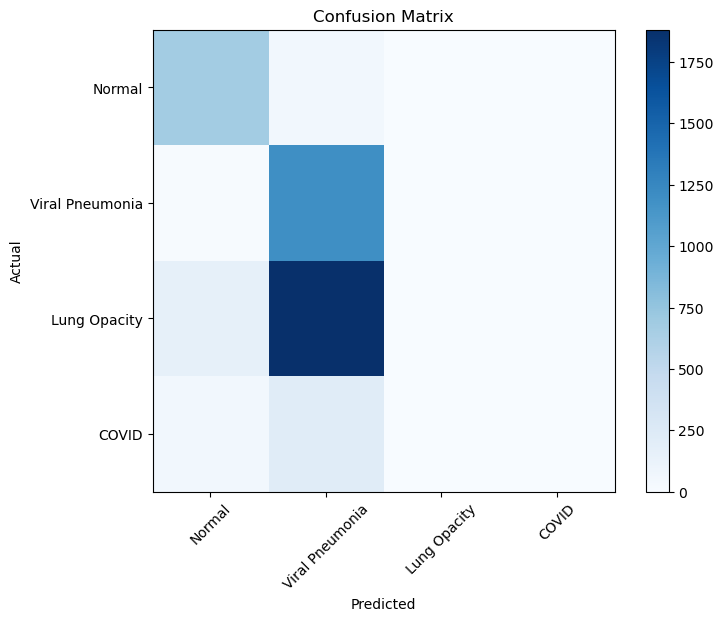

In [47]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Define the class names based on your dataset
class_names = ['Normal', 'Viral Pneumonia', 'Lung Opacity', 'COVID']

# Evaluation loop
def evaluate_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Get predictions
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    # Print classification report and confusion matrix
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))  # Specify class names
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()
    plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
    plt.yticks(ticks=range(len(class_names)), labels=class_names)
    plt.show()

# Call the evaluation function
evaluate_model(model, test_loader)

In [45]:
# Evaluation loop
def evaluate_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    # Print classification report and confusion matrix
    print(classification_report(y_true, y_pred, target_names=train_loader.classes))
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.imshow(conf_matrix, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()
    plt.show()
    
evaluate_model(model, test_loader)

AttributeError: 'DataLoader' object has no attribute 'classes'